In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
dataset = pd.read_csv('/Users/Himanshu/Documents/BBC News Train.csv')

In [4]:
dataset

ArticleId                                               Text  Category
0        1833.0  worldcom ex-boss launches defence lawyers defe...  business
1         154.0  german business confidence slides german busin...  business
2        1101.0  bbc poll indicates economic gloom citizens in ...  business
3        1976.0  lifestyle  governs mobile choice  faster  bett...      tech
4         917.0  enron bosses in $168m payout eighteen former e...  business
...         ...                                                ...       ...
2964        NaN       Are murders petty crimes; Mr Chief Minister?     Crime
2965        NaN                           Women take to hard crime     Crime
2966        NaN  Global Market SGX Nifty to US Fed key triggers...  Business
2967        NaN  Google pixel 7a mobile to launch on May 11 in ...      Tech
2968        NaN  Big change in Maharashtra Politics soon BJP af...  Politics

[2969 rows x 3 columns]

In [5]:
dataset.shape

(2969, 3)

In [6]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category = dataset['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment' 'Health' 'Science'
 'Crime' 'Business' 'Tech' 'Politics']


In [7]:
dataset['CategoryId'] = dataset['Category'].factorize()[0]
dataset.head()

ArticleId                                               Text  Category  \
0     1833.0  worldcom ex-boss launches defence lawyers defe...  business   
1      154.0  german business confidence slides german busin...  business   
2     1101.0  bbc poll indicates economic gloom citizens in ...  business   
3     1976.0  lifestyle  governs mobile choice  faster  bett...      tech   
4      917.0  enron bosses in $168m payout eighteen former e...  business   

   CategoryId  
0           0  
1           0  
2           0  
3           1  
4           0

In [8]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

Category  CategoryId
0          business           0
3              tech           1
5          politics           2
6             sport           3
7     entertainment           4
1490         Health           5
1972        Science           6
2299          Crime           7
2966       Business           8
2967           Tech           9
2968       Politics          10

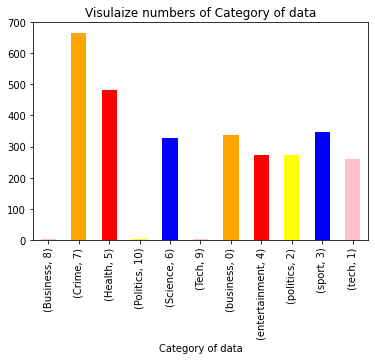

In [9]:
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

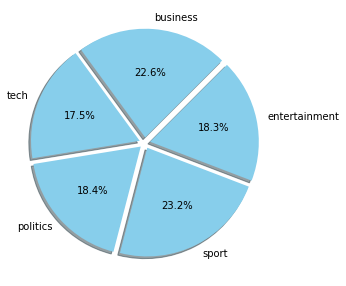

In [10]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
business = dataset[dataset['CategoryId'] == 0 ]
tech = dataset[dataset['CategoryId'] == 1 ]
politics = dataset[dataset['CategoryId'] == 2]
sport = dataset[dataset['CategoryId'] == 3]
entertainment = dataset[dataset['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

business related words:


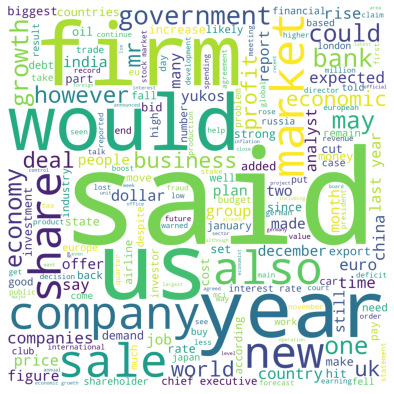

tech related words:


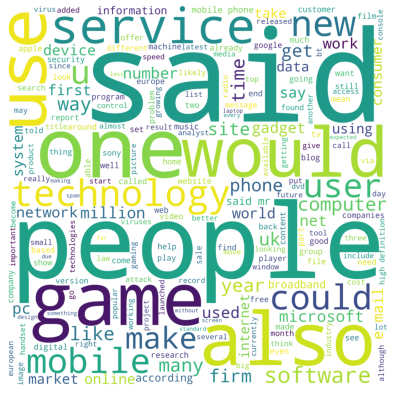

politics related words:


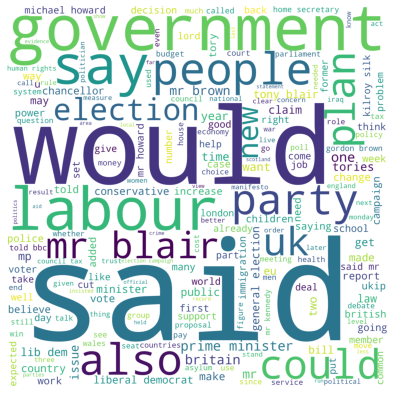

sport related words:


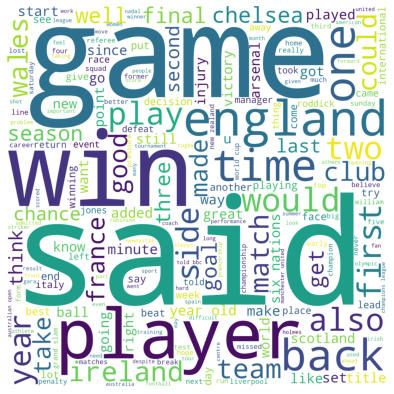

entertainment related words:


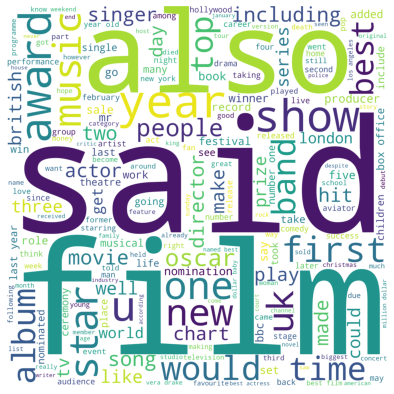

In [11]:
from wordcloud import WordCloud
stop = set(stopwords.words('english'))

business = dataset[dataset['CategoryId'] == 0]
business = business['Text']

tech = dataset[dataset['CategoryId'] == 1]
tech = tech['Text']

politics = dataset[dataset['CategoryId'] == 2]
politics = politics['Text']

sport = dataset[dataset['CategoryId'] == 3]
sport = sport['Text']

entertainment = dataset[dataset['CategoryId'] == 4]
entertainment = entertainment['Text']

def wordcloud_draw(dataset, color='white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split()
                             if (word != 'news' and word != 'text')])

    wordcloud = WordCloud(stopwords=stop,
                          background_color=color,
                          width=2500, height=2500).generate(cleaned_word)

    plt.figure(1, figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("business related words:")
wordcloud_draw(business, 'white')

print("tech related words:")
wordcloud_draw(tech, 'white')

print("politics related words:")
wordcloud_draw(politics, 'white')

print("sport related words:")
wordcloud_draw(sport, 'white')

print("entertainment related words:")
wordcloud_draw(entertainment, 'white')


In [12]:
text = dataset["Text"]
text.head(10)

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
5    howard  truanted to play snooker  conservative...
6    wales silent on grand slam talk rhys williams ...
7    french honour for director parker british film...
8    car giant hit by mercedes slump a slump in pro...
9    fockers fuel festive film chart comedy meet th...
Name: Text, dtype: object

In [13]:
category = dataset['Category']
category.head(10)

0         business
1         business
2         business
3             tech
4         business
5         politics
6            sport
7    entertainment
8         business
9    entertainment
Name: Category, dtype: object

In [14]:


def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
dataset['Text'] = dataset['Text'].apply(remove_tags)

In [15]:
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
dataset['Text'] = dataset['Text'].apply(special_char)

In [16]:
def convert_lower(text):
   return text.lower()
dataset['Text'] = dataset['Text'].apply(convert_lower)
dataset['Text'][1]

'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy   munich based research institute ifo said that its confidence index fell to 95 5 in february from 97 5 in january  its first decline in three months  the study found that the outlook in both the manufacturing and retail sectors had worsened  observers had been hoping that a more confident business sector would signal that economic activity was picking up    we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner   the main reason is probably that the domestic economy is still weak  particularly in the retail trade   economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline   he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue   germany s economy grew 1 

In [17]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
dataset['Text'] = dataset['Text'].apply(remove_stopwords)
dataset['Text'][1]

['german',
 'business',
 'confidence',
 'slides',
 'german',
 'business',
 'confidence',
 'fell',
 'february',
 'knocking',
 'hopes',
 'speedy',
 'recovery',
 'europe',
 'largest',
 'economy',
 'munich',
 'based',
 'research',
 'institute',
 'ifo',
 'said',
 'confidence',
 'index',
 'fell',
 '95',
 '5',
 'february',
 '97',
 '5',
 'january',
 'first',
 'decline',
 'three',
 'months',
 'study',
 'found',
 'outlook',
 'manufacturing',
 'retail',
 'sectors',
 'worsened',
 'observers',
 'hoping',
 'confident',
 'business',
 'sector',
 'would',
 'signal',
 'economic',
 'activity',
 'picking',
 'surprised',
 'ifo',
 'index',
 'taken',
 'knock',
 'said',
 'dz',
 'bank',
 'economist',
 'bernd',
 'weidensteiner',
 'main',
 'reason',
 'probably',
 'domestic',
 'economy',
 'still',
 'weak',
 'particularly',
 'retail',
 'trade',
 'economy',
 'labour',
 'minister',
 'wolfgang',
 'clement',
 'called',
 'dip',
 'february',
 'ifo',
 'confidence',
 'figure',
 'mild',
 'decline',
 'said',
 'despite',
 'r

In [18]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
dataset['Text'] = dataset['Text'].apply(lemmatize_word)
dataset['Text'][1]

'german business confidence slide german business confidence fell february knocking hope speedy recovery europe largest economy munich based research institute ifo said confidence index fell 95 5 february 97 5 january first decline three month study found outlook manufacturing retail sector worsened observer hoping confident business sector would signal economic activity picking surprised ifo index taken knock said dz bank economist bernd weidensteiner main reason probably domestic economy still weak particularly retail trade economy labour minister wolfgang clement called dip february ifo confidence figure mild decline said despite retreat index remained relatively high level expected modest economic upswing continue germany economy grew 1 6 last year shrinking 2003 however economy contracted 0 2 last three month 2004 mainly due reluctance consumer spend latest indication growth still proving elusive ifo president han werner sinn said improvement german domestic demand sluggish export

In [19]:
x = dataset['Text']
y = dataset['CategoryId']
dataset

ArticleId                                               Text  Category  \
0        1833.0  worldcom ex bos launch defence lawyer defendin...  business   
1         154.0  german business confidence slide german busine...  business   
2        1101.0  bbc poll indicates economic gloom citizen majo...  business   
3        1976.0  lifestyle governs mobile choice faster better ...      tech   
4         917.0  enron boss 168m payout eighteen former enron d...  business   
...         ...                                                ...       ...   
2964        NaN               murder petty crime mr chief minister     Crime   
2965        NaN                              woman take hard crime     Crime   
2966        NaN  global market sgx nifty u fed key trigger indi...  Business   
2967        NaN         google pixel 7a mobile launch may 11 india      Tech   
2968        NaN  big change maharashtra politics soon bjp pawar...  Politics   

      CategoryId  
0              0  
1              0  
2              0  
3              1  
4              0  
...          ...  
2964           7  
2965           7  
2966           8  
2967           9  
2968          10  

[2969 rows x 4 columns]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (2969, 5000)
y.shape =  (2969,)


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

2078
891


In [22]:
#create list of model and accuracy dicts
perform_list = [ ]

In [23]:
def run_model(model_name, est_c, est_pnlty):
    mdl = ''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0, fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()

    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)

    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')

    # Add performance parameters to list
    perform_list.append(dict([('Model', model_name),
                              ('Test Accuracy', round(accuracy, 2)),
                              ('Precision', round(precision, 2)),
                              ('Recall', round(recall, 2)),
                              ('F1', round(f1score, 2))
                              ]))



In [24]:
#Logistic Regression
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 91.13
Precision : 0.9113355780022446
Recall : 0.9113355780022446
F1-score : 0.9113355780022446


In [25]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 90.91
Precision : 0.9090909090909091
Recall : 0.9090909090909091
F1-score : 0.9090909090909091


In [26]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 87.21
Precision : 0.8720538720538721
Recall : 0.8720538720538721
F1-score : 0.8720538720538721


In [27]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 82.72
Precision : 0.8271604938271605
Recall : 0.8271604938271605
F1-score : 0.8271604938271605


In [28]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)


Test Accuracy Score of Basic Decision Tree Classifier: % 75.87
Precision : 0.7586980920314254
Recall : 0.7586980920314254
F1-score : 0.7586980920314254


In [29]:
#run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)



In [ ]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 76.06
Precision : 0.7606263982102909
Recall : 0.7606263982102909
F1-score : 0.7606263982102909


In [ ]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

Model  Test Accuracy  Precision  Recall    F1
0       Logistic Regression          97.09       0.97    0.97  0.97
1             Random Forest          97.99       0.98    0.98  0.98
2   Multinomial Naive Bayes          97.09       0.97    0.97  0.97
3  Support Vector Classifer          96.64       0.97    0.97  0.97
4  Decision Tree Classifier          81.88       0.82    0.82  0.82
5       K Nearest Neighbour          73.60       0.74    0.74  0.74
6      Gaussian Naive Bayes          76.06       0.76    0.76  0.76

In [ ]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random")

The best accuracy of model is 97.99 from Random


In [ ]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [ ]:
y_pred1 = cv.transform(['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Tech News"
elif yy == [2]:
  result = "Politics News"
elif yy == [3]:
  result = "Sports News"
elif yy == [1]:
  result = "Entertainment News"
print(result)

Sports News


In [ ]:
headline = input("Enter a news headline: ")

y_pred1 = cv.transform([headline])
yy = classifier.predict(y_pred1)

result = ""
if yy == [0]:
    result = "Business News"
elif yy == [1]:
    result = "Tech News"
elif yy == [2]:
    result = "Politics News"
elif yy == [3]:
    result = "Sports News"
elif yy == [4]:
    result = "Entertainment News"

print("The predicted news category for the given headline is:", result)


Enter a news headline: India vs Pakistan cricket match
The predicted news category for the given headline is: Sports News


In [ ]:
headline = input("Enter a news headline: ")

y_pred1 = cv.transform([headline])
yy = classifier.predict(y_pred1)

result = ""
if yy == [0]:
    result = "Business News"
elif yy == [1]:
    result = "Tech News"
elif yy == [2]:
    result = "Politics News"
elif yy == [3]:
    result = "Sports News"
elif yy == [4]:
    result = "Entertainment News"

print("The predicted news category for the given headline is:", result)


Enter a news headline: People want BJP to be ousted from power in 2024 Lok Sabha polls: Akhilesh Yadav
The predicted news category for the given headline is: Sports News


In [ ]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

app = Flask(__name__)

# Load data
dataset = pd.read_csv('/Users/Himanshu/Documents/BBC News Train.csv')

# Associate Category names with numerical index and save it in new column CategoryId
target_category = dataset['Category'].unique()
dataset['CategoryId'] = dataset['Category'].factorize()[0]

# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')

@app.route('/')
def home():
    # Plot number of Category of data
    fig, ax = plt.subplots(figsize=(8, 6))
    dataset.groupby('Category').CategoryId.value_counts().plot(kind="bar", color=["pink", "orange", "red", "yellow", "blue"], ax=ax)
    plt.xlabel("Category of data")
    plt.title("Visualize numbers of Category of data")
    plt.tight_layout()
    plt.savefig('static/fig1.png')
    return render_template('home.html', title='BBC News Train', image='fig1.png')

@app.route('/wordclouds')
def wordclouds():
    # Generate word clouds
    stop = set(stopwords.words('english'))
    business = dataset[dataset['CategoryId'] == 0]['Text']
    tech = dataset[dataset['CategoryId'] == 1]['Text']
    politics = dataset[dataset['CategoryId'] == 2]['Text']
    sport = dataset[dataset['CategoryId'] == 3]['Text']
    entertainment = dataset[dataset['CategoryId'] == 4]['Text']

    wc1 = generate_wordcloud(business, 'white')
    wc2 = generate_wordcloud(tech, 'white')
    wc3 = generate_wordcloud(politics, 'white')
    wc4 = generate_wordcloud(sport, 'white')
    wc5 = generate_wordcloud(entertainment, 'white')

    wc1.savefig('static/wc1.png', bbox_inches='tight')
    wc2.savefig('static/wc2.png', bbox_inches='tight')
    wc3.savefig('static/wc3.png', bbox_inches='tight')
    wc4.savefig('static/wc4.png', bbox_inches='tight')
    wc5.savefig('static/wc5.png', bbox_inches='tight')

    return render_template


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("/Users/Himanshu/Documents/BBC News Train.csv")
print(data.head())

   ArticleId                                               Text  Category
0     1833.0  worldcom ex-boss launches defence lawyers defe...  business
1      154.0  german business confidence slides german busin...  business
2     1101.0  bbc poll indicates economic gloom citizens in ...  business
3     1976.0  lifestyle  governs mobile choice  faster  bett...      tech
4      917.0  enron bosses in $168m payout eighteen former e...  business


In [2]:
# Types of News Categories
categories = data["Category"].value_counts()
label = categories.index
counts = categories.values
figure = px.bar(data, x=label, 
                y = counts, 
            title="Types of News Categories")
figure.show()

In [3]:
feature = data["Text"].tolist()
tfidf = text.TfidfVectorizer(input=feature, stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

InvalidParameterError: The 'input' parameter of TfidfVectorizer must be a str among {'file', 'content', 'filename'}. Got ['worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebber s lawyers have said he was unaware of the fraud  arguing that auditors did not alert him to any problems.  ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s finance chief  giving only  brief  answers himself. the prosecution s star witness  former worldcom financial chief scott sullivan  has said that mr ebbers ordered accounting adjustments at the firm  telling him to  hit our books . however  ms cooper said mr sullivan had not mentioned  anything uncomfortable  about worldcom s accounting during a 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is facing. worldcom emerged from bankruptcy protection in 2004  and is now known as mci. last week  mci agreed to a buyout by verizon communications in a deal valued at $6.75bn.', 'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy.  munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january  its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up.   we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner.  the main reason is probably that the domestic economy is still weak  particularly in the retail trade.  economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline . he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue.  germany s economy grew 1.6% last year after shrinking in 2003. however  the economy contracted by 0.2% during the last three months of 2004  mainly due to the reluctance of consumers to spend. latest indications are that growth is still proving elusive and ifo president hans-werner sinn said any improvement in german domestic demand was sluggish. exports had kept things going during the first half of 2004  but demand for exports was then hit as the value of the euro hit record levels making german products less competitive overseas. on top of that  the unemployment rate has been stuck at close to 10% and manufacturing firms  including daimlerchrysler  siemens and volkswagen  have been negotiating with unions over cost cutting measures. analysts said that the ifo figures and germany s continuing problems may delay an interest rate rise by the european central bank. eurozone interest rates are at 2%  but comments from senior officials have recently focused on the threat of inflation  prompting fears that interest rates may rise.', 'bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service poll believe the world economy is worsening.  most respondents also said their national economy was getting worse. but when asked about their own family s financial outlook  a majority in 14 countries said they were positive about the future. almost 23 000 people in 22 countries were questioned for the poll  which was mostly conducted before the asian tsunami disaster. the poll found that a majority or plurality of people in 13 countries believed the economy was going downhill  compared with respondents in nine countries who believed it was improving. those surveyed in three countries were split. in percentage terms  an average of 44% of respondents in each country said the world economy was getting worse  compared to 34% who said it was improving. similarly  48% were pessimistic about their national economy  while 41% were optimistic. and 47% saw their family s economic conditions improving  as against 36% who said they were getting worse.  the poll of 22 953 people was conducted by the international polling firm globescan  together with the program on international policy attitudes (pipa) at the university of maryland.  while the world economy has picked up from difficult times just a few years ago  people seem to not have fully absorbed this development  though they are personally experiencing its effects   said pipa director steven kull.  people around the world are saying:  i m ok  but the world isn t .  there may be a perception that war  terrorism and religious and political divisions are making the world a worse place  even though that has not so far been reflected in global economic performance  says the bbc s elizabeth blunt.  the countries where people were most optimistic  both for the world and for their own families  were two fast-growing developing economies  china and india  followed by indonesia. china has seen two decades of blistering economic growth  which has led to wealth creation on a huge scale  says the bbc s louisa lim in beijing. but the results also may reflect the untrammelled confidence of people who are subject to endless government propaganda about their country s rosy economic future  our correspondent says. south korea was the most pessimistic  while respondents in italy and mexico were also quite gloomy. the bbc s david willey in rome says one reason for that result is the changeover from the lira to the euro in 2001  which is widely viewed as the biggest reason why their wages and salaries are worth less than they used to be. the philippines was among the most upbeat countries on prospects for respondents  families  but one of the most pessimistic about the world economy. pipa conducted the poll from 15 november 2004 to 3 january 2005 across 22 countries in face-to-face or telephone interviews. the interviews took place between 15 november 2004 and 5 january 2005. the margin of error is between 2.5 and 4 points  depending on the country. in eight of the countries  the sample was limited to major metropolitan areas.', 'lifestyle  governs mobile choice  faster  better or funkier hardware alone is not going to help phone firms sell more handsets  research suggests.  instead  phone firms keen to get more out of their customers should not just be pushing the technology for its own sake. consumers are far more interested in how handsets fit in with their lifestyle than they are in screen size  onboard memory or the chip inside  shows an in-depth study by handset maker ericsson.  historically in the industry there has been too much focus on using technology   said dr michael bjorn  senior advisor on mobile media at ericsson s consumer and enterprise lab.  we have to stop saying that these technologies will change their lives   he said.  we should try to speak to consumers in their own language and help them see how it fits in with what they are doing   he told the bbc news website.  for the study  ericsson interviewed 14 000 mobile phone owners on the ways they use their phone.  people s habits remain the same   said dr bjorn.  they just move the activity into the mobile phone as it s a much more convenient way to do it.   one good example of this was diary-writing among younger people  he said. while diaries have always been popular  a mobile phone -- especially one equipped with a camera -- helps them keep it in a different form. youngsters  use of text messages also reflects their desire to chat and keep in contact with friends and again just lets them do it in a slightly changed way. dr bjorn said that although consumers do what they always did but use a phone to do it  the sheer variety of what the new handset technologies make possible does gradually drive new habits and lifestyles. ericsson s research has shown that consumers divide into different  tribes  that use phones in different ways. dr bjorn said groups dubbed  pioneers  and  materialists  were most interested in trying new things and were behind the start of many trends in phone use.  for instance   he said   older people are using sms much more than they did five years ago.  this was because younger users  often the children of ageing mobile owners  encouraged older people to try it so they could keep in touch.  another factor governing the speed of change in mobile phone use was the simple speed with which new devices are bought by pioneers and materialists. only when about 25% of people have handsets with new innovations on them  such as cameras  can consumers stop worrying that if they send a picture message the person at the other end will be able to see it.  once this significant number of users is passed  use of new innovations tends to take off. dr bjorn said that early reports of camera phone usage in japan seemed to imply that the innovation was going to be a flop. however  he said  now 45% of the japanese people ericsson questioned use their camera phone at least once a month. in 2003 the figure was 29%. similarly  across europe the numbers of people taking snaps with cameras is starting to rise. in 2003 only 4% of the people in the uk took a phonecam snap at least once a month. now the figure is 14%. similar rises have been seen in many other european nations. dr bjorn said that people also used their camera phones in very different ways to film and even digital cameras.  usage patterns for digital cameras are almost exactly replacing usage patterns for analogue cameras   he said. digital cameras tend to be used on significant events such as weddings  holidays and birthdays. by contrast  he said  camera phones were being used much more to capture a moment and were being woven into everyday life.', 'enron bosses in $168m payout eighteen former enron directors have agreed a $168m (£89m) settlement deal in a shareholder lawsuit over the collapse of the energy firm.  leading plaintiff  the university of california  announced the news  adding that 10 of the former directors will pay $13m from their own pockets. the settlement will be put to the courts for approval next week. enron went bankrupt in 2001 after it emerged it had hidden hundreds of millions of dollars in debt.  before its collapse  the firm was the seventh biggest public us company by revenue. its demise sent shockwaves through financial markets and dented investor confidence in corporate america.   the settlement is very significant in holding these outside directors at least partially personally responsible   william lerach  the lawyer leading the class action suit against enron  said.  hopefully  this will help send a message to corporate boardrooms of the importance of directors performing their legal duties   he added. under the terms of the $168m settlement - $155m of which will be covered by insurance - none of the 18 former directors will admit any wrongdoing. the deal is the fourth major settlement negotiated by lawyers who filed a class action on behalf of enron s shareholders almost three years ago. so far  including the latest deal  just under $500m (£378.8m) has been retrieved for investors.  however  the latest deal does not include former enron chief executives ken lay and jeff skilling. both men are facing criminal charges for their alleged misconduct in the run up to the firm s collapse. neither does it cover andrew fastow  who has pleaded guilty to taking part in an illegal conspiracy while he was chief financial officer at the group. enron s shareholders are still seeking damages from a long list of other big name defendants including the financial institutions jp morgan chase  citigroup  merrill lynch and credit suisse first boston. the university of california said the trial in the case is scheduled to begin in october 2006. it joined the lawsuit in december 2001alleging  massive insider trading  and fraud  claiming it had lost $145m on its investments in the company.', 'howard  truanted to play snooker  conservative leader michael howard has admitted he used to play truant to spend time with his school friends at a snooker hall.  mr howard said his time at jack s snooker hall in llanelli in the 1950s had not done him  any lasting damage . but he told the times educational supplement that truancy was  very bad  and said  firm action  was needed. mr howard also called for a return to o-levels and more classroom discipline.  mr howard eventually left llanelli grammar school - and the snooker hall - to go to cambridge university. he said:  i don t think it s done me any lasting damage. nor has it made me a snooker world champion.  there might have been some occasions when we left early of an afternoon.   i m just being honest. i think truancy is a very bad thing and that firm action should be taken to deal with it.  another player who has failed to win snooker s world championship - jimmy  the whirlwind   white - has previously admitted missing lessons  instead spending his days in smoky halls.  tony meo [another player] and me used to spend all of our spare time there   mr white said   we loved the game and the atmosphere.  school went out of the window. i went for a while and then started taking time off.  mr howard s fellow welshman ray reardon - known by his fellow professionals as  dracula  - won the snooker world championship six times  having left school at 14 to work as a miner. and terry griffiths  like mr howard from llanelli  won the tournament in 1979. it is not known whether the two of them ever clashed cues at jack s.', 'wales silent on grand slam talk rhys williams says wales are still not thinking of winning the grand slam despite a third six nations win.   that s the last thing on our minds at the moment   said williams  a second- half replacement in saturday s 24-18 win over france in paris.  we all realise how difficult a task it is to go up to scotland and beat them.  we ve come unstuck there a couple of times recently so our focus is on that game and we ll worry about ireland hopefully after we ve beaten scotland.  with captain gareth thomas ruled out of the rest of the campaign with a broken thumb  williams is vying for his first start in the championship so far.  kevin morgan is probably favourite to replace thomas at full-back  leaving williams and hal luscombe to battle for the right wing berth. a hamstring injury denied luscombe the opportunity to make a third successive start  but the dragons winger is expected to be fit for the trip to murrayfield on 13 march. hooker robin mcbryde is doubtful after picking up a knee injury in paris  but centre sonny parker and flanker colin charvis are set to recover from injury to be in contention for selection. said wales assistant coach scott johnson:  they ve worked through the weekend and the reports are a bit more positive.  so we re getting a couple back and that adds to the depth of the squad.  scotland secured their first win of the campaign on saturday by grinding out an 18-10 win over italy.  matt williams  side has shown little in attack  but johnson insisted the scots will be difficult opposition to break down.  italy are really brave opposition and sometimes it s very hard to win   he said.  so an ugly win can be just as effective as a 30 or 40 point victory.  scotland are a hard side and very underrated so we re not taking anything for granted.  we re not basking in the glory of winning our first three games. we ve got to be diligent in our preparation.  that s my job and we ve got to make sure we re focused.', 'french honour for director parker british film director sir alan parker has been made an officer in the order of arts and letters  one of france s highest cultural honours.  sir alan received his decoration in paris on wednesday from french culture minister renaud donnedieu de vabres.  you have explored the possibilities of film with an immense talent   mr de vabres said as he presented the award. parker praised french films  saying:  hollywood  which created modern cinema  uses it only as a commodity.  he told the minister:  i am honoured to be thus distinguished by france  the flag carrier of cinema throughout the world.  sir alan s films include oscar-winning fame plus midnight express and the commitments.  a founding member of the director s guild of great britain  he is a former chairman of the uk film council and on the board of the british film institute.  through your work and your campaigns  you have shown us how the artist occupies an essential place in our contemporary society   mr de vabres said.  through your dreams which you show us  through the links that you weave  you question the world through the mirror of your work.  he also cited the director s 2003 film the life of david gale  in which kevin spacey played a man on death row  as proof of his  veritable artistic commitment against the death sentence .', 'car giant hit by mercedes slump a slump in profitability at luxury car maker mercedes has prompted a big drop in profits at parent daimlerchrysler.  the german-us carmaker saw fourth quarter operating profits fall to 785m euros ($1bn) from 2.4bn euros in 2003. mercedes-benz s woes - its profits slid to just 20m euros - obscured a strong performance from the chrysler group whose returns met market expectations. mercedes faces fierce competition in the luxury car sector from bmw and but hopes to revive its fortunes by 2006.  mercedes  profits over the period compared unfavourably with 2003 s 784m euro figure and were well below analyst expectations of 374m euros. for the year as a whole  its operating profits fell 46% to 1.6bn euros. sales of mercedes  brands fell 2% as demand cooled  while revenues were affected by the weakness of the us dollar.  the carmaker blamed the fall in profits on high launch costs for new models and losses from its mercedes smart mini-car range. mercedes is hoping to increase productivity by 3bn euros  having negotiated 500m euros in annual savings with german workers last year. the firm said it was determined to retain mercedes  position as the world s most successful luxury brand. however  daimlerchrysler s shares fell 1.5% on the news.  while all these divisions are doing well the big worries continue to surround mercedes-benz   michael rabb  an analyst with bank sal oppenheim  told reuters.  in contrast  chrysler enjoyed a 5% annual increase in unit sales while revenues - calculated in us dollars - rose 10%. the us division - whose marques include dodge and jeep - transformed a full year operating loss of 506m euros in 2003 into a 1.4bn euros profit last year.  overall  daimlerchrysler saw worldwide vehicle sales rise 8% to 4.7 million in 2004 while total revenues added 4% to 142bn euros. chrysler s strong performance helped the world s fifth largest carmaker boost net income by 400m euros to 2.5bn euros.   the year 2004 shows that our strategy works well - even in such a challenging competitive environment   said jurgen schrempp  daimlerchrysler s chairman. daimlerchrysler took a 475m euro hit in costs stemming from a defects scandal at its joint venture  japanese subsidiary fuso. daimlerchrysler last week agreed a compensation package with partner mitsubishi motors which will see it buy out its stake in fuso. looking forward  daimerchrysler s profits are expected to be slightly higher in 2005. however  it is expecting  significant improvements  in profitability in 2006 as a result of a major investment in the mercedes product range.', 'fockers fuel festive film chart comedy meet the fockers topped the festive box office in north america  setting a new record for christmas day.  the sequel took $44.7m (£23.2m) between 24 and 26 december  according to studio estimates. it took $19.1m (£9.9m) on christmas day alone  the highest takings on that day in box office history. meet the fockers is the sequel to ben stiller comedy meet the parents  also starring robert de niro  blythe danner  dustin hoffman and barbra streisand. despite the success of meet the fockers  takings were down 26.5% on 2003 s figures - which was blamed on christmas falling over a weekend this year.   when christmas falls on a weekend  it s bad for business   said paul dergarabedian  president of exhibitor relations  which compiles box office statistics. the weekend s top 12 films took an estimated $121.9m (£63.3m)  compared with $165.8m (£86.1m) last year  when the third lord of the rings film dominated the box office. meet the fockers knocked last week s top film  lemony snicket s a series of unfortunate events  down to third place  with $12.5m (£6.5m). comedy fat albert - co-written by bill cosby - entered the chart in second place after opening on christmas day  taking $12.7m (£6.6m). the aviator  starring leonardo dicaprio as howard hughes  took $9.4m after expanding from 40 to 1 796 cinemas on christmas day.', 'blair rejects iraq advice calls tony blair has rejected calls for the publication of advice on the legality of the iraq war amid growing calls for an investigation.  the prime minister told his monthly press conference the matter had been dealt with by the attorney general. earlier  conservative mp michael mates joined calls for a probe into claims lord goldsmith s statement to parliament was drawn up at number 10. mr blair said the statement was a  fair summary  of lord goldsmith s opinion.   that s what he (lord goldsmith) said and that s what i say. he has dealt with this time and time and time again   mr blair told his monthly news conference in downing street. he refused to answer further questions on the issue  saying it had been dealt with  literally scores of times and the position has not changed . lord goldsmith has denied being  leaned on  and says the words written were his.  the government refuses to publish his advice on the legality of the war - saying such papers have always been kept confidential. mr mates  who is a member of the commons intelligence and security committee and was part of the butler inquiry into pre-war intelligence  told the bbc on friday:  that  as a general rule  is right  but it s not an absolute rule.  he said there had been other occasions when advice had been published  most recently regarding prince charles s marriage plans. the government could not pick and choose when to use the convention  he said.  mr mates added:  we discovered that there were two or three occasions in the past when law officers  advice to the government has been published.  and this may be one of those special occasions... when it would be in the public interest to see the advice which the attorney general gave to the prime minister.  this is argument was rejected by mr blair  who said:  firstly  we haven t broken the precedent  and secondly peter goldsmith has made his statement and i have got absolutely nothing to add to it.  in a book published this week  philippe sands qc  a member of cherie blair s matrix chambers  says lord goldsmith warned tony blair on 7 march 2003 that the iraq war could be illegal without a second un resolution sanctioning military action.  but a short statement about lord goldsmith s position was presented in a written parliamentary answer on 17 march 2003 - just before a crucial commons vote on the military action. mr sands  book suggests it was actually written by home office minister lord falconer and downing street adviser baroness morgan. former minister clare short  who resigned from the government over the iraq war  said it was the same statement that was earlier shown to the cabinet as it discussed military action. she told the bbc the full advice should have been attached  according to the ministerial code.   my view is we need the house of lords to set up a special committee  summon the attorney  get all the papers out  look at exactly what happened   she said. the conservatives and liberal democrats say they want the publication of the full legal advice given by the attorney general. on thursday  lord goldsmith said his statement had not been  written by or at number 10 .  in my parliamentary answer on march 17 2003  i explained my genuinely held independent view  that military action was lawful under the existing security council resolutions   he said.', 'housewives lift channel 4 ratings the debut of us television hit desperate housewives has helped lift channel 4 s january audience share by 12% compared to last year.  other successes such as celebrity big brother and the simpsons have enabled the broadcaster to surpass bbc2 for the first month since last july. however the channel s share of the audience fell from 11.2% to 9.6% last month in comparison with january 2004. celebrity big brother attracted less viewers than its 2002 series.  comedy drama desperate housewives managed to pull in five million viewers at one point during its run to date  attracting a quarter of the television audience. the two main television channels  bbc1 and itv1  have both seen their monthly audience share decline in a year on year comparison for january  while five s proportion remained the same at a slender 6.3%. digital multi-channel tv is continuing to be the strongest area of growth  with the bbc reporting freeview box ownership of five million  including one million sales in the last portion of 2004. its share of the audience soared by 20% in january 2005 compared with last year  and currently stands at an average of 28.6%.', 'uk coal plunges into deeper loss shares in uk coal have fallen after the mining group reported losses had deepened to £51.6m in 2004 from £1.2m.  the uk s biggest coal producer blamed geological problems  industrial action and  operating flaws  at its deep mines for its worsening fortunes. the south yorkshire company  led by new chief executive gerry spindler  said it hoped to return to profit in 2006. in early trade on thursday  its shares were down 10% at 119 pence. uk coal said it was making  significant progress  in shaking up the business. it had introduced new wage structures  a new daily maintenance regime for machinery at its mines and methods to continue mining in adverse conditions. the company said these actions should  significantly uplift earnings . it expected 2005 to be a  transitional year  and to return to profitability in 2006.  the recent rise in coal prices has failed to benefit the company as most of its output had already been sold  it said. total production costs were £1.30 per gigajoule  uk coal said  but the average selling price was just £1.18 per gigajoule.  we have a long journey ahead to fix these issues. we continue to make progress and great strides have already been made   said mr spindler. uk coal operates 15 deep and surface mines across nottinghamshire  derbyshire  leicestershire  yorkshire  the west midlands  northumberland and durham.', 'bp surges ahead on high oil price oil giant bp has announced a 26% rise in annual profits to $16.2bn (£8.7bn) on the back of record oil prices.  last week  rival shell reported an annual profit of $17.5bn - a record profit for a uk-listed company. bp added that it was increasing its fourth-quarter dividend by 26% to 8.5 cents  and that it would continue with share buybacks. bp chief executive lord browne said the results were strong  both operationally and financially.   the company is earning about $1.8m an hour.  despite the record annual profits figure  bp s performance was below the expectations of some city analysts. however  bp s share price rose 4p or nearly 1% in morning trading to 548p. its profit rise for the year included profits of $3.65bn (£1.97bn) for the final three months of 2004 - up from $2.89bn a year ago but below its third quarter.  speaking on the bbc s today programme on tuesday  lord browne said the profits were not solely down to the high oil price alone.   the profits are up more than the price of oil is up   he said. lord browne pointed out that bp was reaping the benefits of its investment in oil exploration.  we have spent many years buying (assets) when the price is low   he said. the company has made new discoveries in egypt  the gulf of mexico and angola.  however  lord browne rejected calls for a windfall tax on his company s huge profits  saying that in the north sea it paid progressively more tax  the more profits it made. lord browne believes oil prices will remain quite high. currently above $40 a barrel  he said:  the price of oil will be well supported above $30 a barrel for the medium term.  bp put production for the year at 3.997 billion barrels of oil  up 10% on 2003  but slightly lower than the four billion barrels it had initially aimed for.', 'ireland 21-19 argentina an injury-time dropped goal by ronan o gara stole victory for ireland from underneath the noses of argentina at lansdowne road on saturday.  o gara kicked all of ireland s points  with two dropped goals and five penalties  to give the home side a 100% record in their autumn internationals. an impressive argentina appeared in control until the dying seconds. the pumas shocked the irish early on with a try from federico aramburu  and felipe contepomi kicked 14 points. the well-drilled and sharper pumas out-played and out-thought ireland in the early stages. indiscipline allowed argentina s leinster fly-half contepomi to open the scoring in the third minute with a straightforward penalty. he was on the mark again two minutes later when argentina shocked a ragged ireland with the first try of the game. ireland turned the ball over and manuel contepomi broke through an unstructured defence before feeding his midfield partner aramburu to sprint in under the posts. o gara finally got ireland on the board with a dropped goal in the ninth minute only for contepomi to rifle over his second penalty two minutes later. playing into a strong wind and rain  ireland continued to come second best in tight situations  and turnovers began to mount up against a rugged defence. o gara managed to land his second penalty in the 36th minute  but once again contepomi replied in kind four minutes into first-half injury time. the second-half started as the first had ended. o gara rifled over another penalty in the 45th minute  but contepomi matched it three minutes later. the upper-body strength of the pumas never allowed ireland to take control up front  while the three-quarters had no space to manoeuvre. ireland had to rely on o gara s boot to keep in touch rather than any contrived running plays. the munsterman landed two more penalties - one of them from 48 metres - to bring his team to within four points with 13 minutes on the clock remaining. and ireland s chance came when argentina s number eight gonzalo longo was yellow carded with six minutes to go for an offence in the line-out. o gara made no mistake as he rifled over his fifth penalty to set up a tense final few minutes. but ireland showed great composure to get themselves into a position to allow o gara to thump over a massive drop goal to complete a tremendous  if fortuitous  comeback.', 'wenger signs new deal arsenal manager arsene wenger has signed a new contract to stay at the club until may 2008.  wenger has ended speculation about his future by agreeing a long-term contract that takes him beyond the opening of arsenal s new stadium in two years. he said:  signing a new contract just rubber-stamps my desire to take this club forward and fulfil my ambitions.  i still have so much to achieve and my target is to drive this club on. these are exciting times for arsenal.   the 55-year-old frenchman told arsenal s website www.arsenal.com:  my intention has always been clear. i love this club and am very happy here.  wenger has won the title and the fa cup three times each during his reign. chairman peter hill-wood said:  we are absolutely delighted that arsene has signed an extension to his contract.  since his arrival in 1996  he has revolutionised the club both on and off the pitch.  as well as the six major honours he s won during his time here  arsene has been a leading influence behind all the major initiatives at the club including the construction of our new training centre and also our new stadium.   the club has continued to reap the benefits of arsene s natural eye for unearthing footballing talent.  we currently have a fantastic crop of young players coming through the ranks together with a number of world-class players who are playing a wonderful brand of football.  meanwhile  arsenal director danny fiszman is looking for wenger to stay beyond 2008.  when we come towards the end of his contract we will both review the situation. i m sure we will want him to stay on and i hope he will too   said fiszman.', 'u2 s desire to be number one u2  who have won three prestigious grammy awards for their hit vertigo  are stubbornly clinging to their status as one of the biggest bands in the world.  the most popular groups in the history of rock all have several things in common. the music must be inspired and appeal across generations and be distinctive  if not always groundbreaking. but such success is down to more than music. they have to be compelling performers  charismatic and intelligent enough to make good decisions and keep their feet on the ground. they also have to want it. they have to want to be the biggest band ever and not stop wanting it. the beatles had it  the rolling stones still have it  rem hold onto it and queen were it in a catsuit. and u2 have it in spades  and keep churning it out. their new album  how to dismantle an atomic bomb  comes 28 years after the schoolfriends got together in dublin and 17 years after the joshua tree cemented their place on the all-time rock a-list.  they may have lost some of the edginess and raw  youthful force that propelled them to the top  but they have lost none of the desire or ability to craft songs and albums.  vertigo  the first single from the new album  went straight into the uk singles chart at number one  knocking eminem off the top spot and giving them their 26th top 10 hit.  the challenge is to be bigger and bolder and better - to make records the whole world will listen to   bono recently said. drummer larry mullen jr echoed those sentiments:  we re very competitive - we want to be on the radio  have big singles. we don t want to be thought of as a veteran band.  the band have done  everything in their considerable powers  to ensure they remain the biggest band in the world  according to q magazine editor paul rees.   this makes them hugely determined and formidable.  he added:  they are equally determined to push themselves to make music that continues to stand up.  as such  they ve constantly re-invented and challenged themselves. they are  perhaps  alone as the only rock band that has got better with age.  the other key ingredient was the fact they were highly organised  mr rees said.  they do everything in the right way.  the group were born when mullen put an appeal for bandmates on a high school notice board  attracting fellow pupils paul hewson (bono  vocals)  adam clayton (bass)  david evans (the edge  guitar) and his brother dick.  dick evans soon dropped out and the four-piece were known as the feedback and the hype before settling on u2.  by 1978  they had won a talent contest and got noticed by a manager  paul mcguinness.  they were brilliant  but very coarse   mcguinness recently said.  in a way  they were doing exactly what they do now. only badly.  they struggled to attract record company attention  later being described as  pretty damn average  and  strange and eerie  by scouts who saw them live. they released two ireland-only singles  which topped the national charts in 1979 and 1980  leading to a deal with island and their debut album boy. the stadium-filling  anthemic sound was u2 s aim from the start  and their third album  war  saw them make the breakthrough on both sides of the atlantic  going to number one in the uk and 12 in the us. songs like sunday bloody sunday and new year s day brought success and an image as a political and spiritual band - which bono rejected as a cliche.  his stage performances - which included flag-waving  speaker-climbing and drum-throwing - earned him a reputation as an electric performer  and their appearance at 1985 s live aid is widely seen as sealing their global stardom.  in 1987  the joshua tree broke sales records and saw the band reach the height of their powers with hits including where the streets have no name  i still haven t found what i m looking for and with or without you. those songs took the band s epic  atmospheric sound to a simple  powerful and popular pinnacle. the end of the decade marked a crucial point for the band - they had reached the top but still yearned for new challenges and achievements. these came in the form of explorations of different branches of rock and forays into electronic dance music  plus wildly extravagant stage shows  while still trying to retain their mass appeal. the achtung baby album in 1991 was followed by zooropa  pop and their corresponding stadium tours  which featured giant olives  flying cars  live phone calls to the white house and bono s transformation into alter-egos the fly and macphisto. he was also building a parallel reputation - not always to the pleasure of his bandmates - as a campaigner on issues from global debt to aids. before the release of how to dismantle an atomic bomb  they had sold 125 million albums around the world. but they still want more.', 'hantuchova in dubai last eight daniela hantuchova moved into the quarter-finals of the dubai open  after beating elene likhotseva of russia 7-5 6-4  and now faces serena williams.  australian open champion williams survived an early scare to beat russia s elena bovina 1-6 6-1 6-4. world number one lindsay davenport and anastasia myskina also progressed. davenport defeated china s jie zheng 6-2 7-5  while french open champion myskina sailed through after her opponent marion bartoli retired hurt. american davenport will now face fellow former wimbledon champion  conchita martinez of spain  who ousted seventh-seeded nathalie dechy of france 6-1 6-2. myskina will face eighth-seed patty schnyder from switzerland  who defeated china s li na 6-3 7-6 (10-8). the other quarter final pits wild card sania mirza of india against jelena jankovic of serbia and montenegro  who both won on tuesday.  before her meeting with martinez  davenport believes there is some room for improvement in her game.  i started well and finished well  but played some so-so games in the middle   she said. williams was also far from content.  i don t know what i was doing there   she said.  it was really windy and i hadn t played in the wind. all my shots were going out of here.  but hantuchova is in upbeat mood ahead of her clash with the younger williams sister  who was handed a first-round bye.  i feel i have an advantage (over serena) because i have already played two matches on these courts   she said.  it is a difficult court to play on. very fast and sometimes you feel you have no control over the ball.', 'melzer shocks agassi in san jose second seed andre agassi suffered a comprehensive defeat by jurgen melzer in the quarter-finals of the sap open.  agassi was often bamboozled by the austrian s drop shots in san jose  losing 6-3 6-1. defending champion and top seed andy roddick rallied to beat sweden s thomas enqvist 3-6 7-6 (8-6) 7-5. but unseeded cyril saulnier beat the fourth seed vincent spadea 6-2 6-4 and tommy haas overcame eighth seed max mirnyi 6-7 (2-7) 7-6 (7-3) 6-2. melzer has now beaten agassi in two of their three meetings.   i had a good game plan and i executed it perfectly   he said.  it s always tough to come out to play andre.  i didn t want him to play his game. he makes you run like a dog all over the court.  and agassi  who was more than matched for power by his opponent s two-handed backhand  said melzer was an example of several players on the tour willing to take their chances against him.  a lot more guys are capable of it now   said the american.  he played much better than me. that s what he did both times.  i had opportunities to loosen myself up   agassi added.  but i didn t convert on the big points.', 'moving mobile improves golf swing a mobile phone that recognises and responds to movements has been launched in japan.  the motion-sensitive phone - officially titled the v603sh - was developed by sharp and launched by vodafone s japanese division. devised mainly for mobile gaming  users can also access other phone functions using a pre-set pattern of arm movements. the phone will allow golf fans to improve their swing via a golfing game.  those who prefer shoot- em-ups will be able to use the phone like a gun to shoot the zombies in the mobile version of sega s house of the dead. the phone comes with a tiny motion-control sensor  a computer chip that responds to movement.  other features include a display screen that allows users to watch tv and can rotate 180 degrees. it also doubles up as an electronic musical instrument. users have to select a sound from a menu that includes clapping  tambourine and maracas and shake their phone to create a beat. it is being recommended for the karaoke market. the phone will initially be available in japan only and is due to go on sale in mid-february. the new gadget could make for interesting people-watching among japanese commuters  who are able to access their mobiles on the subway. fishing afficiandos in south korea are already using a phone that allows them to simulate the movement of a rod. the ph-s6500 phone  dubbed a sports-leisure gadget  was developed by korean phone giant pantech and can also be used by runners to measure calorie consumption and distance run.', 'hewitt overcomes wobble in sydney lleyton hewitt gave himself the perfect preparation for next week s australian open with victory over ivo minar in the final of the sydney international.  the defending champion brushed aside the czech qualifier 7-5 6-0. the australian world number three strolled to the first five games of the match but was shocked as minar won the next five. the top seed was rattled but recovered to close out the set and raced to victory in exactly an hour.  it was a strange match . . . momentum swings   said hewitt.  i felt like i came out of the blocks extremely well  but then he loosened up a bit.  when he got back to 5-5  i had to try to settle down and take it up a notch  and i was able to do that.   hewitt has now lifted the sydney title four times in the last six years.  it just keeps getting better and better every year   hewitt said.  i ve only played this tournament four times and i ve won it four times.  hewitt went into the final as a short-priced favourite to clinch his 24th career title after dropping only one set all week. he is set to meet frenchman arnaud clement in the first round of the australian open. minar  ranked 158th in the world  was forced to pull out of the australian open qualifying draw to play in his first atp final.  for me  this was a big success   said the 20-year-old.  i was so nervous last night i couldn t sleep. i ve never played a top-10 player before.  i wanted to play qualifying in melbourne  but it s saturday and i m still here. but this is a main draw and i need the points and the money.  alicia molik takes on samantha stosur in an all-australian women s final later on saturday.', 'carry on star patsy rowlands dies actress patsy rowlands  known to millions for her roles in the carry on films  has died at the age of 71.  rowlands starred in nine of the popular carry on films  alongside fellow regulars sid james  kenneth williams and barbara windsor. she also carved out a successful television career  appearing for many years in itv s well-loved comedy bless this house. rowlands died in hove on saturday morning  her agent said.  born in january 1934  rowlands won a scholarship to the guildhall school of speech and drama scholarship when she was just 15.  after spending several years at the players theatre in london  she made her film debut in 1963 in tom jones  directed by tony richardson. she made her first carry on film in 1969 where she appeared in carry on again doctor. rowlands played the hard-done-by wife or the put-upon employee as a regular carry on star. she also appeared in carry on at your convenience  carry on matron and carry on loving  as well as others.  in recent years she appeared in bbc mini-series the cazalets and played mrs potts in the london stage version of beauty and the beast. agent simon beresford said:  she was just an absolutely favourite client she never complained about anything  particularly when she was ill  she was an old trouper.  she was of the old school - she had skills from musical theatre and high drama  that is why she worked with the great and the good of directors.  she didn t mind always being recognised for the carry on films because she thoroughly enjoyed making them. she was a really lovely person and she will be much missed.  her last appearance on stage was as mrs pearce in the award-winning production of my fair lady at the national theatre. previously married  she leaves one son  alan. her funeral will be a private  family occasion  with a memorial service at a later date.', 'serena becomes world number two serena williams has moved up five places to second in the world rankings after her australian open win.  williams won her first grand slam title since 2003 with victory over lindsay davenport  the world number one. men s champion marat safin remains fourth in the atp rankings while beaten finalist lleyton hewitt replaces andy roddick as world number two. roger federer retains top spot  but safin has overtaken hewitt to become the new leader of the champions race. alicia molik  who lost a three-set thriller against davenport in the quarter-finals  is in the women s top 10 for the first time in her career. her rise means australia have a player in the top 10 of the men s and women s rankings for the first time in 21 years. and britain s elena baltacha  who qualified and then reached the third round  has risen to 120 in the world - a leap of 65 places and her highest ranking yet.', 'ferguson urges henry punishment sir alex ferguson has called on the football association to punish arsenal s thierry henry for an incident involving gabriel heinze.  ferguson believes henry deliberately caught heinze on the head with his knee during united s controversial win. the united boss said it was worse than ruud van nistelrooy s foul on ashley cole for which he got a three-game ban.  we shall present it to the fa and see what they do. the tackle on heinze was terrible   he said. clubs are permitted to ask the fa to examine specific incidents but information is expected to be provided within 48 hours of the game. the clash occurred moments before half-time when a freddie ljungberg challenge left heinze on the ground on the left touchline. henry  following the ball  attempted to hurdle the argentine but his knee collided with the back of heinze s head.  the striker protested his innocence - and referee mike riley deemed the collision accidental. ferguson was also upset by arsenal s overall discipline during the heated encounter between the two arch-rivals and praised his own side s behaviour.  edu produced a terrible tackle on scholes that was a potential leg-breaker   he said.  there were 24 fouls in the game by arsenal  seven on heinze  five on ronaldo  six by vieira - and it was only his sixth foul that got him booked. phil neville got booked for his first challenge.  i am proud of my players for the way they handled that pressure.  we have always been good at being gracious in defeat. what happened on sunday overshadowed our achievement  but then they do it all the time  don t they', 'bt boosts its broadband packages british telecom has said it will double the broadband speeds of most of its home and business customers.  the increased speeds will come at no extra charge and follows a similar move by internet service provider aol. many bt customers will now have download speeds of 2mbps  although there are usage allowances of between one gigabyte and 30 gigabytes a month. the new speeds start to come into effect on 17 february for home customers and 1 april for businesses.  britain is now broadband britain   said duncan ingram  bt s managing director  broadband and internet services. he added:  ninety percent of our customers will see real increases in speed.   these speed increases will give people the opportunity to do a lot more with their broadband connections   he said. upload speeds - the speed at which information is sent from a pc via broadband - will remain at the same speed  said mr ingram. despite the increases  bt will continue to have usage allowances for home customers.  the allowances are extremely generous   said mr ingram  for what we are seeing in the market place - they are really not an issue.  bt will begin enforcing the allowances in the summer. customers who exceed the amounts will either be able to pay for a bigger allowance or see their download speeds reduced. bt now has a 36% share of the broadband market - down from 39% - which is becoming increasingly competitive. in the last few months  many rival isps have begun to offer 2mbps services  including aol  plusnet and uk online.  but britain continues to lag behind some countries - especially japan and south korea - which offer broadband speeds of up to 40mbps. but mr ingram said it was important to  separate hype from reality . he said that a limited number of people with those connections consistently received speeds of 40mbps. customers will not see their connections double immediately on 17 february. mr ingram said there would be a roll out across the network in order to prevent any problems.', 'china had role in yukos split-up china lent russia $6bn (£3.2bn) to help the russian government renationalise the key yuganskneftegas unit of oil group yukos  it has been revealed.  the kremlin said on tuesday that the $6bn which russian state bank veb lent state-owned rosneft to help buy yugansk in turn came from chinese banks. the revelation came as the russian government said rosneft had signed a long-term oil supply deal with china. the deal sees rosneft receive $6bn in credits from china s cnpc.  according to russian newspaper vedomosti  these credits would be used to pay off the loans rosneft received to finance the purchase of yugansk. reports said cnpc had been offered 20% of yugansk in return for providing finance but the company opted for a long-term oil supply deal instead. analysts said one factor that might have influenced the chinese decision was the possibility of litigation from yukos  yugansk s former owner  if cnpc had become a shareholder. rosneft and veb declined to comment.  the two companies [rosneft and cnpc] have agreed on the pre-payment for long-term deliveries   said russian oil official sergei oganesyan.  there is nothing unusual that the pre-payment is for five to six years.   the announcements help to explain how rosneft  a medium-sized  indebted  and relatively unknown firm  was able to finance its surprise purchase of yugansk. yugansk was sold for $9.3bn in an auction last year to help yukos pay off part of a $27bn bill in unpaid taxes and fines.  the embattled russian oil giant had previously filed for bankruptcy protection in a us court in an attempt to prevent the forced sale of its main production arm. but yugansk was sold to a little known shell company which in turn was bought by rosneft. yukos claims its downfall was punishment for the political ambitions of its founder mikhail khodorkovsky. once the country s richest man  mr khodorkovsky is on trial for fraud and tax evasion.  the deal between rosneft and cnpc is seen as part of china s desire to secure long-term oil supplies to feed its booming economy. china s thirst for products such as crude oil  copper and steel has helped pushed global commodity prices to record levels.  clearly the chinese are trying to get some leverage [in russia]   said dmitry lukashov  an analyst at brokerage aton.  they understand property rights in russia are not the most important rights  and they are more interested in guaranteeing supplies.   if the price of oil is fixed under the deal  which is unlikely  it could be very profitable for the chinese   mr lukashov continued.  and rosneft is in desperate need of cash  so it s a good deal for them too.', 'peer-to-peer nets  here to stay  peer-to-peer (p2p) networks are here to stay  and are on the verge of being exploited by commercial media firms  says a panel of industry experts.  once several high-profile legal cases against file-sharers are resolved this year  firms will be very keen to try and make money from p2p technology. the expert panel probed the future of p2p at the consumer electronics show in las vegas earlier in january. the first convictions for p2p piracy were handed out in the us in january. william trowbridge and michael chicoine pleaded guilty to charges that they infringed copyright by illegally sharing music  movies and software. since the first successful file-sharing network napster was forced to close down  the entertainment industry has been nervous and critical of p2p technology  blaming it for falling sales and piracy. but that is going to change very soon  according to the panel.  the music and film industries have started some big legal cases against owners of legitimate p2p networks - which are not illegal in themselves - and of individuals accused of distributing pirated content over networks. but they have slowly realised that p2p is a good way to distribute content  said travis kalanick  founder and chairman of p2p network red swoosh  and soon they are all going to want a slice of it. they are just waiting to come up with  business models  that work for them  which includes digital rights management and copy-protection standards.  but  until the legal actions are resolved  experimentation with p2p cannot not happen  said michael weiss  president of streamcast networks. remembering the furore around vcrs when they first came out  mr weiss said:  old media always tries to stop new media.  when they can t stop it  they try to control it. then they figure out how to make money and they always make a lot of money.  once the courts decided that the vcr in itself was not an illegal technology  the film studios turned it into an extremely lucrative business. in august 2004  the san francisco-based us court of appeals ruled in favour of grokster and streamcast  two file-sharing networks. the court said they were essentially in the same position that sony was in the 1980s vcr battle  and said that the networks themselves could not be deemed as illegal.  p2p networks usually do not rely on dedicated servers for the transfer of files. instead it uses direct connections between computers - or clients. there are now many different types of p2p systems than work in different ways. p2p nets can be used to share any kind of file  like photos  free software  licensed music and any other digital content. the bbc has already decided to embrace the technology. it aims to offer most of its own programmes for download this year and it will use p2p technology to distribute them. the files would be locked seven days after a programme aired making rights management easier to control. but the technology is still demonised and misunderstood by many. the global entertainment industry says more than 2.6 billion copyrighted music files are downloaded every month  and about half a million films are downloaded a day. legal music download services  like apple itunes  napster  have rushed into the music marketplace to try and lure file-sharers away from free content. sales of legally-downloaded songs grew tenfold in 2004  with 200 million tracks bought online in the us and europe in 12 months  the ifpi reported this week. but such download services are very different from p2p networks  not least because of the financial aspect.  there are several money-spinning models that could turn p2p into a golden egg for commercial entertainment companies. paid-for-pass-along  in which firms receive money each time a file is shared  along with various drm solutions and advertiser-based options are all being considered.  we see there are going to be different models for commoditising p2p   said marc morgenstern  vice president of anti-piracy firm overpeer.   consumers are hungry for it and we will discover new models together   agreed mr morgenstern. but many net users will continue to ignore the entertainment industry s potential controlling grip on content and p2p technology by continuing to use it for their own creations. unsigned bands  for example  use p2p networks to distribute their music effectively  which also draws the attention of record companies looking for new artists to sign.  increasingly  what you are seeing on p2p is consumer-created content   said derek broes  from microsoft.  they will probably pay an increasing role in helping p2p spread   he said. looking into p2p s future  file sharing is just the beginning for p2p networks  as far as mr broes is concerned.  once some of these issues are resolved  you are going to see aggressive movement to protect content  but also in ways that are unimaginable now   he said.  file-sharing is the tip of the iceberg.', 'henman to face saulnier test british number one tim henman will face france s cyril saulnier in the first round of next week s australian open.  greg rusedski  the british number two  is in the same quarter of the draw and could face andy roddick in the second round if he beats swede jonas bjorkman. local favourite lleyton hewitt will meet france s arnaud clement  while defending champion and world number one roger federer faces fabrice santoro. women s top seed lindsay davenport drew spanish veteran conchita martinez.  henman came from two sets down to defeat saulnier in the first round of the french open last year  so he knows he faces a tough test in melbourne. the seventh seed  who has never gone beyond the quarter-finals in the year s first major and is lined up to meet roddick in the last eight  is looking forward to the match.  he s tough player on any surface  he s got a lot of ability   he said.  we had a really tight one in paris that went my way so i m going to need to play well from the outset because he s a dangerous competitor.  switzerland s federer  seeded one  is the hot favourite having won three of the four grand slam titles in 2004. he has beaten santoro in five of their seven previous encounters  but is taking nothing for granted.  it s a tricky match   federer said.  i played him at the us open and won quite comfortably then. but you never know  if the rhythm is a bit off  he can keep you guessing and make it difficult.  the most important thing  though  is to get used to playing five-set matches and winning them.  the 23-year-old could meet four-time champion andre agassi in the quarter-finals before meeting russian marat safin  the player he beat in last year s final.  eighth-seeded american agassi is set to play a qualifier in round one if he can shake off a hip injury which ruled him out of the kooyong classic. second seed andy roddick will open his campaign against irakli labadze of georgia. the american could meet rusedski in the second round  seventh seed henman in the quarter-finals and hewitt in the last four. hewitt is hoping to become the first australian man to win the event since mark edmondson in 1976. the 23-year-old has never been beyond round four in eight attempts at melbourne park but has at least secured the opposite half of the draw to federer  who beat him in the australian open  wimbledon and us open last year. safin  seeded four  opens his campaign against a qualifier with 16th seed tommy haas  the player he beat in the semi-finals in 2002  a possible fourth-round opponent.  in the women s draw  davenport could encounter eighth-seeded venus williams in the quarter-finals and third-ranked anastasia myskina  the french open champion  in the semi-finals. bronchitis ruled davenport  the 2000 australian open champion  out of her sydney quarter-final on thursday. venus williams  who lost to younger sister serena in the melbourne final two years ago  opens against eleni daniilidou of greece. serena williams  who won her fourth consecutive grand slam at the 2003 australian open  was drawn in the bottom quarter with second seed amelie mauresmo  a runner-up in 1999. serena will open against another frenchwoman camille pin  while mauresmo plays australia s samantha stosur. wimbledon champion maria sharapova  seeded fourth  drew a qualifier in the first round but could meet fellow russian svetlana kuznetsova  the us open winner  in the last eight  1 roger federer (switzerland)  2 andy roddick (us)  3 lleyton hewitt (australia)  4 marat safin (russia)  5 carlos moya (spain)  6 guillermo coria (argentina)  7 tim henman (britain)  8 andre agassi (us)  9 david nalbandian (argentina)  10 gaston gaudio (argentina)  11 joachim johansson (sweden)  12 guillermo canas (argentina)  13 tommy robredo (spain)  14 sebastien grosjean (france)  15 mikhail youzhny (russia)  16 tommy haas (germany)  17 andrei pavel (romania)  18 nicolas massu (chile)  19 vincent spadea (us)  20 dominik hrbaty (slovakia)  21 nicolas kiefer (germany)  22 ivan ljubicic (croatia)  23 fernando gonzalez (chile)  24 feliciano lopez (spain)  25 juan ignacio chela (argentina)  26 nikolay davydenko (russia)  27 paradorn srichaphan (thailand)  28 mario ancic (croatia)  29 taylor dent (us)  30 thomas johansson (sweden)  31 juan carlos ferrero (spain)  32 jurgen melzer (austria)  1 lindsay davenport (us)  2 amelie mauresmo (france)  3 anastasia myskina (russia)  4 maria sharapova (russia)  5 svetlana kuznetsova (russia)  6 elena dementieva (russia)  7 serena williams (us)  8 venus williams (us)  9 vera zvonareva (russia)  10 alicia molik (australia)  11 nadia petrova (russia)  12 patty schnyder (switzerland)  13 karolina sprem (croatia)  14 francesca schiavone (italy)  15 silvia farina elia (italy)  16 ai sugiyama (japan)  17 fabiola zuluaga (colombia)  18 elena likhovtseva (russia)  19 nathalie dechy (france)  20 tatiana golovin (france)  21 amy frazier (us)  22 magdalena maleeva (bulgaria)  23 jelena jankovic (serbia and montenegro)  24 mary pierce (france)  25 lisa raymond (us)  26 daniela hantuchova (slovakia)  27 anna smashnova (israel)  28 shinobu asagoe (japan)  29 gisela dulko (argentina)  30 flavia pennetta (italy)  31 jelena kostanic (croatia)  32 iveta benesova (czech republic)', 'uk will stand firm on eu rebate  britain s £3bn eu rebate is not up for renegotiation at next week s european council summit  jack straw said.  the foreign secretary told mps the rebate  secured by margaret thatcher in 1984  was  entirely justified . new european commission president jose manuel barroso has suggested the cash could be shared out among net contributors to the eu budget. mr straw acknowledged some countries in the newly enlarged 25 nation eu still had to  see the light  on the rebate.  but the foreign secretary told the commons foreign affairs committee:  our position is very clear: it is entirely justified and it is not for negotiation.  he added that he did not think there would be a political price to pay for the uk s stance - britain contributed more and received less than other eu states. the two-day european council summit in brussels begins on 16 december and is widely expected to mark the beginning of a lengthy negotiating period over the eu s budget for 2007-13. the wrangling could stretch into 2005  even 2006.  the uk  france  germany  austria  the netherlands and sweden want the eu budget to be capped at 1% of member states  combined national incomes - the commission wants it to be 1.26%. mr straw said the eu commission s proposal would mean a 35% hike in the budget.  i don t know of any national government thinking of increasing its budget by that amount   he added. the foreign secretary said he hoped the talks next week could produce a date in 2005 for the beginning of negotiations with turkey about possible eu membership although that there would be no prospect of a date for joining for some time.', 'iran budget seeks state sell-offs iran s president  mohammad khatami  has unveiled a budget designed to expand public spending by 30% but loosen the islamic republic s dependence on oil.  the budget for the fiscal year starting on 21 march calls for the sell-off of 20% of the state s corporate holdings. mr khatami s second term as president ends on 1 august  making this his last budget. but opposition from members of parliament who have attacked previous privatisations could block his plans. elections in may 2004 ousted many of mr khatami s supporters in parliament in favour of more hard-line religious conservatives. late last year  they backed a law which would give parliament a veto over foreign investment. the ruling was a response to the involvement in telecoms and airport projects by turkish companies  which hardliners accused of doing business with israel. it came not long after the expediency council - iran s ultimate decision-maker - blessed mr khatami s policy of selling stakes in sectors protected by the constitution such as energy  transport  telecoms and banking. continued obstruction of foreign investment could get in the way not only of privatisation plans  but also of mr khatami s hope of modestly reducing the government s reliance on oil revenues.  in an address to the majlis  mr khatami predicted economic growth of 7.1% in 2005-6  up from 6.7% in the current year. he said he wanted to increase the 2005-6 budget to 1 546 trillion rials ($175.6bn; £93.6bn) from the previous year s 1 070 trillion. within that figure  taxation would rise to $14.3bn  a rise of over 40% from what is expected from the current year. in contrast  oil revenues were expected to fall to $14.1bn from $16bn in the year to march 2005.  current government expenditure should come from tax revenues   mr khatami said.  oil revenues should be used for productive investment.  mr khatami has already been blocked by parliament from reducing the subsidies on many products including bread and petrol  reducing his room to manoeuvre.', 'pompeii gets digital make-over the old-fashioned audio tour of historical places could soon be replaced with computer-generated images that bring the site to life.  a european union-funded project is looking at providing tourists with computer-augmented versions of archaeological attractions. it would allow visitors a glimpse of life as it was originally lived in places such as pompeii. it could pave the way for a new form of cultural tourism.  the technology would allow digital people and other computer-generated elements to be combined with the actual view seen by tourists as they walk around an historical site.  the lifeplus project is part of the eu s information society technologies initiative aimed at promoting user-friendly technology and enhancing european cultural heritage. engineers and researchers working in the europe-wide consortium have come up with a prototype augmented-reality system. it would require the visitor to wear a head-mounted display with a miniature camera and a backpack computer. the camera captures the view and feeds it to software on the computer where the visitor s viewpoint is combined with animated virtual elements. at pompeii for example  the visitor would not just see the frescos  taverns and villas that have been excavated  but also people going about their daily life. augmented reality has been used to create special effects in films such as troy and lord of the rings and in computer gaming.   this technology can now be used for much more than just computer games   said professor nadia magnenat-thalman of the swiss research group miralab.   we are  for the first time  able to run this combination of software processes to create walking  talking people with believable clothing  skin and hair in real-time   she said. unlike virtual reality  which delivers an entirely computer-generated scene to the viewer  the lifeplus project is about combining digital and real views. crucial to the technique is the software that interprets the visitor s view and provides an accurate match between the real and virtual elements. the software capable of doing this has been developed by a uk company  2d3. andrew stoddart  chief scientist at 2d3  said that the eu project has been driven by a new desire to bring the past to life.  the popularity of television documentaries and dramatisations using computer-generated imagery to recreate scenes from ancient history demonstrates the widespread appeal of bringing ancient cultures to life   he said.', 'rapper snoop dogg sued for  rape  us rapper snoop dogg has been sued for $25m (£13m) by a make-up artist who claimed he and his entourage drugged and raped her two years ago.  the woman said she was assaulted after a recording of the jimmy kimmel live tv show on the abc network in 2003. the rapper s spokesman said the allegations were  untrue  and the woman was  misusing the legal system as a means of extracting financial gain . abc said the claims had  no merit . the star has not been charged by police.  the lawsuit  filed in los angeles on friday  says the woman s champagne was spiked and she was then assaulted. the rapper s spokesperson said:  snoop will have the opportunity to prove in a court of law that [the alleged victim] is opportunistic and deceitful.  we are confident that in this case  [the alleged victim s] claims against snoop dogg will be rejected.  the lawsuit names snoop dogg - real name calvin broadus - plus three associates  the walt disney company and its parent company abc inc.  the woman waited two years to sue because she was trying to negotiate a settlement with the media companies  her lawyer  perry wander  said. disney and abc  failed to provide a safe working environment for my client   he said. the legal action comes after the rap star sued a woman who claimed they tried to blackmail him to keep quiet about an alleged assault. the 32-year-old rapper has enjoyed six us top 10 albums since bursting onto the music scene with hit songs like what s my name  and gin and juice in 1993.', 'china continues rapid growth china s economy has expanded by a breakneck 9.5% during 2004  faster than predicted and well above 2003 s 9.1%.  the news may mean more limits on investment and lending as beijing tries to take the economy off the boil. china has sucked in raw materials and energy to feed its expansion  which could have knock-on effects on the rest of the world if it overheats. but officials pointed out that industrial growth had slowed  with services providing much of the impetus. growth in industrial output - the main target of government efforts to impose curbs on credit and investments - was 11.5% in 2004  down from 17% the previous year.  still  consumer prices - at 2.4% - rose faster than in 2004  adding to concern that a sharp rise in producer prices of 7.1% could stoke inflation. and overall investment in fixed assets was still high  up 21.3% from the previous year - although some way off the peak of 43% seen in the first quarter of 2004. the result could be higher interest rates. china raised rates by 0.27 percentage points to 5.8% - its first hike in nine years - in october 2004.  despite the apparent rebalancing of the economy the overall growth picture remains strong  economists said.  there is no sign of a slowdown in 2005   said tim congdon  economist at ing barings.  china s economy is not only gathering speed thanks to domestic demand  but also from soaring sales overseas. figures released earlier this year showed exports at a six-year high in 2004  up 35%. part of the impetus comes from the relative cheapness of the yuan  china s currency. the government keeps it pegged close to a rate of 8.28 to the us dollar  - much to the chagrin of many us lawmakers who blame china for lost jobs and competitiveness. despite urging to ease the peg  officials insist they are a long way from ready to make a shift to a more market-set rate.  we need a good and feasible plan and formulating such a plan also needs time   national bureau of statistics chief li deshui told reuters.  those who hope to make a fortune by speculating on a renminbi revaluation will not succeed in making a profit.', 'security papers  found in street  an inquiry is under way after files containing security details about the pakistani president s visit to london were found by a member of the public.  the files are believed to contain detailed security arrangements for gen pervez musharraf s visit this week  including police codes. scotland yard said the policing operation had been reviewed. a spokesman said president musharraf s safety had not been compromised  as the papers had been handed in promptly.  we cannot discuss who was responsible for the documents  only that they contained the policing arrangements for the official visit   said the spokesman.  the papers are believed to have been found by a member of the public in a street in mayfair and given to the mirror newspaper. the police spokesman said the newspaper handed the report over on monday. the force s directorate of professional standards is investigating the circumstances surrounding the loss of the documents  he said. gen musharraf held talks with tony blair on monday. he arrived in britain on sunday night after flying from the united states  where he met president george w bush. he is due to visit the pakistani community in manchester on tuesday afternoon.', 'philippoussis doubt over open bid mark philippoussis is almost certain to miss the australian open after suffering a groin injury during the hopman cup loss to the netherlands.  the 28-year-old suffered two tears to the adductor muscle and was unable to play in the deciding mixed doubles. he is now unlikely to be fit in time for the australian open which begins on 17 january in melbourne.  he has to strengthen it enough to cope with repetitive days of tennis   said hopman cup doctor hamish osborne.  it would be very unlikely in my opinion for him to do a five-setter once  let alone two days in a row  inside two weeks.   the injury is more common in australian rules football  and a fit footballer would normally take three to four weeks to recover fully although mark s injury is slightly different.  the australian has suffered a host of injury problems throughout his career but is still holding out slim hope that he can make the event.  it s something i ll have to go by feel. i ll start treatment as soon as possible and try to strengthen it without tearing it any more   he said.  what doesn t kill you makes you stronger. i know i can come back from this and that s all that matters.  - former world number two tommy haas is also a doubt for the australian open after picking up a thigh injury playing for germany in the hopman cup. the 26-year-old had treatment on his left thigh while leading argentine guillermo coria 7-5 2-2. he played one more game  but his movement was hampered and he quit.', 'musical treatment for capra film the classic film it s a wonderful life is to be turned into a musical by the producer of the controversial hit show jerry springer - the opera.  frank capra s 1946 movie starring james stewart  is being turned into a £7m musical by producer jon thoday. he is working with steve brown  who wrote the award-winning musical spend spend spend. a spokeswoman said the plans were in the  very early stages   with no cast  opening date or theatre announced.  a series of workshops have been held in london  and on wednesday a cast of singers unveiled the musical to a select group of potential investors. mr thoday said the idea of turning the film into a musical had been an ambition of his for almost 20 years. it s a wonderful life was based on a short story  the greatest gift  by philip van doren stern. mr thoday managed to buy the rights to the story from van doren stern s family in 1999  following mr brown s success with spend spend spend. he later secured the film rights from paramount  enabling them to use the title it s a wonderful life.', 'corry backs skipper robinson england forward martin corry says jason robinson is the right man to lead the national team back to winning ways.  after losses to wales and france  critics have started to wonder whether robinson can captain from full-back. but corry has backed robinson  who was given the role after the injury to fly-half jonny wilkinson  ahead of this weekend s trip to ireland.  jason is doing a tremendous job. every week my respect for him goes up   corry told bbc radio five live.  he is an inspirational captain. when he talks with the squad he talks with a lot of sense.  the players have a lot of respect for him. it s an honour to be in the england side and an honour to play under him.   england are under immense pressure following their poor start to the year and victory is vital if they are to rescue their six nations campaign. but corry insists england are in the right frame of mind for the contest.  there is apprehension going into every game   he added.  but you have to use that fear and put it into a positive mindset.  when the whistle goes on sunday  what has happened in the past does not count for anything.   we have not performed but if we put in a performance on sunday then we can start turning results around.  there are a lot of changes taking place with england and we are at the start of something. we have not got off to the greatest of starts but you need to experience the bad the before you can fully appreciate the good.   a trip to lansdowne road is daunting at any time  especially against an ireland side that are flying high after two impressive wins. they are the form team of the tournament and are tipped to claim their first grand slam since 1948. but corry is relishing the prospect of taking on the irish in their own backyard.  they are full of confidence and are playing a great team game   he said.  the forwards are creating a great platform and they have explosive runners out wide.  if you look at the team on paper  they have stars from one to 15. it s a huge task but it is a great opportunity for us.  lansdowne road is a tremendous venue to play in and we have to use it to our advantage.', 'yachvili savours france comeback france scrum-half dimitri yachvili praised his team after they fought back to beat england 18-17 in the six nations clash at twickenham.  yachvili kicked all of france s points as they staged a second-half revival.  we didn t play last week against scotland and we didn t play in the first half against england   he said.  but we re very proud to beat england at twickenham. we were just defending in the first half and we said we had to put them under pressure. we did well.  yachvili admitted erratic kicking from england s charlie hodgson and olly barkley  who missed six penalties and a drop goal chance between them  had been decisive.  i know what it s like with kicking. when you miss some it s very hard mentally  but it went well for us   he said. france captain fabien pelous insisted his side never doubted they could secure their first win against england at twickenham since 1997. france were 17-6 down at half-time  but pelous said:  no-one was down at half-time  we were still confident.  we said we only had 11 points against us  which was not much.  the plan was to keep hold of possession and pressure england to losing their composure.  france coach bernard laporte accepted his side had not played well.  we know we have to play better to defend the title   he said.  i m not happy we didn t score a try but we re happy because we won.', 'prop jones ready for hard graft adam jones says the wales forwards are determined to set the perfect attacking platform for the backs by dominating the powerful france pack in paris.  the prop said:  if we get stuffed in the front five our backs have had it.  the mentality of the french is  scrum  scrum  scrum . we will see how good france are and the scrum is the key.  i just hope [the backs] carry on where they left off against italy. it s just up to us in the forwards to win the ball and give them the opportunity.  wales have won two of their last three visits to stade de france  having secured back-to-back wins under graham henry in 1999 and 2001. and with the likes of shane williams and gavin henson finding top form at the right time  mike ruddock s team is now one of international rugby s most potent attacking threats.  gavin is ridiculously talented. he has been bouncing around the place this week  so he is up for it   warned jones.  france have been criticised for their uncharacteristic one-dimensional play in their victories over scotland and france. captain fabien pelous has acknowledged his side needs to show more attacking flair  but stressed the game with be won or lost up front. the lock believes the welsh forwards are not big enough to trouble his side in the scrum or line-out  but jones insisted his fellow front-row colleagues have nothing to fear.   gethin [jenkins] won t be intimidated tomorrow  none of us will   said jones  who will be facing france for the first time.  we will go out there and front up and hopefully get the ball out to the backs.  me and gethin are quite young so it is good to have someone of mefin s experience in there.  mefin is a good thinker who puts things across. but what is the saying  if you are good enough you are old enough and gethin certainly is.  he is a really good player and i imagine he will be on the lions tour [to new zealand this summer].', 'security scares spark browser fix microsoft is working on a new version of its internet explorer web browser.  the revamp has been prompted by microsoft s growing concern with security as well as increased competition from rival browsers. microsoft said the new version will be far less vulnerable to the bugs that make its current browser a favourite of tech-savvy criminals. test versions of the new program  called ie 7  are due to be released by the summer.  the announcement about internet explorer was made by bill gates  microsoft chairman and chief software architect  during a keynote speech at the rsa security conference currently being held in san francisco. although details were scant  mr gates  said ie7 would include new protections against viruses  spyware and phishing scams. this last category of threats involves criminals setting up spoof websites that look identical to those of banks and try to trick people into handing over login and account information.  in a bid to shore up the poor security in ie 6  microsoft has regularly issued updates to patch loopholes exploited by criminals and the makers of nuisance programs such as spyware. earlier this month it released a security bulletin that patched eight critical security holes - some of which were found in the ie browser. microsoft has also made a series of acquisitions of small firms that specialise in computer security. one of the first fruits of these acquisitions appeared last month with the release of a microsoft anti-spyware program. an own-brand anti-virus program is due to follow by the end of 2005. the decision to make internet explorer 7 is widely seen as a u-turn because  before now  microsoft said it had no need to update the browser. typically new versions of its browser appear with successive versions of the windows operating system. a new version of ie was widely expected to debut with the next version of windows  codenamed longhorn  which is due to appear in 2006. the current version of internet explorer is four years old  and is widely seen as falling behind rivals such as firefox and opera. there are also persistent rumours that search engine google is poised to produce its own brand browser based on firefox. in particular the firefox browser has been winning fans and users since its first full version was released in november 2004. estimates of how many users firefox has won over vary widely. according to market statistics gathered by websidestory  firefox s market share is now about 5% of all users. however  other browser stat gatherers say the figure is closer to 15%. some technical websites report that a majority of their visitors use the firefox browser. internet explorer still dominates with a share of about 90% but this is down from a peak of almost 96% in mid-2004.', 'argonaut founder rebuilds empire jez san  the man behind the argonaut games group which went into administration a week ago  has bought back most of the company.  the veteran games developer has taken over the cambridge-based just add monsters studios and the london subsidiary morpheme. the argonaut group went into administration due to a severe cash crisis  firing about half of its staff. in august it had warned of annual losses of £6m for the year to 31 july.  jez san is one of the key figures in the uk s games industry. the developer  who received an obe in 2002  was estimated to have been worth more than £200m at the peak of the dotcom boom.  he founded argonaut in 1982 and has been behind titles such as 1993 starfox game. more recently it was behind the harry potter games for the playstation. but  like all software developers  argonaut needed a constant flow of deals with publishers. in august it warned of annual losses of £6m  blaming delays in signing new contracts and tough conditions in the software industry. the group s three subsidiaries were placed in administration a week ago  with mr sans resigning as the company s ceo and some 100 staff being fired. after the latest round of cuts  there were 80 workers at argonaut headquarters in edgware in north london  with 17 at its morpheme offices in kentish town  london  and 22 at the just add monsters base in cambridge. mr san has re-emerged  buying back morpheme and just add monsters.  we are pleased to announce the sale of these two businesses as going concerns   said david rubin of administrators david rubin & partners.  this has saved over 40 jobs as well as the substantial employment claims that would have arisen had the sales not been achieved.  mr rubin said the administrators were in talks over the sale of the argonaut software division in edgware and were hopeful of finding a buyer.  this is a very difficult time for all the employees there  but i salute their commitment to the business while we work towards a solution   he said. some former employees are angry at the way cash crisis was handled. one told bbc news online that the staff who had been fired had been  financially ruined in the space of a day .', 'mcleish ready for criticism rangers manager alex mcleish accepts he is going to be criticised after their disastrous uefa cup exit at the hands of auxerre at ibrox on wednesday.  mcleish told bbc radio five live:  we were in pole position to get through to the next stage but we blew it  we absolutely blew it.  there s no use burying your head in the sand  we know we are going to get a lot of criticism.  we have to take it as we have done in the past and we must now bounce back.  mcleish admitted his team s defending was amateurish after watching them lose 2-0 to guy roux s french side.   i m very disappointed because we didn t give ourselves a chance  losing the first goal from our own corner. it was amateur   he added.  the early goal in the second half gave us a mountain to climb and we never created the same kind of chances as we did in the first half.  it s difficult to take positives from the game. we ve let the fans down.', 'premier league planning cole date the premier league is attempting to find a mutually convenient date to investigate allegations chelsea made an illegal approach for ashley cole.  both chelsea and arsenal will be asked to give evidence to a premier league commission  but no deadline has been put on when that meeting will convene.  it s hard to put a date on it   a premier league spokesman confirmed to bbc sport.  it s not a formal situation where they ve got so much time to respond.  arsenal and england defender cole reportedly met blues boss jose mourinho and chief executive peter kenyon in a london hotel 11 days ago. chelsea have yet to officially confirm or deny the meeting  which would be in breach of premier league rule k3.  now the gunners have asked for an inquiry to look into claims that their player has been  tapped up . both clubs have pledged to co-operate with the inquiry which will be conducted on a single day as opposed to being run as an ongoing evaluation. cole is in negotiations with the gunners over extending his current deal which ends in 2007. and his arsenal team-mate robert pires has urged the england left-back to stay at highbury. pires told the evening standard:  he has been at arsenal for ever. he is a very attacking left-back and i think he is enjoying his football because at arsenal he plays in an offensive team.  i am not sure he will get the same pleasure at chelsea  even though they are doing so well at the moment.  i have built a fantastic playing relationship with ashley.  we play together so well - we could do it with our eyes shut.  but you have to respect the decision of the player. everybody has that right.', 'viewers to be able to shape tv imagine editing titanic down to watch just your favourite bits or cutting out the slushier moments of star wars to leave you with a bare bones action-fest.  manipulating your favourite films to make a more personalised movie is just the beginning of an ambitious new 7.5m euro (£5.1m) project funded by the european union. new media for a new millennium (nm2) will have as its endgame the development of a completely new media genre  which will allow audiences to create their own media worlds based on their specific interests or tastes. viewers will be able to participate in storylines  manipulate plots and even the sets and props of tv shows. bt is one of 13 partners involved in the project. it will be contributing software that was originally designed to spot anomalies in cctv pictures. the software uses content recognition algorithms. the three-year project will work on seven productions as it develops a set of software tools that will allow viewers to edit content to their needs.  one of the productions will be a experimental television show where the plot will be driven by text messages from the tv audience.  participants will text selected words which will impact how the characters in the drama interact. it is being developed in finland and will be shown to finnish tv audiences. another team will work on the bbc s big budget drama of mervyn peake s gothic fantasy gormenghast. it will be re-engineered to allow people to choose a variety of edited versions.  the bbc is allowing us access to the material so that we can prove the technology and the principles   explained dr doug williams of bt  who will be nm2 s technical project manager.  the tv at the moment is a relatively dumb box which receives signals. this project is about teaching the machine to look at content like lego blocks that can be reassembled to make perfect sense   he said.  at the moment we have interactive gaming and a limited form of interactive tv which usually means allowing audiences to vote on shows. we are hoping to occupy the space in-between   he added.  nm2 s co-ordinator peter stollenmayer explained that the new genre would radically alter the role of the audience.   viewers will be able to interact directly with the medium and influence what they see and hear according to their personal tastes and wishes   he said.  media users will no longer be passive viewers but become active engagers.  it will also be important that the tools are sophisticated enough to obey the complex rules of cinematography and editing said john wyver  from tv producer illuminations television limited  which is also involved in the project.  it s not just a matter of stringing together the romantic or action portions of a production   said mr wyver.  the tool has to know which bits fit together both visually  by observing the time-honoured rules that go in editing  and in terms of the story.   only then will the personalised version both make sense and be aesthetically pleasing   he added. mr wyver is planning a production entitled the golden age  about renaissance art. it will allow viewers to create a so-called media world based on their own specific areas of interest such as poetry  music and architecture. other productions that the nm2 team will make range from news  documentaries to a romantic comedy drama.', 'obituary: dame alicia markova dame alicia markova  who has died in bath aged 94  was the uk s first prima ballerina of the modern age  and  in her heyday  the greatest in the western world.  she was born lilian alicia marks in london in 1910. her parents were comfortably off - her father  a mining engineer  drove a rolls royce. when she was eight  her mother took a decision which changed her life. fearing that she had flat feet and weak legs  she arranged for her to have ballet lessons. very quickly it became apparent that she was something special. she was spotted by the russian artistic impresario  sergei diaghilev  who wanted her to dance for his company  ballets russes. she became ill with diphtheria but kept in touch  and  eventually  with a governess in tow  joined diaghilev in monte carlo when she was 14.  from here  she toured europe  playing in all the top venues. it was diaghilev who changed her name without even consulting her. her life was one of great excitement. people such as matisse and stravinsky became like uncles to her  the latter put in charge of her musical education. soon after diaghilev s death in 1929  alicia markova returned to england and became britain s first international ballerina. she helped launch the ballet club at the mercury theatre (later the ballet rambert)  the vic wells ballet  and then  with anton dolin  the markova-dolin ballet of 1935-37. she also began working with young choreographers such as anthony tudor and frederick ashton who became huge influences on the direction of ballet in the west.  her version of giselle  all lightness and grace  is still considered to be among the finest ever. she was also outstanding in the dying swan. she was one of the first british ballerinas to take a major part in les sylphides. she  above all  helped popularise ballet both in britain and in america.  alicia markova spent world war ii in the united states where  in a re-formed ballets russes  she played to huge audiences. she even appeared in hollywood movies. in 1950  back in england  she and anton dolin jointly established the festival ballet. she retired in 1963  an  instant decision  she said   largely because of a leg injury . created a dame  she made a new career for herself as a teacher. she also travelled the world directing ballet companies and putting on shows. she became director of ballet for the metropolitan opera ballet in new york  and for some years was full-time professor of ballet and performing arts in the university of cincinnati. a critic once said of dame alicia markova s dancing:  she gave the illusion of moving as if she had no weight to get off the ground.', 'tv station refuses adoption show a tv station in the us has refused to show a controversial new series where adopted children try and pick their birth father - and win a cash prize.  the wraz-tv fox affiliate in north carolina was the only one of 182 stations to refuse monday s show. who s your daddy promises $100 000 (£52 000) to the contestant if she correctly identifies her father. it was met with protests by the national council for adoption  which said it  exploits  sensitive emotions.  it exploits the sensitive emotions of adoption   said thomas atwood  president of the national council for adoption.  it trivialises them. adoption is a very personal  meaningful experience and it should not be commercialised like this.  on the pre-taped programme  the contestant is presented with eight men who may or may not be her natural father.  if she picks the correct man from the line-up  the contestant wins the jackpot prize of us$100 000 (£52 590). however  if she picks the wrong man  then the impostor takes the money. fox producers defended the show  saying it was a  positive experience . they have made six specials  though only one episode has so far been broadcast.   the special was thoroughly vetted by our standards and practices department to ensure that it was appropriate for broadcast   said a fox spokesman.  however  any network affiliate that feels the programming may be inappropriate for their individual market has the right to pre-empt the schedule.  wraz-tv instead chose to air an independently-produced film  i have roots and branches... personal reflections on adoption  a documentary about families with adopted children.  we just don t think adoption is a game show   said tommy schenck  wraz-tv s general manager  though he said his decision had not been influenced by public protests.', 'china  ripe  for media explosion asia is set to drive global media growth to 2008 and beyond  with china and india filling the two top spots  analysts have predicted.  japan  south korea and singapore will also be strong players  but china s demographics give it the edge  a media conference in london heard. the world s most populous country - population 1.3bn - now has about 200 million middle-class consumers. forty per cent fall in the key 16 to 35-year-old demographic. as a result  it is attracting huge foreign investment in media and communications  analysts told the financial times new media and broadcasting conference last week. interest in china among international media groups has surged in recent months after beijing issued rules allowing foreign investment in joint-venture television  radio and film production companies. news corporation  viacom and sony pictures are among the big names involved in joint ventures with chinese players.  more than 700 million chinese listen to 1 000 radio stations  while 200 tv stations broadcast 2 900 channels. china central television (cctv)  the state broadcaster  claims an audience of more than a billion people. of the country s 360 million households  100 million receive cable tv programmes. the rest could be a potential audience for satellite broadcasting which china plans to launch in 2006. the state administration of radio  film and television (sarft)  which regulates broadcasting  plans to move all programmes to digital by 2015. the continuing roll-out of new digital channels has boosted demand for quality content  creating significant opportunities for both chinese and foreign content providers.  but according to recent reports from china  the authorities have tightened controls over foreign investment in tv production joint ventures. it has limited most foreign companies to only one joint venture and banned the involvement of any found to be  unfriendly   according to reports. the sarft said:  there is a very strong ideological component to production of broadcast television programmes.  it added:  china must understand the political tendencies and background of overseas partners and prevent joint ventures or cooperation from bringing harmful foreign thinking or culture into our production sector.  according to the financial times  china correspondent  the new rules highlight the political sensitivities that surround foreign involvement in china s media sector. this is despite beijing s decision to open the state-dominated sector to international investment.  as well as traditional broadcasting  chinese and foreign entrepreneurs alike see fortunes waiting to be made in new media  like mobile services and online gaming. mobile games already account for 15% of revenues from china s 340 million mobile users.  online gaming sales are predicted to top a billion us dollars next year  according to the uk-based journal screen digest. the video market is also seen as a big opportunity  although piracy levels are still very high despite an anti-piracy drive during the past year. in the cinema industry the deployment of digital screens is being accelerated. this is not just to modernise venues but also to curb piracy and regulate distribution. li ruigang  president of the commercial broadcaster shanghai media group  told the conference that china s new media market  is already experiencing explosive growth . it was particularly strong in charged broadband services and mobile value-added services. leading china-watcher  and founder of the cga consultancy jeanne-marie gescher  agreed that the time was ripe for foreign media groups to tap china s huge media market potential.  china s media are now driven by investors who do not care how people consume media - they just want people to consume more of it   mrs gescher concluded.', 'broadband fuels online change fast web access is encouraging more people to express themselves online  research suggests.  a quarter of broadband users in britain regularly upload content and have personal sites  according to a report by uk think-tank demos. it said that having an always-on  fast connection is changing the way people use the internet. more than five million households in the uk have broadband and that number is growing fast.  the demos report looked at the impact of broadband on people s net habits. it found that more than half of those with broadband logged on to the web before breakfast. one in five even admitted to getting up in the middle of the night to browse the web.  more significantly  argues the report  broadband is encouraging people to take a more active role online. it found that one in five post something on the net everyday  ranging from comments or opinions on sites to uploading photographs.  broadband is putting the  me  in media as it shifts power from institutions and into the hands of the individual   said john craig  co-author of the demos report.  from self-diagnosis to online education  broadband creates social innovation that moves the debate beyond simple questions of access and speed.  the demos report  entitled broadband britain: the end of asymmetry   was commissioned by net provider aol.  broadband is moving the perception of the internet as a piece of technology to an integral part of home life in the uk   said karen thomson  chief executive of aol uk   with many people spending time on their computers as automatically as they might switch on the television or radio.  according to analysts nielsen//netratings  more than 50% of the 22.8 million uk net users regularly accessing the web from home each month are logging on at high speed they spend twice as long online than people on dial-up connections  viewing an average of 1 444 pages per month. the popularity of fast net access is growing  partly fuelled by fierce competition over prices and services.', 'halo 2 sells five million copies microsoft is celebrating bumper sales of its xbox sci-fi shooter  halo 2.  the game has sold more than five million copies worldwide since it went on sale in mid-november  the company said. halo 2 has proved popular online  with gamers notching up a record 28 million hours playing the game on xbox live. according to microsoft  nine out of 10 xbox live members have played the game for an average of 91 minutes per session.  the sequel to the best-selling need for speed: underground has inched ahead of the competition to take the top slot in the official uk games charts. the racing game moved up one spot to first place  nudging gta: san andreas down to second place. halo 2 dropped one place to five  while half-life 2 fell to number nine. last week s new releases  goldeneye: rogue agent and killzone  both failed to make it into the top 10  debuting at number 11 and 12 respectively.  record numbers of warcraft fans are settling in the games online world. on the opening day of the world of warcraft massive multi-player online game more than 200 000 players signed up to play. on the evening of the first day more than 100 000 players were in the world  forcing blizzard to add another 34 servers to cope with the influx. the online game turns the stand alone warcraft games into a persistent world that players can inhabit not just visit  europe s gamers could be waiting until january to hear when they can get their mitts on nintendo s handheld device  nintendo ds  says gamesindustry.biz. david yarnton  nintendo uk general manager  told a press conference to look out for details in the new year. its us launch was on sunday and it goes on sale in japan on 2 december. nintendo has a 95% share of the handheld gaming market and said it expected to sell around five million of the ds by march 2005.', 'bank set to leave rates on hold uk interest rates are set to remain on hold at 4.75% following the latest meeting of the bank of england.  the bank s rate-setting committee has put up rates five times in the past year but rates have been on hold since september amid signs of a slowdown. economic growth slowed in the previous quarter  as manufacturing output fell  while consumer confidence has slipped. there is also growing evidence that the previously booming uk housing market is now cooling.  house prices fell 0.4% in october  according to the nationwide  their biggest monthly fall since february 2001. last month  bank of england governor mervyn king said that the economy had hit a  softer patch  after rapid economic growth in the first half of 2004. richard jeffrey  chief economist at bridgewell securities  said it was very unlikely that the bank of england would put rates up again this time around.  there have been sufficient signs in the economy of a slowdown to stay the bank of england s hand   he told bbc radio 4 s today programme. however  mr jeffrey said he believed the slowdown in economic activity was temporary and it was dangerous to assume that rates had peaked.  i still think interest rates are going up   he said.  we are not out of the woods.', 'telewest to challenge sky plus cable firm telewest is to offer a personal video recorder (pvr) in a set -top box to challenge sky plus.  sky plus is the market leader in the field of digital video recorders in the uk  with 474 000 subscribers. pvrs record tv programmes to a hard drive  letting viewers pause  and rewind live television and effectively  time shift  the viewing experience. a number of pvrs incorporating freeview digital terrestrial tv are also on the market but their success is limited. telewest s pvr will offer a 160gb hard drive  which has storage for up to 80 hours of programmes. the box has three tuners  which means viewers can record two channels simultaneously while watching a third channel.  sky plus boxes come in two versions - a 20gb version for £99 and a 160gb version for £399. sky also charges a £10 subscription fee to the service  unless viewers have a subscription to one of its premium packages. telewest has yet to reveal pricing for the new box or if it will be charging a subscription fee for the service.  eric tveter  president and chief operating officer at telewest broadband  said:  we will make our pvr set-top box available later this year  putting a stop to missed soaps  interrupted films and arguments over which programmes to record.  pvrs and recordable dvd players are set to replace video recorders as the standard method of recording and saving favourite tv programmes. last year  high street retailer dixons said it was going to stop selling vhs machines in favour of pvrs and recordable dvd machines. sky has said it aims to have 25% of its subscribers using sky plus by 2010 - it is predicting 10 million total subscribers by that date. it currently has 7.4 million subscribers  while telewest provides digital cable to 1.7 million customers.', 'mourinho defiant on chelsea form chelsea boss jose mourinho has insisted that sir alex ferguson and arsene wenger would swap places with him.  mourinho s side were knocked out of the fa cup by newcastle last sunday before seeing barcelona secure a 2-1 champions league first-leg lead in the nou camp. but he denied his club was suffering a dip in form which league rivals arsenal and manchester united could exploit.  they cannot speak to us about blips because they re not in a better position than us   mourinho said.  do they want to change positions with us  we are top of the league by nine points and in the carling cup final.  the only thing they can say they are in a better position than us in is the fa cup.  in the champions league all three teams can either go through or go out but the one team that is in the best position is still chelsea.   mourinho said it was important to keep his team s results in perspective.  don t try to put pressure on me because i am never under pressure   he warned.  we have lost one important game this week - at newcastle - and we re out of the fa cup but i don t think a defeat in a first-leg tie is a real defeat. we are just 2-1 down at half-time.  asked if his chelsea honeymoon was now over  mourinho replied:  i have had 20 years of honeymoons with my wife.  the day that this club is not happy with me is the day that i go.', 'mps quiz aides over royal income senior officials at the two bodies generating private income for the queen and prince of wales are to be questioned by mps.  aides from the duchy of lancaster and duchy of cornwall will appear before the commons public accounts committee. it has been reported they could be questioned about prince charles  spending on camilla parker bowles. but bbc correspondent peter hunt said they are not responsible for how money is spent and may be unable to answer. duchy officials  who will appear before the committee on monday  are only responsible for generating money. the duchy of lancaster provides the queen s private income  while the duchy of cornwall provides prince charles  annual income. the duchy of cornwall is a 140 000-acre estate across 25 counties  and also includes residential properties  shops  offices  stocks and shares. it was set up in 1337 by king edward iii to provide income for successive heirs to the throne. it covers the cost of the prince s public and private life - neither charles  nor william and harry  receive taxpayers  money from the civil list. however  the prince of wales did receive over £4m from government departments and grants-in-aid in 2003-4. the duchy last year generated almost £12m. the prince has voluntarily paid income tax - currently 40% - since 1993.', 'federer claims dubai crown world number one roger federer added the dubai championship trophy to his long list of successes - but not before he was given a test by ivan ljubicic.  top seed federer looked to be on course for a easy victory when he thumped the eighth seed 6-1 in the first set. but ljubicic  who beat tim henman in the last eight  dug deep to secure the second set after a tense tiebreak. swiss star federer was not about to lose his cool  though  turning on the style to win the deciding set 6-3. the match was a re-run of last week s final at the world indoor tournament in rotterdam  where federer triumphed  but not until ljubicic had stretched him for five sets.  i really wanted to get off to a good start this time  and i did  and i could really play with confidence while he still looking for his rhythm   federer said.   that took me all the way through to 6-1 3-1 0-30 on his serve and i almost ran away with it. but he came back  and that was a good effort on his side.  ljubicic was at a loss to explain his poor showing in the first set.  i didn t start badly  but then suddenly i felt like my racket was loose and the balls were flying a little bit too much. and with roger  if you relax for a second it just goes very quick   he said.  after those first three games it was no match at all. i don t know  it was really weird. i was playing really well the whole year  and then suddenly i found myself in trouble just to put the ball in the court.  but despite his defeat  the world number 14 was pleased with his overall performance.  i had a chance in the third  and for me it s really positive to twice in two weeks have a chance against roger to win the match.  it s an absolutely great boost to my confidence that i m up there and belong with top-class players.', 'calder fears for scottish rugby former scotland international finlay calder fears civil war at the sru could seriously hamper his country s rbs six nations campaign.  four members of the executive board  including the chairman  david mackay  have resigned after a simmering row. and calder said:  this is terrible news for every level of scottish rugby.  david is a successful businessman and i thought that if anybody could transform the negative atmosphere and rising debt level  it was him.  mackay s executive board has been in a power struggle with the general committee  which contains members elected by scotland s club sides.  he has been driven out by people who seem happier waging civil war than addressing the central issue that professional rugby can t be run by amateurs   said calder.   in fact  i don t understand why we are still having this argument 10 years after professionalism arrived.  but i don t believe the rest of the sru will take this lying down.  i think the banks will be dismayed at this decision and  ultimately  it is them who pull the strings.  so i wouldn t be surprised if they reviewed their position. but  in the wider picture  what message does this send out   he thought the work of scotland s coaches  who have been attempting to arrest the decline of the national side  would be made much more difficult.  matt williams and willie anderson must be wondering   what have we walked into here    said calder.  and we can now expect weeks of arguments and acrimony just at a time when we should be looking forward to the six nations championship.  i am very  very disappointed  more than you can imagine. why do so many scots have this knack of turning on each other when the going gets tough', 'blair buys copies of new band aid prime minister tony blair purchased two copies of the charity single band aid 20 in edinburgh on friday.  staff were surprised when the prime minister walked into hmv at 0900 gmt  accompanied by aides and local police.  when mr blair came in unannounced  we were all pretty gobsmacked   said hmv manager clive smith.  our customer helper approached him... it was only then we realised he wanted to buy copies of the band aid single  rather than the latest eminem album.  predicted chart-topper do they know it s christmas  is expected to sell at least 300 000 copies by the time the new chart is announced on sunday. however  the new version of the 1984 single is not going to be released in the us  despite being sold in many countries around the world. us record shops are stocking an import version of do they know it s christmas  which is said to be selling very well in los angeles and new york. the original track was released in the us  and reached number 13 in the singles chart. british stars who appear on the current recording  such as dido and coldplay s chris martin  are well-known to music fans across the atlantic  along with u2 frontman bono.  record company universal is responsible for the global distribution of the single  which will be available across europe  asia  south america and canada. but music fans in the us are still able to access the song and download it on band aid 20 s official website. in 1985  a group of high-profile american stars known as usa for africa came together to record their own fund-raising single  we are the world. the song was written by lionel richie and michael jackson  with quincy jones as producer. it topped the us charts for three weeks and went on win grammy awards for best record and song.  dionne warwick  diana ross and tina turner were among the line-up of performers. it is predicted that the band aid 20 song will sell 300 000 copies in the uk by the time the new chart is announced on sunday. the record is also tipped to become this year s christmas number one  as the original version did in 1984. proceeds from the sales are going towards relief for the darfur region of sudan and to combat hiv and aids across africa.', 'borussia dortmund near bust german football club and former european champion borussia dortmund has warned it will go bankrupt if rescue talks with creditors fail.  the company s shares tumbled after it said it has  entered a life-threatening profitability and financial situation . borussia dortmund has posted record losses and missed rent payments on its westfallen stadium. chief executive gerd niebaum stepped down last week and creditors are now pushing for greater control. shares in borussia dortmund  germany s only stock-market listed football club  dropped by almost 23% to 2.05 euros during early afternoon trading.  fund manager florian hamm - borussia dortmund s largest investor - said he would only invest more money in the company if he got a greater say in how it is run.  i demand better transparency   he is quoted as saying by germany s manger magazin. the club has also faced calls to appoint executives from outside the club.  borussia dortmund posted a record loss of 68m euros ($89m; £47m) in the 12 months through june. it made a loss of 27.2m euros in the first half of the current fiscal year and said that total debts will increase to 134.7m euros by the middle of 2006 unless a restructuring plan is pushed through.  this is the bill for their mismanagement over the past years   said hvb analyst peter-thilo halser. the club appointed an auditor  who has recommended a number of steps  including deferring the rent due on the stadium and suspending debt repayments until at least the 2006-2007 fiscal year. stephen schechter  a uk investment banker who has held talks with borussia dortmund over a possible bond sale  said the club needs a capital injection of 35m euros.  they need strong people on the board who do not have a history with the club   he said.', 'german growth goes into reverse germany s economy shrank 0.2% in the last three months of 2004  upsetting hopes of a sustained recovery.  the figures confounded hopes of a 0.2% expansion in the fourth quarter in europe s biggest economy. the federal statistics office said growth for the whole of 2004 was 1.6%  after a year of contraction in 2003  down from an earlier estimate of 1.7%. it said growth in the third quarter had been zero  putting the economy at a standstill from july onward. germany has been reliant on exports to get its economy back on track  as unemployment of more than five million and impending cuts to welfare mean german consumers have kept their money to themselves. major companies including volkswagen  daimlerchrysler and siemens have spent much of 2004 in tough talks with unions about trimming jobs and costs. according to the statistics office  destatis  rising exports were outweighed in the fourth quarter by the continuing weakness of domestic demand.  but the relentless rise in the value of the euro last year has also hit the competitiveness of german products overseas. the effect has been to depress prospects for the 12-nation eurozone as a whole  as well as germany. eurozone interest rates are at 2%  but senior officials at the rate-setting european central bank are beginning to talk about the threat of inflation  prompting fears that interest rates may rise. the ecb s mandate is to fight rising prices by boosting interest rates - and that could further threaten germany s hopes of recovery.', 'tory backing for id cards the tories are to back controversial government plans to introduce id cards.  the shadow cabinet revealed its support ahead of next week s commons vote on a bill to introduce compulsory id. the decision follows a  tough meeting  where some senior tories argued vociferously against the move  party sources told the bbc. the bill  which ministers claim will tackle crime  terrorism and illegal immigration  is expected to be opposed by the liberal democrats.  they have said the scheme is  deeply flawed  and a waste of money. sources within the conservative party told the bbc michael howard has always been in favour of id cards  and tried to introduce them when he was home secretary. the party has been  agnostic  on the issue until now but had now decided to come off the fence  the tory source said. despite giving their backing to id cards  the conservatives insisted they would hold ministers to account over the precise purpose of the scheme.  they said they would also press labour over whether objectives could be met and whether the home office would deliver them. and they pledged to assess the cost effectiveness of id cards and whether people s privacy would be properly protected.  it is important to remember that this bill will take a decade to come into full effect   a spokesman said.  it will do nothing to solve the immediate problems of rising crime and uncontrolled immigration.   lib dem home affairs spokesman mark oaten said:  this has all the signs of michael howard overruling colleagues  concerns over id cards.  the tories should have the courage to try and change public opinion not follow it.  the new chairman of the bar council  guy mansfield qc warned there was a real risk that people on the  margins of society  would be driven into the hands of extremists.  what is going to happen to young asian men when there has been a bomb gone off somewhere  they are going to be stopped. if they haven t [id cards] they are going to be detained.', 'benitez delight after crucial win liverpool manager rafael benitez admitted victory against deportivo la coruna was vital in their tight champions league group.  jorge andrade s early own goal gave liverpool a 1-0 win. and benitez said:  we started at a very high tempo and had many chances. it is a very important win for us and we could have scored more goals.  we were very good defensively and also good on the counter attack. we are pleased but move on to the next game.  igor biscan was outstanding in midfield after replacing injured xabi alonso  and benitez said:  he played very well.  it is important to have all the players ready and a good squad so you can play more games at a high level.  benitez added:  it is all back in our own hands now  it was a great win for us and i was delighted with what i feel was the best liverpool i have seen.  as far as my feelings about winning in spain  that is really not important.  i want to see us win away matches in the champions league  that it was in spain was not my first consideration.  as far as i am concerned it is important for liverpool to win  it is not important in what country it is in.  benitez added: benitez said:  we had a problem before the start  it was decided that xabi could not play more than 45 minutes.  but in the end because of the way that (dietmar) hamann and (igor) biscan performed  we did not need to change things until right at the end of the match.  depor are a good team and if you allow them to keep possession they can be very dangerous indeed.  but we knew that if we hit them on the counter-attack it would make them nervous  and that is how it worked out.  deportivo coach javier irureta said:  liverpool played very well and we just could not break them down.  i know we have now gone six games at home in europe without scoring  but that does not reflect our overall performances.  but this time we did not play well and we lacked imagination.  the goal was a bad mistake and a big blow to our confidence. players who usually want the ball at that stage did not want it.  i know we are bottom of the group  but as long as there is hope of qualifying  we will hang on to that.', 'dozens held over id fraud site twenty-eight people  including a briton  have been arrested after a global operation against a website allegedly involved in identity fraud.  those arrested are accused of operating shadowcrew.com  which investigators claim was a global clearing house for criminals involved in credit card fraud. a 19-year-old man from camberley  surrey  was arrested by the national hi-tech crime unit but has been bailed. operation firewall  led by the us secret service  involved seven nations. the british teenager was arrested on wednesday but details only emerged on friday. he has now been bailed to return to a surrey police station in december. all 28 people detained globally are suspected of being involved in an internet-based network which stole people s identities and used computers and websites to defraud credit card companies. the authorities in the us  who have indicted 19 people in newark  new jersey  estimate the fraud caused losses of more than $4m. assistant us attorney scott christie said several people had been arrested in argentina  bulgaria  canada  estonia  poland and sweden. mr christie said one of the ringleaders was believed to be a russian  anatoly tyukanov.  investigators from 30 law enforcement agencies worldwide spent 15 months looking into the activities of three websites - shadowcrew  carderplanet and darkprofits. the us secret service was first tipped off in july 2003. an nhtcu spokeswoman said the american investigators went undercover on the shadowcrew website and discovered some of the site s 4 000 members were using it for organised crime purposes.  she said criminals were using the websites to traffic counterfeit credit cards and false identification information and documents such as credit cards  driver s licences  passports and birth certificates. the websites shared tips on how to commit fraud and provided a forum by which people could buy the information and tools they needed to commit such crime  she said. the shadowcrew site  which has now been taken over by the us secret service  listed several discussion groups  in english and russian  including one on hacking  spam and online anonymity tools. the head of the nhtcu  acting detective chief superintendent  mick deats  said:  this investigation has resulted in the significant disruption of organised criminals using the internet for profit.   we believe that the suspects have trafficked at least 1.7 million stolen credit card numbers  leading to losses by financial institutions running into the millions.  chief supt deats went on to warn:  the internet offers huge legitimate benefits for modern society; however with it brings powerful opportunities for those seeking to abuse those benefits for criminal gain.  your identity is one of the most precious commodities. criminals who try to steal the personal and financial information of ordinary citizens as well as the confidential and proprietary information of companies engaged in e-commerce  will be targeted by law enforcement.', 'arsenal  may seek full share listing  arsenal vice-chairman david dein has said the club may consider seeking a full listing for its shares on the london stock exchange.  speaking at the soccerex football business forum in dubai  he said a full listing was  one of the options  for funding after the club moves to its new stadium. the club - which is currently listed on the smaller ofex share exchange - is due to move into its new 60 000-seater emirates stadium at ashburton grove for the start of the 2006/07 season. mr dein also warned the current level of tv coverage of the premiership may be reaching saturation level  with signs that match attendances have been dropping off in the first few months of this season.  when arsenal moves to its new stadium it will see its proportion of turnover from media earnings drop from 52% this season to 34% in two years  time. the club is hoping to increase matchday earnings from 29% to 40% of turnover  and has not ruled out other money-earning means  including a full share listing.  when the new stadium opens we will go through a thorough financial review   mr dein said.   listing would be one option  but we are flexible and no decisions have been made on that issue yet.  we want to be in the best financial health - maybe clubs can do it (listing)  manchester united have been a success.   mr dein said that  although television money and coverage had driven the english game forward in the past 10 years  he feared there might now be too many games being shown. since the formation of the premier league in season 1992/93  premiership clubs have seen their income from television soar.  television has been the driving force over the past 10 years... but we must constantly improve if we want to remain as the world s leading league competition.  we must monitor the quality of the product and ensure attendances do not decline  and we must balance that with the quantity of exposure on tv too.  i think we have practically reached saturation point... sometimes i think less is more.   the club is funding its move to ashburton grove through a number of sources  including debt from banks  from money it already has and will receive in coming years from sponsors  and from the sale of surplus property  including its highbury stadium. it is also looking to create new revenue streams from overseas markets  including asia.  we have two executives travelling round japan and china at the moment building relationships with organisations and clubs  and we know our supporters clubs are growing there too  as they are around the world.  we have got a very good product  so it is very important we go and look at these markets  and make sure we are on the case.', 'prince crowned  top music earner  prince earned more than any other pop star in 2004  beating artists such madonna and elton john in us magazine rolling stone s annual list.  the singer banked $56.5m (£30.4m) from concerts  album and publishing sales with his musicology tour and album. he kept madonna in second place  as she earned $54.9m (£29.5m) while embarking on her global re-invention tour. veterans simon and garfunkel were in 10th place  their comeback tour helping them earn $24.9m (£13.4m) last year.   prince returned to centre stage after a decade in the commercial wilderness   the magazine reported. the singer s 2004 tour took $90.3m (£48.5m) in ticket sales and he sold 1.9 million copies of his latest album musicology.  although she grossed more than prince last year  madonna remained in second place because of the  monumental  production costs of her tour. heavy metal band metallica s madly in anger with the world tour helped push their 2004 earnings up to $43.1m (£23.1m). they were ahead of sir elton john  who took fourth place and almost $42.7m (£23m) from performances including a debut on the las vegas strip. other seasoned performers in the list included rod stewart  whose sold-out shows and third volume of the great american songbook covers album helped net him £35m (£19m). the highest-ranking rap act in the list was 50 cent  who at number 19 took $24m (£13m) to the bank.', 'what high-definition will do to dvds first it was the humble home video  then it was the dvd  and now hollywood is preparing for the next revolution in home entertainment - high-definition.  high-definition gives incredible  3d-like pictures and surround sound. the dvd disks and the gear to play them will not be out for another year or so  and there at are still a number of issues to be sorted out. but when high-definition films do come out on the new format dvds  it will profoundly change home entertainment. for rick dean  director of business development for digital content company thx  a high-definition future is an exciting prospect. he has worked on the star wars dvd trilogy  finding nemo  the incredibles and indiana jones.  there was a time not so long ago when the film world and the video world were two completely separate worlds   he told the bbc news website.   the technology we are dealing with now means they are very much conjoined.  the film that we see in theatres is coming from the same digital file that we take the home video master   he says. but currently  putting a master feature film onto dvd requires severe compression because current dvd technology cannot hold as much as high-definition films demand.  as much as you compress the picture data rate wise  you also take qualities away from the picture that we fight so hard to keep in the master   he explains.  i would love to be able to show people what projects that we worked on really look like in the high-def world and i find it very exciting.   high-definition dvds can hold up to six times more data than the dvds we are used to. it will take time though to persuade people who spent money on dvd players to buy the different players and displays required to watch high-definition dvds in 18 months  time. mr dean is confident though:  i think if they see real hd [high-definition]  not some heavily compressed version of it  there is such a remarkable difference.  i have heard comments from people who say the images pop off the screen.   high-definition will mean some changes for those working behind the scenes too. on the whole  producing films for high-definition dvds will be easier in some ways because less compression is needed. equally  it may mean hollywood studios ask for more to be put onto the average dvd.  when we master movies right now  our data rates are running at about 1.2 gigabits per second   says mr dean.  our dvds that we put out today have to be squashed down to about five or six megabits per second.  that s a huge amount of compression that has to be applied - about 98%. so if you have anything that allows more space  you don t have to compress so hard.  studios could fit a lot more marketing material  games  and features  onto high-capacity dvds. currently  an entire dvd project can take up to three months  says mr dean. although the step of down-converting will be bypassed  this will realistically only save a day s work  says mr dean. one of the most time consuming elements is building dvd navigation and menu systems. on the fairly complex star wars disks  making sure the menu buttons worked took 45 human hours alone. if studios want to cash in on the extra space  it could mean extra human hours  for which someone has to pay.  if the decision on the studio side is that they are going to put a lot more on these disks  it could be more expensive because of all the extra navigation that is required.  and if studios do focus on delivering more  added value content   thinks mr dean  ultimately it could mean that they will want more money for it. those costs could filter down to the price ticket on a high-definition dvd. but if the consumer is not willing to pay a premium price  studios will listen  thinks mr dean.  high-definition throws up other challenge to film makers and dvd production alike. more clarity on screen means film makers have to make doubly sure that attention to detail is meticulous.  when we did the first hd version of star wars episode i  everybody was very sun-tanned  but that was make-up.  in the hd version of episode i  all these make-up lines showed up   explains mr dean. the restoration of the older star wars episodes revealed some interesting items too.   there are scans of a corridor [on the death star] and fairly plainly in one of those shots  there is a file cabinet stuck behind one of the doorways.  you never used to be able to see it because things are just blurred enough during the pan that you just didn t see it.  what high-definition revolution ultimately means is that the line between home entertainment and cinema worlds will blur. with home theatre systems turning living rooms into cinemas  this line blurs even further. it could also mean that how we get films  and in what format  will widen.  in the future we are going to look towards file delivery over ip [internet protocol - broadband]  giving a dvd-like experience from the set-top box to the hard drive   says mr dean. but that is some time off for most  and for now  people still like to show off something physical in their bookshelves.', 'two nigerian banks set to merge nigerian banks united bank of africa and standard trust bank have agreed plans to merge and create the biggest bank in west africa.  the deal is also in line with a 2004 directive from the nigerian central bank that called for more consolidation in the nation s crowded banking sector. the merger was announced in a statement on standard trust s website on tuesday  but no financial details were revealed. united bank is the third biggest in nigeria in terms of number of branches. standard trust is smaller but more profitable.  the boards of united bank and standard trust  at separate meetings yesterday  approved arrangements to merge both institutions   standard trust said. standard trust is 100% nigerian-owned  but united bank has some foreign investors  including new york-based global depository receipts (32.8%)  and banca nazionale del lavoro and monte del paschi di siena  both from italy  who each have a 2.4% stake.', 'dent continues adelaide progress american taylor dent reached the final of the australian hardcourt event in adelaide with a crushing 6-1 6-1 win over argentine juan ignacio chela.  dent will meet swede joachim johansson on sunday after the second seed survived a tense tie-break to defeat belgium s olivier rochus 6-1 7-6 (7/5). johansson  the boyfriend of lleyton hewitt s sister jaslyn  received strong crowd support on saturday.  it feels like home for me  because jaslyn lives here   said johansson. rochus was leading 5-4 in the second set tiebreak but his concentration was ruffled by a disputed line call and the match slipped away.  it was so close - one mistake like this and the match is over  it s tough. for me  it was clearly out   rochus said.', 'stalemate in pension strike talks talks aimed at averting national strikes over pension reforms have ended without agreement after 90 minutes.  five public sector unions met deputy prime minister john prescott at the labour spring conference in gateshead. they want the government to withdraw regulations - due to be introduced in weeks - which would raise the pension age for council workers from 60 to 65. up to 1.4 million workers could take part in strikes earmarked for 23 march. discussions will resume next week.  a spokesman for unison  britain s biggest union  said after saturday s meeting:  at least we are still talking.  all sides are anxious to avoid a major confrontation in the run up to the general election  said bbc labour affairs correspondent stephen cape. in four days  unison will start balloting 800 000 local government workers on strikes. other public sector unions have pledged to follow. the five unions which met mr prescott want the government to withdraw these regulations. this would allow months of tough negotiations to follow  said our correspondent. but a spokesman for mr prescott warned that the changes to the local government pension scheme would have to go ahead in april.  privately ministers believe this will be the  less painful  option  our correspondent added. the public and commercial services union (pcs) will co-ordinate any industrial action with up to six other public sector unions. pcs leader mark serwotka warned last week that there could be further walkouts unless there was a government rethink.  for a government that lectures everyone on choice - choice on public service  choice on this and choice on that - isn t it ironic that they re saying to public sector workers there is no choice   he said.  if you want the pension you were promised when you started you must work for an extra five years - that is working until people drop.  in the 20th century  it s completely unacceptable.   unison s 800 000 workers  the transport and general workers  union s 70 000 and amicus  20 000 are among those being balloted about a 23 march walkout. mr prescott held a private meeting with senior union figures last week. it is understood no deal was offered in that meeting but there was room for further negotiations.', 'tories outlining policing plans local communities would be asked to go to the polls to elect their own area police commissioner  under plans unveiled by the conservatives.  party leader michael howard said the new role would replace  inconspicuous  police authorities. he said the new office would not supersede the job of a chief constable. the lib dems said the plan could let extreme groups run policing  while labour criticised  extravagant  tory promises on policing.  responding to the plans  the chairman of the police federation of england and wales  which represents rank and file officers  said it was essential operational independence was retained.  jan berry said:  it is a service  not a political football to be kicked around every time an election approaches.  these plans could result in those with extreme political views dictating what actually happens on the ground   she warned. outlining his crime manifesto  mr howard said elected police commissioners would be more accountable than police authorities which are made up of local councillors and magistrates.  the commissioner will have the powers which existing police authorities have   he told bbc radio 4 s today programme.  the trouble is  and it s no reflection on the people who are on the police authority - they are good people - but hardly anyone knows who they are.  mr howard said the authorities were not  providing the local accountability that we want to see  and that elected police commissioners would be more visible.  critics fear the move could hand control of the police to single-issue campaigners who would ignore the needs of the wider community. lord harris  who sits on the executive of association of police authorities  said the plans seemed to suggest chief constables should be told what to do by a single politician.  that is overturning nearly 200 years of the way in which we have organised policing in this country to avoid the politicisation of policing decisions   he said.  liberal democrat home affairs spokesman mark oaten said the plan was dangerous and  could create conflict between chief constables and elected officials . mr oaten said local people had too little control over policing but a far better solution would be for elected councillors to draw up a  minimum policing guarantee  with their chief constables. a labour party spokesman criticised michael howard s record  saying police numbers had fallen by 1 132 when he was home secretary. he said:  today the tories are making more extravagant promises on the police without making clear how they would pay for them  other than through fantasy savings to the asylum system.  the tories insists the commissioner role would not be like that of an american sheriff. other tory law and order plans include building more prisons and making criminals serve full jail sentences.', 'us state acts to stop  spammers  us state texas has filed a lawsuit against two men believed to be among the world s top five spammers.  it is seeking millions of dollars in damages in a civil lawsuit filed earlier this week. the texas attorney general said it started the legal action as messages sent by the alleged spammers broke three laws governing e-mail marketing. the company named in the lawsuit denied any wrongdoing and said it complied with all relevant laws.  the texas lawsuit was filed against ryan samuel pitylak  a university oftexas student  and mark stephen trotter of california. both are thought to be the top executives in three companies - payperaction llc.  leadplex llc. and leadplex inc - that are suspected of sending out many millions of unwanted e-mail messages.  illegal spam must be stopped   said greg abbott  texas attorney general announcing the legal action.  spam is one of the most aggravating and pervasive problems facing consumers today.  the attorney general alleges that messages sent by mr pitylak and mr trotter s companies broke the 2003 controlling the assault of non-solicited pornography and marketing act (can-spam) as well as the texas electronic mail and solicitation act and texas deceptive trade practices act. all three acts confer cash penalties for each violation of their terms. if the men are found guilty and all penalties are applied  the two men could face a damages bill running into millions. mr abbott said the messages sent by the pair broke laws by using misleading subject lines  not identifying themselves as adverts and offering services for which they had no licence to do so in texas. lawyers for the alleged spammers said the lawsuit was groundless and the two men would defend themselves strongly against the accusations.  leadplex and payperaction are legitimate internet marketing companies that are in complete compliance with the federal can-spam act   said lin hughes  speaking on behalf of mr pitylak and mr trotter. in a similar move the us federal trade commission (ftc) has won a court order that stops an international group of spammers sending sexually explicit e-mail. the ftc took the action because the messages being sent violated several parts of the can-spam act. in particular  the pornographic messages did not identify themselves as being sexually explicit  had deceptive subject headings  did not have working opt-out mechanisms  failed to mention they were adverts and did not give the sender s real world address. the court order stops the spammers sending e-mail and freezes assets prior to a hearing on a permanent injunction.', 'gates opens biggest gadget fair bill gates has opened the consumer electronics show (ces) in las vegas  saying that gadgets are working together more to help people manage multimedia content around the home and on the move.  mr gates made no announcement about the next generation xbox games console  which many gadget lovers had been hoping for. about 120 000 people are expected to attend the trade show which stretches over more than 1.5 million square feet and runs from 6 to 9 january. the latest trends in digital imaging  storage technologies  thinner flat screen and high-definition tvs  wireless and portable technologies  gaming  and broadband technologies will all be on show over the three days.  mr gates said that a lot of work had been done in the last year to sort out usability and compatibility issues between devices to make it easier to share content.   we predicted at the beginning of the decade that the digital approach would be taken for granted - but there was a lot of work to do.  what is fun is to come to the show and see what has been done. it is going even faster than we expected and we are excited about it.  he highlighted technology trends over the last year that had driven the need to make technology and transferring content across difference devices  seamless .  gaming is becoming more of a social thing and all of the social genres will use this rich communications.  and if we look at what has been going on with e-mail  instant messaging  blogging  entertainment - if we can make this seamless  we can create something quite phenomenal.   mr gates said the pc  like microsoft s media centre  had a central role to play in how people would be making the most out of audio  video and images but it would not be the only device.  it is the way all these devices work together which will make the difference   he said. he also cited the success of the microsoft xbox video game halo 2  released in november  which pushed xbox console sales past playstation in the last two months of 2004 for the first time in 2004. the game  which makes use of the xbox live online games service  has sold 6.23 million copies since its release.  people are online and playing together and that really points to the future   he said. several partnerships with device and hardware manufacturers were highlighted during mr gates  speech  but there were few major groundbreaking new technology announcements. although most of these affected largely us consumers  the technologies highlighted the kind of trends to come. these included what mr gates called an  ecosystem of technologies   like sbc s iptv  a high-definition tv and digital video recorder that worked via broadband to give high-quality and fast tv. there were also other deals announced which meant that people could watch and control content over portable devices and mobile phones.  ces features several more key speeches from major technology players  such as intel and hewlett packard  as well as parallel conference sessions on gaming  storage  broadband and the future of digital music. about 50 000 new products will be unleashed at the tech-fest  which is the largest yet. consumer electronics and gadgets had a phenomenal year in 2004  according to figures released by ces organisers the cea on tuesday. the gadget explosion signalled the strongest growth yet in the us in 2004. that trend is predicted to continue with wholesale shipments of consumer technologies expected to grow by 11% again in 2005.', 'aragones angered by racism fine spain coach luis aragones is furious after being fined by the spanish football federation for his comments about thierry henry.  the 66-year-old criticised his 3000 euros (£2 060) punishment even though it was far below the maximum penalty.  i am not guilty  nor do i accept being judged for actions against the image of the sport   he said.  i m not a racist and i ve never lacked sporting decorum. i ve never done that and i have medals for sporting merit.  aragones was handed the fine on tuesday after making racist remarks about henry to arsenal team-mate and spanish international jose reyes last october.  the spanish football federation at first declined to take action against aragones  but was then requested to do so by spain s anti-violence commission. the fine was far less than the expected amount of about £22 000 or even the suspension of his coaching licence. arsenal boss arsene wenger  who was fined £15 000 in december for accusing manchester united striker ruud van nistelrooy of cheating  believes that aragones  punishment was too lenient.  you compare his fine and my fine  and if you consider his was for racist abuse  then you seem to get away with it more in spain than you should   wenger said.  he shouldn t have said what he said  and how much money is enough  i don t know but it doesn t look a big punishment.  however  aragones insists the fine is unjustified and unfair.  i have been treated like islero (the bull that killed famous bullfighter manolete)   said aragones on hearing he had been fined for his actions.  i have not liked one thing about this whole affair and i do not agree with the sanction. they have looked for a scapegoat.  spain s anti-violence commission must now ratify the spanish fa s decision and has until next week to announce its verdict. aragones has 10 days to appeal  and the commission can also appeal. alberto flores  president of the spanish fa s disciplinary committee  said no-one in the committee felt aragones was a racist nor had  acted in a racist way.   a fine  the highest we could apply  is sufficient punishment. suspension would have been a bit exaggerated   flores told sports daily marca.', 'camera phones are  must-haves  four times more mobiles with cameras in them will be sold in europe by the end of 2004 than last year  says a report from analysts gartner.  globally  the number sold will reach 159 million  an increase of 104%. the report predicts that nearly 70% of all mobile phones sold will have a built-in camera by 2008. improving imaging technology in mobiles is making them an increasingly  must-have  buy. in europe  cameras on mobiles can take 1.3 megapixel images. but in japan and asia pacific  where camera phone technology is much more advanced  mobiles have already been released which can take 3.2 megapixel images. japan still dominates mobile phone technology  and the uptake there is huge. by 2008  according to gartner  95% of all mobiles sold there will have cameras on them.  camera phones had some teething problems when they were first launched as people struggled with poor quality images and uses for them  as well as the complexity and expense of sending them via mms (multimedia messaging services). this has changed in the last 18 months. handset makers have concentrated on trying to make phones easier to use. realising that people like to use their camera phones in different ways  they have introduced more design features  like rotating screens and viewfinders  removable memory cards and easier controls to send picture messages.  mobile companies have introduced more ways for people to share photos with other people. these have included giving people easier ways to publish them on websites  or mobile blogs - moblogs. but the report suggests that until image quality increases more  people will not be interested in printing out pictures at kiosks. image sensor technology inside cameras phones is improving. the gartner report suggests that by mid-2005  it is likely that the image resolution of most camera phones will be more than two megapixels. consumer digital cameras images range from two to four megapixels in quality  and up to six megapixels on a high-end camera. but a lot of work is being done to make camera phones more like digital cameras. some handsets already feature limited zoom capability  and manufacturers are looking into technological improvements that will let people take more photos in poorly-lit conditions  like nightclubs. other developments include wide-angle modes  basic editing features  and better sensors and processors for recording film clips.  images from camera phones have even made it into the art world. an exhibition next month in aid of the charity mencap  will feature snaps taken from the camera phones of top artists.  the exhibition  fonetography  will feature images taken by photographers david bailey  rankin and nan goldin  and artists sir peter blake  tracey emin and jack vettriano. but some uses for them have worried many organisations. intel  samsung  the uk s foreign office and lawrence livermore national laboratories in the us  have decided to ban camera phones from their buildings for fear of sensitive information being snapped and leaked. many schools  fitness centres and local councils have also banned them over fears about privacy and misuse. italy s information commissioner has also voiced concern and has issued guidelines on where and how the phones can be used. but camera phone fears have not dampened the manufacturers  profits. according to recent figures  sony ericsson s profits tripled in the third-quarter because of new camera phones. over 60% of mobiles sold during the three months through to september featured integrated cameras  it said.', 'vickery upbeat about arm injury england prop phil vickery is staying positive despite a broken arm ruling him out of the rbs six nations.  the 28-year-old fractured the radius in his right forearm during gloucester s 17-16 win over bath on saturday. he will undergo an operation on monday and is expected to be out for at least six weeks. he said:  this isn t an injury that will stop me from working hard on the fitness elements and being around the lads.  he added:  i ve got the operation this afternoon and i could be back doing fitness work after a week.   as frustrating as it is  i ve got to be positive.   after the game  vickery spoke with bath prop david barnes  who also broke his arm recently.  i had a chat with david barnes and it looks like a similar injury to him   he said.  he said he had the operation and he was back running after a week.  there s no doubt that i m going to get involved and be around this place as soon as i can after the operation.  gloucester director of rugby nigel melville said:  phil has broken his radius  which is the large bone in his forearm.  i don t really know how it happened  but phil will definitely be out of action for at least six weeks.  i feel very sorry for him  as he has been in great shape. he really needed 80 minutes of rugby this weekend  and then this happened. mentally  it must be very hard for him.', 'balco case trial date pushed back the trial date for the bay area laboratory cooperative (balco) steroid distribution case has been postponed.  us judge susan illston pushed back a preliminary evidentiary hearing - which was due to take place on wednesday - until 6 june. no official trial date has been set but it is expected to begin in september. balco founder victor conte along with james valente  coach remy korchemny and trainer greg anderson are charged with distributing steroids to athletes.  anderson s clients include barry bonds  and several other baseball stars have been asked to appear before a congressional inquiry into steroid use in the major leagues. the balco defence team have already lost their appeal to have the case dismissed at a pre-trial hearing in san francisco but will still argue the case should not go to trial. the hearing in june will focus on the admissibility of evidence gathered during police raids on balco s offices and anderson s home. conte and anderson were not arrested at that point but federal agents did obtain statements from them. the defence are expected to challenge the legality of those interviews and if ilston agrees she could could reject all the evidence from the raids. balco has been accused by the united states anti-doping agency (usada) of being the source of the banned steroid thg and modafinil.  former double world champion kelli white and olympic relay star alvin harrison have both been banned on the basis of materials discovered during the balco investigation. britain s former european 100m champion dwain chambers is currently serving a two-year ban after testing positive for thg in an out-of-competition test in 2003. and american sprinter marion jones has filed a lawsuit for defamation against conte following his allegations that he gave her performance-enhancing drugs.', 'gebrselassie in london triple bid double olympic 10 000m champion haile gebrselassie will race in the london marathon for the next three years.  the ethiopian legend won sunday s almeria half-marathon in spain on his return from an operation on his achilles tendon. he was third in london in 2002 in his first serious attempt at the marathon.  it is a coup for us to secure haile s presence for the next three years and it guarantees a quality race   said race director david bedford. gebrselassie will face olympic champion stefano baldini  world champion jaouad gharib  and arch-rival paul tergat  the current world record holder.  if i didn t think i could win i would not be here   said gebrselassie  who has set world records on 18 occasions in his illustrious career and is keen to add the marathon record to his collection.  there are a lot of fantastic runners in the race but i shall be doing my utmost to upset them.', 'china aviation seeks rescue deal scandal-hit jet fuel supplier china aviation oil has offered to repay its creditors $220m (£117m) of the $550m it lost on trading in oil futures.  the firm said it hoped to pay $100m now and another $120m over eight years. with assets of $200m and liabilities totalling $648m  it needs creditors  backing for the offer to avoid going into bankruptcy. the trading scandal is the biggest to hit singapore since the $1.2bn collapse of barings bank in 1995. chen jiulin  chief executive of china aviation oil (cao)  was arrested by at changi airport by singapore police on 8 december. he was returning from china  where he had headed when cao announced its trading debacle in late-november. the firm had been betting heavily on a fall in the price of oil during october  but prices rose sharply instead.  among the creditors whose backing cao needs for its restructuring plan are banking giants such as barclay s capital and sumitomo mitsui  as well as south korean firm sk energy. of the immediate payment  the firm - china s biggest jet fuel supplier - said it would be paying $30m out of its own resources. the rest would come from its parent company  china aviation oil holding company in beijing. the holding company  owned by the chinese government  holds most of cao s singapore-listed shares. it cut its holding from 75% to 60% on 20 october.', 'o driscoll out of scotland game ireland captain brian o driscoll has been ruled out of saturday s rbs six nations clash against scotland.  o driscoll was originally named in the starting line-up but has failed to recover from the hamstring injury he picked up in the win over italy. his replacement will be named after training on friday morning. fellow centre gordon d arcy is also struggling with a hamstring injury and he will undergo a fitness test on friday to see if he can play.  kevin maggs would be an obvious replacement at centre while shane horgan could also be moved from wing. ulster wing tommy bowe could also be asked to travel with the squad to scotland as a precautionary measure. the only other change to the ireland side sees wasps flanker johnny o connor replacing denis leamy. o connor will be winning his third cap after making his debut in the victory over south africa last november.  : murphy  horgan  tbc  d arcy  hickie  o gara  stringer  corrigan  byrne  hayes  o kelly  o connell  s easterby  o connor  foley.  : sheahan  horan  o callaghan  miller  g easterby  humphreys  dempsey.', 'vodafone appoints new japan boss vodafone has drafted in its uk chief executive william morrow to take charge of its troubled japanese operation.  mr morrow will succeed shiro tsuda as president of vodafone kk  japan s number three mobile operator  in april. mr tsuda  who will become chairman  was appointed president only two months ago but the business has struggled since then  losing customers in january. vodafone had pinned its hopes on the launch of its 3g phones in november but demand for them has been slow.  while it has more than 15 million customers in japan  vodafone has found it difficult to satisfy japan s technologically demanding mobile users. it suffered a net loss of more than 58 000 customers in january  its second monthly reverse in the last year.  vodafone is going to need to put a lot of money into japan if it wants to rebuild the business   tetsuro tsusaka  a telecoms analyst with deutsche bank  told reuters.  i do not know if it will be worth it for them to spend that kind of money just for japan.', 'super size me wins writers  award super size me director morgan spurlock has won the writers guild of america s award for documentary feature writing.  the oscar-nominated film followed spurlock as he ate only mcdonald s fast food for an entire month. spurlock was given the award at a special ceremony at the roosevelt hotel in hollywood on tuesday. organisers said the rising popularity of documentary films led them to honour a writer for a documentary screenplay for the first time.  producer brian grazer presented the award to spurlock and the film s backers  roadside attractions  samuel goldwyn films and showtime independent films. spurlock set out to discover the effect of living on nothing but mcdonald s for a month  upgrading to supersize portions when offered. the film followed his 25lb weight gain and the health effects on his body  including his liver and cholesterol levels. mcdonald s announced it was to scrap its  supersized  meals last year  but denied the move was as a result of the negative publicity created by spurlock s film. spurlock was given his award on the same day the european court of human rights ruled that two uk activists should have been given legal aid in their long fight against a mcdonald s libel action. helen steel and david morris  from north london  dubbed the  mclibel two   were found guilty in a 1990s trial of libelling the company in a leaflet they had been handing out at the end of the case the high court in london ruled mcdonald s had been libelled and awarded the company £60 000 in damages  later reduced to £40 000 on appeal. but he found the leaflet was true in some aspects.', 'ukraine strikes turkmen gas deal ukraine has agreed to pay 30% more for natural gas supplied by turkmenistan.  the deal was sealed three days after turkmenistan cut off gas supplies in a price dispute that threatened the ukrainian economy. supplies from turkmenistan account for 45% of all natural gas imported by ukraine  which has large coal deposits but no gas fields. turkmenistan is also trying to strike a similar deal with russia  which is not so dependent on its gas. turkmen president saparmurat niyazov  who signed the contract  said the turkmen side agreed to lower the price demanded by $2 per 1 000 cubic metres  bringing it down to $58. but the new price is still $14 higher than the price fixed in the contract for 2004. the head of the ukrainian state-owned naftohaz company  yury boyko  said he was  fully happy  with the deal. on friday  turkmenistan acted on a threat and shut off gas supplies to ukraine in attempt to bring the price dispute to a head. mr niyazov said that his government would insist on the same price for supplies to russia. analysts say thay may not happen as russia  the world s leading gas producer  needs the cheap turkmen gas only to relieve is state-owned gazprom from costly investment in the exploration of oil fields in siberia. turkmenistan is the second-largest gas producer in the world.', 'text messages aid disaster recovery text messaging technology was a valuable communication tool in the aftermath of the tsunami disaster in asia.  the messages can get through even when the cell phone signal is too weak to sustain a spoken conversation. now some are studying how the technology behind sms could be better used during an emergency. sanjaya senanayake works for sri lankan television. the blogging world  though  might know him better by his online name  morquendi. he was one of the first on the scene after the tsunami destroyed much of the sri lankan coast. cell phone signals were weak. land lines were unreliable. so mr senanayake started sending out text messages. the messages were not just the latest news they were also an on-the-ground assessment of  who needs what and where . blogging friends in india took mr senanayake s text messages and posted them on a weblog called dogs without borders. thousands around the world followed the story that unfolded in the text messages that he sent.  and that s when mr senanayake started to wonder if sms might be put to more practical use.  sms networks can handle so much more traffic than the standard mobile phone call or the land line call   he says.   in every rural community  there s at least one person who has access to a mobile phone  or has a mobile phone  and can receive messages.  half a world away  in the caribbean nation of trinidad and tobago  taran rampersad read morquendi s messages. mr rampersad  who used to work in the military  knew how important on the ground communication can be in times of disaster. he wondered if there might be a way to automatically centralise text messages  and then redistribute them to agencies and people who might be able to help. mr rampersad said:  imagine if an aid worker in the field spotted a need for water purification tablets  and had a central place to send a text message to that effect.  he can message the server  so the server can send out an e-mail message and human or machine moderators can e-mail aid agencies and get it out in the field.  he added:  or  send it at the same time to other people who are using sms in the region  and they might have an excess of it  and be able to shift supplies to the right places.   mr rampersad and others had actually been thinking about such a system since hurricane ivan ravaged the caribbean and the southern united states last september. last week  he sent out e-mail messages asking for help in creating such a system for asia.  in only 72 hours  he found dan lane  a text message guru living in britain. the pair  along with a group of dedicated techies  are creating what they call the alert retrieval cache. the idea is to use open-source software - software can be used by anyone without commercial restraint - and a far-flung network of talent to create a system that links those in need with those who can help.  this is a classic smart mobs situation where you have people self-organizing into a larger enterprise to do things that benefit other people   says paul saffo  a director at the california-based institute for the future.  you may be halfway around the world from someone  but in cyberspace you re just one click or one e-mail away   he said   that s put a whole new dimension on disaster relief and recovery  where often people halfway around the world can be more effective in making something happen precisely because they re not right on top of the tragedy.  it is still very early days for the project  though. in an e-mail  dan lane calls it  an early proof of concept.  right now  the alert retrieval cache can only take a text message and automatically upload it to a web-page  or distribute it to an e-mail list. in the near future  the group says it hopes to take in messages from people in affected areas  and use human moderators to take actions based on the content of those messages. but there s still another challenge. you have to get people to know that the system is there for them to use.  it s amazing how difficult it is to find someone to pass it along to  and say  look this is what we re trying to do and everything like that   says mr rampersad.  so the big problem right now is the same problem we re trying to solve - human communication.  he is optimistic  however. he thinks that the alert retrieval cache is an idea whose time has come and he hopes governments  too  will sit up and take notice. and he stands by his motto  courtesy of michelangelo: criticise by creating.  clark boyd is technology correspondent for the world  a bbc world service and wgbh-boston co-production.', 'peugeot deal boosts mitsubishi struggling japanese car maker mitsubishi motors has struck a deal to supply french car maker peugeot with 30 000 sports utility vehicles (suv).  the two firms signed a memorandum of understanding  and say they expect to seal a final agreement by spring 2005. the alliance comes as a badly-needed boost for loss-making mitsubishi  after several profit warnings and poor sales. the suvs will be built in japan using peugeot s diesel engines and sold mainly in the european market. falling sales have left mitsubishi motors with underused capacity  and the production deal with peugeot gives it a chance to utilise some of it.  in january  mitsubishi motors issued its third profits warning in nine months  and cut its sales forecasts for the year to march 2005. its sales have slid 41% in the past year  catalysed by the revelation that the company had systematically been hiding records of faults and then secretly repairing vehicles. as a result  the japanese car maker has sought a series of financial bailouts. last month it said it was looking for a further 540bn yen ($5.2bn; £2.77bn) in fresh financial backing  half of it from other companies in the mitsubishi group. us-german carmaker daimlerchrylser  a 30% shareholder in mitsubishi motors  decided in april 2004 not to pump in any more money. the deal with peugeot was celebrated by mitsubishi s newly-appointed chief executive takashi nishioka  who took over after three top bosses stood down last month to shoulder responsibility for the firm s troubles. mitsubishi motors has forecast a net loss of 472bn yen in its current financial year to march 2005. last month  it signed a production agreement with japanese rival nissan motor to supply it with 36 000 small cars for sale in japan. it has been making cars for nissan since 2003.', 'howard pitches for uk ethnic vote michael howard is to make a pitch for britain s ethnic vote urging people who feel  taken for granted  by tony blair to vote conservative.  he will say conservatives  share the same values  as the uk s minorities. and that he wants to build a  better britain  where everyone  whatever the colour of their skin or religion  can  make the most of their talents . but the tory leader will argue against positive discrimination saying it is  outdated and unjust .   it sets family against family and it leads ethnic communities to doubt their own abilities   he will argue. mr howard - himself the son of immigrants - will acknowledge that racial discrimination still exists in the uk.  people from ethnic communities  for example  still earn less than their white counterparts   he will say before arguing the answer to helping everyone to get on was  free enterprise  free trade  free speech . the tory leader will also call for religious tolerance arguing that hindus and sikhs as well as muslims got  caught in the downdraft of islamaphobia which was one of the terrible side effects of 9/11 .  mr howard will make his speech during a visit to support tory parliamentary hopefuls robert light and sayeeda warsi -  the first british muslim woman  selected to run for mp as a conservative candidate. he will attack labour s record in government over issues such as tax and he will set out tory plans for an immigration quota to be set by mps. mr howard will also attack the lib dems for wanting to abolish faith schools  introduce compulsory sex education from the age of seven  and  give contraceptives out in schools from the age of 11 .  so i say to all those people from ethnic minorities who feel mr blair and the liberal democrats take their votes for granted - come join us   he will say. lib dem president simon hughes branded mr howard  arrogant and wrong  for claiming the tories were the  natural party  for britain s ethnic minorities.  given the tories  considerably reduced support in urban areas  where many black and asian britons live  during their time in power  the evidence simply does not support his claims that the conservatives are the party for these communities   he said.', 'clarke to press on with id cards new home secretary charles clarke has vowed to plough on with plans for id cards despite a call for him to  pause for thought  from charles kennedy.  the lib dem leader said david blunkett s resignation was a  good opportunity  to question whether the legislation was necessary. but mr clarke said he had supported the plans when mr blunkett argued for them in cabinet and he supported them now.  id cards are a means to creating a more secure society   he said. mr clarke acknowledged how the measure was introduced remained a matter for debate but he said legislation had already been  significantly influenced  by the recommendations of the commons  home affairs committee.  the issue would be debated in parliament next monday as scheduled he insisted. earlier mr kennedy  whose party opposes the id cards plan as  deeply flawed  said with christmas coming up the new home secretary had time to think again. he told bbc radio 4 s today programme that mr clarke had been reported to be less enthusiastic about id cards than his predecessors.  wouldn t this be a good opportunity for a new home secretary  a new broom  to sweep clean in this respect and why do we need this legislation in the first place   he asked. earlier this week the tories announced they would back the government s plans although michael howard was forced to deny the shadow cabinet was split over its decision.  they had decided to support the plans as the police said they would help fight terror  crime and illegal immigration. among those reported to have serious reservations over the strategy were senior shadow cabinet members david davis  oliver letwin and tim yeo. the chairman of the bar council  guy mansfield qc has warned there is a real risk that people on the  margins of society  would be driven into the hands of extremists.  what is going to happen to young asian men when there has been a bomb gone off somewhere  they are going to be stopped. if they haven t [id cards] they are going to be detained.   the home office says people will pay £85 for a passport and id card together or a undecided fee for a separate id card. the first cards would be issued in 2008 and when he was introducing the bill  mr blunkett suggested parliament could decide in 2011 or 2012 whether to make it compulsory for everybody to own the cards  although not to carry them. the new bill will also create new criminal offences on the possession of false identity documents. and there will be civil penalties including a fine of up to £1 000 fine for people who fail to say they have moved house or changed other details and of up to £2 500 for failing to sign up if the cards become compulsory. the scheme will be overseen by a new independent watchdog.', 'venus stunned by farina elia venus williams suffered a first-round defeat for the first time in four years at the dubai championships.  sylvia farina elia  who had lost all nine of her previous meetings with the american fifth seed  won 7-5 7-6 (8-6). former wimbledon champion conchita martinez and india s sania mirza  the oldest and youngest players in the draw  also reached the second round. martinez  32  beat shinobu asagoe 6-4 6-4 and 18-year-old mirza beat jelena kostanic 6-7 (7-2) 6-4 6-1. mirza  the first indian woman to win a wta tour title this month on home ground at hyderabad  will now face us open champion svetlana kuznetsova.  but she is remaining confident.  she (kuznetsova) is a great player   she said.  but everyone is beatable and i am looking forward to a great match.  williams though blamed her defeat by farina elia on injuries.  blisters were a factor  but mostly my stomach wasn t that great   she said.  i did it in the last tournament in the semi-finals  and i was serving at 40% in the final.  the first time i served again was sunday and there wasn t a lot i could do out there. when your serve isn t good it throws the rest of your game off too.  she will wait to see how she recovers before deciding whether to take part in the nasdaq-100 open in miami  starting on 21 march.', 'iranian misses israel match iranian striker vahid hashemian will not travel to israel for bayern munich s champions league match against maccabi tel aviv on wednesday.  the german club said the player had pulled out because of a back injury. iran refuses to recognise israel s right to exist and does not allow its citizens to travel to the country. a bayern spokesman said on monday that the decision not to take hashemian to israel had been motivated only by his physical condition.  he s got back pain and he couldn t train   the spokesman said.  it would have made no sense for him to go.  iran gave judo world champion arash miresmaeili a $125 000 reward when he refused to fight an israeli at the athens olympics. the international judo federation considered taking action against miresmaeili but concluded he had been overweight for the fight and could not have taken part.', 'boris opposes mayor apology ken livingstone should  stick to his guns  and not apologise for his  nazi  comment to a jewish reporter  tory mp boris johnson has insisted.  mr johnson also claimed tony blair s intervention in the row was  an attempt to reassure jewish voters . london mayor mr livingstone says he is  standing by  his remarks which likened an evening standard journalist to a  concentration camp guard . but the prime minister says it is time for mr livingstone to say sorry.  labour s mr livingstone has said his comments may have been offensive but were not racist  and said earlier this week he would not apologise even if mr blair asked. later the prime minister said:  a lot of us in politics get angry with journalists from time to time  but in the circumstances  and to the journalist because he was a jewish journalist  yes  he should apologise.   however  mr johnson  who was forced to apologise last year for an article in the magazine he edits about liverpudlians grieving over the death of british hostage ken bigley  said mr blair  should butt out of  the row.  i don t see why the prime minister has to get involved in this   the spectator editor told bbc radio 4 s today programme.  it s a dispute between ken livingstone and a reporter on the evening standard.  mr johnson  mp for henley-on-thames  oxfordshire  said he suspected labour was now trying to reassure jewish voters  because of this curious way in which labour seems to be trying to curry favour with disillusioned muslim voters who may be disillusioned about the war .   ken doesn t think he s got anything to say sorry for and if that s really his feeling  then i think that he should stick to his guns   he said. mr johnson apologised last october for perpetuating an  outdated stereotype  of liverpool in the leader article on the death of mr bigley. the article in the magazine suggested grieving liverpudlians were wallowing in their victim status. it also attributed blame to drunken liverpool football fans for the 1989 hillsborough disaster in which 96 died. mr johnson told today:  it s perfectly true that i got into the grovelling game myself and when i apologised there were some things that i felt i ought to say sorry for ... there were also other things i didn t think i should apologise for   he said.  but here s old ken - he s been crass  he s been insensitive and thuggish and brutal in his language - but i don t think actually if you read what he said  although it was extraordinary and rude  i don t think he was actually anti-semitic.', 'deal to ban  homophobic  reggae the reggae industry is to refuse to release or stage concerts featuring homophobic songs under a global deal struck with gay rights groups.  a damaging campaign against stars such as beenie man and sizzla has been waged over lyrics that allegedly call for gay people to be killed or assaulted. the campaign  which led to gigs being scrapped and a uk police investigation  will now be dropped under the truce. brett lock of gay group outrage! said they were  wiping the slate clean . the protests had been led by the stop murder music coalition  an umbrella group including outrage!  the black gay men s advisory group and jamaican movement j-flag.  that coalition has reached a verbal agreement with major dancehall reggae record labels and concert promoters covering eight of the scene s biggest stars. but the artists themselves were not involved in the negotiations and have not directly signed up. instead  the record companies have pledged not to release or re-release any offensive songs - many of which date back a number of years. and it is believed promoters will make stars agree not to perform such tunes on stage.  the reggae industry will work with the artists while still maintaining their freedom of speech and artistic freedom   according to media and pr strategist glen yearwood  who is representing the reggae industry.  the industry would halt any attempt by an artist to perform or release a song inciting violence against any group or gender  he said.  we ll advise them this is not the way forward in a civilised society.  the stop murder music campaign saw protesters picket gigs  resulted in sizzla s uk tour being cancelled in november  forced mobo award organisers to drop artists from nominations and saw beenie man dropped from an mtv show in august. police have also been investigating whether lyrics incite the assault and murder of gay people. the campaign was a blow to the reggae industry  mr yearwood admitted.  if you can t have major stars touring  then you don t sell many albums   he said.  but the artists - beenie man  sizzla  elephant man  buju banton  bounty killer  tok  capleton and vybz kartel - will not have to apologise for past songs or comments. outrage! s mr lock said:  the main players in the dancehall reggae industry will attempt to regulate the industry themselves to ensure that there aren t any violently homophobic or gay-bashing lyrics in the future.  as a gesture of good faith  the stop murder music coalition has agreed to suspend our aggressive campaigning against murder music.  so we shall not be picketing concerts or calling for prosecutions to give the industry the space to regulate and reform itself.  record companies vp and greensleeves  distributor jet star and concert promoters including jammins and apollo entertainment are all on board.', 'britain boosted by holmes double athletics fans endured a year of mixed emotions in 2004 as stunning victories went hand-in-hand with disappointing defeats and more drugs scandals.  kelly holmes finally fulfilled her potential by storming to double gold on the track at the olympic games. holmes helped erase the gloom hanging over team gb after their biggest medal hope  paula radcliffe  dropped out of the marathon and then the 10 000m. britain s men s 4x100m relay team also did their bit by taking a shock gold. holmes had started the year in disappointing style  falling over in the final of 1500m at the world indoor championships where she was favourite. her olympic build-up was clouded by self doubt but that proved unfounded as she overhauled rival maria mutola to win the 800m - her first global title. just five days later  the 34-year-old made it double gold in the 1500m. it was the first time in 84 years a briton has achieved the olympic middle-distance double. while holmes left athens as the star of team gb  it was radcliffe who carried expectations before the august games.  the 30-year-old marathon world record holder went into the athens event as favourite but an exhausted radcliffe dropped out after 23 miles in tears. her decision to enter the 10 000m five days later also backfired as she again pulled out with eight laps remaining.  but radcliffe helped put her olympic trauma behind her with a thrilling win in november s new york marathon. the 4x100m team grabbed some last-gasp glory for the british men s olympic squad after a poor start to the games.  it seemed as though athens would be the first games where the men would fail to win a medal with michael east the only individual track finalist in the 1500m. but darren campell  jason gardener  marlon devonish and mark lewis-francis made amends in the sprint relay. the quartet held off favourites the usa to win britain s first relay medal since 1912 in 38.07 seconds. gardener added the olympic relay crown to his world indoor title over 60m and  just like holmes  finally lived up to his promise in 2004. kelly sotherton completed team gb s athletics medal haul in athens with a surprise bronze in the heptathlon. the 28-year-old won her first championship medal since becoming a full-time athlete in 2003.  but it was a different story for britain s defending champion denise lewis  who withdrew on day two of the competition after some poor results. lewis  who was troubled by injury  has ruled out retiring while sotherton is tipped to build on her success. the athens olympics proved to be a landmark occasion for steve backley  who retired from competition after finishing fourth in the javelin. the battling 35-year-old leaves the sport with a vast medal haul including two silvers and one olympic bronze.  and backley s departure was balanced by the return of injury-hit decathlete dean macey  who came fourth in athens.  the continued improvement of sprinter abi oyepitan and long jumper chris tomlinson also boosted team gb. sadly  the 2004 olympics did not escape the problems of drugs misuse. on the eve of the games  greek sprinters kostas kenteris and katerina thanou missed a drugs test and claimed to have been involved in a road crash.  kenteris  the 200m champion in 2000  and thanou have since been charged by the greek authorities and await trial. at the games  adrian annus (hammer)  robert fazelas (discus) and irina korzhanenko (shot) were all stripped of their titles because of doping issues. hungarian compatriots annus and fazelas both refused to give urine samples while russian korzhanenko tested positive for the steroid stanozolol.  the fallout from the thg scandal  which rocked the sport in 2003  continued to impact in olympic year. britain s 4x100m team took gold without the services of dwain chambers  who was handed a two-year ban in february after testing positive for steroid thg.  american kelli white was suspended and stripped of her world 100m and 200m titles after failing a drugs test. and world 400m champion jerome young landed a life ban from us chiefs after a second doping offence. russian pole vaulter yelena isinbayeva provided some light relief by smashing the world record seven times on her way to the world indoor and olympic titles. her rivalry with compatriot svetlana feofanova livened up the field events. morocco s hicham el guerrouj also delighted fans by racing to a historic olympic double in the 1500m and 5 000m.  and though there was no paula radcliffe in the london marathon  there was plenty of drama as kenyans evans rutto and margaret okayo took the titles. rutto held on to win despite slipping on some cobblestones and tumbling into a barrier. okayo also had to battle back after mistiming her tactics but clinched victory on her debut.', 'campbell to be lions consultant former government communications chief alastair campbell will act as a media consultant to sir clive woodward s 2005 lions on their tour to new zealand.  campbell  who left downing street earlier this year  will advise on media strategy before and during the tour.  i hope i can contribute to the planning and preparation  and to ensuring the media and public get the most out of the tour itself   he said.  i am also looking forward to going out for the later stages of the tour.  woodward s decision to call in prime minister tony blair s former spin doctor springs from the deterioration in media relations on the last lions tour of australia in 2001  when new zealander graham henry was the head coach. the furore surrounding the newspaper diaries of matt dawson and austin healey was compounded by other disillusioned players venting their frustration through the media.  the lions is a massive media event   said woodward  who will be the head coach.  there will be a huge level of interest from the travelling media  the fans that will go out in their thousands and the new zealand public.  we need to have the strategy and processes in place to deal with the pressures that will bring.  [alastair] will act as an advisor both in the build up to and on the tour itself. his role is to work closely with not only myself but (tour manager) bill beaumont  (media manager) louisa cheetham and (team manager) louise ramsay.  campbell is due to resume working for the government in the new year in the build-up to an anticipated may general election. the lions leave for new zealand on 24 may  with the first test match against the all blacks in christchurch on 25 june.', 'could rivalry overshadow election  tony blair and gordon brown are desperately trying to stuff the genie of their rivalry back into the bottle.  along with any number of senior cabinet colleagues  they are insisting their only job is to win the next election and govern in the best interests of britain. it is a message they are aiming directly at their backbenchers who are becoming irritated and even unnerved by the continuing claims and counter claims surrounding this alleged rift. ian gibson  for example  urged the two men to stop squabbling  declaring:  for goodness sake  sometimes you have to rise above petulance and make sure that you do your job as effectively as you can.  those with slim majorities are particularly fearful that the rift could hit their own hopes of re-election. tony blair will seek to reassure labour mps on monday evening at their first meeting of the new year at westminster - a behind-closed doors meeting which gordon brown is thought likely to also attend to show unity.  meanwhile the likes of health secretary john reid and labour peer lord haskins are warning of the electoral dangers of allowing this soap opera to continue. and they have both warned the rival camps to stop spreading the poison. lord haskins even suggested mr blair should reinstate mr brown as the central figure in the election planning.  but this particular genie is unusually reluctant to return to captivity and many fear it is simply too late to repair the damage. they believe they will be fighting the next election with the sounds of open warfare between the two men ringing in their ears. and it matters little whether the rift is real or  as some try to suggest  simply the product of newspaper headlines and westminster gossip. few in westminster actually believe that  simply because the evidence appears to contradict it.  for example  the weekend s attempts by both men to play down the divisions failed to do the trick. even as they were both insisting on their unity of purpose and claiming they would not be swayed by newspaper stories  they still managed to stir the speculation with their comments.  mr blair talked about the  new  labour manifesto - a move which seemed calculated to irritate the chancellor  who has long rejected the label. and mr brown pointedly refused to deny claims the prime minister had reneged on a deal to hand him the premiership last year. that claim was repeated in robert peston s book  a book which amply demonstrates this corrosive downing street soap opera is nowhere near its final act.  for his part  mr brown insists his only motivation was to get labour re-elected.  the trouble is  both men have fallen short of offering simple  straightforward denials of the central claims. so they have both been accused of actually making matters worse by feeding the speculation with their own behaviour. the first thing to be said is that these suggestions have not come from nowhere. they started with and are sustained by  friends  of the two men. one only had to listen to the chancellor s friend and former spin chief charlie whelan last week to understand that there is a real anger from this camp at the prime minister s apparent attempts to confound mr brown s leadership ambitions. but it is not just public pronouncements from ex-aides.  there are whispered briefings to selected journalists from both sides. it is no secret in westminster  for example  that downing street believes the chancellor is indulging in a mammoth sulk and acting in a petty and deliberately provocative manner.  then there are the actions of the men themselves. gordon brown sets out what is seen as a rival manifesto then appears to embark on his own personal campaign. the prime minister responds by scheduling his monthly press conference to clash with a keynote speech by the chancellor. meanwhile large numbers of backbench mps insist voters are either entirely uninterested in the chatter  which they believe is a media-only obsession  or that they fear for the efficient running of a government beset by such rivalry. either way  there is universal agreement that if this goes on through the general election it can only do the labour party serious damage. there are signs that the two men appreciate the dangers and both want to put a lid on all the speculation. but with probably only four months to the next election  that looks like being a particularly difficult trick to pull off.', '2d metal slug offers retro fun like some drill sergeant from the past  metal slug 3 is a wake-up call to today s gamers molly-coddled with slick visuals and fancy trimmings.  with its hand-animated sprites and 2d side-scrolling  this was even considered retro when released in arcades four years ago. but a more frantic shooter you will not find at the end of your joypad this year. and yes  that includes halo 2. simply choose your grunt and wade through five 2d side-scrolling levels of the most hectic video game blasting you will ever encounter. it is also the toughest game you are likely to play  as hordes of enemies and few lives pile the pressure on.  players must battle soldiers  snowmen  zombies  giant crabs and aliens  not to mention the huge  screen-filling bosses that guard each of the five levels.  the shoot-anything-that-moves gameplay is peppered with moments of old-school genius. fans of robotic gastropods should note the title refers  instead  to the vast array of vehicles on offer in a game stuffed with bizarre hardware. tanks  jets and submarines can be commandeered  as well as cannon-toting camels  elephants and ostriches - more weaponry on offer than in an acre of iraq. doling out justice is a joy thanks to ultra responsive controls  and while this is a tough nut to crack  it is addictive enough to have you gagging for that one last go. and at a mere £20  metal slug 3 is as cheap as sliced  fried spuds  as the man says. of course  most of you will ignore this  lacking as it does the visual fireworks of modern blasters. but at a time when blockbuster titles offer only a fresh lick of paint in favour of real innovation  metal slug 3 is a fresh gasp of air from an era when the xbox was not even a twinkle in bill gates  eye.', 'straw attacked on china arms moves to lift the european union s ban on arms exports to china have been condemned by human rights groups and the conservatives.  the 15 year embargo was imposed in the aftermath of china s crackdown on protesters in tiananmen square in 1989. uk foreign secretary jack straw  who will hold talks in beijing on thursday  said an eu arms code was more effective than the current ban. but human rights watch says the eu is putting commerce above abuse concerns.  in december  the eu pledged to work towards lifting the ban but said it was not ready to do so yet. germany and france have repeatedly called for the embargo to be lifted. britain has been more cautious but mr straw last week said he also wanted it to end  despite us objections.  he expects it to be lifted over the next six months  a prediction which has alarmed critics. brad adams  from human rights watch  said:  this is a huge political signal from europe that they are willing to forget about tiananmen square.  there are still thousands of people who are unaccounted for.   mr straw said it was wrong to put china under the same embargo as countries such as zimbabwe and burma. the scope of the embargo was very narrow and did not have any force of law behind it  he told bbc radio 4 s world at one. in the uk  more export licences were refused under the existing european union arms code than under the embargo  he said. and only two of the licences denied under the embargo would have been granted under the code.  the code of conduct is much more effective  it s a more powerful tool of and we intend to strengthen it as a pre-condition of lifting the embargo with china   he said.  mr straw denied the decision would suggest to china that tiananmen square had been forgotten. the level of human rights was a key criteria under the eu arms exports code  he said. human rights groups say the code of conduct is not legally binding - but mr straw said it would be given legal force by the laws of many eu countries. conservative shadow foreign secretary michael ancram said the move would be  profoundly wrong . the decision could undermine nato as it severely damaged relations with the us  which is opposed to ending the ban.  mr ancram argued:  what the british government is doing is giving in to french and german pressure  especially the french  who see vast contracts available to them if the embargo is lifted...  it gives the wrong signals to china  who are simply not prepared to accept that what happened at tiananmen square was wrong.  mr straw s china trip is part of regular high-level meetings with beijing ministers. he will meet chinese counterpart minister li zhaoxing to discuss developing relations between their two countries  hong kong and china s part in the talks on north korea.', 'ferdinand casts doubt over glazer rio ferdinand has said he is unsure of malcolm glazer s motives after the american billionaire launched a new offer to buy manchester united.  the club have confirmed that the glazer family partnership have submitted proposals of a third bid.  a lot of people want the club s interest to be with people who have grown up with the club and have got its interests at heart   said ferdinand.  no one knows what this guy will be bringing to the table.  the central defender added on bbc radio five live:  we will have to wait and see what glazer comes with.  i would like to see the situation resolved either way.  i think people are getting bored with him coming in and out of the news with new proposals.  the other stuff off the pitch takes the shine off what is going on the pitch.   glazer  currently owns a 28.1% stake in the club  and united s statement to the stock exchange said:  the board has noted the recent press speculation on this subject.  the board can confirm that it has now received a detailed proposal subject to various pre-conditions which may form the basis of an offer for manchester united from glazer.  a further announcement will be made in due course.  glazer s previous bids for the club  which united supporters opposed  were rejected by the board because of the high level of debt they would incur. but it is believed that glazer has substantially reduced the borrowing required for his latest move. he will still need the approval of major shareholders john magnier and jp mcmanus  who own 28.9% of the club to succeed. but the irish duo have cut off talks with glazer over the proposed sale of their stake  while fans remain opposed to his involvement.', 'best person  for top legal job the  best person for the job  should be appointed lord chancellor  and not necessarily a lawyer or mp  the courts minister has told mps.  under reforms  the post of lord chancellor is to be stripped of its judicial functions.  the lord chancellor...no more needs to be a lawyer than the secretary of health needs to be a doctor   said courts minister christopher leslie. the constitutional reform bill was entering its second reading on monday. mr leslie said:  the prime minister should be able to appoint the best person for the job whether they sit in the house of lords or the house of commons.  under the reforms  the law lords will also be replaced as the uk s highest legal authority by a supreme court and judges will be appointed by an independent panel rather than ministers.  in december the lords rejected a plea by current lord chancellor lord falconer that the holder of the job should not necessarily be a lawyer or a peer. the peers voted by 229 to 206 to say in law that lord chancellors must also be peers. the debate was carried over from the last parliamentary session  but with an impending general election time is crucial for the government to get the bill passed. mr leslie said it was irrelevant whether the post was called secretary of state for constitutional affairs or lord chancellor. he said:  what matters most is...whether it is reformed so that the post holder no longer has those conflicting duties.  it is no longer appropriate for a government minister to have such unfettered discretion in the appointment of judges.   shadow attorney general dominic grieve criticised the government on its plans to change what he said was an  exceptional institution   providing a  champion of the independence of the judiciary . the government had initially proposed to take this institution and  smash it to pieces   mr grieve said. convention should be  nurtured and celebrated   but the government distrusted and disliked it instead. he warned that unless ministers backed down over the lord chancellor remaining a member of the house of lords  the government would have  great difficulty  in getting the bill through parliament. former cabinet minister douglas hogg  whose father and grandfather served as lord chancellor  said the bill was  largely unnecessary  bureaucratic and expensive . but the tory mp for sleaford and north hykeham admitted the lord chancellor s role and office  cannot be frozen in aspic .', 'durex maker ssl awaits firm bid uk condom maker ssl international has refused to comment on reports it may be subject to a takeover early in 2005.  a financial times report said business intelligence firm gpw was understood to be starting due diligence work on ssl international  for a corporate client. an spokesman for ssl  which makes the famous durex brand of condom  would not to comment on  market speculation . however the news sent shares in ssl  which also makes scholl footwear  up more than 6%  or 16.75 pence to 293.5p.  the ft said most the high-profile firm that might woo ssl was anglo-dutch household products group reckitt benckiser. eighteen months ago reckitt benckiser was at the centre of a rumoured takeover bid for ssl - but that came to nothing. other firms that have been seen as would-be suitors include kimberly-clark  johnson & johnson  and private equity investors. analysts have seen ssl as a takeover target for years. it sold off its surgical gloves and antiseptics businesses for £173m to a management team in may. ssl was formed by a three-way merger between seton healthcare  footwear specialists scholl and condom-maker london international group. its other brands include syndol analgesic  meltus cough medicine  sauber compression hosiery and deodorant products  and mister baby.', 'bmw to recall faulty diesel cars bmw is to recall all cars equipped with a faulty diesel fuel-injection pump supplied by parts maker robert bosch.  the faulty part does not represent a safety risk and the recall only affects pumps made in december and january. bmw said that it was too early to say how many cars were affected or how much the recall would cost. the german company is to extend a planned production break at one of its plants due to the faulty bosch part. the dingolfing site will now be closed all next week instead of for just two days. the additional three-day stoppage will mean a production loss of up to 3 600 vehicles  bmw said  adding that it was confident it could make up the numbers later.  bosch has stopped production of the part but expects to restart by 2 february. the faulty component does not represent a safety risk but causes the motor to stall after a significant amount of mileage. when asked if bmw would be seeking compensation from bosch  the carmaker s chief executive helmut panke said:  we will first solve the problem before talking about who will pay . audi and mercedes benz were also supplied with the defective diesel fuel-injection pumps but neither of them have to recall any vehicles. a spokesman for daimlerchrysler  parent company of mercedes benz  said it will however have to halt some production. it is to close the mercedes factory in sindelfingen on monday and tuesday. audi said it had been hit by production bottlenecks  due to a shortage of unaffected bosch parts.', 'pension hitch for long-living men male life expectancy is much higher than originally estimated  leading pension researchers have said.  the pensions policy institute (ppi) said life expectancy for unskilled and professional men has been understated. life expectancy at birth is 71 years for a manual worker and 79 years for a professional - a gap of eight years. but if measured at age 65 instead  the ppi said  a manual worker will live to 81 years and a professional worker to 86 years - a gap of just five years. the ppi s estimate is higher because it excludes people who have died before they reach 65 years of age and also takes into account ongoing improvements in life expectancy.  the government has ruled out raising the state pension age  because it says it would penalise lower-skilled workers who generally have lower life expectancies. chris curry  ppi research director  said its calculations suggested there could be more pressure on state pension spending than originally envisaged.  even people in social class v [unskilled manual workers] who are widely likely to have the lowest life expectancy can still expect to live 16 years after state pension age   he said. researchers have not updated life expectancy projections for women  who on average live longer than men.', 'ryanair in $4bn boeing plane deal budget airline ryanair has placed an order for 70 boeing 737-800 planes  in a deal valued at $4bn (£2.1bn) which should lead to 2 500 new ryanair jobs.  it also has an option for a further 70 aircraft  a move which brings the ryanair/boeing order book up to 225 firm orders and options on 193 more. ryanair said the new planes would help it to cut operating costs further. the carrier reported a drop in quarterly profit earlier this year after it was hit by higher fuel costs. however  when it reported the results  the airline was upbeat about prospects for 2005  despite tough competition in the budget airline market.  ryanair chairman david bonderman said that the 737-800 had  significantly reduced our unit operating costs and allowed us to reduce air fares each year for the last five years .   with this new order and new pricing in place  ryanair expects that unit operating costs (excluding fuel) will continue to fall each year for the next five years   he added. at the end of this year  ryanair will have taken delivery of about 100 new planes  while the 70 new orders are due for delivery between 2008 and 2012. the airline said that when all these planes have been delivered  it will be able to carry more than 70 million passengers a year  making it europe s largest airline. about 2 500 new jobs should be created in the next seven years  it added. the order can be seen as good news for boeing  which in recent years has been overtaken by european plane maker airbus as the world s biggest-selling plane maker.', 'wales win in rome wales secured their first away win in the rbs six nations for nearly four years with a six-try victory in rome.  tries from jonathan thomas  tom shanklin and martyn williams gave the visitors a 19-5 half-time advantage. luciano orquera did reply with one for italy but second-half efforts from brent cockbain  shane williams and robert sidoli sealed victory. fly-half stephen jones added four conversions as wales maintained their superb start to this year s tournament. starting full of confidence after their victory over england  the visitors scored the opening try after just four minutes. diminutive wing shane williams fielded a kick ahead and danced past the onrushing andrea masi and aaron persico into the italian half. his pass to tom shanklin appeared forward but when the centre was held up short  the ball was switched left and michael owen s long cut-out pass gave the lurking thomas an easy run-in.  stephen jones  who retained the kicking duties despite gavin henson s heroics against england  slotted an excellent conversion from wide out. wales twice threatened further scores but failed to find the crucial pass  and italy hit back out of the blue in the 11th minute.  henson  sporting gold boots rather than the silver variety that did for england  beat two players with ease out on the left touchline. but his attempted chip ahead was charged down by orquera  who snaffled the loose ball and hared away from halfway to score in the right corner. with the welsh line-out stuttering and italy twice turning the visitors  scrum  the home side s forward power brought them back into it. but a clever high kick from henson almost brought a try for hal luscombe when roland de marigny and ludovico nitoglia made a hash of claiming it as the ball bounced into touch.  wales regained control with a second try in the 21st minute  henson lobbing up a high kick to the left corner where shanklin jumped higher than nitoglia to dot down his 15th test try. jones was unable to convert and de marigny then hit the upright with a penalty attempt for italy. henson was also narrowly short with a long-range effort at goal  but wales ended the half with a vital third score to give themselves some breathing space.  henson sent luscombe streaking away and when he off-loaded to martyn williams  the flanker showed his nous to ground the ball against the padding of the post  jones adding the conversion. italy  who lost flanker mauro bergamasco with a head knock before half-time  built up a head of steam on the resumption. de marigny landed a penalty to make it 19-8 and a nitoglia break through the middle threatened a try only for the move to break down with a knock-on. but wales put the outcome beyond doubt with two superb tries in four minutes before the hour. their fourth after 53 minutes was sparked by another mazy run from shane williams  who beat several players with ease  and finished with a powerful angled run from lock cockbain. before italy could recover from that blow  a strong surge from gareth thomas and great off-loads from martyn williams and replacement kevin morgan saw shane williams scamper over.  with jones converting both for a 33-8 lead  wales had the luxury of sending on five more replacements for the final quarter. the icing on the cake came with a sixth try after more superb support work  shane williams and ceri sweeney combining to send sidoli over in the left corner. the only downside for wales was a hamstring injury suffered by luscombe. but after back-to-back wins at the start of the tournament for the first time in 11 years  they will travel to paris in a fortnight looking like genuine contenders.  r de marigny; mirco bergamasco  w pozzebon  a masi  l nitoglia; l orquera  a troncon; a lo cicero  f ongaro  m castrogiovanni  s dellape  m bortolami (capt)  a persico  mauro bergamasco  s parisse.  g intoppa  s perugini  ca del fava  d dal maso  p griffen  m barbini  kp robertson.  g thomas (capt); h luscombe  t shanklin  g henson  s williams; s jones  d peel; g jenkins  m davies  a jones; b cockbain  r sidoli; j thomas  m williams  m owen.  r mcbryde  j yapp  i gough  r sowden-taylor  g cooper  c sweeney  k morgan.  andrew cole (australia).', 'honda wins china copyright ruling japan s honda has won a copyright case in beijing  further evidence that china is taking a tougher line on protecting intellectual property rights.  a court ruled that chongqing lifan industry group must stop selling honda brand motorbikes and said it must pay 1.47m yuan ($177 600) in compensation. internationally recognized regulation is now a key part of china s plans for developing its economy  analysts said. beijing also has been threatened with sanctions if it fails to clamp down.  chinese firms copy products ranging from computer software and spark plugs to baby milk and compact discs. despite the fact that product piracy is a major problem  foreign companies have only occasionally won cases and the compensation awarded has usually been small. still  recent rulings and announcements will have boosted optimism that attitudes are changing. earlier this week china said that in future it will punish violators of intellectual property rights with up to seven years in jail. and on tuesday  paws incorporated - the owner of the rights to garfield the cat - won a court battle against a publishing house that violated its copyright. other firms that have taken legal action in china  with varying degrees of success  include yamaha  general motors and toyota.  the problem of piracy is not limited to china  however  and the potential for profit is huge. the european union estimates that the global trade in pirated wares is worth more than 200bn euros a year (£140bn; $258bn)  or about 5% of total world trade. and it is growing. between 1998 and 2002  the number of counterfeit or pirated goods intercepted at the eu s external borders increased by more than 800%  it said. last month the eu said it will start monitoring china  ukraine and russia to ensure they are going after pirated goods. other countries on the eu s hit list include thailand  brazil  south korea and indonesia. any countries that are not making enough of an effort could be dragged to the world trade organisation (wto)  a step that could trigger economic sanctions  the eu warned.', 'ukip could sue veritas defectors the uk independence party could take legal action to unseat two london assembly members who defected to robert kilroy silk s veritas party.  damian hockney  now veritas deputy leader  and peter hulme-cross were elected in 2004 on the list system. the party argues the pair should give up their seats as they won them as ukip representatives  not as individuals. mr hockney said the law was clear that those elected on a list who quit their party should keep their seats. ukip chairman petrina holdsworth urged the men to step down from the gla in a letter.  she said:  the party has taken legal advice and it is clear that we could take legal proceedings against you which could result in the return of our seats and/or damages against you.  we would however like you to be given an opportunity to reflect on what you have done  to restore your own credibility with the electorate and return the seats to the party which won them fair and square at the last election.  mr hockney said the law worked in exactly the same way for the gla as it did for other electoral list systems.  the greater london act is clear that if someone resigns who was elected on a list  their party whip the seat belongs to them and not the party.  he said mr hulme-cross and himself had no intention of resigning and added that they felt that it was ukip who were not being true to the electorate. he accused the party of signing up to a deal with the tories in europe  rather than sticking to an independent stance. but the claim was denied by ukip spokesman  who said:  mr hockney s accusations are like his sense of political morals - empty.  veritas was formed by mr kilroy-silk earlier this month after he quit ukip following an unsuccessful bid to take over as leader.', 'security warning over  fbi virus  the us federal bureau of investigation is warning that a computer virus is being spread via e-mails that purport to be from the fbi.  the e-mails show that they have come from an fbi.gov address and tell recipients that they have accessed illegal websites. the messages warn that their internet use has been monitored by the fbi s internet fraud complaint center. an attachment in the e-mail contains the virus  the fbi said. the message asks recipients to click on the attachment and answer some questions about their internet use. but rather than being a questionnaire  the attachment contains a virus that infects the recipient s computer  according to the agency. it is not clear what the virus does once it has infected a computer. users are warned never to open attachment from unsolicited e-mails or from people they do not know.   recipients of this or similar solicitations should know that the fbi does not engage in the practice of sending unsolicited e-mails to the public in this manner   the fbi said in a statement. the bureau is investigating the phoney e-mails. the agency earlier this month shut down fbi.gov accounts  used to communicate with the public  because of a security breach. a spokeswoman said the two incidents appear to be unrelated.', 'europe backs digital tv lifestyle how people receive their digital entertainment in the future could change  following the launch of an ambitious european project.  in nice last week  the european commission announced its networked & electronic media (nem) initiative. its broad scope stretches from the way media is created  through each of the stages of its distribution  to its playback. the commission wants people to be able to locate the content they desire and have it delivered seamlessly  when on the move  at home or at work  no matter who supplies the devices  network  content  or content protection scheme. more than 120 experts were in nice to share the vision of interconnected future and hear pledges of support from companies such as nokia  intel  philips  alcatel  france telecom  thomson and telefonica. it might initially appear to be surprising that companies in direct competition are keen to work together. but again and again  speakers stated they could not see incompatible  stand-alone solutions working. a long-term strategy for the evolution and convergence of technologies and services would be required.  the european commission is being pragmatic in its approach. they have identified that many groups have defined the forms of digital media in the areas that nem encompasses. the nem approach is to take a serious look at what is available and what is in the pipeline  pick out the best  bring them together and identify where the gaps are. where it finds holes  it will develop standards to fill them. what is significant is that such a large and powerful organisation has stated its desire for digital formats to be open to all and work on any gadget. this is bound to please  if not surprise  many individuals and user organisations who feel that the wishes of the holder of rights to content are normally considered over and above those of the consumer. many feel that the most difficult and challenging area for the commission will be to identify a solution for different digital rights management (drm) schemes. currently drm solutions are incompatible  locking certain types of purchased content  making them unplayable on all platforms. with the potential of having a percentage of every media transaction that takes place globally  the prize for being the supplier of the world s dominant drm scheme is huge. although entertainment is an obvious first step  it will encompass the remote provisions of healthcare  energy efficiency and control of the smart home. the 10-year plan brings together the work of many currently running research projects that the ec has been funding for a number of years.  simon perry is the editor of the digital lifestyles website  which covers the impact of technology on media', 'celebrities get to stay in jungle all four contestants still remain in i m a celebrity ... get me out of here as no evictions were made on the television show on saturday.  contestants paul burrell  joe pasquale  janet street-porter and fran cosgrave were told by hosts ant and dec. natalie appleton s decision to quit the show last monday had given them all a stay of execution  the group were told. model sophie anderton was the last person to be voted off the itv1 show  set in the australian jungle. the four remaining stars will do a joint bushtucker trial on sunday.  former all saints singer natalie appleton 31  walked out of the show after learning she would face a fifth so-called bushtucker trial. the celebrities are chosen by the viewers to pass trials in order to win food for the rest of the camp. appleton had endured a torrid time during the programme  including a well-publicised row with sophie anderton. and on 26 november singer brian harvey quit as a contestant after he had a blazing row with janet street-porter.', 'talks aim to avert pension strike talks aimed at averting a series of national strikes over pensions reforms will take place this weekend.  five public sector unions will hold private talks with deputy prime minister john prescott at labour s spring conference in gateshead. they want the government to withdraw regulations - due to be introduced in weeks - which would raise the pension age for council workers from 60 to 65. up to 1.4m workers could take part in a strike already earmarked for 23 march. however  all sides are anxious to avoid a major confrontation in the run up to the general election  said bbc labour affairs correspondent stephen cape. in four days  britain s biggest union unison will start balloting 800 000 local government workers on strikes. other public sector unions have pledged to follow. it is just weeks before new regulations are introduced to raise the pension age of local government workers.  the five unions meeting mr prescott want the government to withdraw these regulations. this would allow months of tough negotiations to follow  said our correspondent. but a spokesman for mr prescott warned that the changes to the local government pension scheme would have to go ahead in april. privately ministers believe this will be the  less painful  option  our correspondent added. the public and commercial services union (pcs) will co-ordinate any industrial action with up to six other public sector unions. pcs leader mark serwotka warned last week that there could be further walkouts unless there was a government rethink.  for a government that lectures everyone on choice - choice on public service  choice on this and choice on that - isn t it ironic that they re saying to public sector workers there is no choice   he said.  if you want the pension you were promised when you started you must work for an extra five years - that is working until people drop.  in the 20th century  it s completely unacceptable.   unison s 800 000 workers  the transport and general workers  union s 70 000 and amicus  20 000 are among those being balloted about a 23 march walkout. mr prescott held a private meeting with senior union figures last week. it is understood no deal was offered in that meeting but there was room for further negotiations.', 'rivals of the £400 apple... the mac mini is the cheapest apple computer ever. but though it is cheap for a mac how does it compare to pcs that cost about the same amount  dot.life tries to find out if you can you get more for your money if you stick with the beige box.      an extremely small computer that is designed to bring the macintosh to the masses.  apple offer a less powerful mac mini for £339 but the £399 models has a 1.4ghz power pc chip  80 gigabyte hard drive  combined cd burner/dvd player. it comes equipped with usb and firewire ports for peripheral connections  ethernet port for broadband  a port for standard video output and an audio/headphone jack.the machine comes with mac os x  the apple operating system  the software suite ilife  which includes itunes  iphoto  imovie  idvd and garageband.  a monitor  keyboard or mouse. there is also no built-in support for wireless technology or any speakers. the lack of a dvd burner is an omission in the age of backing-up important software. wireless and a dvd burner can be added at extra cost.  apple are targeting people who already have a main computer and want to upgrade - especially pc users who have used an apple ipod.  compact and stylish  the mac mini would not look out of place in any home. apple computers are famously user friendly and offer much better network security  which means fewer viruses. the package of software that comes with the machine is the best money can buy.  the mac mini is just a box. if you don t already have a monitor etc  adding them to the package sees the value for money begin to dwindle. macs don t offer the upgrade flexibility of a pc and the machine s specifications lack the horse power for tasks such as high-end video editing or games.   the mac mini puts the macintosh within the reach of everyone   an apple spokesman said.  it will bring more customers to the platform  especially pc users and owners.     an entry-level machine designed for basic home use.  a 2.6ghz intel celeron chip  40 gigabyte hard drive  256mb  combined cd burner/dvd player. it comes equipped with a 17 inch monitor  keyboard and mouse. the machine has 6 usb ports and an ethernet port for broadband connection. there s also a port for standard video output. the machine comes with windows xp home edition. it provides basic home tools such as a media player and word processor.  a dvd burner  or any wireless components built in. wireless and a dvd burner can be added at extra cost.  homes and small offices  including those looking to add a low cost second computer.  cost is the clear advantage. the dell provides enough power and software for basic gaming and internet surfing. it s easily upgradeable so a bigger hard drive  better sound and graphics cards can be added.  the dell is hardly stylish and the hard drive is on the small size for anyone wanting to store photos or a decent sized digital music collection.   this machine is for small businesses and for people who want a second computer for basic home use  perhaps in a kids bedroom   a spokesman for dell said.  i think we offer better value once you realise all the extras needed for the mac mini.     a desktop computer that pc pro magazine dubbed best performer in a group test of machines that cost only £399 (£469 including vat).  a good basic pc that  according to pc pro  has  superb upgrade potential . for your money you get a 1.8ghz amd sempron processor  512mb of ram  120gb hard drive  dvd writer  16-inch monitor  mouse  keyboard and windows xp2  much more than the basics. it cannot handle 3d graphics and has no firewire slots.  those on a limited budget who want a machine they can add to and improve as their cash allows.  it s cheap and has plenty of room to improve but that could end up making it expensive in the long run. it s a good basic workhorse.  it s not pretty and has a monitor rather than a flat-panel display. some of the upgrades offered by jal to the basic model are pricey. you might find that you want to chop and change quite quickly.  nick ross  deputy labs editor at pc pro  said the important point about buying a cheap and cheerful pc is the upgrade path. interest has switched from processor power to graphics and sound cards as that s what makes the difference in games.  even manufacturers are not going to be marketing machines as faster   he said   they ll emphasise the different features.     a computer built from bits you buy and put together yourself.  a surprisingly good pc sporting an amd athlon xp 2500 processor  512 megabytes ram  a graphics card with 128 ram on board plus tv out  a 40 gb hard drive  cd-writer and dvd player  windows xp home.  anything else. you re building it so you have to buy all the software you want to install and do your own trouble-shooting and tech support. building your own machine is easier than it used to be but you need to read specifications carefully to make sure all parts work together.  experienced and keen pc users. building your own pc  or upgrading the one you have  is a great way to improve your understanding of how it all works.  it s cheap  you can specify exactly what you want and you get the thrill of putting it together yourself. and a bigger thrill if everything works as it should.  once it s built you won t be able to do much with it until you start buying software for it. if it starts to go wrong it might take a lot of fixing. as gavin cox of the excellent buildyourown.org.uk website put it:  it will be tough to obtain/build a pc to ever be as compact and charming as the mac mini.    performance-wise  it s not  cutting edge  and is barely entry-level by today s market  but up against the mac mini  i believe it will hold its own and even pull a few more tricks   says gavin cox. the good news is that the machine is eminently expandable. by contrast  says mr cox  the mac mini is almost disposable.', 'mitsubishi in peugeot link talks trouble-hit mitsubishi motors is in talks with french carmaker psa peugeot citroen about a possible alliance.  on tuesday mitsubishi  the only major japanese car firm in the red  confirmed earlier reports of negotiations. but a spokesman refused to comment on speculation that mitsubishi could end up building cars for psa and perhaps its japanese rival nissan. mitsubishi has been hit by a recall scandal and the withdrawal of support from shareholder daimlerchrysler. the us-german firm  once a majority shareholder  decided last april to stop providing financial backing. mitsubishi s sales have slid 41% in the past year  catalysed by the revelation that the company had systematically been hiding records of faults and then secretly repairing vehicles. mitsubishi is due to unveil a recovery plan later in january. analysts said that alliances with other carmakers would be a necessary part of whatever it came up with  not least because its own slow sales have left its manufacturing capacity under-used.', 'bombardier chief to leave company shares in train and plane-making giant bombardier have fallen to a 10-year low following the departure of its chief executive and two members of the board.  paul tellier  who was also bombardier s president  left the company amid an ongoing restructuring. laurent beaudoin  part of the family that controls the montreal-based firm  will take on the role of ceo under a newly created management structure. analysts said the resignations seem to have stemmed from a boardroom dispute. under mr tellier s tenure at the company  which began in january 2003  plans to cut the worldwide workforce of 75 000 by almost a third by 2006 were announced. the firm s snowmobile division and defence services unit were also sold and bombardier started the development of a new aircraft seating 110 to 135 passengers.  mr tellier had indicated he wanted to stay at the world s top train maker and third largest manufacturer of civil aircraft until the restructuring was complete. but bombardier has been faced with a declining share price and profits. earlier this month the firm said it earned $10m (£19.2m) in the third quarter  down from a profit of $133m a year ago.  i understand the board s concern that i would not be there for the long-term and the need to develop and execute strategies  and the need to reshape the management structure at this time   mr tellier said in a statement on monday. bombardier said restructuring plans drawn up by mr tellier s would continue to be implemented. shares in bombardier lost 65 canadian cents or 25% on the news to 1.90 canadian dollars before rallying to 2.20 canadian dollars.', 'ecb holds rates amid growth fears the european central bank has left its key interest rate unchanged at 2% for the 19th month in succession.  borrowing costs have remained on hold amid concerns about the strength of economic growth in the 12 nations sharing the euro  analysts said. despite signs of pick-up  labour markets and consumer demand remain sluggish  while firms are eyeing cost cutting measures such as redundancies. high oil prices  meanwhile  have put upward pressure on the inflation rate.  surveys of economists have shown that the majority expect borrowing costs to stay at 2% in coming months  with an increase of a quarter of a percentage point predicted some time in the second half of the year. if anything  there may be greater calls for an interest rate cut  especially with the euro continuing to strengthen against the dollar.  the euro land economy is still struggling with this recovery   said economist dirk schumacher. the ecb  may sound rather hawkish but once the data allows them to cut again  they will.  data coming out of germany on thursday underlined the problems facing european policy makers. while germany s economy expanded by 1.7% in 2004  growth was driven by export sales and lost some of its momentum in the last three months of the year.  the strength of the euro is threatening to dampen that foreign demand in 2005  and domestic consumption currently is not strong enough to take up the slack. inflation in the eurozone  however  is estimated at about 2.3% in december  above ecb guidelines of 2%. ecb president jean-claude trichet has remained upbeat about prospects for the region  and inflation is expected to drop below 2% later in 2005. the ecb has forecast economic growth in the eurozone of 1.9% in 2005.', 'us interest rate rise expected us interest rates are expected to rise for the fifth time since june following the us federal reserve s latest rate-setting meeting later on tuesday.  borrowing costs are tipped to rise by a quarter of a percentage point to 2.25%. the move comes as a recovery in the us economy  the world s biggest  shows signs of robustness and sustainability. the dollar s record-breaking decline  meanwhile  has spooked markets and along with high oil prices has raised concerns about the pace of inflation.  we are seeing evidence that inflation is moving higher   said ken kim  an analyst at stone & mccarthy research.  it s not a risk  it s actually happening.  mr kim added that borrowing costs could rise further.  the fed has said that it will move in a  measured  way to combat price growth and lift interest rates from their 40-year lows that were prompted by sluggish us and global growth.  with the economic picture now looking more rosy  the fed has implemented quarter percentage point rises in june  august  september and november. although the us economy grew at an annual rate of 3.9% in the three months to september  analysts warn that fed has to be careful not to move too aggressively and take the wind out of the recovery s sails. earlier this month figures showed that job creation is still weak  while consumer confidence is subdued.  i think the fed feels it has a fair amount of flexibility   said david berson  chief economist at fannie mae.  while inflation has moved up  it hasn t moved up a lot.   if economic growth should subside... the fed would feel it has the flexibility to pause in its tightening.  but if economic growth picked up and caused core inflation to rise a little more quickly  i think the fed would be prepared to tighten more quickly as well.', 'fox  too reliant on reality tv  the head of us tv network fox has admitted the broadcaster had relied too heavily on reality tv shows such as the poor-rating who s your daddy.  chief executive gail berman said  in the case of this fall we drifted to too much on the unscripted side . the series who s your daddy  where a young woman tries to pick her natural father for a cash prize caused outrage from adoption groups and rated badly. last season  fox s prime-time audience fell by 600 000 to 5.9 million. ms berman said:  i think the audience expects loud things from fox. sometimes they work  and sometimes they don t.   who s your daddy  the first episode of which was shown on 3 january  pulled in a disappointing audience of 6.3 million  according to the nielsen ratings system. five other episodes of the show had also been filmed will be dropped from fox s schedules  ms berman said. she was predicting a drop in ratings even for some of the network s established reality shows  such as american idol  which is due to start its fourth series this week. fox had unveiled a new strategy last year promising to launch new shows every season  including the traditionally quiet summer season. though that had met with a poor reception  ms berman said  there s no question that the audience  in our mind  is ready  willing and able to accept new programming in the summer . fox has changed this plan  launching new shows in may instead of june. one of the new shows will be the animated series american dad  made by seth macfarlane  the creator of family guy. that series  after becoming a hit on dvd  is also set to return with new episodes.', 'gallas sees two-horse race chelsea s william gallas believes they will battle it out with arsenal for the premiership in the coming months.   it ll be a two-horse race all the way to the end of the season because we are both going to give it everything   he told bbc sport.  you need to be good and you need a lot of luck. you need a bit of both but it will be as hard for the arsenal players as it is for the chelsea boys.   we know that we have got the power in our hands just now   added gallas.   but you never know what is going to happen in football - two seasons ago manchester united picked up so many points towards the end of the season when they won the title.  obviously  nobody at chelsea wants to come second but you never know what happens in football.  we will be challenging to come first as much as every arsenal player will be challenging to come first.  gallas has been given extra confidence by the impact manager jose mourinho has had since taking over as manager during the summer.  and the french international defender believes mourinho is perfectly suited to boss the squad of chelsea stars and says his managerial expertise will prevent any player revolt.  it s only normal when you have got a team put together of such big names that you put the finishing touch to it and the finishing touch at chelsea is a fantastic manager like mourinho   he said.  he is the icing on the cake at the club. he has this fantastic knack of thinking of everything.  another incredible quality that mourinho has is that every player  even though the fans may consider them to be a stars  within the dressing-room they are absolutely equal.  mourinho reminds everyone but he doesn t have to because he has created a wonderful atmosphere where everybody is playing and laughing every day.  it is a changed dressing-room from the atmosphere there was last year.', 'barclays shares up on merger talk shares in uk banking group barclays have risen on monday following a weekend press report that it had held merger talks with us bank wells fargo.  a tie-up between barclays and california-based wells fargo would create the world s fourth biggest bank  valued at $180bn (£96bn). barclays has declined to comment on the report in the sunday express  saying it does not respond to market speculation. the two banks reportedly held talks in october and november 2004.  barclays shares were up 8 pence  or 1.3%  at 605 pence by late morning in london on monday  making it the second biggest gainer in the ftse 100 index. uk banking icon barclays was founded more than 300 years ago; it has operations in over 60 countries and employs 76 200 staff worldwide. its north american divisions focus on business banking  whereas wells fargo operates retail and business banking services from 6 000 branches. in 2003  barclays reported a 20% rise in pre-tax profits to £3.8bn  and it has recently forecast similar gains in 2004  predicting that full year pre-tax profits would rise 18% to £4.5bn. wells fargo had net income of $6.2bn in its last financial year  a 9% increase on the previous year  and revenues of $28.4bn. barclays was the focus of takeover speculation in august  when it was linked to citigroup  though no bid has ever materialised. stock market traders were sceptical that the latest reports heralded a deal.  the chief executive would be abandoning his duty if he didn t talk to rivals  but a deal doesn t seem likely   reuters quoted one trader as saying.', 'split-caps pay £194m compensation investors who lost money following the split-capital investment trust scandal are to receive £194m compensation  the uk s financial watchdog has announced.  eighteen investment firms involved in the sale of the investments agreed the compensation package with the financial services authority (fsa). splits were marketed as a low-risk way to benefit from rising share prices. but when the stock market collapsed in 2000  the products left thousands of investors out of pocket. an estimated 50 000 people took out split-capital funds  some investing their life savings in the schemes. the paying of compensation will be overseen by an independent company  the fsa said.  further details of how investors will be able to claim their share of the compensation package will be announced in the new year.  this should save investors from having to take their case to the financial ombudsman service  something  no doubt  that will be very welcome   rob mcivor  fsa spokesman  told bbc news. agreeing to pay compensation did not mean that the eighteen firms involved were admitting any guilt  the fsa added. any investor accepting the compensation will have to waive the right to take their case to the financial ombudsman service.  the fsa has been investigating whether investors were misled about the risks posed by split-capital investment trusts. the fsa s 60 strong investigation team looked into whether fund managers colluded in a so-called  magic circle   in the hope of propping up one another s share prices.  firms involved were presented with 780 files of evidence detailing 27 000 taped conversations and over 70 interviews. in may  the fsa was widely reported as having asked firms to pay up to £350m in compensation. mr mcivor told the bbc that the final settlement figure was smaller because two unnamed firms had pulled out of the compensation negotiations. investors in these two firms may now have to take any compensation claim to the financial ombudsman service or the courts.', 'monsanto fined $1.5m for bribery the us agrochemical giant monsanto has agreed to pay a $1.5m (£799 000) fine for bribing an indonesian official.  monsanto admitted one of its employees paid the senior official two years ago in a bid to avoid environmental impact studies being conducted on its cotton. in addition to the penalty  monsanto also agreed to three years  close monitoring of its business practices by the american authorities. it said it accepted full responsibility for what it called improper activities.  a former senior manager at monsanto directed an indonesian consulting firm to give a $50 000 bribe to a high-level official in indonesia s environment ministry in 2002. the manager told the company to disguise an invoice for the bribe as  consulting fees .  monsanto was facing stiff opposition from activists and farmers who were campaigning against its plans to introduce genetically-modified cotton in indonesia. despite the bribe  the official did not authorise the waiving of the environmental study requirement. monsanto also has admitted to paying bribes to a number of other high-ranking officials between 1997 and 2002.  the chemicals-and-crops firm said it became aware of irregularities at a jakarta-based subsidiary in 2001 and launched an internal investigation before informing the us department of justice and the securities and exchange commission (sec). monsanto faced both criminal and civil charges from the department of justice and the sec.  companies cannot bribe their way into favourable treatment by foreign officials   said christopher wray  assistant us attorney general. monsanto has agreed to pay $1m to the department of justice  adopt internal compliance measures  and co-operate with continuing civil and criminal investigations. it is also paying $500 000 to the sec to settle the bribe charge and other related violations. monsanto said it accepted full responsibility for its employees  actions  adding that it had taken  remedial actions to address the activities in indonesia  and had been  fully co-operative  throughout the investigative process.', 'brown to outline presidency goals next year will be  make or break  for development in poorer countries gordon brown will say as he sets out uk goals for its eu and g8 presidencies.  the chancellor is due to outline a series of key targets the government will be judged on in 2005. they will include doubling aid from donor countries and eliminating debt owed by the poorest nations. mr brown also wants other g8 nations to match his target for overseas aid - spending 0.7% of national income.  he also wants the richer countries to do more to help the development of vaccines for aids and malaria. the chancellor is travelling to america next week as part of his persuasion drive over the issue. he told bbc radio 4 s today programme:  we need more resources allied to progress on trade and progress on debt relief if we are going to make an impact on the problems of ill health  of illiteracy  of poverty  particularly in africa but right through the developing countries.   his proposals were effectively a new  marshall plan  for the world  including an international finance facility  which would issue bonds in an attempt to double global aid cash to $100bn a year. agreement in the doha development talks could also give developing nations the trading ability they needed  he argued. the european union s common agricultural policy had caused aggravated trade problems  he said  but there was now an agreement to end export subsidies.  mr brown said much had been achieved on issues such as debt relief in the last seven years. but with 30 000 children were dying unnecessarily every day more was needed  including 100% debt relief multilaterally.  that is why next year is a test   he said.  if after five years of making promises the world is not prepared to honour them  then people will be justified in saying they promised but they did not produce results.  the catholic aid agency cafod will host mr brown s speech on wednesday.  cafod wants britain to use its influence to pressure countries like the us to make firm commitments to tackle global poverty. mr brown said america too needed to take more action but defended president george bush for guaranteeing resources to countries which introduced reforms to tackle corruption. oxfam s paying the price report this week said 45 million children will die needlessly before 2015 and aid budgets are half their 1960 levels. the charity s director  barbara stocking  said:  2005 offers the chance for an historic breakthrough  but unless world leaders act now the year will end in shameful failure.  the report said the g8 of top industrialised nations had agreed in 1970 to spend 0.7% of their incomes on aid.  but 34 years later none of the organisations members had reached this target and many had not yet set a timetable. mr blair  who has described africa as a  scar  on the world s conscience  has already said tackling world poverty would be one his g8 priorities along with climate change and the aids epidemic. but band aid founder bob geldof in july said he was sick of hearing  guff  about scars on the world. it was pathetic that britain was the 4th richest country in the world but only the 11th most generous aid donor  he added. conservative shadow international development secretary alan duncan accused mr brown of missing his target on providing anti-retroviral drug treatment to three million africans by 2005. instead  only 500 000 people would benefit  he said.  there s no point in him demanding praise and adulation for setting a whole new raft of targets when he has so woefully failed to meet the ones he already has   added mr duncan.', 'profits jump at china s top bank industrial and commercial bank (icbc)  china s biggest lender  has seen an 18% jump in profits during 2004.  the increase in earnings has allowed the firm to write off bad loans and pave the way for a state bailout and eventual stock-market listing. china is trying to clean up its banking system  which is weighed down by billions of dollars of unpaid loans. it has already pumped $45bn (£24bn) into two of its largest banks  and has identified icbc as a recipient of aid. icbc s profits were 74.7bn yuan ($9bn; £4.8bn) in 2004  the bank said in a statement. the percentage of non-performing loans dropped to 19.1%  down about 2 percentage points. icbc was founded in 1984 and had total assets of 5.3 trillion yuan at the end of 2003. china committed to gradually opening up its banking sector when it joined the world trade organisation in 2002.', 'ministers deny care sums  wrong  ministers have insisted they are committed to free personal care for the elderly despite research suggesting the cost of the policy was under-estimated.  a report by the fraser of allander institute says the decision to push ahead with the flagship policy was based on flawed research. deputy health minister rhona brankin has pledged to study the research. snp holyrood leader nicola sturgeon said the public needed reassurance that the care programme was secure.  the rise in costs stems from a series of mistakes in the research used by the  care development group  of scottish executive experts who prepared the original costings  according to findings published in the quarterly economic commentary of strathclyde university s fraser of allander institute.  dubious  assumptions about improving health expectancy could drive the cost of the policy up by another £130m by 2022  the report warned.  it was carried out by husband and wife economist team jim and margaret cuthbert. but ms brankin told bbc radio scotland:  we don t think we got our sums wrong.  obviously we will examine the findings of this new report  along with figures from our own research that we have already commissioned.  we will look in great detail at any contribution to this  because we need to be sure we can provide free personal care and nursing care for our older people into the future.  and we are absolutely committed to doing that.   but the scottish national party called on ministers to reassure people that enough funding is in place to support the free personal care policy. ms sturgeon said that while she had no reason to doubt the executive s support for the policy  there were questions which needed to be answered and  if necessary  sums redone. she said:  serious concerns have been raised and there are questions which need to be answered by the scottish executive.  we need to know that the money is there  not just for this year or next year  but into the future so that older people  and those who are looking forward to older age  can rest assured that their personal care needs will be met.', 'o sullivan quick to hail italians ireland coach eddie o sullivan heaped praise on italy after seeing his side stutter to a 28-17 victory in rome.   it was a hell of a tough game   said o sullivan.  we struggled in the first half because we hadn t the football.  italy played really well. they handled the ball well in terms of kicking it  if that s not an oxymoron.  we said before the game that it might take until 10 minutes from the end for this game to be won  and that s how it turned out.  ireland struggled to cope with italy s fierce start and were indebted to skipper brian o driscoll  who set up tries for geordan murphy and peter stringer.  we had our first attack in the italian half after 22 minutes   said o sullivan.  we had a good return  with three first-half possessions in their half and we scored twice.  the second half was about spending more time in their half.  scrum-half peter stringer was also glad that ireland escaped wtih a victory.  all credit to them   he told bbc sport.  we knew it would be tough coming to rome. they always give us a tough game here and they showed a lot of spirit.  they had a lot of ball in the first half but we got a few scores when we got into their 22.', 'apple laptop is  greatest gadget  the apple powerbook 100 has been chosen as the greatest gadget of all time  by us magazine mobile pc.  the 1991 laptop was chosen because it was one of the first  lightweight  portable computers and helped define the layout of all future notebook pcs. the magazine has compiled an all-time top 100 list of gadgets  which includes the sony walkman at number three and the 1956 zenith remote control at two. gadgets needed moving parts and/or electronics to warrant inclusion. the magazine staff compiled the list and specified that gadgets also needed to be a  self-contained apparatus that can be used on its own  not a subset of another device .   in general we included only items that were potentially mobile   said the magazine.   in the end  we tried to get to the heart of what really makes a gadget a gadget   it concluded. the oldest  gadget  in the top 100 is the abacus  which the magazine dates at 190 a.d.  and put in 60th place. other pre-electronic gadgets in the top 100 include the sextant from 1731 (59th position)  the marine chronometer from 1761 (42nd position) and the kodak brownie camera from 1900 (28th position). the tivo personal video recorder is the newest device to make the top 10  which also includes the first flash mp3 player (diamond multimedia)  as well as the first  successful  digital camera (casio qv-10) and mobile phone (motorola startac). the most popular gadget of the moment  the apple ipod  is at number 12 in the list while the first sony transistor radio is at number 13.  sony s third entry in the top 20 is the cdp-101 cd player from 1983.  who can forget the crystalline  hiss-free blast of madonna s like a virgin emanating from their first cd player   asked the magazine. karl elsener s knife  the swiss army knife from 1891  is at number 20 in the list. gadgets which could be said to feature surprisingly low down in the list include the original telephone (23rd)  the nintendo gameboy (25th)  and the pulsar quartz digital watch (36th). the list also contains plenty of oddities: the pez sweet dispenser (98th)  1990s toy tamagotchi (86th) and the bizarre ronco inside the shell egg scrambler (84th).  almost everyone has a mobile phone  how many people own a powerbook  or an ipod  the findings of this magazine are not very convincing.  what about the magnetic compass  we still use it 1 000 years after it was invented.  i am amazed by the obsession with individual gadgets rather than genre. for example the sony walkman was the first truly portable way of listening to your own music on the move whereas minidisc  flash mp3  portable cd players etc. are really just improvements in technology.  my favourite  true  gadgets are probably my portable minidisc player and the little battery powered whizzy thing i use to froth up my coffee!  calm down it s only in their opinion  and any list that includes the taser in the top 100 gadgets has to be suspect....  swiss army knife and no question about it. how many of the other items are still relatively unchanged from the original idea and still as useful/popular  you don t need a laptop or even a pocket calculator to work that one out!  this list merely illustrates interesting cultural divides between the american authors and the overwhelmingly british responses. brits see no further than mobile phones and the over thirties sinclair; whilst the americans focus on apple  tv remotes and tivo (which probably is rather obscure in europe).  what about the soda stream. this gadget changed my pre-teen life. lap tops may enable you to  think different  but you cant use them to  get busy with the fizzy   how about astro wars  one of the pioneers for computer games  i remember spending many an hour playing this and it still works today! however tried it the other day and it was rubbish  still a great gadget of its time.  why worry about mobile phones. soon they will be subsumed into the pda s / laptops etc.  what about the marine chronometer  completely revolutionised navigation for boats and was in use for centuries. for it s time  a technological marvel!  sony net minidisc! it paved the way for more mp3 player to explode onto the market. i always used my netmd  and could not go anywhere without it.  a laptop computer is not a gadget! it s a working tool!  the sinclair executive was the world s first pocket calculator. i think this should be there as well.  how about the clockwork radio  or gps  or a pocket calculator  all these things are useful to real people  not just pc magazine editors.  are the people who created this list insane   surely the most important gadget of the modern age is the mobile phone  it has revolutionised communication  which is more than can be said for a niche market laptop. from outside the modern age  the marine chronometer is the single most important gadget  without which modern transportation systems would not have evolved so quickly.  has everyone forgot about the breville pie maker    an interesting list. of the electronic gadgets  thousands of journalists in the early 1980s blessed the original noteboook pc - the tandy 100. the size of a4 paper and light  three weeks on a set of batteries  an excellent keyboard  a modem. a pity tandy did not make it dos compatible.  what s an apple powerbook 100   it s out of date - not much of a  gadget . surely it has to be something simple / timeless - the tin opener  swiss army knife  safety razor blade  wristwatch or the thing for taking stones out of horses hooves    it has to be the mobile phone. no other single device has had such an effect on our way of living in such a short space of time.  the ball point pen has got to be one of the most used and common gadgets ever. also many might be grateful for the pocket calculator which was a great improvement over the slide rule.  the casio pocket calculator that played a simple game and made tinny noises was also a hot gadget in 1980. a true gadget  it could be carried around and shown off.  all top 10 are electronic toys  so the list is probably a better reflection of the current high-tech obsession than anything else. i say this as the swiss army knife only made no 20.  sinclair ql a machine far ahead of its time. the first home machine with a true multi-takings os. shame the marketing was so bad!!!  apple.. a triumph of fashion over... well everything else.  utter rubbish. yes  the apple laptop and sony walkman are classic gadgets. but to call the sextant and the marine chronometer  gadgets  and rank them as less important than a tv remote control reveals a quite shocking lack of historical perspective. the former literally helped change the world by vastly improving navigation at see. the latter is the seed around which the couch potato culture has developed. no competition.  i d also put apple s newton and the first palm pilot there as the front runners for portable computing  and possibly the toshiba libretto for the same reason. i only wish that vulcan inc s flipstart wasn t just vapourware otherwise it would be at the top.  how did a laptop ever manage to beat off the challenge of the wristwatch or the telephone (mobile or otherwise)  what about radios and tvs   the swiss army knife. by far the most useful gadget. i got mine 12 years ago. still wearing and using it a lot! it stood the test of time.  psion organiser series 3  should be up there. had a usable qwerty keyboard  removable storage  good set of apps and programmable. case design was good (batteries in the hinge - a first  i think). great product innovation.  the first mobile pc was voted best gadget by readers of...err... mobile pc ! why do you keep putting these obviously biased lists on your site  it s obviously the mobile phone or remote control  and readers of a less partisan publication would tell you that.  the motorola startac should be number one. why  there will be mobile phones long after notebook computers and other gadgets are either gone or integrated in communications devices.  the psion series 3c! the first most practical way to carry all your info around...  i too would back the sinclair spectrum - without this little beauty i would never have moved into the world of it and earn the living that i do now.  i d have put the mobile phone high up the list. probably a nokia model.  sinclair spectrum - 16k. it plugged into the tv. games were rubbish but it gave me a taste for programming and that s what i do for a living now.  i wish more modern notebooks -- even apple s newest offerings -- were more like the pb100. particularly disheartening is the demise of the trackball  which has given way to the largely useless  trackpad  which every notebook on the market today uses. they re invariably inaccurate  uncomfortable  and cumbersome to use.  congratulations to apple  a deserved win!', 'can smith work scottish wonders  the worst kept secret in scottish football was revealed on thursday when walter smith was named as the new national manager.  from the moment berti vogts  miserable tenure in charge of scotland ended  the former rangers and everton boss has been the overwhelming favourite for the post. but is smith the man for what must be one of the hardest jobs in football  the 56-year-old takes over at a time when the national side is in the doldrums. scotland have not reached a major finals since the world cup in 1998 and reaching germany 2006 looks near impossible  having picked up just two points from the opening three games in the qualifying race. and the fifa rankings see scotland listed at an all time low of 77th  below the likes of estonia  ghana  angola and thailand. scotland are not blessed with quality players with experience at the top level  so smith will have to get the best out of meagre resources. smith s track record make impressive reading and he is widely respected within the game. the man who was alex ferguson s assistant when scotland played at the 1986 world cup won seven league titles with rangers. and his appointment has been widely endorsed by many of the games  top names  including ferguson and graeme souness  who took him to ibrox as his assistant in 1986. characters like souness  ferguson and current ibrox manager alex mcleish all cite smith s experience and his expansive knowledge of the scottish game.  much was made of vogts  inability to express himself to the players and media. that will certainly not be the case with smith. the former dundee united and dumbarton full-back is from the managerial old school - straight talking and never slow to let players know when he expects better (often with the use of some colourful invective). but it should be remembered vogts came to scotland with an impressive curriculum vitae - a world cup winner as a player and a european championships winner as a manager. smith will inherit the same problems vogts had - a callow squad of players with no exceptional talents. and it remains to be seen if smith will experience the rash of call-offs that blighted so much of vogts  preparation work. a fresh start for the scottish national team was imperative and smith is widely regarded as a safe pair of hands. but will a safe pair of hands be enough when the adroit hands of a magician might be required...', 'wenger dejected as arsenal slump arsenal manager arsene wenger claimed their display in the 3-1 defeat against bayern munich was  our worst peformance in the champions league .  kolo toure s late goal gives the gunners hope for the second leg  but wenger said:  the only positive is that we are still in the tie.  the players are really down in the dressing-room. i feel we really turned in a bad performance.  at 3-0 we faced a real struggle  but 3-1 at least gives us a chance.   goalscorer toure was also at fault for two goals  and wenger said:  we need to help toure rebuild his confidence as he is low at the moment.  wenger also tried to stay upbeat himself  adding:  but there is enough time for crying. i could cry - maybe it would be easier - but life goes on.  in this job  you have good and bad nights. this was a bad night - but i still have confidence in the quality of my players  as well as their spirit and desire.  but wenger s bayern counterpart felix magath was in no mood to celebrate either. he said:  i am far from happy despite the win. my players failed to try and score a fourth to kill the tie and then conceded the late goal.   arsenal are fully capable of scoring several goals against us on their own turf.  arsenal keeper jens lehmann  whose personal rivalry with bayern goalkeeper oliver kahn was not helped by the result  said:  do i blame myself for the third goal  as a goalkeeper  i always blame myself.  i just know the goals were very easy against us. in my time here  we have never conceded three easy goals like that - but sometimes it happens.  it would have been impossible to go through at 3-0 - but with the goal we have chances. everything is now possible.', 'debate needed  on donations cap a cap on donations to political parties should not be introduced yet  the elections watchdog has said.  fears that big donors can buy political favours have sparked calls for a limit. in a new report  the electoral commission says it is worth debating a £10 000 cap for the future but now is not the right time to introduce it. it also says there should be more state funding for political parties and candidates should be able to spend more on election campaigning.  there were almost £68m in reported donations to political parties in 2001  2002 and 2003  with nearly £12m of them from individual gifts worth more than £1m. the rules have already been changed so the public can see who gives how much to the parties but the report says there are still public suspicions. the commission says capping donations would mean taxpayers giving parties more cash - something which would first have to be acceptable to the public and shown to work.  while we are not in principle opposed to the introduction of a donation cap  we do not believe that such a major departure from the existing system now would be sensible   says its report. if there was to be a cap  it should be £10 000 - a small enough amount to make a difference but which would have banned £56m in donations between 2001 and 2003.  even without changes the commission does urge political parties to seek out more small-scale donations and suggests there should be income tax relief for gifts under £200. it also suggests increasing state funding for parties to £3m so help can be extended to all parties with at least two members in the house of commons  european parliament  scottish parliament  welsh assembly or northern ireland assembly. and it suggests new ways of boosting election campaigning  seen as a way of improving voter turnout. all local election candidates should be entitled to a free mailshot for campaign leaflets  says the watchdog. and there should be a shift in the amount of money allowed to be spent at elections from a national level to a local level to help politicians engage better with voters.  the report suggests doubling the money which can be spent by candidates  while cutting national spending limits from £20m to £15m. the commission also says the spending limits for general elections should cover the four months before the poll - as happens with other elections. electoral commission chairman sam younger said:  there is no doubt that political parties have a vital role to play in maintaining the health of our democracy and for this they need to be adequately resourced.  our research has shown that people want to be more informed about party politics and that they want politicians to be more visible and accessible.  the public are reluctant for the state to fund parties but at the same time are unhappy with large private donations.  he called for a wider public debate on party funding to find the consensus needed for radical changes to the current system.', 'smart search lets art fans browse if you don t know art but know what you like  new search technology could prove a useful gateway to painting.  artgarden  developed by bt s research unit  is being tested by the tate as a new way of browsing its online collection of paintings. rather than search by the name of an artist or painting  users are shown a selection of pictures. clicking on their favourite will change the gallery in front of them to a selection of similar works.  the technology uses a system dubbed smart serendipity  which is a combination of artificial intelligence and random selection. it  chooses  a selection of pictures  by scoring paintings based on a selection of keywords associated with them. so  for instance a whistler painting of a bridge may have the obvious keywords such as bridge and whistler associated to it but will also widen the search net with terms such as aesthetic movement  19th century and water. a variety of paintings will then be shown to the user  based partly on the keywords and partly on luck.  it is much more akin to wandering through the gallery   said jemima rellie  head of the tate s digital programme. for richard tateson  who worked on the artgarden project  the need for a new way to search grew out of personal frustration.  i went to an online clothes store to find something to buy my wife for christmas but i didn t have a clue what i wanted   he said. the text-based search was restricted to looking either by type of garment or designer  neither of which he found helpful. he ended up doing his present shopping on the high street instead.  he thinks the dominance of text-based searching is not necessarily appealing to the majority of online shoppers. similarly  with art  browsing is often more important than finding a particular object.  you don t arrive at tate britain and tell people what you want to see. one of the skills of showing off the collection is to introduce people to things they wouldn t have asked for   he said. the tate is committed to making its art more accessible and technology such as artgarden can help with that  said ms rellie. she hopes the technology can be incorporated on to the website in the near future. bt research is looking at extending the technology to other searching  such as for music and films.', 'uk gets official virus alert site a rapid alerting service that tells home computer users about serious internet security problems is being launched by the uk government.  the service  it safe  will issue warnings about damaging viruses  software vulnerabilities and weaknesses on devices such as mobile phones. alerts tell people how the threats affect them and what they can do to avoid trouble and protect themselves. the service will be free and those who sign up can get e-mail or text alerts. the scheme is aimed at home users and small businesses. the government estimates it will issue security alerts about six to 10 times a year  based on previous experience of virus outbreaks.  there is a clear need for easy-to-understand and simple independent advice for non-technically minded people who use computers either at home or at work   said home office minister hazel blears.  the purpose of this new government service is to ensure computer users are aware of the risks involved and how to deal with them easily and effectively without causing alarm.  those signing up will only be told about the most serious security threats that have the potential to affect millions of people.  full-time staff are being employed to comb through the many hundreds of alerts issued each year by computer security firms to spot which ones have the potential to catch out a large number of people between alerts the service will occasionally send messages giving people advice about safe ways to use their computers and phones.  it safe will take our technical expertise and use it to help home users understand the risks and keep their computer systems  mobile phones and a range of related consumer electronic items  safe   said roger cumming  director of the national infrastructure security coordination centre (niscc).  the niscc  which is running the service  also stressed that those signing up would still need to use anti-virus software  firewalls  and software updates to stay secure. warnings about security problems will tell people what the problem is  how it affects them and what they can do to avoid trouble. alerts will not be issued unless users can do something to protect themselves against the threat. this might include downloading an update from an anti-virus vendor or updating software to close loopholes and fix vulnerabilities. however no software patches or programs will actually be dispensed through the site. the alerts will tell people how to go about getting hold of patches from security firms. the niscc spokesman said the site and alerting service would stay in existence for as long as there were security bugs on home computers and other gadgets.  government statistics show that more than half of all uk households own a home computer. it was estimated that almost 13 million of these were able to access the internet in 2004. the launch comes as the number of viruses and other malicious programs in existence is reaching unprecedented numbers. in september 2004  the number of malicious programs circulating topped the 100 000 mark. some fear that this figure could hit 150 000 by september 2005. the creation of the national alert service follows similar efforts in the netherlands and us. the national alerting service for the netherlands (aka de waarschuwingsdienst) and the us national cyber alerting service also tell citizens of serious security threats.', 'gallery unveils interactive tree a christmas tree that can receive text messages has been unveiled at london s tate britain art gallery.  the spruce has an antenna which can receive bluetooth texts sent by visitors to the tate. the messages will be  unwrapped  by sculptor richard wentworth  who is responsible for decorating the tree with broken plates and light bulbs. it is the 17th year that the gallery has invited an artist to dress their christmas tree. artists who have decorated the tate tree in previous years include tracey emin in 2002.  the plain green norway spruce is displayed in the gallery s foyer. its light bulb adornments are dimmed  ordinary domestic ones joined together with string. the plates decorating the branches will be auctioned off for the children s charity artworks. wentworth worked as an assistant to sculptor henry moore in the late 1960s. his reputation as a sculptor grew in the 1980s  while he has been one of the most influential teachers during the last two decades. wentworth is also known for his photography of mundane  everyday subjects such as a cigarette packet jammed under the wonky leg of a table.', 'faultless federer has no equal roger federer - nice bloke  fantastic tennis player - the ultimate sportsman.  when lleyton hewitt shook his hand after getting another thrashing  a third in as many months  the australian said;  you re the best.  how right he is. the stats speak for themselves: 11 titles from 11 finals during 2004 - three of them grand slams - and 13 final victories in a row going back to vienna 2003. that s an open-era record. hewitt  at times in houston  showed form which easily matched his grand slam-winning efforts of 2001 and 2002. but he was outplayed. twice. hewitt  along with andy roddick and marat safin  is sure to be prominent during 2005. but realistically  all three will be fighting for the world number two ranking. according to all those players and even federer himself  the swiss star is in a different league.   right now i feel that a little bit   he told bbc sport.  i ve dominated all the top ten players. they say nice things about me because i have beaten them all. i am dominating the game right now and i hope it continues!  the number one player in the world is also the main man for promoting the sport off court. he has just been voted  by the international tennis writers  as the best  ambassador for tennis  on the atp tour. he has time for everyone. every match  from first round to final  is followed by a series of press interviews in three languages; english  french and swiss-german. after a major win  there are extra requests  obligations and interviews  all seen through to the end with courtesy and  most importantly  good humour.  you guys are funny  i have a good time with you guys   he said  genuinely happy to talk into yet another tape recorder.  i see you pretty much every day on the tour so to give away an hour for interviews is really no problem for me.  if i can promote tennis and the sport then that is good for me. people say thanks back and that is nice.  what a refreshing attitude from someone who could easily dominate the sports pages for a decade. it sums up his modest personality. shortly after collecting a waterford crystal trophy  a mercedes convertible and a tasty cheque for $1.5m  federer addressed the houston crowd and concluded by saying  thanks for having me . now he just needs to find a way of winning the french open  the one grand slam to so far elude him.', 'howard and blair tax pledge clash tony blair has said voters will have to wait for labour s manifesto to see if the party has plans to increase tax.  the premier was responding to a challenge from tory leader michael howard who said labour would raise taxes in its post-election budget. mr blair derided tory claims they could cut £35bn in  wasteful spending  saying the party had got its sums wrong. the two political leaders clashed just days after the opening salvoes of the pre-election period. mr howard told mps that  every independent expert  from the international monetary fund to the institute of fiscal studies had suggested the  government was spending more than it is raising and a labour chancellor would have to put up taxes . mr blair replied:  i think they are wrong for this very simple reason: that the treasury forecasts on the economy have been proven right.  the tories on monday highlighted their plans for tax cuts worth £4bn  although the specific taxes to be cut have not been announced.  they also spelled out their plans for reduced government borrowing and more spending on key services. labour and the liberal democrats have said the party s sums do not add up and claim it would cut frontline services. but mr howard said voters faced a clear choice at the next election between more waste and more tax under labour and tory value for money and lower taxes. the liberal democrats have also launched their pre-election platform  with leader charles kennedy saying his party was the  authentic opposition   particularly on the iraq war  council tax and university tuition fees. labour hit back at the tory proposals even before their publication with election coordinator alan milburn accusing mr howard of producing a  fraudulent prospectus .', 'shares rise on new man utd offer shares in manchester united closed up 4.75% on monday following a new offer from us tycoon malcolm glazer.  the board of the football club is expected to meet early this week to discuss the latest proposal  which values the club at £800m ($1.5bn). manchester united revealed on sunday that it had received a detailed proposal from mr glazer  which looks set to receive more serious scrutiny. the club has previously rejected mr glazer s approaches out of hand. but a senior source at the club told the bbc:  this time it s different.  supporters  group shareholders united  however  urged the club to reject the new deal.  a spokesman for the shareholders united said:  i can t see any difference (compared to mr glazer s previous proposals) other than £200m less debt.  he isn t bringing any money into the club; he ll use our money to buy it.   mr glazer s latest move is being led by mr glazer s two sons  avi and joel  according to the financial times. a proposal was received by david gill  united s chief executive  at the end of last week  pitched at about 300p a share. david cummings  head of uk equities for standard life investments  said he believed a  well funded  300p a share bid would be enough for mr glazer to take control of the club.   i do not think there is anything that manchester united fans can do about it   he told the bbc.  they can complain about it but it is curtains for them. they may not want him but they are going to get him.  the us tycoon  who has been wooing the club for the last 12 months  has approached the united board with  detailed proposals   it has confirmed.  mr glazer  who owns the tampa bay buccaneers team  hopes this will lead to a formal bid being accepted. he is believed to have increased the amount of equity in the new proposal  though it is not clear by how much. for his proposal to succeed  he needs the support of united s largest shareholders  the irish horseracing tycoons jp mcmanus and john magnier. they own 29% of united through their cubic expression investment vehicle. mr glazer and his family hold a stake of 28.1%. but it is not yet known whether mr mcmanus and mr magnier would support a glazer bid. nm rothschild  the investment bank  is advising mr glazer  according to the financial times. his previous adviser  jpmorgan  quit last year when mr glazer went ahead and voted against the appointment of three united directors to the board  against its advice. but the ft said it thought jp morgan may still have had some role in financing mr glazer s latest financial proposal.', 'benitez joy as reds take control liverpool boss rafael benitez was satisfied after his team s 3-1 win over bayer leverkusen despite conceding a goal in the last minute.   before the game if you had said the score will be 3-1 i would have happily accepted that   said benitez.  but you must realise that you have to concentrate right to the very last seconds of a game at this level.  i have confidence that we can complete the task in germany. i am always confident and we must be positive.   benitez defended goalkeeper jerzy dudek  whose failure to hold on to dimitar berbatov s weak drive allowed franca to score with the last kick of the game - and give the german team a lifeline for the second leg.  for me it was not jerzy dudek s fault   added benitez.  he had played a very good game - and had we scored our other chances  nobody would be talking about about their goal. it would not have mattered.  if we had scored our other chances it would not have been worth remembering that last goal.  in my opinion jerzy played well  made two very fine saves - and i am happy with him.  if we lose 2-0 we are out but i think we can score in germany - certainly one  and that will make all the difference.  and the liverpool boss is looking forward to having skipper steven gerrard  who was suspended for the anfield leg  back for the return in germany.   steven gerrard is a key player for us   said benitez.  when he is on the pitch he makes everyone else play better - and the opposition pay special attention to him - which gives space for others.  steven is one of the best players in the world  but i need a team that is not about just one player. there must be 11 players on the pitch all doing well.', 'call centre users  lose patience  customers trying to get through to call centres are getting impatient and quicker to hang up  a survey suggests.  once past the welcome message  callers on average hang up after just 65 seconds of listening to canned music. the drop in patience comes as the number of calls to call centres is growing at a rate of 20% every year.  customers are getting used to the idea of an  always available  society   says cara diemont of it firm dimension data  which commissioned the survey. however  call centres also saw a sharp increase of customers simply abandoning calls  she says  from just over 5% in 2003 to a record 13.3% during last year. when automated phone message systems are taken out of the equation  where customers have to pick their way through multiple options and messages  the number of abandoned calls is even higher - a sixth of all callers give up rather than wait. one possible reason for the lack in patience  ms diemont says  is the fact that more customers are calling  on the move  using their mobile phones.  the surge in customers trying to get through to call centres is also a reflection of the centres  growing range of tasks.  once a call centre may have looked after mortgages  now its agents may also be responsible for credit cards  insurance and current accounts   ms diemont says. problems are occurring because increased responsibility is not going hand-in-hand with more training  the survey found.  in what dimension data calls an  alarming development   the average induction time for a call centre worker fell last year from 36 to just 21 days  leaving  agents not equipped to deal with customers . this  ms diemont warns  is  scary  and not good for the bottom line either. poor training frustrates both call centre workers and customers. as a result  call centres have a high  churn rate   with nearly a quarter of workers throwing in the towel every year  which in turn forces companies to pay for training new staff. resolution rates - the number of calls where a customer s query is resolved to mutual satisfaction - are running at just 50%. when the query is passed on to a second or third person - a specialist or manager - rates rise to about 70%  but that is still well below the industry target of an 85% resolution rate.  suggestions that  outsourcing  - relocating call centres to low-cost countries like india or south africa - is to blame are wrong  ms diemont says.  there are  no big differences in wait time and call resolution  between call centres based in europe or north america and those in developing countries around the world.  you can make call centres perform anywhere if you have good management and the right processes in place   she says. however  companies that decide to  offshore  their operations are driven not just by cost considerations. only 42% of them say that saving money is the main consideration when closing domestic call centre operations. half of them argue that workers in other countries offer better skills for the money. but not everybody believes that outsourcing and offshoring are the solution. nearly two-thirds of all firms polled for the survey have no plans to offshore their call centres. they give three key reasons for not making the move:  - call centre operations are part of their business  core function     - they are worried about the risk of going abroad    - they fear that they will damage their brand if they join the offshoring drive. the survey was conducted by sunovate on behalf of dimension data  and is based on in-depth questionnaires of 166 call centres in 24 countries and five continents. what are your experiences with call centres  are you happy to listen to vivaldi or greensleeves  or do you want an immediate response  and if you work in a call centre: did your training prepare you for your job', 'hard act to follow for outkast us rap duo outkast s trio of trophies at the mtv europe awards crowns a year of huge success for the band.  the latest triumph adds to the three grammys and four american mtv gongs won earlier in this year. andre 3000 and big boi s album speakerboxxx/the love below has been critically acclaimed since its release and sold in large quantities around the world. the double album - which saw the pair produce one disc each - topped the charts in the us at the same time as single hey ya! it took another track from the exponents of southern hip-hop - the way you move - to displace it from the top spot. the georgia pair s year of critical and commercial triumph leaves them with a tough act to follow - what can be next for a musical act that has done it all   g money  a presenter on the bbc s urban music station 1xtra  thinks a hiatus is inevitable after such a sustained period of exposure - giving the band time to think about other interests.  they might be more appearances outside the band  such as producing for other artists  while they have a number of fringe music projects.  andre 3000 would like to go into acting  so we might see him a film  while big boi already has a dog-breeding business   says the dj.   but in a couple of years they will be back with another album which will be a collaboration unlike their double cd.  their greatness has become clear with speakerboxxx/the love below. we haven t seen the last of them   he adds. outkast s musical career spans 10 years and they have enjoyed commercial and critical success in the past  with their debut southernplayalisticadillacmuzik going platinum. but it took until 2001 for the pair to score their first hit in the uk with ms jackson  while their album stakonia saw their fame spread beyond the us.  1xtra s g money says it took the latest album  released in 2003  for him to be  assured of their genius .  they have always been experimental  some of it has worked and some hasn t   he adds. but g money acknowledges that making the next move for a band that has reached a pinnacle can be tough.  what can you do next when you ve done it all   he says. with ten years of success behind them and worldwide fame  it seems that outkast is not a name that is likely to be forgotten in a hurry.', 'wolves appoint hoddle as manager glenn hoddle has been unveiled as the new wolves manager.  the ex-england coach has been given a six-month contract to succeed dave jones  who was sacked after the club s poor start to the season. wolves chairman rick hayward said:  we re delighted glenn is here. he has a six-month contract so we can test each other out and see if it works.  hoddle  who will work alongside stuart gray  has been out of the game since he was sacked by spurs in 2003. gray  who has been caretaker manager  was assistant boss when hoddle was manager at southampton.  i m delighted to be here   said hoddle.   i saw the massive potential that wolves have got and their desire and amibition to get back into the premiership parallels my ambitions.  stuart gray has done a fantastic job as caretaker manager. we ve worked together at southampton and i m delighted to be back with him.  wolves chief executive jez moxey defended the decision to give hoddle a short-term contract.  we hope it will work out for both parties and we extend it for the long term   he said.  most managers want a four-year contract and then expect it to be paid off if it doesn t work out.  for somebody of glenn s calibre to come in on a short-term contract and put his reputation on the line  it demonstrates his commitment and self-belief and the potential he thinks is here.  hayward revealed that hoddle was one of the first to be approached after jones  departure.  he was not available at the time because he was looking at various other things   he explained.  five weeks later we re back on track and this a tremendous opportunity for wolves.   hoddle began his managerial career as player-boss with swindon before moving on to chelsea and then taking up the england job. his spell in charge of the national side came to an end after the 1998 world cup when he made controversial remarks about the disabled in a newspaper interview. the 47-year-old later returned to management with southampton  where he again succeeded jones - as he has now done at wolves. he engineered an upturn in saints  fortunes before being lured to white hart lane by tottenham - the club where he made his name as a player. that relationship turned sour at the start of the last campaign and he left the london club early last season. since then he has applied unsuccessfully for the post of france manager and had also been linked with a return to southampton. wolves are currently 17th in the championship and have a home game against millwall on tuesday.', 'learning to love broadband we are reaching the point where broadband is a central part of daily life  at least for some  argues technology analyst bill thompson.  one of the nice things about being a writer is that i rarely have to go to an office to work. i can sit in a caf&#233; or a library  with or without a wi-fi connection  and research and write articles. if i am passing through kings cross station on my way to a meeting then i can log on from the platform. and i can spend the day working with my girlfriend anne  a children s writer  at her house in cambridge  sharing her wireless network. but just over a week ago i arrived at her house to find that there was no network connection.  we checked the cable modem and noticed that it had no power  and when she changed the power lead it sparked at her in a way which made it abundantly clear that it was never going to talk to the internet again. she called her service provider  and they told her it would be five days before an engineer would show up with a new cable modem. this did not seem too bad  but in fact she really suffered until her connection was restored on wednesday. with no modem installed in her computer  she had to borrow internet access from friends or use the dial-up connection on her daughter s laptop  so she had to choose between copying her files onto her usb memory card or accepting a slower and flakier net connection. as a result she did not submit the pictures she wanted to use for a book on earthquakes because they were too big to send over dial-up.  she could not research other material because she is used to having easy access to a fast link that lets her search quickly and effectively. but the impact spread into her personal life too. she did not take her children to the cinema during half-term because she could not find out which films were showing at the local cinemas. she planned a trip to norfolk but did not check the weather because the only place she knows to look for weather information is the bbc website. and she did not know where to go fossil-hunting on the trip because she could not type  fossils norfolk  into google. of course  she readily admits  she could have answered these questions if she had looked in the local paper  listened to the radio or found a book on fossils. but she did not  because having fast  always on  and easy access to the net has become part of the routine of her daily life  and when it was taken away it was too much effort to go back to the old ways of doing things. she may be unusual  but i do not think anne is alone.  according to ofcom there were almost four million broadband users in the uk in april 2004  and numbers are climbing fast. there will certainly be five million by the end of the year. dial-up users are switching to broadband. my dad finally made the change earlier this month and new net users are selecting broadband from the start. more and more of these broadband users are beginning to mould their daily lives around the availability of broadband internet connections  and they too will find it difficult to cope if they cannot get online for any reason.  it is part of the process of adaptation  and it is a vital step in the growth of broadband in the uk and elsewhere. people who have integrated net access into their daily lives tell their friends about it  and show off the cool stuff they can do. they encourage other people to get broadband so that they can share digital photos and do all of the other things that need fast and reliable connectivity. of course  broadband in the uk is laughably slow compared to other parts of the world. in south korea  japan and hong kong normal connection speeds are measured in megabits  or millions of bits  a second rather than the thousands that we are supposed to be happy with. but speed is only a small part of the attraction of broadband  and when it comes to checking websites for film times  looking at weather forecasts  or all of the other small things that make a real difference to the routines and habits of our daily lives  even uk speeds are sufficient. it may not be the brave new world of streaming full-screen video and superfast file downloads  but it will do for now. and it is certainly better than slow access or no access. just ask anne.  bill thompson is a regular commentator on the bbc world service programme go digital.', 'versace art portfolio up for sale the art collection of murdered fashion designer gianni versace could fetch up to £9m ($17m) when it is auctioned in new york and london later this year.  among the pictures for sale are works by roy lichtenstein  andy warhol and henri matisse. the collection was housed at versace s six-storey new york townhouse. the 51-year-old designer was shot outside his florida home in 1997 by suspected serial killer andrew cunanan  who later killed himself. the auction  at sotheby s  will feature 45 contemporary  impressionist and 19th century paintings. one of the highlights of the sale is roy lichtenstein s blue nude which has been given an estimate of £1.8m ($3.4m).  tobias meyer  sotheby s worldwide head of contemporary art  said:  this collection reflects mr versace s wide-ranging taste and impeccable eye  and many of the works were commissioned directly from the artists.  outstanding later examples from champions of the pop movement  such as roy lichtenstein  are juxtaposed with masterpieces from the most visible artists of the 1980 s  including jean-michel basquiat and the collaborative genius of basquiat and warhol  as well as francesco clemente.  much of the collection will be offered for sale at three auctions in new york in june  with smaller contemporary paintings going under the hammer in london on 22 and 23 june. a sale of versace s furniture and artworks sold in 2001fetched £5.5m ($10.3m).', 'tv debate urged for party chiefs broadcasters should fix a date for a pre-election televised debate between the three main political leaders  according to the hansard society.  it would then be up to tony blair  michael howard and charles kennedy to decide whether to take part  the non-partisan charity said. chairman lord holme argued that prime ministers should not have the right of veto on a matter  of public interest .  the broadcasters should make the decision to go ahead   he said.  lord holme s proposal for a televised debate comes just four months after millions of viewers were able to watch us president george w bush slug it out verbally with his democratic challenger john kerry. he said it was a  democratically dubious proposition  that it was up to the incumbent prime minister to decide whether a similar event takes place here.  if mr blair did not want to take part  the broadcasters could go ahead with an empty chair or cancel the event and explain their reasons why  lord holme said.  what makes the present situation even less acceptable is that although mr howard and mr kennedy have said they would welcome a debate  no-one has heard directly from the prime minister   he said.  it has been left to nudges and winks  hints and briefings from his aides and campaign managers to imply that mr blair doesn t want one  but we haven t heard from the prime minister himself.   lord holme  who has campaigned for televised debates at previous elections  said broadcasters were  more than willing to cooperate with the arrangements . opinion polls suggested that the idea had the backing of the public who like comparing the personalities and policies of the contenders in their own homes  he said.  lord holme argued that as part of their public service obligations  broadcasters  should make the decision to go ahead  as soon as the election is called. an independent third-party body such as the hansard society or electoral commission could work out the ground rules so they were fair to participants and informative to the public  he said.  it would be up to each party leader to accept or refuse   said lord holme.   if the prime minister s reported position is true and he does want to take part  he would then be obliged to say why publicly.  the broadcasters would then have the option of cancelling the event for obvious and well-understood reasons  or going ahead with an empty chair.  either way would be preferable to the present hidden veto.  the hansard society has long campaigned for televised debates and has published reports on the issue in 1997 and 2001. tony blair has already ruled out taking part in a televised debate during the forthcoming election campaign. last month he said:  we answer this every election campaign and  for the reasons i have given before  the answer is no   he said at his monthly news conference.', 'mcdonald s boss bell dies aged 44 charlie bell  the straight-talking former head of fast-food giant mcdonald s  has died of cancer aged 44.  mr bell was diagnosed with colorectal cancer in may last year  a month after taking over the top job. he resigned in november to fight the illness. joining the company as a 15-year-old part-time worker  mr bell quickly moved through its ranks  becoming australia s youngest store manager at 19. a popular go-getter  he is credited with helping revive mcdonald s sales. mr bell leaves a wife and daughter.  as we mourn his passing  i ask you to keep charlie s family in your hearts and prayers   chief executive james skinner said in a statement.  and remember that in his abbreviated time on this earth  charlie lived life to the fullest.   no matter what cards life dealt  charlie stayed centred on his love for his family and for mcdonald s.   after running the company s australian business in the 1990s  mr bell moved to the us in 1999 to run operations in asia  africa and the middle east. in 2001  he took over the reins in europe  mcdonald s second most important market. he became chief operating officer and president in 2002. mr bell took over as chief executive after his predecessor as ceo  jim cantalupo  died suddenly of a heart attack in april. having worked closely with mr cantalupo  who came out of retirement to turn mcdonald s around  mr bell focused on boosting demand at existing restaurants rather than follow a policy of rapid expansion. he had promised not to let the company get  fat  dumb and happy   and  according to reuters  once told analysts that he would shove a fire hose down the throat of competitors if he saw them drowning. mr bell oversaw mcdonald s  i m lovin  it  advertising campaign and introduced successes such as mccafe  now the biggest coffee shop brand in australia and new zealand. colleagues said that mr bell was proud of his humble beginnings  helping out behind cash tills and clearing tables when visiting restaurants.', 'wenger handed summer war chest arsenal boss arsene wenger has been guaranteed transfer funds to boost his squad the summer.  the club s managing director  keith edelman  stressed that the development of their new £350m stadium had no affect on wenger s spending power.  the money is there. don t worry we ve got it   edelman told bbc sport.  hopefully  we ll spend it this summer and in the coming years. arsene attends all our board meetings and he knows our finances are very strong.   edelman added that it was pointless having a brand new stadium if the team did not match the surroundings.  its great to have nice  new surroundings  but if the team aren t performing on the pitch  then there isn t great respect in having a fabulous stadium   he said.  it s important that we had sufficient funds for our team in place  before we began on the stadium.', 'vera drake scoops film award oscar hopefuls mike leigh and imelda staunton were both winners at the 2004 evening standard british film awards.  vera drake - leigh s 1950s drama about a backstreet abortionist - was named best film and staunton  who played the title role  was named best actress. other winners included paddy considine  who was crowned best actor for his role in dead man s shoes. bridget jones: the edge of reason was named evening standard readers  film of 2004 at the central london ceremony.  leigh was presented with his winner s statuette by timothy spall and staunton s award was announced by patrick stewart  during the glittering ceremony at the savoy on sunday night. evening standard film critic derek malcolm said:  he [leigh] has never made a film that is better controlled and technically more secure... if this isn t one of the films of the year  i don t know what is.  the alexander walker special award - which honours those who have made a supreme contribution to british film - went to tim bevan and eric fellner  the co-chairmen of working title films. the production company is behind films such as my beautiful laundrette  billy elliot  about a boy  shaun of the dead and bridget jones: the edge of reason.  simon pegg  who stars in and co-wrote shaun of the dead  won the 2004 peter sellers award for comedy. other winners included emily blunt and nathalie press who were jointly named itv london most promising newcomer award for their performances in pawel pawlikowski s rites-of-passage story  my summer of love. pawlikowski won the best screenplay statuette  while roger deakins won the technical achievement award for his cinematography on the village and the ladykillers. guests at the ceremony included dame judi dench  kim cattrall  charles dance  bill nighy and colin firth. the awards  which were hosted by jack dee  are to be screened on itv london on tuesday at 2300 gmt.', 'help for indies in download sales a campaign has been launched to help independent labels get their music online and benefit from the growing trend for downloading music.  the british phonographic industry has identified a lack of independent music available for download.  we want to ensure that independent repertoire is as successful in the download world as it is in the physical world   said bpi chief peter jamieson. downloaded singles have now overtaken physical singles in the uk. mr jamieson said his organisation was lobbying music service providers  which include itunes and napster  to urge them to promote independent releases. download sales are due to be incorporated into the uk singles chart later this year.  with downloads shortly to be eligible for the singles chart  this is a key commercial issue on which the bpi committed to assisting its members   added mr jamieson. as part of the campaign the bpi is running a series of seminars entitled getting your music online  focusing on how independent labels can embrace digital music. the us has already begun incorporating download sales in the billboard s hot 100 chart.', 'verizon  seals takeover of mci  verizon has won a takeover battle for us phone firm mci with a bid worth $6.8bn (£3.6bn)  reports say.  the two firms are expected to seal the deal on monday morning  according to news agency reports  despite what was thought to be a higher bid from qwest. the us telecoms market is consolidating fast  with former long-distance giant at&t being bought by former subsidiary sbc earlier this year for $16bn. mci exited bankruptcy in april  having gone bust under previous name worldcom. the bankruptcy followed its admission in 2002 that it illegally booked expenses and inflated profits.  shareholders lost about $180bn when the company collapsed  while 20 000 workers lost their jobs. former worldcom boss bernie ebbers is currently on trial  accused of overseeing an $11bn fraud. qwest has itself come under suspicion of sub-standard behaviour  paying the securities and exchange commission $250m in october to settle charges that it manipulated its results to keep wall street happy.  mci is the us s second-biggest long distance firm after at&t. consolidation in the us telecommunications industry has picked up in the past few months as companies look to cut costs and boost client bases. a merger between mci and verizon would be the fifth billion-dollar telecoms deal since october. last week  sbc communications agreed to buy its former parent and phone trailblazer at&t for about $16bn. buying mci would give either qwest or verizon access to mci s global network and business-based subscribers. the rationale is similar to the one underpinning sbc s at&t deal. verizon is by far the bigger company and has its own successful mobile arm - factors which may have swung the board in its favour since both suitors are offering a mixture of cash and shares.', 'irish markets reach all-time high irish shares have risen to a record high  with investors persuaded to buy into the market by low inflation and strong growth forecasts.  the iseq index of leading shares closed up 23 points to 6661.89 on thursday  fuelled by strong growth in banking and financial stocks. a fall in the rate of inflation to 2.3% in january gave a fresh boost to shares which have advanced 4% this month. the economy is set for strong growth in 2005 while interest rates remain low.  several of ireland s biggest companies saw their market value hit recent highs on thursday. allied irish banks  ireland s biggest company by capitalisation  touched a five year peak while bank of ireland shares rose to their highest level since august 2002.  telecoms firm eircom  which recently revealed that it would re-enter the irish mobile phone market  hit a yearly high. analysts said that economic conditions were benign and irish shares were still trading at a discount to other european markets.  ireland ticks all the boxes as far as international investors are concerned   roy asher  chief investment officer of hibernian investment managers  told reuters.  buoyant economic conditions are set to continue in ireland over the next few years and irish equities continue to offer quality growth at a reasonable valuation.   bernard mcalinden  head of equity research at ncb stockbrokers  said equities represented good value compared to other investments.  it is still looking good   he told reuters.  we have seen good economic data on ireland which benefits the financial stocks.  ireland s economic  miracle  is enjoying a second wind  with 5% growth forecast for 2005 and 2006. the economy cooled markedly between 2001 and 2003 after enjoying spectacular growth of more than 10% in 2000. however  it has bounced back strongly with growth of just under 5% expected in 2004.', 'wenger rules out new keeper arsenal boss arsene wenger says he has no plans to sign a new goalkeeper during the january transfer window.  wenger has brought in manuel almunia for the last three games for the out-of-form jens lehmann - but the spaniard himself has been prone to mistakes. there have been suggestions that wenger will swoop for a high-quality shot-stopper in the new year. but he told the evening standard:  i don t feel it will be necessary to bring in a new goalkeeper in january.  the gunners manager refused to comment on the difficult start that 27-year-old almunia has made to his career at highbury. and he would not be drawn on whether lehmann would return for the top-of-the table clash with chelsea on sunday.  almunia was at fault for rosenborg s goal in arsenal s 5-1 champions league win on tuesday and had some hairy moments in last week s win over birmingham. but wenger said earlier this week that his indifferent form was down to pressure caused by being under scrutiny from the media.  the debate has gone on too long. everyone has an opinion and i do not have to add to it   wenger added. arsenal have been linked with middlesbrough keeper mark schwarzer  fulham s edwin van der sar and parma s sebastien frey. and wenger has no immediate plans to recall former england under-21 international stuart taylor from his loan spell at leicester.', 'broadband fuels online expression fast web access is encouraging more people to express themselves online  research suggests.  a quarter of broadband users in britain regularly upload content and have personal sites  according to a report by uk think-tank demos. it said that having an always-on  fast connection is changing the way people use the internet. more than five million households in the uk have broadband and that number is growing fast.  the demos report looked at the impact of broadband on people s net habits. it found that more than half of those with broadband logged on to the web before breakfast. one in five even admitted to getting up in the middle of the night to browse the web.  more significantly  argues the report  broadband is encouraging people to take a more active role online. it found that one in five post something on the net everyday  ranging from comments or opinions on sites to uploading photographs.  broadband is putting the  me  in media as it shifts power from institutions and into the hands of the individual   said john craig  co-author of the demos report.  from self-diagnosis to online education  broadband creates social innovation that moves the debate beyond simple questions of access and speed.  the demos report  entitled broadband britain: the end of asymmetry   was commissioned by net provider aol.  broadband is moving the perception of the internet as a piece of technology to an integral part of home life in the uk   said karen thomson  chief executive of aol uk   with many people spending time on their computers as automatically as they might switch on the television or radio.  according to analysts nielsen//netratings  more than 50% of the 22.8 million uk net users regularly accessing the web from home each month are logging on at high speed they spend twice as long online than people on dial-up connections  viewing an average of 1 444 pages per month. the popularity of fast net access is growing  partly fuelled by fierce competition over prices and services.', 'uk  needs true immigration data  a former home office minister has called for an independent body to be set up to monitor uk immigration.  barbara roche said an organisation should monitor and publish figures and be independent of government. she said this would counter  so-called independent  groups like migration watch  which she described as an anti-immigration body posing as independent. migration watch says it is not against all immigration and the government already publishes accurate figures. sir andrew green  chairman of the organisation  says there is no need for an independent body because office of national statistics data are accurate. he says he opposes large-scale immigration  both on the grounds of overcrowding and culture .  he said:  for example  over the next 20 years one household in three will be due to immigration.  we are already more overcrowded than india and we are four times more overcrowded than france.  ms roche  labour mp for hornsey and wood green  believes legal migration is something we should welcome. she said her proposals mean  we wouldn t have so-called independent experts  like migration watch  who come into this debate from an anti-immigration point of view.  she went on:  what i would like to see is there being a body which actually looked at the figures  published them  and was independent of government.  i think that would go a long way to allaying some of the fears that are sometimes whipped up during this debate.', 'fed chief warning on us deficit federal reserve chairman alan greenspan has warned that allowing huge us budget deficits to continue could have  severe  consequences.  speaking to the house budget committee he urged congress to take action to cut the deficit  such as increasing taxes. while the us economy is growing at a  reasonably good pace  he warned that budget concerns were clouding the economic outlook for the us. pension and healthcare costs posed the greatest risks to the economy  he said.  the government program faces severe financial strains in coming decades as the massive baby-boom generation retires.  i fear that we may have already committed more physical resources to the baby-boom generation in its retirement years than our economy has the capacity to deliver. if existing promises need to be changed  those changes should be made sooner rather than later   mr greenspan said. he also warned that unless the nation sees unprecedented rises in productivity  retirement and health programmes would need  significant  changes. he called on congress to cut promised benefits for retirees  as the promised benefits for the soon-to-retire baby boom generation were much larger than the government could afford.  meanwhile any move to narrow the deficit gap by raising taxes could pose a significant risk to the economy by dampening growth and spending  he added. he also urged congress to reinstate lapsed rules that require tax cuts and spending to be offset elsewhere in the budget in an effort to prevent the us heading further into the red. despite the dire warnings  mr greenspan did offer some good news for the short term. as us growth gathers steam and incomes rise that should lead to a narrowing of the deficit. recent increases in defence and homeland security spending were also not expected to continue indefinitely  which should cut some costs. since president george w bush came to office the federal budget has swung from a record surplus to a record deficit of $412bn last year.', 'quiksilver moves for rossignol shares of skis rossignol  the world s largest ski-maker  have jumped as much as 15% on speculation that it will be bought by us surfwear firm quiksilver.  the owners of rossignol  the boix-vives family  are said to be considering an offer from quiksilver. analysts believe other sporting goods companies may now take a closer look at rossignol  prompting an auction and pushing the sale price higher. nike and k2 have previously been mentioned as possible suitors.  rossignol shares touched 17.70 euros  before falling back to trade 7.8% higher at 16.60 euros. european sporting goods companies have seen foreign revenues squeezed by a slump in the value of the us dollar  making a takeover more attractive  analysts said. companies such as quiksilver would be able to cut costs by selling rossignol skis through their shops  they added. the boix-vives family is thought to have spent the past couple of years sounding out possible suitors for rossignol  which also makes golf equipment  snowboards and sports clothing.', 'slovakia reach hopman cup final slovakia will play argentina in the final of the hopman cup after beating group b rivals the netherlands 3-0.  daniela hantuchova defeated michaella krajicek 6-4 6-2 to give the slovaks the perfect start before dutchman peter wessels retired against dominik hrbaty. wessels was unable to compete in the mixed doubles but slovakia had already booked their place in the final for the second year running. argentina claimed top spot in group a with three wins from three matches. in the other group b match  the united states defeated australia 2-1.  meghann shaughnessy lost the opening match against alicia molik but james blake levelled the tie with a 6-3 6-4 win over paul baccanello  who came in as a replacement for the injured mark philippoussis. blake and shaughnessy then beat molik and baccanello in a tense mixed doubles contest to take the win. hantuchova  who did not win a hopman cup singles match in 2004  has been in good form during this year s event and has won two of her three matches.  i feel like it s really deserved this time as i ve helped dominik to get through   she said.  i think if i keep going the way i have been in the past few matches then i will be okay.  i was really pleased with my last two singles  even the first one  which was a really high standard.  you can t ask for a better preparation than to play a few matches here for the australian open.', 'arthur hailey: king of the bestsellers novelist arthur hailey  who has died at the age of 84  was known for his bestselling page-turners exploring the inner workings of various industries  from the hotels to high finance.  born in luton  bedfordshire  on 5 april 1920  hailey was the only child of working class parents  they could not afford to keep him in school beyond the age of 14. he served as a pilot with the royal air force during world war ii  flying fighter planes to the middle east. it was an occupation that was later to feature in his authorial debut  the television screenplay flight into danger. hailey emigrated to canada in 1947  where he eventually became a citizen. he wanted to be a writer from an early age  but did not take it up professionally until his mid-thirties  when he was inspired to write his first screenplay while on a return flight to toronto.   i fell to daydreaming. i visualised the pilots at the controls and wondered what would happen if they both got sick. could i fly the airplane  i was a rusty wartime pilot who hadn t flown for nine years...   hailey later recalled. the canadian broadcasting corporation bought flight into danger for $600 (£318) and it was shown on tv in april 1956. it was later memorably spoofed in the 1980 comedy airplane!  starring leslie nielsen. hailey worked as a screenwriter for a couple of years  before turning to novels. he went on to produce 11 best-selling books  which were published into 38 languages in 40 countries. flight into danger was adapted to become hailey s first novel  runaway zero-eight in 1958. the final diagnosis and in high places followed  both achieving a popular following. but it was not until hotel  in 1965  that hollywood came calling. the hit novel took four years to write  and stayed on national best-seller lists for a full year. it was turned into a movie in 1967 and later adapted into a glossy soap in the 1980s  starring james brolin. airport (1968) arguably remains hailey s best-loved work and prompted the disaster movie genre. the thriller follows events in the sky  and on the ground at a snow-logged airport  when a terrorist boards an airplane with a bomb.  the book was adapted into a hit film in 1970  starring burt lancaster as the harassed aiport manager and dean martin as a womanising pilot  alongside jean seberg and jacqueline bisset. in a testament to the popularity of the fledgling disaster genre - three sequels followed. the writer was known for his painstaking research into the professions around which each novel was centred  drawing his characters  from real life  and taking up to three years to produce each book.  i have never been able to write quickly or easily. i am too self-critical for that. i am never satisfied   he once said. in 1969  he moved to nassau in the bahamas  with his wife sheila. wheels (1971)  the moneychangers (1975) and overload (1979) followed. despite a lukewarm response from critics  and few literary accolades  hailey was at the height of his fame in the seventies and continued to attract the attention of hollywood producers. strong medicine  hailey s blockbuster focusing on the pharmaceutical industry  was turned into a film in 1986  starring sam neill  douglas fairbanks jr and a panoply of former soap stars. the 1997 novel detective proved to be hailey s final book  when at the age of 77 he decided to retire. hailey s health began to deteriorate in recent years  twice undergoing heart surgery. he suffered a stroke just two months ago. he died in his sleep on wednesday  after dinner with his wife and two of his six children at his home in new providence island.  he had a wonderful life. his greatest ambition was to see his name on a book and he certainly achieved that   said his wife  sheila.', 'collins calls for chambers return world 100m champion kim collins says suspended sprinter dwain chambers should be allowed to compete in the olympics again.  chambers was banned for two years after testing positive for the anabolic steroid thg and his suspension runs out in november this year. but collins says the british olympic association should reverse the decision to ban him from the olympics for life.  it was too harsh   collins told radio five live.  they should reconsider.  chambers has been in america learning american football but has not ruled out a return to the track. collins added:  he is a great guy and i have never had any problems with him. we are friends.  i would like to see dwain come back and compete again. he is a good person.  even though he made a mistake he understands what he did and should be given a chance once more.', 'tevez - an argentine in brazil some 65 years ago bernardo gandulla left boca juniors in his native argentina and headed for brazil.  he arrived at the vasco da gama club with considerable prestige - which he failed to live up to. he left an impression  but not for reasons he would have wanted. the only thing of note he did was to throw the ball back when it went out of play. even today   gandula  is the term used in brazil for ballboy. brazilians delighted in the failure of gandulla then  and many will delight now if history is repeated. another boca juniors player is coming to brazil.  the new maradona  - carlos tevez - is joining corinthians for nearly $20m in a strong candidate for the strangest move of the year. corinthians - or the london-based company who have just entered into partnership with them - appear to have paid well above the odds for tevez. it is particularly strange as - until last week - tevez was not even an especially big name in brazil  where the argentine championship is not shown.  presumably there is some financial logic behind the move. what is harder to work out is why tevez should be interested in heading north  rather than across the atlantic. argentina s brightest new star hit top form in august as he spearheaded the charge towards the olympic gold medal. but the subsequent months have not been easy for tevez. boca re-signed martin palermo  forcing tevez to vacate his favoured centre forward role. and off the pitch he gave the press plenty to report - atletico madrid gave up on him after declaring his private life to be  disorganized.  hounded by the press  tevez grew tired of his life in buenos aires. so now he says that he is heading for corinthians in search of  tranquillity.  anyone acquainted with the city of s&#227;o paulo will relish the nonsense of this declaration. brazil s biggest city is a sprawling  ugly  restless metropolis. once it shared with buenos aires the same melancholy air of a city of italian immigrants.  but that world now lies buried under skyscrapers. the most turbulent place in this frenetic city is sport club corinthians. it is the most passionately supported club in brazil. pel&#233; scored reams of goals against them  reasoning that unless he did something special the corinthians fans were capable of winning the game on their own. that passion can also be turned against the team - especially nowadays  when the level of urban violence gives a hysterical edge to life in brazil s big cities. corinthians fans have invaded the dressing room or ambushed the team coach to attack the players. tevez  then  can kiss tranquillity goodbye. he can also say farewell to the copa libertadores  south america s champions league. corinthians have not qualified. indeed  he will have a long wait for a worthwhile match. next year s brazilian championship only gets underway at the end of april. until then he will have to make do with the foolish s&#227;o paulo state championship  an appalling waste of his talent. there will be matches in small towns on poor pitches with plenty of defenders keen to kick him all the way back to argentina. like so many of the top south american players  tevez has the gift of being able to surprise - to feint right and go left  to pass when he was expected to dribble  to shoot and catch the goalkeeper unawares. but his choice of destination is the biggest surprise of all.', 'election  could be terror target  terrorists might try to target the uk in the run-up to the election  london s most senior police officer has said.  sir ian blair said terror groups would remember the effect of the madrid bomb on spain s general election last year. other potential targets were the royal wedding and the uk s presidency of the european union and g8  he said. he refused to say if there was specific information about the risk of a pre-poll attack. no 10 was similarly cautious but said the threat was real.  the comments come after tony blair defended his controversial anti-terror proposals  warning that it would be wrong to wait for an attack before acting. sir ian told a meeting of the metropolitan police authority it would be  unwise  to speculate about whether there was specific information about risks of a pre-election attack. but he said:  terrorists have long memories. they understand what happened in madrid and know what the impact of that was on the spanish electorate.   this year we are responsible for the eu presidency  presidency of the g8  a royal wedding and a general election.  there are obvious and enormous targets which we have to deal with.  sir ian said the debate over anti-terror plans was one for politicians  not the police  who would enforce any new powers.  home secretary charles clarke has also warned that a madrid-style pre-election bombing could happen in the uk too. asked about sir ian s comments  the prime minister s official spokesman said:  we believe the threat is real.  the spokesman declined to comment on whether the security services had received specific intelligence relating to a possible attack during the election campaign. he said no 10 did not disclose any security advice they received. earlier  writing in the daily telegraph  the prime minister conceded that plans to detain suspects under house arrest without trial were  difficult issues for any government . the commons has approved the measures despite considerable opposition  with the government s majority more than halved as 32 labour rebels joined tory and lib dem opposition. but mr blair insisted:  there is no greater civil liberty than to live free from terrorist attack.   tory leader michael howard has accused mr blair of steamrolling the house arrest plans and of  using national security for political point scoring . liberal democrat leader charles kennedy says that the plan is a further example of labour s  authoritarian  response to crises. the prevention of terrorism bill proposes  control orders   which as well as house arrest could impose curfews  tagging or bans on telephone and internet use. they would replace current powers to detain foreign terror suspects without trial  which the law lords have ruled against. but critics are concerned that it would be the home secretary and not judges who decided to impose control orders. the plans face further commons scrutiny on monday before passing to the lords.', 'uk heading wrong way - howard tony blair has had the chance to tackle the problems facing britain and has failed  michael howard has said.   britain is heading in the wrong direction   the conservative leader said in his new year message. mr blair s government was a  bossy  interfering government that takes decisions that should be made by individuals   he added. but labour s campaign spokesman fraser kemp responded:  britain is working  don t let the tories wreck it again . mr howard also paid tribute to the nation s character for its generous response to the asian quake disaster. the catastrophe was overshadowing the hopes for the future at this usually positive time of the year  mr howard said.   we watched the scenes of destruction with a sense of disbelief. the scale  the speed  the ferocity of what happened on boxing day is difficult to grasp.  yet britain s response has shone a light on our nation s character. the last week has shown that the warm  caring heart of britain beats as strong as ever.  he went on to reflect on the values that  most britons hold dear . looking ahead to the coming general election  he pledged to  turn these beliefs into reality  and set out the choices he says are facing britain.  how much tax do people want to pay  who will give taxpayers value for money  the clean hospitals and good  disciplined schools they want   who can be trusted to get a grip on the disorder on our streets and the chaos in our immigration system    mr blair has failed to tackle these problems  he claimed  saying he has the  wrong solution  to them.   the result is big government and higher taxes eroding incentives  undermining enterprise and denying people choice.  worst of all  it is a government that has wasted people s money and failed to tackle the problems families face today.  the tories  he said  can cut crime and improve public services without asking people to pay more taxes.  we can have progress without losing what makes britain great - its tolerance  the respect for the rule of law  the ability of everyone to fulfil their potential.  we simply need to change direction. the election will give britain the chance to change.  this is the record mr blair will have to defend in the coming months  he said  urging voters to hold him to account.  but labour spokesman mr kemp said:  it would be more appropriate for this message to come out on 1 april  not 1 january.   let us never forget that when michael howard was in government britain suffered mass unemployment  15% interest rates  record home repossessions  and the introduction of the poll tax.  with labour britain is working. rather than alluding to false promises michael howard should be starting 2005 with an apology to the british people for the misery that the government  of which he was a member  inflicted upon the country.', 'the year search became personal the odds are that when you fire up your browser  you go straight to your favourite search engine  rather than type in a web address.  some may see this as the height of laziness  but in an era of information overload  search has become a vital tool in navigating the net. it is symptomatic of how the way we use the internet is changing. and as google has shown  there is money in offering a service that people cannot live without. there is no shortage of companies vying for the loyalty of web searchers  offering a wealth of different services and tools to help you find what you want. over the past 12 months  giants of the technology world such as microsoft and yahoo have sought to grab a slice of the search action.  user experience has contributed to people searching more   said yonca brunini of yahoo. as people become more familiar with the internet  they tend to spend more time online and ask more queries  she said.  the other second thing is broadband   ms brunini told the bbc news website.  this will do to internet what colour has done to tv.   but search is hardly a new phenomenon. it has been around since the early days of the net.  veteran surfers will remember old-timers like hotbot and altavista.  search was always important   said urs holzle  google vice-president of operations.  we trumpeted that in 1999. it is even truer now as there are more users and more information.   people didn t realise that search was the future. the financials have something to do with it.  google has shown web commerce can work through its targeted small adverts  which appear at the top and down the right-hand side of a page and are related to the original search. these small ads helped google reach revenues of $805.9m for the three months to september. others have woken up to the fact that you can make money out of web queries.  once you see there is a market  microsoft is bound to step to it. if microsoft sees search as important  then nobody queries it   said mr holzle.  microsoft is just one of the net giants muscling in on search. yahoo  ask jeeves  amazon and a handful of smaller outfits are all seeking to capture eyeballs.  web users face a plethora of choices as each company tries to outflank google by rolling out new search products such as desktop search. it reflects how the battlefield has shifted from the net to your pc. search is not just about finding your way around the web. it is now about unlocking information hidden in the gigabytes of documents  images and music on hard drives. for all these advances  search is still a clumsy tool  often failing to come up with exactly what you had in mind. in order to do a better job  search engines are trying to get to know you better  doing a better job of remembering  cataloguing and managing all the information you come across.  personalisation is going to be a big area for the future   said yahoo s yonca brunini.  whoever cracks that and gives you the information you want is going to be the winner. we have to understand you to give you better results that are tailored to you.  this is perhaps the holy grail of search  understanding what it is you are looking for and providing it quickly. the problem is that no one yet knows how to get there.', 'japanese banking battle at an end japan s sumitomo mitsui financial has withdrawn its takeover offer for rival bank ufj holdings  enabling the latter to merge with mitsubishi tokyo.  sumitomo bosses told counterparts at ufj of its decision on friday  clearing the way for it to conclude a 3 trillion yen ($29bn) deal with mitsubishi. the deal would create the world s biggest bank with assets of about 189 trillion yen ($1.8 trillion). sumitomo s exit ends the most high profile fight in japanese bank history.  ufj holdings  japan s fourth-largest bank  has been at the centre of a fierce bid battle over the last year. sumitomo  japan s third-largest bank  tabled a higher offer for ufj than its rival  valuing the company at $35bn.  however  ufj s management was known to prefer the offer from mitsubishi tokyo financial group (mtfg)  japan s second-largest bank. concerns were also raised about sumitomo s ability to absorb ufj and the former has now admitted defeat.  we believe the market and most investors accept a ufj-mtfg merger   sumitomo said in a statement.  given the ongoing integration of ufj and mtfg operations  persisting with our proposal may not be in the best interests of our shareholders or ufj s.   mitsubishi s takeover of ufj - which will be japan s largest-ever takeover deal - will still have to be approved by shareholders of the two firms. however  this is expected to be a formality. sumitomo may now turn its attention to deepening its ties with daiwa securities  another japanese financial firm. the two are set to merge their venture capital operations and there has been speculation that this could lead to a full-blown merger. japanese banks are increasingly seeking alliances to boost profits.', 'uk  risks breaking golden rule  the uk government will have to raise taxes or rein in spending if it wants to avoid breaking its  golden rule   a report suggests.  the rule states that the government can borrow cash only to invest  and not to finance its spending projects. the national institute of economic and social research (niesr) claims that taxes need to rise by about £10bn if state finances are to be put in order. the treasury said its plans were on track and funded until 2008. according to niesr  if the government s current economic cycle runs until march 2006 then it is  unlikely  the golden rule will be met. should the cycle end a year earlier  then the chances improve to  50/50 . either way  fiscal tightening is needed  niesr said.  the report is the latest to call into question the viability of government spending projections. earlier this month  accountancy firm ernst & young said that chancellor of the exchequer gordon brown s forecasts for tax revenues were too optimistic.  it claimed revenues were likely to be £6bn below estimates by the end of the tax year despite the economy growing in line with forecasts. a treasury spokesperson dismissed the latest claims  saying it was  on track to meeting spending rules and the golden rule in the current cycle and beyond .  spending plans have been set out until 2008 and they are fully affordable.  other than its warning on possible tax hikes  the niesr report was optimistic about the state of the uk and global economy.  it said the recent record-busting surge in oil prices would have a limited effect on worldwide expansion  saying that if anything the  world economy will continue to grow strongly . global gross domestic product (gdp) is tipped to be 4.1% this year  dipping to 4% in 2005  before picking up again to 4.2% in 2006. the us will continue to drive expansion until 2006  albeit at a slightly slower rate  as will be the case in japan. hinting at better times for uk exporters  niesr said the euro zone  is expected to pick up speed .  growth in britain also is set to accelerate  it forecast.  despite weak growth in the third quarter  the forces sustaining the upswing remain intact and the economy will expand robustly in 2005 and 2006   niesr said  adding that  the economy will become better balanced over the next two years as exports stage a recovery . gdp is expected at 3.2% in 2004  and 2.8% in both 2005 and 2006. the main cloud on the horizon  niesr said  was the uk s much analysed and fretted over property market.', 'prince crowned  top music earner  prince earned more than any other pop star in 2004  beating artists such madonna and elton john in us magazine rolling stone s annual list.  the singer banked $56.5m (£30.4m) from concerts  album and publishing sales with his musicology tour and album. he kept madonna in second place  as she earned $54.9m (£29.5m) while embarking on her global re-invention tour. veterans simon and garfunkel were in 10th place  their comeback tour helping them earn $24.9m (£13.4m) last year.   prince returned to centre stage after a decade in the commercial wilderness   the magazine reported. the singer s 2004 tour took $90.3m (£48.5m) in ticket sales and he sold 1.9 million copies of his latest album musicology.  although she grossed more than prince last year  madonna remained in second place because of the  monumental  production costs of her tour. heavy metal band metallica s madly in anger with the world tour helped push their 2004 earnings up to $43.1m (£23.1m). they were ahead of sir elton john  who took fourth place and almost $42.7m (£23m) from performances including a debut on the las vegas strip. other seasoned performers in the list included rod stewart  whose sold-out shows and third volume of the great american songbook covers album helped net him £35m (£19m). the highest-ranking rap act in the list was 50 cent  who at number 19 took $24m (£13m) to the bank.', 'france starts digital terrestrial france has become the last big european country to launch a digital terrestrial tv (dtt) service.  initially  more than a third of the population will be able to receive 14 free-to-air channels. despite the long wait for a french dtt roll-out  the new platform s backers hope to emulate the success of its uk free-to-air counterpart  freeview. recent figures from the uk s regulator ofcom showed freeview was more popular than the sky digital satellite service. in the three months to september 2004  almost five times as many people signed up to the uk s free-to-air dtt service compared with sky. almost 60% of uk households have gone digital on at least one television set through cable  satellite or freeview.  the french dtt platform is known as tnt  which stands for tv numerique terrestre or digital terrestrial television. but it is being branded as television numerique pour tous  or  digital television for all . tnt is a joint venture between public broadcaster france televisions and a handful of cable and satellite operators. digital terrestrial tv will launch as a free-to-air platform to start with  adding pay-tv channels later. thirty-five contenders have bid for an additional eight frequencies on top of the 14 already allocated.  a couple of years ago  dtt had a bad image   said olivier gerolami  chief operating officer of tnt.   but everyone s impressed with dtt in the uk  italy and germany  and they realise it is a very good idea.  france is the poorest market in europe in terms of free-to-air national channels  so it has the potential to be one of the biggest dtt markets   mr gerolami added in remarks quoted by the us entertainment industry paper variety. tnt aims to reach 35% of france s population at launch  from 17 transmission sites. the transmission area will initially include paris  lille  lyon and toulouse. eventually there will be 115 sites reaching over 80% of homes. digital terrestrial set-top boxes are available from as little as 70 euros (£50). a recent survey by mediametrie found that 70% of people interviewed were aware of dtt  and 25% were planning to buy a digital receiver. consumer electronics companies such as nokia  sagem  sony and thomson are gearing up for production. the conseil superieur de l audiovisuel (csa)  the french broadcasting regulator  said:  following the recent success of freeview in the uk  some manufacturers are optimistic about sales prospects . media analysts believe that initially the majority of viewers will buy inexpensive set-top boxes that are unable to support interactive services. the csa said the current aim of reaching 85% of the population by 2007 was achievable  but the future of the remaining tv viewers required action by the public sector. for the most part  they are people living in mountainous or border areas  which will remain beyond the reach of digital terrestrial tv for years.  up to 15 pay-tv channels will launch on dtt between september 2005 and march 2006. leading pay-tv operators canal plus and tps have submitted bids to market bouquets of channels. free-to-air services will be broadcast in mpeg-2 format. but pay-tv operators will be allowed to broadcast in mpeg-4 - a much better compression technology - which will potentially allow for high-definition (hd) subscription services in the future. tnt expects between 700 000 and one million dtt set-top boxes to be sold in 2005.  it is difficult to tell how quickly it will take off   said mr gerolami   but we re optimistic that it will revolutionise television in france.  other analysts were less optimistic  predicting consumers would now be less likely to sign up for pay-tv subscriptions.  we think free dtt could put brakes on the underlying growth of pay-tv in france   said henri de bodinat  vice-president of the arthur d. little consultancy.', 'uk tv channel rapped for csi ad tv channel five has been criticised for sending  offensive  and  threatening  advertising material to viewers for a new show about murder scene scientists.  five mailed thousands of fake dossiers including photos of murder victims and an e-mail suggesting the recipient was being stalked by a serial killer. following complaints  the advertising standards authority contacted five to cease promotion of crime show csi:ny. five admitted it had sent out 55 000 promotion packs but had now stopped. the promotion material was sent in brown envelope of the type used by investigators in the series  a spin-off from the highly successful csi: crime scene investigation series  which also runs on five. the pack also features pictures of forensic evidence from a crime scene and a wanted poster  which did have a csi:ny logo printed in large at the bottom.  five said it had received 100 complaints but that it had been surprised at the reaction because it was  obvious this material is promoting a drama . a five spokesman said:  in light of the efforts we have made to make the nature of the contents so transparent we are surprised a very small minority of recipients have mistaken it as anything else.  everyone who was sent this promotion has expressed an interest in receiving details about this particular genre of programming on various websites.  we have also received emails and calls from recipients praising the originality and imagination of the campaign.', 'blair returns from peace mission prime minister tony blair has arrived back from his diplomatic mission to the middle east to try to resurrect the peace process.  mr blair held talks with his israeli counterpart  ariel sharon  and the palestinian leader  mahmoud abbas. he confirmed that a renewed drive to reform the palestinian authority and address security issues would come at a london conference in march. mr blair also made a surprise trip to iraq this week. the israelis described the meeting as important but said they would not need to attend. mr blair briefly visited the tomb of yasser arafat in ramallah - the first world leader to do so. he nodded briefly towards the tomb  rather than lay a wreath  in what palestinian officials said was a compromise gesture agreed at the last minute.  the bbc s paul reynolds says the london conference will be a limited measure to shore up the leadership of mahmoud abbas  also known as abu mazen  who is expected to win the palestinian presidential election on 9 january. at a news conference following talks with mr blair  mr abbas said the british prime minister was  in a unique position to help us progress in our peaceful pursuit . he added:  your endeavour to hold a conference in london is another example of your deep commitment to this purpose.  in an interview with the bbc s political editor andrew marr  mr blair said getting progress between israelis and palestinians would be  tough  but at least we have got the first step . mr blair acknowledged some people believed he was too close to the israelis  but said the israelis were entitled to expect palestinians to give up terrorism. he argued that mr sharon was committed to the internationally-agreed roadmap peace plan and said his bid to disengage from gaza had to be part of the peace process  not the end of it. earlier  mr sharon again said he had not seen  the slightest step  the palestinians were working to end terror attacks - though he acknowledged palestinian leaders were in the middle of an election campaign that could be hampering their efforts. before visiting israel  mr blair made a surprise visit to iraq  where he met leaders in baghdad during his first trip to the city. he was briefed on preparations for the national poll  which is scheduled for next month but is threatened by a deadly campaign of insurgent violence. he also flew to basra in southern iraq where british forces are stationed.', 'format wars could  confuse users  technology firms sony  philips  matsushita and samsung are developing a common way to stop people pirating digital music and video.  the firms want to make a system that ensures files play on the hardware they make but also thwarts illegal copying. the move could mean more confusion for consumers already faced by many different  and conflicting  content control systems  experts warned. they say there are no guarantees the system will even prevent piracy.  currently many online stores wrap up downloadable files in an own-brand control system that means they can only be played on a small number of media players. systems that limit what people can do with the files they download are known as digital rights management systems. by setting up the alliance to work on a common control system  the firms said they hope to end this current fragmentation of file formats. in a joint statement the firms said they wanted to let consumers enjoy  appropriately licensed video and music on any device  independent of how they originally obtained that content . the firms hope that it will also make it harder for consumers to make illegal copies of the music  movies and other digital content they have bought. called the marlin joint development association  the alliance will define basic specifications that every device made by the electronics firms will conform to. marlin will be built on technology from rights management firm intertrust as well as an earlier drm system developed by a group known as the coral consortium.  the move is widely seen as a way for the four firms to decide their own destiny on content control systems instead of having to sign up for those being pushed by apple and microsoft. confusingly for consumers  the technology that comes out of the alliance will sit alongside the content control systems of rival firms such as microsoft and apple.  in many ways the different drm systems are akin to the different physical formats  such as betamax and vhs  that consumers have seen in the past   said ian fogg  personal technology and broadband analyst at jupiter research.  the difference is that it is very fragmented   he said.  it s not a two-horse race  it s a five  six  seven or even eight-horse race  mr fogg said consumers had to be very careful when buying digital content to ensure that it would play on the devices they own. he said currently there were even incompatibilities within drm families. although initiatives such as microsoft s  plays for sure  program could help remove some of the uncertainty  he said  life was likely to be confusing for consumers for some time to come.  shelley taylor  analyst and author of a report about online music services  said the locks and limits on digital files were done to maximise the cash that firms can make from consumers. apple s itunes service was a perfect example of this  she said.  although itunes has been hugely successful  apple could not justify its existence if it did not help sell all those ipods   she said.  she said rampant competition between online music services  of which there are now 230 according to recent figures  could drive more openness and freer file formats.  it always works out that consumer needs win out in the long run   she said   and the services that win in the long run are the ones that listen to consumers earliest.  ms taylor said the limits legal download services place on files could help explain the continuing popularity of file-sharing systems that let people get hold of pirated pop.  people want portability   she said   and with peer-to-peer they have 100% portability.  cory doctorow  european co-ordinator for the electronic frontier foundation which campaigns for consumers on many cyber-rights issues  expressed doubts that the marlin system would achieve its aims.  not one of these systems has ever prevented piracy or illegal copying   he said. he said many firms readily admit that their drm systems are little protection against skilled attackers such as the organised crime gangs that are responsible for most piracy. instead  said mr doctorow  drm systems were intended to control the group that electronics firms have most hold over - consumers.  the studios and labels perceive an opportunity to sell you your media again and again - the ipod version  the auto version  the american and uk version  the ringtone version  and so on.', 'no charges against tv s cosby us comedian bill cosby will not face charges stemming from an allegation of sexual misconduct.  authorities in philadelphia said they found insufficient evidence to support the woman s allegations regarding an alleged incident in january 2004. the woman reported the allegations to canadian authorities last month. cosby s lawyer  walter m phillips jr  said the comedian was pleased with the decision.  he looks forward to moving on with his life   he said. district attorney bruce l castor jr  who was in charge of the case  said that detectives could find no instance  where anyone complained to law enforcement of conduct which would constitute a criminal offence.  he also said that the fact the woman waited a year before coming forward  and she had had further contact with cosby during that time  were also factors in his decision. the unidentified woman s lawyer  dolores m troiani  said her client was likely to sue the comedian.  i think that s the only avenue open to her. she felt  as we did  that it s a very strong case and she was telling the truth.  she also said that the woman supplied further evidence to prosecutors that she believed strengthened her allegations. cosby emerged as one of the first black comics to have mainstream success in the us. he was a successful stand-up before hosting the children s show fat albert and the cosby kids  and starring in the cosby show  one of the biggest sitcoms of the 1980s.', 'curbishley delight for johansson charlton manager alan curbishley paid tribute to two-goal striker jonatan johansson after beating norwich.  curbishley said after the 4-0 win:  there was talk about norwich being interested in the summer but i have a lot of faith in jonatan.  when there was talk of other clubs i just told him he was going nowhere.  he s part of our squad and he got us a couple of important goals early on. i m sure he s happy here  but i was delighted with all the players.  curbishley was subjected to criticism from charlton fans recently  and he said:  the thing about this club is that we have got where we are by all pulling in the same direction.  that s happened for however long i ve been here and we don t want people taking sides.', 'astrazeneca hit by drug failure shares in anglo-swedish drug have closed down 8% in uk trade after the failure of its iressa drug in a major clinical trial.  the lung cancer drug did not significantly prolong survival in patients with the disease. this setback for the group follows the rejection by the us in october of its anti-coagulant pill exanta. meanwhile  another of its major money spinners - cholesterol drug crestor - is facing mounting safety concerns.  this would be two of the three blockbuster drugs that were meant to power the company forward failing... and we ve got risks on crestor   said nick turner  analyst at brokers jefferies.  astrazeneca had hoped to pitch its iressa drug against rival medicine tarceva. but iressa proved no better than a placebo in extending lives in the trial involving 1 692 patients. tarceva - made by osi pharmaceuticals  genentech and roche - has already proved to be successful in helping prolong the life of lung cancer patients. aztrazeneca has now appointed a new executive director to the board. john patterson will be in charge of drug development. the company said mr patterson would make  substantial changes to the clinical organisation and its processes .  i am determined to improve our development and regulatory performance  restore confidence in the company and value to shareholders   said chief executive tom mckillop.', 'top tories on lib dem  hit list  the liberal democrats are aiming to unseat a string of top tories - including leader michael howard - at the next general election.  mr howard s seat is at the top of the liberal democrats  list. others targeted include oliver letwin  david davis and theresa may  lib dem s elections chief lord rennard said. he said it was  nothing personal  but that  very many of the prominent conservatives  had slender leads in seats where the lib dems were second.  in 2001  michael howard won the folkestone & hythe seat with 20 645 votes  compared to 14 738 for the liberal democrat candidate peter carroll  giving the tory leader a majority of 5 907. asked if this amounted to the party s much vaunted  decapitation strategy  lord rennard said it was not a term he had ever used. but he urged labour supporters to vote tactically to remove prominent conservatives.  i just don t think labour voters in these sort of seats could resist the temptation to use their votes effectively to remove a conservative.  he denied this strategy was opportunism  insisting the lib dem s policies on issues such as tuition fees  the council tax and free care for the elderly appealed  to all sides of the political spectrum .  we are in favour of tactical voting as long as the tactic is to vote liberal democrat   he added. a conservative spokesperson said:  the liberal democrats can talk all they like about strategy. the problem the liberal democrats face is that a large number of lib dem voters do not agree with their policies.  we will be pointing out how they are soft on crime  how they support higher taxes  their opposition to controlled immigration and support for giving europe more control over our lives .', 'horror film heads us box office a low-budget horror film produced by evil dead director sam raimi has topped the north american box office.  boogeyman  which focuses on a man who returns to his childhood home to confront his traumatic past  took $19.5m (£14.9m) in three days. last week s chart-topper  the robert de niro thriller hide and seek  fell to number four. other new entries included the wedding date  a comedy starring will and grace s debra messing  at number two.  the road-trip comedy are we there yet  and multiple oscar nominee million dollar baby completed the top five. other oscar contenders  including the aviator and sideways  continued to perform strongly at the box office. the aviator has taken $75m (£40m) so far  while sideways has taken $46.8m (£24.8m) in a more limited release.  boogeyman  which cost just $7m (£3.5m) to make  performed well even though it was not screened to critics before release - normally a sign that a film will get bad reviews or perform poorly at the box office.  i certainly believe it s a genre where people are going to be more moved by the marketing materials for the movie than by what the critics say   said rory bruer  head of distribution for sony pictures  which released the film in the us. overall the weekend box office was strong despite the fact that it was american football s super bowl weekend - a time when cinema admissions generally fall. this year  the top 12 films grossed around $91m (£48.3m)  compared to 2004 s super bowl weekend when the total box office was $73.4m (£38.9m).', 'kenyon denies robben barca return chelsea chief executive peter kenyon has played down reports that arjen robben will return for the champions league match against barcelona.   he s been responding well to treatment and started running on friday  but we ll have to wait and see   he told bbc five live s sportsweek.  we re looking to getting him back as soon as possible  but he ll be back when it s right for him and for us.  there s no plans at the moment around the barcelona game.  his comments contradict those of chiropractor jean pierre meersseman who treated the dutchman after he fractured his foot at the start of february. robben had been expected to be out for six weeks  but meersseman hinted that the winger could be fit for the vital stamford bridge game on 8 march.  i hope he can be back and i will try to help him make that happen   meersseman told the mail on sunday.  i put everything right with arjen s foot the last time i saw him 12 days ago. it was an obvious correction and easy to perform.  i know he was pleased with what i did and now that he is running again. i am due to see him one more time again in the next few days.  meersseman is the medical co-ordinator at italian side ac milan.', 'blair labour s longest-serving pm tony blair has become the labour party s longest-serving prime minister.  the 51-year-old premier has marked his 2 838th day in the post  overtaking the combined length of harold wilson s two terms during the 1960s and 1970s. if mr blair wins the next election and fulfils his promise to serve a full third term  he will surpass margaret thatcher s 11 years by the end of 2008. in 1997  mr blair became the youngest premier of the 20th century  when he came to power at the age of 43. the last prime minister to be installed at a younger age was lord liverpool  who was a year his junior in 1812.  mr blair s other political firsts include becoming the first labour leader to win two successive full terms in power after the 2001 labour landslide. and the birth of the blairs  fourth child  leo  on 20 may  2000  was the first child born to a serving prime minister in more than 150 years. the last  downing street dad  was lord john russell in 1848. labour won a huge majority of 167 over the conservatives in 2001  but mr blair has since been criticised by many in his own party. the war in iraq and reforms of the health service and education system have provoked dissent from backbenchers.  gordon brown  chancellor of the exchequer under mr blair  became britain s longest-serving chancellor of modern times in 2004. former labour leader lord kinnock said the chancellor would be best placed to take over from mr blair. when asked about the future leadership of the party  he told itv wales  waterfront programme:  that contest is a long way away and it will occur only when the prime minister  tony blair  decides he s subscribed all he can and then wants to go.  i think that the main contender will be gordon brown  who is a man of virtually unmatched capability and now great experience.  both mr brown and mr blair rose to prominence when lord kinnock led labour between 1983 and 1992.', 'bellamy under new fire newcastle boss graeme souness has reopened his dispute with craig bellamy after claiming the welshman was  not good enough  for the magpies. bellamy left newcastle to join celtic on loan after a major row with souness. souness - who refused to refer to the 25-year-old by name - said bellamy did not score enough goals  the chap that s just gone has scored 9.3 goals a season in his time in senior football - half of those weren t even in the top flight   said souness.  that s not good enough for a striker at a club like this.  we need to have two strikers who are near 20 goals on a regular basis.   bellamy turned down a move to birmingham in favour of joining celtic after a disagreement about the welsh international playing out of position quickly escalated. earlier in the week  souness had said that he risked losing the confidence of the players and damaging his own reputation if he had not taken a hard line after bellamy accused him of lying.   there are certain things you can forgive and forget   said souness.  but if i d been seen to be weak in this case there was no future for me with the players in the dressing room or any job i have after newcastle.  he could then return to st james  park - and he says that he wants to. however  it would seem unlikely he will play for newcastle again as long as souness remains in charge.', 'reboot ordered for eu patent law a european parliament committee has ordered a rewrite of the proposals for controversial new european union rules which govern computer-based inventions.  the legal affairs committee (juri) said the commission should re-submit the computer implemented inventions directive after meps failed to back it. it has had vocal critics who say it could favour large over small firms and impact open-source software innovation. supporters say it would let firms protect their inventions. the directive is intended to offer patent protection to inventions that use software to achieve their effect  in other words   computer implemented invention . the draft law suffered setbacks when poland  one of the largest eu member states  rejected its adoption twice in two months. intense lobbying on the issue has started to gain momentum in some national parliaments putting them under immense pressure. only two meps backed the draft law at the juri meeting  with one voting to abstain.  opponents of the draft directive welcomed the decision and said a new first reading of the proposals would give the eu a chance to have fuller debates about its implications in all member states. in the us  the patenting of computer programs and internet business methods is permitted. this means that the us-based amazon.com holds a patent for its  one-click shopping  service  for example. critics are concerned that the directive could lead to a similar model happening in europe. this  they fear  could hurt small software developers because they do not have the legal and financial might of larger companies if they had to fight patent legal action in court. supporters say current laws are inefficient and it would serve to even up a playing field without bringing eu laws in line with the us.', 'spirit awards hail sideways the comedy sideways has dominated this year s independent spirit awards  winning all six of the awards for which it was nominated.  it was named best film while alexander payne won best director and best screenplay  along with writing partner jim taylor. it also won acting awards for stars paul giamatti  thomas haden church and virginia madsen. sideways is tipped to do well at sunday s oscars  with five nominations.  the awards  now in their 20th year  are given to films made outside the traditional studio system  and are traditionally held the day before the oscars. other winners included catalina sandino moreno  who took best actress for her role as a drug smuggler in the colombian drama maria full of grace. moreno is also nominated for best actress at the oscars. the best first screenplay award went to joshua marston for maria full of grace. scrubs star zach braff won the award for best first feature for garden state  which he wrote  directed and starred in. oscar-nominated euthanasia film the sea inside from spain won best foreign film  while metallica: some kind of monster was awarded best documentary. actor rodrigo de la serna took the best debut performance prize for the motorcycle diaries. the awards are voted for by the 9 000 members of the independent feature project/los angeles  which includes actors  directors  writers and other industry professionals. last year s big winner  lost in translation  went on to win the oscar for best original screenplay  for writer-director sofia coppola.', 'o gara revels in ireland victory ireland fly-half ronan o gara hailed his side s 19-13 victory over england as a  special  win.  the munster number 10 kicked a total of 14 points  including two drop goals  to help keep alive their grand slam hopes. he told bbc sport:  we made hard work of it but it s still special to beat england.  i had three chances to win the game but didn t. we have work to do after this but we never take a victory over england lightly.  ireland hooker shane byrne echoed o gara s comments but admitted the game had been england s best outing in the six nations. byrne said:  it was a really  really hard game but from one to 15 in our team we worked really  really hard.  we just had to stick to our defensive pattern  trust ourselves and trust those around us. all round it was fantastic.  ireland captain brian o driscoll  who scored his side s only try  said:  we are delighted  we felt if we performed well then we would win but with england also having played very well it makes it all the sweeter.  we did get the bounce of the ball and some days that happens and you ve just got to jump on the back of it.   ireland coach eddie o sullivan was surprised that england coach andy robinson said he was certain mark cueto was onside for a disallowed try just before the break.  andy was sitting two yards from me and i couldn t see whether he was offside or not so i don t know how andy could have known   said o sullivan.   what i do know is that england played well and when that happens it makes a very good victory for us.  we had to defend for long periods and that is all good for the confidence of the team.  i think our try was very well worked  it was a gem  as good a try as we have scored for a while.  o sullivan also rejected robinson s contention england dominated the forward play.  i think we lost one lineout and they lost four or five so i don t know how that adds up to domination   he said. o driscoll also insisted ireland were happy to handle the pressure of being considered favourites to win the six nations title.  this season for the first time we have been able to play with the favourites  tag   he said.  hopefully we have proved that today and can continue to keep doing so.  as for my try it was a move we had worked on all week. there was a bit of magic from geordan murphy and it was a great break from denis hickie.', 'south bank awards honour hit soap coronation street has become the first soap to triumph at the south bank show awards  which traditionally reward highbrow and groundbreaking culture.  the soap beat fellow itv1 show filthy love and channel 4 s shameless to win the best tv drama prize on thursday. little britain was named best comedy while franz ferdinand beat morrissey and the libertines to the music award. shane meadows  dead man s shoes picked up the best film award  beating shaun of the dead and my summer of love. the two award ceremonies reflect the achievements the industry believes have been made in the last year.  in 2004  coronation street pulled away from its bbc one rival eastenders in the ratings and dominated other tv awards. last year  the south bank award for best tv drama went to steven poliakoff s period piece the lost prince  while bloody sunday  about the 1972 killings in northern ireland  won in 2003. in other south bank categories  little britain s second series beat nighty night and the green wing to the comedy trophy while alan bennett s the history boys won in the theatre category. author david mitchell made up for losing out in the booker prize to alan hollinghurst by beating him to the literary award with his book cloud atlas. shameless  state of play and clocking off creator paul abbott got a lifetime achievement award while former grange hill actress amma asante won the breakthrough award for writing and directing her first film  a way of life.', 'manufacturing recovery  slowing  uk manufacturing grew at its slowest pace in one-and-a-half years in january  according to a survey.  the chartered institute of purchasing and supply (cips) said its purchasing manager index (pmi) fell to 51.8 from a revised 53.3 in december. but  despite missing forecasts of 53.7  the pmi number remained above 50 - indicating expansion in the sector. the cips said that the strong pound had dented exports while rising oil and metals prices had kept costs high.  the survey added that rising input prices and cooling demand had deterred factory managers from hiring new workers in an effort to cut costs. that triggered the second successive monthly fall in the cips employment index to 48.3 - its lowest level since june 2003. the survey is more upbeat than official figures - which suggest that manufacturing is in recession - but analysts said the survey did suggest that the manufacturing recovery was running out of steam.  it appears that the uk is in a two-tier economy again   said prebon yamane economist lena komileva.  you have weakness in manufacturing  which i think would concern policymakers at the bank of england.', 'cairn shares slump on oil setback shares in cairn energy  a uk oil firm  have closed down 18% after a disappointing drilling update and a warning over possible tax demands.  the company said tests had shown no significant finds in one of its indian oil fields  but was upbeat about the potential of other areas. it also said the indian government had told it to pay a production tax  for which cairn argues it is not liable. cairn s shares have jumped by almost 400% this year. investors had piled into cairn after the company announced significant oil finds in india this year. chief executive bill gammell said on friday he was  disappointed  with exploration in the so-called n-c extension area in rajasthan. investors had held high hopes of major oil finds in this area. but cairn said estimates had been revised in what was a  significant downgrade of the initial expectation .  cairn also said that the government believed the company was liable to pay taxes under its production-sharing contract. the company said the rate would be about 900 rupees ($20.40; £10.50) per tonne  or seven barrels  of oil. a spokesman for the firm said that the tax would wipe 5% of the field s current value.   cairn refutes the government s position   mr gammell said. he insisted that the contract made it clear that the tax should be shouldered by the licensee - india s state-run oil & natural gas corp (ongc) - and not the contractor.  we have a pretty strong legal case here   he added  saying it would only become an issue once the firm started production. investors took a dim view of the statements though. the shares closed down 247p  or 18%  at 1115 pence.  i think people were slightly over-ambitious for how quickly cairn would be able to develop and potentially offload these reserves   said analyst jason kenney at ing.  the disappointments overshadowed increased production targets for cairn s existing oilfields. the company raised targets for its mangala and aishwariya fields in india from 60 000 barrels a day to between 80 000 and 100 000 barrels a day. its mangala field  thought to contain a billion barrels  is its biggest find to date.  these two fields will provide the core of the future developments in rajasthan   mr gammell said. cairn added that it would be appraising another field early next year. mr gammell set up the company in the 1980s and has successfully switched its focus to south asia from interests in the us and europe. cairn  which also operates in nepal and bangladesh  was catapulted into the ftse 100 index of leading uk shares earlier this year after the sharp rise in its share price.', 'itunes now selling band aid song ipod owners can now download the band aid single from itunes after apple reached agreement with the charity.  apple had been unwilling to raise the cost of the single in line with other download services  said band aid. but the single is now on sale for 79p - the usual cost of a song from itunes - with apple donating a further 70p to the charity for each song downloaded. a copy of the original 1984 song is also available for download at 79p - with all proceeds going to the charity.  more than 72 000 copies of the new band aid single were sold on its first day of release on monday  according to sales figures. the track has become the fastest-selling single of the year so far  shifting more copies than the rest of the top 30 combined  hmv claimed. dido  robbie williams and chris martin are among those featured on the new version of do they know it s christmas   which is raising money to fight hunger in africa. if the track sold 500 000 copies  more than £1m would be raised for charity. the cd is being sold for £3.99  with hmv  virgin and woolworths all donating their profits.', 'at a glance: tory health checks the uk  opposition conservatives have unveiled plans to introduce health checks for immigrants if they win the general election. here s a guide to the plan:  people coming to live and work in britain from outside the eu. if they plan to stay six months or more and are from a country with lots of tb  they would have to have a chest x-ray and further tests if appropriate. all people from outside the european union who want to stay a year or more will have to undergo a full medical.  tuberculosis  hepatitis b and hiv. a positive test for tb would automatically mean visa applications being turned down. all other conditions would be dealt with on a case by case basis.  people would have to prove they have an acceptable standard of health and are unlikely to be a danger to public health in the uk  or impose significant costs or demands on the nhs. they would also  if appropriate  have to be able to undertake the work or study they applied to come here for.  people coming to britain for less than six months would not be medically tested unless they intended to work in health care  childcare or teaching. children and pregnant women wanting to live in britain permanently would not have to have a chest x-ray for tb. under 16s would not face tests for hepatitis and hiv.  the tories say people fleeing persecution will not be denied sanctuary in britain because of poor health. however  they will undergo health checks to ensure they receive the right medical treatment and do not spread infectious diseases.  they claim government figures show that tb in england has increased by 25% over the last 10 years and that nearly two-thirds of people with the disease were born overseas. they also believe there should be stricter controls over who comes into britain to ensure they are not a public health risk. they say the plans will protect access to the nhs.  applicants will be tested in their home country. only asylum seekers will be tested in the uk once their refugee status is established.  home office minister des browne says the government already routinely checks people for tb if they come into the uk for six months or more from high-risk countries. recent medical checks were carried out on 175 000 people at heathrow airport and 10 000 at gatwick. from those tests  about 100 infectious cases of tb were found.  the tories say 47 other countries across the world impose requirements of this kind. the party has looked at the way the system is operated in australia  canada and new zealand. the tory proposals are  quite closely modelled  on the new zealand system.  labour claims the policy is little more than a  desperate attempt to catch up with labour s five-year plan  for immigration and asylum  which was published last week. this says health screening for tb will be targeted on applicants from high-risk areas before they are given entry clearance. those who are diagnosed with the disease would then need to seek treatment at home before being allowed to enter the uk. the liberal democrats have warned labour and the tories they were  in danger of pandering to prejudice rather than challenging it .', 'imf agrees fresh turkey funding turkey has agreed a draft proposal with the international monetary fund to borrow $10bn (£5.19bn)  extending its ongoing financial support until 2007.  turkey s current $18.6bn loan agreement with the imf expires in february and the new deal would see it receive added support between 2005 and 2007. in return for the funding  turkey would be expected to keep inflation under control and introduce market reforms. turkey s economy has steadily recovered from a severe crisis in 2001.  economic growth has average 6-7% in the past three years  ahead of imf forecasts  while inflation fell below 10% this year for the first time in 30 years. however  turkey has a huge debt burden - already owing $23bn to the imf - while its current account deficit has swelled to $10.7bn this year.  the turkish economics minister  ali babacan  said the two sides had reached general agreement on a new three year funding program. rodrigo de rato  the imf s managing director  said the loan agreement would help to improve turkish economic prospects by cutting its debt and stimulating growth.  i believe the new programme  if implemented successfully  will help turkey create the conditions for sustained growth and employment creation  reduce inflation toward european level and enhance the economy s resilience   he said. the agreement must still be ratified by imf directors at a meeting expected to take place next month.  the agreement would also enable turkey to defer payments on previous loans worth $3.7m until 2006.  as part of the draft agreement  turkey has signed a  letter of intent  stating its determination to push through far-reaching reforms to its tax and benefits system and its banking sector. such reforms are considered vital for turkey if it is to fulfil its ambition of joining the european union. the eu will decide on 17 december whether to begin entry talks with turkey. the us  the largest of the imf s 184 members  is a strong supporter of continued financial support for turkey.', 'irish finish with home game republic of ireland manager brian kerr has been granted his wish for a home game as the final world cup qualifier.  ireland will close their bid to reach the 2006 finals by playing switzerland in dublin on 12 october 2005. the republic met the swiss in their final euro 2004 qualifier  losing 2-0 away and missing out on a place in the finals in portugal. the group four fixtures were hammered out at a meeting in dublin on tuesday. the irish open their campaign on 4 september at home to cyprus and wrap up the 10-match series on 12 october 2005  with the visit of switzerland. manager brian kerr and fai officials met representatives from switzerland  france  cyprus  israel and the faroe islands to arrange the fixture schedule. kerr had hoped to finish with a clash against france  but got the reigning european champions as their penultimate home match on 7 september 2005. the manager got his wish to avoid a repeat of finishing their bid to qualify with too many away matches.  republic of ireland v cyprus; france v israel; switzerland v faroe islands.  switzerland v republic of ireland; israel v cyprus; faroe islands v france.  france v republic of ireland; israel v switzerland; cyprus v faroe islands.  republic of ireland v faroe islands; cyprus v france.  cyprus v israel.  france v switzerland; israel v republic of ireland.  switzerland v cyprus; israel v france.  republic of ireland v israel; faroe islands v switzerland.  faroe islands v republic of ireland. august 17 - faroe islands v cyprus.  france v faroe islands; switzerland v israel.  republic of ireland v france; cyprus v switzerland; faroe islands v israel.  switzerland v france; israel v faroe islands; cyprus v republic of ireland.  france v cyprus; republic of ireland v switzerland.', 'stevens named in england line-up england have named bath prop matt stevens in the starting line-up for their six nations match against ireland at lansdowne road on sunday.  fellow bath prop duncan bell will start on the bench  as coach andy robinson makes just one change to the team that was beaten by france. it will be stevens  first start after two caps as a replacement against the all blacks last year. leicester duo ollie smith and andy goode have been drafted onto the bench. stevens takes over from phil vickery  who suffered a broken arm playing for gloucester last weekend.  i m confident matt will grasp this opportunity and make his mark against ireland   said robinson.   all three players have shown outstanding form of late  most recently in the england a win against france a and for their club   added robinson.  selection beckons when players demonstrate such consistent ability.  this game against ireland will be massive. we recognise it s a must-win game for us this season.  england confirmed that sale sharks prop andrew sheridan was not considered for selection because of an injury he picked up to the back of his ankle during last friday s match against leeds.  j robinson (sale sharks  capt); m cueto (sale sharks)  j noon (newcastle)  o barkley (bath)  j lewsey (wasps); c hodgson (sale sharks)  h ellis (leicester); g rowntree (leicester)  s thompson (northampton)  m stevens (bath)  d grewcock (bath)  b kay (leicester)  j worsley (wasps)  l moody (leicester)  m corry (leicester).  a titterrell (sale sharks)  d bell (bath)  s borthwick (bath)  a hazell (gloucester)  m dawson (wasps)  a goode (leicester)  o smith (leicester).', 'sun offers processing by the hour sun microsystems has launched a pay-as-you-go service which will allow customers requiring huge computing power to rent it by the hour.  sun grid costs users $1 (53p) for an hour s worth of processing and storage power on systems maintained by sun. so-called grid computing is the latest buzz phrase in a company which believes that computing capacity is as important a commodity as hardware and software. sun likened grid computing to the development of electricity.  the system could mature in the same way utilities such as electricity and water have developed  said sun s chief operating officer jonathan schwartz.  why build your own grid when you can use ours for a buck an hour   he asked in a webcast launching sun s quarterly network computing event in california. the company will have to persuade data centre managers to adopt a new model but it said it already had interest from customers in the oil  gas and financial services industries.  some of them want to book computing capacity of more than 5 000 processors each  sun said. mr schwartz ran a demonstration of the service  showing how data could be processed in a protein folding experiment. hundreds of servers were used simultaneously  working on the problem for a few seconds each.  although it only took a few seconds  the experiment cost $12 (£6.30) because it had used up 12 hour s worth of computing power. the sun grid relies on solaris  the operating system owned by sun. initially it will house the grid in existing premises and will use idle servers to test software before shipping it to customers. it has not said how much the system will cost to develop but it already has a rival in ibm  which argues that its capacity on-demand service is cheaper than that offered by sun.', 'houllier praises benitez regime former liverpool manager gerard houllier has praised the work of his anfield successor rafael benitez.  houllier was angry at reports that he has been critical of benitez since the spaniard took over at liverpool. but houllier told bbc sport:  in private and in public  i have stressed i believe rafa is doing a good job. he is the right man at the right place.  rafa is a good coach and a good man. i ve spoken to him since he has been at liverpool and never criticised him.  houllier also revealed he is now ready to return to the game after leaving liverpool in may following six years at anfield.  the former france boss has been linked with a host of jobs and pulled out of the race to succeed mark hughes as wales national coach. he has been working for uefa  covering the premiership for french television and also coaching in brazil with national coach carlos alberto perreira. houllier said:  if a good club comes up at the right time then yes  i am ready to come back.  it has been interesting to watch games from a different perspective and i have learned things.  i have been involved in football since leaving liverpool and my batteries are recharged.   houllier has been impressed with the quality in the premiership after watching as a pundit - particularly with jose mourinho s work at leaders chelsea. he said:  chelsea are doing very well. they have some very good creative players in damien duff and arjen robben and didier drogba showed he can change the face of a game when he came on against newcastle.  they have got a good team spirit and are strong mentally. they have shown they can cope with all the pressure put on them because of the expectations and cope well with jose s principles.  jose had results before he came to chelsea and i think he will have an impact in the premiership because he manages his team very cleverly.  and houllier  away from his brief at liverpool  has been hugely impressed with the premiership. he said:  it is a very exciting league. it is entertaining  goals are scored and teams are always trying to win.  it has been very interesting to watch the game from a different perspective.  games switch from end-to-end and there is more pace to the premiership than other leagues. it is a very good product.', 'post-christmas lull  in lending uk mortgage lending showed a  post-christmas lull  in january  indicating a slowing housing market  lenders have said.  both the council of mortgage lenders (cml) and building society association (bsa) said lending was down sharply. the cml said gross mortgage lending stood at £17.9bn  compared with £21.8bn in january last year. the bsa said mortgage approvals - loans approved but not yet made - were £2bn  down from £2.6bn in january 2004.  at the same time  the british bankers  association (bba) said lending was  weaker . overall  the bba said mortgage lending rose by £4bn in january  a far smaller increase than the £5.1bn seen in december. this was a return to the  weaker pattern  of lending seen in the last months of 2004  the bba added. however  it is the year-on-year lending comparisons which are the most striking. the cml said lending for house purchases and gross mortgage lending were 29% and 18% lower year-on-year respectively.  these figures show beyond doubt the recent slowdown in the housing market   peter williams  cml deputy director  said.', 'businesses fail to plan for hiv companies fail to draw up plans to cope with hiv/aids until it affects 20% of people in a country  new research says.  the finding comes in a report published on thursday by the world economic forum  harvard and the un aids agency.  too few companies are responding proactively to the social and business threats   said dr kate taylor  head of the wef s global health initiative. nearly 9 000 business leaders in 104 countries were surveyed for business and hiv/aids: commitment and action   dr taylor described the level of action taken by businesses as revealed by the report as  too little  too late . the issue will be highlighted to business and world leaders at the world economic forum  which meets in davos  switzerland  next week. the wef report shows that despite the fact that 14 000 people contract hiv/aids every day  concern among businesses has dropped by 23% in the last 12 months. most (71%) have no policies in place to address the disease. nor could over 65% of the business leaders surveyed say or estimate the prevalence of hiv among their staff. the un programme tackling aids  unaids  pointed out that having a clear strategy for dealing with hiv/aids was a good investment as well as being socially responsible.  one company that does have a plan is anglo-american  the international mining company  which estimates an hiv prevalence of 24% among its 130 000-strong southern african workforce.  over the last two years the company has implemented extensive voluntary counselling and testing for hiv infection  coupled with anti-retroviral therapy for employees progressing to aids. over 90% of the 2 200 employees who have accessed and remained on treatment are well and have returned to normal work.  effective action on hiv/aids is synonymous with good business management and leads to more profitable and sustainable operations   said brian brink  senior vice-president  health  at anglo-american.   companies should encourage all workers to know their hiv status  making it as routine as monitoring blood pressure or cholesterol   he said.  providing access to treatment is a critical part of this.  across sub-saharan africa  even in countries with an hiv prevalence of 10-19%  only around 7% of companies have formal hiv/aids policies in place  according to the report. the gap is even wider in china  ethiopia  india  nigeria and russia  the so-called  next wave  countries  which are predicted to experience the highest numbers of new hiv/aids cases worldwide by 2010. the report adds  an important building block to our understanding of how the business community is experiencing the hiv/aids epidemic and to whether and how it is reacting   said david bloom  professor of economics and demography at the harvard school of public health.  the wef report concludes that businesses need to understand their exposure to hiv/aids risks and come up with good local practices to manage them. a key priority  in both high and low-prevalence settings  said the wef is to establish a policy based on non-discrimination and confidentiality.', 'european medal chances improve what have the european indoor trials told us  well  i think we could be heading to the european championships with half a dozen medal prospects.  it was good to see athletes beginning to make steps forward  to see a few new faces and there were lots of personal bests kicking around.  the best performance on the track for me was sarah claxton s win in the 60m hurdles. running sub-eight seconds twice in a week puts her right up there and if she repeats that in madrid she will be close to picking up a medal. but what was great about sunday s performance was that she was under pressure to produce the goods when it counted. diane allahgreen has been our best hurdler for some time now and i think she was surprised to be beaten by sarah. and knowing that she got the better of diane in a head-to-head race will give sarah confidence. in the men s race on saturday  allan scott was right in there and there is definitely more to come from him. in fact  the men s 60m hurdles is so strong  i think the selectors will pick three hurdlers to go to madrid.  phillips idowu lit up the field events  not only with his hair  but also with his leap of 17.30m  which puts him at the top of the world rankings. i had a chat with him before the competition and he was really looking forward to getting out there. he feels he is in great shape and has some big jumps inside him - but then phillips always has. a lot of the athletes said the runway was not very helpful  so for phillips to jump like that is a good performance. he is such a huge talent but just needs some consistency - and if he does that then the big jumps will get even further. across the board i thought kelly sotherton had a great weekend and continued to show she is developing. she picked up three personal bests in the long jump  high jump and 60m hurdles and you can t ask for more than that. kelly will be up against carolina kluft in the pentathlon at the european championships but she has every chance of a medal on the basis of what we ve seen so far.  she has a complicated training regime where different people help her with different disciplines but it seems to be working really well. it wasn t all good news in sheffield. i thought both the 60m races were disappointing in different ways. jason gardener may have won but he wasn t at his best. i chatted to him afterwards and he knows it was an off-day for him. he s there to be shot at and the other lads nearly got a big scalp out there. in the women s race  jeanette kwayke was hoping to run against defending champion joice maduaka. the pair are enjoying a bit of rivalry but joice had to pull out with a chest infection. if she had made the final i think jeanette would have gone a bit quicker.  janine whitlock competed well in the pole vault on her return following a two-year drugs ban. but the most disappointing thing in the wider view is that she is our best pole vaulter by a long way and that shouldn t be the case. the event has moved on immensely since janine has been away and if there was more domestic competition i think that would help her. a couple of other interesting topics to look out for are the citizenship issues surrounding mark findlay and rabah yusuf. findlay is a londoner who has chosen to represent trinidad and tobago but has never run for them so he could still compete for great britain. yusuf  who came third in the 400m  is from the sudan but is trying to gain british citizenship. he came to britain as a high jumper but damaged his toe  started doing more running and found his talent. so we shall have to see what happens to both of them.', 'telegraph newspapers axe 90 jobs the daily and sunday telegraph newspapers are axing 90 journalist jobs - 17% of their editorial staff.  the telegraph group says the cuts are needed to fund an £150m investment in new printing facilities. journalists at the firm met on friday afternoon to discuss how to react to the surprise announcement. the cuts come against a background of fierce competition for readers and sluggish advertising revenues amid competition from online advertising. the national union of journalists has called on the management to recall the notice of redundancy by midday on monday or face a strike ballot.  pearson s financial times said last week it was offering voluntary redundancy to about 30 reporters.  the national union of journalists said it stood strongly behind the journalists and did not rule out a strike.  managers have torn up agreed procedures and kicked staff in the teeth by sacking people to pay for printing facilities   said jeremy dear  nuj general secretary. nuj official barry fitzpatrick said the company had ignored the 90-day consultation period required for companies planning more than 10 redundancies.  they have shown a complete disregard for the consultative rights of our members   said mr fitzpatrick  who added that the company now planned to observe the consultation procedures. the two telegraph titles currently employ 521 journalists.  some broadsheet newspapers - especially those which have not moved to a tabloid format - have suffered circulation declines  which are hitting revenues. the telegraph has announced no plans to go tabloid although both the independent and the times have seen circulation rise since shrinking in size.  the guardian is hedging its bets  planning a larger tabloid format like those popular in continental europe. the telegraph group was bought by the barclay twins - frederick and david - last year  having previously been owned by lord conrad black s hollinger international. the brothers are currently mulling the sale of another of their businesses  retailer littlewoods.  telegraph executive murdoch maclennan said the two newspapers would add eight colour pages in the coming months.   journalists are the lifeblood of any newspaper  and maintaining the quality of the daily telegraph and the sunday telegraph for our readers is vital   he said.  however  action to improve our production capability and secure our titles against the competition is also vital.  many newspapers are investing in new printing machinery that enables them to print more colour pages  or in some cases  have colour on every page. they are hoping that by boosting colour it will make their publications more attractive to advertisers and readers alike. in recent months news corp s news international unit  which publishes the sun and the news of the world  the guardian media group  trinity mirror and the daily mail & general trust have all announced substantial investments in new printing plants.', 'hollywood ready for oscars night hollywood is preparing for the biggest night in the film world s calendar  the 77th academy awards  on sunday.  a host of stars are expected to grace the red carpet outside los angeles  kodak theatre  including johnny depp  cate blanchett and leonardo dicaprio. british actors in attendance include nominees clive owen  imelda staunton  kate winslet and director mike leigh. the aviator leads the shortlist  but critics believe the night may belong to clint eastwood s million dollar baby. a recent poll of us pundits found eastwood s boxing drama had become the new favourite to win best film over the howard hughes biopic.  if the 74-year-old does win  he will become the oldest person ever to be named best director at the ceremony. uk critics still favour the aviator for best film  but believe the best director title will generate a close fought battle between eastwood and martin scorsese.  scorsese has never won the best director prize  despite four previous nominations for films including raging bull  goodfellas and gangs of new york. eastwood has won best director once before  for unforgiven in 1993. most experts predict the twice-nominated jamie foxx will win best actor for his portrayal of singer ray charles  while vera drake star imelda staunton looks likely to lose out in the best actress field to hilary swank in million dollar baby. the uk s highest hopes remain with clive owen  who has scooped both the golden globe and the bafta for his supporting role in closer. actor and comedian chris rock will host the event  which will be broadcast with a seven-second time delay to allow censors to cut out any unsuitable content.   we have the bleep machine ready  but bleeps will be used as needed   producer gil cates told reporters. however  he added that he strongly disapproved of the growing tendency to censor live broadcasts on us tv.  he also played down fears that rock  who is known for using strong language in his stand-up routines  might cause controversy on the night. the 40-year-old comic has already promised not to swear live on air during the show.  chris has a sense of humour and everything he says is really said humorously   cates said.  you need a movie star and someone who is a stand-up comic so they can deal with the vicissitudes of the show.  security will also be tight  with police employing a system to detect sarin nerve gas.  we are pulling out all the stops   said john miller  chief of counterterrorism at the los angeles police department. the show is  a symbol of american culture and has the potential to be a high-visibility target   he added. meanwhile  organisers have erected a canopy over the red carpet following an outbreak of torrential rain in los angeles over the past week. cates said the covers would be removed if the threat of wet weather receded. details have also emerged of the contents of this year s gift bags  which are given to nominees and presenters on the night. this year s bags will include a gift certificate for a luxury beach resort  a pair of mink eyelashes and a kitchen set with a year s supply of tea and coffee. the event will be televised by the abc network from 1700 local time (0100 gmt)  and on sky movies in the uk from 0130 gmt.', 'candidate resigns over bnp link a prospective candidate for the uk independence party (ukip) has resigned after admitting a  brief attachment  to the british national party(bnp).  nicholas betts-green  who had been selected to fight the suffolk coastal seat  quit after reports in a newspaper that he attended a bnp meeting. the former teacher confirmed he had attended the meeting but said that was the only contact he had with the group. mr betts-green resigned after being questioned by the party s leadership. a ukip spokesman said mr betts-green s resignation followed disclosures in the east anglian daily times last month about his attendance at a bnp meeting.  he did once attend a bnp meeting. he did not like what he saw and heard and will take no further part of it   the spokesman added. a meeting of suffolk coastal ukip members is due to be held next week to discuss a replacement. mr betts-green  of woodbridge  suffolk  has also resigned as ukip s branch chairman.', 'angels  favourite funeral song  angels by robbie williams is the song britons would most like played at their funeral  a survey has suggested.  while the melancholy hit topped the uk poll  europeans favoured queen s more upbeat anthem the show must go on as their first choice. frank sinatra s my way was second in the uk vote with monty python s always look on the bright side of life in third place. more than 45 000 people were surveyed by digital tv station music choice.  the european chart  which included denmark  france and germany  put led zeppelin s stairway to heaven in second and ac/dc s highway to hell in third. queen s who wants to live forever was highly favoured by both uk and european voters.  both lists featured only one traditional or classic song each  with britons requesting the royal scots dragoon guards  amazing grace and their continental counterparts opting for mozart s requiem.  wanting to share your most treasured musical gem with those you re leaving behind is the perfect way to sign off and leave a lasting impression   music choice music and marketing manager simon george said.', 'the producers scoops stage awards the producers has beaten mary poppins in the battle of the blockbuster west end musicals at the olivier awards.  the producers won three prizes at the uk s most prestigious annual theatre awards  while mary poppins won two. mel brooks  hit show triumphed in the battle for best new musical  where it was up against mary poppins and andrew lloyd webber s the woman in white. alan bennett s the history boys was the big winner in the straight theatre categories  picking up three trophies. but all eyes were on the musical prizes after the producers  mary poppins and the woman in white all had high-profile openings in the last six months.  the producers  nathan lane  a last-minute replacement for richard dreyfuss  beat his former co-star lee evans to win best musical actor. lane has already left the production. a smash hit on broadway before moving to london  the show also won best musical performance in a supporting role for conleth hill  who plays director roger debris. mary poppins  awards came for best choreography and best musical actress for its star laura michelle kelly. it led the nominations going into sunday s ceremony at london s hilton hotel  up for nine awards. both shows are stage adaptations of 1960s films. the history boys  set in a grammar school in the early 1980s and partly based on bennett s experiences as a teacher  was named best new play.  it also won best actor for richard griffiths  who beat his harry potter film co-star michael gambon  nominated for endgame  as well as jonathan pryce and ben whishaw. the play also won national theatre artistic director nicholas hytner best director and bennett got a special award for outstanding contribution to british theatre. dame judi dench  who starred in all s well that ends well at the gielgud  lost out in the best supporting role category to amanda harris  who played emilia in othello for the royal shakespeare company. the olivier awards have been handed out by the society of london since 1976.  - best lighting design - his dark materials designed by paule constable at the olivier   - best sound design - the woman in white designed by mick potter at the palace   - best new opera - lady macbeth of mtsensk at the royal opera house   - outstanding achievement in opera - thomas ades and the royal opera house for the world premiere of the tempest   - best costume design - all s well that ends well designed by deirdre clancy at the gielgud   - best revival - hamlet by william shakespeare at the old vic   - best set design - his dark materials designed by giles cadle at the olivier   - outstanding musical production - grand hotel at the donmar warehouse   - best supporting role in a musical - conleth hill for the producers at theatre royal  drury lane   - best theatre choreographer - matthew bourne and stephen mear for mary poppins at the prince edward   - best actor - richard griffiths for the history boys at the lyttelton   - outstanding achievement or performance in an affiliate theatre - andrew scott for a girl in a car with a man at the jerwood theatre upstairs at the royal court   - best new dance production - rambert dance company s swamp at sadler s wells   - outstanding achievement in dance - san francisco ballet for their season at sadler s wells   - best performance in a supporting role - amanda harris for othello at trafalgar studios   - best actress - clare higgins for hecuba at the donmar warehouse   - best musical actor - nathan lane for the producers at theatre royal  drury lane   - best musical actress - laura michelle kelly for mary poppins at the prince edward   - best director - nicholas hytner for the history boys at the lyttelton   - best new play - the history boys by alan bennett at the lyttelton   - best new musical - the producers at theatre royal  drury lane   - special award - alan bennett for his outstanding contribution to british theatre', 'looks and music to drive mobiles mobile phones are still enjoying a boom time in sales  according to research from technology analysts gartner.  more than 674 million mobiles were sold last year globally  said the report  the highest total sold to date. the figure was 30% more than in 2003 and surpassed even the most optimistic predictions  gartner said. good design and the look of a mobile  as well as new services such as music downloads  could go some way to pushing up sales in 2005  said analysts. although people were still looking for better replacement phones  there was evidence  according to gartner  that some markets were seeing a slow-down in replacement sales.   all the markets grew apart from japan which shows that replacement sales are continuing in western europe   mobile analyst carolina milanesi told the bbc news website.  japan is where north america and western european markets can be in a couple of years  time.  they already have tv  music  ringtones  cameras  and all that we can think of on mobiles  so people have stopped buying replacement phones.   but there could be a slight slowdown in sales in european and us markets too  according to gartner  as people wait to see what comes next in mobile technology. this means mobile companies have to think carefully about what they are offering in new models so that people see a compelling reason to upgrade  said gartner. third generation mobiles (3g) with the ability to handle large amounts of data transfer  like video  could drive people into upgrading their phones  but ms milanesi said it was difficult to say how quickly that would happen.  at the end of the day  people have cameras and colour screens on mobiles and for the majority of people out there who don t really care about technology the speed of data to a phone is not critical.  nor would the rush to produce two or three megapixel camera phones be a reason for mobile owners to upgrade on its own. the majority of camera phone models are not at the stage where they can compete with digital cameras which also have flashes and zooms.  more likely to drive sales in 2005 would be the attention to design and aesthetics  as well as music services. the motorola razr v3 phone was typical of the attention to design that would be more commonplace in 2005  she added. this was not a  women s thing   she said  but a desire from men and women to have a gadget that is a form of self-expression too. it was not just about how the phone functioned  but about what it said about its owner.  western europe has always been a market which is quite attentive to design   said ms milanesi.   people are after something that is nice-looking  and together with that  there is the entertainment side.  this year music will have a part to play in this.  the market for full-track music downloads was worth just $20 million (£10.5 million) in 2004  but is set to be worth $1.8 billion (£9.4 million) by 2009  according to jupiter research. sony ericsson just released its walkman branded mobile phone  the w800  which combines a digital music player with up to 30 hours  battery life  and a two megapixel camera. in july last year  motorola and apple announced a version of itunes online music downloading service would be released which would be compatible with motorola mobile phones. apple said the new itunes music player would become motorola s standard music application for its music phones. but the challenge will be balancing storage capacity with battery life if mobile music hopes to compete with digital music players like the ipod. ms milanesi said more models would likely be released in the coming year with hard drives. but they would be more likely to compete with the smaller capacity music players that have around four gigabyte storage capacity  which would not put too much strain on battery life.', 'ireland call up uncapped campbell ulster scrum-half kieran campbell is one of five uncapped players included in ireland s rbs six nations squad.  campbell is joined by ulster colleagues roger wilson and ronan mccormack along with connacht s bernard jackman and munster s shaun payne. gordon d arcy is back after injury while munster flanker alan quinlan also returns to international consideration.  the squad is selected purely on form. a lot of players put their hands up   coach eddie o sullivan told bbc sport.  kieran campbell was just one of those players. he has been playing very well in the heineken cup and deserves his call-up.  there is big competition in some departments and not so much in others. there were one or two players who were unfortunate just to miss out.  back-row forwards david wallace and victor costello are omitted  with o sullivan having quinlan  wilson  simon easterby  anthony foley  denis leamy and johnny o connor vying for the three positions.  with david humphreys  kevin maggs  simon best and tommy bowe again included  it is ulster s biggest representation in a training panel for quite some time. munster and leinster have 12 and 11 players in the squad respectively while jackman is the sole connacht representative. four british-based players are also included. ulster forward ronan mccormack said he was  totally shocked  to be included.  i m really looking forward to it   said mccormack.  i played with guys like brian o driscoll and denis hickie back in my school days in leinster so i do know a few of them although not that well.  it will be great to work with them.   s best (ulster)  s byrne (leinster)  r corrigan (leinster)  l cullen (leinster)  s easterby (llanelli)  a foley (munster)  j hayes (munster)  m horan (munster)  b jackman (connacht)  d leamy (munster)  e miller (leinster)  r mccormack (ulster)  d o callaghan (munster)  p o connell (munster)  j o connor (wasps)  m o kelly (leinster)  f sheahan (munster)  r wilson (ulster)  a quinlan (munster).  t bowe (ulster)  k campbell (ulster)  g d arcy (ulster)  g dempsey (leinster)  g duffy (harlequins)  g easterby (leinster)  d hickie (leinster)  a horgan (munster)  s horgan (leinster)  d humphreys (ulster)  k maggs (ulster)  g murphy (leicester)  b o driscoll  (leinster)  r o gara (munster)  s payne (munster)  p stringer (munster).  k gleeson (leinster)  t howe (ulster)  j kelly (munster)  n mcmillan (ulster).', 'brown outlines third term vision gordon brown has outlined what he thinks should be the key themes of new labour s next general election bid.  he said ensuring every child in britain had the best start in life could be a legacy to match the nhs s creation. the chancellor has previously planned the party s election strategy but this time the role will be filled by alan milburn - a key ally of tony blair. the premier insisted mr brown will have a key role in labour s campaign  and praised his handling of the economy.  writing in the guardian newspaper  mr brown outlined his view of the direction new labour should be taking.  as our manifesto and our programme for the coming decade should make clear  labour s ambition is not simply tackling idleness but delivering full employment; not just attacking ignorance  disease and squalor but promoting lifelong education  good health and sustainable communities.  bbc political editor andrew marr said that mr brown s article was  a warning shot  to mr blair not to try and cut him out of the manifesto writing process.  it was  as always  coded and careful... but entirely deliberate   was mr marr s assessment. the prime minister was asked about mr brown s article and about his election role when he appeared on bbc radio 4 s today programme. mr blair said a decision had yet to be taken over how the election would be run but the chancellor s role would be  central . mr blair argued that under new labour the country had changed for the better and that was  in part  because of mr brown s management of the economy. and he pledged childcare would be a  centrepiece  of labour s manifesto. he also predicted the next general election will be a  tough  tough fight  for new labour. but the prime minister insisted he did not know what date the poll would take place despite speculation about 5 may. mr blair said he was taking  nothing for granted  ahead of the vote - warning that the tory strategy was to win power via the back door by hinting they were aiming to cut labour s majority instead of hoping for an outright win.', 'rangers seal old firm win goals from gregory vignal and nacho novo gave rangers a scrappy victory at celtic park that moves them three points clear of the champions.  rangers had rarely threatened until celtic goalkeeper rab douglas let defender vignal s 25-yard drive slip through his grasp and into the net. opposite number ronald waterreus had been rangers  hero  saving superbly from craig bellamy and john hartson. striker novo secured victory  lobbing douglas with eight minutes remaining. it ended celtic s 11-game unbeaten run at home in old firm derbies and gave rangers manager alex mcleish his first victory at the home of his glasgow rivals. celtic had won their last six meetings on their home pitch  including twice already this season. they started confidently  with new signing bellamy  on loan from newcastle united  given his celtic debut up front with wales international colleague john hartson and chris sutton dropping into midfield. it took bellamy just four minutes to threaten  taking on marvin andrews before delivering a low drive that was held by waterreus at the second attempt. he had an even better chance after hartson dispossesed sotiris kyrgiakos and sent his strike partner clear with only the goalkeeper to beat. but waterreus did well to beat away bellamy s disappointing low drive from 16 yards. waterreus came to the rescue again when the ball fell to hartson just inside the box and the dutch goalkeeper made a brave block. it was an old firm return for barry ferguson as mcleish stuck by the side that thumped four goals past hibernian. but rangers found celtic harder to break down and douglas was not threatened until 10 minutes after the break. dado prso turned inside neil lennon only for the celtic goalkeeper to beat away his powerful 18-yard drive. a great defensive header by andrews prevented hartson pouncing from five yards out. hartson foxed vignal at the edge of the rangers box  but the striker s shot on the turn was again beaten away by waterreus. rangers were beginning to dominate the midfield and vignal  collecting a knock back from fernando ricksen  broke the deadlock  douglas somehow letting the frenchman s dipping drive slip through his grasp. novo pounced on a moments  hesitation in the celtic defence to latch on to a long ball from ricksen and lob the ball over the advancing douglas. ricksen appeared to be hit by a coin  but it could not prevent rangers  celebrations at the final whistle.  : douglas  mcnamara  balde  varga  laursen  petrov  lennon  sutton  thompson  bellamy  hartson.  subs: marshall  henchoz  juninho paulista  lambert  maloney  wallace  mcgeady.  : waterreus  hutton  kyrgiakos  andrews  ball  buffel  ferguson  ricksen  vignal  prso  novo.  subs: mcgregor  namouchi  burke  alex rae  malcolm  thompson  lovenkrands.  : m mccurry', 'bt program to beat dialler scams bt is introducing two initiatives to help beat rogue dialler scams  which can cost dial-up net users thousands.  from may  dial-up net users will be able to download free software to stop computers using numbers not on a user s  pre-approved list . inadvertently downloaded by surfers  rogue diallers are programs which hijack modems and dial up a premium rate number when users log on. thousands of uk dial-up users are believed to have been hit by the scam. some people have faced phone bills of up to £2 000. bt s modem protection program will check numbers that are dialled by a computer and will block them if they have not been pre-approved  such as national and net service provider numbers. icstis  the uk s premium rate services watchdog  said it had been looking for companies to take the lead in initiatives.  the initiatives are very welcome   a spokesperson from icstis told the bbc news website.  we are very pleased to see they are putting into place new measures to protect consumers.   the second initiative bt announced is an early warning system which will alert bt customers if there is unusual activity on their phone bills. if a bill rises substantially above its usual daily average  or if a call is made to a suspect number  a text or voice alert will be sent to the user s landline phone. as part of the clamp-down on rogue diallers  companies must now satisfy stringent conditions  including clear terms and conditions  information about how to delete diallers and responsibility for customer refunds. any firm running a dialler without permission can now be closed down by icstis. the watchdog brought in the action last october following a decision to license all companies which wanted to operate legitimate premium rate dialler services.  there are legitimate companies who offer services such as adult content  sports results and music downloads by charging a premium rate rather than by credit card bt said it had ploughed an enormous amount of effort into protecting people from the problem. it has already barred more than 1 000 premium rate numbers and has tried to raise public awareness about the scams.  we now want to ensure there are even stronger safeguards for our customers  who we would urge to make use of these new options to protect themselves   said gavin patterson  group managing director for consumer the arm of bt. both schemes have been undergoing trials in ireland  and will be made available to 20 million bt customers from may.', 'new  yob  targets to be unveiled fifty new areas getting special help to fight anti-social behaviour in england and wales will be named on thursday.  ten areas have already had access to special prosecutors and local experts and the government is now expanding the crackdown to more towns and cities. details of how many anti-social behaviour orders (asbos) were used in the last year are also being published. labour sees nuisance behaviour as a key election issue but critics claim the record is at best patchy. a year ago  ministers launched their anti-social behaviour plan and thursday s figures offer a progress check. they will say that in the past year more than 2 600 anti-social behaviour orders were issued by the courts - more than double the total used in the previous four years.  police have also closed 150 crack houses and issued more than 400 dispersal orders  breaking up groups of youths in public places. the 50 new pilot areas to get special attention will also receive extra government funding. exeter and cardiff are among cities who have voiced interest in being involved.  prime minister tony blair is also expected to announce new measures to strengthen the use of asbos and fixed penalty notices. there are still concerns that some areas of the country are not using the powers properly.  he is expected to say that the new figures were heartening but he would not rest until similar action was taken in all areas of the country where it was needed.  we have not defeated this problem by any means  but shown together what can be done   he will say. mr blair this week defended the shake-up of the licensing laws  saying it was right to focus on troublemakers rather than treating everybody as a potential drunken nuisance.  ministers also boast of record police numbers and are speeding up plans to put in place 25 000 community support officers (csos). but researchers from leeds university warned that csos could undermine traditional bonds between police officers and communities. more work needed to be done on clarifying the role of different agencies and how they linked together before csos  they argued in a the study. critics of the government say it has announced more than 20 initiatives to tackle nuisance behaviour when the real focus should be on good policing. home office minister hazel blears also revealed this week that  about a third  of asbos were breached - with some people jailed and others not.', 'holmes is hit by hamstring injury kelly holmes has been forced out of this weekend s european indoor athletics championships after picking up a hamstring injury during training.  the double olympic champion said:  i am very disappointed that i have been forced to withdraw.  i can hardly walk at the moment and i won t be able to do any running for two or three weeks although i ll be keeping fit as best i can.  holmes will have now have intensive treatment in south africa.  the 34-year-old made a cautious start to the season but looked back to her best when she stormed to the 1 000m title at the birmingham grand prix 10 days ago. after that race and more progress in training  holmes revealed she had decided to compete at the european indoors before her plans were wrecked last weekend.  on saturday night i pulled my hamstring running the last bend on my final 200m of the night   said holmes.  i was going really  really well when i felt a massive spasm in my left leg and my hamstring blew.  i saw the doctor here and he has said it is not serious but it s frustrating missing madrid when i knew i was in great shape.  holmes has now been advised by her coach margot jennings not to rush back into training and it is unlikely she will compete again until the summer. helen clitheroe now goes to madrid as the only british competitor in the women s 1500m while there will be no representative in the 800m.', 'capriati out of australian open jennifer capriati has become the third leading lady to withdraw from the australian open because of injury.  the organisers of the first grand slam of 2005  which begins on 17 january  said the american has a problem with her right shoulder. it comes as a blow to the women s draw as last year s champion  justin henin-hardenne  and runner-up  kim clijsters  will also be absent. capriati is a two-time champion in melbourne with wins in 2001 and 2002. she is believed to have picked up the injury at the advanta championships at philadelphia in november and had to pull out of an exhibition match with wimbledon champion maria sharapova on 17 december. capriati also decided against competing in the australian open warm-up event  the sydney international.', 'mcilroy continues winning streak james mcilroy stormed to his second international victory in less than a week  claiming the men s 800m at the teag indoor meeting in erfurt.  the northern ireland runner set a new personal best of one minute  46.68 seconds - a time good enough to qualify for the european indoor championships.  i m qualified now and that s what matters most   said the 28-year-old. mcilroy is now hoping to gain a late entry into sunday s international indoor meeting in leipzig. the northern irishman is hoping manager ricky simms can swing it for him to compete after he initially withdrew after contracting a cold. after three successive wins over the past fortnight  mcilroy is brimming with confidence.  i ve been waiting over six years for this to happen and now i m certain my career has turned the corner.  on friday  mcilroy delivered an impressive run despite suffering from his bad cold. the aaa indoor and outdoor champion accelerated away from the field in the final 300m  beating german wolfram mulle by 0.90 seconds. mcilroy set a world-leading mark for 1 000m at the sparkassen cup in stuttgart last weekend. and his time in erfurt makes him third fastest over 800m in the world this year.', 'sa return to mauritius top seeds south africa return to the scene of one of their most embarrassing failures when they face the seychelles in the cosafa cup next month.  last year bafana bafana were humbled in the first by minnows mauritius who beat them 2-0 in curepipe. coach stuart baxter and his squad will return to curepipe face the seychelles in their first game of the new-look regional competition. the format of the event has been changed this year after the entry of the seychelles  who have taken the number of participants to 13. the teams are now divided into three group of four and play knock-out matches on successive days to determine the group champions. mauritius host the first group  and their opponents are madagascar  the seychelles and south africa. bafana bafana play the seychelles before mauritius take on madagascar in a double-header on 26 february. the two winners return to the new george v stadium the next day and the victor of the group decider advances to august s final mini-tournament. the second group will be hosted in namibia in april. it comprises zimbabwe  botswana  mozambique and the hosts. in june  former champions zambia will host lesotho  malawi and swaziland in the third group in lusaka. the three group winners will then join title holders angola for the last of the mini-tournaments in august  where the winners will be crowned.  seychelles v south africa  mauritius v madagascar  winners meet in final match  mozambique v zimbabwe  namibia v botswana  winners meet in final match  lesotho v malawi  zambia v swaziland  winners meet in final match', 'snow patrol feted at irish awards snow patrol were the big winners in ireland s top music honours  the meteor awards  picking up accolades for best irish band and album on thursday.  the belfast-born  glasgow-based band collected the prizes at the ceremony at dublin s point theatre. westlife won the award for best irish pop act  voted for by the public  beating former member brian mcfadden. franz ferdinand picked up best international band and album while paddy casey collected best irish male. singer-songwriter casey beat brian mcfadden and damien rice. juliette turner was named best irish female.  in the international categories  morrissey beat eminem  usher and robbie williams to best male while pj harvey pipped kylie minogue  joss stone  anastacia and natasha bedingfield to the female crown. the 8 000 fans at the ceremony were treated to performances from us rapper snoop dogg  brian mcfadden with delta goodrem and the thrills featuring rolling stones star ronnie wood. snow patrol s success came after a year in which they made a chart breakthrough with their third album final straw.  i think a lot of bands should go through a wee bit of a kicking before the make a success   singer gary lightbody and drummer jonny quinn said.  it has been good for us  but also hard for us over the past six years.  snow patrol will support u2 on their european tour later this year - but u2 were not nominated for best irish band and album.', 'clyde 0-5 celtic celtic brushed aside clyde to secure their place in the scottish cup semi-final  but only after a nervy and testing first half.  the home side s craig bryson had a goal chopped off before stan varga headed celtic into the lead. alan thompson scored from the penalty spot at the start of the second half after shaun maloney had been fouled. stilian petrov slid in a third  varga tapped in his second and craig bellamy completed the rout with a fine drive. bryn halliwell was the busier keeper early on  saving from bellamy  chris sutton and juninho. clyde had the ball in the net after half-an-hour through a tremendous strike from bryson  but the referee had already blown for a foul by petrov. from the resulting free kick  darren sheridan curled the ball round the celtic wall only for the post to deny him. back at the other end  halliwell did well to come off his line and block bellamy s effort to lift the ball over him. the keeper misjudged a corner that stephane henchoz headed wide  but a similar scenario five minutes before the break led to the opening goal. the ball was delivered from the left and halliwell was left floundering as varga glanced the ball into the net.  maloney replaced the injured sutton at half time and he marked his first competitive appearance after a year out injured by helping his side take a two-goal lead just after the break. the young striker fired a free kick straight into the clyde wall but as he collected the rebound  he was tripped by bryson and thompson converted the penalty. sheridan and bellamy were involved in something of a flare-up that led to both being booked after the intervention of the assistant referee. juninho brought out another good save from halliwell and then petrov saw a tremendous effort come off the top of the bar. but petrov and juninho combined brilliantly to allow the bulgarian to make it 3-0 on the hour mark - a quick one-two giving him the time and space to steer the ball past halliwell from 12 yards. varga got his second goal of the game as celtic drove home their advantage - thompson whipped in a corner from the right and the unmarked defender simply tapped the ball over the line from a couple of yards out. celtic were utterly dominant by this stage and bellamy opened his scoring account for the club after a fine move involving aiden mcgeady  jackie mcnamara and maloney culminated in the welshman hammering the ball into the net. halliwell kept the deficit at five by pushing a mcgeady shot wide as the game petered out.  halliwell  mensing  bollan  balmer  potter  sheridan (burns 61)  arbuckle (gilhaney 61)  gibson  bryson (jones 78)  malone  harty.  morrison  wilson.  mensing  sheridan.  douglas  henchoz  mcnamara  balde  varga  juninho paulista  thompson  lennon (lambert 70)  sutton (maloney 45)  petrov (mcgeady 70)  bellamy.  marshall  laursen.  thompson  bellamy.  : varga 40  thompson 48 pen  petrov 60  varga 68  bellamy 72.  8 200  c thomson', 'bad weather hits nestle sales a combination of bad weather  rising raw material costs and the sluggish european economy has hit sales at swiss food and drink giant nestle.  revenue dipped 1.4% to 86.7bn swiss francs ($74.6bn; £39.1bn) in 2004 as sales of ice cream and mineral water were dampened by the wet summer. however  nestle s profits margins were helped by a strong performance in the americas and china. nestle is to raise its dividend by 11% after paying back some of its debt.  nestle said that the strength of the swiss franc against the us dollar  the disposal of businesses and challenging trading conditions in europe all dented sales. a poor summer across the continent - in contrast to the prolonged heat wave in 2003 -  severely affected  demand for ice cream. sales of bottled water also fell  although chocolate  coffee  frozen goods and petcare products performed better.  elsewhere  nestle said it had enjoyed an  exceptional  year in north america  outperforming the market in terms of sales growth. nestle added that it had performed strongly in africa and asia despite the impact of high oil prices and political instability. nestle s total earnings before interest remained broadly flat over the past year  despite the company managing to boost profit margins. as well as increasing its dividend  nestle plans to buy back shares worth 1bn swiss francs ($861m; £451m). looking forward  nestle forecasts organic earnings growth of about 5% in 2005  although it warned that trading would remain just as competitive.  uncertainty remains over the future of perrier  the iconic french mineral water owned by nestle. perrier has been locked in a long-standing dispute with unions about productivity levels at the business  which has lead nestle to consider selling the firm.  the option of selling is perrier is still on the table   chief executive peter brabeck-letmathe confirmed on thursday.', 'net fingerprints combat attacks eighty large net service firms have switched on software to spot and stop net attacks automatically.  the system creates digital fingerprints of ongoing incidents that are sent to every network affected. firms involved in the smart sensing system believe it will help trace attacks back to their source. data gathered will be passed to police to help build up intelligence about who is behind worm outbreaks and denial of service attacks.  firms signing up for the sensing system include mci  bt  deutsche telekom  energis  ntt  bell canada and many others. the creation of the fingerprinting system has been brokered by us firm arbor networks and signatures of attacks will be passed to anyone suffering under the weight of an attack. increasingly computer criminals are using swarms of remotely controlled computers to carry out denial of service attacks on websites  launch worms and relay spam around the net.  we have seen attacks involving five and ten gigabytes of traffic   said rob pollard  sales director for arbor networks which is behind the fingerprinting system.  attacks of that size cause collateral damage as they cross the internet before they get to their destination   he said. once an attack is spotted and its signature defined the information will be passed back down the chain of networks affected to help every unwitting player tackle the problem.  mr pollard said arbor was not charging for the service and it would pass on fingerprint data to every network affected.  what we want to do is help net service firms communicate with each other and then push the attacks further and further back around the world to their source   said mr pollard. arbor network s technology works by building up a detailed history of traffic on a network. it spots which computers or groups of users regularly talk to each other and what types of traffic passes between machines or workgroups. any anomaly to this usual pattern is spotted and flagged to network administrators who can take action if the traffic is due to a net-based attack of some kind. this type of close analysis has become very useful as net attacks are increasingly launched using several hundred or thousand different machines. anyone looking at the traffic on a machine by machine basis would be unlikely to spot that they were all part of a concerted attack.  attacks are getting more diffuse and more sophisticated   said malcolm seagrave  security expert at energis.  in the last 12 months it started getting noticeable that criminals were taking to it and we ve seen massive growth.  he said that although informal systems exist to pass on information about attacks  often commercial confidentiality got in the way of sharing enough information to properly combat attacks.', 'sa unveils  more for all  budget the south african government has put tax cuts and increased social spending at the centre of its latest budget.  aiming to both stir economic growth and aid the country s poor  finance minister trevor manuel said the focus of the 2005 budget was  more for all . the tax cuts target firms and individuals  cutting corporate tax from 30% to 29% and offering income tax cuts worth 6.8bn rand ($1.2bn; £910m). spending on health and education will rise by 9.4% and 8.1% respectively. spending on housing and sanitation will rise by 12%. all the spending increases will run over the next three years.  unveiling the 418bn-rand budget to parliament  mr manuel said the south african economy had grown by an average of 3.2% over the past four years  slightly below the african average of 4%.  he predicted that the south african economy would grow by 4.3% in 2005 and 4.2% in 2006. mr manuel added that inflation fell to 4.3% in 2004 and is expected to remain at between 3% and 6% from now until at least 2008  helped by interest rates which are at their lowest level in 24 years. given that both corporate and personal taxes are being cut - under the new measures  those earning less than 35 000 rand a year will be exempt from income tax - the extra 22.3bn rand in social spending will be partly met by higher fuel  tobacco and alcohol taxes.   in this budget  the focus is on more for all  not more for some  and not a hell of a lot more for a few  but spread across all of south africa   said mr manuel. he said that the economic situation was a  marked improvement  on the position at the end of apartheid  but acknowledged that more needed to be done to improve the lives and livelihoods of the disadvantaged. about 280 000 jobs a year have been created in south africa since 2000 but unemployment remains high  currently close to 30%. economist colen garrow said the budget looked as if it would stimulate economic growth.  it s pleasant to see the cut in company taxes  it s a good incentive for business   he said.', 'ukip outspent labour on eu poll the uk independence party outspent both labour and the liberal democrats in the european elections  new figures show.  ukip  which campaigned on a slogan of  say no to europe   spent £2.36m on the campaign - second only to the conservatives  £3.13m. the campaign took ukip into third place with an extra 10 meps. labour s campaign cost £1.7m  the lib dems  £1.19m and the greens  £404 000  according to figures revealed by the electoral commission on wednesday. much of the ukip funding came from yorkshire millionaire sir paul sykes  who helped bankroll the party s billboard campaign. critics have accused the party of effectively buying votes. but a ukip spokesman said labour and the conservatives had spent £10m between them on the last general election.  with the advantages of public money the others have  the only way the smaller parties can get their message across is by buying the advertising space   he added.', 'soderling wins tense milan final fifth seed robin soderling took the milan indoors title with a dramatic win over radek stepanek in sunday s final.  the 20-year-old swede edged the final set tie-break for a 6-3 6-7 (2-7) 7-6 (7-5) victory and his second tour title after winning in lyon last year.  i m delighted to have won against such a good opponent in a tournament of this importance   said soderling.  i was really on form  my service was good and i really liked playing on the synthetic surface.  soderling  the world number 37  shrugged off a nervous start to take the opening set on his first set point. a change in approach from fourth seed stepanek in the second set paid dividends as he took it on a tie-break  but soderling s superior power proved too much in the third.', 'format wars could  confuse users  technology firms sony  philips  matsushita and samsung are developing a common way to stop people pirating digital music and video.  the firms want to make a system that ensures files play on the hardware they make but also thwarts illegal copying. the move could mean more confusion for consumers already faced by many different  and conflicting  content control systems  experts warned. they say there are no guarantees the system will even prevent piracy.  currently many online stores wrap up downloadable files in an own-brand control system that means they can only be played on a small number of media players. systems that limit what people can do with the files they download are known as digital rights management systems. by setting up the alliance to work on a common control system  the firms said they hope to end this current fragmentation of file formats. in a joint statement the firms said they wanted to let consumers enjoy  appropriately licensed video and music on any device  independent of how they originally obtained that content . the firms hope that it will also make it harder for consumers to make illegal copies of the music  movies and other digital content they have bought. called the marlin joint development association  the alliance will define basic specifications that every device made by the electronics firms will conform to. marlin will be built on technology from rights management firm intertrust as well as an earlier drm system developed by a group known as the coral consortium.  the move is widely seen as a way for the four firms to decide their own destiny on content control systems instead of having to sign up for those being pushed by apple and microsoft. confusingly for consumers  the technology that comes out of the alliance will sit alongside the content control systems of rival firms such as microsoft and apple.  in many ways the different drm systems are akin to the different physical formats  such as betamax and vhs  that consumers have seen in the past   said ian fogg  personal technology and broadband analyst at jupiter research.  the difference is that it is very fragmented   he said.  it s not a two-horse race  it s a five  six  seven or even eight-horse race  mr fogg said consumers had to be very careful when buying digital content to ensure that it would play on the devices they own. he said currently there were even incompatibilities within drm families. although initiatives such as microsoft s  plays for sure  program could help remove some of the uncertainty  he said  life was likely to be confusing for consumers for some time to come.  shelley taylor  analyst and author of a report about online music services  said the locks and limits on digital files were done to maximise the cash that firms can make from consumers. apple s itunes service was a perfect example of this  she said.  although itunes has been hugely successful  apple could not justify its existence if it did not help sell all those ipods   she said.  she said rampant competition between online music services  of which there are now 230 according to recent figures  could drive more openness and freer file formats.  it always works out that consumer needs win out in the long run   she said   and the services that win in the long run are the ones that listen to consumers earliest.  ms taylor said the limits legal download services place on files could help explain the continuing popularity of file-sharing systems that let people get hold of pirated pop.  people want portability   she said   and with peer-to-peer they have 100% portability.  cory doctorow  european co-ordinator for the electronic frontier foundation which campaigns for consumers on many cyber-rights issues  expressed doubts that the marlin system would achieve its aims.  not one of these systems has ever prevented piracy or illegal copying   he said. he said many firms readily admit that their drm systems are little protection against skilled attackers such as the organised crime gangs that are responsible for most piracy. instead  said mr doctorow  drm systems were intended to control the group that electronics firms have most hold over - consumers.  the studios and labels perceive an opportunity to sell you your media again and again - the ipod version  the auto version  the american and uk version  the ringtone version  and so on.', 'gm pays $2bn to evade fiat buyout general motors of the us is to pay fiat 1.55bn euros ($2bn; £1.1bn) to get out of a deal which could have forced it to buy the italian car maker outright.  fiat had sold gm a stake in 2000  as part of a partnership agreement. but fiat s heavy losses have convinced gm - whose own european operations are in the red - to back away. the pay-off means the two firms will unwind joint ventures  but fiat will keep supplying diesel engines and the money will allow it to reduce its debt. fiat s shares on the milan stock exchange rose 4.5% by 0900 gmt to 6.2 euros  having shot up more than 7% in early trading.  we now have absolute freedom to design our own future   said fiat chief executive sergio marchionne.  analysts said fiat seemed to have done well out of the deal  although some predictions had expected a 2bn euro pay-off. fiat is to get 1bn euros immediately  with another 550m to follow within 90 days. the firm is italy s largest private employer  and a failure to reach an agreement could have had severe consequences for thousands of workers and for the italian economy. for its part  gm was keen to ward off any criticism that the deal had been a mistake.   we needed scale in europe to get costs down  and we were able to do that in working with fiat   said gm chief executive rick wagoner.  the fiat-gm alliance came about in 2000 as an alternative to selling fiat outright. german-us car firm daimlerchrysler had been willing to buy the firm  but fiat patriarch gianni agnelli did not want to give up control. instead  gm swapped a 6% stake in itself for 20% of fiat - and gave fiat a  put option  to sell gm the rest of the car maker between january 2004 and july 2009. but despite the alliance fiat failed to put itself back on track  continuing to lose money and market share. as a result  the sell-off looked better and better for the italians - and much worse for gm  which is struggling with its own loss-making european marques opel and saab. the relationship soured further after fiat sold half its finance arm and recapitalised in 2003  halving gm s stake to 10%.', 'stock market eyes japan recovery japanese shares have ended the year at their highest level since 13 july amidst hopes of an economic recovery during 2005.  the nikkei index of leading shares gained 7.6% during the year to close at 11 488.76 points. in 2005 it  will rise toward 13 000   predicted morgan stanley equity strategist naoki kamiyama. the optimism in the financial markets contrast sharply with pessimism in the japanese business community. earlier this month  the quarterly tankan survey of japanese manufacturers found that business confidence had weakened for the first time since march 2003.  slower economic growth  rising oil prices  a stronger yen and weaker exports were blamed for the fall in confidence. despite this  traders expect strength in the global economy to benefit japan  which has been close to sliding into recession in recent months. structural reform within japan and an anticipated end to the banking sector s bad debt problems should also help  they say.', 'wasps 31-37 leicester leicester withstood a stunning wasps comeback to win a pulsating heineken cup encounter at the causeway stadium.  the tigers stormed 22-6 ahead within 18 minutes through tries from lewis moody  geordan murphy and martin corry. european champions wasps fought back through a josh lewsey try and mark van gisbergen s boot  and they were level at 31-31 with five minutes remaining. but it was the visitors who kept their cool as andy goode kicked the tigers to victory with a penalty and a drop goal. the closing moments saw desperate defence from leicester as wasps turned down several penalties to go for the try they needed. wasps pounded the line and a penalty try looked likely before referee nigel williams controversially blew for full-time. fly-half goode was the tigers hero  kicking 22 points in total  while leicester s overwhelming domination in the scrums ultimately told. even their lack of discipline in defence - which presented the admirable van ginsberg with 26 points - could not undo them as they held out for a famous win.  lawrence dallaglio s team have now got it all to do in the quest for a quarter-final place given that two of their last three games are away - against leicester and biarritz. however  wasps rugby director warren gatland warned his side will will not relinquish their european title without a fight.  if we lose next week  then we are struggling   said gatland.  but we don t want to give this trophy away. we worked so hard to win it last season  we will go down fighting.  we have got to get our scrum right next week  it is the biggest cause for concern.  leicester coach john wells saluted the outstanding work of graham rowntree and julian white  who were magnificent up front.  they were the backbone of our performance today   said wells.  and to score three tries against the european champions at home was also something i am pleased about.   van gisbergen; lewsey  erinle  abbott  voyce; king  dawson; dowd  greening  green; shaw  birkett; worsley  o connor  dallaglio (capt).  replacements: gotting  mckenzie  lock  hart  biljon  brooks  hoadley.  murphy; rabeni  smith  gibson  healey; goode  ellis; rowntree  chuter  white  m johnson (capt)  l deacon; moody  back  corry.  replacements (from): buckland/cockerill  morris  kay  w johnson/b deacon  h tuilagi  bemand  a tuiliagi  lloyd  vesty.', 'da vinci film to star tom hanks actor tom hanks and director ron howard are reuniting for the da vinci code  an adaptation of the international best-selling novel by dan brown.  distributor sony pictures said production will begin next year  with a planned release in may 2006. hanks will play robert langdon  who is trying to solve the murder of a member of an ancient society that has protected dark secrets for centuries. it will be hanks  third collaboration with howard. they previously worked together  along with howard s producing partner brian grazer  on splash and apollo 13.  hanks is one of hollywood s most bankable stars  with his presence in a movie almost guaranteeing box office success. brown s book has become a publishing phenomenon  consistently topping book charts in the uk and us. it has sold more than eight million copies worldwide in little over two years. it is a classic whodunit  which centres on a global conspiracy surrounding the holy grail mythology and places heavy emphasis on symbols and cryptography. its protagonist is a harvard professor likened to a contemporary indiana jones  who also appeared in brown s first book angels and demons. the tale mixes art history with mythology  semiotics with medieval history.', 'mccririck out of big brother show racing pundit john mccririck has become the latest contestant to be evicted from celebrity big brother.  he was nominated to leave the channel 4 show by fellow housemates  alongside happy mondays dancer bez. at one time bez was among the most popular contestants but he has since become withdrawn and argumentative. mccririck was ordered to leave the house on monday  following jackie stallone  the actor sylvester s mother  who was first to be evicted. bez reacted badly to the news that he had been nominated by five of his fellow housemates  whilst john received four votes against him. sylvester stallone s ex-wife brigitte nielsen nominated both john and bez. she said:  bez is a difficult human being. there s something wrong with him. even though he s making an effort  he s not very happy in here.  former holby city actor jeremy edwards said he had nominated bez after he became agitated on friday night and talked about escaping over the wall to go clubbing. he said bez was being  loopy  and  stressed . according to bookmaker ladbrokes  john mccririck was 1/3 favourite to be evicted on monday while bez was at 9/4 . mccririck faced the public vote on friday and received 67% of the vote to keep him in the house  whilst jackie stallone was evicted.', 'royal couple watch nation s mood prince charles and camilla parker bowles are awaiting the nation s reaction after announcing they are to be married on 8 april.  mrs parker bowles will take the title hrh duchess of cornwall after a civil ceremony to be held at windsor castle. a daily telegraph poll of 1 313 people suggests two-thirds of britons support the couple s decision to marry. but only 40% think mrs parker bowles should become princess consort as planned after charles becomes king. some 47% believe she should have no title  while 7% think she should become queen.  the poll also found that the majority of britons would prefer the monarchy to miss a generation  with the queen handing the throne to her grandson prince william  22  on her death or abdication. on thursday night  prince charles  56  and mrs parker bowles  57  hosted a dinner at windsor castle  their first public appearance since announcing their engagement. mrs parker bowles said the prince went down on one knee to propose and added:  i m just coming down to earth.  she displayed her diamond engagement ring - a royal family heirloom - to reporters. charles said he and his wife-to-be were  absolutely delighted . their marriage will end years of speculation on a relationship which dates back to 1970.  the queen and duke of edinburgh said the news had made them  very happy . princes william and harry said they are  very happy  and wish the couple  all the luck in the future . the wedding will be a civil ceremony followed by a service of prayer and dedication in st george s chapel at which the archbishop of canterbury  dr rowan williams  will preside.  the marriage is likely to be a sensitive issue because mrs parker bowles is divorced and her former husband is still alive. if he became king  charles would be the supreme governor of the church of england and some anglicans remain opposed to the remarriage of divorcees.  his divorce from diana and the disappointment the country felt over how diana had been treated... opened up a sense of disillusionment with [prince charles]   said ros coward  who wrote the authorised biography of diana  princess of wales. the archbishop of canterbury said:  i am pleased that prince charles and mrs camilla parker bowles have decided to take this important step.  tony blair said he was  delighted  for the couple and offered his congratulations  as did conservative leader michael howard and liberal democrat leader charles kennedy. australia s prime minister john howard also offered his congratulations  adding that their decision to marry was a  sensible and a good thing . mrs parker bowles has joined the prince at numerous engagements in recent years - mostly at evening events for the prince s trust. clarence house staff were at pains to point out that she attended these events in a private capacity.', 'kilroy-silk attacked with slurry euro mp robert kilroy-silk has had a bucket of farm slurry thrown over him by a protester in manchester.  the uk independence party member was arriving for a bbc radio show when the attacker emerged from behind a bush. fellow guest ruth kelly mp was also hit by the slurry. mr kilroy-silk said the man  who later disappeared  claimed he was  doing it in the name of islam . in january  mr kilroy-silk quit his bbc one show for remarks he made about arabs  who he called  suicide bombers .  mr kilroy-silk had already been taken off air by bbc bosses for the comments  in which he also described arabs as  limb-amputators  women repressors . the remarks prompted outrage among muslim groups. the slurry attack took place on friday as mr kilroy-silk and ms kelly  a cabinet office minister and bolton west mp  arrived at manchester high school for girls for the recording of bbc radio 4 s any questions.  the police were called but the attacker had disappeared by the time officers arrived. they are treating the incident as assault. the programme s host  jonathan dimbleby  later told the audience the mep had been covered from  head to toe . mr kilroy-silk was still able appear to appear on the show after being loaned a change of clothes.  he told reporters he was  very angry  and planned to press charges if his attacker was caught. he said the man shouted:  you ve offended my religion  i m doing this in the name of islam.   as i started to turn round a guy tipped a bucket of farmyard muck over me and then threw the rest of it over me and the car   mr kilroy-silk said.  i was totally covered  it was all through my clothes  and it stank to high heaven. it went all inside the car and splattered ruth kelly.  a bbc spokesman said:  he took his seat as jonathan dimbleby was introducing the show. fortunately someone at the school had a change of clothes to let him have.  greater manchester police said people near mr kilroy-silk had also been hit by the waste. officers took statements at the scene  but no arrests have been made. police say the suspect ran off after towards wilmslow road after committing the offence but is believed to have been driving a red vauxhall corsa earlier. the suspect is described as white  aged 30 to 40  with a ginger beard. police want to hear from anyone who has any information.  mr kilroy-silk  an mep for the east midlands  resigned the uk independence party whip in the european parliament in october  after criticising ukip and stating his ambition to be leader. however  he remains a member of the party. he said on friday he hoped to be elected party leader before christmas.  i think that is sufficient time for us to put in process what is necessary... in time for us to fight and have a significant impact upon the general election.  but a ukip spokesman said that would be impossible under the party s constitution  which requires 70 days before any leadership ballot can take place.', 'white prepared for battle tough-scrummaging prop julian white is expecting a resurgent wales to give him a rough ride in england s six nations opener in cardiff on saturday.  the leicester tight-head is in the form of his life  making the england number three shirt his own. but he knows wales will put his technique under immense scrutiny.  the welsh scrum is a force to be reckoned with   he told bbc sport.  they have made a lot of changes for the better over the last few years.  white is also impressed with the welsh pack s strength in depth.  gethin jenkins is starting at loose-head for them. he has played a bit at tight-head but i think his favoured position is loose-head and he is very good   he added. the 31-year-old has made a massive contribution to the england and leicester cause of late and is arguably the form tight-head prop in the world.  he destroyed south africa s os du randt in the scrum at twickenham last autumn to give england the platform for an impressive 32-16 victory. leicester  who signed white from bristol when the west country side were relegated from the zurich premiership in the summer of 2003  have also been aided by white s presence this season. the tigers are sitting pretty at the top of the premiership table and have also booked their place in the last eight of the heineken cup.  i am pleased with my form   he said.  but my form is helped by the people i play with at leicester - people like martin johnson and graham rowntree.  it s been a good season so far and to be in the starting xv for the first game of the six nations is what every player wants.  i am delighted with the way things have gone but we have to get it right this weekend.  white is now one of the more experienced members of the england squad which takes to the field on saturday. injuries have taken their toll and coach andy robinson has been deprived of richard hill  jonny wilkinson  martin corry  mike tindall  will greenwood and stuart abbott.  and with 27 caps and a world cup winner s medal to his name  white is now in a position to offer his experience to youngsters such as centres matthew tait and jamie noon.  i don t know how much experience a tight-head can give a centre but you are there to give them a pat on the back if things go wrong or to be there if they want to talk in any way   he added.  when i first came into the squad  people like jason leonard and martin johnson were the first to come over and talk through things and help out.   it gives you a lot of confidence when people like that speak to you.  i was in awe of a lot of them so to sit down and speak with them and realise you are on the same wavelength is good.  white missed the vast majority of last year s six nations because of a knee injury and is raring for the 2005 event to get going. and that is despite the opening game taking place amid the red-hot atmosphere in cardiff.  i enjoy the atmosphere. the millennium stadium is probably one of the best stadiums in the world   he said.  to go down there and hear the shouting and the singing - it s one of my favourite places to play.  this is probably the most even six nations for a long time. england  ireland  france and wales are all contenders.  on form  ireland should be favourites but you just don t know - that s the great thing about this tournament.', 'fox attacks blair s tory  lies  tony blair lied when he took the uk to war so has no qualms about lying in the election campaign  say the tories.  tory co-chairman liam fox was speaking after mr blair told labour members the tories offered a  hard right agenda . dr fox told bbc radio:  if you are willing to lie about the reasons for going to war  i guess you are going to lie about anything at all.  he would not discuss reports the party repaid £500 000 to lord ashcroft after he predicted an election defeat.  the prime minister ratcheted up labour s pre-election campaigning at the weekend with a helicopter tour of the country and his speech at the party s spring conference. he insisted he did not know the poll date  but it is widely expected to be 5 may.  in what was seen as a highly personal speech in gateshead on sunday  mr blair said:  i have the same passion and hunger as when i first walked through the door of 10 downing street.  he described his relationship with the public as starting euphoric  then struggling to live up to the expectations  and reaching the point of raised voices and  throwing crockery . he warned his supporters against complacency  saying:  it s a fight for the future of our country  it s a fight that for britain and the people of britain we have to win.   mr blair said that whether the public chose michael howard or mr kennedy  it would result in  a tory government not a labour government and a country that goes back and does not move forward . dr fox accused mr blair and other cabinet ministers of telling lies about their opponents  policies and then attacking the lies.  what we learned at the weekend is what labour tactics are going to be and it s going to be fear and smear   he told bbc news. the tory co-chairman attacked labour s six new pledges as  vacuous  and said mr blair was very worried voters would take revenge for his failure to deliver. dr fox refused to discuss weekend newspaper reports that the party had repaid £500 000 to former tory treasurer lord ashcroft after he said the party could not win the election.  we repay loans when they are due but do not comment to individual financial matters   he said  insisting he enjoyed a  warm and constructive  relationship to lord ashcroft.  meanwhile lib dem leader charles kennedy is expected to attack mr blair s words as he begins a nationwide tour on monday. mr kennedy is accelerating lib dem election preparations this week as he visits manchester  liverpool  leicester  somerset  basingstoke  shrewsbury  dorset and torbay. he said:  this is three-party politics. in the northern cities  the contest is between labour and the liberal democrats.  in southern and rural seats - especially in the south west - the principal contenders are the liberal democrats and the conservatives  who are out of the running in scotland and wales.  the lib dems accuse mr blair of making a  touchy-feely  speech to labour delegates which will not help him regain public trust.', 'what really divides the parties so what is the gap between labour and the tories nowadays   one starbucks  one rymans and one small greek cafe as it happens. both parties have now completed their moves to new headquarters  with labour creating its election hub just three doors away from the tories  new headquarters in victoria street  just down the road from the commons. that should make things a little easier if and when the crack-of-dawn election press conferences kick off. unlike 2001  there should be no need for colleagues to have taxis gunning their engines outside  or to buy scooters  to get themselves between the tightly-timetabled events.  and  to all intents and purposes  we already appear to be in that general election campaign. certainly the press conference hosted by election co-ordinator alan milburn  in the rather compact new conference room - still smelling of new carpet and with the garish new labour coffee mugs as yet unstained - had all the hallmarks of an election event.   welcome to the unremittingly new labour media centre   he said. and i ll bet he hadn t checked that one with gordon brown. along with work and pensions secretary alan johnson and minister for work jane kennedy  he then went on to tear into the tory plans to scrap the new deal welfare-to-work scheme  which they claimed would lead to an increase of almost 300 000 in unemployment. and they ridiculed the claims made on monday by michael howard that he could save £35 billion of labour waste and inefficiency to spend on public services while also offering £4 billion of tax cuts. labour has come up with a figure of £22 billions worth of efficiency savings so  understandably perhaps  believe mr howard must be planning cuts to squeeze the extra £13 billion. these figures  based on the two parties  own detailed studies  will be battered to within an inch of their lives during the campaign. wednesday was just the start.', 'ivanovic seals canberra victory serbia s ana ivanovic captured her first wta title with a straight-sets victory over hungarian melinda czink in the final of the canberra classic.  the 17-year-old took 83 minutes to take the match 7-5 6-1. ivanovic beat czink in the last round of qualifying but the hungarian made the main draw as a lucky loser after katarina srebotnik withdrew injured. ivanovic said:  i was really nervous in the beginning  but i pulled through and didn t do too much wrong.  a junior wimbledon finalist last year  she added:  it s my first wta title  and to win it has really given me more energy to practice and improve.  ivanovic will play 32nd seed iveta benesova of the czech republic in the first round.said of the australian open in melbourne.', 'moreno debut makes oscar mark catalina sandino moreno has joined a rare group of actresses who have been nominated for an oscar for starring in a foreign language film.  the colombian-born actress was the final hope for director joshua marston  who scoured the us and colombia for a lead for maria full of grace. the film sees the 23-year-old play a teenage drug mule who smuggles heroin by swallowing pellets in condoms. plaudits have been raining down on her for her gritty performance  making it all the more surprising that this is her first film. her previous acting experience was in amateur productions in her home city of bogota at the ruben di pietro theatre academy. she has already received a nomination for the independent spirit awards leading actress category but these rarely overlap with academy awards  instead recognising quirkier  low-budget films. and at the 2004 berlin film festival the jury could not choose between her and charlize theron s oscar winning performance in monster so gave them a tied award. sandino moreno is now being regarded as one of the most promising actresses around at the moment. but she is taking her time committing to her next project  hoping to land a strong spanish script and would love to be able to work with directors pedro almodovar or alejandro amenabar.', 'fears raised over ballet future fewer children in the uk are following in the dainty footsteps of dancers like darcey bussell  and carving out potential careers as ballet dancers.  new research from the royal academy of dance (rad) has found fewer children over the age of 10 are attending ballet classes and taking exams in the discipline. the organisation blames the growing popularity of computer games and other changes in lifestyle. and there are fears that if the trend is not reversed  there could be fewer british ballet stars in the future. the rad found that the number of youngsters taking their ballet exams drops by almost 70% after the age of 10 or 11. dance teacher eve trew  who has taught ballet for over 48 years  told bbc news she had seen a  vast  change over the years. she blamed modern lifestyles for the fall in ballet attendance.  i think the children of many years ago did not have as many hobbies   she said.  the trouble now is that they are wide open to computers  gameboys and everything else children have got.  as a result  there is less time being spent on ballet lessons.   hazel gilbert  23  an information manager from newcastle  gave up ballet at the age of 10 and is typical of the problem.  it s not a very cool thing to do when you go to  big  school and i think you have to be very focused on ballet to want to carry on doing it   she said.  i used to love it  but after a certain age it becomes much more disciplined and i didn t want that.  i started getting into other things  like swimming and kickboxing  and ballet just wasn t something i wanted to do any more.  ms trew  who runs a dance school in gateshead  admitted it would be  very difficult  to reverse the trend and said many young ballet dancers were no longer willing to make the sacrifices to succeed.  you have to be very dedicated and you have to be very disciplined.  it is a career that you have got to really want to do because it is such hard work.  children these days have not got the time to spend perfecting it... that is very sad.   currently  only two out of 16 principal dancers at the royal ballet - darcey bussell and jonathan cope - are british  compared to 16 of the 21 principals in 1985. but a spokesman for the english national ballet told bbc news that although only two out of their 12 principal dancers were british  around a quarter of the company s dancers were from the uk. he said competition at open auditions in london was  fierce  between talented dancers from all over the world. the rad have launched a new competition to try and reverse the decline in british ballet. dame antoinette sibley  president of the rad  launched the fonteyn nureyev young dancers competition earlier this week.  aimed at children aged 10 to 13  it is hoped the contest will help keep british ballet evolving. a spokeswoman for the rad said:  it is our responsibility to re-ignite the passion and nurture young dancers for the long-term future of ballet.  we need to provide them with a framework and a goal to work towards  with constant support and coaching in an environment where they can work with their peers and possibly leading artists and choreographers.  perhaps more importantly provide them with the opportunity to experience  performance  themselves.  what better way to reignite a passion for ballet than to let them experience the thrill of performance', 'coach ranieri sacked by valencia claudio ranieri has been sacked as valencia coach just eight months after taking charge at the primera liga club for the second time in his career.  the decision was taken at a board meeting following the side s surprise elimination from the uefa cup.  we understand  and he understands  that the results in the last few weeks have not been the most appropriate   said club president juan bautista. former assistant antonio lopez will take over as the new coach. italian ranieri took over the valencia job in june 2004 having been replaced at chelsea by jose mourinho.  things began well but the spanish champions extended their winless streak to six after losing to racing santander last weekend. that defeat was then followed by a uefa cup exit at the hands of steaua bucharest. ranieri first took charge of valencia in 1997  guiding them to the king s cup and helping them to qualify for the champions league. the 54-year-old then moved to atletico madrid in 1999  before joining chelsea the following year.', 'fockers keeps us box office lead film comedy meet the fockers  sequel to meet the parents  has topped the us box office for a third week.  the movie  which stars ben stiller  robert de niro  dustin hoffman and barbra streisand  took $28.5m (£15.2m)  making a total of 204.3m (£109m). michael keaton thriller white noise was second with $24m (£12.8m) despite negative reviews. martin scorsese s howard hughes biopic the aviator came third with $7.6m (£4m) and a total of $42.9m (£22.8m). children s adventure lemony snicket s a series of unfortunate events  starring jim carrey and meryl streep  fell two places to fourth position with $7.4m (£3.9m).  it is also the ninth jim carrey film to hit the $100m (£53.2m) mark  according to exhibitor relations. and fat albert  a live-action adaptation of bill cosby s tv cartoon  fell one place to number five  with takings over the three days beginning on friday of $5m (£2.6m). ocean s twelve took sixth place in the us chart with $5.4m (£2.8m)  but it led the non-us chart at the weekend  according to hollywood reporter  with an estimated $17.7m (£9.4m) and total takings of $137m (£73m). the incredibles took $300m (£160m) outside the us  while meet the fockers topped box office charts in australia and mexico with non-us takings of $19.35m (£10.2m).', 'aviator and vera take bafta glory hollywood blockbuster the aviator and low-budget british movie vera drake have shared the main honours at the 2005 bafta film awards. the aviator was declared best film  and its star cate blanchett won best supporting actress. but vera drake scored best director for mike leigh while imelda staunton took the hotly contested best actress award. jamie foxx won best actor for ray  while british actor clive owen took best supporting actor for closer. the two actors have repeated their success at the golden globes in january. but big british hope kate winslet walked away empty-handed on saturday despite two nominations for best actress. celebrating his win  the oscar-nominated owen told reporters:  the whole award season is new to me because i haven t won anything before. all of that is a bit overwhelming.  blanchett  who won a bafta in 1999 for her leading role in elizabeth  said:  winning a bafta means an enormous amount to me.  she thanked the woman she played  katharine hepburn  for paving the way for women to work in film.  thank you very much  i m sure you re pleased  although you re not able to see this   she said.  the aviator took four awards in all  also collecting best make-up and hair and production design  while vera drake also scooped best costume design. staunton  who is up for an oscar for her role in vera drake  arrived wearing a green silk and chiffon beaded evening dress.  thank you very much. i m so thrilled and so grateful and i m delighted that the success of vera drake has boosted sales of hair nets and pinnies  which is very good   she said on accepting her award. her director leigh  who beat martin scorsese to the best director award  told the audience:  we always say it was a surprise and sometimes i ve said it and not meant it. on this occasion  given the other names  it s a real surprise and an extraordinary honour.  it s an immense privilege to have been allowed the freedom to make as uncompromising a film as i think vera drake is and an epic with such a small budget.  best actor foxx could not make the ceremony  but actress helen mirren read out his acceptance speech.  i m honoured and proud to receive this bafta. i d like to thank the late ray charles himself.  he apologised for not being in london  joking:  unfortunately i m stuck driving a car in la at gunpoint and i can t get away.  dicaprio  who lost out on the best actor bafta to foxx  will face him again at the academy awards in two weeks  time.   it s the first time i ve come to the baftas because it s the first time i ve been nominated   he told reporters on the red carpet.  i ve appreciated british cinema for a long time and to be recognised like this is a special honour.  other winners included the motorcycle diaries which took best foreign film and best music  while eternal sunshine of the spotless mind won best original screenplay and best editing. best british film was my summer of love  the story of two young women and their developing relationship  while foxx s movie ray  a bio-pic of late singer ray charles  also took best sound. harry potter and the prisoner of azkaban won the orange film of the year  voted for by the public.  the orange british academy film awards are being shown on bbc one from 2010 gmt.', 'england  to launch ref protest  england will protest to the international rugby board (irb) about the referee s performance in the defeat by ireland  reports the daily mail.  england coach andy robinson has called on ex-international referees colin high and steve lander to analyse several of jonathan kaplan s decisions.  i want to go through the tape with colin and steve   robinson told the daily mail.  i want to speak to the irb about it. i think only one side was refereed.  high  the rugby football union s referees  manager  claimed kaplan made three major errors which changed the outcome of sunday s match. england were beaten 19-13 by the irish in dublin  their third straight defeat in the 2005 six nations.  the international rugby board will be disappointed   high told the daily mail.  jonathan kaplan is in the top 20 in the world but that wasn t an international performance.  it would not have been acceptable in the zurich premiership.  if one of my referees had done that  i would have had my backside kicked for making the appointment.  if any english referee refereed like that in a european match  there would be an inquest. no question about that.  if someone had performed like that  he would have been pulled from the next game.', 'angry williams rejects criticism serena williams has angrily rejected claims that she and sister venus are a declining force in tennis.  the sisters ended last year without a grand slam title for the first time since 1998. but serena denied their challenge was fading  saying:  that s not fair - i m tired of not saying anything.  we ve been practising hard. we ve had serious injuries. i ve had surgery and after  i got to the wimbledon final. i don t know many who have done that.  while serena is through to the australian open semi-finals  venus went out in the fourth round  meaning she has not gone further than the last eight in her last five grand slam appearances. but serena added:  venus had a severe strain in her stomach. i actually had the same injury  but i didn t tear it the way she did.   if i would have torn it  i wouldn t have been here.  she played a player (alicia molik) that just played out of her mind and venus made some errors that she probably shouldn t have made.  serena also said people tended to forget the impact the 2003 murder of sister yetunde price had had on the family.  to top it off  we have a very  very  very  very  very close family  serena continued.  to be in some situation that we ve been placed in in the past little over a year  it s not easy to come out and just perform at your best when you realize there are so many things that are so important.  so  no  we re not declining. we re here. i don t have to win this tournament to prove anything. i know that i m out here and i know that i m one of the best players out here.', 'continental  may run out of cash  shares in continental airlines have tumbled after the firm warned it could run out of cash.  in a filing to us regulators the airline warned of  inadequate liquidity  if it fails to reduce wage costs by $500m by the end of february. continental also said that  if it did not make any cuts  it expects to lose  hundreds of millions of dollars  in 2005 in current market conditions. failure to make cutbacks may also push it to reduce its fleet  the group said. shares in the fifth biggest us carrier had fallen 6.87% on the news to $10.44 by 1830 gmt.  without the reduction in wage and benefit costs and a reasonable prospect of future profitability  we believe that our ability to raise additional money through financings would be uncertain   continental said in its filing to the us securities and exchange commission (sec).  airlines have faced tough conditions in recent years  amid terrorism fears since the 11 september world trade centre attack in 2001. but despite passengers returning to the skies  record-high fuel costs and fare wars prompted by competition from low cost carriers have taken their toll. houston-based continental now has debt and pension payments of nearly $984m which it must pay off this year. the company has been working to streamline its operations - and has managed to save $1.1bn in costs without cutting jobs. two weeks  ago the group also announced it would be able to shave a further $48m a year from its costs with changes to wage and benefits for most of its us-based management and clerical staff.', 'ask jeeves joins web log market ask jeeves has bought the bloglines website to improve the way it handles content from web journals or blogs.  the bloglines site has become hugely popular as it gives users one place in which to read  search and share all the blogs they are interested in. ask jeeves said it was not planning to change bloglines but would use the 300 million articles it has archived to round out its index of the web. how much ask jeeves paid for bloglines was not revealed.  bloglines has become popular because it lets users build a list of the blogs they want to follow without having to visit each journal site individually. to do this it makes use of a technology known as really simple syndication (rss) that many blogs have adopted to let other sites know when new entries are made on their journals. the acquisition follows similar moves by other search sites. google acquired pyra labs  makers of the blogger software  in 2003. in 2004 msn introduced its own blog system and yahoo has tweaked its technology to do a better job of handling blog entries. jim lanzone  vice president of search properties at ask jeeves in the us  said it did not acquire bloglines just to get a foothold in the blog publishing world. he said ask jeeves was much more interested in helping people find information they were looking for rather than helping them write it.   the universe of readers is vastly larger than the universe of writers   he said. mr lanzone said the acquisition would sit well with ask s my jeeves service which lets people customise their own web experience and build up a personal collection of useful links.  search engines are about discovering information for the first time and rss is the ideal way to keep track of and monitor those sites   he said. it would also help drive information and entries from blogs to the portals that ask jeeves operates. there would be no instant sweeping changes to bloglines  said mr lanzone.  our intent is to take our time to figure out the right business model not to try to monetise it right away   he said. though mr lanzone added that ask jeeves would be helping organise the database of 300m blog entries bloglines holds with its own net indexing technology.  being able to search the blogosphere as one corpus of information will be very useful in its own right   said mr lanzone. rumours about the acquisition were broken by the napsterization weblog which said it got the hint from ask jeeves insiders.', 'my memories of marley...  to mark the 60th anniversary of the birth of reggae star bob marley  rob partridge - marley s former head of press at island records - remembers the man behind the legend.  partridge worked with marley from 1977 until the jamaican musician s death in 1981.  :  i joined island records in 1977 and the first week i was there i worked on his show at the rainbow theatre. it was one of the last dates he did in london.   : the album exodus came out in 1977 and that provided five hits and confirmed his global superstar status.  by 1979 he was the biggest touring attraction in the world. i remember going to see dates in milan and turin and they were enormous concerts.   : bob was one of the most mesmeric people i ve ever had the privilege to work with.  he must have had an iron will to succeed. bob was a very driven individual. you realised from the start there was a manifest destiny within him that he believed in. he didn t suffer fools gladly. at the risk of stating the obvious  he was an extraordinary song writer and his stage act was perhaps the greatest i ve ever seen. i saw him many times.   :  i recall in 1978 he came to the uk for top of the pops and a daily mirror journalist did a half-hour interview. it was interrupted to do a rehearsal. he came back into the dressing room to resume the interview but saw a world cup match on tv.   he sat down in front of the tv and after 10 minutes it was obvious he wasn t going to move. that was the end of it. the mirror had a very truncated interview.  the last time i saw him was in london in 1980. i arranged for him to play four days of football indoors in fulham.  bob was a good player. we are talking about jamaican-style football. he was an attacking midfield player. his team assembled wherever his gigs were. we played in brazil against some world cup-winning players.   : it was always a struggle for him to connect with black america. reggae did not correspond with disco in the 70s. but bob in the 1990s became one of the great icons in america and the third world.  in 1991  ten years after his death  he sold more records than at any time during his life.  we saw black america taking bob into their hearts for the first time.   :  bob  in worldwide terms  is the greatest music star there has ever been. if you went to africa he would be recognised everywhere  in places john lennon or elvis wouldn t be.  no disrespect to the other artists but a case can be made for him as the greatest  the best and the most influential artist in popular music.   : well 1981 was to be the year he toured africa with stevie wonder. he had only performed in zimbabwe and guinea before.  of course the 1981 tour never happened  but the whole of africa would have embraced him. we can t speculate but he was at the height of his powers and just 36 years old. i had no sense his career was going to go downhill.   :  bob was endlessly optimistic about the way africa would turn out. he realised that nothing was perfect but he had total belief in the power of mankind.  i m sure if he were alive today he would believe africa would firstly become politically free and secondly be able to defeat the aids epidemic.   :  the final tune of his final album was redemption song - one of the most incredible classics of all time.', 'brown calls for £5.5bn aids fund gordon brown has called on rich nations to fund a £5.5bn ($10bn) plan to fight the aids epidemic and find a vaccine.  on the fourth day of his six-day tour of africa  the uk chancellor predicted a vaccine could be found by 2012 if the world stepped up its funding pledges. doubling the £400m being spent yearly on finding such a vaccine could advance it by three years and save six million lives  mr brown said on thursday. he hopes to use the uk s g8 presidency to push the issue forward.   i believe that the generation that provided the finance to combat  cure and eradicate the world s deadliest disease of today - and today the world s least curable disease - hiv/aids - will rightly earn the title  the great generation    mr brown said in a speech during his african tour. the problems of hiv/aids were inseparable from poverty  he added.  at least $10 billion per annum (£5.5bn) is needed to address the hiv/aids crisis in low and middle income countries.  existing financial commitments on their own will not stop the pandemic.  the uk s proposal for an international finance facility is so important - increasing world aid flows by over $50 billion (£27bn). a doubling of world aid to halve world poverty.  mr brown also said he had agreed with the italian finance minister domenico siniscalco to push forward with plans for the world-wide sharing and co-ordination of research into the disease.  currently the private sector was only spending £60m a year on seeking an inoculation and the market needed boosting  mr brown said. he called on industrialised nations to commit themselves to buying the first 300m vaccines at a cost of $20 each  thereby boosting the market for inoculations. this would be a  large enough inducement to create much stronger interest from both large and small pharmaceutical firms   mr brown added.  more must also be done to finance the treatment and care of those living with hiv/aids and their families  he said. but aid charity actionaid criticised mr brown s preoccupation with finding a vaccine and called on g8 nations to fund hiv/aids treatments. the charity s head of hiv/aids in britain  simon wright said:  while encouraging the pharmaceutical industry to discover an hiv vaccine is important  a failure to provide any funding for hiv treatments condemns a generation of people to death.  hiv is decimating african countries  killing the most productive adults who should be working  caring for children and building the economy. an hiv vaccine is probably at least 10 years away. treatments are needed now.  on wednesday  mr brown visited slums in the kenyan capital nairobi . he will visit an hiv/aids orphanage in tanzania and a women s credit union in mozambique before chairing a meeting of the commission for africa in cape town. the chancellor has already unveiled proposals for a g8 aid package which he has likened to the marshall plan used by the united states to rebuild europe after world war two.', 'rich grab half colombia poor fund half of the money put aside by the colombian government to help the country s poor is benefiting people who do not need it  a study has found.  a total of 24.2 trillion pesos ($10.2bn; £5.5bn) is earmarked for subsidies for the poor  the government department for planning said. but it also found 12.1 trillion pesos was going to the richest part of the population  rather than to those in need. sound distribution of the cash could cut poverty levels to 36% from 53%  the government believes.  resources are more than enough to reduce poverty and there is no need for more tax reforms but a better distribution   deputy planning director jose leibovich said.  colombia has a population of about 44 million and half lives below poverty line. however  some large properties are paying less in tax as they are situated inside poor areas  which benefit from cheaper utilities such as electricity and water  government research found. government expenditure in areas such as pensions  public services  education  property and health should be revised  mr leibovich said. he added that the government is now examining the report  but warned there would be no easy solution to the problem. with a good distribution of such subsidies and economic growth of just 2%  by 2019 poverty could fall as low as 15.3%  he said.', 'iaaf awaits greek pair s response kostas kenteris and katerina thanou are yet to respond to doping charges from the international association of athletics federations (iaaf).  the greek pair were charged after missing a series of routine drugs tests in tel aviv  chicago and athens. they have until midnight on 16 december and an iaaf spokesman said:  we re sure their responses are on their way.  if they do not respond or their explanations are rejected  they will be provisionally banned from competition. they will then face a hearing in front of the greek federation  which will ultimately determine their fate. their former coach christos tzekos has also been charged with distributing banned substances. under iaaf rules  the athletes could receive a maximum one-year suspension. kenteris and thanou already face a criminal trial after being charged with avoiding a drug test on the eve of the athens olympics and then faking a motorcyle crash.  no date for the trial has yet been set and again tzekos is also facing charges. the iaaf issued an official warning to the trio last year after they were discovered training in qatar rather than in crete  where they had said they would be. all athletes must inform their national federations where they are at all times  so they can be available for out-of-competition drugs tests. but kenteris and thanou then went on to skip tests in tel aviv and chicago  when they decided to fly back to greece early. then just before the olympics  the pair dramatically missed another test in athens and withdrew from the games.', 'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financial officer scott sullivan. defence lawyers have been trying to paint mr sullivan  who has admitted fraud and will testify later in the trial  as the mastermind behind worldcom s accounting house of cards.  mr ebbers  team  meanwhile  are looking to portray him as an affable boss  who by his own admission is more pe graduate than economist. whatever his abilities  mr ebbers transformed worldcom from a relative unknown into a $160bn telecoms giant and investor darling of the late 1990s. worldcom s problems mounted  however  as competition increased and the telecoms boom petered out. when the firm finally collapsed  shareholders lost about $180bn and 20 000 workers lost their jobs. mr ebbers  trial is expected to last two months and if found guilty the former ceo faces a substantial jail sentence. he has firmly declared his innocence.', 'ray charles studio becomes museum a museum dedicated to the career of the late legendary singer ray charles is to open in his former recording studio in los angeles.  his longtime publicist jerry digney said the museum would house  archive materials from recordings  to awards  to ephemera  to wardrobe . a tour bus used by charles and his entourage over the years will also be on permanent display. it is hoped the museum will be ready for visitors in late 2007.  mr digney said the recording studio and offices had been used by charles for many years  and was where he recorded much of his last album  genius loves company. it is hoped the museum will also house an education centre. the building had been declared a historic landmark by the city of los angeles just before charles  death in june 2004 at the age of 73. following his death  charles won eight grammy awards  including album of the year for genius loves company  a collection of duets.', 'yukos unit fetches $9bn at auction a little-known russian company has bought the main production unit of oil giant yukos at auction in moscow.  baikal finance group outbid favourite gazprom  the state-controlled gas monopoly  to buy yuganskneftegas. baikal paid 260.75bn roubles ($9.37bn: £4.8bn) for yugansk - nowhere near the $27bn russia says yukos owes in taxes. yukos reacted immediately by repeating its view that the auction was illegal in international and russian law  and said baikal had bought itself trouble.   the company considers that the victor of today s auction has bought itself a serious $9bn headache   said yukos spokesman alexander shadrin. he said the company would continue to make  every lawful move  to protect tens of thousands of shareholders in yukos from  this forcible and illegitimate removal of their property . meanwhile  tim osborne  head of yukos main shareholders  group menatep  said that yukos may have to declare itself bankrupt  and that legal action would be taken  outside russia  against the auction winners. reports from russia say baikal has paid a deposit of nearly $1.7bn from a sberbank (savings bank) account to the russian federal property fund  for yugansk.  the sale came despite a restraining order issued by a us court dealing with the firm s bankruptcy application for chapter 11 protection. yukos has always insisted the auction was state-sponsored theft but russian authorities argued they were imposing the law  trying to recover billions in unpaid taxes. there were originally four registered bidders  and with its close ties to the kremlin  state-backed gas monopoly gazprom had been seen as favourite. but just two companies turned up for the auction  gazprom and the unknown baikal finance group  named after a large freshwater lake in siberia. and  according to tass news agency  gazprom did not make a single bid  leaving the way open for baikal  which paid above the auction start price of 246.75bn roubles.  mystery firm baikal finance group is officially registered in the central russian region of tver  but many analysts believe it may be linked to gazprom. kaha kiknavelidze  analyst at troika dialog  said:  i think a decision that yugansk should end up with gazprom was taken a long time ago. so the main question was how to structure this transaction.   i would not exclude that the structure of the deal has slightly changed and gazprom now has a partner.  i would also not exclude that baikal will decline to pay in 14 days  that are given by law  and gazprom is then recognised as the winner. this would give gazprom an extra 14 days to accumulate the needed funds.  another surprise was that the winner paid a significant premium above the starting price.  however  gazprom has announced it is not linked to baikal in any way. and paul collison  chief analyst at brunswick ubs  said:  i see no plausible explanation for the theory that baikal was representing competing interests.  yugansk will most likely end up with gazprom but could still end up with the government. there is still potential for surprises.  yugansk is at the heart of yukos - pumping close to a million barrels of oil a day. the unit was seized by the government which claims the oil giant owes more than $27bn in taxes and fines. yukos says those tax demands are exorbitant  and had sought refuge in us courts.  the us bankruptcy court s initial order on thursday - to temporarily block the sale - in response to yukos filing for chapter 11 bankruptcy protection  was upheld in a second ruling on saturday. the protection  if recognised by the russian authorities  would have allowed yukos  current management to retain control of the business and block the sale of any company assets. yukos has said the sale amounts to expropriation - punishment for the political ambitions of its founder  mikhail khodorkovsky. mr khodorkovsky is now in jail  on separate fraud charges. but president vladimir putin has described the affair as a crackdown on corruption - and the bbc s sarah rainsford in moscow says most russians believe the destruction of yukos is now inevitable. hours before the auction lawyers for menatep  a group through which mr khodorkovsky and his associates control yukos  said they would take legal action in other countries. menatep lawyers  who were excluded from observing the auction  said they would retaliate by seeking injunctions in foreign courts to impound russian oil and gas exports.', 'hitachi unveils  fastest robot  japanese electronics firm hitachi has unveiled its first humanoid robot  called emiew  to challenge honda s asimo and sony s qrio robots.  hitachi said the 1.3m (4.2ft) emiew was the world s quickest-moving robot yet. two wheel-based emiews  pal and chum  introduced themselves to reporters at a press conference in japan. the robots will be guests at the world expo later this month. sony and honda have both built sophisticated robots to show off developments in electronics. explaining why hitachi s emiew used wheels instead of feet  toshihiko horiuchi  from hitachi s mechanical engineering research laboratory  said:  we aimed to create a robot that could live and co-exist with people.   we want to make the robots useful for people ... if the robots moved slower than people  users would be frustrated.  emiew - excellent mobility and interactive existence as workmate - can move at 3.7m/h. its  wheel feet  resemble the bottom half of a segway scooter. with sensors on the head  waist  and near the wheels  pal and chum demonstrated how they could react to commands.  i want to be able to walk about in places like shinjuku and shibuya [shopping districts] in the future without bumping into people and cars   pal told reporters. hitachi said pal and chum  which have a vocabulary of about 100 words  could be  trained  for practical office and factory use in as little as five to six years.  robotics researchers have long been challenged by developing robots that walk in the gait of a human. at the recent aaas (american association for the advancement of science) annual meeting in washington dc  researchers showed off bipedal designs. the three designs  each built by a different research group  use the same principle to achieve a human-like gait.  sony and honda have both used humanoid robots  which are not commercially available  as a way of showing off computing power and engineering expertise. honda s asimo was  born  five years ago. since then  honda and sony s qrio have tried to trump each other with what the robots can do at various technology events. asimo  has visited the uk  germany  the czech republic  france and ireland as part of a world tour. sony s qrio has been singing  jogging and dancing in formation around the world too and was  until last year  the fastest robot on two legs. but its record was beaten by asimo. it is capable of 3km/h  which its makers claim is almost four times as fast as qrio. last year  car maker toyota also stepped into the ring and unveiled its trumpet-playing humanoid robot. by 2007  it is predicted that there will be almost 2.5 million  entertainment and leisure  robots in homes  compared to about 137 000 currently  according to the united nations (un). by the end of that year  4.1 million robots will be doing jobs in homes  said the report by the un economic commission for europe and the international federation of robotics. hitachi is one of the companies with home cleaning robot machines on the market.', 'arnesen denies rift with santini tottenham sporting director frank arnesen has denied that coach jacques santini resigned because of a clash of personalities at white hart lane.  there had been newspaper speculation that santini had felt undermined by arnesen s role at the club.  it is absolutely not true   arnesen told bbc radio five live.  there is only one thing that made him resign and that is his own personal problems.  he has talked to me recently and said this matter is absolutely for himself.  arnesen said he was unable to throw any light onto the problems that caused santini to quit after just 13 games in charge. he added:  jacques has never gone into exactly what it was. but i trust him in that; you have to accept it. i think we should respect it.   the plan is now that over the weekend we will have talks with the board and then on monday we will clarify the situation.  arnesen countered criticism at the timing of the announcement  coming less than 24 hours before tottenham s premiership fixture with charlton.  when it comes down to personal problems  i don t think we should talk about timing   he said. and he also denied reports that santini had been given a £3m pay-off.  that is absolute nonsense. he is the one who said  i will go  and so he went    said the spurs sporting director. tottenham s structure of having a sporting director working alongside a coach is based on a continental model and arnesen sees no reason why they should change it.   i have confidence in this structure. i am confident that we have started something here in july and i still have a lot of confidence in tottenham and what we are doing   he said. however  former spurs and england defender gary stevens said he would not be surprised if the system had caused a rift.  i think the problems go a lot deeper  between the director of football at white hart lane and santini   stevens told five live.  on paper they could have worked together. but frank arnesen was a very creative  forward-thinking and expansive player - whereas i think santini was very much the opposite  more a case of being organised  disciplined and happy not conceding goals.  that sort of arrangement can work if the two people have the same principles and ideals and work very closely. but it seems that has not happened.', 'lewis-francis eyeing world gold mark lewis-francis says his olympic success has made him determined to bag world championship 100m gold in 2005.  the 22-year-old pipped maurice greene on the last leg of the 4x100m relay in athens to take top honours for team gb. but individually  the birchfield harrier has yet to build on his world junior championship win four years ago.  the gold medal in athens has made me realise that i can get to the top level and i want to get there again. it can happen  i don t see why not   he said. lewis-francis has still to decided what events will feature in his build-up to the worlds - with one exception. he has confirmed his participation in the norwich union grand prix in birmingham on 18 february  where he will take on another member of britain s victorious men s relay team - jason gardener - over 60m. he added:  it s a bit too early to make any predictions for helsinki  but i have my eyes open and i know i can be the best in the world.', 'tulu to appear at caledonian run two-time olympic 10 000 metres champion derartu tulu has confirmed she will take part in the bupa great caledonian run in edinburgh on 8 may.  the 32-year-old ethiopian is the first star name to enter the event. tulu has won the boston  london and tokyo marathons  as well as the world 10 000m title in 2001.  we are delighted to have secured the services of one the most decorated competitors the sport has ever seen   said race director matthew turnbull.  her record speaks for herself and there are few other women distance runners who would dare compare their pedigree with tulu s   he added.  she might be 33 next month  but that didn t stop her winning the olympic 10 000m bronze medal last summer. she s an ultra-consistent championships racer.', 'solskjaer raises hopes of return manchester united striker ole gunnar solskjaer said he hoped to return next season following a career-threatening injury to his right knee.  the 31-year-old norway international had surgery in sweden in august to transplant cartilage into the joint.  i m in no doubt that i ll play again   solskjaer told aftenposten daily.  the problem will be the speed but we re talking about eight months  time. it s going as it should with the knee. i m slavishly following a programme.  solskjaer last played for united as a late substitute in may s fa cup final win over millwall. his contract with united runs out in 2006  by which time he will have been at the premier league club for 10 years.', 'wilkinson return  unlikely  jonny wilkinson looks set to miss the whole of the 2005 rbs six nations.  england s world cup-winning fly-half said last week he was hoping to recover from his latest injury in time to play some role in the championship. but rob andrew  coach of wilkinson s club side newcastle  said that with only two games left to play wilkinson was unlikely to be fit in time.  it would be irresponsible to put him straight into a test match   andrew told the times. wilkinson is recovering from a knee injury which followed long-term neck and arm injuries. he has not played for england since the world cup final in november 2003  since when the stuttering world champions have lost nine of their 14 matches. wilkinson is aiming to make his third start to the season in the zurich premiership match against harlequins on 13 march.  that game is the day after england play italy in the six nations and six days before their final match of the championship against scotland.  we are hoping jonny will be ready in a fortnight  but it is touch and go   said andrew.  his recovery is going very well and the key now is how he is reintroduced to playing and with it goal-kicking.  he will probably have to come off the bench to start and it would be ridiculous and irresponsible to put him straight back into a test match.  we can t afford to get it wrong with a knee injury. we are in touch with england and they are relaxed about it.  despite not playing for england  wilkinson is still hoping to make the lions tour to new zealand this summer. lions coach sir clive woodward has not set a deadline for when wilkinson has to start playing again in order to be considered for selection.', 'making your office work for you our mission to brighten up your working lives continues - and this time  we re taking a long hard look at your offices.  over the next few months  our panel of experts will be listening to your gripes about where you work  and suggesting ways to make your workspace more efficient  more congenial or simply prettier. this week  we re hearing from marianne petersen  who is planning to convert a barn in sweden into a base for her freelance writing work. click on the link under her photograph to read her story  and then scroll down to see what the panel have to say. and if you want to take part in the series  go to the bottom of the story to find out how to get in touch.  working from home presents a multitude of challenges. understanding your work personality allows you to work in terms of your own style. do you feel confident about your work output without conferring with others  are you able to retain discipline and self motivate to get the job done  do you build on the ideas of others - or are you a more introspective problem solver . in order for a virtual office to succeed  keeping the boundary between work and home life is essential. it may be useful to be quite rigid about who is allowed to visit  and to keep strict office hours. referring to the space as work will give those around you a clear message that this is professional space. it is imperative to consider how to bring the outside world into yours  keeping up to date with developments and maintaining a network. isolated work environments mean this has to be carefully thought out  and a strategy has to be developed that suits both your personality and your industry. joining professional groups or forming a loose association of like-minded people may assist. it is useful to structure these meetings in advance as often they get relegated to less important status when times are busy - with the danger that when the workload eases  they have to be resurrected.    prior to any interior work being undertaken it is essential to ensure that the roof and walls are made water-and-weather-tight  and the structure is checked for stability. it appears that the roof trusses may need repairs and additional bracing.  ideally  the roof should be replaced with an outer material in keeping with the character and location of the barn. this would also allow for a well-insulated inner skin to be provided which should be light coloured. it is likely that the most efficient way of heating the building is with electricity. in order to provide this the owner will need to have an electrical engineer calculate the potential heating  power and lighting load to make sure the mains supply and distribution capacity are adequate. ideally  it would be good to have a mains water supply and some means of drainage for toilet and washing facilities. the walls should be dry lined with a single skin of plasterboard laid over rockwool slab which will allow good wall insulation and the power and lighting circuits to be concealed  and the walls should be painted in a light colour. the owner mentions she might lay a new floor over the existing planks; this will improve the insulation and offer a level surface. i would suggest laying new oak veneer planks which can work in with the character of the barn. as for lighting  consider a combination of floor mounted uplights  wall lights (wall washers) and selected downlights. use a combination of mains voltage fluorescent fittings and dimmable units which can vary the light levels and the feel of the interior.    please click on the link to the right here to see my ideas for marianne s barn.  the layout of this office reflects the need to have a working area and a more relaxed meeting space. large desk space and extensive storage would combine with tub chairs to maximise the space available. the finishes chosen for the furniture will need to reflect the unusual setting  while the lighting and temperature control mechanisms used will further influence the workplace.    regarding accessing the internet via the connection in the main house  your plan of going wireless is sensible. a wireless router/access point in the house with a wireless lan card in the pc in the renovated area may be sufficient. however  important points to consider are the distance between the two buildings and the nature of the materials through which the signals have to pass  which could result in a weak signal strength. you may require an additional wireless access point in the renovated area. your local it supplier will be able to advise on this. if you haven t already invested in robust firewall and anti-virus software  it is essential to do so  to protect your investment. to really take advantage of wireless technology  you might consider a laptop computer and a docking station with external mouse and monitor. or you could use one of the new tablet computers  which allow you to write directly on the screen and convert into text with built-in hand recognition software. and finally  you will save money and space by considering a multi-function product for print  scan  copy and fax.', 'ireland 17-12 south africa ronan o gara scored all ireland s points as the home side claimed only their second ever win over south africa on an emotional day at lansdowne road.  o gara s first-half try  poached after a quick tap-penalty  helped the irish to a 8-3 lead at half-time. three further o gara penalties extended ireland s lead to 17-6 as the game entered the final quarter. two percy montgomery penalties set up a frantic finish but ireland held out to claim a famous victory. ireland began strongly and were never led  but the match was tense and closely fought throughout. aware of the threat posed by the south africans  ireland pressed hard from the outset  and played some impressive rugby while searching for a breakthrough. early on  denis hickie thought he was in for a try after a delightful backline move but shane horgan s pass was adjudged to have gone forward by referee paul honiss.  ireland continued to press and they showed their intent by opting for a line-out in the 19th minute when three straight-forward points were on offer. another south african infringement a minute later led to ireland s first points - o gara took a quick tap-penalty and charged over the opposition line for an irish try. the springboks could feel hard done by as captain john smit had his back to the play when o gara pounced after referee honiss had told the skipper to warn his own players after consistent infringements. stung by the score  the south africans almost replied with a try of their own within 60 seconds with geordan murphy s ankle-tap tackle denying a certain try for percy montgomery. however  the springboks did win a penalty a minute later which montgomery easily slotted to cut ireland s lead to 5-3.  ireland got out of jail when the south africans had a three-to-one overlap near the irish line only to waste the chance. after the sustained springboks pressure  the irish produced an attack of their own in the 34th minute which culminated with o gara s clever drop-goal to restore his side s lead to five points which remained the margin at half-time. sustained irish pressure immediately after half-time was rewarded by another o gara penalty. however  montgomery responded quickly by slotting over a superb penalty from near the right touchline to cut ireland s lead to five points again. montgomery then burst through the irish defence in the 48th minute and it took a superb girvan dempsey tackle to prevent a try. the south africans suffered a double-blow in the 52nd minute when schalk burger was sin-binned for the second week in a row after killing the ball and o gara punished the transgression by notching another penalty.  in the 61st minute  hickie was left frustrated by a poor pass from girvan dempsey as a chance to seal the match was wasted. however  a late tackle on brian o driscoll enabled o gara to notch another penalty in the 63rd minute which extended ireland s lead to 17-6. however  two montgomery penalties had ireland s lead in peril again as the springboks closed to within five points with seven minutes remaining. south africa produced a huge effort in the closing minutes but ireland held on to claim a deserved victory.  g dempsey; g murphy  b o driscoll (capt)  s horgan  d hickie; r o gara  p stringer; r corrigan  s byrne  j hayes  m o kelly  p o connell  s easterby  j o connor  a foley.  f sheahan  m horan  d o callaghan  e miller  g easterby  d humphreys  k maggs.  : p montgomery; b paulse  m joubert  de wet barry  a willemse  j van der westhuyzen; f du preez; o du randt  j smit (captain)  e andrews  b botha  v matfield  s burger  aj venter  j van niekerk.  : h shimange  cj van der linde  g britz  d rossouw  m claassens  j de villiers  g du toit/j fourie.  paul honiss (new zealand)', 'spector facing more legal action music producer phil spector is facing legal action from the mother of the actress he has been accused of killing.  donna clarkson  whose daughter lana was found dead in mr spector s home in february 2003  is seeking unspecified damages in a civil action. the legal action accuses mr spector of murdering the actress at his la home. mr spector is currently free on $1m (£535 000) bail and is awaiting trial. the 64-year-old has denied the killing  saying her death was accidental.  ms clarkson s legal action  filed in los angeles superior court  also accuses mr spector of negligence and battery  alleging he  grabbed  hit  fought with and restrained  lana clarkson before shooting her to death. her lawyers said in a statement:  the clarkson family had hoped that there would be some resolution with regard to the criminal proceedings before moving forward with the civil action.  however  ms clarkson and her family understand that the fair administration of justice takes time and in light of the numerous changes mr spector has made in his legal defence team over the last two years  ms clarkson was forced to file the action before (the statute of limitations expired) on 3 february 2005.  mr spector  known for his work with the beatles  has claimed that lana clarkson committed suicide. his lawyers  led by bruce cutler  have vowed to prove him innocent at trial.  mr cutler said:  phil did not cause the death of this woman  he s not criminally responsible and he s not civilly responsible either.  but i m not surprised they filed a suit for money  that seems to be de rigueur nowadays.  a los angeles superior court judge is expected to set a trial date later this month for spector  who was indicted on murder charges in september. roderick lindblom  one of ms clarkson s lawyers  said:  our intent is to let the criminal proceedings go forward and not do anything that would interfere with the prosecution.', 'liberian economy starts to grow the liberian economy started to grow in 2004  but  sustained and deep reform efforts  are needed to ensure long term growth  the international monetary fund (imf) has said.  an imf mission made the comments in a report published following 10 days of talks with the transition government. the imf said that  according to data provided by the liberians  the country s gdp rose by 2% in 2004  after a 31% decline in 2003. liberia is recovering from a 14-year civil war that came to an end in 2003. the power-sharing national transition government of liberia will remain in place until elections on 11 october  the first presidential and parliamentary ballots since the conflict ended.  the imf said liberia s economy started to grow last year thanks to a  continued strong recovery in rubber production  domestic manufacturing and local services including post-conflict reconstruction . the imf however remains cautious about what it sees as a lack of transparency in government actions. in particular  it pointed to mystery surrounding the sale of iron ore stockpiles and the alleged disappearance of some import and export permits. these matters are now being investigated by the liberian authorities and the imf has called for their findings to be made public. the imf also said it was crucial that the central bank of liberia be strengthened  the national budget be effectively managed and a sound economic basis built to allow the country s large external debt to be addressed.  the imf team stands ready to assist the (liberian) authorities in strengthening the areas mentioned   said the report.  the team agreed with the (liberian) authorities that the period until elections and the inauguration of a new government will pose exceptional challenges to fiscal management  and expresses its willingness to provide...continued support.', 'kennedy criticises  unfair  taxes gordon brown has failed to tackle the  fundamental unfairness  in the tax system in his ninth budget  charles kennedy has said.  how was it right that the poorest 20% of society were still paying more as a proportion of their income than the richest 20%  the lib dem leader asked. the new £200 council tax rebate for pensioners did nothing to fix the  unfair tax   he added. the government could not go on  patching up  the system  he added. speaking in the commons after mr brown had delivered what is widely thought to be the last budget before the general election  mr kennedy acknowledged that the uk was one of the most successful economies in the world.  but he criticised both the chancellor and the tories for failing to address the  ticking bomb  of council tax revaluation. he said the recent experience of wales indicated seven million households in england would pay significantly more after revaluation. the chancellor s announcement that he was to offer a £200 council tax rebate paid by pensioner households was merely a  sticking plaster  to a much bigger problem. the lib dem plan for a local income tax would benefit the typical household by more than £450 a year  with half of all pensioners paying no local tax and about three million being better off.  on pensions  mr kennedy said it was a  scandal  that the system discriminated against women who had missed making national insurance payments when they were having children. he said a residency criteria would end  at a stroke this fundamental iniquity . mr kennedy added his party s priorities of free long-term care for the elderly  abolishing top-up fees and replacing the council tax would be funded by charging 50% income tax to those earning more than £100 000 per annum. he contrasted his approach with mr brown s pledge in 2001 not to increase income tax. the chancellor went on to put up national insurance contributions after the election.  for most individuals  most families  most households  it adds up to exactly the same thing   said mr kennedy.  and they wonder why people get cynical about their politicians when they give one impression before an election and do exactly the opposite after that election.', 'radcliffe yet to answer gb call paula radcliffe has been granted extra time to decide whether to compete in the world cross-country championships.  the 31-year-old is concerned the event  which starts on 19 march in france  could upset her preparations for the london marathon on 17 april.  there is no question that paula would be a huge asset to the gb team   said zara hyde peters of uk athletics.  but she is working out whether she can accommodate the worlds without too much compromise in her marathon training.  radcliffe must make a decision by tuesday - the deadline for team nominations. british team member hayley yelling said the team would understand if radcliffe opted out of the event.  it would be fantastic to have paula in the team   said the european cross-country champion.  but you have to remember that athletics is basically an individual sport and anything achieved for the team is a bonus.  she is not messing us around. we all understand the problem.  radcliffe was world cross-country champion in 2001 and 2002 but missed last year s event because of injury. in her absence  the gb team won bronze in brussels.', 'macy s owner buys rival for $11bn us retail giant federated department stores is to buy rival may department stores for $11bn (£5.7bn).  the deal will bring together famous stores like macy s  bloomingdale s and marshall field s  creating the largest department store chain in the us. the combined firm will operate about 1 000 stores across the us  with combined annual sales of $30bn. the two companies  facing competition from the likes of wal-mart  tried to merge two years ago but talks failed. sources familiar with the deal said that negotiations between the two companies sped up after may s chairman and chief executive gene kahn resigned in january. as part of the deal  federated - owner of macy s and bloomingdale s - will assume $6bn of may s debt  bringing the deal s total value to $17bn. directors at both companies have approved the deal and it is expected to conclude by the third quarter of this year.  may has struggled to compete against larger department store groups such as federated and other retailers such as wal-mart. federated expects the merger to boost earnings from 2007 but the deal will cost it $1bn in one-off charges.   we have taken the first step toward combining two of the best department store companies in america  creating a new retail company with truly national scope and presence   said terry lundgren  federated s chairman. some analysts see the merger as a rescue deal for may.  without this deal may would have been  to put it bluntly  washed up   said kurt barnard  president of barnard s retail consulting group. federated has annual sales of $15.6bn  while may s yearly sales are $14.4bn.', 'eu fraud clampdown urged eu member states are failing to report fraud and irregularities in eu funds on a consistent basis  the uk s public spending watchdog has said.  the national audit office said although the latest figures showed reported fraud was falling  the eu still had no common definition of fraud. it also expressed concern that  for the 10th year  the european court of auditors had qualified the eu accounts. the nao urged the government to push for improvements in reporting fraud. it said member states needed to be more accountable on how money was spent. the report said:  member states still do not report fraud and other irregularities to the european anti-fraud office on a consistent basis.   as the court has now qualified its opinion on the community accounts for a decade  it is essential for all the authorities involved to contribute to the strengthening of the audit of eu revenue and expenditure and improving accountability for the financial management and use of eu resources.  it said there were 922 cases of reported fraud or irregularities in eu funds in the uk in 2003  worth £38.5m (52m euros)  up from 831 cases worth £35.7m in 2002. at the same time  reported fraud throughout the eu dropped from 10 276 cases worth £808m to 8 177 cases worth £644m. edward leigh  chairman of the commons public accounts committee  said britain had to set an example when it assumed the eu presidency.   any fraud in other member states is potentially fraud against the uk taxpayer  given that we are the second largest net contributor to the community   he said.  departments responsible for administering eu funds need to make sure that they re doing everything possible to weed out improper spending.  the government must take the opportunity afforded by the uk presidency of the eu to press the commission and other member states to take an equally robust stance against fraud and irregularity  and raise overall standards of financial management.  a spokesman for the european anti-fraud office said the organisation agreed with the nao s assessment of fraud reporting.  the quality of reporting does differ from member state to member state  and there is room for improvement   spokesman jorg wojahn said. he added that there is generally good co-operation with member states and the anti-fraud office on specific cases of fraud  with the statistics studied by nao providing a  good overview for planning strategic ways of detecting fraud .', 'minister hits out at yukos sale russia s renationalisation of its energy industry needs to be reversed  a senior government figure has warned.  economy minister german gref told the kommersant newspaper that direct state involvement in oil was  unjustified . his comments follow the sale of much of oil giant yukos to cover back taxes - a deal which effectively took most of the firm s assets into public ownership. on 28 december  another senior economic adviser called the sale  the swindle of the century . yuganskneftegaz  the unit which produced 60% of yukos  output  had been seized and sold in december for less than $10bn to a previously unknown firm called baikal.  baikal promptly passed into the hands of state-controlled firm rosneft  itself shortly to merge with state gas giant gazprom.  we used to see street hustlers do this kind of thing   andrei illarionov - then economic adviser to president vladimir putin - told a press conference.  now officials are doing it.  within days  he was stripped of most of his responsibilities.  mr gref  a well-known opponent of nationalisation in competitive parts of the market  was keen to distance himself from mr iliaronov s comments. the privatisation of companies such as yukos in the 1990s had been badly handled  he said. but he stressed that the government needed to get out of oil.  i think that rosneft and yuganskneftegaz  should it become a state-owned company  must be privatized   he said.   today our government is ineffective and state companies  as a result  are for the overwhelming part ineffective as well.  and he warned that using back taxes to deal with firms like yukos - a technique now being applied by the kremlin to several other firms - was a mistake.  if we follow that logic  we should nationalise all businesses   he said. many large russian companies  particularly in the energy sector  use complex webs of offshore companies to avoid taxes.  mr gref also poured cold water on president putin s promises of doubled economic growth within a decade. the assault on yukos  assets has been widely blamed for a slowdown in economic growth in recent months.  the task is not simply to double gdp; instead it is to use gdp to qualitatively improve people s lives   mr gref told kommersant.  we don t need simply to increase gdp  but to improve its structure.  instead of focusing on headline growth figures  russia needed to focus on better institutions  such as a more efficient - and less corrupt - court system.', 'queen recruit singer for new tour the remaining members of rock band queen are to go on tour next year with former free and bad company singer paul rodgers taking freddie mercury s place.  guitarist brian may has said he expects to be on the road with rodgers and drummer roger taylor from april. may said:  suddenly the queen phoenix is rising again from the ashes and will take precedence over... our lives.  queen have played with many different singers since mercury s death in 1991 but have reportedly not toured. may performed with rodgers at a concert to celebrate the 50th anniversary of the fender stratocaster guitar in london in september.   we were both so amazed at the chemistry that was going on in [free hit] all right now  that suddenly it seems blindingly obvious that there was  something happening here    may wrote on his website. they teamed up again for a concert to mark their induction into the uk music hall of fame  and were joined by taylor.  the show went so incredibly well from our point of view  and we got so many rave reactions from out there  we decided almost then and there that we would look at a tour together   may wrote.  queen went to number one in 2000 with a version of we will rock you sung by boy band 5ive and they have also played with robbie williams  will young and bob geldof. queen bassist john deacon has currently retired from the stage. rodgers was singer with early 1970s rockers free  who had a global hit with all right now  before forming bad company  a successful  supergroup  with members of king crimson and mott the hoople. he has also been in the firm with led zeppelin s jimmy page and the law with the small faces and the who drummer kenny jones.', 'celtic unhappy over bulgaria date martin o neill hopes to block stilian petrov s call-up by bulgaria during celtic s busy festive programme.  the celtic manager does not view the friendly against valenciana - a region of spain - on 28 december as important.  i can t say i was overly pleased at the fixture being played just after christmas   said o neill.  we will have to speak with the bulgarian fa. it s their prerogative for them to arrange a fixture and our prerogative how we handle it.  bulgaria s game comes between celtic s boxing day meeting with hearts and their 2 january fixture against livingston. o neill believes the extra game will not help a midfielder whose season has already been affected by injury.  they have organised a game at a rather awkward time   he added.  when we were out playing barcelona  i spoke with the bulgarian manager  hristo stoichkov  and he mentioned this game to me.  we pay his wages  we are the ones that if an awkward fixture is going to be played at some stage or another it should be to our benefit  rather than anyone else.  i have said this before  but bulgaria are the one nation who seem to organise a lot of friendly games.', 'adriano s chelsea link rejected adriano s agent gilmar rinaldi has insisted that he has had no contact with chelsea over the striker.  chelsea were reported to have made inquiries about inter milan s 22-year-old brazilian star. rinaldi told bbc sport from rio de janeiro:  i can assure you that chelsea have had no dealings whatsoever with either me or adriano.  parma and real madrid are interested but there s nothing new there. their interest has been known for some time.  adriano has scored 14 goals in 20 serie a appearances this season. and chelsea boss jose mourinho had claimed that he was in milan talking to adriano on the day he is alleged to have held a clandestine meeting with arsenal defender ashley cole. mourinho said he was  just practising my portuguese with him because i don t need strikers . rinaldi told bbc sport:  i have to say that nobody from chelsea or any other london club has contacted me.  if they want to  that s fine. i can tell them what the situation is.  if chelsea are interested then they must make an offer.  inter are reported to have slapped a price tag in the region of £40m on the head of adriano  who joined them just over a year ago from parma. real madrid view him as a natural replacement for compatriot ronaldo. but rinaldi said:  i cannot give you a price that inter would accept for adriano. that s something that would have to be negotiated between the interested clubs.', 'europe asks asia for euro help european leaders say asian states must let their currencies rise against the us dollar to ease pressure on the euro.  the european single currency has shot up to successive all-time highs against the dollar over the past few months. tacit approval from the white house for the weaker greenback  which could help counteract huge deficits  has helped trigger the move. but now europe says the euro has had enough  and asia must now share some of the burden.  china is seen as the main culprit  with exports soaring up 35% in 2004 partly on the back of a currency pegged to the dollar.  asia should engage in greater currency flexibility   said french finance minister herve gaymard  after a meeting with his german counterpart hans eichel. markets responded by pushing the euro lower  in the expectation that the rhetoric - and the pressure - is unlikely to ease ahead of a meeting of the g7 industrialised countries next week. early on tuesday morning  the dollar had edged higher to 1.3040 euros. the yen  meanwhile  had strengthened to 102.975 against the dollar by 0730 gmt.', 'consumers  snub portable video  consumers want music rather than movies while on the move  says a report.  produced by jupiter research the analysis of the portable media player market found only 13% of europeans want to watch video while out and about. by contrast  almost a third are interested in listening to music on a portable player such as an ipod. the firm said gadget makers should avoid hybrid devices and instead make sure music reproduction was as good as possible.  the report concluded that the driving force behind the growth of europe s portable player market was likely to be music  rather than films or any combination of the two. barely 5% of those questioned said they wanted a player that could play back both music and movies. only 7% wanted a player that could handle games and video.   dedicated music players are the only established digital media players in europe today despite their high prices   said ian fogg  jupiter analyst. mr fogg said although video players and smartphones were trying to cash in on this success they faced a tough job because of the compromises that had to be made when creating a dual-purpose device.  europeans care most about music playback   he said. the report showed that 27% of consumers asked are interested in portable music players. the research revealed that french  39%  and british  31%  consumers were most interested in music players. mr fogg said portable video players were likely to remain a niche product that would not be able to compete with devices dedicated to music playback.  a separate report by jupiter forecasts that the european digital music market will grow to 836m euros (£581m) by 2009. at the end of 2003  the market was worth 10.6m euros (£7.36m). digital music players will be behind this market growth said jupiter . apple s ipod was launched in october 2001  but the portable music player market has been growing steadily since the launch of the creative nomad jukebox in mid-2000. now consumers face an almost overwhelming choice of high-capacity portable music players that let them store every track on every cd that they own.', 'hariri killing hits beirut shares shares in solidere  the lebanese company founded by assassinated former prime minister rafik hariri  fell 15% in renewed trading in beirut.  the real estate firm  which dominates lebanon s stock exchange  ended the day down at $8.08. traders said there was some panic selling during friday s session  the first since a three-day market closure to mourn the death of mr hariri. beirut s benchmark blom stock index closed down 7.9% at 642.80.  solidere  in which mr hariri was a major shareholder  was the major drag on the index. the company owns much of the property in central beirut  which it restored and redeveloped following the end of lebanon s bitter 15-year civil war.  solidere should be above $10 but because of this disaster it is falling   said one trader.  if solidere drops much lower i would consider it a buying opportunity. this is a very big company held by many lebanese.  critics had accused mr hariri of using lebanon s post-war reconstruction drive for his personal financial gain. but his assassination on monday sent shudders through lebanon s business community  which saw the billionaire tycoon as the country s best hope for economic revival. solidere posted profits of $12.5m in the first half of 2004  and its shares had been gaining in recent months.', 'nintendo handheld given euro date nintendo s new handheld console  the ds  will launch in europe on 11 march  the company has announced.  the portable games machine  which features touch-screen control  will retail for £99 in the uk (149 euros). nintendo said 15 games would be available in the uk at launch  with prices ranging from £19 to £29. more than 2.8 million ds consoles have been sold since it first appeared in the us and japan at the end of 2004. rival sony has said it will launch its first handheld console  the psp  in the us and europe before the end of march. the psp is expected to compete for a large part of the same handheld market  despite sony s assertion that the machines are aimed at different consumers.  the 15 games available on the european launch date will include nintendo s super mario 64 ds  as well as titles from third-party developers such as ubisoft s rayman ds.  more than 120 games are in development for the new console  nintendo has said. the ds is backwards compatible with the game boy advance  allowing the earlier machine s back catalogue of 700 games to be played. additionally  a short-range wireless link for multiplayer gaming is built in to the ds  with a  download play  option which allows a group to play against each other  even if just one person owns a copy. other features include a short-range messaging application called pictochat  and a built-in microphone which is used in sega s launch title project rub. nintendo has also announced a media adapter  which will allow the console to play music and video on the move.  the launch price of £99 (149 euros) compares favourably with the us price of $149  according to john houlihan  editor of the computerandvideogames.com magazine.  it s a very  very competitive price point. there are some innovative features  and nintendo has created quite a buzz   he says.  however  the line-up of games could have been stronger. everyone wanted to see the eight-player mario kart ds  for example.   mr houlihan believes that there is likely to be an audience for both the nintendo ds and sony s new psp  with the former aimed largely at a younger audience and the latter expected to be marketed as a multimedia device.  the psp is a sexy bit of kit  but sony s attitude to the psp has been very understated in europe  so far   mr houlihan said. the worldwide handheld software market had an estimated worth of $2.6bn at the end of 2004  according to industry analysts screen digest.  in the past  games consoles and handhelds have generally launched much later in europe than in other parts of the world. however nintendo president satoru iwata said the company was  pleased to have offered such a short period of time between the us and european launch .  europe is an extremely important market for nintendo   mr iwata added. nintendo raised its sales targets for the ds console last december after selling a million in the us and japan in just a few weeks.', 'borders rail link campaign rally campaigners are to stage a rally calling for a borders rail link which was closed in 1969 to be reopened.  they will mark the 36th anniversary of the line closure  which ran from edinburgh through the borders and on to carlisle  with a walk at tweedbank. anne borthwick  of campaign for borders rail  said reopening the waverley line would restore the area s prosperity. msps are considering the reintroduction of passenger rail services through midlothian to the borders. campaigners have said that reopening the waverley line  which could cost up to £100m  would be a huge economic boost for the borders.  in 2000  borders council said the area s economy had suffered since the closure. ms borthwick said the lobby group was determined to keep the pressure on the scottish executive.  we are hoping that many people will join us in a march to mark the 36th anniversary of the closure of the waverley line   she said.  campaign for borders rail is the biggest independent lobby group in scotland and we have been lobbying tirelessly for the reinstatement of rail services to the borders and eventually to carlisle.   we believe that it is time for the scottish executive to commit to the first phase of the project by pledging to fund the line between edinburgh and tweedbank in the first instance and then investigate extending the line in the future.  ms borthwick said reopening the line would be a prosperous move and protect the character of the scottish borders. a study in 2000  which was commissioned by the executive  scottish borders council  midlothian council and scottish borders enterprise  found that a half-hourly service from tweedbank to edinburgh could cover its operating costs. it also found that a half-hourly service from gorebridge to edinburgh could cover operating costs and that a freight railway joining the west coast main line at longtown could also be reinstated.', 'attack prompts bush site block the official re-election site of president george w bush is blocking visits from overseas users for  security reasons .  the blocking began early on monday so those outside the us and trying to view the site got a message saying they are not authorised to view it. but keen net users have shown that the policy is not being very effective. many have found that the site can still be viewed by overseas browsers via several alternative net addresses.  the policy of trying to stop overseas visitors viewing the site is thought to have been adopted in response to an attack on the georgewbush.com website. scott stanzel  a spokesman for the bush-cheney campaign said:  the measure was taken for security reasons.  he declined to elaborate any further on the blocking policy. the barring of non-us visitors has led to the campaign being inundated with calls and forced it to make a statement about why the blocking was taking place. in early october a so-called  denial of service  attack was mounted on the site that bombarded it with data from thousands of pcs. the attack made the site unusable for about five hours.  about the same time the web team of the bush-cheney campaign started using the services of a company called akamai that helps websites deal with the ebbs and flows of visitor traffic. akamai uses a web-based tool called edgescape that lets its customers work out where visitors are based. typically this tool is used to ensure that webpages  video and images load quickly but it can also be used to block traffic. geographic blocking works because the numerical addresses that the net uses to organise itself are handed out on a regional basis. readers of the boingboing weblog have found that viewers can still get at the site by using alternative forms of the george w bush domain name. ironically one of the working alternatives is for a supposedly more secure version of the site. there are now at least three working alternative domains for the bush-cheney campaign that let web users outside the us visit the site. the site can also be seen using anonymous proxy services that are based in the us. some web users in canada also report that they can browse the site.  the international exclusion zone around georgewbush.com was spotted by net monitoring firm netcraft which keeps an eye on traffic patterns across many different sites.  netcraft said that since the early hours of 25 october attempts to view the site through its monitoring stations in london  amsterdam and sydney have failed. by contrast netcraft s four monitoring stations in the us managed to view the site with no problems. data gathered by netcraft on the pattern of traffic to the site shows that the blocking is not the result of another denial of service attack. mike prettejohn  netcraft president  speculated that the blocking decision might have been taken to cut costs  and traffic  in the run-up to the election on 2 november. he said the site may see no reason to distribute content to people who will not be voting next week. managing traffic could also be a good way to ensure that the site stays working in the closing days of the election campaign. however  simply blocking non-us visitors also means that americans overseas are barred too. most american soldiers stationed overseas will be able to see the site as they use the us military s own portion of the net. akamai declined to comment  saying it could not talk about customer websites.', 'when technology gets personal in 2020  whipping out your mobile phone to make a call will be quaintly pass&#233;. by then phones will be printed directly on to wrists  or other parts of the body  says ian pearson  bt s resident futurologist.  it s all part of what s known as a  pervasive ambient world   where  chips are everywhere . mr pearson does not have a crystal ball. his job is to formulate ideas based on what science and technology are doing now  to guide industries into the future. inanimate objects will start to interact with us: we will be surrounded - on streets  in homes  in appliances  on our bodies and possibly in our heads - by things that  think . forget local area networks - these will be body area networks. ideas about just how smart  small  or even invisible  technology will get are always floating around. images of devices clumsily bolted on to heads or wrists have pervaded thinking about future technology. but now a new vision is surfacing  where smart fabrics and textiles will be exploited to enhance functionality  form  or aesthetics. such materials are already starting to change how gadgets and electronics are used and designed.  so mp3 players - the mass gadget of the moment - will disappear and instead become integrated into one s clothing  says mr pearson.  so the gadgets that fill up your handbag  when we integrate those into fabric  we can actually get rid of all that stuff. you won t necessarily see the electronics.  wearable technology could exploit body heat to charge it up  while  video tattoos   or intelligent electronic contact lenses  might function as tv screens for those on the move. however  this future of highly personal devices  where technology is worn  or even fuses with the body itself  raises ethical questions. if technology is going to be increasingly part of clothing  jewellery  and skin  there needs to be some serious thinking about what it means for us as humans  says baroness susan greenfield. at a recent conference for technology  engineering  academic and fashion industry experts  at the royal society in london  neuroscientist baroness greenfield cautioned we  can t just sleepwalk into the future .  yet this technology is already upon us. researchers have developed computers and sensors worn in clothing. mp3 jackets  based on the idea that electrically conductive fabric can connect to keyboard sewn into sleeves  have already appeared in shops.  these  smart fabrics  have come about through advances in nano- and micro-engineering - the ability to manipulate and exploit materials at micro or molecular scale. at the nanoscale  materials can be  tuned  to display unusual properties that can be exploited to build faster  lighter  stronger and more efficient devices and systems. the textile and clothing industry has been one of the first to exploit nanotechnology in quite straightforward ways. many developments are appearing in real products in the fields of medicine  defence  healthcare  sports  and communications. professional swimming suits reduce drag by incorporating tiny structures similar to shark skin. nanoscale titanium dioxide (tio2) coatings give fabrics antibacterial and anti-odour properties. these have special properties which can be activated in contact with the air or uv light. such coatings have already been used to stop socks smelling for instance  to turn airline seats into super stain-resistant surfaces  and applied to windows so they clean themselves. dressings for wounds can now incorporate nanoparticles with biocidal properties and smart patches are being developed to deliver drugs through the skin. but baroness greenfield is concerned about how far this more personal contact with technology might affect our very being. if our clothing  skin  and  personal body networks  do the talking and the monitoring  everywhere we go  we have to think about what that means for our concept of privacy. mr pearson picks up the theme  pointing out there are a lot of issues humans have to iron out before we become  cyborgian . his main concern is  privacy .  we are looking at electronics which are really in deep contact with your body and a lot of that information you really don t want every passer-by to know.  so we have to make sure we build security in this. if you are wearing smart make-up  where electronics are controlling the appearance  you don t want people hacking in and writing messages on your forehead.  as technology infiltrates our biology  how will our brains function differently   we cannot arrogantly assume that the human brain will not change with this   warns baroness greenfield. there have already been successful experiments to grow human nerve cells on circuit boards. this paves the way for brain implants to help paralysed people interface directly with computers. clearly  the organic  carbon of our bodies and silicon is increasingly merging. the cyborg - a very familiar part-human  part-inorganic science fiction and academic idea - is on its way.', 'brazil buy boosts belgium s inbev belgian brewing giant inbev has seen its profits soar thanks to its acquisition of brazil s biggest beer firm ambev last year.  inbev  which makes stella artois  said pre-tax profits for 2004 rose 56% to 1.16bn euros ($1.5bn; £800m)  and said it expected solid growth in 2005. the performance comes on sales up 21% at 8.6bn euros. the firm  formerly interbrew  became the world s biggest brewer by volume when it bought ambev in august 2004. the acquisition meant its sales by volume grew 57% in 2004  with four months of ambev sales accounting for almost all of the increase. us beermaker anheuser-busch sells less beer by volume than inbev but is bigger in terms of the value of its sales. continuing demand for inbev s products in the south american markets where its brazilian arm is most popular means it expects to keep boosting its turnover.  it s the brazil business that s doing it   said ing analyst gerard rijk of inbev s strong performance. ambev boosted its share of brazil s beer market from 62% at the end of 2003 to more than 68% by december 2004  inbev reported. in contrast  inbev s european business saw volume sales fall 2.5%  although central and eastern european sales rose 12%. overall  net profits were up 42% to 719m euros.', 'jack cunningham to stand down veteran labour mp and former cabinet minister jack cunningham has said he will stand down at the next election.  one of the few blair-era ministers to serve under jim callaghan  he was given the agriculture portfolio when labour regained power in 1997. mr cunningham went on to become tony blair s  cabinet enforcer . he has represented the constituency now known as copeland since 1970. mr blair said he was a  huge figure  in labour and a  valued  personal friend .  during labour s long period in opposition  mr cunningham held a number of shadow roles including foreign affairs  the environment and as trade spokesman. as agriculture minister he caused controversy when he decided to ban beef on the bone in the wake of fears over bse. he quit the government in 1999 and in recent years has served as the chairman of the all-party committee on lords reform and has been a loyal supporter of the government from the backbenches.', 'spain coach faces racism inquiry spain s football federation has initiated disciplinary action against national coach luis aragones over racist comments about thierry henry.  if found guilty aragones could lose his job or face a fine of about £22 000. the federation had initially declined to take action against aragones after comments he made during a national team training session in october. but its president angel maria villar changed his mind after a request by spain s anti-violence commission. aragones insisted the comments  made to henry s arsenal club-mate jose antonio reyes  were meant to motivate the player  and were not intended to be offensive.   i never intended to offend anyone  and for that reason i have a very easy conscience   he said at the time.  i m obliged to motivate my players to get the best results.  as part of that job  i use colloquial language  with which we can all understand each other within the framework of the football world.   england s players made a point of wearing anti-racism t-shirts when training before their friendly against spain in madrid last month.  but the storm increased following racist chanting by spanish fans at england s black players during the game  which spain won 1-0. spain s minister of sport jaime lissavetzky was quick to give his backing to the federation s decision.  everyone who has a public function has to consider their declarations  and make sure they do not give a negative image   he said.  we are going to have zero tolerance in questions of racism.', 'franz man seeks government help franz ferdinand frontman alex kapranos has called for more government help for musicians  while taking part in an edinburgh lectures discussion.   for any cultural output to thrive there needs to be some kind of state input to that as well   he said. but kapranos warned against musicians being too closely linked with mps  at the university of edinburgh event.  i think the role of musicians is to question politicians rather than to go to bed with them   he said.  kapranos joined the prestigious lecture series to discuss scotland s role in making 21st century music.  there are elements of our musical output which require sustenance because they aren t self-sufficient   he said.  but so-called commercial music would benefit from investment as well.  he warned musicians against being allied to a particular party  however.  i don t know if having tea with politicians is always a good idea.   kapranos and his glasgow four-piece band have been nominated for five prizes at next week s brit awards  including best group and best album. their self-titled debut album won last year s mercury music prize and spawned three top 20 singles. he told the 300-strong audience at the university s reid hall that musicians should listen to a wide range of music and should not be restricted by stereotypes.  we say  i like this . because i listen to nirvana and korn i am a troubled individual  i m riddled with angst because i listen to chopin and debussy  i listen to kylie minogue and scissor sisters because i m upbeat and i like to party  i listen to wagner because i like the smell of napalm in the morning.  kapranos said there was a general  hostility  towards classical music  adding:  there is very little done to break that hostility other than classic fm.   he concluded:  we define ourselves as a nation by the way we encourage our creativity.  fellow speaker and classical composer james macmillan agreed:  we need to rediscover our ability to listen.  previous speakers at the edinburgh lectures series have included former soviet leader mikhail gorbachev and author professor stephen hawking. kapranos described his appearance on wednesday as  more daunting by a long way  than their upcoming brits performance.  i don t really care about the brits   he said.  it s going to be great to go down but i have actually had to exercise part of my brain tonight.   i think the government should do more to help up-and-coming artists be discovered by scrapping the entertainment licences for live venues. also they should do more to help independent record labels have a louder voice within an industry dominated by commercialised major labels.  rather than expecting the government - i.e. the taxpayer - to fork out  why don t some of the megastars put something back in  some of britain s wealthiest people are musicians who have raked it in from albums  concerts etc. there are far more important demands on government funds.  if they can fund football  why not fund music   areas of the arts are funded by government and lottery grants  so why not music  we already have the opera receiving huge grants and it would clearly be beneficial for diversity in music to have the same opportunities in other areas of the music. the only problem would be how to judge what merits state cash.  the government has enough problems funding schools and health services. if alex kapranos genuinely thinks a multi-billion pound industry should also have government funding then his own education was seriously lacking and more money should be put into that.  as a scot living in england  i appreciate the value of scottish music and culture being a success  so i can see no problem with it! franz ferdinand  travis and snow patrol are just recent examples of the success scottish music can have in the world  so we should do what we scots are good at and support our own goods!  i think the issue is more fundamental: should the government be spending money on subsidising a multi-million pound industry when health and education are in such a sorry state  the answer is most definitely no. those people who are lucky enough to pursue their passion to get their pay cheque shouldn t be looking for government subsidies. i know that if i was lucky enough to be able to pursue my dream of show jumping i would want to finance myself until i was in a position to pursue corporate sponsorship.  yes the government should fund music - it brings joy to the masses.  there are already thousands of state-funded musicians out there sitting around  twiddling their thumbs on the  new deal . getting the government even more involved would only waste money that could be put to better use.  as long as the government was funding real talent it would be a great move. i would hate to see more pop idol-type funding of music though  as it would only serve to reinforce the stereotypes that alex talked about.  only if the proposals make financial sense. franz ferdinand must be paying serious amounts of tax on their record sales - if they d had a government grant to get started they d have more than paid it back by now  so the treasury would be making far more than it paid out. however  the government has better things to spend its money on than to give charity to everyone who decides they re a musician. the government shouldn t  fund  music - it should  invest  in music and those investments should be treated like any other investment.  i think the government needs to provide facilities and for young groups and bands to form and practise. the equipment is not cheap and can be well beyond the means of many people. however  i do feel this should be the extent of their role  to provide the conditions for the talent to flourish and let it go from there.  i do agree that the government should help to fund music but there is also a responsibility held by record companies! they generally always opt for the tried and tested and tend not to want to break any moulds or risk losing any money which ultimately  the directors are in the business for! if labels were more willing to put money forward towards smaller breakthrough acts then the government wouldn t have to fork out a great deal.  yeah  why not  music should be government funded  particularly the work of modern composers and veteran bands/artists and stuff. pop music pretty much rules the earth  so more attention should go to the other fraternities  i agree with funding the arts to make it more accessible to the public but i am not convinced that pop music requires financial support from the taxpayer. there is a great deal of money generated through pop music - perhaps a tax on pop could be ploughed into the public performance of other forms of music for everyone to enjoy. perhaps we could financially penalise really bad pop idol-style music - that is  the music industry sector without any artistic merit or originality whatsoever and that which is specifically designed to line the pockets of music producers. call it a tax on music  pollution   if you like.  though i really like franz ferdinand  i have to disagree with mr kapranos. once government gets their hand into the private sector  it will destroy the creative and possibly controversial avenues the artist pursues. many years ago  this was the case with the us nea  when the government started to question what was considered art for the money they were allotting. the solution mr kapranos should pursue would be privately-funded organizations  like save the music in the us.', 'foxx and swank take actors awards jamie foxx and hilary swank have won the screen actors guild awards for best male and female film actors  boosting their oscars hopes this month.  foxx s portrayal of late soul-singer ray charles in ray had already earned him a prestigious golden globe award. swank triumphed for playing a gutsy female boxer in million dollar baby. modest wine country comedy sideways knocked out favourites million dollar baby and the aviator by taking the top prize for best cast performance.  the screen actors guild (sag) represents us film and tv actors. its winners often go on to win oscars. in other nominations  cate blanchett triumphed as the best supporting actress for her role as katharine hepburn in the aviator. veteran actor morgan freeman took the best supporting actor award for playing a prize-fighter turned gym manager in million dollar baby.   thank you for ray charles for just living so complex and so interesting  and making us all just come together   said foxx  accepting his award in los angeles on saturday.  he also praised the film director:  thank you for taylor hackford for taking a chance with an african-american film. taylor  you re my director of the year.  swank  too  was full of praise for her director and co-star clint eastwood.  i bow down to you   swank said to the 74-year-old eastwood.  you are a talent beyond compare. if i m half the person you are and half the talent you are when i m 74  i will know that i ve accomplished something great.   both foxx and swank are now considered to be among the favourites to get oscars - the hollywood s ultimate prize. however  swank has to overcome a strong challenge from annette bening  a nominee for the theatre farce being julia. meanwhile  ballots for oscars - the hollywood s top honours - were mailed earlier this week to members of the academy of motion picture arts and sciences. the voting is due to end on 22 february - five days before the ceremony.', 'survey confirms property slowdown government figures have confirmed a widely reported slowdown of the uk s housing market in late 2004.  house prices were 11.8% higher on the year in the last quarter of 2004  down from 16.3% in the july-to-september quarter  the land registry said. the average house price in england and wales was £182 920  down from £187 971 in july-september. the volume of sales between october and december dropped by nearly a quarter from the same period in 2003. the government figures are the first official confirmation of falls in the market at the end of 2004. land registry figures are less up to date than those of banks and building societies  since they record completions not mortgage approvals. however  the figures are viewed as the most accurate measure of house prices as they include all property transactions  including cash sales.  the cost of buying a home fell in seven out of 10 regions between the third and fourth quarters of 2004.  the biggest annual gains were made in wales  where house prices were up by 23% in the fourth quarter. house prices rose the slowest in greater london  being up by 6%. in the capital  the volume of sales fell by 23% from 36 185 in 2003 to 28 041 for the same period in 2004. there was also a decline in the number of million-pound properties sold in the capital  with 436 properties over £1m sold compared to 469 for the same period in 2003. although the figures point to a slowdown in the market  the most recent surveys from nationwide and halifax have indicated the market may be undergoing a revival. after registering falls at the back end of 2004  halifax said house prices rose by 0.8% in january and nationwide reported a rise of 0.4% in the first month of the year. members of the bank of england s rate-setting committee will make their latest decision on interest rates on thursday.', 'no jail for singer courtney love singer courtney love has been spared jail for assault and drug offences  but must serve three years probation.  she had back-to-back court appearances in two separate cases in los angeles  first pleading no contest to attacking a woman with a whisky bottle. in the second  ms love  40  pleaded guilty to possessing a forged prescription and painkiller oxycodone. she must also do 100 hours community service  have drug treatment  attend narcotics anonymous and pay a fine. the ex-hole singer s lawyer howard weitzman said ms love had  turned her life around  and she was  clean and sober .  the assault charge stemmed from april 2004  when ms love found musician kristin king in her boyfriend s home. ms king said the singer  threw the bottle at the left side of my face  in an  angry  vicious and erratic  attack. ms love was originally charged with the more serious offence of assault with a deadly weapon  but that was reduced to assault. judge rand rubin said she must:  - spend three years on probation   - have one year s anger management counselling   - have one year s drug rehabilitation   - do 100 hours community service   - pay $1 000 (£535) fine   - have random drug tests   - go to three narcotics anonymous meetings per week  in the drugs case  she was sentenced to 18 months probation  to run concurrently with the probation for the assault. that offence stemmed from october 2003  when she suffered an overdose after breaking a window at her boyfriend s home. in a separate case relating to the same incident  ms love was sentenced to 18 months in drug rehabilitation for being under the influence of cocaine and opiates. in another case last october  she pleaded guilty to disorderly conduct for hitting a man on the head with a microphone stand at a new york city nightclub. last month her lawyers said she had won back custody of frances bean  her 12-year-old daughter with former nirvana frontman kurt cobain. the girl was removed from her care following her double arrest in october 2003. cobain committed suicide in 1994.', 'broadband steams ahead in the us more and more americans are joining the internet s fast lane  according to official figures.  the number of people and business connected to broadband jumped by 38% in a year  said the us federal communications commission (fcc). in a report  it said there were more than 32 million broadband connections by the end of june 2004. but the us is still behind compared to other nations  ranked 13th in the world by a un telecoms body.  during his 2004 re-election campaign  president george w bush pledge to ensure that affordable high-speed net access would be available to all americans by 2007.  according to the report by the fcc  broadband is becoming increasingly popular  with people using it for research and shopping  as well as downloading music and watching video. the total number of people and businesses on broadband rose by to 32.5 million in the year ending june 2004  compared to 23.5 million in june 2003. whereas in the uk  most people hook up to broadband via asymmetric digital subscriber line (adsl) technology which lets ordinary copper phone lines support high data speeds. but in the us  cable leads the way  accounting for 18.6 million lines. broadband over the phone line makes up 11.4 million connections  according to the fcc figures.', 'elton plays paris charity concert sir elton john has performed at a special concert in paris to raise money for the victims of the asian tsunami.  the british singer played to a 2 700-strong audience on sunday at the french capital s bastille opera house. the concert was also part of an attempt to bring a broader range of events to the famous venue. money raised will go to the fondation pour l enfance (foundation for childhood) which aims to rebuild a children s shelter in sri lanka. sir elton played hits from his vast back catalogue to a sell-out crowd which included former french president valery giscard d estaing and his wife anne-aymone. the veteran pop star played piano accompaniment throughout the concert which lasted for three hours without an interval.  he told the crowd:  throughout the years  i ve done a lot of drugs and alcohol. it s true that i was a nightmare  impossible. for the last 14 years i ve been normal. now my drug is called david  - a reference to david furnish  his partner. the crowd  who greeted each song with a standing ovation  also included french singer charles aznavour and british ambassador sir john holmes. sir elton has also teamed up with phil collins to record a version of eric clapton s 1991 hit tears in heaven to raise money for the relief fund. a release date has yet to be set for the recording  which was organised by sharon osbourne.', 'brookside actress keaveney dies actress anna keaveney  who appeared in brookside  my family and a touch of frost  has died of lung cancer aged 55.  keaveney  who played brookside s marie jackson when the channel 4 soap began in 1982  died on saturday. born in runcorn  cheshire  she also starred in numerous films including 1989 s shirley valentine. she played nellie in mike leigh s latest film vera drake  which won the golden lion prize for best film at this year s venice film festival.  and most recently she appeared alongside richard wilson in itv s king of fridges and with martin clunes in doc martin. other tv appearances included the part of matron in itv drama footballers  wives and a cameo role as tom farrell s mother sheila in bbc comedy gimme gimme gimme. keaveney s career also included stage performances in neaptide for the national theatre  private lives and the rise and fall of little voice. the actress died in hospital. her agent barry brown said:  anna was due to have had another operation on friday but unfortunately she was too weak.', 'fox attacks blair s tory  lies  tony blair lied when he took the uk to war so has no qualms about lying in the election campaign  say the tories.  tory co-chairman liam fox was speaking after mr blair told labour members the tories offered a  hard right agenda . dr fox told bbc radio:  if you are willing to lie about the reasons for going to war  i guess you are going to lie about anything at all.  he would not discuss reports the party repaid £500 000 to lord ashcroft after he predicted an election defeat.  the prime minister ratcheted up labour s pre-election campaigning at the weekend with a helicopter tour of the country and his speech at the party s spring conference. he insisted he did not know the poll date  but it is widely expected to be 5 may.  in what was seen as a highly personal speech in gateshead on sunday  mr blair said:  i have the same passion and hunger as when i first walked through the door of 10 downing street.  he described his relationship with the public as starting euphoric  then struggling to live up to the expectations  and reaching the point of raised voices and  throwing crockery . he warned his supporters against complacency  saying:  it s a fight for the future of our country  it s a fight that for britain and the people of britain we have to win.   mr blair said that whether the public chose michael howard or mr kennedy  it would result in  a tory government not a labour government and a country that goes back and does not move forward . dr fox accused mr blair and other cabinet ministers of telling lies about their opponents  policies and then attacking the lies.  what we learned at the weekend is what labour tactics are going to be and it s going to be fear and smear   he told bbc news. the tory co-chairman attacked labour s six new pledges as  vacuous  and said mr blair was very worried voters would take revenge for his failure to deliver. dr fox refused to discuss weekend newspaper reports that the party had repaid £500 000 to former tory treasurer lord ashcroft after he said the party could not win the election.  we repay loans when they are due but do not comment to individual financial matters   he said  insisting he enjoyed a  warm and constructive  relationship to lord ashcroft.  meanwhile lib dem leader charles kennedy is expected to attack mr blair s words as he begins a nationwide tour on monday. mr kennedy is accelerating lib dem election preparations this week as he visits manchester  liverpool  leicester  somerset  basingstoke  shrewsbury  dorset and torbay. he said:  this is three-party politics. in the northern cities  the contest is between labour and the liberal democrats.  in southern and rural seats - especially in the south west - the principal contenders are the liberal democrats and the conservatives  who are out of the running in scotland and wales.  the lib dems accuse mr blair of making a  touchy-feely  speech to labour delegates which will not help him regain public trust.', 'the future in your pocket if you are a geek or gadget fan  the next 12 months look like they are going to be a lot of fun.  the relentless pace of development in the hi-tech world and rampant competition in many of its sectors  particularly among mobile phone firms  all suggests that 2005 is going to be a very good year. to begin with  2005 will be the year that third-generation (3g) mobile phones become inescapable. the 3 network launched in 2003  vodafone launched its consumer service in november  orange followed in early december and t-mobile and o2 are due to launch in 2005. the main result of these launches will likely be a slew of good deals for consumers as operators try to poach new customers from rivals and convince existing users to trade up.  already the extra capacity in 3g networks lets 3 offer good deals on voice calls at rates that will probably have to be matched by the other operators. but the shift in technology and low cost of voice calls means that operators lose a significant chunk of their revenue.  show me an operator that believes their voice business can sustain them  and i ll write their obituary  said niel ransom  chief technology officer at alcatel.  instead operators are likely to push all other things that 3g phones can do such as video messaging and other multimedia capabilities. already camera phones look set to challenge digital cameras and are likely to win more fans as multi-megapixel devices go on sale. but 3g will not have everything its own way. it will face competition from emerging technologies such as wimax. this wireless technology can boost data transmission speeds up to 75 megabits per second and works over distances of up to 30 miles. kent is likely to be the site of the uk s first wimax network which is due to go live in 2005 and it could be the way that rural areas get high-speed net access. analyst firm telecom view predicts that wimax will steal a lot of market share from 3g and will be a clear winner. bob larribeau  principal analyst at telecom view  said the better return on investment offered by technologies such as wimax could dent the possible returns of 3g networks. and the growing ubiquity of wi-fi must not be forgotten either. the technology is popping up in more places than ever and its wider use is only held back by the price differences across countries and suppliers.  moves to unite mobile and fixed phones look set to get more emphasis in 2005 too.  for a start  bt looks set to roll out its bluephone project during the next 12 months. the service revolves around a hybrid device that uses the mobile networks when you are out and about but switches back to the fixed line when you are at home. fixed line phones will also start to get much more serious competition from a technology that has the formidable name of voice over ip (voip). voip routes calls via the net instead of the fixed line phone network. anyone with a broadband connection  which is now more than 50% of the uk s net using population  can use voip and could slash their monthly phone bills if they used it. telecommunications regulator ofcom has declared 056 to be the area code for voip calls and 2005 is likely to see a lot more consumer-focused voip call services starting up. home broadband services will also start to increase in speed as dwindling numbers of new users signing force the pace of competition. if 2004 has been the year of the portable music player  they 2005 looks like it will be the year of the portable media player. motorola has just announced a deal with apple to produce a phone that works with the itunes service and other hybrid gadgets that sport a big memory and lots of other functions will become commonplace. the pace of advancement in storage media will continue mean that the cost per megabyte of memory will plummet. some of those devices will sport huge hard drives letting you store more data than you ever wanted or knew you had. convergence could mean that single-function devices start to dwindle in number. instead every gadget will be able to do almost anything and communicate almost any way you want. the only downside is that consumers will face a series of tough choices as they are confronted by a bewildering array of gadgets each with an enormous numbers of features and vast data holding capacities. but that is the kind of problem most gadget fans can live with.', 'dunne keen to commit to man city richard dunne is ready to commit his long-term future to manchester city after turning his career around.  he was once threatened with the sack by city boss kevin keegan but has since responded with impressive performances  prompting interest from other clubs. early talks have taken place and the defender said:  hopefully something will be sorted out as soon as possible.  i definitely want to stay at city because i have really improved as a player here.  newcastle boss graeme souness is said to have been impressed enough by dunne s turnaround in form to be ready to make a bid for the big stopper in the january transfer window. but the 25-year-old dubliner underlined his intention to stay at eastlands. he added:  it s nice to be linked with top clubs but the important thing is this one and what we do.  i really enjoy it at city and i want to keep that going.  keegan is expected to be told there will be no funds to bring in fresh faces in january. dunne s professionalism was famously questioned by keegan  who ordered the defender home after he allegedly turned up for training in a dishevelled state.  but dunne is keen to put that period of his life behind him and said:  i ve grown up a lot and the manager sees me as one of the most experienced players in the squad.  i ve played more games than any other outfield players this season so i can t be regarded as being a kid any more.  i have to use that as added pressure to perform and apart from the games at newcastle and middlesbrough  defensively we ve done quite well.  keegan is set for another boost when goalkeeper nicky weaver makes his long-awaited return in a reserve game at blackburn on tuesday. former england under-21 keeper weaver has missed nearly three full seasons with a succession of knee injuries  which eventually needed pioneering transplant surgery earlier this year.', 'ferguson fears milan cutting edge manchester united manager sir alex ferguson said his side s task against ac milan would not be made any easier by the absence of andriy shevchenko.  milan s talismanic european footballer of the year misses wednesday s champions league first-leg tie after fracturing his cheekbone.  it s a loss (to milan)  but it could be worse if they didn t have such quality to bring in   ferguson said.  how much they miss him i think they ll know tomorrow night.  ferguson said milan s front line would still represent a formidable challenge for his defenders.  they can play rui costa and play kaka forward. they can bring serginho in and they can play (jon dahl) tomasson   he said. ferguson s own goalscoring talisman ruud van nistelrooy is fit again  but the scot admitted he was unsure whether to start the dutchman  who has not played for three months.   ruud is the best striker in europe. what i have to judge is whether he will struggle with the early pace after being out for so long   he said.  his ability puts him in with a big shout but it is a major decision.  ferguson  though  is confident his young players  particularly wayne rooney and cristiano ronaldo  are up to the task.  we have an opportunity to win this cup this year  no question about that   he declared.  with the maturity we see every week in ronaldo and rooney  the return of van nistelrooy and the form of roy keane  paul scholes and ryan giggs  we must have a fantastic chance.  it is a view shared by rooney  who believes  if we can get past milan  we have a great chance .  as soon as i knew we were playing milan  i got excited. looking at the draw  it is anyone s trophy but we have every chance.  hopefully  we can get to that final in turkey and bring the cup back to manchester.  milan coach carlo ancelotti said his team were looking forward to returning to the venue where they lifted europe s most prestigious club title two seasons ago. milan beat juventus in a penalty shootout after a 0-0 tie at old trafford and ancelotti said:  we are all very happy to return (to old trafford) to play in the champions league and this will give us great motivation.  ancelotti said he was aware of the threat united posed to his hopes of champions league glory.  it s fundamental that we don t allow them to take control of the game. our intention is not to adapt to their play but to play our game   he said.  they have great quality in attack  they use the wings a lot and we will have to make sure we stop them.', 'tsunami  won t divert africa aid  uk aid to help the victims of the asian tsunami disaster will not take much needed relief from africa  prime minister tony blair has promised.  mr blair told the bbc s breakfast with frost show the money spent on the tsunami would not  invade  the money britain wanted to spend on africa. questioned about the disaster  he said his faith in god had not been shaken. he added he would give new figures on the number of tsunami-related british deaths to the commons on monday. foreign secretary jack straw said on friday that about 440 britons were either dead or missing in the disaster.  mr blair told sunday s programme:  since jack straw gave those figures a couple of days ago they haven t moved a great deal  which should give us some hope that we are beginning to reach the peak of the numbers. but we just can t be sure.  it is just an immensely difficult job to get absolutely accurate figures  all countries are struggling with this.   he said the £50 million originally allocated from the department for international development was now  well on the way  to being spent. but the exact allocation could not be clarified until the world bank had completed its assessment of the needs of the countries affected. within the next few weeks a clearer picture would emerge of the long-term costs of reconstruction  he added. but he pledged that africa - which sees a  preventable  tsunami-size death toll every month from conflict  disease and poverty - would not be neglected. as britain takes up its presidency of the g8 group of leading nations  mr blair said ministers had a big agenda for africa.  for the first time we have a plan that won t just deal with aid and debt but will also deal on issues of governance within african countries and conflict resolution   he said.  a lot of the problems in africa come from conflict  that again are preventable  but only with the right systems in place.', 'o driscoll saves irish blushes two moments of magic from brian o driscoll guided ireland to a workmanlike victory against italy.  a pair of classic outside breaks from the ireland captain set up tries for geordan murphy and peter stringer. italy led 9-8 early in the second half but stringer s try gave ireland a lead they never lost. the hosts cut the gap to 18-12 with 10 minutes left and nearly scored through ludovico nitoglia  but denis hickie s try ensured an irish victory. italy came flying out of the blocks and took the lead through a luciano orquera penalty after seven minutes.  it could have been better for the hosts but the fly-half missed two kickable penalties and ireland drew level with a ronan o gara penalty midway through the first half. the italians were driving at the heart of the irish defence and  for the first quarter  the irish pack struggled to secure any ball for their talented backs.  when they finally did  just before the half-hour mark  o driscoll promptly created a sparkling try for murphy. the ireland captain ran a dummy scissors and made a magical outside break before drawing the full-back and putting the diving murphy in at the corner. o gara missed the twice-taken conversion and the visitors found themselves trailing once again. roland de marigny took over the kicking duties for italy from the hapless orquera  and he landed a penalty either side of the break to edge italy into a 9-8 lead.  the only ireland player offering a real threat was o driscoll  and it was his break that set up the second try for the visitors. shane horgan threw an overhead pass as he was about to be forced into touch and stringer scooted over  with o gara landing the tricky conversion. a penalty apiece saw ireland leading 18-12 as the game entered the final quarter  but they were lucky to survive when italy launched a series of attacks. winger nitoglia dropped the ball as he reached for the line and italy nearly rumbled over from a driving maul.  an o gara penalty put ireland more than a converted try ahead and they made the game safe when hickie latched onto an inside pass from murphy and crossed for a converted try. o driscoll limped off late on  joining centre partner gordon d arcy on the sidelines  and the final word went to italy. prop martin castrogiovanni powered over for a try which was fitting reward for an italian pack which had kept the irish under pressure throughout.  de marigny; mi bergamasco  canale  masi  nitoglia; orquera  troncon; lo cicero  ongaro  castrogiovanni; dellape  bortolami; persico  ma bergamasco  parisse.  perugini  intoppa  del fava  dal maso  griffen  pozzebon  robertson.  murphy  horgan  o driscoll  d arcy  hickie  o gara  stringer  corrigan  byrne  hayes  o kelly  o connell  s easterby  leamy  foley.  sheahan  horan  o callaghan  miller  g easterby  humphreys  dempsey.  p o brien (new zealand)', 'microsoft debuts security tools microsoft is releasing tools that clean up pcs harbouring viruses and spyware.  the virus-fighting program will be updated monthly and is a precursor to microsoft releasing dedicated anti-virus software. also being released is a software utility that will help users find and remove any spyware on their home computer. although initially free it is thought that soon microsoft will be charging users for the anti-spyware tool.  the anti-spyware tool is available now and the anti-virus utility is expected to be available later this month. microsoft s windows operating system has long been a favourite of people who write computer viruses because it is so ubiquitous and has many loopholes that can be exploited. it has proved such a tempting target that there are now thought to be more than 100 000 viruses and other malicious programs in existence. latest research suggests that new variants of viruses are being cranked out at a rate of up to 200 per week. spyware is surreptitious software that sneaks on to home computers  often without users  knowledge. in its most benign form it just bombards users with pop-up adverts or hijacks web browser settings. the most malicious forms steal confidential information or log every keystroke that users make. surveys have shown that most pcs are infested with spyware. research by technology firms earthlink and webroot revealed that 90% of windows machine have the malicious software on board and  on average  each one harbours 28 separate spyware programs. before now microsoft has left the market for pc security software to specialist firms such as symantec  mcafee  trend micro and many others. it said that its virus cleaning program would not stop machines being infected nor remove the need for other anti-virus programs. on spyware freely available programs such as ad-aware and spybot have become widely used by people keen to keep the latest variants at bay. microsoft s two security tools have emerged as a result of acquisitions the company has made over the last two years. in 2003 it bought romanian firm gecad software to get hold of its anti-virus technology. in december 2004 it bought new york-based anti-spyware firm giant company software. last year microsoft also released the sp2 upgrade for windows xp that closed many security loopholes in the software and made it easier for people to manage their anti-virus and firewall programs.', 'gm  ford cut output as sales fall us car firms general motors (gm) and ford have been forced to cut production in the face of falling car sales.  us sales at gm sank 12.7% in february compared to a year ago while ford sales dropped 3% as foreign rivals took a bigger share of the market. meanwhile  asian carmakers fared well - toyota sales jumped 11% while rival nissan notched up a 10% increase. overall. sales across the industry also fell to 1.25 million vehicles from 1.27 million a year earlier.  gm and ford blamed high fuel prices for low sales of big trucks and gas-guzzling sports utility vehicles (suvs) - the vehicles that provide the biggest profits.  gm added that us truck sales fell 9% in february while car business tumbled 17%  however it did acknowledge that some new products - such as the pontiac g6 and chevrolet cobalt - had put in solid performances.  the calendar year is starting off slower than expected  both for gm and the industry   said mark laneve  gm s vice president for north american sales  service and marketing. the slump in sales prompted the group to cut production in north america by 3% - it has already reduced output by around 9% in the face of growing stockpiles. meanwhile  ford which posted its ninth consecutive drop in monthly us sales  said it was cutting first-quarter north american production by another 10 000 vehicles  or 1.2%. chrysler  the us unit of germany s daimlerchrysler  was the only detroit based automaker to boast an increase in market share during the month - with sales rising 8%.  but america s loss was its foreign rivals  gain as they continued to nibble away at the us market. while japan s top car maker toyota and nissan saw sales accelerate  even the smaller suzuki motor corp snapped up a more business with sales improving 17.6% on a year ago. in 2003  the firm launched an ambitious plan to triple us sales by 2007 as it seeks to become a bigger player in the asian assault on the us market. korea s hyundai was another big gainer  turning in a 19% surge in february sales. toyota put its rise in sales down to strong results for its redesigned avalon sedan and a 120% surge in sales of its gas-electric prius hybrid mid-size sedan as petrol-price conscious consumers looked to vehicles that were cheaper to run.  as gas prices continue their upward march  fuel efficiency catches the public eye   jim press  vice president and chief operating officer of toyota s us sales arm  said in a statement.', 'new consoles promise big problems making games for future consoles will require more graphic artists and more money  an industry conference has been told.  sony  microsoft and nintendo will debut their new consoles at the annual e3 games expo in los angeles in may. these so-called  next generation  machines will be faster than current consoles  and capable of displaying much higher-quality visuals. for gamers  this should make for better  more immersive games. in a pre-recorded video slot during microsoft s keynote address at the game developers conference  held last week in san francisco  famed director james cameron revealed he is making a game in tandem with his next film - believed to be battle angel alita. the game s visual quality would be  like a lucid dream   said mr cameron. but numerous speakers warned that creating such graphics will require more artists  and so next generation console games will be much more expensive to develop. the first new console  microsoft s xbox 2  is not expected to reach the shops until the end of 2005. games typically take at least 18 months to create  however  so developers are grappling with the hardware today.  according to robert walsh  head of brisbane-based game developer krome studios  next generation games will cost between $10-25m to make  with teams averaging 80 staff in size taking two years to complete a title. such sums mean it will be difficult for anyone to start a new game studio  said mr walsh.  if you re a start-up  i doubt that a publisher is going to walk in and give you a cheque for $10m  however good you are   he said. mr walsh suggested that new studios should make games for mobile phones and handheld consoles like the sony psp and the nintendo ds  since they are cheaper and easier to create than console games.  one developer bucking the trend towards big art teams is will wright  the creator of the best-selling the sims games. the founder of california s maxis studio surprised the conference with a world exclusive preview of his next game  spore. spore will allow players to experiment with the evolution of digital creatures. starting with an amoeba-sized organism  the player will guide the physical development of their creature by selecting how its limbs  jaws and other body parts evolve.  eventually the creature will become capable of establishing cities  trading and fighting  and even building space ships. advanced players will visit the home planets of creatures created by other spore players. these worlds will be automatically swapped across the internet. mr wright said that enabling players to devise and share their creatures would make them care more about the game.  i don t want to put the player in the role of luke skywalker or frodo baggins - i want them to be george lucas or dr seuss   explained mr wright. few games have hinted at the scope of spore  but mr wright explained that he has nevertheless kept his development team small by hiring expert programmers. instead of employing lots of artists to create 3d models of the digital creatures  spore generates and displays the creatures according to rules devised by the programmers.  the thing i am coming away with [from the conference] is that next generation content is going to be really expensive  and creating it will drive the smaller players out of the market   said mr wright.  i d like to offer an alternative to that.   new development tools will be another important aid in making next generation games  and dozens of companies demonstrated their latest products at the conference.  oxford-based natural motion launched endorphin v2.0  which enables artists to direct a 3d  virtual actor . the actor is realistically modelled according to the laws of physics. endorphin simulates how the actor falls down stairs  for instance  or crumples up after a gunshot. artists can blend together these visual sequences  and include the results in their games. the process is much quicker than having an artist animate each movement by hand  and so lessens the need for larger art teams. another british company aiming to reduce the workload of artists is manchester start-up genemation. its latest tool  gencrowd  enables artists to create unique  photo-realistic human faces for games involving lots of people. gencrowd works by blending together elements of an in-built supply of stock faces of differing ages and ethnicities. the software can create up to 2 000 new heads an hour.  one area not yet dominated by graphical blockbusters is mobile phone games. even the latest phones are not as powerful as the consoles of a decade ago  so smaller teams of half a dozen people can still create complete games for the devices.  the game developers conference included a special two-day summit dedicated to creating mobile games. a niche attraction for a few dozen conference attendees when it began five years ago  gdc s mobile summit this year drew several hundred delegates. mobile games are a fast-growing sector because newer phones have better graphics and sound  and are thus more suitable for playing games. furthermore  the adoption of mobile phones continues to spread across the world. it s predicted that by 2006 two billion people will own a mobile phone. the growing importance of mobile gaming was reflected by a keynote given by john batter  general manager at ea mobile. ea mobile is a division of electronic arts  the biggest games publisher. until recently electronic arts had been dismissive of games for phones.  the last time you checked  ea wasn t in this business   mr batter admitted. but he said ea now planned on dominating the market by releasing mobile versions of its most popular franchises. ea plans to release up to 20 mobile games over the next 12 months. the first will be a version of its need for speed racing game  created by ea mobile s 30-person development team. mr batter predicted that by 2006  mobile phones would be capable of running games of comparable quality to those on sony s upcoming psp handheld console.  owain bennallack is the editor of develop magazine.', 'india power shares jump on debut shares in india s largest power producer  national thermal power corp (ntpc) have risen 13% on their stock market debut.  the government s partial sell-off of ntpc is part of a controversial programme to privatise state-run firms. the 865 million share offer  a mix of new shares and sales by the government  raised 54bn rupees($1.2bn). it was india s second $1bn stock debut in three months  coming after the flotation by software firm tata. the share offer was eleven times oversubscribed.  it is a good investment bet   said suhas naik  an investment analyst from ing mutual fund.  power needs in india are set to rise and ntpc will benefit from that.  analysts say the success of the ntpc flotation would encourage the government to reduce stakes in more power companies. ntpc has said it will use the money from the share sale to feed the growing needs of the country s energy-starved economy. the firm is the largest utility company in india  and the sixth largest power producer in the world.', 'digital guru floats sub-$100 pc nicholas negroponte  chairman and founder of mit s media labs  says he is developing a laptop pc that will go on sale for less than $100 (£53).  he told the bbc world service programme go digital he hoped it would become an education tool in developing countries. he said one laptop per child could be   very important to the development of not just that child but now the whole family  village and neighbourhood . he said the child could use the laptop like a text book. he described the device as a stripped down laptop  which would run a linux-based operating system   we have to get the display down to below $20  to do this we need to rear project the image rather than using an ordinary flat panel.   the second trick is to get rid of the fat   if you can skinny it down you can gain speed and the ability to use smaller processors and slower memory.  the device will probably be exported as a kit of parts to be assembled locally to keep costs down. mr negroponte said this was a not for profit venture  though he recognised that the manufacturers of the components would be making money. in 1995 mr negroponte published the bestselling being digital  now widely seen as predicting the digital age. the concept is based on experiments in the us state of maine  where children were given laptop computers to take home and do their work on.  while the idea was popular amongst the children  it initially received some resistance from the teachers and there were problems with laptops getting broken. however  mr negroponte has adapted the idea to his own work in cambodia where he set up two schools together with his wife and gave the children laptops.  we put in 25 laptops three years ago   only one has been broken  the kids cherish these things  it s also a tv a telephone and a games machine  not just a textbook.  mr negroponte wants the laptops to become more common than mobile phones but conceded this was ambitious.  nokia make 200 million cell phones a year  so for us to claim we re going to make 200 million laptops is a big number  but we re not talking about doing it in three or five years  we re talking about months.  he plans to be distributing them by the end of 2006 and is already in discussion with the chinese education ministry who are expected to make a large order.  in china they spend $17 per child per year on textbooks. that s for five or six years  so if we can distribute and sell laptops in quantities of one million or more to ministries of education that s cheaper and the marketing overheads go away.', 'us tv cuts nudity from bbc film a us tv network is editing bbc films  dirty war to avoid showing the front of a nude woman being scrubbed down after a fictional chemical attack.  it is not worth showing  non-essential  nude scenes when indecency complaints are  aggressively pursued  by us tv watchdogs  said pbs  jacoba atlas. dirty war - screened uncut on bbc one last september - depicts a dirty bomb attack on the city of london. it is also being screened uncut on us cable channel hbo on 24 january. pbs said it will use extra footage for its broadcast  showing the woman  from a more discreet angle  instead.  the us federal communications commission fined cbs $550 000 (£306 814) last autumn for singer janet jackson s  wardrobe malfunction   during which her breast was exposed during a dance routine with justin timberlake. many us networks and broadcasters are now more nervous about airing nudity  violence or bad language. ms atlas said pbs could put itself financially at risk if it showed the uncut version of dirty war  and it could also deter many of its 170 individual stations from airing  an important film .  you want to pick your battles   she said. she added that pbs  which is a private  non-profit media enterprise owned and operated by the nation s 349 public television stations  is bolder about screening non-fiction or historical programming. pbs is seen in virtually all us homes with tv  and describes itself as a  trusted community resource  serving nearly 100 million people each week.', 'england s defensive crisis grows england s defensive worries have deepened following the withdrawal of tottenham s ledley king from the squad to face holland.  chelsea s john terry and wayne bridge are also out  leaving coach sven-goran eriksson with a real problem for wednesday s match at villa park. injured rio ferdinand and sol campbell were both left out of the squad  and matthew upson has already pulled out. wes brown and jamie carragher are likely to be the makeshift partnership. terry  the captain of chelsea as they push for the premiership title  would have been a certain starter in the absence of campbell and ferdinand. but now he has pulled out with a bruised knee and is likely to be replaced by carragher  alongside brown.  manchester united s brown last played for england in the defeat by australia at upton park in february 2003. the 25-year-old was only called into the squad on sunday night as cover following the enforced withdrawal of upson  who has a hamstring injury. and brown now looks certain to add to his tally of seven senior appearances for england. king was forced to pull out after his groin injury was assessed by england s medical staff. eriksson has still not decided whether to call up any further back-up  having already summoned phil neville after bridge pulled out with a foot injury.', 'merritt close to indoor 400m mark teenager lashawn merritt ran the third fastest indoor 400m of all time at the fayetteville invitational meeting.  the world junior champion clocked 44.93 seconds to finish well clear of fellow american bershawn jackson in arkansas. only michael johnson has gone quicker  setting the world record of 44.63secs in 1995 and running 44.66secs in 1996. kenyan bernard lagat missed out on the world record by 1.45secs as he ran the third quickest indoor mile ever to beat canada s nate brannen by almost 10secs. the olympic silver medallist s time of three minutes 49.89secs was inferior only to the 1997 world record of moroccan hicham el guerrouj and former world record holder eamonn coghlan of ireland s 3:49.78. lagat was on course to break el guerrouj s record through 1200m but could not maintain the pace over the final 400m. ireland s  continued his excellent form by winning a tight 3 000m in 7:40.53. cragg  who recently defeated olympic 10 000m champion kenenisa bekele in boston  held off bekele s ethiopian colleague markos geneti by only 0.19secs to secure his victory. mark carroll  who will join cragg in the european indoor championships next month  finished a solid third in 7:46.78. olympic 200m gold medallist  of jamaica ran the fastest women s 60m in the world this year as she equalled her personal best of 7.09secs. world indoor 60m hurdles champion  also won  improving his season-leading time to 7.51secs.', 'hodgson relishes european clashes former blackburn boss roy hodgson says the premiership should follow the rest of europe and have a winter break - but insists that a gruelling domestic schedule will not damage the english elite s bid for champions league glory.  hodgson - now in charge at viking stavanger - was at liverpool s clash with bayer leverkusen at anfield on tuesday as a member of uefa s technical committee. hodgson is a fierce advocate of the winter break employed throughout europe  although not in england - where the champions league contenders have ploughed through a heavy fixture list. but hodgson told bbc sport that while he believes the premiership should embrace the idea  he does not expect it to cost the english representatives in the last 16 of the champions league.  i just feel it is very difficult to say with certainty that teams who have had the break will have a definite edge.  i am a fervent supporter of the break. it gives players the chance to recharge their batteries midway through the season  which some suggest will give teams an advantage in the champions league.  the other school of thought suggests having a break then coming back to it puts you at a disadvantage.  the bigger discussions around the winter break should be to do with the nature of football today  the needs of football players and the way the premiership has developed  rather than one or two matches in the champions league in february.  hodgson believes a winter break carries many advantages  explaining:  as i said  it is the perfect chance to recharge batteries.   and certainly if i was still a manager in england i would be supporting any calls for its introduction.  in pre-season you get a lot of enthusiasm and energy but by the time you get towards christmas many players  having also played plenty of international matches for club and country and travelled a lot  find themselves getting very jaded.  the break gives them a chance to recover that energy and enthusiasm and  perhaps more importantly  recover their mental strength during the break and get ready for the games ahead.  the mental side is by far the most important thing.  hodgson added:  the length of breaks can vary. in italy the break was very short. you just took christmas and new year.  it was so short you didn t do anything. you gave the players a week or 10 days off  then you were training for a week or 10 days and then went into a game.  if it is longer  it is important those responsible for physical fitness give the players a programme to follow to ensure the physical strength they have accumulated stays with them.  and hodgson believes a winter break would be a positive step in the premiership. he said:  if we talk about football at elite level  which the premiership is  then i would support a winter break.  if you examine the demands of the premier league and  in particular on players who play international football for their club and country  then a break would do them the world of good - physically and mentally.', 'falconer rebuts  charade  claims concessions on a bill which critics claim would allow euthanasia  through the back door  were not a political ploy  the lord chancellor has said.  ministers have been accused of panic in offering last minute changes to the mental capacity bill amid chaotic scenes in the commons on tuesday. lord falconer said it was fair to criticise the late timing of the offer. he said the changes provided a solution to a very difficult issue but some mps argue the situation is still unclear.  the bill allows people to give somebody the power of attorney to make decisions on their behalf if they become too ill to decide for themselves. ministers insist the plans would not change laws on euthanasia and would improve safeguards. critics fear it could allow  killing by omission  through withdrawing treatment  including food and fluids.  tony blair said he would do everything he could to meet concerns about the bill. but changes to the bill must not overturn the law set when a court ruled that doctors could withdraw artificial feeding and hydration from hillsborough coma victim tony bland.  it is important we don t end up in the situation where doctors and consultants are confused about the law and may lay themselves open to prosecution in circumstances where no sensible person would want that to happen   he said.  on tuesday  the government saw off a backbench attempt to force changes to the bill by 297 votes to 203  despite rebellion by 34 labour mps. the revolt was also reduced by news that lord falconer had promised the catholic archbishop of cardiff to strengthen safeguards in the bill. but that only came after mps bombarded constitutional affairs minister david lammy with a barrage of requests for him to read the letter as they complained they had been left in the dark. eventually  he was hurriedly handed the letter to read out five minutes before the crunch votes  prompting claims of a shambles. the deputy speaker later said the debate had not been handled as it should have been.  lord falconer says there will be amendments when the bill goes to the house of lords. he told bbc news:  we have given a commitment to put into the bill a clause that says that nothing in the bill authorises any act where the motive of the person authorising the decision is to end life.  the motive has got to be to end suffering.  he denied the concessions were a  political manoeuvre  forced by panic about the rebellion. it was inevitable that minds became more focused as the bill went through parliament but the result was a  sensible solution   he said.  i don t think it is something to be embarrassed about. these issues are not easy to deal with   he went on. bbc political editor andrew marr said mr lammy was  waste deep in quicksand and sinking fast  after his performance. but lord falconer praised his minister for an  excellent job . former conservative leader iain duncan smith  one of the chief critics of the plans  condemned the debate as a  charade  and complained the promises of changes to the bill were vague.', 'brown  proud of economy record  gordon brown has delivered a rousing speech to labour s spring conference setting out the government s agenda for the next general election.  the chancellor said he was proud of his party s record on the economy  and would strive for continuing stability if elected. the gateshead conference was told he would help young people who were struggling to buy their own homes. and the chancellor vowed to continue the fight against child poverty. later  prime minister tony blair will answer questions sent by the public via text and e-mail.  analysing mr brown s position before the speech  bbc correspondent james hardy said mr brown would draw  sharp dividing lines  with the conservatives for the forthcoming election campaign. he would contrast labour s plan to invest £60bn in services with a tory plan to cut spending by £35bn.  mr brown will lay out his credentials as a reforming chancellor determined to take on and beat the asian tiger economies which increasingly dominate world trade   our correspondent said.  on friday night  mr brown confirmed he would not make any tax commitments until the labour manifesto had been published after the budget  expected in march. but commentators will listen to his speech closely for hints on whether  as the conservatives claim  he plans to raise tax after the election. the tories accuse labour of raising taxes 66 times since coming to power in 1997.  following the chancellor s keynote speech  the prime minister will face interactive questioning from ordinary voters on saturday. mr blair is thought to be deliberately putting himself on the line in a bid to engage the electorate ahead of an expected may election. capital radio dj margherita taylor will select questions to put to him from thousands e-mailed and sent by text. the prime minister s enthusiasm for the job remains undimmed  alan milburn  labour s election strategist told radio 4 s today programme on saturday. mr blair has  the same passion and the same commitments for the job  as when labour came to power in 1997  he said.  and he confirmed mr blair s insistence that no poll date had yet been set. he said:  i m the general election co-ordinator and i don t know  and tony has not made up his mind.  on friday  the prime minister completed a whistle-stop tour of england  during which he unveiled his party s six pre-election pledges. starting in london  he visited marginal constituencies pledging to build on what he said were labour s achievements on the economy  crime  education and public services. the conservatives and lib dems said the pledges - set to underpin labour s election campaign - were  worthless .', 'koubek suspended after drugs test stefan koubek says he has been banned for three months by the international tennis federation (itf) after testing positive for a banned substance.  the world number 60 failed a routine drugs test at this year s french open but now plans to lodge an appeal. koubek believes an injection given to him by an austrian doctor to treat a wrist injury is to blame for producing traces of the substance in his system.  i have acted correctly   the 27-year-old austrian said in a statement. koubek  who defeated britain s greg rusedski in the decisive rubber of the davis cup in september  is now set to miss the start of the season. he said   a three-month ban would mean that i not only will miss the australian open  but also the davis cup in australia.', 'dal maso in to replace bergamasco david dal maso has been handed the task of replacing the injured mauro bergamasco at flanker in italy s team to face scotland on saturday.  alessandro troncon continues at scrum-half despite the return to fitness of paul griffen. the experienced cristian stoica is recalled at centre at the expense of walter pozzebon.  we are going to scotland for the first away win and nothing else   said manager marco bollesan.  i really believe this is the team who will have all our faith for saturday s game.  we lost a player like mauro bergamasco who has been important for us  but (coach) john (kirwan) has put together the best team at present  if not ever.  r de marigny (parma); mirco bergamasco (stade francais)  c stoica (montpellier)  a masi (viadana)  l nitoglia (calvisano); l orquera (padova)  a troncon (treviso); a lo cicero (l aquilla)  f ongaro (treviso)  m castrogiovanni (calvisano)  s dellape (agen)  m bortolami (narbonne  capt)  a persico (agen)  d dal maso (treviso)  s parisse (treviso).  g intoppa (calvisano)  s perugini (calvisano)  ca del fava (parma)  s orlando (treviso)  p griffen (calvisano)  r pedrazzi (viadana)  k robertson (viadana).', 'baywatch dubbed  worst tv import  surf show baywatch has won the title of worst tv import of all time in a poll of uk television executives.  the programme  which starred david hasselhoff and pamela anderson during its 12-year run  was shown in 140 countries at its height. model anna nicole smith s reality show and the dukes of hazzard were runners-up in the broadcast magazine survey. the simpsons and dallas and 24 were among the magazine s list of the best all-time imports from the us. soap operas knots landing  falcon crest plus the bold and the beautiful all made the top 10 of transatlantic tv howlers. the jerry springer show  which came in at sixth on the list  did not fare well.  broadcast magazine said:  british tv never realised how low it could go before jerry showed the way.  baywatch rose to the top of the list for having  mind-numbingly predictable scripts: beachgoer is saved from drowning   according to the magazine. just inside the all-time worst top 10 came extreme makeover  which sees members of the public given thousands of pounds worth of plastic surgery. other american shows which won praise were the x-files  i love lucy  twin peaks and star trek.', 'india-pakistan peace boosts trade calmer relations between india and pakistan are paying economic dividends  with new figures showing bilateral trade up threefold in the summer.  the value of trade in april-july rose to $186.3m (£97m) from $64.4m in the same period in 2003  the indian government said. nonethless  the figures represent less than 1% of india s overall exports. but business is expected to be boosted further from 2006 when the south asian free trade area agreement starts. both countries eased travel and other restrictions as part of the peace process aimed at ending nearly six decades of hostilities.  sugar  plastics  pharmaceutical products and tea are among the major exports from india to its neighbour  while firms in pakistani have been selling fabrics  fruit and spices.  if the positive trend continues  two-way trade could well cross half a billion dollars this fiscal year   india s federal commerce minister kamal nath said. according to official data  the value of india s overall exports in the current fiscal year is expected to reach more than $60bn  while in pakistan s case it is set to hit more than $12bn. meanwhile  the indian government said the prospects for the country s booming economy remained  very bright  despite a  temporary aberration  this year. its mid-year economic review forecasts growth of 6-6.5% in 2004  compared with 8.2% in 2003. higher oil prices  the level of tax collections  and an unfavourable monsoon season affecting the farm sector had hurt the economy in april-september  it said.', 'gadget market  to grow in 2005  the explosion in consumer technology is to continue into 2005  delegates at the world s largest gadget show  in las vegas  have been told.  the number of gadgets in the shops is predicted to grow by 11%  while devices which talk to each other will become increasingly important.  everything is going digital   kirsten pfeifer from the consumer electronics association  told the bbc news website. the consumer electronics show (ces) featured the pick of 2005 s products.  consumers are controlling what they want and technologies like hdtvs [high-definition tvs]  digital radio  and digital cameras will remain strong in 2005.  all the products on show really showed the breadth and depth of the industry.  despite showing diversity  some delegates attending complained that the showcase lacked as much  wow factor  as in previous years.  the portable technologies on show also reflected one of the buzzwords of ces  which was the  time and place shifting  of multimedia content - being able to watch and listen to video and music anywhere  at any time. at the start of last year s ces  the cea predicted there would be an average growth of 4% in 2004. that figure was surpassed with the rise in popularity of portable digital music players  personal video recorders and digital cameras. it was clear also that gadgets are becoming a lot more about lifestyle choice  with fashion and personalisation becoming increasingly key to the way gadgets are designed. part of this has been the rise in spending power of the  generation x-ers  who have grown up with technology and who now have the spending power and desire for more devices that suit them. more than 57% of the consumer electronics market is made up of female buyers  according to cea research. hybrid devices  which combine a number of multimedia functions  were also in evidence on the show floor.  a lot of this is driven by just the ability to do it   said stephen baker  a consumer electronics analyst with retail research firm npd group.  some of these functions cost next to nothing to add.   as well as the show floor showcasing everything from tiny wearable mp3 players to giant high-definition tvs  several keynote speeches were made by industry leaders  such as microsoft chief bill gates. despite several embarrassing technical glitches during mr gate s pre-show speech  he announced several new partnerships - mainly for the us market. he unveiled new ways of letting people take tv shows recorded on personal video recorders and watch them back on portable devices. he disappointed some  however  by failing to announce any details of the next generation of the xbox games console. another disappointment was the lack of exposure sony s new portable games device  the psp  had at the show. sony said the much-anticipated gadget would most likely start shipping in march for the us and europe. it went on sale in japan before christmas. there were only two psps embedded in glass cabinets at the show though and no representatives to discuss further details. a sony representative told the bbc news website this was because sony did not consider it to be part of their  consumer technology  offering.  elsewhere at the show  there was a plethora of colour and plasma screens  including samsung s 102-inch (2.6 metre) plasma - the largest in the world. industry experts were also excited about high-definition technologies coming to the fore in 2005  with new formats for dvds coming out which will hold six times as much data as conventional dvds. with so many devices on the move there were a lot of products on show offering external storage  like seagate s 5gb pocket sized external hard drive  which won an innovation for engineering and design prize. more than 120 000 trade professionals attended ces in las vegas  which officially ran from 6 to 9 january.', 'celts savour grand slam prospect the six nations has heralded a new order in northern hemisphere rugby this year and wales and ireland rather than traditional big guns france and england face a potential grand slam play-off in three weeks  time.  but before that game in cardiff  wales must get past scotland at murrayfield  while ireland face the not insignificant task of a home fixture with the mercurial french. no-one knows what mood france will be in at lansdowne road on 12 march - sublime  as in the first half against wales  or ridiculous  like in the same period against england at twickenham. but how the mighty have fallen. england sat on rugby s summit 15 months ago as world champions and 2003 grand slam winners. but they have lost nine of their 14 matches since that heady night in sydney. and they face the ignominy of what could amount to a wooden spoon play-off against italy in a fortnight.  england are enduring their worst run in the championship since captain richard hill was dumped in favour of mike harrison after three straight losses in 1987. coach andy robinson  who took over from the successful sir clive woodward in september  has lost a phalanx of world cup stars. and he is enduring the toughest of teething problems in bedding down his own style with a new team. the same year that england ruled the roost  a woeful wales lost all five matches in the six nations. and they won only two games  against scotland and italy  in 2004. wales  most recent championship title was in 1994  and their last grand slam success came in 1978 in the era of gareth edwards  phil bennett  jpr williams et al.  but welsh rugby fans remain on permanent tenterhooks for the blossoming of a new golden age. after several false dawns  coach mike ruddock may have come up with the team and philosophy to match expectations. the fresh verve is inspired by skipper gareth thomas  now out with a broken thumb  accurate kicking from either fly-half stephen jones or centre gavin henson  a rampant martyn williams leading the way up front  and exciting runners in the guise of henson and shane williams. ireland coach eddie o sullivan and captain brian o driscoll have got their side buzzing too  and they are close to shedding the  nearly-men  tag that has dogged them for the past few years. the men from the emerald isle have been six nations runners-up for the past two years  to france and england.  but they have not won the title since 1985 and last clinched a grand slam in 1948. as for scotland  they have struggled this decade and the 2004 wooden spoon  winners  have not been in the top two since they lifted the title in 1999. italy continue the elusive search for their first six nations away win  and can still only account for the scalps of scotland (twice) and wales since joining the elite in 2000. coach john kirwan is a passionate and dedicated believer in the azzurri  but is lacking in raw materials. and so to france. brilliant one minute  inept the next. but the reigning champions could quite easily turn on the style in dublin and end up winning the title through the back door. ireland  though  have won three times in their last five meetings. welsh romantics would probably prefer a glorious victory in the celtic showdown to crown their grand slam. but given that ireland have beaten wales in four of their last five meetings  the welsh legions are likely to be behind les bleus on 12 march.', 'mps assess scots fishing industry a group of mps are on a two-day fact-finding mission to scotland to gather evidence for a report into the uk s fishing industry.  members of westminster s environment  food and rural affairs committee will be touring fish markets and talking to fish processors. they will also talk to fisheries minister ross finnie and scientists. mps are deciding whether to recommend a new system of  community quotas  to conserve fish stocks. the aim is that fishing ports like peterhead or fraserburgh would be allocated a quota and local people would decide how to fish it. the scheme is a variation on the local management committees already being established by the european union.  details are contained in a royal commission report for the uk government  along with the more controversial idea of closing some mixed fishing grounds completely. six members of the committee will be in scotland to seek views from fishermen and processors in aberdeen and peterhead. they will also speak to mr finnie  representatives of the royal society and the sea fish industry authority. committee chairman austin mitchell said some way has to be found of harvesting mixed fisheries without wasting stocks.', 'how to make a greener computer the hi-tech industry is starting to get more environmentally aware. bill thompson thinks it s about time.  my first car ran on four star petrol and pumped vast quantities of lead into the atmosphere as i drove around cambridge. now you can t buy petrol with lead additives  and we re all better off as a result. chip giant intel recently began shipping computer circuit boards that are lead free too  reflecting a growing awareness on the part of the technology industry that products have to be designed and built in more environmentally friendly ways.  apart from reducing the use of toxic materials like arsenic  mercury  cadmium and other heavy metals in the products themselves  the manufacturing process is also being cleaned up  with fewer complex and potentially damaging organic chemicals used as solvents. and work is going into making power supplies that are more energy efficient  since current transformers are astonishingly wasteful as they charge our laptops  mobiles and music players.  one of the key aspects of the new approach is to design products that are easier to recycle. if you have got a phone or a computer with toxic chemicals or heavy metals in it then extracting them can be tricky and expensive. a well-designed electronic component is able to be recycled at low cost. this is going to be very important to hardware manufacturers in europe since from august the new waste electronic and electrical equipment directive will oblige them to accept returned products for recycling.  they will end up paying if they build things that are expensive or impossible to take apart and will find their profits hit  something which is likely to motivate them where appeals to the wider public interest might fall on deaf ears. it is  as they say  about time. we have a long and depressing history of developing new technologies with complete disregard for their potential impact on the environment  and waiting until there is a crisis looming before we try to redesign them to cause less damage. the car engine is a case in point: lead additives helped stop petrol vapour exploding too early in the cylinder  a phenomenon called  knocking   so they were simply used without any real thought for the fact that the lead would end up in the atmosphere. redesigning engines and making petrol slightly different was a lot more work  so it took decades before it was done. we re seeing the same thing in the technology industry and  as a result  there are billions of devices  from old mobile phones to antique handhelds  that will have to be recycled in years to come. if apple gets its way then a lot of people are going to be buying a new mac mini and throwing away their old pc  keeping the monitor and other peripherals.  even if apple does not get its way  four or five-year-old computers are not good enough to run modern programs and it s not unreasonable to replace them. but what do we do with the old ones   i ve just looked around my office and i find two monitors  an old 386 pc  two old handhelds  three ancient laptops  four antique mobile phones  a collection of rechargeable batteries and even a sun workstation that is no longer really much use. they are all old enough to be hazardous waste - the monitors alone will be full of arsenic and lead - but it s possible that some of the components could be useful. i could take them up the to the council recycling centre  but it s a 10-mile drive away across town  and like many other people my commitment to recycling is shallow at best. here in cambridge we have green bins for compostable waste  a box for glass  cans and paper that can be recycled  and a black bin for the rest. there are bottle banks and clothing banks scattered around town and in supermarket car parks. would it be too much to ask for an electronics recycling box too  i d probably remember to take my old mobile with me to the supermarket and drop it in a box - at least eventually.  bill thompson is a regular commentator on the bbc world service programme go digital.', 'protesters plan airport challenge campaigners against the expansion of britain s airports have begun challenging the government s plans in the high court.  baa s expansion of stansted airport in essex by building an extra runway is one of the most fiercely opposed plans. opponents say the £2bn cost of the new runway could not be met unless cash from heathrow and gatwick was used. they said this is illegal under current rules and are trying to block the government from changing legislation. baa are also owners of the airports at heathrow and gatwick. they have said they cannot raise the money needed for the stansted upgrades from current landing charges. baa also says it has attempted to involve communities in any future airport plans.  groups challenging the plans include stop stansted expansion  heathrow anti-noise campaigners hacan clearskies and the london boroughs of hillingdon and wandsworth. their opponents are also likely to complain there was no public consultation before an extra runway was built at luton airport  or when it changed take-off and landing procedures at heathrow. if the group wins  the government s future aviation plans outlined in last year s transport white paper could be left in ruins.  the campaigners will say the government did not adequately consider the building of new airports  such as one planned for the isle of sheppey east of london. lord hanningfield  leader of essex county council  told bbc radio 4 s today programme:  we are going to the high court because we want a judge to rule there should be a proper inquiry.  we want a judge to say there has been inadequate preparation  consultation and thought before the government came out with its green paper.  then there could be a proper debate nationally about where this extra capacity should go.  he added:  politicians should not decide where runways should be.  the stansted expansion  apart from the building of the new runway  would also need to include new terminal buildings to deal with the projected 50m passengers who will use it every year.  the airport is the hub of many of the no-frills airlines operating in the uk. but baa has said it has attempted to involve communities in any future airport plans. at heathrow  gatwick  edinburgh and glasgow airports  baa launched a series of consultations on blight to properties from the proposed expansion in september 2004  which will close next week. baa is also offering to buy noise-hit properties for an index-linked  unblighted price. at heathrow  baa said it was working closely with all interested parties to see how the strict environmental  air quality and noise targets for a third runway can be met. at gatwick  the company has written to homes and business likely to be affected by any extra runway.', 'howard taunts blair over splits tony blair s feud with gordon brown is damaging the way the uk is governed  tory leader michael howard has claimed in a heated prime minister s questions.  mr howard asked:  how can they fight crime when they are fighting each other   that question was later unveiled as the headline for new tory campaign posters. but mr blair dismissed the talk of splits and said people s priorities at the next elections would be on the economic successes achieved by labour.  he can stick up whatever he likes on billboards about something in a book but what the public will concentrate on are the low mortgages  low inflation  low unemployment that we delivered and that he failed to   he said. the chancellor is currently on a high-profile tour of africa to highlight new anti-poverty plans. but before doing so  he insisted he still trusted mr blair  despite claims to the contrary in a new book.  brown s britain  by robert peston  says there is mutual animosity between the two men. it claims mr blair said in november 2003 he would stand down as prime minister before the next election. but he went back on his pledge after support from cabinet allies and suspicion that mr brown was manoeuvring against him  it says.  mr peston s book claimed that mr brown told mr blair:  there is nothing you could ever say to me now that i could ever believe.  mr blair directly denied that quote on wednesday. he again insisted there could be no deals about the premiership but twice declined directly to say whether or not he had offered to quit.  the tory leader countered that such agreements had been struck twice at dinners with the chancellor. he declared:  he is the deals on meals prime minister. no wonder the chancellor is not a happy eater.  he continued:  how can there be discipline in schools when there is no discipline in government  how can they clean up our hospitals when they don t clean up their act   mr blair said he would not respond to  tittle tattle in books  and promised to hail labour s record on the economy  waiting lists and law and order  from now until polling day . later at their poster launch tory co-chairman liam fox said his party would exploit opportunities to show how  juvenile  the prime minister and chancellor were.  labour staged a show of unity at its own poster launch on tuesday  where mr brown was joined by alan milburn  who mr blair controversially put in charge of election planning in place of the chancellor. but liberal democrat leader charles kennedy told bbc news:  the government is clearly split at the top. this kind of cosmetic exercise does not persuade anybody.  later this week mr blair is expected to outline the direction of his party s next election manifesto. the prime minister and chancellor faced backbench discontent at monday s meeting of the parliamentary labour party over claims made mr peston s book.', 'mobile audio enters new dimension as mobile phones move closer to being a ubiquitous  all-in-one media player  audio is becoming ever more important. but how good can that sound be from such a small device   the sound of a buzzing bee jumps from left to right before disappearing around the back of my head. the surround sound demo is unremarkable when heard on a multi-speaker home cinema system but startling when emerging from a small mobile phone. british firm sonaptic is one of a number of companies to have developed 3d audio technology that emerges from stereo speakers. firms am3d and srs both offer stereo-widening technology for mobile phones. but sonaptic s managing director david monteith says his firm is the only company to offer positional 3d audio on a mobile.   there are quite a few basic technologies out there  making the sound seem a bit bigger  headphones a bit nicer.   no-one has really tried before to make proper 3d positional audio - where an individual channel can be moved around.  sonaptic has been working with japanese mobile network ntt docomo to set standards for 3d audio on mobile phones. in the last few months handsets from nec  fujitsu and mitsubishi have been released on to the japanese marker which have chips produced by yamaha and rohm with sonaptic s technology.  the technology has been around on pcs and games consoles for some time but what we are doing is making it more efficient so it can go on a small consumer device like a mobile phone   said mr monteith.  the technology works through applying the science of psychoacoustics and grew out of medical research done by the company s research director dr alastair sibbald.  we are basically trying to fool your ears into thinking sound is coming from areas it actually isn t.  your brain uses certain bits of information which we are effectively synthesising on a mobile phone handset.  the structure of the ear works as a 3d encoder for sound - helping the brain understand from where sound is emanating. sonaptic s audio processing algorithms mimic that 3d encoding  giving the impression that sound is coming from the left  right  and behind a listener when in fact it is coming from a single source. mr montieth says:  if the sound is off to one side it will get to one ear before the other - if it is on the right it has to bend around your head to get to your left ear.   the shape of your ear causes differences in sound from one ear to the other. we are synthesising those differences.  sonaptic hopes the technology will have a big impact in the growing market of mobile gaming and music downloading.  handhelds often have limitations - screens will be small by definition.  if you want to get impact from media you are running - either a movie  a game or watching tv - if you want it to be more immersive then our technology can help.  a fishing game is the first title to use the technology  creating a 3d sound field while the gamer plays. driving games and shoot  em ups using the technology are in development. the technology can also be used for music - giving songs a much more expansive and immersive feel. sonaptic offers its technology on a chip or in software and is about to release a new version which significantly improves the efficiency of the audio processing.  it s important we only use 10 or 15% of the processor otherwise you won t be able to play a game on the handset   explained mr montieth. the company is now looking to the us and european markets  where it has been working with network vodafone.  we have focused first on japan because it has a very advanced mobile phone market.  we knew japan would be the first place to have the handsets that could use our technology.  there should be handsets out in the uk in the next six months.', 'freeze on anti-spam campaign a campaign by lycos europe to target spam-related websites appears to have been put on hold.  earlier this week the company released a screensaver that bombarded the sites with data to try to bump up the running costs of the websites. but the site hosting the screensaver now displays a pink graphic and the words  stay tuned . no one at lycos was available for comment on latest developments in its controversial anti-spam campaign.  lycos europe s  make love not spam  campaign was intended as a way for users to fight back against the mountain of junk mail flooding inboxes. people were encouraged to download the screensaver which  when their pc was idle  would then send lots of data to sites that peddle the goods and services mentioned in spam messages. lycos said the idea was to get the spam sites running at 95% capacity and generate big bandwidth bills for the spammers behind the sites. but the plan has proved controversial.  monitoring firm netcraft analysed response times for some of the sites targeted by the screensaver and found that a number were completely knocked offline.  the downing of the sites could dent lycos claims that what it is doing does not amount to a distributed denial of service attack. in such attacks thousands of computers bombard sites with data in an attempt to overwhelm them. laws in many countries do not explicitly outlaw such attacks but many nations are re-drafting computer use laws to make them specific offences. lycos europe now appears to have put the plan on hold. the site hosting the screensaver currently shows a holding page  with the words   stay tuned . the numerical internet address of the site has also changed. this is likely to be in response to spammers who have reportedly redirected traffic from their sites back to the lycos screensaver site. the campaign has come under fire from some corners of the web. many discussion groups have said that it set a dangerous precedent and could incite vigilantism.  attacking a spammer s website is like poking a grizzly bear sleeping in your back garden with a pointy stick   said graham cluley  senior technology consultant for sophos.  not only is this screensaver similar in its approach to a potentially illegal distributed denial of service attack  but it also is in danger of turning innocent computer users into vigilantes  who may not be prepared for whatever retaliation the spammers care to dream up.', 'no seasonal lift for house market a swathe of figures have provided further evidence of a slowdown in the uk property market.  the council of mortgage lenders (cml)  british bankers association (bba) and building societies association (bsa) all said mortgage lending was slowing. cml figures showed gross lending fell by 4% in november as the number of people buying new homes fell. elsewhere  the bba added underlying mortgage lending rose by £4m in november  compared to october s £4.29m. the cml said that loans for new property purchases fell 25% year-on-year to 85 000 - the lowest total seen since february 2003.  data from the cml showed lending fell to just over £25bn in november  from £25.5bn a year earlier. separate figures from the building societies association showed the value of mortgage approvals -- loans agreed but not yet made -- stood 32% lower than at the same time last year  at a seasonally-adjusted £2.98bn. the figures come hot on the heels of new data from property website rightmove which suggested owners must indulge in a  winter sale  and slash prices by up to 8%. miles shipside  commercial director at rightmove  said sellers would have to be  more realistic with their asking prices  to tempt buyers. the average asking price of a home fell by more than £600 from £190 329 in november to £189 733 in december  while the length of time it takes to sell a home rose to 81 days from 53 in the summer.  rightmove said estate agents were set to enter 2005 with a third more properties on their books than a year ago.  even once the quieter holiday period is over  sellers will find themselves competing with a lot of other properties on the market. in any business  excess supply and low demand means one thing - cut prices   mr shipside said.   the proof is that some properties that have been appropriately discounted are selling  even in the current market.  overall  asking prices have fallen 3.3% from their july peaks as the equivalent of £6 500 has been cut from an average property. a host of mortgage lenders and economists have predicted that property prices will either fall or stagnate in 2005.  what is apparent is a picture of a slowing market  but one that should remain stable as we return to more normal volumes of lending over 2005 as a whole   cml director general michael coogan said.  it s a fairly consistent picture  showing that mortgage demand has fallen back again  which is consistent with a continuing correction in the housing market   investec economist philip shaw said.  however  the figures do suggest only a modest weakening  and we stand by our view that the property market will remain in the doldrums for some time  though a collapse is still unlikely.', 'microsoft takes on desktop search microsoft has entered the desktop search fray  releasing a test version of its tool to find documents  e-mails and other files on a pc hard drive.  the beta program only works on pcs running windows xp or windows 2000. the desktop search market is becoming increasingly crowded with firms touting programs that help people find files. search giant google launched its desktop search tool in october  while yahoo is planning to release similar software in january.   our ambition for search is to provide the ultimate information tool that can find anything you re looking for   said yusuf mehdi  corporate vice president at microsoft s msn internet division. microsoft s program can be used as a toolbar on the windows desktop  the internet explorer browser and within the outlook e-mail program. the software giant is coming late to the desktop search arena  competing with a large number of rivals. google has already released a desktop tool. yahoo is planning to get into the game in january and aol is expected to offer desktop searching early next year. small firms such as blinkx  copernic  enfish x1 technologies and x-friend offer tools that catalogue the huge amounts of information that people increasingly store on their desktop or home computer. apple will release a similar search system for its computers called spotlight that is due to be released with the tiger operating system.', 's korean lender faces liquidation creditors of south korea s top credit card firm have said they will put the company into liquidation if its ex-parent firm fails to back a bail-out.  lg card s creditors have given lg group until wednesday to sign up to a $1.1bn rescue package. the firm avoided bankruptcy thanks to a $4.5bn bail-out in january 2004  which gave control to the creditors. lg group has said any package should reflect the firm s new ownership  and it will not accept an unfair burden. at least seven million people in south korea use lg card s plastic for purchases.  lg card s creditors have threatened parent group lg group with penalties if it fails to respond to their demands.   creditors would seek strong financial sanctions against lg group if lg card is liquidated   said yoo ji-chang  governor of korean development bank (kdb) - one of the card firm s major creditors. lg group has said providing further help to the credit card issuer could hurt its corporate credibility and could spark shareholder lawsuits. it says it wants  fair and reasonable guidelines  on splitting the financial burden with the creditors  who now own 99.3% of lg card. the creditors have asked the government to mediate to avoid any risk to the stability of financial markets  kdb said. analysts believe a compromise is likely.  lg group knows the impact on consumer demand and the national economy from a liquidation of lg card   said kim yungmin  an equity strategist at dongwon investment trust management.  lg card almost collapsed in 2003 due to an increase in overdue credit card bills after the bursting of a credit bubble. the firm returned to profit in september 2004  but now needs a capital injection to avoid being delisted from the korea stock exchange. the exchange can delist a company if its debt exceeds its assets for two years running. lg card s creditors fear that such a move would triggered massive debt redemption requests that could bankrupt the firm  which owes about $12.05bn.  eventually  lg group will have to participate  but they have been stalling to try to earn better concessions   said mr kim.', 'strachan turns down pompey former southampton manager gordon strachan has rejected the chance to become portsmouth s new boss.  the scot was pompey chairman milan mandaric s first choice to replace harry redknapp  who left fratton park for rivals saints earlier in december.  i think it s a fantastic job for anybody apart from somebody who has just been the southampton manager   strachan told the bbc. club director terry brady held initial talks with strachan on saturday. the former scotland international added that joining southampton s local rivals would not be a wise move.  it s got everything going for it but i ve got too many memories of the other side and i don t want to sour those memories   he said.  everything s right - it s 10 minutes away  there are good players there  a good set-up  a good atmosphere at the ground.  there s lots to do but it s not right for somebody who has just been the southampton manager.  since redknapp s departure  executive director velimir zajec and coach joe jordan have overseen first-team affairs.  the duo had gone five matches unbeaten until sunday s 1-0 defeat at home to champions arsenal  but the club are still in a respectable 12th place in the premiership table. strachan left st mary s in february  after earlier announcing his intention to take a break from the game at the end of the 2003-04 season. his previous managerial experience came at coventry  whom he led for five years from 1996 to 2001.', 'film star fox behind theatre bid leading actor edward fox is one of the men behind plans to reopen a swansea theatre thought to be wales  oldest.  the star of film and tv hits day of the jackal and edward and mrs simpson has joined forces with swansea-born actor-director terry palmer. they will set up a charity to raise money to buy the palace theatre  and hope to reopen it to audiences in summer 2006. it is estimated that £500 000 is needed to buy the grade ii listed building. the palace theatre  which will be known as the pavilion repertory theatre  was sold to an undisclosed bidder at auction 13 months ago for £340 000. before that it had been used as a nightclub for 10 years.  oscar-winner sir anthony hopkins  who was born in nearby port talbot  made his professional debut there  and charlie chaplin and lily langtry have also trodden its boards. fox told the south wales evening post that after visiting the theatre he was surprised by its beauty.  a lot of money needs to be spent on it  but all the bones are there - it just needs a beautiful skin   he said.   to call it a jewel is not an over-estimation. there are not many theatres left like this.  the hope for the immediate future is that we can attract enough people to come forward to allow it to prosper   he told the newspaper.  fox first found fame in the 1960s. one of his most memorable roles was as an assassin in the day of the jackal in 1973  and he won a tv bafta as the prince of wales in 1980 for edward and mrs simpson. he was brought on board to save the theatre by mr palmer  a long-standing friend of 40 years.  two years ago i decided to return to swansea and do something for the city   said mr palmer. he said he was excited by the idea of running the palace as a charity where young actors could develop  and with an annual shakespeare festival in the summer.  if in five years  time the theatre can function in all areas without me  i shall be well satisfied having helped to create a vital living theatre for the city   he added. keith poulton  a business adviser from swansea  has already committed an undisclosed amount of money to the project.  we need at least £75 000 to secure a deposit on the building and we ve only got two months to do that   said mr poulton.  a few benefactors have expressed their interest and mr fox is going to give it an awful lot of time   he added. last year  roads around the theatre were cordoned off when masonry from its roof fell onto a car  but engineers said they were happy that it was safe.', 'winter freeze keeps oil above $50 oil prices carried on rising on wednesday after cold weather on both sides of the north atlantic pushed us crude prices to four-month highs.  freezing temperatures and heavy snowfalls took crude oil prices past $50 a barrel on tuesday for the first time since november. declines in the dollar have also contributed to the rising oil price. us crude was trading at $51.39 at 0710 gmt in asian electronic trade on wednesday. a barrel of us crude oil closed up $2.80 at $51.15 in new york on tuesday. opec members said on tuesday that  given such high prices  the cartel saw no reason to cut its output.  although below last year s peak of $55.67 a barrel  which was reached in october  prices are now well above 2004 s average of $41.48. brent crude also rose in london trading  adding $1.89 to $48.62 at the close.  much of western europe and the north east of america has been shivering under unseasonably low temperatures in recent days. the decline in the us dollar to a five-week low against the euro has also served to inflate prices.  the primary factor is the weak dollar   said victor shum  a singapore-based analyst with purvin and gertz. expectations that a rebound in the dollar would halt the oil price rise were not immediately borne out on wednesday morning  as oil prices carried on upwards as the dollar strengthened against the euro  the pound and the yen.  several opec members said on tuesday that a cut in production was unlikely  citing rising prices and strong demand for oil from asia.  i agree that we do not need to cut supply if the prices are as much as this   fathi bin shatwan  libya s oil minister  told reuters.  i do not think we need to cut unless the prices are falling below $35 a barrel   he added.', 'man city 0-2 man utd manchester united reduced chelsea s premiership lead to nine points after a scrappy victory over manchester city.  wayne rooney met gary neville s cross to the near post with a low shot  which went in via a deflection off richard dunne  to put united ahead. seven minutes later  the unfortunate dunne hooked a volley over david james  head and into his own net. steve mcmanaman wasted city s best chance when he shot wide from three yards in the first half. in the opening 45 minutes united had looked unlikely to earn the win they needed to maintain any chance of catching chelsea in the title race. their approach play was more laboured than patient and they managed to fashion just one chance - a paul scholes header over the bar. and city seemed to be content to sit back and try and hit their rivals on the break as the game settled into a tepid pattern. only shaun wright-phillips appeared capable of interrupting the monotony  looking lively down the right and causing gabriel heinze problems.  wes brown also found wright-phillips to be a difficult opponent when the tricky winger embarrassed him near the touchline. wright-phillips  sublime skill and pace took him past brown and he delivered a pin-point centre to the feet of mcmanaman. but the former liverpool player demonstrated why he has never scored against united by side-footing the easy chance wide. john o shea was forced off after an earlier clash with sylvain distin and cristiano ronaldo came on to replace him. he immediately caused ben thatcher some discomfort and looked set to inject some much-needed pace into the united attack. rooney was being well marshalled by dunne - but that was all about to change. after the break  united poured forward and there was a renewed urgency about their play. and when neville delivered a cross in a carbon copy of city s best first-half chance  rooney showed mcmanaman how to do it - even if he needed the help of dunne s leg. worse was to come for dunne  who had been having a fine match. on 75 minutes  he scored a horrible own goal when attempting to volley clear rooney s cross and united seemed home and dry. however  city did fight back and fowler missed another great chance from close range. and united keeper roy carroll saved well from kiki musampa. but united could have a had a third late on when substitute ryan giggs hit the post.  - manchester city boss kevin keegan:  we had a great chance to take the lead and the first goal was always going to be crucial.  we started off with a good tempo but then we allowed them to dictate the pace a bit too much.  but we still had four good chances  two after we d gone 2-0 down  the one mcmanaman missed was very similar to the one wayne rooney scored from.    - manchester united boss sir alex ferguson:  it wasn t our best performance of the last three months but i think we re deserved winners.  at times  especially in the first half  we didn t play with enough speed. but with (cristiano) ronaldo and (ryan) giggs on  the speed improved.  derby games can be like that  they can be scrappy  dull  horrible and it was maybe like that.  man city: james  mills (bradley wright-phillips 83)  dunne  distin  thatcher  shaun wright-phillips  barton (macken 68)  sibierski  mcmanaman  musampa  fowler. subs not used: weaver  onuoha  flood. booked: fowler  sibierski. man utd: carroll  gary neville  ferdinand  brown  heinze  o shea (ronaldo 33)  keane  fortune  fletcher (giggs 64)  rooney  scholes (phil neville 84). subs not used: howard  bellion. booked: rooney  scholes  keane. goals: rooney 68  dunne 75 og. att: 47 111 ref: s bennett (kent).', 'blair congratulates bush on win tony blair has said he looks forward to continuing his strong relationship with george bush and working with him during his second term as president.  mr bush s re-election came at a crucial time for a world that was  fractured  divided and uncertain   mr blair said. it had to be brought together  he added  saying action was needed on poverty  the middle east and the conditions on which terrorists prey. mr blair said states had to work with the us to fight global terrorism.  but there was a need to recognise it would not be defeated by  military might alone but also by demonstrating the strength of our common values  he added. solving the conflict in the middle east was the world s single most  pressing political challenge  of the present day  mr blair warned. the prime minister also urged europe and the us to  build anew their alliance .   all of us in positions of leadership  not just president bush  have a responsibility to rise to this challenge. it is urgent that we do so.  mr blair also paid tribute to democrat john kerry s campaign  saying he had helped make the presidential election  a true celebration of american democracy . the election of the us president was significant for the world but particularly so for britain because of its special relationship  he added. earlier tory leader michael howard sent mr bush his  warmest congratulations   saying:  we look to the president to be a unifying force for those all over the world who share our determination to defend freedom.  liberal democrat leader charles kennedy welcomed the fact there had been a quick conclusion to the election  unlike in 2000.  mr bush s first task was to  rebuild a sense of domestic purpose  within the us  he said. mr kennedy said:  internationally  it is to be hoped that a second term will see a more sensitive approach to relations with long-standing allies  not least for the global efforts to combat terrorism.  lib dem foreign affairs spokesman menzies campbell said a win by mr kerry would have given mr blair the chance of a fresh start  adding it was almost as if there was an  umbilical cord  between mr bush and the uk premier.   europeans must hope that his administration will be much more multilateral in character  and that he will act swiftly to rebuild the atlantic partnership which is so vital to security.  iraq will remain an issue of potential division for some time to come.  even before the result became clear  mr blair was being urged to push for action on climate change at his first meeting with whichever candidate won.  liberal democrat environment spokesman norman baker underlined the issue of global warming during a commons debate on anglo-american relations on wednesday. environment secretary margaret beckett has said the us will act on global warming despite george bush s refusal to sign up to the kyoto protocol on carbon emissions. public opinion would force change  she told bbc news. but myron ebell  an adviser on climate change to president bush  has said there would be no change in the us stance and rejected the threat of climate change. he claimed the us was the only country with independent scientists.', 'new york rockers top talent poll new york electro-rock group the bravery have come top of the bbc news website s sound of 2005 poll to find the music scene s most promising new act.  the bravery  who have been compared to the cure and new order  were the most heavily-tipped act in the survey of 110 impartial critics and broadcasters. rock band keane won sound of 2004 while us rapper 50 cent topped sound of 2003. other new artists in this year s list include london indie group bloc party at second and uk rapper kano third. the bravery played their first gig in 2003 and have since supported bands including the libertines  interpol and echo and the bunnymen.  they were the subject of a record company bidding war in 2004 and their debut single  unconditional  caused a huge buzz when it was released in the uk in november. singer sam endicott said he felt  great  about coming top of the sound of 2005 list.  anyone that says they don t want a zillion screaming fans is a jackass  a liar   he said. one of the experts to tip the bravery was the times  music critic paul connolly  who said they were  spiky but in love with pop . chris hawkins  host of bbc 6 music s chart show  said the band had  great guitars and a mastery of the electro-clash sound .  the bravery are proof alone that new york city is still home to hot new talent   he said. alison howe  producer of tv show later... with jools holland  booked the group to appear the day after seeing them at a west london pub.   they played like they were headlining the main stage at glastonbury   she said.  great songs  a good look  a touch of attitude and a cracking live band.   q magazine reviews editor ted kessler said they were  pretty-boy new york clothes horses  with  an unusually nimble ear for concise  yearning pop in the mould of duran duran or the strokes . other pundits to take part in the survey included bbc radio 1 dj trevor nelson  nme editor conor mcnicholas  top of the pops presenter fearne cotton  glastonbury organiser emily eavis and bbc radio 2 music editor colin martin. elsewhere on the top 10  second-placed rock band bloc party began their rise after supporting franz ferdinand and uk garage mc kano  in third  is signed to the streets  record label. us rapper the game is hip-hop great dr dre s latest protege while leeds group kaiser chiefs came fifth with a promise to lead a britpop revival. in last year s survey  keane were followed by franz ferdinand  razorlight and joss stone in the top five - all of whom were virtually unknown outside the music industry at that point.  boy band mcfly were sixth while scissor sisters  who had the uk s best-selling album of 2004  were seventh. in the survey  the pundits were asked for tips for three acts they thought were capable of reaching the top in their chosen genre  either in terms of sales or critical acclaim. the artists could be from any country and any musical genre  but must not have had a uk top 20 single  been a contestant on a tv talent show or already be famous for doing something else  such as a soap actor. those tips were then counted and compiled to make the top 10.', 'freeze on anti-spam campaign a campaign by lycos europe to target spam-related websites appears to have been put on hold.  earlier this week the company released a screensaver that bombarded the sites with data to try to bump up the running costs of the websites. but the site hosting the screensaver now displays a pink graphic and the words  stay tuned . no one at lycos was available for comment on latest developments in its controversial anti-spam campaign.  lycos europe s  make love not spam  campaign was intended as a way for users to fight back against the mountain of junk mail flooding inboxes. people were encouraged to download the screensaver which  when their pc was idle  would then send lots of data to sites that peddle the goods and services mentioned in spam messages. lycos said the idea was to get the spam sites running at 95% capacity and generate big bandwidth bills for the spammers behind the sites. but the plan has proved controversial.  monitoring firm netcraft analysed response times for some of the sites targeted by the screensaver and found that a number were completely knocked offline.  the downing of the sites could dent lycos claims that what it is doing does not amount to a distributed denial of service attack. in such attacks thousands of computers bombard sites with data in an attempt to overwhelm them. laws in many countries do not explicitly outlaw such attacks but many nations are re-drafting computer use laws to make them specific offences. lycos europe now appears to have put the plan on hold. the site hosting the screensaver currently shows a holding page  with the words   stay tuned . the numerical internet address of the site has also changed. this is likely to be in response to spammers who have reportedly redirected traffic from their sites back to the lycos screensaver site. the campaign has come under fire from some corners of the web. many discussion groups have said that it set a dangerous precedent and could incite vigilantism.  attacking a spammer s website is like poking a grizzly bear sleeping in your back garden with a pointy stick   said graham cluley  senior technology consultant for sophos.  not only is this screensaver similar in its approach to a potentially illegal distributed denial of service attack  but it also is in danger of turning innocent computer users into vigilantes  who may not be prepared for whatever retaliation the spammers care to dream up.', 'blair says uk tsunami aid to soar tony blair has predicted the british government will eventually give  hundreds of millions  of pounds in aid to countries hit by the tsunami.  the prime minister was speaking publicly for the first time since returning from his holiday in egypt. mr blair insisted he had been  intimately involved  in  all decisions at all times  despite being abroad. he was speaking before the uk joins a three-minute silence at noon across the eu for the estimated 150 000 dead.  the foreign office says 41 britons are now confirmed to have died in the tsunami which struck south asia on boxing day  with 158 others missing. asked about criticism that he did not cut short his holiday  mr blair told bbc radio 4 s today programme:  i don t think this is a situation in which the british people need me to articulate what they feel.   i think they feel - as we all do - shock  horror  and absolute solidarity with those people who have lost their lives.  the important thing was action and not words  he said  adding that of the £50m given by the government so far only  six or seven million  had been spent. it would become easier in the coming weeks to assess just how much money would have to be put in.  my estimate is we will need to spend from government several hundred million pounds. so we will far and away more than match the generosity of the british people   he said. asked whether he had not returned to work immediately because he was under doctors orders to rest  mr blair said there was also a story he had been away for plastic surgery.  as you can see unfortunately i am still looking the same as i always did   he joked.  the prime minister took personal charge of the uk s response on tuesday  chairing a meeting of the emergency committee of ministers that has convened daily since boxing day. he also spoke on the telephone to us president george bush  and the presidents of sri lanka and indonesia. chancellor gordon brown earlier backed a plan to freeze the foreign debts of all the affected nations.  mr brown  who was not at the downing street meeting  says he has been in  intensive talks  with other g8 finance ministers. germany proposed a freeze last week and canada has begun its own moratorium. the chancellor said the plan would initially save the most affected countries about $3bn (£1.58bn) in repayments. tory leader michael howard also backed the proposals but said ministers had been  playing catch-up  with public donations.  foreign secretary jack straw is to visit thailand and indonesia this week. during his trip  mr straw will represent the g8 at the international conference called in jakarta  indonesia on thursday. on friday  he will visit the thai beach resort of phuket  where british families are still searching for relatives.  international development secretary hilary benn will also visit aceh in indonesia  as well as sri lanka. the british public has now pledged £76m in aid with emergency supplies from the british government starting to arrive in the region on three raf flights in a joint operation with scandinavian countries. two ships - the royal fleet auxiliary ship diligence and frigate hms chatham - have arrived in the disaster area. a second royal fleet auxiliary vessel  the bayleaf  is also being sent. uk charities have also begun chartering planes to deliver aid.    - a bbc news special: asia remembered  including the three-minutes silence  will be shown on bbc one and bbc news 24 from 1130 to 1215 gmt on wednesday.', 'ask jeeves tips online ad revival ask jeeves has become the third leading online search firm this week to thank a revival in internet advertising for improving fortunes.  the firm s revenue nearly tripled in the fourth quarter of 2004  exceeding $86m (£46m). ask jeeves  once among the best-known names on the web  is now a relatively modest player. its $17m profit for the quarter was dwarfed by the $204m announced by rival google earlier in the week. during the same quarter  yahoo earned $187m  again tipping a resurgence in online advertising.  the trend has taken hold relatively quickly. late last year  marketing company doubleclick  one of the leading providers of online advertising  warned that some or all of its business would have to be put up for sale. but on thursday  it announced that a sharp turnaround had brought about an unexpected increase in profits. neither ask jeeves nor doubleclick thrilled investors with their profit news  however. in both cases  their shares fell by some 4%. analysts attributed the falls to excessive expectations in some quarters  fuelled by the dramatic outperformance of google on tuesday.', 'stars shine on bafta red carpet hollywood stars brought a touch of glamour to london on saturday for the biggest night in the british film calendar.  cate blanchett  leonardo dicaprio and richard gere were just some of the actors who attended the 2005 bafta film awards. they emerged from limos at leicester square to an uncertain british climate that threatened rain one moment and promised late winter sunshine the next. but the gods were certainly shining on the thousands of film fans who lined the red carpet to meet their idols. screaming built up into a crescendo as more and more big name stars appeared. the biggest cheer of the night was reserved for the aviator star leonardo dicaprio  who paused in the chilly february air to sign autographs for the throngs. he said the ear-piercing welcome was  unlike anything i ve ever encountered. it s very intense and very loud.   best actress winner imelda staunton  who wore a green chiffon dress that sparkled with sequins and beads  told the bbc news website that vera drake was the highlight of her career. her role as a backstreet abortionist in the gritty low-budget film has already led to a clutch of awards and an oscar nomination. she said:  never in a million years did i think this was going to happen.  being here and just being nominated is great  but i hope it means more people will go and see the film as well.  rooting for staunton in the best actress category was cate blanchett  herself nominated for her supporting role as hollywood icon katherine hepburn in the aviator.  shivering in a floor-length shimmering armani dress  the australian-born actress stopped to sign autographs and joked:  it s tight but i love it.  glamour was also brought to the evening by actress sienna miller  supermodel claudia schiffer - who was supporting her director husband matthew vaughn - troy actress diane kruger and star of the tv programme the oc  micha barton. wearing a caramel-coloured floaty frock by the designer alexander mcqueen  miller told reporters the red carpet experience was  intense  nerve-wracking and cold . the younger stars of british film were also represented in the shape of emma watson  who plays hermione in the harry potter films. the 14-year-old said she was hoping to meet dicaprio and keanu reeves but joked that  they are probably a little too old for me .  actor christian slater  who is currently starring in one flew over the cuckoo s nest in london s west end  was greeted by cries of  christian  christian  by the ever vocal crowd. keanu reeves  who presented the best actress award  said being on the red carpet was an  exciting  part of his job.  it is always surreal and when it is nice  it is nice   he said. martin scorsese  whose movie the aviator went on to win best film  said being honoured in the uk meant a lot to him. he said:  i am a great admirer of british cinema since the 1930s and 40s  up until now.   they give me a new energy when i see the best coming out of england and every two or three years is a whole new cycle of tough and young film-makers  and even the older ones are making good films.  to recognise me in this way is a great honour.  british actor clive owen  who has won a golden globe and a bafta for his supporting role in closer  said it  meant a lot  to be at the ceremony. he said:  just to be here really  at the baftas. the bottom line is it is a celebration of british films.', 'metlife buys up citigroup insurer us banking giant citigroup has sold its travelers life & annuity insurance arm to metlife for $11.5bn (£6.1bn).  the sale is a further move by citigroup away from its 1990s strategy of offering every financial service - insurance  broking and banking. profit growth in the insurance market has not matched expansion at citigroup s other businesses. for metlife  the us s leading insurance company  the purchase gives it access to a much larger distribution network.  robert benmosche  metlife s chairman and chief executive  said that it was a  great opportunity for the brand of metlife to be distributed through citigroup . under the agreement  metlife will be able to sell its products through citigroup over the next 10 years. the deal includes smith barney retail brokerages and citibank branches. the company will pay between $1bn and $3bn in metlife stock with the rest being made up of cash. travelers had sales of $5.2bn in 2004 and made a profit of $901m. it has total net assets of $96bn.  this deal employs some of metlife s excess capital in a potentially higher-return business and gives it more distribution   said stuart quint  an analyst at gartmore.', 'brainwave  cap controls computer a team of us researchers has shown that controlling devices with the brain is a step closer.  four people  two of them partly paralysed wheelchair users  successfully moved a computer cursor while wearing a cap with 64 electrodes. previous research has shown that monkeys can control a computer with electrodes implanted into their brain. the new york team reported their findings in the proceedings of the national academy of sciences.  the results show that people can learn to use scalp-recorded electroencephalogram rhythms to control rapid and accurate movement of a cursor in two directions   said jonathan wolpaw and dennis mcfarlane. the research team  from new york state department of health and state university of new york in albany  said the research was another step towards people controlling wheelchairs or other electronic devices by thought.  the four people faced a large video screen wearing a special cap which  meant no surgery or implantation was needed.  brain activity produces electrical signals that can be read by electrodes. complex algorithms then translate those signals into instructions to direct the computer. such brain activity does not require the use of any nerves of muscles  so people with stroke or spinal cord injuries could use the cap effectively.  the impressive non-invasive multidimensional control achieved in the present study suggests that a non-invasive brain control interface could support clinically useful operation of a robotic arm  a motorised wheelchair or a neuroprosthesis   said the researchers. the four volunteers also showed that they could get better at controlling the cursor the more times they tried. although the two partially-paralysed people performed better overall  the researchers said this could be because their brains were more used to adapting or that they were simply more motivated. it is not the first time researchers have had this sort of success in brain-control experiments. some teams have used eye motion and other recording techniques. earlier this year  a team at the mit media labs europe demonstrated a wireless cap which read brain waves to control a computer character.', 'bomb threat at bernabeu stadium spectators were evacuated from real madrid s bernabeu stadium on sunday following a bomb scare during the game between the hosts and real sociedad.  more than 70 000 people abandoned the ground with the score at 1-1 and only three minutes left to play. the basque newspaper gara apparently received a telephone call saying a bomb was due to explode at 2100 local time. but after searching the stadium with sniffer dogs  the police said that no explosive device had been found.   the police have said they have completed their search and have not found anything   said real madrid president florentino perez.  the best thing we can all do now is to put this nightmare behind us.  madrid midfielder guti told private spanish radio station cadena ser:  i have never seen this before and sport should be above it all.  real took the lead just before the break when brazilian striker ronaldo cracked home with his left foot. sociedad levelled the match midway through the second half when turkish striker nihat kahveci smashed home with an acrobatic finish. it is not yet clear if the remaining three minutes of the game will be played at a later date or if the result will be allowed to stand.  if the result remains at 1-1  real will drop to third place in the standings  11 points behind leaders barcelona  who snatched a late 2-1 win at albacete on saturday. initial reports suggested the basque separatist group eta may be responsible for the bomb threat after issuing similar warnings before a series of small explosions in recent days. the bernabeu was targeted by eta on 1 may  2002  when madrid were about to play fc barcelona in a champions league semi-final. a car bomb exploded in a street outside the stadium and 17 people were slightly injured.', 'us peer-to-peer pirates convicted the first convictions for piracy over peer-to-peer networks have been handed down in the us.  new yorker william trowbridge and texan michael chicoine have pleaded guilty to charges that they infringed copyright by illegally sharing music  movies and software. the two men faced charges following raids in august on suspected pirates by the fbi. the pair face jail terms of up to five years and a $250 000 (£130 000) fine.  in a statement the us department of justice said the two men operated the central hubs in a piracy community organised across the direct connect peer-to-peer network. the piracy group called itself the underground network and membership of it demanded that users share between one and 100 gigabytes of files. direct connect allows users to set themselves up as central servers that act as co-ordinating spots for sharers. users would swap files  such as films and music  by exchanging data over the network. during its investigation fbi agents reportedly downloaded 84 movies  40 software programs  13 games and 178  sound recordings  from the five hubs that made up the larger piracy group. the raids were organised under the umbrella of operation digital gridlock which was aimed at fighting  criminal copyright theft on peer-to-peer networks . in total  six raids were carried out in august. five were on the homes of suspected copyright thieves and one on a net service firm. the department of justice said that both men pleaded guilty to one count of conspiracy to commit felony copyright infringement. they also pleaded guilty to acting for commercial advantage. the two men are due to be sentenced on 29 april.', 'dawson joins england injury list scrum-half matt dawson is an injury doubt for england s six nations opener against wales next weekend.  the world cup winner missed wasps  12-9 loss to bath on saturday after injuring his right calf. wasps coach warren gatland said:  he s got a fitness test in the week but he s got a good chance of playing.  gloucester s andy hazell and leicester star lewis moody also received knocks during their respective league matches  but should be fit for wales next week. if dawson is not fit to face wales  robinson will have to choose from gloucester s andy gomarsall or leicester youngster harry ellis.  jamie noon is another player on the sidelines after he limped off in the first half against saracens on friday with a dead leg. the centre  who is in line for a first six nations start against wales  will have to wait 48 hours before knowing the state of his injury.', 'hearts of oak 3-2 cotonsport hearts of oak set up an all ghanaian confederation cup final with a 3-2 win over cameroon s cotonsport garoua in accra on sunday.  the win for hearts means they will play asante kotoko in the two-leg final  after the kumasi team qualified from group a on saturday. in the other group b game cameroon s  beat  of south africa 3-2 in douala  neither side could have qualified for the final. hearts of oak started the game needing a win to qualify for the final while cotonsport only needed to avoid defeat to go through. louis agyemang scored the first two goals for hearts either side of half time before ben don bortey scored the third. hearts looked set for a comfortable win but cotonsport staged a late fight back scoring twice late on. first of all boukar makaji scored in the 89th minute and then 3 minutes into injury time at the end of the game andre nzame iii was on target. but it was too little too late for the cameroonians and hearts held on to win the game and a place in the final. the first leg of the final will be played in accra on the weekend of 27-28 november and the second leg two weeks later on the 11 december in kumasi. in the other group b game cameroon s sable batie took the lead in the 35th minute through kemadjou before santos equalised on the hour mark thanks to thokozani xaba . bernard ngom put sable ahead just five minutes later and then ernest nfor settled the game on 68 minutes. ruben cloete scored the south african sides consolation with just three minutes left on the clock.', 'healey targets england comeback leicester wing austin healey hopes to use sunday s return heineken cup clash with wasps as a further springboard to an england recall for the six nations.  healey  who won 51 caps prior to the 2003 world cup  has been in good form in the tigers  resurgence this season.  i definitely still have ambitions to play for england   healey told the bbc.  we will have to see what happens after the previous (autumn) tests but when i look at the current squad i definitely feel there is a place there for me.  healey  who has also played both half-back positions and full-back during his career  has reverted to the wing  where he won most of his england caps. after recovering from a trapped nerve in his back sustained at the end of september  the 31-year-old is relishing his role in the tigers revival.  i had six weeks out but fortunately i have resumed the sort of form i had before   he said.   i am basically playing where it best suits leicester. obviously i can play scrum-half  fly-half or full-back at a moment s notice.  but playing on the wing actually gives me a bigger free role to come in where i am not expected and influence things.  that has been apparent in parts one and two of the wasps-leicester trilogy in recent weeks. first  healey came off his flank with an angled run to score an injury-time try that earned the tigers a 17-17 draw in their premiership meeting on 21 november. then  in the first of their heineken cup double header last sunday  healey slotted in at stand-off and delivered a superb cross-kick for martin corry to score the tigers  third try.  i caught  cozza s  eye a couple of phases before that and was hoping to get it to him on the full  but fortunately even with the bounce he managed to score   healey recalled.  healey  twice a heineken cup winner  believes last sunday s match was  up there  with some of the biggest club contests he has played in.  it was a very intense occasion and a very destructive game   he recalled.  there was not a huge amount of rugby played but it was a great game to be involved in.  after about 15 minutes i thought we might stride away with it but wasps really came back into it and in the last couple of minutes it could have gone either way.   the same outcome this sunday would put leicester in pole position to top their heineken pool with a home game against biarritz and away trip to calvisano to come. but healey insists the tigers must summon the same desire if they are to deliver the knockout blow in what has been dubbed  rugby s version of rocky ii .  there was a lot of satisfaction in the dressing room aftewards but it is really only a case of a job half done   he added.  it was the first of a two-leg trip and if we lose at welford road it will negate all the positives we can take from result.  i think it came down to who wanted it more and in the end i think we did. we have got to show the same desire again this week.', 'petrol duties frozen  brown says chancellor gordon brown has announced a freeze on fuel duty in his pre-budget speech to the commons on thursday.  mr brown told the house that government policy is to raise fuel duty at least in line with inflation each year to fulfil environmental commitments. but this financial year  because of  volatility in the oil market   he said the duty would be frozen. during 2000 many motorists campaigned against the rises but environmentalists believe less duty means more pollution. he said:  it is our policy that each year fuel duties should rise at least in line with inflation as we seek to meet our targets for reducing polluting emmissions and fund our public services.  but this financial year because of the sustained volatility in the oil market i propose to match the freeze in car vehicle licence duty with a continuation on the freeze on the main road fuel duties.   the rac welcomed the news  calling it an  early christmas present  for motorists. but the organisation urged drivers to continue to shop around to get the best price for petrol. environmental group transport 2000 said the freeze sends the wrong message to motorists.  we are concerned that although britain leads the world in rhetoric about climate change it often fails in practical action   said a spokesman. in 2000 the people s fuel lobby caused chaos by blocking roads with slow-moving convoys after mr brown threatened to raise fuel taxes. the chancellor did not raise duty that year  but despite threats of more protests in 2003  he added 1.28p per litre.', 'nasdaq planning $100m share sale the owner of the technology-dominated nasdaq stock index plans to sell shares to the public and list itself on the market it operates.  according to a registration document filed with the securities and exchange commission  nasdaq stock market plans to raise $100m (£52m) from the sale. some observers see this as another step closer to a full public listing. however nasdaq  an icon of the 1990s technology boom  recently poured cold water on those suggestions.  the company first sold shares in private placements during 2000 and 2001. it technically went public in 2002 when the stock started trading on the otc bulletin board  which lists equities that trade only occasionally. nasdaq will not make money from the sale  only investors who bought shares in the private placings  the filing documents said. the nasdaq is made up shares in technology firms and other companies with high growth potential. it was the most potent symbol of the 1990s internet and telecoms boom  nose-diving after the bubble burst. a recovery in the fortunes of tech giants such as intel  and dot.com survivors such as amazon has helped revive its fortunes.', 'blair pledges unity to labour mps tony blair has sought to reassure labour backbenchers that nothing will stand in the way of the party s bid for a third term in power.  mr blair was speaking to mps amid fresh rumours of a rift with gordon brown. a new book says the prime minister went back on a pledge to mr brown to stand down before the next general election. the chancellor has said he is focused on winning the poll and is due to join election supremo alan milburn for a labour poster launch this week. mr blair told the parliamentary labour party (plp) on monday:  i know from everyone here  in cabinet and government  nothing is going to get in the way of a unified labour party with a unified position and winning the third term people desperately need.  the prime minister and his chancellor arrived within seconds of each other and seemingly in good spirits at the start of the meeting which lasted around an hour. a new book  brown s britain by sunday telegraph journalist robert peston  says mr blair went back on a pledge to make way for mr brown after cabinet allies intervened in june 2004.  it has caused a new wave of concern among labour mps gearing up to defend their seats in an election  widely expected to be held in may  and several members are understood to have lined up to express their discontent at the plp meeting. health secretary john reid earlier warned that labour members would not easily forgive anybody fuelling damaging speculation. he told bbc news:  those who co-operate or inspire these books  in my view  have to know that  whatever the short-term political or personal advantage that they think they might secure  they always do it by damaging the record  the unity and the re-election chances of the labour party and the government.  mr blair on sunday dismissed claims of broken promises  saying:  i ve dealt with this six months ago. i said then you don t do deals over jobs like this - you don t.   in a separate bbc interview  mr brown said he and the prime minister would not be distracted by  gossip .  it s very important that we all do what we can in a unified way to ensure the election of a labour government   he said.  on monday  mr blair s spokesman said:  the prime minister is determined that he will get on with the business of government because he believes that what people want.  mr brown says he discussed the election campaign with mr blair on saturday and promised to play his part.  mr peston said the pair had  mutual animosity and contempt . mr blair had decided in november 2003 he would quit because he felt he had lost voters  trust because of the iraq war.  he had then changed his mind in june 2004  following intervention from cabinet allies and suspicion that the chancellor was manoeuvring against him. mr brown allegedly said he could no longer believe anything mr blair told him. conservative co-chairman liam fox likened the two men to  self-obsessed schoolboys . liberal democrat parliamentary chairman matthew taylor said their personal ambition was  getting in the way of good government . ex-labour leader neil kinnock said mr blair and mr brown could only deal with the media frenzy by continuing to say they would not allow a row to damage labour or british interests. he told bbc radio five live that mr brown would never encourage any kind of insurrection or coup.', 'slater to star in broadway play actor christian slater is stepping into the role of tom in the broadway revival of the glass menagerie.  slater  35  is replacing actor dallas roberts in the tennessee williams drama  which opens next month. no reason was given for roberts  departure. the role will be played by understudy joey collins until slater joins the show. slater won rave reviews for his recent performance in one flew over the cuckoo s nest in london s west end.  he has also starred in a number of films  including heathers  robin hood: prince of thieves and more recently churchill: the hollywood years. preview performances of the glass menagerie will begin at new york s ethel barrymore theatre on thursday. philip rinaldi  a spokesman for the show  said the play s 15 march opening date remains unchanged. the revival  directed by david leveaux  will also star jessica lange as the domineering mother  amanda wingfield.', 'ferguson hails man utd s resolve manchester united s alex ferguson has praised his players  gutsy performance in the 1-0 win at aston villa.   that was our hardest away game of the season and it was a fantastic game of football  end-to-end with lots of good passing   said the old trafford boss.  we showed lots of character and guts and we weren t going to lose.  i look at that fixture and think we ve been there and won  while arsenal and chelsea have yet to come and villa may have some players back when they do.  ferguson also hailed senior stars ryan giggs and roy keane  who came off the bench for the injured john o shea.  roy came on and brought a bit of composure to the midfield which we needed and which no other player has got.  giggs was a tremendous threat and he brings tremendous penetration.  all we can do is maintain our form  play as we are and we ll get our rewards.', 'pete doherty misses bail deadline singer pete doherty will have to spend the weekend in jail because he could not come up with £150 000 bond money for his bail on time.  the former libertines singer had been granted bail with curfew restrictions at highbury corner magistrates court on charges of robbery and blackmail. but his lawyer said the money could not be raised on time. mr doherty  25  was arrested following an alleged incident in a london hotel on wednesday evening. musician alan wass  23  also of north london  appeared in court accused of the same offences.  magistrates imposed a range of bail conditions on mr doherty including a curfew between 2200 and 0700  except when he attends a drug rehabilitation centre. he was told he would not be able to leave his home without being accompanied by a security firm. he must also surrender his passport and report daily to a local police station. mr wass was also given a curfew and told to surrender his passport. mr doherty left the libertines at the end of june 2004  but continued performing with his band babyshambles. the singer  who has been linked to supermodel kate moss  was arrested after police were called to the islington hotel in response to claims that a man had been assaulted. a man in his 30s was later taken to university college hospital  london  with facial injuries  before being discharged. a lawyer representing mr doherty and mr wass said outside court the pair strenuously denied the charges.', 'ore costs hit global steel firms shares in steel firms have dropped worldwide amid concerns that higher iron ore costs will hit profit growth.  shares in germany s thyssenkrupp  the uk s corus and france s arcleor fell while japan s nippon steel slid after it agreed to pay 72% more for iron ore. china s baoshan iron and steel co. said it was delaying a share sale because of weak market conditions  adding it would raise steel prices to offset ore costs. the threat of higher raw material costs also hit industries such as carmakers. france s peugeot warned that its profits may decline this year as a result of the higher steel  plastic and commodity prices.  steelmakers have been enjoying record profits as demand for steel has risen  driven by the booming economies of countries such as china and india. steel prices rose by 8% globally in january alone and by 24% in china.  the boom times are far from over  but analysts say that earnings growth may slow. the share price fall was initially triggered by news that two of the world s biggest iron ore suppliers had negotiated contracts at much-higher prices. miners rio tinto and cia. vale do rio dolce (cvrd) this week managed to boost by 72% the price of their iron ore  a key component of steel. analysts had expected japan s nippon to agree to a price rise of between 40% and 50%. steel analyst peter fish  director of sheffield-based consulting group meps  said the extent of cvrd s price rise was  uncharted territory   adding that the steel industry  hasn t seen an increase of this magnitude probably in 50 years . analysts now expect other iron ore producers  such as australia s bhp billiton  to seek annual price rises of up to 70%.  the news triggered the share price weakness.  it sparked worries that steel makers might not be able to increase product prices further [ to cover rising ore costs]  explained kazuhiro takahashi of daiwa securities smbc. in europe  arcelor shed 2.1% to 17.58 euros in paris  with thyssenkrupp dropping 1.7% to 16.87 euros. in london  corus fell 2.2% to 55.57 pence. japan s biggest steel company nippon steel lost 2.5% to 270 yen  with closest rival jfe holdings down 3.4%. china s baoshan  the country s largest steel producer  said that the uncertainty surrounding the industry has prompted it to pull its planned share sale. the firm had been expected to offer 22.5bn yuan ($2.7bn) worth of shares to investors. no date has been given for when the 5 billion shares will come to the market. baoshan stock climbed on news of the delay and its decision to increase the price of its steel by 10%.', 'parties  plans for council tax anger at council tax rises spilled over into mass protests in 2003  when the average english bill rose 12.9%.  pensioners  protests spread - some marched  others simply refused to pay the increase. some  such as 83-year-old elizabeth winkfield  said they would rather go to jail. the audit commission found the whole local government finance system was  fundamentally flawed  and all three of the main parties have said the system has to change.  labour says it wants to retain the property-based tax but reform it to make it fairer and says there is scope for councils to become more efficient. they say they are already helping pensioners with council tax bills  with a £100 lump sum for the over-70s and last year the government capped some local councils  budgets to keep demands down. deputy prime minister john prescott has said the current system is not sustainable in the long term and said there would be  radical reform . the party says this year s increases will be the lowest in a decade. a report last year looked at increasing the number of council tax bands and other forms of local taxation  such as reformed business rates  although no decisions have been made. an independent inquiry into its findings  the lyons review  is due to report back at the end of 2005.  the tories have promised a reduction on bills for pensioners  who they say have been hardest hit by year-on-year increases in council tax. they say they can save £4bn on  government waste   of which £1.3bn could be used to cut pensioners  bills by an average of £340. it would not be means tested  say the tories  because that would create more bureaucracy and could discourage people from saving for their retirement. instead households where council tax payers are over 65 would get a rebate covering half their bill  up to a maximum of £500. the tories also say they are suspicious about any proposals to revalue homes - currently graded according to their value in 1991 - because they believe seven million of homes could move up a band.  the liberal democrats want to do away with the council tax altogether and switch to a local income tax of the kind seen in the usa  norway and switzerland. the rate would be set locally  but administered by the inland revenue which they say would save at least £300m. they say the council tax is the most unpopular and most unfair tax in britain  because it puts a  ceiling  on what the richest pay. the party says it would aim for a £5 000 tax-free personal allowance  or a £7 000 allowance for the over-65s. after that income would be taxed up to £100 000. the lib dems say their plan is fairer  more efficient  has already been tested abroad and offers more accountability.', 'vw considers opening indian plant volkswagen is considering building a car factory in india  but said it had yet to make a final decision.  the german giant said it was studying the possibility of opening an assembly plant in the country  but that it remained only a  potential  idea. its comments came after the industry minister of india s andhra pradesh state said a team of vw officials were due to visit to discuss the plans. b. satyanarayana said he expected vw to co-sign a memorandum of agreement. several foreign carmakers  including hyundai  toyota  suzuki and ford  already have indian production facilities to meet demand for automobiles in asia s fourth-largest economy. vw s proposed plant would be set up in the port city of visakhapatnam on india s eastern coast. an andhra pradesh official added that vw had already approved a factory site measuring 250 acres.', 'nadal puts spain 2-0 up result: nadal 6-7 (6/8) 6-2 7-6 (8/6) 6-2 roddick  spain s rafael nadal beats andy roddick of the usa in the second singles match rubber of the 2004 davis cup final in seville. spain lead 1-0 after carlos moya beat mardy fish in straight sets in the opening match of the tie.  nadal holds his nerve and the crowd goes wild as spain go 2-0 up in the tie.  roddick holds serve to force nadal to serve for the match but the american surely cannot turn things around now.  nadal works roddick around the court on two consecutive points to earn two break points. one is enough  the spaniard secures the double-break and roddick is now teetering on the edge.  roddick is trying to gee himself up but the clay surface is taking its toll on his game and he is looking tired. nadal wins the game to love.  nadal steps up the pressure to break and spain have the early initiative in the fourth set.  nadal also holds convincingly as both players feel their way into the fourth set.  roddick shrugs off the disappointment of losing the third-set tiebreak and breezes through his first service game of the fourth set.  nadal earns the first mini-break in the tiebreak as the match enters its fourth hour. a couple of stunning points follow  one where nadal chases down a roddick shot and turns into a passing winner. then roddick produces some amazing defence at the net to take the score to 4-4. roddick has two serves for the set but double-faults to take the score to 5-5. nadal saves a roddick set point then earns his own with a drive volley - and a crosscourt passing winner sends the crowd wild.  nadal tries to up his aggression and he passes roddick down the line to go 15-40 and two set points up. roddick saves the first with a desperate lunge volley and smacks a volley winner across the court to take the score back to deuce before securing the game. the set will go to another tiebreak.  nadal enjoys another straightforward hold and roddick must once again serve to stay in the set.  roddick again holds on  despite some brilliant shot-making from his opponent.  nadal races through his service game to put the pressure straight back onto roddick.  roddick hangs in on his serve to level matters but nadal is making him fight for every point.  nadal could be suffering a disappointment hangover from the previous game as he goes 0-30 down and then has to save a break point after a tremendous rally in which he is forced into some brilliant defence. but it pays off and the spaniard edges ahead in the set.  roddick s serve is not firing as ferociously as usual and has to rely on his sheer competitive determination to stay in the set. three times  nadal forces a break point and three times the world number two hangs in. and roddick s grit pays off as he manages to hold.  roddick still looks a bit sluggish but he attacks the net and is rewarded with a break point  which nadal saves with a good first serve and the spaniard goes on to hold.  there is a disruption in play as roddick is upset about something in the crowd. the spanish captain gets involved as does the match referee but it is unclear what the problem is. one thing for certain is that the crowd are roused into support of nadal and they go wild when roddick loses the next point and goes break point down. roddick saves the break point and then bangs down his ninth ace before clinching the game with a service winner.  the game passes the two-hour mark as nadal holds serve to edge ahead in the third set.  now roddick has to defend a break point and he produces a characteristic ace to save it. it is immediately followed by another and he holds with a little dinked half-volley winner.  roddick is looking a little leaden-footed but does carve out a break point for himself. but he plays it poorly and nadal avoids the danger.  roddick has gone off the boil and again struggles. he fails to get down properly for a low forehand volley and gives nadal three break points. the american blasts an ace to save one but follows up with a double fault and the rubber is level.  nadal edges towards taking the second set with a comfortable hold.  two good serves put roddick 30-0 up but he then makes a couple of errors to find himself 30-40 down. he saves the break point with an ace and then manages to hold.  roddick s level has dropped while nadal is on a hot streak. the spaniard includes a superb crosscourt winner off the back foot as he races through his service game without dropping a point.  roddick double-faults twice and nadal takes full advantage of the break point offered  powering a passing winner past roddick.  nadal wins another tight game. neither player has dipped from the high standard of play in the first set.  nadal puts the american under pressure and roddick saves a break point with a superb stop volley before going on to hold.  nadal puts the disappointment of losing the first-set tiebreak to claim the opening game in the second.  roddick double-faults to concede the first mini-break and then nadal loops a crosscourt winner to seize advantage in the tiebreak. he lets one slip but wins his next serve to earn three set points. but roddick saves them and then earns one himself. nadal comes up with a down-the-line winner but then nets tamely on roddick s next set point.  nadal s nerve is tested as he tries to force a tiebreak. both players come up with some scintillating tennis and the spaniard has several chances to clinch the game before finally doing so when roddick drives wide.  a pulsating game sees nadal racing round the court retrieving and refusing to give roddick any easy points. the point of the match so far involves roddick s slam-dunk smash being returned by nadal before roddick finally manages to end the rally. on the very next point  nadal blasts a forehand service return from right of court that passes roddick and even the american is forced to applaud. but roddick comes up with two big serves to polish off the game.  nadal outplays roddick to reach 40-0 but the american fights back to 40-30 before nadal s powerful crosscourt forehand winner secures the game.  the crowd are getting very involved  cheering between roddick s first and second serves. but the american comes through to hold and edge ahead in the set.  nadal manages to hold again despite roddick piling the pressure on his serve. the spaniard wins the game courtesy of another lucky net cord.  roddick double faults buts manages to keep his composure. a well-placed serve is unreturnable and roddick holds.  a powerful ace down the middle gives nadal a simple love service game - the first time he has held serve so far in the match. if roddick didn t know before  he knows now that he is in a real contest.  another superb game as nadal breaks to once again lift the roof. he produces some fine groundstrokes to leave roddick chasing shadows. four of the first five games have seen a break of serve.  despite the disappointment of losing his serve  roddick is not phased and storms into a 40-15 lead when the umpire leaves his seat to confirm a close line-call. nadal takes the next point but roddick breaks again with a sharp volley at the net.  roddick s advantage is short lived as nadal breaks back immediately. a fortunate net cord helps the spaniard on his way and when roddick fires a forehand cross court shot wide to lose his serve  nadal pumps his fist in celebration.  the american is pumped up for this clash and takes on nadal s serve from the start. nadal s drop shot is agonisingly called out and roddick claims the vital first break.  after moya s win in the opening rubber  a raucous seville crowd is buoyed by nadal s impressive start which sees him race into a 30-0 lead. however roddick fights back to hold his serve.', 'chris evans back on the market broadcaster chris evans has begun selling thousands of his possessions from a stall in camden market  london.  evans perched on a stool as shoppers wandered around the open-fronted shop packed with his furniture. among the items from his homes in los angeles and london were countless sofas  chairs  pictures  beds and memorabilia from his past tv shows. asked the reason for the sale  evans said:  i just want to get rid of it all  it s just a headache.  he added:  it feels good to be selling this stuff  it s a weight off my mind.  look at it all  there s so much clutter. i ve enjoyed every bit of furniture and every poster but it s not important anymore.  the normally gregarious evans cut a peculiarly unshowbusiness-like figure as he sipped coffee and smoked cigarettes  wrapped in a big coat and scarf in front of his aladdin s cave.  however  the ostentation of some of the items on sale painted a picture of the eccentricity that endeared him to the british public in shows such as channel 4 s gameshow don t forget your toothbrush. the most striking thing about many of the pieces was their sheer size. sofas looked like they could seat a small party and a bed seemed big enough for four. the elaborate nature of the pieces  many custom-made  had to be admired  particularly a huge red and gold upholstered  throne  and a stripy deckchair from the queen mary liner.  to help people in their browsing  evans had given the pieces labels with not only the price but a helpful  often comic  aside.  isn t it great  was the comment on the £1 950 throne and  bob dylan s old sofa - honest  was written on a dark wood couch priced £4 250.  the prices were steep by a lot of people s standards but evans said it was not deterring shoppers.  i ve sold quite a lot already. everything here is on sale for less than i bought it for but it s not really about the money. it s about getting rid of it all. we ve all been bartering  that s what it s all about.  he added that he was not going to reveal what he was going to do with the money he was making. vintage tv and film posters also lined the walls  including a rare portrait of raquel welch and an original advertising print from the benny hill show. and  almost hidden at the back of the lock-up  were the two giant toothbrushes from his former channel 4 show  although these were not for sale.  despite the sheer curiosity value of the sale  there was a healthy trickle of interest from the public rather than the perhaps expected crowds. some wandered in just to browse  as they would any of the other stalls  not knowing that it belonged to evans.  paul burgess said:  i didn t realise. i thought it was just a load of junk. i should go back and have a better look.  but local resident francesca detakats came specially to the stall and left happy with her purchase of an original 1960s photograph of the who by david wedgburg. ms detakats said she was a collector and did not mind paying £350 for the print.  if you like something  you don t really count it like that   she said.  martin hellewell  who had also made a point of visiting evans  shop  said he thought it was a great idea.  why not  if you ve got stuff to get rid of it s a good place to do it   said mr hellewell. evans has taken out the stall with business partner pete winterbottom. they plan to open every day if possible  although evans did not know how often he would be there.  we ll stay definitely until christmas and then maybe a week after that   said evans.', 'klinsmann issues lehmann warning germany coach jurgen klinsmann has warned goalkeeper jens lehmann he may have to quit arsenal to keep his world cup dreams alive.  lehmann is understudy to oliver kahn in the german squad  but has lost his place to manuel alumnia at highbury. klinsmann said:  it will be difficult for any of our players if he is not a first-choice at his club.  if jens is not arsenal s number one keeper  that is a problem for me. he must be playing regularly.  lehmann is desperate to keep his place in the germany squad when the country hosts the world cup in 2006. klinsmann added:  if he is not playing regularly he cannot be germany s number one keeper  or even number two keeper.  the situation for jens is that he is currently the number two keeper at arsenal. this could be critical if it remains the same during next season.', 'australia rates at four year high australia is raising its benchmark interest rate to its highest level in four years despite signs of a slowdown in the country s economy.  the reserve bank of australia lifted interest rates 0.25% to 5.5%  their first upwards move in more than a year. however  shortly after the bank made its decision  new figures showed a fall in economic growth in the last quarter. the bank said it had acted to curb inflation but the move was criticised by some analysts.  the rate hike was the first since december 2003 and had been well-flagged in advance. however  opposition parties and some analysts said the move was ill-timed given data showing the australian economy grew just 0.1% between october and december and 1.5% on an annual basis.  the figures  representing a decline from the 0.2% growth in gdp seen between july and september  were below market expectations. consumer spending remains strong  however  and the bank is concerned about growing inflationary pressures.  over recent months it has become increasingly clear that remaining spare capacity in the labour and goods markets is becoming rather limited   said ian macfarlane  governor of the reserve bank.  at 2.6%  inflation remains within the bank s 2-3% target range. however  exports declined in the second half of 2004  fuelling a rise in the country s current account deficit - the difference in the value of imports compared to exports - to a record australian dollar 29.4bn. the australian government said the economy remained strong with unemployment at a near 30 year low.  the economy has been strong and it is properly moderating but it doesn t look to me like it s slowing in any unreasonable way   said treasurer peter costello. stock markets had factored in the likelihood of a rate rise but analysts still expressed concern about the strength of the economy.  that 1.5% annual growth rate is the lowest we have seen since the post-election slump we saw back in 2000-1   said michael blythe  chief economist at the commonwealth bank of australia.  this suggests the economy really did slow very sharply in the second half of 2004.', 'eminem beats elvis to number one rapper eminem has denied elvis his fourth number one of the year  after his song  like toy soldiers  stormed to the top of the singles charts.  the track claimed the top spot ahead of the king s latest re-release  are you lonesome tonight. it is the fifth in a series of 18 reissues to mark the 70th anniversary of presley s birth. almost here  the duet from former westlife star brian mcfadden and delta goodrem  went in at number three.  like toy soldiers  from eminem s encore album  is sampled from martika s 1980s hit toy soldiers. it takes a swipe at hip-hop feuds and follows the success of just lose it. last week s number one  elvis s it s now or never  slipped 13 places to number 14  but all five of his re-released songs are in the top 40. one world project tsunami fundraiser  grief never grows old  slipped four places to number eight. featuring cliff richard and boy george  the song was written by former dj mike read. in the album charts  athlete s latest offering tourist claimed the top spot  toppling the chemical brother s push the button down  which fell to number six.', 'sky takes over oscar night mantle sky has signed a major new deal to broadcast this year s academy awards  taking over from three years of live oscar coverage on the bbc.  sky said it was  honoured to have won exclusive broadcasting rights  and promised to cover the event  in a way no other broadcaster could . the bbc denied it had lost a bidding war  saying it had  decided to pass the mantle to another broadcaster . the ceremony  hosted by newcomer chris rock  takes place on 27 february 2005.  sky s coverage will launch with the nominations on 25 january and will include themed programming across sky channels including sky news  sky travel and the biography channel. there will also be a month-long season of oscar-winning films on sky movies in the run up to the event and live uninterrupted coverage on the night.  we are honoured to have won the live and exclusive broadcasting rights for the academy awards   said sky networks  sophie turner laing.  sky is the natural place to see the biggest and most prestigious film event of the year  and will cover the event in a way that no other broadcaster could.   sky first scooped oscar rights from the bbc in 1999  but the bbc won them back in 2001 when sky was forced to pull out of a bidding war due to financial constraints.  bbc viewers will of course be able to watch quality coverage of the 2005 academy awards on the bbc s bulletins and news programmes   a spokesman said. among the films tipped to do well at this year s academy awards are martin scorsese s the aviator  jean-pierre jeunet s a very long engagement and the ray charles biopic  ray.', 'almagro continues spanish surge unseeded nicolas almagro became the fifth spaniard to reach the last eight at the buenos aires open  ousting eighth seed mariano zabaleta.  he showed admirable resolve to win a rain-affected match 6-7 6-4 6-4. compatriot and seventh seed rafael nadal also reached the last eight  beating italian potito starace 6-1 6-3. nadal  playing in the outdoor clay event for the first time  hit some powerful forehands to oust starace in a match delayed over an hour by rain.  it s always a problem to have to stop for rain but one gets used to it   said spanish teenager nadal.  luckily  i was able to keep my pace going throughout the match.  he will now play gaston gaudio  who beat unseeded brazilian flavio saretta 6-3 6-2 in the day s late match.', 'mcconnell details scots wave toll at least three people from scotland died in the tsunami disaster and a further three are on the missing list  the first minister has told msps.  the figures came out during a statement by jack mcconnell to the scottish parliament on wednesday. he formally expressed scotland s sympathy for the victims of the indian ocean tidal wave which killed 150 000. mr mcconnell went on to promise that scotland would play its part in the reconstruction effort. he said the provisional figures on the dead and lost had been provided by the police.  mr mcconnell said the tragedy should persuade everyone to step up the fight against global poverty and change the world for the better. he said he was proud of the generous response of people in scotland to the disaster appeal  which is expected soon to top £20m. the first minister also praised scottish water for immediately flying bottled water and five large generators to the disaster zone. the scottish executive has seconded 11 staff to the aid agencies.  but he said scotland was  in it for the long term  with help planned for fishing communities  for children s services  and for the aid charities. he said 2005 must be the year that scotland showed clearly it cared for what happened to people elsewhere in the world  whether in asia or in africa. mr mcconnell went on to signal that the executive would play its part in the make poverty history campaign being mounted by a variety of aid charities  trade unions and churches in the run-up to the g8 summit in gleneagles in july. edinburgh architect  dominic stephenson  became the first scot to be confirmed as a victim of the asian tsunami. the 27-year-old was holidaying on the thai island of koh phi phi with eileen lee  24. she is still missing.', 'asian banks halt dollar s slide the dollar regained some lost ground against most major currencies on wednesday after south korea and japan denied they were planning a sell-off.  the dollar suffered its biggest one-day fall in four months on tuesday on fears that asian central banks were about to lower their reserves of dollars. japan is the biggest holder of dollar reserves in the world  with south korea the fourth largest. the dollar was buying 104.76 yen at 0950 gmt  0.5% stronger on the day. it also edged higher against both the euro and the pound  with one euro worth $1.3218  and one pound buying $1.9094. concerns over rising oil prices and the outlook for the dollar pushed down us stock markets on tuesday; the dow jones industrial average closed down 1.6%  while the nasdaq lost 1.3%.  the dollar s latest slide began after a south korean parliamentary report suggested the country  which has about $200bn in foreign reserves  had plans to boost holdings of currencies such as the australian and canadian dollar. on wednesday  however  south korea moved to steady the financial markets. it issued a statement that  the bank of korea will not change the portfolio of currencies in its reserves due to short term market factors . japan  too  steadied nerves. a senior japanese finance ministry official told reuters  we have no plans to change the composition of currency holdings in the foreign reserves  and we are not thinking about expanding our euro holdings . japan has $850bn in foreign exchange reserves. at the start of the year  the us currency  which had lost 7% against the euro in the final three months of 2004 and had fallen to record lows  staged something of a recovery. analysts  however  pointed to the dollar s inability recently to extend that rally despite positive economic and corporate data  and highlighted the fact that many of the us s economic problems had not disappeared. the focus has been on the country s massive trade and budget deficits  and analysts have predicted more dollar weakness to come.', 'uk rebate  unjustified  - chirac french president jacques chirac has called the uk s £3bn rebate from the european union  unjustified .  speaking after a summit meeting he said unless it was put up for discussion the eu would never be able to reach agreement on its medium term finances. earlier foreign secretary jack straw said the uk was prepared to veto any bid to reduce the rebate secured by margaret thatcher in 1984. he said it remained justified because less eu farm money came to the uk.  mr chirac told reporters in brussels:  one can only have a reasonable budgetary balance if we put back on the table the british cheque. it can no longer be justified. it was from the past.  but a uk government official responded:  even with the rebate  the uk pays two and a half times more than france contributes to the eu budget. without it we would pay 14 times as much as france.  there can be no deal on future financing which does not protect the rebate.   the 25-member eu is gearing up for tough negotiations on its budget plans for the period 2007-2013  with the bloc s luxembourg presidency hoping to strike a deal at a june summit. earlier conservative graham brady said the rebate was a  crucial test  of how firmly ministers were prepared to stand up for britain. eu commission president jose manuel barroso has indicated he wants the rebate to come to an end. mr straw said that as well as the veto over the rebate the uk wanted to keep a tight rein on national contributions.  the uk  france  germany  austria  the netherlands and sweden want the eu budget to be capped at 1% of member states  combined national incomes - the european commission has urged an increase to 1.26%. mr straw has said the eu commission s proposal would mean a 35% hike in the budget. shadow europe minister mr brady said:  i believe it is essential that britain keeps the rebate and i think it s a crucial test of how firmly the british government is prepared to stand up for britain internationally in europe.   the uk is already one of the biggest net contributors to the eu .  the foreign secretary meanwhile said the  justice  of the rebate remained.  we have one of the lowest net receipts of any eu country because of the relatively small size of our agriculture sector and its efficiency.  that continues to be the case.   uk independence party leader roger knapman said the rebate was  set in stone  and there was no reason to negotiate about it.  it is extraordinary to do it at this time  just as we are becoming the biggest contributor to the eu. if we lose our rebate as well  the british taxpayer is going to be bled at such a rate that i think everyone will go off the european project.  eu leaders are holding talks in brussels on how to re-energise the sluggish european economy. uk prime minister tony blair is meeting his eu counterparts to finalise a package of measures aimed at stimulating growth and boosting employment ahead of a series of referendums on the european constitution. the plans could introduce a free market into everything from computer services to construction. critics - including germany and france - believe liberalisation could result in companies shifting staff to cheaper bases in eastern europe  undercutting large eu economies and undermining social protections. there are also concerns about the number of workers from eastern european countries who will head west  exacerbating the already high unemployment levels in germany.  mr straw insisted there was nothing to fear from the services directorate.  european countries overall have benefited hugely from the free market in goods   he said.  what we are now talking about is developing that market into an internal market in services.  britain s low unemployment meant there was less  neurosis  about people coming from eastern european countries.  in countries like germany and france  where frankly because of a tighter social market they have much higher levels of unemployment  there is increasing anxiety about other people coming in   he said.', 'us duo in first spam conviction a brother and sister in the us have been convicted of sending hundreds of thousands of unsolicited e-mail messages to aol subscribers.  it is the first criminal prosecution of internet spam distributors. jurors in virginia recommended that the man  jeremy jaynes  serve nine years in prison and that his sister  jessica degroot  be fined $7 500. they were convicted under a state law that bars the sending of bulk e-mails using fake addresses.  they will be formally sentenced next year. a third defendant  richard rutkowski  was acquitted. prosecutors said jaynes was  a snake oil salesman in a new format   using the internet to peddle useless wares  news agency associated press reported. a  fed-ex refund processor  was supposed to allow people to earn $75 an hour working from home. another item on sale was an  internet history eraser . his sister helped him process credit card payments. jaynes amassed a fortune of $24m from his sales  prosecutors said.  he s been successful ripping people off all these years   ap quoted prosecutor russell mcguire as saying. jaynes was also found guilty of breaking a state law which prohibits the sending of more than 100 000 e-mails in 30 days  virginia state attorney general jerry kilgore reportedly said. prosecutors had asked for 15 years in jail for jaynes  and a jail term for his sister. but jaynes  lawyer david oblon called the nine-year recommended term  outrageous  and said his client believed he was innocent. he pointed out that all three of the accused lived in north carolina and were unaware of the virginia state law. spam messages are estimated to account for at least 60% of all e-mails sent.', 'singer s film to show at festival a documentary which takes a candid look at the life of chart-topping singer george michael will be shown at this year s berlin film festival.  a different story will screen in the panorama section of the festival  which runs from 10-20 february. it features the singer talking about both his career and his personal life  from his days in wham! through to more recent events. michael will attend the festival to introduce the screening on 16 february. director southan morris and executive producer andy stephens will also attend the festival.  the 93 minute film will see michael discussing his early days in wham! along with his later career  including his legal battles with record label sony and his stance against the iraq war and american politics. it will also touch upon his turbulent personal life  including his arrest in a beverly hills park toilet in 1998 for  lewd behaviour   and the death of his boyfriend anselmo feleppa from aids. the film  which includes previously unseen footage of the singer also features contributions from michael s former wham! partner andrew ridgeley  as well as ex-wham! backing singers pepsi and shirlie. other contributors include sting  mariah carey  elton john  noel gallagher  geri halliwell and simon cowell. this year s festival will open with man to man  a historical epic starring joseph fiennes and kristin scott-thomas. it will be one of 21 films competing for the festival s top prize  the golden bear. other films in competition will include the life aquatic  a quirky comedy starring bill murray  and the biopic kinsey  which features liam neeson. the full programme will be announced on 1 february.', 'hillbillies singer scoggins dies country and western musician jerry scoggins has died in los angeles at the age of 93  his family has said.  scoggins was best remembered for singing the theme tune to popular us tv show the beverly hillbillies. the texan-born singer approached the producers of the programme with theme tune the ballad of jed clampett for the pilot which was screened in 1962. the show  which told the story of a poor man striking oil and moving to beverly hills  ran until 1971.  scoggins  daugher jane kelly misel said that her father never tired of the song and would sing it at least once a day.  he d sing it at birthdays and anniversaries and variety shows. he never stopped performing it   she said. when a film version of the beverly hillbillies was made in 1993  scoggins came out of retirement to perform the theme tune. scoggins sang the lyrics while bluegrass stars lester flatt and earl scruggs played guitar and banjo.', 'oscars steer clear of controversy the oscars nominations list has left out some of the most controversial films of the past year in favour of safer  less contentious cinema.  if best film nominees were drawn on the basis of column inches  two of the front-runners would have had to be michael moore s bush-baiting documentary fahrenheit 9/11 and mel gibson s the passion of the christ. both films polarised opinion but had critics talking  and the public turning up to see them - fahrenheit 9/11 breaking us box office records for a documentary  and the passion of the christ making more than us$370m (£196m) in the us alone. but this year s academy awards have shied away from the big name controversies  with the passion of the christ - a film accused of being anti-semitic - receiving nominations only in the  minor  categories of cinematography  makeup and musical score.  fahrenheit 9/11 has also been overlooked  despite winning the palme d or at the cannes international film festival in 2004.  moore s caustic documentary may have been affected by its distributors  decision to enter it in the best picture category  rather than best documentary  says tim dams  the news editor of trade magazine screen international. but he also believes the strong political viewpoint of moore s film does not sit well with the academy.  if you look at past oscar winners and nominees  the very conservative oscar voters tend to go for very conservative  epic-style pictures. fahrenheit 9/11 didn t really fit in to that category.  they tend to go for films like titanic  gladiator  and the lord of the rings  films with scale that often aren t too contentious   he said. while he said the oscar voting panel were not  snubbing  moore s film  he thought it was unlikely a documentary could ever seriously compete in a best film category.  i think it s more a misjudgement by the people putting it out rather than a deliberate snub   he said.  the problem with mel gibson s film  he believed  was that the voting panel may have been cautious in nominating a film with dialogue in aramaic  an ancient middle eastern language.   hollywood doesn t tend to like foreign-language films - no-one s ever tried doing a film in a dead language   he said. but aside from these two films  some potentially contentious pictures have won nominations. the german film the downfall  a biopic tracing the final days of nazi leader adolf hitler in his berlin bunker  has been recognised in the best foreign film category. the film has caused some controversy in showing hitler as a fallible but human man  rather than a semi-mythical  historical monster. but mr dams said:  it s not an inflammatory film. it has done very well in germany  and it s a film that portrays hitler as a human rather than some kind of devil or monster.  another  contentious  film  mr dams said  has gained a nomination in the best documentary section through the force of its charm.  independent film-maker morgan spurlock may have forced fast-food giant mcdonalds to withdraw its  super size  portions in the us after he went on a month-long diet eating nothing but mcdonalds meals - and filmed his progress.  the film has been a hit around the world. mr dams said:  it s a political film  but it s quite fun and punky and well-paced.  morgan spurlock is a really likeable guy. it s a very accessible film  and it doesn t beat you over the head with its views.  while in fahrenheit 9/11 there are moments of comedy  i think the way that super size me is put together - the fact it s a very likeable film - means it s won through on charm.  dam s pick at this year s oscars  the aviator  martin scorsese s biopic of aviation pioneer and hollywood player howard hughes. tinseltown  it seems  likes nothing more than a picture about one of its own.', 'mobiles  not media players yet  mobiles are not yet ready to be all-singing  all-dancing multimedia devices which will replace portable media players  say two reports.  despite moves to bring music download services to mobiles  people do not want to trade multimedia services with size and battery life  said jupiter. a separate study by gartner has also said real-time tv broadcasts to mobiles is  unlikely  in europe until 2007. technical issues and standards must be resolved first  said the report. batteries already have to cope with other services that operators offer  like video playback  video messaging  megapixel cameras and games amongst others. bringing music download services based on the success of computer-based download services will put more demands on battery life.  fifty percent of europeans said the size of a mobile was the most important factor when it came to choosing their phone  but more power demands tend to mean larger handsets.  mobile phone music services must not be positioned to compete with the pc music experience as the handsets are not yet ready   said thomas husson  mobile analyst at jupiter research.  mobile music services should be new and different  and enable operators to differentiate their brands and support third generation network launches.  other problems facing mobile music include limited storage on phones  compared to portable players which can hold up to 40gb of music. the mobile industry is keen to get into music downloading  after the success of apple s itunes  napster and other net music download services.  with phones getting smarter and more powerful  there are also demands to be able to watch tv on the move. in the us  services like tivo to go let people transfer pre-recorded tv content onto their phones. but  the gartner report on mobile tv broadcasting in europe suggests direct broadcasting will have to wait. currently  tv-like services  where clips are downloaded  are offered by several european operators  like italy s tim and 3. mobile tv will have to overcome several barriers before it is widely taken up though  said the report.  various standards and ways of getting tv signals to mobiles are being worked on globally. in europe  trials in berlin and helsinki are making use of terrestrial tv masts to broadcast compressed signals to handsets with extra receivers. a service from the norwegian broadcasting corporation lets people watch tv programmes on their mobiles 24 hours a day. the service uses 3gp technology  one of the standards for mobile tv. but at the end of 2004  the european telecommunications institute (etsi) formally adopted digital video broadcasting handheld (dvb-h) as the mobile tv broadcasting standard for europe. operators will be working on the standard as a way to bring real-time broadcasts to mobiles  as well as trying to overcome several other barriers. the cost and infrastructure needs to set up the services will need to be addressed. handsets also need to be able to work with the dvb-h standard. tv services will have to live up to the expectations of the digital tv generation too  which expects good quality images at low prices  according to analysts. people are also likely to be put off watching tv on such small screens  said gartner. digital video recorders  like europe s sky+ box  and video-on-demand services mean people have much more control over what tv they watch. as a result  people may see broadcasting straight to mobiles as taking away that control. more powerful smartphones like the xda ii  nokia 6600  sonyericsson p900 and the orange e200  offering web access  text and multimedia messaging  e-mail  calendar and gaming are becoming increasingly common. a report by analysts instat/mdr has predicted that smartphone shipments will grow by 44% over the next five years. it says that smartphones will make up 117 million out of 833 million handsets shipped globally by 2009.', 'o sullivan could run in worlds sonia o sullivan has indicated that she would like to participate in next month s world cross country championships in st etienne.  athletics ireland have hinted that the 35-year-old cobh runner may be included in the official line-up for the event in france on 19-20 march. provincial teams were selected after last saturday s nationals in santry and will be officially announced this week. o sullivan is at present preparing for the london marathon on 17 april. the participation of o sullivan  currentily training at her base in australia  would boost the ireland team who won the bronze three years agio. the first three at santry last saturday  jolene byrne  maria mccambridge and fionnualla britton  are automatic selections and will most likely form part of the long-course team. o sullivan will also take part in the bupa great ireland run on 9 april in dublin.', 'sales  fail to boost high street  the january sales have failed to help the uk high street recover from a poor christmas season  a survey has found.  stores received a boost from bargain hunters but trading then reverted to december levels  the british retail consortium and accountants kpmg said. sales in what is traditionally a strong month rose by 0.5% on a like-for-like basis  compared with a year earlier. consumers remain cautious over buying big-ticket items like furniture  said brc director general kevin hawkins. higher interest rates and uncertainty over the housing market continue to take their toll on the retail sector  the brc said. but clothing and footwear sales were said to be generally better than december  while department stores also had a good month.  in the three-months to january  like-for-like sales showed a growth rate of -0.1%  the same as in the three months to december  the brc said.  following a relatively strong new year s bank holiday  trading then took a downward turn   said mr hawkins.  even extending some promotions and discounts and the pay-day boost later in the month could not tempt customers.  the previous brc survey found christmas 2004 was the worst for 10 years for retailers. and according to office for national statistics data  sales in december failed to meet expectations and by some counts were the worst since 1981.', 'holmes wins  2004 top tv moment  sprinter kelly holmes  olympic victory has been named the top television moment of 2004 in a bbc poll.  holmes  800m gold medal victory beat favourite moments from drama  comedy and factual programmes  as voted by television viewers. natasha kaplinsky s strictly come dancing win was top entertainment moment and a little britain breast feeding sketch won the comedy prize. the 2004 tv moments will be shown on bbc one at 2000 gmt on wednesday. double gold medal winner holmes topped the best sports moment category  beating maria sharapova s wimbledon triumph and matthew pinsent s rowing victory at the olympics.  she then went on to take the overall prize of golden tv moment. the sight of former royal correspondent jennie bond with dozens of rats crawling over her in itv s i m a celebrity get me out of here was named best factual entertainment moment. michael buerk s return to ethiopia  20 years after originally reporting its famine  topped the factual category for bbc programme this world. long-running soap eastenders won the best popular drama moment title when character dot confided in den watts that she was unwell.', 'bbc denies blackadder tv comeback the bbc has said there are no plans in the pipeline for a new series of hit comedy blackadder  which ended in 1989.  tony robinson  who played the servant baldrick  told itv1 s this morning the show s star  rowan atkinson  was  more keen than he has been in the past . robinson added he would  love  to do another series  each of which was set in a different era  ranging from the 15th century to world war i. but the bbc said on thursday there were no plans for a comeback.  in the final series all the main characters were killed off charging towards german lines after being ordered out of their trench. the poignant finale was later voted the best farewell episode of a tv series. a host of other uk actors  including hugh laurie  stephen fry and miranda richardson  also appeared in the show. blackadder returned for a one-off special filmed to celebrate the arrival of the millennium in 1999. it was shown at the millennium dome in greenwich before being screened on bskyb.', 'levy takes whitbread novel prize orange prize winner andrea levy has seen her book small island win the whitbread novel of the year award.  she is now favourite to win the overall prize after beating booker winner alan hollinghurst s the line of beauty. geraldine mccaughrean has picked up the children s fiction award for the third time for not the end of the world. all the category winners go through to compete for the whitbread book of the year title  which carries with it a £25 000 prize. a panel of judges including sir trevor mcdonald  actor hugh grant and writer joanne harris will meet up on 25 january to decide the overall winner  with the announcement being made later that evening.  bookmaker william hill has placed london-based levy s novel as the 6/4 favourite to win.  small island  levy s fourth novel  is set in post-war england and centres on a landlady and her lodgers. one is a jamaican who joined british troops to fight hitler but finds life difficult out of uniform when he settles in london. the judges  who included authors jenny colgan and amanda craig  were full of praise for her writing.  what could have been a didactic or preachy prospect turns out to hilarious  moving humane and eye-popping. it s hard to think of anybody not enjoying it   wrote the judges. the first novel section was won by susan fletcher for eve green  beating the favourite jonathan strange and mr norrell by susanna clarke. fletcher has recently graduated from graduated from the university of east anglia creative writing course. waterstone s fiction writer buyer suzie doore said:  it is great to see susan fletcher win in the first novel category. as a relatively unknown author this award will give her exposure to a wider and mass audience that she may not have reached and is a perfect example of the influence of the whitbread.  fresh out of university she is certainly one to watch.   in the biography category it was john guy s the life of mary queen of scots that was picked as winner. the judges called it  an impressive and readable piece of scholarship  which cannot fail but leave the reader moved and intrigued by this most tragic and likeable of queens . guy has published many histories  including tudor england. he is a fellow at clare college  cambridge and became a honorary research professor of the university of st andrews in 2003. michael symmons roberts  fourth collection of poems scooped the poetry award. his works mixes mysticism  erotica and philosophy through life  death and resurrection. as well as writing poetry  symmons roberts also makes documentary films. children s winner mccaughrean  who went into magazine publishing after studying teaching  previously won the whitbread prize in 1987 with a little lower than angels and in 1994 with gold dust. she has previously been the winner of the blue peter book of the year.', 'boateng to step down at election paul boateng  chief secretary to the treasury  is to step down as a labour mp at the forthcoming general election.  mr boateng  53  is to become the uk s high commissioner to south africa. he was the uk s first black cabinet minister when appointed to his post in 2002  promoted from the home office  where he had been prisons minister. mr boateng served on the greater london council before being elected to parliament in 1987  declaring  today brent south  tomorrow soweto . he will succeed the previous high commissioner  ann grant  shortly after the next election  which is widely expected to be held on 5 may. the appointment is dependent on labour s re-election.  prime minister tony blair said:  paul has been both a valued colleague and a trusted friend for many years.  he has made an immense contribution to public life in britain and i am delighted that he has agreed to continue that service to the people of britain by acting as their representative in south africa.  chancellor gordon brown said:  over the past eight years paul s contribution to the treasury and the government has been exceptional - and it has been my privilege to have worked closely with him closely at the treasury.  i congratulate paul on his new appointment.  he has displayed huge dedication to the cause of african development for many years and it is fitting that  in this year of challenge and opportunity for the african continent  paul has been given such a pivotal role in our fight against poverty and injustice.  i look forward to continuing to work with paul on this vital agenda.   mr boateng said:  i am honoured to be asked to take on this role  especially as it comes at such an integral time for our relationship with south africa and the african continent.  there shall be many new challenges and opportunities ahead and i look forward to embracing them with great anticipation.  asked if he was appointed as the result of a  fair and open  competition  he replied:  i have been appointed as a result of a process that s been used before by labour and conservative governments to appoint people of all parties who have relevant experience.  mr boateng also laughed off suggestions that his re-election in brent south seat had been in danger saying it was  one of the safest labour seats in the country . shadow foreign secretary michael ancram said that  if in government  he would refuse to approve either mr boateng s appointment or that of ex-cabinet minister helen liddell as high commissioner to australia.  mr blair s appointment of paul boateng is the latest example of a worrying trend of failed tony s cronies being appointed to senior diplomatic posts   he said.', 'ref stands by scotland decisions the referee from saturday s france v scotland six nations match has defended the officials  handling of the game after criticism by matt williams.  the scotland coach said his side were robbed of victory by poor decisions made by the officials. but nigel williams said:  i m satisfied the game was handled correctly.  meanwhile  matt williams will not be punished by the scottish rugby union for allegedly using bad language in his comments about the officials. he denies having done so. nonetheless  he was furious about several decisions that he felt denied his side a famous victory. but nigel williams told the scottish daily mail:  i spoke to matt williams at the post-match dinner.  he made no mention of the disallowed try or any other refereeing decisions whatsoever.  if matt has issues with the match officials  then he is very welcome to phone me and discuss them.  ultimately there is a match assessor at every international game to give an impartial and objective view of the performance of the officials.  that is the beginning and end of it.', 'kennedy to make temple address charles kennedy is set to address 2 000 people at a hindu temple as part of an appeal to ethnic minority voters.  the liberal democrat leader will visit the shri swaminarayan mandir temple in neasden  north west london. he will say labour  can no longer lay exclusive claim to the votes of britain s ethnic minorities . mr kennedy will also highlight the anger among people of  all races  over the iraq war and call for a  balanced approach  to tackling terrorism. saturday s speech comes days after the lib dems launched their ethnic minority mini-manifesto. mr kennedy is to tell the audience:  many people in britain  of all races  cultures and religions  were angry about the way we were taken to war in iraq.  and they saw the principled stand the liberal democrats took at the time.   he will also say that the lib dems want to  restore britain s reputation on the world stage  by fighting international poverty and climate change  and protecting human rights. mr kennedy will say that a  balanced approach  to tackling terrorism would mean  tough measures to make britain safe - but not at the expense of people s fundamental legal rights like has happened at belmarsh . he will say it also means acting through the united nations on terrorism. mr kennedy held talks with tony blair on friday over government plans to hold terror suspects under house arrest. he said afterwards that the prime minister had offered some  movement  to address his concerns. the plans face trouble in the lords if conservative and lib dem opposition continues.', 'campbell: e-mail row  silly fuss  ex-no 10 media chief alastair campbell is at the centre of a new political row over an e-mail containing a four-letter outburst aimed at bbc journalists.  mr campbell sent the missive by mistake to bbc2 s newsnight after it sought to question his role in labour s controversial poster campaign. he later contacted the show saying the original e-mail had been sent in error and that it was all a  silly fuss . mr campbell has recently re-joined labour s election campaign.  the e-mail was revealed the day after peter mandelson  former labour minister and now a european commissioner  warned the bbc to steer away from  demonising  mr campbell. mr campbell messaged newsnight after the programme investigated claims that labour s advertising agency tbwa was blaming him for controversy over its campaign posters. the images  including one of flying pigs and another of what critics claim depicted tory leader michael howard as fagin  prompted accusations of anti-semitism  claims denied by labour.  mr campbell s e-mail  which was apparently intended for a party official  suggested they should get trevor beattie  tbwa s boss  to issue a statement. in it  he said:  just spoke to trev. think tbwa shd give statement to newsnight saying party and agency work together well and nobody here has spoken to standard. posters done by by tbwa according to political brief. now fuck off and cover something important you twats!  the e-mail was sent by mistake to newsnight journalist andrew mcfadyen. realising his error  mr campbell then e-mailed mr mcfadyen pointing out the mistake  but suggesting presenter jeremy paxman would have seen the funny side.  he said:  not very good at this e-mail blackberry malarkey. just looked at log of sent messages  have realised e-mail meant for colleagues at tbwa has gone to you. for the record  first three sentences of email spot on. no row between me and trevor.  posters done by them according to our brief. i dreamt up flying pigs. pigs not great but okay in the circs of tories promising tax cuts and spending rises with the same money. tbwa made production.  campbell swears shock. final sentence of earlier e-mail probably a bit colourful and personal considering we have never actually met but i m sure you share the same sense of humour as your star presenter mr p.  never known such a silly fuss since the last silly fuss but there we go. must look forward not back.   later the prime minister s spokesman was asked by journalists about his view on mr campbell s use of abusive language. the spokesman said:  the person you are referring to is capable of speaking for himself and he no longer works in government.  foreign secretary jack straw said he had always had  very good and polite relations  with mr campbell  who he described as  very talented . but on the former spin doctor s use of language  mr straw said:  i do know the odd journalist who has occasionally used the odd word that would probably be inappropriate in some circumstances. maybe i mix with the wrong kind of journalists.  liam fox  tory co-chairman  said the return of mr campbell was a sign of new  sinister and underhand tactics  by labour.', 'cabs collect mountain of mobiles gadgets are cheaper  smaller and more common than ever. but that just means we are more likely to lose them.  in london alone over the past six months more than 63 000 mobile phones have been left in the back of black cabs  according to a survey. that works out at about three phones per cab. over the same period almost 5 000 laptops and 5 800 pdas such as palms and pocket pcs were left in licensed cabs. even the great and good are not immune to losing their beloved gadgets. jemima khan reportedly left her ipod  phone and purse in a cab and asked for them to be returned to her friend who turned out to be hugh grant. as the popularity of portable gadgets has grown  and we trust more of our lives to them  we seem to be forgetting them in ever larger numbers. the numbers of lost laptops has leapt by 71% in the last three years.  this has left londoners  or those travelling by cab in the capital  as the world s best at losing laptops  according to the research by the licensed taxi drivers association and pointsec  a mobile-data backup firm. more than twice as many laptops were left in the back of black cabs in london as in any of the nine other cities (helsinki  oslo  munich  paris  stockholm  copenhagen  chicago and sydney) where the research into lost and found gadgets was carried out. by contrast danes were most adept at losing mobile phones being seven times more likely to leave it behind in a cab than travellers in germans  norwegians and swedes. top of the range phones can carry enormous amounts of data - enough to hold hundreds of pictures or thousands of contact details. given that few people back up the data on their pc it is a fair bet that even fewer do so with the phone they carry around. you could be losing a fair chunk of your life in the back of that cab not least because many people collect numbers on their phone that they do not have anywhere else.  equally  phones let you navigate through contacts by name so many people have completely forgotten their friends  numbers and could not reconstruct them if they had to. this growing habit of losing gadgets explains the rise of firms such as retrofone which lets people buy a cheap old-fashioned phone to replace the tiny  shiny expensive one they have just lost. briton s growing love of phones has also led to the creation of the mobile equipment national database that lets you register the unique id number of your phone so it can be returned to you in the event of it being lost or stolen. according to statistics 50% of all muggings and snatch theft offences involve mobiles. millions of gadgets are now logged in the database and organisations such as transport for london regularly consult it when trying to re-unite folk with their phones and other gadgets. for the drivers  finding a mobile in the back of their cab is one of the more pleasant things many have found. the survey of what else has been left behind included a harp  a dog  a hamster and a baby.', 'tory candidate quits over remark a conservative election challenger is quitting after being quoted as wanting a  period of creative destruction in the public services .  danny kruger  who also works in the tory research unit  had been due to take on tony blair in sedgefield. he says his remark last week was misrepresented but he will not contest the election for fear of damaging the conservative cause. tory leader michael howard accepted his decision  with regret . mr kruger was quoted in the guardian newspaper saying:  we plan to introduce a period of creative destruction in the public services.   in a statement  the party said the comment had been taken out of context.  he fully supports the party s policies on  and approach to  the public services   said the statement.  however  in order to avoid any further misrepresentation of his views and any damage to the party  he has decided not to stand in the sedgefield constituency at the next election.  mr kruger is continuing in his job at the tory campaign headquarters. labour election coordinator alan milburn claimed mr kruger had exposed the tory agenda for £35bn of cuts to public services. mr milburn said:  he is not some unknown hopeful fighting an unwinnable seat. he is a man who has worked at the heart of conservative policy development...  his claim that the tories were planning  a period of creative destruction in the public services  is not a rogue claim.  it is the authentic and shocking voice of the conservative party. it reveals the true picture of what they would do.', 'cannabis hopes for drug firm a prescription cannabis drug made by uk biotech firm gw pharmaceuticals is set to be approved in canada.  the drug is used to treat the central nervous system and alleviate the symptoms of multiple sclerosis (ms). a few weeks ago  shares in gw pharma lost a third of their value after uk regulators said they wanted more evidence about the drug s benefits. but now canadian authorities have said the sativex drug will be considered for approval.  approximately 50 000 people in canada have been diagnosed with ms and 85 000 people are suffering from the condition in the uk. many patients already smoke cannabis to relieve their symptoms.  now  gw pharma s sativex mouth spray could be legally available to ms sufferers in canada within the next few months. this will be the first time a cannabis-based drug has been approved anywhere in the world  representing a landmark for gw pharma and for patients with ms. final approval in canada should now be little more than a formality  analysts said  and the company expects full approval for sativex early in 2005.  we are delighted to receive this qualifying notice from health canada and look forward to receiving regulatory approval for sativex in canada in the early part of 2005   said gw pharma executive chairman dr geoffrey guy.  the uk government granted gw pharma a licence to grow the cannabis plant for medical research purposes. satifex consists of a cannabis extract containing tetrahydrocannabinol and cannabidiol  a cocktail that has also proved effective in treating patients with arthritis. thousands of plants are grown at a secret location somewhere in the english countryside. despite hopes of regulatory approval last year  a series of delays has put back sativex s launch in the uk. the latest news sent shares in gw pharma up 8.5p  or 8.1%  to 113.5p.', 'errors  doomed first dome sale the initial attempt to sell the millennium dome failed due to a catalogue of errors  a report by the government s finance watchdog says.  the report said too many parties were involved in decision-making when the attraction first went on sale after the millennium exhibition ended. the national audit office said the dome cost taxpayers £28.7m to maintain and sell in the four years after it closed. finally  a deal to turn it into a sport and entertainment venue was struck. more than £550m could now be returned to the public sector in the wake of the deal to regenerate the site in greenwich  london.  the nao report said that this sale went through because it avoided many of the problems of the previous attempt to sell the dome. deputy prime minister john prescott said a good deal had been secured.  delivery of the many benefits secured through this deal will continue the substantial progress already made at the millennium village and elsewhere on the peninsula   he said. but edward leigh  who is chairman of the commons public accounts committee  warned the government would have to work hard to ensure taxpayers would get full benefit from the dome deal. he said:  this report also shows that the first attempt to sell the dome proved a complete fiasco. every arm of government seems to have had a finger in the pie. the process was confused and muddled.  he added:  four years after the millennium exhibition closed  the government finally has a deal to find a use for what has been a white elephant since it closed in a deal that  incredible as it may seem  should bring in some money and provide a benefit for the local area and the country as whole. however  it was more a question of luck that a strong bid turned up after thefirst abortive attempt.  nao head sir john bourn said:  in difficult circumstances following the failure of the first competition  english partnerships and the office of the deputy prime minister have worked hard to get a deal.', 'steady job growth continues in us the us created fewer jobs than expected in december  but analysts said that the dip in hiring was not enough to derail the world s biggest economy.  according to labor department figures  157 000 new jobs were added last month. that took 2004 s total to 2.2 million  the best showing in five years. job creation was one of last year s main concerns for the us economy. while worries still remain  the conditions are set for steady growth in 2005  analysts said. the unemployment rate stayed at 5.4% in december  and about 200 000 jobs will need to be created each month if that figure is to drop.   it was a respectable report   said michael moran  analyst at daiwa securities.   payroll growth in december was a little lighter than the consensus forecast  but we had upward revisions to the prior two months and an increase in manufacturing employment.   manufacturing is a cyclical area of the economy and if it s showing job growth  it s a good indication that the economy is on a solid growth track.  that means that the federal reserve is likely to continue its policy of raising interest rates. the fed lifted borrowing costs five times last year to 2.25%  citing evidence the us economic recovery was becoming more robust.  job creation was one of last year s main concerns for the us economy  and proved to be a main topic of debate in the us presidential election. while demand for workers is far from booming  the conditions are set for steady growth.  overall  compared to the previous year it looks great  it just keeps going stronger and stronger and i expect that to be the case  in 2005  said kurt karl  economist at swiss re in new york. meanwhile  economists cautioned against reading too much into data from the federal reserve showing an unexpected $8.7bn drop in consumer debt in november. a fall in consumer spending  which makes up about two-thirds of all us economic activity  could help limit the extent of any future interest rate rises. but economists said there could be a number of reasons for a fall in the borrowing  which include credit cards and personal loans  while noting that such figures can vary on a month-to-month basis.', 'sydney return for henin-hardenne olympic champion justine henin-hardenne will return to action in january s sydney international tournament.  the belgian has not competed since losing her top world ranking at the us open in september  where she was beaten in the fourth round by nadia petrova. she took time out to shake off a virus but will defend her titles in sydney and at the australian open. women s world number one lindsay davenport and french open champion anastasia myskina will also compete.  in the men s event  world number three lleyton hewitt returns to defend his title  along with runner-up carlos moya. moya  spain s davis cup final hero in their recent win over the us  had to retire with an ankle injury in the first set of the final.  tournament director craig watson said:  i had a message relayed to me from him after spain s davis cup victory  saying he was looking forward to trying to make up for his disappointment in the (2004) final. the tournament will take place from 9-15 january.', 'paraguay novel wins us book prize a novel set in 19th century paraguay has won the $10 000 (£5 390) fiction prize at the us national book awards.  lily tuck s the news from paraguay is a fictionalised tale about paraguayan leader francisco solano lopez and his irish mistress. but the annual awards  which were presented in new york on wednesday  were not without controversy. children s author judy blume  who was given an honourary medal  used the ceremony to speak out over censorship.  sales of blume s books have exceeded 75 million  but her work - which features frank narratives about families  religion and sexuality - is closely watched by the censors. blume said:  the urge to ban is contagious. it spreads like wildfire from community to community. please speak out. censors hate publicity.  her medal marks the second year in a row the honourary prize went to someone as notable for popular success as literary greatness. last year s honorary winner  stephen king  accused the industry during the 2003 ceremony of snobbery against popular writers. but his argument that the award should help sell books instead of honouring excellence is not shared by everyone.  this year s fiction panel overlooked high-profile works such as philip roth s the plot against america and instead chose five little-known books  all by new york-based women. one fiction judge  stewart o nan  carried around a note written on a napkin that said:  i would hope that our caring more for the quality of a work than its sales figures make us a friend of books  not an enemy.  the national book awards non-fiction prize was awarded to kevin boyle s for arc of justice  which focuses on a black family s fight to live in a white detroit neighbourhood in the 1920s. the award had created a lot of interest this year after the surprise inclusion of the of the 9-11 commission report looking into the events of the 11 september terrorist attacks on the us. pete hautman won the young people s literature prize for his novel godless. the winner in the poetry category was jean valentine for door in the mountain: new and collected poems  1965-2003.', 'uk economy facing  major risks  the uk manufacturing sector will continue to face  serious challenges  over the next two years  the british chamber of commerce (bcc) has said.  the group s quarterly survey of companies found exports had picked up in the last three months of 2004 to their best levels in eight years. the rise came despite exchange rates being cited as a major concern. however  the bcc found the whole uk economy still faced  major risks  and warned that growth is set to slow. it recently forecast economic growth will slow from more than 3% in 2004 to a little below 2.5% in both 2005 and 2006.  manufacturers  domestic sales growth fell back slightly in the quarter  the survey of 5 196 firms found. employment in manufacturing also fell and job expectations were at their lowest level for a year.   despite some positive news for the export sector  there are worrying signs for manufacturing   the bcc said.  these results reinforce our concern over the sector s persistent inability to sustain recovery.  the outlook for the service sector was  uncertain  despite an increase in exports and orders over the quarter  the bcc noted.  the bcc found confidence increased in the quarter across both the manufacturing and service sectors although overall it failed to reach the levels at the start of 2004. the reduced threat of interest rate increases had contributed to improved confidence  it said. the bank of england raised interest rates five times between november 2003 and august last year. but rates have been kept on hold since then amid signs of falling consumer confidence and a slowdown in output.  the pressure on costs and margins  the relentless increase in regulations  and the threat of higher taxes remain serious problems   bcc director general david frost said.  while consumer spending is set to decelerate significantly over the next 12-18 months  it is unlikely that investment and exports will rise sufficiently strongly to pick up the slack.', 'saudi ncci s shares soar shares in saudi arabia s national company for cooperative insurance (ncci) soared on their first day of trading in riyadh.  they were trading 84% above the offer price on monday  changing hands at 372 riyals ($99; £53) after topping 400 early in the day. demand for the insurer s debut shares was strong - 12 times what was on sale. the listing was part of the country s plans to open up its insurance market and boost demand in the sector. deregulation is expected to boost demand for accident and damage cover.  previously  only ncci has been legally allowed to offer insurance products within saudi arabia. however  the authorities have turned a blind eye to the many other firms selling insurance. saudi arabia now wants a fully functioning insurance industry and is introducing legislation that will clamp down on unauthorised companies. policy-makers also want to make having insurance more of a requirement  but first have to take steps to boost public confidence in the system  analysts said. as a result  ncci is being developed as the industry s flagship firm - publicly-listed  with audited accounts. saudi arabia sold 7 million ncci shares  or about 70% of the company s total capital last month. more than 800 000 applicants got 9 shares each for 205 riyals apiece.', 'china suspends 26 power projects china has ordered a halt to construction work on 26 big power stations  including two at the three gorges dam  on environmental grounds.  the move is a surprising one because china is struggling to increase energy supplies for its booming economy. last year 24 provinces suffered black outs. the state environmental protection agency said the 26 projects had failed to do proper environmental assessments. topping the list was a controversial dam on the scenic upper yangtze river.  construction of these projects has started without approval of the assessment of their environmental impact... they are typical illegal projects of construction first  approval next   said sepa vice-director pan yue  in a statement on the agency s website.  some of the projects may be allowed to start work again with the proper permits  but others would be cancelled  he said. altogether  the agency ordered 30 projects halted. other projects included a petrochemicals plant and a port in fujian. the bulk of the list was made up of new power plants  with some extensions to existing ones. the stoppages would appear to be another step in the central government s battle to control projects licensed by local officials. however  previous crackdowns have tended to focus on projects for which the government argued there was overcapacity  such as steel and cement. the government has encouraged construction of new electricity generating capacity to solve chronic energy shortages which forced many factories onto part-time working last year. in 2004  china increased its generating capacity by 12.6%  or 440 700 megawatts (mw). the biggest single project to be halted was the xiluodi dam project  designed to produce 12 600 mw of electricity. it is being built on the jinshajiang - or  river of golden sand  as the upper reaches of the yangtze are known. second and third on the agency s list were two power stations being built at the $22bn three gorges dam project on the central yangtze - an underground 4 200 mw power plant and a 100 mw plant.  the three gorges dam has proved controversial in china - where more than half a million people have been relocated to make way for it - and abroad. it has drawn criticism from environmental groups and overseas human rights activists. the damming of the upper yangtze has also begun to attract criticism from environmentalists in china. in april 2004  central government officials ordered a halt to work on the nearby nu river  which is part of a united nations world heritage site  the three parallel rivers site which covers the yangtze  mekong and nu (also known as the salween)  according to the uk-published china review. that move reportedly followed a protest from the thai government about the downstream impact of the dams  and a critical documentary made by chinese journalists. china s energy shortage influenced global prices for oil  coal and shipping last year.', 'ronaldo considering new contract manchester united winger cristiano ronaldo said he is close to agreeing to a new contract at old trafford.  the portugal star  who joined in august 2003 on a five-year-deal  is a regular in the united first-team.  the united board have already made an offer to renew the contract but i m trying not to think about it   he told the news of the world.  my agent has spoken with the club and it will be resolved soon. i think we ll reach a good agreement for both sides.  ronaldo refused to commit his long-term future to the club.   nobody knows what will come tomorrow. i like being here  but who knows   he added.  there aren t many bigger and better clubs than this one. it s my ambition to be at a big club. i m happy but nobody knows the future.', 'all black magic: new zealand rugby playing colours:  all black  the haka and more!  the all blacks  charles john munro discovered rugby at london s christ college  and on his return to nelson he staged new zealand s first game. nelson town met nelson college on 14 may  1870  the town triumphing by two goals to nil  instigating a game that would become a national obsession and come to dominate the country s sporting passions. the game appealed to the kiwi psyche and quickly spread  the native maoris finding a particular empathy with the sport s warrior ethos. in 1888 a british team led by ae stoddart toured new zealand and australia  and soon after a maori named joe warbrick and an english ex-pat called thomas eyton decided to gather a combined new zealand team.  twenty-two maori and four  pakiha  formed the  new zealand native team   who played a total of 107 matches in new zealand  australia and the uk. the integration of white and maori was a reflecion of enlightened new zealand rugby and society  even if the british press were somewhat mystified by the pre-match tradition of the maori war dance  the haka! the other great symbol of new zealand rugby  the all black kit with the silver fern on the breast  was proposed by tom ellison at the first annual meeting of the new zealand rugby football union in 1893. new zealand played their first international against australia in 1903  the kiwis triumphing 22-3 in sydney  and the following year an official british touring team came to new zealand for the first time. the tourists had gone through australia undefeated but their captain  david revell bedell-sivright  created animosity in new zealand with his patronising attitude. the kiwis shocked the rugby world with a 9-3 triumph in wellington  sparking great celebrations across the country  but bedell-sivright churlishly suggested that the victors would have no chance when they visited the uk.  their opportunity to prove him wrong came in 1905 with the first official new zealand tour to europe. the tourists won their early games with a quick-thinking  inventive approach  but press criticism began to grow over their 2-3-2 scrum formation that left a  roving  forward free to disrupt opposition attacks. the tactic was effective  two late tries seeing the kiwis to a 12-7 win over scotland  before ireland were despatched 15-0 in dublin. a huge crowd at crystal palace convulsed with laughter at the sight of the haka - but the smiles were soon wiped from their faces when the tourists ran in five tries in a 15-0 hammering of england. new zealand headed to wales to meet a country in the midst of its first  golden age   and the encounter would be the first in a series of controversial clashes between the sides. an excellent try on the left wing by teddy morgan sealed a 3-0 win in a hard-fought encounter at cardiff arms park  but post-match talk was dominated by a bob deans try that was ruled out by scottish referee john dallas. dallas said that deans was tackled short  but the kiwi said he was dragged back into the field of play after grounding a try - on his death-bed three years later he exclaimed:  i did score that try in cardiff.   four of the 1905 all blacks went over to the newly formed  all golds  rugby league side soon after the tour  but new zealand were strong enough to crush an anglo-welsh touring team in 1908. the first south africa tour of new zealand in 1921 saw honours shared in a three-test series  starting the greatest rivalry in rugby - and the long-running controversy between the countries over the all blacks  inclusion of maori players. the awesome 1924-5 all black tourists became known as  the invincibles  after winning all 30 of their games in france  britain and ireland  including a crushing 19-0 victory over wales at st helen s. despite their success  the all blacks  2-3-2 scrum formation left them somewhat short of possession at times  and the flaws were exploited by the springboks in south africa in 1928. employing the modern 3-4-1 scrum line-up against the new zealand  rover  system for the first time  south african teams defeated the all blacks in five games and the test series was drawn two-all. the controversial new zealand scrum method finally disappeared after the 1930 lions tour (a series won 3-1 by new zealand)  the lions manager describing the tactic as  cheating   prompting the international rugby board to rule that three men had to pack down in the front row of the scrum.  the all blacks  1935 european tour started inauspiciously with an 11-3 loss to a swansea side inspired by teenage  schoolboy half-backs hayden tanner and willie davies. a thrilling test at cardiff arms park went to wales 13-12  although the winning try from geoffrey rees-jones was controversial following an illegal claude davey tackle in the build-up. new zealand s next visit to wales in 1953 proved difficult as they lost 8-3 to cardiff and drew 6-6 at swansea. the all blacks were on top in the test with wales at the arms park  but the teams were locked at 8-8 when a clem thomas cross kick was gathered by ken jones for a famous  match-winning try. the tourists made some amends with wins over the other home nations  before a 19-5 success over the barbarians in an arms park thriller. new zealand built from that tour  and by the time they returned in 1963-4 they were undoubtedly the leading side in the world.  that made the shock all the greater when a drop goal by student john uzzell gave newport an unlikely 3-0 win over the tourists at rodney parade. wilson whinneray s side rallied to beat wales 6-0  their first win at the arms park in four attempts  and went unbeaten through the rest of the tour  but when they returned home the first question put to them was:  what happened in newport   the only blemish on the record of the awesome 1967 tourists was a draw with east wales  as they beat the full wales team 13-6 in cardiff to take the lead in the series between the countries for the first time. that lead was increased with two comfortable wins for the home side in new zealand in 1969  the first time wales had toured the country as an independent team.  a ferocious game at the arms park in 1972 was edged 19-16 by the all blacks  a measure of revenge for the defeat inflicted on new zealand by the carwyn james-inspired lions of 1971.  james guided llanelli to a famous 9-3 win over the tourists at stradey park  though  and in the final game of the tour the barbarians defeated the all blacks 23-11 in cardiff in a game regarded by many as the greatest ever played. new zealand defeated a wales xv 12-3 at the arms park in a non-cap game in 1974  but it was the 1978 game in cardiff that would reignite the history of controversy between the two countries.  wales were leading 12-10 with one minute left when andy haden flew to the floor from a line-out. television pictures clearly showed that he dived  but english referee roger quittenton was fooled and awarded a penalty  duly converted by brian mckechnie for a 13-12 win. since that infamous game  the competition has largely left wales v new zealand fixtures as the men in red have slipped from the pinnacle of the world game. a crushing 23-3 win for new zealand in cardiff in the welsh rugby union s 1980 centenary game was a sign of things to come. the new professionalism in the southern hemisphere game that had left europe behind was shown as the all blacks swatted wales aside 49-6 in brisbane in the semi-final of the inaugural world cup. the kiwis went on to claim the cup  and would inflict further misery on wales on their ill-fated 1988 tour of new zealand.  a young  talented wales side left britain full of confidence as triple crown winners  but one of the greatest ever new zealand teams demolished them 52-3 and 54-9. after also taking some fearful beatings in the provincial games  wales captain jonathan davies returned home calling for urgent change in the national game  but as his views were ignored he - along with a generation of wales  best players - chose to head north to rugby league.  a 34-9 win in cardiff followed for new zealand in 1989  and at the 1995 world cup wales  big talk was made to look embarrassing as the all blacks eased to victory in johannesburg. a crushing 42-7 kiwi triumph in wembley followed in 1997  and as wales  misery increased they turned to new zealand for their salvation in the shape of coaches graham henry and steve hansen. there was a temporary resurgence in the welsh game  but when an experimental new zealand side came to cardiff s new millennium stadium in 2002 they left with a 43-17 victory.  a bruising 55-3 defeat followed for wales in hamilton in 2003 as hansen built towards the world cup  but in australia it was a remarkable performance against the all blacks that gave his side renewed hope. wales were given no chance going into the game  but in the course of the match they rediscovered the value of attacking flair to lead 37-33 early in the second half. new zealand rallied to a 53-37 win  but the style shown by wales has been used as an inspiration as they look to a better future. they now face an all blacks team led by henry and hansen  coming to europe with a weakened squad at the end of a long season. an encouraging display against south africa has inspired a confident wales camp to believe they can claim their first win over the men in black for over 50 years. they have a chance  but clearly history is not on their side.', 'england children s tsar appointed the first children s commissioner for england has been appointed.  great ormond street hospital professor of child health  al aynsley-green  was chosen by the government and will start the £100 000-a-year job immediately. he will oversee a £2.5m annual budget and have the power to look into  any matter relating to the interests and well-being of children . prof aynsley-green has also been the national clinical director for children in the department of health. he promised to make sure that children s opinions  count .   i will be drawing on my experience of working with children and young people to help ensure that those with the power to improve children s lives do live up to their responsibilities.  i want all children and young people to know that they can approach me to discuss any matter that affects them  knowing that i will value their opinion.  education secretary ruth kelly said prof aynsley-green would  strengthen the voice of children and young people . prof aynsley-green was a lecturer at oxford university  trained at guy s hospital medical school  university of london; oriel college  oxford; and in switzerland. he is described as  a proud grandfather  of four. scotland  wales and northern ireland already have children s commissioners.', 'lib dems   bold  election policy charles kennedy has told voters his liberal democrats will offer them an  honest choice  at the next general election.  with the other two big parties battling over which will impose the lowest taxes  mr kennedy is going into the looming election pledged to increase taxation. it is a bold policy and certainly ensures there is that choice between the lib dems and the other two. with his party s previous pledge to increase taxes by one penny in the pound to spend on public services already adopted by the government  he has switched tack. now he is promising to levy a  modest  increase of the same amount on earnings over £100 000 a year to allow him to finance a series of pledges. they are to scrap student fees  finance free long term care for the elderly and replace the council tax with a local income tax. that last policy will also see about 3% of the most well off paying more while others  pensioners in particular  will pay less.  labour and the tories have attacked his policies as both unworkable and not properly costed.  inevitably they insist there is no need to raise taxes to fund improvements in services. the tories claim they can improve services and cut taxes through £35bn efficiency savings  while labour has offered £22bn savings but has yet to map out precise tax proposals  although there is little chance they will propose increases. in many ways the argument between the lib dems and the others over taxation and spending echo the sort of arguments that raged between labour and the tories in the 1980s and early 1990s. but  unlike the old tory-labour debate  he believes voters are ready to see  modest  tax increases on the well off in order to fund improvements in services. that is a view partly endorsed by recent polls suggesting people would rather have cash spent on public services than tax cuts.  similarly there is a different tone to the lib dem approach to asylum and immigration  with mr kennedy stressing politicians should not  foment an artificial debate  about immigration and attacking michael howard s proposals for quotas. once again  with the two other big parties singing similar songs on immigration  mr kennedy is stressing the different  more liberal approach of his party. mr kennedy was also in buoyant mood over his party s election chances  declaring the tories were not going to be  significant players  in the poll. he repeated his pledge not to do post-election deals with either party after the election. mr kennedy went on to suggest the re-election of a labour government with a small majority would amount to a  massive vote of no confidence   in tony blair s government. that suggests the lib dem leader believes he may well find himself in a powerful  even pivotal position in a vastly different house of commons after the next election. it is a dream the third party has dreamed many times before.', 'greek sprinters suspended by iaaf greek sprinters kostas kenteris and katerina thanou have been suspended after failing to take drugs tests before the athens olympics.  athletics  ruling body the iaaf said explanations from the pair and their former coach as to why they missed the tests were  unacceptable . it added that kenteris and thanou had been  provisionally suspended pending the resolution of their cases . they face two-year bans if found guilty by the greek athletics federation. the suspension also covers the athletes  controversial coach  christos tzekos. kenteris  the 2000 olympic 200m champion  and thanou  the women s 100m silver medallist from the same games in sydney  also face a criminal hearing in greece over the missed tests. they failed to appear to give samples in chicago and tel aviv shortly before the athens games and again in athens on 12 august  the eve of the opening ceremony. greek prosecutors have also charged them with faking a midnight motorcycle crash which led to them spending four days in hospital. some medical staff have been charged with writing false medical reports. wednesday s statement said the greek federation (segas) would convene a disciplinary hearing for the trio to determine whether there had been doping violations.   there will be a final right of appeal from the decision of the greek federation to the court of arbitration for sport   the iaaf said. tzekos insisted he and the runners had nothing to hide.  the iaaf s decision means nothing   he said.  we ll be presenting all our arguments to segas - we re innocent.', 'china net cafe culture crackdown chinese authorities closed 12 575 net cafes in the closing months of 2004  the country s government said.  according to the official news agency most of the net cafes were closed down because they were operating illegally. chinese net cafes operate under a set of strict guidelines and many of those most recently closed broke rules that limit how close they can be to schools. the move is the latest in a series of steps the chinese government has taken to crack down on what it considers to be immoral net use.  the official xinhua news agency said the crackdown was carried out to create a  safer environment for young people in china . rules introduced in 2002 demand that net cafes be at least 200 metres away from middle and elementary schools. the hours that children can use net cafes are also tightly regulated. china has long been worried that net cafes are an unhealthy influence on young people. the 12 575 cafes were shut in the three months from october to december. china also tries to dictate the types of computer games people can play to limit the amount of violence people are exposed to.  net cafes are hugely popular in china because the relatively high cost of computer hardware means that few people have pcs in their homes. this is not the first time that the chinese government has moved against net cafes that are not operating within its strict guidelines. all the 100 000 or so net cafes in the country are required to use software that controls what websites users can see. logs of sites people visit are also kept. laws on net cafe opening hours and who can use them were introduced in 2002 following a fire at one cafe that killed 25 people. during the crackdown following the blaze authorities moved to clean up net cafes and demanded that all of them get permits to operate. in august 2004 chinese authorities shut down 700 websites and arrested 224 people in a crackdown on net porn. at the same time it introduced new controls to block overseas sex sites. the reporters without borders group said in a report that chinese government technologies for e-mail interception and net censorship are among the most highly developed in the world.', 'bbc leads interactive bafta wins the bbc and the national theatre have led the field at this year s interactive bafta awards.  the national theatre s stagework website picked up the prize for best learning as well as top factual site. the bbc collected three awards  including best online entertainment for the hitchhiker s guide to the galaxy adventure game. spooks interactive took the best interactive tv prize. the annual awards recognise the best in digital media. bbc sport interactive fought off competition from cbbc newsround and the guardian to take home the best news and sport trophy for its coverage of england s exit from euro 2004. it was recognised for its  groundbreaking  use of animation. bafta s grant dean  chair of bafta s interactive entertainment committee  said all the entrants had been of  outstanding quality  and that judging had been  enormously difficult .  without a doubt  2005 has been a landmark year for the bafta interactive awards   he added.   many of the top awards this year have gone to the companies we most commonly associate with traditional entertainment  showing how the gap between new media  film and television is closing.   awards were given out in 12 different categories  including interactive tv  film  music  design  as well as technical and social innovation  at a london ceremony. the top music award was given to sseyo minimixa  a mobile music sequencer designed to let people write  edit and share compositions. warner bros was given two prizes for its  inspiring  efforts in film and dvd interactivity. the chaplin collection beat oasis  really bend it like beckham  shaun of the dead and the day today in the dvd category  and trauma won best film. elsewhere  fashionista and clothes designer alexander mcqueen took the accolade for the best-designed website. the awards have been running since 1997  but in 2002 the british academy of film and television decided to split them into separate games and interactive ceremonies. on tuesday half-life 2 dominated the games prizes. it collected six baftas  including best game and best online game.', 'italy aim to rattle england italy coach john kirwan believes his side can upset england as the six nations wooden spoon battle hots up.  the two sides  both without a win  meet on 12 march at twickenham and kirwan says his side will be hoping to make the most of england s current slump.  we have to make sure the england and france games are tough for them.  england have not been having the best of championships. that is a big one for us and them and i am sure my players will rise to the occasion   he said. but kirwan admits that a lot of hard work will be needed with his kickers before the trip to london. roland de marigny and luciano orquera had a miserable time with the boot in the dire defeat to scotland as chris paterson stole the show to give the hosts a much-needed 18-10 victory. kirwan said:  the kicking was the decisive factor in scotland which cost us and it could go down to the kicking again next time.  but i have a lot of confidence in my players and i am positive we can put everything together against england.  england  meanwhile  are licking their wounds and rueing what might have been had two decisions from referee jonathan kaplan not gone against them in the second half in dublin. first mark cueto was judged offside as he chased fly-half charlie hodgson s kick  and then kaplan opted not to call upon video evidence to see if josh lewsey had touched down after being driven over ireland s line.  but centre jamie noon believes the side at least showed better form than their previous two defeats.  we definitely improved against an in-form irish side   he said.  we went to dublin quietly confident that we would be able to compete  and i think we showed that.  we have got to make sure we now take the form and positives into the italy game. we are under no illusions that it is going to be easy  but we definitely need a win.  england have now equalled an 18-year low of four successive championship defeats  including france in paris last season  and have lost four in a row under andy robinson. his predecessor  sir clive woodward  began his seven-year reign with three defeats and two draws.', 'mobiles get set for visual radio the growth in the mobile phone market in the past decade has been nothing less than astonishing  but the ability to communicate on the go is not the only reason we are hooked. games  cameras and music players have all been added to our handsets in the last few years  but 2005 could see another big innovation that won t just see a change in our mobile phone habits - it might alter the way we listen to the radio. finnish handset giant nokia has been working on a technology called visual radio  which takes an existing fm signal from a radio station and enables that station to add enhancements such as information and pictures. it is not the first time that such an idea has been suggested - the early days of dab digital radio had similar intentions that never really saw the light of day.  one problem is that the name visual radio leads people to think of television but reidar wasenius  a senior project manager at nokia  was adamant that visual radio should not be confused with the more traditional medium. he said:  i m very happy to say it s not television  what we re talking about is an enhancement of radio as we know it today.  if you have a visual radio enabled handset  when you hear an artist you don t know  or there s a competition or vote that you d like to participate in  you pull out your handset and with one click you turn on a visual channel parallel to the on-air broadcast you ve just been listening to.   that visual channel is run from a computer within the radio station  and sends out different kinds of information to the handset depending on what you are listening to. as well as details on the track or artist of a particular song  there is also the ability to interact immediately with the radio station itself  in a similar way to digital television s  red button  content.  possible interactive content includes competitions  votes and even the chance to rate the song that is playing. but the interactive aspect will make the service especially attractive to radio stations  who will be able to track the number of people taking part in such activities on a real-time basis. this in turn should lead to an additional source of revenue  as it is very likely that advertisers will be keen to exploit new opportunities to reach listeners.  as the visual radio content is transmitted by existing gprs technology you would need to have that service enabled by your network. and there will be a cost for the service as well  although it may depend on your usage.  if you enjoy the visual channel occasionally and interact it ll be two or three pounds per month   said mr wasenius.  but typically what we see happening is the operator offering a package deal for an  all you can eat  arrangement per month.  the payment system could therefore be similar to the way that broadband internet works versus dial-up connections. one thing that is for sure - assuming that nokia retains its market share in handsets  it is estimating that there will be 100 million visual radio-enabled mobile phones in circulation by the end of 2006.  basically  visual radio is not really revolutionary  but rather an evolution where we are providing tools with which people can participate in radio much more easily than ever before.   the first visual radio service in the uk will begin in a few months time with virgin radio  who are positive about the impact it could have on their listeners. station manager steve taylor commented:  listeners can interact with the radio station in a new way.  not only does this give listeners more information on the music we play but means they can instantly purchase things they like; mp3 music downloads and the latest gig tickets.  initially visual radio functionality will be limited to two nokia handsets due out soon - the 3230 and 7710 - but if successful  it is very likely that other manufacturers will want to join them.  listen again to the interview on the radio five live website.', 'how the academy awards flourished the 77th annual academy awards are taking place on 27 february with the stars of the movie-making world once again holding their breath to discover who will be showered with the honours this year. but from humble beginnings  how did the modern day extravaganza become the behemoth it is today   how it all started the first academy awards were handed out in 1929 at a comparatively low-key dinner held at the hollywood roosevelt hotel - just over the road from their modern day home.  just 250 guests attended with ticket prices at $5.  the first film to win was wings  which starred clara bow in the only silent movie to win the big award. for the first 10 years or so  the winners list was handed to the newspapers so they could publish them at 11pm  but in 1940 the winners were published in the los angeles times at 8.45pm meaning guests entering the ceremony knew already knew the results. as a result the sealed envelope system was introduced  leading to the secrecy and suspense-filled night that happens today. when and where the tradition of holding the awards at a banquet continued until 1942 but with increasing interest came a growing guest list and it became impractical to host it as a dinner.  the ceremonies were then transferred to theatres with the famous grauman s chinese theatre the first to host the expanded event. other venues included the dorothy chandler pavilion and the shrine auditorium. they are now held at the kodak theatre  which opened in 2002 just across the road from its original home and holds 6 000 people. until 1954 they were held on a thursday  then swapped around from monday to wednesday before sunday night was settled on  although the month swapped from may to april to march and now its current month of february. the first televised ceremony was in 1953  with bob hope as the mc. who was oscar  there is no solid evidence as to how the trophy became to be known as oscar.  one popular story is that academy librarian margaret herrick said the statue looked like her uncle oscar. a journalist apparently overheard this conversation and used the phrase in an article.  the first time it is thought to have been used in print was when columnist sidney skolsky used it to describe katherine hepburn s first best actress win in 1934. the academy officially adopted the nickname in 1939. the trophy was designed by mgm art director cedric gibbons. since its inception 2 530 oscars have been handed out. in support of the war effort  the academy handed out plaster oscar statuettes during wwii. after the war  winners exchanged the plaster awards for the real thing. fifty-five statues were stolen in en route to the awards in 2000  52 were recovered nine days later. winners were unaffected as a new batch was rushed out. who sits in judgement  the academy was set up in 1927 as a non-profit organisation with 36 members from different film disciplines. douglas fairbanks sr was the first president and oversaw the first awards. there are now 5 700 members of the academy - with membership by invitation only to those who are seen to have achieved distinction in the movies and are therefore seen as fit to judge their peers. some of the criteria for admittance includes: film credits that reflect the high standards of the academy  receipt of an academy award nomination  achievement of unique distinction  earning of special merit  or making an outstanding contribution to film. the stars who left empty-handed while many of the biggest films and movie-makers have been honoured by the academy  there is still surprise at those that did not receive any nominations that later went on to become classics.  among the overlooked films were hobson s choice  dirty harry  the 39 steps  the searchers and king kong. actors that failed to win for their iconic roles included al jolson in the jazz singer (1927)  humphrey bogart in casablanca (1944)  gene kelly in singing in the rain (1952) and henry fonda in 12 angry men (1957). alfred hitchcock also failed to win an award despite five nominations. his enduring influence on the horror genre was finally recognised with an honorary gong in 1968. the show always goes on not even war has halted the glittering hollywood event. there were calls for it to be cancelled in 2003 during the war in iraq  but as it didn t stop during world war ii or the vietnam war.  documentary winner michael moore ensured nobody forgot about the iraq war though and used his acceptance speech to criticise the american invasion. the ceremony was muted with the glitz turned down and many female stars opting for demure dark dresses. the ceremony has been postponed on three occasions. los angeles floods in 1938 saw it put back a week. the death of martin luther king saw it postponed for two days in 1968 as a mark of respect and there was a 24-hour delay following the assassination attempt on president ronald reagan. controversies and other gaffes three people have refused oscars  including actor george c scott who said the whole thing was  demeaning . writer dudley nichols refused his academy award in 1935 for his screenplay for the insider because the writers  guild was striking at the time. marlon brando turned down his best actor oscar for the godfather in 1973 in protest as hollywood s apparent discrimination against native american people. he sent along a woman called sacheen littlefeather to collect his award. she was later revealed to be native american actress maria cruz.  the following year robert opal interrupted proceedings when he streaked  flashing a peace sign as well as everything else. the tv network managed to pan away and avoid too much nudity. opal was murdered in 1979. frank capra was the butt of one major gaffe in 1934 when the host opened out best picture envelope and declared  come on up and get it  frank  to which frank capra bounded up to the stage before realising that he had meant frank lloyd had won for cavalcade.  capra vowed he would never to go the awards again but went the following year to collect his award for it happened one night.', 'baa support ahead of court battle uk airport operator baa has reiterated its support for the government s aviation expansion plans to airports throughout the country.  the comments come a day ahead of a high court challenge by residents  groups and local councils to the government s white paper. the judicial review will centre on government plans for expansion at heathrow  stansted and luton airports. baa  which operates all three  said it was consulting with local communities.  we are...consulting on voluntary compensation schemes which go beyond our statutory obligations   a baa spokesman said.  groups challenging the plans include stop stansted expansion  heathrow anti-noise campaigners hacan clearskies and the london boroughs of hillingdon and wandsworth. at heathrow  gatwick  edinburgh and glasgow airports  baa launched a series of consultations on blight to properties from the proposed expansion in september 2004  which will close next week. the company is also offering to buy noise-hit properties for an index-linked  unblighted price. among other measures  baa has set up a homeowner support scheme for people living near stansted  and has launched a special scheme for those close to the airport but far enough away not to be covered by the homeowner scheme. at heathrow  baa said it was working closely with all interested parties to see how the strict environmental  air quality and noise targets for a third runway can be met.  at gatwick  the company has written to homes and business likely to be affected by any extra runway. stop stansted expansion said the white paper  published in december 2003  was  fundamentally flawed  and did not follow the proper consultation process.  we do not underestimate the scale of the challenge before us because the courts have never before overturned a government white paper   said stop stansted expansion chairman peter sanders said. hacan chairman john stewart said:  almost exactly a year ago the government published its 30-year aviation white paper with much fanfare.  it hoped that would be the end of the debate and it could proceed with its plans for a massive expansion of aviation.  yet  a year later the protesters are still here  and stronger than ever.   a judgement from mr justice sullivan is expected early in february.', 'no re-draft  for eu patent law a proposed european law on software patents will not be re-drafted by the european commission (ec) despite requests by meps.  the law is proving controversial and has been in limbo for a year. some major tech firms say it is needed to protect inventions  while others fear it will hurt smaller tech firms. the ec says the council of ministers will adopt a draft version that was agreed upon last may but said it would review  all aspects of the directive . the directive is intended to offer patent protection to inventions that use software to achieve their effect  in other words   computer implemented invention .  in a letter  ec president jos&#233; manuel barroso told the president of the european parliament  josep borrell  that the commission  did not intend to refer a new proposal to the parliament and the council (of ministers)  as it had supported the agreement reached by ministers in may 2004.  if the european council agrees on the draft directive it will then return for a second reading at the european parliament. but that will not guarantee that the directive will become law - instead it will probably mean further delays and controversy over the directive. most eu legislation now needs the approval of both parliament and the council of ministers before it becomes law. french green mep alain lipietz warned two weeks ago that if the commission ignored the parliament s request it would be an  insult  to the assembly. he said that the parliament would then reject the council s version of the legislation as part of the final or conciliation stage of the decision procedure. in the us  the patenting of computer programs and internet business methods is permitted.  this means that the us-based amazon.com holds a patent for its  one-click shopping  service  for example. critics are concerned that the directive could lead to a similar model happening in europe. this  they fear  could hurt small software developers because they do not have the legal and financial might of larger companies if they had to fight patent legal action in court. supporters say current laws are inefficient and it would serve to even up a playing field without bringing eu laws in line with the us.', 'labour s cunningham to stand down veteran labour mp and former cabinet minister jack cunningham has said he will stand down at the next election.  one of the few blair-era ministers to serve under jim callaghan  he was given the agriculture portfolio when labour regained power in 1997. mr cunningham went on to become tony blair s  cabinet enforcer . he has represented the constituency now known as copeland since 1970. mr blair said he was a  huge figure  in labour and a  valued  personal friend .  during labour s long period in opposition  mr cunningham held a number of shadow roles including foreign affairs  the environment and as trade spokesman. as agriculture minister he caused controversy when he decided to ban beef on the bone in the wake of fears over bse. he quit the government in 1999 and in recent years has served as the chairman of the all-party committee on lords reform and has been a loyal supporter of the government from the backbenches.', 'de niro film leads us box office film star robert de niro has returned to the top of the north american box office with his film hide and seek.  the thriller shot straight to the number one spot after taking $22m (£11.7m) at the box office. de niro recently spent three weeks at the top with comedy meet the fockers  which was at number five this week. oscar hopefuls the aviator  million dollar baby and sideways all cashed in on their multiple nominations with stronger ticket sales.  in hide and seek  de niro plays a widower whose daughter has a creepy imaginary friend. despite lukewarm reviews from critics  the film took more than the expected $18m (£9.5m).  the element of a real actor in a psychological thriller certainly elevated it   said bruce snyder  president of domestic distribution at 20th century fox. clint eastwood s million dollar baby led the oscar hopefuls with $11.8m (£6.3m)  coming in at number three during its first weekend of wide release. the aviator  a film biography of howard hughes that leads the oscar field with 11 nominations  was at number six for the weekend with $7.5m (£4m). oscar best-picture nominee sideways entered the top ten for the first time in its 15th week of release. it came in seventh $6.3 (£3.35m). last week s top film  ice cube s road-trip comedy are we there yet   slipped to second place with $17m (£9m)  while coach carter fell two places to number four  taking $8m (£4.25m) in its third week. rounding out the top ten were in good company - starring dennis quaid and scarlett johansson - racing stripes and assault on precinct 13.', 'henin-hardenne beaten on comeback justine henin-hardenne lost to elena dementieva in a comeback exhibition match in belgium on sunday for her second defeat in two days.  and the belgian  who has slipped to eight in the world after struggling with a virus  faces a tough australian open title defence next month.  i will be heading to australia with a lot of question marks over me  i know that   she said.  but i think there ll be less pressure than last time even if i am champion.  henin-hardenne was speaking after a 6-2 5-7 6-2 loss to world number six dementieva in charleroi  belgium  on sunday. the previous day  the olympic champion went down 6-2 7-5 to france s nathalie dechy.   i have to be positive  i still have a few weeks   she said.  my body has to get accustomed again to the stress  the rhythm.  henin-hardenne slid down the world rankings in the second half of 2004 after contracting the illness in april. after an initial lay-off  she was forced off the circuit for a second time after being knocked out of the french open in the second round. a comeback at the us open after a three-month absence ended when she crashed out at the fourth-round stage. but despite her problems  she still won five of the nine official tournaments she entered in 2004 and won olympic gold in athens  an achievement which saw her named belgian sportswoman of the year on friday.  physically  it s obvious that i hit rock bottom   said the 22-year-old  who will make her comeback in the sydney international from 10-16 january.  since april  with the exception of the olympics  i have not done much.  all the successes i had prior to that were mainly due to the work i put in on building up my fitness.  now it s time to get back to putting in 200% effort and i think i am capable of doing that.', 'yukos loses us bankruptcy battle a judge has dismissed an attempt by russian oil giant yukos to gain bankruptcy protection in the us.  yukos filed for chapter 11 protection in houston in an unsuccessful attempt to halt the auction of its yugansk division by the russian authorities. the court ruling is a blow to efforts to get damages for the sale of yugansk  which yukos claims was illegally sold. separately  former yukos boss mikhail khodorkovsky began testimony on friday in his trial for fraud and tax evasion.  mr khodorkovsky - who has been in jail for more than a year - pleaded not guilty to the charges brought against him and denied involvement in any criminal activities.  i pride myself on heading for 15 years a number of successful companies and helping other enterprises rise from their knees   he told a russian court.  yugansk was auctioned to help pay off $27.5bn (£14.5bn) in unpaid taxes. it was bought for $9.4bn by a previously-unknown group  which was in turn bought up almost immediately by state-controlled oil company rosneft.  texas judge letitia clark said yukos did not have enough of a us presence to establish us jurisdiction.  the vast majority of the business and financial activities of yukos continue to occur in russia   judge clark said in her ruling.  such activities require the continued participation of the russian government.  yukos had argued that a us court was entitled to declare it bankrupt before its yugansk unit was sold  since it has local bank accounts and its chief finance officer bruce misamore lives in houston. yukos claimed it sought help in the us because other forums - russian courts and the european court of human rights - were either unfriendly or offered less protection. russia had indicated it would in any case not abide by the rulings of the us courts.  in her ruling  the judge acknowledged that  it appears likely that agencies of the russian government have acted in a manner that would be considered confiscatory under united states law . but she said her role was simply to decide on jurisdiction. the us court s jurisdiction had been challenged by deutsche bank and gazpromneft  a former unit of russian gas monopoly gazprom which is due to merge with rosneft. analysts said the ability of gazprom and rosneft to trade freely overseas had been stifled while the ownership of yugansk remained unclear.  yukos said it would consider its options in light of the ruling. however  it claimed that the court had backed its argument in four out of five key issues.  we believe the merits of our case are strong and simple   said chief executive steven theede.  our assets were illegally seized. we want them back or damages paid.', 'video phone help for deaf people deaf people who prefer to communicate using british sign language (bsl) could soon be having their phone conversations relayed using webcams or videophones and an interpreter.  the video relay service is being piloted by the royal national institute for deaf people (rnid)  but the organisation says unless the service is provided at the same rate as voice calls it will be beyond most people s pockets. the rnid is urging telecoms regulator  ofcom  to reduce the cost of the service from the current £7.00 per minute and make it the same as ordinary phone calls. the service works by putting a deaf person in visual contact with a bsl interpreter via a webcam or video phone  and the interpreter then relays the deaf person s conversation using a telephone and translates the other person s response into sign language.  for many deaf people  especially those born deaf  bsl is a first and preferred means of communication.  until now  the only alternative has been to use textphones which means having to type a message and have it relayed via an operator.  in the past  i ve used textphones but they have problems   said robert currington who is taking part in the pilot.  i communicate in bsl; my written english is not very good and it takes me longer to think in english and type my message.   i sometimes find it difficult to understand the reply.  the rnid says the uk is lagging behind other countries which are already making relay services available at the cost of an ordinary phone call.  there are no technical or economic reasons for not providing equivalent access to services for deaf people   said rnid technology director  guido gybels.  in the us and australia  sign language relay services have already been made universally available at the same cost as a voice call.  by failing to provide and fund the video relay service for sign language users  the telecommunications sector is effectively discriminating against an already disenfranchised group.   ofcom says it has plans to review the services that telecoms companies are obliged to provide early next year. and new technology  including the video relay service  will be discussed with interested parties in the near future. but a spokesman said its powers were limited by legislation.  any proposals to extend existing arrangements to cover new services would be for government to consider   he said. mr currington  like many of the uk s 70 000 bsl users  will be hoping that a way can be found to make a cost-effective service available.  the relay service makes phone conversations a pleasure   he said.  i can show my emotions more easily in bsl in the same way hearing people express emotions through voice calls.', 'benitez issues warning to gerrard liverpool manager rafael benitez has ordered captain steven gerrard not to play down their champions league ambitions and be more positive.  gerrard told the bbc liverpool were unlikely to win the trophy this year. benitez responded:  i spoke to steven and said to him that in future it s better to think we can win the champions league. why not   he said:  we need winners here and everyone thinking only of winning. i always want to win.   benitez added:  when we lose i only think of solutions. if you only think about winning the next game  you don t know what the draw will be.  if we can win the next game  maybe we will draw a side that isn t so strong  or a side with injuries or suspensions.  benitez is hoping to win his first trophy since arriving at liverpool from valencia when they play chelsea in the carling cup on sunday in cardiff.', 'worldcom bosses  $54m payout ten former directors at worldcom have agreed to pay $54m (£28.85m)  including $18m from their own pockets  to settle a class action lawsuit  reports say.  james wareham  a lawyer representing one of the directors  told reuters the 10 had agreed to pay those who lost billions when the firm collapsed. the remaining $36m will be paid by the directors  insurers. but  a spokesman for the prosecutor  new york state comptroller alan hevesi  said no formal agreement had been made.  corporate governance experts said that if the directors do dip into their own pockets for the settlement  it will set a new standard for the accountability of bosses  when the firms they oversee face problems.   directors very rarely pay   said charles elson  chairman of the center for corporate governance at the university of delaware. he added that the settlement  sends a pretty strong shockwave through the director world . a formal agreement on the payout is expected to be signed on thursday in a us district court in manhattan. earlier  the new york times had reported that the personal payments were required as part of any deal at the start of negotiations. the ten former outside directors are james allen  judith areen  carl aycock  max bobbitt  clifford alexander  stiles kellett  gordon macklin  john porter  lawrence tucker and the estate of john sidgmore  who died last year. it has not yet been determined how much each director will have to pay.  none of the 10 former directors was a direct participant in the accounting machinations of the worldcom fraud   said the wall street journal (wsj).  two other outside former directors  bert roberts and francesco galesi  remain defendants in the lawsuit  said the newspaper. according to the wsj  which cites people familiar to the case  the settling directors are expected to deny wrongdoing and state they are settling the case to eliminate the uncertainties and expense of further litigations. the second-largest us long-distance telecoms operator filed for bankruptcy in 2002 when an $11bn accounting scandal was unearthed. the company emerged from chapter 11 protection last year and changed its name to mci inc. former worldcom chief executive bernard ebbers is to face trial this month on criminal charges that he oversaw the fraud.', 'lib dems  to target stamp duty  the liberal democrats are promising to raise the stamp duty threshold if they win the general election  in a bid to court first-time house buyers.  vince cable  the party s treasury spokesman  said raising the threshold to £150 000 would prevent over 400 000 home-buyers from paying the tax. he said first-time buyers were being  squeezed out  of the housing market. the labour party said the liberal democrats needed to explain how they would pay for the plan. the plan forms part of a wider lib dems policy to encourage first time buyers and those on lower incomes into the market.  under the proposals  the average saving for a new buyer would be more than £1 000  according to mr cable.  first time buyers are being squeezed out of the housing market not only by higher house prices but also by being swept into the stamp duty net   he said.  by failing to uprate the stamp duty threshold gordon brown has hit first time buyers and those on low incomes the hardest.  by pledging to increase the threshold to £150 000  the liberal democrats will make it possible for many first time buyers to buy a property without facing this tax.  paul boateng mp  labour s chief secretary to the treasury  said:  the lib dems  sums don t add up.  they can have no credibility until they can say how they would fund their ever growing list of tax and spending commitments.  mr cable will publish his  alternative budget  on monday.', 'singer ferguson  facing eviction  three degrees star sheila ferguson is the favourite to be evicted from itv s i m a celebrity... get me out of here on monday.  bookmakers ladbrokes says the singer has even odds of being the first contestant to be voted off the show.  it s going to be close but sheila is favourite as she has shown herself to be a bit of a troublemaker   said ladbrokes  warren lush. comic joe pasquale remains odds on favourite to win the reality show. mr lush added that nancy sorrell s chances of an early departure had increased since the surprise arrival of husband vic reeves in the jungle camp last wednesday. notwithstanding  comedian reeves remains 3/1 favourite to win the show  after pasquale.  huggy bear actor antonio fargas also remains a contender for eviction having  done nothing to live up to the pre-show hype .  there has been a big gamble on natalie [appleton] to go... but bookies fancy the millions at home will keep piling on the misery by putting her through more bushtucker trials   added mr lush. the former all saint star has performed dismally in bushtucker trials which have seen her plunged into glass tanks containing putrid waste and challenged to eat fish eyes. on friday  ladbrokes suspended betting after singer brian harvey quit the show folllowing a blazing row with janet street-porter. harvey  who entered the camp a day later than other contestants after learning that his grandmother had died  reached the end of his tether following days of meagre rations and rows.', 'msps hear renewed climate warning climate change could be completely out of control within several decades  the scottish environment protection agency is warning a committee of msps.  experts are giving evidence on the subject to the scottish parliament s environment committee. officials believe nuclear energy and wind farms may be better options than trying to tackle global warming. solutions suggested by conservationists include reducing internal uk air travel and boosting electric trains. the evidence is part of the committee s inquiry into the impact of climate change in scotland. sepa is attempting to curb global warming gases  as pollution from transport emissions increases.  ecologists are warning msps that scotland may have to accept  significant intrusion  from wind farms. it is likely also that nuclear power will be needed for possibly several decades. sepa predict that the two methods will remain as energy sources until climate change is under control. experts studying the seas off scotland s west coast have already forecast more devastating weather of the type which caused havoc across the country last month.  they predicted that damaging storms will become more frequent. researchers from the university of the highlands and islands and southampton have been looking at wave heights in the atlantic over the last nine years. the project was conducted jointly by the environmental research institute in thurso  which is part of the university of the highlands and islands (uhi) millennium institute network  and the southampton oceanography centre. scientists carried out a series of studies  including the use of satellites to assess wave heights in the seas around the west coast and the hebrides.', 'robinson out of six nations england captain jason robinson will miss the rest of the six nations because of injury.  robinson  stand-in captain in the absence of jonny wilkinson  had been due to lead england in their final two games against italy and scotland. but the sale full-back pulled out of the squad on wednesday because of a torn ligament in his right thumb. the 30-year-old will undergo an operation on friday but england have yet to name a replacement skipper.  robinson said:  this is very disappointing for me as this means i miss england s last two games in the six nations at twickenham and two games for my club  sale sharks.  but i m looking to be back playing very early in april.   robinson picked up the injury in the 19-13 defeat to ireland at lansdowne road on saturday. and coach andy robinson said:  i am hugely disappointed for jason.  as england captain he has been an immense figure during the autumn internationals and the six nations  leading by example at all times. i look forward to having him back in the england squad.  the announcement is the latest setback for robinson s injury-depleted squad.  among the key figures already missing are jonny wilkinson  mike tindall  will greenwood  julian white and phil vickery - a list which leaves robinson short on candidates for the now vacant captaincy role. former england skipper jeremy guscott told bbc radio five live his choice would be matt dawson  even though he is does not hold a regular starting place.   the obvious choice is dawson  said guscott.  especially given that harry ellis did not have his best game at scrum-half on saturday.  dawson has the credentials and the experience  even though his winning record at captain is not great.  the other option in martin corry  who is the standout forward at the moment.  unfortunately england cannot rely on leaders on the field at the moment.  england will announce their squad for the 12 march game against italy on saturday.', 'robots learn  robotiquette  rules robots are learning lessons on  robotiquette  - how to behave socially - so they can mix better with humans.  by playing games  like pass-the-parcel  a university of hertfordshire team is finding out how future robot companions should react in social situations. the study s findings will eventually help humans develop a code of social behaviour in human-robot interaction. the work is part of the european cogniron robotics project  and was on show at london s science museum.   we are assuming a situation in which a useful human companion robot already exists   said professor kerstin dautenhahn  project leader at hertfordshire.  our mission is to look at how such a robot should be programmed to respect personal spaces of humans.   the research also focuses on human perception of robots  including how they should look  and how a robot can learn new skills by imitating a human demonstrator.  without such studies  you will build robots which might not respect the fact that humans are individuals  have preferences and come from different cultural backgrounds   professor dautenhahn told bbc news online.  and i want robots to treat humans as human beings  and not like other robots   she added.  in most situations  a companion robot will eventually have to deal not only with one person  but also with groups of people. to find out how they would react  the hertfordshire cogniron team taught one robot to play pass-the-parcel with children.  showing off its skills at the science museum  the unnamed robot had to select  approach  and ask different children to pick up a parcel with a gift  moving it arm as a pointer and its camera as an eye. it even used speech to give instructions and play music. however  according to researchers  it will still take many years to build a robot which would make full use of the  robotiquette  for human interaction.  if you think of a robot as a companion for the human being  you can think of 20 years into the future   concluded professor dautenhahn.  it might take even longer because it is very  very hard to develop such a robot.   you can hear more on this story on the bbc world service s go digital programme.', 'moya fights back for indian title carlos moya became the first man to successfully defend the chennai open title by beating four-times finalist paradorn srichaphan 3-6 6-4 7-6 (7/5).  the spaniard then donated his £28 000 prize money to relief efforts for the victims of the asian tsunami. the final was close throughout  with thai second seed srichaphan - the 2003 winner - closing out the first set. but moya took the second set  before bouncing back from 5-2 down in the decider to force and win a tie-break. moya confirmed afterwards:  i m donating my prize money from this tournament for the tsunami victims  hoping it makes some difference to their lives. his contribution follows pledges by four other players to donate their prize money from the tournament  which went ahead after the 26 december disaster which has so far claimed at least 150 000 lives. scrichapan said he would donate an unspecified amount for relief work in thailand  where more than 5 000 people were killed. the atp has announced that it would contribute the us$25 000 tournament fee to unicef s emergency relief fund in tamil nadu. the atp tour s sponsor  mercedes  said it would also contribute  increasing the atp donation to us$40 000.', 'bargain calls widen softbank loss japanese communications firm softbank has widened losses after heavy spending on a new cut-rate phone service.  the service  launched in december and dubbed  otoku  or  bargain   has had almost 900 000 orders  softbank said. the firm  a market leader in high-speed internet  had an operating loss for the three months to december of 7.5bn yen ($71.5m; £38.4m). but without the otoku marketing spend it would have made a profit - and expects to move into the black in 2006. the firm did not give a figure for the extent of profits it expected to make next year. it was born in the 1990s tech boom  investing widely and becoming a fast-rising star  till the end of the tech bubble hit it hard. its recent return to a high profile came with the purchase of japan telecom  the country s third-biggest fixed-line telecoms firm. the acquisition spurred its broadband internet division to pole position in the japanese market  with more than 5.1 million subscribers at the end of december.', 'bridge could miss rest of season chelsea left-back wayne bridge could miss the rest of the season with a suspected broken ankle.  the england international  24  was hurt in an innocuous challenge with alan shearer during the londoners  fa cup defeat at newcastle on sunday.  we think it s a big injury   said jose mourinho  whose chelsea team this week meet barcelona in the champions league and liverpool in the carling cup final. william gallas and damien duff could also miss the barcelona game. france defender gallas and ireland winger duff both picked up their injuries in the closing stages of chelsea s 1-0 defeat at st james  park.  with bridge having gone off after mourinho used all three substitutes  those knocks plus carlo cudicini s red card meant chelsea finished the game with seven able-bodied players. cudicini would not have played against barcelona  but had been promised a game in the carling cup final  although he will now miss the cardiff showpiece through suspension. the manager is not planning to add any new names to his squad ahead of the trip to barcelona  even though he has few options to replace bridge at left-back.  celestine babayaro left the club in january  ironically to join newcastle  and although gallas has deputised at left-back before  he is struggling to be fit himself. it could be that paulo ferreira  usually a right-back  is switched to left-back with glen johnson  who ended the newcastle game in goal  playing on the right. youngsters ben hudell  joe keenan and sam tillen would be options should mourinho decide to call up a replacement  but it is unlikely he would risk an untried prospect in a champions league tie. bridge s injury also means mourinho  who reportedly wants to sign ashley cole from arsenal  will not have a specialist  senior left-back for the run-in to the season.   he (bridge) has no chance of playing against barcelona  probably will not play against liverpool (in the carling cup final) and maybe not for the rest of the season   he said.  the medical department will try to do everything to recover gallas and duff. we will have to wait and see  but i won t cry about injuries because we will have 11 players to play on tuesday.  shearer said he was unsure what caused bridge s injury.  i don t know what happened.  he said.  it was just a shame. i don t think we even touched each other.  by all accounts it s pretty serious. i went into the dressing-room after the game and wished him all the best.  mourinho  whose team are chasing three trophies  has already lost winger arjen robben to a serious injury.', 'mobile music challenges  ipod age  nokia and microsoft have agreed a deal to work on delivery of music to handsets  while sony ericsson has unveiled its phone walkman and motorola is working on an itunes phone.  can mobile phones replace the mp3 player in your pocket  the music download market has been growing steadily since record firms embraced digital distribution. ease of use  relative low price and increased access to broadband has helped drive the phenomenal growth of mp3 players.  full-length music downloads on mobile phones have not taken off so quickly - held back by technical challenges as well as issues over music availability. but the mobile music industry is confident that the days of dedicated mp3 players are numbered.  gilles babinet  chief executive of mobile music firm musiwave  said:  music downloads on mobiles have the potential to be the biggest-ever medium for music.   musiwave provides downloading infrastructure for the mobile phone market and mr babinet said the industry was enjoying  definite momentum.  but there are hurdles to overcome. mobile phones offer limited storage for music - certainly nothing to rival apple s 60gb ipod. but the first mobile phones with hard disk players will be on the market soon and the current generation of mobiles using flash technology can store up to one gigabyte of music - enough for 250 songs.  we are working in the hard disk area and we will be bringing out exciting devices   jonas guest  vice president for entertainment at nokia  told the bbc news website. but will mobiles become mere storage devices   one of the problems we could have is that mobiles are used just for storage and playback while pcs are used for downloading   said mr babinet   we don t want people to cast aside their pcs - we want mobile users to hook up into the existing ecosystems   explained mr guest.  you must enable people to transfer music from a pc to a handset and vice versa.   one of the key elements of the nokia and microsoft deal is the agreed ability to transfer songs between a handset and a pc. microsoft will adopt open standards allowing music to cross boundaries for the first time. songs can be downloaded on pc or mobile and transferred between the platforms.  the line between online and wireless is going to blur   predicted ted cohen  senior vice president of digital development and distribution at emi. he said:  the market is more regional in its maturity. in asia it is beyond belief.  the majority of our digital revenues in asia comes from mobiles. in north america it is fixed line while there is equilibrium in europe.   emi currently offers its entire 200 000 download catalogue for use by both by pcs and mobile phones. mr cohen said:  it s going to be just as important to connect through 3g or wireless as it is through your pc.  we want music to be a continuum.  the seamless experience of mobiles and pc downloads is approaching  he predicted. mr babinet said the mobile phone had a number of advantages over pcs which would see it become the focus for music downloading in the future.  getting music from your pc onto a device is not an easy experience. you have to switch the pc on  load the operating system  load the program  buy the music  download the music  and then transfer the music.  all of these steps can be done in one step on a mobile phone.  he said the mobile phone s billing system would make it easier for teenagers to embrace downloads  because pre-paid cards were already accepted by the age group.   certainly  we have a problem with battery  memory and bandwidth. but it s not about the current status. it s about the potential.  you will have all of your music on your mobile.  all three men said that the social interaction of mobile music would drive the market. mr cohen said:  i can send you the song and it is either billed to me or i send it to you and if you listen to it and want to keep  it is billed to you.  it s a social phenomenon.  mr babinet said:  today you use radio and tv to discover music. tomorrow you will discover and consume music via one device - the mobile.', 'aids and climate top davos agenda climate change and the fight against aids are leading the list of concerns for the first day of the world economic forum in the swiss resort of davos.  some 2 000 business and political leaders from around the globe will listen to uk prime minister tony blair s opening speech on wednesday. mr blair will focus on africa s development plans and global warming. earlier in the day came an update on efforts to have 3 million people on anti-aids drugs by the end of 2005. the world health organisation (who) said 700 000 people in poor countries were on life-extending drugs - up from 440 000 six months earlier but amounting to only 12% of the 5.8 million who needed them. a $2bn  funding gap  still stood in the way of hitting the 2005 target  the who said.  the themes to be stressed by mr blair - whose attendance was announced at the last minute - are those he wants to dominate the uk s chairmanship of the g8 group of industrialised states. other issues to be discussed at the five-day conference range from china s  economic power to iraq s future after this sunday s elections. aside from mr blair  more than 20 other world leaders are expected to attend including french president jacques chirac - due to speak by video link after bad weather delayed his helicopter - and south african president thabo mbeki  whose arrival has been delayed by ivory coast peace talks. the ukraine s new president  viktor yushchenko  will also be there - as will newly elected palestinian leader mahmoud abbas. showbiz figures will also put in an appearance  from u2 frontman bono - a well-known campaigner on trade and development issues - to angelina jolie  a goodwill campaigner for the un on refugees.  unlike previous years  protests against the wef are expected to be muted. anti-globalisation campaigners have called off a demonstration planned for the weekend. at the same time  about 100 000 people are expected to converge on the brazilian resort of porto alegre for the world social forum - the so-called  anti-davos  for campaigners against globalisation  for fair trade  and many other causes.  in contrast  the davos forum is dominated by business issues - from outsourcing to corporate leadership - with bosses of more than a fifth of the world s 500 largest companies scheduled to attend. a survey published on the eve of the conference by pricewaterhousecoopers said four in ten business leaders were  very confident  that their companies would see sales rise in 2005. asian and american executives  however  were much more confident than their european counterparts. but the political discussions  focusing on iran  iraq and china  are likely to dominate media attention.', 'mps tout lords replacement plan a group of mps has tried to raise the pressure on tony blair over reform to the house of lords by publishing a detailed blueprint for change.  the cross-party group has unveiled a draft bill proposing a smaller second chamber in which 70% of members would be elected. mps and peers have failed to agree on reform since 1999 when 600 hereditaries lost their seats. the group says it can win support for removing the last 92 hereditaries. the government postponed plans to remove the remaining hereditary peers because they said they were unlikely to succeed after opposition in the lords. tony blair has argued. there needs to be consensus on reforms. there have been suggestions there will be proposals for changing at least the powers of the lords in labour s manifesto.  but the all-party group  including tories ken clarke and sir george young  labour s robin cook and tony wright and liberal democrat paul tyler  is confident its plan would win support from a  large majority . and they list former conservative leader william hague and former labour leader neil kinnock as supporters of the plans. the group says the british public and a clear majority of mps support replacing the lords with a largely-elected second chamber. their plan would see the house of lords being renamed the second chamber of parliament  and its members would be known as mscps.  there would be 385 mscps  including 270 elected members  87 appointed members and 16 bishops. they would serve for between 12 and 14 years. mr cook said holding elections for mscps on the same day as those for mps might help motivate the electorate and increase voter turnout. he added:  over the last year i have seen many statements from senior figures of this government insisting the public must have the right of choice.  what could be more important than a choice of the people who sit in our parliament    the group believes pressure is growing for change and the government s current position is unsustainable. it wants all three main parties to include a commitment to a  largely democratic  second chamber in their manifestos. mr clarke said the issue  went to the heart of reforming the health of the british political system . and mr tyler said the prime minister s view that there was no agreement on the shape of the future of the lords was flawed.  the problem  i think  in the prime minister s mind is there doesn t appear to be a consensus that includes him   he said.  we are providing a consensus . the elect the lords campaign said the draft bill was an important contribution to the debate.  we believe this draft bill is detailed enough to form the basis of closer parliamentary scrutiny   said co-ordinator peter facey.  in lieu of any other such clear proposals  the government must permit that to happen.', 'safety alert as gm recalls cars the world s biggest carmaker general motors (gm) is recalling nearly 200 000 vehicles in the us on safety grounds  according to federal regulators.  the national highway traffic safety administration (nhtsa) said the largest recall involves 155 465 pickups  vans and sports utility vehicles (suvs). this is because of possible malfunctions with the braking systems. the affected vehicles in the product recall are from the 2004 and 2005 model years  gm said. those vehicles with potential faults are the chevrolet avalanche  express  kodiak  silverade and suburban; the gmc savana  sierra and yukon.  the nhtsa said a pressure accumulator in the braking system could crack during normal driving and fragments could injure people if the hood was open. this could allow hydraulic fluid to leak  which could make it harder to brake or steer and could cause a crash  it warned. gm is also recalling 19 924 cadillac xlr coupes  srx suvs and pontiac grand prix sedans from the 2004 model year. this is because the accelerator pedal may not work properly in extremely cold temperatures  requiring more braking. in addition  the car giant is calling back 17 815 buick raniers  chevrolet trailblazers  gmc envoys and isuzu ascenders from the 2005 model years because the windshield is not properly fitted and could fall out in a crash. however  gm stressed that it did not know of any injuries related to the problems. news of the recall follows an announcement last month that gm expects earnings this year be lower than in 2004. the world s biggest car maker is grappling with losses in its european business  weak us sales and now a product recall. in january  gm said higher healthcare costs in north america  and lower profits at its financial services subsidiary would hurt its performance in 2005.', 'bosvelt optimistic over new deal manchester city s paul bosvelt will find out  within a month  whether he is to be offered a new one-year deal.  the 34-year-old dutch midfielder is out of contract in the summer and  although his age may count against him  he feels he can play on for another season.  i told the club i would like to stay for one more year. they promised me an answer within the next month so i am waiting to see   he said.  the main concern is my age but i think i have proved i am fit enough. bosvelt joined city from feyenoord in 2003 and at first he struggled to adapt to life in england. but his professionalism and dedication impressed manager kevin keegan.  he realised the pace of the game was faster than anything he was used to but he drove himself back into the team. he is an unsung hero   said keegan.', 'collins to compete in birmingham world and commonwealth 100m champion kim collins will compete in the 60m at the norwich union grand prix in birmingham on 18 february.  the st kitts and nevis star joins british olympic relay gold medallists jason gardener and mark lewis-francis. sydney olympic 100m champion and world indoor record holder maurice greene and athens olympic 100m silver medallist francis obikwelu will also take part. collins ran in birmingham at the 2003 world indoor championships.  i m looking forward to competing against such a strong field   he said.  i got a great reception form the crowd at the nia when i won my 60m world indoor silver medal in 2003 and it will be really exciting to return to this venue.  the world champion says he s in good shape but he isn t underestimating the home competition.  jason gardener and mark lewis-francis are olympic gold medallists now and i m sure they ll be aiming to win in front of their home supporters.  i m looking forward to competing against britain s best sprinters and i m sure the 60 metres will be one of the most exciting races of the evening.  collins was sixth in the olympic final in athens but is hoping for a better result at the world championships in finland this summer.  this will be a big year for me and i plan to defend my 100m world title in helsinki in august. before then i want to perform well over 60m indoors and start my year in winning form.', 'be careful how you code a new european directive could put software writers at risk of legal action  warns former programmer and technology analyst bill thompson.  if it gets its way  the dutch government will conclude its presidency of the european union by pushing through a controversial measure that has been rejected by the european parliament  lacks majority support from national governments and will leave millions of european citizens in legal limbo and facing the possibility of court cases against them. if the new law was about border controls  defence or even the new constitution  then our tv screens would be full of experts agonising over the impact on our daily lives. sadly for those who will be directly affected  the controversy concerns the patenting of computer programs  a topic that may excite the bloggers  campaigning groups and technical press but does not obsess middle britain. after all  how much fuss can you generate about the directive on the patentability of computer-implemented inventions  and the way it amends article 52 of the 1973 european patent convention  yet if the new directive is nodded through at the next meeting of one of the eu s ministerial councils  as seems likely  it will allow programs to be patented in europe just as they are in the us. many observers of the computing scene  including myself  think the results will be disastrous for small companies  innovative programmers and the free and open source software movement. it will let large companies patent all sorts of ideas and give legal force to those who want to limit their competitors  use of really obvious ideas.  in the us you cannot build a system that stores customer credit card details so that they can pay without having to re-enter them unless amazon lets you  because they hold the patent on  one-click  online purchase. it is a small invention  but amazon made it to the patent office first and now owns it.  we are relatively free from this sort of thing over here  but perhaps not for long. the new proposals go back to 2002  although argument about patentability of software and computer-implemented inventions has been going on since at least the mid-1980s. they have come to a head now after a year in which proposals were made  endorsed by the council of ministers  radically modified by the european parliament and then re-presented in their original form. some national governments seem to be aware of the problems. poland has rejected the proposal and germany s main political parties have opposed it  but there is not enough opposition to guarantee their rejection. early in december the british government held a consultation meeting with those who had commented on the proposals. science minister lord sainsbury went along to listen and outline the uk position  but according to those present  it was embarrassing to see how little the minister and his officials actually understood the issues concerned.  the draft directive is being put through the council as what is called an  a  item and can only be approved or rejected. no discussion or amendment is allowed. so why should we be worried  first  there is the abuse of the democratic process involved in disregarding the views of the parliament and abandoning all of their carefully argued amendments. this goes to the heart of the european project  and even those who do not care about software or patents should be worried. if coders are treated like this today  who is to say that it will not be you tomorrow   more directly  once software patents are granted then any programmer will have to worry that the code they are writing is infringing someone else s patent. this is not about stealing software  as code is already protected by copyright. patents are not copyright  but something much stronger. a patent gives the owner the right to stop anyone else using their invention  even if the other person invented it separately. i have never  to my shame  managed to read lord byron s childe harold s pilgrimage. if it was pointed out that one of my articles contained a substantial chunk of the poem then i could defend myself in court by claiming that i had simply made it up and it was coincidence. the same does not hold for a patent. if i sit down this afternoon and write a brilliant graphics compression routine and it happens to be the same as the lzw algorithm used in gif files  then i am in trouble under patent law  at least in the us. coincidence is no defence. the proposed directive is supported by many of the major software companies  but this is hardly surprising since most of them are us-based and they have already had to cope with a legal environment that allows patents. they have legal departments and  more crucially  patents of their own which they can trade or cross-license with other patent holders.  even this system breaks down  of course  as microsoft found out last year when they initially lost a case brought by eolas which claimed that internet explorer (and other browsers) infringed an eolas patent. that one was eventually thrown out  but only after months of uncertainty and millions of dollars. but small companies  and the free and open software movement do not have any patents to trade. much of the really useful software we use every day  programs like the apache web server  the gnu/linux operating system and the fearsomely popular firefox browser  is developed outside company structures by people who do not have legal departments to check for patent infringements. the damage to software will not happen overnight  of course. if the directive goes through it has to be written into national laws and then there will be a steady stream of legal actions against small companies and open source products. eventually someone will decide to attack linux directly  probably with some secret funding from one or two large players. the new directive will limit innovation by forcing programmers to spend time checking for patent infringements or simply avoiding working in potentially competitive areas. and it will damage europe s computer industry. we can only hope that the council of ministers has the integrity and strength to reject this bad law.  bill thompson is a regular commentator on the bbc world service programme go digital.', 'first look at playstation 3 chip some details of the chip inside sony s playstation 3 have been revealed.  sony  ibm and toshiba have released limited data about the so-called cell chip that will be able to carry out trillions of calculations per second. the chip will be made of several different processing cores that work on tasks together. the playstation 3 is expected in 2006 but developers are expecting to get prototypes early next year to tune games that will appear on it at launch.  the three firms have been working on the chip since 2001 but before now few details have been released about how it might function. in a joint statement the three firms gave hints about how the chip will work but fuller details will be released in february next year at the international solid state circuits conference in san francisco.  the three firms claim that the cell chip will be up to 10 times more powerful than existing processors. when put inside powerful computer servers  the cell consortium expects it to be capable of handling 16 trillion floating point operations  or calculations  every second. the chip has also been refined to be able to handle the detailed graphics common in games and the data demands of films and broadband media. ibm said it would start producing the chip in early 2005 at manufacturing plants in the us. the first machines off the line using the cell processor will be computer workstations and servers. a working version of the ps3 is due to be shown off in may 2005 but a full launch of the next generation console is not expected to start until 2006. as well as being inside the playstation 3  the chip will also be used inside high-definition tvs and powerful computers.  in the future  all forms of digital content will be converged and fused onto the broadband network   said ken kutaragi  chief operating officer of sony.  current pc architecture is nearing its limits.', 'ailing eurodisney vows turnaround eurodisney  the european home of mickey mouse and friends  has said it will sell 253m euros (£175m; $328m) of new shares as it looks to avoid insolvency.  the sale is the last part of a plan to restructure 2.4bn euros-worth of debts. despite struggling since it was opened in 1992  eurodisney has recently made progress in turning its business around and ticket sales have picked up. however  analysts still question whether it attracts enough visitors to stay open  even with the restructuring.  eurodisney remains europe s largest single tourist attraction  attracting some 12.4 million visitors annually. a new attraction - walt disney studios - has recently opened its site near paris. the company s currently traded stock tumbled in paris on the latest news  shedding 15% to 22 euro cents. eurodisney will sell the new shares priced at 9 euros cents each. the us disney corporation and saudi arabian prince al-walid bin talal  the firm s two main shareholders  will buy the new stock. the restructuring deal is the second in the firm s troubled financial history; its finances were first reorganised in 1994.', 'saudi investor picks up the savoy london s famous savoy hotel has been sold to a group combining saudi billionaire investor prince alwaleed bin talal and a unit of hbos bank.  financial details of the deal  which includes the nearby simpson s in the strand restaurant  were not disclosed. the seller - irish-based property firm quinlan private - bought the savoy along with the berkeley  claridge s and the connaught for £750m last year. prince alwaleed s hotel investments include the luxury george v in paris. he also has substantial stakes in fairmont hotels & resorts  which will manage the savoy and simpson s in the strand  and four seasons. fairmont said it planned to invest $48m (£26m) in renovating parts of the savoy including the river room and suites with views over the river thames. work was expected to be completed by summer 2006  fairmont said.', 'tories  would cut number of mps  the conservative party would cut the number of mps by about one-fifth if they were elected  tory leader michael howard has said.  the plan forms part of the party s  smaller government bill   to be unveiled later this week. mr howard told the sunday times the party would also reduce the number of government special advisers. and he said a referendum would be held in wales to decide whether or not to scrap the welsh assembly.  the changes would all take place within five years of the conservatives winning a general election  mr howard told the paper.  the precise number of mps to go would depend on the result of the welsh referendum  but it would probably mean a reduction of around 120 from the current total of 659. if wales decided to keep its assembly it would stand to lose more mps. mr howard said as both parties planned to cut the number of civil servants at whitehall - labour by more than 80 000 and the tories by almost 100 000 - they should accept a similar drop in their own numbers.  it is all very well saying government departments should be reduced  but what about ministers  parliament and special advisers   he said. shadow leader of the commons oliver heald said:  this will be part of our aim to reduce unnecessary and costly interference in people s lives by reducing the size and role of the state .  mr howard said the plan would also even out the  great unfairness  of there being proportionately more scottish and welsh mps at westminster than those from england. the average size of an english constituency was 70 000 people  mr howard said. in northern ireland it was just over 66 000  in wales just over 59 000 and in scotland 53 000. the number of welsh mps would be set at an amount that was  consistent and fair in terms of representation with the rest of the united kingdom  if the assembly was scrapped. mr howard said the changes should be carried out quickly and could even be implemented by the election after next.  you have got to have a big bang. we don t want this like the house of lords reform  getting to one stage and then not having the next stage.', 'blair defends terror law changes the prime minister has defended measures to allow house arrest without trial  saying  several hundred  people in the uk are plotting terror attacks.  the government is facing opposition from tory and lib dem mps and its own backbenchers as it prepares for the final commons debate on the changes. but tony blair said there could be no concession on the  basic principle . mr blair told the bbc the  control orders  would only be used in the most limited circumstances. critics in the opposition and civil rights activists are worried that the home secretary will have the power to issue the detention orders. but the government has so far resisted pressure for judges to be responsible for making the orders  instead saying judges will be able to quash them.  an explanation is being sent by home secretary charles clarke to all mps and peers ahead of the final debate in the house of commons. on sunday  conservative shadow home secretary david davis claimed judges would get the powers to issue detention orders. and liberal democrat leader charles kennedy said some concessions had already been offered by the government during last-minute negotiations. some 32 labour mps voted against the legislation last week. barbara follett  whose first husband was killed while under house arrest in south africa during the apartheid era  confirmed she would vote against the government.  but the government is continuing to insist that  control orders  must be issued by the home secretary. mr blair told bbc radio 4 s woman s hour:  we are being advised by the police and the security services...  what they say is you have got to give us powers in between mere surveillance of these people - there are several hundred of them in this country who we believe are engaged in plotting or trying to commit terrorist acts - you have got to give us power in between just surveying them and being able  being sure enough of the proof  to prosecute them beyond reasonable doubt.  and these will be restrictions on their liberty that we will use only in the most limited circumstances.   a yougov poll in the daily telegraph suggested 75% of respondents thought action was sometimes necessary against people who had not committed an offence but who had been found by intelligence services to be planning a terrorist attack. but tory leader michael howard told bbc news that the government was again making a mistake in  rushing  anti-terrorism legislation.  i very much hope it would be possible to reach a compromise on this.  he said after meeting tony blair he had been left with the impression that  he really wasn t interested in any of the various proposals we have put forward . mr clarke wants house arrest and other powers to replace indefinite jail for terror suspects - something the law lords have ruled against on the basis that it breaches human rights. bbc political correspondent vicky young said some form of concession on the measures was likely to be needed to get the legislation through the house of lords  where labour does not have a majority and would require support from other parties. shami chakrabarti  director of civil liberties pressure group liberty  said who was able to issue the control orders was not the main issue. she said the legislation was  a travesty and a perversion of justice  and would remain  unpalatable  even if a judge was involved early in the process.', 'us interest rates increased to 2% us interest rates are to rise for the fourth time in five months  in a widely anticipated move.  the federal reserve has raised its key federal funds rate by a quarter percentage point to 2% in light of mounting evidence that the us economy is regaining steam. us companies created twice as many jobs as expected in october while exports hit record levels in september. analysts said a clear-cut victory for president bush in last week s election paved the way for a rise. another rise could be in store for december  some economists warned.  the fed s open market committee - which sets interest rate policy in the us - voted unanimously in favour of a quarter point rise. the fed has been gradually easing rates up since the summer  with quarter percentage point rises in june  august and september.  the central bank has been acting to restrain inflationary pressures while being careful not to obstruct economic growth. the fed did not rule out raising rates once again in december but noted that any future increases would take place at a  measured  pace. in a statement  the fed said that long-term inflation pressures remained  well contained  while the us economy appeared to be  growing at a moderate pace despite the rise in energy prices . financial analysts broadly welcomed the fed s move and shares traded largely flat. the dow jones industrial average closed down 0.89 points  or 0.01%  at 10 385.48.  recent evidence has pointed to an upturn in the us economy. us firms created 337 000 jobs last month  twice the amount expected  while exports reached record levels in september. the economy grew 3.7% in the third quarter  slower than forecast  but an improvement on the 3.3% growth seen in the second quarter. analysts claimed the fed s assessment of future economic growth was a positive one but stressed that the jury was still out on the prospect of a further rise in december.   let s wait until we see how growth and employment bear up under the fourth quarter s energy price drag before concluding that the fed has more work to do in 2005   said avery shenfeld  senior economist at cibc world markets.   i think the federal reserve does not want to rock the boat and is using a gradual approach in raising the interest rate   said sung won sohn  chief us economist for wells fargo bank.  the economy is doing a bit better right now but there are still some concerns about geopolitics  employment and the price of oil   he added. the further rise in us rates is unlikely to have a direct bearing on uk monetary policy. the bank of england (boe) has kept interest rates on hold at 4.75% for the past three months  leading some commentators to argue that rates may have peaked. in a report published on wednesday  the bank said that with rates at their current level  inflation would rise to its 2% target within two years. however  boe governor mervyn king warned only last month that the era of consistently low inflation and low unemployment may be coming to an end.', 'grammys honour soul star charles the memory of soul legend ray charles dominated the music world s leading music ceremony on sunday as he was given eight posthumous grammy awards.  charles  who died in 2004  got honours including record and album of the year  while alicia keys and actor jamie foxx performed a musical tribute to him. r&b star keys won four awards herself at the grammy ceremony in los angeles. u2  usher  norah jones and kanye west got three each. west led the race going into the ceremony with 10 nominations.  charles  last album  genius loves company  a collection of duets that has sold more than two million copies  was named album of the year and best pop vocal album. his song here we go again with norah jones won record of the year and best pop vocal collaboration  while heaven help us all with gladys knight picked up best gospel performance. jones said:  i m glad he s getting recognised  because of who he is and how much i love him.  actor jamie foxx - who is nominated for an oscar for playing charles in the hit movie ray - dedicated a rendition of georgia on my mind to  old friends . keys  looking to replicate her grammys success of 2002  when she won five  picked up best r&b song for you don t know my name and best r&b album for the diary of alicia keys. she also shared the award for best r&b vocal performance by a duo or group with usher for my boo.  usher s other victories were for best contemporary r&b album for confessions and best rap/sung collaboration for yeah!  featuring lil jon and ludacris. kanye west dominated the rap categories  winning best rap song for jesus walks and best rap album for the college dropout. but in one of the night s biggest shocks  he lost out in the battle to be named best new artist to pop rock act maroon 5. vertigo by rock giants u2 won three trophies - best rock song  best short video and best rock vocal performance by a duo or group. one of the other main awards  song of the year  went to us singer-songwriter john mayer for daughters. mayer also won best male pop vocal performance. britney spears picked up her first ever grammy for her song toxic  which was named best dance recording.  rod stewart also won the first grammy of his career  getting the best traditional pop album award for stardust... the great american songbook: volume iii. in 2003  stewart said he was  astounded  he had never won a grammy - but  they tend not to give it to the british unless you re sting . there were few other high-profile british victors this year. annie lennox  metal group motorhead and dance act basement jaxx all took home trophies. but elvis costello  who had four nominations  and joss stone and franz ferdinand  who were both up for three awards  got nothing.  beach boys veteran brian wilson was another first-time winner - for best rock instrumental performance.  it represents triumph and achievement in music that i feel that i deserved  and i m really glad i won   he said. a live recording of composer john adams  11 september tribute  on the transmigration of souls  performed by the new york philharmonic  won three classical prizes. and former us president bill clinton picked up the second grammy of his career  winning the spoken word award for the audio version of his autobiography my life.', 'world leaders gather to face uncertainty more than 2 000 business and political leaders from around the globe are arriving in the swiss mountain resort davos for the annual world economic forum (wef). for five days  they will discuss issues ranging from china s economic power to iraq s future after this sunday s elections. uk prime minister tony blair and south african president thabo mbeki are among the more than 20 government leaders and heads of state leaders attending the meeting. unlike previous years  protests against the wef are expected to be muted. anti-globalisation campaigners have called off a demonstration planned for the weekend.  the brazilian city of porto alegre will host the rival world social forum  timed to run in parallel with the wef s ritzier event in davos.  the organisers of the brazilian gathering  which brings together thousands of campaigners against globalisation  for fair trade  and many other causes  have promised to set an alternative agenda to that of the swiss summit. however  many of the issues discussed in porto alegre are davos talking points as well.  global warming  features particularly high. wef participants are being asked to offset the carbon emissions they cause by travelling to the event. davos itself is in deep frost. the snow is piled high across the mountain village  and at night the wind chill takes temperatures down to minus 20c and less.  ultimately  the forum will be dominated by business issues - from outsourcing to corporate leadership - with bosses of more than a fifth of the world s 500 largest companies scheduled to attend.  but much of the media focus will be on the political leaders coming to davos  not least because the agenda of this year s forum seems to lack an overarching theme.  taking responsibility for tough choices  is this year s official talking point  hinting at a welter of knotty problems. one thing seems sure  though: transatlantic disagreements over how to deal with iran  iraq and china are set to dominate discussions. pointedly  only one senior official from president bush s new administration is scheduled to attend. the us government may still make a conciliatory gesture  just as happened a year ago when vice president dick cheney made a surprise appearance in davos.  ukraine s new president  viktor yushchenko  is to speak  just days after his inauguration  an event that crowned the civil protests against the rigged first election that had tried to keep him from power.  the european union s top leaders  among them german chancellor gerhard schroeder and european commission president manuel barosso  will be here too. mr blair will formally open the proceedings  although his speech will be pre-empted by french president jacques chirac  who announced his attendance at the last minute and secured a slot for a  special message  two hours before mr blair speaks. the organisers also hope that the new palestinian leader  mahmoud abbas  will use the opportunity for talks with at least one of the three israeli deputy prime ministers coming to the event  a list that includes shimon peres. davos fans still hark back to 1994  when talks between yassir arafat and mr peres came close to a peace deal. mr blair s appearance will be keenly watched too  as political observers in the uk claim it is a calculated snub against political rival chancellor gordon brown  who was supposed to lead the uk government delegation.  microsoft founder bill gates  the world s richest man and a regular at davos  will focus on campaigning for good causes  though business interests will not be wholly absent either. having already donated billions of dollars to the fight against aids and malaria  mr gates will call on world leaders to support a global vaccination campaign to protect children in developing countries from easily preventable diseases. on tuesday  mr gates pledged $750m (£400m) of his own money to support the cause. mr gates  company  software giant microsoft  also hopes to use davos to shore up its defences against open source software like linux  which threaten microsoft s near monopoly on computer desktops. mr gates is said to be trying to arrange a meeting with brazil s president lula da silva. the brazilian government has plans to switch all government computers from microsoft to linux. at davos  global problem solving and networking are never far apart.', 'ten-year tragedy of missing manic richey edwards  guitarist and lyricist for the manic street preachers  vanished 10 years ago  on 1 february 1995. his disappearance remains one of the most tragic mysteries in rock music.  for his devoted fans  richey edwards was an inspired and inspiring poet  a man who articulated their desperation and despair  who shouted the things most kept hidden. the manic street preachers may only have become stadium-conquering rock giants since his disappearance - but edwards was the figurehead for their first  dangerous and dazzling incarnation. edwards did not feature in the original line-up of the band  though. singer/guitarist james dean bradfield  bassist nicky wire and drummer sean moore were originally accompanied by a rhythm guitarist called flicker. but edwards replaced flicker in time for the band s self-financed debut  suicide alley  after designing the record s artwork.  after becoming a full-time member  edwards became a critical part of the band  writing lyrics and playing guitar - though in many concerts  he was not actually plugged in. but the fiercely intelligent edwards - who name-checked writers such as sylvia plath  george orwell and philip larkin - battled depression  alcohol problems  eating disorders  and self-harm. by the time the band released their third album  the holy bible  in october 1994  edwards had been admitted to hospital with depression. but in his last interview a few months later  seemed to be making plans for the future.  edwards walks out of the embassy hotel in london in the early morning  ahead of the band s us tour to promote the holy bible. in the following days  police issue a missing person alert and his parents  graham and sherry  plead for their son to let them know he is safe and well.  police discover edwards  car in a car park near the severn bridge near bristol - a notorious suicide spot. the discovery leads many to believe he has killed himself. the rest of the band stop touring and recording.  the band play their first concerts since edwards  disappearance as a trio  performing support slots for the stone roses on their uk stadium tour.  the manic street preachers release their first music since edwards  disappearance. a design for life reaches number two in the uk singles chart. the album everything must go follows.  the manics win best band and best album for everything must go at the brit awards.  a fan says she saw edwards in the hippy resort of goa  india. interpol are alerted but do not track him down.  graham and sherry edwards fly to the spanish island of fuerteventura six weeks after reports a man fitting their son s description has been seen in a bar called underground. the report comes to nothing.  edwards  sister rachel makes an emotional tv appeal five years after the disappearance.  i d just like to say to him if he is able to listen that we do love him very much and we d like him to come back - me  mum and dad   she said.  the band play a concert in the cuban capital  havana - the first contemporary western rock band to play there.  on the seventh anniversary of his disappearance  police offer edwards  parents the opportunity to sign a death certificate. they refuse. the big issue magazine  which supports homelessness charities  prints the last known picture of edwards in a fresh plea for information.  a pair of trainers containing human bones washed up on the banks of the river severn have no link to edwards  police say.  the last song written by edwards - a song called judge y self  which was to have been used for the judge dredd film soundtrack - is released on the b-side compilation lipstick traces. a skeleton found by the river severn is not edwards  tests reveal.  the manics  seventh studio album  lifeblood  features a song dedicated to edwards called cardiff afterlife.  the remaining manic street preachers members continue to pay a quarter of the band s royalties into an account held in his name.', 'bortolami predicts dour contest italy skipper marco bortolami believes saturday s six nations contest against scotland will be a scrappy encounter.  with both sides looking for their first win of the championship  the third-round game at murrayfield has been billed as a wooden-spoon decider. and bortolami feels the edinburgh contest could end up being a bruising battle of the packs.  it will not be a pretty game because both teams are desperate to gain their first win   said the lock forward. italy have only recorded three wins since they joined the six nations in 2000  but two of those have come against scotland. this year  italy opened up with a stubborn display against ireland but ended up losing 28-17.  however  they were thoroughly outplayed by an impressive welsh side in rome last time out. now the italians travel to edinburgh hoping to claim their first away win in the six nations.  scotland played extremely well against france in paris but not so well when ireland came to edinburgh   said bortolami.  we are still very disappointed with our last game against wales in rome and we are thoroughly determined to right the wrongs.  as a nation  our quest is to be respected as a team worthy of a place in this tournament and we can only do this by winning games.', 'england given tough sevens draw england will have to negotiate their way through a tough draw if they are to win the rugby world cup sevens in hong kong next month.  the second seeds have been drawn against samoa  france  italy  georgia and chinese taipei. the top two sides in each pool qualify but england could face 2001 winners new zealand in the quarter-finals if they stumble against samoa. scotland and ireland are in pool a together with the all blacks. england won the first event of the international rugby board world sevens series in dubai but have slipped to fourth in the table after failing to build on that victory.  however  they beat samoa in the recent los angeles sevens before losing to argentina in the semi-finals.  england have the ability and determination to win this world cup and create sporting history by being the only nation to hold both the 15s and sevens world cups at the same time   said england sevens coach mike friday.  england have a fantastic record in hong kong and have won there the last three years  but the world cup is on a different level.  every pool contains teams who have caused upsets before and we will have to work hard to ensure we progress from our group.  we have not performed consistently to our true potential so far in the irb sevens which has been disappointing - but we can only look forward.  england won the first rugby world cup sevens in 1993 with a side that included the likes of lawrence dallaglio and matt dawson. in 1997 and 2001  england lost in the quarter-finals.  (seeds in brackets)  new zealand (1)  scotland (8)  tonga  ireland  korea  usa.  england (2)  samoa (7)  france  italy  georgia  chinese taipei.  fiji (3)  australia (6)  canada  portugal  japan  hong kong.  argentina (4)  south africa (5)  kenya  tunisia  russia  uruguay.', 'youssou n dour wins music prize senegalese musician youssou n dour has been named a winner of a bbc radio 3 world music award.  his album egypt won the critics  award for album of the year  while the best newcomer accolade went to argentine chango spasiuk. winners were chosen from ten categories to reflect different continents. a special poll winners concert  hosted by eliza carthy and benjamin zephaniah will take place at the sage in gateshead on 5 march.  the concert will be broadcast on radio 3 s world music day the following evening and will feature performances by many of the award winners. it will also include the announcement of the audience award  chosen by radio 3 and bbc world service listeners  alongside bbc four viewers.  winner in the africa category was malian desert blues band tinariwen  formed from the nomadic people of the southern sahara. cuban pianist bebo valdes and flamenco singer diego el cigala  responsible for critically acclaimed album lagrimas negrasmusic  won an award in the  boundary crossing  category. each winner will receive a specially commissioned sculpture entitled planet by anita sulimanovic who won a competition to design the award. highlights of the poll winners concert  to be held at the sage  gateshead  will be televised on bbc four on 11 march.', 'actor scott is new bond favourite bookmaker william hill has stopped taking bets on who will be the next james bond  following a succession of large wagers on actor dougray scott.  the firm closed the book on friday  saying  insider information  could have contributed to the number of bets.  in the past gambles like this have often been right   william hill spokesman rupert adams said. the closing list gave scott odds of 6-9  followed by oscar nominee clive owen at 5-2. scott first found fame in the tv series soldier soldier and has since then starred in such films as mission impossible ii and the wartime drama enigma.  mr adams said one punter had placed a bet of £870 on the 39-year-old actor at odds of 8-1.  she told us she had some inside information  perhaps she knew he had been to a casting  but she wouldn t say   he said. others thought to be in the running include star wars actor ewan mcgregor and australian star hugh jackman  both of whom have odds of 4-1. colin farrell  jude law and troy star eric bana have also been tipped for the role in the past.  a large number of bets on actor colin salmon to become the first black james bond were dismissed as a publicity stunt a month ago. the next bond film  originally due for release in 2005  has been delayed until 2006 due to sony s takeover of the mgm studio. the most recent  die another day  was released in late 2002 and saw pierce brosnan make his final appearance as the secret agent. the actor was originally due to make a fifth appearance as bond  but was released from his contract in 2004.', 'troubled marsh under sec scrutiny the us stock market regulator is investigating troubled insurance broker marsh & mclennan s shareholder transactions  the firm has said.  the securities and exchange commission has asked for information about transactions involving holders of 5% or more of the firm s shares. marsh has said it is co-operating fully with the sec investigation. marsh is also the focus of an inquiry the new york attorney-general into whether insurers rigged the market. since that inquiry was launched in october  marsh has replaced its chief executive and held a boardroom shake-out to meet criticism by lessening the number of company executives on the board. prosecutors allege that marsh - the world s biggest insurance broker - and other us insurance firms may have fixed bids for corporate cover. this is the issue at the heart of the inquiry by new york s top law officer  eliot spitzer  and a separate prosecution of five insurers by the state of california. the sec s investigation into so-called related party transactions includes dealings in the trident funds  managed by mmc capital  the company s private equity firm. marsh s new chief executive  michael cherkasky  is trying to negotiate a settlement with mr spitzer. mr spitzer has built up a reputation as a fierce critic and campaigner against corporate america s misdeeds.  the uncertainty unleashed by the scandal has prompted three credit rating agencies - standard & poor s  moody s and fitch - to downgrade marsh in recent weeks. according to the financial times  insurance analysts are now questioning whether marsh will be able to maintain its strong record of earning growth as they draw up forecasts for the first quarter of next year. doubts also exist over how much the company may have to pay regulators and lawyers to put the scandal behind.', 'uk s  useless  quangos under fire the uk has 529 quangos financed with billions of pounds of taxpayers  cash - many of which are useless or duplicate each other s efforts  a report claims.  essential guide to british quangos 2005 author dan lewis said at least 111 of the appointed bodies had been set up since labour won power in 1997. he urged a limit on the number of quangos that could be set up by any individual government department. tories and lib dems welcomed the report and called for a  slimming down .  conservative deregulation spokesman john redwood said:  the research endorses our policy of destroying unwanted and unnecessary quangos  and slimming down the rest.   a conservative government will axe 162 quangos  as part of its drive for more efficient and more accountable government.  lib dem spokesman ed davey meanwhile said instead of the  bonfire of quangos  new labour had promised  there had been an  explosion  of them.  for over two decades  under both tory and labour governments  these unaccountable agencies have mushroomed.  liberal democrats would abolish many  merge others  and make any that remain properly accountable.  labour representatives were unavailable for comment. the quango guide follows last year s government-commissioned gershon report which recommended significant cuts in bureaucracy across the public sector.  mr lewis wants a public inquiry into regional development agencies which cost £1.8bn a year - cash he says which  appears to be almost entirely wasted . as well as a departmental limit on quangos he also wants a statutory five-year limit on any such body with executive powers. he also listed what he dubbed the nine  most useless quangos . they were the british potato council  the milk development council  the energy savings trust  agricultural wages committees  the wine standards board  the westminster foundation for democracy  the football licensing authority  investors in people uk and the economic and social research council. mr lewis branded the existence of the 60-employee potato council  set up in 1997 to research and promote overseas potato markets   surprising . he said the £80m spent annually on the energy savings trust  which promotes renewable energy  would be better spent on eight million boiler jackets for british homes.  and he argued it was  absurd  to charge farmers for agricultural wages committees  which set working and wage standards in the industry  when many were prepared to take advantage of immigrant labour prepared to work for £1 an hour.  if a football team can afford to pay £27m for wayne rooney  why should the taxpayer - not all of whom like football - be forced to fund the football licensing authority to the tune of over £1.1m a year   mr lewis asked. the report is published by the efficiency in government unit - a joint effort by right of centre think tanks the economic research council and the centre for policy studies. it says before a new public body is set up  an assessment should be made whether its proposed role is already carried out by an existing charity or other private organisation.', 'us ahold suppliers face charges us prosecutors have charged nine food suppliers with helping dutch retailer ahold inflate earnings by more than $800m (£428m).  the charges have been brought against individuals as well as companies  alleging they created false accounts. ahold hit the headlines in february 2003 after it emerged that there were accounting irregularities at its us subsidiary foodservice. three former ahold top executives last year agreed to settle fraud charges.  ahold has admitted that it fraudulently inflated promotional allowances at foodservice  improperly consolidated joint ventures and also committed other accounting errors and irregularities.  the nine now charged  who worked as suppliers to ahold  are accused of signing false documents relating to the amount of money they paid the retailer for promoting their products in its stores. food companies pay supermarkets and retailers for prime shelf space. the suppliers in question are said to have inflated the amount of money they paid  providing auditors with signed letters that allowed ahold to inflate its earnings. us attorney david kelley said he expects the nine vendors will plead guilty to the charges. he added that there may be more court actions in the future.  i don t want to leave you with the impression that these were the only ones involved   he said. among those facing charges are john nettle  a former employee of general mills; mark bailin of rymer international seafood; tim daly of michael foods and kenneth bowman  who worked as an independent contractor for total foods.  others include michael hannigan of sugar foods; peter marion of maritime seafood processors and first choice foods; gordon redgate of commodity manager and private label distribution; bruce robinson of basic american foods and michael rogers  formerly of tyson foods. pasquale d amuro of the fbi called the nine vendors the key ingredients in  the process of cooking the books  at ahold. at the time of the scandal  ahold was seen by many as europe s enron. ahold shares tumbled on the news and many market observers predicted that the fall out could damage investor confidence across europe. it was less severe than many had envisaged  however  and since then ahold has worked hard at rebuilding its reputation and investor confidence. ahold is the world s fourth-largest supermarket chain. its other us businesses include stop & shop  and giant food.', 'dutch watch van gogh s last film the last film to be made by the slain dutch director theo van gogh  called 06/05  has been premiered in the hague.  members of van gogh s family and celebrities attended the screening of 06/05  based on the murder of the anti-immigration politician pim fortuyn. van gogh was shot and stabbed to death in amsterdam six weeks ago. a dutch-moroccan man suspected of radical islamist links has been charged. the killing  and fortuyn s death in 2002  convulsed the netherlands. many dutch people have questioned their country s self-image as a peaceful  tolerant nation in the wake of the murders  which triggered heated debate about immigration.  an animal rights activist was sentenced to 18 years in prison last year for killing fortuyn. earlier this year  van gogh made a film accusing islam of promoting violence against women. it caused outrage among muslims and death threats were made against him. the film 06/05 will become available on the internet on wednesday and go on general release in dutch cinemas in january. van gogh s movie mixes real images of the day of fortuyn s murder with a fictional plot about dutch intelligence services conspiring to silence the politician. the story unfolds through the eyes of a freelance photographer who unwittingly takes pictures revealing the involvement of dutch authorities in fortuyn s murder. photographer jim de booy then goes on the run from secret service agents who burgle his home and threaten his family.', 'henman overcomes rival rusedski tim henman saved a match point before fighting back to defeat british rival greg rusedski 4-6 7-6 (8-6) 6-4 at the dubai tennis championships on tuesday.  world number 46 rusedski broke in the ninth game to take a tight opening set. rusedski had match point at 6-5 in the second set tie-break after henman double-faulted  but missed his chance and henman rallied to clinch the set. the british number one then showed his superior strength to take the decider and earn his sixth win over rusedski. serve was held by both players with few alarms until the seventh game of the final set  when rusedski s wild volley gave henman a vital break. a furious rusedski slammed his racket onto the ground in disgust and was warned by the umpire.  henman  seeded three  then held his serve comfortably thanks to four serve-and-volley winners to take a clear 5-3 lead. rusedski won his service game but henman took the first of his three match points with a service winner to secure his place in the second round at dubai for the first time in three years. it was the first match between the pair for three years - henman last lost to rusedski six years ago - and lasted two hours and 40 minutes. the pair are now likely to only face each other on court as rivals - rather than as team-mates - after henman decided to retire from davis cup tennis leaving rusedski to lead the team out against israel on 4-6 march. henman  who now faces russian igor andreev in the last 16  admitted afterwards it was difficult coming up against his compatriot on a fast surface.  you just take it point by point when you re fighting to stay in the match   he said.  i had to keep playing aggressively and competing to get a chance.  i now have to recover in time for the next match because the body doesn t recover as quick as it used to  especially after two hours and 40 minutes.', 'wi-fi web reaches farmers in peru a network of community computer centres  linked by wireless technology  is providing a helping hand for poor farmers in peru.  the pilot scheme in the huaral valley  80 kilometres north of the capital lima  aims to offer the 6 000-strong community up-to-date information on agricultural market prices and trends. the agricultural information project for farmers of the chancay-huaral valley also provides vital links between local organisations in charge of water irrigation  enabling them to coordinate their actions. more than 13 000 rural inhabitants  as well as 18 000 students in the region  will also benefit from the telecoms infrastructure.  the 14 telecentres uses only free open source software and affordable computer equipment. the network has been three years in the making and was officially inaugurated in september.  the non-government organisation  cepes (peruvian centre for social studies) led the $200 000 project  also backed by local institutions  the education and agriculture ministries  and european development organisations.  the plan includes training on computers and internet skills for both operators and users of the system   said carlos saldarriaga  technical coordinator at cepes. farmers are also taking extra lessons on how to apply the new information to make the most of their plots of land. the board of irrigation users which runs the computer centres  aims to make the network self-sustainable within three years  through the cash generated by using the telecentres as internet cafes.  one of the key elements of the project is the agricultural information system  with its flagship huaral.org website. there  farmers can find the prices for local produce  as well as information on topics ranging from plague prevention to the latest farming techniques. the system also helps the inhabitants of the chancay-huaral valley to organise their vital irrigation systems.  water is the main element that unites them all. it is a precious element in peru s coastal areas  because it is so scarce  and therefore it is necessary to have proper irrigation systems to make the most of it   mr saldarriaga told the bbc news website. the information network also allows farmers to look beyond their own region  and share experiences with other colleagues from the rest of peru and even around the world.  cepes says the involvement of the farmers has been key in the project s success.  throughout the last three years  the people have provided a vital thrust to the project; they feel it belongs to them   said mr saldarriaga. the community training sessions  attended by an equal number of men and women  have been the perfect showcase for their enthusiasm.  we have had an excellent response  mainly from young people. but we have also had a great feedback when we trained 40 or 50-year old women  who were seeing a computer for the first time in their lives.  so far  the huaral programme promoters say the experience has been very positive  and are already planning on spreading the model among other farmers  organisations in peru.  this is a pilot project  and we have been very keen on its cloning potential in other places   underlined mr saldarriaga.  the cepes researcher recalls what happened in cuyo  a 50-family community with no electricity  during the construction of the local telecentre site. there it was necessary to build a mini-hydraulic dam in order to generate 2kw worth of power for the computers  the communications equipment and the cabin lights.  it was already dark when the technicians realised they didn t have any light bulbs to test the generator  so they turned up to the local store to buy light bulbs   recalls carlos saldarriaga.  the logical answer was  we don t sell any   so they had to wait until the next morning to do the testing.  now  with the wireless network  cuyo as well as the other communities is no longer isolated.', 'us box office set for record high ticket sales at the us box office are predicted to break records this year  with figures expected to reach $9.4 billion  beating 2002 s all-time high.  overall figures could be dampened by the lack of a christmas hit like last year s oscar-winning lord of the rings. traditionally  ticket sales during the festive season account for 20% of the annual total. although admissions have actually fallen this year  the predicted high is down to increasing ticket prices. according to exhibitor relations president paul dergarabedian  the average cost of a cinema ticket could be as high as $6.25 in 2004  compared to $5.80 in 2002. this year some of the biggest hits such as the passion of the christ and fahrenheit 9/11 came from outside the major studios which are usually responsible for the key blockbusters.   many of the films that did well (with audiences) are not necessarily the films that made a lot of money   said mr dergarabedian. he added that surprise hits had come from some of the more art-house offerings such as napoleon dynamite and critical hit sideways. sony pictures  responsible for hits like spiderman 2 and the grudge  are expected to top domestic market share for the second time in three years  with $1 billion-plus in sales for the third consecutive year. sony pictures entertainment vice chairman. jeff blake said:  we had a really diverse slate this year  and... certainly we pulled off one of the surprises with grudge.  horror movie the grudge cost sony $10 million to make but brought in $110 million. it s the latest in a recent trend for hollywood studios to back the upper and lower ends of the market  whilst ignoring the middle. warner inc are likely to end the year in second place on market share with around $1.25 billion  with disney at number three.', 'players sought for $1m prize uk gamers are getting a chance to take part in a $1m tournament thanks to one of the country s top teams.  the four-kings clan is staging a pop idol type competition to find new members who can take on the world s best in the lucrative tournament. four-kings hopes the open qualifiers will turn up gamers good enough to beat all comers at the painkiller game. top players also get a contract with the four-kings team which will pay travelling expenses for the contest.  uk gamers have until 12 november to register their interest in taking part and can sign up via the four-kings  jolt.co.uk and painkiller tournament websites. philip wride  who co-manages the four-kings team  said online qualifiers will be held from 16-28 november to find the best eight players of the painkiller game. he said the clan was running the contest because four-kings does not currently have any players that excel at painkiller. these eight players will be brought together in london on 3-5 december for the bloodline tournament that will find the best two players.  the event will be filmed and the final cut made available online for others to watch. the movie is being put together by simon bysshe who has shot many other films about pro-gaming that have been widely shared online. said mr bysshe:  painkiller is a new game and the opportunity is there for a new player to step up.  painkiller has been described as a game that adds a few modern touches  such as improved graphics  to the old-fashioned first-person shooter. these two players will be put forward as the uk s entrants to the cyberathlete professional league $1m painkiller contest that will take place throughout 2005. the event is being billed as the cpl world tour and will be arranged around ten separate tournaments at different locations around the world. travel expenses to all the stops on the tour will be paid by four-kings for the two uk players who make the grade. the top prize at each stop on the world tour will be $15 000. a further $150 000 will be given to the winner of the grand final due to be held in december 2005. mr wride said any gamer that wins a few tour stop tournaments and the grand final will have a very good year. the first stop on the world tour will be istanbul  turkey from 10-13 february. a total of $50 000 in cash prizes is on offer. the cpl has said that it picked a one-on-one game such as painkiller to make it easier for spectators to follow the action. counter-strike  by far the most popular online game  pits teams against each other and can be confusing to follow if those watching are not familiar with the layout of the maps on which it is played. the decision to pick painkiller was greeted with surprise by many gamers  as it was widely expected that doom 3 would be chosen as the one-one-one title.', 'spike lee backs student directors film-maker spike lee says black representation is stronger than ever in cinema and tv but the true power in entertainment lies behind the camera.  the she hate me director urged students at his old atlanta university  morehouse college  to seek  gatekeeper positions  behind the scenes. lee told them to  work up the corporate ladder because everybody can t be an actor  everybody can t make a record . he spoke as part of a discussion panel  then led a retrospective of his films.  returning to his old university  which educates only african american students  lee discussed the challenges facing black people in the entertainment industry.  even denzel (washington)  he s getting $20m a movie. but when it comes time to do a movie  he has to go to one of those gatekeepers   lee said. he told aspiring young film-makers in the audience not to ignore non-traditional routes to getting a movie made  including raising funds independently and releasing films straight to dvd.  it s a huge market   the 47-year-old director said.  it s not something that should be looked upon as a stepchild.  lee has made more than 25 films  including jungle fever  do the right thing  summer of sam and 1986 hit she s gotta have it.', 'senior fannie mae bosses resign the two most senior executives at us mortgage giant fannie mae have resigned after accounting irregularities were uncovered at the company.  chief executive franklin raines  a former senior official in the clinton administration  and chief financial officer tim howard have left the firm. fannie mae was criticised by financial regulators and could have to restate its earnings by up to $9bn (£4.6bn). it is america s second largest financial institution.  recent investigations have exposed extensive accounting errors at fannie mae  which supplies funds to america s $8 trillion mortgage market. last week  the firm was admonished by the securities and exchange commission which said it had made major errors in its financial reporting.  the financial regulator said fannie mae would have to raise substantial new capital to restore its balance sheet. analysts said the sec s criticism made it impossible for fannie mae s senior executives to remain. mr raines  head of the office of management and budget under president clinton  has taken early retirement while mr howard has also stepped down  the company said on tuesday. kpmg  fannie mae s independent auditor  will also be replaced.  by my early retirement  i have held myself accountable   mr raines said in a statement.  fannie mae was found to have violated accounting rules relating to derivatives - financial instruments used to hedge against fluctuations in interest rates - and some pre-paid loans. as a result  it could be forced to restate $9bn in earnings over the past four years  effectively wiping out a third of the company s profits since 2001. although not making loans directly to buyers  fannie mae is the largest single player in the mortgage market  underwriting half of all us house purchases. the firm operates under charter from the us congress. it has faced stinging criticism from congressional leaders who held hearings into its finances earlier this year and from government regulator  the office of federal housing enterprise oversight (ofheo).  we are encouraged that the board s announcement signals a new culture and a new direction for fannie mae   armando falcon  ofheo director said. the problems afflicting fannie mae are just the latest to hit the us mortgage industry. freddie mac  the country s other largest mortgage firm  was forced to restate its earnings by $4.4bn last year and pay a $125m fine after an investigation of its books.', 'piero gives rugby perspective bbc sport unveils its new analysis tool piero at the wales v england rugby union match on saturday. but what does it do and how does it work   picture the scene - wales are camped on the england line in the dying seconds of the six nations  opening match. a ball is flung out to winger shane williams who crosses to score the winning try for wales. but the england players are incensed - arguing that the pass was forward and the try should not stand. in the past  sports fans would be left debating the validity of the try for days and weeks to come. but bbc sport s new tool piero could end discussions in minutes.  piero  named after the italian painter and pioneer of perspective piero della francesco  creates a virtual stadium in which virtual players can be tracked from almost any angle. viewers will be able to see precisely how the ball was thrown and by whom  giving a greater depth to the growing wealth of analysis available during sports broadcasts. the technology has been created by bbc research and development for bbc broadcast and bbc outside broadcasts. bbc sport is the first client to start using the system.  in order to keep audiences growing and growing... we need to work closely with people who create technology and innovation to bring sport to life   said andrew thompson  the bbc s head of development  new media and sports news.  we want to appeal to core fans - to give them more analysis  more detail  more definitive answers about key passages of play.  piero works by taking telemetric data from fixed camera positions and sending that data inside the video signal to a pc which can then render the information into 3d graphics.  the more cameras using piero  the better the detail possible out the other end when the data is turned into 3d models.  it allows us to tell the story of a passage of play  tracking individual players across the field  looking at tactics   said andy townsend  from bbc broadcast.  an operator can manipulate the information and provide almost real-time replays of incidents  as well as more in-depth analysis. the  virtual camera  can focus on virtually any aspect of the pitch  giving viewers an insight into action that the camera normally cannot see. piero also provides a wealth of statistical detail - from the length of kicks  to the length of a run of an individual player and the height of a lift at any lineout. mr townsend said sports performance companies were already showing an interest in the technology. bbc broadcast hopes the technology can be sold to third parties interested in using it a number of different ways - from sport broadcasting to entertainment and game shows.', 'bets off after big brother  leak  a bookmaker has stopped taking bets on celebrity big brother after claiming  sensitive information  about the channel 4 show had been leaked.  william hill made the move after four people tried to place bets on friday s surprise double eviction.  this is highly unlikely to have been an inspired guess   william hill spokesman rupert adams said. however  a big brother spokeswoman was  satisfied  that sensitive information about the show remained confidential.  the bookmaker said its suspicions had been aroused by betting for the last two contestant evictions  when people were still trying to place large sums despite odds as short as 1/14. but william hill s  overwhelming evidence  came on friday when four unknown callers asked to place bets on the show s surprise double eviction.  shortly afterwards model caprice and actor jeremy edwards left the show. mr adams believed someone had gained access to figures which revealed how viewers were voting  and was using them to predict which celebrity would be evicted next.  we think somebody somewhere has got them and has been trying very hard to take us to the cleaners   he said. the bets were not taken. mr adams did not believe anyone from channel 4 or big brother producer endemol had tried to place the queried bets. but he added:  they need to look at how many people are privy to the sensitive information.   big brother s spokeswoman said:  only a handful of senior production executives are privy to any sensitive information regarding eviction voting and there are strict procedures in place to keep this information strictly confidential.  we do not feel the need to investigate this further as we are satisfied that these measures are effective.  the show s independent adjudicator - the electoral reform services - was also satisfied  she added. the current series of celebrity big brother ends on sunday  with happy mondays star bez  actress brigitte nielsen and blazin  squad rapper kenzie competing for a £50 000 charity prize.  bookmaker ladbrokes said it would continue to accept bets on the final  with kenzie its favourite at 2/9.  we felt no need whatsoever to close the book   spokesman warren lush said.  we ve seen absolutely no suspicious betting patterns.  mr lush added that people sometimes vote on short odds  because they think it s like buying money .  you do have to risk quite a lot of money for a very small gain but if they think there s no chance of an upset they will still do it   he said.', 'economy  strong  in election year uk businesses are set to prosper during the next few months - but this could trigger more interest rate rises  according to a report.  optimism is at its highest since 1997 and business will reap the benefits of a continuing rise in public spending  say researchers at bdo stoy hayward. the bank of england is expected to keep rates on hold this week - but they could go up later in the year. rates are likely to rise after the anticipated general election in may. the bdo optimism index - a leading indicator of gdp growth two quarters ahead edged up in january to 102.5  from 102.2 in october. the rise is due  in part  to an increase in public spending and increased merger and acquisition activity.  the only thing blighting business optimism this year will be uncertainties associated with the general election  bdo said. its bdo s output index - which predicts gdp movements a quarter in advance - remained at 100.8 for january  implying gdp growth at 2.9% in the second quarter of 2005. however  the output index is being held back by recent interest rate rises  sterling s strength against the dollar and high oil prices  the group noted. its inflation index  which has risen continuously over the last 8 months  climbed to 110.0 in january from 108.0 in october last year.  the uk is looking strong going into the general election  but businesses need to prepare themselves for a jolt ahead as the bank of england reacts to growth and inflationary pressures   said peter hemington  partner at bdo stoy hayward.  growth will probably slow by the end of 2005 and it is likely that we will see higher interest rates or a sharp drop in demand for products and services.', 'further rise in uk jobless total the uk s jobless total rose for the second month in a row in december  official figures show.  the number of people out of work rose 32 000 to 1.41 million in the last three months of 2004  even as 90 000 more people were in employment. average earnings rose by 4.3% in the year to december up from november s 4.2%  the office for national statistics (ons) added. meanwhile  the benefit claimant total fell 11 000 to 813 200 last month. throughout 2004  the number of people in work increased by 296 000 to 28.52 million - the highest figure since records began in 1971.  the apparent discrepancy between rising unemployment and record numbers in work can be explained by an increase in the working population and a fall in those who are economically inactive. while the uk s jobless rate rose to 4.7% from 4.6% in the previous quarter  the rate still remains one of the lowest in the world  compared with 12.1% in germany  10.4% in spain and 9.7% in france. but  despite more people being in work  the manufacturing sector continued to suffer  with 104 000 workers axed during the last quarter of 2004 - pushing employment in the sector to a record low of 3.24 million by the end of last year. the figures prompted some analysts to forecast that the bank of england will almost certainly raise rates this year. marc ostwald  a strategist at monument securities told reuters that while no immediate market impact could be expected   it is enough to underline that they (the boe) will be more hawkish on rates .', 'deutsche attacks yukos case german investment bank deutsche bank has challenged the right of yukos to claim bankruptcy protection in the us.  in a court filing on tuesday  it said the russian oil giant has few texas ties beyond bank accounts and a texas-based finance chief. deutsche bank claimed yukos had artificially manufactured a legal case to stop the sale of its main asset. it had wanted to help fund gazprom s plans for a $10bn (£5.18bn) bid for yukos unit yuganskneftegas.  deutsche bank would have earned large fees from the deal  which could not be carried out because us chapter 11 bankruptcy rules made the kremlin s auction of yuganskneftegas on 19 december illegal under us law.  but the us bankruptcy court judge in texas granted yukos an injunction that barred gazprom and its lenders from taking part. yuganskneftegas will ultimately end up with gazprom. the winning bidder at the auction was a previously unknown firm  baikal finance group  which was snapped up days later by rosneft  a russian oil firm that is in the process of merging with gazprom. the effect of these transactions is to renationalise yuganskneftegas. deutsche bank contends yukos filed for bankruptcy earlier this month in texas in a desperate and unsuccessful bid to stave off the 19 december auction of its top unit by the russian government  which was in a tax dispute with yukos.   this blatant attempt to artificially manufacture a basis for jurisdiction constitutes cause to dismiss this case   deutsche bank said in its court filing. mike lake  a spokesman for yukos  lawyers  said on tuesday that the company stands by its legal action. yukos is confident of its right to us bankruptcy protection  and  we are prepared to be back in court defending that position again   he said. yukos has said it intends to seek $20bn in damages from the buyer of yuganskneftegas once the sale finally goes through. in its filing  deutsche bank said houston was  a jurisdiction in which yukos owns no real or personal property and conducts no business operations.   it also said the us bankruptcy court should not become involved in  a tax dispute between the federation and one of its corporate citizens . it suggested the european court or an international arbitration tribunal were more appropriate jurisdictions for the legal fight between russia and yukos. the next hearing in the bankruptcy is expected on 6 january. analysts believe the tax dispute between the russian government and yukos is partly driven by russian president vladimir putin s hostility hostility to the political ambitions of ex-yukos boss mikhail khordokovsky. mr khodorkovsky is in jail  and on trial for fraud and tax evasion.', 'disney settles disclosure charges walt disney has settled charges from us federal regulators that it failed to disclose how family members of directors were employed by the company.  the media giant was not fined by the securities and exchange commission  but has agreed to refrain from any future violations of securities law. disney failed to tell investors that between 1999 and 2001 it employed three adult children of three then directors. the firm has neither admitted nor denied wrongdoing in the settlement.  the three disney directors in question in the central matter of the sec s investigation - reveta bowers  stanley gold and raymond watson - have all since left the company  with ms bowers and mr watson both retiring  and mr gold quitting in 2003. their children were paid between $60 000 (£30 800) and $150 000 a year  with shareholders not being informed. the sec also found that disney did not disclose that a 50% disney-owned subsidiary company - lifetime - employed the wife of current disney director john bryson  and that she earned more than $1m a year. louise bryson remains with lifetime.  disney also failed to disclose payments to air shamrock  an airline owned by mr gold and fellow former disney directors roy disney. finally  disney also did not reveal that it provided more than $200 000 annually for office space  secretarial services  and a leased car and driver to former director thomas murphy.  shareholders have a significant interest in information regarding relationships between the company and its directors   said sec deputy enforcement director linda thomsen.  failure to comply with the sec s disclosure rules in this area impedes shareholders  ability to evaluate the objectivity and independence of directors.', 'duran duran show set for us tv chart stars duran duran are to appear in a vh1 special in the us including interviews and concert footage.  the show airs on tuesday and will feature a studio performance  behind the scenes footage and fan interviews.  they seemed like a perfect fit with our audience   said rick krim  vh1 s vice president of music and talent. the band recently released a new album  astronaut  the first from the original line-up since 1983. they will also tour japan and the us next year.   when we started playing together  we didn t try and make a really sort of mature album. we just really wanted to make a great duran duran album   said keyboard player nick rhodes.  it s pretty much in line with a lot of stuff out there.  duran duran are currently promoting the album s second single  what happens tomorrow.  simon le bon said earlier this year that the group were not trying to update their sound too much.  we wouldn t want to lose them [older fans] by trying too hard by trying to connect with a new audience   the singer said. le bon also said the five members were getting on very well.  we re like any people who get very close. sometimes you argue with each other. but the fact is we inspire each other musically.  nobody else does it for me   he said.  it s just very special.', 'casual gaming to  take off  games aimed at  casual players  are set to be even bigger in 2005  according to industry experts.  easy-to-play titles that do not require too much time and that are playable online or downloadable to mobile devices will see real growth in the coming year. the trend shows that gaming is not just about big-hitting  games console titles  which appeal more to  hardcore  gamers  said a panel of experts. they were speaking before the annual consumer electronics show in las vegas which showcases the latest trends in gadgets and technologies for 2005. the panel also insisted that casual gamers were not just women  a common misconception which pervades current thinking about gamer demographics.  casual games like poker  pool  bridge  bingo and puzzle-based titles  which can be played online or downloaded onto mobile devices  were  gender neutral  and different genres attracted different players.  greg mills  program director at aol  said its figures suggested that sports-based games attracted 90% of 18 to 24-year-old males  while puzzle games were played by 80% of females. games like bridge tended to attract the over-50 demographic of gamers.  but hardcore gamers who are more attracted to blockbuster gamers which usually require hi-spec pcs  like half-life 2  or halo 2 on xbox  also liked to have a different type of gaming experience.  when hardcore gamers are not playing halo  they are playing poker and pool  based on our research   said geoff graber  director of yahoo games  which attracts about 12 million gamers a month.  with the growth of powerful pc technology and ownership  broadband take-up  portable players and mobile devices  as well as interactive tv  casual gaming is shaping up to be big business in 2005  according to the panel. the focus for the coming year should be about attracting third-party developers into the field to offer more innovative and multiplayer titles  they agreed.  we are at a time where we are on the verge of something much bigger   said mr graber.  casual games will get into their stride in 2005  will be really big in 2006 and will be about community.  with more people finding more to do with their gadgets and high-speed connections  casual games would start to open up the world of gaming as a form of mass-market entertainment to more people. key to these types of titles is the chance they give people who may not see themselves as gamers to dip in and out of games when they liked.  portal sites which offer casual games  like aol  yahoo  and realarcade  as well as other games-on-demand services  allow people to build up buddy lists so they can return and play against the same people. this aspect of  community  is crucial for gamers who just want to have quick access to free or cheap games without committing long periods of time immersed in £30 to £40 console or pc titles  said the panel. about 120 000 people are expected to attend the ces trade show which stretches over more than 1.5 million square feet and which officially runs from 6 to 9 january. the main theme is how new devices are getting better at talking to each other  allowing people to enjoy digital content  like audio  video and images  when they want  and where they want.', 'microsoft gets the blogging bug software giant microsoft is taking the plunge into the world of blogging.  it is launching a test service to allow people to publish blogs  or online journals  called msn spaces. microsoft is trailing behind competitors like google and aol  which already offer services which make it easy for people to set up web journals. blogs  short for web logs  have become a popular way for people to talk about their lives and express opinions online.  msn spaces is free to anyone with a hotmail or msn messenger account. people will be able to choose a layout for the page  upload images and share photo albums and music playlists. the service will be supported by banner ads.  this is a simple tool for people to express themselves   said msn s blake irving. this is microsoft s first foray into blogging  which has taken off as a web phenomenon in the past year. competitors like google already offer free services through its blogger site  while aol provides its members with journals. accurate figures for the number of blogs in existence are hard to come by. according to blog analysis firm technorati  the so-called blogosphere  has doubled every five and a half months for the last 18 months. it now estimates that the number of blogs in existence has exceeded 4.8 million  although some speculate that less than a quarter are regularly maintained.', 'broadband challenges tv viewing the number of europeans with broadband has exploded over the past 12 months  with the web eating into tv viewing habits  research suggests.  just over 54 million people are hooked up to the net via broadband  up from 34 million a year ago  according to market analysts nielsen/netratings. the total number of people online in europe has broken the 100 million mark. the popularity of the net has meant that many are turning away from tv  say analysts jupiter research. it found that a quarter of web users said they spent less time watching tv in favour of the net  the report by nielsen/netratings found that the number of people with fast internet access had risen by 60% over the past year.  the biggest jump was in italy  where it rose by 120%. britain was close behind  with broadband users almost doubling in a year. the growth has been fuelled by lower prices and a wider choice of always-on  fast-net subscription plans.  twelve months ago high speed internet users made up just over one third of the audience in europe; now they are more than 50% and we expect this number to keep growing   said gabrielle prior  nielsen/netratings analyst.  as the number of high-speed surfers grows  websites will need to adapt  update and enhance their content to retain their visitors and encourage new ones.  the total number of europeans online rose by 12% to 100 million over the past year  the report showed  with the biggest rise in france  italy  britain and germany.  the ability to browse web pages at high speed  download files such as music or films and play online games is changing what people do in their spare time.  a study by analysts jupiter research suggested that broadband was challenging television viewing habits. in homes with broadband  40% said they were spending less time watching tv. the threat to tv was greatest in countries where broadband was on the up  in particular the uk  france and spain  said the report. it said tv companies faced a major long-term threat over the next five years  with broadband predicted to grow from 19% to 37% of households by 2009.  year-on-year we are continuing to see a seismic shift in where  when and how europe s population consume media for information and entertainment and this has big implications for tv  newspaper and radio   said jupiter research analyst olivier beauvillian.', 'pop band busted to  take a break  chart-topping pop band busted have confirmed that they plan to  take a break   following rumours that they were on the verge of splitting.  a statement from the band s record company universal said frontman charlie simpson planned to spend some time working with his other band  fightstar. however they said that busted would  reconvene in due course . the band have had eight top three hits  including four number ones  since they first hit the charts in 2002. their singles include what i go to school for  year 3000  crashed the wedding  you said no  and who s david   the band  which also includes members matt jay and james bourne  made the top ten with their self-titled debut album  as well as the follow-up  a present for everyone  in 2003. they won best pop act and best breakthrough act at the 2004 brit awards and were nominated for best british group. most recently they topped the charts with the theme from the live-action film version of thunderbirds  which was voted record of the year on the itv1 show. the band have capitalised on a craze for artists playing catchy pop music with rock overtones. the trio are seen as an alternative to more manufactured artists who are not considered credible musicians because they do not write their own songs or play their own instruments. however  recent rumours have suggested that simpson has been wanting to quit the band to focus on fightstar. he now plans to take fightstar on tour.', 'call for action on internet scam phone companies are not doing enough to warn customers about internet  rogue-dialling  scams  according to premium phone line regulator icstis.  it has received 45 000 complaints in recent months about dial-up internet connections diverting to premium rate numbers without users  knowledge. phone companies refuse to pay compensation because they say calls must be paid for. they must warn people earlier about possible fraud  icstis said.  people who use dial-up connections can be affected by the scams. without realising  a program can be downloaded which diverts internet calls via a premium phone line. victims often fail to notice until they receive an unusually high bill. icstis spokesman rob dwight said:  phone companies should get in touch with their customers sooner.  if my bill goes over the usual £50 a month i want to know about it straight away - i don t want to be told when it s hit £750.   phone companies had the systems in place to spot fraudulent activity and artificially-inflated traffic  he said.  we alert them to the numbers that we have under investigation and they should be looking out for these numbers   he added.  telecoms ombudsman elizabeth france said:  certainly i would not be surprised to find my credit card company phoning me if i do something out of the ordinary.  so i would expect phone companies to be looking to see if they can have a similar approach.  the biggest phone company bt says it is doing what it can to monitor fraud and warn people about rogue dialling. its advice to customers is to use call barring if they want to prevent calls to premium lines because  under the current system  once the call has been made there s little that can be done.  gavin patterson  group managing director for bt consumer  said  we do look at customer s calling patterns and we do make interventions when they are out of the ordinary.  we re looking at the moment at whether we can improve this.  but as bt handled 180 million calls a day monitoring was  quite a task in itself   he added. the government has ordered a review of premium line services and is likely to say icstis should have more power to deal with rogue diallers in future. at the moment  it cannot demand pay-outs on the behalf of customer - it can only close illegal services down.  i use free anti-virus software (avg) and free firewall protection (zonealarm). both of these tools have prevented unauthorised access and outgoing calls inadvertently and innocently caused by my daughter s love of music sites. how about isps informing all customers of such facilities  the responsibility clearly falls with the customer but many fall prey through simply not knowing how to avoid these issues.  ignorance is and always has been an expensive business.  does any one know what happens once this fraud has been committed and recognised  the phone companies pay the people who obtaining money fraudulently  so are these people followed up and prosecuted    these diallers are mainly downloaded from sites offering illegal mp3s  porn and pirated software. if people didn t visit such sites they d be considerably less at risk. whatever happened to personal responsibility  it seems everyone has to be a  victim  these days!  part of the blame has to rest with the manufacturers of home computer operating systems. a secure system should not allow a web page or email to download and install anything without the user s knowledge.  these scams are illegal and telephone companies should have nothing to do with them. they should refuse to pay money over to the perpetrators. or are they themselves receiving such good returns that it is in their interest to keep the scam going   why don t bt et al block all premium numbers by default and only turn it off at the customer s request  to anyone who falls foul of this scam - refuse to pay your telephone provider for these calls. after you notify your telephone provider of these fraudulent transactions  they cannot insist on you paying the bill. to do so would be to knowingly assist the fraudsters to commit the fraud. no customers have yet been taken to court for refusing to pay these bills.  disable or remove your modem and use broadband instead - then you have nothing to worry about. or buy some decent firewall software and anti-virus. you would not walk out in the freezing cold without a coat - you would not drive your car without any insurance - so why not protect your pc  stop blaming the phone companies - it s not their fault!  i was very impressed with our phone company recently. i had kept ringing a hotline number for kylie tickets and next day they rang back to ask if i was aware there were 40-odd calls to the same number. great service. and i got the tickets as well!  i have a colleague who has fallen victim to this kind of scam. he informed the phone company about it  they subsequently put a block on premium rate numbers. three months later another huge bill of over £1 000 came in - the block apparently didn t work and he still has to pay for it  even though a block was in place. phone companies are probably quite happy for their customers to be hit with a huge bill  otherwise they d be taking extra steps to prevent this kind of problem.  i have been scammed of £139. the operator will do nothing about this and  to add insult to injury  i was charged vat by the government.  premium rate numbers have been subject to various scams ever since they were invented. one example was where thieves would set up a premium rate number and then dial it day and night from phones whose quarterly bills were never paid. the telephone company was the victim here and you can bet that loophole was blocked very quickly.  i know people who have run up large bills  despite being it-literate. from talking to bt in belfast  i believe that they will shortly be giving out a free application that can stop you dialling expensive numbers without knowing. it s not the fault of phone companies  and at last they are doing something about it.  it s about time that the profiteering by the  legitimate  phone companies came to an end  mainly by doing away with dial-up altogether and bring broadband down to the same price as dial-up! not only will this ruin things for the dialler scammers but also allow people to update and upgrade their security more easily and quickly.  i haven t  fallen victim to a rogue-dialling scam  but i think you re seriously remiss in not pointing out that the vast majority of these scams arise from people trying to access services purporting to provide free pornography. in most cases the user is entirely at fault  which is probably why the telephone companies are rightly unwilling to refund them.  my telephone supplier did not inform me that my monthly bill had risen from its normal £3 to £5  to £320. this was because of the scam. they simply billed me. what particularly galls me  over and above having over £300 stolen  is that the supplier and the government (through vat) are profiting from this crime and will not reimburse me their portion of my losses.  how about an automatic monthly cap of say £20 on premium rate calls that you would have to contact your provider to have lifted  that way you could use legitimate premium rate numbers while limiting fraudulent usage. at least any disputed amount would be limited  far easier for a telecoms operator to write off £20 than it is £750.  a few years back i was also the target of such scams but thank god i have already upgraded to broadband and nothing was connected to my modem so all i heard was the sound of an attempted connection.  how about home users take some responsibility and ensure their anti-virus and firewall software is up to date  that should prevent the vast majority of these scams.', 'llewellyn plans wales retirement wales record cap holder gareth llewellyn will retire from test rugby at the end of the six nations.  the veteran lock  who is 36 at the end of february  told bbc wales scrum v that it is time for him to bring down the curtain on his 92-cap wales career. llewellyn is on a one-season deal with french club side narbonne  but said he may consider retiring from all rugby.  i don t know what i ll do next year  whether to carry on playing or make a change in my career   llewellyn said.  narbonne are really keen for me to stay on for next year  so i ve got to decide whether to stay on there or maybe go somewhere else  but ultimitely coaching is where i d like to end up.  i ve done all the coaching awards and everything you can do in that respect  so it s just hopefully getting a chance somewhere.  fellow locks robert sidoli and brent cockbain  who both scored tries in saturday s six nations win in italy  are wales coach mike ruddock s preferred starters in the second row.  with the resurgence of the dragons  ian gough and the adaptibility of lock-cum-flanker jon thomas on the bench  llewellyn has not yet made a match-day squad this six nations campaign. but the former neath and ospreys player is still targetting one last outing in the red shirt.  if i do get on the field then brilliant  although the boys are doing really well and i m very pleased for them   llewellyn added.  we ve had some really tough years in wales and the players have been through a hell of a lot.  sometimes the easiest thing would have been to throw the towel in and walk away  but a few of us dug in there and it s really nice to see some of the boys getting the rewards now.  i was going to retire at the end of the last six nations  i d even told some of the boys in the squad about it.  but mike (ruddock) asked me to carry on for another season  which i ve done  still part of the squad  still trying to help them out as much as i can.  llewellyn made his wales debut in 1989 against new zealand as a 20-year-old  having caught the selectors  eyes in the all blacks  tour match against neath. the 6ft 6in player has not looked back since  going on to break neil jenkins  wales cap record on 12 june 2004 in the 50-44 loss in argentina.   there s been lots of highs - winning the six nations in  94  beating england in  93  i ve been on some great tours and seen some fantastic countries   llewellyn said.  but i think the best thing of all for me was the time i spent with the players  i ve met some great guys in rugby and made some great friends.  it ll be a bit strange on international days having to find somewhere to watch wales play  but at least i might have time to get my golf handicap down!  llewellyn captained neath for seven seasons  while being an integral part of the neath-swansea ospreys regional side s first season. but with the ospreys building for the future  llewellyn was eventually forced to look to france for employment - digging in his heels during contract negotiations to insist he must be allowed to play for wales.', 'new harry potter tops book chart harry potter and the half-blood prince has topped amazon s book chart less than 24 hours after its release date - 16 july - was announced.  thousands of customers placed pre-orders on the amazon.co.uk website for the sixth book in the series. rowling revealed she had completed the novel on tuesday  ahead of the scheduled announcement on 25 december. it will be published simultaneously in the uk  the us  canada  australia  new zealand and south africa. jk rowling s fifth book in the wizard series  harry potter and order of the phoenix was amazon s largest pre-ordered item ever  with 420 000 copies pre-ordered prior to its release in june 2003. customers who pre-order harry potter and the half-blood prince avoid standing in long queues at bookshops on the day of the book s release next july.  the fact that the book has already hit number one in our hot 100 books chart shows how incredibly excited customers are about the sixth harry potter   said amazon s robin terrell.  harry potter and the half-blood prince takes up the story of harry potter s sixth year at hogwarts school of witchcraft and wizardry as lord voldemort grows stronger. rowling has already revealed that the half-blood prince is neither harry nor voldemort. and she added that the opening chapter of the book had been brewing in her mind for 13 years. rowling said she had plenty of time while pregnant  to tinker with the manuscript to my satisfaction and i am as happy as i have ever been with the end result . she also previously revealed that a character will be killed in the sixth book  but she has given no hints as to who it might be. following publication of the sixth book  just one novel remains to complete the series.', 'councils  must find gypsy sites  ministers are telling councils to find more sites for travellers  amid continuing rows concerning a string of unauthorised encampments.  councils are also to be given stronger powers to move on illegal settlements by gypsy communities on rural land. more money is to be given to councils to develop official caravan parks  said housing minister yvette cooper. in november  mps urged ministers to make councils create sites because 3 500 travellers have no place to stop. ms cooper said an annual scheme to refurbish existing traveller sites would now be extended to consider council bids for new stopping places. that scheme has paid out £25m in four years  with £8m available for 2005.   there are two major problems in the planning system at the moment concerning gypsy and traveller sites   said ms cooper.  firstly  local authorities are not identifying enough appropriate locations either for private or public sites. and secondly  they do not have enough powers to deal swiftly with development on inappropriate sites.  the result is that there are too many developments on inappropriate sites  causing tensions and difficulties for both the neighbouring communities and the gypsies and travellers.  that is why we are consulting on a new obligation on local authorities to identify more appropriate sites  as well as new powers to take immediate action if the development is in the wrong place and cannot be tolerated in even the short-term because of risk to local amenity and the environment.  under the new regulations  expected to be in force in the spring  officials will be able to serve  temporary stop notices  aimed at preventing works on a site before a council has had chance to obtain a full legal ban. many mps with rural constituencies  particularly in eastern england  have been pressing the government to create stronger enforcement powers  saying villagers are suffering because of the legal delays in removing illegal encampments.  andrew ryder  of the traveller law reform coalition  said:  we welcome talk about an obligation on councils to identify land for gypsies and travellers  so long as it is a real obligation as opposed to a recommendation which could be and was easily ignored.  new accommodation proposals for travellers need to be backed up with decent funding and intervention by the government when councils attempt to dodge their responsibilities towards travellers  as they often do.  living on the side of the road or being worn down by planning appeals  legal action and eviction is no one s idea of fun.  in their november report  mps from the committee scrutinising the office for the deputy prime minister  responsible for housing  said most illegal traveller encampments were caused by a lack of places to stop. numerous communities and councils were paying for lengthy and expensive evictions against travelling communities  said the mps. in turn  the problems had worsened because councils were reluctant to voluntarily provide sites because of resistance from residents. two of the most controversial traveller sites - cottenham in cambridgeshire and minety in wiltshire - remain embroiled in an ongoing legal battle.', 'lifestyle  governs mobile choice  faster  better or funkier hardware alone is not going to help phone firms sell more handsets  research suggests.  instead  phone firms keen to get more out of their customers should not just be pushing the technology for its own sake. consumers are far more interested in how handsets fit in with their lifestyle than they are in screen size  onboard memory or the chip inside  shows an in-depth study by telecommunications company ericsson.  historically in the industry there has been too much focus on using technology   said dr michael bjorn  senior advisor on mobile media at ericsson s consumer and enterprise lab.  we have to stop saying that these technologies will change their lives   he said.  we should try to speak to consumers in their own language and help them see how it fits in with what they are doing   he told the bbc news website.  for the study  ericsson interviewed 14 000 mobile phone owners on the ways they use their phone.  people s habits remain the same   said dr bjorn.  they just move the activity into the mobile phone as it s a much more convenient way to do it.   one good example of this was diary-writing among younger people  he said. while diaries have always been popular  a mobile phone -- especially one equipped with a camera -- helps them keep it in a different form. youngsters  use of text messages also reflects their desire to chat and keep in contact with friends and again just lets them do it in a slightly changed way. dr bjorn said that although consumers do what they always did but use a phone to do it  the sheer variety of what the new handset technologies make possible does gradually drive new habits and lifestyles. ericsson s research has shown that consumers divide into different  tribes  that use phones in different ways. dr bjorn said groups dubbed  pioneers  and  materialists  were most interested in trying new things and were behind the start of many trends in phone use.  for instance   he said   older people are using sms much more than they did five years ago.  this was because younger users  often the children of ageing mobile owners  encouraged older people to try it so they could keep in touch.  another factor governing the speed of change in mobile phone use was the simple speed with which new devices are bought by pioneers and materialists. only when about 25% of people have handsets with new innovations on them  such as cameras  can consumers stop worrying that if they send a picture message the person at the other end will be able to see it.  once this significant number of users is passed  use of new innovations tends to take off. dr bjorn said that early reports of camera phone usage in japan seemed to imply that the innovation was going to be a flop. however  he said  now 45% of the japanese people ericsson questioned use their camera phone at least once a month. in 2003 the figure was 29%. similarly  across europe the numbers of people taking snaps with cameras is starting to rise. in 2003 only 4% of the people in the uk took a phonecam snap at least once a month. now the figure is 14%. similar rises have been seen in many other european nations. dr bjorn said that people also used their camera phones in very different ways to film and even digital cameras.  usage patterns for digital cameras are almost exactly replacing usage patterns for analogue cameras   he said. digital cameras tend to be used on significant events such as weddings  holidays and birthdays. by contrast  he said  camera phones were being used much more to capture a moment and were being woven into everyday life.', 'shares hit by ms drug suspension shares in elan and biogen idec plunged on monday as the firms suspended sales of new multiple sclerosis drug tysabri after a patient s death in the us.  on the new york stock exchange  shares in ireland-based elan lost 70% while us partner biogen idec shed 43%. the firms took action after the death from a central nervous system disease and a suspected case of the condition. the cases cited involved the use of both tysabri and avonex  biogen idec s existing multiple sclerosis drug. the companies said they have no reports of the rare condition - progressive multifocal leukoencephalopathy (pml) - in patients taking either tysabri or avonex alone. tysabri was approved for use in the us last november and was widely tipped to become the world s leading multiple sclerosis treatment.   the companies will work with clinical investigators to evaluate tysabri-treated patients and will consult with leading experts to better understand the possible risk of pml   the two firms said in a statement.  the outcome of these evaluations will be used to determine possible re-initiation of dosing in clinical trials and future commercial availability.   analysts had believed the product would provide a new growth opportunity for biogen idec  which had faced increased competition from rivals to avonex. elan  once the biggest firm on the irish stock exchange  was also expected to receive a boost  from the new product. an inquiry into elan s accounts in 2002 brought the group close to bankruptcy but the firm has been rebuilding itself since  with its share price increasing by almost four-fold last year.  most of the value in the company was in tysabri   said ian hunter at goodbody stockbrokers in dublin.  now there s a question mark over it.  elan finished down $18.90 at $8  while biogen fell $28.63 to $38.65.  - shares in uk pharmaceutical firm phytopharm closed down 19.84% at 151.5 pence on the london stock exchange on monday  after it said a partner was set to pull out of a deal on an experimental alzheimer s disease treatment. phytopharm said japan s yamanouchi pharmaceutical was likely to end a licensing agreement  prompting analysts to raise questions over the level of its future cash reserves.', 'davenport hits out at wimbledon world number one lindsay davenport has criticised wimbledon over the issue of equal prize money for women.  reacting to a disputed comment by all england club chairman tim phillips  the american said:  i think it is highly insulting if prize money is taken away.  somebody  i think it was mr phillips  said they won t have money for flowers at wimbledon. that s insulting.  an all england club spokesperson denied phillips made the remark  insisting:  he definitely didn t say it.  the statement added:  it was said by someone else and was a humorous aside at the end of a radio interview when the conversation had moved to talking about the wimbledon grounds.   davenport was speaking following the announcement that this week s dubai duty free event will join the us and australian opens in offering equal prize money for women.  you hear about women playing only three sets while men play five   said daveport.  and the best women are never going to beat the best men.  but it s a different game you go to watch with the women - it doesn t make it better or worse.  hopefully we will be able to change people s minds.   serena williams  who is also in dubai  added:  i m obviously for equal prize money.  women s tennis is exciting. men s tennis is exciting as well  but the women have it right now.  if you are bringing in the spectators you should be able to reap what everyone else is able to reap.', 'pupils to get anti-piracy lessons lessons on music piracy and copyright issues are to be taught to secondary school pupils in the uk.  the lessons  aimed at 11 to 14-year-olds  will introduce them to copyright - including the issues of downloading from the internet and the illegal copying of cds - and its role in protecting creativity.  music piracy  including illegally swapping music online  costs the uk music industry millions every year and has been blamed for a decline in world-wide cd sales. british music rights (bmr) - which was formed to represent the interests of songwriters and composers - worked with education experts to put together a learning pack.  songwriter guy chambers  who has worked with stars including robbie williams  has thrown his support behind the scheme. he said as well as educating children about music piracy  it would also protect young people planning a career in the music industry from  unscrupulous  individuals. at a debate in london to launch the scheme  chambers said:  i think it is important that young people receive practical and engaging learning in schools.  these lessons will give them an insight into how the creative industries work which will help them in possible future careers.  the education pack  which has already been requested by more than 1 600 secondary schools  is aimed at giving children an understanding of copyright in relation to the music industry. it will also teach children about the importance of royalties and raises awareness of different careers in the music industry  particularly in the digital age.  henri yoxall  general manager of british music rights  told bbc news schools had been crying out for a resource to help them educate pupils about the issues. the scheme - which is an extension of bmr s respect the value of music campaign - is also being backed by singer-songwriters feargal sharkey  lucie silvas and grammy award-winning composer david arnold. silvas said:  i think it is so important that students gain an understanding of how the music industry works when they are at a young age.  i wish i had been given an opportunity like this when i was at school.  emma pike  director general of british music rights  said:  we believe that copyright is an essential part of teaching music in schools. it is vital that the creatives of the future know how to turn their ideas into value.  copyright education has always been important... creatives are facing more challenges and more opportunities from technological change.  technology is allowing people to create music and distribute their music to the public in a whole host of new ways.', 'dundee utd 4-1 aberdeen dundee united eased into the semi-final of the scottish cup with an emphatic win over aberdeen.  alan archibald prodded united ahead in 19 minutes and james grady made it two from close range 10 minutes later. richie byrne s header gave aberdeen a way back into the game  but stevie crawford restored united s lead from 18 yards before half time. the scoring was completed by grady just after the break - a superb shot on the turn making it 4-1. tony bullock in the united goal was called into action for the first time with just over a quarter-of-an-hour on the clock. noel whelan laid the ball off to jamie winter on the edge of the box  but his first-time effort was gathered by the united keeper. moments later though  the home side took the lead. barry robson whipped in a free kick from the right  which stevie crawford caught on the volley. russell anderson failed to deal with it and whelan s clearance off the line landed kindly at the feet of archibald  who poked the ball into the net. united doubled their lead after 29 minutes when grady tapped the ball into an empty net after robson had headed mark wilson s cross off the angle of post and bar. but only three minutes later aberdeen clawed their way back into the match. a free kick from the left by winter was met powerfully by the head of byrne at the back post  leaving bullock helpless.  united restored their two-goal lead four minutes before the end of a highly entertaining first half. jason scotland played a perfectly-weighted pass into the path of the onrushing crawford and he coolly beat ryan esson from 18 yards. united ended the game as a contest just two minutes after the interval. grady received a pass from crawford with his back to goal on the edge of the box and after taking one touch  he spun to volley the ball past the despairing dive of esson. the home side were in complete control and it required a good stop from esson to keep out robson s drive after 62 minutes. the keeper denied the same player again 10 minutes later  beating away his fierce shot from the left of the penalty area. robson saw another long-range effort tipped round the post before a cute lob was headed off the line.  bullock  duff  wilson  ritchie  archibald  scotland (samuel 63)  brebner  kerr (cameron 87)  robson  crawford  grady.  colgan  dodds  kenneth.  brebner.  archibald 19  grady 29  crawford 41  grady 47.  esson  hart  anderson  diamond  byrne (morrison 75)  mcnaughton  heikkinen (foster 27)  winter  clark (stewart 51)  mackie  whelan.  blanchard  mcguire.  : anderson  diamond.  byrne 33.  8 661  k clark', 'honour for uk games maker leading british computer games maker peter molyneux has been made an obe in the new year honours list.  the head of surrey s lionhead studios was granted the honour for services to the computer games industry. mr molyneux has been behind many of the ground-breaking games of the last 15 years such as populous  theme park  dungeon keeper and black and white. he is widely credited with helping to create and popularise the so-called god-game genre.  speaking to the bbc news website mr molyneux said receiving the honour was something of a surprise. it s come completely out of the blue   he said   i never would have guessed that i d have that kind of honour.  he said he was surprised as much because  not too long ago  many people thought computer gaming was a fad.   it was thought to be like skateboarding   he said   a craze that everyone thought would go away.  now  he said  the gaming world rivals the movie industry for sales and cultural influence.  britain plays a big part in it   he said.  it s one of the founding nations that made the industry what it is.  mr molyneux has been a pivotal figure in the computer games industry for almost 20 years. his career started at bullfrog studios which in 1987 produced populous one of the first god-games. the title gave players control over the lives a small population of computerised people. mr molyneux said that his involvement with the games industry started almost by accident as back in the early days game making was more a hobby than a career.  i thought everyone would treat populous as weird   he said   but it became a huge international success.  he left bullfrog in 1997 to set up lionhead studios which was behind the ambitous and widely acclaimed game black & white. one of the next titles to come from lionhead puts players in charge of a movie studio and tasks them with producing and directing a hit film. the veteran game maker says he has one problem still to solve.  being an absolute geek i ve got no idea what i m going to wear when i go and pick it up   he said.', 'google to scan famous libraries the libraries of five of the world s most important academic institutions are to be digitised by google.  scanned pages from books in the public domain will then be made available for search and reading online. the full libraries of michigan and stanford universities  as well as archives at harvard  oxford and the new york public library are included. online pages from scanned books will not have adverts but will have links to online store amazon  google said.   the goal of the project is to unlock the wealth of information that is offline and bring it online   said susan wojcicki  director of product management at google.  there will also be links to public libraries so that the books can be borrowed. google will not be paid for providing for the links. it will take six years to digitise the full collection at michigan  which contains seven million volumes. users will only have access to extracts and bibliographies of copyrighted works. the new york library is allowing google to include a small portion of books no longer covered by copyright.  harvard is limiting its participation to 40 000 books  while oxford wants google to scan books originally published in the 19th century and held in the bodleian library. a spokeswoman for oxford university said the digitised books would include novels  poetry  political tracts and art books.  important works that are out of print or only available in a few libraries around the world will be made available to everyone   she said. about one million books will be scanned by google  less than 15% of the total collection held in the bodleian.  we hope that oxford s contribution to this project will be of scholarly use  as well as general interest  to people around the world   said reg carr  director of oxford university library services.   it s a significant opportunity to bring our material to the rest of the world   said paul leclerc  president of the new york public library.  it could solve an old problem: if people can t get to us  how can we get to them    this is the day the world changes   said john wilkin  a university of michigan librarian working with google.  it will be disruptive because some people will worry that this is the beginning of the end of libraries.  but this is something we have to do to revitalise the profession and make it more meaningful.', 's korea spending boost to economy south korea will boost state spending next year in an effort to create jobs and kick start its sputtering economy.  it has earmarked 100 trillion won ($96bn) for the first six months of 2005  60% of its total annual budget. the government s main problems are  slumping consumption and a contraction in the construction industry . it aims to create 400 000 jobs and will focus on infrastructure and home building  as well as providing public firms with money to hire new workers.  the government has set an economic growth rate target of 5% for next year and hinted that would be in danger unless it took action.  internal and external economic conditions are likely to remain unfavourable in 2005   the finance and economy ministry said in a statement.  it blamed  continuing uncertainties such as fluctuating oil prices and foreign exchange rates and stagnant domestic demand that has shown few signs of a quick rebound . in 2004  growth will be between 4.7% and 4.8%  the ministry said. not everyone is convinced the plan will work.  our primary worry centres on the what we believe is the government s overly optimistic view that its front loading of the budget will be enough to turn the economy around   consultancy 4cast said in a report.  the problem facing south korea is that many consumers are reeling from the effects of a credit bubble that only recently burst. millions of south koreans are defaulting on their credit card bills  and the country s biggest card lender has been hovering on the verge of bankruptcy for months. as part of its spending plans  the government said it will ask firms to  roll over mortgage loans that come due in the first half of 2005  . it also pledged to look at ways of helping families on low incomes.  the government voiced concern about the effect of redundancies in the building trade.  given the economic spill over and employment effect in the construction sector  a sharp downturn in the construction industry could have other adverse effects   the ministry said.  as a result  south korea will give private companies also will be given the chance to build schools  hospitals  houses and other public buildings. it also will look at real estate tax system. other plans on the table include promoting new industries such as bio-technology and nano-technology  as well as offering increased support to small and medium sized businesses.  the focus will be on job creation and economic recovery  given that unfavourable domestic and global conditions are likely to dog the korean economy in 2005   the ministry said.', 'blind student  hears in colour  a blind student has developed software that turns colours into musical notes so that he can read weather maps.  victor wong  a graduate student from hong kong studying at cornell university in new york state  had to read coloured maps of the upper atmosphere as part of his research. to study  space weather  mr wong needed to explore minute fluctuations in order to create mathematical models. a number of solutions were tried  including having a colleague describe the maps and attempting to print them in braille. mr wong eventually hit upon the idea of translating individual colours into music  and enlisted the help of a computer graphics specialist and another student to do the programming work.   the images have three dimensions and i had to find a way of reading them myself   mr wong told the bbc news website.  for the sake of my own study - and for the sake of blind scientists generally - i felt it would be good to develop software that could help us to read colour images.  he tried a prototype version of the software to explore a photograph of a parrot. in order to have an exact reference to the screen  a pen and tablet device is used. the software then assigns one of 88 piano notes to individually coloured pixels - ranging from blue at the lower end of this scale to red at the upper end. mr wong says the application is still very much in its infancy and is only useful for reading images that have been created digitally.  if i took a random picture and scanned it and then used my software to recognise it  it wouldn t work that well.   mr wong has been blind from the age of seven and he thinks that having a  colour memory  makes the software more useful than it would be to a scientist who had never had any vision.  as the notes increase in pitch i know the colour s getting redder and redder  and in my mind s eye a patch of red appears.  the colour to music software has not yet been made available commercially  and mr wong believes that several people would have to work together to make it viable. but he hopes that one day it can be developed to give blind people access to photographs and other images.', 'greek pair set for hearing kostas kenteris and katerina thanou will fight the provisional two-year bans imposed on them by the iaaf at an independent tribunal this weekend.  athletics  ruling body took action against the pair for failing to take drugs tests before the athens olympics. an independent tribunal of the greek track and field federation will meet to decide whether to ratify the sanction. the sprint duo face charges of failing to give information on their location and refusing to submit to a drugs test. kenteris  lawyer gregory ioannidis told bbc sport:  we refute both charges as unsubstantiated and illogical.  there have been certain breaches in the correct application of the rules on behalf of the sporting authorities and their officials  and these procedural breaches have also violated my client s rights.  there is also evidence that proves the fact that my client has been persecuted.  ioannidis  who is a law lecturer at the university of buckingham  added:  one of the important rights and foundations of law and justice - that the accused should be presumed innocent unless proved otherwise - has been tarnished.  the panel will also decide on the two-year ban imposed on the athletes  controversial coach christos tzekos by the iaaf. kenteris  the 2000 olympic 200m champion  and thanou  the women s 100m silver medallist from the same games in sydney  quit the olympics on 18 august after failing to give samples on the eve of the opening ceremony.  testers could not find them at the olympic village and the duo were later admitted to hospital after claiming to have been involved in a motorcycle accident. they also missed tests in tel aviv  chicago and athens before the games. in imposing two-year suspensions on the duo on 22 december  the iaaf described their explanations for missing the tests as  unacceptable . whatever the findings of the independent tribunal  all parties will have the right to appeal to the court of arbitration for sport. the tribunal hearing will take place at the hellenic olympic committee building. it will start at 1200 gmt on saturday and is expected to finish early next week. the tribunal panel will consist of five members - president konstantinos panagopoulos and panagiotis dimakos  haralabos hrisanthakis  stilianos perakis and ioannis karmis. kenteris and thanou also face criminal charges in greece for allegedly faking the motorcycle accident. eight criminal charges have been laid against the sprinters as well as tzekos  an eyewitness to the accident and hospital officials. but there has been speculation that the charges could be dropped.', 'candela completes bolton switch bolton boss sam allardyce has signed roma defender vincent candela on a five-month deal.  the 31-year-old former france international gave his last press conference as a roma player on monday  anouncing his move to bolton.  i have signed a five-month contract with bolton   said candela  who will travel to england on tuesday.  in june i will decide whether to continue to play for bolton or retire from professional football.  allardyce hopes candela s arrival will relieve bolton s injury crisis after defender nicky hunt limped out injured during oldham s 1-0 win against oldham in the fa cup on sunday.  in light of what has happened to nicky hunt  with his injury  it might be a blessing in disguise that we can bring in a highly-experienced full-back to help with our injuries at the back   allardyce said.  he has an outstanding pedigree in the game and has won honours at the highest level including the world cup in 1998.  he has not played regular football this year but is eager to impress in the premiership.  he can play in any position at the back and despite him being predominately right-footed he has played the majority of his career at left-back.  candela  who was a member of the roma side that won the title in 2001  has made only seven league appearances this season for luigi del neri s side.', 'big guns ease through in san jose top-seeded americans andy roddick and andre agassi survived minor scares to reach the last eight of the sap open.  agassi endured early problems against left-handed dane kenneth carlsen before sealing a 7-5 6-1 victory. and world number three roddick dropped a set to korean player hyung-taik lee  before pulling out a 6-3 3-6 6-2 win in san jose  california. seventh seed jurgen melzer came through 6-3 6-3 against xavier malisse - winner in delray beach last week. frenchman cyril saulnier  meanwhile  fired 19 aces to secure a 6-1 7-6 win over czech qualifier tomas zib.  roddick broke a racket in frustration in the third game of the second set. and afterwards was unimpressed with his form.  i m not playing great   he said.  but i m through and i m going to keep battling.  a lot of people are under the assumption that it s easy to play well every week and it s not.  it is the 12th time in 13 appearances at the event that agassi  now 34  has progressed to the quarter-final stage. he came from 0-40 down in the opening game to hold serve and gradually wore carlsen down after attacking his backhand. agassi also employed several lobs and charged to the net to unsettle the 31-year-old dane  ranked 88th in the world.  as the match went on  i got real patient and waited for my opportunities and felt pretty good   said agassi.', 'bennett play takes theatre prizes the history boys by alan bennett has been named best new play in the critics  circle theatre awards.  set in a grammar school  the play also earned a best actor prize for star richard griffiths as teacher hector. the producers was named best musical  victoria hamilton was best actress for suddenly last summer and festen s rufus norris was named best director. the history boys also won the best new comedy title at the theatregoers  choice awards.  partly based upon alan bennett s experience as a teacher  the history boys has been at london s national theatre since last may. the critics  circle named rebecca lenkiewicz its most promising playwright for the night season  and eddie redmayne most promising newcomer for the goat or  who is sylvia   paul rhys was its best shakespearean performer for measure for measure at the national theatre and christopher oram won the design award for suddenly last summer. both the critics  circle and whatsonstage.com theatregoers  choice award winners were announced on tuesday. chosen by more than 11 000 theatre fans  the theatregoers  choice awards named us actor christian slater best actor for one flew over the cuckoo s nest. diana rigg was best actress for suddenly last summer  dame judi dench was best supporting actress for the rsc s all s well that ends well and the history boys  samuel barnett was best supporting actor.', 'jugnot  tops french actor league  actor gerard jugnot - star of the oscar-nominated film the chorus - has beaten gerard depardieu to become france s best-paid actor of 2004.  jugnot made 5.45m euros (£3.77m) last year  according to a table drawn up by france s le figaro newspaper. in the chorus (les choristes)  jugnot plays an inspiring music teacher at a school for troubled boys in 1949. despite starring in five films in 2004  depardieu made 3.35m euros (£2.31m) putting him third place in the chart.  his name [depardieu] is no longer sufficient to guarantee the success of a film   said le figaro newspaper. the chorus  which jugnot also co-produced  has drawn an audience of nearly nine million people since its release last year.  godzilla star jean reno was france s second best-paid actor in 2004  earning 3.55m euros (£2.45m) . his roles include a recent uncredited cameo in the oscar-nominated hotel rwanda. the highest-ranking woman on le figaro s list was audrey tautou in 10th place  earning 885 000 euros (£611 000). she starred in jean-pierre jeunet s a very long engagement (un long dimanche de fiancailles) and is also lined up to co-star with tom hanks in ron howard s the da vinci code. the chorus is nominated for best foreign film at sunday s oscar ceremony. on saturday  it will compete for the title of best film against fellow nominee a very long engagement in france s cesar film awards.', 'industrial revival hope for japan japanese industry is growing faster than expected  boosting hopes that the country s retreat back into recession is over.  industrial output rose 2.1% - adjusted for the time of year - in january from a month earlier. at the same time  retail sales picked up faster than at any time since 1997. the news sent tokyo shares to an eight-month high  as investors hoped for a recovery from the three quarters of contraction seen from april 2004 on. the nikkei 225 index ended the day up 0.7% at 11 740.60 points  with the yen strengthening 0.7% against the dollar to 104.53 yen. weaker exports  normally the engine for japan s economy in the face of weak domestic demand  had helped trigger a 0.1% contraction in the final three months of last year after two previous quarters of shrinking gdp. only an exceptionally strong performance in the early months of 2004 kept the year as a whole from showing a decline. the output figures brought a cautiously optimistic response from economic officials.  overall i see a low risk of the economy falling into serious recession   said bank of japan chief toshihiko fukui  despite warning that other indicators - such as the growth numbers - had been worrying.  within the overall industrial output figure  there were signs of a pullback from the export slowdown. among the best-performing sectors were key overseas sales areas such as cars  chemicals and electronic goods. with us growth doing better than expected the picture for exports in early 2005 could also be one of sustained demand. electronics were also one of the keys to the improved domestic market  with products such as flat-screen tvs in high demand during january.', 'uk s national gallery in the pink the national gallery  home to some of the uk s greatest artworks  has seen a big jump in visitor numbers.  five million visitors made the london gallery - which houses treasures like raphael s madonna of the pinks - the uk s most visited museum in 2004. it recorded a 13.8% rise in numbers and was the country s second most visited tourist attraction  behind blackpool pleasure beach. charles saumarez smith  the gallery s director  said he was  delighted . he said the number of visitors through the doors had boosted figures to pre-11 september 2001 levels. mr saumarez smith added that the pedestrianisation of trafalgar square  where the gallery is located  and strong temporary collections throughout 2004 had led to the strong performance.   our 2004 exhibition programme of el greco  russian landscape in the age of tolstoy and raphael: from urbino to rome was particularly strong and exceeded all targets   he said.  the exceptional quality of the paintings in our permanent collection is also huge draw for the public.  the expectations of today s visitors are higher than ever and we have kept pace with their demands.  mr saumarez smith said he was confident the gallery could maintain the attendance.  with important exhibitions of the work of caravaggio  stubbs and rubens in place for 2005  i am confident that the gallery is set for another highly successful year   he added. the figures were prepared by the association of leading visitor attractions (alva).  it found that the figures had been boosted by an increase in europeans travelling to the uk on budget airlines. popular cultural tourist spots such as the tate modern and the natural history museum all recorded increases of more than 10% in visitor numbers compared with 2003. but for legal or confidentiality reasons some alva members did not submit figures for 2004  including buckingham palace  windsor castle  madame tussauds and alton towers. alva director robin broke said:  visits from western europe were up by 10% and from north america by some 9% compared to 2003  while numbers from the rest of the world rose 20%.  european figures were helped by the rapid growth of low-cost flights to britain from europe  especially from new eu countries.', 'mobile games come of age the bbc news website takes a look at how games on mobile phones are maturing. a brief round-up follows but you can skip straight to the reviews by clicking on the links below.  if you think of snake when some mentions  mobile games  then you could be in for a bit of a surprise. this is because mobile games have come a long way in a very short time. even before nokia s n-gage game phone launched in late 2003  many mobile operators were realising that there was an audience looking for something to play on their handset.  and given that many more people own handsets than own portable game playing gadgets such as the gameboy it could be a very lucrative market. that audience includes commuters wanting something to fill their time on the way home  game fans looking for a bit of variety and hard core gamers who like to play every moment they can. life for all these types of player has got immeasurably better in the last year as the numbers of titles you can download to your phone has snowballed. now sites such as wireless gaming review list more than 200 different titles for some uk networks and the ranges suit every possible taste. there are ports of pc and arcade classics such as space invaders  lunar lander and bejewelled. there are also versions of titles  such as colin mcrae rally  that you typically find on pcs and consoles.  there are shoot-em-ups  adventure games  strategy titles and many novel games only found on handsets. rarely now does an action movie launch without a mobile game tie-in. increasingly such launches are all part of the promotional campaign for a film  understandable when you realise that a good game can rack up millions of downloads. the returns can be pretty good when you consider that some games cost £5. what has also helped games on mobiles thrive is the fact that it is easier than ever to get hold of them thanks to technology known as wap push. by sending a text message to a game maker you can have the title downloaded to your handset. far better than having to navigate through the menus of most mobile operator portals. the number of handsets that can play games has grown hugely too. almost half of all phones now have java onboard meaning that they can play the increasingly sophisticated games that are available - even the ones that use 3d graphics.  the minimum technology specifications that phones should adhere to are getting more sophisticated which means that games are too. now double key presses are possible making familiar tactics such as moving and strafing a real option. the processing power on handsets means that physics on mobile games is getting more convincing and the graphics are improving too. some game makers are also starting to take advantage of the extra capabilities in a mobile. many titles  particularly racing games  let you upload your best time to see how you compare to others. usually you can get hold of their best time and race against a  ghost  or  shadow  to see if you can beat them. a few games also let you take on people in real time via the network or  if you are sitting close to them  via bluetooth short-range radio technology. with so much going on it is hard to do justice to the sheer diversity of what is happening. but these two features should help point you in the direction of the game makers and give you an idea of where to look and how to get playing.   too fast too furious (digital bridges)   as soon as i start playing this i remember why i never play driving games - because i m rubbish at them. no matter if i drive the car via joystick or keypad i just cannot get the hang of braking for corners or timing a rush to pass other drivers. the game rewards replay because to advance you have to complete every section within a time limit. winning gives you cash for upgrades. graphically the rolling road is a convincing enough evocation of speed as the palm trees and cactus whip by and the city scrolls past in the background. the cars handle pretty well despite my uselessness but it was not clear if the different models of cars were appreciably different on the track. the only niggle was that the interface was a bit confusing especially when using a joystick rather than the keypad to play.   fatal force (macrospace)   a futuristic shooter that lets you either play various deathmatch modes against your phone or run through a series of scenarios that involves killing aliens invading earth. graphics are a bit cartoon-like but only helps to make clear what is going on and levels are well laid out and encourage you to leap about exploring. both background music and sounds effects work well. the scenarios are well scripted and you regularly get hints from the fatal force commanders. weapons include flamethrowers  rocket launchers  grenades and at a couple of points you even get chance to use a mech for a short while. with the right power-up you can go into a matrix-style bullet time to cope with the onslaught of aliens. the game lets you play via bluetooth if others are in range. online the game has quite a following with clans  player rankings and even new downloadable maps.', 'domain system scam fear a system to make it easier to create website addresses using alphabets like cyrillic could open a back door for scammers  a trade body has warned.  the internationalised domain names system has been a work in progress for years and has recently been approved by the internet electronic task force. but the uk internet forum (ukif) is concerned that the system will let scammers create fake sites more easily. the problem lies in the computer codes used to represent language.  registering names that look like that of legitimate companies but lead users to fake sites designed to steal passwords and credit card details could become a whole lot easier for determined scammers  says stephen dyer  director of ukif. domain names are the  real language  addresses of websites  rather than their internet protocol address  which is a series of numbers. they are used so people can more easily navigate the web. so-called ascii codes are used to represent european languages but for other languages a hybrid of a system called unicode is used. so  for example  website paypal could now be coded using a mixture of the latin alphabet and the russian alphabet. the resulting domain as displayed to the users would look identical to the real site as a russian  a  look just like an english  a . but the computer code would be different  and the site it would lead users to could be a fake. this is more than just a theory. a fake paypal.com has already been registered with net domain giant verisign by someone who has followed the debate around the internationalised domain name (idn) system  said mr dyer. as the idea was to prove a point rather than be malicious the fake domain has now been handed back to paypal but it sets a worrying precedent  mr dyer said.  although the idn problem is well known in technical circles  the commercial world is totally unaware how easily their websites can be faked   said mr dyer.   it is important to alert users that there is a new and invisible and almost undetectable way of diverting them to what looks like a perfectly genuine site   he added. there are solutions. for instance  browsers could spot domains that use mixed characters and display them in different colours as a warning to users. mr dyer acknowledged that it would be a huge undertaking to update all the world s browsers. another solution  to introduce idn-disabled browsers could be a case of  throwing out the baby with the bath water   he said. centr  the council of european national top level domain registries  agrees.  a rush to introduce idn-disabled browsers into the marketplace is an overly-zealous step that will harm public confidence in idns - a technology that is desperately needed in the non-english speaking world   the organisation said in a statement.', 'minister digs in over doping row the belgian sports minister at the centre of the svetlana kuznetsova doping row says he will not apologise for making allegations against her.  claude eerdekens claims the us open champion tested positive for ephedrine at an exhibition event last month. criticised for making the announcement  he said:  i will never apologise. this product is banned and it s up to her to explain why it s there.  kuznetsova says the stimulant may have been in a cold remedy she took. the russian said she did nothing wrong by taking the medicine during the event. the women s tennis association cleared kuznetsova of any offence because the drug is not banned when taken out of competition.  eerdekens said he made the statement in order to protect the other three players that took part in the tournament  belgian justine henin-hardenne  nathalie dechy of france and russia s elena dementieva. but dechy is fuming that she has been implicated in the row.  how can you be happy when you see your face on the cover page and talking about doping   dechy said.  i m really upset about it and i think the belgian government did a really bad job about this.  i think we deserve an apology from the guy. you cannot say anything like this - you cannot say some stuff like this  saying it s one of these girls. this is terrible.  dementieva is also angry and says that dechy and herself are the real victims of the scandal.  you have no idea what i have been through all these days. it s been too hard on me   she said.  the wta are trying to handle this problem by saying there are three victims  but i see only two victims in this story - me and nathalie dechy  who really have nothing to do with this.  to be honest with you  i don t feel like i want to talk to sveta at all. i m just very upset with the way everything has happened.', 'roundabout continues nostalgia trip the new big-screen version of the magic roundabout  released in the uk on friday  is the latest attempt to turn children s television into box-office gold.  recent years have seen a less-than-successful adaptation of the 1960s puppet show thunderbirds and a moderately successful version of e nesbit s five children and it  previously filmed by the bbc in 1991. he-man and transformers  which were cartoon favourites in the 1980s  will soon receive their own costly makeovers. with screen versions of the a-team  the dukes of hazzard and even blake s seven on the cards  nostalgia is clearly big business. but some critics complain that these expensive takes on iconic series of yesteryear do not match up to our fond memories of the originals. the new version of the magic roundabout  which will be released as sprung! in the us  replaces the stop-motion models of the 1960s tv show with polished  computer-generated animation.  in a similar fashion  the 2004 thunderbirds used human actors and special effects in place of the original s puppets and models. the films are squarely pitched at younger audiences. pop stars robbie williams and kylie minogue provide voices in the magic roundabout  while the now-defunct boy band busted performed the thunderbirds theme song. but while some reviewers have been won over  there has nonetheless been a significant backlash.  this cg-animated adventure airbrushes the sly charm and trippy otherworldliness which made the 60s stop-motion roundabout a cult hit   writes stella papamichael on the bbc movies site.  and the recent puppet comedy team america: world police was in part provoked by its directors  outrage that gerry anderson s thunderbirds was remade without its signature mannequins. dan jolin  reviews editor of empire magazine  says classic children s tv shows have a built-in audience that make them ideal for reinvention.   i can understand why people are taking these intellectual properties and repackaging them for the kids of today.  but i think it s backfiring. what s next - the clangers on some distant planet  with some giant cgi soup dragons chasing after them   despite thunderbirds  disappointing global box-office performance - the film cost $42m (£22m) but only recouped $21m (£11m) - the nostalgia craze shows no signs of abating. it can therefore be only a matter of time before some other tv favourites receive the hollywood treatment.  after the success of garfield: the movie  britain s shabby tabby  surely deserves his own film vehicle. with only 13 episodes made of the 1974 series  there is plenty of room to explore the lives of the pink cat  professor yaffle and the mice of the marvellous mechanical mouse organ.  furry recyclers  have already had one big-screen outing - 1977 s wombling free. but with environmental issues still occupying our thoughts it is high time they made a comeback. advances in special effects technology could do wonders for the bbc s supernatural comedy  . and the success of pirates of the caribbean must surely herald a comeback for tv s most popular cartoon buccaneer   . it might also remind viewers the lewd character names often associated with the show never actually existed.  the magic roundabout is out in the uk on 11 february.    how about bringing catweazle to the big screen  he could give gandalf a run for his money!  thundercats!! i loved it. should be fun to see on the big screen  if some effort is put in! it will bring my youth back!  get your hands off the clangers! is nothing sacred   make a movie version of the banana splits!  what about keanu reeves and richard gere in a remake of the wooden tops  or perhaps robbie williams could get his much mooted acting career off the ground by taking on the role of andy pandy.  you forgot to mention the grearest of them all  danger mouse! but then again  it couldn t be better than the original series  could it   it s always nice to see these old toons re-released  but after the abysmal thunderbirds movie (and the song!) i think i ve been completely put off. just leave these classics alone as good memories.  i think remakes are a good idea. as the world moves on people tend to look more and more into the past to things that make them feel safe. i believe this is the whole reason  retro  has become so popular. as long as a remake does justice to the original then all it can do is create a wider audience and possibly entice a new generation of persons to enjoy and revive and old series. personally i d like to see cartoons such as transformers  thundercats and m.a.s.k. get full hollywood remakes.  leave them alone  why ruin something that we all have very fond memories of in the first place  the thunderbirds film was apalling  not a patch on the puppet series i grew up with and the magic roundabout will never be the same without the voice of eric thompson.  love to see transformers with real actors and cgi. and make it at least a 15 rating.  part of the reason for the success of such classics as the magic roundabout was that the characters were not the sweet and cuddly creatures that you would expect. they were moody  sarcastic  and rather human. just looking at the pictures of the animations for the new film show that these characteristics have not been preserved. dougal never smiled like that! films of this sort have an unfortunate habit of disneyfying everthing  and they just lose the real magic that made the show special in the first place.  i have fond memories of bod (not least of which because i look like him) and would like to see someone attempt to make it into a film. it s got all the right material for an american blockbuster - no plot and no story. bod would likely be played by tom cruise and would undoubtedly have a girlfriend or two.  it s all very well and good remaking these classic tv shows and films with all the latest technology for a  new  audience  but for me a lot of the original charm is lost when they do this  and seems more like a money making exercise to cash in on the original success of the programme than reinventing or improving it. it maybe that to an audience who have never seen the originals they can watch them without prejudice  but to people who have grown up with all these shows such as thunderbirds and magic roundabout which are part of our childhood  they are never going to live up to expectation. it does pose the question though that with all the long line of remakes being made  are film-makers running out of original ideas   all i can say is bring back danger mouse  probably the greatest kids  show ever. i recently re-watched some episodes and realised that there was a level of humour shown in danger mouse that was completely lost on me when i was a child.  there was a new captain pugwash cartoon made a couple of years back. again  like so many of these nostalgia programmes  the animation - this time computer created flat-cell like animation - failed to match the original s cut out paper technique for inventiveness  and was woefully inadequate. we live in a sampling world - the music industry has been pludering past decades for inspiration  clipping sounds from 20 years ago is much cheaper and easier that doing something new. seems that the film and tv is doing the same now - it s just cheaper to take ideas from the past and rework them  rather than being daring and trying something new.  it got to be mr.benn. the story line about a man who changes in a fancy dress shop  steps into a door way and appears in another time and place would be amazing! if they got a decent producer and writer the story line could be great. and who to play the lead role  well if it was a comedy then it would have to be someone like steve martin. if its going to be an adventure then johnny depp playing a role similar to the pirates of the caribbean character.  muffin the mule perhaps   after all  grannies and grandpas go to the cinema as well you know!  why can t the british film industry try making gerry anderson s ufo or captain scarlet  or saphire and steel  or the tomorrow people.  in today s media  it seems the past is the future. tv shows such as battlestar galactica have new remakes  dj s are sampling or re-working 70 s and 80 s music. even computer games from 10-15 years ago are getting modern re-workings. personally  i think it shows that no one has any originality any more! why not just leave our misty-eyed nostalgia alone.  mary  mungo and midge. but of course for most of the episodes the lift would be out of order and they would have to use the stairs. plus would mary be more of a vicky pollard character as she lives in a high rise council block  yeah but no but i wasn t even there!  i d like to see mr. benn  with brad pitt in the title role. sean connery could play the mysterious costume shop owner.  it demonstrates a profound lack of imagination in today s film-makers that they continually try to remake and remodel the past in an effort to cash in on nostalgia. there are plany of modern children s book that would make excellent films or tv programmes  why not use them instead of rehashing the past   mr. benn with rowan atkinson as the lead.  would have loved to see dungeons & dragons made  but unfortunately the film that it was made into didn t come up to scratch. the only one that isn t to be remade as yet is thundercats  which i d like to see.  i m an expat living in norway  and i recently went through a period of buying the dvds of many of my favourite children s programs for my 2 daughters. my dearest wish  however  is to see a feature length version of noggin the nog appear on the big screen!! very scandinavian...  rainbow!  i believe that childrens classics should be left well alone  and i will not be surprised if the magic roundabout does not do well at the box office  especially since it will be going up against the spongebob squarepants movie  popular among children because it s original  witty  and modern. the magic roundabout will never appeal to the children of today as it did all those many years ago.  how about classics like chorlton and the wheelies  rentaghost  terrahawks  bod.....oh the list could go on and on!!!  if a transformers movie is indeed on the cards then i ll be the first one on amazon buying a copy  eagerly waiting at the front door with a frothy mouth and a nervous twitch. repackage my childhood and sell it to me at an extortionate price! i don t care! till then i ll have to make do with the citreon c4 advert.  i d luv to see willow the wisp on the big screen but sadly without the late kenneth williams doing the voices it wouldnt be the same. and who remembers trap door voiced by the late willie rushden  superb children s programme. could morph hold his own in a big screen movie    or even jamie and the magic torch....hmmmmm  i could go on and on. danger mouse  at 34 i m showing my age. :-)  noggin the nog was one of the best children s programs. the problem with bringing it to the big screen is that no-one could approach oliver postgate s wonderful voices. so in general leave well alone. the originals are good because they are of their time and the methods used are an integral part of the story.  just imagine what could be achieved by using cgi in a remake of fingerbobs... the already disturbing hand antics of the bearded hippy  yoffi could take on a whole new level with a more life-like fingermouse  bob the builder  postman pat and fireman sam together in an epic adventure of fire  post and bricks. in the ultimate struggle to save the women they love from the evil clowns  krusty and gobo. will they triumph or will they fail miserably  find out this fall.  one puppet show that i personally would love to see made into a live action movie is joe 90. it would be worth the price of admission alone to see the large screen version of joe s car. of course  gerry anderson s supermarionation is a rich seam of material worthy of big-screen  big-budget action. it was only that thunderbirds the movie was targetted as a children t movie that really let it down. after all  the children that remember those shows with such affection are now the parents of children themselves.  it s only because the people who were children when these programmes were first shown have grown up and are plundering their childhoods  isn t it  i d hate to see bagpuss with perfect animation - i love that  done in a shed  clunkiness and you couldn t recreate the magic. perhaps if the remakes were done in a  look around you  mock-authentic style i might be interested ...  chorton and the wheelies or jamie and his magic torch; that would be mega!  this re-gurgitation of old films and tv shows makes me angry - it is corporate laziness resting on the safety of other people s ideas  because it guarantees to bring in the $$$. the same can be said of modern day pop bands who release other peoples material  will young etc. the sad fact is nostalgia sells big bucks in the short-term. the fact that they will be forgotten in 6 months time is irrelevant (e.g. starsky & hutch) hence  the market is saturated with this mindless drivel  but it can only be stopped if people stop buying it!  i pray they never do a remake of chorlton and the wheelies. i m only 27 and don t remember the series from when it was on tv  but have the set on dvd and it s a classic. the fact it s so great comes from the fact that there were very few special effects involved and compared to today s stuff it looks amateurish. thats the appeal though  it s so innocent (like chorlton himself) and it would be a real shame if they did remake it.', 'court mulls file-sharing future judges at the us supreme court have been hearing evidence for and against file-sharing networks.  the court will decide whether producers of file-sharing software can ultimately be held responsible for copyright infringement. they questioned if opening the way for the entertainment industry to sue file-sharers could deter innovation. they also said that file-trading firms had some responsibility for inducing people to piracy.  the lawsuit  brought by 28 of the world s largest entertainment firms  has raged for several years. legal experts agree that if the supreme court finds in favour of the music and movie industry they would be able to sue file-trading firms into bankruptcy. but if the judge rules that grokster and morpheus - the file-sharers at the centre of the case - are merely providers of technology that can have legitimate as well as illegitimate uses  then the music and movie industry would be forced to abandon its pursuit of file-sharing providers. instead  they would have to pursue individuals who use peer-to-peer networks to get their hands on free music and movies. the hi-tech and entertainment industries have been divided on the issue. intel filed a document with the supreme court earlier this month in defence of grokster and others  despite misgivings about some aspects of the file-sharing community. it summed up the attitude of many tech firms in its submission which states that its products  are essentially tools  that like any other tools  capable of being used by consumers and businesses for unlawful purposes .  asking firms to second-guess the uses that its technologies would be put to  and to build in ways of preventing illegitimate use  would stifle innovation  it said. the electronic frontier foundation  a civil rights watchdog  is also defending streamcast networks  the company behind the morpheus file-sharing software. the case raises a question of critical importance at the border between copyright and innovation  it said. it cites  as do many  the landmark ruling in 1984 which found that sony should not be held responsible for the fact that its betamax video recorder could be used for piracy. defenders remain optimistic that the judges will rule in favour of the peer-to-peer networks  upholding the precedent set by the sony betamax case. a small band of supporters were outside the court as the lawyers entered  wearing  save betamax  t-shirts.  the betamax principles stand as the magna carta for the technology industry and are responsible for the explosion in innovation that has occurred in the us over the past 20 years   said gary shapiro  chief executive of the consumer electronics association. supreme court justice stephen breyer said that inventions from printing to apple s ipod could be used to illegally duplicate copyrighted materials but had  on balance  been beneficial to society. he said that while file-trading software can be used to illegally trade movies and music  conceptually the technology had  some really excellent uses .  based on tuesday s hearing it seems unlikely that the betamax ruling will be overturned but file-sharing firms might still be held responsible for encouraging or inducing piracy. grokster s lawyer argued that the company should be judged by its current behaviour rather than what it did when it first set up. but this argument was dismissed as  ridiculous  by justice david souter. cea boss mr shapiro thinks the case is the most important that the supreme court will hear this year.  it s about preserving america s proud history of technological innovation and protecting the ability of consumers to access and utilise technology   he said. the case has already been heard by two lower courts and both found in favour of the peer-to-peer networks. they ruled that despite being used to distribute millions of illegal songs  file-sharing could also be used to cheaply distribute software  government documents and promotional copies of music.', 'india s rupee hits five-year high india s rupee has hit a five-year high after standard & poor s (s&p) raised the country s foreign currency rating.  the rupee climbed to 43.305 per us dollar on thursday  up from a close of 43.41. the currency has gained almost 1% in the past three sessions. s&p  which rates borrowers  creditworthiness  lifted india s rating by one notch to  bb+ . with indian assets now seen as less of a gamble  more cash is expected to flow into its markets  buoying the rupee.   the upgrade is positive and basically people will use it as an excuse to come back to india   said bhanu baweja  a strategist at ubs.  money has moved out from india in the first two or three weeks of january into other markets like korea and thailand and this upgrade should lead to a reversal.  india s foreign currency rating is now one notch below investment grade  which starts at  bbb- . the increase has put it on the same level as romania  egypt and el salvador  and one level below russia.', 'regiments  group in poll move a regiments  campaign group is to target nine marginal labour seats at the general election.  save the scottish regiments will also field a candidate against armed forces minister adam ingram in east kilbride. the group  which is unhappy at defence merger plans  is endorsing opposition candidates in nine seats. the marginals are aberdeen south  dumfriesshire  dundee east and west  south west edinburgh  ochil  stirling  east renfrewshire and western isles. the campaigners unveiled a huge poster featuring black watch soldiers fighting the war in iraq before they announced their election plans.  former scots guardsman allan hendry will challenge mr ingram. the group said it is well organised  with 350 volunteers  and will be announcing at least one other candidate later. it added that it can only be stopped from inflicting serious damage on labour if the government reverses its plan to merge the six scottish regiments.  scotland s only conservative mp peter duncan said the save the scottish regiments had done a  superb job  in fighting against defence cuts. he added:  their actions have reflected the pride that most people in this country have in our troops  and have shown a steely determination to make labour pay for their betrayal.  i have been honoured to speak at their rallies throughout scotland.  scottish national party leader alex salmond said it had received a  big boost  from the campaign s decision to endorse snp candidates in four marginal seats.   labour s arrogance has been their undoing. in trying to get rid of scotland s historic regiments  labour mps will end up being scrapped themselves   he said. however  labour mp george foulkes said the campaigners would not make any difference to the outcome of the election and would not win the argument.  a serving soldier knows that what labour is proposing is right   he said. as well as their election move  save the scottish regiments will join other campaigners at a rally in london in the spring. defence secretary geoff hoon announced last year that scotland s regiments would be combined into a single unit. the move was part of overall army reforms.', 'fockers retain film chart crown comedy meet the fockers has held on to the number one spot at the north american box office for a second week.  it took $42.8m (£23.7m) at the weekend  making its overall takings more than $163m (£90m) in 12 days  according to studio estimates. it took $19.1m (£9.9m) on christmas day alone  the highest takings on that day in box office history. the sequel to the ben stiller comedy meet the parents stars robert de niro  dustin hoffman and barbra streisand. the success of meet the fockers could help produce record box office revenue for 2004  said paul dergarabedian  president of the industry s tracker exhibitor relations.  we ve had a much stronger than anticipated final week of the year that helped the industry end on a high note   said mr dergarabedian.  meet the fockers also broke the box office records for the most money taken on new year s eve  when it made $12.2m (£6.2m)  and new year s day  when it took $18m (£9.4m). the previous new year s eve record was set in 2000 by cast away with $8.5m (£4.5m). the lord of the rings: the return of the king had held the new year s day title with $12.8m (£6.7m). however  christmas takings were down 26.5% on 2003 s figures - which was blamed on christmas falling over a weekend this year. this weekend s top 12 films took an estimated $125.4m (£65.8m)  a 4.3% increase on the same weekend last year. but there were no major releases last week to provide competition to meet the fockers or lemony snicket s a series of unfortunate events  which finished in second place with $14.7m (£7.7m). the aviator  starring leonardo dicaprio as howard hughes  ended up in third position after taking $11.2m (£5.9m). comedy fat albert - co-written by bill cosby - moved down the chart to fourth place after taking $10.7m (£5.6m).', 'more movies head to sony s psp movies open water and saw are among those to be made available for sony s psp games console.  film studio lions gate entertainment has announced an initial list of 12 movies that will be on the umd format used by the handheld.  the typical buyer of the machine [is] the core demographic to whom our films generally appeal   said steve beeks  president of lions gate. already available in japan  the psp is released in the us on 24 march. spider-man 2 on umd will be given to the first million customers in the us.  the punisher and house of the dead along with older titles such as total recall and rambo: first blood  will be in the umd format  with disks costing between $20 (£10.40) to $30 (£15.60) for new titles and $10 (£5.20) to $20 for older films.   when we first saw the machine and started talking to sony  we immediately decided it was going to be a winner  both from the gaming perspective and from the perspective of people watching movies on the go   mr beeks said. the disks  which are smaller than dvds  only work in sony s psp and can hold up to 1.8gb of data.  we actually believe people who buy the umd would not have bought it on dvd   he said.  there are people who will want umd because of the portability. maybe they re already taking the games with them out of the house  and they re bigger gamers than they are movie watchers.  four movies have already been announced for psp. they are: xxx  hellboy  resident evil: apocalypse and once upon a time in mexico.', 'labour seeks to quell feud talk labour s leadership put on a show of unity at a campaign poster launch after mps criticised tony blair and gordon brown over reports of their rift.  mr brown was joined at the launch by john prescott and alan milburn  the man controversially put in charge of election planning by mr blair. a private meeting on monday saw normally loyal mps warn that feuding could jeopardise their election hopes. it follows a new book charting disputes between prime minister and chancellor.  the event was the first time mr milburn has shared a platform with the chancellor since taking mr brown s traditional poll planning role. but the pair chatted amicably and mr brown insisted he was happy with his current campaign task. asked about how he would deal with claims that he did not trust the prime minister  mr brown replied:  you can see that our record on the economy is about the british people trusting us to run the economy.   he refused to comment on the new book  saying nobody should be distracted from the business of government. mr brown later told reporters:  of course i trust the prime minister.  downing street cited that comment when reporters  suggested mr brown had pointedly failed to deny claims he had once told mr blair:  there is nothing you could ever say to me now that i could ever believe . labour s new posters say britain is enjoying the lowest inflation since the 1960s  lowest unemployment for 29 years and the lowest mortgage rates for 40 years. they urge voters not to let the tories take things backwards. mr milburn promised a poll campaign  which is upbeat  confident and above all else optimistic about the future of our country .  conservative co-chairman liam fox derided the photo call  saying:  the show of unity was the worst acting i have seen since prisoner cell block h.  labour had broken promises by raising taxes 66 times and brought the slowest economic growth in the english-speaking world  he said.  the prime minister and chancellor faced backbench discontent at monday s meeting of the parliamentary labour party over claims made in journalist robert peston s new book. mr blair told mps and peers:  i know from everyone here  in cabinet and government  nothing is going to get in the way of a unified labour party with a unified position and winning the third term people desperately need.  labour s paul flynn said the pair had had a  scorching  from mps.  on tuesday  deputy prime minister mr prescott told bbc news:  they told us very clearly  it was the troops telling the leaders: get in line.  the new book claims mr prescott hosted a dinner in november 2003 where the prime minister told mr brown he would stand down before the next election because he had lost trust over the iraq war. mr blair then changed his mind in june 2004  after cabinet allies intervened and amid suspicion the chancellor was manoeuvring against him  writes mr peston. mr prescott said there was a dinner but the discussions were confidential.  of course as a waiter for 10 years i have a professional ability here   he joked.', 'everton s weir cools euro hopes everton defender david weir has played down talk of european football  despite his team lying in second place in the premiership after beating liverpool.  weir told bbc radio five live:  we don t want to rest on our laurels and say we have achieved anything yet.  i think you start taking your eye off the ball if you make statements and look too far into the future.  if you start making predictions you soon fall back into trouble. the only thing that matters is the next game.  he said:  we are looking after each other and hard work goes a long way in this league. we have definitely shown that.  also injuries and suspensions haven t cost us too badly and we have a lot of self-belief around the place.', 'wales stars need a rest - ruddock wales coach mike ruddock has defended his decision not to release any of the international stars for this weekend s regional celtic league fixtures.  ruddock says the players will benefit from the rest  and their absence will give youngsters a chance to impress.  we ve got the wru charter in place now which outlines exactly what happens   ruddock told bbc wales sport.  once we re in the six nations  the players will only be released in his and the wru s best interests.  the ospreys and scarlets say they are happy to support the wales cause  but the dragons have expressed disappointment at not being able to use their national squad players in friday s game with ulster. ceri sweeney  gareth cooper  ian gough and kevin morgan have been used sparingly by ruddock in the opening two six nations wins and captain jason forster believes they would benefit from a game with the dragons.   i m sure the guys would want to come back to get some game time   forster told bbc wales sport.  it would also be a timely reminder to mike [ruddock] as to what they can do.  and the supporters want to see the star players - no disrespect to the other guys - performing on the pitch.  ruddock  though  is keen to protect his players from injury and fatigue.  at this stage  there s nothing more [the players] can do in games to impress me further.  we ve got to look at it at another angle and see the opportunities that are provided for the younger players in the region.  for example  the dragons might use james ireland this weekend. i ve been looking at the lad - he s a great prospect for the future.  french and english clubs have requested to have all their international players available which means stephen jones  gareth thomas and mefin davies will play this weekend. the majority of ireland and scotland players have also been released for provincial duty.', 'immigration to be election issue immigration and asylum have normally been issues politicians from the big parties have tiptoed around at election time.  but no longer. both labour and the tories have signalled their intention of making them central to their election campaigns. they have been struck by the level of concern amongst voters about the issues  with internal surveys showing they have the potential to swing large numbers of votes. that was also true at the last general election and the issue did briefly become a campaigning issue. but it sparked the probably predictable furore with claims politicians were either stoking up xenophobia or  alternatively  running scared of addressing the problem. but this time around it looks set to be one of the core battlegrounds with both the big parties competing to set out tough policies.  the tories are already committed to imposing annual limits on immigration  with a quota for asylum seekers and with applications processed outside the uk. labour has already branded the proposal unworkable but party strategists have seen the tories seizing a poll advantage over the issue.  now home secretary charles clarke has come up with alternative proposals for a points system to ensure only immigrants who can benefit the economy will be granted entry  and to kick out more failed asylum seekers. that has been attacked by the tories as too little  too late and for failing to tackle the key issue of the numbers entering the uk. the liberal democrats have not been drawn too deeply into the argument but have called for a europe-wide policy on immigration.  but  while all the parties appear to agree the time has come to properly debate and address the issue  there are already signs they will run into precisely the same problems as before. former union leader sir bill morris has already accused both the big parties of engaging in a  bidding war about who can be nastiest to asylum seekers .   my concern is that  whilst the labour party and the conservative party will take a constructive approach to the debate  right-wing political parties  picking up on statements like `burden to britain  will exploit this and create a lot of fear and uncertainty . it is precisely that concern - and the possible suggestion the issue is playing to the far right s racist agenda - that will provoke strong reactions from many concerned with this issue. the challenge for the big parties is to ensure they can engage in the debate during the cut and thrust of a general election while also avoiding that trap.', 'woolf murder sentence rethink plans to give murderers lighter sentences if they plead guilty have been watered down.  there was an outcry three months ago when the sentencing guidelines council - led by lord woolf - published its proposals for england and wales. it had suggested judges should reduce sentences by a third for murderers who confessed at the earliest opportunity. but that has now been changed to one-sixth  with no reduction for those killers given a  whole life tariff . at the time lord woolf  the lord chief justice  had said the one third reduction would only be in extraordinary circumstances - for example  if people gave themselves up before their crime had even been detected. the guidelines were to recognise the need to spare victims and witnesses the trauma of going to court where possible  by allowing lighter sentences for guilty pleas and co-operation  he said.  but director of the victims of crime trust  norman brennan  accused lord woolf of having an  arrogant contempt for victims of crime and the law-abiding public . the national association of probation officers said the move would be  political suicide . in revised proposals from the sentencing guidelines council (sgc)  the section on murder said possible reductions would have to be  weighed carefully  by a judge so they did not lead to  an inappropriately short sentence . where it was appropriate to reduce the minimum term having regard to a plea of guilty  the maximum reduction would be one sixth  and should never exceed five years  it said.  in a statement issued on wednesday lord woolf said:  i have no doubt that being able to call on the diverse backgrounds and experiences of all those that serve on the sgc has vastly improved the final guidelines.  i am confident  as a result  that judges will be better placed to deliver sentences which are effective both as punishments and deterrents to offending and reoffending.  director of public prosecutions  ken macdonald qc  who sits on the sgc  said the principle of discounting sentences to offenders for early guilty pleas is set down by parliament.  what the new guideline on reduced sentences for guilty pleas does is increase the chances of convicting the guilty by bringing clarity to this process.  it represents a tougher regime than existed previously  because the discount is automatically reduced if a guilty plea is not made at the first available opportunity   he said.', 'eu aiming to fuel development aid european union finance ministers meet on thursday to discuss proposals  including a tax on jet fuel  to boost development aid for poorer nations.  the policy makers are to ask for a report into how more development money can be raised  the eu said. the world s richest countries have said they want to increase the amount of aid they give to 0.7% of their annual gross national income by 2015. airlines have reacted strongly against the proposed fuel levy.  profits have been under pressure in the airline industry  with low-cost firms driving down prices and demand dipping after the 11 september terrorist attacks and the outbreak of the killer sars virus.  things have picked up  but some european and us companies are teetering on the brink of bankruptcy. at present  the fuel used by airlines enjoys either a very low tax rate or is untaxed in eu member states.  of course we applaud humanitarian initiatives  but why target the airlines   said ulrich schulte-strathaus  secretary general of the association of european airlines.  our industry is in the midst of a fundamental crisis...only to be once again confronted with a measure designed to increase our costs   he continued.  the eu sought to allay the airlines  fears  stressing that thursday s meeting was only a first step and that other proposals were also under consideration. it added that any plan to levy taxes on jet fuel  should not hinder the competitiveness of the airlines and that they themselves will not be solely funding development . any tax would only be implemented after full consultation with the airlines  the eu said. there is thought to be widespread support for the plan - tabled by france and germany following the recent g7 meeting of the world s richest nations - from eu ministers. the issue of poverty in africa and south asia has forced itself to the top of the politicial agenda  with politicians and campaigners calling for more to be done. at their meeting in london  g7 finance ministers backed plans to write off up to 100% of the debts of some of the world s poorest countries.', 'england claim dubai sevens glory england beat fiji 26-21 in a dramatic final in dubai to win the first irb sevens event of the season.  having beaten australia and south africa to reach the final  england fell behind to an early try against fiji. they then took charge with scores from pat sanderson  kai horstman  mathew tait and rob thirlby  but fiji rallied to force a tense finale. scotland were beaten 33-15 by samoa in the plate semi-final and ireland lost 17-5 to tunisia in the shield final. mike friday s england side matched their opponents for pace  power and skill in the final and led 19-7 at half-time. but neumi nanuku and marika vakacegu touched down for fiji  only for a needless trip by tuidriva bainivalu on geoff appleford to allow england to run down the clock.  to be honest  england have wanted to win in dubai for a very long time now  and the people here have wanted us to win for just as long   said friday.   we didn t want to put pressure on ourselves but we are thankful we have achieved that and brought through some young talent at the same time that can hopefully play for the england  15s  in a few years.  portugal confirmed their impressive progress in sevens rugby by recording a sudden-death win over france in the bowl final. samoa won the plate title by edging out argentina 21-19.', 'roddick to face saulnier in final andy roddick will play cyril saulnier in the final of the sap open in san jose on sunday.  the american top seed and defending champion overcame germany s tommy haas  the third seed  7-6 (7-3) 6-3.  i was feeling horrible earlier in the week   roddick said.  i thought tonight was a step in the right direction.  saulnier battled to a 6-7 (3-7) 6-3 6-3 win over seventh seed jurgen melzer  who twisted his ankle early in the second set. roddick won the last four points of the first-set tie-break before being broken at the start of the second set. but he broke straight back and then broke haas again to lead 4-2.  it s extremely frustrating when you have chances against a top-five player and don t do anything with them   admitted haas.  i rushed a few backhands and he took advantage.  saulnier will move into the world s top 50 for the first time after his passage through to the final.  it s taken a lot of work and a lot of fighting in my mind   he revealed.  sometimes i didn t believe i could get to a final and now i am here. i ve stayed mentally strong.  i m on the way. i ll keep fighting and work a lot and i ll be up there.', 'dollar gains on greenspan speech the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise.  and alan greenspan highlighted the us government s willingness to curb spending and rising household savings as factors which may help to reduce it. in late trading in new york  the dollar reached $1.2871 against the euro  from $1.2974 on thursday. market concerns about the deficit has hit the greenback in recent months. on friday  federal reserve chairman mr greenspan s speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data.  i think the chairman s taking a much more sanguine view on the current account deficit than he s taken for some time   said robert sinche  head of currency strategy at bank of america in new york.  he s taking a longer-term view  laying out a set of conditions under which the current account deficit can improve this year and next.   worries about the deficit concerns about china do  however  remain. china s currency remains pegged to the dollar and the us currency s sharp falls in recent months have therefore made chinese export prices highly competitive. but calls for a shift in beijing s policy have fallen on deaf ears  despite recent comments in a major chinese newspaper that the  time is ripe  for a loosening of the peg. the g7 meeting is thought unlikely to produce any meaningful movement in chinese policy. in the meantime  the us federal reserve s decision on 2 february to boost interest rates by a quarter of a point - the sixth such move in as many months - has opened up a differential with european rates. the half-point window  some believe  could be enough to keep us assets looking more attractive  and could help prop up the dollar. the recent falls have partly been the result of big budget deficits  as well as the us s yawning current account gap  both of which need to be funded by the buying of us bonds and assets by foreign firms and governments. the white house will announce its budget on monday  and many commentators believe the deficit will remain at close to half a trillion dollars.', 'pixies take on reading and leeds pixies  foo fighters and iron maiden will headline this summer s leeds and reading festivals.  the trio of rock heavyweights will top the bill for the three-day events at bramham park  near wetherby  and at richfield avenue  reading. they are the pixies  and iron maiden s only uk festival gigs  while foo fighters are also at t in the park. the killers  razorlight and queens of the stone age are also playing the twin festivals  to be held on 26-28 august. other acts in this year s line-up include the charlatans  marilyn manson and kings of leon. pete doherty s band babyshamblers will appear on the nme/radio one stage along with kasabian  black rebel motorcycle club and bloc party.  organiser mean fiddler said more acts were still to be confirmed for the summer event.  we are all very excited to be going back to reading and intend to have a fantastic time   said iron maiden s bruce dickinson.  we re sure fans will too.  it will the first time the veteran british metal band have played reading in 23 years. at leeds  iron maiden will headline the first day of the festival on the friday  pixies will follow on saturday and the foo fighters will close the event on sunday. the pixies will headline the first day of reading  while foo fighters will play on sunday and iron maiden will close the event. weekend tickets are now on sale priced at £125 each.', 'de niro completes box office coup robert de niro has completed a transatlantic box office double by topping the uk and us film charts with two different films at the same time.  comedy sequel meet the fockers  in which he stars with ben stiller  dustin hoffman and barbra streisand  shot to the top of the uk chart at the weekend. it took £7.2m in three days - eight times more than the number two  closer. assault on precinct 13 was in third. at the same time  us audiences were won over by his new thriller hide and seek. in meet the fockers  he picks up the role of an uptight father and ex-cia agent from 2000 hit comedy  meet the parents.  it is a big leap to his role in hide and seek  a supernatural horror in which he plays a widower whose daughter s imaginary friend turns nasty. in the uk box office chart  meet the fockers pushed closer off the top spot while police action movie assault on precinct 13  starring rapper ja rule  made £750 000 in its first weekend. london underground thriller creep was another new entry at six while quirky comedy sideways  which got five oscar nominations last week  entered in eighth place. the oscar nominations do not seem to have had an impact on fans  choices at cinemas. leading contenders the aviator  million dollar baby and ray all suffered substantial drops in takings compared with the previous weekend.', 'mps demand  budget leak  answers ministers have been asked to explain how budget details were printed in a london newspaper half an hour before gordon brown made his speech.  the tories said a large chunk of the budget appeared to have been leaked in what they describe as a  serious breach of treasury confidentiality . the lib dems called for commons leader peter hain to make a statement and said chancellors had resigned over leaks. they were told it would be brought to speaker michael martin s attention. in the commons  tory frontbencher andrew tyrie mp demanded an immediate ministerial statement about how measures had been  clearly  or at least apparently  leaked to the evening standard .  raising a point of order  he said it was  the latest in a long line of discourtesies to this house   as well as a breach of confidentiality. he said:  i can only hope it is unintentional. if it were planned it would be a very grave matter indeed. a previous labour chancellor resigned after he leaked the budget.  hugh dalton resigned after leaking details of his 1947 budget to journalist john carvel  who published them in a london newspaper  just minutes before they were announced to the house of commons. liberal democrat david laws said it was a  very serious matter  and said mr hain should make a statement on thursday. deputy speaker sylvia heal agreed it was  of concern  but said nothing could be done immediately but the issue would be brought to mr martin s attention.', 'criminal probe on citigroup deals traders at us banking giant citigroup are facing a criminal investigation in germany over a controversial bond deal.  the deal saw the sale of 11bn euros ($14.4bn; £7.6bn) of government bonds in a few minutes on 2 august  with 4bn euros-worth then bought back later. the move was widely criticised at the time  and now the german regulator has said it has found evidence of possible market manipulation. citigroup said it would continue to co-operate fully with the authorities.  we are disappointed that the bafin has referred to the prosecutor the question of whether action should be brought against individuals involved   citigroup said. if the traders are found guilty  they could face a five-year jail term or a fine  reuters reported bafin as saying. however  under german criminal law  prosecutors cannot pursue citigroup itself.  germany s financial watchdog bafin told bbc news it had now transferred the investigation to the public prosecutor.  i can confirm that bafin has passed through the case to the public prosecutor   a bafin spokeswoman said.  it is now a criminal investigation.   we found clues of possible market manipulation   the spokeswoman said  which included signs of linked bond trading ahead of the main trades on 2 august.  germany s securities trading act says that if bafin finds such clues  it has to put the case in the hands of the prosecutor.  regulatory investigations are still going on in france  the uk and elsewhere. some citigroup operations elsewhere in the world came under regulatory criticism in 2004. its private banking operation in japan was closed down by regulators in tokyo after an  aggressive sales culture  led the bank to flout anti-money laundering rules.', 'india s maruti sees profits jump india s biggest carmaker maruti has reported a sharp increase in quarterly profit after a booming economy and low interest rates boosted demand.  net profit surged 70% to 2.39bn rupees ($54.98m; £29.32m) in the last three months of 2004 compared with 1.41bn rupees a year earlier. total sales were 30.1bn rupees  up 27% from the same 2004 period. maruti accounts for half of india s domestic car sales  luring consumers with cheap  fuel-efficient vehicles.  demand in india also has been driven by the poor state of public transport and the very low level of car ownership  analysts said.  figures show that only eight people per thousand are car owners. maruti beat market expectations despite an increase in raw materials costs. the company  majority-owned by japan s suzuki  said an increase in steel and other raw material prices was partially offset by cost cutting. sales in the fiscal third quarter  including vans and utility vehicles  rose by 17.8% to 136.069 units. maruti is not the only company benefiting as indian s economic growth gives consumer greater spending power. utility vehicle and tractor maker mahindra has reported a 52% rise in net profit during the last three months of 2004. profit was 1.33bn rupees compared with 874.2m rupees a year earlier.', 'brazil approves bankruptcy reform a major reform of brazil s bankruptcy laws has been approved by the country s congress  in a move which it is hoped will cut the cost of borrowing.  the bill  proposed in 1993  has finally been approved by the leadership of president luiz inacio lula da silva. the old law  dating from 1945  gave priority first to workers  second to tax revenue and finally to creditors. the new legislation changes this  giving priority to creditors and limiting payments to workers. the new regulations will limit payments to workers to 150 times the minimum monthly salary  which is currently $94. the law also makes it more difficult for a company to declare bankruptcy. however  when a firm is declared bankrupt it will gain protection from creditors for 180 days while a recovery plan is worked out.  the proposals were opposed in the past by leftist parties  including mr lula s worker party. they considered that they undermined workers  rights. but president lula became a defender of the reforms  arguing that the country s bank lending margins were among the highest in the world and were damaging the economy. according to andreas adriano of latin trade magazine  the new bankruptcy law will help in reducing the spread - difference between the interest rates of the banks and federal bonds. nevertheless  mr adriano said to reduce the basic interest rate the central bank needs to change its policy  focusing not only on inflation but also on economic growth.', 'strong demand triggers oil rally crude oil prices surged back above the $47 a barrel mark on thursday after an energy market watchdog raised its forecasts for global demand.  the international energy agency (iea) warned demand for opec s crude in the first quarter would outstrip supply. the iea raised its estimate of 2005 oil demand growth by 80 000 barrels a day to 84 million barrels a day. us light crude rose $1.64 to $47.10  while brent crude in london gained $1.32 to $44.45.  the paris-based iea watchdog  which advises industrialized nations on energy policy  said the upward revision was due to stronger demand from china and other asian countries. the fresh rally in crude prices followed gains on wednesday which were triggered by large falls in us crude supplies following a cold spell in north america in january. the us department of energy reported that crude stockpiles had fallen 1m barrels to 294.3m. on top of that  ongoing problems for beleaguered russian oil giant yukos have also prompted the iea to revise its output estimates from russia - a major non-opec supplier.  i think that prices are now beginning to set a new range and it looks like the $40 to $50 level   said energy analyst orin middleton of barclays capital.', 'holmes back on form in birmingham double olympic champion kelly holmes was back to her best as she comfortably won the 1 000m at the norwich union birmingham indoor grand prix.  the 34-year-old  running only her second competitive race of the season  shook off the rust to win in two minutes  35.39 seconds. but she is still undecided about competing in the european championships in madrid from 4-6 march.  i ll probably be entered and make my mind up at the last minute   she said.  my training hasn t gone as well as expected but i ve got two weeks to decide.  i need to take my time and make sure i feel good about what i m doing.  i felt very good here but with the crowd behind you  you feel like you can do anything.  american  was the eventual winner of the men s 60m race which almost ended in farce. three athletes were disqualified for false starting  including britain s mark lewis-francis  who was the first man guilty of coming out of his blocks too quickly. world 100m champion kim collins clinched second spot ahead of world 60m record holder and scott s training partner maurice greene. jason gardener s unbeaten run came to an end as he came fifth and he will need to improve if he is to defend his european title in madrid.  you can t win them all   said gardener afterwards.  and i was very disappointed as i know i m capable of doing better.  russian  was back on record-breaking form in the pole vault at the national indoor arena.  the olympic champion set a new world mark of 4.88m to break her own record - which she set just six days ago - and beat russian rival svetlana feofanova. it was isinbayeva s 11th world record - indoors or out - since july 2003.  i m so happy and i will do my best to break the 5m barrier soon   the 22-year-old told bbc sport. jamaica s  stormed to a personal best of 7.13 seconds to claim the women s 60m sprint. belgian kim gevaert  who will be one of the favourites for next month s european title  took second while american muna lee was third. there was disappointment for british pair jeanette kwakye and joice maduaka who finished seventh and eighth respectively.  jamaican  stretched her unbeaten record to 25 races as she effortlessly claimed the 200m. the olympic champion set a new indoor personal best of 22.38 seconds - the fastest time in the world this season.  fought off fellow briton tim abeyie to take the men s 200m in a personal best of 20.88.  continued her outstanding start to the season  beating a strong international field  which included two-time olympic 100m hurdles bronze medallist melissa morrison  to claim the women s 60m hurdles. the 25-year-old briton clocked 7.98 seconds while pre-european championships favourite russian irina shevchenko finished down in sixth. ethiopia s  failed in her bid to smash compatriot berhane adere s world 3 000m record but still won the event in emphatic style. the olympic 5 000m champion was inside record pace but dropped off over the final third  finishing in eight minutes  33.05 seconds - the fourth fastest time ever recorded for the event. britain s jo pavey bravely decided to go with defar as she strode away from the field and took second in a season s best 8:41.43. kenyan  also missed out on the indoor 1500m world record  which hicham el guerrouj has held for the last eight years.  lagat settled for silver behind el guerrouj in athens and was almost four seconds short of the moroccan s world best  clocking 3:35.27 in birmingham. and  was still struggling to find his form after the death of his fiancee this year. the olympic 10 000m champion had comfortably led the men s two mile race after his younger brother tariku had set the pace. but fellow ethiopian  appeared ominously on bekele s shoulder with two laps to go before surging past him at the bell to win in 8:14.28. jamaican  made the most of a blistering start to take the men s 400m title in 45.91 seconds. world indoor champion  alleyne francique  faded badly and finished in fourth while american duo jerry harris and james davis took second and third respectively. swede  showed her class in the long jump as she stole top spot from jade johnson with the very last jump of the competition. the olympic heptathlon gold medallist reached 6.66m to better johnson s mark of 6.52m - her second personal best inside a week.  i was quite surprised because i didn t think i d end up with second place   said johnson  who wore london s 2012 olympic bid slogan   back the bid   on her shorts.  but i m pleased and hopefully i ll get a bit better for the europeans. i really want to win a medal.   won the men s event with a season s best of 7.95m  taking the scalp of world indoor champion savante stringfellow of the usa.', 'id theft surge hits us consumers almost a quarter of a million us consumers complained of being targeted for identity theft in 2004  official figures suggest.  the federal trade commission said two in five of the 635 173 reports it had from consumers concerned id fraud. id theft occurs when criminals use someone else s personal information to steal credit or commit other crimes. internet auctions were the second biggest source of fraud complaints  comprising 16% of the total. the total cost of fraud reported by consumers was $546m (£290m).  the report marks the fifth year in a row in which identity fraud has topped the table. the biggest slice of the 246 570 id fraud cases reported - almost 30% - concerned abuses of people s credit. misusing someone s identity to claim new credit cards or loans comprised 16.5% of the total  with almost 12% coming from false claims on existing credit. another 18% came from attempts to rip off people s bank accounts  while 13% of cases concerned attempts to defraud employers by abusing someone else s identity. outside the field of id theft  53% of the near-400 000 complaints were internet-related. among the 100 000 internet auction complaints  the failure of sellers to deliver or the supply of sub-standard goods were the most common woes reported. catalogue and home-shopping frauds were next in line  accounting for 8% of total complaints  while concerns about internet services and computers - including spyware found on people s pcs and undisclosed charges for websites - amounted to 6% of complaints.', 'india s deccan seals $1.8bn deal air deccan has ordered 30 airbus a320 planes in a $1.8bn (£931m) deal as india s first low-cost airline expands in the fast-growing domestic market.  air deccan was set up last year and wants to lure travellers away from the railway network and pricier rivals. the potential of the indian market has attracted attention at home and abroad. beer magnate vijay mallya recently set up kingfisher airlines  while uk entrepreneur richard branson has said he is keen to start a local operation.  the country has a population of more than a billion people and many observers feel that it is underserved by airlines. recently however  the booming economy has boosted personal spending power and helped swell the middle classes and the corporate sector. india s government has given its backing to cheaper and more accessible air travel.  the days of flying being a symbol of only maharajas or the rich are over   the minister for civil aviation praful patel said earlier. infrastructure is being built to handle the expected increase in demand and on tuesday  agence france presse reported that a group led by germany s siemens won the contract to build a private airport near bangalore. india s airports authority and the state government will own 13% each of the finished transport hub. for its part  air deccan  set up by army officer and silk farmer gorur gopinath  plans to increase its fleet to 60 aircraft within five years. to help finance the expansion the company may sell a 25% stake to an investor for about $50m. when it was set up the firm offered tickets that were 50% cheaper than other indian airlines. it said it was basing its business model on european firms such as ireland s ryanair.', 'tories urge  change at the top  tory delegates are gathering for what is expected to be their last conference before the general election  declaring britain needs  a change at the top .  the party goes into its spring forum trying to highlight what it sees as a clear choice between it and labour. tory co-chairman liam fox has opened proceedings with a speech criticising tony blair s record in government. labour s rule has been characterised by  lost trust and failure to deliver   he told the brighton conference. he also attacked the government s  failure  to control immigration and asylum and criticised its record on the nhs  telling delegates labour cannot be trusted on education or crime. a tory government would sort out the  shambles  of immigration  put patients before statistics and bring discipline to schools  he said. dr fox also underlined tory promises to cut tax by £4bn.  bbc political correspondent shaun ley says opinion polls suggest the tories still lag some way behind labour on the issues of health  education and the economy. conservative leader michael howard  who had been due to welcome delegates to the conference on friday  will address them in a lunchtime speech. his welcome address had to be postponed after he stayed in london to lead the party s opposition to the prevention of terrorism bill in its lengthy progress through parliament. the bill was finally passed on friday evening  after more than 30 hours of debate. mr howard is likely to defend his party s handling of the bill  which was only passed after the conservatives accepted prime minister tony blair s promise that mps would be able to review it within a year.', 'pakistani women  must not hide  hiding women away in the home hidden behind veils is a backward view of islam  president musharraf of pakistan has said during a visit to britain.  he was speaking to the bbc s newsnight programme a few hours before visiting the pakistani community in manchester.  my wife is travelling around. she is very religious but she is very moderate   said general musharraf. it comes after pakistan s high commissioner to britain said some pakistanis should integrate more. dr maleeha lodhi said people could not expect others to listen to their grievances if they isolated themselves.  gen musharraf told the bbc:  some people think that the women should be confined to their houses and put veils on and all that and they should not move out - absolutely wrong.  the pakistani president was also asked whether he thought the war on terror had made the world less safe.  yes  absolutely. and i would add that unfortunately we are not addressing the core problems  so therefore we can never address it in its totality   he said.  we are fighting it in its immediate context but we are not fighting it in its strategic long-term context.   it is the political disputes and we need to resolve them  and also the issue of illiteracy and poverty. this combined are breeding grounds of extremism and terrorism.  on monday the pakistani president met prime minister tony blair at 10 downing street  on his first official visit to london. he is due to visit the pakistani community in manchester on tuesday afternoon.  the mirror newspaper said on tuesday it had been handed a sensitive dossier outling the details of gen musharraf s visit to britain. the paper said the document had been found in a london street by a member of the public. it said the dossier contained details about his movements and also confidential police radio channels  call signs and codes. speaking in london on monday  gen musharraf said al-qaeda was  on the run  in pakistan.  but standing next to mr blair he added that it was crucial to tackle the  core of what creates terrorists  what creates an extremist  militant environment which then leads on to terrorism .  that is the resolution of political disputes.   mr blair said the two leaders had talked about afghanistan  the wider war on terror  the situation in the middle east and the ongoing dispute over kashmir.  we agreed that in afghanistan there is some cause for optimism about the progress that has been made there   said mr blair.  in respect of iraq  we agreed that whatever the issues of the past  the important thing now is to see the strategy through and ensure that iraq is capable of becoming a stable and democratic state.', 'lasers help bridge network gaps an indian telecommunications firm has turned to lasers to help it overcome the problems of setting up voice and data networks in the country.  tata teleservices is using the lasers to make the link between customers  offices and its own core network. the laser bridges work across distances up to 4km and can be set up much faster than cable connections. in 12 months the lasers have helped the firm set up networks in more than 700 locations.   in this particular geography getting permission to dig the ground and lay the pipes is a bit of a task   said mr r. sridharan  vice president of networks at tata.  heavy traffic and the layout under the ground mean that digging is uniquely difficult   he said. in some locations  he said  permission to dig up roads and lay cables was impossible to get. he said it was far easier to secure permission for putting networking hardware on roofs. this has led chennai-based tata to turn to equipment that uses lasers to make the final mile leap between tata s core network and the premises of customers. the lightpointe laser bridges work over distances of up to 4km and are being used to route both voice and data from businesses on to the backbone of the network. the hardware works in pairs and beam data through the air in the form of laser pulses.  the laser bridges can route data at speeds up to 1.25gbps (2 000 times faster than a 512kbps broadband connection) but tata is running its hardware at more modest speeds of 1-2mbps. the lasers are also ideal for india because of its climate.  it s particularly suitable as the rain rate is a little low and it s hardly ever foggy   he said. in places where rain is heavy and fog is common laser links can struggle to maintain good connection speeds. the laser links also take far less time to set up and get working  said mr sridharan.  once we get the other permissions  normal time period for set up is a few hours   he said. by contrast  he said  digging up roads and laying cables can take weeks or months. this speed of set up has helped tata with its aggressive expansion plans. just over 12 months ago the firm had customers in only about 70 towns and cities. but by the end of march the firm hopes to reach more than 1 000.  speed is very important because of the pace of competition   said mr sridharan.', 'singer sizzla jailed for swearing reggae star sizzla  whose uk tour was cancelled after protests at his  anti-gay  lyrics  has been jailed in jamaica for swearing on stage.  the singer must serve 15 days in prison after he consistently swore during a concert in st thomas  jamaica  in january despite warnings by police. he was charged under a law which prohibits indecent dress or expression. sizzla s five-date uk tour was cancelled last november after protests by gay rights campaigners.  sizzla  whose real name is miguel collins  has released 25 albums since 1995 and is credited with taking dancehall music back to its reggae origins. many jamaican entertainers have appeared before the courts for use of profanity in recent years but they usually receive a verbal warning  a suspended sentence or community service. sizzla s uk tour was cancelled after scotland yard s racial and violent crime taskforce announced it was examining lyrics by eight reggae artists. it would not confirm that sizzla was among them. one of his most controversial songs  pump up  contains the jamaican patois lyrics  fire fi di man dem weh go ride man behind   translated by gay rights group outrage! as  burn the men who have sex with men .', 'jamieson issues warning to bigots scotland s justice minister has warned bigoted soccer fans that she wants to hit them  where it hurts most  by banning them from matches.  cathy jamieson said exclusion orders are one of a series of measures being considered in the scottish executive campaign against sectarianism. she praised celtic and rangers for their work in tackling the problem. however  the minister said stopping sectarian abuse associated with old firm matches is a key objective. ms jamieson was speaking ahead of the third round scottish cup clash between the glasgow clubs at parkhead on sunday. the sectarianism long associated with sections of the support from both clubs has become a significant target for the executive. last week ms jamieson and first minister jack mcconnell met supporters  representatives from both clubs to discuss the issue.  they plan to hold an anti-sectarian summit next month with officials from the clubs  church leaders  senior police officers and local authority chiefs among those to be invited. speaking on bbc radio scotland s sunday live programme  ms jamieson described friday s meeting as  very productive  and said putting the squeeze on the bigots would be a key aim. ms jamieson stressed that sectarianism has not been confined to football but it can act as a  trigger  for tensions and violence. clubs have taken action in the past to ban troublesome fans and supporters  groups expressed their desire to ensure that the game is no longer tainted by the problem.  ms jamieson said the executive should have a role in tackling the soccer troublemakers. she said:  we can t get away from the fact that in some instances some of the religious hatred that some people try to associate with football boils over into violence.  that is the kind of thing we want to stop and that s the kind of thing supporters  groups are very clear they don t want to be part of either  and they will work with us to try and deal with that.   ms jamieson praised the police for their action and said:  the police do want to identify whether there are particular individuals who are going over the top and inciting hatred or violence - they will crack down very effectively on them.  we have of course already indicated that we will consider the introduction of banning orders to give additional powers to where there are people who are going over the top  who have made inappropriate behaviour at football matches  to be able to stop them attending the games.  that s the kind of thing that will hit those kind of people where it hurts the most in not allowing them to attend the games   she said. praising celtic and rangers for their efforts  she said:  i don t think there is any doubt that we have seen some positive moves from the clubs.  both rangers and celtic football clubs have been involved in working with the executive to produce  for example  an educational pack for young people.', 'train strike grips buenos aires a strike on the buenos aires underground has caused traffic chaos and large queues at bus stops in the argentine capital.  tube workers walked out last week demanding a 53% pay rise and in protest against the installation of automatic ticket machines. metrovias  the private firm which runs the five tube lines in the city  has offered an 8% increase in wages. the firm promised no jobs would be lost as a result of new ticket machines. it said it would put this commitment on paper.  underground staff have warned they will continue with the protests until the management put an acceptable offer on the table. the argentine work ministry has been mediating in the conflict and it could call an  obligatory conciliation   which would force both sides to find a solution and put an end to the conflict. some tube commuters have not hidden their frustration at the ongoing strike and have broken the windows of the underground trains  according to the local press.  we are taken as hostages. i don t know who is right  but the harm ones are us   said accountant jose lopez.', 't-mobile bets on  pocket office  t-mobile has launched its latest  pocket office  third-generation (3g) device which also has built-in wi-fi - high-speed wireless net access.  unlike other devices where the user has to check which high-speed network is available to transfer data  the device selects the fastest one itself. the mda iv  released in the summer  is an upgrade to the company s existing smartphone  the 2.5g/wi-fi mda iii. it reflects the push by mobile firms for devices that are like mini laptops. the device has a display that can be swivelled and angled so it can be used like a small computer  or as a conventional clamshell phone. the microsoft mobile phone  with two cameras and a qwerty keyboard  reflects the design of similar all-in-one models released this year  such as motorola s mpx.  one in five european workers are already mobile - meaning they spend significant time travelling and out of the office   rene obermann  t-mobile s chief executive  told a press conference at the 3gsm trade show in cannes. he added:  what they need is their office when they are out of the office.  t-mobile said it was seeing increasing take up for what it calls  office in a pocket  devices  with 100 000 mdas sold in europe already.  in response to demand  t-mobile also said it would be adding the latest phone-shaped blackberry to its mobile range. reflecting the growing need to be connected outside the office  it announced it would introduce a flat-fee £20 ($38) a month wi-fi tariff for people in the uk using its wi-fi hotspots. it said it would nearly double the number of its hotspots - places where wi-fi access is available - globally from 12 300 to 20 000.  it also announced it was installing high-speed wi-fi on certain train services  such as the uk s london to brighton service  to provide commuters a fast net connection too. the service  which has been developed with southern trains  nomad digital (who provide the technology)  begins with a free trial on 16 trains on the route from early march to the end of april. a full service is set to follow in the summer. wi-fi access points will be connected to a wimax wireless network - faster than wi-fi - running alongside the train tracks. brian mcbride  managing director of t-mobile in the uk  said:  we see a growing trend for business users needing to access e-mail securely on the move.   we are able to offer this by maintaining a constant data session for the entire journey.  he said this was something other similar in-train wi-fi services  such as that offered on gner trains  did not offer yet. mr obermann added that the mobile industry in general was still growing  with many more opportunities for more services which would bear fruit for mobile companies in future. thousands of mobile industry experts are gathered in cannes  france  for the 3gsm which runs from 14 to 17 february.', 'ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76% to $1.13bn (£600m) for the three months to december  from $639m year-earlier.  the firm  which is now one of the biggest investors in google  benefited from sales of high-speed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. its profits were buoyed by one-off gains which offset a profit dip at warner bros  and less users for aol.  time warner said on friday that it now owns 8% of search-engine google. but its own internet business  aol  had has mixed fortunes. it lost 464 000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. however  the company said aol s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aol s existing customers for high-speed broadband. timewarner also has to restate 2000 and 2003 results following a probe by the us securities exchange commission (sec)  which is close to concluding.  time warner s fourth quarter profits were slightly better than analysts  expectations. but its film division saw profits slump 27% to $284m  helped by box-office flops alexander and catwoman  a sharp contrast to year-earlier  when the third and final film in the lord of the rings trilogy boosted results. for the full-year  timewarner posted a profit of $3.36bn  up 27% from its 2003 performance  while revenues grew 6.4% to $42.09bn.  our financial performance was strong  meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility   chairman and chief executive richard parsons said. for 2005  timewarner is projecting operating earnings growth of around 5%  and also expects higher revenue and wider profit margins.  timewarner is to restate its accounts as part of efforts to resolve an inquiry into aol by us market regulators. it has already offered to pay $300m to settle charges  in a deal that is under review by the sec. the company said it was unable to estimate the amount it needed to set aside for legal reserves  which it previously set at $500m. it intends to adjust the way it accounts for a deal with german music publisher bertelsmann s purchase of a stake in aol europe  which it had reported as advertising revenue. it will now book the sale of its stake in aol europe as a loss on the value of that stake.', 'takeover offer for sunderland fc bob murray  chairman of sunderland fc  has launched a £1.5m ($2.8m) bid for the club after buying broadcaster bskyb s stake in the business.  mr murray is already sunderland s leading shareholder  holding a 37.6% stake  and now hopes to take full control of the championship side. mr murray said the club would find it easier to attract more investment by having a single majority owner. sunderland delisted its shares from the stock market in august.  a lifetime sunderland supporter and board director since 1984  mr murray agreed to buy bskyb s 4.76% holding in the wearside club on tuesday - taking his stake to 42.3%. under stock market rules  mr murray is required to make an offer for the remaining shares that he does not already own at the same price paid for the bskyb holding of 31p a share.  should the offer be fully accepted  mr murray said he expected to pay a maximum of £1.53m for the remaining shares. he also stressed that fans who wanted to keep in touch with the club s financial affairs could retain a small number of shares  enabling them to attend annual meetings.  the football sector is experiencing significant changes and uncertainty   mr murray said in a statement.  the recent speculation surrounding malcolm glazer and manchester united has shown the unsettling effect possible where there are a number of disparate interests   he added.  i believe that this offer will strengthen the company and remove the potential for that type of uncertainty.   sunderland were relegated from the premiership in 2003 but are currently pushing for promotion. the club managed to reduce its losses last year from £20.6m to £1.2m after selling a host of leading players. however  the club s turnover dropped sharply from £42.5m to £28.5m over the same period  because of a fall in broadcast revenues. bskyb bought its stake in sunderland in 1999 as part of a five year media partnership deal. the deal expired last month.', 'wales hails new superstar one game into his six nations career  and gavin henson is already a welsh legend.  a mesmeric display against england  topped off by his howitzer of a match-winning penalty  has secured life membership of that particular club. at 23  henson has the rugby world at his silver-booted feet. and if his natural self-assurance and swagger is shared by his wales team-mates  then a full-blown revival could be more than just a lot of hot air drifting up from the valleys. the  red dragonhood  subdued the  red rose army  in most areas of the field  but henson s stellar performance ensured their efforts yielded the win they craved above all others. he announced himself in the game s opening salvo with a  welcome to cardiff  greeting for mark cueto on the gain line. and his defence was a major feature of the match  his principal victim poor old  or rather young  mathew tait. the england centre will have spent his 19th birthday on sunday shuddering at the memory of how he was up-ended not just once  but twice  by henson s all-enveloping tackles.  the second time  after the interval  single-handedly lifted the record millennium stadium crowd at a time when england were starting to show menace. showing awesome strength  henson nonchantly held the bewildered debutant in mid-air  a master predator toying with his helpless prey  savouring the kill. his kicking game also prospered  particularly when he moved to full-back for 10 minutes either side of half-time when his captain gareth thomas was in the sin-bin. one huge clearance from tait s kick sent england retreating rapidly while another booming punt to the right corner kept the visitors pinned in their own half. henson was also creativity personified: one little chip ahead for shane williams narrowly missed its target; a precise cross-kick forcing jamie noon to fumble the ball into touch. he also had a hand in the game s only try  finished superbly by williams  and might have scored himself on the half-hour as he glided into space  only to be scragged by tait. henson was twice repelled as wales laid siege to the english line after charlie hodgson s penalty had edged the visitors in front for the first time. but he was not to be denied as the crescendo rose to a deafening din  and the outcome of the match fell to him. replacement gareth cooper made the most of a poor welsh scrum by chipping into space  where jason robinson was penalised for holding on in the tackle.  five metres in from the right touchline  44 metres out  it was not a kick stephen jones  who had seen a long-range effort fall agonisingly under the bar  would have approached with confidence.  it was out of steve s range but i looked at gavin  and he gave me a reassuring nod   said thomas. henson  surveying his date with destiny  positively relished the responsibility  and the chance to make himself a hero. without further ado  he nervelessly slotted the kick that ended five years of english dominance and 12 years of waiting in cardiff.  i knew i was going to get it before i even took the kick   he said later  his distinct spikey locks freshly gelled into an appropriate star shape.  i have been getting them from that distance all year so it wasn t a problem.  there were still four minutes for wales to hold out  and the frenzy was such that henson could not even hear jones shouting instructions at him from three yards away. but it was wales who finished the game on the attack  almost snatching a second try in a thunderous climax.  just do it  implored the front page headline on saturday s western mail newspaper. and  thanks to henson  wales did.', 'cable offers video-on-demand cable firms ntl and telewest have both launched video-on-demand services as the battle between satellite and cable tv heats up.  movies from sony pictures  walt disney  touchstone  miramax  columbia and buena vista will be among those on offer. the service is similar to sky plus  as users can pause  fast forward and rewind content  but they cannot store programmes on their set top box - yet. it could sound the death knell for some tv channels  telewest predicts.  it allows us to demonstrate a clear competitive advantage over sky for the first time in many years   said telewest chief executive eric tveter.   video-on-demand will offer a deeper range of content than currently exists on tv. there will be less compromising around the tv schedule and some of the less popular channels may go by the wayside   said philip snalune  director of products at telewest. telewest customers in bristol and ntl viewers in glasgow will be the first to test the new service  which sees a raft of movies on offer for 24 hour rental. during the year  the service will be extended to all cable regions. films will range in price from £1 or £2 for archived movies to £3.50 for current releases. new releases initially on offer will include 50 first dates  kill bill: volume 2  gothika and the station agent. in addition  ntl is offering children s programmes  adult content  music video and concerts. telewest will launch similar services later in the year. ntl is also offering viewers the chance to catch up with programmes they have missed. its pick of the week service will offer a selection of bbc programmes from the previous seven days such as eastenders  casualty  top gear and antiques roadshow. the bbc is trialling a similar service  offering broadband users the chance to watch programmes already broadcast on their pc. for telewest it is the beginning of a £20m investment in tv-on-demand which will also see the launch of a personal video recorder (pvr). pvr has been a big success for sky because it gives customers control over programmes. satellite customers without pvr cannot pause  rewind or fast forward their programmes.  with both services on offer from telewest  mr tveter is confident the cable firm can dent not just the viewing figures for terrestrial tv but also gain a huge competitive advantage over sky.   we offer the best of both worlds and most households have an interest in having both video-on-demand and pvr   he said. video rental stores may also have to watch their back.  video-on-demand is better than having a video-store in your living room and is more convenient   he said. ntl said it had not ruled out the possibility of offering a pvr but for the moment is concentrating on video-on-demand.  pvr is a recording mechanism whereas what we are offering is truly on demand   said a spokesman for the company. video-on-demand has the added advantage of not requiring a separate set-top box or extra remote controls  he added. adam thomas  an analyst at research firm informa media believes the time is ripe for video-on-demand to flourish.  while sky will remain the dominant force in uk pay tv for some time to come  ntl and telewest seem well placed to successfully ride this second wave of vod enthusiasm and  if marketed correctly  this could help them eat into sky s lead   he said.', 'apple unveils low-cost  mac mini  apple has unveiled a new  low-cost macintosh computer for the masses  billed as the mac mini.  chief executive steve jobs showed off the new machine at his annual macworld speech  in san francisco. the $499 macintosh  sold for £339 in the uk  was described by jobs as the  most important mac  made by apple. mr jobs also unveiled the ipod shuffle  a new music player using cheaper flash memory rather than hard drives  which are used in more expensive ipods.  the new computer shifts the company into new territory - traditionally  the firm is known as a design and innovation-led firm rather than as a mass-market manufacturer. the mac mini comes without a monitor  keyboard and mouse  and a second version with a larger hard drive will also be sold for $599.  the machine - which will be available from 22 january - was described by jobs as  byodkm... bring your own display  keyboard  and mouse . in an attempt to win over windows pc customers  mr jobs said it would appeal to people thinking of changing operating systems.  people who are thinking of switching will have no more excuses   he said.  it s the newest and most affordable mac ever.  the new computer has been the subject of speculation for several weeks and while few people will be surprised by the announcement many analysts had already said it was a sensible move. in january  apple sued a website after it published what it said were specifications for the new computer. ian harris  deputy editor of uk magazine mac format  said the machine would appeal to pc-owning consumers who had purchased an ipod.   they want a further taste of mac because they like what they have seen with ipod.  harris added:  everybody thought that apple was happy to remain a niche maker of luxury computers  and moving into a market dominated by low margin manufacturers like dell is a bold move.  but it shows that apple is keen to capitalise on the mass market success it s had with the ipod. the mac mini will appeal to pc users looking for an attractive   no fuss  computer.  the new ipod shuffle comes in two versions - one offering 512mb of storage for $99 (£69 in the uk) and a second with one gigabyte of storage for $149 (£99) - and went on sale tuesday. the music player has no display and will play songs either consecutively or shuffled. the smaller ipod will hold about 120 songs  said mr jobs. mr jobs told the delegates at macworld that ipod already had a 65% market share of all digital music players.', 'what now for kelly holmes  last april  kelly holmes spoke to the bbc sport website about her loneliness  her fight to stay fit and her decision not to contest both the 800m and 1500m at the olympics.  it just goes to show even the most meticulous and measured athletes cannot predict what fate has in store for them. four months later  holmes stormed to double olympic gold and has since been made a dame  won the bbc sport personality of the year and written a book whilst still finding time to coach aspiring athletes. with so much time spent in the spotlight  holmes has increasingly dropped hints that her ambition on the track has begun to wilt. and when asked about her plans for both the indoor and outdoor seasons ahead  the 34-year-old has repeatedly chosen to tick the  don t know  box. holmes has now pulled out of this weekend s european indoor championships  where she was selected for both the 800m and 1500m  because of a hamstring injury. but should we be surprised if the olympic champion over both those distances decides she just does not feel like racing anymore   well  it s a lot easier being the double olympic champion  being feted by everybody  than training to be at the top in middle distance running   points out former olympian and bbc pundit steve cram.  you have to have a real strong desire to carry on doing it even if you re very talented.   holmes  drive and determination have always been unquestionable - that is the reason she has battled back from a string of injuries that threatened to see her finish her career empty-handed. but alarm bells start ringing when the kent athlete begins questioning herself.  will i have as much commitment  desire and energy to go through a major championship   holmes asked in the new year.  that is what i don t know.  at 34  holmes will also be aware that time is running out. us 400m and 200m legend michael johnson  a five-time olympic gold medallist  retired shortly after his 34th birthday as did britain s double olympic champion decathlete daley thompson. the physical demands of the day-to-day grind will only get harder for holmes  who has already admitted she  doesn t like the training anymore.  whilst out on the circuit the allure of defeating a double olympic champion will spur her opponents on. holmes will not want to needlessly suffer the indignity of being beaten. unless she is certain she has a strong chance of winning any race  she will not step onto the track. but if the kent athlete finds the form that fuelled her ambitions last summer  there are more prizes up for grabs. the day after completing her double in athens  the 34-year-old revealed she would still like to win her first indoors title.  holmes  wish could easily be met in madrid before she goes on to prepare for the outdoor season where there are still scores to be settled  such as a first gold at the world championships in helsinki. there is just one small truth which could gnaw away at holmes  motivation - the realisation that no matter how hard she trains  nothing she wins now can surpass her achievements in athens. on the other hand  if those achievements cannot be matched shouldn t they be at least shared and celebrated   you don t get the chance very often in your career to step onto the track as the double olympic champion   agreed cram.  you want to be able to take your bow in front of the fans because it s a fantastic feeling.  i think deep down kelly wants to run. i think she will compete and run races on the circuits but whether or not she runs in the major championships is much less certain.   athletics fans had every reason to believe they would see the new-look kelly holmes tearing up the track again. after her olympic glory she emphatically denied she planned to retire. so  why is holmes dragging her heels about making a decision on where  when or whether to even bother competing again   that s just kelly   explains cram.  she s always been like that.  she enjoys people trying to guess what she is going to do next. she knows every time she makes a pronouncement now it s headline news.  kelly has to figure out for herself what it is she wants and that will be based on athletics decisions  whether she can be competitive  if she is fit enough to put her neck on the line.  and if she decides not to run again  no-one is going to turn round and say  you re making the wrong decision.', 'row threatens hendrix museum plan proposals to open a museum dedicated to jimi hendrix are flailing because of a row over the home of his late father.  the run-down house in seattle has already been moved wholesale once and local authorities are now demanding it be moved to another site. hendrix supporters hoped to turn the home into a museum for the guitarist.  the mayor is going to go down as the mayor who destroyed jimi hendrix s house   said ray rae marshall of the james marshall hendrix foundation. the foundation moved the building  in which al hendrix lived between 1953 and 1956  when the land it was built on was to be developed for housing in 2002. now the city of seattle wants its new plot to be used for development  giving a deadline of 22 february for the home to be moved. mr goldman said the authority had promised the house could remain on its new site and be turned into a memorial and community centre. seattle officials said no such deal had been offered.   we never said   you can own this property    said john franklin  chief of its operations department.  from our perspective  it was a temporary situation. we have not threatened to demolish the house. we ve simply asked that they have to move it.  now mr goldman is calling for the authority to pay to move the building to seattle s central district  where hendrix grew up. janie hendrix  the guitarist s stepsister  said the family were still hoping the guitarist would be honoured by having a road named after him.  that s something my father really wanted to see   she said.  it would be nice if we didn t have to fight for everything to get it.  hendrix was widely considered one of the most important guitarists of his time. he died of drug overdose in 1970 at the age of 27.', 'web photo storage market hots up an increasing number of firms are offering web storage for people with digital photo collections.  digital cameras were the hot gadget of christmas 2004 and worldwide sales of the cameras totalled $24bn last year. many people s hard drives are bulging with photos and services which allow them to store and share their pictures online are becoming popular. search firms such as google are also offering more complex tools for managing personal photo libraries. photo giants such as kodak offer website storage which manages photo collections  lets users edit pictures online and provides print-ordering services. some services  such as kodak s ofoto and snapfish  offer unlimited storage space but they do require users to buy some prints online. other sites  such as pixagogo  charge a monthly fee. marcus hawkins  editor of digital camera magazine  said:  as file sizes of pictures increase  storage becomes a problem.  people are using their hard drives  backing up on cd and dvd and now they are using online storage solutions.   they are a place to store pictures  to share their pictures with families and friends and they can print out their photos.   while many of the services are aimed at the amateur and casual digital photographer  other websites are geared up for enthusiasts who want to share tips and information. photosig is an online community of photographers who can critique each other s work. on tuesday  google released free software for organising and finding digital photos stored on a computer s hard drive. the tool  called picasa  automatically detects photos as they are added to a pc - whether sent via e-mail or transferred from a digital camera.  the software includes tools for restoring colour and removing red eye  as well as sharpening images. photos can then be uploaded to sites such as ofoto. many people use the sites to edit and improve their favourite photographs before ordering prints. mr hawkins added:  the growth area is that you can order your prints online. friends and family can also access pictures you want them to see and they can print them out too.  rather than just a place to dump your pictures  it s about sharing them.   the vast majority of pictures remain on a pc s hard drive  which is why search tools  such as those offered by google  become increasingly important. but some historians and archivists are concerned that the need for perfect pictures will mean that those poor quality prints which offered a tantilising glimpse of the past may disappear forever.  it s one thing taking pictures  it s another finding them   said mr hawkins.  but this is the same problem that has always existed - how many of us have photos in wallets tucked away somewhere', 'ask jeeves joins web log market ask jeeves has bought the bloglines website to improve the way it handles content from web journals or blogs.  the bloglines site has become hugely popular as it gives users one place in which to read  search and share all the blogs they are interested in. ask jeeves said it was not planning to change bloglines but would use the 300 million articles it has archived to round out its index of the web. how much ask jeeves paid for bloglines was not revealed.  bloglines has become popular because it lets users build a list of the blogs they want to follow without having to visit each journal site individually. to do this it makes use of a technology known as really simple syndication (rss) that many blogs have adopted to let other sites know when new entries are made on their journals. the acquisition follows similar moves by other search sites. google acquired pyra labs  makers of the blogger software  in 2003. in 2004 msn introduced its own blog system and yahoo has tweaked its technology to do a better job of handling blog entries. jim lanzone  vice president of search properties at ask jeeves in the us  said it did not acquire bloglines just to get a foothold in the blog publishing world. he said ask jeeves was much more interested in helping people find information they were looking for rather than helping them write it.   the universe of readers is vastly larger than the universe of writers   he said. mr lanzone said the acquisition would sit well with ask s my jeeves service which lets people customise their own web experience and build up a personal collection of useful links.  search engines are about discovering information for the first time and rss is the ideal way to keep track of and monitor those sites   he said. it would also help drive information and entries from blogs to the portals that ask jeeves operates. there would be no instant sweeping changes to bloglines  said mr lanzone.  our intent is to take our time to figure out the right business model not to try to monetise it right away   he said. though mr lanzone added that ask jeeves would be helping organise the database of 300m blog entries bloglines holds with its own net indexing technology.  being able to search the blogosphere as one corpus of information will be very useful in its own right   said mr lanzone. rumours about the acquisition were broken by the napsterization weblog which said it got the hint from ask jeeves insiders.', 'new browser wins over net surfers the proportion of surfers using microsoft s internet explorer (ie) has dropped to below 90%  say web analysts.  net traffic monitor  onestat.com  has reported that the open-source browser firefox 1.0  released on 9 november  seems to be drawing users away from ie. while ie s market share has dropped 5% since may to 88.9%  mozilla browsers - including firefox - have grown by 5%. firefox is made by the mozilla foundation which was set up by former browser maker netscape in 1998. although there have been other preview versions of firefox  version 1.0 was the first complete official program.  it seems that people are switching from microsoft s internet explorer to mozilla s new firefox browser   said niels brinkman  co-founder of amsterdam-based onestat.com.  mozilla browsers - including firefox 1.0 - now have 7.4% of the market share  the figures suggest. mozilla said that more than five million have downloaded the free software since its official release. supporters of the open-source software in the us managed to raise $250 000 (£133 000) to advertise the release of firefox 1.0 in the new york times  and support the mozilla foundation. there was a flurry of downloads on its first day of release.  the figures echo similar research from net analyst websidestory which suggested that ie had 92.9% of users in october compared to 95.5% in june. microsoft ie has dominated the browser market for some time after taking the crown from netscape  and its share of users has always stayed at around the 95% mark. firefox is attractive to many because it is open-source. that means people are free to adapt the software s core code to create other innovative features  like add-ons or extensions to the program. fewer security holes have also been discovered so far in firefox than in ie. paul randle  microsoft windows client product manager  responded to the figures:  we certainly respect that some customers will choose alternative browsers and that choosing a browser is about more than a handful of features.  microsoft continues to make significant investments in ie  including service pack 2 with advanced security technologies  and continues to encourage a vibrant ecosystem of third party add-ons for internet explorer.  firefox wants to capture 10% of the market by the end of 2005. other browser software  like opera and apple s safari  are also challenging microsoft s grip on the browser market. opera is set to release its version 7.60 by the end of the year. onestat.com compiled the statistical measurements from two million net users in 100 countries.', 'cherie accused of attacking bush cherie blair has been accused of criticising george w bush s policies in a private address she gave during a united states lecture tour.  the prime minister s wife is said to have praised the supreme court for overruling the white house on the legal rights of guantanamo bay detainees. the tories said she broke a convention that british political figures do not act in a partisan way when abroad. but downing street said she was speaking in her capacity as a lawyer. it said she was not expressing political opinions. mrs blair s remarks are said to have been made in a speech to law students in massachusetts. she said the decision by the us supreme court to give legal protection to two britons held at guantanamo bay was a significant victory for human rights and the international rule of law. she also described the us legal code as an outdated grandfather clock and welcomed a decision to throw out a law backed by mr bush relating to sodomy in texas.  bbc news correspondent gary o donoghue said mrs blair was likely to face further calls for restraint  since the us election is imminent.  there have been some objections from people reasonably close to the bush administration about her making these comments in their backyard just two days before a presidential election   he said.  conservatives here too have made their feelings clear.  cherie booth has always regarded herself as having an independent career. she has continued to practise as a major human rights lawyer in the courts.  it s not unusual for her to make these sorts of criticisms clear but it can be embarrassing.', 'bad e-mail habits sustains spam the  bad behaviour  of e-mail users is helping to sustain the spam industry  a new study has found.  according to a survey conducted by security firm mirapoint and market research company the radicati group  nearly a third of e-mail users have clicked on links in spam messages. one in ten users have bought products advertised in junk mail. clicking on a link in a spam message can expose people to viruses and alert spammers to live e-mail accounts.  the fact that one in ten e-mail users are buying things advertised in spam continues to make it an attractive business  especially given that sending out huge amounts of spam costs very little  the report concludes.  this preliminary data is surprising and somewhat shocking to us   said marcel nienhuis  market analyst at the radicati group.  it explains why e-mail security threats including spam  viruses and phishing scams continue to proliferate   he said  accusing users of  bad e-mail behaviour . spammers are increasingly hooking into whatever happens to be flavour of the month  according to security firm clearswift. it has recently seen a rise in the number of spam messages offering phoney sony psp giveaways. and  in perhaps a nod to the popularity of the american drama series desperate housewives  it has also seen a dramatic rise in junk mails purporting to give details of women looking for casual sex. but rather than finding a companion  users who click on such mail will find themselves redirected to porn sites  where they run the risk of downloading spyware on to their pc. clearswift has seen a 180% rise in sex-related spam over the course of the last month.  without casting aspersions  those likely to respond to these kind of adverts will be invariably hoping that  one thing leads to another  but aside from the fact that these mails are bogus  clicking on any link within a spam mail can lead to a whole host of unwanted problems   said alyn hockey  clearswift s director of research.  sexually explicit terms make up 14% of security firm sophos  top 50 word that spammers most commonly try to disguise in order to beat anti-spam filters. spammers will deliberately misspell a word or use digits instead of letters in an attempt to by-pass anti-spam software  said graham cluley  senior technology consultant for security firm sophos.  the list of words most commonly hidden by the spammers from anti-spam software reveals that most spam is about the old favourites: money  drugs and sex   said mr cluley. but anti-spam filters can only be part of the solution to the menace of junk e-mail.  people must resist their basic instincts to buy from spam mails. spammers are criminals  plain and simple. if no-one responded to junk e-mail and didn t buy products sold in this way  then spam would be as extinct as the dinosaurs   he said.', 'bond game fails to shake or stir for gaming fans  the word goldeneye evokes excited memories not only of the james bond revival flick of 1995  but also the classic shoot-em-up that accompanied it and left n64 owners glued to their consoles for many an hour.  adopting that hallowed title somewhat backfires on this new game  for it fails to deliver on the promise of its name and struggles to generate the original s massive sense of fun. this however is not a sequel  nor does it relate to the goldeneye film. you are the eponymous renegade spy  an agent who deserts to the bond world s extensive ranks of criminal masterminds  after being deemed too brutal for mi6. your new commander-in-chief is the portly auric goldfinger  last seen in 1964  but happily running around bent on world domination. with a determination to justify its name which is even less convincing than that of tina turner s similarly-titled theme song  the game literally gives the player a golden eye following an injury  which enables a degree of x-ray vision.  rogue agent signals its intentions by featuring james bond initially and proceeding to kill him off within moments  squashed by a plummeting helicopter. the notion is of course to add a novel dark edge to a 007 game  but the premise simply does not get the juices flowing like it needs to.  recent bond games like nightfire and everything or nothing were very competent and did a fine job of capturing the sense of flair  invention and glamour of the film franchise. this title lacks that aura  and when the bond magic shines through  it feels like a lucky accident. the central problem is that the gameplay just is not good enough. quite aside from the bizarre inability to jump  the even more bizarre glaring graphical bugs and dubious enemy ai  the levels simply are not put together with much style or imagination. admittedly the competition has been tough  even in recent weeks  with the likes of halo 2 and half life 2 triumphing in virtually every department. what the game is good at is enveloping you in noisy  dynamic scenes of violent chaos. as is the trend of late  you are made to feel like you are in the midst of a really messy and fraught encounter. sadly that sense of action is outweighed by the difficulty of navigating and battling within the chaos  meaning that frustration is often the outcome. and irregular save points mean you have to backtrack each time you are killed. a minute red dot passes for a crosshair  although the collision-detection is so suspect that the difficulties of aiming weapons are compensated for. shooting enemies from a distance can be tricky  and you will not always know you have picked them off  since dead enemies vanish literally before they have fully hit the floor  and they do so in some woefully uninspiring death animations. it is perhaps indicative of a lack of confidence that the game maker s allow you several different weapons almost immediately and throw you quickly into raging firefights - no time is risked with a measured build-up.  by far the most satisfying element of the game is seeing old favourites like dr no  goldfinger  hat-fiend oddjob and crazed russian sex beast xenia onatopp resurrected after all these years  and with their faces rendered in an impressively recognisable fashion.  there is a real thrill from doing battle with these legendary villains  and it is a testament to the power of the bond universe that they can cut such a dash. but the in-game niggles  combined with a story and presentation that just do not feel sufficiently well thought-through  will make this a disappointment for most. diehard fans of bond will probably find enough here to make it a worthwhile purchase and try to ignore the failings. the game is weak  not completely unplayable. then again  007 fanatics may also take umbrage at the cavalier blending of characters from different eras. given james bond s healthy pedigree in past games  there is every reason to hope that this is just a blip  a commendable idea that just has not worked  that will be rectified when the character inevitably makes his return.  goldeneye: rogue agent is out now', 'ibm puts cash behind linux push ibm is spending $100m (£52m) over the next three years beefing up its commitment to linux software.  the cash injection will be used to help its customers use linux on every type of device from handheld computers and phones right up to powerful servers. ibm said the money will fund a variety of technical  research and marketing initiatives to boost linux use. ibm said it had taken the step in response to greater customer demand for the open source software.  in 2004 ibm said it had seen double digit growth in the number of customers using linux to help staff work together more closely. the money will be used to help this push towards greater collaboration and will add linux-based elements to ibm s workplace software. workplace is a suite of programs and tools that allow workers to get at core business applications no matter what device they use to connect to corporate networks. one of the main focuses of the initiative will be to make it easier to use linux-based desktop computers and mobile devices with workplace. even before ibm announced this latest spending boost it was one of the biggest advocates of the open source way of working. in 2001 it put $300m into a three-year linux program and has produced linux versions of many of its programs. linux and the open source software movement are based on the premise that developers should be free to tinker with the core components of software programs. they reason that more open scrutiny of software produces better programs and fuels innovation.', 'gm in crunch talks on fiat future fiat will meet car giant general motors (gm) on tuesday in an attempt to reach agreement over the future of the italian firm s loss-making auto group.  fiat claims that gm is legally obliged to buy the 90% of the car unit it does not already own; gm says the contract  signed in 2000  is no longer valid. press reports have speculated that fiat may be willing to accept a cash payment in return for dropping its claim. both companies want to cut costs as the car industry adjusts to waning demand.  the meeting between fiat boss sergio marchionne and gm s rick wagoner is due to take place at 1330 gmt in zurich  according to the reuters news agency.  mr marchionne is confident of his firm s legal position  saying in an interview with the financial times that gm s argument  has no legs . the agreement in question dates back to gm s decision to buy 20% of fiat s auto division in 2000. at the time  it gave the italian firm the right  via a  put option   to sell the remaining stake to gm. in recent weeks  fiat has reiterated its claims that this  put  is still valid and legally binding. however  gm argues that a fiat share sale made last year  which cut gm s holding to 10%  together with asset sales made by fiat have terminated the agreement.  selling the fiat s car-making unit may not prove so simple  analysts say  especially as it is a company that is so closely linked to italy s industrial heritage. political and public pressure may well push the two firms to reach a compromise.  we are not expecting fiat to exercise its put of the auto business against an unwilling gm at this point   brokerage merrill lynch said in a note to investors  adding that any legal battle would be protracted and damaging to the business.  as far as we are aware  the agnelli family  which indirectly controls at least 30% of fiat  has not given a firm public indication that it wants to sell the auto business.  fiat may be willing to cancel the  put  in exchange for money.', 'eu  too slow  on economic reforms most eu countries have failed to put in place policies aimed at making europe the world s most competitive economy by the end of the decade  a report says.  the study  undertaken by the european commission  sought to assess how far the eu has moved towards meeting its economic targets. in 2000  eu leaders at a summit in lisbon pledged the european economy would outstrip that of the us by 2010. their economic targets became known as the lisbon agenda. but the commission report says that  in most eu countries  the pace of economic reform has been too slow  and fulfilling the lisbon ambitions will be difficult - if not impossible.  only the uk  finland  belgium  denmark  ireland and the netherlands have actually followed up policy recommendations. among the biggest laggards  according to the report  are greece and italy. the lisbon agenda set out to increase the number of people employed in europe by encouraging more older people and women to stay in the workforce. it also set out to raise the amount the private sector spends on research and development  while bringing about greater discipline over public spending and debt levels. combined with high environmental standards and efforts to level the playing field for businesses throughout the eu  the plan was for europe to become the world s most dynamic economy by 2010. next week  the commission will present revised proposals to meet the lisbon goals. many people expect the 2010 target to be quietly dropped.', 'brazil plays down varig rescue the brazilian government has played down claims that it could step in to save the country s biggest airline.  brazil s airport authority chief carlos wilson had claimed the government was on the brink of stepping in to save varig  brazil s flagship airline. however  the country s vice president jose alencar has said the government still is looking for a solution. varig is struggling under a huge debt burden of an estimated debt of 6.5 billion reais ($2.3bn or £1.2bn). asked whether a rescue was on the cards following a meeting of the country s congress to discuss the airline s crisis  mr alencar replied:  no  i don t think so. we will see.   earlier  mr wilson had said that president luiz inacio lula da silva has decided to step in and a decree of some kind of intervention could be signed this week.  in practice  it will be an intervention  although this is not the technical name used   he said. an intervention means that the government would take administrative control of the company and its finances. for that to happen varig s main shareholder  the non-profit ruben berta foundation which represents the airline s employees  would have to be removed  mr wilson said. however  no jobs would be lost and the airline would keep on flying  he added. varig  which operates in 18 countries apart from brazil  has been driven to the brink of collapse because of the country s economic downturn.  the depreciation of brazil s currency has had a direct impact on the airline s dollar debt as well as some of its costs. business has improved recently with demand for air travel increasing and a recovery in the brazilian economy. the airline could also win a sizeable windfall from a compensation claim against the government. on tuesday the courts awarded varig 2bn reais ($725m)  after ruling in favour of its compensation claim against the government for freezing tariffs from 1985 to 1992. but the government can appeal the decision.', 'microsoft gets the blogging bug software giant microsoft is taking the plunge into the world of blogging.  it is launching a test service to allow people to publish blogs  or online journals  called msn spaces. microsoft is trailing behind competitors like google and aol  which already offer services which make it easy for people to set up web journals. blogs  short for web logs  have become a popular way for people to talk about their lives and express opinions online.  msn spaces is free to anyone with a hotmail or msn messenger account. people will be able to choose a layout for the page  upload images and share photo albums and music playlists. the service will be supported by banner ads.  this is a simple tool for people to express themselves   said msn s blake irving. this is microsoft s first foray into blogging  which has taken off as a web phenomenon in the past year. competitors like google already offer free services through its blogger site  while aol provides its members with journals. accurate figures for the number of blogs in existence are hard to come by. according to blog analysis firm technorati  the so-called blogosphere  has doubled every five and a half months for the last 18 months. it now estimates that the number of blogs in existence has exceeded 4.8 million  although some speculate that less than a quarter are regularly maintained.', 'gb select holmes for double bid kelly holmes has been chosen for both the 800m and 1500m at next month s european indoor championships - despite not yet confirming her availability.  the double-olympic champion is still undecided about whether to compete in her first european indoors in madrid. but uk athletics chief max jones believes it is likely holmes will race. he said:  it s worth a punt  isn t it  she s gone back to training. if she s confident she will pick one (distance). the programme does not permit both.  if holmes does take her place in the gb side  she has already indicated that 1500m will be her favoured distance. under championship rules  she does not have to decide until 24 hours before the event begins in madrid on 4 march. jones added:  she was pleased with her run in birmingham (at last weekend s grand prix).  i am inclined to think she will (compete). it could depend on how training goes and she will have to be close to top form.  and he admitted holmes  presence would be a great boost to the rest of the norwich union gb team.  she is a very good team member and is very good to have there   he added. meanwhile  there is no surprises in the rest of the great britain team announced on tuesday.  defending 60m champion jason gardener is included and will be chasing his third successive gold medal. he will be joined in the event by mark lewis-francis - runner-up behind him three years ago in vienna - and new boy darren chin. kelly sotherton has been invited by championship organisers to compete against carolina kluft in the pentathlon. sotherton finished third in the olympic heptathlon in athens  where the swede took gold. there are 16 newcomers at this level of competition in gb s 46-strong team. the championships will be the last to be attended by jones before he retires to be succeeded by dave collins. jones said:  the olympic games is the overwhelming target for uka and therefore it is beneficial to start the next four-year cycle with a not-so-pressurised major games.  the european indoor championships always provide a chance for the young and inexperienced to make a name for themselves and the current indoor season has produced some exciting new talent.  madrid is the first small step on a long journey to beijing and the 2008 olympics but for some of the emerging athletes  this will be a very important step.   60m: d chin (belgrave harriers)  j gardener (wessex and bath)  m lewis-francis (birchfield harriers).  t abeyie (woodford green with essex ladies)  c lambert (belgrave harriers).  d garland (channel islands ac).  j mcilroy (windsor  slough  eton and hounslow ac)  jimmy watkins (cardiff aac).  ed jackson (aldershot  farnham and district)  n speaight (belgrave harriers)  j thie (cardiff aac).  a baddeley (harrow ac)  m farah (windsor  slough  eton and hounslow ac)  j mayock (barnsley ac).  d greaves (newham and essex beagles)  a scott (shaftesbury barnet harriers)  a turner (notts ac).  b challenger (belgrave harriers). pole vault: n buckfield (crawley ac).  n morgan (birchfield harriers)  c tomlinson (newham and essex beagles).  l achike (shaftesbury barnet harriers)  n douglas (oxford city ac)  p idowu (belgrave harriers).  d cossins (birchfield harriers)  r davenport (gloucester ac)  d garland (channel islands ac)  r preddy (gloucester ac)  g warburton (cardiff aac).  k endacott (city of plymouth ac)  j kwakye (woodford green with essex ladies)  j maduaka (woodford green with essex ladies).  k wall (basildon ac).  k holmes (ealing  southall and middlesex ac).  h clitheroe (preston harriers)  k holmes (ealing  southall and middlesex ac).  j pavey (exeter harriers).  d allahgreen (trafford ac)  s claxton (belgrave harriers).  j crane (sale harriers manchester)  s jones (trafford ac).  j whitlock (trafford ac).  j johnson (herne hill harriers).  k sotherton (birchfield harriers).  d fraser (croydon harriers)  l mcconnell (shaftesbury barnet harriers)  c murphy (woodford green with essex ladies)  m purkiss (southampton ac).', 'golden rule boost for chancellor chancellor gordon brown has been given a £2.1bn boost in his attempts to meet his golden economic rule  which allows him to borrow only for investment.  the extra leeway came after the office for national statistics said it had been measuring road expenditure data wrongly over the past five years. it comes just weeks ahead of the budget and an expected general election. shadow chancellor oliver letwin said:  at best the timing of these changes is very convenient for the government.   a review by the ons found it had made a mistake by  double counting  some spending on roads since 1998/9. correcting the error would mean reducing current expenditure and increasing net investment  thus helping mr brown to meet his  golden rule  of borrowing only to invest over the economic cycle. economists speculated that it might also allow for some vote-catching measures in the budget.  the changes by the ons increase the current budget measure for the past five years by £2.1bn in total. mr letwin said:  this is a very murky area... there will inevitably be suspicions that the figures are being fiddled.  the conservatives also said mr brown would still be forced to raise taxes after the general election to fill an annual £10.5bn  black hole  in the nation s coffers. but the treasury said there would be no relaxation of economic discipline and the golden rule would be met even without the data revisions.  in january the independent institute for fiscal studies (ifs) said mr brown would need to raise taxes to get public finances onto the track predicted in last year s budget. it also said the government might narrowly miss its  golden rule  if the current economic cycle ended in 2005/06. after the ons announcement  economists said there could also be a proportionate boost to the current budget in 2004/05 of about £400m.  none of this changes the big picture of a dramatic deterioration in the overall fiscal position over the last four or five years   said jonathan loynes  chief uk economist at capital economics.  accordingly  it seems very likely that some form of fiscal consolidation will be required in due course.', 'labour s four little words labour has unveiled the four little words that will form the heart of its general election campaign which  for those just returned from the planet galifray  is  looming .  the slogan  britain forward not back  (no  it s not an instruction from one of those inter-planetary time lords) is to become as much a part of our daily lives as the sky - it s always there but we mostly stop noticing. the word  britain  is cast on a red background - a nod to old labour.  forward  is in italics and cunningly slopes forward and  along with  not back   is set against a mushy pea green background. as one of the journalists assembled at the unveiling declared  it was all very post modern  or something. great use of colour. those ad men really do earn their money. and  coincidentally  the ad men who came up with the abandoned flying pigs and so-called  fagin  posters which caused tory protests have not been sacked but  as election supremo alan milburn declared   are doing a very good job .  mr milburn  in the latest in his series of pre-election-campaign campaigning  explained the slogan was the reaction to polling which suggests the public believe labour and tony blair are the future while michael howard and the tories would take the country backwards.  not many people talk about the years before 1997 as the good old days   he declared. it would be an aggressive campaign because things would inevitably boil down to a choice between labour and the tories.  nobody  he claimed  could picture liberal democrat leader charles kennedy walking up downing street the day after polling. they could  however  picture michael howard or  of course  tony blair doing it. so it was only right that the campaign concentrated on rigorously examining the opposition s policies and past record. and tony blair would be in the very front line of that campaign  he said.  between now and the election the prime minister will be spending more time out of london than in it but in britain  not overseas   he promised.  he will be leading the domestic debate from the front  listening  taking the flak.  so  let s get on with it then.', 'parliament s record of scandal in a locked room at the heart of parliament there is a hive of scandal.  sex  betrayal and custody of children are all there in this affair but this time it has nothing to do with the recent troubles of david blunkett or boris johnson.  few realise that westminster in effect has its own divorce den. for sprinkled among 12 floors of archives are blow-by-blow accounts of marital break-ups - and now you can search what s there online. until 1857  the only way in england to get a full divorce which allowed re-marriage was to obtain an act of parliament by proving adultery or life-threatening cruelty. the legacy is pages of testimonies used in the hearings  dating back to 1670  all recorded among the 325 000 items which fill the 12 floors of the parliamentary archives in parliament s victoria tower. most people researching their family history want to discover some tale of illicit love. this gives them the chance.  divorce by parliament was an expensive process open really only to the rich but the records also include the testimony of maids  butlers and coachmen about their masters and mistresses. among the records is the story of jane campbell  the first woman ever to divorce her husband. that happened in 1801 after she had discovered her husband  edward addison  had committed adultery with her sister jessy.  a transcript of evidence from jessy s maid  amelia laugher  shows her telling how addison frequently passed by her on the way to the room where she had just put her mistress naked to bed. it must have been a killer blow to addison s case - he had already fled abroad rather than pay the £5 000 damages ordered by a civil court. as well as making divorce history  jane campbell won custody of her children - unusual for a woman at the time. but divorces are by no means the only documents in the archives which hold personal details of people often far removed from politics and parliament.  there are the protestation returns from 1642 - lists of the protestants who pledged to  maintain the true reformed protestant religion . there are details of foreign nationals made british citizens by act of parliament  including composer george frideric handel in 1727. and the mass of private bills which  for example authorise the building of railways and roads  contain both the names and addresses of those involved and testimonies giving people a unique perspective on how their ancestors opposed them.  tax bills may be an extra source for pedigree hunters - the longest stretches for about 300m and is longer than the palace of westminster itself  listing the names of appointed tax collectors. this wealth of material has long been open to the public at the house of lords record office  with visitors able to phone ahead when they want to view particular items in the search room. but now five years of work has produced an online catalogue. david prior  assistant clerk of the archives  says the catalogue opens up new possibilities for research.  before  you just could not do it  you faced trawling through pages and pages of printed material   he says. mr prior sees the changes as part of a wider revolution in archives generally.  the archive profession may look fairly staid but is in an enormous period of change  mainly motivated by the potential of it  which is opening up all sorts of vistas for us   he says.  the archives do  of course  hold records of high (and low) politics too for both houses of parliament  including copies of all acts passed since 1497 - the oldest dealing with the employment of workers in the woollen industry in norfolk. records for the commons only date back to 1834 - anything earlier was wiped out by the fire which destroyed most of the parliament buildings in 1834.  but that still leaves some of the most important documents of uk political history - parts of the bill of rights from 1689  the death warrant for charles i  the private papers and diaries of major politicians such as david lloyd george and andrew bonar law. there is also the 1606 act establishing 5 november as a thanksgiving day - the year after the gunpowder plot. that document is likely to feature in the exhibition the archives will put on next year as part of a series of events across london to mark the 400th anniversary of guy fawkes  conspiracy. as mr prior remarks as we walk by shelf after shelf of vellum (parchment made from goat s skin):  all human life is here.', 'singer christina aguilera to wed pop star christina aguilera is to marry music executive jordan bratman  the singer s agent has confirmed.  bratman  26  proposed to grammy-winning singer aguilera  23  on holiday at an undisclosed location. the pair have been together for more than two years.  no wedding plans have been set yet   said aguilera s agent meghan prophet. aguilera burst onto the pop scene in 1999  winning a best new artist grammy in 2000. her hits include what a girl wants  dirrty and beautiful. bratman presented his fiancee with a diamond ring designed by jeweller stephen webster on friday  said ms prophet. new york-born aguilera reached number one in the uk with her debut hit genie in a bottle in october 1999. her early success was cemented by two further grammys in subsequent years. in 2002  aguilera won best pop collaboration for the hit track lady marmalade with lil  kim  maya and pink  and last year she picked up the award for best female pop vocal performance for beautiful. her most recent single  car wash  featuring missy elliott  reached number four in the uk charts last november.', 'virus poses as christmas e-mail security firms are warning about a windows virus disguising itself as an electronic christmas card.  the zafi.d virus translates the christmas greeting on its subject line into the language of the person receiving infected e-mail. anti-virus firms speculate that this multilingual ability is helping the malicious program spread widely online. anti-virus firm sophos said that 10% of the e-mail currently on the net was infected with the zafi virus.  like many other windows viruses  zafi-d plunders microsoft outlook for e-mail addresses and then uses mail-sending software to despatch itself across the web to new victims. to be infected users must open up the attachment travelling with the message which bears the code for the malicious bug. the attachment on the e-mail poses as an electronic christmas card but anyone opening it will simply get a crude image of two smiley faces.  the virus  subject line says  merry christmas  and translates this into one of 15 languages depending of the final suffix of the e-mail address the infected message has been sent to. the message in the body of the e-mail reads:  happy holidays  and this too is translated. on infected machines the virus tries to disable anti-virus and firewall software and opens up a backdoor on the pc to hand over control to the writer of the virus. the virus is thought to have spread most widely in south america  italy  spain  bulgaria and hungary. the original zafi virus appeared in april this year.  we have seen these hoaxes for several christmases already  and personally i prefer traditional pen and paper cards  and we recommend this to all our clients too   said mikko hypponen  who heads f-secure s anti-virus team.', 'jowell rejects  las vegas  jibe the secretary of state for culture  media and sport  tessa jowell  has hit out at critics of the gambling bill.  she told the guardian newspaper there would be no  las vegas-style  super-casinos  as rumoured in the press. meanwhile labour backbencher stephen pound labelled casino-related regeneration schemes  a pile of pants . the mp for ealing north claimed the legislation would encourage a mafia-like culture of vice and corruption  in an interview on bbc radio 4.  you look at some of the people who are involved...they aren t in there to regenerate blackpool. they are in it to fill their boots   mr pound told the today programme.  i just really think that we have made a terrible mistake here. and over all of it hangs the shadow of the men in the chalk-stripe suits with names that rhyme with spaghetti   he said.  ms jowell complained of the  scale of misrepresentation  in the media over the bill in her interview with the newspaper  her first since the bill was launched. the culture secretary said a four year consultation period had produced a consensus on the need to  protect children and the vulnerable  in a swiftly changing sector. ms jowell insisted:  we have a good track record for extracting planning gain in this country  for instance in social housing.  and continued:  we can be proud to have one of the lowest rates of problem gambling in the world. i intend to keep it that way.  ms jowell will set out her position when the bill is debated in the commons on monday. in prime minister s questions last week tony blair assured parliament that 90% of the bill was about tightening up the regulation of the gambling industry.', 'lit idol begins search for author the second pop idol-style search for literary talent has begun with the help of the brother of simon cowell.  writer tony cowell is among the judges who will hear aspiring writers read their work aloud. the winner gets a deal with literary agency curtis brown.  i m not going to be the mr nasty of books   said cowell  54  in reference to his brother s caustic remarks on tv shows pop idol and the x-factor. the 2004 winner  paul cavanagh  went on to sign a deal with harper collins.  this year  the competition is specifically looking for a crime writer. writers must submit up to 10 000 words from the opening chapters of their novels and a synopsis. professional readers will choose a shortlist of five following the competition closing date on 14 january.  the final five will then have to read their work in front of judging panel. a public vote will also take place  which will account for 25% of the final decision. the winner will be announced at the london book fair on 14 march next year and could be screened on tv.  it s very  very hard to find an agent and extremely difficult  without an agent  to get a publisher to look at your work   said cowell.  people do fall by the wayside and the more avenues we can provide for aspiring authors  the better   he added. paul cavanagh  a former university professor and health care consultant from ontario in canada  was one of 1 466 aspiring novelists to enter the first contest. he lifted the inaugural lit idol prize after reading aloud an excerpt of his work northwest passage. three film studios are said to be interested in buying film rights for the book  even though it is not finished yet.', 'british stars denied major oscars british hopes of winning major oscars were dashed as uk stars failed to win acting and directing prizes.  despite three nominations  mike leigh s vera drake failed to take the director or screenplay awards and there was no prize for star imelda staunton. kate winslet also lost to best actress hilary swank  while clive owen and sophie okonedo failed to win best supporting actor awards. the uk s andrea arnold won the short film award for her gritty drama wasp.  arnold  who presented children s television shows number 73 and motormouth in the 1980s  said it was  totally overwhelming  to win. wasp tells the story of a single mother living on the breadline  beating films by fellow uk nominees gary mckendry and ashvin kumar.   everyone worked extremely hard - they know who they are   arnold said as she accepted the prize.  the beers are on me when we get home.  earlier british costume designer sandy powell won the oscar for the aviator  beating finding neverland s uk designer alexandra byrne in the process.  i m very thrilled for the film and all the people who worked with me   said ms powell.  hopefully i ll be staying up to celebrate - i ve been sick for three days and want to make it through the night.  the british visual effects team behind harry potter and the prisoner of azkaban were less fortunate  however  losing the oscar in that category to spider-man 2. before sunday s ceremony owen was bookmakers  favourite for his role in romantic drama closer that had already clinched him a golden globe award. it was the first time actress okonedo had been shortlisted  chosen for her performance in hotel rwanda about the 1994 rwandan genocide. it was also a debut nomination for staunton  49  who played abortionist vera drake in mike leigh s film.  leigh had previously received three oscar nominations for secrets and lies and topsy turvy. winslet said she was  ecstatic  about the fourth oscar nomination of her career  this time for her lead role in eternal sunshine of the spotless mind. among other british talent nominated for oscars  composer andrew lloyd webber and lyricist charles hart were nominated for best original song for learn to be lonely  from the phantom of the opera movie. that award was won by al otro lado del rio from the motorcycle diaries. cinematographer john mathieson  who was nominated for gladiator in 2001  was also up for the phantom of the opera but lost to the aviator. finding neverland garnered another nomination for british talent  with gemma jackson shortlisted for the art direction prize. she lost in that category to the aviator. a spokesman for the uk film council said:  it is disappointing not to have more british winners.  he added:  it was extraordinary to have 24 british nominees in the initial list of nominees.', 'house prices suffer festive fall uk house prices fell 0.7% in december  according to figures from the office of the deputy prime minister.  nationally  house prices rose at an annual rate of 10.7% in december  less than the 13.7% rise the previous month. the average uk house price fell from £180 126 in november to £178 906  reflecting recent land registry figures confirming a slowdown in late 2004. all major uk regions  apart from northern ireland  experienced a fall in annual growth during december.  december is traditionally a quiet month for the housing market because of christmas celebrations. however  recent figures from the land registry - showing a big drop in sales between the last quarter of 2004 and the previous year - suggested the slowdown could be more than a seasonal blip. the volume of sales between october and december dropped by nearly a quarter from the same period in 2003  the land registry said. although both the office of the deputy prime minister (odpm) and the land registry figures point to a slowdown in the market  the most recent surveys from nationwide and halifax have indicated the market may be undergoing a revival. after registering falls at the back-end of 2004  halifax said house prices rose by 0.8% in january and nationwide reported a rise of 0.4% in the first month of the year.', 'how political squabbles snowball it s become commonplace to argue that blair and brown are like squabbling school kids and that they (and their supporters) need to grow up and stop bickering.  but this analysis in fact gets it wrong. it s not just children who fight - adults do too. and there are solid reasons why even a trivial argument between mature protagonists can be hard to stop once its got going. the key feature of an endless feud is that everyone can agree they d be better off if it ended - but everyone wants to have the last word.  each participant genuinely wants the row to stop  but thinks it worth prolonging the argument just a tiny bit to ensure their view is heard. their successive attempts to end the argument with their last word ensure the argument goes on and on and on. (in the case of mr blair and mr brown  successive books are published  ensuring the issues never die.) now this isn t because the participants are stupid - it s actually each individual behaving entirely rationally  given the incentives facing them. indeed  there s even a piece of economic theory that explains all this. nothing as obscure as  post-neo-classical endogenous growth theory  which the chancellor himself once quoted - but a ubiquitous piece of game theory which all respectable policy wonks are familiar with.  it s often referred to as the  prisoner s dilemma   based on a parable much told in economics degree courses... about a sheriff and two prisoners. the story goes that two prisoners are jointly charged with a heinous crime  and are locked up in separate cells. but the sheriff desperately needs a confession from at least one of them  to provide enough evidence to convict them of the crime. without a confession  the prisoners will get a minimal sentence on some trumped up charge.  clearly the prisoners  best strategy is to keep their mouths shut  and take the short sentence  but the clever sheriff has an idea to induce them to talk. he tells each prisoner separately  that if they confess - and they are the only one to confess - they ll be let off their crime. and he tells them that if they don t confess - and they are the only one not to confess - they ll get life. now  if you are prisoner confronted with this choice  your best bet is to confess. if your partner doesn t confess  you ll get off completely. and if your partner does confess  you d better confess to ensure you don t get life. the result is of course  both prisoners confess  so the sheriff does not have to let either one off. both prisoners  individual logic was to behave that way  even though both would have been better if they had somehow agreed to shut up. don t worry if you don t entirely follow it - you can to look it up on google  where there are 283 000 entries on it.  the prisoners  dilemma and all its ramifications have truly captured economists in the last couple of decades. it is a parable used to describe any situation where there is an obvious sensible choice to be taken collectively  but where the only rational choice individually is to behave selfishly.  a cold war arms race for example - a classic case where both russia and america would be better off with just a few arms  rather than a lot of arms. but as long as each wants just a few more arms than the other  an arms race ensues with the results that the individually logical decision to buy more arms  results in arms levels that are too high. what economics tells us is that once you re in a prisoners  dilemma - unless you are repeating the experience many times over - it s hard to escape the perverse logic of it. it s no good just exhorting people to stop buying arms  or to stop arguing when all their incentives encourage them to carry on. somehow  the incentives have to change.  in the case of the labour party  if you believe the rift between blair and brown camps is as bad as the reports suggest  solomon s wisdom needs to be deployed to solve the problem. every parent knows there are ingenious solutions to arguments  solutions which affect the incentives of the participants. an example  is the famous rule that  one divides  the other chooses  as a way of allocating a piece of cake to be sliced up between greedy children. in the case of an apparently endless argument  if you want it to come to an end  you have to ensure the person who has the last word is one who loses rather than the one who wins the row. the cost of prolonging the row by even one more briefing  or one more book for that matter  has to exceed the benefit of having the last word  and getting your point in. if the rest of the party can enforce that  they ll have the protagonists retreating pretty quickly.', 'moyes u-turn on beattie dismissal everton manager david moyes will discipline striker james beattie after all for his headbutt on chelsea defender william gallas.  the scot initially defended beattie  whose dismissal put everton on the back foot in a game they ultimately lost 1-0  saying gallas overreacted. but he has had a rethink after looking over the video evidence again. he said:  i believe that i should set the record straight by conceding that the dismissal was right and correct.  moyes added:  my comments on saturday came immediately after the final whistle and at a point when i had only had the opportunity to see one  very quick re-run of the incident.   the club website also reported that beattie  who seemed unrepentant after saturday s match  insisting gallas  would have stayed down a lot longer  if he had headbutted him  has now apologised. moyes continued:  although the incident was totally out of character - james has never even been suspended before in his career - his actions were unacceptable and had a detrimental effect on his team-mates.  james did issue a formal apology to myself  his team-mates and to the everton supporters immediately after the game and that was the right thing to have done. he will now be subjected to the normal club discipline.  he is a competitive player but a fair player and i know how upset he is by what has happened. however  i must say that i do still believe the chelsea player in question did go down too easily.  speaking immediately after the game  moyes said:  i don t think it was a sending-off  i have been a centre-half in my time and i would have been ashamed to have gone down as easily as that.   not in a million years would john terry have gone down in the same way. i have never heard of anybody butting somebody from behind while you are running after them.  what has happened to big  strong centre-halves  i thought it was a push initially and i still don t think it was a sending-off.  an angry beattie initially said:  he (gallas) would have stayed down a lot longer if i had headbutted him.  i can tell you it wasn t an intentional headbutt. we were chasing a ball into the corner and william gallas was looking over his shoulder and blocking me off.  he was stopping as we were running and i said to myself  if you re going to stay in my way i ll go straight over you . our heads barely touched and it wasn t an intentional headbutt.', 'safin cool on wimbledon newly-crowned australian open champion marat safin has ruled out any chance of winning wimbledon in the future.  after losing in round one last year  safin said he had  given up  on wimbledon and winning his second grand slam title has not changed his mind.  i ll play  but with no expectations. i feel like i can t waste my time  my energy on that surface   he said.  some people  they cannot play on clay. some people  they cannot play on a hard court. me  i can t play on grass.  however  safin is hopeful that winning the australian open will give him the belief he needs to win more grand slam titles.  it s a relief for me. two grand slams  it s already something. but with this one i worked really hard for it   he said.  basically  i would love to win a couple more. i think i have a chance if i continue this way.   if (coach) peter lundgren will stick around with me and wants to work with me for a bit longer  i think i can make it.  the 25-year-old shocked pete sampras in the 2000 us open final to win his first major title but then lost in two australian open finals. safin admitted he had begun to doubt whether he would win another grand slam.  i didn t expect that (to win the 2000 us open) - it was against sampras  i wasn t the favourite so i had no pressure whatsoever   he said.  after the first final that i didn t win against thomas johansson (in 2002)  i couldn t see myself winning the grand slams anymore.  i was once in the semi-finals of the french open  but i didn t believe i can win it.  i just couldn t handle the pressure. you need to believe in yourself  and i didn t.   and after losing the first set 6-1 to lleyton hewitt in sunday s final  safin said he began to doubt himself again.  i am 25. i m playing against hewitt. at least you have to have the opportunity to win it  at least have a chance   he said.  it s like you go there and you lose first set 6-1  then you start to think:  this is not my day. the way i m playing is ridiculous.   but then you start to really be a little bit more selfish and try to find a way out of there.  and i found it. i was like really much i was much happier than in 2000  that s for sure  because i get over it.', 'moya emotional after davis cup win carlos moya described spain s davis cup victory as the highlight of his career after he beat andy roddick to end the usa s challenge in seville.  moya made up for missing spain s 2000 victory through injury by beating roddick 6-2 7-6 (7-1) 7-6 (7-5) to give the hosts an unassailable 3-1 lead.  i have woken up so many nights dreaming of this day   said moya.  all my energy has been focused on today.  what i have lived today i do not think i will live again.  spain s only other davis cup title came two years ago in valencia  when they beat australia. and moya  nicknamed charly  admitted:  the davis cup is my dream and i was a bit nervous at the outset.  some people have said that i am obsessed but i think that it is better this way. it helps me reach my goals if i am obsessed.  it s really incredible - to get the winning point is really something.  spanish captain jordi arrese said:  charly played a great game. it was his opportunity and he hasn t let us down.  he had lost three times to roddick  and this was his day to beat him.  he had been waiting years to be in this position.  spain s victory was also remarkable for the performance of rafael nadal  who beat roddick in the opening singles.  aged 18 years and 185 days  the mallorcan became the youngest player to win the davis cup.  what a great way to finish the year   said nadal afterwards. us coach patrick mcenroe wants roddick and the rest of his team to play more tennis on clay and hone their skills on the surface.  i think it will help these guys even on slow hard courts to learn how to mix things up a little bit and to play a little bit smarter and tactically better.   obviously it s unrealistic to say that we re going to just start playing constantly on clay  with the schedule.  but certainly i think we can put the work in at the appropriate time and play a couple more events and play against these guys who are the best on this stuff   said mcenroe. roddick was left frustrated after losing both his singles on the slow clay of seville s olympic stadium.  it s just tough because i felt like i was in it the whole time against one of the top three clay-courters in the world   said the american.  i had my chances and just didn t convert them. the bottom line is they were just better than us this weekend.  they came out  took care of business and they beat us. it s as simple as that.', 'edu describes tunnel fracas arsenal s edu has lifted the lid on the scenes that followed manchester united s win over the gunners.  the brazilian confirmed tempers had flared but could shed no light on reports that food was thrown at united boss sir alex ferguson.  i saw people being pulled apart  people pushing  pointing and shouting   he told uefa s official website.  the united players were trying to wind us up about the result but i didn t see any soup being thrown at anyone.  however  edu tried to play down the incidents  adding:  there was nothing that i haven t seen in brazilian derbies.  derby matches in brazil are worse. i like to play in games like this with this intense rivalry.  but edu was highly critical of the ferocity of some of united s challenges during the game  particularly on jose antonio reyes.  i think we were a lot fairer in the tackles than united   he said.  reyes was being kicked all over the park - they were beating up the boy and gary neville was tackling in such a way that he should have been sent off.  following the game  the football association said it would look into events in the tunnel. it also charged ruud van nistelrooy with serious foul play while arsenal boss arsene wenger has been asked to explain comments he made about the referee.', 'pm apology over jailings tony blair has apologised to two families who suffered one of the uk s biggest miscarriages of justice.  the prime minister was commenting on the wrongful jailing of 11 people for ira bomb attacks on pubs in guildford and woolwich in 1974. mr blair said:  i am very sorry that they were subject to such an ordeal and injustice.  he made the apology to members of the conlon and maguire families in his private room at westminster. in a statement recorded for television  mr blair said the families deserved  to be completely and publicly exonerated .  the families had hoped the apology would be made during prime minister s questions in the house of commons. however  one of the so-called guildford four  gerry conlon - who was wrongly convicted of planting the bombs - said the families were delighted with the apology. he said mr blair had spoken with  such sincerity   adding:  he went beyond what we thought he would  he took time to listen to everyone.  you could see he was moved by what people were saying.  tony blair has healed rifts  he is helping to heal wounds. it s a day i never thought would come.  the move followed a huge campaign in ireland for a public apology after eleven people were wrongly convicted of making and planting the ira bombs which killed seven people. mr blair s official spokesman said no-one present at the meeting would  ever forget the strength of feeling of relief that the prime minister s statement brought to them .  most of those convicted were either members or friends of the two families. all were arrested because of a family connection to gerry conlon. mr conlon s father giuseppe was arrested when travelling to london from belfast to help his son. he died while serving his sentence. also arrested were anne maguire and members of her family. mrs maguire was the relative with whom giuseppe planned to stay in london  as well as two family friends. she said it was a  wonderful feeling  to have had the apology and that a weight had been lifted off her shoulders.   the people who were still doubting us should now believe that we were totally innocent   she said. they were all jailed for handling explosives  based on scientific evidence which was later entirely discredited. in october 1989 the court of appeal quashed the sentences of the guildford four  and in june 1991 it overturned the sentences on the maguire seven. mr conlon s case was highlighted in the oscar-nominated film in the name of the father  starring daniel day-lewis.', 'new york rockers top talent poll new york electro-rock group the bravery have come top of the bbc news website s sound of 2005 poll to find the music scene s most promising new act.  the bravery  who have been compared to the cure and new order  were the most heavily-tipped act in the survey of 110 impartial critics and broadcasters. rock band keane won sound of 2004 while us rapper 50 cent topped sound of 2003. other new artists in this year s list include london indie group bloc party at second and uk rapper kano third. the bravery played their first gig in 2003 and have since supported bands including the libertines  interpol and echo and the bunnymen.  they were the subject of a record company bidding war in 2004 and their debut single  unconditional  caused a huge buzz when it was released in the uk in november. singer sam endicott said he felt  great  about coming top of the sound of 2005 list.  anyone that says they don t want a zillion screaming fans is a jackass  a liar   he said. one of the experts to tip the bravery was the times  music critic paul connolly  who said they were  spiky but in love with pop . chris hawkins  host of bbc 6 music s chart show  said the band had  great guitars and a mastery of the electro-clash sound .  the bravery are proof alone that new york city is still home to hot new talent   he said. nigel harding  head of music at london rock radio station xfm  said every track from their live set  sounded like a potential single .  unconditional reached the summit of the station s listeners  chart within a fortnight of its first play  which mr harding described as  an unheard of achievement for a debut single .  q magazine reviews editor ted kessler said they were  pretty-boy new york clothes horses  with  an unusually nimble ear for concise  yearning pop in the mould of duran duran or the strokes . other pundits to take part in the survey included bbc radio 1 dj trevor nelson  nme editor conor mcnicholas  top of the pops presenter fearne cotton  glastonbury organiser emily eavis and bbc radio 2 music editor colin martin. elsewhere on the top 10  second-placed rock band bloc party began their rise after supporting franz ferdinand and uk garage mc kano  in third  is signed to the streets  record label. us rapper the game is hip-hop great dr dre s latest protege while leeds group kaiser chiefs came fifth with a promise to lead a britpop revival. in last year s survey  keane were followed by franz ferdinand  razorlight and joss stone in the top five - all of whom were virtually unknown outside the music industry at that point.  boy band mcfly were sixth while scissor sisters  who had the uk s best-selling album of 2004  were seventh. in the survey  the pundits were asked for tips for three acts they thought were capable of reaching the top in their chosen genre  either in terms of sales or critical acclaim. the artists could be from any country and any musical genre  but must not have had a uk top 20 single  been a contestant on a tv talent show or already be famous for doing something else  such as a soap actor. those tips were then counted and compiled to make the top 10.', 'giant waves damage s asia economy governments  aid agencies  insurers and travel firms are among those counting the cost of the massive earthquake and waves that hammered southern asia.  the worst-hit areas are sri lanka  india  indonesia and thailand  with at least 23 000 people killed. early estimates from the world bank put the amount of aid needed at about $5bn (£2.6bn)  similar to the cash offered central america after hurricane mitch. mitch killed about 10 000 people and caused damage of about $10bn in 1998. world bank spokesman damien milverton told the wall street journal that he expected an aid package of financing and debt relief.  tourism is a vital part of the economies of the stricken countries  providing jobs for 19 million people in the south east asian region  according to the world travel and tourism council (wttc). in the maldives islands  in the indian ocean  two-thirds of all jobs depend on tourism.  but the damage covers fishing  farming and businesses too  with hundreds of thousands of buildings and small boats destroyed by the waves. international agencies have pledged their support; most say it is impossible to gauge the extent of the damage yet. the international monetary fund (imf) has promised rapid action to help the governments of the stricken countries cope.   the imf stands ready to do its part to assist these nations with appropriate support in their time of need   said managing director rodrigo rato. only sri lanka and bangladesh currently receive imf support  while indonesia  the quake s epicentre  has recently graduated from imf assistance. it is up to governments to decide if they want imf help. other agencies  such as the asian development bank  have said that it is too early to comment on the amount of aid needed. there is no underestimating the size of the problem  however. the united nations  emergency relief coordinator  jan egeland  said that  this may be the worst national disaster in recent history because it is affecting so many heavily populated coastal areas... so many vulnerable communities.  many people will have [had] their livelihoods  their whole future destroyed in a few seconds.  he warned that  the longer term effects many be as devastating as the tidal wave or the tsunami itself  because of the risks of epidemics from polluted drinking water.  insurers are also struggling to assess the cost of the damage  but several big players believe the final bill is likely to be less than the $27bn cost of the hurricanes that battered the us earlier this year.   the region that s affected is very big so we have to check country-by-country what the situation is   said serge troeber  deputy head of the natural disasters department at swiss re  the world s second biggest reinsurance firm.  i should assume  however  that the overall dimension of insured damages is below the storm damages of the us   he said. munich re  the world s biggest reinsurer  said:  this is primarily a human tragedy. it is too early for us to state what our financial burden will be.  allianz has said it sees no significant impact on its profitability. however  a low insurance bill may simply reflect the general poverty of much of the region  rather than the level of economic devastation for those who live there.  the international federation of the red cross and red crescent societies told the reuters news agency that it was seeking $6.5m for emergency aid.   the biggest health challenges we face is the spread of waterborne diseases  particularly malaria and diarrhoea   the aid agency was quoted as saying. the european union has said it will deliver 3m euros (£2.1m; $4.1m) of aid  according to the wall street journal. the eu s humanitarian aid commissioner  louis michel  was quoted as saying that it was key to bring aid  in those vital hours and days immediately after the disaster . other countries also are reported to have pledged cash  while the us state department said it was examining what aid was needed in the region. getting companies and business up and running also may play a vital role in helping communities recover from the weekend s events.  many of the worst-hit areas  such as sri lanka  thailand s phuket island and the maldives  are popular tourist resorts that are key to local economies.  december and january are two of the busiest months for the travel in southern asia and the damage will be even more keenly felt as the industry was only just beginning to emerge from a post 9/11 slump. growth has been rapid in southeast asia  with the world tourism organisation figures showing a 45% increase in tourist revenues in the region during the first 10 months of 2004. in southern asia that expansion is 23%.  india continues to post excellent results thanks to increased promotion and product development  but also to the upsurge in business travel driven by the rapid economic development of the country   the wto said.  arrivals to other destinations such as... maldives and sri lanka also thrived.  in thailand  tourism accounts for about 6% of the country s annual gross domestic product  or about $8bn. in singapore the figure is close to 5%. tourism also brings in much needed foreign currency. in the short-term  however  travel companies are cancelling flights and trips. that has hit shares across asia and europe  with investors saying that earnings and economic growth are likely to slow.', 'winemaker rejects foster s offer australian winemaker southcorp has rejected a takeover offer worth 3.1bn australian dollars ($2.3bn; £1.8bn) from brewing giant foster s group.  southcorp  whose brands include penfolds  rosemount and lindemans  dismissed the offer as inadequate. the two companies held four days of talks after foster s bought an 18.8% stake in southcorp on 13 january. a merger would create a global player with worldwide annual sales of 39m cases and revenues of a$2.6bn.  southcorp said foster s a$4.17-a-share takeover proposal offered a  excellent strategic fit  but undervalued the company.  southcorp s board has informed foster s that it is not prepared to recommend the offer as it does not adequately reflect the strategic value of the company   said southcorp chairman brian finn.  southcorp said foster s takeover offer was  opportunistic . however  it said that the offer may represent an  opening bid   opening up the possibility of foster s returning with an improved offer.  foster s said a combination of the two companies would create a global player with an  unrivalled  collection of premium wine brands. despite being best known for brewing foster s lager  foster s is already one of australia s largest wine producers  owning the beringer and wolf blass brands among others.  the combination of foster s and southcorp will transform the global wine industry and significantly enhance australia s competitive position on the global stage   said trevor o hoy  foster s chief executive officer. foster s spent a$584m on buying an 18.8% stake in southcorp from the oatley family  which founded the rosemount estates business and later merged it into southcorp. shares in both companies were suspended while the two held talks about a deal. southcorp s shares rose 12% to a$4.76 on news of the offer but foster s shares fell 3.7% to a$5.44.', 'thousands join strike in wales thousands of civil servants were on strike across wales on friday in protest at planned job cuts.  a range of services in wales were affected as civil servants in wales joined the uk-wide strike. the strike  called by the public and commercial services union  was the biggest by civil servants in a decade. the action follows chancellor gordon brown s announcement in july that 104 000 jobs would be cut  with around 6 000 of those expected in wales. the worst-affected area in wales will be the department of work and pensions where 2 000 jobs are threatened. across wales  pickets were held by striking civil servants with protests in towns and cities including cardiff  bangor  aberystwyth and wrexham. gordon brown issued a defiant statement about the strike  saying the action would not affect the government s  determination  to make savings in order to increase investment in healthcare  education  transport and the fight against crime.  our decisions mean more police  more teachers  more doctors and more nurses   he said.  we will provide help with information  relocation and retraining to help staff move into frontline work within the public sector  but we will not be diverted from these necessary changes so that we can make this essential investment.  the uk-wide action hit jobcentres  benefit agencies  pensions offices and driving test centres. the strike also affected the welsh assembly building in cardiff bay  where only pass-holders were allowed in.  pickets were in place across wales  with protests around the country. pcs union spokesman jeff evans said:  in wales the civil service is major employer  there are more civil servants employed in wales proportionately than in any other part of the country.  our protest is about defending jobs and also local services across the country.  parts of objective one areas and welsh-speaking areas will be particularly affected by these cuts.  the chancellor has said that the cuts will allow funding for more teachers and police. piers freelove is senior benefit officer on the picket line at companies house  in cardiff. he said:  the majority of people have decided not to come in because of the threat to their jobs.  i joined the civil service to provide services as well as get a decent pension  as we thought  and pay  and it s those services that are being threatened as well as our jobs.  people like pensioners need a face-to-face service not an impersonal service on the phone which is what they want to impose.  pcsu deputy general secretary hugh lanning  who was on the same picket line  said:  we re asking for them to negotiate not just to make announcements.  there s a sensible way to do things and at the moment they re not even talking about how to go about it sensibly.   the ballot was for one day s action. no further action is anticipated without a further ballot of staff.  the welsh assembly government said:  this is a strike about national civil service issues. it is not about specific issues local to wales or the assembly.', 'hewitt fights back to reach final lleyton hewitt kept his dream of an australian open title alive with a four-set win over andy roddick in friday s second semi-final.  the home favourite will face marat safin in sunday s final after coming through 3-6 7-6 (7-3) 7-6 (7-4) 6-1. hewitt fought back from a set down and trailed in both tie-breaks but would not be denied  thrilling the melbourne crowd with a typically battling effort. he is aiming to be the first australian winner since mark edmondson in 1976. hewitt is the first australian to make the final since pat cash lost to mats wilander in 1988  but faces a huge challenge against safin - the conqueror of roger federer. after needing five sets in his last two matches there was reason to think hewitt might struggle for fitness. he certainly made a sluggish start  dropping his opening service game  and roddick dominated with his huge serve as he took the first set.  after 12 tense games in the second  the key moment came when hewitt raised his game in the tie-break to overturn an early mini-break. that energised the crowd but roddick was not finished and raced 4-1 clear in the crucial third before hewitt pegged him back and forced another tie-break. again roddick broke first and again hewitt fought back  taking the lead with a superb backhand pass.  the australian was not to be denied and a disheartened roddick made little impact in the fourth set as hewitt raced to victory  sending the melbourne crowd wild and ensuring the final will be a huge occasion.  it s awesome   said hewitt.  i started preparing for this tournament nine months ago.  i ve done a lot of hard yards to get here.  i ve always said i d do anything to get in the first night final at the australian open. now i ve got my chance.  roddick was furious with himself for failing to take advantage of leads in both tie-breaks.  i m usually pretty money in those   said roddick.  either one of those would have given me a distinct advantage.  i m mad  i felt i was in there with a shot. he put himself in position to win big points. i donated a little more than i would have wanted.  and the american played down the influence of one spectator who appeared to contribute to a double fault by shouting during rodick s service action.  it just took one jackass to shout out   said roddick  adding that the crowd overall was  very respectful .', 'uk  world s biggest music buyer  uk consumers are the biggest music buyers in the world  according to new figures released on tuesday by the british phonographic industry (bpi).  but global sales of recorded music were flat in 2004  with growing sales in dvd music videos offset by online and physical piracy in major markets. the uk music industry recorded an overall 3% increase in volume sales  mostly due to its robust albums market. however  world music sales declined by 1.3% to $33.6 billion (£17.7 billion). the uk cd albums market grew by 4.5% in 2004 with a record 174.6 million units sold. on average every briton buys 3.2 cds per person per year.  around 26 000 albums are released in the uk each year  making britain second only to the us in terms of the number of releases. overall sales were driven by new uk-signed artists such as keane  katie melua and scissor sisters  whose debut album sold almost 1.6 million copies in the uk.  a slew of great new british artists have met uk music fans  demand for great music   said bpi chairman peter jameson. the best-selling album globally was usher s confessions - one of eight albums to sell more than five million copies in 2004.  the growth in the dvd market and a sharp increase in sales of digital music ensured a strong market in the us. the total number of tracks downloaded last year were up more than tenfold on 2003. digital sales in the us in the first two months of 2005 are already more than double that of the same period in 2004.  however  some markets in continental europe and asia - notably sweden  finland  france  spain and south korea - have been drastically hit by internet piracy. australia  italy and the netherlands also saw a decline.  on the positive side digital sales are booming   said john kennedy  chief executive of the international federation of phonographic industries (ifpi).  however  commercial piracy and illegal file-sharing are continuing to depress our markets.  the priority in the coming year is to step up the advance of legitimate digital sales and sustain our anti-piracy efforts.   the main choice today s music fan now has to make is whether to get music legally or illegally   added mr jameson.', 'rem announce new glasgow concert us band rem have announced plans to perform for 10 000 scottish fans in a rescheduled gig.  the band will play in what has been dubbed europe s biggest tent on glasgow green on tuesday  14 june. they were forced to pull out of a concert at the secc in glasgow last month after bassist mike mills contracted flu. fans who bought tickets for the original 22 february show can attend the rescheduled concert. the june gig will act as a warm-up for rem s open air concert at balloch castle country park  on the banks of loch lomond  four days later.  promoters regular music booked glasgow green as the secc was not available on the most suitable date. mark mackie  director of regular music  said:  it is fantastic news and it really shows rem s commitment to their scottish fans that they are coming back to glasgow for what will be a truly unique gig.  the rem gigs will kick-start what promises to be a memorable summer for scottish music lovers.  grammy award winners u2 will play hampden on 21 june while oasis will also perform at the national stadium in glasgow on 29 june. coldplay have announced a concert at bellahouston park in glasgow on 1 july and t in the park will be held at balado  near kinross  from 9-10 july. ticketweb and the secc box office will write to customers who bought tickets for the february gig asking if they want to attend the new show. those who bought tickets in person are being urged to return to the point of purchase. anyone who cannot make the concert will be given a refund. the cut-off date for swapping tickets is 1 april  when those remaining will go on sale to the public.', 'navratilova hits out at critics martina navratilova has defended her decision to prolong her tennis career at the age of 48.  navratilova  who made a comeback after retiring in 1994  will play doubles and mixed doubles events in 2005.  women s tennis is really strong   she said  dismissing suggestions that the fact she could still win reflected badly on the women s game.  all i can say is i m that damn good. i m sorry but i really have to blow my own horn here. i m still that good.  navratilova has won three grand slam mixed doubles titles since she came out of retirement. and she was so encouraged by her form that she decided to resume playing singles  winning two of her seven matches. she was knocked out in the first round of the french open but reached the second round at wimbledon. navratilova will partner nathalie dechy in the doubles event at the uncle toby s hardcourts tournament on australia s gold coast  which begins on sunday. she will then link up with daniela hantuchova for the australian open doubles  and play in the mixed doubles with leander paes.  i might be playing some singles events this season  depending on the surface   she added.', 'us bank  loses  customer details the bank of america has revealed it has lost computer tapes containing account details of more than one million customers who are us federal employees.  several members of the us senate are among those affected  who could now be vulnerable to identity theft. senate sources say the missing tapes may have been stolen from a plane by baggage handlers. the bank gave no details of how the records disappeared  but said they had probably not been misused. customers  accounts were being monitoring and account holders would be notified if any  unusual activity  was detected  bank officials said.  bank of america said the tapes went missing in december while being shipped to a back-up data centre.  we  with federal law authorities  have done a very robust  thorough investigation on this and neither we nor they would make the statement lightly that we believe those tapes to be lost   alexandra tower  a spokeswoman for the north carolina-based bank  told time magazine. but although there was no evidence of criminal activity  the bank said  the secret service - a federal agency whose brief includes investigations of serious financial crime - is said to be looking into the loss. new york senator charles schumer said he was told by the senate rules committee that the tapes were probably stolen from a commercial plane.  whether it is identity theft  terrorism  or other theft  in this new complicated world baggage handlers should have background checks and more care should be taken for who is hired for these increasingly sensitive positions   the democrat senator said. details of his vermont colleague pat leahy s credit card account are among those missing  senator leahy s spokeswoman tracy schmaler said. about 900 000 military and civilian staff at the defence department are among the 1.2 million affected  according to a pentagon spokesman.', 'talks aim to avert pension strike talks aimed at averting a series of national strikes over pensions reforms will take place this weekend.  five public sector unions will hold private talks with deputy prime minister john prescott at labour s spring conference in gateshead. they want the government to withdraw regulations - due to be introduced in weeks - which would raise the pension age for council workers from 60 to 65. up to 1.4m workers could take part in a strike already earmarked for 23 march. however  all sides are anxious to avoid a major confrontation in the run up to the general election  said bbc labour affairs correspondent stephen cape. in four days  britain s biggest union unison will start balloting 800 000 local government workers on strikes. other public sector unions have pledged to follow. it is just weeks before new regulations are introduced to raise the pension age of local government workers.  the five unions meeting mr prescott want the government to withdraw these regulations. this would allow months of tough negotiations to follow  said our correspondent. but a spokesman for mr prescott warned that the changes to the local government pension scheme would have to go ahead in april. privately ministers believe this will be the  less painful  option  our correspondent added. the public and commercial services union (pcs) will co-ordinate any industrial action with up to six other public sector unions. pcs leader mark serwotka warned last week that there could be further walkouts unless there was a government rethink.  for a government that lectures everyone on choice - choice on public service  choice on this and choice on that - isn t it ironic that they re saying to public sector workers there is no choice   he said.  if you want the pension you were promised when you started you must work for an extra five years - that is working until people drop.  in the 20th century  it s completely unacceptable.   unison s 800 000 workers  the transport and general workers  union s 70 000 and amicus  20 000 are among those being balloted about a 23 march walkout. mr prescott held a private meeting with senior union figures last week. it is understood no deal was offered in that meeting but there was room for further negotiations.', 'berlin hails european cinema organisers say this year s berlin film festival  which opens on thursday with period epic man to man  will celebrate a revitalised european cinema.  of the 21 films in competition for the golden and silver bear awards  more than half are from europe with france particularly well represented. festival director dieter kosslick says this strong showing signals  a new consciousness for european films .  they re on an incredible winning streak   he told the reuters agency.  this isn t to say there aren t any good american films   he continued.  it s just that there are more good european films.   however  mr kosslick refused to accept that widespread opposition to the iraq war had turned audiences against hollywood imports.  there is no anti-american mood   he said. some 350 films will be screened at this year s festival  with a further 300 shown at the european film market that runs alongside it. more than a dozen celebrities are scheduled to attend  among them will smith  kevin spacey and keanu reeves. but mr kosslick says more would be coming had the academy awards not been brought forward to 27 february.  i m not worried that we won t be able to fill the red carpet with stars   he said  though he admitted the festival may be moved to january next year to avoid a similar clash. the 10-day berlinale runs until 20 february.', 'ukraine steel sell-off  illegal  the controversial sell-off of a ukrainian steel mill to a relative of the former president was illegal  a court has ruled.  the mill  krivorizhstal  was sold in june 2004 for $800m (£424m) - well below other offers. president viktor yushchenko  elected in december  is planning to revisit many of ukraine s recent privatisations. krivorizhstal is one of dozens of firms which he says were sold cheaply to friends of the previous administration.  on wednesday  prime minister yulia tymoshenko said as many as 3 000 firms could be included on the list of firms whose sale was being reviewed.  mr yushchenko had previously said the list would be limited to 30-40 enterprises. more than 90 000 businesses in all  from massive corporations to tiny shopfronts  have been sold off since 1992  as the command economy built up when ukraine was part of the soviet union was dismantled. analysts have suggested that the government needs to avoid the impression of an open-ended list  so as to preserve investor confidence.  thursday s ruling by a district court in perchesk overturned a previous decision in a lower court permitting the sale. the consortium which won the auction for the mill was created by viktor pinchuk  son-in-law of former-president leonid kuchma  and rinat akhmetov  the country s richest man. the next step is for the supreme court to annul the sale altogether  opening the way for krivorizhstal to be resold. mr yushchenko has suggested a fair valuation could be as much as $3bn. one of the foreign bidders who lost out  steel giant lnm  told bbc news that it would be interested in any renewed sale.', 'dementieva prevails in hong kong elena dementieva swept aside defending champion venus williams 6-3 6-2 to win hong kong s champions challenge event.  the russian  ranked sixth in the world  broke williams three times in the first set  while losing her service once. williams saved three championship points before losing the match at the victoria park tennis court.  it s really a great start to the year no matter whether it s an exhibition or not. i was trying to play my best and i really did it   said dementieva.  this will give me all the confidence before the grand slams. i was trying so hard to win this tournament.  williams  24  was disappointed with her display.  she played some nice points  but it was mostly me committing unforced errors - four or five errors in each game   she said. before the match  organizers auctioned off rackets belonging to the players  raising £115 000 for victims of the tsunami disaster.', 'commodore finds new lease of life the once-famous commodore computer brand could be resurrected after being bought by a us-based digital music distributor.  new owner yeahronimo media ventures has not ruled out the possibility of a new breed of commodore computers. it also plans to develop a  worldwide entertainment concept  with the brand  although details are not yet known. the groundbreaking commodore 64 computer elicits fond memories for those who owned one back in the 1980s.  in the chronology of home computing  commodore was one of the pioneers.  the commodore 64  launched in 1982  was one of the first affordable home pcs. it was followed a few years later by the amiga. the commodore 64 sold more than any other single computer system  even to this day. the brand languished somewhat in the 1990s. commodore international filed for bankruptcy in 1994 and was sold to dutch firm tulip computers. in the late 1980s the firm was a great rival to atari  which produced its own range of home computers and is now a brand of video games  formerly known as infogrames.  tulip computers sold several products under the commodore name  including portable usb storage devices and digital music players. it had planned to relaunch the brand  following an upsurge of nostalgia for 1980s-era games. commodore 64 enthusiasts have written emulators for windows pc  apple mac and even pdas so that the original commodore games can be still run. the sale of commodore is expected to be complete in three weeks in a deal worth over £17m.', 'kluft impressed by sotherton form olympic heptathlon champion carolina kluft was full of admiration for britain s kelly sotherton as the pair prepared to clash in birmingham.  both will be in action on friday in the 60m hurdles and long jump ahead of the european indoor championships later this month in madrid. sotherton finished third behind the swede in athens  and kluft said:  i knew about her  she s a great girl.  she looked very good early in the season and was competing really well.  kluft showed impressive early-season form on tuesday in stockholm s ge galan meeting  winning the sprint hurdles  the long jump and the 400m. sotherton has also displayed promise  with a new high jump personal best in sheffield at the combined norwich union european trials and aaa championships  and a second place in the long jump behind jade johnson.', 'thomas out of six nations wales captain gareth thomas has been ruled out of the rest of the six nations with a broken thumb.  the full-back will have surgery on monday after fracturing his thumb in the 24-18 win over france on saturday. but welsh legend phil bennett insisted wales can cope without thomas as they chase a first grand slam in 27 years. bennett told bbc sport:  such is the spirit in the camp  they ll put kevin morgan at 15  rhys williams at wing and just carry on.  thomas will miss the match against scotland on 13 march  and what promises to be a huge encounter against the irish six days later. bennett added:  it s a setback. he s a great captain  he leads from the front and the boys love him.  thomas was replaced at half-time by williams as his side turned around a 15-6 deficit in paris.   with gareth missing i would think michael owen will be our captain   said wales coach mike ruddock.  he did a great job in the second half in france. he has been vice-captain all along throughout the championship.  wales travel to edinburgh to take on scotland in a fortnight and then host ireland in cardiff in the final round of matches in what could be the grand slam and championship decider. bennett  an inspirational fly-half for llanelli and wales in the 1970s  insisted the national team were entering a new golden period.  it was a great game and a magnificent result for wales   bennett told bbc radio five live s sportsweek programme.   the way this young team are blending  the glory days are on their way back.  we couldn t get possession early on and france dominated and scored two tries.  had they been ruthless  wales could have gone into the interval 30 points down. but they didn t take their chances.  wales defended fairly well but you cannot give that sort of quality ball to good sides.  the all blacks would have been ruthless and buried us in the first half. but the character we showed in the second half was quite outstanding.', 'nissan names successor to ghosn nissan has named a lifetime employee to run its operations after carlos ghosn  its highly successful boss  takes charge at renault.  as chief operating officer  toshiyuki shiga will run nissan on a daily basis  although mr ghosn  who masterminded its recovery  will remain chief executive. mr ghosn is to become chairman and chief executive of renault  which owns 44% of the japanese carmaker  in april. mr ghosn transformed nissan into a fast-growing and profitable business.  mr shiga will nominally serve as mr ghosn s deputy. however  he will be nissan s most senior japan-based executive and will be in charge of the firm s global sales and marketing.  he is currently in charge of nissan s operations across asia and australasia and is credited with significantly improving its sales in china. he will inherit a strong legacy from mr ghosn  who has overseen a dramatic turnaround in nissan s fortunes in the past five years. dubbed  le cost killer  for pushing through huge cost cuts in previous jobs  mr ghosn reduced nissan s overheads by 20% and trimmed its workforce by about 200 000 after taking charge in 1999. these actions helped nissan turn a 684bn yen ($6.4bn) loss in 2000 into a 331bn yen ($2.7bn) profit the following year. during his tenure  nissan has increased its market share and made significant strides in key export markets. nissan aims to increase vehicle sales to more than four million by 2008  launching 28 new models in the process.  in his new job as renault chief executive  mr ghosn will devote 40% of his time to renault  40% to nissan and the rest to the group s activities in north america and other key markets.  mr ghosn said mr shiga s appointment would ensure a  seamless  transition in management.  i need a leadership team capable of accelerating the performance and delivery of results that has characterized nissan over the past six years   mr ghosn said.  i have full confidence in toshiyuki shiga and the new leadership team to help me implement the next chapter of nissan s growth.  nissan also announced a number of other management appointments with promotions for several younger executives.', 'xbox 2 may be unveiled in summer details of the next generation of microsoft s xbox games console - codenamed xenon - will most likely be unveiled in may  according to reports.  it was widely expected that gamers would get a sneak preview of xbox s successor at the game developers conference (gdc) in march. but a microsoft spokeswoman confirmed that it would not be at gdc. sony  microsoft and nintendo are all expected to release their more powerful machines in the next 18 months. the next xbox console is expected to go on sale at the end of the year  but very few details about it have been released. it is thought that the machine may be unveiled at the electronic entertainment expo (e3) in los angeles  which takes place in may  according to a reuters news agency report. e3 concentrates on showing off the latest in gaming to publishers  marketers and retailers. the gdc is aimed more at game developers. microsoft chief  bill gates  used the gdc event to unveil the original xbox five years ago. since its launch  microsoft has sold 19.9 million units worldwide.  at the consumer electronics show earlier this year  there was very little mention of the next generation gaming machine. in his keynote speech  mr gates only referred to it as playing an essential part of his vision of the digital lifestyle.  but the battle between the rival consoles to win gamers  hearts and thumbs will be extremely hard-fought. sony has traditionally dominated the console market with its playstation 2. but earlier this year  microsoft said it had reached a european milestone  selling five million consoles since its european launch in march 2002. hit games like halo 2  which was released in november  helped to buoy the sales figures.  gamers are looking forward to the next generation of machines because they will have much more processing and graphical power.  they are also likely to pack in more features and technologies that make them more central as entertainment and communications hubs. although details of playstation 3  xenon  and nintendo s so-called revolution  are yet to be finalised  developers are already working on titles. rory armes  studio general manager for games giant electronic arts (ea) in europe  recently told the bbc news website in an interview that ea was beginning to get a sense of the capabilities of the new machines. microsoft had delivered development kits to ea  but he said the company was still waiting on sony and nintendo s kits. but  he added  the playstation 3 was rumoured to have  a little more under the hood [than xbox 2] .', 'voters  don t trust politicians  eight out of 10 voters do not trust politicians to tell the truth  a new poll conducted for the bbc suggests.  and 87% of the 1 000 adults quizzed by icm for bbc news 24 said politicians did not deliver what they promised. the poll comes after foreign secretary jack straw predicted trust would be  the key choice  at the next election. both the tories and the lib dems are keen to emphasise a perceived lack of trust in tony blair  following his claims over iraqi weapons.  but according to the bbc poll  61% said the issue of trust made no difference to whether or not they would vote at the next election  widely expected on 5 may. the poll also looked at what lay behind the lack of trust in politicians. some 87% said politicians did not keep the promises they made before elections  while 92% said they never gave  a straight answer . just under three-quarters of respondents (73%) said politicians had shown themselves to be dishonest too often.  mr straw told activists in blackburn on thursday that voters would have to decide at the next election which party  best deserves  their  future trust .  that in the end is the key choice at the next election.   he acknowledged that the public had lost faith in labour  but suggested it could persuade people to  reinvest their trust with us  if the party could overcome tory attempts to spread cynicism in politics. the conservatives are keen to highlight the trust issue. during his response to gordon brown s budget statement on tuesday  michael howard compared the chancellor s figures to the prime minister s claims about iraq s weapons of mass destruction.  the lib dems are also keen to highlight the trust issue  with charles kennedy has claiming voters had a  fundamental lack of trust in the prime minister . and the green party unveiled a billboard opposite the palace of westminster accusing the government of lying over the iraq war.  former education secretary estelle morris told bbc news 24 that there was a  real problem of trust  between the public and the politicians. she said she did not feel her own colleagues could be trusted  but suggested the  three-cornered relationship  between the press  politicians and the public had a hand in the issue. the public was often turned off by sitting on the sidelines in  the battle of words  between the politician and the journalist  she added. lib dem foreign affairs spokesman menzies campbell said the iraq war had hit trust in politicians hard.  issues of war and peace  life and death do have a very damaging effect on the credibility of politicians . martin bell  who won the tatton seat from tory neil hamilton on anti-corruption platform  said politicians often failed to see themselves as others did.  we need public figures we trust to tell the truth and who can see themselves as others see them.', 'q&a: malcolm glazer and man utd the battle for control of manchester united has taken another turn after the club confirmed it had received a fresh takeover approach from us business tycoon malcolm glazer.  no formal offer has been made yet  but manchester united have confirmed they have received a  detailed proposal  from the us entrepreneur which could lead to a bid. reports have put the offer at 300p per share  which would value manchester united at about £800m ($1.5bn). the approach by the 76-year-old owner of the tampa bay buccaneers american football team is reportedly being led by his two sons  avi and joel. a previous approach to the united board by mr glazer in october last year was turned down. however  the bbc has learnt that the club is unlikely to reject the latest plan out of hand.  mr glazer s previous offer involved borrowing large amounts of money to finance any takeover. that would have left the club with debt levels which were deemed  not... in the best interests of the company  by manchester united s board when they rejected his approach last year. however  mr glazer s latest offer is reported to have cut the amount of borrowing needed by £200m.  while united s board may be casting a serious eye over mr glazer s latest proposals  supporters remain fiercely opposed to any deal.  supporters  group shareholders united - which has proved adept in rallying opposition to mr glazer s campaign - said it would fight any move.  manchester united are a debt-free company. we don t want to fall into debt and we don t need to fall into debt   shareholders united s sean bones told the bbc. united s players also appear unhappy at the prospect of a takeover.  a lot of people want the club s interest to be with people who have grown up with the club and got its interests at heart   rio ferdinand told bbc radio five live.  no-one knows what this guy will be bringing to the table.   the key to any successful bid will be attracting the support of united s largest shareholders  the irish horse racing tycoons john magnier and jp mcmanus. through their cubic expression vehicle they own 28.9% of the club. mr glazer owns 28.1%. joe mclean  a football specialist at accountancy firm grant thornton  said the support of mr magnier and mr mcmanus was  utterly crucial .  mr glazer s bid will not proceed without their support and they have previously indicated that they are holding their stake as an investment.  if that s the case  the shares will therefore need a price attachment of about 300 pence  maybe 305.  if that s the case then mr glazer might well secure their support - if he does  this bid could well go ahead.   indeed it is. malcolm glazer was little-known in the uk until he started to build up his stake in manchester united in late 2003. in february 2004 he said he was  considering  whether to bid for the club. no bid emerged  but mr glazer continued to increase his holding in the club. in october 2004  manchester united said they had received a  preliminary approach   which turned out to have come from mr glazer. however  the board rejected the move because of the amount of debt it would involve. at the club s annual general meeting in november  mr glazer took revenge by using his hefty stake in the club to oust three directors from the board. legal adviser maurice watkins  commercial director andy anson and non-executive director philip yea were voted out  against the wishes of chief executive david gill. but the move led to bankers jp morgan and public relations firm brunswick withdrawing from the glazer bid team.', 'gritty return for prince of persia still basking in the relatively recent glory of last year s sands of time  the dashing prince of persia is back in warrior within  and in a more bellicose mood than last time.  this sequel gives the franchise a grim  gritty new look and ramps up the action and violence. as before  you control the super-athletic prince from a third-person perspective. the time-travelling plot hinges on the dahaka  an all-consuming monster pursuing our hero through the ages. the only way to dispel it is to turn back the clock again and kill the sultry empress of time before she ever creates the sands of time that caused the great beast s creation.  studiously structured though this back story is  everything boils down to old-fashioned fantasy gameplay which proves  on the whole  as dependable as it needs to be. ever since the series  then-groundbreaking beginnings on the commodore amiga  prince of persia has always been about meticulously-animated acrobatic moves  that provide an energetic blend of leaping preposterously between pieces of scenery and lopping off enemies  body parts.  those flashy moves are back in full evidence  and tremendous fun to perform and perfect. combining them at speed is the best fun  although getting a handle of doing so takes practice and plenty of skill. until you reach that point  it is a haphazard business. all too often  you will perform a stunning triple somersault  pirouette off a wall  knock out three enemies in one glorious swoop  before plummeting purposefully over a cliff to your doom. that in turn can mean getting set back an annoyingly long distance  for you can only save at the fountains dotted along the path. the expected fiendish puzzles are all present and correct  but combat is what is really been stepped up  and there is more of it than before. the game s developers have combined acrobatic flair with gruesome slaying techniques in some wonderfully imaginative ways. slicing foes down the middle is one particularly entertaining method of seeing them off.  warrior within is a very slick package; the game s intro movie is so phenomenally good that it actually does an ultimate disservice once the game itself commences.  it is on a par with the jaw-dropping opening sequence of onimusha 3 earlier this year  and when the game begins  it is something of an anti-climax. that said  the graphics are excellent  and indeed among the most striking and satisfying elements of the game. the music is probably the worst aspect - a merit-free heavy metal soundtrack that you will swiftly want to turn off. there is something strangely unsatisfying about the game. perhaps precisely because its graphics and mechanics are so good that the story and overall experience are not quite as engaging as they should be. somehow it adds up to less than the sum of its parts  and is more technically impressive than it is outright enjoyable. but that is not to say warrior within is anything other than a superb adventure that most will thoroughly enjoy. it just does not quite take the character to the new heights that might have been hoped for.', 'howard attacks cost of asylum michael howard has launched an attack on the cost of britain s  chaotic  asylum system under tony blair.  the tory leader said english local authorities have spent more than £3bn - or £140 per household - on asylum since labour won power in 1997. mr howard is expected to tell activists in kent that voters  tolerance and desire to help others are being abused. other parties and refugee agencies have already attacked tory plans for annual limits on numbers.  mr howard said britain should take its fair share of the world s  genuine refugees .   the anniversary of the liberation of auschwitz - where my grandmother was murdered along with over a million others - has reminded all of us that we have a moral responsibility to those fleeing persecution   he was due to say.  but if we are to fulfil responsibility  we have to get a grip of the system.  fair play matters. people want a government that upholds the rules - not one that turns a blind eye when they are bent and abused   he said.  and let s be clear. our asylum system is being abused - and with it britain s generosity.  earlier this week  mr howard said his party s plans to cut immigration were not racist  arguing they would make the asylum system fairer for genuine refugees. if elected  his party would institute an annual limit on asylum and all claims would be processed overseas.  that prompted some charities to say the plans would put refugees  lives at risk if they were turned away once quotas were filled.  if we have a moral responsibility towards people fleeing persecution  then these policies will not provide a safe haven   said hannah ward of the refugee council.  if people turn up in the uk asking for help they will be turned away. michael howard s policy effectively means there is no safe haven in the uk.  when it comes to costs  then perhaps we should start with how decisions are made on asylum seekers. so many of them are shown to be wrong - one in five decisions that are appealed are successfully overturned  rising to half for some nationalities.  we need good quality decision-making on asylum applications because it is delays in the system which cost so much.   tony blair said labour would set out workable plans for tackling immigration abuse in the next few weeks and attacked the tory plans.  by cutting the number of front-line immigration staff at our borders  they will actually make the problem worse   said mr blair. liberal democrat chairman matthew taylor said there needed to be a quick  fair and firm asylum system. but he said it was  absolutely disgusting  to propose a system which could turn away genuine refugees. the conservatives say there is little risk of this happening as demand for asylum will be considered when quotas are set. on monday  mr howard said:  it s not racist  as some people to claim  to talk about controlling immigration far from it.', 'hewitt decries  career sexism  plans to extend paid maternity leave beyond six months should be prominent in labour s election manifesto  the trade and industry secretary has said.  patricia hewitt said the cost of the proposals was being evaluated  but it was an  increasingly high priority  and a  shared goal across government . ms hewitt was speaking at a gender and productivity seminar organised by the equal opportunities commission (eoc). mothers can currently take up to six months  paid leave - and six unpaid. ms hewitt told the seminar:  clearly  one of the things we need to do in the future is to extend the period of payment for maternity leave beyond the first six months into the second six months.  we are looking at how quickly we can do that  because obviously there are cost implications because the taxpayer reimburses the employers for the cost of that.   ms hewitt also announced a new drive to help women who want to work in male dominated sectors  saying sexism at work was still preventing women reaching their full potential. plans include funding for universities to help female science and engineering graduates find jobs and  taster courses  for men and women in non-traditional jobs. women in full-time work earn 19% less than men  according to the equal opportunities commission (eoc).  the minister told delegates that getting rid of  career sexism  was vital to closing the gender pay gap.   career sexism limits opportunities for women of all ages and prevents them from achieving their full potential.  it is simply wrong to assume someone cannot do a job on the grounds of their sex   she said. earlier  she told bbc radio 4 s today programme:  what we are talking about here is the fact that about six out of 20 women work in jobs that are low-paid and typically dominated by women  so we have got very segregated employment.  unfortunately  in some cases  this reflects very old-fashioned and stereotypical ideas about the appropriate jobs for women  or indeed for men.  career sexism is about saying that engineering  for instance  where only 10% of employees are women  is really a male-dominated industry. construction is even worse.  but it is also about saying childcare jobs are really there for women and not suitable for men. career sexism goes both ways.   she added that while progress had been made  there was still a gap in pay figures.  the average woman working full-time is being paid about 80p for every pound a man is earning. for women working part-time it is 60p.  the department for trade and industry will also provide funding to help a new pay experts panel run by the tuc.  it has been set up to advise hundreds of companies on equal wage policies. research conducted by the eoc last year revealed that many britons believe the pay gap between men and women is the result of  natural differences  between the sexes. women hold less than 10% of the top positions in ftse 100 companies  the police  the judiciary and trade unions  according to their figures. and retired women have just over half the income of their male counterparts on average.', 'profile: david miliband david miliband s rapid rise through the ranks of government continues with his promotion to cabinet office minister.  elected in a safe labour seat in 2001 his previous job was school standards minister - a role he won in may 2002. prior to the last election he was a key figure in new labour as the head of the downing street policy unit where he was a key member of the manifesto writing team. seen as one of the more intellectual figures in the government  he was also working for tony blair in his policy unit when he was leader of the opposition.  a brief glance at mr miliband s family background reveals an impressive socialist pedigree in the form of his father ralph  who died in 1994. he was an eminent and influential leftwing academic. and while david miliband is seen as a key blair lieutenant his brother ed is a special advisor to chancellor gordon brown. prior to working for mr blair  david miliband spent time at the left-leaning institute for public policy research. he then became secretary of the commission on social justice. the 39-year-old was educated at haverstock comprehensive before going on to oxford to study politics  philosophy and economics. he also took an msc in political science from the massachusetts institute of technology.', 'robben and cole earn chelsea win cheslea salvaged a win against a battling portsmouth side just as it looked like the premiership leaders would have to settle for a point.  arjen robben curled in a late deflected left-footed shot from the right side of pompey s box to break the home side s brave resistance. chelsea had been continually frustrated but joe cole added a second with a 20-yard shot in injury-time. nigel quashie had pompey s best chance when his effort was tipped over. the fratton park crowd were in good voice as usual and  even though portsmouth more than held their own  chelsea still managed to carve out two early chances. striker didier drogba snapped in an angled shot to force home keeper shaka hislop into a smart save while an unmarked frank lampard had a strike blocked by arjan de zeeuw. but pompey chased  harried and unsettled a chelsea side as the south-coast side started to gain the upper hand and almost took the lead through quashie.  the midfielder struck a swerving long range shot which keeper petr cech tipped over at full stretch. pompey stretched arsenal to the limit recently and were providing a similarly tough obstacle to overcome for a chelsea team struggling to exert any pressure. velimir zajec s players stood firm as the visitors came out in lively fashion after the break but  just as they took a stranglehold of the match  the visitors launched a counter-attack. drogba spun to get a sight of goal and struck a fierce shot which rocked keeper hislop back as he blocked before arjan de zeeuw cleared the danger.  the home side were also left breathing a sigh of relief when a glen johnson header fell to gudjohnsen who had his back to goal in a crowded pompey goalmouth. the icelandic forward tried to acrobatically direct the ball into goal but put his effort over. but  just like against arsenal  portsmouth let in a late goal when robben s shot took a deflection off matthew taylor on its way past a wrong-footed hislop. and cole put a bit of gloss on a hard-fought win when he put a low shot into the bottom of the pompey net.  hislop  griffin  primus  de zeeuw  taylor  stone (cisse 76)  quashie (berkovic 83)  faye  o neil  kamara (fuller 65)  yakubu.  subs not used: berger  ashdown.  kamara.  cech  paulo ferreira  gallas  terry  johnson  duff  makelele  smertin (cole 73)  lampard  robben (geremi 81)  drogba (gudjohnsen 58).  subs not used: cudicini  bridge.  paulo ferreira  robben  lampard.  robben 79  cole 90.  20 210  a wiley (staffordshire).', 'german jobless rate at new record more than 5.2 million germans were out of work in february  new figures show.  the figure of 5.216 million people  or 12.6% of the working-age population  is the highest jobless rate in europe s biggest economy since the 1930s. the news comes as the head of germany s panel of government economic advisers predicted growth would again stagnate. speaking on german tv  bert ruerup said the panel s earlier forecast of 1.4% was too optimistic and warned growth would be just 1% in 2005.  the german government is trying to tackle the stubbornly-high levels of joblessness with a range of labour market reforms. at their centre is the  hartz-iv  programme introduced in january to shake up welfare benefits and push people back into work - even if some of the jobs are heavily subsidised. the latest unemployment figures look set to increase the pressure on the government. widely leaked to the german newspapers a day in advance  they produced screaming headlines criticising chancellor gerhard schroeder s social democrat-green party administration. mr schroeder had originally come into office promising to halve unemployment.  still  some measures suggest the picture is not quite so bleak. the soaring official unemployment figure follows a change in the methodology which pushed up the jobless rate by more than 500 000 in january. adjusted for seasonal changes  the overall unemployment rate is 4.875 million people or 11.7%  up 0.3 percentage points from the previous month. using the most internationally-accepted methodology of the international labour organisation (ilo)  germany had 3.97 million people out of work in january. and ilo-based figures also suggest that 14 000 new net jobs were created that month  taking the number of people employed to 38.9 million. the ilo defines an unemployed person as someone who in the previous four weeks had actively looked for work they could take up immediately.', 'kuznetsova  failed a drugs test  us open champion svetlana kuznetsova has tested positive for a banned drug  according to belgian authorities.  belgian sports minister claude eerdekens said that the russian world number five tested positive for the stimulant ephedrine on 19 december. kuznetsova was playing in an exhibition event in charleroi at the time. eerdekens said:  there is a problem. ephedrine was discovered. she remains innocent until proved guilty. she can ask for it to be tested again.  the situation remains unclear as the tournament was not commissioned by the world anti-doping agency (wada)  the international tennis federation (itf) or the women s tennis accosiation (wta). the test was carried out by regional belgian authorities and kuznetsova has not yet been able to have a b sample tested.  speaking at the australian open on monday  before eerdekens identified her  kuznetsova said:  i m not worried. i m not using anything to push myself.  i have not been notified of any positive test  and i think it is unfair that it s come out the way it did.  eerdekens said that confirmation of the findings was sent last friday to the player s address in spain  as well as to the belgian prosecutors  office and the belgian and russian tennis federations. he conceded kuznetsova might have taken a medicine which contained the banned substance.  we have simply stated a fact   he said.  it is for the federation concerned to impose the disciplinary measures after a procedure that respects the defence.   either the ephedrine was taken to improve her performance or it is because she took some medicine legitimately to cure an infection.  however  kuznetsova s naming was condemned by russian tennis chief shamil tarpishchev.  first of all  this belgian sports minister has broken every ethical rule in the book by naming a player without any proof of wrongdoing  without any basic evidence   tarpishchev said.  we all know the basic principle in doping cases. if there is a positive sample  then they should notify the international tennis federation (itf) as well as the national federation within three days   he said.  this is not the case here. as of today we have not received any statement from the doping officials  nor did the itf.  today i called the itf headquarters and they told me they know nothing about it.  if wada (the world anti-doping agency) was behind the testing  then we would also have known something by now.  otherwise  all these looks to me as pure fiction and fabrication of the facts.', 'smith loses us box office crown new comedy diary of a mad black woman has ended will smith s reign at the top of the north american box office.  based on a play by tyler perry  who also stars as a gun-toting grandmother  the film took $22.7m (£11.8m) in its first three days of release. after topping the chart for two consecutive weeks  smith s romantic comedy hitch dropped to second place with takings of $21m (£10.9m). keanu reeves  supernatural thriller constantine dropped a place to three. based on the hellblazer comics  the film took $11.8m (£6.1m) on its second week of release. two new entries came next in the chart  with wes craven s horror movie cursed  about a werewolf loose in los angeles  in fourth position with $9.5m (£4.9m).  action comedy man of the house  starring tommy lee jones as a texas ranger assigned to protect a cheerleader squad  came in at fifth with $9m (£4.6m). clint eastwood s boxing drama million dollar baby - recipient of four academy awards  including best picture - continued to perform well in sixth place with takings of $7.2m (£3.74m). martin scorsese s hollywood biopic the aviator - which won five oscars  all in minor categories - held on in ninth place. the low-budget feature diary of a mad black woman stars kimberly elise as a woman thrown out on the streets by her philandering husband. with the help of her grandmother madea (one of three roles played by perry)  she plots revenge. perry  34  is one of america s best-known black playwrights but is a newcomer to film. once made homeless after investing his own money in unsuccessful productions of his work  he now lives in the mansion in which diary of a mad black woman was filmed.', 'sainsbury s labour election gift science minister lord sainsbury has made a £2m donation to the labour party for its general election fund.  it is the latest hefty donation to the party by the billionaire - he has contributed more than £10m since 1999. david sainsbury said he was pleased to give cash to a party that had the  vision  to deliver economic prosperity and better public services for britain. general secretary matt carter said it was  a fantastic gift  that would help labour  fight and win the election .   through the generosity of david sainsbury and other labour supporters  labour will be campaigning hard to take britain forward and to stop the tories taking us back   mr carter said. lord sainsbury added:  i am pleased to be able to make this contribution to the general election funds of the labour party because i believe that they are the only party that has the vision to deliver both economic prosperity and better public services for britain.  the 64-year-old latest donation follows a £2.5m gift to the party in 2003. lord sainsbury was created a life peer in 1997  a year before he was appointed as minister for science.', 'man auctions ad space on forehead a 20-year-old us man is selling advertising space on his forehead to the highest bidder on website ebay.  andrew fisher  from omaha  nebraska  said he would have a non-permanent logo or brand name tattooed on his head for 30 days.  the way i see it i m selling something i already own; after 30 days i get it back   he told the bbc today programme. mr fisher has received 39 bids so far  with the largest bid currently at more than $322 (£171).  the winner will be able to send me a tattoo or have me go to a tattoo parlour and get a temporary ink tattoo on my forehead and this will be something they choose  a company name or domain name  perhaps their logo   he told the radio 4 programme.  on the online auction  mr fisher describes himself as an  average american joe  give or take . his sales pitch adds:  take advantage of this radical advertising campaign and become a part of history.  mr fisher said that while he would accept any brand name or logo   i wouldn t go around with a swastika or anything racial . he added:  i wouldn t go around with 666  the mark of the beast.  other than that i wouldn t promote anything socially unacceptable such as adult websites or stores.  he said he would use the money to pay college - he is planning to study graphic design. the entrepreneur said his mother was initially surprised by his decision but following all the media attention she felt he was  thinking outside the box .', 'junk e-mails on relentless rise spam traffic is up by 40%  putting the total amount of e-mail that is junk up to an astonishing 90%.  the figures  from e-mail management firm email systems  will alarm firms attempting to cope with the amount of spam in their in-boxes. while virus traffic has slowed down  denial of service attacks are on the increase according to the firm. virus mail accounts for just over 15% of all e-mail traffic analysis by the firm has found.  it is no longer just multi-nationals that are in danger of so-called denial of service attacks  in which websites are bombarded by requests for information and rendered inaccessible. email systems refers to a small uk-based engineering firm  which received a staggering 12 million e-mails in january. the type of spam currently being sent has subtlety altered in the last few months  according to email systems analysis. half of spam received since christmas has been health-related with gambling and porn also on the increase. scam mails  offering ways to make a quick buck  have declined by 40%.  january is clearly a month when consumers are less motivated to purchase financial products or put money into dubious financial opportunities   said neil hammerton  managing director of email systems.  spammers seem to have adapted their output to reflect this  focussing instead on medically motivated and pornographic offers  presumably intentionally intended to coincide with what is traditionally considered to be the bleakest month in the calendar   he said.', 'us data sparks inflation worries wholesale prices in the us rose at the fastest rate in more than six years in january  according to government data.  new figures show the labor department producer price index (ppi) rose by 0.3% - in line with forecasts. but core producer prices  which exclude food and energy costs  surged by 0.8%  the biggest rise since december 1998  increasing inflationary concerns. in contrast  the university of michigan barometer of us retail consumer confidence showed a slight dip. the university s index of consumer spending fell to 94.2 in early february from 95.5 in january  which could indicate a fall in retail spending by the us public. the mixed set of data on friday led to volatile early wall street trade  as the dow jones  standard and poor s 500  and nasdaq swung between positive and negative territory.  the economic figures come on the back of increased fears that the federal reserve chairman may be about to raise interest rates in order to stifle any inflationary pressures. the fed has been raising interest rates at a gradual pace since june 2004  in an attempt to make sure inflation does not get out of control.  mr greenspan told congress this week that the central bank was on guard against the possibility that a rebounding economy could trigger stronger inflation pressures.  the ppi would argue for greenspan to continue to raise rates at a measured pace   said joe quinlan  chief market stategist at bank of america capital management.  but this michigan survey tells you that the consumer might be downshifting a little bit in terms of their confidence and their spending; this could be an indication of that.   consumer spending accounts for 66% of us economic activity and is viewed as a gauge of the health of the economy  which is why the michigan data is closely observed. however on friday  it was overshadowed by the core ppi core figure  which surged 2.7% during the past 12 months  the biggest year-on-year gain in nine years.  the concern is that traders might interpret this big jump in the core ppi as an impetus for the fed to be more aggressive than a measured move in moving rates   said paul cherney  chief market analyst at standard & poor s. but ian shepherdson  chief us economist at high frequency economics  said the ppi report was  much less alarming  than at first glance. one-time increases in alcohol and tobacco prices  which  are no indication of broad ppi pressure   were responsible for the increase  he said. prices for autos and trucks also jumped in january  but shepherdson said  it is a good bet these increases won t stick .', 'what s next for next-gen consoles  the next generation of video games consoles are in development but what will the new machines mean for games firms and consumers  we may not know when they will be released  what they will be called or even what they will be able to do but one thing is certain - they are coming. sony  microsoft and nintendo are all expected to release new machines in the next 18 months. the details of playstation 3  xbox 2 (codename xenon) and nintendo s so-called revolution are still to be finalised but developers are having to work on titles for the new machines regardless.   we know maybe what the ps3 will do  but we can only guess   said rory armes  studio general manager for video game giant electronic arts in europe.  it s a horrendous effort in the first year   he admitted. microsoft had delivered development kits to ea  said mr armes  but he said the company was still waiting on sony and nintendo to send kits. although the details may not be nailed down  mr armes said ea was beginning to get a sense of the capabilities of the new machines.  the rumours are that playstation 3 will have a little more under the hood [than xbox 2]   he said.   microsoft is obviously a software company first and foremost  while sony has more experience in hardware. i think sony will be able to push more into a box at cost.   what is certain is that the new machines will provide great leaps in processing and graphical power. it is also likely that they will contain convergence technologies to make the machines more of an entertainment hub. at the consumer electronics show in las vegas microsoft boss bill gates said xbox 2 would be part of his vision of the digital lifestyle. while short on detail  he painted a picture of a machine that would complement a pc and offer  great video gaming but video gaming for a broader set of people  more communications  more media  more connectivity . sony is thought to have a similar vision for ps3 while nintendo remain focused on a machine purely for games.  until it is clear precisely what the new machines can do  developers are working on a first round of titles to harness the new horsepower. gary dunn  development director at codemasters  said the company had a central technology group which was at the forefront of preparing for the next generation of consoles.  we are working on new libraries of effects. a lot of the major techniques are already out there and in use in pc gaming  such as pixel shaders and normal mapping.   mr dunn said he expected the introduction of real-world physics to be a major part of the new consoles.  we want to increase that level of immersion and realism in gaming to people can lose themselves in a game.  in the first year at least  developers said gamers should not expect games which harness the full potential of the machines. graphical spit and polish and better physics in line with the capabilities of current high-end graphics cards for pcs should be expected. simon gardner  president of climax s action studio  said:  it s definitely an exciting time. we want to give more freedom to the player. we want to give players an emotional connection to the characters they play.  the environments will be much more believable and dramatic  growing and changing as you play.  there will be a breadth of effects  more involving worlds to play in.   it s a bit like being an artist and being given a bigger canvas and a smaller brush. we re being given more tools.  for the average consumer  we can get things of a more filmic quality.  gerhard florin  head of ea in europe  said gamers should expect titles that blur the line between films and video games. many will be sceptical - gamers were given similar predictions during the last transition of console hardware - but this time it would seem to be more likely.  ps3 will provide graphics indistinguishable from movies   said mr florin. he said the distribution method for games would also change radically in the next round of consoles.  a gamer could buy a starter disc for 10 euros. when he goes home he goes online and he could buy ai and levels as you go.   it s much smarter if you can get levels as you go.  mr armes warned that developers still had to learn how to tell stories effectively in the medium.  in some ways we are trying to forget about the hardware  go in the opposite direction. we have been very bad at letting technology design our creativity.  what we have to do as a company is start ignoring the technology and learning our craft in telling stories.  mr gardner agreed:  we can thrown more polygons around and have better ai but if it doesn t make for a better game then that s not very useful.  developers will certainly have the tools with the new machines  but how they employ them is still to be decided.', 'oil companies get russian setback international oil and mining companies have reacted cautiously to russia s decision to bar foreign firms from natural resource tenders in 2005.  us oil giant exxon said it did not plan to take part in a new tender on a project for which it had previously signed a preliminary agreement. miner highland gold said it regretted any limit on privatisation while bp  a big investor  declined to comment. only firms at least 51% russian-owned will be permitted to bid.  the federal natural resources agency said  the government is interested in letting russian companies develop strategic resources . the foreign ownership issue will be dealt with according to russia s competition law  natural resources minister yuri trutnev was quoted as saying by the interfax news agency. no further details were given  with mr trutnev suggesting that russia may decide on a case-by-case basis. observers said that the move may represent a shift in policy  as the administration of vladimir putin puts the protection of national interests above free market dynamics. russia recently wrested back control of a large chunk of its oil industry from stock-market listed company yukos  a move that prompted calls of outrage from many investors.  analysts warned that it was still too early to draw too many conclusions from this new set of proposals.  companies echoed this sentiment  saying that they would require more information before ringing the alarm bells.  it s not good. but it is very understandable   said al breach  an economist at ubs brunswick.  but if the investment climate is stable - that s much more important.  foreigners of course would like to have free entry but... this is not the end of the world.  a number of other nations  including mexico  saudi arabia and kuwait  protect their national resources from foreign firms. what has surprised observers is that since the collapse of communism russia has been courting foreign investment.  bp spent $7.5bn to create russian-registered oil company tnk-bp  and has a partnership to develop the sakhalin 5 petroleum field with state-owned rosneft. exxon  the world s largest oil company  has signed preliminary agreements to develop the sakhalin 3 field. company spokesman glenn waller said exxon still considered the deal valid  despite russia inviting new offers for the land block. according to mr waller  exxon  were not planning to bid at a new tender anyway .  we regret the ministry has taken such a decision   said ivan kulakov  deputy chairman of highland gold - a mining firm that has the motto  bringing russia s gold to market .  it would be a shame if that has a negative impact on the investment climate.  other firms that have been linked with investment in russia include france s total  the us-based chevrontexaco  and miner barrick gold.', 'downloads enter us singles chart digital music downloads are being included in the main us singles chart for the first time.  billboard s hot 100 chart now incorporates data from sales of music downloads  previously only assigned to a separate download chart. green day s boulevard of broken dreams is currently number two in billboard s pop chart  and tops its digital chart. download sales are due to be incorporated into the uk singles chart later this year.  digital sales in the us are already used to compile billboard s hot digital sales chart. they will now be tallied with sales of physical singles and airplay information to make up its new hot 100 chart. its second new chart - the pop 100 - also combines airplay  digital and physical sales but confines its airplay information to us radio stations which play chart music. in addition to green day  other artists in the current us digital sales top 10 include kelly clarkson  the game and the killers.  sales of legally downloaded songs shot up more than tenfold in 2004  with 200 million track purchased online in the us and europe in 12 months  the international federation of the phonographic industry (ifpi) reported last month. in the uk sales of song downloads overtook those for physical singles for the first time at the end of last year. the last week of december 2004 saw download sales of 312 000 compared with 282 000 physical singles  according to the british phonographic industry. the uk s first official music download chart was launched last september  compiling the most popular tracks downloaded from legal uk sites - including itunes  od2  mycokemusic.com and napster. westlife s flying without wings - a 1999 track reissued for the occasion - was the first number one of the uk download chart.  a spokesman for the british phonographic industry (bpi) said the first combined uk download and sales chart was due to be compiled  within the first half of this year .  work is going on across the music business right now to make sure the new chart works to plan   he said. the bpi spokesman described the uk music download chart  compiled by the official charts company  as having been  a great success  since its launch.  it has provided a focus for the industry and has really driven interest in downloads among music fans   he said.', 'rap boss arrested over drug find rap mogul marion  suge  knight has been arrested for violating his parole after he was allegedly found with marijuana.  he was arrested in barstow  california  on saturday following an alleged traffic offence. he is expected to be transferred to a state prison while a decision is made on whether he should be released. mr knight  founder of death row records  served a 10-month jail term in 2004 for punching a man while on parole for an assault conviction. police said mr knight was stopped on saturday after performing an illegal u-turn and a search of his car allegedly found marijuana.  he is also accused of not having insurance. a 18-year-old woman in the car was arrested for providing false information and having a fake id card. she was later released. it was his second alleged violation  having previously served half of a nine-year sentence for breaking the terms of his parole. mr knight  39  was jailed in october 1996 following his involvement in a fight with a rival gang just hours before rapper tupac shakur was killed in a las vegas drive-by shooting. he was driving shakur s car at the time and was shot in the head. at the time he was on probation for assaulting two musicians. mr knight  a former bodyguard  set up death row records in the early 1990s with shakur and dr dre among his protegees. but the label has always been dogged by allegations it supports gang culture and fuels the east and west coast rap rivalry.', 'voters  reject eu by two to one  british voters would reject the european constitution by two to one  according to a poll posing the question the government will put to the country.  the daily telegraph poll suggests that 45% of people would vote against the constitution and 24% in favour. however the yougov poll  which questioned 1 943 british adults online  found 25% did not know how they would vote if forced to decide tomorrow. only 51% of those polled had made up their minds about the constitution. another 7% said they would not vote at all. the poll is believed to be the first to pose the question which the government has chosen for the upcoming referendum  expected in 2006. the constitution will be incorporated into uk law if there is a yes vote.  ballot papers in the poll will ask:  should the united kingdom approve the treaty establishing a constitution for the european union   the government unveiled the question which will be asked earlier in the week.  the treaty was signed by all 25 current eu members in rome last october and is due to come into force in november 2006  providing it is ratified by all member states - several of which will hold a referendum. critics say the constitution is a further step towards a federal europe  but advocates say it ensures effective operation of the enlarged 25-state eu.  if we reject this treaty  britain will be isolated and weak in europe   said foreign secretary jack straw  after the question was unveiled. mr straw  along with the rest of the cabinet  will back a  yes  vote. meanwhile  conservative shadow foreign secretary michael ancram said the referendum question  seems straightforward . but he accused the government of trying to confuse the issue by putting the eu referendum question in the same bill as the ratification of the constitution  when they should be treated as  two separate issues .', 'news corp eyes video games market news corp  the media company controlled by australian billionaire rupert murdoch  is eyeing a move into the video games market.  according to the financial times  chief operating officer peter chernin said that news corp is  kicking the tyres of pretty much all video games companies . santa monica-based activison is said to be one firm on its takeover list. video games are  big business   the paper quoted mr chernin as saying. we  would like to get into it .  the success of products such as sony s playstation  microsoft s x-box and nintendo s game cube have boosted demand for video games. the days of arcade classics such as space invaders  pac-man and donkey kong are long gone. today  games often have budgets big enough for feature films and look to give gamers as real an experience as possible. and with their price tags reflecting the heavy investment by development companies  video games are proving almost as profitable as they are fun.  mr chernin  however  told the ft that news corp was finding it difficult to identify a suitable target.  we are struggling with the gap between companies like electronic arts (ea)  which comes with a high price tag  and the next tier of companies   he explained during a conference in phoenix  arizona.  these may be too focused on one or two product lines.  activision has a stock market capitalisation of about $2.95bn (£1.57bn)  compared to ea s $17.8bn. some of the games industry s main players have recently been looking to consolidate their position by making acquisitions. france s ubisoft  one of europe s biggest video game publishers  has been trying to remain independent since electronic arts announced plans to buy 19.9% of the firm. analysts have said that industry mergers are likely in the future.', 'lib dems unveil women s manifesto the liberal democrats are attempting to woo female voters with the launch of their manifesto for women.  charles kennedy is pledging a maternity income guarantee and a pension system based on years of residence rather than national insurance payments. he also thinks women will back plans to end university tuition fees and for free long-term care for the elderly. both labour and the conservatives have said they also plan to boost pensions and to improve childcare support. mr kennedy says he wants to deal with policy areas that disadvantage women.  two million pensioners in britain currently live below the government s own poverty line - two-thirds of whom are women   he said.  he says that pensions based on the number of years worked ignore the contribution women make caring for children. the lib dem s citizen s pension  based on length of residency not on national insurance contributions  would address that imbalance  mr kennedy argues. under the package  new mothers would be offered minimum guaranteed maternity pay of £170 a week for the first six months after the birth of their first child. mr kennedy also believes the party s plans to use the money saved from not introducing  illiberal  id cards to boost police numbers by 10 000 would appeal to women too. the policies are not new announcements  but the way they are structured as a package to appeal to women is.  mr kennedy also points to the fact that 40% of the party s candidates set to stand in winnable or target seats are women. party strategists claim that where women candidates replace men turnout rises by 4%. mr kennedy began the pitch for female support with an interview on bbc radio 4 s women s hour on monday. during the interview mr kennedy revealed that he planned to structure the party s general election campaign around the birth of his first child  which is expected in april. the baby and his wife sarah would be  priority number one  even if it arrived in the middle of the election campaign  he said.  party strategists believe winning over a significant proportion of women voters is key to electoral success. a party spokesman said it was courting female votes because they tended to vote more than men and are believed to be more considered and open-minded in deciding who they vote for. labour s deputy minister for women jacqui smith accused the lib dems of offering  false promises  to women and said their sums did not add up. she said:  these proposals would increase the costs to the public purse drastically year on year  and hard working families will pay dearly  through either increased taxes or reduced spending on public services . the labour party has committed itself to  universal  affordable and flexible  childcare for parents of all 3 to 14 year-olds  including childcare centred on schools to be available from 8am to 6pm. in september  trade and industry secretary patricia hewitt said she would like to see longer paid maternity leave  higher paternity pay and the extension of flexible working rights to carers  if labour won a third term. the conservatives are yet to unveil their manifesto plans for childcare but said in november they would increase maternity pay and pay the child tax credit in cash to parents to spend as they like  on a nanny  au pair or even a family member  such as a grandparent  acting as a carer. they were also consulting on making childcare costs tax deductible.', 'india unveils anti-poverty budget india is to boost spending on primary schools and health in a budget flagged as a boost for the ordinary citizen.  india s defence budget has also been raised 7.8% to 830bn rupees ($19bn). the priority for finance minister palaniappan chidambaram is to fight poverty and keep the government s communist allies onside. but his options are limited by a new law which makes him cut the budget deficit  which he said would be 4.5% of gdp in the year to march 2005. the country s overall deficit is thought to be more than 10%  if the spending of india s 35 states and territories is included. under the fiscal responsibility law  mr chidambaram has to trim the deficit by 0.3 percentage points each year  a target he says he has now met for the current year.  but the heavy spending on poverty reduction means the 2005-6 target for the deficit will be 4.3%  mr chidambaram said - falling short of the new law s requirement.  i was left with no option but to press the pause button vis a vis the act   he said. the following year  though  would have to be back on track  he warned.   i may add that we are perilously close to the limits of fiscal prudence and there is no more room for spending beyond our means   he said. the coming year s reduction has meant bringing more of the businesses in india s burgeoning services sector into the tax system and restructuring the personal tax system  although there are numerous corporate tax and duty reductions built into the budget.  presenting his budget in the lower house of parliament  mr chidambaram said the indian economy was performing strongly and that inflation has been reined in. he said india s economy grew 6.9% in 2004. in his budget mr chidambaram has:  - increased spending on primary education to 71.56bn rupees ($1.6bn)   - increased spending on health to 102.8bn rupees ($2.35bn)   - announced that 80bn rupees ($1.8bn) will be spent on building rural infrastructure   - pledged 102.16bn rupees ($2.3bn) for tsunami victims   - increased flow of funds to agriculture by 30%   - announced a package for the sugar industry  in addition  up to 100bn rupees ($2.3bn) to be spent on infrastructure will be sourced by borrowing against the country s foreign exchange reserves  keeping budgeted spending under control.  given the resilience of the indian economy... it is possible to launch a direct assault on poverty   mr chidambaram said.  the whole purpose of democratic government is to eliminate poverty.  the new indian government  led by the congress party  was voted into power last may after it pledged to introduce economic reforms with a  human face .  the finance minister says he is committed to continue reforming india s tax system while expanding the tax base. as part of his reforms he has announced:  - duty cuts on capital goods and raw materials   - expanded service tax net   - raised the income-tax threshold to 100 000 rupees ($2 300)   - reduced income tax for those earning less than 250 000 rupees ($5 700) to 20%   - reduced corporate tax rates to 30%  an annual economic survey released on friday said india needed to ease limit restriction on foreign investment  reform labour laws and cut duties apart from widening the tax base for long-term economic growth. but mr chidambaram is under pressure from the communist parties to focus on increasing social spending. the communists are also hostile to measures seeking to increase foreign investment and allow companies to hire and fire employees at will. in recent months  they have expressed their displeasure at the government s economic reform plans including increasing foreign direct investment in telecommunication and aviation. in his last budget  mr chidambaram had pledged billions of dollars for improving education and health services for the poor as well as special assistance for farmers.', 'joy division story to become film the life of late joy division singer ian curtis is to be made into a film  it has been announced.  the manchester-based production is called touching from a distance  after a book by curtis s widow deborah which forms the basis for the film. music mogul tony wilson  who headed the record company joy division were signed to  will be co-executive producer. the musician committed suicide in 1980 aged 23  shortly before the band were due to go on tour in the us. mr wilson  who has remained friends with curtis s widow and daughter natalie  who he says asked for his involvement to make the film  official .  people have different ideas as to why ian committed suicide  so maybe the film will reflect those different views   he told the bbc news website.  plans for a separate joy division film had been announced at the cannes film festival earlier this year  but the project did not get off the ground as it failed to get the backing of curtis s family. mr wilson  who was also involved with joy division s sucessor band new order  as well as the happy mondays  said he would  rather not  appear in the film. he made a cameo appearance in 24 hour party people  in which his leading role was played by steve coogan.  i m not an actor and i did a lousy job playing my part in 24 hour party people   said the factory records founder  who has been associated with the manchester music scene since the 1970s.  film people have a tendency to mess up when they touch music  but i hope this one works.   this is much more than the music - they want to do the real story of ian   he said. the film is to be directed by dutch-born anton corbijn  who has made music movies for depeche mode and u2. it will be produced by a us production company  while the widow of ian curtis will also be an executive producer.', 'christmas song formula  unveiled a formula for the ultimate christmas single has been revealed by chart bible british hit singles and albums.  the recipe includes a reference to father christmas  sleigh bells  a children s choir and a charity element. the song should also include christmas in the title  wishes for peace on earth and lots of airplay at office parties.  there are common musical elements linking nearly all the big christmas number ones of recent times   said editor david roberts. the book s analysts commissioned chart prank group moped to create the first christmas single using the whole formula - the song is called gonna have a no 1 this christmas by moped vs santa.   everybody says that christmas number ones are formulaic  but gonna have a number one this christmas is the first song to crack the formula and combine all these elements into one ultimate christmas track  said mr roberts.  surprisingly  there s no santa listed among the 8 000  top 75 chart performers in the book  so this is our chance to help santa to his rightful place in british recording history.  big festive hits over the years include band aid s do they know it s christmas   slade s merry christmas everybody  wham s last christmas and sir cliff richards  mistletoe and wine. band aid 20 s remake of do they know it s christmas is set to be confirmed as number one in the charts on sunday.', 'iranian mps threaten mobile deal turkey s biggest private mobile firm could bail out of a $3bn ($1.6bn) deal to build a network in iran after mps there slashed its stake in the project.  conservatives in parliament say turkcell s stake in irancell  the new network  should be cut from 70% to 49%. they have already given themselves a veto over all foreign investment deals  following allegations about turkish firms  involvement in israel. turkcell now says it may give up on the deal altogether.  iran currently has only one heavily congested mobile network  with long waiting lists for new subscribers. turkcell signed a contract for the new network in september. the new operator planned to offer subscriptions for about $180  well below the existing firm s $500 price tag. but a parliamentary commission has now ruled that turkcell s 70% controlling stake is too high. they say that turkcell is a security risk because of alleged business ties with israel. parliament as a whole - dominated by religious conservatives - will vote on the ruling on tuesday.  turkcell said the ruling would  make more difficult... turkcell s financial consolidation of irancell  because its stake would be reduced to less than 50%.  if management control and financial consolidation of irancell cannot be achieved... the realisation of the project will become risky   it warned in a statement. the firm has refused to comment on whether it has business dealings in israel  although like almost all gsm operators worldwide it has an interconnection deal with israeli networks so that its customers can use their phones there. the two countries strengthened ties in both defence and economic issues in 2004. israeli industry minister ehud olmert was reported in june to have attended a meeting between ruhi dogusoy  turkcell s chief operating officer  and executives from israeli telecoms firms. telecoms is one of two areas specifically targeted by the new veto law on foreign investments  passed earlier in september. the other is airports  a source of controversy after the army closed tehran s new imam khomeini international airport on its opening day in may 2004. again  the allegation was that the part-turkish tav consortium which built and ran it had links with israel.', 'tories attack eu asylum moves david blunkett has been accused of using the  politics of confusion  to disguise new eu immigration measures.  tory spokesman david davis told mps the uk was losing its power of veto over who was allowed to come to britain. the eu has opted to adopt qualified majority voting in this area - previously measures needed unanimous agreement from all member states. mr blunkett told mps the uk would still be able to reject proposals on immigration it did not agree with.  he argued closer co-operation with europe over asylum and immigration was crucial to controlling the flow of people into the uk.  if we don t like what other eu countries do on immigration and nationality we have the right to opt-in or out to suit the british people   he said. the home secretary was responding to an emergency question from his tory opposite number mr davis.  the government is employing the politics of confusion - i think  deliberately   argued mr davis.  by confusing the country it hopes no one will notice the disappearance of the asylum and immigration veto.  on monday tony blair insisted closer co-operation did not mean losing control of british borders. he said an enlarged 25-member eu needs a streamlined decision making process. mr davis said once britain had opted into policies then it could not opt out - leaving the uk open to unfavourable interpretations of what those policies actually meant.  he accused the government of being  pathetic  when it came to its efforts over immigration and asylum and of  surrendering  on the issue. and he asked why the government was agreeing to the measure on asylum and immigration now when the whole issue was part of the eu constitution  which voters in the uk had been promised a referendum over. mr blair told his monthly news conference britain had the  best of both worlds  and would keep the veto.  there is no question of britain giving up our veto on our border controls   he said.  with the treaty of amsterdam seven years ago  we secured the absolute right to opt in to any of the asylum and immigration provisions that we wanted to in europe.  mr blunkett met his eu counterparts in luxembourg on monday to consider proposals aimed at streamlining decision making on the issue.  the 25 member-states are expected to scrap the requirement for unanimous agreement on immigration policy  in favour of the qualified majority voting (qmv) system. under this scheme larger states such as britain are expected to have more power than the smaller eu states. britain is expected to retain an  opt-in  right which will allow it to ignore any measures it disagrees with. liberal democrat spokesman mark oaten called the change pragmatic and argued it gave a better chance of producing a european asylum solution.  if we don t work together it means some countries can ignore their responsibilities at the expense of their neighbours   said mr oaten.  the liberal democrats have long argued that britain should be a safe haven for asylum seekers but it s right that we don t do this in isolation.', 'us in eu tariff chaos trade row the us has asked the world trade organisation to investigate european union customs tariffs  which it says are inconsistent and hamper trade.  the eu s own institutions have noted the uneven way eu customs rules are applied but failed to act  the us trade representative s office said. small and mid-sized us firms were worst-hit  it added. the eu expanded from 15 to 25 member states in may. the us said it filed the complaint after talks failed to find a solution.  the move came in the same week that the us and eu stepped back from confrontation in a tense dispute over aircraft subsidies to european manufacturer airbus and us firm boeing. new eu trade commissioner peter mandelson said on tuesday that the two sides had agreed to reopen talks in the aircraft subsidies row  which led to tit-for-tat wto filings in last autumn.  explaining why it has asked the wto to set up a dispute settlement panel on customs barriers  the us trade representative s office said that it wants to tackle the issue  early in the eu s process of dealing with the problems of enlargement . ten countries  mostly in eastern europe  joined the eu in may. the us said its trade with the 25 eu member countries was worth $155.2bn (£82.8bn) in 2003.  although the eu is a customs union  there is no single eu customs administration   a statement issued on behalf of robert zoellick  us trade representative  said. lack of uniformity  coupled with lack of procedures for prompt eu-wide review can hinder us exports  especially for small to mid-sized businesses   an eu spokesman in washington dismissed the us complaint.  we think the us case is very weak. they haven t come up with any evidence that us companies are being harmed   said anthony gooch. it could take several months for the wto s dispute settlement panel to report its findings.', 'apple laptop is  greatest gadget  the apple powerbook 100 has been chosen as the greatest gadget of all time  by us magazine mobile pc.  the 1991 laptop was chosen because it was one of the first  lightweight  portable computers and helped define the layout of all future notebook pcs. the magazine has compiled an all-time top 100 list of gadgets  which includes the sony walkman at number three and the 1956 zenith remote control at two. gadgets needed moving parts and/or electronics to warrant inclusion. the magazine specified that gadgets also needed to be a  self-contained apparatus that can be used on its own  not a subset of another device .   in general we included only items that were potentially mobile   said the magazine.   in the end  we tried to get to the heart of what really makes a gadget a gadget   it concluded. the oldest  gadget  in the top 100 is the abacus  which the magazine dates at 190 a.d.  and put in 60th place. other pre-electronic gadgets in the top 100 include the sextant from 1731 (59th position)  the marine chronometer from 1761 (42nd position) and the kodak brownie camera from 1900 (28th position). the tivo personal video recorder is the newest device to make the top 10  which also includes the first flash mp3 player (diamound multimedia)  as well as the first  successful  digital camera (casio qv-10) and mobile phone (motorola startac). the most popular gadget of the moment  the apple ipod  is at number 12 in the list while the first sony transistor radio is at number 13.  sony s third entry in the top 20 is the cdp-101 cd player from 1983.  who can forget the crystalline  hiss-free blast of madonna s like a virgin emenating from their first cd player   asked the magazine. karl elsener s knife  the swiss army knife from 1891  is at number 20 in the list. gadgets which could be said to feature surprisngly low down in the list include the original telephone (23rd)  the nintendo gameboy (25th)  and the pulsar quartz digital watch (36th). the list also contains plenty of oddities: the pez sweet dispenser (98th)  1980s toy tamagotchi (86th) and the bizarre ronco inside the shell egg scrambler (84th).  why worry about mobile phones. soon they will be subsumed into the pda s / laptops etc.  what about the marine chronometer  completely revolutionised navigation for boats and was in use for centuries. for it s time  a technological marvel!  sony net minidisc! it paved the way for more mp3 player to explode onto the market. i always used my netmd  and could not go anywhere without it.  a laptop computer is not a gadget! it s a working tool!  the sinclair executive was the world s first pocket calculator. i think this should be there as well.  how about the clockwork radio  or gps  or a pocket calculator  all these things are useful to real people  not just pc magazine editors.  are the people who created this list insane   surely the most important gadget of the modern age is the mobile phone  it has revolutionalised communication  which is more than can be said for a niche market laptop. from outside the modern age  the marine chronometer is the single most important gadget  without which modern transportation systems would not have evolved so quickly.  has everyone forgot about the breville pie maker    an interesting list. of the electronic gadgets  thousands of journalists in the early 1980s blessed the original noteboook pc - the tandy 100. the size of a4 paper and light  three weeks on a set of batteries  an excellent keyboard  a modem. a pity tandy did not make it dos compatible.  what s an apple powerbook 100   it s out of date - not much of a  gadget . surely it has to be something simple / timeless - the tin opener  swiss army knife  safety razor blade  wristwatch or the thing for taking stones out of horses hooves    it has to be the mobile phone. no other single device has had such an effect on our way of living in such a short space of time.  the ball point pen has got to be one of the most used and common gadgets ever. also many might be grateful for the pocket calculator which was a great improvement over the slide rule.  the casio pocket calculator that played a simple game and made tinny noises was also a hot gadget in 1980. a true gadget  it could be carried around and shown off.  all top 10 are electronic toys  so the list is probably a better reflection of the current high-tech obsession than anyhting else. i say this as the swiss army knife only made no 20.  sinclair ql a machine far ahead of its time. the first home machine with a true multi-takings os. shame the marketing was so bad!!!  apple.. a triumph of fashion over... well everything else.  utter rubbish. yes  the apple laptop and sony walkman are classic gadgets. but to call the sextant and the marine chronometer  gadgets  and rank them as less important than a tv remote control reveals a quite shocking lack of historical perspective. the former literally helped change the world by vastly improving navigation at see. the latter is the seed around which the couch potato culture has developed. no competition.  i d also put apple s newton and the first palm pilot there as the front runners for portable computing  and possibly the toshiba libretto for the same reason. i only wish that vulcan inc s flipstart wasn t just vapourware otherwise it would be at the top.  how did a laptop ever manage to beat off the challenge of the wristwatch or the telephone (mobile or otherwise)  what about radios and tvs   the swiss army knife. by far the most useful gadget. i got mine 12 years ago. still wearing and using it a lot! it stood the test of time.  psion organiser series 3  should be up there. had a usable qwerty keyboard  removable storage  good set of apps and programmable. case design was good (batteries in the hinge - a first  i think). great product innovation.  the first mobile pc was voted best gadget by readers of...err... mobile pc ! why do you keep putting these obviously biased lists on your site  it s obviously the mobile phone or remote control  and readers of a less partisan publication would tell you that.  the motorola startac should be number one. why  there will be mobile phones long after notebook computers and other gadgets are either gone or integrated in communications devices.  the psion series 3c! the first most practical way to carry all your info around...  i too would back the sinclair spectrum - without this little beauty i would never have moved into the world of it and earn the living that i do now.  i d have put the mobile phone high up the list. probably a nokia model.  sinclair spectrum - 16k. it plugged into the tv. games were rubbish but it gave me a taste for programming and that s what i do for a living now.  i wish more modern notebooks -- even apple s newest offerings -- were more like the pb100. particularly disheartening is the demise of the trackball  which has given way to the largely useless  trackpad  which every notebook on the market today uses. they re invariably inaccurate  uncomfortable  and cumbersome to use.  congratulations to apple  a deserved win!', 'japan turns to beer alternatives japanese brewers are increasingly making money from beer-flavoured drinks rather than beer itself  beer and spirits are heavily taxed in japan  driving breweries to search for alternatives. japan s long economic downturn helped drive the trend  as drinkers looked for cheaper opportunities to drown their sorrows. now  according to asahi breweries  the market for so-called  beer-like  drinks is set to grow 84% this year.  asahi is predicting profits to rise 50% in 2005 as it launches a drink based on soybean peptides rather than malt. the chosen name   shinnama  or  new draft   disguises its non-beer nature. but despite a record profit in 2004 of 30.6bn yen ($291m; £154m)  up 31.8% on the previous year  asahi is coming late to the market. key rival sapporo is already well-established with the beer-flavoured  draft one . suntory  meanwhile  is doing well with  super blue   which combines happoshu - an existing low-cost beer alternative made with malt and seawater - and shochu  a distilled alcohol derived from sweet potatoes or barley. happoshu has been a mainstay of brewery profits for years  taking over from beer thanks to its low tax and therefore low cost. kirin  the fourth big name  is launching its own  third-type  drink in april.', 'circuit city gets takeover offer circuit city stores  the second-largest electronics retailer in the us  has received a $3.25bn (£1.7bn) takeover offer.  the bid has come from boston-based private investment firm highfields capital management  which already owns 6.7% of circuit city s shares. shares in the retailer were up 19.6% at $17.04 in tuesday morning trading in new york following the announcement. highfield said that it intends to take the virginia-based firm private.   such a transformation would eliminate the public-company transparency into the company s operating strategy that is uniquely damaging in a highly competitive industry where circuit city is going head-to-head with a tough and entrenched rival   highfield said. one analyst suggested that a bidding battle may now begin for the company. bill armstrong  a retail analyst at cl king & associates  said he expected to see other private investment firms come forward for circuit city. the retailer is debt free with a good cash flow  despite the fact that it is said to be struggling to keep up with market leader best buy and cut-price competition from the likes of wal-mart  said mr armstrong.', 'nintendo ds aims to touch gamers the mobile gaming industry is set to explode in 2005 with a number of high-profile devices offering a range of gaming and other features such as movie and music playback. market leader nintendo  however  is releasing a handheld console that it says will revolutionise the way games are played.  the first striking thing about the ds is how retro it looks. far from looking like a mould-breaking handheld  it looks more like nintendo dug out a mould from a 1980s handheld prototype. the lightweight clam shell device opens up to reveal two screens  and when switched on it instantly reveals its pedigree. both screens are crisp and clear while the bottom of the two is touch sensitive. nintendo has given developers free rein to utilise the dual screens and ability to control the action by simply touching the screen.  the japanese gaming giant hopes the ds will maintain the firm s pre-eminence in an increasingly-competitive mobile gaming market.  nintendo first launched its gameboy console in 1989 and has dominated the market ever since. but its lead can no longer be taken for granted. sony will enter the market later this year with its playstation portable  while start-up companies gizmondo and tapwave zodiac are also offering hybrid devices.  we believe the ds will appeal to all ages  both genders and gamers of any skill   said david yarnton  nintendo europe s general manager said at the recent press launch for the handheld. with its two screens  wireless connectivity and backwards compatibility with the gameboy advance  the ds certainly has a number of unique selling points. it went on sale in the us in mid-november priced $150 and nintendo says sales have exceeded expectations  without giving detailed figures. japan and europe will have to wait until the first quarter of 2005 to get the device. with more than two million pre-orders for the device in japan  nintendo is confident it will keep its number one spot. but will the device prove to be as revolutionary as claimed  the game ships with a demo of metroid hunters - a 3d action title which can be played alone or with a group of friends using the machine s wireless capabilities. it certainly looks impressive on the small machine and plays smoothly even with a group of people.  the game can be controlled by using the supplied stylus to aim. the top screen is used to navigate the action while the bottom screen offers a top-down map and the ability to switch weapons. it is certainly a unique control method and while it makes aiming more controlled it can be a little disorientating. super mario 64 ds is a faithful re-creation of the nintendo 64 classic with a host of new mini-games and new levels. the game looks stunning on the portable machine and the sound too is impressive for such a small machine. one thing is for certain. hardened gamers will have to learn to adapt to a new way of playing while it could prove to be an accessible way in to gaming for novices  ultimately the success or failure of the device lies in the hands of developers. if they manage to create titles which use the nintendo ds s key features then a whole new market of gamers could open up. the fear is that the touch screen and voice recognition are treated as little more than gimmicks.', 'labour chooses manchester the labour party will hold its 2006 autumn conference in manchester and not blackpool  it has been confirmed.  the much trailed decision was ratified by labour s ruling national executive committee in a break with the traditional choice of a seaside venue. it will be the first time since 1917 that the party has chosen manchester to host the annual event. blackpool will get the much smaller february spring conference instead in what will be seen as a placatory move.  for years the main political parties have rotated between blackpool  bournemouth and brighton. and the news the much larger annual conference is not to gather in blackpool will be seen as a blow in the coastal resort. in 1998 the party said it would not return to blackpool but did so in 2002. the following year bournemouth hosted the event before the party signed a two year deal for brighton to host the autumn conference.  colin asplin  blackpool hotel association said:  we have tried very hard to make sure they come back to blackpool.  obviously we have failed in that. i just hope manchester can handle the crowds.  it amazes me that the labour party  which is a working class party  doesn t want to come to the main working class resort in the country.  the exact cost to blackpool in terms of lost revenue for hotel accommodation is not yet known but it is thought that block bookings will be taken at the major manchester hotels after the official announcement.', 'slowdown hits us factory growth us industrial production increased for the 21st month in a row in february  but at a slower pace than in january  official figures show.  the institute for supply management (ism) index fell to 55.3 in february  from an adjusted 56.4 in january. although the index was lower than in january  the fact that it held above 50 shows continued growth in the sector.  february was another good month in the manufacturing sector   said ism survey chairman norbert ore.   while the overall rate of growth is slowing  the overall picture is improving as price increases and shortages are becoming less of a problem. exports and imports remain strong   he said. analysts had expected february s figure to be stronger than january s and come in at 57. of the 20 manufacturing sectors surveyed by ism  13 reported growth. they included the textiles  apparel  tobacco  chemicals and transportation sectors. the ism s index of national manufacturing activity is compiled from the responses of purchasing executives at more than 400 industrial companies.', 'pc ownership to  double by 2010  the number of personal computers worldwide is expected to double by 2010 to 1.3 billion machines  according to a report by analysts forrester research.  the growth will be driven by emerging markets such as china  russia and india  the report predicted. more than a third of all new pcs will be in these markets  with china adding 178 million new pcs by 2010  it said. low-priced computers made by local companies are expected to dominate in such territories  forrester said. the report comes less than a week after ibm  a pioneer of the pc business  sold its pc hardware division to china s number one computer maker lenovo.  the $1.75bn (£900m) deal will make the combined operation the third biggest pc vendor in the world.  today s products from western pc vendors won t dominate in those markets in the long term   simon yates  a senior analyst for forrester  said.  instead local pc makers like lenovo group in china and aquarius in russia that can better tailor the pc form factor  price point and applications to their local markets will ultimately win the market share battle   he said. there are currently 575 million pcs in use globally. the united states  europe and asia-pacific are expected to add 150 million new pcs by 2010  according to the study. the report forecast that there will be 80 million new pc users in india by 2010 and 40 million new users in indonesia.', 'firms pump billions into pensions employers have spent billions of pounds propping up their final salary pensions over the past year  research suggests.  a survey of 280 schemes by incomes data services  (ids) said employer contributions had increased from £5.5bn to £8.2bn a year  a rise of 49.7%. companies facing the biggest deficits had raised their pension contributions by 100% or more  ids said. many firms are struggling to keep this type of scheme open  because of rising costs and increased liabilities. a final salary scheme  also known as a defined benefit scheme  promises to pay a pension related to the salary the scheme member is earning when they retire.  the rising cost of maintaining such schemes has led many employers to replace final salary schemes with money purchase  or defined contribution  schemes. these are less risky for employers. under money purchase schemes  employees pay into a pension fund which is used to buy an annuity - a policy which pays out an income until death - on retirement.  ids said there were some schemes in good health.  but  in many cases  firms had been forced to top up funds to tackle  yawning deficits . the level of contributions paid by employers has increased gradually since the late 1990s. in 1998/99  for example  contributions rose by 4.7% and in 2002/03 by 8.6%. in contrast  between 1996 and 1998  some employers cut their contribution levels. helen sudell  editor of the ids pensions service  said the rise in contributions was  staggering  and the highest ever recorded by ids.  we have warned before that the widespread closure of final salary schemes to new entrants is just the beginning of a much bigger movement away from paternalistic provision   said ms sudell.  with figures like this there can be little doubt that many employers will have to reduce future benefits at some point for those staff still in these schemes.', 'blunkett hints at election call ex-home secretary david blunkett has given fresh clues that the general election will be announced on monday.  he told bbc radio five live:  i m out in my constituency getting ready for what we presume will be an announcement very shortly at the weekend.  he clarified that he meant he would be in his sheffield seat this weekend  not that he expected an election call then. tony blair is tipped to ask the queen on monday to dissolve parliament ready for a 5 may poll.', 'children vote shrek 2 best film young uk film fans voted animated hollywood hit shrek 2 best film at the children s bafta awards on sunday.  more than 6 000 children voted in the only category chosen by fans. harry potter and the prisoner of azkaban  runner-up in the poll  was the choice of the bafta experts who named it best feature film. bbc one saturday morning show dick and dom in da bungalow won two awards - best entertainment and best presenters for richard mccourt and dominic wood.  former playschool presenter floella benjamin was awarded the special award for outstanding creative contribution to children s film and television. she first appeared on playschool 25 years ago and was made an obe in 2001 for services to broadcasting. south american-themed cartoon joko! jakamoko! toto! won the honour for pre-school animation and its writer tony collingwood for original writer. debbie isitt won the award for best adapted writer for her work with jacqueline wilson s the illustrated mum  which won the award for best schools drama.  schools  factual (primary) - thinking skills: think about it - hiding places  schools  factual (secondary) - in search of the tartan turban  pre-school live action - balamory  animation - brush head  drama - featherboy  factual - serious desert interactive bafta - king arthur international category - 8 simple rules for dating my teenage daughter', 'young debut cut short by ginepri fifteen-year-old donald young s first appearance in an atp tennis tournament proved brief as the teenager went out in round one of the san jose open.  young shot to the top of the junior world rankings when he won the boys  singles at january s australian open. but the wildcard entry was dispatched by fellow american robby ginepri in straight sets  6-2 6-2  in california. despite that he was happy with his tour debut.  it was fun. i had my chances  but they didn t come through   he said. young  who beat two players ranked in the top 200 when he was just 14  was only 2-1 down in the first set before losing 10 of the next 13 games. and ginepri - six years older than the youngest player to ever win a junior slam and top the global standings - admitted he was impressed.   he s very talented   said ginepri.  he s got a long future ahead of him.  being left-handed  he was very quick around the court.  his serve is a little deceptive. he came into the net and volleyed better than i thought.  earlier  south korean hyung-taik lee defeated american jan-michael gambill 6-3 7-6 (7-4). american kevin kim defeated jan hernych of the czech republic 7-5 6-3  canadian qualifier frank dancevic downed american jeff morrison 4-6 7-6 (7-3) 6-0  and denmark s kenneth carlsen beat irakli labadze of the republic of georgia 6-7 (4-7) 6-2 6-3. top seed andy roddick launches his defence of the title on wednesday against qualifier paul goldstein. second seed andre agassi opens his campaign on tuesday against wildcard bobby reynolds  last year s us collegiate champion. agassi has won the san jose five times  but his run of three straight titles ended last year when he fell to mardy fish in the semi-finals. fish went on to lose to roddick in the final.', 'j-lo and husband plan debut duet singers jennifer lopez and husband marc anthony  a latin pop star  are to perform a duet at this month s grammy awards in los angeles.  anthony became lopez s third husband in june 2004. he won a grammy in 1998 and is nominated for two more this year. the 13 february ceremony will also include a rendition of the beatles  across the universe by bono  stevie wonder  norah jones and brian wilson. the song will go on sale online to raise money for the tsunami aid effort. the awards show will also feature performances from u2  green day  alicia keys and kanye west - but the lopez and anthony duet is likely to be one of the biggest talking points.  anthony  born in new york to a puerto rican family  is reported to be the biggest-selling salsa artist of all time. he is nominated this year for best latin pop album and best salsa/merengue album. the tsunami tribute song will also feature alicia keys  velvet revolver and tim mcgraw. fans will be able to download it for $0.99 (£0.53) from itunes  or purchase the video from the cbs tv network s site. kanye west  the rapper who leads the awards with 10 nominations  will perform alongside john legend  mavis staples and the blind boys of alabama. there will also be a tribute to ray charles featuring bonnie raitt and billy preston and a celebration of southern rock with tim mcgraw  gretchen wilson  lynyrd skynyrd  dickie betts and elvis bishop. ray charles  who died in june 2004  has seven posthumous nominations. alicia keys and usher share eight nominations each.', 'wenger shock at newcastle dip arsenal manager arsene wenger has admitted he is at a loss to explain why newcastle are languishing in the bottom half of the table.  the gunners travel to st james  park on wednesday  with newcastle 14th in the premiership after a troubled season. and wenger said:  at the beginning of the season you would expect them to be fighting for the top four.  i don t know how they got to be where they are. it looks to me from the outside that they have many injuries.   arsenal go into the game on the back of a 2-0 victory over fulham on sunday. and wenger added:  the best way to prepare for a game is to win the previous one. we will go to newcastle in good shape.  fatigue won t play too big a part in the next few weeks as we have players coming back so i can rotate a bit more.  we do not play a season with 11 players and i believe that all of our squad deserve a chance in the team.  striker thierry henry  along with robert pires  scored against fulham. and henry afterwards described the display as  beautiful to watch . he said:  what matters is winning and the three points  of course. that is the only thing that really matters. but it is more enjoyable when you play like we did against fulham.  we are playing as a team and that is important because there were some games when we maybe were not there as a team and suffered for that. those were games we lost.', 'redford s vision of sundance despite sporting a corduroy cap pulled low over his face plus a pair of dark glasses  robert redford cuts an unmistakable figure through the star-struck crowds at sundance.  it s a rare downtown appearance for the man who started the annual festival in park city  utah back in the 1980s. now in its twenty-first year  sundance continues to grow. some 45 000 people are estimated to have descended on this small ski town with nothing but movies on the mind. it s an opportunity to meet and make deals. redford wanted sundance to be a platform for independent film-makers  but the commercial success of many showcased films have led to criticism that the festival is becoming too mainstream.  smaller festivals like slamdance and xdance  which take place during the same week in park city  are competing for sundance s limelight. but redford is not worried.  the more the merrier   he says.  the point was to create opportunities for people who may not have them.  once independent film had a place where the work could be seen  suddenly the merchants came. with them the celebrities came  then the paparazzi - and suddenly it began to take on a whole new tone   explains redford.   people started to say we had gone mainstream and hollywood  but actually hollywood came to us because suddenly there was good business in independent film   he adds. international film-makers have always been celebrated here  but 2005 is the first year a dedicated world dramatic and documentary competition is being held.  redford wants the festival to encompass viewpoints he believes the american media fails to reflect  particularly how the us is perceived internationally. he has never hidden the fact that he is a democrat. but he reserves particular disdain for the current republican administration.  it s the ability to maintain the importance of dissent in a democratic system which right now is under threat with the attitude of this administration   he says.  i think many voices are being shut down or accused of being unpatriotic if they want to express another point of view. that s very unhealthy and very dangerous.   if we take that policy into the world  there will be the same victims and the same consequences.  sundance isn t just one big screening. there are discussion panels and q&a sessions with directors tackling controversial topics like america s  culture wars  and the iraq war. while redford wishes the festival to be a forum for dissent  the profile of the audience is fairly monolithic. educated  middle class and predominantly white americans comes sundance  with views from the same end of the political spectrum - anti-war and socially liberal. but redford knows this and started the sundance tv channel in an effort to reach a wider audience.  when you look at the films here  what we are presenting is very much egalitarian. and it s about good films and good story-telling be it african america  asian  women  gay  lesbian.  sooner or later we will do away with those stereotypical labels and people will say  it s just a film by so-and so .', 'kenteris denies faking road crash greek sprinter kostas kenteris has denied claims that he faked a motorbike crash to avoid a doping test days before the start of the olympics.  kenteris and fellow sprinter katerina thanou are set to learn if they will face criminal charges this week. part of the investigation has centred on whether they staged the crash. kenteris insisted:  the accident happened. i went crazy when i found out i had supposedly missed a test and i wanted to rush to the olympic village.  kenteris  speaking on greece s alter television station  also claimed that he asked to be tested for banned substances in hospital after the crash.  i told the hospital  which was an olympics-accredited hospital  to call the ioc and have me tested on the spot but no-one came.   after a drama which dominated newspaper headlines in greece as athens prepared for the start of the athens games  kenteris and thanou eventually withdrew. but kenteris has continually protested his innocence - and on sunday blamed greek olympic committee officials and his former coach christos tzekos for failing to inform him of the test. the 31-year-old insisted he will be happy if he is charged so he can clear his name.  if a decision is taken to have charges filed against me  i will accept it gladly.  a prosecution means that the case will be cleared... i want to go to the end and then we ll see who s right and who isn t.  kenteris  a greek hero after winning gold in the 200m at the 2000 olympics in sydney  also confirmed that he was due to light the flame at the athens opening ceremony.  i had even rehearsed lighting the cauldron   he said.', 'warning over us pensions deficit taxpayers may have to bail out the us agency that protects workers  pension funds  leading economists have warned.  with the pension benefit guaranty corporation (pbgc) some £23bn (£12m) in deficit  the financial economists roundtable (fer) wants congress to act. instead of taxpayers having to pick up the bill  the fer wants congressmen to change the pbgc s funding rules. the fer says firms should not have been allowed to reduce the insurance premiums they pay into the pbgc fund. the fer blames this on a 2004 law  in a statement signed by several members  who include nobel economics laureate william sharpe. it said it was  dismayed  at the situation and wants congress to overturn the legislation.  cash-strapped us companies  including those in the airline  car-making and steel industries  had argued in favour of the 2004 rule change  claiming that funding the insurance premiums adequately would force them to have to cut jobs.  with a little firmer hand on the pensions issues in the us  i think that congress could avoid having to turn to the taxpayer and instead turn the obligations back onto the companies that deserve to pay them   said professor dennis logue  dean of price college of business at the university of oklahoma. the pbgc was founded in 1974 to protect workers  retirement rights. its most recent action came last week when it took control of the pilots  pension scheme at united airlines. with united battling bankruptcy  the carrier had wanted to use the money set aside for pensions to finance running costs. the company has an estimated $2.9bn hole in its pilots  pension scheme  which the pbgc will now guarantee.', 'sony psp console hits us in march us gamers will be able to buy sony s playstation portable from 24 march  but there is no news of a europe debut.  the handheld console will go on sale for $250 (£132) and the first million sold will come with spider-man 2 on umd  the disc format for the machine. sony has billed the machine as the walkman of the 21st century and has sold more than 800 000 units in japan. the console (12cm by 7.4cm) will play games  movies and music and also offers support for wireless gaming. sony is entering a market which has been dominated by nintendo for many years.  it launched its ds handheld in japan and the us last year and has sold 2.8 million units. sony has said it wanted to launch the psp in europe at roughly the same time as the us  but gamers will now fear that the launch has been put back. nintendo has said it will release the ds in europe from 11 march.  it has gaming at its core  but it s not a gaming device. it s an entertainment device   said kaz hirai  president of sony computer entertainment america.', 'apple makes blogs reveal sources apple has won its legal fight to make three bloggers reveal who told them about unreleased products.  the bid to unmask the employees leaking information was launched in december 2004 following online articles about apple s asteroid product. now apple has won the right to see e-mail records from the three bloggers to root out the culprit. a lawyer for the three bloggers said the ruling set a dangerous precedent that could harm all news reporters.  apple s lawsuit accused anonymous people of stealing trade secrets about the asteroid music product and leaking them to the powerpage  apple insider and think secret websites. all three are apple fan sites that obsessively watch the iconic firm for information about future products. apple is notoriously secretive about upcoming products which gives any snippets of information about what it is working on all the more value. the lawsuit to reveal the names of the leakers was filed against the power page and apple insider sites.  the separate legal fight with think secret has yet to be resolved. in the ruling handed down this week by santa clara county superior court judge james kleinberg  apple can now get its hands on e-mail records from the bloggers  net providers. in making his ruling  judge kleinberg said that laws covering the divulging of trade secrets outweighed considerations of public interest. california has so-called  shield  laws which protect journalists from prosecution if what they are writing about can be shown to be in the public interest. the judge wrote:  ...it is not surprising that hundreds of thousands of  hits  on a website about apple have and will happen. but an interested public is not the same as the public interest . judge kleinberg said the question of whether the bloggers were journalists or not did not apply because laws governing the right to keep trade secrets confidential covered journalists  too. the electronic frontier foundation  which is acting as legal counsel for power page and apple insider  said the ruling had potentially wide implications.  anyone who reports on companies or the trade press should be concerned about this ruling   said eff lawyer kurt opsahl. mr opsahl said the eff was planning to appeal against the ruling because the bloggers were journalists and us federal laws stop net firms handing over copies of e-mail messages if the owner of that account does not give their consent.', 'clijsters set for february return tennis star kim clijsters will make her return from a career-threatening injury at the antwerp wta event in february.   kim had considered returning to action in paris on 7 february   a statement on her website said.  she s decided against this so that she does not risk the final phase of her recovery. if all goes well  kim will make her return on february 15.  the 21-year-old has not played since last october after aggravating a wrist injury at the belgian open. back then  a doctor treating the belgian feared that her career may be over  with the player having already endured an operation earlier in the season to cure her wrist problem.  i hope she comes back  but i m pessimistic   said bruno willems. clijsters was also due to marry fellow tennis star lleyton hewitt in february but the pair split  for private reasons  back in october.', 'williams stays on despite dispute matt williams insists he has no thoughts of quitting as national coach as a result of the power struggle currently gripping scottish rugby.  the chairman  chief executive and three non-executive directors all departed in a row over the game s future direction. but williams said:  i want to make it clear that i m committed totally to scottish rugby.  i ve brought my family here and we ve immersed ourselves in scottish life. there s no way that i m walking away.  however  he attempted to steer clear of taking sides in the dispute.  i d like to stress that the national team is separate to the political situation   he said.   when you come to an undertaking like this and you are trying to make a difference then there are always people who will begrudge you  who are jealous and want to try to drag you down.  when you have that situation  you have to have the courage of your convictions to see it through.  there was some very unhelpful and uninformed comment that the national team had received a massive increase in budget at the expense of other parts of scottish rugby and that is simply not the case.  like all good coaches  you go and ask for an increase. but we were told in no uncertain terms that the financial situation did not allow that.  the idea that we are lighting cigars with £20 notes while the rest of scottish rugby flounders is absolutely untrue.  we also attracted criticism because of the number of days players spent with the national team.  but let me give you the truth. our irish counterparts  whom we have to compete with in a few days  time  had 70 days together at the summer.  they are currently in camp now and they will have another 21 days in camp before the six nations.  that means they will have 91 days away from their club from july until the six nations. we  on the other hand  will have 16.  there must be a win-win philosophy and attitude within scottish rugby and that is what we are after - both groups winning  not competing.', 'rescue hope for borussia dortmund shares in struggling german football club borussia dortmund slipped on monday despite the club agreeing a rescue plan with creditors on friday.  the club  which has posted record losses and racked up debts  said last week that it was in  a life-threatening profitability and financial situation . creditors agreed on friday to suspend interest payments until 2007. news of the deal had boosted shares in the club on friday  but the stock slipped back 7% during monday morning.  in addition to the interest-payment freeze  borussia dortmund also will get short-term loans to help pay salaries. it estimated that it needs almost 30m euros ($39m; £21m) until the end of june if it is to pay its bills. the football club is hoping that all its creditors will agree to defer rent payments on its westfalen stadium. borussia officials met with almost all the banks involved in its financing on friday and over the weekend. three creditors have yet to agree to the deal struck last week. on 14 march  one of these creditors - property investment fund molsiris which owns the club s stadium - holds its agm at which it will discuss the rescue plan. chief executive gerd niebaum stepped down last week and creditors have been pushing for a greater say in how the club is run. borussia dortmund also is facing calls to appoint executives from outside the club. the club posted a record loss of 68m euros in the 12 months through june. adding to its woes  borussia dortmund was beaten 5-0 by bayern munich on saturday.', 'no-one can define new hunt ban  the new law banning hunting with dogs is  so poorly drafted  no-one can define the offence  pro-hunt mps say.  the accusation came after it emerged a devon man had been told he could use his four dogs to  chase away unwanted animals  from his farm. because he did not intend to kill deer or foxes it was not hunting. lib dem mp lembit opik said ministers had invented a new category of hunting - chasing away - and asked how police were supposed to interpret the rules.  north devon landowner giles bradshaw was put in touch with the middle way group  of which mr opik is a co-chairman  after he had been in contact with the rural affairs ministry  defra. he had asked whether his technique of using his four dogs to frighten off deer and foxes would be outlawed under the hunting act. mr bradshaw was initially told it was an offence - prompting him to complain. the middle way group also said mr bradshaw would be put in a position where he would have to buy a rifle to shoot animals that would have previously gone free. in a later conversation mr bradshaw was told that according to defra s lawyers chasing away unwanted animals was  not in fact hunting as described in the hunting act 2004 therefore you would not be committing an offence .  mr opik said:  hunting with dogs and flushing are not defined in the hunting act.  now defra have also invented a completely new category of hunting -  chasing away  which isn t even covered by the act.  however  all these activities involve the use of dogs to chase wild mammals.  how is the village bobby who sees a group of people with dogs supposed to distinguish between illegal hunting  exempt hunting  drag hunting  unintentional hunting  a hunt exercising hounds or simply chasing away   tory mp peter luff  another co-chairman of middle way  said that the legislation was  so poorly drafted nobody appears able to properly define the offence .   it is no wonder the government desperately wants to move on from this disastrous law. however  i seriously doubt the countryside will be that accommodating.  mike hobday  of the league against cruel sports  said:  there is no confusion  it is a matter of simple common sense.  if mr bradshaw is setting his dogs to chase wild animals then he is hunting them and that will be a criminal offence.  if all the dogs are doing is barking at the deer  then nobody can define that as hunting.', 'blog  picked as word of the year the term  blog  has been chosen as the top word of 2004 by a us dictionary publisher.  merriam-webster said  blog  headed the list of most looked-up terms on its site during the last twelve months. during 2004 blogs  or web logs  have become hugely popular and some have started to influence mainstream media. other words on the merriam-webster list were associated with major news events such as the us presidential election or natural disasters that hit the us.  merriam-webster defines a blog as:  a web site that contains an online personal journal with reflections  comments and often hyperlinks . its list of most looked-up words is drawn up every year and it discounts terms such as swear words  that everyone likes to look up  or those that always cause problems  such as  affect  and  effect .  merriam-webster said  blog  was the word that people have asked to be defined or explained most often over the last 12 months. the word will now appear in the 2005 version of merriam-webster s printed dictionary. however  the word is already included in some printed versions of the oxford english dictionary. a spokesman for the oxford university press said that the word was now being put into other dictionaries for children and learners  reflecting its mainstream use.  i think it was the word of last year rather than this year   he said.  now we re getting words that derive from it such as  blogosphere  and so on   he said.  but   he added   it s a pretty recent thing and in the way that this happens these days it s got established very quickly.   blogs come in many different forms. many act as news sites for particular groups or subjects  some are written from a particular political slant and others are simply lists of interesting sites. other terms in the top 10 were related to natural disasters that have struck the us  such as  hurricane  or were to do with the us election. words such as  incumbent    electoral  and  partisan  reflected the scale of interest in the vote. blogs also proved very useful to both sides in the us election battle because many pundits who maintain their own journals were able to air opinions that would never appear in more mainstream media. speculation that president bush was getting help during debates via a listening device was first aired on web logs. online journals also raised doubts about documents used by us television news organisation cbs in a story about president bush s war record. the immediacy of many blogs also helped some wield influence over topics that made it in to national press.  this is despite the fact that the number of people reading even the most influential blogs is tiny. statistics by web influence ranking firm hitwise reveal that the most popular political blog racks up only 0.0051% of all net visits per day. one of the reasons that blogs and regularly updated online journals have become popular is because the software used to put them together make it very easy for people to air their views online. according to blog analysis firm technorati the number of blogs in existence  the blogosphere  has doubled every five and a half months for the last 18 months. technorati now estimates that the number of blogs in existence has exceeded 4.8 million. some speculate that less than a quarter of this number are regularly maintained. according to us research firm pew internet & american life a blog is created every 5.8 seconds. another trend this year has been the increasing numbers of weblogs that detail the daily lives of many ordinary workers in jobs that few people know much about. in many repressive regimes and developing nations  blogs have been embraced by millions of people keen to give their plight a voice.', 'games win for blu-ray dvd format the next-generation dvd format blu-ray is winning more supporters than its rival  according to its backers.  blu-ray  backed by 100 firms including sony  is competing against toshiba and nec-backed hd-dvd to be the format of choice for future films and games. the blu-ray association said on thursday that games giants electronic arts and vivendi would both support its dvd format. the next generation of dvds will hold high-definition video and sound. this offers incredible 3d-like quality of pictures which major hollywood studios and games publishers are extremely keen to exploit in the coming year. in a separate press conference at the consumer electronics show in las vegas  toshiba announced that dvd players for its technology would be on the market by the end of 2005.   as we move from standard definition video images to high-definition images  we have a much greater need for storage   richard doherty  from panasonic s hollywood laboratories  one of the pioneers of blu-ray  told the bbc news website.  so by utilising blue laser-based technology we can make an optical laser disc that can hold six times as much as today s dvd.  a blu-ray disc will be able to store 50gb of high-quality data  while toshiba s hd-dvd will hold 30gb. mr doherty added that it was making sure the discs could satisfy all high-definition needs  including the ability to record onto the dvds and smaller discs to fit into camcorders. both toshiba and blu-ray are hopeful that the emerging dvd format war  akin to the betamax and vhs fight in the 1980s  can be resolved over the next year when next-generation dvd players start to come out. when players do come out  they will be able to play standard dvds too  which is good news for those who have huge libraries of current dvds.  but the support from vivendi and electronics arts is a big boost to blu-ray in the battle for supremacy.  gaming is a $20 billion industry worldwide  so is as crucial as the film industry in terms of money to be made.  the technical requirement for game development today demands more advanced optical-disc technologies   said michael heilmann  chief technology officer for vivendi universal.  blu-ray offers the capacity  performance and high-speed internet connectivity to take us into the future of gaming.  ea  a leading games developer and publisher  added that the delivery of high-definition games of the future was vital and blu-ray had the capacity  functionality and interactivity needed for the kinds of projects it was planning. sony recently announced it would be using the technology in its next generation of playstations. mr doherty said gamers were  ravenous  for high-quality graphics and technology for the next generation of titles.  gamers  especially those working on pcs  are always focused on more capacity to deliver textures  deeper levels  for delivering higher-resolution playback.   he added:  the focus for games moving forward is on increased immersion.   gaming companies really like to focus on creating a world which involves creating complicated 3d models and textures and increasing the resolution  increasing the frame rate - all of these are part of getting a more immersive experience.  fitting these models on current dvd technologies means compressing the graphics so much that much of this quality is lost. as games move to more photo-real capability  the current technology is limiting.  they are thrilled at the advanced capacity to start to build these immersive environments   said mr doherty. currently  graphics-intensive pc games also require multiple discs for installation. high-definition dvds will cut down on that need. likewise  consoles rely on single discs  so dvds that can hold six times more data mean much better  high-resolution games. blu-ray has already won backing from major hollywood studios  such as mgm studios  disney  and buena vista  as well as top technology firms like dell  lg  samsung and phillips amongst others. while toshiba s hd-dvd technology has won backing from paramount  universal and warner bros.  the real world benefits (of hd-dvd) are apparent and obvious   said jim cardwell  president of warner home video. mr cardwell added that rapid time to market and dependability were significant factors in choosing to go with hd-dvd. both formats are courting microsoft to be the format of choice for the next generation xbox  but discussions are still on-going. next generation dvds will also be able to store images and other data. ces is the largest consumer electronics show in the world  and runs from 6 to 9 january.', 'joke e-mail virus tricks users a virus that disguises itself as a joke is spreading rapidly across the net.  anti-virus firms are issuing high-level warnings about the new version of the bagle e-mail program that seems to be catching a lot of people out. the windows virus grabs e-mail addresses from microsoft outlook and uses its own mail sending software to spread itself to new victims. when it infects a machine  the bagle variant turns off security measures that usually protect pcs.  the new variant is called bagle.at  bagle.bb and bagle.au and the attachment bearing the virus code is labelled as either  joke  or  price .  the body of the virus usually contains nothing but a smiley or emoticon. the virus can strike computers running windows 95  98  me  nt  2000 and xp. users will be infected if they open the attachment that travels with the e-mail. as well as plundering microsoft outlook for e-mail addresses to send itself to  bagle.at also tries to turn off the firewall and security centre services on windows xp machines. bbc news online has received five warnings about the virus from security companies. finnish company f-secure gave the virus its second highest threat level.  we ve had several reports all over the world   said mikko hypponen  director of anti-virus research for f-secure. security firm network box said that it stopped more than 30 000 copies an hour of the virus as the outbreak reached a peak. black spider said it had stopped more than 1 million copies of bagle.at since the outbreak began at 0630 bst (0530 gmt). anti-virus firms urged users to be wary of unexpected e-mail messages bearing attachments and to update their software to ensure they are protected against the latest threats.', 'parmalat to return to stockmarket parmalat  the italian dairy company which went bust after an accounting scandal  hopes to be back on the italian stock exchange in july.  the firm gained protection from creditors in 2003 after revealing debts of 14bn euros ($18.34bn; £9.6bn). this was eight times higher than it had previously stated. in a statement issued on wednesday night  parmalat finanziaria detailed administrators  latest plans for re-listing the shares of the group.  as part of the re-listing on the italian stock exchange  creditors  debts are expected to be converted into shares through two new share issues amounting to more than 2bn euros. the company s creditors will be asked to vote on the plan later this year. the plan is likely to give creditors of parmalat finanziaria shares worth about 5.7% of the debts they are owed. this is lower than the 11.3% creditors previously hoped to receive. creditors of parmalat  the main operating company  are likely to see the percentage of debt they receive fall from 7.3% to 6.9%.  several former top parmalat executives are under investigation for the fraud scandal. lawmakers said on wednesday night enrico bondi  the turnaround specialist appointed by the italian government as parmalat s chief executive  spoke positively about the company during a closed-door hearing of the chamber of deputies industry commission.  bondi supplied us with elements of positive results on the industrial positions and on the history of debt which will find a point of solution through the parmalat group s quotation on the market in july   italian news agency apcom quoted several lawmakers as saying in a statement.', 'harinordoquy suffers france axe number eight imanol harinordoquy has been dropped from france s squad for the six nations match with ireland in dublin on 12 march.  harinordoquy was a second-half replacement in last saturday s 24-18 defeat to wales. bourgoin lock pascal pape  who has recovered from a sprained ankle  returns to the 22-man squad. wing cedric heymans and ludovic valbon come in for aurelien rougerie and jean-philippe grandclaude.  rougerie hurt his chest against wales while grandclaude was a second-half replacement against both england and wales. valbon  capped in last june s tests against the united states and canada  was a second half replacement in the win over scotland.  france coach bernard laporte said harinordoquy had been axed after a poor display last weekend.  imanol has been dropped from the squad because the least i can say is that he didn t make a thundering comeback against wales   said laporte.  we know the ireland game will be fast and rough and we also want to be able to replace both locks during the game if needed  and gregory lamboley can also come on at number seven or eight.  the grand slam is gone but we ll go to ireland to win.  it will be a very exciting game because ireland have three wins under their belt  have just defeated england and have their eyes set on a grand slam.  france  who lost to wales last week  must defeat the irish to keep alive their hopes of retaining the six nations trophy. ireland are unbeaten in this year s tournament and have their sights set on a first grand slam since 1948.  dimitri yachvili (biarritz)  pierre mignoni (clermont)  yann delaigue (castres)  frederic michalak (stade toulousain)  damien traille (biarritz)  yannick jauzion (stade toulousain)  ludovic valbon (biarritz)  christophe dominici (stade francais)  cedric heymans (stade toulousain)  julien laharrague (brive)  sylvain marconnet (stade francais)  nicolas mas (perpignan)  olivier milloud (bourgoin)  sebastien bruno (sale/eng)  william servat (stade toulousain)  fabien pelous (stade toulousain  capt)  jerome thion (biarritz)  pascal pap&#233; (bourgoin)  gregory lamboley (stade toulousain)  serge betsen (biarritz)  julien bonnaire (bourgoin)  yannick nyanga (b&#233;ziers)', 'profits slide at india s dr reddy profits at indian drugmaker dr reddy s fell 93% as research costs rose and sales flagged.  the firm said its profits were 40m rupees ($915 000; £486 000) for the three months to december on sales which fell 8% to 4.7bn rupees. dr reddy s has built its reputation on producing generic versions of big-name pharmaceutical products. but competition has intensified and the firm and the company is short on new product launches. the most recent was the annoucement in december 2000 that it had won exclusive marketing rights for a generic version of the famous anti-depressant prozac from its maker  eli lilly. it also lost a key court case in march 2004  banning it from selling a version of pfizer s popular hypertension drug norvasc in the us. research and development of new drugs is continuing apace  with r&d spending rising 37% to 705m rupees - a key cause of the decrease in profits alongside the fall in sales. patents on a number of well-known products are due to run out in the near future  representing an opportunity for dr reddy  whose shares are listed in new york  and other indian generics manufacturers.  sales in dr reddy s generics business fell 8.6% to 966m rupees. another staple of the the firm s business  the sale of ingredients for drugs  also performed poorly. sales were down more than 25% from the previous year to 1.4bn rupees in the face of strong competition both at home  and in the us and europe. dr reddy s indian competitors are gathering strength although they too face heavy competitive pressures.', 'beijingers fume over parking fees choking traffic jams in beijing are prompting officials to look at reorganising car parking charges.  car ownership has risen fast in recent years  and there are now two and a half million cars on the city s roads. the trouble is that the high status of car ownership is matched by expensive fees at indoor car parks  making motorists reluctant to use them. instead roads are being clogged by drivers circling in search of a cheaper outdoor option.  the price differences between indoor and outdoor lots are unreasonable   said wang yan  an official from the beijing municipal commission for development and reform quoted in the state-run china daily newspaper. mr wang  who is in charge of collecting car parking fees  said his team would be looking at adjusting parking prices to close the gap. indoor parking bays can cost up to 250% more than outdoor ones.  sports fans who drive to matches may also find themselves the target of the commission s road rage. it wants them to use public transport  and is considering jacking up the prices of car parks near sports grounds. mr wang said his review team may scrap the relatively cheap hourly fee near such places and impose a higher flat rate during matches. indoor parking may be costly  but it is not always secure. mr wang s team are also going to look into complaints from residents about poor service received in exchange for compulsory monthly fees of up to 400 yuan ($48; £26). the beijing authorities decided two years ago that visiting foreign dignitaries  motorcades should not longer get motorcycle outriders as they blocked the traffic. unclogging beijing s increasingly impassable streets is a major concern for the chinese authorities  who are building dozens of new roads to create a showcase modern city ahead of the 2008 olympic games.', 'executive trio leave aer lingus three senior executives of ireland s state-owned airline  aer lingus  are set to leave early on 28 january after accusations of a conflict of interest.  the trio are chief executive willie walsh  chief financial officer brian dunne and chief operations officer seamus kearney. the three have refused to confirm reports they plan to launch a private airline in competition with aer lingus. they announced in november they would quit in may  but did not give a reason. that decision had followed an announcement by irish prime minister bertie ahern - who is still considering the future of the airline - which ruled out a proposed management buy-out of aer lingus. mr walsh denied they had been forced out early because of the reports claiming they were set to launch a competitor airline.   what i do after i leave aer lingus is still too early to say   mr walsh told ap news agency on wednesday.  i have opportunities open to me. brian and seamus are in the equally fortunate position.  he said he had received more than 40 business proposals  mostly aviation-related  since the trio announced their resignations two months ago. mr walsh said there was no conflict of interest  and  if he was to launch a rival airline or join an existing competitor   this thing happens in every business .  there s absolutely no question of a conflict of interest. i ve been completely focused on my responsibilities at aer lingus   he told ap.  this week opposition politicians had called on the irish government to make an urgent decision on the future of the airline. on wednesday irish transport minister martin cullen said in a statement:  a conflict of interest cannot  should not and will not be allowed to arise between their current roles at aer lingus and their future career intentions.  last friday the minister had announced he was to advertise for three senior executives for aer lingus. mr walsh  who took charge in 2000  and his team have earned praise for turning aer lingus around  by cutting air fares and staff  and re-positioning it as a low-fare airline to rival ryanair. the company is 85% owned by the government and 15% by its staff.', 'yangtze electric s profits double yangtze electric power  the operator of china s three gorges dam  has said its profits more than doubled in 2004.  the firm has benefited from increased demand for electricity at a time when power shortages have hit cities and provinces across the country. as a hydroelectric-power generator it has not been hurt by higher coal costs. net income jumped to 3bn yuan in 2004 ($365m; £190m)  compared with 1.4bn yuan in 2003. sales surged to 6.2bn yuan  from 3bn yuan a year earlier. the figures topped analysts expectations  even though the rate of growth has slowed from 2003. analysts forecast that it is likely to decline further this year to a rate of expansion of closer to 20%.  yangtze electric has been expanding its output to meet demand driven by china s booming economy. the government has delayed the building of a number of power plants in an effort to rein in growth amid concerns that the economy may overheat. that has led to an energy crunch  with demand outstripping supply. earlier this month  work was halted on an underground power station  and a supply unit on the three gorges dam  as well as a power station on its sister xiluodu dam because of environmental worries. a total of 30 large-scale projects have been halted across the country for similar reasons. the three gorges dam project has led to more than half a million people being relocated and drawn criticism from environmental groups and overseas human rights activists. its sister project  the xiluodu dam  is being built on the jinshajiang - or  river of golden sand  as the upper reaches of the yangtze are known.', 'consumer spending lifts us growth us economic growth accelerated in the third quarter  helped by strong consumer spending  official figures have shown.  the economy expanded at an annual rate of 3.7% in the july to september period  the commerce department said. the figure marked an increase on the 3.3% growth recorded in the second quarter  but fell short of the 4.2% rate pencilled in by forecasters. the increase reflected the biggest jump in consumer spending in a year.  it was a little softer than the consensus  but not a real surprise   said gary thayer  an economist at ag edwards & sons. friday s growth estimate is one of the last significant pieces of economic data before the 2 november presidential election.  democrat challenger john kerry has criticised president george w bush s handling of the economy  pointing to a net loss of over 800 000 jobs since mr bush took office. analysts said the economy was still not growing fast enough to stimulate large-scale job creation.  it s a pretty good growth rate  but it may not be good enough to create enough jobs   said robert brusca  chief economist at fact and opinion economics in new york. however  president bush is expected to point to commerce department figures showing that consumer spending grew at 4.6% in the third quarter  up from just 1.6% in the second  as evidence that his policies are generating solid growth. consumer spending accounts for about two thirds of all economic activity in the us.  the weaker than expected growth figure makes it less likely that the us federal reserve will raise interest rates next month  economists said.  the economy regained some traction in the third quarter  but the growth is not robust   ag edwards  thayer.  i think that means the fed can take its time raising rates. we ll probably see one more rate hike before the end of the year.  in an effort to pre-empt rising inflation  the federal reserve has pushed through three quarter-point rate rises since june this year  taking borrowing costs to 1.75%. on the financial markets  the dollar fell slightly against the euro and the yen  while the dow jones index of leading us shares was little changed.', 'comeback  show for friends star friends actress lisa kudrow is to play the lead role in a new series about a one-time sitcom star  according to the hollywood reporter.  thirteen episodes of comeback have been commissioned by cable channel hbo  home of hits such as sex and the city. kudrow  who played phoebe in friends  co-wrote the pilot episode and will also act as executive producer. hbo has been looking for its next big comedy hit since sex and the city drew to a close in the us in february. comeback is the first 30-minute comedy series that the channel has picked up since the sex and the city drew to the end of its six-year-run. friends ended its 10-year run on the nbc network in may  and attentions have turned to which projects its six individual stars would pursue.  matt leblanc is starring in a friends spin-off sitcom  charting joey s fortunes in los angeles as he pursues his acting career. jennifer aniston  who was rachel in the long-running show  has enjoyed a series of successful film appearances  with further projects in the pipeline. courteney cox arquette (monica) has been working on a drama project along with husband david arquette for hbo  called the rise and fall of taylor kennedy. matthew perry  who played chandler  has appeared on the west end stage  and has a film  the beginning of wisdom  currently in production. and david schwimmer (ross) directed during his time on friends  and has also worked on joey.', 'big war games battle it out the arrival of new titles in the popular medal of honor and call of duty franchises leaves fans of wartime battle titles spoilt for choice.  the acclaimed pc title call of duty has been updated for console formats  building on many of the original s elements. for its part  the long-running medal of honor series has added pacific assault to its pc catalogue  adapting the console game rising sun. call of duty: finest hour casts you as a succession of allied soldiers fighting on world war 2 battlefronts including russia and north africa. it is a traditional first-person-viewed game that lets you control just one character  in the midst of a unit where cohorts constantly bark orders at you. on a near-identical note  medal of honor: pacific assault does all it can to make you feel part of a tight-knit team and plum in the middle of all-out action. its arenas are the war s pacific battles  including guadalcanal and pearl harbour. you play one character throughout  a raw and rather talkative us soldier.  both games rely on a carefully stage-managed structure that keeps things ticking along. when this works  it is a brilliant device to make you feel part of a story. when it does not  it is tedious.  a winning moment is an early scene in pacific assault  where you come under attack at the famous us base in hawaii. you are first ushered into a gunboat attacking the incoming waves of japanese planes  then made to descend into a sinking battleship to rescue crewman  before seizing the anti-aircraft guns. it is one of the finest set-pieces ever seen in a video game. this notion of shuffling the player along a studiously pre-determined path  forcibly witnessing a series of pre-set moments of action  is a perilous business which can make the whole affair feel stilted rather than organic. the genius of something like half life 2 is that it skilfully disguises its linear plotting by various means of misdirection. this pair of games do not really accomplish that  being more concerned with imparting a full-on atmospheric experience.  call of duty comes with a suitably bombastic score and overblown presentation. finest hour has a similar determination  framing everything in moody wartime music  archive footage and lots of reflective voice-overs.  letting you play a number of different roles is an interesting ploy that adds new dimensions to the call of duty endeavour  even if it sacrifices the narrative flow somewhat. the game s drawback could be said to be its format; tastes differ  but these wartime shooters often do seem to work better on pc. the mouse control is a big reason why  along with the sharper graphics a top-end computer can muster and the apparent notion that pc games are allowed to get away with a bit more subtlety. call of duty on pc was more detailed  plot-wise and graphically  and this new adaptation feels a little rough and ready. targeting with the ps2 controller proved tricky  not helped by unconvincing collision-detection. you can shoot an enemy repeatedly with zero question as to your aim  yet the bullets will just refuse to hit him. checkpoints are so few and far between that when you get shot  which happens regularly  you are set harshly far back  and will find yourself covering vast tracts of scorched earth again and again. the game wants to be a challenge  and is  and many players will like it for that. it is as dynamic a battlefield simulator as you will experience and even if it is not as refined as its pc parent  the sense of being part of the action is thoroughly impressive.  both of these games feature military colleagues who are disturbingly bad shots and prone to odd behaviour. and in pacific assault in particular  their commands and comments are irritatingly meaningless.  but the teamwork element in titles like this is superficial  designed to add atmosphere and camaraderie rather than affect the gameplay mechanics at all. of the two games  pacific assault gets more things right  including little points like auto-saving intelligently and having tidier presentation. it engages you very well and also looks wonderful  making the most of the lush tropical settings that are reminiscent of the glorious far cry  although we had to ramp up the settings on a high-spec machine to get the most out of them. finest hour is by no means bad  and it is only because the pc original was so dazzling that this version sometimes feels underwhelming. those looking for a wartime game with plenty of atmosphere and a hearty abundance of enemies to shoot will be contented. but they will also have a niggling puzzlement as to why it does not break a little more ground rather then just being competent.', 'paris promise raises welsh hopes has there been a better six nations match than saturday s epic in paris   and can the welsh revival continue all the way to a first grand slam since 1978  those are the two questions occupying not just wales supporters but rugby fans as a whole after a scintillating display in paris. welsh legend mervyn davies  a member of two of three grand slam-winning sides of the 1970s  hailed it as  one of the great performances of the past three decades . martyn williams  wales  two-try scorer on the day  called it  one of the most surreal games i have ever played in . a crestfallen france coach  bernard laporte  simply observed:  there was a french half and there was a welsh half . and what a half it was for the red dragonhood  transforming a 15-6 half-time deficit into an 18-15 lead within five mesmerising minutes of the second period. but while that passage of play showed the swelling self-belief of a side prepared to back its own spirit of adventure  the final quarter told us a whole lot more about this welsh side. that they recovered from a battering in the first half-hour to first stem the tide before half-time  then reverse it on the resumption  was remarkable enough. but in resisting a seemingly unstoppable wave of french pressure in a nail-biting final five minutes  wales showed not only their physical attributes but their mental resolve.  in international rugby  any of the top seven sides can beat each other on a given day  but the great sides are those that win the close contests on a consistent basis. england suffered some infamous six nations disappointments en route to world cup glory  the pain of defeat forging bonds that ultimately led to victory when it really mattered. wales have some way to go before they can be remotely considered in a similar light. but the signs are that players previously on the receiving end are learning how to emerge on the right side of the scoreline. ten of the 22 on duty on saturday were also involved when wales were trounced 33-5 in paris two years ago. but since they threw off the shackles against new zealand in the 2003 world cup  wales have rediscovered much of what made them a great rugby nation in the first place.   the confidence in the squad has been building and building since the world cup and we now have young players who are becoming world class   noted coach mike ruddock. the likes of michael owen  gethin jenkins  dwayne peel and gavin henson are certainly building strong cases for inclusion on this summer s lions tour to new zealand. and players like stephen jones  martyn williams  shane williams and gareth thomas are proving it is not only the youngsters that are on an upward curve. jones  after his superb man-of-the-match display  observed that  we are a very happy camp now . ruddock and thomas can take much of the credit for that  ensuring the tribal and regional divisions that have often scarred welsh rugby do not extend to the national squad. the  joie de vivre  so evident in that magical second-half spell in paris also stems from a style of play that first wooed supporters the world over in the 1970s.  if england had half the innate attacking exuberance wales have produced in this championship  they would not be contemplating the debris of three consecutive defeats. similarly  wales have learnt that style alone does not win matches  and that forward power  mental toughness and good decision-making under pressure are equally important. so on to murrayfield  where wales have not won on their last three visits. while the hype in the principality will go into overdrive  the players will set about the task of beating scotland. only then - with the visit of ireland to finish - can they start thinking about emulating the hallowed players of the 1970s  and writing their own names into welsh legend.', 'newcastle line up babayaro newcastle manager graeme souness is closing in on signing chelsea defender celestine babayaro when the transfer window reopens.  souness is bidding to bolster his defence and  according to reports  contract negotiations are at an advanced stage with the player. babayaro has been in the premiership since 1997 when he moved to chelsea for £2.25m from anderlecht. but the 26-year-old has been surplus to requirements this season. souness would not be drawn on specifics over individual players.  but he said:  all i can tell you is that the chairman has worked really hard in the last couple of months to try to do deals.  we have said from day one we want to strengthen  and that is what we are hoping to do in the coming weeks.', 'brown targets oaps and homebuyers gordon brown has doubled the level at which house buyers pay stamp duty to £120 000 as he put the economy at the heart of labour s election campaign.  the chancellor also unveiled a one-off £200 council tax refund for pensioners and a rise in child tax credit. mr brown put 1p a pint on beer  4p on a bottle of wine and 7p on 20 cigarettes but froze petrol duty until september. the tories called it a  vote now  pay later  budget. the lib dems branded it a  sticking plaster  for the election.  tory leader michael howard predicted the budget would do nothing to help labour s  faltering  election campaign.   this government and this chancellor have run out of solutions to the problems britain faces   mr howard told mps.  their only answer is to tax  to spend and to waste - to get people to vote now and pay later.  he ended his response with an election challenge to labour  saying  bring it on . liberal democrat leader charles kennedy attacked mr brown for failing to mention the environment and for his record on social justice.  how can it be right in britain today that the poorest 20% pay more in tax  as a proportion of their income  than the richest 20%   he asked.  mr kennedy criticised mr brown for failing to mention the  ticking bomb  of council tax revaluation  saying it was  high time  the system was replaced by a  local tax based on the ability to pay . during his 49 minute speech mr brown told mps he had defied the pundits by hitting his growth target of 3.1% for 2004.  he said his budget struck a balance  between tax cuts that are affordable  investments that are essential and stability that is paramount . he rejected across-the-board tax cuts in favour of targeted help for families. the child tax credit will rise in line with earnings  giving families an extra £5 a week. in contrast  the personal income tax allowance will rise only in line with inflation from £4 745 to £4 895 next month. mr brown told mps child benefit would rise to a maximum of £63 a week for the first child and £111 for two children. despite his giveaways  budget documents show mr brown clawed back £265m through a clampdown on tax avoidance and increased revenue from a windfall tax on oil companies. he also scrapped stamp duty relief for commercial property in disadvantaged areas - a measure brought in just over three years ago. bbc political editor andrew marr suggested the sweeteners were not big enough to have a transforming effect on voters. but trust in mr brown s economic stewardship would be a central election issue  he said.  mr brown also unveiled plans for a memorial to the queen mother  funded through a special coin to celebrate the queen s 80th birthday. other measures include equal tax status for same-sex couples and a deal with the council of mortgage lenders to boost low cost home ownership. the level where people start paying inheritance tax will also rise from £263 000 to £275 000 from april. mr brown said he had met his financial  golden rule  with a £6bn surplus and he said public borrowing would continue to fall over the next five years.  the economy had grown for 50 consecutive quarters  he said  and was forecast to continue doing so over the next year  with a forecast of 3% to 3.5% in 2005 and 2.5% to 3% in 2006. the first £2bn of value-for-money savings identified in the gershon review have been achieved  the chancellor said. some 12 500 civil servant posts have been axed  and 7 800 relocated out of the south east of england  he added. snp leader alex salmond said mr brown had failed the  tartan test  as there were no measures to boost the scottish economy. simon thomas  of plaid cymru  called it a budget for middle england. uk independence party leader roger knapman attacked the plans for pensioners saying they needed  more money and the dignity of being allowed to spend it how they want   not  free bus rides . the green party said the budget was a  wasted opportunity  for environmental protection  adding:  brown obviously has an eye on the coming election  and has taken his eye off the needs of the planet.', 'friends fear  with lost mobiles people are becoming so dependent on their mobile phones that one in three are concerned that losing their phone would mean they lose their friends.  more than 50% of mobile owners reported they had had their phone stolen or lost in the last three years. more than half (54%) of those asked in a poll for mobile firm intervoice said that they do not have another address book. a fifth rely entirely on mobiles. about 80% of uk adults own at least one mobile  according to official figures. it is estimated that 53% of over 65s own a mobile  according to intervoice  but the figures are higher for those aged between 15 and 34.  most 15 to 24-year-olds (94%)  and 25 to 34-year-olds (92%)  own at least one. nineteen percent of mobile owners were more concerned about how long it would take to find their contacts  information again if the phone was lost  stolen or replaced.  the survey showed that extent to which people have become reliant on their phones as address book. many mobile owners do not bother to make back-ups of their contact details  and with people changing their phones once a year on average  it becomes a problem. they also are becoming less likely to remember numbers by heart  relying on the mobile phone book instead.  we re a nation of lazy so-and-sos   david noone from intervoice said.  we put the numbers in our phones so we can call a friend at the touch of just one or two buttons and we certainly can t be bothered to write them down in an old fashioned address book.  the mobile phone plays such a key role in modern relationships; take the phone away and the way we manage these relationships falls apart.  one in three women  the survey said  thought if they lost their phones  it would mean they would lose touch with people altogether. most (62%) said they had no idea what their partner s number was. mr noone said it should be up to mobile operators to provide back-up services on the network itself  instead of relying on mobile owners to find ways themselves.  generally  information from sim cards can be backed up on physical memory cards  or can be copied onto computers via cables if the phone is a smartphone model with the right software. sim back-up devices can be bought from phone shops for just a few pounds.  but some operators offer customers free web-based back-up services too. orange told the bbc news website that those with orange smartphones could use the my phone syncing service which means back-ups of address books and other data are created online. for non-smartphone users  a memory mate card could be used to back up data on the phone. o2 also offers a free  web-based syncing service which works over gprs and gsm. neither vodafone or t-mobile currently offer a free network service for back-ups  but encourage people to use sim back-up devices. it is thought that about 10 000 phones are lost or stolen every month and 50% of total street crime involves a mobile. mobile phone sales are expected to continue growing over the next year. globally  more than 167 million mobile phones were sold in the third quarter of 2004  26% more than the previous year  according to analysts. it is predicted that there will be two billion handsets in use worldwide by the end of 2005.', 'game makers get xbox 2 sneak peek microsoft has given game makers a glimpse of the new xbox 2 console.  some details of the xbox s performance and what gaming will be like with the device were given at the annual game developers conference in the us. xbox frontman j. allard said the console looked set to be capable of one trillion calculations per second. also all titles for the new xbox will have the same interface to make it easy to play online and buy extras for characters or other add-ons for games.  microsoft is saving the official unveiling of the xbox 2  codenamed xenon  for the e3 show in may and the device could be on shop shelves by november. however  during his keynote speech at gdc mr allard  who heads development of game-making tools for the console  gave a glimpse into how some of its core software will work. he said gaming was entering a  high-definition  era that demanded detailed and convincing graphics that could adequately compete with the hdtv people were starting to watch as well as the hd dvds that will soon start to appear.  industry watchers took this to mean that the xbox 2 will push for hdtv quality graphics as standard as well as multi-channel audio to give gamers an authentic experience. mr allard said microsoft had to work hard to ensure that it was easy for game makers to produce titles for the xbox 2 and for players to get playing. to this end microsoft was building in to xbox hardware systems to support headset chat  buddy list controls and custom soundtracks so developers were free to concentrate on the games. the xbox would also support well-known industry specifications  such as directx  to make it simple for game studios to make titles for the console. for gamers this emphasis on ease of use would mean every xbox title uses the same interface to set up online play and get at music stored on the hardware. this interface will hold details of a player s statistics and skill level on a  gamer card  as well as give access to a store where people can spend small amounts of cash to buy extras for their avatars or add-ons  such as new maps or vehicles  for games they possess. this ability to personalise games and in-game characters would be key in the future  said mr allard. only with such consistency would the xbox be able to support the 10-20 million subscribers that it was aiming for  said mr allard. during his speech mr allard took several swipes at the playstation and said processors for consoles had to be made with developers  not just engineers  in mind.  our approach is bruce lee  not brute force   he said.', 'standard life cuts policy bonuses standard life  europe s largest mutual life insurer  has cut bonuses for with-profit policyholders.  annual bonus rates on its with-profits life policies were cut from 2.5% to 2%  while bonuses on pension policies were reduced from 3.25% to 2.5%. it is the sixth time in three years standard life has made cuts to bonus rates  despite an 8.7% rise in the value of the with-profits fund in 2004. the insurer blamed the cuts on poor share returns and low interest rates.  with-profits policies are designed to smooth out the peaks and troughs of stock market volatility. profits made in good years are kept in reserve to pay investors an annual bonus even when the stock market performs badly. slumping share prices throughout 2001 and 2002 forced most firms to trim bonus rates on their policies. standard life came in for criticism for sticking with stock market investments during 2001 and 2002. the insurer argued that shares outperformed other investments over the long term and that policyholders would feel the benefit when the stock market recovered. recently  norwich union and axa sun life both cut their with-profit bonus rates.  john gill  managing director of the insurer s life and pensions division  said that a strong stock market recovery in the past two years had only  partly compensated for losses during 2001 and 2002 . in addition  low interest rates meant that  long-term investment returns are well below historic levels   mr gill added. however  mr gill maintained that with-profits continued to perform well over the long term.  our payouts continue to stand up well against other types of long-term investments over similar periods   he said. standard life has an estimated 2.4 million with-profits policyholders. last year  the company announced that it was looking to float on the stock market in 2006.', 'seamen sail into biometric future the luxury cruise liner crystal harmony  currently in the gulf of mexico  is the unlikely setting for tests of biometric technology.  as holidaymakers enjoy balmy breezes  their ship s crew is testing prototype versions of the world s first internationally issued biometric id cards  the seafarer s equivalent of a passport. along with the owner s picture  name and personal details  the new seafarers  identity document incorporates a barcode representing unique features of its holder s fingerprints. the cards are due to be issued in february next year  in line with the revised un convention on seafarers  identity documents of june 2003. tests currently under way in the caribbean are designed to ensure that new cards and their machine readers  produced by different companies in different countries  are working to interoperable standards. results of the current tests  which involve seafarers from a wide range of occupations and nationalities  will be published by the international labour organisation (ilo) by the end of november. crystal cruises  which operates the crystal harmony  is exploring the use of biometrics but has not yet committed to the technology.  authenti-corp  the us technology consultancy  has been working with the ilo on its technical specifications for the cards.   if you re issued a seafarer s id in your country  you want to be sure that when the ship lands in a port in  say  my country you can validate yourself using whatever equipment we have installed   authenti-corp s ceo  cynthia musselman  told the bbc s go digital programme. she said french  jordanian and nigerian nationals would be the first seafarers to get the new id cards since their countries have already ratified the convention. it aims to combat international terrorism whilst guaranteeing the welfare the one million seafarers estimated to be at sea. the convention highlights the importance of access to shore facilities and shore leave as vital elements to a sailor s wellbeing and  therefore  it says  to safer shipping and cleaner oceans.  by increasing security on the seas as well as border control and protection  the cards will hopefully reduce the number of piracy problems around the world   said ms musselman.  it should be a safer environment for seafarers to work in  and will allow people protecting their borders to have confidence that the people getting off the ship are  in fact  seafarers.', 'watchdog probes vivendi bond sale french stock market regulator amf has filed complaints against media giant vivendi universal  its boss and another top executive.  it believes the prospectus for a bond issue was unclear and that executives may have had privileged information. amf has begun proceedings against vivendi  its chief executive jean-rene fourtou and chief operating officer jean-bernard levy. vivendi advisor deutsche bank was also the subject of a complaint filing. deutsche bank  which was responsible for selling the convertible bonds to investors  could face penalties if the complaint is upheld.  vivendi has said it believes there is  no legal basis  for the complaints. the watchdog is said to believe the executive pair were party to  privileged information  surrounding the issue of the bonds. both men bought some of the bonds  the associated press news agency reported. amf is investigating claims that the duo were aware of an interest in vivendi s us assets from investor marvin davis  at the time of the bond sale. vivendi  however  has said that the information was public knowledge as mr davis  offer for the us assets had already been rejected by vivendi s board. amf is also looking into whether the executives knew that vivendi was considering exercising its right to buy british telecom s shares in cegetel. vivendi has rejected the charge  saying the decision to buy the cegetel shares was  no more than a possibility  of which the public was perfectly aware  at the time of the bond issue. back in december  vivendi and its former chief executive jean-marie messier were each fined 1m euros ($1.3m; £690 000) by amf. the fines came after a 15-month probe into allegations that the media giant misled investors after a costly acquisition programme went wrong.', 'lib dems unveil election slogan the liberal democrats will present themselves as  the real alternative  in the forthcoming general election campaign  charles kennedy has said.  unveiling the slogan at the party s spring conference  he said there was no  glass ceiling  to its ambitions. he told delegates that labour had abused the public s trust and that the tories had failed to oppose them. in response  the conservatives insisted that theirs was the party that understood the  forgotten majority .  speaking in harrogate mr kennedy said:  people want a credible  principled political party which offers a different vision of what britain can be.   only the liberal democrats stood against the iraq war  he said  and they had also provided strong opposition to the government s plans on id cards  anti-terror measures and taxation. he said:  if you voted conservative in 2001 ... what good did it do you  your vote was wasted.  what people needed was ... a party which was listening to their concerns; a party which was prepared to stand up and say so; a party which said no to the prime minister.  responding to the claims tory party co-chairman liam fox said:  like labour  the lib dems are soft on crime  support higher taxes  oppose controlled immigration and support giving europe more control over our lives.   mr kennedy also outlined his party s plan to impose a 50% income tax rate on earnings over £100 000 a year. the money would be used to help pay for key policies such as abolishing university tuition fees  scrapping council tax in favour of local income tax  and providing free care for the elderly  he said. labour and the tories claim the sums do not add up  and that working families would be hardest hit. mr kennedy said:  britain is the fourth-largest economy in the world. we have world class businesses and a world class workforce.   so why are two million of our pensioners living below the poverty line   all the parties are campaigning hard for an expected election in may  although prime minister tony blair has not confirmed any timing. earlier  mr kennedy told radio 4 s today programme there was no possibility of forming a coalition with labour in the event of a hung parliament.  we go into the election as an independent party and we come out as an independent party   he said. mr kennedy has been under fire in recent days for missing monday s commons vote on the government s controversial anti-terrorism laws  along with 16 other lib dem mps. on saturday  the lib dem chief executive said it was  just a cock-up  that mr kennedy and his colleagues missed the vote  which the government won by a majority of only 14.  nobody had any idea that was going to happen   lord rennard told reporters at the party conference. he said he was certain mps would get another chance to vote against the plans.', 'alicia keys to open us super bowl r&b star alicia keys is to open february s super bowl singing a song only previously performed there by ray charles and vicki carr.  keys  who will sing america the beautiful  will be accompanied by 150 students from the florida school for the deaf and the blind. charles  who died last year  attended the school as a child in 1937. keys said she was  very excited   describing charles as  an artist i admire  miss and respect .  i know that this is going to be a very touching and memorable moment   she said.  it will be her first performance at the super bowl  which will be watched by millions in the us on 6 february. sir paul mccartney will provide the half-time entertainment in the slot filled by janet jackson last year. organisers have promised there will be no repeat of her nipple-baring incident that sparked thousands of complaints on us tv s most-watched broadcast. a national football league spokesman said they were  comfortable  this show would be acceptable to a mass audience. the game and show were watched by 144 million people in the us in 2003.  twenty cbs-owned tv stations were fined $550 000 (£300 000) by the country s tv regulatory agency after more than 542 000 complaints were made about janet jackson s  wardrobe malfunction . sir paul said:  there s nothing bigger than being asked to perform at the super bowl.  we re looking forward to rocking the millions at home and in the stadium.', 'microsoft plans  safer id  system microsoft is planning to make windows and internet explorer more secure by including software to give people more control over personal information.   info cards  will help people manage personal details on their pcs to make online services safer  said microsoft. microsoft s two previous programs  passport and hailstorm  aimed to protect users but were criticised. id fraud is one of the uk s fastest-growing crimes  with criminals netting an estimated £1.3bn last year. a quarter of uk adults has either had their id stolen  via hi-tech or other means  or knows someone who has  a recent report by which  magazine found.  microsoft is developing a new version of internet explorer browser and its operating system  windows  which has been code-named longhorn. michael stephenson  director in microsoft s windows server division  would not confirm however whether the new info cards id system will be built into the current windows xp version or longhorn.   we re trying to make the end-user experience as simple as possible   mr stephenson said. the system would differ from its previous attempts to make online transactions more secure  said microsoft. while passport and hailstorm stored user information centrally on the net  the latest system will store data on a user s pc.  it s going to put control of digital ids into the hands of an end-user  the end-user will be in full control   said mr stephenson.  hailstorm was criticised by privacy campaigners for putting too much sensitive information into the hands of a single company. passport provides a single log-in for more than one website and stores basic personal information. but its popularity suffered after security scares. up to 200 million passport accounts were left vulnerable to online theft and malicious hackers after a flaw in the system was exploited in 2003. online auction site  ebay  stopped supporting it in january 2005. although the flaw was fixed  microsoft has come under regular criticism for the number of security loopholes in internet explorer. last year  it released a major security update for windows  service pack 2  to combat some of the security concerns. longhorn is due to be released commercially in late 2006  but an updated version of internet explorer is due for release later this year.', 'us trade deficit widens sharply the gap between us exports and imports has widened to more than $60bn (£31.7bn)  an all-time record.  figures from the commerce department for november showed exports down 2.3% to $95.6bn  while imports grew 1.3% to $155.8bn on rising consumer demand. part of the expanding deficit came from high prices for oil imports. but the numbers suggested the sliding dollar - which makes exports less expensive - has had little impact  and could indicate slowing economic growth.  the trade deficit - far bigger than the $54bn widely expected on wall street - prompted a rapid response from the currency markets.  by 1650 gmt  the dollar was trading against the euro at $1.3280  almost a cent and a half weaker than before the announcement. against the pound  the dollar was down about 0.7% at $1 8923.  the dollar s fall has been sudden  violent and appropriate given this number   said brian taylor of wells fargo in minneapolis.  recent exchange rate movements certainly haven t had any impact yet.  treasury secretary john snow put a brave face on the news  saying it was a sign of strong economic expansion.  the economy is growing at such a fast rate that it is generating lots of disposable income... some of which is used to buy goods from our trading partners.   although the white house officially still backs the us s traditional  strong dollar  policy  it has tacitly indicated that it would be happy if the slide continued. the dollar has fallen by 50% against the euro - as well as by 30% against the yen - in the past three years. the main catalyst  most economists accept  is the large budget deficit on the one hand  and the current account deficit - the difference between the flow of money in and out of the us - on the other. the trade deficit is a large part of the latter. in november  the fall in exports was largely due to a decline in sales of industrial supplies and materials such as chemicals  as well as of cars  consumer goods and food. one small bright spot for us policy-makers was a slight decline in the deficit with china  often blamed for job losses and other economic woes. although china s overall trade surplus is expanding  according to chinese government figures  the commerce department revealed the us s deficit with china was $19.6bn in november  down from $19.7bn the month before. but the deficit with japan was at its worst in more than four years.', 'india calls for fair trade rules india  which attends the g7 meeting of seven leading industrialised nations on friday  is unlikely to be cowed by its newcomer status.  in london on thursday ahead of the meeting  india s finance minister  lashed out at the restrictive trade policies of the g7 nations. he objected to subsidies on agriculture that make it hard for developing nations like india to compete. he also called for reform of the united nations  the world bank and the imf.  palaniappan chidambaram  india s finance minister  argued that these organisations need to take into account the changing world order  given india and china s integration into the global economy. he said the issue is not globalisation but  the terms of engagement in globalisation.  mr chidambaram is attending the g7 meeting as part of the g20 group of nations  which account for two thirds of the world s population. at a conference on developing enterprise hosted by uk finance minister gordon brown on friday  he said that he was in favour of floating exchange rates because they help countries cope with economic shocks.  a flexible exchange rate is one more channel for absorbing both positive and negative shocks   he told the conference. india  along with china  brazil  south africa and russia  has been invited to take part in the g7 meeting taking place in london on friday and saturday. china is expected to face renewed pressure to abandon its fixed exchange rate  which g7 nations  in particular the us  have blamed for a surge in cheap chinese exports.  some countries have tried to use fixed exchange rates. i do not wish to make any judgements   mr chidambaram said. separately  the imf warned on thursday that india s budget deficit was too large and would hamper the country s economic growth  which it forecast to be around 6.5% in the year to march 2005. in the year to march 2004  the indian economy grew by 8.5%.', 'schools to take part in mock poll record numbers of schools across the uk are to take part in a mock general election backed by the government.  some 600 schools have already signed up for the y vote mock elections 2005 run by the hansard society and aimed at boosting interest in politics. pupils in the schools taking part will learn the skills of speech writers  canvassers and political candidates. schools minister stephen twigg said engaging young people s interest was  essential  to the future of democracy.  he added: said  young people who are engaged and motivated by the political process are essential to the future health of our democracy.  the mock elections initiative provides an opportunity for pupils to develop their own understanding of how the democratic process works and why it matters.  by experiencing the election process first hand - from running a campaign to the declaration of the final result - we hope that young people will develop the enthusiasm to take part in the future.  the hansard society  the electoral commission and the department for education and skills are running the programme. pupils will stand as party candidates  speech writers and canvassers. michael raftery  project manager at the hansard society  said:  the y vote mock elections for schools mirror the excitement and buzz of a real election  raising awareness of citizenship  and the benefits of active democracy.  the mock votes will take place around 5 may  widely expected to be the date of the general election. information packs  including ballot papers and manifesto guides  with elections happening in early may were sent out to the 3 000 schools invited to take part.', 'domain system opens door to scams a system to make it easier to create website addresses using alphabets like cyrillic could open a back door for scammers  a trade body has warned.  the internationalised domain names system has been a work in progress for years and has recently been approved by the internet engineering task force. but the uk internet forum (ukif) is concerned that the system will let scammers create fake sites more easily. the problem lies in the computer codes used to represent language.  registering names that look like that of legitimate companies but lead users to fake sites designed to steal passwords and credit card details could become a whole lot easier for determined scammers  says stephen dyer  director of ukif. domain names are the  real language  addresses of websites  rather than their internet protocol address  which is a series of numbers. they are used so people can more easily navigate the web. so-called ascii codes are used to represent european languages but for other languages a hybrid of a system called unicode is used. so  for example  website paypal could now be coded using a mixture of the latin alphabet and the russian alphabet. the resulting domain as displayed to the users would look identical to the real site as a russian  a  look just like an english  a . but the computer code would be different  and the site it would lead users to could be a fake. this is more than just a theory. a fake paypal.com has already been registered with net domain giant verisign by someone who has followed the debate around the internationalised domain name (idn) system  said mr dyer. as the idea was to prove a point rather than be malicious the fake domain has now been handed back to paypal but it sets a worrying precedent  mr dyer said.  although the idn problem is well known in technical circles  the commercial world is totally unaware how easily their websites can be faked   said mr dyer.   it is important to alert users that there is a new and invisible and almost undetectable way of diverting them to what looks like a perfectly genuine site   he added. there are solutions. for instance  browsers could spot domains that use mixed characters and display them in different colours as a warning to users. mr dyer acknowledged that it would be a huge undertaking to update all the world s browsers. another solution  to introduce idn-disabled browsers could be a case of  throwing out the baby with the bath water   he said. centr  the council of european national top level domain registries  agrees.  a rush to introduce idn-disabled browsers into the marketplace is an overly-zealous step that will harm public confidence in idns - a technology that is desperately needed in the non-english speaking world   the organisation said in a statement.', 'berlin cheers for anti-nazi film a german movie about an anti-nazi resistance heroine has drawn loud applause at berlin film festival.  sophie scholl - the final days portrays the final days of the member of the white rose movement. scholl  21  was arrested and beheaded with her brother  hans  in 1943 for distributing leaflets condemning the  abhorrent tyranny  of adolf hitler. director marc rothemund said:  i have a feeling of responsibility to keep the legacy of the scholls going.   we must somehow keep their ideas alive   he added.  the film drew on transcripts of gestapo interrogations and scholl s trial preserved in the archive of communist east germany s secret police. their discovery was the inspiration behind the film for rothemund  who worked closely with surviving relatives  including one of scholl s sisters  to ensure historical accuracy on the film. scholl and other members of the white rose resistance group first started distributing anti-nazi leaflets in the summer of 1942. they were arrested as they dropped leaflets at munich university calling for a  day of reckoning  with adolf hitler s regime. the film focuses on the six days from scholl s arrest to the intense trial which saw scholl initially deny the charges and ended with a defiant appearance. it is one of three german films vying for a top prize at the festival.  a south african film version of bizet s tragic opera carmen shot in cape town in the xhosa language has also premiered at the berlin festival. the film is entitled u-carmen ekhayelitsha or carmen in khayelitsha after the township in which the story is set. it is performed by a 40-strong music and theatre troupe in their debut film performance. the film is the first south african feature in 25 years and only the second to be nominated for a golden bear award.', 'cairn shares up on new oil find shares in cairn energy have jumped 6% after the firm said an indian oilfield was larger than previously thought.  cairn said drilling to the north-west of its development site in rajasthan had produced  very strong results . the company also said it now believed the development area would be able to produce oil for more than 25 years. cairn s share price rose 300% last year after a number of oil finds  but its shares were hit in december following a disappointing drilling update. december s share fall means that cairn is still in danger of being relegated from the ftse 100 when the index is reshuffled next month. cairn s shares closed up 64 pence  or 6%  at 1130p on thursday.  before christmas  cairn revealed that drilling to the north of the field in rajasthan had been disappointing  which caused its shares to lose 18% in one day.  however  on thursday  the group said its belief that the path of oil in the area actually moved further to the west had proved correct.  this area does need more appraisal drilling but it looks very strong   dr mike watts head of exploration said. chief executive bill gammell added:  the more we progress in rajasthan the better we feel about it.  cairn made the discovery after having been granted an extension to their drilling licence in january by indian authorities. the firm has applied for a 30-month extension to scout for oil outside its main development area  which includes the mangala and aishwariya fields where cairn has previously announced major discoveries. it also said production at its other fields across the globe was likely to surpass levels seen in 2004.', 'web radio takes spanish rap global spin the radio dial in the us and you are likely to find plenty of spanish-language music. but what you will not find is much spanish-language hip-hop.  hip-hop and rap are actually quite popular in the spanish-speaking world  but local artists are having trouble marketing their work abroad. but now  a us company is bringing rap and hip-hop en espanol to computer users everywhere. los caballeros de plan g are one of mexico s hottest hip-hop acts. they have a devoted fan base in their native monterrey. but most mexican hip-hop fans  not to mention fans in most of the spanish-speaking world  rarely get a chance to hear the group s tracks on the radio.   you can t really just go on the radio and listen to hip-hop in spanish... it s just not accessible   says manuel millan  a native of san diego  california.  it s really hard for the spanish hip-hop scene to get into mainstream radio. you usually have a very commercialised sound and the groups are not really known around the country or around the world.  millan and two friends set out to change that - they wanted to make groups like los caballeros de plan g accessible to fans globally.  mainstream radio stations were not going to play this kind of music  and starting their own broadcast station was economically impossible. so  millan and his friends launched a website called latinohiphopradio.com. the name says it all: it is web-based radio  devoted to the hottest spanish language rap and hip-hop tracks. the site  which is in both in english and spanish  is meant to be easy to navigate. all the user has to do is download a media player. there are no djs. it is just music streamed over the net for free. suddenly  with the help of the website  los caballeros de plan g are producing  export quality  rap.  the web might be just the right medium for spanish language hip-hop right now. the genre is in what millan calls its  infant stage . but the production values are improving  and artists such as argentina s mustafa yoda are pushing to make it better and better. mustafa yoda is currently one of the hottest tracks on latinohiphopradio.com.  he s considered the eminem of argentina  and the latin american hip-hop scene   millan says.  he really hasn t had that much exposure as far as anywhere in the world  but he s definitely the one to look out for as far as becoming the next big thing in the spanish-speaking world.  currently  the chilean group makisa is also in latinohiphopradio.com s top 10  as is cuban artist papo record.  every country s got it s own cultural differences and they try to put those into their own songs   millan says. latinohiphopradio.com has been up and running for a couple of months now. the site has listeners from across the spanish speaking world. right now  mexico leads the way  accounting for about 50% of listeners. but web surfers in spain are logging in as well - about 25% of the web station s traffic comes from there. that is not surprising as many consider spain to be the leader in spanish-language rap and hip-hop. millan says that spain is actually just behind the united states and france in terms of overall rap and hip-hop production. that might be changing  though  as more and more latin american artists are finding audiences.  but one spaniard is still firmly in latinohiphopradio.com s top 10. his name is tote king and manuel millan says that he is the hip-hop leader in spain. on his track uno contra veinte emcees  or one against 20 emcees  tote king shows he is well aware of that fact.  it s basically him bragging that he s one of the best emcees in spain right now   millan says.  and it s pretty much true. he has the tightest productions  and his rap flow is impeccable  it s amazing.  latinohiphopradio.com is hoping to expand in the coming year. millan says they want to include more music and more news from the world of spanish language hip-hop and rap.  clark boyd is technology correspondent for the world  a bbc world service and wgbh-boston co-production.', 'singer ian brown  in gig arrest  former stone roses singer ian brown was arrested after a fight during a concert in san francisco on tuesday  his spokesman has said.  a fan jumped on stage and attacked the singer  who then became involved in a fracas with a security guard  fiction records spokesman paul smernicki said. he said brown was arrested at his hotel after the show at the great american music hall but released without charge. san francisco police said they could find no record of his arrest. mr smernicki said he had been told a fan  rugby-tackled  the singer during the gig  which resulted in  pushing and shoving .  brown then got into a brawl with another man who tried to restrain him - without realising he was a security guard  mr smernicki added. the star went off for 15 minutes before returning to finish his set. police took witness statements and apprehended brown at his hotel  mr smernicki said. but he was released without charge and  as far as we re aware  that s the end of it   mr smernicki added. a spokesperson for the san francisco police department said he may have been detained but they could find no record of the incident. brown  42  was lead singer with the stone roses  one of the most seminal bands in british rock  until they split in 1996. he has since forged a successful solo career  scoring nine uk top 30 singles since 1998. in 1998  he was sentenced to four months in jail for using threatening behaviour towards an aeroplane captain and stewardess.', 'campaigners attack mtv  sleaze  mtv has been criticised for  incessant sleaze  by television indecency campaigners in the us.  the parents television council (ptc)  which monitors violence and sex on tv  said the cable music channel offered the  cheapest form  of programming. the group is at the forefront of a vociferous campaign to clean up american television. but a spokeswoman for mtv said it was  unfair and inaccurate  to single out mtv for criticism.  the ptc monitored mtv s output for 171 hours from 20 march to 27 march 2004  during the channel s spring break coverage. in its report - mtv smut peddlers: targeting kids with sex  drugs and alcohol - the ptc said it witnessed 3 056 flashes of nudity or sexual situations and 2 881 verbal references to sex. brent bozell  ptc president and conservative activist said:  mtv is blatantly selling raunchy sex to kids.  compared to broadcast television programmes aimed at adults  mtv s programming contains substantially more sex  foul language and violence - and mtv s shows are aimed at children as young as 12.  there s no question that tv influences the attitudes and perceptions of young viewers  and mtv is deliberately marketing its raunch to millions of innocent children.   the watchdog decided to look at mtv s programmes after janet jackson s infamous  wardrobe malfunction  at last year s super bowl. the breast-baring incident generated 500 000 complaints and cbs - which is owned by the same parent company as mtv - was quick to apologise. mtv spokeswoman jeannie kedas said the network follows the same standards as broadcasters and reflects the culture and what its viewers are interested in.  it s unfair and inaccurate to paint mtv with that brush of irresponsibility   she said.  we think it s underestimating young people s intellect and level of sophistication.  ms kedas also highlighted the fact mtv won an award in 2004 for the fight for your rights series that focused on issues such as sexual health and tolerance.', 'melzer shocks agassi second seed andre agassi suffered a comprehensive defeat by jurgen melzer in the quarter-finals of the sap open.  agassi was often bamboozled by the austrian s drop shots in san jose  losing 6-3 6-1. defending champion and top seed andy roddick rallied to beat sweden s thomas enqvist 3-6 7-6 (8-6) 7-5. but unseeded cyril saulnier beat the fourth seed vincent spadea 6-2 6-4 and tommy haas overcame eighth seed max mirnyi 6-7 (2-7) 7-6 (7-3) 6-2. melzer has now beaten agassi in two of their three meetings.   i had a good game plan and i executed it perfectly   he said.  it s always tough to come out to play andre.  i didn t want him to play his game. he makes you run like a dog all over the court.  and agassi  who was more than matched for power by his opponent s two-handed backhand  said melzer was an example of several players on the tour willing to take their chances against him.  a lot more guys are capable of it now   said the american.  he played much better than me. that s what he did both times.  i had opportunities to loosen myself up   agassi added.  but i didn t convert on the big points.', 'cabinet anger at brown cash raid ministers are unhappy about plans to use whitehall cash to keep council tax bills down  local government minister nick raynsford has acknowledged.  gordon brown reallocated £512m from central to local government budgets in his pre-budget report on thursday. mr raynsford said he had held some  pretty frank discussions  with fellow ministers over the plans. but he said local governments had to deliver good services without big council tax rises.  the central government cash is part of a £1bn package to help local authorities in england keep next year s council tax rises below 5%  in what is likely to be a general election year.  mr raynsford said nearly all central government departments had an interest in well run local authorities. and he confirmed rows over the issue with ministerial colleagues.  obviously we had some pretty frank discussions about this   he told bbc radio 4 s the world at one. but he said there was a recognition that  a good settlement for local government  was important to health  education and  other government departments . ministers had to be sure local government could deliver without  unreasonable council tax increases   he added. mr raynsford dismissed a suggestion the move was designed to keep council taxes down ahead of an expected general election.   this is a response to the concerns that have been voiced by local government about the pressures they face.  mr raynsford also plans to make savings of £100m by making changes to local government pensions schemes. these would raise the age from which retiring workers could claim their pensions and limit how much they received if they retired early. he insisted the changes were  very modest  and designed to tackle the problem of workers retiring  very early . but general secretary of the public services union unison dave prentis criticised the plans.  if you want world class public services you don t get that by hitting people as they approach retirement.', 'robinson answers critics england captain jason robinson has rubbished suggestions that the world champions are a team in decline.  england were beaten 11-9 by wales in their six nations opener in cardiff last week and face current champions france at twickenham on sunday. robinson said:  we are certainly not on the decline. you lose one game and it doesn t make you a bad team.  i have no doubt in the players we ve got. we have still got the team to go out and beat anyone on our day.  england find themselves striving to avoid a third successive championship defeat for the first time since 1987. but full-back robinson believes the new-look england team can stop the rot against france.   last weekend we should have won the game   he said.  but if we can under-perform and lose by only two points then i am sure if we play well this week we will get the win we need.  we proved that in the autumn - when we put in some excellent performances - and we just need to build on that.   it was a disappointing start against wales and we might be down on that.  but we are certainly not out. we will come out fighting this week.  robinson also had words of comfort for 18-year-old newcastle centre mathew tait  who made his international debut against wales but has been demoted from the squad to face france.   i have had a word with mathew   said robinson.  i still believe in him. he is an outstanding player but we have gone for olly (barkley) because of the kicking.  mathew has just got to take it on the chin  keep working hard like he is doing and i m sure he will feature in some of the games.', 'venezuela and china sign oil deal venezuelan president hugo chavez has offered china wide-ranging access to the country s oil reserves.  the offer  made as part of a trade deal between the two countries  will allow china to operate oil fields in venezuela and invest in new refineries. venezuela has also offered to supply 120 000 barrels of fuel oil a month to china. venezuela - the world s fifth largest oil exporter - sells about 60% of its output to the united states. mr chavez s administration  which has a strained relationship with the us  is trying to diversify sales to reduce its dependence on its largest export market.  china s quick-growing economy s need for oil has contributed to record-high oil prices this year  along with political unrest in the middle east and supply bottlenecks. oil prices are finishing the year roughly 30% higher than they were in january 2004.  in 2004  according to forecasts from the ministry of commerce  china s oil imports will be 110m tons  up 21% on the previous year. china has been a net importer of oil since the mid 1990 s with more than a third of the oil and gas it consumes coming from abroad. a lack of sufficient domestic production and the need to lessen its dependence on imports from the middle east has meant that china is looking to invest in other potential markets such as latin america. mr chavez  who is visiting china  said his country would put its many of its oil facilities at the disposal of china. chinese firms would be allowed to operate 15 mature oil fields in the east of venezuela  which could produce more than one billion barrels  he confirmed. the two countries will also continue a joint venture agreement to produce stocks of the boiler fuel orimulsion. mr chavez has also invited chinese firms to bid for gas exploration contracts which his government will offer next year in the western gulf of venezuela. the two countries also signed a number of other agreements covering other industries including mining.', 'casino royale is next bond movie casino royale  author ian fleming s first james bond book  is to be the next bond film  with goldeneye director martin campbell behind the camera.  it will be the 21st james bond film to hit the big screen  and speculation has been rife over who will play the lead. casino royale was turned into a spoof spy movie by john huston in 1967  with david niven in the lead role. pierce brosnan led the past four bond films but said producers axed him after offering him the chance to return. among the favourites to take over the coveted role are scottish actor dougray scott  oscar nominee clive owen and australian star hugh jackman. producers say no decision has yet been made on who will become the seventh actor  including niven  to play bond on film. kill bill director quentin tarantino had talked of wanting to take on the casino royale project  and said he had spoken to brosnan about it.  shooting on casino royale is expected to begin once campbell has finished work on the legend of zorro  a sequel to the mask of zorro  starring catherine zeta jones and antonio banderas. producers barbara broccoli and michael g wilson expect the film to be released in 2006.  the script will once again be developed by neal purvis and robert wade who have both worked on two previous bond movies. fleming s book saw the introduction of bond pitted against a russian spy in a game of baccarat. simultaneously  a woman arrives on the scene to take his eye off the game. the novel is one of fleming s most violent and sadistic stories  with 007 suffering a savage beating from his nemesis le chiffre. in addition to the 1967 film  it was also adapted for television in 1954 with actor barry nelson as an americanised  jimmy  bond. mgm vice chairman chris mcgurk said:  martin (campbell) is an incredibly exciting film-maker. goldeneye was a wonderful movie and helped reinvigorate the bond franchise. we re thrilled to have him back to direct the newest bond.  new zealand-born campbell moved to the uk in 1966 and directed tv series such as the professionals  minder and bergerac. his film credits include edge of darkness  vertical limit and beyond borders  which starred angelina jolie and clive owen.', '&#163;1.8m indecency fine for viacom media giant viacom has paid out $3.5m (£1.8m) to end investigations into indecency in its us radio and tv shows.  the settlement to the federal communications commission (fcc) ends a long-running saga dating back to 2001. the fcc was looking into 50 shows  including those by  shock jock  howard stern and two new york djs. stern recently announced he was leaving viacom while the two djs were sacked after their show featured a couple purporting to have sex in a church. after the church incident two years ago viacom agreed to install audio delay equipment at its radio stations that broadcast live programming.  it also agreed to train its broadcasters and employees about indecency laws. the agreement cancels investigations into about 50 radio and television shows  said richard diamond  fcc deputy secretary of communications. the shows were broadcast by viacom-owned stations across the united states. viacom has five days to pay the $3.5m fine  according to the agreement. the payment is not related to the fcc s $550 000 (£293 000) fine levied against viacom after the exposure of singer janet jackson s breast during the cbs super bowl halftime show in january. viacom is contesting that fine. it is not the first time that viacom has paid out over indecency charges. infinity broadcasting  which is owned by viacom  paid cumulative fines totalling $1.7m (£907 000) in 1995 to settle fcc violations by stern.', 'us budget deficit to reach $368bn the us budget deficit is set to hit a worse-than-expected $368bn (£197bn) this year  officials said on tuesday.  the cost of military operations still needs to be factored in  with analysts saying the deficit could end up a further $100bn in the red. past congressional budget office (cbo) forecasts said there would be a $348bn shortfall in the 2005 fiscal year. in recent months  the dollar has weakened amid market jitters about the size of the budget and trade deficits. in november  the gap between us exports and imports widened to more than $60bn  a record figure. the cbo says it envisages a further  orderly  decline in the greenback over the next two years as the twin deficit drives dollar investors away. but the non-partisan fiscal watchdog notes the declines will help exporters and boost us economic growth.  the budget deficit hit a record $412bn in the 12 months to 30 september 2004  after reaching $377bn in the previous fiscal year. the cbo also forecast a total shortfall of $855bn for the years from 2006 to 2015  an improvement on previous projections. however  analysts say the new figures fail to take into account the potential $2-$3.8 trillion costs of the president s plan to revamp state pensions and extend tax cuts. the figure could also be worsened by any further military costs. republicans have blamed the size of the deficit on slow economic conditions after the 11 september attacks and ongoing military operations in iraq and afghanistan. one of president george w bush s election pledges was to halve the budget deficit within five years. but democrats have accused the president of excluding iraq-related costs from previous budgets to meet the aim of reducing the deficit  a charge which the administration denies. on tuesday  the us administration asked congress for additional funds for military operations.', 'muslims discuss election concerns issues that muslims should be considering before voting in the next general election are to be debated by uk community representatives.  the event is being held by the muslim association of britain (mab)  which believes muslim voters could influence the result in up to 50 constituencies. last year mab  which opposed the war in iraq  urged muslims not to vote for labour in the european elections. but a spokesman stressed the meeting was  not necessarily anti-labour .  this meeting is not anti-party in particular  it s anti-policy  it s on the issues we are going to ask muslims to vote on   mab spokesman dr azzam tamimi said of tuesday s event.   there are issues of concern to muslims  and muslims generally agree on them but have not in the past been aware of how a vote can serve these issues.  dr tamimi said the main issues muslims should consider were what he referred to as the war on iraq  the palestinian situation  the erosion of civil liberties for muslims in the uk and economic  social and education problems.  approximately 1.1m of the uk s 1.6m muslims are of voting age. previous election research has shown the overwhelming majority have traditionally voted labour  but more recent studies have suggested labour support has been falling away significantly among some muslim voters.  anger over the war in iraq has appeared to be the main reason  with many saying it was  unjustified . representatives from a number of muslim organisations will attend tuesday s event. among them will be the muslim council of britain (mcb). the chairman of the mcb s public affairs committee  sher khan  said the war in iraq would be a  significant factor  affecting muslims  voting intentions.  i think it s going to be quite significant because of the number of seats in which they could have an impact   mr khan said.  however  professor john curtice  of the university of strathclyde  is sceptical about how much difference tactical voting by muslims could make.  for the most part the labour constituencies where there s a large muslim community are relatively safe  but there are one or two that are not quite so safe   professor curtice said.  the constituencies where labour was most at risk from a muslim tactical vote were bethnal green  in east london  and rochdale in lancashire  he added. in bethnal green  former labour mp george galloway  who founded the anti-war party respect  is standing against sitting mp oona king  who had a 10 000-vote majority in 2001. in rochdale  the liberal democrats - the mainstream party a 2004 icm survey showed was benefiting most from muslim disaffection with labour - secured second place in the 2001 election  securing just under 6 000 votes fewer than labour s lorna fitzsimons. but professor curtice said the muslim anti-war vote could be split between the liberal democrats and respect  meaning neither would benefit much at the ballot box.  ironically the tories might be the beneficiaries if labour does lose seats  which is generally the case   he said. but dr tamimi said mab s intention was not to  empower  the tories.  we know the next government will be labour  but we are aiming to send a message that it will make a difference if the muslims use their vote properly.  if the next labour government has a reduced majority that s a great achievement because having a very big majority has been very harmful for politics in this country   dr tamimi said.', 'india and iran in gas export deal india has signed a $40bn (£21bn) deal to import millions of tonnes of liquefied natural gas from iran.  firms led by the oil & natural gas corporation (ongc) will also assist in the development of iranian oil fields. ministers  eager to gain access to energy supplies to meet the demands of a booming economy  secured a similar deal to one between iran and china. the announcement comes as ongc said it was in talks to buy former assets of troubled russian oil firm yukos. the agreements with iran were sealed after talks in new delhi between middle east producers and asia s biggest energy consumers - china  india  japan and south korea.  iran - opec s second-biggest oil producer and one of the world s top gas producers - has been pursuing a series of deals  rewarding lng buyers with participation in development of its oil fields. under the agreement  it will supply india with 7.5 million tonnes of lpg annually over a 25 year period from 2009. ongc and the national iranian oil company (nioc) reached a preliminary deal for indian firms to take part in the development of the yadavaran and jufeyr oilfields  both countries said in a statement. india s oil production has stagnated over recent years  and it is having to look abroad to secure future supplies. india imports about 70% of its total oil consumption. consumption has jumped to 2.4 million barrels per day  compared with 474 000 bpd in 1973.', 'uk net users leading tv downloads british tv viewers lead the trend of illegally downloading us shows from the net  according to research.  new episodes of 24  desperate housewives and six feet under  appear on the web hours after they are shown in the us  said a report. web tracking company envisional said 18% of downloaders were from within the uk and that downloads of tv programmes had increased by 150% in the last year. about 70% were using file-sharing program bittorrent  the firm said.  it s now as easy to download a pirate tv show as it is to programme a vcr   said ben coppin from envisional. a typical episode of 24 was downloaded by about 100 000 people globally  said the report  and an estimated 20 000 of those were from within the uk.  fans of many popular us tv programmes  like 24  usually have to wait weeks or months until the latest series is shown in the uk. but in some cases  said the report  people were able to watch the new episodes in britain before us audiences on the west coast of the country.  missing a television show presents little problem to anyone with a basic knowledge of the internet   explained mr coppin.   two clicks and your favourite programme is downloading. in effect  the internet is now a global video recorder.  exact figures are difficult to pin down  but it is thought that about 80 000 to 100 000 people in the uk download tv programmes. some may just want the odd episode  others are downloading regularly. many broadcast analysts agree that the net is radically altering the way people get content  like tv programmes. this presents a challenge to broadcasters who are concerned that channel schedules may become less important to people. it is also of concern to them because advertisements are usually cut out of the downloaded programmes. the industry has coined the term  time-shifting  to describe this trend of being able to watch what you want  when you want. the increased popularity of personal digital video recorders  tivo-type boxes which automatically record programmes like sky+  have also contributed to the trend. there are also numerous programs available on the net which automatically search and store tv programmes for viewers  effectively creating a personal video recorder on a computer.  within half an hour  recorded episodes can be uploaded - or posted - onto file-sharing networks or other download sites. because they tend to be shorter then full-length films  they can be processed - digitised - quickly. more people with high-speed broadband connections in the uk also means that episodes can be downloaded quickly.  according to jupiter research 40% of homes with broadband say it helps them pick and choose the programmes they want to see or that friends have recommended. the envisional reports said that the tv industry should consider offering a legal way to download shows. the bbc ran a trial of what it calls the interactive media player (imp) last year  which was based on a peer-to-peer distribution model. it let people download programmes it held the rights to up to eight days after they had already aired. it is looking to do a more expansive trial later this year. the bbc already allows radio fans to hear programmes they missed online up to a week after broadcast. about six million people in the uk now have a fast  always-on net connection via cable or phone lines.', 'digital guru floats sub-$100 pc nicholas negroponte  chairman and founder of mit s media labs  says he is developing a laptop pc that will go on sale for less than $100 (£53).  he told the bbc world service programme go digital he hoped it would become an education tool in developing countries. he said one laptop per child could be   very important to the development of not just that child but now the whole family  village and neighbourhood . he said the child could use the laptop like a text book. he described the device as a stripped down laptop  which would run a linux-based operating system   we have to get the display down to below $20  to do this we need to rear project the image rather than using an ordinary flat panel.   the second trick is to get rid of the fat   if you can skinny it down you can gain speed and the ability to use smaller processors and slower memory.  the device will probably be exported as a kit of parts to be assembled locally to keep costs down. mr negroponte said this was a not for profit venture  though he recognised that the manufacturers of the components would be making money. in 1995 mr negroponte published the bestselling being digital  now widely seen as predicting the digital age. the concept is based on experiments in the us state of maine  where children were given laptop computers to take home and do their work on.  while the idea was popular amongst the children  it initially received some resistance from the teachers and there were problems with laptops getting broken. however  mr negroponte has adapted the idea to his own work in cambodia where he set up two schools together with his wife and gave the children laptops.  we put in 25 laptops three years ago   only one has been broken  the kids cherish these things  it s also a tv a telephone and a games machine  not just a textbook.  mr negroponte wants the laptops to become more common than mobile phones but conceded this was ambitious.  nokia make 200 million cell phones a year  so for us to claim we re going to make 200 million laptops is a big number  but we re not talking about doing it in three or five years  we re talking about months.  he plans to be distributing them by the end of 2006 and is already in discussion with the chinese education ministry who are expected to make a large order.  in china they spend $17 per child per year on textbooks. that s for five or six years  so if we can distribute and sell laptops in quantities of one million or more to ministries of education that s cheaper and the marketing overheads go away.', 'millions  to lose textile jobs  millions of the world s poorest textile trade workers will lose their jobs under new trade rules to be introduced in the new year  a charity has warned.  the world trade organisation (wto) is to end its multi-fibre agreement (mfa) on midnight of 31 december. christian aid condemned the move  saying it would see almost a million jobs in bangladesh alone being axed. however  supporters of the change claim it will mean increased efficiency and lower costs for western consumers.  it will also see more jobs created in india and china  advocates argue. the wto said that many developing countries support the end of quotas and stressed that funding was available to countries such as bangladesh to help them make the transition to a fully liberalised market.  there will be a period of adjustment required   said wto spokesman keith rockwell.  some countries will do better than others but there is no one who is suggesting that no developing country will do well out of this.  some countries where it may appear that orders will dry up have seen orders surging and there are many companies who will continue with existing trading relationships.   christian aid has called on british firms not to simply  cut and run  but look after their workers  in a new report called rags to riches to rags.  it added that with few employment alternatives available many sacked garment workers could end up in far worse jobs - with some of the mainly female workers forced into the sex trade. the wto itself has warned that as many as 27 million jobs could be lost as a result of liberalisation in the textile industry. some of the world s fastest developing countries which rely on textile exports to build growth - for example in bangladesh textiles account for almost 85% of the country s exports and the industry employs around 1.5 million people. the mfa pact has helped developing countries get a bigger share of the world market.  the losers in this new trade landscape will be some of the most vulnerable workers in countries such as bangladesh  cambodia  sri lanka and nepal   andrew pendleton  christian aid s head of trade policy  said.  they will be hard-pressed to cope when garment industries there lose their protection.  we are deeply concerned that the new year will spell misery for huge numbers of garment workers.  the wto said there was no consenus among its members to retain the quotas and emphasised that funding was available to countries such as bangladesh to help them adjust to the liberalised market.  it added that the impact of the changes for workers most affected by the shake-up had not been considered  adding such seismic changes to policy should  put the interests of poor people first - rather than simply aiming to liberalise markets at any cost . while the current mfa was not perfect  its did allow third world countries like bangladesh to get onto the first rung of industrial development  christian aid said.  international trade must not be governed by a  race to the bottom  that pitches one set of poor people against another   mr pendleton added.', 'richard and judy choose top books the 10 authors shortlisted for a richard and judy book award in 2005 are hoping for a boost in sales following the success of this year s winner.  the tv couple s interest in the book world coined the term  the richard & judy effect  and created the top two best-selling paperbacks of 2004 so far. the finalists for 2005 include andrew taylor s the american boy and robbie williams  autobiography feel. this year s winner  alice sebold s the lovely bones  sold over one million. joseph o connor s star of the sea came second and saw sales increase by 350%. the best read award  on richard madeley and judy finnigan s channel 4 show  is part of the british book awards. david mitchell s booker-shortlisted novel  cloud atlas  makes it into this year s top 10 along with several lesser known works.   there s no doubt that this year s selection of book club entries is the best yet. if anything  the choice is even wider than last time   said madeley.  it was very hard to follow last year s extremely successful list  but we think this year s books will do even better   said richard and judy executive producer amanda ross.  we were spoiled for choice and it was tough getting down to only 10 from the 301 submitted.', 'broadband takes on tv viewing the number of europeans with broadband has exploded over the past 12 months  with the web eating into tv viewing habits  research suggests.  just over 54 million people are hooked up to the net via broadband  up from 34 million a year ago  according to market analysts nielsen/netratings. the total number of people online in europe has broken the 100 million mark. the popularity of the net has meant that many are turning away from tv  say analysts jupiter research. it found that a quarter of web users said they spent less time watching tv in favour of the net  the report by nielsen/netratings found that the number of people with fast internet access had risen by 60% over the past year.  the biggest jump was in italy  where it rose by 120%. britain was close behind  with broadband users almost doubling in a year. the growth has been fuelled by lower prices and a wider choice of always-on  fast-net subscription plans.  twelve months ago high speed internet users made up just over one third of the audience in europe; now they are more than 50% and we expect this number to keep growing   said gabrielle prior  nielsen/netratings analyst.  as the number of high-speed surfers grows  websites will need to adapt  update and enhance their content to retain their visitors and encourage new ones.  the total number of europeans online rose by 12% to 100 million over the past year  the report showed  with the biggest rise in france  italy  britain and germany.  the ability to browse web pages at high speed  download files such as music or films and play online games is changing what people do in their spare time.  a study by analysts jupiter research suggested that broadband was challenging television viewing habits. in homes with broadband  40% said they were spending less time watching tv. the threat to tv was greatest in countries where broadband was on the up  in particular the uk  france and spain  said the report. it said tv companies faced a major long-term threat over the next five years  with broadband predicted to grow from 19% to 37% of households by 2009.  year-on-year we are continuing to see a seismic shift in where  when and how europe s population consume media for information and entertainment and this has big implications for tv  newspaper and radio   said jupiter research analyst olivier beauvillian.', 'dublin hi-tech labs to shut down dublin s hi-tech research laboratory  media labs europe  is to shut down.  the research centre  which was started by the irish government and the massachusetts institute of technology  was a hotbed for technology concepts. since its opening in 2000  the centre has developed ideas  such as implants for teeth  and also aimed to be a digital hub for start-ups in the area. the centre was supposed to be self-funded  but has failed to attract the private cash injection it needs. in a statement  media labs europe said the decision to close was taken because neither the irish government nor the prestigious us-based massachusetts institute of technology (mit) was willing to fund it. prime minister bertie ahern had wanted to the centre to become a big draw for smaller hi-tech companies  in an attempt to regenerate the area.  about three dozen small firms were attracted to the area  but it is thought the effects of the dot.com recession damaged the labs  long-term survival. the labs needed about 10 million euros (us$13 million) a year from corporate sponsors to survive.  in the end  it was too deep and too long a recession   said simon jones  the labs  managing director. ian pearson  bt s futurologist  told the bbc news website that the closure was a  real shame . bt was just one of the companies that had worked with the labs  looking at rfid tag developments and video conferencing.  there were a lot of very talented  creative people there and they came up with some great ideas that were helping to ensure greater benefits of technology for society.  i have no doubt that the individuals will be quickly snapped up by other research labs  but the synergies from them working as a team will be lost.   noel dempsey  the government s communications minister  said mr ahern had been  very committed  to the project.  he is  i know  very disappointed it has come to this. at the time it seemed to be the right thing to do   he said.  unfortunately the model is not a sustainable one in the current climate.   during its five years  innovative and some unusual ideas for technologies were developed. in recent months  14 patent applications had been filed by the labs. many concepts fed into science  engineering  and psychology as well as technology  but it is thought too few of the ideas were commercially viable in the near-term. several research teams explored how which humans could react with technologies in ways which were entirely different. the human connectedness group  for example  developed the iband  a bracelet which stored and exchanged information about you and your relationships. this information could be beamed to another wearer when two people shook hands. other projects looked at using other human senses  like touch  to interact with devoices which could be embedded in the environment  or on the body itself. one project examined how brainwaves could directly control a computer game. the labs  set up in an old guinness brewery  housed around 100 people  made up of staff  researchers  students  collaborators and part-time undergraduate students. it is thought more than 50 people will lose their jobs when the labs close on 1 february. according to its latest accounts  media lab europe said it spent 8.16 million euros (about us$10.6 million) in 2003 and raised just 2.56 million euros (us$3.3 million).', 'serena ends sania mirza s dream sania mirza  the first indian woman to reach the third round of a grand slam tennis event  has lost to women s favourite serena williams.  the 18-year-old mirza  who got a wild card entry into the australian open in melbourne  lost to williams 1-6 4-6 in the third round. williams took just 56 minutes to defeat mirza and sail into the fourth round. the only other indian woman to win a match at a grand slam is nirupama vaidyanathan. vaidyanathan made it to the second round of the australian open in 1998.  playing the biggest match of her life  mirza made little impact on williams in the early stages of the game. but the teenager showed more confidence in the second set and engaged the seventh-seeded williams in some well contested rallies. mirza  a junior wimbledon doubles title winner  became the first indian woman to reach the third round of a grand slam tennis event when she beat hungarian petra mandula on wednesday.  i m really excited. i was confident but i didn t think it was going to be that easy   mirza said after her second round win.  my aim was to win a round here. when i did that i was so relieved  there was no pressure.  tennis is not a particularly popular sport in india  but a number of indians watched the live telecast of the match between mirza and williams. mirza  who lives in the southern indian city of hyderabad known for producing a host of top indian cricketers  turned professional two years ago. she says she was considered too small when she went for her first tennis classes as a six-year-old girl.  then finally [the coach] called my parents up and said  the way she hits the ball  i ve never seen a six-year-old hit a ball like that    mirza told the associated press.', 'tv calls after carroll error spurs boss martin jol said his team were  robbed  at manchester united after pedro mendes  shot clearly crossed the line but was not given.   the referee is already wearing an earpiece so why can t we just stop the game and get the decision right   said jol after the 0-0 draw.  but at the end of the day it s so obvious that pedro s shot was over the line it s incredible.  we feel robbed but it s difficult for the linesman and referee to see it.  mendes shot from 50 yards and united goalkeeper roy carroll spilled the ball into his own net before hooking it clear. jol added:  we are not talking about the ball being a couple of centimetres or an inch or two over the line  it was a metre inside the goal.  what really annoys me is that we are here in 2005  watching something on a tv monitor within two seconds of the incident occurring and the referee isn t told about it.   we didn t play particularly well but i am pleased - even now - with a point  although we should have had three.  mendes could not believe the  goal  was not given after seeing a replay. he said:  my reaction on the pitch was to celebrate.  it was a very nice goal  it was clearly over the line - i ve never seen one so over the line and not given in my career.  it s really  really over. what can you do but laugh about it  it s a nice goal and one to keep in my memory even though it didn t count.  it s not every game you score from the halfway line.  manchester united manager sir alex ferguson sympathised with tottenham and said the incident highlighted the need for video technology.  i think it hammers home what a lot of people have been asking for and that s that technology should play a part in the game   ferguson told mutv.  what i was against originally was the time factor in video replays.  but i read an article the other day which suggested that if a referee can t make up his mind after 30 seconds of watching a video replay then the game should carry on.   thirty seconds is about the same amount of time it takes to organise a free-kick or take a corner or a goal-kick. so you wouldn t be wasting a lot of time.  i think you could start off by using it for goal-line decisions. i think that would be an opening into a new area of football.  arsenal boss arsene wenger also used the incident to highlight the need for video technology.  when the whole world apart from the referee has seen there should be a goal at old trafford  that just reinforces what i feel - there should be video evidence   said wenger.  it s a great example of where the referee could have asked to see a replay and would have seen in five seconds that it was a goal.', 'de niro film leads us box office film star robert de niro has returned to the top of the north american box office with his film hide and seek.  the thriller shot straight to the number one spot after taking $22m (£11.7m) at the box office. de niro recently spent three weeks at the top with comedy meet the fockers  which was at number five this week. oscar hopefuls the aviator  million dollar baby and sideways all cashed in on their multiple nominations with stronger ticket sales.  in hide and seek  de niro plays a widower whose daughter has a creepy imaginary friend. despite lukewarm reviews from critics  the film took more than the expected $18m (£9.5m).  the element of a real actor in a psychological thriller certainly elevated it   said bruce snyder  president of domestic distribution at 20th century fox. clint eastwood s million dollar baby led the oscar hopefuls with $11.8m (£6.3m)  coming in at number three during its first weekend of wide release. the aviator  a film biography of howard hughes that leads the oscar field with 11 nominations  was at number six for the weekend with $7.5m (£4m). oscar best-picture nominee sideways entered the top ten for the first time in its 15th week of release. it came in seventh $6.3 (£3.35m). last week s top film  ice cube s road-trip comedy are we there yet   slipped to second place with $17m (£9m)  while coach carter fell two places to number four  taking $8m (£4.25m) in its third week. rounding out the top ten were in good company - starring dennis quaid and scarlett johansson - racing stripes and assault on precinct 13.', 'bortolami predicts dour contest italy skipper marco bortolami believes saturday s six nations contest against scotland will be a scrappy encounter.  with both sides looking for their first win of the championship  the third-round game at murrayfield has been billed as a wooden-spoon decider. and bortolami feels the edinburgh contest could end up being a bruising battle of the packs.  it will not be a pretty game because both teams are desperate to gain their first win   said the lock forward. italy have only recorded three wins since they joined the six nations in 2000  but two of those have come against scotland. this year  italy opened up with a stubborn display against ireland but ended up losing 28-17.  however  they were thoroughly outplayed by an impressive welsh side in rome last time out. now the italians travel to edinburgh hoping to claim their first away win in the six nations.  scotland played extremely well against france in paris but not so well when ireland came to edinburgh   said bortolami.  we are still very disappointed with our last game against wales in rome and we are thoroughly determined to right the wrongs.  as a nation  our quest is to be respected as a team worthy of a place in this tournament and we can only do this by winning games.', 'neeson in bid to revive theatre hollywood film star liam neeson has held a dinner party in new york to promote belfast s lyric theatre.  the ballymena-born actor said that the theatre on ridgeway street was in a  very dilapidated condition . lyric chairman david johnston has said that rebuilding the theatre  at a cost of £8m is the only answer. mr neeson said that the idea was to get a bunch of  healthy  wealthy irish americans  in one room and ask them to help with fundraising.  the oscar-nominated actor  whose films include schindler s list  michael collins and star wars: the phantom menace  said:  the lyric is too important to the cultural and social life of northern ireland for this building to crumble and fall apart.  it gave me a start professionally. mary o malley  the founder of the theatre  gave me my future.  in those days  in the mid-70s  when i was there  we were doing a play every four weeks.  belfast was not a pretty town to be living in.  there was serious trouble  as you know  but this theatre was like a belisha beacon of light and hope six nights a week  doing everything from shakespeare to yeats to o casey with a group of actors and actresses that affected me very deeply and still do.  the lyric began 50 years ago but the doors opened at its present site on the stranmillis embankment overlooking the river lagan in 1968.  as well as liam neeson  it also launched the careers of adrian dunbar and stephen rea and playwrights such as martin lynch and gary mitchell. speaking to bbc northern ireland before the event at new york s soho house  mr neeson said that his spirit belonged to the glens of antrim. and he said that there was one figure from his childhood that he would love to portray on the big screen - ian paisley. he said that the dup leader and preacher was a  very dynamic  extraordinary figure . neeson used to listen to his sermons on a friday night in ballymena. he said:  what an orator. he was from that old school of bible-thumping righteousness. but it was so dramatic. i found him very powerful.  i d love to get a chance to play him some time.', 'blair  pressing us on climate  tony blair is pressing the us to cut greenhouse gases despite its unwillingness to sign the kyoto protocol  downing street has indicated.  officials have confirmed climate change was discussed when influential senator john mccain recently visited mr blair. climate change was an issue the prime minister  wanted to progress  during the uk s presidency of the g8 and eu in 2005  said a spokesman. but he played down reports mr blair was considering a new us-friendly treaty.  according to the times  the uk leader wants to end us isolation with a  kyoto-lite  agreement on the scale and nature of the threat from climate change. he is said to have discussed the idea with mr mccain during his time at number 10. the prime minister is said to believe the united states  refusal to sign the kyoto protocol on emissions is undermining other countries  resolve to cut carbon dioxide production. so far the us has refused to sign up to the kyoto treaty - which aims to cut emissions - branding it politically motivated and not based on science. president bush s advisers have repeatedly denied global warming is taking place.  europe  which disputes the claim  has also signalled it wants to press ahead with talks about longer term climate change action in a way which involves both the united states and developing countries. mr blair s reported treaty would also establish an international programme to develop technology needed for renewable energy and the reduction of carbon emissions  says the times. but there is still apparently  little prospect  of america agreeing to cut emissions  which could further provoke environmental campaigners already angry at the lack of progress. mr blair was left blushing on wednesday when it emerged his manifesto target of a 20% cut to the 1990 greenhouse gas level by 2010 was set to be missed.', 'us composer recreates bach score a us musicologist has recreated a lost musical score by german composer johann sebastian bach.  the 1728 composition  called wedding cantata bwv 216  was found among the papers of japanese pianist chieko hara  who died in japan in 2001 aged 86. the work  written for the wedding of a daughter of a german customs official  was missing for 80 years. joshua rifkin - a composer and leading interpreter of bach - has recreated the missing instrumental parts.  he said he originally wanted to let the lost cantata lie in rest.  maybe a fragment should stay a fragment   said rifkin.  then i thought of palaeontologists  from one bone they figure the entire dinosaur. this is my dinosaur.  the eight rediscovered pages consist of vocal pieces in german for soprano and alto  with the seven movements lasting for a total of between 20 and 25 minutes. the instrumental parts were entirely lost except for two recycled movements  a duet and an aria which had been used elsewhere in bach s work. rifkin likened the challenge to a  musical rubik s cube .  i could not reconstruct what bach wrote but i could give the people of today an idea of what his music was like   he said.  it sounds like bach s music  but the listener should not know which part is bach s and which part is mine.', 'us woman sues over cartridges a us woman is suing hewlett packard (hp)  saying its printer ink cartridges are secretly programmed to expire on a certain date.  the unnamed woman from georgia says that a chip inside the cartridge tells the printer that it needs re-filling even when it does not. the lawsuit seeks to represent anyone in the us who has purchased an hp inkjet printer since february 2001. hp  the world s biggest printer firm  declined to comment on the lawsuit. hp ink cartridges use a chip technology to sense when they are low on ink and advise the user to make a change.  but the suit claims the chips also shut down the cartridges at a predetermined date regardless of whether they are empty.  the smart chip is dually engineered to prematurely register ink depletion and to render a cartridge unusable through the use of a built-in expiration date that is not revealed to the consumer   the suit said. the lawsuit is asking for restitution  damages and other compensation. the cost of printer cartridges has been a contentious issue in europe for the last 18 months. the price of inkjet printers has come down to as little as £34 but it could cost up to £1 700 in running costs over an 18-month period due to cartridge  a study by computeractive magazine revealed last year. the inkjet printer market has been the subject of an investigation by the uk s office of fair trading (oft)  which concluded in a 2002 report that retailers and manufacturers needed to make pricing more transparent for consumers.', 'godzilla gets hollywood fame star movie monster godzilla has received a star on hollywood s walk of fame  honouring both his 50th birthday and the launch of his 28th film.  an actor dressed as the giant creature breathed smoke over photographers on monday as godzilla received the 2 271st star on hollywood boulevard.  godzilla should thank you for this historical and monumental star   said final wars producer shogo tomiyama.  but unfortunately  he cannot speak english   he added. hollywood s honorary mayor  johnny grant  said:  i do hereby proclaim this godzilla day in hollywood.   he s loose  he s wild  and i m getting the hell out of here   he added. the premiere of godzilla: final wars at grauman s chinese theatre followed the ceremony on hollywood boulevard. the monster was joined by co-stars including japanese pop star and actor masahiro matsuoka. director ryuhei kitamura said it may not be godzilla s final outing  as it has been billed.  that s what the producers say. but the producer s a liar   he said.  [godzilla s] been working for the last 50 years. so  i think godzilla just deserves a vacation.  and producer shogo tomiyama added:  so long as godzilla can fascinate people  i believe he will be resurrected by new generations of filmmakers in the future.  godzilla first appeared in 1954 as a prehistoric lizard woken by atomic bomb tests.', 'mps issued with blackberry threat mps will be thrown out of the commons if they use blackberries in the chamber speaker michael martin has ruled.  the £200 handheld computers can be used as a phone  pager or to send e-mails. the devices gained new prominence this week after alastair campbell used his to accidentally send an expletive-laden message to a newsnight journalist. mr martin revealed some mps had been using their blackberries during debates and he also cautioned members against using hidden earpieces.  the use of electronic devices in the commons chamber has long been frowned on. the sound of a mobile phone or a pager can result in a strong rebuke from either the speaker or his deputies. the speaker chairs debates in the commons and is charged with ensuring order in the chamber and enforcing rules and conventions of the house. he or she is always an mp chosen by colleagues who  once nominated  gives up all party political allegiances.', 'jowell confirms casino climbdown tessa jowell has announced plans to limit the number of new casinos in the uk to 24  in a move branded a  humiliating retreat  by the tories.  it puts an end to plans for up to 40 super casinos  originally outlined in the government s gambling bill. instead there will be a cap of eight new casinos in each size category - small  medium and large. the culture secretary said the move showed she listened to critics who feared an explosion in gambling.  but conservative shadow culture secretary john whittingdale said the way the government had handled the bill was a  shambles .  this announcement is a further humiliating retreat by the government.  instead of the initial intention of the gambling bill  to liberalise the rules governing gambling  the bill now imposes a more restrictive regime than exists at present.  shares in british casino operators london clubs international  rank group and stanley leisure  who had been hoping the bill would pave the way for a big expansion in smaller casinos  fell by between 10 and 25% following the announcement. ms jowell s deputy  richard caborn  said the government had adopted a cautious approach to the issue  and responded to the concerns raised.  limiting the number of regional casinos to eight in the first phase is a cautious move that will allow us to test the impact of a new kind of casino on the levels of problem gambling   he said.  we also believe it s right to apply this same level of caution to small and large casinos.   he added that local authorities would still be able to stop new casinos coming to their areas. church groups welcomed the limit on the number of casinos. salvation army spokesman jonathan lomax said:  the proliferation of these casinos on high streets across the country was a real concern and the [three year] trial period  which we think should last at least five years  will enable research into the potentially severe social consequences of an increase in hard and addictive forms of gambling.  but british british casino association chairman penny cobham said her members were  outraged  by the decision  which followed a campaign in the daily mail newspaper.  there was never going to be a massive explosion of casinos. talk of a casino on every high street was just a scaring tactic.', 'ebbers denies worldcom fraud former worldcom chief bernie ebbers has denied claims that he knew accountants were doctoring the books at the firm.  speaking in court  mr ebbers rejected allegations he pressured ex-chief financial officer scott sullivan to falsify company financial statements. mr sullivan  made accounting decisions   he told the federal court  saying his finance chief had  a keen command of the numbers . mr ebbers has denied charges of fraud and conspiracy. during his second day of questioning in the new york trial mr ebbers played down his working relationship with mr sullivan and denied he frequently met him to discuss company business when questioned by the prosecution.   in a lot of weeks  we would speak ... three or four times   mr ebbers said  adding that conversations about finances were rarely one-on-one and were usually discussed by a  group of people  instead.  mr ebbers relationship to mr sullivan is key to the case surrounding financial corruption that led to the collapse of the firm in 2002 following the discovery of an $11bn accounting fraud. the prosecution s star witness is mr sullivan  one of six worldcom executives indicted in the case  he has pleaded guilty to fraud and appeared as a prosecution witness as part of an agreement with prosecutors. during his time on the witness stand mr sullivan repeatedly told jurors he met frequently with mr ebbers  told him about changes made to worldcom s accounts to hide costs and had warned him such practises were improper. however during the case on tuesday mr ebbers denied the allegations.  i wasn t advised by scott sullivan of anything ever being wrong   he told the court.  he s never told me he made an entry that wasn t right. if he had  we wouldn t be here today.  mr ebbers could face a jail sentence of up to 85 years if convicted of all the charges he is facing. shareholders lost about $180bn in worldcom s collapse  20 000 workers lost their jobs and the company went bankrupt. the company emerged from bankruptcy last year and is now known as mci.', 'qwest may spark mci bidding war us phone company qwest has said it will table a new offer for mci after losing out to larger rival verizon  setting the scene for a possible bidding war.  mci accepted a $6.75bn (£3.6bn) buyout from telecoms giant verizon on monday  rejecting a higher offer from qwest. qwest chairman richard notebaert sent a letter to mci s board on thursday saying that it plans to submit a new offer after examining verizon s bid. formerly known as worldcom  mci is a long-distance and corporate phone firm. snapping up mci would give the buyer access to a global telecommunications network and a large number of business-based subscribers. shares of mci were up more than 4% in electronic trading after the close of new york markets.  qwest said on wednesday that mci had rejected a deal worth $8bn.  we would like to advise you that once we have completed our review of the verizon merger agreement  we do intend to submit a modified offer to acquire mci   the letter from qwest said. verizon s offer is made up of cash  shares and dividends  and a number of investors have said that it undervalues mci. verizon plans to swap 0.41 of its shares and $1.50 in cash for each mci share  as well as offering special dividends of $4.50 a share. both company boards have backed the deal  but regulators will still need to give their approval. as well as trying to lure investors with the promise of better returns  qwest also reckons that its offer will face less regulatory scrutiny than verizon s.  the takeover would be the fifth billion-dollar telecoms deal since october as companies look to cut costs and boost client bases. earlier this month  sbc communications agreed to buy its former parent and phone trailblazer at&t for about $16bn. there may be concerns other than cash  however  especially as mci only emerged from bankruptcy protection last april. verizon is far bigger than qwest  has fewer debts and has built a successful mobile division. also  mci  while trading under the name worldcom  became the biggest corporate bankruptcy in us history after admitting that it illegally booked expenses and inflated profits. former worldcom boss bernie ebbers is currently standing trial  accused of overseeing an $11bn fraud. qwest  meanwhile  had to pay the securities and exchange commission $250m in october to settle charges that it massaged earnings to keep wall street happy.', 'can yahoo dominate next decade  yahoo has reached the grand old age of 10 and  in internet years  that is a long time.  for many  yahoo remains synonymous with the internet - a veteran that managed to ride the dot-com wave and the subsequent crash and maintain itself as one of the web s top brands. but for others there is another  newer net icon threatening to overshadow yahoo in the post dot-com world - google.  the veteran and the upstart have plenty in common - yahoo was the first internet firm to offer initial public shares and google was arguably the most watched ipo (initial public offering) of the post-dot-com era. both began life as search engines although in 2000  when yahoo chose google to power its search facility while it concentrated on its web portal business  it was very much yahoo that commanded press attention. in recent years  the column inches have stacked up in google s favour as the search engine also diversifies with the launch of services such as gmail  its shopping channel froogle and google news.  for jupiter analyst olivier beauvillain  yahoo s initial decision to put its investment on search on hold was an error.  yahoo was busy building a portal and while it was good to diversify they made a big mistake in outsourcing search to google   he said  they thought google would just be a technology provider but it has become a portal in its own right and a direct competitor   he added. he believes yahoo failed to see how crucial search would become to internet users  something it has rediscovered in recent years.  it is interesting that in these last few years  it has refocused on search following the success of google   he said. but for allen weiner  a research director at analyst firm gartner and someone who has followed yahoo s progress since the early years  the future of search is not going to be purely about the technology powering it.  search technology is valuable but the next generation of search is going to be about premium content and the interface that users have to that content   he said. he believes the rivalry between google and yahoo is overblown and instead thinks the real battle is going to be between yahoo and msn. it is a battle that yahoo is currently winning  he believes.  microsoft has amazing assets including software capability and a global name but it has yet to show me it can create a rival product to yahoo   he said.  he is convinced yahoo remains the single most important brand on the world wide web.   i believe yahoo is the seminal brand on the web. if you are looking for a text book definition of web portal then yahoo is it   he said. it has achieved this dominance  mr weiner believes  by a canny combination of acquisitions such as that of inktomi and overture  and by avoiding direct involvement in either content creation or internet access. that is not to say that yahoo hasn t had its dark days. when the dot-com bubble burst  it lost one-third of its revenue in a single year  bore a succession of losses and saw its market value fall from a peak of $120bn to $4.6bn at one point. crucial to its survival was the decision to replace chief executive tim koogle with terry semel in may 2001  thinks mr weiner. his business savvy  coupled with the technical genius of founder jerry yang has proved a winning combination  he says.  so as the internet giant emerges from its first decade as a survivor  how will it fare as it enters its teenage years   the game is theirs to lose and msn is the only one that stands in the way of yahoo s domination   predicted mr weiner. nick hazel  yahoo s head of consumer services in the uk  thinks the fact that yahoo has grown up with the first wave of the internet generation will stand it in good stead. search will be a key focus as will making yahoo messenger available on mobiles  forging new broadband partnerships such as that with bt in the uk and continuing to provide a range of services beyond the desktop  he says. mr weiner thinks yahoo s vision of becoming the ultimate gateway to the web will move increasing towards movies and television as more and more people get broadband access.  it will spread its portal wings to expand into rich media   he predicts.', 'scrum-half williams rejoins bath bath have signed their former scrum-half andy williams on a short-term deal from the neath-swansea ospreys.  wales international williams  whose contract with the welsh region was due to expire in june  has agreed a contract until the end of the season. with martyn wood s injury likely to keep him out until february  bath need experienced back-up to nick walshe. said williams:  when this opportunity presented itself  i did not really have to think twice about it.  williams  capped by wales against romania in 2003  should figure in the match squad for monday s zurich premiership match at sale sharks. he lost his ospreys starting place to new zealander jason spice and has fallen further behind in the pecking order. the welsh region has two outstanding young no 9 prospects in richie rees and rhodri wells. bath director of rugby jack rowell  though  believes williams fits the bill perfectly.  he has been playing regular heineken cup and celtic league rugby and he has a great affection for bath   rowell told bath s official website.  we are delighted to be able to welcome him back to the club.', 'officials respond in court row australian tennis  top official has defended the australian open courts at melbourne park after criticism of the playing surface by lleyton hewitt.  hewitt said he had had a  gutful  of trying to persuade them to make the surface faster but tennis australia s geoff pollard rejected his comments.  we did ask for it to be made faster than last year and  to my knowledge  it is faster   he said.  we spent a substantial amount of money on modifications to make it faster.  hewitt  who has not got past the fourth round at melbourne in seven attempts  had earlier said the surface was not worthy of such a prestigious tournament. but he said he would play on whatever surface he had to in order to have a chance of winning. the tournament starts on 17 january  and pollard said the surface had been speeded up since last year s tournament following complaints by several australian players. but he refused to accept that the melbourne surface may have had a bearing on hewitt s performances over the years.  lleyton s proving how versatile he is on all surfaces   he said.  it is faster than last year and that ll be faster than the one lleyton beat roger federer on in the davis cup in 2003.', 'market unfazed by aurora setback as the aurora limped back to its dock on 20 january  a blizzard of photos and interviews seemed to add up to an unambiguous tale of woe.  the ship had another slice of bad luck to add to its history of health scares and technical trouble. and its owner  p&o cruises - now part of the huge us carnival corporation - was looking at a significant slice chopped off this year s profits and a potential pr fiasco. no-one  however  seems to have told the stock markets. the warning of a five-cent hit to 2005 earnings came just 24 hours after one of the world s biggest investment banks had upped its target for carnival s share price  from £35 to £36.20. other investors barely blinked  and by 1300 gmt carnival s shares in london were down a single penny  or 0.03%  at £32.26.  why the mismatch between the public perception and the market s response   the aurora issue had been an ongoing one for some time   says deutsche bank s simon champion.  it was clearly a source of uncertainty for the company - it was a long cruise  after all. but the stock market is very good at treating these issues as one-off events.   despite its string of bad luck  he pointed out  aurora is just one vessel in a large carnival fleet  the uk s p&o princess group having been merged into the much larger us firm in 2003. and generally speaking  carnival has a reputation for keeping its ships pretty much on schedule.  carnival has an incredibly strong track record   mr champion.  similarly  analysts expect the impact on the rest of the cruise business to be limited. the hundreds of disappointed passengers who have now had to give up the opportunity to spend the next three months on the aurora have got both a refund and a credit for another cruise. that should mitigate some of the pr risk  both for carnival and its main competitor  royal caribbean.  while not common  cancellations for technical reasons are not entirely unusual in the industry   wrote analysts from citigroup smith barney in a note to clients on friday.  moreover  such events typically have a limited impact on bookings and pricing for future cruises.  after all  the aurora incident may be big news in the uk - but for carnival customers elsewhere it s unlikely to make too much of a splash.  assuming that citigroup is right  and demand stays solid  the structure of the industry also works in carnival s favour. in the wake of p&o princess s takeover by carnival  the business is now to a great extent a duopoly. given the expense of building  outfitting and running a cruise ship   slowing supply growth  is a certainty  said david anders at merrill lynch on thursday. in other words  if you do want a cruise  your options are limited. and with carnival remaining the market leader  it looks set to keep selling the tickets - no matter what happens to the ill-fated aurora in the future.', 'microsoft seeking spyware trojan microsoft is investigating a trojan program that attempts to switch off the firm s anti-spyware software.  the spyware tool was only released by microsoft in the last few weeks and has been downloaded by six million people. stephen toulouse  a security manager at microsoft  said the malicious program was called bankash-a trojan and was being sent as an e-mail attachment. microsoft said it did not believe the program was widespread and recommended users to use an anti-virus program. the program attempts to disable or delete microsoft s anti-spyware tool and suppress warning messages given to users.  it may also try to steal online banking passwords or other personal information by tracking users  keystrokes.  microsoft said in a statement it is investigating what it called a criminal attack on its software. earlier this week  microsoft said it would buy anti-virus software maker sybari software to improve its security in its windows and e-mail software. microsoft has said it plans to offer its own paid-for anti-virus software but it has not yet set a date for its release. the anti-spyware program being targeted is currently only in beta form and aims to help users find and remove spyware - programs which monitor internet use  causes advert pop-ups and slow a pc s performance.', 'clarke plans migrant point scheme anyone planning to move to the uk will have to pass a test to prove they can contribute to the country  home secretary charles clarke has said.  he is proposing a points system similar to australia s but would avoid the quota system planned by the tories. mr clarke  who will unveil his plans on monday  said economic migration helped the uk but  needed proper policing . the lib dems say they will look at his plans  but tory liam fox said his party offered a  clear choice  on the issue. the conservative party co-chairman said the british electorate had a choice between a labour government that had  done nothing for eight years and will not set a limit  on immigration and a tory one that would impose quotas.  the home secretary said  by 2008  he wanted everyone given a visa and entering the uk to have their fingerprints taken  to  ensure we can know everybody who is in the country . speaking on bbc one s breakfast with frost  he said  economic migrants are of great value to this country   but stressed that proper policing was needed to ensure that they do not become a  burden on society . he said:  we will establish a system ... which looks at the skills  talents and abilities of people seeking to come and work in this country  and ensures that when they come here they have a job and can contribute to the economy of the country.   the home secretary  whose five-year blueprint for immigration and asylum is expected to be published on monday  also rejected claims that the immigration debate encouraged bigotry.  the issue of who does come into this country  and whether they are entitled to be in this country  who does settle here  how we have border controls  is a perfectly legitimate aspect of public debate   he said. liberal democrat home affairs spokesman mark oaten said:  whilst it is good that labour has rejected the tory idea of quotas on asylum  the jury is still out on the home office s ability to deliver a fair and efficient asylum system.   mr howard has said britain should take its fair share of the world s  genuine refugees . but he claims the current asylum system is being abused - and with it britain s generosity. trevor phillips  chairman of the commission for racial equality  called on mr clarke to denounce the suggestion britain s hospitality was being tested by immigration.  tell that to the 44 000 doctors in the nhs and the 70 000 nurses without whom we would really see what pressure on the health service means   he said.  ditto the teachers  from south africa  australia  jamaica  who are reducing the sizes of our classes and schools.  the refugee council said mr howard s proposals would mean there would be no safe haven in the uk.', 'anglers  could face prosecution  anglers and fishermen could find themselves prosecuted under plans to crack down on animal cruelty  a committee of mps has warned.  sloppy wording of the draft animal welfare bill could leave anglers facing court even though it was not intended  the environment select committee said. the mps said they were  concerned  the government had not consulted directly on its plans to improve animal welfare. they raised complex and emotive issues which needed to be resolved  mps said.  they called for a  cast-iron guarantee  that the government consults on any plans to regulate animal industries like pet fairs and game bird rearing. the draft bill seeks to modernise and improve animal welfare legislation  and intends to protect  kept animals  and  companion  animals by setting up a  duty of care . in addition to maintaining existing cruelty offences  it creates an offence of neglect by keepers who fail to protect the animals for whom they are responsible. the bill would allow animal welfare officers to intervene to prevent harm to an animal as well as outlawing  mutilation  of animals - unless it can be demonstrated to be in the animal s best interest.  the environment select committee made 101 recommendations after hearing evidence from 51 organisations and individuals. one was a call to amend the bill so that prosecutions against those engaged in fishing were not inadvertently encouraged - even if they were to later fail.  we accept that neither commercial fishing nor recreational angling should fall within the remit of the of the draft bill and we therefore support the government s intention to exempt fishing as an activity.   but the committee said an amendment was needed to ensure cases were not brought.  however  in exempting fishing  the government should be careful to ensure that those persons who catch fish are not given  carte blanche  to inflict unnecessary suffering in the course of pursuing this activity   the committee added. the committee also said some legal protections for animals were downgraded by the bill  such as the law on abandonment of animals which  would be significantly weakened . mps urged the government to redraft clauses relating to the prosecution of cruelty offences. this was because as it stood the draft bill would allow certain acts that should be prosecuted - such as unnecessary suffering caused to an animal through neglect  or unnecessary mental suffering - to go unpunished.  committee chairman michael jack said:  any change in the law as it affects animals always arouses powerful emotions and great public interest.  this draft bill is no exception. my committee welcomes the development of an approach to animal welfare which doesn t just wait for a problem to occur but enables action to be taken to protect animals before irreversible suffering takes place.  but mr jack said the bill  very much had the feel of a  work in progress   and urged the government to guarantee that  an obligation to consult will be enshrined in law  before it extended legislative plans to areas such as pet fairs  circuses and game bird farms.  the government must work hard to take the rough edges of its initial proposals before the bill is introduced to parliament   he added.', 'strong dollar  call halts slide the us dollar s slide against the euro and yen has halted after us treasury secretary john snow said a strong dollar was  in america s interest .  but analysts said any gains are likely to be short-lived as problems with the us economy were still significant. they also pointed out that positive comments apart  president george w bush s administration had done little to stop the dollar s slide. a weak dollar helps boost exports and narrow the current account deficit. the dollar was trading at $1.2944 against the euro at 2100gmt  still close to the $1.3006 record level set on 10 november. against the japanese yen  it was trading at 105.28 yen  after hitting a seven-month low of 105.17 earlier in the day.  policy makers in europe have called the dollar s slide  brutal  and have blamed the strength of the euro for dampening economic growth. however  it is unclear whether ministers would issue a declaration aimed at curbing the euro s rise at a monthly meeting of eurozone ministers late on monday. higher growth in europe is regarded by us officials as a way the huge us current account deficit - that has been weighing on the dollar - could be reduced. mr snow who is currently in dublin at the start of a four-nation eu visit  has applauded ireland s introduction of lower taxes and deregulation which have helped boost growth.  the eurozone is growing below its potential. when a major part of the global economy is below potential there are negative consequences... for the citizens of those economies... and for their trading partners   he said. mr snow s comments may have helped shore up the dollar on monday  but he was careful to qualify his statement.   our basic policy  of course  is to let open  competitive markets set the values   he explained.  markets are driven by fundamentals and towards fundamentals.  us officials have also said that other economies need to grow  so the us is not the main global growth engine. economists say that the fundamentals  or key indicators  of the us economy are looking far from rosy. domestic consumer demand is cooling  and heavy spending by president bush has pushed the budget deficit to a record $427bn (£230bn). the current account deficit  meanwhile  hit a record $166bn in the second quarter of 2004. for many analysts  a weaker dollar is here to stay.  no end is in sight   said carsten fritsch  a strategist at commerzbank .  it is only a matter of time until the euro reaches $1.30.  some analysts maintain the us is secretly happy with a lower dollar which helps makes its exports cheaper in europe  thus boosting its economy.', 'mumbai bombs movie postponed the release of a film about the mumbai (bombay) blasts in 1993 has been postponed following protests by those on trial for the bombings.  investigating the blasts which killed more than 250 people and wounded 1 000  the film black friday had been due to open across india on friday. but 36 people accused in connection with the blasts said it should not be screened until the trial is over. mumbai high court postponed the film s launch until 3 february.  black friday is based upon the novel of the same name written by journalist s hussain zaidi  which looks at the 15 explosions which rocked mumbai on 12 march 1993. director anurag kashyap said the film s release should not be delayed as the book has already been on sale for two years.  if you have not gone against the book  then how can you go against the movie   mr kashyap s lawyer mihir desai said. this is the second time that those accused in connection with the blasts have sought legal intervention regarding the film.  they previously asked that a line from the movie s poster  which claimed the film portrayed  the true story of the bombay bomb blasts   be removed. their lawyer  majeed memon  said:  we had argued that how can a film say it is telling the true story when the court itself is struggling to find the truth   so we said they should remove the line from their promotional posters and they did give us an assurance that they would do so.  the mumbai bombings case is one of india s longest-running trials. a special court was set up to hear the case and regular hearings have taken place there for the last nine years  with more than six hundred witnesses questioned.', 'cudicini misses carling cup final chelsea goalkeeper carlo cudicini will miss sunday s carling cup final after the club dropped their appeal against his red card against newcastle.  the italian was sent off for bringing down shola ameobi in the final minute of sunday s match. blues boss jose mourinho had promised to pick cudicini for the final instead of first-choice keeper petr cech. the 31-year-old will now serve a one-match suspension commencing with immediate effect.  cudicini kept a club record 24 clean sheets last season for chelsea  but petr cech has established himself as first choice for mourinho since moving to stamford bridge in summer 2004. the 22-year-old czech republic international has set a new premiership record of 961 consecutive minutes without conceding a goal  a mark which is still running. but mourinho has used cudicini regularly in the carling cup  and the italian has only let in one goal in his four appearances during chelsea s run to the final.', 'worcester v sale (fri) sixways  friday  25 february  2000 gmt  they make just one change  with tim collier replacing phil murphy in the second row. in contrast  sale are missing 14 players due to a combination of international call-ups and injuries. john payne and chris rhys jones come into the centres while scrum-half richard wigglesworth looks set to play on the wing.  delport; pieters  rasmussen  lombard  o leary; brown  powell; windo  van niekerk  horsman; collier  gillies; hickey  sanderson  macleod- henderson.  replacements: fortey  murphy  daly  vaili  cole  hayes  trueman.  hanley; mayor  payne  rhys jones  wigglesworth; hercus  redpath (capt); turner  roddam  stewart; day  schofield; caillet  carter  chabal.  replacements (from): bozzi  coutts  anglesea  lund  martens  riley  duffy  c jones.', 'pre-poll clash on tax and spend labour and the tories have clashed over tax and spending plans as the row over gordon brown s budget turned into a full scale pre-election battle.  tony blair claimed a tory government would  cut  £35bn from public services hitting schools  hospitals and police. tory chairman liam fox accused labour of  at best misrepresentation at worst a downright lie  and said the  smear  tactics were a sign of desperation. the lib dems accused mr brown of ducking the issue of council tax rises.  appearing together at a labour poster launch  the prime minister hailed his chancellor s  brilliant  performance. and he claimed the tories would cut £35bn from public services  which was the equivalent of sacking every doctor and teacher in the uk.  the tories said they would not cut spending but agreed public spending would increase more slowly under their plans - leading to a total of £33.5bn less spending than that anticipated by labour by 2011. but they say not a single doctor  teacher or nurse will be cut. dr fox said:  we have said we will be spending more  year on year over and above inflation.  and to call that a cut is at best a misrepresentation  at worst a downright lie.   tory shadow chancellor oliver letwin also predicted mr brown would have to raise taxes by £10bn or £11bn if labour was re-elected because he was borrowing and spending too much. for the lib dems  vince cable said the chancellor had failed to deal with the  looming problems  of revaluation of council tax bands which he argued would result in  massive increases  for some. mr brown and mr blair staged a show of unity on thursday morning  the day after the chancellor delivered a record-breaking ninth budget.  mr cable said taxation as a share of the economy would go up under all three of the main parties. the chancellor meanwhile insisted his spending plans were  affordable . in wednesday s budget  mr brown doubled the level at which homebuyers pay stamp duty  unveiled a rise in child tax credit and a £200 council tax refund for over-65s. defending the plans  he told today:  i will take no risks with the stability of the economy.  all our spending plans announced yesterday [wednesday]  including what we can do for pensioners  as well as for young families and on stamp duty and inheritance tax  all these are costed and affordable.  in a further sign  if any were needed  that the election is approaching  the house of commons authorities have formally told mps their offices will be  deep cleaned  during the three-week poll campaign. mr blair has yet to name the day - but it is widely expected to be 5 may.', 'us top of supercomputing charts the us has pushed japan off the top of the supercomputing chart with ibm s prototype blue gene/l machine.  it is being assembled for the lawrence livermore national laboratory  under the us department of energy. ibm test results show that blue gene/l has managed speeds of 70.72 teraflops. the previous top machine  japan s nec earth simulator  clocked up 35.86. the top 500 list was announced on monday and officially charts the fastest computers in the world.  it is announced every six months and is worked out using an officially recognised mathematical speed test called linpack which measures calculations per second.  once completed in 2005  blue gene/l will be more powerful than its current prototype.  next year with the final blue gene  four times what it is this year  it is going to be a real step up and will be hard to beat   said erich strohmaier  one of the co-founders of the top500 list. it will help scientists work out the safety  security and reliability requirements for the us s nuclear weapons stockpile  without the need for underground nuclear testing. it will also cut down on the amount of heat generated by the massive power  a big problem for supercomputers.  in second place was silicon graphics  columbia supercomputer based at the us space agency s (nasa) ames research center in california. the linux-based machine was reported to have reached a top speed of 42.7 trillion calculations per second (teraflops) in october. it will be used to model flight missions  climate research  and aerospace engineering. the defeated japanese contender  the earth simulator  which was listed in third place  losing the top spot it had held since june 2002. it is dedicated to climate modelling and simulating seismic activity.  since the first supercomputer  the cray-1  was installed at los alamos national laboratory  us  in 1976  computational speed has leaped 500 000 times. the cray-1 was capable of 80 megaflops (80 million operations a second). the blue gene/l machine that will be completed next year will be five million times faster. started in 1993  the top 500 list is decided by a group of computer science academics from around the world. it is presented at the international supercomputer conference in pittsburgh.', 'holmes secures comeback victory britain s kelly holmes marked her first appearance on home soil since winning double olympic gold with 1500m victory at the norwich union international.  holmes hit the front just before the bell in front of a sell-out crowd in glasgow and cruised to victory in a time of four minutes 14.74 seconds.  it was nice to get that out of the way. i was nervous about whether i would actually be able to get round.  i felt good. i just had to relax and use my racing knowledge   said holmes.  it was all about winning in front of my home crowd. the time is irrelevant.  i got round in one piece and didn t disgrace myself. now it s about going forward.  the reception i ve had since the olympics has been amazing and that s why i wanted to keep running this year  because i get a buzz from the crowd.  holmes ran a tactically perfect race to finish clear of france s hind dehiba and russia s svetlana cherkasova. the olympic 800m and 1500m champion s time was inside the qualifying mark for the european indoor championships in madrid in march. but the 34-year-old would not reveal whether she intended to run or not  having previously indicated she would leave a decision until after the birmingham grand prix on 18 february.', 'williams battles to aussie title serena williams staged a remarkable recovery to beat lindsay davenport and win her second australian open title.  the 2003 champion claimed her seventh grand slam title  and her first since wimbledon in 2003  2-6 6-3 6-0. williams had looked close to quitting with a rib injury when she left the court for treatment after five games. she quickly dropped the first set but from 3-3 in the second found another gear as davenport s game collapsed  allowing williams to take the title. williams later explained her injury problem  saying it was the result of lunging for a ball early in the first set.  lindsay had me on the run out wide on my backhand and my back went but eventually i was able to come back  thank goodness   she said. davenport paid tribute to williams  saying:  she s had a tough couple of years and she s come back like a champion.   the 23-year-old former world number one was in desperate trouble in the early stages as the injury hampered her service action. davenport took advantage to race through the opening set and held six break points in game five of the second.  i kept thinking to myself  i m not losing this game   said williams afterwards.   i don t care if my arm falls off  i m not losing this game . and i guess that s what happened.  i didn t want to lose that particular game because it would have given her a lot of momentum  and a lot of confidence.  despite letting the break points slip away davenport looked comfortable enough at 3-3  but from 40-0 up she just folded. williams won nine consecutive points for the set and powered through the decider as a lacklustre davenport looked to have run out of energy after a gruelling two weeks.  i felt like i was playing well and in control pretty much of the match   said davenport.  then i just had that horrible lapse  i think serving up 40-0  and made a few errors and opened up the door for her and she just kept going through it.  at the end i think i was a little bit fatigued but she took advantage of it and kept going - she s a great frontrunner when she gets going.', 'christmas sales worst since 1981 uk retail sales fell in december  failing to meet expectations and making it by some counts the worst christmas since 1981.  retail sales dropped by 1% on the month in december  after a 0.6% rise in november  the office for national statistics (ons) said. the ons revised the annual 2004 rate of growth down from the 5.9% estimated in november to 3.2%. a number of retailers have already reported poor figures for december. clothing retailers and non-specialist stores were the worst hit with only internet retailers showing any significant growth  according to the ons.  the last time retailers endured a tougher christmas was 23 years previously  when sales plunged 1.7%.  the ons echoed an earlier caution from bank of england governor mervyn king not to read too much into the poor december figures. some analysts put a positive gloss on the figures  pointing out that the non-seasonally-adjusted figures showed a performance comparable with 2003. the november-december jump last year was roughly comparable with recent averages  although some way below the serious booms seen in the 1990s. and figures for retail volume outperformed measures of actual spending  an indication that consumers are looking for bargains  and retailers are cutting their prices.  however  reports from some high street retailers highlight the weakness of the sector. morrisons  woolworths  house of fraser  marks & spencer and big food all said that the festive period was disappointing.  and a british retail consortium survey found that christmas 2004 was the worst for 10 years. yet  other retailers - including hmv  monsoon  jessops  body shop and tesco - reported that festive sales were well up on last year. investec chief economist philip shaw said he did not expect the poor retail figures to have any immediate effect on interest rates.  the retail sales figures are very weak  but as bank of england governor mervyn king indicated last night  you don t really get an accurate impression of christmas trading until about easter   said mr shaw.  our view is the bank of england will keep its powder dry and wait to see the big picture.', 'iraq advice claim sparks new row the tories say ministers must respond in parliament to claims that the legal advice used to justify the iraq war was drawn up at number 10.  downing street has denied the claims  made in a new book about the attorney general lord goldsmith s advice. lord goldsmith also denied them  saying he was not  leaned on  in any way. but the conservatives and liberal democrats say they want the publication of the full legal advice given by the attorney general.  the government has consistently refused to publish lord goldsmith s advice on the legality of the war - saying such papers have always been kept confidential.  but a short statement about lord goldsmith s position was presented in a written parliamentary answer on 17 march 2003 - just before a crucial commons vote on the military action. it said it was  plain  iraq continued to be in material breach of un resolution 1441. in his new book  lawless world  philippe sands  a qc and international law professor  suggests the parliamentary answer was written in downing street. according to mr sands  lord goldsmith had warned tony blair in a document on 7 march 2003 that the use of force against iraq could be illegal and that it would have been safer to seek a second un resolution sanctioning military action.  mr sands told newsnight the government had prepared a legal team to be able to defend its case  in case legal action was taken against the uk over the war. on 10 march  military chiefs reportedly asked for an unequivocal statement about the legality of the war to make sure troops could be defended in a court of law. the book  being serialised in the guardian newspaper  says on 13 march lord goldsmith met then home office minister lord falconer and downing street adviser baroness morgan.  after that downing street proceeded to set out his [lord goldsmith s] view in a parliamentary answer which was then published on 17 march   said mr sands.  tory leader michael howard reiterated calls for the publication of the full legal advice given by the attorney general  warning:  this issue will not go away.   these revelations throw an intensive spotlight on to the cavalier way in which this government operates - even on an issue as important as peace and war.  the government needs to act to restore public confidence and trust.  liberal democrat foreign affairs spokesman menzies campbell repeated his party s calls for lord goldsmith s first piece of legal advice to be made public.  the public interest  which the government claims justifies non-publication of the whole of the advice  can only be served now by the fullest disclosure.   in a statement to newsnight  lord goldsmith said:  in my parliamentary answer on march 17 2003  i explained my genuinely held independent view  that military action was lawful under the existing security council resolutions.  it was certainly not a view that i expressed as a result of being leaned on in any way  nor as i have already made clear  was it written by or at number 10.  the prime minister s official spokesman also rejected the claims  saying:  the attorney general made it clear the words and the judgement were his.  but ex-foreign secretary robin cook says all the advice should now be published. he said the claims suggested parliament had only received a pr&#233;cis of lord goldsmith s second opinion - and that it was actually drafted in no 10. this would be wrong even if lord goldsmith had signed the statement  mr cook said  because the attorney general s advice should be an  independent legal opinion   not subject to  political negotiation of this kind .', 'orange colour clash set for court a row over the colour orange could hit the courts after mobile phone giant orange launched action against a new mobile venture from easyjet s founder.  orange said it was starting proceedings against the easymobile service for trademark infringement. easymobile uses easygroup s orange branding. founder stelios haji-ioannou has pledged to contest the action. the move comes after the two sides failed to come to an agreement after six months of talks. orange claims the new low-cost mobile service has infringed its rights regarding the use of the colour orange and could confuse customers - known as  passing off .   our brand  and the rights associated with it are extremely important to us   orange said in a statement.  in the absence of any firm commitment from easy  we have been left with no choice but to start an action for trademark infringement and passing off.  however  mr haji-ioannou  who plans to launch easymobile next month  vowed to fight back  saying:  we have nothing to be afraid of in this court case.  it is our right to use our own corporate colour for which we have become famous during the last 10 years.  the easyjet founder also said he planned to add a disclaimer to the easygroup website to ensure customers are aware the easymobile brand has no connection to orange. the new service is the latest venture from easygroup  which includes a chain of internet cafes  budget car rentals and an intercity bus service. easymobile will allow customers to go online to order sim cards and airtime - which will be rented from t-mobile - for their existing handsets.', 'singer knight backs anti-gun song r&b star beverley knight said she sang on an anti-gun single after being  haunted  by the fatal 2003 shooting of two teenage girls in birmingham.  knight and drum  n  bass star roni size have released no more in a bid to reduce gun use among young people. she said she was  horrified  by the deaths of charlene ellis  18  and letisha shakespeare  17. size  whose new forms album won the 1997 mercury music prize  said gun use was  nothing to be glamorised .  there were more than 10 500 firearms offences and 70 gun crime deaths in england and wales between june 2003 and 2004  according to home office figures. knight said the scale of the problem became clear to her after the 2003 shootings in aston  near knight s birmingham home.   it haunted me to be honest  it haunted my sleep   she said. size became involved after two friends  donna small and asha jama  were shot in his bristol hometown in october. jama  25  lost her sight in one eye while 22-year-old small suffered serious head injuries. size said he collaborated on the single  which was released on monday  because he has  a bird s eye view of what s going on .  over the last 10 years  i have seen a lot of things happen and it is nothing to be glamorised  it really isn t   he said.', 'nuclear body seeks new tech the computer systems used to monitor the world s nuclear power installations are so outdated that they are hampering the work of inspectors.  a spokesman for the international atomic energy agency (iaea) said its current technology could allow key information to be overlooked as it was more than 20 years old. such systems are the only method of tracking nuclear material worldwide. the agency has appealed for more funds to update its hardware and software.  a major overhaul of the system is needed to allow inspectors immediate  secure online access to information   said project manager livio costantini.  iaea inspectors make around 3 000 visits a year to more than 900 nuclear facilities worldwide. they are there to verify official reports of activities in the plants  to carry out environmental checks  and also to look for any signs that nuclear material is being smuggled in or out of the facility.  the computer system inspectors currently use for comparing data from earlier visits  for instance  was built in the 1970s and largely paper based. an iaea spokesman said this was extremely inefficient and makes searching for anomalies like searching for a needle in a haystack. the organisation is aiming to start a system upgrade in november  aiming to provide inspectors in the field with secure online access to previous inspection data  design blueprints of nuclear facilities  even satellite images of the plant. where possible  it hopes to link the system with national records of the import and export of nuclear materials. further analysis of these could help spot potential smuggling activities or illicit technology transfers between countries  according to a spokesman.  computer specialist at the iaea  peter smith  would like to be able to incorporate state of the art visualisation techniques  more familiar to video games players  into the inspector s toolkit.  the commercials you now see have people are moving around in a virtual world   he said.  if we could have that on our laptops  we could be walking through the plant seeing  on the laptop  how the plant should look.  and if there s a door in the wall that is not on our laptop  then we have a problem.  the iaea estimates the total cost of the four-year project to upgrade its technology will be $40m. so far it has only received $11m from the us and the uk.  failure to replace the hardware and software  and to integrate fully all the information system components will carry large risks   said an agency statement.', 'uk helps raped rwandan women britain is to give a £4m grant to help women survivors of the rwandan genocide who were raped and often deliberately infected with hiv/aids.  an estimated 25 000 girls and women were raped during the 1994 genocide. about 800 000 tutsis and moderate hutus were killed by hutu militias after the assassination of an ethnic hutu leader. the five-year department for international development funding will enable more survivors to have access to anti-retroviral treatment.  the plight of the infected women was overshadowed for a long time. it was overshadowed by rwanda s emergence from the 100 days of slaughter  during which time the mass killings took place  and the women s fate was largely a taboo subject. but many of the women were widowed and they now not only have their own children to care for but  in many cases  orphans too.  as the women die  the number of rwanda s orphans rises. until recently  very few of the women have had access to anti-retroviral treatment. that is now starting to change. this funding is intended to make anti-retrovirals and other care available for some 2 500 women. mary kayitesi blewitt  founder of the survivors fund (surf)  one of the organisations through which the funds are being channelled  said it was a recognition  before it was too late  that the survivors should be a priority for help.', 'nadal marches on in mexico rafael nadal continued his run of fine form to beat guillermo canas and reach the mexican open semis in acapulco.  eighth seed nadal  who picked up his second atp title when he beat alberto martin in last week s brazil open  saw off the argentine third seed 7-5 6-3. he now meets argentine wild card mariano puerta  who followed up his win over top seed carlos moya by overcoming spain s felix mantilla  6-4 3-6 7-6. czech fifth seed czech jiri novak was eliminated 7-5 6-1 by agustin calleri. the unseeded argentine  who won the tournament two years ago  now plays spain s albert montanes. montanes advanced to his first semi-final of the year with a 4-6 6-3 6-4 triumph over sixth-seeded italian filippo volandri. argentina s agustin calleri beat fourth seed jiri novak 7-5 6-1 in a battle of former champions at the mexican open. calleri won his only atp title in acapulco two years ago while novak won the singles and doubles titles in 1998. calleri will face albert montanes in the semi-finals after the spaniard ousted sixth seed filippo volandri of italy 4-6 6-3 6-4. argentine wild card mariano puerta continued his improbable run  outlasting felix mantilla 6-4 3-6 7-6.', 'mansfield 0-1 leyton orient an second-half goal from andy scott condemned mansfield to a ninth successive game without a win.  early in the second half wayne carlisle s cross was met by scott and he blasted the ball home from just outside the penalty area. as orient chased a second  mansfield had to clear alan white s header off the line and kevin pilkington saved well from michael simpson. by the end mansfield fans were chanting for the head of chairman keith haslam.  pilkington  talbot  buxton  dimech  artell  corden  murray  curtis  neil  warne  barker. subs not used: white  mcintosh  wood  lloyd  herron.  harrison  lockwood  donny barnard  white mackie  scott  saah  simpson  carlisle  lee barnard  ibehre. subs not used: morris  wardley  newey  zakuani  mcmahon.  scott 51.  3 803  s mathieson (cheshire).', 'china  to overtake us net use  the chinese net-using population looks set to exceed that of the us in less than three years  says a report.  china s net users number 100m but this represents less than 8% of the country s 1.3 billion people. market analysts panlogic predicts that net users in china will exceed the 137 million us users of the net by 2008. the report says that the country s culture will mean that chinese people will use the net for very different ends than in many other nations.  already net use in china has a very different character than in many western nations  said william makower  chief executive of panlogic. in many western nations desktop computers that can access the net are hard to escape at work. by contrast in china workplace machines are relatively rare. this  combined with the relatively high cost of pcs in china and the time it takes to get phone lines installed  helps to explains the huge number of net cafes in china. only 36% of chinese homes have telephones according to reports.  net usage tends to happen in the evening   said mr makower   they get access only when they go home and go off to the internet caf&#233;.   its fundamentally different usage to what we have here   he said.  net use in china was still very much an urban phenomenon with most users living on the country s eastern seaboard or in its three biggest cities. the net is key to helping chinese people keep in touch with friends  said mr makower. many people use it in preference to the phone or arrange to meet up with friends at net cafes. what people can do on the net is also limited by aspects of chinese life. for instance  said mr makower  credit cards are rare in china partly because of fears people have about getting in to debt.  the most popular way to pay is cash-on-delivery   he said   and that s quite a brake to the development of e-commerce.  the arrival of foreign banks in china  due in 2006  could mean greater use of credit cards but for the moment they are rare  said mr makower. but if chinese people are not spending cash online they are interested in the news they can get via the net and the view it gives them on western ways of living.  a large part of the attraction of the internet is that it goes below the radar   he said.  generally it s more difficult for the government to be able to control it.   its real value is as an open window onto what s happening elsewhere in the world   he said. government restrictions on how much advertising can appear on television means that the net is a source of many commercial messages chinese people would not see anywhere else. familiarity with the net also has a certain social cachet.  it s a sign of them having made it that they can use the internet and navigate around it   said mr makower.', 'uk youth  interested  in politics the majority of young people are interested in politics  holding  strong opinions  on policies and have a  keen appetite  for direct action.  research undertaken for voting watchdog the electoral commission suggests 81% of 16 to 20-year-olds feel strongly about issues like crime and education. the survey findings are being released to coincide with the launch of the y vote mock elections 2005 initiative. mock elections are planned to take place in schools across the uk.  electoral commission boss sam younger said:  we know that young people often feel disengaged from democratic life and we believe in working creatively to encourage their interest and participation.  mock elections can play an extremely valuable role in helping young people understand how the democratic process works and why it matters   he said. the survey of a sample of 500 british 16 to 20-year-olds and 500 21 to 25-year olds  showed britain s young people are far from apathetic about issues that matter to most of their lives . the y vote initiative is being run jointly by the electoral commission  the hansard society and the department for education and skills in the run-up to local elections and the general election  possibly on 5 may. michael rafferty  who is mock elections project manager at the hansard society  said he looked forward to seeing schools and colleges across the uk participating in the mock votes.', 'parmalat founder offers apology the founder and former boss of parmalat has apologised to investors who lost money as a result of the italian dairy firm s collapse.  calisto tanzi said he would co-operate fully with prosecutors investigating the background to one of europe s largest financial scandals. parmalat was placed into bankruptcy protection in 2003 after a 14bn euro black hole was found in its accounts. more than 130 000 people lost money following the firm s collapse. mr tanzi  66  issued a statement through his lawyer after five hours of questioning by prosecutors in parma on 15 january.  prosecutors are seeking indictments against mr tanzi and 28 others - including several members of his family and former parmalat chief financial officer fausto tonna - for alleged manipulation of stock market prices and making misleading statements to accountants and italy s financial watchdog. two former parmalat auditors will stand trial later this month for their role in the firm s collapse.   i apologise to all who have suffered so much damage as a result of my schemes to make my dream of an industrial project come true   mr tanzi s statement said.  it is my duty to collaborate fully with prosecutors to reconstruct the causes of parmalat s sudden default and who is responsible.  mr tanzi spent several months in jail in the wake of parmalat s collapse and was kept under house arrest until last september. parmalat is now being run by a state appointed administrator  enrico bondi  who has launched lawsuits against 80 banks in an effort to recover money for the bankrupt company and its shareholders. he has alleged that these companies were aware of the true state of parmalat s finances but continued to lend money to the company. the companies insist they were the victims of fraudulent book-keeping. parmalat was declared insolvent after it emerged that 4 billion euros (£2.8bn; $4.8bn) it supposedly held in an offshore account did not in fact exist. the firm s demise sent shock waves through italy  where its portfolio of top-selling food brands and its position as the owner of leading football club parma had turned it into a household name.', 'henman decides to quit davis cup tim henman has retired from great britain s davis cup team.  the 30-year-old  who made his davis cup debut in 1994  is now set to fully focus on the atp tour and on winning his first grand slam event.  i ve made no secret of the fact that representing great britain has always been a top priority for me throughout my career   henman told his website. captain jeremy bates has touted alex bogdanovic and andrew murray as possible replacements for the veteran. henman added that he was available to help britain in its bid for davis cup success  with the next tie against israel in march .  although i won t be playing  i would still like to make myself available to both jeremy and the lta in the future so that i can draw upon my experience in the hope of trying to help the british players develop their full potential   he added.  i ve really enjoyed playing in front of the thousands of british fans both home and abroad and would like to thank every one of them for their unwavering support over the years.  henman leaves davis cup tennis with an impressive record  having won 36 of his 50 matches. great britain captain jeremy bates paid tribute to henman s efforts over the years.   tim has quite simply had a phenomenal davis cup career and it has been an absolute privilege to have captained the team with him in it   said bates.  tim s magnificent record speaks for itself. while it s a great loss i completely understand and respect his decision to retire from davis cup and focus on the grand slams and tour.    looking to the future this decision obviously marks a watershed in british davis cup tennis but it is also a huge opportunity for the next generation to make their mark.  we have a host of talented players coming through and despite losing someone of tim s calibre  i remain very optimistic about the future.  henman made his davis cup debut in 1994 against romania in manchester. he and partner bates won their doubles rubber on the middle saturday of the tie. britain eventually lost the contest 3-2. henman and britain had little luck in davis cup matches until 1999 when they qualified for the world group. britain drew the usa and lost the tie when greg rusedski fell to jim courier in the deciding rubber. they made the final stages again  in 2002  but this time lost out to the might of sweden.', 'research fears over kelly s views scientists have expressed concerns that new education secretary ruth kelly s religious views could hamper vital scientific research.  ms kelly  who is catholic  is reported to be  pro-life  and has opposed embryo research. medical research council professor nancy rothwell said ms kelly s views mattered as she was responsible for training future scientists. the department for education and skills would not comment on the concerns.  a spokeswoman said:  it is not news that ms kelly is a catholic but we are not going into any details on this.  but she added that claims ms kelly was in charge of a £1bn university research budget were not true. it was down to the higher education funding council and the research councils to decide on universities  research allocations. british law is open to the cloning of human embryos to create stem cells  master cells that can develop into all the body s tissue types. this cloning activity is not permitted for reproductive purposes - only for research into new disease treatments. however  it is controversial because it involves the destruction of embryos.  professor rothwell  who is also vice-president of research at manchester university  told the times higher education supplement it would worry her  a great deal  if ministers were anti-stem cell. she said:  the views of ministers in the dfes do matter as they are responsible for training the next generation of scientists.  you can t have a higher education policy that is at odds with the government s science policy.  head of developmental genetics at the national institute of medical research  professor robin lovell-badge  said he had witnessed the confused situation in the us where many religious groups opposed the practice. he said:  if someone as senior as ruth kelly is not going to favour stem cell research we will end up with a similarly schizophrenic system in this country. it is very worrying.  but fertility expert lord winston said he thought it was  rather good  ministers held ethical views. concerns have also been raised by  pro-choice  organisations that ms kelly s views might affect sex education policy in schools.  family planning association chief executive  anne weyman  said teaching pupils about contraception and abortion were key.  young people must be informed about all the issues within sexual health  which include contraception and abortion.  i think it is very important that the government maintains its commitment to the teenage pregnancy strategy.  currently  individual schools devise their own sex education policies based on a framework provided by the dfes. ms kelly has not set out her detailed views on either issue yet  but has said she intends to put parents first in education policy. this would include the quality of teaching  classroom discipline and academic standards in schools  she said.', 'job cuts  false economy   - tuc plans to shed 71 000 civil service jobs will prove to be a  false economy  that could hamper public sector reforms  according to a tuc report.  public and commercial services union members have already voted to strike over cuts for one day on 5 november. the tuc said cuts would deliver less than 6% of the £22bn ministers hope to save through efficiency reforms. general secretary brendan barber warned the  costs could easily outweigh the benefits .  the government s big boost to public spending is now showing results   said mr barber.  public services are improving but looking for simple savings through job cuts at this stage could be a false economy.   they may shoot a tory fox  but cutting thousands of civil service jobs will hit the morale and capabilities of the public servants expected to implement government reforms. the costs could easily outweigh the benefits.  next friday s strike action by the pcs is the biggest in the civil service since 1993  hitting jobcentres  benefit agencies  pensions offices  customs and driving tests. the union says it is concerned about pensions  sick pay and forced relocation as well as the cut in jobs. last month it was announced that a total of 37 social security offices and jobcentres across the uk would close in the first wave of plans to shed civil service jobs. the number of civil servants in britain rose to more than 520 000 in april. other areas the strike will affect include passports  museums and galleries  libraries and health and safety inspections.', 'sociedad set to rescue mladenovic rangers are set to loan out-of-favour midfielder dragan mladenovic to real sociedad  despite the closure of the january transfer window.  sociedad have been given special permission by the spanish fa to sign a player due to an injury crisis. mladenovic will effectively replace former rangers midfielder mikel arteta  who has been loaned to everton. sociedad say they will pay rangers £150 000  with an option to buy the serbia & montenegro international. mladenovic s loan move is subject to him passing a medical. the 28-year-old  who joined rangers from red star belgrade for £1.2m in the close season  is expected in san sebastian later this week following his national side s game against bulgaria. sociedad are in 15th place in the 20-strong primera liga  just two points above the relegation zone. special permission from the spanish fa came after an injury to central defender igor jauregi. the versatile mladenovic can also play in the back four. his agent said last month that rangers had told him to find the player a new club. mladenovic s time at ibrox has been plagued with injury and he has made just six starts in six months with the glasgow club.', 'lufthansa flies back to profit german airline lufthansa has returned to profit in 2004 after posting huge losses in 2003.  in a preliminary report  the airline announced net profits of 400m euros ($527.61m; £274.73m)  compared with a loss of 984m euros in 2003. operating profits were at 380m euros  ten times more than in 2003. lufthansa was hit in 2003 by tough competition and a dip in demand following the iraq war and the killer sars virus. it was also hit by troubles at its us catering business. last year  lufthansa showed signs of recovery even as some european and us airlines were teetering on the brink of bankruptcy. the board of lufthansa has recommended paying a 2004 dividend of 0.30 euros per share. in 2003  shareholders did not get a dividend. the company said that it will give all the details of its 2004 results on 23 march.', 'napster offers rented music to go music downloading  for those that have rejected the free peer to peer services  can be a costly business.  the cost of paying even as little as 70p per track can add up  particularly for those people who own one of the new generation of players that can store thousands of songs. paying per track for music is becoming as outmoded as paying per minute for internet access and alternative monthly or yearly subscription models are springing up as a more convenient  and ultimately cheaper way of owning music.   music fans are moving away from buying the traditional bundled package of a dozen or more songs that we used to call an album to newer ways that fit their lifestyle; either single tracks or subscriptions services   said paul myers  chief executive of wippit  a uk-based music download service. while itunes is doing good business with its sales of individual tracks to ipod owners  others are questioning whether the concept of owning music is even valid in the digital age. napster is due to launch a new rental subscription service - dubbed napster to go in the uk in the next few months. the service can be used on players that support microsoft windows latest digital rights management technology known as janus. this includes players made by samsung  rio and creative.  currently on offer in beta-version in the us  the service costs $15 per month for unlimited downloads. the technology ensures that music downloaded to the player only remains playable while the user subscribes to the service. users need to update their license on a monthly basis or the tunes will no longer play.  this has outraged some digital music lovers  especially as napster already offers a cheaper service for downloading music to the pc. napster claims the higher price is a result of record labels charging more for the to-go service and says it also offers  greater value  for customers. mr myers is not convinced a rental model will work for consumers.  we ve been offering our unlimited music subscription service for more than three years now and our customers know what they want. format interoperability  excellent value and the reassurance that music purchased from wippit is theirs to keep and enjoy on whatever device they choose   he said.  who wants to download a track that won t play next month if you decide to unsubscribe to the service or change portable player for an ipod or the latest mobile phone   wippit offers a download subscription service for £4.99 per month or £50 per year. it has a catalogue of around 60 000 songs.', 'labour faces  cold calls  inquiry labour is to be investigated by a watchdog over claims its election campaign has broken the rules on  cold calling  householders.  the information commissioner is to look into a complaint from the lib dems about how labour uses its call centres. the lib dems say labour is telephoning people who have signed up to make sure they do not get marketing calls. labour denies breaking rules. it says calls are not marketing if they just ask about people s voting intentions. the party says it would expect the watchdog to take complaints seriously but it has clear legal advice on the issue.  telephone call centres are expected to be used as never before by all the three major parties in the run-up to the general election. but seven million telephone numbers are on the telephone preference service (tps) lists  which ban unsolicited sales and marketing calls. lib dem chairman matthew taylor has written to the watchdog accusing labour of a  flagrant and systematic breach  of the laws governing the tps.  he says the initial call may not be marketing but it identifies voters to whom the party can send promotional material in the future. his letter to the commissioner quotes from a labour party handbook about  identifying target voters . and it quotes a stevenage labour party members  newsletter explaining how voters will be telephoned about their voting intentions.  the voters are put in 24 categories according to their last known voting intention  ranging from  labour (firm)  to  target (conservative)  - those who supported the party in the past but this time will be voting tory. the newsletter says:  using the information we know about people  we can send them direct mailings.  for example  we could send the target (conservative) people a letter from someone who had defected from the tories to labour explaining the reasons why voting tory is a bad idea or we could send labour (weak) people a letter encouraging them to sign up for a postal vote.   mr taylor tells the commissioner:  it is clear beyond peradventure from the above that the labour party is engaging in a large-scale voter id project for subsequent promotional purposes through targeted and segmented mailings.  insofar as this project is directed at tps subscribers  it is equally clear that it is unlawful.  the lib dems raised worries about labour and conservative calls in february and 680 people have signed up to the website they set up to help people to complain. a party official said there was only scattered evidence of the tories breaking the rules but people had complained every day about labour.  a spokeswoman for the information commissioner s office said it was examining one complaint about political calls - understood to be mr taylor s.  we are investigating one of the complaints where some evidence has been given to us   she said.  obviously evidence is needed for us to start investigations.  the commissioner s office will now examine the lib dem evidence.  the guidance is that cold calling can be made as long as no marketing is going on   said the spokeswoman. if labour is judged to have broken the rules  it will be asked stop immediately. if it fails to do so after two or three warning letters  the commissioner can issue an enforcement notice spelling out what the party needs to do or stop doing.  the party could appeal against the decision to an information tribunal. if the appeal fails and it continues breaking the rules  it could be fined up to £5 000. labour says it avoids those on tps lists when telephoning people about membership or fundraising but not when making  voter identification  calls. asked about the commissioner s inquiry  a labour spokesman told bbc news:  we expect the information commissioner to take any complaint seriously. however  we are absolutely clear that we haven t broken any rules.  as the information commissioner himself has said  if people are not marketing something  if they are asking them which way they are going to vote  they are not in breach of the law.  we always ask everyone we phone up whether they would be happy to be contacted by the labour party again.', 'mystery surrounds new yukos owner the fate of russia s yuganskneftegas - the oil firm sold to a little-known buyer on sunday - is the subject of frantic speculation in moscow.  baikal finance group emerged as the auction winner  agreeing to pay 260.75bn roubles (£4.8bn; $9.4bn). russia s newspapers claimed that baikal was a front for gas monopoly gazprom  which had been expected to win. the sale has destroyed yukos  once the owner of yuganskneftegas  said founder mikhail khodorkovsky.  yuganskneftegas has been sold in the best traditions of the 90s. the authorities have made themselves a wonderful christmas present - russia s most efficient oil company has been destroyed   the interfax news agency quoted mr khodorkovsky as saying via his lawyers.  gazprom had been expected to win the auction but is thought to have failed to get finance for the deal after a us court injunction barred it from taking part. last week  yukos filed for chapter 11 bankruptcy protection in the us in a last-ditch attempt to hang on to yuganskneftegas  which accounts for 60% of its output. a us judge banned gazprom from taking part in the auction and barred international banks from providing the firm with cash.  they screwed up the financing   said ronald smith  an analyst at renaissance capital in moscow.  and gazprom doesn t have this sort of money lying around.   gazprom has denied that it is behind the purchase.  it is a front for somebody but not necessarily for gazprom   said oleg maximov  an analyst at troika dialog in moscow.  we don t know if this company is linked 100% to gazprom.   we tried to find it  but we couldn t and as far as i know  the papers had the same result.  the sale has however bought time for gazprom to raise the money needed for the purchase  analysts said. one scenario is that baikal will not pay when it is supposed to in two weeks time  putting yuganskneftegas back in the hands of bailiffs and back within the reach of gazprom. yukos is not planning on letting go of its unit without a fight and has threatened legal action against any buyer. menatep  yukos main shareholders  group  has also threatened legal action. yukos claims that it is being punished for the political ambitions of its founder  mikhail khodorkovsky  who is now in jail facing separate fraud charges. it has been hit with more than $27bn in taxes and fines and many observers now say that the break up of the firm that accounts for 20% of russia s oil output is inevitable.', 'sun offers processing by the hour sun microsystems has launched a pay-as-you-go service which will allow customers requiring huge computing power to rent it by the hour.  sun grid costs users $1 (53p) for an hour s worth of processing and storage power on systems maintained by sun. so-called grid computing is the latest buzz phrase in a company which believes that computing capacity is as important a commodity as hardware and software. sun likened grid computing to the development of electricity.  the system could mature in the same way utilities such as electricity and water have developed  said sun s chief operating officer jonathan schwartz.  why build your own grid when you can use ours for a buck an hour   he asked in a webcast launching sun s quarterly network computing event in california. the company will have to persuade data centre managers to adopt a new model but it said it already had interest from customers in the oil  gas and financial services industries.  some of them want to book computing capacity of more than 5 000 processors each  sun said. mr schwartz ran a demonstration of the service  showing how data could be processed in a protein folding experiment. hundreds of servers were used simultaneously  working on the problem for a few seconds each.  although it only took a few seconds  the experiment cost $12 (£6.30) because it had used up 12 hours  worth of computing power. the sun grid relies on solaris  the operating system owned by sun. initially it will house the grid in existing premises and will use idle servers to test software before shipping it to customers. it has not said how much the system will cost to develop but it already has a rival in ibm  which argues that its capacity on-demand service is cheaper than that offered by sun.', 'landmark movies  of 2004 hailed us film professionals have declared fahrenheit 9/11 and the passion of the christ as two of the most significant cultural milestones of 2004.  the american film institute (afi) hailed mel gibson s biblical epic and michael moore s political documentary as inspiring national debate. it claimed both film-makers  tossed hollywood convention out the window . the institute also cited the death of actor marlon brando and the changing landscape of tv news in the us. in referring to marlon brando s death on 1 july at the age of 80  the 13-strong afi jury concluded  the art of screen acting has two chapters -  before brando  and  after brando .  it credited the screen legend s  raw hypnotic energy  and his ability to create characters like stanley kowalski and terry malloy  that will live forever in the annals of film history . the list also acknowledges key influences and trends in the world of film and broadcasting. among current trends  it highlighted the final broadcasts of veteran newscasters tom brokaw  barbara walters and the impending retirement of cbs news anchor dan rather. it its place  the afi fears  is a news landscape where  newscasters are more personalities than journalists  and balance and integrity are increasingly ignored.  the afi also questioned  the long-term viability of evening news broadcasts   in the light of 24-hour news channels and the internet. the list also draws attention to the growing influence of us broadcasting regulator  the federal communications commission (fcc)  the institute concluded the threat of regulation  which went into freefall following janet jackson s  wardrobe malfunction  during a live super bowl performance in february   had a profound effect on television .  unsure of how the fcc will rule on an issue  the creative community has begun to self-censor their shows  a disturbing trend in a country founded on free expression   the afi jury declared. to illustrate their point  the afi cited abc affiliates refusal to air steven spielberg s film saving private ryan in an unedited form over fears of possible fines.', 'court rejects $280bn tobacco case a us government claim accusing the country s biggest tobacco companies of covering up the effects of smoking has been thrown out by an appeal court.  the demand for $280bn (£155bn) - filed by the clinton administration in 1999 - was rejected in a 2-1 decision. the court in washington found that the case could not be brought under federal anti-racketeering laws. among the accused were altria group  rj reynolds tobacco  lorillard tobacco  liggett group and brown and williamson. in its case  the government claimed tobacco firms manipulated nicotine levels to increase addiction  targeted teenagers with multi-billion dollar advertising campaigns  lied about the dangers of smoking and ignored research to the contrary.  prosecutors wanted the cigarette firms to surrender $280bn in profits accumulated over the past 50 years and impose tougher rules on marketing their products. but the court of appeals for the district of columbia ruled that the us government could not sue the firms under legislation drawn up to counteract mafia infiltration of business. the tobacco companies deny that they illegally conspired to promote smoking and defraud the public. they also say they have already met many of the government s demands in a landmark $206bn settlement reached with 46 states in 1998. shares of tobacco companies closed higher after the ruling  with altria rising 5% and reynolds showing gains of 4.5%.', 'consumer concern over rfid tags consumers are very concerned about the use of radio frequency id (rfid) tags in shops  a survey says.  more than half of 2 000 people surveyed said they had privacy worries about the tags  which can be used to monitor stock on shelves or in warehouses. some consumer groups have expressed concern that the tags could be used to monitor shoppers once they had left shops with their purchases. the survey showed that awareness of tags among consumers in europe was low. the survey of consumers in the uk  france  germany and the netherlands was carried out by consultancy group capgemini. the firm works on behalf of more than 30 firms who are seeking to promote the growth of rfid technology. the tags are a combination of computer chip and antenna which can be read by a scanner - each item contains a unique identification number.  more than half (55%) of the respondents said they were either concerned or very concerned that rfid tags would allow businesses to track consumers via product purchases. fifty nine percent of people said they were worried that rfid tags would allow data to be used more freely by third parties. ard jan vetham  capgemini s principal consultant on rfid  said the survey showed that retailers needed to inform and educate people about rfid before it would become accepted technology.  acceptance of new technologies always has a tipping point at which consumers believe that benefits outweigh concerns.  with the right rfid approach and ongoing communication with consumers  the industry can reach this point.  he said that the survey also showed people would accept rfid if they felt that the technology could mean a reduction in car theft or faster recovery of stolen items. the tags are currently being used at one tesco distribution centre in the uk - the tags allow the rapid inventory of bulk items. they are also in use as a passcard for the m6 toll in the midlands  in the uk. mr vetham said the majority of people surveyed (52%) believed that rfid tags could be read from a distance. he said that was a misconception based on a lack of awareness of the technology. at least once consumer group - consumers against supermarket privacy invasion and numbering (caspian) - has claimed that rfid chips could be used to secretly identify people and the things they are carrying or wearing. all kinds of personal belongings  including clothes  could constantly broadcast messages about their whereabouts and their owners  it warned.', 'faith schools citizenship warning schools must improve the quality of citizenship lessons - or social cohesion and democracy will suffer  says the education watchdog.  independent faith schools were singled out by ofsted chief  david bell  for not doing enough to promote the  wider tenets of british society . mr bell said muslim  jewish and evangelical christian schools must be  intolerant of intolerance . diversity  certainly must not mean segregated or separate   he said. mr bell s speech called for a much greater effort in all types of schools to teach citizenship - with an accompanying survey showing that young people knew little about politics and had no enthusiasm to find out more.  badly-taught citizenship lessons have previously been criticised by mr bell  and in a speech to the hansard society  he warned that it was failing to pass on an understanding of democracy  public service and shared values. he highlighted his particular concern for citizenship in the growing number of independent faith schools - which he said included about 100 muslim  100 evangelical christian and 50 jewish schools.  mr bell expressed concern about schools which did not teach children enough about a  common heritage  and needed to do more to promote principles of mutual tolerance and social inclusion.  i worry that many young people are being educated in faith-based schools  with little appreciation of their wider responsibilities and obligations to british society   said mr bell. the ofsted chief said his forthcoming annual report would make particular reference to muslim schools.  many must adapt their curriculum to ensure that it provides pupils with a broad general knowledge of public institutions and services in england and helps them to acquire an appreciation of and respect for other cultures in a way that promotes tolerance and harmony.  mr bell said such questions of religion and cultural identity were  tricky issues . but he argued that  we must not allow our recognition of diversity to become apathy in the face of any challenge to our coherence as a nation .  i would go further and say that an awareness of our common heritage as british citizens  equal under the law  should enable us to assert with confidence that we are intolerant of intolerance  illiberalism and attitudes and values that demean the place of certain sections of our community  be they women or people living in non-traditional relationships   said mr bell.', 'gamers snap up new sony psp gamers have bought almost all of the first batch of sony s new playstation portable (psp) games console  which went on sale in japan on sunday.  thousands of people queued for hours to get hold of one of the 200 000 psps which were shipped to retailers. the handheld console can play games  music and movies and goes on sale in europe and north america next year. despite the demand sony said it would not increase the 500 000-strong stock of psps it plans to ship by year s end.  sony says it intends to ship three million of the consoles by march 2005. the company is hoping to challenge the dominance of nintendo in the handheld market. nintendo released its new ds console earlier this year and has already raised shipment targets for the device by 40%. the psp is selling in japan for 19 800 yen ($188; £98) while nintendo s ds console sells in the us and japan for $150 (£78). nintendo s goal is to ship 5 million of its new nintendo ds handheld consoles by march 2005.', 'blair and blunkett sheffield trip tony blair is to join home secretary david blunkett in a visit to sheffield on thursday.  mr blunkett s conduct is being looked at to establish whether he abused his position in relation to his ex-lover. the parliamentary standards watchdog is looking at his decision to give kimberly quinn free rail tickets. he is also being investigated over the visa application of mrs quinn s ex-nanny. the visit to sheffield will be seen as a show of unity by mr blair.  on wednesday during prime minister s questions  tory leader michael howard went on the offensive over comments mr blunkett is alleged to have made in a new biography. he is understood to have made a series of criticisms about his cabinet colleagues from the prime minister down. mr howard said mr blunkett had complained he had inherited a  giant mess  when he took over at the home office from jack straw  now foreign secretary. the tory leader went on:  he doesn t stop there: he thinks the culture secretary s weak; he thinks the trade secretary doesn t think strategically and he thinks the education secretary hasn t developed as expected.  he says the prime minister doesn t like being told the truth and the chancellor - no doubt the prime minister will agree with this - is a bully.  mr blair retorted voters remembered the record of a government and no comments by politicians.  the home secretary has already admitted he was wrong to give the two first class tickets  given to him as an mp  to mrs quinn and has since paid the £180 back. he has apologised for  a genuine mistake  and says he will write to the watchdog to answer further questions. the rail tickets are meant to help mps  spouses get between westminster and their constituencies. after his inquiry  parliamentary watchdog sir philip mawer will report to the commons standards and privileges committee  the group of mps who will recommend to the full house of commons what action - if any - should be taken against mr blunkett.  the separate inquiry by ex-senior civil servant sir alan budd is investigating whether the home secretary helped fast-track a bid by mrs quinn s nanny  leoncia casalme  to stay in the uk. last week  mr blunkett won the first round of a high court battle with mrs quinn for access to her son. mr blunkett declined to comment about his own position  saying the inquiry was under way and the high court had stressed his right to privacy did not affect his job in improving security and stability. downing street has stressed mr blair s support for the home secretary.', 'oscars race enters final furlong the race for the oscars entered its final stages as the deadline for voters to choose their winners passed.  the 5 808 academy voters had until tuesday afternoon to return their ballots - any late submissions will not be included in the count. the next five days will be spent counting the voting forms and preparing the winners  envelopes. best actor nominee leonardo dicaprio is to present a statuette for the first time at the la ceremony on sunday.  the 30-year-old actor  who is nominated for playing howard hughes in the aviator  will join other hopefuls such as co-star cate blanchett  natalie portman and kate winslet as oscar presenters. the only people who will know the oscar winners before they are revealed at the ceremony will be the auditors who are in charge of looking after the ballot count.  after collating the results  they are responsible for sealing the results in the famous golden envelopes which will be revealed by a host of celebrity presenters at the ceremony. former academy award winners gwyneth paltrow  dustin hoffman and halle berry will also present prizes. the event at the kodak theatre will be attended by 3 300 people  including some of the best-known names in film  and organisers say they expect it will be watched on television by one billion people around the world. one current concern is the torrential rain which has lashed los angeles for the past week  flooding suburbs and causing mudslides. it is hoped the forecast for sunday  for cool weather but no rain  will prove accurate.  the last time it rained on oscars night was in the mid-to-late 1980s   said oscars communications director john pavlik.  we have had rain up until the day before the show many times  but for some reason the oscar gods always shine on sunday and we hope they will do so again this year   he added.', 'giggs handed wales leading role ryan giggs will captain wales as he wins his 50th cap in wednesday s friendly against hungary in cardiff.  john toshack  in his first game as coach after succeeding mark hughes  admits he is surprised that giggs has only just reached the landmark.  with the games he s played for united  proportionately it doesn t seem that many for wales   toshack said.  but he s one of the greatest of all welsh internationals and on his 50th cap it s appropriate he s captain.  giggs admits he had briefly considered retirement from the international game  but is now targetting playing for wales in the 2008 european championships. the manchester united wing revealed how club manager sir alex ferguson talked him into extending his wales career.  i briefly discussed my international future with sir alex  but he urged me to carry on   giggs said.  he feels  like myself  that i have no weight problems and keep myself fit  so in three or four years  time i will be able to play in the european finals if we get there.  the manager has always wanted me to play for my club and country and he was keen for me to continue because i am fit enough.   giggs admits he was wavering and considering joining the likes of former wales skipper gary speed and united team-mate paul scholes in committing the remaining years of his career to club football. but giggs is now focussed on making the toshack era even more successful than the time hughes spent at the helm. the manchester united winger won his first cap as a 17-year-old in 1991  an away loss to germany  and now faces his landmark appearance at the age of 31. with giggs leading wales out against hungary  there is every chance that he will become the permanent successor to speed. however  toshack refused to reveal whether he sees giggs as a long-term option.  for this particular game i think it is appropriate that ryan giggs will be captain  it s his 50th cap and he s known for some time about that   toshack said. on wednesday night toshack takes charge of his first match since replacing hughes  and giggs said:  it s my 50th cap and i am looking forward to it  and i hope to play a lot more times from here on in.  it s important to be here  all the players feel the same. it s a new start and all the top players certainly see it as important.  i see myself leading by example  it is something i have taken on for wales as well as united these past few seasons.  the way john is looking at things  he is aiming to build his side around the experienced lads right up to the next tournament  the euro 2006 event.  i have told john i will be around for the next european tournament  by then i will be 35 so hopefully i will still be okay.  a lot can happen  but i m hoping to be around.  giggs  own personal future at old trafford is still up in the air as he has yet to reach agreement on a new contract  with manchester united offering one extra year and giggs seeking two.  i have put the contract thing to the back of my mind at the moment   said giggs.  it is an important period for the club and i am just concentrated on that.  i ve heard the suggestions  hopefully there is a two-year deal about to be offered because that is what i am looking for  to get it sorted out.  i m enjoying my football  the way united have been playing and my own form  you have to enjoy it.  we have massive games coming up: manchester city this week  then the everton cup tie  followed by ac milan in the champions league  and my first wales game under john toshack  so it s an important time.', 'smith keen on home series return scotland manager walter smith has given his backing to the reinstatement of the home international series.  such a plan is to be proposed by the new chief executive of the northern irish fa  howard wells  at the next meeting of the four home countries. the english fa has expressed doubt as to whether the fixtures could be accommodated at the end of each season. but smith said:  bringing it back would add meaning to friendly games and that s something that s needed.  the home international series was done away with in 1984  with the traditional scotland-england fixture continuing until 1989. that game is one smith would be delighted to see reinstated.  the scotland v england match was a highlight of the end of the season   he added.  i was in italy for their friendly with russia last week and they made seven substitutions while only around 20 000 fans turned up to watch.  england were criticised for the 0-0 draw against holland - the way scotland were slammed in the past for poor results in friendlies.  you have to put a performance on in friendly games. if you don t  they can be de-motivating.  it can be a dangerous road to go down  if players don t apply themselves in the manner they should.  so i would support the return of the home internationals - the only problem would be fitting them in to the fixture schedule.', 'salary scandal in cameroon cameroon says widespread corruption in its finance ministry has cost it 1bn cfa francs ($2m; £1m) a month.  about 500 officials are accused of either awarding themselves extra money or claiming salaries for  non-existent  workers. prime minister ephraim inoni  who vowed to tackle corruption when he came to office last year  said those found guilty would face tough punishments. the scam is believed to have begun in 1994.  the prime minister s office said the alleged fraud was uncovered during an investigation into the payroll at the ministry. in certain cases  staff are said to have lied about their rank and delayed their retirement in order to boost their earnings. the prime minister s office said auditors had found  irregularities in the career structure of certain civil servants . it added that the staff in question  appear to have received unearned salaries  boosting the payroll .  fidelis nanga  a journalist based in the cameroon capital yaounde  said the government was considering taking criminal action against those found guilty and forcing them to repay any money owed.  the prime minister has given instructions for exemplary penalties to be meted out against the accused and their accomplices if found guilty   he told the bbc s network africa programme.  mr inoni launched an anti-corruption drive in december after foreign investors criticised a lack of transparency in the country s public finances. in one initiative designed to improve efficiency  civil servants who arrived late for work were locked out of their offices. the government now intends to carry out an audit of payrolls at all other government ministries. in a report compiled by anti-corruption body transparency international in 2003  graft was said to be  pervasive  in cameroon.', 's korean credit card firm rescued south korea s largest credit card firm has averted liquidation following a one trillion won ($960m; £499m) bail-out.  lg card had been threatened with collapse because of its huge debts but the firm s creditors and its former parent have stepped in to rescue it. a consortium of creditors and lg group  a family owned conglomerate  have each put up $480m to stabilise the firm. lg card has seven million customers and its collapse would have sent shockwaves through the country s economy.  the firm s creditors - which own 99% of lg card - have been trying to agree a deal to secure its future for several weeks. they took control of the company in january when it avoided bankruptcy only through a $4.5bn bail-out.  they had threatened to delist the company  a move which would have triggered massive debt redemptions and forced the company into bankruptcy  unless agreement was reached on its future funding.  lg card will not need any more financial aid after this   laah chong-gyu  executive director of korea development bank - one of the firm s creditors - said.  the agreement will see some 12 trillion won of debt converted into equity.  the purpose of the capital injection is to avoid delisting and the goal will be met   david kim  an analyst at sejong securities  told reuters. south korea s consumer credit market has been slowly recovering from a crisis in 2002 when a credit bubble burst and millions of consumers fell behind on their debt repayments. lg card returned to profit in september but needed further capital to avoid being thrown off the market. south korea s stock exchange can delist any firm if its debt exceeds its assets two years running.', 'musicians  upbeat  about the net musicians are embracing the internet as a way of reaching new fans and selling more music  a survey has found.  the study by us researchers  pew internet  suggests musicians do not agree with the tactics adopted by the music industry against file-sharing. while most considered file-sharing as illegal  many disagreed with the lawsuits launched against downloaders.  even successful artists don t think the lawsuits will benefit musicians   said report author mary madden.  for part of the study  pew internet conducted an online survey of 2 755 musicians  songwriters and music publishers via musician membership organisations between march and april 2004.  they ranged from full-time  successful musicians to artists struggling to make a living from their music.  we looked at more of the independent musicians  rather than the rockstars of this industry but that reflects more accurately the state of the music industry   ms madden told the bbc news website.  we always hear the views of successful artists like the britneys of the world but the less successful artists rarely get represented.  the survey found that musicians were overwhelming positive about the internet  rather than seeing it as just a threat to their livelihood. almost all of them used the net for ideas and inspiration  with nine out of 10 going online to promote  advertise and post their music on the web. more than 80% offered free samples online  while two-thirds sold their music via the net. independent musicians  in particular  saw the internet as a way to get around the need to land a record contract and reach fans directly.  musicians are embracing the internet enthusiastically   said ms madden.  they are using the internet to gain inspiration  sell it online  tracking royalties  learning about copyright.   perhaps surprisingly  opinions about online file-sharing were diverse and not as clear cut as those of the record industry.  through the recording industry association of america (riaa)  it has pursued an aggressive campaign through the courts to sue people suspected of sharing copyrighted music. but the report suggests this campaign does not have the wholehearted backing of musicians in the us. it found that most artists saw file-sharing as both good and bad  though most agreed that it should be illegal.  free downloading has killed opportunities for new bands to break without major funding and backing   said one musician quoted by the report.  it s hard to keep making records if they don t pay for themselves through sales.  however 60% said they did not think the lawsuits against song swappers would benefit musicians and songwriters. many suggested that rather than fighting file-sharing  the music industry needed to recognise the changes it has brought and embrace it.  both successful and struggling musicians were more likely to say that the internet has made it possible for them to make more money from their music  rather than make it harder for them to protect their material from piracy   said ms madden.', 'time to get tough on friendlies  for an international manager  a friendly provides an important opportunity to work with your players.  the only problem is that the game itself can often be a farce. some people have been saying it would be better to get the players together for the week  and do away with the 90 minutes at the end.  i would say it s 50-50 whether you should have these games or not  and if you look at it that way you would probably say you re better not doing so. it would certainly keep club managers happy  as it would reduce the risk of players returning to domestic duty injured. but international bosses will tell you that scrapping friendlies is counterproductive because the only way for a team to get better is by playing. the more you play together  the easier it is when it comes to the crunch in games like world cup quarter-finals against brazil. often in friendlies  though  a manager will play his strongest side for the first 45 minutes and then send out an entirely different one in the second half. and it s very difficult for any player to come on as substitute in a side with a few changes  let alone a whole team s worth. the debate will rage on  and i m not sure there is a satisfactory solution. one manager who has got it right this week is walter smith. the new scotland manager has decided to have a training camp instead of a friendly for his first international week since replacing berti vogts. it is the sort of move you would expect from walter  who is a canny manager.  the players have had such a hard time recently that he is better off getting them together in a relaxed atmosphere and trying to generate some team spirit before the next world cup qualifiers. if he had sent them out on wednesday and they had been badly beaten  it would have done them no good whatsoever. john toshack has his first game in charge of wales  and it will be important for him to get a decent result against hungary. he will have his own ideas on individuals and how to play and will probably look more at the performance  but the public wants results. it s extremely difficult to get the balance for friendlies. if you win  people forget them  but if you lose it becomes a stat that can be used against you. england s game against holland is a good example. it looks like a good opportunity to try out players like middlesbrough winger stewart downing or crystal palace striker andy johnson. but you have got to remember sven-goran eriksson s side were given a lesson by spain in the last game they played.  the injury problems in defence should at least give the likes of wes brown and jamie carragher a chance to impress. for the club managers  it will simply be a case of waiting at home with fingers crossed.', 'aviator  creator  in oscars snub the man who said he got oscar-nominated movie the aviator off the ground and signed up leonardo dicaprio has been shut out of the academy awards race.  charles evans jr battled over his role with the people who eventually made the film  and won a producer s credit. but he is not on the list of producers who can win a best film oscar due to a limit on the number of nominees. the oscars organisers have picked two of the aviator s four producers to be nominated for best film.  up to three producers can be named per film but the studios behind the aviator and million dollar baby failed to trim their credits - so the academy of motion pictures arts and sciences (ampas) has done it for them. the aviator s nominated producers are michael mann and graham king - with mr evans and sandy climan  mr mann s former deputy  left off. mr evans sued mr mann in 2001  claiming he came up with the idea  spent years developing it and persuaded dicaprio to play hughes - but said he was later excluded from the project. the two sides settled out of court in a deal that has remained secret apart from the fact mr evans  name has appeared as a producer when the film s credits roll. at the golden globes  mr evans - who was named among the winners when the film won best drama film - evaded a security guard to have his photo taken with dicaprio  director martin scorsese  mr mann and mr king.  ampas decided to limit the number of producers who could be nominated after shakespeare in love s victory in 1999 saw five producers collect awards. the eligible names for the aviator and million dollar baby were decided by ampas  producers branch executive committee on wednesday. the decision also saw clint eastwood get his third personal nomination for million dollar baby. he is now named in the best film category as well as being nominated for best director and best lead actor. the academy awards ceremony will be held in hollywood on 27 february. chinese actress ziyi zhang  star of crouching tiger  hidden dragon  hero and house of flying daggers  is the latest name to be added to the list of presenters on the night.', 'downloads enter us singles chart digital music downloads are being included in the main us singles chart for the first time.  billboard s hot 100 chart now incorporates data from sales of music downloads  previously only assigned to a separate download chart. green day s boulevard of broken dreams is currently number two in billboard s pop chart  and tops its digital chart. download sales are due to be incorporated into the uk singles chart later this year.  digital sales in the us are already used to compile billboard s hot digital sales chart. they will now be tallied with sales of physical singles and airplay information to make up its new hot 100 chart. its second new chart - the pop 100 - also combines airplay  digital and physical sales but confines its airplay information to us radio stations which play chart music. in addition to green day  other artists in the current us digital sales top 10 include kelly clarkson  the game and the killers.  sales of legally downloaded songs shot up more than tenfold in 2004  with 200 million track purchased online in the us and europe in 12 months  the international federation of the phonographic industry (ifpi) reported last month. in the uk sales of song downloads overtook those for physical singles for the first time at the end of last year. the last week of december 2004 saw download sales of 312 000 compared with 282 000 physical singles  according to the british phonographic industry. the uk s first official music download chart was launched last september  compiling the most popular tracks downloaded from legal uk sites - including itunes  od2  mycokemusic.com and napster. westlife s flying without wings - a 1999 track reissued for the occasion - was the first number one of the uk download chart.  a spokesman for the british phonographic industry (bpi) said the first combined uk download and sales chart was due to be compiled  within the first half of this year .  work is going on across the music business right now to make sure the new chart works to plan   he said. the bpi spokesman described the uk music download chart  compiled by the official charts company  as having been  a great success  since its launch.  it has provided a focus for the industry and has really driven interest in downloads among music fans   he said.', 'slow start to speedy net services faster broadband in the uk is becoming a reality as more internet providers offer super-fast services.  some lucky britons can already take advantage of uk online s 8 megabits per second service  which was launched in november 2004. bt retail has announced that it will trial the same speed service  with a national rollout by year end. other service providers are expected to follow suit and a glut of new voice and video services will follow.   if the bandwidth is there then isps will buy it   said jill finger  a research director at analyst firm idc. others will be watching bt retail s trials  which is initially for employees and later in the summer for customers  with interest. for bt retail  she said  the super-fast service could be a way of differentiating it from other players.  it has been losing market share and this could be one way of gaining some of that back   said ms finger. wanadoo is set to trial an 8mbps service in the summer and also plans to roll out unbundled services - which means it takes over the network from bt - which will provide speeds of up to 15mbps. there is no timetable for this at the moment. cable firms ntl and telewest are also bound to increase bandwidth at some time in the future and  according to an ntl spokesman  are in a better position than bt in the long term.  bt s network is limited compared to that of cable. with all the other services coming on stream such as video on demand  the question is will 8mbps be enough   he asked.', 'howard denies split over id cards michael howard has denied his shadow cabinet was split over its decision to back controversial labour plans to introduce id cards.  the tory leader said his front bench team had reached a  collective view  after holding a  good discussion   but admitted it was  not an easy issue . he had decided to support the plans as the police said they would help fight terror  crime and illegal immigration. the lib dems have pledged to oppose the bill when it is debated next monday.  tory sources say senior party figures had argued vociferously against the id card scheme. among those reported to have serious reservations over the strategy were senior shadow cabinet members david davis  oliver letwin and tim yeo. but mr howard denied mr yeo  his transport and environment spokesman  said the plans  stink . he also said he was confident shadow home secretary mr davis would  set out the position very clearly  when he stands up to debate the matter next week. mr howard said the police had said id cards could  help them foil a terror bomb plot in which people could lose their lives . he added:  when the police say that you have to take them seriously .  he acknowledged there were  good libertarian arguments  against the cards  but said the shadow cabinet had weighed up all the  conflicting interests  before reaching its decision.  i don t pretend that it is an easy decision but at the end of the day a decision has to be taken.  he also denied he was afraid of looking  soft  on the issue  compared to labour. the conservatives announced their support for the government plans on monday evening.  sources within the party told the bbc mr howard had always been in favour of id cards  and tried to introduce them when he was home secretary. but the tories insisted they would hold ministers to account over the precise purpose of the scheme.  they said they would also press labour over whether objectives could be met and whether the home office would be able to deliver them. and they pledged to assess the cost effectiveness of id cards and whether people s privacy would be properly protected.  it is important to remember that this bill will take a decade to come into full effect   a spokesman said. lib dem home affairs spokesman mark oaten has branded the id scheme a waste of money and  deeply flawed . he said:  this has all the signs of michael howard overruling colleagues  concerns over id cards.   the chairman of the bar council  guy mansfield qc warned there was a real risk that people on the  margins of society  would be driven into the hands of extremists.  what is going to happen to young asian men when there has been a bomb gone off somewhere  they are going to be stopped. if they haven t [id cards] they are going to be detained.  tory ex-minister douglas hogg said he opposed the plans for id cards branding them a  regressive  step which would intrude into the lives of ordinary citizens without any counterbalancing benefits. he predicted ultimately carrying the cards would become compulsory and that would lead to large numbers of britain s ethnic minorities being stopped by police.', 'rocker doherty in on-stage fight rock singer pete doherty has been involved in a fight with his band s guitarist at their biggest gig to date.  babyshambles played for 5 000 fans at london s brixton academy on tuesday. the former libertines singer traded blows with guitarist patrick walden. they were separated and bundled off stage before returning to end the set. the show was earlier held up due to audience overcrowding. on monday doherty faced blackmail and robbery charges in court  which he denies. he is out on £50 000 bail and the judge agreed to extend his 2200 gmt curfew deadline by two hours so he could play the brixton gig.  babyshambles  which he formed after his acrimonious departure from the libertines  played a warm-up show at the garage  north london  on monday. on tuesday  doherty and his three bandmates were introduced to the crowd by mick jones  the former clash guitarist who produced the libertines  second album. babyshambles took the stage to a frenzied reception at 2200 gmt  launching into their last single  killamangiro  which reached number eight in december. but the group had to stop during the next song to persuade fans not to push forward and allow security guards to pull people out of the crush. doherty appealed to fans to calm down  saying:  there s a few people getting hurt down the front  you ve got to move back.   the music resumed minutes later but after several more songs  the singer appeared to accidentally disconnect walden s guitar  leading the pair to trade kicks and punches. bouncers stepped in and the band left the stage  but returned after five minutes and finished their 50-minute performance with no further trouble. doherty  25  had to be home by midnight to observe the curfew  which is one of the conditions of his bail. on monday  the judge agreed to allow him to perform on condition that requests for changes to his bail terms were  not too regular an occurrence . the singer was arrested with fellow musician alan wass on 2 february after an alleged dispute with documentary-maker max carlish at a london hotel. they are next due in court on 18 april.', 'wipro beats forecasts once again wipro  india s third-biggest software firm  has reported a 60% rise in profit  topping market expectations.  net income in the last quarter was 4.3bn rupees ($98m; £52m)  against 2.7bn a year earlier. profit had been forecast to be 4.1bn rupees. wipro offers services such as call centres to foreign clients and has worked for more than half of the companies on the fortune 500 list. wipro said demand was strong  allowing it to increase the prices it charged.   on the face of it  the results don t look very exciting   said apurva shah  an analyst at ask-raymond james.  but the guidance is positive and pricing going up is good news.  third-quarter sales rose 34% to 20.9bn rupees. one problem identified by wipro was the high turnover of its staff. it said that 90% of employees at its business process outsourcing operations had had to be replaced.  we have to get that under control   said vice-chairman vivek paul. wipro is majority owned by india s richest man azim premji.', 'willis sues over movie  injury  actor bruce willis is suing revolution studios over an injury he said he suffered while making tears of the sun.  willis is seeking medical expenses after he said he was hit in the head by a firework during the filming of the 2002 movie  produced by the firm. the lawsuit said the star has endured mental and physical injuries as a result of the alleged incident.  we are not able to comment on pending litigation   revolution studios spokesman sean dudas said.  in tears of the sun willis plays a us military commander who disobeys orders to try and help save a doctor and patients trapped in the nigerian jungle. directed by antoine fuqua  the film was poorly received by critics and did not perform strongly at the box office. according to the lawsuit  the injury was suffered during the firing of explosions as part of a special effect. the explosions  known as squibs  were intended to  simulate the appearance of bullets striking the ground . the lawsuit said willis has endured  extreme mental  physical and emotional pain and suffering.  there were no specific details on the injuries. while willis does not seek specific monetary damages  the lawsuit noted that the star  was required to and did employ physicians and other medical personnel . it stated he will incur additional future medical expenses. the lawsuit said revolution studios and special effects foreman joe pancake  had a duty to willis to ensure that the squibs were inspected  set up  placed and detonated in a safe manner  and to employ technicians who were trained and competent in their use .', 'firefox browser takes on microsoft microsoft s internet explorer has a serious rival in the long-awaited firefox 1.0 web browser  which has just been released.  few people get excited when some new software is released  especially when the program is not a game or a music or movie player. but the release of the first full version of firefox has managed to drum up a respectable amount of pre-launch fervour. fans of the software have banded together to raise cash to pay for an advert in the new york times announcing that version 1.0 of the browser is available. the release of firefox 1.0 on 9 november might even cause a few heads to turn at microsoft because the program is steadily winning people away from the software giant s internet explorer browser.  firefox has been created by the mozilla foundation which was started by former browser maker netscape back in 1998. much of the development work done since then has gone into firefox which made its first appearance under this name in february. earlier incarnations  but which had the same core technology  were called phoenix and firebird. since then the software has been gaining praise and converts  not least because of the large number of security problems that have come to light in microsoft s internet explorer. rivals to ie got a boost in late june when two us computer security organisations warned people to avoid the microsoft program to avoid falling victim to a serious vulnerability.  internet monitoring firm websidestory has charted the growing population of people using the firefox browser and says it is responsible for slowly eroding the stranglehold of ie. before july this year  according to websidestory  internet explorer was used by about 95% of web surfers. that figure had remained static for years. in july the ie using population dropped to 94.7% and by the end of october stood at 92.9%. the mozilla foundation claims that firefox has been downloaded almost eight million times and has publicly said it would be happy to garner 10% of the windows- using  net-browsing population. firefox is proving popular because  at the moment  it has far fewer security holes than internet explorer and has some innovations lacking in microsoft s program. for instance  firefox allows the pages of different websites to be arranged as tabs so users can switch easily between them. it blocks pop-ups  has a neat way of finding text on a page and lets you search through the pages you have browsed.  one of the most powerful features of firefox is the many hundreds of extras  or extensions  produced for it. the mozilla foundation is an open source organisation which means that the creators of the browser are happy for others to play around with the core code for the program. this has resulted in many different add-ons or extensions for the browser which now include everything from a version of the familiar google toolbar to a homeland security monitor that keep users aware of current threat levels. firefox  which used to be called firebird and before that phoenix  also has a growing number of vocal net-based fans. a campaign co-ordinated by the spread firefox website attempted to raise the $50 000 needed for a full page advert in the new york times. the campaign set itself a target of recruiting 2500 volunteers. ten days in to the campaign 10 000 people had signed up and now about $250 000 has been raised. the ad is due to run sometime in a three-week period in late november/early december. the surplus cash will be used to help keep the mozilla foundation running. microsoft is facing a growing challenge to ie s hold on the web using population. from alternative browsers such as opera  safari  amaya and even netscape.', 'us to rule on yukos refuge call yukos has said a us bankruptcy court will decide whether to block russia s impending auction of its main production arm on thursday.  the russian oil firm has filed for bankruptcy protection in the us in an attempt to halt the forced sale. however  judge letitia clark said the hearing would continue on thursday when arguments in the case would be heard. russian authorities are due to auction off yuganskneftegas on 19 december to pay a huge tax bill sent to yukos.  russian prosecutors are forcing the sale of the firm s most lucrative asset yuganskneftegas to help pay a $27bn (£14bn) back tax bill  which they claim is owed by yukos.  filing for bankruptcy protection in the us was  a last resort to preserve the rights of our shareholders  employees and customers   said yukos chief executive steven theede. the company added it had opted to take action through american courts as us bankruptcy law gives worldwide jurisdiction over a debtor company s property and because it was seeking a judiciary willing to protect the value of shareholders  investments. however  as the firm is based in russia and has no significant us assets  lawyers are unsure of the outcome of the case.  we are here to stop 60% of our body from being cut off on sunday   zack clement  a lawyer for yukos  told judge clark in an emergency hearing in houston  texas  on wednesday. as well as the bid to get chapter 11 bankruptcy - which protects firms from creditors  allowing them to continue trading as they restructure their finances - the group also made a claim for damages against the russian government. yukos asked the houston court to order russia to arbitration so that it can press claims for billions of dollars in damages over a  campaign of illegal  discriminatory and disproportionate  tax claims. mr clement said that under russian law  the russian government was obliged to enter into arbitration as set out in international law.  he added that the opening bid for the firm s yuganskneftgas unit was $8bn - less than half of the $20bn that yukos advisers say it is worth.  we believe the only significant bidder at the auction on sunday is gazprom   he said  referring to russia s natural gas giant. yukos maintains that the forced auction is illegal and  will cause the company to suffer immediate and irreparable harm.  many commentators believe the russian government s aggressive pursuit of yukos is a politically-motivated response to the political ambitions of its former chief executive  mikhail khodorkovsky. mr khodorkovsky  who had funded liberal opposition groups  was arrested in october last year on fraud and tax evasion charges and is still in jail analysts believe that if its production unit is auctioned off  it is likely to be bought up by a government-backed firm  like gazprom  effectively bringing a large chunk of russia s lucrative oil and gas industry back under state control.', 'bees handed potential man utd tie brentford face a home tie against holders manchester united in the fa cup sixth round if they can come through their replay against southampton.  the league one side held the saints at st mary s in their fifth-round tie and were rewarded with a potential draw against sir alex ferguson s side. newcastle will be at home to either tottenham or nottingham forest. bolton host arsenal or sheffield united and leicester will visit the winners of the burnley and blackburn replay. the ties will be played on the weekend of 12-13 march.  was delighted to be paired with united  although he admitted they still have plenty of work to do to set up a dream tie.  we ve got our work cut out next tuesday but you can t deny it s exciting   he said.   it would be a sell-out. it will probably be on television. we have financial problems and the revenue it could bring in would certainly help our situation.  we re happy to be in the draw but we ve still got to beat a premiership team.  we ve got to beat southampton first and that s going to be a hard game but if we do there will be some celebration.   welcomed the opportunity to face united.  we re not counting on anything yet   he said.  it is obviously going to be a difficult replay judging by the way brentford came back at us on saturday and the fact that united have come out of the hat will give them even more incentive.  but i ve been drawn against united so many times in cups and beaten them at both bournemouth and west ham.  there are no easy ties in the fa cup and i m sure nobody is counting on one.   newcastle v tottenham or nottingham forest  southampton or brentford v manchester united  bolton v arsenal or sheffield united  burnley or blackburn v leicester', 'air china in $1bn london listing china s national airline is to make its overseas stock market debut with a dual listing in london and hong kong  the london stock exchange (lse) has said.  air china plans to raise $1bn (£514m) from the flotation. share trading will begin on 15 december  the lse said. for china s aviation authorities  the listing is part of the modernisation of its airline sector to cope with soaring demand for air travel. no further details of the share price or number of shares were given.  the lse has been working hard to woo chinese companies to choose london  rather than new york for their listings. it opened an asia-pacific office in hong kong last month.  we are delighted that air china has chosen london for its listing outside china   said lse chief executive clara furse.  the london stock exchange offers ambitious chinese companies access to the world s most international equity market combined with high regulatory and corporate governance standards   she said. a spokesman for the lse said:  we ve been engaged with them (air china) for about 18 months  two years now.  as part of its pitch to bring listings to london  the lse is thought to be highlighting the extra costs and red-tape imposed by new us laws passed since the enron scandal  whilst stressing london s strong regulatory environment.  germany s chancellor gerhard schroeder began a three-day visit to beijing on monday by signing a deal worth 1bn euros ($1.3bn; £690m) for airbus to sell 23 new planes to air china  the deutsche welle radio station reported. china s booming economy has created huge demand for air travel among middle-class chinese  turning the country into a sales battleground between rival plane makers airbus and boeing. air china s long-awaited flotation is part of a strategy to modernise a dozen state-owned carriers  which have been reorganised into three groups under air china  china southern and china eastern. merrill lynch are sole bookrunners for air china s flotation  which will take the form of a share placing with institutional investors in london  though retail investors may be able to buy air china shares in hong kong. air china s primary listing will be in hong kong  with a secondary listing in london. the shares will be denominated in hong kong dollars. however  investors may be wary of chinese stocks. the collapse last week of china aviation oil  the singapore-listed arm of a chinese jet fuel trader  has cast the spotlight on corporate governance shortcomings at chinese firms.', 'italy to get economic action plan italian prime minister silvio berlusconi will unveil plans aimed at kickstarting the country s sputtering economy on thursday night in rome.  he will present an  action plan for the development of italy  in a meeting with industrialists and trade union leaders. mr berlusconi is expected to table reforms aimed at boosting research and development (r&d) spending  and the competitiveness of small firms. also in focus will be bankruptcy laws and the slow pace of the legal system. the prime minister is scheduled to start the meeting at 1830 gmt.  the government has been accused of underfunding r&d  making it harder for italy to compete with other european nations and leading to a  brain-drain  of the country s brightest talents. analysts say that hiring and firing staff is still too difficult and expensive  hampering the development of small- and medium-sized businesses. as a result  they say  italy s corporate landscape is filled with numerous smaller companies that are often reluctant to become bigger because of all the extra hassle that would accompany the running of a larger firm. at the same time  bankruptcy laws make it difficult for failed company directors to set up new businesses and emerge from their debts  a situation that is hampering italy s entrepreneurial spirit.  the government says that it has set about tackling the problems  adding that getting growth going was the responsibility of all of italy s 60 million population. according to il sole 24 ore  italy s business newspaper  the government will focus on  opening up markets  infrastructure  research  making more incentives available  bankruptcy law  the slow pace of the justice system .  mr berlusconi has previously promised to cut taxes by 6.5bn euros ($8.6bn; £4.5bn) this year in an effort to get people and companies to spend. he has also promised to cap spending on transport  education and health so as to trim the ballooning budget deficit. italy plans to raise as much as 25bn euros from privatisations in 2005  including a partial flotation of the post office and utility enel. critics argue that these moves do not go far enough and could make italy s problems worse. limiting government spending will lead to job losses  they counter  while the income tax cuts will have a negligible effect on sentiment and ultimately favour the wealthy.  the country has been one of the eurozone s worst economic performers in recent years. growth was 1.1% in 2004  up from just 0.3% in 2003 and 0.4% in 2002 - an improvement but still a long way from ideal. at the same time  business and consumer confidence has dipped and analysts have raised concerns that what little spending there is stems from italians dipping into their savings accounts or using credit cards. without a pick up in national growth  they say  the money could eventually run out  bringing italy s economy to a juddering halt. consumer spending accounts for about two-thirds of italy s economy.', 'khodorkovsky quits yukos shares jailed tycoon mikhail khodorkovsky has transferred his controlling stake in oil giant yukos to a business partner.  mr khodorkovsky handed over his entire 59.5% stake in holding company group menatep - which controls yukos - to leonid nevzlin. a close ally of the ex-yukos boss  mr nevzlin is currently based in israel. mr khodorkovsky handed over his stake after the forced sale of yukos  core oil production unit  yuganskneftegaz to pay a giant tax bill.  yuganskneftegaz was sold off at auction in december last year  eventually falling into the hands of state oil firm rosneft in a deal worth $9.4bn (£5bn).  since the sale of yuganskneftegaz  i have been delivered of (all) responsibility for the business that remains and the group s money as a whole   mr khodorkovsky said.  it is all over. as before  i see my future in public activity to build a civil society in russia.  mr nevzlin is yukos  largest shareholder but is living in self-imposed exile in israel. yuganskneftegaz pumps around 1 million barrels of oil a day. it was sold by the russian authorities to recover government tax claims against yukos totalling over $27bn. previously considered to be russia s richest man  with an estimated fortune of $15bn  mr khodorkovsky is currently on trial for fraud and tax evasion following his arrest in october 2003. however  the charges are widely seen as politically motivated and part of a drive by russian president vladimir putin to rein in the country s super-rich business leaders  the so-called oligarchs. it is also believed that mr khodorkovsky was particularly targeted because he had started to bankroll political opponents of mr putin.', 'connors boost for british tennis former world number one jimmy connors is planning a long-term relationship with the lawn tennis association to help unearth the next tim henman.  the american spent three days at the lta s annual elite performance winter camp in la manga earlier this week.  britain has the right attitude   said connors.  the more involved i can be with the lta  the better.  a short-term arrangement is just confusing. the kids will ask:  what am i doing there    lta chief executive  john crowther  added:  the relationship that jimmy s already started to develop with the coaches and the players has said to us that we d like some more of it.  we want to use jimmy for a number of weeks a year and we hope this is the beginning of a good long-term relationship.   the camp played host to more than 30 leading senior and junior players  including greg rusedski  arvind parmar and anne keothavong.  la manga is an amazing site to take a bunch of kids who want to be the best   said connors  speaking at queen s club in london.  what impressed me most was not only the coaches but the way the kids went about their workouts and the feeling they put into every practice they had.  it was interesting to me to see kids of 15  16  17  with that desire and passion  and that can only be brought about by the coaches surrounding them.  instilling the importance of work and practice is something you can t buy.  they know what s been given to them and all they have to do is give back the effort  and every minute of practice they were doing that.   speaking from la manga  lta performance director david felgate told bbc sport:  jimmy was fantastic with the players and the coaches  and very humble considering what he s achieved.  he worked through the coaches and hopefully it will grow and he ll get to have more of an individual relationship with some of the players and get to know them.  he made it clear from the word go he didn t want it to be short-term. this is a 52-week-a-year job for me  it s my life and my passion and it s the same with the coaches.  he respects that but he wants to be involved and have real input. and why would he stake his reputation on something that s not going to be successful   connors has also agreed to commentate for the bbc at next year s wimbledon championships. he will work during the second week of the tournament.', 'henman & murray claim lta awards tim henman was named player of the year for 2004 by the lawn tennis association at wimbledon on monday.  the briton was recognised for the best year of his career  which saw him reach the semis at the french and us opens. scotland s andrew murray was named young player of the year after winning the us open juniors  as well as a futures event in italy. and world number one peter norfolk won disabled player of the year after claiming his third us open crown.  great britain s under 14 boys won the team of the year prize for their victory at the world junior tennis event in august. henman will start his 2005 campaign at the kooyong event on 12 january in a field that includes roger federer  andy roddick and andre agassi. and the briton is optimistic of surpassing his best effort of a fourth-round place at the australian open  which begins the following week.  i ve often felt that the conditions suit my game in melbourne so i d love to be able to start next year by doing well at the australian open   henman told his website.  that s why i ve changed my schedule slightly by committing to play in the kooyong classic.  i ll be able to acclimatise while practising before the event and then will be guaranteed matches against the best players in the world.  i think that will give me the best possible chance of doing well at the australian open.', 'ink helps drive democracy in asia the kyrgyz republic  a small  mountainous state of the former soviet republic  is using invisible ink and ultraviolet readers in the country s elections as part of a drive to prevent multiple voting.  this new technology is causing both worries and guarded optimism among different sectors of the population. in an effort to live up to its reputation in the 1990s as  an island of democracy   the kyrgyz president  askar akaev  pushed through the law requiring the use of ink during the upcoming parliamentary and presidential elections. the us government agreed to fund all expenses associated with this decision.  the kyrgyz republic is seen by many experts as backsliding from the high point it reached in the mid-1990s with a hastily pushed through referendum in 2003  reducing the legislative branch to one chamber with 75 deputies. the use of ink is only one part of a general effort to show commitment towards more open elections - the german embassy  the soros foundation and the kyrgyz government have all contributed to purchase transparent ballot boxes.  the actual technology behind the ink is not that complicated. the ink is sprayed on a person s left thumb. it dries and is not visible under normal light.  however  the presence of ultraviolet light (of the kind used to verify money) causes the ink to glow with a neon yellow light. at the entrance to each polling station  one election official will scan voter s fingers with uv lamp before allowing them to enter  and every voter will have his/her left thumb sprayed with ink before receiving the ballot. if the ink shows under the uv light the voter will not be allowed to enter the polling station. likewise  any voter who refuses to be inked will not receive the ballot. these elections are assuming even greater significance because of two large factors - the upcoming parliamentary elections are a prelude to a potentially regime changing presidential election in the autumn as well as the echo of recent elections in other former soviet republics  notably ukraine and georgia. the use of ink has been controversial - especially among groups perceived to be pro-government.  widely circulated articles compared the use of ink to the rural practice of marking sheep - a still common metaphor in this primarily agricultural society.  the author of one such article began a petition drive against the use of the ink. the greatest part of the opposition to ink has often been sheer ignorance. local newspapers have carried stories that the ink is harmful  radioactive or even that the ultraviolet readers may cause health problems. others  such as the aggressively middle of the road  coalition of non-governmental organizations  have lauded the move as an important step forward. this type of ink has been used in many elections in the world  in countries as varied as serbia  south africa  indonesia and turkey. the other common type of ink in elections is indelible visible ink - but as the elections in afghanistan showed  improper use of this type of ink can cause additional problems. the use of  invisible  ink is not without its own problems. in most elections  numerous rumors have spread about it.  in serbia  for example  both christian and islamic leaders assured their populations that its use was not contrary to religion. other rumours are associated with how to remove the ink - various soft drinks  solvents and cleaning products are put forward. however  in reality  the ink is very effective at getting under the cuticle of the thumb and difficult to wash off. the ink stays on the finger for at least 72 hours and for up to a week. the use of ink and readers by itself is not a panacea for election ills. the passage of the inking law is  nevertheless  a clear step forward towards free and fair elections.  the country s widely watched parliamentary elections are scheduled for 27 february.  david mikosz works for the ifes  an international  non-profit organisation that supports the building of democratic societies.', 'argentina closes $102.6bn debt swap argentina is set to close its $102.6bn (£53.51bn) debt restructuring offer for bondholders later on friday  with the government hopeful that most creditors will accept the deal.  the estimated loss to bondholders is up to 70% of the original value of the bonds  yet the majority are expected to accept the government s offer. argentina defaulted on its debt three years ago  the biggest sovereign default in modern history. yesterday argentina s economy minister  roberto lavagna  said that he estimated that the results of the restructuring would be ready around next thursday (3 march). argentina s president  nestor kirchner  said on friday:  a year ago when we started the swap (negotiations)  they told us we were crazy  that we were irrational.  but he added that his government was close to achieving:  the best debt renegotiation in history.  the country has been in default on the $102.6bn - based on an original debt of $81.8bn plus interest - for the past three years. if the offer does not go ahead  international lawsuits on behalf of aggrieved investors could follow but analysts are optimistic that it will go through  despite the tough terms for bondholders. about 70% to 80% of bondholders are expected to accept the terms of the offer. by 18 february  creditors holding $41bn - or 40% of the total debt - had accepted the offer. sorting out its debt would enhance the country s credibility on international markets and enable it to attract more foreign investment. of argentina s bondholders  38.4% reside in argentina  15.6% in italy  10.3% in switzerland  9.1% in the united states  5.1% in germany and 3.1% in japan. investors in the uk  holland and luxembourg have about 1% each and the remainder were not broken down by country. the deal is likely to be taken up most enthusiastically by domestic investors  who will benefit if argentina s economy becomes more stable.', 'moore questions captaincy brian moore believes the england captain should not be a full-back.  jason robinson has led the team during their opening three defeats in the six nations tournament  in the absence of fly-half jonny wilkinson. the world champions have struggled since the retirement of former captain martin johnson  a lock forward. and former england captain moore told the bbc:  full-backs are too far away from the action. that s not a reflection on robinson personally.  he added:  i just think the point of influence needs to move closer to the pack - which is  after all  where games usually start and finish.  moore says a lack of cohesion in the forwards is one of the reasons why england have lost against wales  france and ireland in this year s tournament.  assertiveness in the pack isn t there  we re not getting enough people into the breakdowns   he explained.  wer e not getting quick ball  which means the backs are being stifled. their creativity depends on quick ball and we re not getting that.   with injuries depriving him of key players like wilkinson  coach andy robinson has given youngsters such as harry ellis and jamie noon a chance. and moore believes the last two games against italy and scotland are a good opportunity to experiment further.  the problem is the players that are around to replace the icons which have been lost because of retirement and injury don t have the requisite experience   moore added.  you can t do anything about that but play them. there are players who have been knocking on the door  it s time for them to be looked at in these last two games because there s nothing on them.  we then go into next season with a greater certainty of who can and cannot handle the pressure of international rugby.', 'straw praises kashmir moves the uk has welcomed the decision by india and pakistan to open a bus link across the ceasefire line dividing the disputed region of kashmir.  foreign secretary jack straw  touring south east asian countries  praised the  spirit of cooperation  in achieving the breakthrough. media reports in both countries describe the deal as a major step in the ongoing peace process. mr straw said he hoped the agreement would make a difference to kashmiris. the bus service was one of several announcements made after a meeting of foreign ministers of both countries in islamabad on wednesday. kashmiri politicians on both sides of the line of control which divides the region welcomed the move.  in a statement  mr straw said the bus service between srinagar and muzaffarabad  will be able to reunite families that have been divided for decades .  this will make a real difference to the lives of kashmiris on both sides of the line of control   he said.  i warmly applaud the efforts of both india and pakistan to make this happen.  this spirit of cooperation will  i hope  lead to many more measures that will benefit all in the region.   on thursday mr straw was in india visiting sikhism s holiest shrine  the golden temple in amritsar where he tried his hand at making indian bread or roti. he is due to take part in talks with the indian government on friday. a second bus service linking the pakistani city of lahore with amritsar in india was also announced as well as a rail link between rajasthan state and pakistan s sindh province. both sides agreed to begin talks on reducing the risk of nuclear accidents and also said they planned to reopen their respective consulates in karachi and mumbai (bombay). the mountainous region of kashmir has been a flashpoint between the two nuclear powers for more than 50 years.', 'cup holders man utd visit everton holders manchester united and premiership leaders chelsea both face difficult away ties against premiership opposition in the fa cup fifth round.  united were drawn against everton  while chelsea face a trip to newcastle. brentford and hartlepool - the only sides left from outside the top two divisions - will replay for the right to travel to southampton. burnley s reward for a place in the last 16 was a home tie against lancashire rivals blackburn. the tie between manchester united and everton could see the return of teenage striker wayne rooney to his former club for the first time since his acrimonious £27m move.  nottingham forest boss gary megson could face a trip back to old club west brom if they come through their fourth-round replay against tottenham. arsenal were handed a potential home tie against fellow londoners west ham  providing the hammers come through their replay against sheffield united. charlton will play leicester and bolton await the winners of the derby-fulham replay.  : bolton v derby or fulham  west bromwich albion or tottenham v nottingham forest  everton v manchester united  charlton athletic v leicester city  burnley v blackburn  southampton v brentford or hartlepool  newcastle v chelsea  arsenal v west ham or sheffield united  ties to be played on 19/20 february.', 'little britain two top comic list little britain stars matt lucas and david walliams have been named the most powerful people in tv comedy  in a poll by listings magazine radio times.  the duo kept phoenix nights creator peter kay at number two and the office star ricky gervais in third place. a radio times panel compiled the list  taking the comedians  critical acclaim and financial success into account. newcomers to the annual list included nighty night star julia davis at seven and black books  tamsin greig at 19.  lucas and walliams won numerous awards for little britain in 2004  including national television  royal television society and british comedy awards. more than 1.8 million people watched the first episode of the latest series of little britain on bbc three in october  giving the digital channel its highest rating ever.  they topped the radio times list after rising from 10th position last year. other big risers over the past year included presenting duo ant and dec at five  up from 13 in 2004  stephen fry rising nine places to 15 and bbc three controller stuart murphy  who moves to number 18 from 32 last year. last year s winner  chat show host graham norton  fell to number 16 following relatively few television appearances in 2004. production companies also featured in the top 50  including steve coogan s baby cow  which created nighty night among others  hat trick - behind the kumars at number 42 - and the vicar of dibley production company tiger aspect.', 'gaming firm to sell uk dog tracks six uk greyhound tracks have been put up for sale by gaming group wembley as part of a move which will lead to the break-up of the group.  wembley announced the planned sale as it revealed it was to offload its us gaming division to blb investors. us gaming consortium blb will pay $339m (£182.5m) for the us unit  although the deal is subject to certain conditions. blb holds a 22% stake in wembley and last year came close to buying the whole firm in a £308m takeover deal. shares in wembley were up 56 pence  or 7.6%  at 797p by mid-morning.  the sale of the us gaming unit will leave wembley with its uk business. this includes greyhound tracks at wimbledon in london  belle vue in manchester  perry barr and hall green in birmingham  oxford and portsmouth. analysts have valued the six tracks at between £40m-£50m. the us business accounts for about 90% of wembley s operating profit and consists of operations in rhode island and colorado. blb s purchase of the us unit is subject to the agreement of a revenue-sharing deal being struck with rhode island authorities. wembley said that  once the deal was completed  it anticipated returning surplus cash to shareholders.  whilst the completion of the sale of the us gaming division remains subject to a number of conditions  we believe this development is a positive step towards the maximisation of value for shareholders   said wembley chairman claes hultman. wembley sold the english national football stadium in 1999 to concentrate on its gaming operations.', 'bafta to hand out movie honours movie stars from across the globe are attending this year s bafta film award ceremony.  british stars imelda staunton and clive owen are hoping for awards at the odeon in london s leicester square. hollywood stars leonardo dicaprio  pierce brosnan  christian slater and richard gere are also in the audience for the biggest night in uk film. hollywood blockbuster the aviator  starring dicaprio  leads the field with 14 nominations  including best movie. it is up against eternal sunshine of the spotless mind  finding neverland  the motorcycle diaries and british film vera drake  which has 11 nominations.  staunton is one of the favourites to land the best actress award for her gritty role as a backstreet abortionist in the small-budget film. she arrived at the ceremony wearing a green silk and chiffon low cut evening dress decorated with beads.  it s lovely to be here at home  to be on british soil. it s very nice indeed   she told reporters.  asked whether she was nervous about her best actress nomination she said:  it s out of my hands  there s nothing i can do. i m here with a lot of mates and we re going to have a very nice evening.  other nominees in the best actress category include charlize theron for monster  ziyi zhang for house of flying daggers and uk star kate winslet  who has two nods for her roles in eternal sunshine of the spotless mind and finding neverland. dicaprio faces competition from bernal  jamie foxx  jim carrey and johnny depp in the best actor category. the crowed screamed when he arrived on the red carpet. it s unlike anything i ve ever encountered. it s very intense and very loud   he told the bbc.   it s the first time i ve come to the baftas because it s the first time i ve been nominated...i ve appreciated british cinema for a long time and to be recognised like this is a special honour.  gere  who is presenting the best film award  said:  it s a big party  i had no idea it was going to be this big. it s crazy  i think it s bigger than the academy awards.   british actor owen is hoping to repeat his golden globe success with a best supporting actor award for his role in closer. he raised one of the biggest cheers of the night when he walked down the red carpet.  i was always a huge fan of closer as a play  so when i got the call to appear in the film  it was a huge thrill for me   he said.  the whole experience has been a treat and i m very fortunate to have been given the role.  his co-star natalie portman is up against blanchett  heather craney  julie cristie and meryl streep in the best supporting actress category. mike leigh is up for the best director award for vera drake  alongside martin scorsese for the aviator  michael mann for collateral  michel gondry for eternal sunshine of the spotless mind and marc forster for finding neverland.  the orange british academy film awards will be shown on bbc one at 2010 gmt.', 'uk debut for kevin spacey movie hollywood stars kevin spacey and kate bosworth attended the british premiere of new film  beyond the sea  in london s leicester square on thursday.  spacey  45  wrote  directed and starred in the film  inspired by the life of 1950s croooner bobby darin.  this is my tribute to someone i think was a remarkable talent   said spacey  who  as darin  sings all 18 songs on the film soundtrack. bosworth  21  plays darin s wife - real life hollywood actress sandra dee.  i knew absolutely nothing about bobby darin before this film  but now i m a huge fan   said bosworth  who attended the premiere with british boyfriend orlando bloom.   there is darkness and tragedy in the story  and it was a dream for me to land this part.  actress sandra dee continues to live in los angeles as a virtual recluse  but has given her approval to the biopic.   she called me last week and said she loved it   said spacey  who was joined at the premiere by members of the boy band westlife. spacey  a double oscar-winner  has long been fascinated by the story of singer bobby darin. the voice behind mack the knife  dream lover and beyond the sea  fought childhood illness to become one the biggest stars of the 1950s  but died aged 37 from the heart condition that had troubled him all his life.  bobby darin was one of the greatest entertainers the world has ever known  and yet  because he died young  he s been kind of forgotten   said spacey at the premiere.  making this film was the most fun i ve ever had in my entire life.  the movie also stars british actors bob hoskins and brenda blethyn  as darin s mother.', 'kilroy names election seat target ex-chat show host robert kilroy-silk is to contest the derbyshire seat of erewash at the next general election.  labour s elizabeth blackman won the seat in 1997 and has a 6 932 majority. she says she will fight on her record  as a hard-working constituency mp . mr kilroy-silk announced his plans a day after launching his new party  veritas  the latin for truth. the east midlands mep  who quit the uk independence party  wants his new group to  change the face  of uk politics. his choice of election constituency quashes speculation that he would stand against defence secretary geoff hoon in ashfield  nottinghamshire. ukip won 31% of the vote in erewash in last june s european elections - with mr kilroy-silk among their candidates for the region. until 1997  erewash had been held by the tories since 1970. ms blackman said she was proud of the government s achievements in the area. she declined to give her view of mr kilroy-silk at this point.  on thursday  he told a london news conference that veritas would avoid the old parties   lies and spin . he said  our country  was being  stolen from us  by mass immigration and promised a  firm but fair  policy on immigration. veritas says it hopes to contest most seats at the forthcoming general election but plans to announce detailed policies on crime  tax  pensions  health and defence over the next few weeks.  ukip leader roger knapman says he is glad to see the back of mr kilroy-silk. labour campaign spokesman fraser kemp said veritas was joining  an already crowded field on the right of british politics . mr kilroy-silk was joined in the new venture by one of ukip s two london assembly members  damien hockney  who is now veritas  deputy leader.  ukip s chairman petrina holdsworth has said the group will just be a parody of the party the men have left. mr kilroy-silk quit ukip last week after months of tension as he vied unsuccessfully for the leadership of that party. he said he was ashamed to be a member of a ukip whose leadership had  gone awol  after the great opportunity offered by its third place at last june s european elections. ukip s leader  roger knapman  has said he is glad to see the back of mr kilroy-silk.  he has remarkable ability to influence people but  sadly  after the [european] election it became clear that he was more interested in the robert kilroy-silk party than the uk independence party so it was nice knowing him  now  goodbye    he said. ukip officials also argue mr kilroy-silk has not been  straightforward  in attacking the party he once wanted to lead.', 'rings of steel combat net attacks gambling is hugely popular  especially with tech-savvy criminals.  many extortionists are targeting net-based betting firms and threatening to cripple their websites with deluges of data unless a ransom is paid. but now deep defences are being put in place by some of the uk s biggest net firms to stop these attacks. increasing numbers of attacks and the huge amounts of data being used to try to bump a site off the web are prompting firms to adopt the measures.  net firms are realising that it s not just about anti-virus and firewalls   said paul king  chief security architect at cisco.  there are more things that can be done in the network to protect data centres.  mr king said the only way to properly combat these so-called distributed denial-of-service attacks was with intelligent net-based systems. many of the gambling sites suffering ddos attacks are in offshore data and hosting centres  so any large scale data flood could knock out access to many more sites than just the one the criminals were targeting  said mr king. this overspill effect was only likely to grow as attacks grow in size and scale.  malcolm seagrave  security expert at energis  said the most common types of attacks hit sites with 10 megabytes of data over short periods of time. bigger attacks sending down 200 megabytes of traffic or more were rarely seen  he said.  it does feel like they are turning the dial because you see this traffic gradually growing   he said.  so far there have been no attacks involving gigabytes of data  said mr seagrave. however  he added that it was only a matter of time before such large attacks were mounted. maria capella  spokeswoman for net provider pipex  said that when ddos attacks were at their height  customers were getting hit every four to five days. the defences being put in place constantly monitor the streams of data flowing across networks and pluck out the traffic destined for target sites.  it s about understanding what s genuine traffic and keeping attack traffic from going to the site   she said.  we study the profile of their traffic and as soon as we see an anomaly in the profile that s when we start to get the backbone engineering boys to see if we are going to sustain an attack   said ms capella. this traffic can be hard to spot because ddos attacks typically use thousands of computers in many different countries  each participating machine only sends a small part of the entire data flood.  typically these computers have been infected by a virus or worm which reports its success and the net address of compromised machines back to the malicious hacker or hi-tech criminal that set off the virus. hijacked computers are known as zombies or  bots and collections of them are called  bot nets. many spammers rent out  bot nets to help them anonymously send junk mail.  most of the zombies are based outside the country that hosts the target site so getting the attacking pcs shut off can be difficult. often pipex and other net suppliers do get advance notice that an attack is about to happen.  the serious players tend to precede an attack with some kind of ransom e-mail   said ms capella.  we ask  as part of the service we provide  that customers notify us of anything they have in advance that would give us forewarning.  once an attack is spotted dedicated net hardware takes over to remove the attack traffic and ensure that sites stay up. energis took a similar approach  said mr seagrave.  we have technology out there that allows us to detect attacks in minutes rather than let network engineers spend hours pulling the information together   said mr seagrave. also net firms were starting to work more closely together on the problem of ddos attacks and pool information about where they are coming from. information gathered on attacks and where they originated has led to some arrests. he said energis also did its own intelligence work to get in insight into which sites criminal gangs plan to target.  we have people in places where they shouldn t be  monitoring tech sites   he said. sometimes though  he said  spotting the next victim was easy.  you can see them going alphabetically through the list with the gambling sites  trying one after another   said mr seagrave.', 'rolling out next generation s net the body that oversees how the net works  grows and evolves says it has coped well with its growth in the last 10 years  but it is just the start.   in a sense  we have hardly started in reaching the whole population   the new chair of the internet engineering task force (ietf)  brian carpenter  says. the ietf ensures the smooth running and organisation of the net s architecture. with broadband take-up growing  services like voice and tv will open up interesting challenges for the net.  i think voip (voice-over internet protocol  allowing phone calls to be made over the net) is very important - it challenges all the old cost models of telecoms   says dr carpenter.  second  it challenges more deeply the business model that you have to be a service provider with a lot of infrastructure. with voip  you need very little infrastructure.   a distinguished ibm engineer  dr carpenter spent 20 years at cern  the european laboratory for particle physics. as the new chair of the ietf  his next big challenge is overseeing ipv6  the next generation standard for information transfer and routing across the web. at cern  dr carpenter helped pioneer advanced net applications during the development of the world wide web  so he is well-placed to take on such a task. the net s growth and evolution depend on standards and protocols  and ensuring the architecture works and talks to other standards is a crucial job of the ietf. the top priority is to ensure that the standards that make the net work  are open and free for anyone to use and work with.  the net is built on a protocol called tcp/ip  which means transmission control protocol  and internet protocol. when computers communicate with the net  a unique ip address is used to send and receive information. the ietf is a large international community of network designers  operators  vendors  and researchers working on the evolution of the net s architecture and the way this information is sent and received. they make sure it all knits together leaving no gaps.  we ve seen some interesting effects over last few years   explains dr carpenter.  the net was growing at a fantastic rate at the end of the 90s. then there was a bit of a glitch in 2000.  we are now seeing a very clear phase of consolidation and renewed growth.   that renewed growth is also being buoyed by emerging economies  like china  which are showing fast uptake of broadband net and other technologies. the number of broadband subscribers via dsl (digital subscriber line) doubled in a year to 13 million  according to figures released at the end of 2004.  the challenges we face are about continuing to produce standards to allow for that growth rate   explained dr carpenter.  given it [the net] was designed for the whole community  it has done well to reach millions. if you want to reach the whole population  you have to make sure it can scale up.  ipv6  the standard that will replace the existing ipv4  will allow for billions more addresses on the net  and it is gradually being worked into network infrastructure across the world.  the actual number of addresses with ipv4 is limited to four billion ip addresses.  that clearly is not enough when you have 10 billion people to serve  so there is technical solution  the new version of ip - ipv6.  it has much larger address space possibilities with no practical limits   said dr carpenter. standards are vital to something as complex as the net  and making sure standards are open and can work with across networks is a big task. the difference this next generation standard  ipv6  will make to the average net user is almost invisible.  our first goal is that it [ipv6] should make no difference - people should not notice a difference.  it is like when the london telephone numbers got longer. a lot of the process will be invisible.  people are usually given an ip address without knowing it.  technically deployment has started and the standards for are just about settled  said dr carpenter.  the one problem with the net that may never disappear completely is security. to dr carpenter  the solution comes out of technological and human behaviour. people have to be educated about  sensible behaviour  he says  such as ignoring e-mails that claim you have won something.   i don t think it is going to get worse. people will remain concerned about security and they probably should do - just as you would be concerned walking along a dark street.  we have to do work to make sure there are better security internet standards. it is a never-ending battle in a sense.  but  he adds:  even if security has improved  you still worry a bit. unfortunately  it is just part of life. we have a duty to do what we can.', 'ajax refuse to rule out jol move ajax have refused to reveal whether tottenham s boss martin jol is on the dutch champions  shortlist to become the amsterdam club s new coach.  jol  who has coached in his native holland  has guided spurs to the premiership s top eight. an ajax spokesman told bbc sport:  the coach must fit our profile - a coach who understands the dutch league and offensive and distinctive football.  we need to find a solution soon  so someone is in place for next season.  ronald koeman quit as ajax boss last week after their exit from the uefa cup. jol has been linked with the vacant post at ajax  with reports saying he has fallen out with spurs  sporting director frank arnesen. but in a statement on spurs  website  jol said:  i m happy here  i m not in discussion with anyone else  i don t want to go elsewhere.  ajax have enlisted the help of dutch legend johann cruyff  currently a consultant at barcelona  to help find a new head coach. cruyff has admitted he has been impressed by the way former rfc waalwijk coach jol has turned round spurs  fortunes since taking over from jacques santini. tonny bruins slot and ruud krol are currently in charge of ajax  who are third in the dutch league.', 'j&j agrees $25bn guidant deal pharmaceutical giant johnson & johnson has agreed to buy medical technology firm guidant for $25.4bn (£13bn).  guidant is a key producer of equipment that combats heart problems such as implant defibrillators and pacemakers. analysts said that the deal is aimed at offsetting johnson & johnson s reliance on a slowing drug business. they also pointed out that more mergers are likely because the drug and healthcare industries are fragmented and are under pressure to cut costs. a number of johnson & johnson s products are facing patent expirations  while the company is also battling fierce competition from generic products. meanwhile  demand for defibrillators  which give the heart a small electric shock when an irregular heartbeat or rhythm is detected  is expected to increase  analysts said. the move by johnson & johnson has been widely expected and the firm will pay $76 for each guidant share  6% more than wednesday s closing price. analysts say that us antitrust regulators could force the firms to shed some overlapping stent operations. stents are tubes that are used to keep an artery open after it has been unblocked.', 'veteran martinez wins thai title conchita martinez won her first title in almost five years with victory over anna-lena groenefeld at the volvo women s open in pattaya  thailand.  the 32-year-old spaniard came through 6-3 3-6 6-3 for her first title since berlin in 2000.  it feels really good   said martinez  who is playing her last season on the tour.  to come through like that in an important match feels good.  it s been nearly five years and i didn t think i could do it.  groenefeld was the more powerful player but could not match her opponent s relentless accuracy.  it was my first final  a new experience   said the german.  i think she played a good match  a tough match  but i tried to stay in there. i think the whole week was good for me.', 'iaaf will contest greek decision the international association of athletics federations will appeal against the acquittal of greek athletes kostas kenteris and katerina thanou.  the high-profile duo were cleared of doping offences by the greek athletics federation (segas) last month. now the iaaf will lodge an appeal with the court of arbitration for sport (cas) and has suspended both athletes. an iaaf statement said:  the doping review board concluded that the decision is erroneous.  the statement continued:  both athletes  cases will be refered to arbitration before the cas. the decision in both cases will be final and binding.   segas said the iaaf appeal was  expected  and  understandable.   now we are going to await the final result  which we cannot prejudge   said segas chairman vassilis sevastis. kenteris  who won olympic 200m gold at the 2000 olympics  and thanou were suspended by the iaaf last december after failing to take routine drugs tests before the athens games. however  the independent tribunal overturned those bans  clearing the sprinters of avoiding tests in tel aviv  chicago and athens and failing to notify anti-doping officials of their whereabouts before the olympics.  kenteris  lawyer gregory ioannidis described the iaaf s decision as  not unexpected  but told bbc sport he did not expect the organisation to take action so quickly.  the iaaf s timing is extremely surprising and it creates concerns and questions   said ioannidis.  the iaaf has not yet received the complete file of proceedings which include statements  testimonies  the closing speeches of defence counsel... and nine audio tapes.   we have the evidence and it is time the world discovered the truth.  kenteris and thanou dramatically withdrew from last summer s olympics after missing a drugs test at the olympic village on 12 august. the pair then spent four days in a hospital  claiming they had been injured in a motorcycle crash. it was the international olympic committee who demanded the iaaf investigate the affair. thanou and kenteris still face a criminal trial later this year for allegedly avoiding the test and then faking a motorcycle accident', 'satellite mapping aids darfur relief aid workers trying to house  feed and clothe millions of homeless refugees in the sudanese region of darfur are getting a helping hand from advanced mapping technology.  a european consortium of companies and university groups known as respond is working to provide accurate and up to date maps. the aim is to overcome some of the huge logistical challenges in getting supplies to where they are needed. respond is using satellite imagery to produce accurate maps that can be used in the field rapidly.  respond has produced very detailed maps for example for the road networks  for the rivers and for the villages  to more large-scale maps useful for very general planning purposes   said einar bjorgo from unosat  the un satellite mapping organisation that is part of the respond consortium.  the group uses satellites from nasa  the european space agency and the disaster monitoring constellation. the satellite data is transmitted to ground stations. from there  the information makes its way to respond organisations that specialise in interpreting such data.  you have to convert the data into images  then the interpreter has to convert all this into crisis  damage  or situation maps   said stefan voigt  who works in the remote sensing department of one of those organisations  the german aerospace centre.  this kind of detailed analysis usually takes a couple of months but respond gets it done in about 12 hours.  our users are usually not so much familiar with reading satellite imagery  reading satellite maps  so it s our task to transfer the data into information that non-technical people can read and understand easily and very  very efficiently   said mr voigt. respond supplies maps to aid groups via the web  and on compact disc. but the best map is one you can hold in your hands  especially in remote areas where internet connections and laptops are scarce.  a map is a working document   explains herbert hansen of respond s belgian partner keyobs.  you need to use it  you need to write on it  correct  give feedback and so on  so you need paper to write on.  we print maps  we laminate the maps  we encapsulate the maps if needed so you can take a shower with the map  it s completely protected.   humanitarian groups in darfur have been making good use of respond s maps. they have come in especially handy during sudan s rainy season  when normally dry riverbeds  or wadis  became flooded.  these wadis had a very small amount of flooding  generally  in terms of depth  but greatly impeded the transport capabilities and capacities of the humanitarian groups on the ground   says stephen candillon of respond imaging partner sertit. respond s rapid imaging has allowed aid groups to find ways around the wadis  allowing then to mark on their maps which roads were washed out at which times. aid groups say that combination of satellite technology and on-the-ground observation helped keep relief flowing to those who needed it.  clark boyd is technology correspondent for the world  a bbc world service and wgbh-boston co-production', 'top stars join us tsunami tv show brad pitt  robert de niro and hugh grant have been added to the line-up for a two-hour us tv special to raise money for victims of the asian tsunami.  andy garcia  lucy liu  natalie portman and jay leno are also among the new names for saturday s tsunami aid. they will join a-list singers madonna  sir elton john  nelly and usher plus actors kevin spacey  halle berry and george clooney on the nbc broadcast. viewers will be urged to phone in to make donations throughout the night. norah jones  diana ross  stevie wonder  maroon 5  mary j blige and eric clapton will give musical performances on the show described as  a concert of hope .  catherine zeta jones  michael douglas  bruce willis  uma thurman  matt damon  drew barrymore and tim robbins are among the other movie superstars due to put in an appearance. george clooney recently reacted angrily to a tv host s suggestion that not all funds raised would go towards tsunami relief. fox tv s bill o reilly said he would be  watching to see if the money gets to the tsunami victims  and warned the celebrities taking part  had better be involved all the way down the line . but clooney accused o reilly of creating a fuss for his own personal gain  saying viewers may now be  afraid that their money will do no good .  he urged o reilly to co-present the tv special  adding in a letter:  we re not playing games here  we re trying to save lives. it s as simple as this - you re either with this joint effort or against it.  organisers say all funds will go to the american red cross. the commercial-free benefit show will also be aired by a string of cable broadcasters and clear channel s radio stations across the us. in addition  performances will be available to buy on the internet as downloads from sony s connect music store. a similar tv benefit carried by all four primary us tv networks after the 11 september terror attacks raised more than $150m (£80m).    - the bangkok international film festival got under way on thursday in the thai capital in the shadow of the country s 5 300 deaths from the tsunami. the red carpet gala opening night was ditched in favour of a more subdued first night. six different films were shown at six cinemas  with all money from ticket sales going to charity.', 'christmas shoppers flock to tills shops all over the uk reported strong sales on the last saturday before christmas with some claiming record-breaking numbers of festive shoppers.  a spokesman for manchester s trafford centre said it was  the biggest christmas to date  with sales up 5%. and the regent street association said shops in central london were also expecting the  best christmas ever . that picture comes despite reports of disappointing festive sales in the last couple of weeks.  the trafford centre spokeswoman said about 8 500 thousand vehicles had arrived at the centre on saturday before 1130 gmt.  we predict that the next week will continue the same trend   she added.  it was a similar story at bluewater in kent. spokesman alan jones said he expected 150 000 shoppers to have visited by the end of saturday and a further 100 000 on sunday.  our sales so far have been 2% up on the same time last year   he said.  we re very busy  it s really strong and people will be shopping right up until christmas.  over the christmas period we re expecting people to spend in excess of £200m at the centre.   on saturday afternoon  a spokeswoman for the st david s shopping centre in cardiff said it looked like being its busiest day of the year with about 200 000 shoppers expected to have visited by the close of play. at the st enoch s shopping centre in glasgow  more than 140 000 shoppers - an all-time record - were expected to have passed through the doors by its closing time of 1900 gmt. senior business manager jon walton said:  it has been phenomenal - absolutely mobbed.  every week footfall has been showing strong growth and at the weekends it has been going mad.  regent street association director annie walker said on saturday:  the stores were heaving today and a lot of people are going to be doing last minute shopping as many people finished work on friday and can go in the week.   she said reports of a slump in pre-christmas sales were related to the growing popularity of internet sales.  i do think this has had a lot to do with reports of lower sales figures   she said.  internet shopping has gone up enormously and not all stores have websites.', 'swiss cement firm in buying spree swiss cement firm holcim has bid $800m (£429m) to buy two indian cement firms and a holding company in the country.  it plans to buy associated cement companies (acc)  ambuja cement eastern and the holding firm  ambuja cement india ltd  a holcim statement said. shares in acc fell 5.5% as investors  who thought the offer was underpriced  decided to sell. meanwhile  uk-based firm aggregate industries said it had agreed a £1.8bn takeover by holcim.  the deal with aggregates will give holcim  the world s second-biggest cement maker  an entry into the uk market and boost its presence in the us. peter tom  who will remain as aggregate chief executive  said the 138p a share offer provided  significant value  for shareholders. the markfield  leicestershire-based company runs 142 quarries in the uk and the us. it also has 164 ready-mixed concrete plants  90 asphalt plants and 32 pre-cast concrete factories.  if the indian deals go ahead  it will give holcim a major presence in the world s fastest-growing market behind china. acc is india s second-largest cement maker with an annual capacity of 18.2 million tonnes and a market share of 13%.  holcim is looking to buy it (acc) very cheap   said kk mittal  a fund manager with escorts mutual fund in new delhi.  the market is not impressed. if they want a substantial chunk  then they should be paying a premium over the market price.  shares in holcim rose by 2.3% on thursday following news of the takeover.', 'russia wto talks  make progress  talks on russia s proposed membership of the world trade organisation (wto) have been  making good progress  say those behind the negotiations.  but the chairman of the working party  ambassador stefan johannesson of iceland  warned that there was  still a lot of work has to be done . his comments came as president george w bush said the us backed russian entry. but he said for russia to make progress the government must  renew a commitment to democracy and the rule of law . his comments come three days before he is due to meet president vladimir putin.  russia has been waiting for a decade to join the wto and hopes to finally become a member by early 2006. a decision could be reached in december  when the wto s 148 current members gather for a summit in hong kong. that would allow an earliest date for membership of january 2006  if the hong kong summit gave its approval. while pinpointing several areas in which there are difficulties in the bilateral and multilateral work with russia  the us said the meeting was  much more efficient than we ve seen for some time . and australia said it was  one of the best (meetings) we can recall in terms of substance . mr johannesson also said progress  on the bilateral market access side is accelerating . sticking points to membership have included limits on foreign ownership in the telecommunications and life insurance businesses  as well as issues surrounding counterfeiting  piracy  and data protection. some wto members also dislike russia s energy price subsidies  which competitors say give russian businesses an unfair advantage.', 'parties warned over  grey vote  political parties cannot afford to take older uk voters for granted in the coming election  says age concern.  a survey for the charity suggests 69% of over-55s say they always vote in a general election compared with just 17% of 18 to 24 year olds. charity boss gordon lishman said if a  decisive blow  was struck at the election it would be by older voters who could be relied on to turn out. a total of 3 028 adults aged 18 or over were interviewed for the study. mr lishman urged the next government to boost state pension.  he also called for measures to combat ageism and build effective public services to  support us all in an ageing society .  older people want to see manifesto commitments that will make a difference to their lives   mr lishman said.  political parties must wake up to the fact that unless they address the demands and concerns of older people they will not keep or attract their vote.  in the survey carried out by icm research  14% of people aged between 18 and 34 said they never voted in general elections. among the over-65s  70% said they would be certain to vote in an immediate election  compared with 39% of people under 55. age concern says the over-55s are  united around  key areas of policy they want the government to focus on. for 57%  pensions and the nhs were key issues  while the economy was important for a third  and tax was a crucial area for 25%.  the report was welcomed by conservative shadow pensions secretary david willetts.  the pensioners  voice must certainly be heard in the next election as they have never fitted into blair s cool britannia   he said.  labour s continued refusal to admit the true extent of the pensions crisis will be one of the monumental failures of this government.  he pointed to tory plans to increase the basic state pension to reduce means testing  strengthen company pensions and encourage savings. a liberal democrat spokesman said the party took the issues raised in the report very seriously. he highlighted the party s promises to raise the basic state pension  provide free long-term care for the elderly and replace council tax  seen as a particular problem for pensioners on fixed incomes. labour has said it wants to use savings reforms to incapacity benefit to improve the basic state pension and has set up a review of the council tax system.', 'scotland 18-10 italy six chris paterson penalties gave scotland victory in a dour but clinical encounter against italy at murrayfield.  coach matt williams  side were outmuscled and outplayed in a tense first half but led 6-3 at the break. paterson slotted four more second-half penalties and scotland were denied a try when wing sean lamont s touchdown was ruled out for a forward pass. a late andrea masi try was small consolation for italy  chasing their first away win in the six nations. scotland came out on top of the early exchanges and took a quick 3-0 lead through the boot of full-back paterson. but the more powerful azzurri pack eventually rumbled into life.  a series of drives into scottish territory set up a penalty attempt  missed by full-back roland de marigny  and a wayward drop-goal effort from luciano orquera. scotland defended the initial thrusts but on 20 minutes italy  after coming up yards short of the line  equalised through a de marigny penalty. italy were offered another penalty when scottish flanker simon taylor was offside but the left-footed de marigny pushed his kick wide. scotland finally made the most of a rare foray into the italian half and snatched three points from paterson when an italian forward handled the ball in a ruck.  as the half wore on  both sides squandered promising spells of momentum with sloppy penalties  and the period fizzled out with scotland numerically  if not psychologically  on top. italy s de marigny narrowly missed a chance to level the scores again shortly after the break but his long-range kick shaved the right upright. and scotland capitalised with a third paterson penalty on 50 minutes. williams  side seemed to have found a spark from somewhere and  after a couple of probing attacks  paterson was able to slot another three points to widen the gap.  with the pendulum of possession swinging towards scotland  lamont thought he had wriggled over in the left corner after 65 minutes but play was recalled for a marginal forward pass from paterson. another paterson penalty on 70 minutes kept the pressure on the wilting visitors. but john kirwan s men had the last laugh when gordon ross  attempted clearance was charged down and masi pounced for the try  converted by de marigny.  : c paterson; s webster  a craig  h southwell  s lamont; d parks  c cusiter; t smith  g bulloch (capt)  g kerr; s grimes  s murray; s taylor  j petrie  a hogg.  r russell  b douglas  n hines  j dunbar  m blair  g ross  b hinshelwood.  r de marigny; mirco bergamasco  c stoica  a masi  l nitoglia; l orquera  a troncon; a lo cicero  f ongaro  m castrogiovanni; s dellape  m bortolami (capt); a persico  d dal maso  s parisse.  g intoppa  s perugini  ca del fava  s orlando  p griffen  r pedrazzi  kp robertson.', 'junk e-mails on relentless rise spam traffic is up by 40%  putting the total amount of e-mail that is junk up to an astonishing 90%.  the figures  from e-mail management firm email systems  will alarm firms attempting to cope with the amount of spam in their in-boxes. while virus traffic has slowed down  denial of service attacks are on the increase according to the firm. virus mail accounts for just over 15% of all e-mail traffic analysis by the firm has found.  it is no longer just multi-nationals that are in danger of so-called denial of service attacks  in which websites are bombarded by requests for information and rendered inaccessible. email systems refers to a small uk-based engineering firm  which received a staggering 12 million e-mails in january. the type of spam currently being sent has subtlety altered in the last few months  according to email systems analysis. half of spam received since christmas has been health-related with gambling and porn also on the increase. scam mails  offering ways to make a quick buck  have declined by 40%.  january is clearly a month when consumers are less motivated to purchase financial products or put money into dubious financial opportunities   said neil hammerton  managing director of email systems.  spammers seem to have adapted their output to reflect this  focussing instead on medically motivated and pornographic offers  presumably intentionally intended to coincide with what is traditionally considered to be the bleakest month in the calendar   he said.', 'child access law shake-up planned parents who refuse to allow former partners contact with their children could be electronically tagged under plans being considered by ministers.  curfews and community service orders were other options which could be used if court orders to allow parental access were defied  lord falconer said. the constitutional affairs secretary outlined some of the plans on tuesday. he denied fathers  activists had forced the changes  telling the bbc  there is a recognition that something is wrong . between 15 000 and 20 000 couples go to court to resolve access disputes each year  although in nine out of 10 separations there is no court intervention.  lord falconer told bbc radio 4 s today programme he hoped voluntary mediation could help solve disputes before they reached court. but he opposed compulsory mediation  saying that it would lead to many people taking part with the wrong attitude. other plans include:  - parenting plans to give advice on access arrangements  based on real-life examples that have worked in the past   - extending in-court conciliation - more informal hearings before contested court cases   - better access to legal  emotional and practical advice by telephone and internet   - legal aid changes to give incentives for early resolution of disputes.  judges can already jail parents who breach contact orders but that was a  nuclear option  which was rarely used as it was not seen as being in the child s interests  a spokesman said. the aim of the new legislation was to provide a  medium range  of penalties  such as fines  community service orders  compulsory anger management or parenting classes or curfews.  failure to comply with these measures could result in offenders being electronically tagged. on the possibility of tagging uncooperative parents  lord falconer said:  tagging may be going too far  but let s have a debate about that.  full details of the new powers will not be revealed until a bill is published  in the next two weeks   a spokesman said.  the government s proposals have met with disapproval from fathers  rights groups. john ison  from the controversial group fathers 4 justice  said:  it is very disappointing. what we have got is a cynical case of recycling existing legislation.  jim parton  from families need fathers  said the new proposals  lacked compulsion .   we would like to see couples develop a plan and then have it as a source of a court order - then you know where you stand  you know what the minimum access is.  otherwise  you see people make agreements which then fall apart.  mr parton said he had been told by children s minister margaret hodge there was not enough time to pass the bill through parliament before the general election  which is likely to take place in may.  the conservatives have called for an equal split between parents on access to be made law. theresa may  shadow secretary for the family  told bbc radio 4 s today programme that the government s plans were  inadequate  and were  papering over the cracks of the current system . she said a conservative government would bring a  radical reform  of the family courts  as well as enforcing a  legal presumption of co-parenting and compulsory mediation .  we want to make courts the last resort  rather than the first resort   she added. the government says children cannot simply be divided up  like property  when a marriage collapses. the liberal democrats have argued for flexibility in deciding access rules  rather than having  rigid targets .', 'uk young top euro earnings league british children enjoy the highest average annual income in europe - more than double that of spanish or italian youngsters  a report suggests.  children in the uk between the ages of 10 and 17 had an annual income of £775  said market analyst datamonitor. they use  pester power  to get their parents to stump up nearly a third of this income  the report said. as for how they spend their cash  the bulk goes on personal care  soft drinks and food  datamonitor said.  datamonitor adds that british teenagers are keen on personal care because it helps them combine two seemingly contradictory emotional needs - the desire to fit in and the desire to express their individuality.  british teenage girls  compared to their counterparts in seven european countries  are the most keen to use make-up products. nearly three out of four girls said they used make-up. according to the datamonitor report the trend marked british teenagers out as  particularly important to cosmetics manufacturers as they are likely to experiment more with brands and products and form long-term beauty routines . and the good times are likely to keep rolling for british children  as the report predicts that they will still be topping the earnings table in 2008.', 'tech helps disabled speed demons an organisation has been launched to encourage disabled people to get involved in all aspects of motorsport  which is now increasingly possible thanks to technological innovations.  the motorsport endeavour club left the starting grid yesterday at the autosport international 2005 show at birmingham s nec  with several technologies to adapt vehicles on display.  motorcycle racer  roy tansley  from derby developed his electronic sequential gear changer following an accident which resulted in part of his left leg being amputated.  i needed to find a way of changing gear and generally you do that with your left leg   mr tansley told the bbc news website.  in simple terms  i needed to invent a left foot - initially it was quite a heath robinson device.  mr tansley had to argue his case to be allowed to continue competing with motorcycle racing s governing body  the autocycle union.  at that time they wouldn t let any amputee race at all  but eventually they told me i could have a licence as long as i raced sidecars.  mr tansley s invention  the pro-shift  is designed to work with hewland gearboxes which are widely used in motorcycle racing. in addition to helping disabled riders to compete  mr tansley reckons that the pro-shift saves at least 20 seconds per lap when he competes in the isle of man tt. as a result  there has been considerable interest in the product from other riders keen to improve their performance.  i m not prejudiced  i ll sell to able-bodied people if i have to!  he joked.  another exhibit on the motorsport endeavour stand is a subaru impreza rally car  adapted to accommodate a variety of disabilities. the vehicle belongs to pararallying  the world s only rally school for disabled drivers which is based in lincolnshire.   we use the latest technology supplied by an italian company   said rally driver dave hawkins who runs the company.  the cars have electronic throttles  electronic brakes  electronic clutches - we ve yet to turn anybody away.  mr hawkins - a paraplegic himself - says his customers have included right or left arm amputees  quadriplegics  people who have had strokes and a woman who had had all four limbs amputated. pararallying uses a vauxhall astra gsi with an automatic gearbox and manual subaru imprezas. the car on display is fitted with a  duck clutch  - a switch on the gear stick used instead of the clutch pedal. it also has a second ring behind the steering wheel to operate the throttle and a hand operated brake bar.  when joy rainey started competing in motorsport in 1974 she was continuing the family tradition - her father  murray  is a former australian formula 3 champion.  and it was rainey senior who modified a sports racer to accommodate his daughter s small stature so that she could take part in hill climbs. she uses an ordinary road car by putting extensions on the pedals  a cushion behind her back and raising the seat.  but in a competition car you have to have everything right or you ll lose the balance of the car   she said.  i bring everything back to me - steering wheel  steering column  gear lever and pedals.  when she recently took part in the london to sydney marathon she shared the driving with her partner  trevor  who now does the engineering work. he designed a system for their morris minor so that the adaptations could be totally removed in under a minute. the motorsport endeavour club is hoping that putting such technologies on display will result in more disabled people becoming involved in all areas of the sport and at every level.', 'camera phones are  must-haves  four times more mobiles with cameras in them will be sold in europe by the end of 2004 than last year  says a report from analysts gartner.  globally  the number sold will reach 159 million  an increase of 104%. the report predicts that nearly 70% of all mobile phones sold will have a built-in camera by 2008. improving imaging technology in mobiles is making them an increasingly  must-have  buy. in europe  cameras on mobiles can take 1.3 megapixel images. but in japan and asia pacific  where camera phone technology is much more advanced  mobiles have already been released which can take 3.2 megapixel images. japan still dominates mobile phone technology  and the uptake there is huge. by 2008  according to gartner  95% of all mobiles sold there will have cameras on them.  camera phones had some teething problems when they were first launched as people struggled with poor quality images and uses for them  as well as the complexity and expense of sending them via mms (multimedia messaging services). this has changed in the last 18 months. handset makers have concentrated on trying to make phones easier to use. realising that people like to use their camera phones in different ways  they have introduced more design features  like rotating screens and viewfinders  removable memory cards and easier controls to send picture messages.  mobile companies have introduced more ways for people to share photos with other people. these have included giving people easier ways to publish them on websites  or mobile blogs - moblogs. but the report suggests that until image quality increases more  people will not be interested in printing out pictures at kiosks. image sensor technology inside cameras phones is improving. the gartner report suggests that by mid-2005  it is likely that the image resolution of most camera phones will be more than two megapixels. consumer digital cameras images range from two to four megapixels in quality  and up to six megapixels on a high-end camera. but a lot of work is being done to make camera phones more like digital cameras. some handsets already feature limited zoom capability  and manufacturers are looking into technological improvements that will let people take more photos in poorly-lit conditions  like nightclubs. other developments include wide-angle modes  basic editing features  and better sensors and processors for recording film clips.  images from camera phones have even made it into the art world. an exhibition next month in aid of the charity mencap  will feature snaps taken from the camera phones of top artists.  the exhibition  fonetography  will feature images taken by photographers david bailey  rankin and nan goldin  and artists sir peter blake  tracey emin and jack vettriano. but some uses for them have worried many organisations. intel  samsung  the uk s foreign office and lawrence livermore national laboratories in the us  have decided to ban camera phones from their buildings for fear of sensitive information being snapped and leaked. many schools  fitness centres and local councils have also banned them over fears about privacy and misuse. italy s information commissioner has also voiced concern and has issued guidelines on where and how the phones can be used. but camera phone fears have not dampened the manufacturers  profits. according to recent figures  sony ericsson s profits tripled in the third-quarter because of new camera phones. over 60% of mobiles sold during the three months through to september featured integrated cameras  it said.', 'wales want rugby league training wales could follow england s lead by training with a rugby league club.  england have already had a three-day session with leeds rhinos  and wales are thought to be interested in a similar clinic with rivals st helens. saints coach ian millward has given his approval  but if it does happen it is unlikely to be this season. saints have a week s training in portugal next week  while wales will play england in the opening six nations match on 5 february.  we have had an approach from wales   confirmed a saints spokesman.  it s in the very early stages but it is something we are giving serious consideration to.  st helens  who are proud of their welsh connections  are obvious partners for the welsh rugby union  despite a spat in 2001 over the collapse of kieron cunningham s proposed £500 000 move to union side swansea. a similar cross-code deal that took iestyn harris from leeds to cardiff in 2001 did go through  before the talented stand-off returned to the 13-man code with bradford bulls. kel coslett  who famously moved from wales to league in the 1960s  is currently saints  football manager  while clive griffiths - wales  defensive coach - is a former st helens player and is thought to be the man behind the latest initiative. scott gibbs  the former wales and lions centre  played for st helens from 1994-96 and was in the challenge cup-winning team at wembley in 1996.', 'parmalat bank barred from suing bank of america has been banned from suing parmalat  the food group which went bust in 2003 after an accounting scandal.  the bank - along with investors  auditors and the group s managers - wants damages for being a victim of fraud at the hands of the italian firm. but a judge has barred bank of america and two auditors from the case. the bank  and italaudit - formerly the italian arm of auditor grant thornton - face lawsuits and possible prosecution. a second auditor  deloitte & touche  has also been banned from the case. grant thornton - now rid of the italian unit at the centre of the case - is still being permitted to sue  as are consob  italy s stock market regulator  hundreds of small investors and parmalat s new managers. parmalat collapsed in december 2003 after it emerged that the 4bn euros ($5.2bn; £2.8bn) it supposedly held in a bank of american offshore account did not in fact exist.', 'mourinho plots impressive course chelsea s win at fulham - confirming their position at the premiership summit - proves that they now have everything in place to mount serious challenges on all fronts this season.  they have got strength in depth  great players  an outstanding manager in jose mourinho and finances no other club in the world can match. all they need to add now is the big prizes which  as we all know  is the most difficult part of all. one thing is certain - they have put themselves in a position to make that leap to success very impressively indeed. they beat a very tough everton at stamford bridge  won at newcastle in the carling cup  and then won 4-1 at fulham  which was a great result given that they had been showing good form. as i said  winning the major honours is the hardest task of all  but in mourinho they have a manager who will make it a whole lot easier to handle the anticipation and expectation that will come their way now. mourinho has won the biggest club prize of all  the champions league  and that track record and confidence transmits itself to top players. it is a priceless commodity. no-one can be anything other than highly-impressed by mourinho. he is regarded as a touch arrogant by some people  and maybe he can appear that way  but he has the silverware to back up the talk. mourinho doesn t simply talk a good game - he s won some very big games such as the champions league final with porto. some may criticise his talk  but the words are backed up with actions. i ve also found him to be very realistic whenever i ve heard him. he s spent a lot of money and it seems to be working  and we should remember lots of managers have spent money and it has not worked. the buys are now integrating  and in arjen robben he has the player who is giving them that extra dimension.  in the early games he was slaughtered for defensive tactics  and yet he was winning games. you cannot win titles early on in the season  but you can certainly lose them and those points on the board were vital. i also thought the criticism was very harsh  because even though they were not scoring goals they were creating chances by the hatful. now they are taking those chances  have the double threat of robben and damien duff  and things are looking good. i just wonder if they lack a predator  particularly with didier drogba injured. he was starting to look the part before he was sidelined  but you have to feel if chelsea had a ruud van nistelrooy they would be even more of a safe bet for the title. chelsea also have all the tools to go far in the champions league. i felt they would never have a better chance than last season  but they have swept all before them in europe so far this season. it will now be very interesting to see how mourinho prioritises things  but his life will be made easier by the size of chelsea s squad. i have said i believed chelsea would win the league this season  even when arsenal were flying at the start  and i have seen nothing to make me change me mind.  if anything  what i have seen has confirmed my early impressions. and chelsea would have taken encouragement from arsenal s rocky defensive display at spurs  even though they ran out 5-4 winners. mourinho had his say on that game  complaining:  five-four is a hockey score  not a football score.  in a three-against-three training match  if the score reaches 5-4 i send the players back to the dressing rooms as they are not defending properly.  so to get a result like that in a game of 11 against 11 is disgraceful.   on a more serious note  it was a game that merely confirmed the importance of sol campbell to arsenal. much criticism has been aimed at pascal cygan  but i believe the problem lies with the absence of campbell and its overall effect on arsenal s defence. confidence is a crucial factor in defending. when you start conceding goals  you suddenly get a chill in the bones every time the ball comes into the penalty area. you think  oh no  - then find your worst fears confirmed. arsenal need to reverse the process  with or without campbell  and get some clean sheets on the board. but the return of campbell is key. he solidifies the unit  has pace and is powerful in the air and on the deck. he is vastly experienced and has a calming influence on all around him. campbell pulls it all together at the back and gets the defence playing as a unit. chelsea have no such problems at present  which is why i would still place my money on them to edge out arsenal as champions this season.', 'tv show unites angolan families angolan families who are attempting to track each other down  after being separated by nearly 30 years of war  are succeeding thanks to a hugely popular tv show.  meeting point has become one of tv angola s most watched programmes  and has reunited hundreds of families. it runs daily  not only on the television but also on the radio. every friday  hundreds of people gather in luanda s independence square to record a message in front of the tv cameras  in the hope that a lost relative will see it. many relatives have been reunited on air.  at the beginning there was an absolute explosion - huge  huge crowds   sergio gera  the programme s chief co-ordinator  told bbc world service s assignment programme.  now things are a little calmer  there are slightly less people - but  after two and a half years of broadcasting  there are still a lot of people going.   the media in the southern african country  twice the size of france  has been gripped by the quest of so many people to find their relatives. hundreds of thousands of people died in angola s 30-year civil war  which finally ended in 2002  and tens of thousands of people are still missing. many have not heard anything for 10 or more years - in all  90% of angolan families have lost someone.  the idea of recording in independence square was modelled on a square in the argentine capital buenos aries  where mothers go to talk about the dead and the missing  and to exchange news. one woman  victoria lapete  found her sister - the only remaining member of her family - in independence square live on meeting point. she had not seen her sibling for 28 years.  when we saw each other  we threw ourselves into each other s arms   she told assignment.  we started to cry. i felt very  very happy  because i d spent so long without any family. suddenly i had a sister again.  however  angola is one of the poorest countries in africa  and the number of people with access to either a television or radio is comparatively few. this means that elsewhere in the country  the task of reuniting families lies primarily with the international committee of the red cross (icrc). in the city of wambo  the icrc runs the gazetta - a 200-page  tabloid-size book which contains 13 000 names of missing or displaced.  their task is made much harder by the huge number of landmines dotted around the country.  it s very difficult - there are many displaced   stated joaquim sahundi  head of tracing in wambo.   as they try to go back [home]  others are trying to relocate their relatives. many people are getting injured because of that - in the villages  in the bush  there has been no clearance of mines.  when people are crossing these areas  they step on mines.  the icrc also uses the media where it can  running four daily broadcasts of their lists of the missing on radio angola. meanwhile  there remain massive challenges to angolan families even once they are reunited.  the programme of family reunification is extremely important  but for these families to remain reunified  there has to be social integration  job access  education  healthcare   said rafael marques of the pro-democracy george soros foundation for southern africa.  essentially the government is waiting for the international community to pay for the reconstruction - that s why it has been persistently calling for a donor s conference. that is just a way of detaching itself from its political responsibilities.', 'bank voted 8-1 for no rate change the decision to keep interest rates on hold at 4.75% earlier this month was passed 8-1 by the bank of england s rate-setting body  minutes have shown.  one member of the bank s monetary policy committee (mpc) - paul tucker - voted to raise rates to 5%. the news surprised some analysts who had expected the latest minutes to show another unanimous decision. worries over growth rates and consumer spending were behind the decision to freeze rates  the minutes showed. the bank s latest inflation report  released last week  had noted that the main reason inflation might fall was weaker consumer spending.  however  mpc member paul tucker voted for a quarter point rise in interest rates to 5%. he argued that economic growth was picking up  and that the equity  credit and housing markets had been stronger than expected.  the bank s minutes said that risks to the inflation forecast were  sufficiently to the downside  to keep rates on hold at its latest meeting. however  the minutes added:  some members noted that an increase might be warranted in due course if the economy evolved in line with the central projection . ross walker  uk economist at royal bank of scotland  said he was surprised that a dissenting vote had been made so soon. he said the minutes appeared to be  trying to get the market to focus on the possibility of a rise in rates .  if the economy pans out as they expect then they are probably going to have to hike rates.  however  he added  any rate increase is not likely to happen until later this year  with mpc members likely to look for a more sustainable pick up in consumer spending before acting.', 'fear will help france - laporte france coach bernard laporte believes his team will be scared going into their game with england on sunday  but claims it will work in their favour.  the french turned in a stuttering performance as they limped to a 16-9 win against scotland in the opening match of the six nations on saturday.  we will go to twickenham with a little fear and it ll give us a boost   said the french coach. he added:  we are never good enough when we are favourites.  meanwhile  perpignan centre jean-philippe granclaude is delighted to have received his first call-up to the france squad.  it s incredible   the youngster said.  i was not expecting it at all.  playing with the france team has always been a dream and now it has come true and i am about to face england at twickenham in the six nations.  laporte will announce his starting line-up on wednesday at the french team s training centre in marcoussis  near paris.', 'gadget market  to grow in 2005  the explosion in consumer technology is to continue into 2005  delegates at the world s largest gadget show  in las vegas  have been told.  the number of gadgets in the shops is predicted to grow by 11%  while devices which talk to each other will become increasingly important.  everything is going digital   kirsten pfeifer from the consumer electronics association  told the bbc news website. the consumer electronics show (ces) featured the pick of 2005 s products.  consumers are controlling what they want and technologies like hdtvs [high-definition tvs]  digital radio  and digital cameras will remain strong in 2005.  all the products on show really showed the breadth and depth of the industry.  despite showing diversity  some delegates attending complained that the showcase lacked as much  wow factor  as in previous years.  the portable technologies on show also reflected one of the buzzwords of ces  which was the  time and place shifting  of multimedia content - being able to watch and listen to video and music anywhere  at any time. at the start of last year s ces  the cea predicted there would be an average growth of 4% in 2004. that figure was surpassed with the rise in popularity of portable digital music players  personal video recorders and digital cameras. it was clear also that gadgets are becoming a lot more about lifestyle choice  with fashion and personalisation becoming increasingly key to the way gadgets are designed. part of this has been the rise in spending power of the  generation x-ers  who have grown up with technology and who now have the spending power and desire for more devices that suit them. more than 57% of the consumer electronics market is made up of female buyers  according to cea research. hybrid devices  which combine a number of multimedia functions  were also in evidence on the show floor.  a lot of this is driven by just the ability to do it   said stephen baker  a consumer electronics analyst with retail research firm npd group.  some of these functions cost next to nothing to add.   as well as the show floor showcasing everything from tiny wearable mp3 players to giant high-definition tvs  several keynote speeches were made by industry leaders  such as microsoft chief bill gates. despite several embarrassing technical glitches during mr gate s pre-show speech  he announced several new partnerships - mainly for the us market. he unveiled new ways of letting people take tv shows recorded on personal video recorders and watch them back on portable devices. he disappointed some  however  by failing to announce any details of the next generation of the xbox games console. another disappointment was the lack of exposure sony s new portable games device  the psp  had at the show. sony said the much-anticipated gadget would most likely start shipping in march for the us and europe. it went on sale in japan before christmas. there were only two psps embedded in glass cabinets at the show though and no representatives to discuss further details. a sony representative told the bbc news website this was because sony did not consider it to be part of their  consumer technology  offering.  elsewhere at the show  there was a plethora of colour and plasma screens  including samsung s 102-inch (2.6 metre) plasma - the largest in the world. industry experts were also excited about high-definition technologies coming to the fore in 2005  with new formats for dvds coming out which will hold six times as much data as conventional dvds. with so many devices on the move there were a lot of products on show offering external storage  like seagate s 5gb pocket sized external hard drive  which won an innovation for engineering and design prize. more than 120 000 trade professionals attended ces in las vegas  which officially ran from 6 to 9 january.', 'search wars hit desktop pcs another front in the on-going battle between microsoft and google is about to be opened.  by the end of 2004 microsoft aims to launch search software to find any kind of file on a pc hard drive. the move is in answer to google s release of its own search tool that catalogues data on desktop pcs. the desktop search market is becoming increasingly crowded as google  aol  yahoo and many smaller firms tout programs that help people find files.  microsoft made the announcement about its forthcoming search software during a call to financial analysts to talk about its first quarter results. john connors  microsoft s chief financial officer said a test version of its desktop search software should be available for download by the end of the year.   we re going to have a heck of a great race in search between google  microsoft and yahoo   he said.  it s going to be really fun to follow.  microsoft is coming late to the desktop search arena and its software will have to compare favourably with programs from a large number of rivals  many of which have fiercely dedicated populations of users. the program could be based on the software microsoft owns as a result of its purchase of lookout software in early october. on 14 october google released desktop search software that catalogues all the files on a pc and lets users use one tool to find e-mail messages  spreadsheets  text files and presentations. the software will also find webpages and messages sent via aol instant messenger.  many other firms have released desktop search systems recently too. companies such as blinkx  copernic  enfish x1 technologies and x-friend all do the same job of cataloguing the huge amounts of information that people increasingly store on their desktop or home computer.  apple has also debuted a similar search system for its computers called spotlight that is due to debut with the release of the tiger operating system. due to follow are net giants aol and yahoo. the latter recently bought stata labs to get its hands on search software that people can use. microsoft is also reputedly working on a novel search system for the next version of windows (codenamed longhorn). however this is not likely to appear until 2006.  the recent activity in the search industry shows that there is a need to move beyond simple keyword-based web search   said kathy rittweger  co-founder of blinkx.  finding information of our own computers is becoming as difficult as it is to find the relevant webpage amongst the billions that exist.   desktop search has become important for several reasons. according to research by message analysts the radicati group up to 45% of the information critical to keeping many businesses running sits in e-mail messages and attachments. jf sullivan  spokesman for e-mail software firm sendmail said many organisations were starting to realise how important messaging was to their organisation and the way the work.  the key thing is being able to manage all this information   he said. also search is increasingly key to the way that people get around the internet. many people use a search engine as the first page they go to when getting on the net. many others use desktop toolbars that let them search for information no matter what other program they are using. having a tool on a desktop can be a lucrative way to control where people go online. for companies such as google which relies on revenue from adverts this knowledge about what people are looking for is worth huge amounts of money. but this invasiveness has already led some to ask about the privacy implications of such tools.', 'brits return keane to number one brits success has helped return keane s award-winning album hopes and fears back to the top of the uk album chart.  the debut album  which took the best british album title at the brits on tuesday  moved up seven places from number eight to number one. also capitalising on brits success were the scissor sisters whose eponymous album moved three places to number two. u2 s latest single sometimes you can t make it on your own took the top spot in the singles chart  ahead of elvis. the track  from their current album how to dismantle an atomic bomb  pushed eminem s like toy soldiers from number one to number three.  elvis  wooden heart  which entered the chart at number two  is the sixth in a series of 18 reissues to mark the 70th anniversary of presley s birth. there are currently six re-released elvis  tracks occupying spots in the top 40 singles chart including are you lonesome tonight at number 20  it s now or never at number 27 and jailhouse rock at number 37. soldier  by destiny s child  ti and lil wayne  debuted at number four  while almost here  the duet from former westlife star brian mcfadden and delta goodrem  fell from number three to number five. there was more follow up to brits success for franz ferdinand won best rock act and best british group last week. their self-titled album moved from 13 to number four. last week s number one album tourist  by athlete  fell to number three.', 'fao warns on impact of subsidies billions of farmers  livelihoods are at risk from falling commodity prices and protectionism  the un s food & agriculture organisation has warned.  trade barriers and subsidies  severely  distort the market  the fao report on the  state of agricultural commodity markets 2004  said. as a result  the 2.5 billion people in the developing world who rely on farming face food insecurity. the most endangered are those who live in the least-developed countries. the fao report said that support for farmers in industrialised nations was equivalent to 30 times the amount provided as aid for agricultural development in poor countries.  the fao has urged the world trade organisation to swiftly conclude negotiations to liberalise trade  easing developing countries  access to the world market. it also criticised the high tariffs imposed by both developed and developing nations. it recommends that developing countries reduce their own tariffs to encourage trade and take advantage of market liberalisation.  according to the organisation  subsidies and high tariffs have a strong impact on the trade of products such as cotton and rice. global exports of these products are mainly in the hands of the european union and the us  who - thanks to subsidies - sell them at very low prices. in fact  almost 30 wealthy nations spend more than $300bn (£158.8bn; 230.9bn euros) in agricultural subsidies. the market situation has divided developing nations in two groups  the fao said. the first group have a reasonably diverse range of agricultural products while in the second group  agriculture lies largely in the hands of small-scale producers. for 43 developing countries  more than 20% of their export incomes come from the sale of just one product. these countries are mainly situated in sub-saharan africa  latin america and the caribbean.', 'martinez sees off vinci challenge veteran spaniard conchita martinez came from a set down to beat italian roberta vinci at the qatar open in doha.  the 1994 wimbledon champion won 5-7 6-0 6-2 to earn a second round meeting with french open champion anastasia myskina. fifth seed patty schnyder also had a battle as she needed three sets to beat china s na li 7-5 3-6 7-5. slovakian daniela hantuchova beat bulgarian magdaleena maleeva 4-6 6-4 6-3 to set up a second round clash with russian elena bovina. the veteran martinez found herself in trouble early on against vinci with the italian clinching the set thanks to breaks in the third and 11th games. but vinci s game fell to pieces after that and martinez swept her aside with some crisp cross-court returns and deft volleys. in the day s other matches  japan s ai sugiyama defeated australian samantha stosur 6-2 6-3 while australian nicole pratt beat tunisian selima sfar 7-5 6-2 and will next face compatriot alicia molik.', 'blair hails turkey-eu talks deal tony blair has hailed a deal bringing turkey a step closer to eu membership as important for the world s future  peace and prosperity .  mr blair has been a leading advocate of turkish membership despite controversy surrounding the idea. leaving a brussels summit mr blair said  the fact turkey is a muslim country does not mean it should be barred . the deal to open formal talks with ankara came despite an eu demand for turkey to recognise cyprus. it was agreed the issue can be tackled at a later date but turkish premier recep erdogan had to accept negotiations did not guarantee his country full eu membership.  if it joins  turkey may have to accept restrictions to limit migration by its citizens. mr blair said having turkey in the eu was of  importance to the future peace and prosperity of my country  britain  and the wider world .   we are stating a fundamental principle that the fact turkey is a muslim country does not mean it should be barred from europe.  on the contrary  if it fulfils the same principles of human rights  then muslim and christian can work together.  under the agreement  turkey must issue a written statement promising to sign an accord effectively recognising the greek cypriot government  but gives turkey more time to sell the idea to its people.  the internationally recognised southern part of cyprus is an eu member  but turkey  which occupies northern cyprus  had previously insisted it would not bow to demands to recognise the country  calling the issue a  red line . it could take up to 15 years before turkey is able to join  and entry cannot be guaranteed. the eu has also announced that it will start accession talks with croatia in april 2005. however  talks will begin only if the country co-operates fully with the un war crimes tribunal for the former yugoslavia.', 'global blogger action day called the global web blog community is being called into action to lend support to two imprisoned iranian bloggers.  the month-old committee to protect bloggers  is asking those with blogs to dedicate their sites on 22 february to the  free mojtaba and arash day . arash sigarchi and mojtaba saminejad are both in prison in iran. blogs are free sites through which people publish thoughts and opinions. iranian authorities have been clamping down on prominent sites for some time.  i hope this day will focus people   curt hopkins  director of the committee  told the bbc news website.  the group has a list of actions which it says bloggers can take  including writing to local iranian embassies. the committee has deemed tuesday  free mojtaba and arash day  as part of its first campaign. it is calling on the blogsphere - the name for the worldwide community of bloggers - to do what it can to help raise awareness of the plight of mojtaba and arash as well as other  cyber-dissidents .  if you have a blog  the least you could do is put nothing on that blog except  free mojtaba and arash day    said mr hopkins.  that would mean you could see that phrase 7.1 million times. that alone will shine some light on the situation.  if you don t have one  find one dedicated to that - it takes about 30 seconds.  technorati  a blog search engine  tracks about six million blogs and says that more than 12 000 are added daily. a blog is created every 5.8 seconds  according to a us research think-tank.  the committee to protect bloggers was started by us blogger curt hopkins and counts fired flight attendant blogger ellen simonetti as a deputy director. she has since started the international bloggers  bill of rights  a global petition to protect bloggers at work. although not the only website committed to human rights issues by any means  it aims to be the hub or organisation  information and support for bloggers in particular and their rights to freedom of speech.  the committee  although only a month old  aims to be the focal point for blogger action on similar issues in the future  and will operate as a non-for-profit organisation.  blogging is in this weird no man s land. people think of it as being one thing or another depending on their point of view   said mr hopkins.  some think of themselves as pundits  kind of like journalists  and some like me have a private blog which is just a publishing platform.  but they do not have a constituency and are out there in the cold.   it is not just human rights issues in countries which have a track record of restricting what is published in the media that is of concern to bloggers. the question of bloggers and what rights they have to say what they want on their sites is a thorny one and has received much press attention recently. high profile cases in which employees have been sacked for what they have said on their personal  and often anonymous blogs  have highlighted the muddy situation that the blogsphere is currently in.   this is a big messy argument   explained mr hopkins. he added:  it is just such a new way of doing business  there will be clamp downs.  but the way these issues get tested is through the courts which  said mr hopkins   is part of the whole messy conversation.   if you haven t already got bloggers in your company  you will have them tomorrow - and if you don t have a blogger policy now you had better start looking at having one. mr hopkins said that the blogsphere - which is doubling every five months - was powerful because it takes so little time and expertise to create a blog.  everyone does this - mums  radicals  conservatives   he said. many companies offer easy-to-use services to create a blog and publish it in minutes to a global community.  that is the essential difference. what i call  templating software  gives every single person on earth the chance to have one.  you don t even have to have your own computer.', 'tindall aiming to earn lions spot bath and england centre mike tindall believes he can make this summer s lions tour  despite missing most of the season through injury.  the world cup winner has been out of action since december  having damaged both his shoulder and his foot. but tindall  who recently signed for bath s west-country rivals gloucester  told rugby special he would be fit in time for the tour to new zealand.  i m aiming to be fit by 18 april and hope i can play from then   he said.  i ve spoken to sir clive woodward and he understands the situation  so i just hope that i can get on the tour.  the 26-year-old will face stiff competition for those centre places from brian o driscoll  gordon d arcy and gavin henson  and is aware that competition is intense.  but after missing out on the 2001 tour to australia with a knee injury  tindall says he will be happy just to have an opportunity to wear the red shirt.  i m quite laid back about it to be honest - it s quite hard for me to expect to be pushing for a test spot   he said.  but after what s happened this season at least clive knows i ll be 100% fresh!   - for the full interview with mike tindall tune into this sunday s rugby special  2340 on bbc two', 'french suitor holds lse meeting european stock market euronext has met with the london stock exchange (lse) amid speculation that it may be ready to launch a cash bid.  euronext chief jean-francois theodore held talks with lse boss clara furse the day after rival deutsche boerse put forward its own bid case. the german exchange said it had held  constructive  professional and friendly  talks with the lse. but euronext declined to comment after the talks ended on friday. speculation is mounting that the germans may raise their bid to £1.5bn. deutsche boerse previously offered £1.3bn  which was rejected by the lse  while euronext is rumoured to have facilities in place to fund a £1.4bn cash bid. so far  however  neither have tabled a formal bid. but a deal with either bidder would create the biggest stock market operator in europe and the second biggest in the world after the new york stock exchange.  there was speculation euronext would use friday s meeting as an opportunity to take advantage of growing disquiet over deutsche boerse s own plans for dominance over the london market. unions for deutsche boerse staff in frankfurt has reportedly expressed fears that up to 300 jobs would be moved to london if the takeover is successful.  the works council has expressed concerns that the equities and derivatives trade could be managed from london in the future   reuters news agency reports a union source as saying. german politicians are also said to be angry over the market operator s promise to move its headquarters to london if a bid were successful.  meanwhile  lse shareholders fear that deutsche boerse s control over its clearstream unit - the clearing house that processes securities transactions - would create a monopoly situation. this would weaken the position of shareholders when negotiating lower transaction fees for share dealings. lse and euronext do not have control over their clearing and settlement operations  a situation which critics say is more transparent and competitive. the german group s ownership of clearstream has been seen as the main stumbling block to a london-frankfurt merger. commentators believe deutsche boerse  which has now formally asked german authorities to approve its plan to buy the lse  may offer to sell clearstream to gain shareholder approval. euronext  so far  has given little away as to what sweeteners it will offer the lse - europe s biggest equity market - into a deal.', 'gazprom  in $36m back-tax claim  the nuclear unit of russian energy giant gazprom is reportedly facing a 1bn rouble ($35.7m; £19.1m) back-tax claim for the 2001-2003 period.  vedomosti newspaper reported that russian authorities made the demand at the end of last year. the paper added that most of the taxes claimed are linked to the company s export activity. gazprom  the biggest gas company in the world  took over nuclear fuel giant atomstroieksport in october 2004. the main project of atomstroieksport is the building of a nuclear plant in iran  which has been a source of tension between russia and the us.  gazprom is one of the key players in the complex russian energy market  where the government of vladimir putin has made moves to regain state influence over the sector. gazprom is set to merge with state oil firm rosneft  the company that eventually acquired yuganskneftegas  the main unit of embattled oil giant yukos. claims for back-taxes was a tool used against yukos  and led to the enforced sale yuganskneftegas. some analysts fear the kremlin will continue to use these sort of moves to boost the efforts of the state to regain control over strategically important sectors such as oil.', 's&n extends indian beer venture the uk s biggest brewer  scottish and newcastle (s&n)  is to buy 37.5% of india s united breweries in a deal worth 4.66bn rupees ($106m:£54.6m).  s&n will buy a 17.5% equity stake in united  maker of the well-known kingfisher lager brand  and make a public offer to buy another 20% stake. a similar holding will be controlled by vijay mallya  chair of the indian firm. the deal was a  natural development  of its joint venture with united  said tony froggatt  s&n s chief executive.  its top brands include newcastle brown ale  foster s  john smith s  strongbow and kronenbourg. in 2002 s&n and united agreed to form a strategic partnership  one that would include a joint venture business and a uk investment in the indian brewer. the joint venture was established in may 2003. with both parties having a 40% stake in the venture - millennium alcobev. millennium alcobev will now be merged with united  which expects post-merger to have about half of india s beer market.  india  with a population of more than one billion  consumes about 1.2 billion bottles of beer every year. kingfisher has market share of about 29%. in addition to the equity stake s&n is to invest 2.47bn rupees in united through non-convertible redeemable preference shares. meanwhile  united s budget airline  kingfisher airlines  is to buy 10 a320 aircraft from airbus and has the option to buy 20 more aircraft in a deal worth up to $1.8bn. the airline  the brainchild of mr mallya  expects to start its operations by the end of april. the new airline would break even in the very first year of operation  mr mallya said.', 'police urge pub closure power new powers are needed to close disorderly pubs  bars and clubs for up to a week or even permanently  police chiefs have told mps.  association of chief police officers president chris fox said the current 24-hour closure power did not have enough impact on bad landlords. mr fox s comments follow the controversy over plans to allow pubs to open around the clock. he rejected critics  calls for the law change to be delayed. instead  the new licensing act could help reduce drunken disorder - but only if it was properly planned  he argued.  acpo made its call for stronger closure powers in a paper for the commons home affairs select committee. after the meeting  mr fox said being able to close premises for only 24 hours did not necessarily make an impact.  if it s 12.30 on a saturday morning and you close for 24 hours there s not a lot of pain for the premises because they probably wouldn t open on sunday anyway.   this is about getting through to the management that they can t run a disorderly house without facing some immediate sanctions.  under acpo s proposal  the closure orders would be used only with the agreement of the local licensing authority. the new licensing laws will give police greater powers to close pubs and clubs - but only for 24-hour periods.  mr fox said the drinks industry was currently not regulating itself.  it s making money at the cost of human misery and the public purse  and the strategic planning process has been less than useless   he said. mr fox said the new laws  due to start being phased in next month  could help if food outlets  public transport and public toilets could cope with late-night drinkers.  staggering it (closing hours) will be a solution if the infrastructure is there  if the premises are properly managed and people aren t being served rolling drunk and underage and then tossed out into the street   he said.  we have the problem from 11pm to 2am in any event. we have to get a grip on the underlying causes of this.   acpo wants pubs and clubs which cause extra work for police and hospitals to have to pay towards the costs. home secretary charles clarke is currently looking at the idea of a levy on the drinks industry to pay for the cost of extra policing. the licensing changes have sparked concern among some mps  councils and some senior police officers who fear they could exacerbate drinking problems. culture secretary tessa jowell on tuesday said it was not her job to bow to the campaign against the changes. it was the status quo  not the new laws  which were causing current binge drinking problems  she told bbc two s newsnight. leaked documents have suggested ex-home secretary david blunkett branded new opening hours as a  leap in the dark . but ms jowell insisted his concerns had been met. the police s job against alcohol-related crime would be made easier if all pubs did not close at the same time  she added.', 'double injury blow strikes wales wales centre sonny parker and number eight ryan jones will miss saturday s game with italy because of injury.  parker has not recovered from a trapped nerve in his neck that kept him out of the win over england  and tom shanklin is expected to continue at centre. jones damaged his collar bone after coming on as a replacement against england and joins flanker colin charvis (foot injury) on the sidelines. meanwhile  mike ruddock may make gavin henson his first-choice kicker in rome. the centre was wales  hero in the 11-9 six nations win over england  landing a huge late penalty from wide out to clinch the game. first-choice kicker stephen jones handed over responsibility because of henson s greater kicking range  but the fly-half had already missed a number of shots at goal.  our first aim was to get gavin settled into the team  but giving him the kicks is something we ll talk about in selection this week   wales coach mike ruddock told bbc sport wales. henson himself says he is relishing all the media hype that has been heaped on him since last saturday s game.  i thrive on it and think it makes me perform better   he said.  i m glad it s a short week before the italy game. there was so much build-up before england  but we fly out to rome on thursday and we ll be back playing again.', 'spam e-mails tempt net shoppers computer users across the world continue to ignore security warnings about spam e-mails and are being lured into buying goods  a report suggests.  more than a quarter have bought software through spam e-mails and 24% have bought clothes or jewellery. as well as profiting from selling goods or services and driving advertising traffic  organised crime rings can use spam to glean personal information. the business software alliance (bsa) warned that people should  stay alert .  many online consumers don t consider the true motives of spammers   said mike newton  a spokesperson for the bsa which commissioned the survey.   by selling software that appears to be legitimate in genuine looking packaging or through sophisticated websites  spammers are hiding spyware without consumers  knowledge.  once the software is installed on pcs and networks  information that is given over the internet can be obtained and abused.   the results also showed that the proportion of people reading - or admitting to reading - and taking advantage of adult entertainment spam e-mails is low  at one in 10. the research  which covered 6 000 people in six countries and their attitudes towards junk e-mails  revealed that brazilians were the most likely to read spam. a third of them read unsolicited junk e-mail and 66% buy goods or services after receiving spam.  the french were the second most likely to buy something (48%)  with 44% of britons taking advantage of products and services. this was despite 38% of people in all countries being worried about their net security because of the amount of spam they get. more than a third of respondents said they were concerned that spam e-mails contained viruses or programs that attempted to collect personal information.  both industry and the media have helped to raise awareness of the issues that surround illegitimate e-mail  helping to reduce the potential financial damage and nuisance from phishing attacks and spoof websites   said william plante  director of corporate security and fraud protection at security firm symantec.  at the same time  consumers need to continue exercising caution and protect themselves from harm with a mixture of spam filters  spyware detection software and sound judgement.', 'eurovision  greats  to do battle stars of the eurovision song contest from the show s 50-year history are to compete against each other to celebrate the contest s anniversary.  viewers will choose 14 past songs to be performed by the original artists or others in the spirit of the originals. past eurovision performers include abba  celine dion  bucks fizz  nana mouskouri  lulu and julio iglesias. fans will then vote as usual to pick the all-time best eurovision song during the show in denmark in october. the first contest was organised by the european broadcasting union  or ebu  in 1956  and has become an annual event pitting pop giants against musical minnows - with often surprising results.  while some regard it as an essential celebration of continental talent  others see it as an equally unmissable parade of the reasons some countries do not normally produce international stars. the 50th annual contest will be held in kiev  ukraine  in may  after ukrainian singer ruslana won last year. the 50th anniversary special will be held in denmark later this year because the danish broadcasting corporation came up with the idea for the all-time contest. a plan to hold it in london was scrapped because of problems finding a suitable venue. ireland has been the most successful country in the show s history with seven victories  followed by the uk  france and luxembourg with five each.', 'mobiles rack up 20 years of use mobile phones in the uk are celebrating their 20th anniversary this weekend.  britain s first mobile phone call was made across the vodafone network on 1 january 1985 by veteran comedian ernie wise. in the 20 years since that day  mobile phones have become an integral part of modern life and now almost 90% of britons own a handset. mobiles have become so popular that many people use their handset as their only phone and rarely use a landline.  the first ever call over a portable phone was made in 1973 in new york but it took 10 years for the first commercial mobile service to be launched. the uk was not far behind the rest of the world in setting up networks in 1985 that let people make calls while they walked. the first call was made from st katherine s dock to vodafone s head office in newbury which at the time was over a curry house. for the first nine days of 1985 vodafone was the only firm with a mobile network in the uk. then on 10 january cellnet (now o2) launched its service. mike caudwell  spokesman for vodafone  said that when phones were launched they were the size of a briefcase  cost about £2 000 and had a battery life of little more than 20 minutes.   despite that they were hugely popular in the mid-80s   he said.  they became a yuppy must-have and a status symbol among young wealthy business folk.  this was also despite the fact that the phones used analogue radio signals to communicate which made them very easy to eavesdrop on. he said it took vodafone almost nine years to rack up its first million customers but only 18 months to get the second million.  it s very easy to forget that in 1983 when we put the bid document in we were forecasting that the total market would be two million people   he said.  cellnet was forecasting half that.  now vodafone has 14m customers in the uk alone. cellnet and vodafone were the only mobile phone operators in the uk until 1993 when one2one (now t-mobile) was launched. orange had its uk launch in 1994. both newcomers operated digital mobile networks and now all operators use this technology. the analogue spectrum for the old phones has been retired. called global system for mobiles (gsm) this is now the most widely used phone technology on the planet and is used to help more than 1.2 billion people make calls. mr caudwell said the advent of digital technology also helped to introduce all those things  such as text messaging and roaming that have made mobiles so popular.', 'doors open at biggest gadget fair thousands of technology lovers and industry experts have gathered in las vegas for the annual consumer electronics show (ces).  the fair showcases the latest technologies and gadgets that will hit the shops in the next year. about 50 000 new products will be unveiled as the show unfolds. microsoft chief bill gates is to make a pre-show keynote speech on wednesday when he is expected to announce details of the next generation xbox.  the thrust of this year s show will be on technologies which put people in charge of multimedia content so they can store  listen to  and watch what they want on devices any time  anywhere. about 120 000 people are expected to attend the trade show which stretches over more than 1.5 million square feet. highlights will include the latest trends in digital imaging  storage technologies  thinner flat screen and high-definition tvs  wireless and portable technologies  gaming  and broadband technologies. the show also includes several speeches from key technology companies such as intel  microsoft  and hewlett packard among others.  the story this year remains all about digital and how that is completely transforming and revolutionising products and the way people interact with them   jeff joseph  from the consumer electronics association (cea) told the bbc news website.  it is about personalisation - taking your mp3 player and creating your own playlist  taking your digital video recorder and watch what you want to watch when - you are no longer at the whim of the broadcasters.   consumer electronics and gadgets had a phenomenal year in 2004  according to figures released by ces organisers  the cea  on tuesday. the gadget explosion signalled the strongest growth yet in the us in 2004. shipments of consumer electronics rose by almost 11% between 2003 and 2004. that trend is predicted to continue  according to cea analysts  with wholesale shipments of consumer technologies expected to grow by 11% again in 2005. the fastest-growing technologies in 2004 included blank dvd media  liquid crystal display (lcd) tvs  digital video recorders (dvrs)  and portable music players.  this year we will really begin to see that come to life in what we call place shifting - so if you have your pvr [personal video recorder] in your living room  you can move that content around the house.  some exhibitors will be showcasing how you can take that content anywhere   said mr joseph. he said the products which will be making waves in the next year will be about the  democratisation  of content - devices and technologies that will give people the freedom to do more with music  video  and images. there will also be more focus on the design of technologies  following the lead that apple s ipod made  with ease of use and good looks which appeal to a wider range of people a key concern.  the cea predicted that there would be several key technology trends to watch in the coming year. gaming would continue to thrive  especially on mobile devices  and would reach out to more diverse gamers such as women. games consoles sales have been declining  but the launch of next generation consoles  such as microsoft s xbox and playstation  could buoy up sales. although it has been widely predicted that mr gates would be showcasing the new xbox  some media reports have cast doubt on what he would be talking about in the keynote. some have suggested the announcement may take place at the games developers conference in the summer instead. with more than 52% of us homes expected to have home networks  the cea suggested hard drive boxes - or media servers - capable of storing thousands of images  video and audio files to be accessed through other devices around the home  will be more commonplace. portable devices that combine mobile telephony  digital music and video players  will also be more popular in 2005. their popularity will be driven by more multimedia content and services which will let people watch and listen to films  tv  and audio wherever they are. this means more storage technologies will be in demand  such as external hard drives  and flash memory like sd cards. ces runs officially from 6 to 9 january.', 'iraq to invite phone licence bids iraq is to invite bids for two telephone licences  saying it wants to significantly boost nationwide coverage over the next decade.  bids have been invited from local  arab and foreign companies  iraq s ministry of communications said. the winner will work in partnership with the iraqi telecommunications and post company (itpc). the firms will install and operate a fixed phone network  providing voice  fax and internet services.  the ministry said that it wanted to increase iraq s  very low telephone service penetration rate from about 4.5% today to about 25% within 10 years.  it also hopes to develop a  highly visible and changeable telecommunication sector . details of the bidding and tender process will be published on the ministry s website on 9 february. it also is planning a road-show for investors in amman  jordan. the ministry said it would base its selection on criteria including the speed of implementation  tariff rates  coverage  and the firm s experience and financial strength.', 'new ukip defection to  veritas  the uk independence party has lost one of its two london assembly members to robert kilroy-silk s new political party  expected to launch on wednesday.  damian hockney said ex-chatshow host mr kilroy-silk would  deliver better  as the leader of a eurosceptic party. he said mr kilroy-silk had made him deputy party leader of veritas  latin for truth. sources close to mr hockney said around eight other members of london ukip were also planning to jump ship.  details of the coming week s events were hammered out at a meeting at mr kilroy-silk s buckinghamshire home on sunday  the bbc news website was told. the news came after ukip suspended a candidate for allegedly suggesting the criminally insane should be killed. john houston  54  was due to stand in the east kilbride seat in lanarkshire at the next election. a spokesman for ukip called on mr hockney to quit the london assembly. ukip asserts that mr hockney  has a moral obligation  if not a legal one  to stand down. mr hockney meanwhile told the bbc:  i believe that robert kilroy-silk can deliver better as a leader of a eurosceptic party than the current leadership of the uk independence party.   on the suspension of mr houston  ukip said those who selected him knew nothing of his views. mr houston is alleged to have said that the organs of the criminally insane should be  made available to law-abiding members of the community  and proposed the legalisation of drugs and the sex trade.  the document reportedly said:  we re looking for the resurrection of the british empire.  the problems for the human race - environmental and others - can only be dealt with on a global scale  and that calls for a radical alliance of the english-speaking nations  which they are uniquely able to do.  ukip spokesman mark croucher said the main issue would be that mr houston s reported views had been presented as ukip policy  which they were not.', 'cairn energy in indian gas find shares in cairn energy rose 3.8% to 1 088 pence on tuesday after the uk firm announced a fresh gas discovery in northern india.  the firm  which last year made a number of other new finds in the rajasthan area  said the latest discovery could lead to large gas volumes. however  chief executive bill gammell cautioned that additional evalution was first needed at the site. cairn has also been granted approval to extend its rajasthan exploration area. this approval has come from the indian government.  a spokesman said the company s decision to carry out further investigations at the new find showed that it believed there was significant gas. but he added:  it s still too early to say what the extent of it is.  cairn s string of finds in rajasthan last year saw it elevated to the ftse 100 index of the uk s leading listed companies. the company had bought the rights to explore in the area from oil giant shell. mr gammell is a former scottish international rugby player.', 'hobbit picture  four years away  lord of the rings director peter jackson has said that it will be up to four years before he starts work on a film version of the hobbit.  the oscar winner said on a visit to sydney there was a  desire  to make it  but not before lengthy negotiations.  i think it s gonna be a lot of lawyers sitting in a room trying to thrash out a deal before it will ever happen   said the new zealander. the rights to jrr tolkien s book are split between two major film studios. jackson  who is currently filming a remake of hollywood classic king kong  said he thought that the sale of mgm studios to the sony corporation would cast further uncertainty on the project. the 43-year-old was in the australian city to visit a lord of the rings exhibition  which has attracted 140 000 visitors since it opened in december.  the film-maker recently sued film company new line cinema for undisclosed damages over alleged withheld profits and lost revenue from the first part of the middle earth trilogy. the fellowship of the ring from 2001 went on to make worldwide profits of $291 million (£152 million). jackson is thought to have secured the most lucrative film directing deal in history to remake king kong  which is currently in production in wellington. the picture  which stars naomi watts and oscar winner adrien brody  is due to be released in december. jackson has also committed to making a film version of lovely bones  based on the best-selling book by alice sebold.', 'doves soar to uk album summit manchester rock band doves have entered the uk album chart at number one with their new release  some cities.  the trio replace flamboyant us act scissor sisters at the top. the album follows single black and white town  which reached number six. r&b star nelly has the new number one single with over and over  which sees him team up with tim mcgraw. girls aloud  akon and kaiser chiefs all have new singles in the top ten  as do futureheads and usher.  the latest elvis presley re-release  (marie s the name) his latest flame  entered the chart at number three  one place ahead of girls aloud s wake me up. hip-hop performer akon s locked up is at number five  while hotly-tipped leeds band kaiser chiefs have their second chart hit at number six with oh my god.  futureheads  cover of kate bush s hounds of love entered the chart at number eight  while usher s caught up was a new entry at number nine. in the album chart  operatic quartet il divo s eponymous debut rose 23 places to number six  while crooner tony christie s definitive collection is a new entry at number 10  making it the highest-charting album of the singer s career.', 'tutu s guantanamo release call archbishop desmond tutu has called for the release of the remaining inmates at guantanamo bay and terror suspects detained without trial in the uk.  his comments follow news that all four britons held by the us in the cuban camp will be freed within weeks. the south african archbishop said detentions without trial were  unacceptable  and  distressing . twelve foreign nationals are being held indefinitely without trial in the uk under anti-terror laws. referring to the detentions in cuba  archbishop tutu told bbc news:  it is utterly unacceptable.  the rule of law is in order to ensure that those who have power don t use their power arbitrarily and every person retains their human rights until you have proven conclusively that so-and-so is in fact guilty.   moazzam begg  from birmingham  and martin mubanga  richard belmar and feroz abbasi  from london  have been held by the us at guantanamo bay for almost three years. on tuesday foreign secretary jack straw told the commons that the us had agreed to release the four after  intensive and complex discussions  over security. the britons were detained as part of the us-led  war on terror . the archbishop added:  whilst we are saying thank you that these have been released  what is happening to those left behind   we in south africa used to have a dispensation that detained people without trial and the world quite rightly condemned that as unacceptable.   now if it was unacceptable then how come it can be acceptable to britain and the united states. it is so  so deeply distressing.  following mr straw s announcement  lawyer louise christian  who represents mr abbasi and mr mubanga  said the government should have acted sooner. foreign nationals detained in the uk are being held at belmarsh and woodhill prisons. in december the house of lords  the uk s highest court  ruled that the anti-terror measures broke human rights laws. but the men are still behind bars.  archbishop tutu criticised the measures  saying:  i am opposed to any arbitrary detention that is happening  even in britain.  shami chakrabarti  director of civil rights group liberty  has called on the government to  practise what it preaches  and either free or charge the detained men. but the home office defended the measures. a spokesman said:  these individuals cannot currently be prosecuted because some evidence  such as that provided by third parties  cannot safely be disclosed in criminal proceedings without putting others at risk.  it is also currently the case that intelligence gained from covert intercepts cannot be used in a court of law.', 'federer joins all-time greats the last year has seen one player dominate men s tennis  and one country dominate the women s game.  roger federer became the first man since mats wilander in 1988 to win three grand slams in one season. and after anastasia myskina became the first russian woman to win a grand slam at the french open  two more followed at wimbledon and the us open. meanwhile  briton tim henman enjoyed his best year  while greg rusedski fought back superbly from adversity. federer began the year as world number one and holder of the wimbledon and masters cup titles  and set about conquering new ground. the swiss sounded warning of the dominance to come at the australian open.  he ripped through the draw before beating marat safin in the final. andy roddick was the only player to put up any real resistance at wimbledon  and federer s performance against lleyton hewitt in the us open final was breathtaking. federer again got the better of hewitt in the season-ending masters cup. his victory in houston proved to be his 13th successive win in a final  an open era record. the only major let-down was a third-round loss to gustavo kuerten at the french open  and roland garros will be his main target in 2005.  there was also a surprise loss to the unheralded tomas berdych at the olympic games  which saw chile dominate as nicoals massu took the singles and then paired up with fernando gonzaelz to win doubles gold. another major trophy that looks beyond federer is the davis cup  which was won by spain in a 3-2 home success over the usa in seville. roddick struggled on the clay  losing to rafael nadal on the opening day before going down to carlos moya in the all-important fourth rubber.  henman broke new ground by reaching the semis on clay at the french open - a stunning effort - and also at the us open. a quarter-final defeat to mario ancic at wimbledon was disappointing for the limp manner of the briton s defeat  but he remains optimistic of going further next year.  british number two rusedski endured a rollercoaster year  returning to the circuit after being cleared of a doping offence in march. with his ranking down at 168  many feared the 31-year-old s career was over  but he battled back in the second half of the season to re-enter the top 50. the russian women finally delivered on their long-recognised promise in 2004  with myskina  maria sharapova and svetlana kuznetsova winning grand slams  before taking the season-ending fed cup. but while the young russians were on the way up  it was a different story for the belgians and the williams sisters. only veteran lindsay davenport held the new wave at bay  a stunning run of form after wimbledon taking her to number one ahead of amelie mauresmo  whose grand slam drought goes on. the year started in regulation fashion as justine henin-hardenne beat compatriot kim clijsters at the australian open.  a virus ruined the rest of henin-hardenne s year  although she was fit enough to win olympic gold  but clijsters had an even more miserable 2004. she suffered a serious wrist injury and then announced the end of her relationship with lleyton hewitt  and will be happy to see the year end. in their absence  myskina thrashed elena dementieva in a historic  but woeful  all-russian final at the french open. wimbledon was a more refreshing affair as sharapova captivated sw19  showing nerves of steel as she battled past davenport and serena williams to take the title.  davenport was a strong favourite for the us open but  hampered by injury  lost to the powerful and unflappable kuznetsova in the semis. kuznetsova went on to give dementieva another grand slam final thrashing  with the latter s wayward serve becoming one of the talking points of the year. with the russians still improving  the likes of henin-hardenne  clijsters  davenport  mauresmo  venus and serena will need to be fully fit and motivated in 2005. and it may take their compatriot safin to challenge federer on the men s side.', 'blunkett unveils policing plans people could be given the mobile phone number of their local bobby under an overhaul of policing in england and wales unveiled by david blunkett.  the plans include a dedicated policing team for each neighbourhood and a 10 point compulsory customer charter. the home secretary said targets would be put in place to ensure that the public got a good response from police. local people would also be able to  trigger  action on specific problems if they felt nothing was being done. local councillors would have to show certain conditions had been met before invoking the power. and police could refuse the request if the complaints were frivolous  would only cause annoyance or would pose too heavy a burden on resources.  mr blunkett said a new three digit number would be created for non-emergency phone calls to police. the best performing police services would get more cash and extra freedoms  he said  but he would not shirk from stepping in where the public was being failed. the home secretary s powers to suspend or sack chief constables are being reviewed after mr blunkett s battle with humberside chief david westwood over intelligence failures on soham murderer ian huntley.  opposition parties also want more local policing to tackle nuisance behaviour and other crime but they accuse ministers of tying the police up with paperwork. tory spokesman david davis said the proposals were  little more than a taxpayer-funded pr exercise  ahead of a general election predicted for next may.  police forces were already  buried  under existing government initiatives and there was little in the latest plans to reassure them   said mr davis. earlier lib dem home affairs spokesman mark oaten said the government was right to want to increase the links between local people and the police.  but these measures will only work if they re matched with a cut in the amount of paperwork - and investment in modern equipment to keep the police out on the streets.   before delivering a statement to mps  mr blunkett was joined by tony blair at welling school  in south east london  which is at the heart of a community policing initiative. mr blunkett said he wanted  to go back to a time when i was very young  when you expected the police to be part of the community and the community to be part of policing and where people were joined together in partnership making it work . the prime minister said the law-abiding citizen should be in charge of the community and  not the minority who want to cause trouble .  mr blunkett already boasts about producing record police numbers. he has also started to recruit 25 000 community support officers (csos) and the new plans would allow all police forces to give them the power to detain suspects. an extra £50m was promised on tuesday so 2 000 new csos can be recruited now rather than next year. within two years  every force will be expected to keep to a  coppers  contract  on what kind of service the public can expect. a mori poll this summer suggested policing  unlike health and education  was the one major public service where people were less satisfied the more contact they had with it. the plans also include the idea of allowing people join police forces at different levels rather than the traditional way of making everybody spend specific amounts of time as a constable before being promoted. there will also be  specific exercises  to encourage black and asian people to join the police at senior ranks.', 'india seeks to boost construction india has cleared a proposal allowing up to 100% foreign direct investment in its construction sector.  kamal nath  commerce and industry minister  announced the decision in delhi on thursday following a cabinet meeting. analysts say improving india s infrastructure will boost foreign investment in other sectors too. the indian government s decision has spread good cheer in the construction sector  according to some indian firms.  a spokesman for dlf builders  dr vancheshwar  told the bbc this will mean  better offerings  for consumers as well as builders. he said the firm will benefit from world class  strategic partnerships  design expertise and technology  while consumers will have better choice.   the government proposal states that foreign investment of up to 100% will be allowed on the  automatic route  in the construction sector  on projects including housing  hotels  resorts  hospitals and educational establishments. the automatic route means that construction companies need only get one set of official approvals and do not need to gain clearance from the foreign investment promotion board  which can be bureaucratic. the government hopes its new policy will create employment for construction workers  and benefit steel and brick-making industries.  mr nath also announced plans to allow foreign investors to develop a smaller area of any land they acquired.  foreign investors can enter any construction development area  be it to build resorts  townships or commercial premises but they will have to construct at least 50 000 square meters (538 000 square feet) within a specific timeframe   said mr nath  without specifying the timeframe. previously foreign investors had to develop a much larger area  discouraging some from entering the indian market. this measure is designed to discourage foreign investors from buying and selling land speculatively  without developing it. anshuman magazine  managing director  of cb richard ellis - an international real estate company - told the bbc this was  a big positive step.   however  chittabrata majumdar  general secretary of the centre of indian trade unions (citu)  said allowing fdi in the country is compromising india s own  self reliance . he said   no country can develop on the basis of foreign investment alone.  mr majumdar also said an assessment should be made as to whether foreign investment is indeed beneficial to the country - in terms of employment and money generated - or just another way of international companies filling their deep pockets.', 'radcliffe enjoys winning comeback paula radcliffe made a triumphant return to competitive running with victory in the new york marathon.  the briton  running for the first time since dropping out of the olympic marathon and 10 000m  held off kenyan susan chepkemei in a thrilling finish. the pair were locked together for the last few miles before radcliffe finally sprinted clear to win in two hours  23 minutes and 10 seconds.  it s a good way to end the year   she said.  i m ready for a good rest now.  radcliffe decided only recently to run in the race and many had doubted whether she had sufficiently recovered from her olympic ordeal just 11 weeks ago. but the world record-holder was prominent at the head of the field for the whole race as her rivals slowly dropped off the pace. just chepkemei and radcliffe were left in contention as the race came into the final few miles. the kenyan put in several bursts of speed to throw off radcliffe but the briton managed to hang in. both runners looked to be suffering as they reached the final mile in central park. but it was radcliffe who managed to dredge up a final sprint to see off chepkemei in the closest finish in the race s history and in the process make a huge step in erasing the disappointment she suffered in athens.', 'chinese exports rise 25% in 2004 exports from china leapt during 2004 over the previous year as the country continued to show breakneck growth.  the spurt put china s trade surplus - a sore point with some of its trading partners - at a six-year high. it may also increase pressure on china to relax the peg joining its currency  the yuan  with the weakening dollar. the figures released by the ministry of commerce come as china s tax chief confirmed that growth had topped 9% in 2004 for the second year in a row. state administration of taxation head xie xuren said a tightening of controls on tax evasion had combined with the rapid expansion to produce a 25.7% rise in tax revenues to 2.572 trillion yuan ($311bn; £165bn).  according to the ministry of commerce  china s exports totalled $63.8bn in december  taking the annual total up 35.4% to $593.4bn. with imports rising a similar amount  the deficit rose to $43.4bn. the increased tax take comes despite healthy tax rebates for many exporters totalling 420bn yuan in 2004  according to mr xie. china s exporting success has made the trade deficit of the united states soar even further and made trade with china a sensitive political issue in washington. the peg keeping the yuan around 8.30 to the dollar is often blamed by us lawmakers for job losses at home. a us report issued on tuesday on behalf of a congressionally-mandated panel said almost 1.5 million posts disappeared between 1989 and 2003. the pace accelerated in the final three years of the period  said the report for the us-china economic and security review commission  moving out of labour-intensive industries and into more hi-tech sectors. the us s overall trade deficit with china was $124bn in 2003  and is expected to rise to about $150bn for 2004.', 'act on detention ruling  uk urged the government must act quickly on the law lords  ruling that detention of foreign terror suspects without trial is unlawful  mary robinson has said.  the former un commissioner for human rights and irish president told radio 4 s today the government s response would be scrutinised internationally.  it would be very troubling if the government did not accept the judgement and then work within it   she said. home secretary charles clarke has said detainees will not be freed at present. speaking to parliament on his first day in office as home secretary following david blunkett s resignation  mr clarke said:  i will be asking parliament to renew this legislation in the new year.  in the meantime  we will be studying the judgement carefully to see whether it is possible to modify our legislation to address the concerns raised by the house of lords.   mrs robinson said the law lords  ruling was  in line with international legal opinion  and praised their  very decisive  eight to one majority.  what the law lords did was acknowledge the role of the government  but say that there had been a disproportionate use  that it amounted to executive detention and it was discriminatory because it didn t apply to british citizens   she said.  mrs robinson warned that a lack of action by the british government could lead to further action in legal arenas such as the european court of human rights in strasbourg.  if the government were not to accept this ruling then there is further redress  including possible damages for the individuals who could claim that the government either was tardy or was resisting the implications of the judgement of the law lords.  she said a meeting of the club of madrid - a group of former world leaders - to be held in the spanish capital on the march anniversary of the train bombings there would probably discuss the ruling and its implications.  i have no doubt that this judgement will be looked at  both as a very positive step in clarifying the law and restating the fundamental principles  but also the response of the british government will be under quite a clear international scrutiny there.   the detainees took their case to the house of lords after the court of appeal backed the home office s powers to hold them without limit or charge. the government opted out of part of the european convention on human rights concerning the right to a fair trial in order to bring in anti-terrorism legislation in response to the 11 september attacks in the us. any foreign national suspected of links with terrorism can be detained or can opt to be deported. the law lords said the rules were incompatible with the european convention on human rights as they allowed detentions  in a way that discriminates on the ground of nationality or immigration status . the case was heard by a panel of nine law lords rather than the usual five because of the constitutional importance of the case.', 'gatlin and hayes win owen awards american olympic stars justin gatlin and joanna hayes have been named the winners of the 2004 jesse owens awards  usa track & field s (usatf) top honour.  gatlin  22  won the closest 100m final in games history with a career-best time of 9.85 seconds in athens. he also won bronze in the 200m and silver in the 4x100m relay  becoming the only male athlete to win three athletics medals this summer. hayes  27  set an olympic record of 12.37 in winning the 100m hurdles. established in 1981  the jesse owens awards - named in honour of the late olympic great who won four gold medals at the 1936 berlin games - are presented annually to the outstanding us male and female track and field performers.  the 2004 awards will be presented on 3 december in conjunction with the usatf annual meeting in portland.  it is such a great honour to win the jesse owens award   said gatlin.  it is one of the biggest honours in track and field and it is a great end to a great year.   hayes said:  knowing some of the great people who have won this award before me and knowing what it represents  i feel a sense accomplishment and pride which lets me know that everything that i have worked for is and always will be worth it.', 'online commons to spark debate online communities set up by the uk government could encourage public debate and build trust  says the institute of public policy research (ippr).  existing services such as ebay could provide a good blueprint for such services  says the think-tank. although the net is becoming part of local and central government  its potential has not yet been fully exploited to create an online  commons  for public debate. in its report  is online community a policy tool   the ippr also asks if id cards could help create safer online communities. adopting an ebay-type model would let communities create their own markets for skills and services and help foster a sense of local identity and connection.  what we are proposing is a civic commons   will davies  senior research fellow at the ippr told the bbc news website.  a single publicly funded and run online community in which citizens can have a single place to go where you can go to engage in diversity and in a way that might have a policy implication - like a pre-legislation discussion.   the idea of a  civic commons  was originally proposed by stephen coleman  professor of e-democracy at the oxford internet institute. the ippr report points to informal  small scale examples of such commons that already exist. it mentions good-practice public initiatives like the bbc s ican project which connects people locally and nationally who want to take action around important issues.  but he adds  government could play a bigger role in setting up systems of trust for online communities too. proposals for id cards  for instance  could also be widened to see if they could be used online. they could provide the basis for a secure authentication system which could have value for peer-to-peer interaction online.  at the moment they have been presented as a way for government to keep tabs on people and ensuring access to public services   said mr davies.  but what has not been explored is how authentication technology may potentially play a role in decentralised online communities.  the key idea to take from systems such as ebay and other online communities is letting members rate each other s reputation by how they treat other members. using a similar mechanism  trust and cooperation between members of virtual and physical communities could be built. this could mean a civic commons would work within a non-market system which lets people who may disagree with one another interact within publicly-recognised rules.  e-government initiatives over the last decade have very much been about putting basic information and service guides online as well as letting people interact with government via the web. many online communities  such as chatrooms  mailing lists  community portals  message boards and weblogs often form around common interests or issues.  with 53% of uk households now with access to the net  the government  suggests mr davies  could act as an intermediary or  middleman  to set up public online places of debate and exchange to encourage more  cosmopolitan politics  and public trust in policy.  government already plays a critical role in helping citizens trade with each other online.  but it should also play a role in helping citizens connect to one another in civic  non-market interactions   said mr davies. there is a role for public bodies like the bbc  libraries  and government to bring people back into public debate again instead of millions of  cliques  talking to each other  he added. the paper is part of the ippr s digital society initiative which is producing a number of conferences and research papers leading up to the publication of a manifesto for a digital britain.', 'jones medals  must go if guilty  world anti-doping agency (wada) chief dick pound says marion jones should be stripped of all her medals if found guilty of taking banned substances.  victor conte  of balco laboratories  claims the american sprinter regularly used drugs to enhance her performance.  if she is found guilty she should be stripped of all her medals and banned for two years   said pound. asked if there was a timescale as to what medals could be taken  pound said:  that is not an issue at all.  however  under international olympic committee (ioc) rules  athletes can only be stripped of their medals if caught within three years of the event. jones  who won five medals at the 2000 olympics  denies using drugs and says she will take legal action over conte s allegations. balco laboratories is the firm at the centre of a wide-reaching investigation into doping in the us. pound continued:  if she has indeed taken drugs it is going to be a big disappointment for a lot of people.', 'no re-draft  for eu patent law a proposed european law on software patents will not be re-drafted by the european commission (ec) despite requests by meps.  the law is proving controversial and has been in limbo for a year. some major tech firms say it is needed to protect inventions  while others fear it will hurt smaller tech firms the ec says the council of ministers will adopt a draft version that was agreed upon last may but said it would review  all aspects of the directive . the directive is intended to offer patent protection to inventions that use software to achieve their effect  in other words   computer implemented invention .  in a letter  ec president jos&#233; manuel barroso told the president of the european parliament  josep borrell  that the commission  did not intend to refer a new proposal to the parliament and the council (of ministers)  as it had supported the agreement reached by ministers in may 2004.  if the european council agrees on the draft directive it will then return for a second reading at the european parliament. but that will not guarantee that the directive will become law - instead it will probably mean further delays and controversy over the directive. most eu legislation now needs the approval of both parliament and the council of ministers before it becomes law. french green mep alain lipietz warned two weeks ago that if the commission ignored the parliament s request it would be an  insult  to the assembly. he said that the parliament would then reject the council s version of the legislation as part of the final or conciliation stage of the decision procedure. in the us  the patenting of computer programs and internet business methods is permitted.  this means that the us-based amazon.com holds a patent for its  one-click shopping  service  for example. critics are concerned that the directive could lead to a similar model happening in europe. this  they fear  could hurt small software developers because they do not have the legal and financial might of larger companies if they had to fight patent legal action in court. supporters say current laws are inefficient and it would serve to even up a playing field without bringing eu laws in line with the us.', 'lib dems target the student vote students can decide the fate of mps in some seats at the next election  liberal democrat leader charles kennedy has claimed.  the party says the votes of students can win it 27 new seats at the poll. the figures assume all students will vote in their university town. in fact  some may vote where the parents live. the lib dems say scrapping university fees wins them student support. but the tories would also end fees and labour says both would cap people s ambitions.  the lib dems have named the 14 seats where there are enough students to take the lib dems from second place to beat labour  and the 13 where they could go from second to beat the tories. launching his campaign to win students  votes at the london school of economics  mr kennedy urged students to  make their mark . he underlined lib dem plans to scrap university fees and reintroduce maintenance grants of up to £2 000. he said:  top-up fees put students off university  especially those from a poorer background.  and is it really right that so many young people are starting out in life with mortgage-style debts hanging round their necks   mr kennedy also said students want action on the environment and see the iraq war  which his party opposed  as a defining issue.  labour has pushed through plans to let universities charge fees of up to £3 000 a year  with the poorest students eligible for non-repayable support of up to £3 000. ahead of mr kennedy s launch  a labour spokesperson said:  like the tories  the liberal democrats would restrict access to higher education and put a cap on aspiration  closing the door to students with good grades and restricting their life ambitions.  they are committed to abandoning labour s targets of getting 50% of 18 to 30-year-olds going into higher education and under lib dem plans students would even have to study near home.  the conservatives say they would abolish university tuition fees and instead offer large student loans at commercial rates of interest.  they say the lib dem policy would leave universities wholly dependent for their income on the  goodwill  of the chancellor.  shadow education secretary tim collins is on thursday setting out a new scheme of vocational grants for 14 to 16-year-olds to tackle what he says are  crippling skills shortages . the lib dem analysis of the difference students could make to its election chances is based on all students being registered to vote near their university  not in their home towns. although the expected 5 may election would be during term time  students can vote by post. the electoral commission and national union of students are worried students in halls of residence can find it hard to register to vote. some hall wardens are reluctant to register students because of data protection fears - but students can get themselves registered. if the election is on 5 may  voters need to register by 11 march.    - the seats where the lib dems say student votes can swing the election for them are: bristol west  cardiff central  leeds north west  cambridge  manchester gorton  sheffield central  oxford east  newcastle-upon-tyne central  liverpool riverside  holborn and st pancras  oldham east and saddleworth  manchester withington  islington south and finsbury  birmingham yardley  surrey south west  taunton  orpington  haltemprice and howden  eastbourne  isle of wight  dorset west  bournemouth east  wells  canterbury  cities of london and westminster  bournemouth west  westmorland and lonsdale.', 'a november to remember last saturday  one newspaper proclaimed that england were still the number one side in the world.  that statement was made to look a little foolish by events later that afternoon at twickenham. but it illustrated the wonderful unpredictability of test rugby at the highest level  at the end of a richly entertaining autumn series. the final weekend threw the world pecking order into renewed confusion  with australia s triumph in london followed by france s capitulation to new zealand.  clearly  there is no number one side in the world at the moment   declared wallabies coach eddie jones on arrival back in sydney.  there are four  five or probably six sides all competing at the same level and on any given day the difference between one side and another is only about 1%.   while that bodes well for rugby as a whole  it also sharpens the sense of excitement ahead of what could be the most open six nations championship for a decade. while the wallabies  all blacks and springboks hit the beach before turning their attention to super 12 matters in the new year  europe s finest have less than 10 weeks before they return to the international fray. and for the first time in more than a decade  it will not simply be a straightforward choice between england and france for the six nations title.  that owes much to ireland s continued progress and the belief that wales are on the verge of delivering a major scalp to cement the promise of their autumn displays.    who secured a first triple crown in 19 years last season  could go one better and win their first five/six nations title since 1985. they start with away games against italy and scotland  before england and france come to lansdowne road.  their momentous victory over the springboks can only bolster ireland s self-belief  while ronan o gara s late drop goal to deliver victory over argentina was further proof that eddie o sullivan s side can now close out tight games. not that england or france  who have won nine of the last 10 six nations titles between them  will lay down quietly.  dismantling of the springboks suggested that even after the loss of such influential figures as martin johnson and lawrence dallaglio  they still have the personnel to prosper.  the narrow defeat to australia was a timely reminder that not everything is blooming in the red rose garden  but the fresh shoots of post-world cup recovery have been sown by new head coach andy robinson. a fresh desire to regain former heights is evident  and if england emerge triumphant from an opening six nations engagement in cardiff  a fourth title in six years is within reach.  are in familiar revival territory  but this time it appears there is substance behind the rediscovered style.  while south africa s over-confidence in cardiff made for a closer scoreline than expected  wales could legitimately claim to have had victory within their grasp against the all blacks in one of the best tests in recent memory. if mike ruddock can coax a reliable set-piece platform from his pack  there is no reason why victories should not ensue come february. the last fortnight has left  in a state of bewilderment after an autumn series that began with a superb victory over australia. a stunning defeat to argentina  their first loss since the world cup  could have been attributed to trademark french inconsistency.  but the manner of new zealand s 45-6 demolition job in paris has coach bernard laporte bemoaning a lack of young talent coming through to replace the old guard. fortunately for the french  the opening match of the six nations sees them entertaining  in paris. after two reasonable performances against australia  the scots  humbling by the springboks forced coach matt williams to reassess his belief that a win over one of the major nations was imminent. while individuals such as chris cusiter and ali hogg enhanced their reputations  a lack of top-class players will continue to undermine their best efforts.    who start with home games against ireland and wales before travelling to scotland  are also hopeful of registering more than one victory for the first time in the championship. as autumn gives way to winter and the heineken cup prepares to resume centre stage meantime  the joy of six will keep the home fires burning until february.', 'dallaglio his own man to the end controversy and lawrence dallaglio have never been very far away from each other throughout a glittering international career.  even the end of his nine-year career came out of the blue  just four days before the start of the season. but then dallaglio has always been his own man. ever since emerging onto the international scene dallaglio has polarised opinions. to supporters of england  dallaglio could do no wrong. an integral part of a sustained period of success for england  dallaglio s crowning glory was his part in the side that won the rugby world cup in 2003.  rival fans  meanwhile  have tended to take an alternative view  seeing dallaglio as the epitome of the less agreeable characteristics of english rugby. never afraid to speak his mind  be it to the referee or the opposition on the pitch  or his coach or the media off it  dallaglio has sometimes rubbed people up the wrong way. dallaglio arrived as part of the unheralded england side which became the shock winners of the first rugby sevens world cup in 1993. it took him another two years to graduate to the full england xv  but once there he proved to the manor born. displaying maturity and physical power beyond his years  dallaglio rapidly established himself as an automatic choice able to play any one of the three back-row positions at international standard.  within two years of his debut  dallaglio was offered the england captain s band  and his career continued to go from strength to strength as he made the 1997 lions tour to south africa. although overlooked for the captaincy in favour of england team-mate martin johnson  he played a massive role in the 2-1 series victory. but after building up a seemingly unstoppable momentum  dallaglio s career hit the buffers at speed in 1999.  first came the last-minute defeat to wales in which dallaglio s decision not to kick for goal in the dying minutes was blamed for costing england a grand slam. worse was to follow though as an infamous newspaper sting cost him his treasured england captaincy. with sensational allegations of drug use - of which he was subsequently cleared - splashed across the front pages  a devastated dallaglio stepped down as england skipper. but he bounced back  getting his head down at club level before returning to the england fold  albeit now as a lieutenant to new captain johnson. as a member of a new-look england side on the long road to world cup glory - a journey not without mishaps as a succession of grand slams opportunities were spurned - dallaglio emerged as a key performer once again.  yet another setback arrived in 2001 as a serious knee injury cut short dallaglio s involvement on the lions tour to australia.  rumours began to circulate that his career was over but  in typical dallaglio style  he embarked on a punishing schedule of rehabilitation to return an even more fearsome physical specimen. one effect of the injury was to rob dallaglio of much of his pace  but ever the pragmatist  he reinvented himself as a close quarters number eight of the highest calibre.  the only player to play every minute of england s world cup triumph in australia  dallaglio could hardly have done more to secure england s historic win  and for that he will always be held in the highest esteem by england supporters. following johnson s retirement  dallaglio s career came full circle as woodward restored him as england captain. while england did not hit the heights in dallaglio s second spell as captain  losing five of their eight post-world cup tests  dallaglio led by example  leaving him as one of the few members of a squad lacking many world cup stars to live up to expectations. dallaglio walks away from the international game safe in the knowledge that he will go down as one of england s most accomplished players  if not one of the great captains despite his evident pride in leading his country.  the problem now for england is how to replace the almost irreplaceable. the likes of matt dawson  jonny wilkinson  phil vickery and hill have all been mentioned as contenders for dallaglio s role as captain. but it is as a player that england will really struggle to replace the 32-year-old. although players like joe worsley and chris jones are more than capable of stepping up  the fact that there is no stand-out candidate speaks volumes about dallaglio s massive influence on english rugby.', 'hotspot users gain free net calls people using wireless net hotspots will soon be able to make free phone calls as well as surf the net.  wireless provider broadreach and net telephony firm skype are rolling out a service at 350 hotspots around the uk this week. users will need a skype account - downloadable for free - and they will then be able to make net calls via wi-fi without paying for net access. skype allows people to make free pc-based calls to other skype users.  users of the system can also make calls to landlines and mobiles for a fee. the system is gaining in popularity and now has 28 million users around the world. its paid service - dubbed skype out - has so far attracted 940 000 users. it plans to add more paid services with forthcoming launches of video conferencing  voice mail and skype in  a service which would allow users to receive phone calls from landlines and mobiles. london-based software developer connectotel has unveiled software that will expand the sms functions of skype  allowing users to send text messages to mobile phones from the service. broadreach networks has around two million users and hotspots in places such as virgin megastores  the travelodge chain of hotels and all london s major rail terminals. the company is due to launch wi-fi on virgin trains later in the year.  skype s success at spreading the world about internet telephony is well-known and we are delighted to be offering free access to skype users in our hotspots   commented broadreach chief executive magnus mcewen-king.', 'comic morris returns with sitcom comedian chris morris  who created controversial tv show brass eye  is to return to screens with a new sitcom about a spoof london media worker.  morris will direct and co-write nathan barley - a character from cult website tv go home - for channel 4. it is a send-up of the stereotypical  cool  metropolitan media scene  with nicholas burns in the title role. a brass eye satire of the media handling of paedophilia sparked 2 500 complaints in 2001.  nathan barley will be  a character-driven comedy   according to charlie brooker  who created tv go home in 1999 and has co-written the series. barley is described as a  webmaster  guerrilla film-maker  screenwriter  dj and in his own words  a  self-facilitating media node . the story will also feature dan ashcroft  a style magazine columnist  and his sister claire  a film-maker who hates the  cool  scene. as well as brass eye  morris was behind another news show satire  the day today  and dark sketch comedy jam. the new show is expected to begin in february.', 'sideways dominates spirit awards the comedy sideways has dominated this year s independent spirit awards  winning all six of the awards for which it was nominated.  it was named best film while alexander payne won best director and best screenplay  along with writing partner jim taylor. it also won acting awards for stars paul giamatti  thomas haden church and virginia madsen. sideways is tipped to do well at sunday s oscars  with five nominations.  the awards  now in their 20th year  are given to films made outside the traditional studio system  and are traditionally held the day before the oscars. other winners included catalina sandino moreno  who took best actress for her role as a drug smuggler in the colombian drama maria full of grace. moreno is also nominated for best actress at the oscars. the best first screenplay award went to joshua marston for maria full of grace. scrubs star zach braff won the award for best first feature for garden state  which he wrote  directed and starred in. oscar-nominated euthanasia film the sea inside from spain won best foreign film  while metallica: some kind of monster was awarded best documentary. actor rodrigo de la serna took the best debut performance prize for the motorcycle diaries. the awards are voted for by the 9 000 members of the independent feature project/los angeles  which includes actors  directors  writers and other industry professionals. last year s big winner  lost in translation  went on to win the oscar for best original screenplay  for writer-director sofia coppola.', 'concerns over windows atms cash machine networks could soon be more susceptible to computer viruses  a security firm has warned.  the warning is being issued because many banks are starting to use the windows operating system in machines. already there have been four incidents in which windows viruses have disrupted networks of cash machines running the microsoft operating system. but banking experts say the danger is being overplayed and that the risks of infection and disruption are small.  for many years the venerable ibm operating system  known as os/2  has been the staple software used to power many of the 1.4m cash machines in operation around the world. but ibm will end support for os/2 in 2006 which is forcing banks to look for alternatives. there are also other pressures making banks turn to windows said dominic hirsch  managing director of financial analysis firm retail banking research.  he said many cash machines will also have to be upgraded to make full use of the new europay  mastercard and visa credit cards that use computer chips instead of magnetic stripes to store data. us laws that demand disabled people get equal access to information will also force banks to make their cash machines more versatile and able to present information in different ways. todd thiemann  spokesman for anti-virus firm trend micro  said the move to windows in cash machines was not without risks. mr thiemann said research by the towergroup showed that 70% of new cash machines being installed were windows based.  already  he said  there have been four incidents in which cash machines have been unavailable for hours due to viruses affecting the network of the bank that owns them.  in january 2003 the slammer worm knocked out 13 000 cash machines of the bank of america and many of those operated by the canadian imperial bank of commerce. in august of the same year  cash machines of two un-named banks were put out of action for hours following an infection by the welchia worm. incidents like this happen  said mr thiemann  because when banks start using windows cash machines they also change the networking technology used to link the devices to their back office computers. this often means that all the cash machines and computers in a bank share the same data network.  this could mean that cash machines get caught up in the viruses that are going around because they have a common transmission system   he said.  banks need to consider protection as part of the investment to maintain the security of that network   mr thiemann told bbc news online.  but mr hirsch from retail banking research said the number of cash machines actually at risk was low because so few were upgraded every year.  currently  he said  a cash machine has a lifetime of up to 10 years which means that only about 10% of all atms get swapped for a newer model every year.  windows cash machines have been around for several years   he said.  most banks simply upgrade as part of their usual replacement cycle.   in theory there is a bigger threat with windows than os/2   he said   but i do not think that the banks are hugely concerned at the moment.   it s pretty unusual to hear about virus problems with atms   he said. the many different security systems built-in to cash machines meant there was no chance that a virus could cause them to start spitting out cash spontaneously  he said. banks were more likely to be worried about internal networks being overwhelmed by worms and viruses and customers not being able to get cash out at all  he added. a spokesman for the association of payment and clearing services (apacs) which represents the uk s payments industry said the risk from viruses was minimal.  there s no concern that there s going to be any type of virus hitting the uk networks   he said. risks of infection were small because the data networks that connect uk cash machines together and the operators of the atms themselves were a much smaller and tightly-knit community than in the us where viruses have struck.', 'france set for new da vinci novel french booksellers are braced for a rush of interest after another book from the author of the da vinci code is translated into french.  angels and demons  by us author dan brown  will go on sale on wednesday. the da vinci code is set in paris - including the louvre - and has sold around one million copies in france. the main character  robert langdon  also appears in angels and demons. the da vinci code is being made into a film starring tom hanks. angels and demons was written before the da vinci code  which has sold more than 20 million copies worldwide  and been translated into more than 40 languages  since it was released in 2003. angels and demons is set mainly in rome as symbologist robert langdon follows a 400-year-old trail to try to uncover a plot by an ancient brotherhood  the illuminati  to blow up the vatican.  the novel deals with moral issues such as the debate between science and religion and also seeks to uncover some of the mysteries surrounding the pope. on his website  brown wrote:  i think the reason angels and demons is raising eyebrows right now is that it opens some vatican closets most people don t even know exist.  but i think most people understand that an organisation as old and powerful as the vatican could not possibly have risen to power without acquiring a few skeletons in their closets.  such is the success of the da vinci code in france  special tours have been organised to trace langdon s footsteps  including the the louvre museum and the saint sulpice church. the louvre has also given permission for parts of the film version to be shot in the museum. the film  to be directed by a beautiful mind s ron howard  is due to start filming at the paris museum in may and stars hanks alongside french actress audrey tautou.', 'robinson wants dual code success england rugby union captain jason robinson has targeted dual code success over australia on saturday.  robinson  a former rugby league international before switching codes in 2000  leads england against australia at twickenham at 1430 gmt. and at 1815 gmt  great britain s rugby league team take on australia in the final of the tri-nations tournament.  beating the aussies in both games would be a massive achievement  especially for league   said robinson. england have the chance to seal their third autumn international victory after successive wins over canada and south africa  as well as gaining revenge for june s 51-15 hammering by the wallabies. meanwhile  great britain could end 34 years of failure against australia with victory at elland road. britain have won individual test matches  but have failed to secure any silverware or win the ashes (with a series victory) since 1970.   they have a great opportunity to land a trophy and it would be a massive boost for rugby league in this country if we won   said robinson.  i know the boys can do it - they ve defeated the aussies once already in the tri-nations.  but robinson was not losing sight of the task facing his england side in their final autumn international.  for us  we ve played two and won two this november   he said.  if we beat australia it would be the end to a great autumn series for england. if we stumble then we ll be looking back with a few regrets. robinson also revealed that the union side had sent the great britain team a good luck message ahead of the showdown in leeds.  we signed a card for them today and will write them an email on saturday wishing them all the best   said robinson.  everyone has signed the card - a lot of the guys watch league and we support them fully.  both games will be very tough and hopefully we ll both do well.', 'stam spices up man utd encounter ac milan defender jaap stam says manchester united  know they made a mistake  by selling him in 2001.  the sides meet at old trafford in the champions league game on wednesday and the 32-year-old s dutchman s presence is sure to add spice to the fixture.  united made a mistake in selling me   stam told uefa s champions magazine.  i was settled at manchester united  but they wanted to sell me. if a club want to sell you  there is nothing you can do. you can be sold like cattle.  sir alex ferguson surprised the football world - and stam - by selling the dutchman to lazio for £16.5m in august 2001. the decision came shortly after stam claimed in his autobiography that ferguson had tapped him up when he was at psv eindhoven. but ferguson insisted he sold the defender because the transfer fee was too good to refuse for a player past his prime. the affair still rankles with the dutchman.   i was settled at manchester united  i had even just ordered a new kitchen  but they wanted to sell me   he said.  in what other industry can a good employee be ushered out the door against their wishes   of course  you can refuse to go  but then the club have the power to put you on the bench. i don t agree that players control the game.  there have been opportunities to confront them in the newspapers  but i have turned them down. what s the point    wednesday s game at old trafford will provide an intriguing confrontation between united s young attackers wayne rooney and cristiano ronaldo and milan s veteran defence of stam  paolo maldini  cafu and alessandro costacurta. stam says rooney s teenage stardom is in stark contract to his own start in the game.  we can t all be wayne rooneys - at his age i was training to be an electrician and thought my chance of becoming a professional footballer had gone   he said.  starting late can be a good thing. some kids who start early get bored.  i had my youth - having fun  drinking beers  blowing up milk cannisters. it sounds strange but it s a tradition where i grew up in kampen - and i had done all the things i wanted to do.', 'blinx sequel purrs nicely the original blinx was intended to convert many platform game lovers to microsoft s then new xbox console.  its sharp graphics and novel gameplay  with the main character able to pause  slow  rewind and fast-forward time  were meant to lure many fans to the new machine. but poor design meant the game became a very frustrating affair with players often stranded half-way through a level without the required tools to finish. thankfully  the sequel has fixed many of the original faults. this time around you do not play as blinx but instead you are given the chance to create two unique cat characters and two pig characters.  the character generator is very detailed and a few minutes of tweaking and adjusting will create a unique personality to unleash on the game.  as the game progresses you swap between the two rival factions  pig and feline  assuming the role of your created characters. the thrust of the game sees the two factions competing to recover pieces of a missing time crystal. as in the original  your feline persona can control time  but this time the pigs get to control space. there are a number of puzzles which require control over time to solve while the pigs can create things such as warps  space bubbles and void traps in order to progress. the control over space and time is achieved through a number of vcr-style icons and is quite intuitive.  annoyingly  the puzzles are a little too obviously flagged up and most gamers will find it more of a chore than a challenge to solve them. the game has also tried to emulate franchises such as jak and daxter and ratchet and clank on ps2 and so there are a number of combat elements. these are a little predictable and tend to drag the general polish of the game down to a more dulled affair. but the game s excellent graphics  easily the best-looking platform game around  sound and dollops of humour make it an attractive game for younger platform fans.  blinx 2 is out on xbox now.', 'lee to create new film superhero comic book veteran stan lee is to team up with producer robert evans to create a movie featuring a new superhero.  foreverman will focus on a character who has to face problems in everyday life as well as using his special powers to save the world. paramount pictures  the studio behind the film  have revealed few details about the project but say it has the potential to spawn a series of films. lee is best known for his work on spider-man and the incredible hulk.  he is collaborating on the script with screenwriter peter briggs  who penned the recent comic book adaptation hellboy.  we believe it to be truly a whole new franchise   said gill champion  president and chief executive of lee s pow! entertainment.  in this world where people are looking for something different  stan s idea was to create a concept not seen before to become an evergreen franchise for paramount.  many of lee s other creations  including x-men and daredevil  have been turned into films in the past five years. however  the spider-man series has been the biggest box office hit  with the 2002 original and its 2004 sequel taking almost $1.6bn (£857m) worldwide. a third spider-man film is scheduled for release in 2007. another marvel comics adaptation  the fantastic four  will be released in cinemas this summer.', 'half of uk s mobiles  go online  multimedia mobile phones are finally showing signs of taking off  with more britons using them to go online.  figures from industry monitor  the mobile data association (mda)  show the number of phones with gprs and mms technology has doubled since last year. gprs lets people browse the web  access news services  mobile music and other applications like mobile chat. by the end of 2005  the mda predicts that 75% of all mobiles in the uk will be able to access the net via gprs. the mda say the figures for the three months up to 30 september are a  rapid increase  on the figure for the same time the previous year. about 53 million people own a mobile in the uk  so the figures mean that half of those phones use gprs. gprs is often described as 2.5g technology - 2.5 generation - sitting between 2g and 3g technology  which is like a fast  high-quality broadband internet for phones.  with more services being offered by mobile operators  people are finding more reasons to go online via their mobile. downloadable ringtones are still proving highly popular  but so is mobile chat. bandaid was the fastest ever-selling ringtone this year  according to the mda  and chat was given some publicity when prime minister tony blair answered questions through mobile text chat. multimedia messaging services also looked brighter with 32% of all mobiles in the uk able to send or receive picture messages. this is a 14% rise from last september s figures. but a recent report from continental research reflects the continuing battle mobile companies have to actually persuade people to go online and to use mms. it said that 36% of uk camera phone users had never sent a multimedia message  or mms. that was 7% more than in 2003. mobile companies are keen for people to use multimedia functions their phones  like sending mms and going online  as this generates more money for them. but critics say that mms is confusing and some mobiles are too difficult to use. there have also been some issues over interoperability  and being able to send mms form a mobile using one network to a different one.', 'dame julie pops in to see poppins mary poppins star dame julie andrews watched the hit stage version of her classic film at a charity performance in london s west end.  it was the first time dame julie  who shot to fame as the nanny in the 1964 disney movie  had seen the musical  staged at the prince edward theatre. she watched laura michelle kelly  23  reprise the role on stage. the show has been one of the west end s hottest tickets since opening in december  winning two olivier awards. kelly was named best musical actress at last month s ceremony and the musical also won best choreography.  but kelly said she was  very nervous  about meeting dame julie because she was  my absolute hero . the gala performance saw dame julie  69  return to the theatre where she had her first starring role in a performance of humpty dumpty in 1948. the mary poppins musical has been masterminded by theatre impresario sir cameron mackintosh and directed by richard eyre with choreography by matthew bourne. sir cameron said he hoped the production  which cost £9m to bring to the stage  was a blend of the sweet-natured film and the original book by pl travers. proceeds from thursday s show will go to charities including absolute return for kids (ark)  international relief agency operation usa and drama school lamda.', 'snow patrol bassist exits group snow patrol had  no other course of action  but to ask their co-founder and bassist to leave the band  lead singer gary lightbody has said.  mark mcclelland had been in the band for more than 10 years since its formation at dundee university. lightbody said  over the last 18 months touring has taken its toll on the rest of the band s relationship with him . he said:  this is the hardest decision we have ever had to make and believe us when we say we didn t make it lightly.  the group  originally from northern ireland  has only achieved mainstream success in the last year with the single run and award-winning album final straw. in a statement on the band s website  lightbody said:  i started the group with mark 10 years ago and he was a massive part of snow patrol and my life throughout that decade.   he added:  it got to the stage that things couldn t go on as they were  so we felt there was no other course of action but this.  i know you will all be distressed and may not understand this news but we had to do what was best for the band.  snow patrol are currently working on the follow-up to their breakthrough third album. the band is set to play support to u2 on a number of summer stadium gigs. last month  they were the big winners in ireland s top music honours  the meteor awards  picking up accolades for best band and album. it followed nominations for the brit awards and the mercury music prize. the band formed in 1994 when lightbody and mcclelland met as students at dundee university.', 'stuart joins norwich from addicks norwich have signed charlton midfielder graham stuart until the end of the season for an undisclosed fee.   it was a very easy decision to make   the 34-year-old told norwich s website.  the attraction for me was to continue to play in the premiership.  canaries boss nigel worthington added:  i m delighted that graham will be joining us until the end of the season.  he s gives us a wealth of experience. hopefully  he can be part of keeping us in the premier league.  stuart has extensive top-flight experience with everton  chelsea and charlton and can play across the midfield positions. he joins norwich with the norfolk club second-from-bottom in the premiership  but stuart is confident that the carrow road outfit have a bright future.  i ve been very impressed with the facilities here. it s obviously a very well run football club with excellent facilities and i ve always enjoyed playing at carrow road   he added.  it s a nice compact ground with a good atmosphere and hopefully i can help give the fans something else to cheer.   stuart  a former england under-21 international  made 110 appearances for chelsea  scoring 18 goals  before joining everton. he won the fa cup with the toffees in 1995 and remains a hero at goodison park after his 81st-minute winner against wimbledon saved everton from relegation in 1994. stuart spent just over four years at goodison park  making 125 senior appearances and scoring 25 goals  before signing for sheffield united - where he scored 12 goals in 68 appearances. after signing for charlton he made 164 appearances  scoring 23 times  but recently he has been battling a back problem and had not played for the londoners for three months before heading to norwich.', 'beckham rules out management move real madrid midfielder david beckham has no plans to become a manager when his playing career is over.   i am not interested in being a coach but i would like to have football schools   the england captain said on television station canal plus.  i have wanted to do that since i went to the bobby charlton school. i m going to open one in london and one in la.  my second passion is charity work - i am an ambassador for unicef and it gives me great pride.  but beckham revealed that his immediate priority was winning the spanish league title with real madrid.  real slipped to 13 points behind leaders barcelona with a 1-0 defeat at the hands of sevilla on wednesday. beckham admitted:  it s disappointing and frustrating to see the results  considering the team we have.  i would really like to win la liga with real madrid - i have been here two years and we still have not done it.  in a wide-ranging interview  beckham also revealed that his sending-off against argentina - and the resulting media storm - had been the most significant moment in his career. asked for his worst memory  he said:  to be sent off against argentina - it was not for the sending-off but for what happened afterwards.  i was lucky because i had a manager  sir alex ferguson  who supported me and a strong family behind me but i believe that changed me.  i believe it changed me for the better.', 'man utd stroll to cup win wayne rooney made a winning return to everton as manchester united cruised into the fa cup quarter-finals.  rooney received a hostile reception  but goals in each half from quinton fortune and cristiano ronaldo silenced the jeers at goodison park. fortune headed home after 23 minutes before ronaldo scored when nigel martyn parried paul scholes  free-kick. marcus bent missed everton s best chance when roy carroll  who was later struck by a missile  saved at his feet.  rooney s return was always going to be a potential flashpoint  and he was involved in an angry exchange with a spectator even before kick-off. and rooney s every touch was met with a deafening chorus of jeers from the crowd that once idolised the 19-year-old. everton started brightly and fortune needed to be alert to scramble away a header from bent near the goal-line. but that was the cue for united to take complete control with a supreme passing display on a goodison park pitch that was cutting up. fortune gave united the lead after 23 minutes  rising to meet ronaldo s cross from eight yards after the portuguese youngster had been allowed too much time and space by the hapless gary naysmith. united dominated without creating too many clear-cut chances  and they almost paid the price for not making the most of their domination two minutes before half-time. mikel arteta played a superb ball into the area but bent  played onside by gabriel heintze  hesitated and carroll plunged at his fee to save. united almost doubled their lead after 48 minutes when ronaldo s low drive from 25 yards took a deflection off tony hibbert  but martyn dived to save brilliantly. and martyn came to everton s rescue three minutes later when rooney s big moment almost arrived as he raced clean through  but once again the veteran keeper was in outstanding form. but there was nothing martyn could do when united doubled their lead after 57 minutes as they doubled their advantage. scholes  free-kick took a deflection  and martyn could only parry the ball out for ronaldo  who reacted first to score easily. everton s problems worsened when james mcfadden limped off with an injury. and there may be further trouble ahead for everton after goalkeeper carroll required treatment after he was struck on the head by a missile thrown from behind the goal. rooney s desperate search for a goal on his return to everton was halted again by martyn in injury-time when he outpaced stubbs  but once again martyn denied the england striker.  - manchester united coach sir alex ferguson:  it was a fantastic performance by us. in fairness i think everton have missed a couple of players and got some young players out.  the boy ronaldo is a fantastic player. he s persistent and never gives in.  i don t know how many fouls he had he gets up and wants the ball again  he s truly a fabulous player.  everton: martyn  hibbert  yobo  stubbs  naysmith  osman  carsley  arteta  kilbane  mcfadden  bent. subs: wright  pistone  weir  plessis  vaughan. manchester united: carroll  gary neville  brown  ferdinand  heinze  ronaldo  phil neville  keane  scholes  fortune  rooney. subs: howard  giggs  smith  miller  spector. referee: r styles (hampshire)', 'douglas set for indian adventure actor michael douglas is to co-produce and star in an adventure film about a diamond robbery set in india.  the new picture is expected to be similar to douglas s action films of the 1980s  romancing the stone and the jewel of the nile. another hollywood star is being lined up to co-star  while the rest of the cast will be indian. aishwarya rai  star of bride and prejudice  is the  preferred choice  of the indian studio involved in the film.  on a visit to india  the 60-year-old actor said he hoped to start shooting racing the monsoon next year. douglas added that it had been inspired by a wall street journal article about india s  angadias   who courier money and diamonds around india.  the actor s own production company  further films  is working in partnership with two indian film-making concerns to bring the picture to the screen. shailendra singh  the founder of india s percept films  said there would be  a lot of india  in the movie - and that an indian train would play a big role.  the train will be a crucial part of the film. the chase and most of the stunts will be on the train   said mr singh. swashbuckling adventure film romancing the stone saw douglas s female co-star kathleen turner win a golden globe award for her performance in 1985.', 'three djs replace peel radio show the late john peel s bbc radio 1 show is to be succeeded in february by three shows hosted by three djs focusing on diverse  non-commercial music.  huw stephens  ras kwame and rob da bank will each host the mid-week  late-night timeslot  showcasing uk talent. radio 1 said the show would not try to replace peel  but would rise to the  challenge  of  keeping his legacy alive  with unpredictable music. peel died after suffering a heart attack in peru in october. radio 1 said the three djs had been chosen for their  in-depth musical knowledge across a variety of musical genres . rob da bank has been hosting the john peel show since the dj s death. he is also one of the hosts of the blue room  an early morning weekend show that plays a mix of old and new electronic and dance music. huw stephens is currently one half of the radio 1 thursday night show bethan and huw in wales  which explores new music  especially up and coming acts breaking through in wales. and ras kwame is the host of 100% homegrown on radio 1 s digital station 1xtra. his show is dedicated to showcasing the best of uk black music and broadcasts live sessions  often giving new artists their first chance to perform on live national radio.  all of the three djs will continue to host their current shows on radio 1.  it is widely accepted that john peel can never be replaced   said the radio station. it added that one music would support both signed and unsigned talent  and said:  it will seek out those making music for music s sake rather than for commercial success.  above all it will provide support to emerging genres of music and styles that have not yet and may never reach the mainstream.   one music is not new to radio 1 as it already exists as a website  offering advice on aspects of the music industry  such as recording a demo and signing a record contract. radio 1 s controller  andy parfitt  said:  we believe that by having a series of djs hosting a selection of shows under the one music title  we will ensure that his legacy lives on.  stephens said he grew up  listening to john  and that it was a  massive honour  to continue peel s work championing new music. the show will be broadcast from 1 february on tuesdays  wednesdays and thursdays from 2300 gmt - 0100 gmt.', 'savvy searchers fail to spot ads internet search engine users are an odd mix of naive and sophisticated  suggests a report into search habits.  the report by the us pew research center reveals that 87% of searchers usually find what they were looking for when using a search engine. it also shows that few can spot the difference between paid-for results and organic ones. the report reveals that 84% of net users say they regularly use google  ask jeeves  msn and yahoo when online.  almost 50% of those questioned said they would trust search engines much less  if they knew information about who paid for results was being hidden. according to figures gathered by the pew researchers the average users spends about 43 minutes per month carrying out 34 separate searches and looks at 1.9 webpages for each hunt. a significant chunk of net users  36%  carry out a search at least weekly and 29% of those asked only look every few weeks. for 44% of those questioned  the information they are looking for is critical to what they are doing and is information they simply have to find.  search engine users also tend to be very loyal and once they have found a site they feel they can trust tend to stick with it. according to pew research 44% of searchers use just a single search engine  48% use two or three and a small number  7%  consult more than three sites. tony macklin  spokesman for ask jeeves  said the results reflected its own research which showed that people use different search engines because the way the sites gather information means they can provide different results for the same query. despite this liking for search sites half of those questioned said they could get the same information via other routes. a small number  17%  said they wouldn t really miss search engines if they did not exist. the remaining 33% said they could not live without search sites. more than two-thirds of those questioned  68%  said they thought that the results they were presented with were a fair and unbiased selection of the information on a topic that can be found on the net. alongside the growing sophistication of net users is a lack of awareness about paid-for results that many search engines provide alongside lists of websites found by indexing the web. of those asked  62% were unaware that someone has paid for some of the results they see when they carry out a search. only 18% of all searchers say they can tell which results are paid for and which are not. said the pew report:  this finding is ironic  since nearly half of all users say they would stop using search engines if they thought engines were not being clear about how they presented paid results.  commenting mr macklin said sponsored results must be clearly marked and though they might help with some queries user testing showed that people need to be able to spot the difference.', 'mcclaren hails boro s uefa spirit middlesbrough boss steve mcclaren has praised the way his side have got to grips with european football after the 2-0 uefa cup win against lazio.  boro  who are playing in europe for the first time in their 128-year history  are top of group e with maximum points.  i think we have taken to europe really well   said mcclaren.  we got about lazio  didn t let them settle or play. and in possession  we controlled it and looked threatening every time we went forward.  before the match  mcclaren had said that a win over the italian giants would put boro firmly on the european footballing map. and after they did just that he said:  it was a perfect european night. for the team to give the fans a performance like that was the icing on the cake.  there have been many good performances but this was something special.   you can see that the experience we have in the squad is showing. to win in europe you need to defend well  and we have done that because we have conceded only one goal in four games.  we can also score goals  and again that is something you can see from the performances we have had  so we have good balance. mcclaren s only criticism of his side was that their dominance should have been resulted in more goals.  it should have been more convincing   said mcclaren.  but i had watched lazio in recent weeks and i saw them score a late equaliser against inter milan on saturday so i knew we needed a second goal.   no matter what anybody says  lazio are favourites to win this competition.  middlesbrough forward boudewijn zenden said he did not expect such a comfortable match after he scored both goals.  we didn t expect it to be that one-sided   said zenden.  we did quite well in the first half  we pressured them and they didn t cope with that.  i think we played quite well and it was a very good game  especially in the first half.  the holland international said boro are confident of progressing in the competition after winning their first two group games.  we ve got a very good feeling  there is a good spirit  all the lads work hard for each other and it s a squad of friendly players  which i think you can see on the pitch   he added.', 'russian ex-spy on hunger strike an ex-russian intelligence officer who risked his life spying for mi6 is entering the seventh week of a hunger strike near 10 downing street.  viktor makarov  50  claims he has been betrayed by the british authorities  who promised he would live like an  average british citizen . but despite a £65 000 settlement four years ago  he says he has been denied defector status and a decent pension. other ex-russian spies have been given civil service pensions.  hunger strike is a weapon of last resort. it can work only with determination and of course the realisation of the righteousness of your case - without that it will not work   mr makarov told the bbc s newsnight programme.  since i came to this country two batches of promises have been made and broken one after the other.   oleg gordievsky  a senior kgb officer who became a secret agent for the british  said he was  very happy  with the way the government have treated him since him since he defected in 1985. commenting on mr makarov s case  he said:  the british state is not a fat cow - it is impossible to come here and demand give me more money every week.  but mr makarov s case has been backed by david kahn - a former yale historian  and a leading expert on code-breaking  who has confirmed his information was valuable to the western allies.  i believe the government of the united kingdom  which in that respect was probably the same as most other power authorities - took the information that victor makarov had  wrung him dry and left him to hang out in the cold   mr kahn said.  mr makarov joined the kgb in 1970s russia  as an idealistic 20 year-old. one of his fellow pupils at intelligence school was vladimir putin. at kgb headquarters in moscow  he was posted to the secret 16th directorate - which decoded intercepted diplomatic traffic from the west. by the 1980s he had risen to the rank of senior lieutenant - and was privy to the thoughts of western powers. but he had became deeply disenchanted with the soviet regime - fuelled by its repression both at home and in poland.  through his english teacher  he made an approach to m16 - and then began passing secrets to the british intelligence service. he spied for mi6 for two years before being betrayed by a friend and sent to perm 35 - a soviet hard labour camp in the artic circle. within a week of his release in 1992  he made contact with the british authorities he d been spying for  who arranged a meeting between him and an mi6 agent in latvia. he was given a false passport  and he says  promised that he would be given the chance to live like an average uk citizen. but after arriving in london 13 years ago  he feels this promise has not been fulfilled. after long periods of living in bedsits  with deteriorating health  four years ago he took legal action against the government - and settled for £65 000 to buy a small house. but he says he will remain on hunger strike until he receives a decent pension and the right to work  something he feels he has been denied because the authorities do not trust him. government sources told the bbc they had reached a final settlement with the former spy  which he has been able to appeal to security and intelligence tribunals.', 'double win for sea inside spanish movie the sea inside has been named best picture and star javier bardem best actor at the bangkok international film festival.  based on the true story of a paralysed man s battle to end his life  the sea inside was best foreign language film at the 2005 golden globe awards. annette bening and ana geislerova shared the best actress award at the bangkok festival. this year s event was scaled down following the asian tsunami disaster.  falling down and the phantom of the opera director joel schumacher won a lifetime achievement award while hong kong director wong kar-wai was honoured for promoting asian cinema.  it s a great honour  i want to share this honour with my thai colleagues   wong said. french writer christophe barratie and korean writer park chan-chook shared the best screenplay award for les choristes and old boy respectively. now in its third year  the bangkok international film festival is donating profits from ticket sales to the tsunami relief fund.', 'umbro profits lifted by euro 2004 uk sportswear firm umbro has posted a 222% rise in annual profit after sales of replica england football kits were boosted by the euro 2004 tournament.  pre-tax profit for 2004 was £15.4m ($29.4m). umbro  which recently lost sponsorship deals with chelsea and celtic  said on thursday it had signed a new four-year agreement with scottish club rangers. it hopes 2005 sales will benefit from the launch of a new england replica shirt ahead of the 2006 world cup. in january  umbro announced its sponsorship agreement with chelsea  which gave umbro the lucrative right to make replica shirts  would end in 2006  five years earlier than expected. the firm  which is to receive a payment from chelsea of £24.5m  said it is  appraising a number of additional investment opportunities as a result of this compensation  . chief executive peter mcguigan said the firm plans to grow sales both in the uk and internationally.  the firm  reporting its first annual results since listing on the london stock exchange in june  said the uk market had seen sales growth of 8% last year. it said the launch of its evolution x fashion range had boosted sales. umbro supplies more than 150 teams across the world including the national sides of ireland  sweden and norway. shares in umbro were up 1.76% at 115.5 pence in morning trade.', 'anelka  eyes man city departure  striker nicolas anelka reportedly wants to leave manchester city in search of champions league football.  anelka  25  is in talks over a contract extension beyond 2007 with city but is believed to fear his career will go stale if he stays at the club. the news of the world reports that anelka told a french magazine:  i either decide to win titles or to have an easy life.  i think i will always choose football  if a great club makes me an offer.  he added:  to win titles you need players who have the capability of doing so. if we stagnate between eighth and 15th place it s impossible to progress.  if i am going to score goals and not win  there is a risk it is going to create a feeling of being fed up.  anelka has earned a reputation for being a difficult character to handle after spells at arsenal  real madrid and paris st germain and he feels that is now coming back to haunt him.   i am in talks to sign an extension to my contract   he said.  i am well here but the sporting aspect also comes into account.  playing for eighth place is good but i miss the champions league.  i won it with real madrid in 2000 and i need to be playing in it - and i should be playing in it.  i m not in it because of things that have happened in the past and had nothing to do with football.  but i don t blame anyone. it s a bit my fault.', 'khodorkovsky ally denies charges a close associate of former yukos boss mikhail khodorkovsky has told a court that fraud charges levelled against him are  false .  platon lebedev has been on trial alongside mr khodorkovsky since june in a case centring around the privatisation of a fertiliser firm. the pair claim they are being punished by the authorities for the political ambitions of mr khodorkovsky. mr lebedev said there were  absurd contradictions  in the case. opening his defence  he said he could not see the legal basis of the charges he faced  which also include allegations of tax evasion.  to my embarrassment  i could not understand the file of complaints against me   he told a moscow court. mr lebedev headed the menatep group  the parent company of yukos.  mr lebedev and mr khodorkovsky  who each face a possible 10 year jail sentence if convicted  will be questioned by a judge over the next few days. mr khodorkovsky began his testimony last week  telling the court that he objected to the way that the  running of a normal business has been presented as a work of criminal fiction . the charges are seen by supporters as politically motivated and part of a drive by russian president vladimir putin to rein in the country s super-rich business leaders  the so-called oligarchs. yukos has been presented with a $27.5bn (£13bn) tax demand by the russian authorities and its key yugansk division was auctioned off to part settle the bill. the company s effort to gain bankruptcy protection in the us - in a bid to win damages for the sale - were dismissed by a court in texas.', 'bush to get  tough  on deficit us president george w bush has pledged to introduce a  tough  federal budget next february in a bid to halve the country s deficit in five years.  the us budget and its trade deficit are both deep in the red  helping to push the dollar to lows against the euro and fuelling fears about the economy. mr bush indicated there would be  strict discipline  on non-defence spending in the budget. the vow to cut the deficit had been one of his re-election declarations. the federal budget deficit hit a record $412bn (£211.6bn) in the 12 months to 30 september and $377bn in the previous year.   we will submit a budget that fits the times   mr bush said.  it will provide every tool and resource to the military  will protect the homeland  and meet other priorities of the government.  the us has said it is committed to a strong dollar. but the dollar s weakness has hit european and asian exporters and lead to calls for us intervention to boost the currency. mr bush  however  has said the best way to halt the dollar s slide is to deal with the us deficit.  it s a budget that i think will send the right signal to the financial markets and to those concerned about our short-term deficits   mr bush added.  as well  we ve got to deal with the long-term deficit issues.', 'galloway targets  new labour  mp george galloway is to stand against pro-iraq war labour mp oona king at the next general election.  mr galloway  who on thursday won £150 000 in libel damages from the daily telegraph said he would contest bethnal green  in london  for respect. the glasgow kelvin mp  who was expelled from labour over his anti iraq war stance  accused ms king of being a  new labour stooge . ms king said she was  delighted  at the chance to take on mr galloway.  mr galloway s current constituency is set to disappear under planned boundary changes in scotland.  the 50-year-old mp launched respect  the unity coalition  in january along with 1 000 anti-war activists  and the muslim association of britain. the party s declared aims are an end to the occupation of iraq  the repeal of anti-union laws and the end of privatisation. speaking from a cafe in brick lane  east london  mr galloway said he had accepted the party s invitation to stand with  great honour and pride .  he added:  here in this constituency of bethnal green and bow there is a new labour stooge mp.  a stooge who will sing any song  make any speech  do any dance  do anything she is told to by tony blair - irrespective of how her constituents are adversely affected or how strongly they feel to the contrary.  ms king has represented the constituency since 1997. she said:  i m delighted i ve been given the chance to finish him (mr galloway) off  and believe me i will.  i know many people around the country will be grateful  not least his constituents in scotland who he has shamelessly abandoned.  in june s european parliament elections  respect failed to gain enough votes for an mep but did come first in tower hamlets borough  most of which is covered by the commons constituency of bethnal green and bow.  a month later it gained a council seat in a by-election in st dunstan s and stepney green ward  tower hamlets. mr galloway said that in next year s expected general election and local elections a year later  the party would  turn the east end of london into a fortress . both the conservatives and the liberal democrats have chosen prospective parliamentary candidates for bethnal green and bow from the bangladeshi population  which makes up almost half the electorate. the telegraph was sued for libel by mr galloway after the newspaper claimed he received money from saddam hussein s regime in iraq. the newspaper said it was in the public interest to publish the claims  based on documents found in baghdad. mr justice eady said he was  obliged to compensate mr galloway... and to make an award for the purposes of restoring his reputation .', 'mps criticise child access system divorced parents seeking access to their children are often disadvantaged by the legal system  mps have said.  the constitutional affairs select committee said parents with custody could exploit delays in the system to stop former partners gaining access. courts should be used as a last resort  but where they are  their orders should be enforced more rigorously  mps said. but they rejected the claim made by some campaign groups that there should be a legal presumption of equal access.  currently the presumption is that the interests of the child are paramount.  an arbitrary  template  imposed on all families  whatever the needs of the child  would relegate the welfare of individual children to a secondary position   the mps said.  they said the law should be changed to require family courts specifically to take account of the importance of sustaining the relationship between the child and the non-resident parent in contested cases. this would  reassert the rights of non-resident parents to contact with their children  as well as the rights of children to contact with both their parents  while maintaining sufficient flexibility to cope with issues of safety   they said. delays in court hearings and the inability to effectively enforce court orders allowed  a new  status quo  arrangement for the children to become established by default   they said.   although the courts rigorously avoid conscious bias  there are considerable grounds for accepting that non-resident parents are frequently disadvantaged by the system as it is administered at present.  given the strong animosity between the parties which is common in contested family cases  we find it hard to believe that tactical delay is not sometimes used to the advantage of resident parents.  committee chairman alan beith said the five-month inquiry had been a  complex and emotive  one.  at the moment  far too many contact and residency cases are being dealt with by the courts when they could be better resolved through professional mediation and negotiation   he said.  this situation has to change. the court system should only be used as a last resort  where mediation and negotiation have completely broken down or where issues of abuse or domestic violence need to be dealt with.  this will help to reduce delays and improve the lives of many children across the country.', 'uk firm faces venezuelan land row venezuelan authorities have said they will seize land owned by a british company as part of president chavez s agrarian reform programme.  officials in cojedes state said on friday that farmland owned by a subsidiary of the vestey group would be taken and used to settle poor farmers. the government is cracking down on so-called latifundios  or large rural estates  which it says are lying idle. the vestey group said it had not been informed of any planned seizure.  the firm  whose agroflora subsidiary operates 13 farms in venezuela  insisted that it had complied fully with venezuelan law. prosecutors in the south of the country have targeted hato el charcote  a beef cattle ranch owned by agroflora. according to reuters  they plan to seize 12 900 acres (5 200 hectares) from the 32 000 acre (13 000 hectare) farm.  officials claim that agroflora does not possess valid documents proving its ownership of the land in question. they also allege that areas of the ranch are not being used for any form of active production.  the legal boundaries did not match up with the actual boundaries and there is surplus   state prosecutor alexis ortiz told reuters.  as a consequence the government has taken action.   controversial reforms passed in 2001 give the government the right to take control of private property if it is declared idle or ownership cannot be traced back to the 19th century.  critics say the powers - which president chavez argues are needed to help the country s poorest citizens and develop the venezuelan economy - trample all over private property rights. the vestey group said it had owned the land since 1920 and would co-operate fully with the authorities. but a spokesman added:  agroflora is absolutely confident that what it has submitted will demonstrate the legality of its title to the land.  the company pointed out that the farm  which employs 300 workers  provides meat solely for the venezuelan market.  last month  the government said it had identified more than 500 idle farms and had yet to consider the status of a further 40 000. the authorities said landowners whose titles were in order and whose farms were productive had  nothing to fear . under president chavez  the venezuelan government has steadily expanded the state s involvement in the country s economy. it recently said all mining contracts involving foreign firms would be examined to ensure they provided sufficient economic benefits to the state.', 'blair looks to election campaign tony blair s big speech will be looked back on as the performance that kicked off the election campaign.  that poll may still be about 16 weeks away  but there can be little doubt left that the campaign is now in full swing. the prime minister used his speech to a selected audience in the south east to set out his broad brush election manifesto. there was a detailed account of the government s past record  with a major emphasis on the economy and public services. there was an attempt to draw the line under the gossip surrounding his rift with chancellor gordon brown. and there was an insistence on the importance of the party continuing to operate as unremittingly  new  labour - although that may continue to irritate his chancellor.  there was little in terms of concrete proposals or what might form manifesto pledges  although the prime minister talked about a  new labour manifesto that will be aimed at all sections of society . his was more a speech designed to remind people  and some in his own party  precisely what new labour stood for  and to leave them in no doubt there would not be any shrinking away from that approach. and  for some  that means showing that new labour actually does stand for something - that it is  as he said  more than  an electoral device .  to that end he set out a broad programme aimed to appeal to both middle england voters who switched to the party in 1997 and stuck with it  possibly through some gritted teeth  in 2001  and to more traditional lower income old labour supporters. in a key section  he declared:  in our third term we can achieve an unprecedented widening of opportunity and prosperity.  for the first time ever a whole generation growing up with unbroken economic stability. every family - not just the fortunate few - knowing their children will have an inheritance at adulthood.  every pupil in every secondary school guaranteed a place in university or a quality apprenticeship. every adult - including those who missed out at school - able to get the skills then need to advance.  home ownership extended to its highest ever level and to families who have never before been able to afford it.  the highest ever level of employment with everyone in work guaranteed a decent wage and decent conditions .  under what is to be the general election slogan  britain is working   the prime minister time and again insisted the future direction would be unremittingly new labour. that might get under the skin of mr brown  but he also heaped praise on him as the most successful post-war chancellor britain has had. probably the greatest ideological divide between the two men  in so far as there is one  is about the degree of private finance allowed into the public services.  an unremittingly  new  labour manifesto  as the prime minister is happy to make plain  will stress the importance of that - the belief patients and parents  for example  want a choice of good services before they start worrying about who has provided them. the chancellor is said to be far more sceptical about private finance  although there is no suggestion he opposes it in principle. with an election looming the next big speech from gordon brown will be closely examined for any signs of divisions and  in particular  the use of that little three letter word. but for now  all eyes have been focused on the next general election. and for many in westminster  mr blair s performance has only succeeded in hardening the belief that will be on 5 may.', 'will tory tax cuts lift spirits  michael howard has finally revealed the full scale of his planned tory tax cuts.  should he win the next general election  he has earmarked £4 billion that will be used to reduce taxes - although he still will not say which or how. this was the pre-election message many in his party have been pressing for and voters  he believes  will warm to. at its simplest  it is saying:  vote tory and you can have it both ways . not only would his government stick to labour spending plans on core public services  including health and education  it would increase spending on defence  police and pensions. and even after that was done  it would still have enough left over for a tax cut equivalent to about a penny off the basic rate of income tax.  all the money would come from its £35 billion efficiency savings which would see the axe taken to bureaucracy  waste and the civil service. of that  £23 billion would go on spending plans  with £8 billion to fill the black hole left  they claim  by gordon brown  and the rest going in tax cuts.  neither mr howard nor mr letwin would say exactly how they would use that cash  although a cut in the basic rate seems unlikely. ideas already floated include raising tax thresholds and abolishing or reducing inheritance tax  although some in the tory party are urging mr howard to announce something more eye-catching before the election. as the tory leader declared  the aim of the exercise is to open up a real economic policy divide between labour and the tories.  at this election  people will have a clear choice between mr blair who will waste more and tax more and the conservative party which will give value for money and tax less   he said.  it is a move back towards an almost traditional tory message which previously suggested labour was the party of tax rises and the conservatives the party of tax cuts.  the extension of that  however  was that labour was also seen as the party of big spending on the public services while the tories were the cutters. and that is where one of the problems lies for mr howard - can he persuade sceptical voters that they really can have it both ways with bigger spending on public services and lower taxes  he insists he will not promise anything before the election that he cannot deliver if put into downing street. labour  needless to say  claim his planned £35bn efficiency savings simply don t add up and that those sorts of figures are fantasy.  one of new labour s greatest successes before the historic 1997 election was to persuade voters  business and the city that it could be trusted to run the economy. so far that has not faced any real challenge  but independent analysts now claim a third new labour government would be forced to either increase taxation or taxes to plug a black hole it has at the centre of its finances. meanwhile  the liberal democrats are committed to increasing taxes for the most well off to finance their spending proposals launched earlier in the day. so  mr howard hopes his message will start to hit home during this unofficial election campaign and that his poll ratings might finally lift off the floor. and  while other issues like the iraq war and trust will play a major part in that campaign  it is likely - and the prime minister probably hopes - that the economy will be the deciding factor.', 'o connell rejects lions rumours ireland and munster lock paul o connell has dismissed media reports linking him to the captaincy of the lions tour to new zealand this summer.  o connell is rumoured to be among the front-runners for the job  but says he is totally focused on sunday s six nations crunch clash with england.  i honestly don t think about these reports   he told bbc sport.  the lions thing is all speculation and newspaper talk  nothing more. i just ignore it and get on with my job.  he added:  the only thing that annoys me after reading some reports is what the opposition locks think.  i can just imagine them saying  i m going to show this guy what s what about second row play . that s the one thing that makes me cringe.  o connell  who made a try-scoring international debut against wales two years ago  is enjoying his meteoric rise into rugby s shop window - but refuses to be drawn on the lions.   i have spoken to sir clive woodward a few times  but not for very long  certainly nothing about summer holidays   he joked. he also said he remains wary of wounded england s abilities coming into sunday s game after two straight defeats  dismissing predictions of a certain irish victory.  it s very dangerous to think that. this england team has so much experience and skill. you do not become a bad team overnight.  they have two world class game-breakers in josh lewsey and jason robinson  while charlie hodgson is just ready to click into place.  he insisted ireland will not make the mistake of being over-confident.  that s not going to happen in our squad. no ireland team lining up to play england will ever fall into that trap   he said.  every time we play england we know what a big task it is. look at what they did to us two years ago. i remember that game all too well  and it was not a good feeling.  i came on as a replacement and we were losing 13-6  and ended up getting hammered 42-6  so i know what can happen when england come to dublin.  they could so easily have been coming to dublin with two wins and staring a grand slam in the face as well.', 'no to royal succession shake-up a labour peer has withdrawn proposals to give female members of the royal family the same rights as males.  the legislation would have ended the right of male heirs with older sisters to succeed to the crown. it would also have torn up ancient legislation banning heirs to the throne marrying roman catholics. but the government refused to back lord dubs  succession to the crown bill  saying it was too complex and raised too many constitutional issues.  the lord chancellor  lord falconer  agreed the 1701 act of settlement  which governs the succession  was discriminatory but added that  for all practical purposes its effects are limited .  the changes proposed by lord dubs were a  complex and controversial undertaking raising major constitutional issues   he said. lord falconer said there were 22 members of the royal family in the line of succession after the prince of wales - all of who were eligible to succeed and had been unaffected by the act.  it is not a simple matter that can be tinkered with lightly. while we wish to remove all forms of discrimination... this isn t the proper form   he added.  he did not rule out change in the future but said if lord dubs  private member s bill was passed by peers  he would urge mps to oppose it in the commons. lord dubs agreed to withdraw his bill after its second reading in the house of lords  but urged the government to think again at a later stage.  we cannot forever say we don t want to change things because it is too difficult   he told peers. during the debate  the labour peer and former minister said:  the monarchy should symbolise the values of this country.  what we don t want is a situation where the values of the country have moved on and the monarchy is centuries behind the times.  we are surely all opposed to discrimination on the grounds of gender and we are surely also opposed to discrimination against catholics.  but opponents of the bill  including tory lord campbell of alloway and the bishop of winchester  the rt rev michael scott-joynt  said it would separate the state from both the church of england and the christian faith. such a  secular  state would be markedly  less tolerant   rt rev scott-joynt argued.', 'sella wants michalak recall former france centre philippe sella believes coach bernard laporte must recall frederic michalak to give his side any chance of beating ireland.  sella admitted he had been impressed by current fly-half yann delaigue in the rbs six nations to date. but he told bbc sport:  michalak is the answer both now and for the future. delaigue deserved his chance but the time has come to bring back michalak.  he does have weaknesses but has the all-round game to upset ireland.  the 22-year-old michalak has spent much of the tournament on the bench after delaigue impressed for castres early in the season. with michalak overlooked  the french stuttered to narrow wins over scotland and then england before ironically playing their best rugby in the defeat to wales.  the wales game was amazing to watch but never did i think the french could lose that game at half-time   said sella.   their only mistakes were that they didn t score enough points in the first half and were a little bit less focused in the second... but only a little bit.  sella  however  insisted the pressure had eased on the under-fire laporte  despite the defeat at the stade de france.  this season is very important for shaping a team for the 2007 world cup   said sella   which laporte is doing very well. the french get better every game.  it s difficult  though  when you change a team and you change your tactics as everything has to gel.  but he has the players and the talent to take them all the way to world cup victory.  as a result  it is important that people give him time. it may not seem good now that we re not winning the grand slam but no one will care in two years time if we re world champions.   the majority of media criticism centred on the way in which france produced a performance devoid of running rugby in their opening two games. but while sella admitted he liked the more flowing style employed against wales  he said  the win was most important .  winning is all that matters   he added.  ok  the flair may not have been so good  but the discipline  organisation and defence was there  which are all important ahead of 2007.  france play what sella believes is their hardest game of the six nations against ireland in dublin on saturday 12 march. the french go into the game as clear underdogs. but sella added:  people forget that france can still win the six nations and they ll be focused on that.  but ireland will be going for even more in front of their home crowd. it s going to be tough.', 'kenya lift chepkemei s suspension kenya s athletics body has reversed a ban on marathon runner susan chepkemei after she made an official apology.  athletics kenya (ak) had suspended the two-time london marathon runner-up for failing to turn up to a cross-country team training camp in embu.  we have withdrawn the ban. chepkemei has given a reason for her absence   said ak chief isaiah kiplagat.  she explained she had a contract with the organisers of the race in puerto rice and we have accepted her apology.   the kenyan coaching team will now decide whether chepkemei can be included in the team for this month s world cross country championships. the 29-year-old would be a strong contender at the event in france and is hopeful she will be granted a place in the 32-strong squad.  i am satisfied that the whole saga has been brought to an end   chepkemei said.  i am ready and prepared to represent my country.  i will be disappointed if i am not given a chance to compete at the world cross country championships.  ak had insisted it was making an example of chepkemei by banning her from competition until the end of 2005. but the organisation came under intense international and domestic pressure to reverse its decision. the 29-year-old took part in the 2002 and 2003 london marathons and was edged out by radcliffe in an epic new york marathon contest last year.  the two-time world half-marathon silver medallist will be back to challenge radcliffe at this year s london event in april. ak also dropped its harsh stance on three-time world cross country 4km champion edith masai. masai missed kenya s world cross country trials because of an ankle problem but ak insisted it would take disciplinary action unless she could prove she was really injured.  subject to our doctor s confirmation  we have decided to clear masai   added kiplagat.', 'european losses hit gm s profits general motors (gm) saw its net profits fall 37% in the last quarter of 2004  as it continued to be hit by losses at its european operations.  the us giant earned $630m (£481.5m) in the october-to-december period  down from $1bn in the fourth quarter of 2003. gm s revenues rose 4.7% to $51.2bn from $48.8bn a year earlier. the fourth-quarter losses at general motors europe totalled $345m  up from $66m during the same period in 2003. gm s main european brands are opel and vauxhall.  excluding special items  gm s global income from continuing operations totalled $569m during the quarter  down from $838m a year earlier. the results were in line with wall street expectations and shares in gm rose by about 1% in pre-market trade. for the whole of 2004  gm earned $3.7bn  down from $3.8bn in 2003  while its annual revenue rose 4.5% to $193bn. gm said its profits were also hit by higher healthcare costs in the us.  gm reported solid overall results in 2004  despite challenging competitive conditions in many markets around the globe   gm chairman and chief executive rick wagoner said in a statement. the company recently announced that it expected profits in 2005 to be lower than in 2004.', 'stars pay tribute to actor davis hollywood stars including spike lee  burt reynolds and oscar nominee alan alda have paid tribute to actor ossie davis at a funeral in new york.  veteran star ossie davis  a well-known civil rights activist  died in miami at the age of 87 on 4 february 2005. friends and family  including actress ruby dee his wife of 56 years  gathered at the riverside church on saturday. also present at the service was former us president bill clinton and singer harry belafonte  who gave the eulogy.  he would have been a very good president of the united states   said mr clinton.  like most of you here  he gave more to me than i gave to him.   the 87-year-old was found dead last weekend in his hotel room in florida  where he was making a film. police said that he appeared to have died of natural causes. davis made his acting debut in 1950 in no way out starring sidney poiter. he frequently collaborated with director spike lee  starring in seven lee films including jungle fever  do the right thing and malcolm x. attallah shabazz  the daughter of activist malcolm x  recalled the famous eulogy delivered by davis at her father s funeral.  harlem has come to bid farewell to one of its finest hopes   she said  quoting the man she knew as uncle ossie.  ditto.   ossie was my hero  and he still is   said aviator star alan alda  a family friend for over forty years.  ossie was a thing of beauty.    i want so badly someday to have his dignity - a little of it anyway   added burt reynolds  davis s co-star in the 90s tv comedy evening shade. before the midday funeral  scores of harlem residents formed a queue outside the church to pay their respects to davis.  it is hard to fathom that we will no longer be able to call on his wisdom  his humour  his loyalty and his moral strength to guide us in the choices that are yet to be made and the battles that are yet to be fought   said belafonte  himself an ardent civil rights activist who had been friends with davis for over 60 years.  but how fortunate we were to have him as long as we did.', 'republic to face china and italy the republic of ireland have arranged friendlies against china and italy which will take place at lansdowne road in march and august.  brian kerr s side will face the 54th ranked chinese on 29 march - just three days after the world cup qualifier against israel in tel aviv. italy will visit on 17 august in what will be a warm-up game ahead of the autumn world cup qualifiers. in their last meeting  the irish beat italy in the 1994 world cup finals. however  that is the republic s only victory in eight attempts against the italians who have won all the other seven games. the 29 march game will be the second time the republic have played china - the previous encounter back in june 1984 with the irish winning 1-0 in sapporo  japan. brian kerr said:  china have made great progress over the last few years and will provide difficult opposition.  we all witnessed the performances of the asian teams in the last world cup  and china play a similar type of football.  as for italy  they make a welcome return to dublin and will be a massive attraction because they are one of the great traditional powers in the world.  the game will be ideal preparation for the three important world cup qualifiers in the autumn.  ireland round off their world cup campaign with games against france on 7 september  cyprus on 8 october and switzerland on 12 october.', 'remote control rifle range debuts soon you could go hunting via the net.  a texas company is considering letting web users use a remote-controlled rifle to shoot down deer  antelope and wild pigs. for a small fee users will take control of a camera and rifle that they can use to spot and shoot the game animals as they roam around a 133-hectare texas ranch. the live-shot website behind the scheme already lets people practise shooting at targets via the internet.  john underwood  the man behind the live-shot website  said the idea for the remote-control hunting came to him a year ago when he was watching deer via a webcam on another net site.  we were looking at a beautiful white-tail buck and my friend said  if you just had a gun for that . a little light bulb went off in my head   mr underwood told the reuters news agency. a year s work and $10 000 has resulted in a remote-controlled rig on which sits a camera and .22 calibre rifle. mr underwood is planning to put one of these rigs in a concealed location in a small reserve on his texas ranch and let people shoot at a variety of game animals. also needed is a fast net connection so remote hunters can quickly track and aim at passing game animals with the camera and rifle rig. each remote hunting session will cost $150 with additional fees for meat processing and taxidermy work. species that can be shot will include barbary  corsican and mouflon sheep  blackbuck antelope and wild pigs. already the live-shot site lets people shoot 10 rounds at paper and silhouette targets for $5.95 for each 20-minute shooting session. for further fees  users can get the target they shot and a dvd recording of their session. handlers oversee each shooting session and can stop the gun being fired if it is being aimed off-range or at something it should not be. mr underwood said that internet hunting could be popular with disabled hunters unable to get out in the woods or distant hunters who cannot afford a trip to texas. in a statement the rspca said it had  grave concerns  about people being allowed to go online and remotely control a rifle.  we assume it would be extremely difficult to accurately control a gun in this way and therefore it would be difficult to ensure a  clean kill   something the rspca accepts is the intention of those shooting for sport   it said.  animals hit but not killed would without doubt be caused to suffer unnecessarily   said the statement. mike berger  wildlife director of the texas parks and wildlife department  said current hunting statutes did not cover net or remote hunting. he said state laws on hunting only covered  regulated animals  such as native deer and bird species. as such there was nothing to stop mr underwood letting people hunt  unregulated  imported animals and wild pigs. mr underwood also lets people come in person to the ranch to hunt and shoot game animals.', 'campbell rescues arsenal sol campbell proved to be an unlikely match-winner to earn arsenal a hard-fought win at portsmouth.  the england defender lashed home a 25-yard shot for his first goal in 16 months to take arsenal back into second spot  five points behind chelsea. but before campbell scored the best two chances of the game fell to pompey striker ricardo fuller. in the first half he blasted wide when clear  and his control let him down in the second half when well placed. portsmouth got plenty of bodies behind the ball to deny arsenal space in the early stages. but their marking was slack at a corner and patrick vieira should have done better when the ball fell to him 16 yards out. a mistake by arjan de zeeuw let thierry henry in behind the pompey defence on 17 minutes but as he bore down on goal linvoy primus got in a saving tackle. with just fuller as an out-and-out striker  portsmouth s shape made life difficult for arsenal. but a delightful touch by robin van persie gave henry a sight of goal  although the angle was too tight for his shot to trouble jamie ashdown.  ashdown caused hearts to flutter on 28 minutes when he missed his punch at a corner and kolo toure headed just wide and  as arsenal began to press  van persie blasted over a good opportunity after henry had set him up. henry took a quick return pass from vieira but ashdown was out quickly to block  and there were some anxious seconds for pompey as the ball ran loose before matthew taylor cleared. after playing second fiddle  portsmouth should have taken the lead on 34 minutes. referee howard webb played a good advantage to allow steve stone to send gary o neil away but  having shrugged off toure  the pompey midfielder planted his shot wide from 10 yards. as half-time approached  henry teased a shot through a ruck of players and inches wide. at the other end  fuller broke clear but failed to hit the target as toure closed him down.  fuller was given the best chance of the match so far on 48 minutes when patrik berger s break and slipped pass played him clear. but a poor first touch lost him the opportunity and even when he checked back and went down under vieira s challenge  referee webb was not interested. fuller paid the price when he gave way on 55 minutes to aiyegbeni yakubu  who returned after six weeks out with a knee injury. but it needed alert reflexes and safe handling from ashdown to cling on to van persie s shot as henry sniffed for scraps.  portsmouth were growing in confidence and keeper manuel almunia had to stand his ground to beat away a powerful shot from berger. arsenal were struggling to find their rhythm but took the lead through the unlikely source of campbell. the england defender needed little invitation as pompey backed off to stride forward and lash a ferocious shot past ashdown. arsenal might have stretched their lead two minutes later when mathieu flamini escaped his marker to flash a header wide from henry s free-kick. almunia went full length to grab berger s long-range shot  while ashdown palmed away substitute dennis bergkamp s shot.  ashdown  griffin  de zeeuw  primus  taylor  stone  o neil  faye (berkovic 83)  berger  lualua  fuller (yakubu 55).  subs not used: hislop  quashie  cisse.  almunia  lauren  toure  campbell  cole  pires  flamini  vieira  clichy  van persie (bergkamp 68)  henry.  subs not used: lehmann  fabregas  senderos  hoyte.  cole.  campbell 75.  20 170.  h webb (s yorkshire).', 'new rules tackle  sham weddings  new rules on marriage for foreign nationals living in the uk are coming into force.  from tuesday  most non-eu citizens will need home office approval to marry. the home office says the new rules are aimed at reducing the number of sham marriages  of which there are estimated to be up to 15 000 a year. but immigrants  group the joint council for the welfare of immigrants (jcwi) says the rules breach human rights law and it may mount a legal challenge. when the changes were unveiled last year  immigration minister des browne said:  our aim is to avoid unnecessary disruption of genuine marriages  while providing firm controls to prevent abuse.  under the previous regulations anybody wishing to get married in the uk only had to produce evidence they had been resident in the country for a week and give 15 days notice of the wedding at the local register office.  but from tuesday all non-eu nationals  apart from citizens of switzerland  liechtenstein  iceland or norway  intending to wed in the uk must either obtain a visa allowing them to get married before they enter the country or apply for a home office  certificate of marriage approval . to get a certificate  costing £135  applicants will have to send proof that they have a legal right to be in the uk. those without a settled status  such as asylum seekers awaiting a decision on their application  will have no right to marry in the uk.  once they have the necessary documentation  those subject to immigration controls wishing to get married in england or wales must register their intention to marry at one of 76 specially-designated register offices. they can  however  marry at the register office or church of their choice. rhian beynon of the jcwi said the new rules were  not proportionate  and  discriminatory .   these rules means in some cases the home secretary is going to be a marriage registrar of last resort.  we re currently taking a legal opinion on this. we ll be looking for people whose right to marry is breached and we ll be looking at taking a case on this to the human rights court   ms beynon said. the new rules have also been called into question by the parliamentary joint committee on human rights. in a report published last july the cross-party committee stated there was a  significant risk  the new procedures were incompatible with the right to marry because they introduced restrictions which were  disproportionate . the committee believed the new laws might be incompatible with the human rights act on the grounds of religion  belief and nationality  the report added.  over the last year immigration service operations against marriages of convenience have been stepped up resulting in a growing number of convictions. in january 25 people who took part in a sham marriage network based in leicester were jailed for a total of 35 years. and last november samuel amoah  a belgian national who set up two sham weddings for couples who wanted to remain in the uk  was jailed for three years. several other cases are currently going through the courts. the role of registrars who under the asylum and immigration act 1999 were obliged to report suspected sham marriages to the home office  has been key in many prosecutions. registrars  spokesman  mark rimmer  said they welcomed the new marriage regulations and believed they would be an significant deterrent.  they will effectively remove most of the blatant cases. certainly those who are illegals in this country  of which we had quite a few  will no longer be getting married   mr rimmer said. mr rimmer  the service director for registrations of marriages at brent council in north-west london  said he did not consider the new law to be an infringement of civil liberties.  it may be seen to be far more draconian than it has been but certainly it s still not as difficult to marry in the uk than it is to marry  for example  in holland  germany or france.  i think it s a proportionate response by government to what was a very large problem   mr rimmer said.', 'levy tipped for whitbread prize novelist andrea levy is favourite to win the main whitbread prize book of the year award  after winning novel of the year with her book small island.  the book has already won the orange prize for fiction  and is now 5/4 favourite for the £25 000 whitbread. second favourite is a biography of mary queen of scots  by john guy. a panel of judges including sir trevor mcdonald  actor hugh grant and writer joanne harris will decide the overall winner on tuesday.  the five writers in line for the award won their respective categories - first novel  novel  biography  poetry and children s book - on 6 january. small island  levy s fourth novel  is set in post-war london and centres on a landlady and her lodgers. one is a jamaican who joined british troops to fight hitler but finds life difficult out of uniform when he settles in the uk.  what could have been a didactic or preachy prospect turns out to hilarious  moving humane and eye-popping. it s hard to think of anybody not enjoying it   wrote the judges. the judges called guy s my heart is my own: the life of mary queen of scots  an impressive and readable piece of scholarship  which cannot fail but leave the reader moved and intrigued by this most tragic and likeable of queens . guy has published many histories  including one of tudor england. he is a fellow at clare college  cambridge and became a honorary research professor of the university of st andrews in 2003.  the other contenders include susan fletcher for eve green  which won the first novel prize. fletcher has recently graduated from the university of east anglia s creative writing course. the fourth book in the running is corpus  michael symmons roberts  fourth collection of poems. as well as writing poetry  symmons roberts also makes documentary films. geraldine mccaughrean is the final contender  having won the children s fiction category for the third time for not the end of the world. mccaughrean  who went into magazine publishing after studying teaching  previously won the category in 1987 with a little lower than angels and in 1994 with gold dust.', 'spam e-mails tempt net shoppers computer users across the world continue to ignore security warnings about spam e-mails and are being lured into buying goods  a report suggests.  more than a quarter have bought software through spam e-mails and 24% have bought clothes or jewellery. as well as profiting from selling goods or services and driving advertising traffic  organised crime rings can use spam to glean personal information. the business software alliance (bsa) warned that people should  stay alert .  many online consumers don t consider the true motives of spammers   said mike newton  a spokesperson for the bsa which commissioned the survey.   by selling software that appears to be legitimate in genuine looking packaging or through sophisticated websites  spammers are hiding spyware without consumers  knowledge.  once the software is installed on pcs and networks  information that is given over the internet can be obtained and abused.   the results also showed that the proportion of people reading - or admitting to reading - and taking advantage of adult entertainment spam e-mails is low  at one in 10. the research  which covered 6 000 people in six countries and their attitudes towards junk e-mails  revealed that brazilians were the most likely to read spam. a third of them read unsolicited junk e-mail and 66% buy goods or services after receiving spam.  the french were the second most likely to buy something (48%)  with 44% of britons taking advantage of products and services. this was despite 38% of people in all countries being worried about their net security because of the amount of spam they get. more than a third of respondents said they were concerned that spam e-mails contained viruses or programs that attempted to collect personal information.  both industry and the media have helped to raise awareness of the issues that surround illegitimate e-mail  helping to reduce the potential financial damage and nuisance from phishing attacks and spoof websites   said william plante  director of corporate security and fraud protection at security firm symantec.  at the same time  consumers need to continue exercising caution and protect themselves from harm with a mixture of spam filters  spyware detection software and sound judgement.', 'england coach faces rap after row england coach andy robinson is facing disciplinary action after criticising referee jonathan kaplan in his side s six nations defeat to ireland.  the rugby football union (rfu) will investigate robinson after deciding not to lodge a complaint against kaplan. robinson may even have to apologise for his comments in order to avoid sanction from the international rugby board. robinson had said he was  livid  about kaplan s decisions on saturday to disallow two england  tries.  the england coach went on to claim that  only one side was refereed .  after reviewing tapes of the match  the rfu decided not to formally complain to the irb over the standard of kaplan s refereeing. instead the rfu said in a statement they would   set out any concerns the england team management may have in a confidential manner .  an irb spokesman said on the matter:  we take all breaches of the code very seriously.  should the rfu resolve the issue to our satisfaction  as happened last month when the scotland coach matt williams apologised for remarks made  it would be the end of the matter.   kaplan has vigorously defended his performance in england s 19-13 defeat at landsdowne road and admitted he was  very disappointed  with robinson s remarks. and the south african has been appointed to take charge of scotland s match against wales on 13 march.  the rfu recently fined northampton coach budge pountney £2 000 and imposed a six-week ban for his criticism of referee steve lander after a premiership match.', 'johnson uncertain about euro bid jade johnson is undecided about whether to contest next month s european indoor championships in madrid despite winning the aaas long jump title on saturday.  the 24-year-old delivered a personal best of 6.50m to win the european trials but had to wait until her final jump after four failures.  i don t want to go if i am not going to get a medal   said johnson.  i will have to see how i am jumping in the next competition and i ll have to have a conversation with my coach.  johnson  who finished seventh in last year s olympic games  has not competed indoors since 2000. and the commonwealth and european silver medallist believes her lack of experience in the early part of the season has knocked her confidence.  it s the stress   said johnson.  i am not used to feeling this  this early. i am just used to training.  but if i m doing this kind of thing  then i will have to see how it goes.  johnson next competes in the high-class birmingham grand prix on 18 february.', 'rover deal  may cost 2 000 jobs  some 2 000 jobs at mg rover s midlands plant may be cut if investment in the firm by a chinese car maker goes ahead  the financial times has reported.  shanghai automotive industry corp plans to shift production of the rover 25 to china and export it to the uk  sources close to the negotiations tell the ft. but rover told bbc news that reports of job cuts were  speculation . a tie-up  seen as rover s last chance to save its longbridge plant  has been pushed by uk chancellor gordon brown. rover confirmed the tie-up would take place  not very far away from this time .  rover bosses have said they are  confident  the £1bn ($1.9bn) investment deal would be signed in march or early april.  transport & general worker s union general secretary tony woodley repeated his view on friday that all mergers led to some job cuts. he said investment in new models was needed to ensure the future of the birmingham plant.  this is a very crucial and delicate time and our efforts are targeted to securing new models for the company which will mean jobs for our people   he said. saic says none of its money will be paid to the four owners of rover  who have been accused by unions of awarding themselves exorbitant salaries  the ft reports.  saic is extremely concerned to ensure that its money is used to invest in the business rather than be distributed to the shareholders   the newspaper quotes a source close to the chinese firm. meanwhile  according to chinese state press reports  small state-owned carmaker nanjing auto is in negotiations with rover and saic to take a 20% stake in the joint venture. saic was unavailable for comment on the job cuts when contacted by bbc news. rover and saic signed a technology-sharing agreement in august.', 'mobiles rack up 20 years of use mobile phones in the uk are celebrating their 20th anniversary this weekend.  britain s first mobile phone call was made across the vodafone network on 1 january 1985 by veteran comedian ernie wise. in the 20 years since that day  mobile phones have become an integral part of modern life and now almost 90% of britons own a handset. mobiles have become so popular that many people use their handset as their only phone and rarely use a landline.  the first ever call over a portable phone was made in 1973 in new york but it took 10 years for the first commercial mobile service to be launched. the uk was not far behind the rest of the world in setting up networks in 1985 that let people make calls while they walked. the first call was made from st katherine s dock to vodafone s head office in newbury which at the time was over a curry house. for the first nine days of 1985 vodafone was the only firm with a mobile network in the uk. then on 10 january cellnet (now o2) launched its service. mike caudwell  spokesman for vodafone  said that when phones were launched they were the size of a briefcase  cost about £2 000 and had a battery life of little more than 20 minutes.   despite that they were hugely popular in the mid-80s   he said.  they became a yuppy must-have and a status symbol among young wealthy business folk.  this was also despite the fact that the phones used analogue radio signals to communicate which made them very easy to eavesdrop on. he said it took vodafone almost nine years to rack up its first million customers but only 18 months to get the second million.  it s very easy to forget that in 1983 when we put the bid document in we were forecasting that the total market would be two million people   he said.  cellnet was forecasting half that.  now vodafone has 14m customers in the uk alone. cellnet and vodafone were the only mobile phone operators in the uk until 1993 when one2one (now t-mobile) was launched. orange had its uk launch in 1994. both newcomers operated digital mobile networks and now all operators use this technology. the analogue spectrum for the old phones has been retired. called global system for mobiles (gsm) this is now the most widely used phone technology on the planet and is used to help more than 1.2 billion people make calls. mr caudwell said the advent of digital technology also helped to introduce all those things  such as text messaging and roaming that have made mobiles so popular.', 'gadgets galore on show at fair the 2005 consumer electronics show in las vegas is a geek s paradise with more than 50 000 new gadgets and technologies launched during the four-day event.  top gadgets at the show are highlighted in the innovations showcase  which recognises some of the hottest developments in consumer electronics. the bbc news website took an early pre-show look at some of those technologies that will be making their debut in 2005.      one of the key issues for keen gadget users is how to store all their digital images  audio and video files. the 2.5gb and 5gb circular pocket hard drive from seagate might help. the external usb drive won a ces best innovations design and engineering award and is small enough to slip into a pocket.  it is the kind of storage that appeals to people who want their pcs to look cool   said seagate.  it is all about style but it also has lots of functionality.   it is the first time you can say a hard drive is sexy   it said. in the centre of the device is a blue light that flashes while data is being written to ensure users do not unplug it when it is busy saving those precious pictures.      universal electronics  nevosl is a universal controller that lets people use one device to get at their multimedia content  such as photos  no matter where it is in their house. it can also act as a remote for home theatre and stereo systems. working with home broadband networks and pcs  the gadget has built-in wireless and a colourful  simple interface. paul arling  uei chief  said consumers face real problems when trying to get at all the files they own that are typically spread across several different devices. he said the nevo gave people a simple  single way to regain some control over digital media in the home. the nevo won two awards at ces  one as a girl s best friend award and another for innovation  design and engineering. the gadget is expected to go on sale before the summer and will cost about $799 (£425).      hotseat is targeting keen gamers with money to spend with its solo chassis gaming chair. the specially-designed chair lets gamers play in surround-sound while stretching out in their own  space . it is compatible with all the major games consoles  dvd players and pcs.  we found that kids love playing in surround sound   said jay leboff from hotseat.  we are looking at offering different types of seats  depending on the market success of this one.  the chair also lets people experience surround sound while watching videos  with wireless control for six surround sound speakers. and a drinks holder. the chair  which looks like a car seat on a skeletal frame  should go on sale in april and is expected to cost $399 (£211).      satellite radio is big business in the us. in the uk  the digital radio technology is known as dab and works on slightly different technology. eton corporation s porsche designed p7131 digital radio set will be launched both as a dab radio in the uk as well as a satellite radio set in the us. dab sets have been slow to take-off in the uk  but this one concentrates on sleek looks as much as technology.  it is for the risqu&#233; consumer   said an eton spokesperson.  we are proud of it because it has the sound quality for the audiophile and the looks for the design-conscious consumer.  the porsche radio is set to go on sale at the end of january in the us and in the first quarter of 2005 in the uk. in the us is it expected to cost $250 (£133).      the average person has a library of 600 digital images estimates the consumer electronics association  the organisation behind ces. this is expected to grow to a massive 3 420 images - or 7.2gb - in five years  time. one gadget that might help swell that collection is sanyo s tiny handheld vpc-c4 camcorder which is another innovation in design and engineering award winner. it combines high quality video and stills in a very small device. it takes mpeg4 video quality at 30 frames a second and has a four megapixel still camera. images and video are stored on sd cards  which have come down in price in recent months. a 512mb card will store about 30 minutes of video and 420 stills. the device is so tiny it can be controlled with one thumb. because images and video are stored on sd memory  it is portable to other devices and means other data like audio can be stored on the card too.      wearable technology has always promised much but failed to deliver because of lack of storage capability and poor design. mpio s tiny digital usb music players come in an array of fashionable colours  taking a leaf out of the apple ipod mini book of design and reflecting the desire for gadgets that look good. slung on a cord  the player would not look too geeky dangling discreetly from the neck. although the pendant design was launched three months ago  the device emphasises large storage as well as good looks for fashion-conscious gadget fiends. an even dinkier model  the fy500  comes out in may and will store about 256mb of music. the range of players recently won an international forum design award 2005.', 'connick jr to lead broadway show singer and actor harry connick jr is to star in a broadway revival of 1950s hit musical the pajama game.  he will play the supervisor of a us pyjama factory who has a romance with a union activist during labour unrest. jeffrey richards  the show s co-producer  said connick was  an actor of enormous charisma and skill  a wonderful singer and a bona fide star . he has recently starred in hit us comedy will and grace as the husband of grace  played by debra messing. the musical will open in november  said mr richards  who added that no other casting had been announced yet.  the original book by george abbott and richard bissell will be revised by playwright peter ackerman  who co-wrote the screenplay for the movie ice age. it has a score by richard adler and jerry ross  and adler is writing two new songs for the score  which includes numbers including hey there  small talk and steam heat. connick appeared with his band on broadway in 1990  and he wrote the score for a musical based on emile zola s novel therese raquin  called thou shalt not. it had a three-month run on broadway in 2001.', 'foxx and swank win us awards jamie foxx and hilary swank have won the screen actors guild awards for best male and female film actors  boosting their oscars hopes this month.  foxx s portrayal of late soul-singer ray charles in ray had already earned him a prestigious golden globe award. swank triumphed for playing a gutsy female boxer in million dollar baby. modest wine country comedy sideways knocked out favourites million dollar baby and the aviator by taking the top prize for best cast performance.  the screen actors guild (sag) represents us film and tv actors. its winners often go on to win oscars. in other nominations  cate blanchett triumphed as the best supporting actress for her role as katharine hepburn in the aviator. veteran actor morgan freeman took the best supporting actor award for playing a prize-fighter turned gym manager in million dollar baby.   thank you for ray charles for just living so complex and so interesting  and making us all just come together   said foxx  accepting his award in los angeles on saturday.  he also praised the film director:  thank you for taylor hackford for taking a chance with an african-american film. taylor  you re my director of the year.  swank  too  was full of praise for her director and co-star clint eastwood.  i bow down to you   swank said to the 74-year-old eastwood.  you are a talent beyond compare. if i m half the person you are and half the talent you are when i m 74  i will know that i ve accomplished something great.   both foxx and swank are now considered to be among the favourites to get oscars - the hollywood s ultimate prize. however  swank has to overcome a strong challenge from annette bening  a nominee for the theatre farce being julia. meanwhile  ballots for oscars - the hollywood s top honours - were mailed earlier this week to members of the academy of motion picture arts and sciences. the voting is due to end on 22 february - five days before the ceremony.', 'the pirates with no profit motive two men who were part of a huge network of internet software pirates  known as drink or die  have been convicted at the old bailey. bbc news investigates how the network worked and what motivated those involved.  they called themselves drink or die (dod). they were a network of computer buffs who derived pleasure from cracking codes protecting copyrighted software such as windows 95. they would then share it with each other. there is no suggestion any of them profited financially. but the authorities in both britain and the united states considered it software piracy and took a dim view of networks such as dod  one of a number of so-called warez organisations operating on the internet. in october 2000 the us customs service began an investigation into dod and other networks  such as razor 1911  risciso  myth and popz.  fourteen months later us customs co-ordinated a series of raids across the globe as part of operation buccaneer. seventy search warrants were executed in the us  britain  australia  norway  sweden and finland. at least 60 people were arrested worldwide - 45 of them in the us. among the leaders of the network were americans john sankus - known by his internet nickname eriflleh (hellfire spelt backwards) - richard berry  kent kartadinata and christopher tresco  who used a server based at the prestigious massachusetts institute of technology (mit).  the longest jail sentence - 46 months - was handed down to sankus  a 28-year-old from philadelphia. us attorney paul mcnulty said at the time:  john sankus and his techno-gang operated in the faceless world of the internet and thought they would never be caught.  they were wrong. these sentences  and those to follow  should send a message to others entertaining similar beliefs of invincibility.  but one man still in legal limbo is british-born australian hew raymond griffiths  who is still fighting against extradition to the us.  us customs claimed mr griffiths was one of dod s leaders but his lawyer  antony townsden  told the bbc news website it was a laughable suggestion and added:  he was living on welfare and had such an old computer that he couldn t even download software.  the allegation that he was the group s co-leader is illusory. he had the least technical skills of anyone  he couldn t crack any codes and he has only been called a leader because he was a loudmouth who wrote a lot on their messageboard.  mr townsden said if he had committed any crimes he should be prosecuted in australia  not the us. he claimed the australian government s decision to accept the extradition request was typical of their current  acquiescent  attitude to the us.  mr griffiths is expecting to hear this week the outcome of his appeal against the decision to extradite him. those involved would give themselves internet aliases which would act in the same way as tags used by graffiti artists. they could then brag about their code-cracking abilities without giving away their real identities. alex bell  whose trial at the old bailey ended on friday  was known as mr 2940 - after a computer device - while his co-defendant steven dowd s nickname  curiously  was tim.  a spokesman for us immigration  customs and enforcement  dean boyd  said dod did not appear to be motivated by money. their motivation was the kudos which surrounded being able to crack sophisticated software. he told the bbc news website:  primarily they were just interested in how fast they could crack the code. it was all about underground notoriety.  but mr boyd pointed out that once the software had been distributed on the internet it fell into the hands of organised criminals who were able to mass produce pirated software at zero cost.   it cost us industries a lot of money  billions of dollars   he said. mr boyd said:  it was truly global in scope. we raided a number of universities  including duke (in north carolina) and mit  and found that several of the people involved were employed by major computer corporations.  they would go home from work in the evenings and get involved in this warez culture.  warez groups  which began to surface in the early 1990s  operate according to a strict code of honour.  for example if one group cracked the software first its rivals would respect that achievement and not seek to claim it themselves. mr boyd said the destruction of dod was a great coup but he added:  i m not going to sit here and say we have sorted the problem. there are still hackers and people who do this for fun.  internet piracy of computer software remains a gigantic problem.  a spokesman for the business software alliance said:  dod members claim they did not profit at all. but they did profit by getting access to very expensive servers.  he said dod and other warez groups were fostering a  culture of piracy  on the internet. he said 29% of computer software in britain was believed to have been pirated and this cost £1bn in revenue for software companies  their suppliers and distributors.  it may seem like a victimless crime but it touches more people than you might care to believe.', 'abba reunite for musical premiere the original stars of swedish pop quartet abba have reunited for the home premiere of hit musical mamma mia! which is based on the band s songs.  it is the first time in almost 20 years that the four  bjorn ulvaeus  benny andersson  agnetha faltskog and anni-frid lyngstad  have met publicly. faltskog has been a virtual recluse since the band split up in 1982. the musical  which has become a global phenomenon  will be performed in swedish for the first time. fans camped outside stockholm s cirkus theatre in the snow for a glimpse of the stars. the premiere marks abba s first public reunion since the legendary band s acrimonious break-up in the early 1980s. it was thought that faltskog would appear in london for the musical s fifth anniversary celebrations in april 2004 but she stayed away due to her fear of flying.  original abba member bjorn ulvaeus set about translating the musical into the band s mother tongue for the celebrated homecoming  alongside swedish artist niklas stromstedt. almost all of abba s original songs  which have sold more than 350 million records worldwide  were written and recorded in english. the musical  set on a small greek island  tells of the story of a young woman and her fiercely independent single mother. the show will include such classics as super trouper  sos and dancing queen. there are currently 14 productions being staged worldwide  including new york and london  with road shows in toronto  south korea and madrid. more than 20 million people around the world have seen the show.', 'uk troops on ivory coast standby downing street has confirmed british troops are on standby in case they need to help evacuate several hundred uk citizens from ivory coast.  the news came as it emerged france had begun evacuating its hostages after days of anti-french demonstrations. trouble flared after nine french peacekeepers were killed and president jacques chirac ordered the destruction of the ivory coast s air force. a company of 100-120 uk troops is understood to have been put on standby. they are ready to fly out and secure the route from the embassy to the airport if called upon. prime minister tony blair s official spokesman said:  there are british nationals in ivory coast and as you can imagine we are making the usual contingency plans in case the situation deteriorates further  but that s all i can say at this stage.   he added the situation would be monitored carefully in case evacuation became necessary. france has played a lead role in international peacekeeping in ivory coast - a former colony - after president laurent gbagbo broke an 18-month ceasefire with rebels bombing their positions and killing the nine french soldiers. the decision to destroy the african nation s small air force prompted riots against french and other foreign nationals. the spanish have already put their forces on standby to evacuate their nationals if necessary.', 'blair joins school sailing trip the prime minister has donned a life jacket and joined school children in a sailing dinghy as he sought to sell his party s education policies.  tony blair sailed across the lake in bromsgrove  worcestershire  while on a visit with education secretary ruth kelly to back school outings. mr blair later stressed labour s election pledge to focus on education  when he met parents in the area. the conservatives and lib dems both say his pledges are  worthless . all the parties are stepping up campaigning ahead of a general election widely expected to be held on 5 may. mr blair  looking a little windswept  joined two girls from st egwin s middle school in evesham and an instructor for a trip in the wayfarer dinghy  closely followed by a boat full of photographers.  afterwards he said outdoor activities were beneficial for children but accepted that lots of teachers now worried about taking part for fear of being sued if something went wrong.  what we re doing is introducing some simple guidelines so if teachers follow those they are not going to be at risk of legal action   mr blair said.  when you are doing these types of activities you ve got to exercise some common sense there obviously.  you can t have a situation where parents or teachers end up being worried that they re going to be subject to all sorts of legal action if they take children sailing or doing outdoor activity that is actually good for the kids and good for their health and their character.   the pledge on education -  your child achieving more  - was one of six election pledges unveiled by mr blair last week. if it wins a third term in the general election expected this year  labour is committed to giving parents more choice between schools; allowing all secondary schools to take on specialist status; opening 200 city academies and creating 100 000 more sixth-form places. it aims to improve discipline in schools by adopting a  zero tolerance  approach to disruption of classes and introducing fixed penalty notices for truants. labour also plans to give head teachers at groups of local schools control over funding for units to handle disruptive pupils.  parents and teachers who met mr blair on tuesday were invited to the informal discussion after writing to their mps to raise concerns about education. it is the latest in a series of events designed to show the prime minister is speaking directly to voters in the run-up to the election - and that he has not lost touch. for the conservatives  shadow education secretary tim collins said:  mr blair&#191;s government is all talk. he must be judged on what he has done in two terms  not what he mendaciously claims he would do in a third. that judgment will be damning.  the liberal democrats are promising to cut class sizes for the youngest children and ensure all children are taught by a qualified teacher in each subject.', 'jones files conte lawsuit marion jones has filed a lawsuit for defamation against balco boss victor conte following his allegations that he gave her performance-enhancing drugs.  the sydney olympic gold medallist says conte damaged her reputation and she is seeking $25m (£13m) in the suit. conte  whose company is at the centre of a doping investigation  made the claims in a us television programme. he and three others were indicted in february by a federal grand jury for a variety of alleged offences. in an email to the associated press on wednesday  conte said:  i stand by everything i said . jones won three gold medals and two bronzes in sydney in 2000. her lawsuit  filed in the us district court in san francisco  said the sprinter had passed a lie detector test and that she  has never taken banned performance-enhancing drugs . conte s statements  the suit added  were  false and malicious . after the abc television program earlier this month  jones  lawyer richard nicholls said:  marion has steadfastly maintained her position throughout: she has never  ever used performance-enhancing drugs.  victor conte is a man facing a 42-count federal indictment  while marion jones is one of america s most decorated female athletes. mr conte s statements have been wildly contradictory.  mr conte chose to make unsubstantiated allegations on television  while marion jones demanded to take and then passed a lie detector examination.   mr conte is simply not credible. we challenge him to submit to the same lie detector procedure that marion jones passed.  the sport s ruling body  the iaaf  is taking a cautious approach to conte s allegations but contacted the us anti-doping agency. communications director nick davies said the iaaf would seek to contact conte  for further information . but davies stressed it would be up to the american authorities to decide whether they will take action against jones in light of conte s television interview and the world governing body would monitor the situation closely.  if it is felt there is case to answer  it would be for its national governing body (usa track and field) to take the appropriate disciplinary action   he added.  the us anti-doping agency has proved itself to be very diligent in its anti-doping war.  and i am sure  like ourselves  they will be watching the television programme with great interest.  jones  who is under investigation for steroid use by the us anti-doping agency  has continually denied ever taking illegal substances since being investigated in the balco scandal  although she praised a zinc supplement conte marketed. jones  who did not win any medals in athens in august  has never failed a drugs test. meanwhile  conte  who has been charged along with three other men of distributing illegal steroids and money laundering  is due to face trial in march.', 'consumers drive french economy france s economic growth accelerated in the last three months of 2004  driven by consumer spending  a report shows.  gross domestic product (gdp) rose by 0.8% in the fourth quarter compared with the previous three month period  the statistical office insee said. that expansion pushed annual growth to 2.3%  the fastest rate in two years. consumer spending was up by 1.2% in the fourth quarter  and there also was a rebound in business investment that gave the recovery an extra shove.  analysts warned that france still was facing challenges and was unlikely to keep expanding at its current pace.   france still has a strong economic growth   said marc toutai  an economist at natexis banques populaires.  but  if we check the figures in detail  there s a problem.   consumer spending is still high. but french households have spent their savings to consume.  france can t sustain a high growth rate without an improvement in the job market. there s too much of a gap between growth and employment.  unemployment levels are currently stuck at about 10%  and is proving difficult to bring down despite government efforts. another worry is that demand in germany and italy  two of france s main trading partners  is sluggish.  despite the concerns  analysts pointed out that france was outperforming the majority of its european counterparts and that its economy was looking more robust than in previous years. as well as strong domestic demand  exports climbed by 1.3% in the fourth quarter - the biggest increase in foreign sales for a year.  it s an economic growth that seems well balanced   said nicolas claquin  an analyst at ccf.  in the beginning of 2004  growth was mainly driven by consumer spending. here it gets contributions from investment and exports  though household consumption is still strong.  but we expect overall economic growth to fall to 2.0 percent in 2005.', 'student  fee factor  played down a rise has been recorded in the number of students from south of the border applying to universities in scotland.  however  lifelong learning minister jim wallace said that this would not result in scottish students missing out. applications from england and wales rose by 17% between january 2005 and the previous year  up 23 600 to 27 700. fears had been expressed that a flood of  fee refugees  would try to avoid top-up fees of up to £3 000 a year being introduced in england. in june last year  mr wallace announced proposals to increase tuition fees for english students studying in scotland by £2 000 in an attempt to prevent a cross-border flood  although no figure has yet been agreed. legislation to introduce the top-up fees in england is not due to take effect until autumn 2006 and students who start before then will not have to pay additional fees at all.  the figures were made public on thursday by admissions service ucas. universities scotland  which represents university principals  claimed that an increase in applications did not amount to scottish students being squeezed out. director  david caldwell  said some students could be applying in an attempt to avoid the possible increase in annual fees at english universities  but this was not a major factor. he told bbc radio scotland s good morning scotland programme:  the reason people are opting for scottish universities is that they are perceived as being of very high quality  they offer very attractive courses and scotland is seen as a very attractive place to study.   they know that when they take up their studies in 2006 they will be hit by top-up fees if they are going to a university in england and that may be part of the reason why the numbers coming to scotland are so inflated.  however  it does not mean that we will see thousands of additional students from england studying here.  mr wallace agreed and said the figures had to be looked at in context. he explained that when applications were translated into acceptances  the number was not huge - an additional figure of about 200.  also  the picture was further blurred by the fact that applications from wales  where there are no plans for top-up fees  have also risen  by 19%. mr wallace said:  accepting students from all parts of the world does show the high regard in which scottish higher education is held  not just in britain.  we want to make sure that when students are making their choice  they do so on the nature of the course and not because they are under some sort of financial pressure to go to scotland.  we do not want to have a situation where it becomes impossible for scottish students to get places at scottish universities because we are seen as the cheap option.  very often the quality of the university experience is enhanced by the fact there are students coming from a wide range of backgrounds so it would be wrong to go the other way and start excluding students.', 'lib dems highlight problem debt people vulnerable to problem debts should be afforded greater protection from banks aggressively promoting financial products  the lib dems say.  vincent cable says one in eight households already struggle with debt and that will worsen if there is a hike in interest rates or unemployment. the lib dems  treasury spokesman is unveiling a policy aimed at the issue. he wants to see  proper health checks  when loans are marketed so people know to take out payment protection.   were economic conditions to deteriorate at all  large numbers of people could be affected because they have borrowed to the limit   mr cable told bbc news.  banks are very aggressively promoting debt in many cases there is a bigger problem ahead.  mr cable said the government s consumer credit bill would target some of the  extreme problems  such as loan sharking  but ministers had been  a bit complacent  about the wider issue of debt levels. he said much of the payment protection currently available was  extremely expensive  and there were  lots of exclusions .  mr cable added that the office of fair trading should investigate the market. lib dem leader charles kennedy meanwhile is in the middle of a tour of the uk aimed at persuading voters his is the  real opposition . mr kennedy is visiting a mixture of rural seats  where his party is hoping to make gains from the conservatives  and urban areas traditionally associated with labour. labour say a lib dem vote could  let the tories in   while the tories say the lib dems would mean  higher taxes  soft crime laws  more power to europe . mr kennedy s tour comes as he  labour leader tony blair and conservative leader michael howard all step up campaigning ahead of the next general election  widely expected to be held on 5 may.  the liberal democrats say in the northern cities  the race is between them and labour  while in southern seats - particularly the south west - it is between them and the tories. speaking to the bbc s westminster hour on sunday  mr kennedy said the upcoming general election - widely tipped for 5 may - would be much more unpredictable than any others in  recent experience . and he brushed off labour suggestions a vote for his party would mean letting the tories in  by the back door .  if you look at the four previous parliamentary by-elections  the liberal democrats have demonstrated that  not only can we leapfrog the conservatives where we start in a third place position  but we can go on to defeat the government.  that s going to be the story  i think  of this coming general election.', 'pop band busted to  take a break  chart-topping pop band busted have confirmed that they plan to  take a break   following rumours that they were on the verge of splitting.  a statement from the band s record company universal said frontman charlie simpson planned to spend some time working with his other band  fightstar. however they said that busted would  reconvene in due course . the band have had eight top three hits  including four number ones  since they first hit the charts in 2002. their singles include what i go to school for  year 3000  crashed the wedding  you said no  and who s david   the band  which also includes members matt jay and james bourne  made the top ten with their self-titled debut album  as well as the follow-up  a present for everyone  in 2003. they won best pop act and best breakthrough act at the 2004 brit awards and were nominated for best british group. most recently they topped the charts with the theme from the live-action film version of thunderbirds  which was voted record of the year on the itv1 show. the band have capitalised on a craze for artists playing catchy pop music with rock overtones. the trio are seen as an alternative to more manufactured artists who are not considered credible musicians because they do not write their own songs or play their own instruments. however  recent rumours have suggested that simpson has been wanting to quit the band to focus on fightstar. he now plans to take fightstar on tour.', 'uk heading wrong way  says howard tony blair has had the chance to tackle the problems facing britain and has failed  michael howard has said.   britain is heading in the wrong direction   the conservative leader said in his new year message. mr blair s government was a  bossy  interfering government that takes decisions that should be made by individuals   he added. but labour s campaign spokesman fraser kemp responded:  britain is working  don t let the tories wreck it again . mr howard also paid tribute to the nation s character for its generous response to the asian quake disaster. the catastrophe was overshadowing the hopes for the future at this usually positive time of the year  mr howard said.   we watched the scenes of destruction with a sense of disbelief. the scale  the speed  the ferocity of what happened on boxing day is difficult to grasp.  yet britain s response has shone a light on our nation s character. the last week has shown that the warm  caring heart of britain beats as strong as ever.  he went on to reflect on the values that  most britons hold dear . looking ahead to the coming general election  he pledged to  turn these beliefs into reality  and set out the choices he says are facing britain.  how much tax do people want to pay  who will give taxpayers value for money  the clean hospitals and good  disciplined schools they want   who can be trusted to get a grip on the disorder on our streets and the chaos in our immigration system    mr blair has failed to tackle these problems  he claimed  saying he has the  wrong solution  to them.   the result is big government and higher taxes eroding incentives  undermining enterprise and denying people choice.  worst of all  it is a government that has wasted people s money and failed to tackle the problems families face today.  the tories  he said  can cut crime and improve public services without asking people to pay more taxes.  we can have progress without losing what makes britain great - its tolerance  the respect for the rule of law  the ability of everyone to fulfil their potential.  we simply need to change direction. the election will give britain the chance to change.  this is the record mr blair will have to defend in the coming months  he said  urging voters to hold him to account.  but labour spokesman mr kemp said:  it would be more appropriate for this message to come out on 1 april  not 1 january.   let us never forget that when michael howard was in government britain suffered mass unemployment  15% interest rates  record home repossessions  and the introduction of the poll tax.  with labour britain is working. rather than alluding to false promises michael howard should be starting 2005 with an apology to the british people for the misery that the government  of which he was a member  inflicted upon the country.', 'actor foxx sees globe nominations us actor jamie foxx has been given two nominations for golden globe awards  with meryl streep  morgan freeman and cate blanchett also up for prizes.  the stars were shortlisted on monday for supporting roles  with the main nominations still to come. foxx has starred in collateral and ray. clive owen  david carradine and natalie portman are also up for awards. the golden globes  hollywood s second most prominent awards  are the first major nominations to be announced. last year  the lord of the rings: the return of the king was named best drama movie while lost in translation won best musical or comedy. sean penn  charlize theron  tim robbins and renee zellweger all won acting awards - mirroring the eventual oscars outcome. the golden globes ceremony will take place on 16 january  with the oscars following on 27 february.', 'looks and music to drive mobiles mobile phones are still enjoying a boom time in sales  according to research from technology analysts gartner.  more than 674 million mobiles were sold last year globally  said the report  the highest total sold to date. the figure was 30% more than in 2003 and surpassed even the most optimistic predictions  gartner said. good design and the look of a mobile  as well as new services such as music downloads  could go some way to pushing up sales in 2005  said analysts. although people were still looking for better replacement phones  there was evidence  according to gartner  that some markets were seeing a slow-down in replacement sales.   all the markets grew apart from japan which shows that replacement sales are continuing in western europe   mobile analyst carolina milanesi told the bbc news website.  japan is where north america and western european markets can be in a couple of years  time.  they already have tv  music  ringtones  cameras  and all that we can think of on mobiles  so people have stopped buying replacement phones.   but there could be a slight slowdown in sales in european and us markets too  according to gartner  as people wait to see what comes next in mobile technology. this means mobile companies have to think carefully about what they are offering in new models so that people see a compelling reason to upgrade  said gartner. third generation mobiles (3g) with the ability to handle large amounts of data transfer  like video  could drive people into upgrading their phones  but ms milanesi said it was difficult to say how quickly that would happen.  at the end of the day  people have cameras and colour screens on mobiles and for the majority of people out there who don t really care about technology the speed of data to a phone is not critical.  nor would the rush to produce two or three megapixel camera phones be a reason for mobile owners to upgrade on its own. the majority of camera phone models are not at the stage where they can compete with digital cameras which also have flashes and zooms.  more likely to drive sales in 2005 would be the attention to design and aesthetics  as well as music services. the motorola razr v3 phone was typical of the attention to design that would be more commonplace in 2005  she added. this was not a  women s thing   she said  but a desire from men and women to have a gadget that is a form of self-expression too. it was not just about how the phone functioned  but about what it said about its owner.  western europe has always been a market which is quite attentive to design   said ms milanesi.   people are after something that is nice-looking  and together with that  there is the entertainment side.  this year music will have a part to play in this.  the market for full-track music downloads was worth just $20 million (£10.5 million) in 2004  but is set to be worth $1.8 billion (£94 million) by 2009  according to juniper research. sony ericsson just released its walkman branded mobile phone  the w800  which combines a digital music player with up to 30 hours  battery life  and a two megapixel camera. in july last year  motorola and apple announced a version of itunes online music downloading service would be released which would be compatible with motorola mobile phones. apple said the new itunes music player would become motorola s standard music application for its music phones. but the challenge will be balancing storage capacity with battery life if mobile music hopes to compete with digital music players like the ipod. ms milanesi said more models would likely be released in the coming year with hard drives. but they would be more likely to compete with the smaller capacity music players that have around four gigabyte storage capacity  which would not put too much strain on battery life.', 'commons hunt protest charges eight protesters who stormed the house of commons chamber during a debate on the hunting bill have been charged with disorderly conduct.  the men were arrested in september after bursting into the chamber causing a hunting ban debate to be halted. those charged included otis ferry  the 22-year-old son of rock star bryan ferry and luke tomlinson  27  a close friend of princes william and harry. they were charged under section 5 of the public order act  police said.  five of the eight men held an impromptu news conference outside charing cross police station on monday evening  after the charges were formerly put to them. the men s solicitor matthew knight  said that at no time had it occurred to the men that they were committing a criminal offence.   there is no offence of trespassing in the house of commons - it is not a criminal offence   he said.  if parliament wanted to make entering the house of commons chamber on foot a criminal offence it should have done so  but it can t do so retrospectively.  we are not prosecuted for that. we are prosecuted for a public order act offence. we are not guilty of it.  they will appear at bow street magistrates  court on 21 december  a police spokesman said. otis ferry  a former eton pupil and joint leader of the south shropshire hunt  said:  i have no regrets.  we have done nothing wrong beyond the obvious which was to stand up for our rights and not act like a sheep like the rest of the country.  one of the men  david redvers  34  from hartpury  gloucestershire  said he and the other seven protesters would plead not guilty to the charges.  the other protesters are john holliday  37  a huntsman from ledbury  herefordshire  robert thame  34  who plays polo with princes charles in team highgrove  auctioneer andrew elliot  42  from bromesberrow  near ledbury  point-to-point jockey richard wakeham  34  from york  and former royal chef nick wood  41. the 15 september protest came on the same day as a huge pro-hunting demonstration in parliament square. four of the men ran out from behind the speaker s chair while another wrestled past a doorkeeper from a different entrance. the five tried to confront mps before they were bundled out of the chamber and later led away handcuffed by police. three others had been intercepted by security staff as they tried to join the five in the chamber.  speaker michael martin later said the men had used a forged letter to gain access to the house of commons and had been helped to get close to the chamber by a parliamentary pass holder. in november  the use of the parliament act meant a total ban on hunting with dogs in england and wales. however  many pro-hunt activists remained defiant after the law was passed  saying they would ignore the ban and continue to hunt. last week  the countryside alliance said more than 250 hunts would meet legally the day after the ban on hunting with dogs comes into force. the alliance said the 19 february meets would show the new law was  impossibly difficult to determine  and open to different interpretations.', 'us show sued for rat-eating stunt a us tv network is being sued for $2.5m (£1.3m) by a viewer who says he was disgusted by watching contestants eat dead rats in a stunt show.  austin aitken is taking action against nbc over its programme fear factor. he said watching the show caused his blood pressure to rise so high that he became dizzy and light-headed. the legal assistant said nbc was  sending the wrong message to viewers that cash can make or have people do just about anything beyond reasoning . the hand-written  four-page lawsuit said:  to have the individuals on the show eat and drink dead rats was crazy and from a viewer s point of view made me throw-up as well as another in the house at the same time.  mr aitken  who lives in cleveland  said that after becoming light-headed  he ran towards the bedroom and knocked his head in a doorway. a spokesman for nbc said it had no comment on the lawsuit  but confirmed the stunt show did feature a rat-eating scene in new york s times square on 8 november. past shows have featured viewers eating spiders and live worms. the programme has been screened in the uk on sky one.', 'poll idols  face first hurdles vote for me - itv1 s pop idol style talent contest for would-be politicians - finally hits our screens this week.  over the next four days  hundreds of potential candidates will be whittled down by a panel of experts and public vote. the winner will then be encouraged to stand as an independent at the next general election  which is expected in the spring. but opinion is divided on whether any of the potential candidates unearthed so far have got what it takes to make it in politics.  any of them would make competent mps   former independent mp martin bell insisted on bbc radio 4 s today programme.  mr bell  who will be offering his advice to the contestants on wednesday  argues that westminster has its share of  odd balls  and the show will engage ordinary voters.  if it gets more people voting and more people interested in politics there is no harm in that   he said. but sir bernard ingham  margaret thatcher s former press secretary  took a less charitable view  accusing the programme of  corrupting politics .  he said the producers would not achieve their aim of re-engaging voters  with that bunch of nutters . to give sir bernard his dues  monday evening s opening episode did attract more than a smattering of eccentrics and self-publicists. among those chancing their arm were a druid priest and a former porn star  who insisted on removing her top to make her point about the legalisation of brothels. among the more eccentric policy proposals was a public holiday on bruce forsyth s birthday and bill oddie for prime minister. the show follows the time-honoured pop idol format  with queues of nervous hopefuls and a panel of three experts judging their performance.  the contestants were given 60 seconds to present their manifestos. then the final 25 were tested on their lobbying ability. they were then cross-examined by the panel  which was chaired by ex-itn political editor john sergeant  with television host lorraine kelly taking the nicki chapman role. but the real star of the show is kelvin mackenzie  in the simon cowell  mr nasty seat.  the former sun editor dispensed a stream of well-crafted insults and one-liners. his advice for one young contestant was to  get a haircut and a brain transplant . wheelchair user kevin donnellon was asked:  why on earth do you want our elected representatives to be disabled    don t you care about the inuit    implored guitar-toting environmental campaigner barry lim.  i don t care about them. i care about myself and when the sun s shining i think - fantastic   replied mr mackenzie.  mr lim later reduced the panel to fits of giggles as he outlined his plan to make people do community service instead of paying taxes.  when the prime minister turns to the chancellor and says how much have we got in the coffers mr brown  he says well  prime minister  bad news  all the houses in britain have been painted but actually nobody has paid any tax   observed mr mackenzie.  that was an total disaster. i just couldn t seem to think of things to say   a crestfallen mr lim confided in the show s presenter  jonathan maitland. irfan hanif  a 25-year-old doctor from bolton  made a good impression  even if he was a little thrown by mr mackenzie s suggestion that instead of being treated by the nhs  young drunks should  given a good beating  and left to die. dominic carman - son of late libel lawyer george carman - was voted through to the final 25  on a platform of cutting defence spending to boost education. opinion was more divided over rodney hylton-potts  a 59-year-old convicted fraudster. mr mackenzie thought the smooth-talking former solicitor - with a hardline on crime and immigration - deserved a chance to progress.  he could join the rest of the crooks in the houses of parliament.  but ms kelly said she  would not trust him as far as she could throw him . the series continues throughout the week  with the public given the chance to evict one prospective mp every night. itv will not fund the election campaign for the eventual winner  but the publicity could give the winner a flying start over other candidates.', 'prutton poised for lengthy fa ban southampton s david prutton faces a possible seven-match ban when he goes before the football association.  the 23-year-old has admitted two charges of improper conduct following his dismissal against arsenal. the first charge relates to his failure to leave the field promptly  pushing referee alan wiley and remonstrating with assistant referee paul norman. and the second charge is for using threatening words and/or behaviour to a match official during the 1-1 draw.  paolo di canio was given a seven-match suspension when he pushed referee paul alcock over in a premiership game between sheffield wednesday and arsenal in 1998. prutton will be joined at wednesday s hearing by saints boss harry redknapp  who believes that the fa will throw the book at his player. redknapp himself sprinted along the touchline to help physio jim joyce and coach denis rofe shepherd the enraged prutton away from referee s assistant norman.  david has made a big mistake and he knows it. i can t condone what he s done. he was out of order but he knows that   said redknapp.  he s a decent lad. he over-reacted badly for some reason - he had a rush of blood from somewhere. off the pitch you couldn t meet a nicer lad.  prutton has apologised publicly for his actions and to arsenal s robert pires  who was injured in a wild tackle by the saints  midfield man.  he said:  it s an horrendous situation. i apologise to the ref and linesman  who were only doing their job.  i ve also seen what happened to pires  leg and i m sorry for that as well.   i apologise for the people who saw it. i know you get lots of kids going to the match now and they don t pay money to see that sort of thing.  it s not a cop-out  but it was all a bit of a blur. sometimes you react and it s beyond your control    added prutton.', 'what now for british tennis  tim henman s decision to quit davis cup tennis has left the british team with a gargantuan void to fill.  the world number seven is tied for fourth among his countrymen for wins in the history of the tournament (he has 36 from his 50 rubbers). and great britain s last davis cup win without henman came against slovenia as far back as 1996. worse could follow  according to former british team member chris bailey. bailey told bbc sport:  after tim s announcement  i doubt greg rusedski will be that far behind him.  but without their top two  where does that leave british ambitions in the sport s premier team event  captain jeremy bates has singled out alex bogdanovic and andrew murray as potential replacements. the yugoslavian-born bogdanovic  though  is 184 places below henman in the world rankings and has played just two cup ties - winning one and losing the other.  murray  on the other hand  is 407th in the current atp entry list and yet to make his cup debut. but bailey does see some hope for the future. he said:  now we ve dropped down to the euro-africa zone  the time was right for him to step down and let the young guys come to the fore.  britain s next opponents  israel  are hardly likely to be quaking in their boots ahead of the 4-6 march match against a likely trio of bogdanovic  murray and the 187th-ranked arvind parmar. bailey said:  it will be tough for gb to move up  but there comes a time when our young players have to step up. this was always going to be inevitable with tim and greg s growing years.  i m confident about the future. i wouldn t lay money on us getting back into the world group next year  but i d imagine in five years time we ll be competing for the major honours.  of those lining up to replace henman  the 17-year-old murray  with four futures titles under his belt last year  looks the best long-term bet.  murray is the one that looks likeliest to take over tim s mantle   said bailey.  he has an enormous amount of self-confidence  judging by what he s said in the past.  bogdanovic  three years murray s senior  has had a more troubled time under britain s davis cup umbrella.  while murray has been marked out as britain s golden boy  bogdanovic was warned by the lawn tennis association for a lack of drive at the end of 2003. and bailey said:  despite that  alex is clearly talented as well  while arvind is another contender.  they re among the guys who have experienced the intensity of davis cup tennis - whether as players or on the sidelines.  the lta has always done an exceptional job of ensuring that.  now they ll finally get to play regularly in the cauldron of the cup. and i m confident that will springboard team gb to greater success.', 'brown and blair face new rift claims for the umpteenth time  tony blair and gordon brown are said to have declared all out war on each other.  this time the alleged rift is over who should take the credit for the government s global aid and debt initiatives  particularly in the wake of the tsunami disaster - an issue many hoped and believed was above such things. it dominated the prime minister s monthly news conference  which saw mr blair start in full irritation mode as he was forced to bat away question after question about his relationship with his neighbour. as he told journalists:  i am not interested in what goes in and out of newspapers. there is a complete unity of purpose.  and he again heaped praise on mr brown saying he was doing a great job  and would continue doing it - although he would not commit to any job for mr brown after the election.  so why did he arrange his press conference at the last moment so it coincided with mr brown s long-arranged keynote speech on aid and debt  he was asked  by now mr blair had moved from irritation mode to his barely disguised fury setting. he snapped back that the hacks knew very well what the operational reasons were for the timing of his press conference. well  not really  as it happens.  and he repeated what a great man gordon was and how united they were  before again sneering that he took absolutely no notice of what went in and out of the newspapers  preferring to get on with the job of doing the best for the country and the world. although in the next breath he declared:  i get increasingly alarmed by what i read in the newspapers  before catching himself on and quickly adding:  in so far as i read them of course.  he probably had good reason to be alarmed because the newspapers had been full of stories about the claimed open warfare between the two men.  as far as the timing of the prime minister s press conference is concerned  there are two options. the first is that it was a calculated attempt to upstage the chancellor and seize back the initiative on the big issue of the moment. if that is the case it suggests that even the fear of seriously negative newspaper headlines is not enough to stop the squabbling. the second option is that it was an unavoidable coincidence  which would suggest the government has lost its once-famed ability to strictly co-ordinate announcements - through the infamous downing street grid - to avert just such allegations.  either way  the effect was the same - to overshadow the big announcements of government policy on a hugely pertinent issue. and there had been previous suggestions that the new year had started with a fresh outbreak of the warfare between the two men. firstly  the prime minister insisted on wednesday that he had been intimately involved in the development of the proposals to get g8 countries to freeze debt repayments from the tsunami-hit countries. it was claimed he had been embarrassed by the fact that gordon brown appeared to have taken the initiative over the government s response to the disaster while mr blair was still on holiday in egypt.  then  as if to pour fuel on the flames  both men separately spoke about working on tsunami or wider aid and development policy with their cabinet colleagues foreign secretary jack straw  aid minister hilary benn and deputy prime minister john prescott - without mentioning the other. all this came amid fresh claims that mr brown was still seething that he had been excluded from a prominent role in general election planning and had  as a result  started to set out his own platform. the fact that he used an article in the guardian newspaper to set out what he believed  should  be in the manifesto  has embarked on a mini tour of britain to set out his aid plans and will next week visit africa on the same mission - often seen as the prime minister s  turf  - has only added to the impression of rival camps operating entirely independently of each other. the prime minister denied all that as well  repeating his insistence that it was inconceivable the economy and the chancellor would not be at the centre of the election campaign. but the big fear with many on the labour benches now is that  unless a lid can be put on the speculation over the rivalry  it may even threaten to undermine the election campaign itself.', 'boeing unveils new 777 aircraft us aircraft firm boeing has unveiled its new long-distance 777 plane  as it tries to regain its position as the industry s leading manufacturer.  the 777-200lr will be capable of flying almost 11 000 miles non-stop  linking cities such as london and sydney. boeing  in contrast to european rival airbus  hopes airlines will want to fly smaller aircraft over longer distances. airbus  which overtook boeing as the number one civilian planemaker in 2003  is focusing on so-called super jumbos.  analysts are divided over which approach is best and say that this latest tussle between boeing and airbus may prove to be a defining moment for the airline industry. boeing plans to offer twin-engine planes that are able to fly direct to many of the world s airports  getting rid of the need for connecting flights.  it is banking on smaller  slimmer planes such as the 777-200lr and its much-anticipated 787 dreamliner plane  which is set to take to the skies in 2008. the 777-200lr  which had its launch delayed by the 11 september attacks in the us  is the fifth variation of boeing s twin-aisle 777 plane. the company offically  rolled-out  the new 777 in seattle at 2200 gmt. better fuel efficiency from engines made by ge and lighter materials mean that the plane can connect almost any two cities worldwide.   boeing has the latest variant in a very successful line of airplanes and there is no doubt it will continue to be very successful   said david learmount  operations and safety editor at industry magazine flight international. but the 777-200lr  is a niche player   mr learmount continued  adding that reach was not the only criteria airlines used when picking their aircraft. mr learmount pointed out that the 777-200lr has been on the market for a couple of years and only had limited success at attracting orders. he also said that while the plane may be able to fly to sydney from london in one hit  prevailing winds meant that it would have to stop somewhere on the return journey.  for airbus  the future is big - it is pinning its hopes on planes that can carry as many as 840 people between large hub airports. from there  passengers would be ferried to their final destinations by smaller planes. airbus is also keeping its options open and plans to compete in all the main categories of aircraft. it has been producing a rival to boeing s 777 line for more than a year.  airbus is now where boeing was a few years ago  with its product range  said flight international s mr learmount.  both boeing and airbus have been taking orders for their new planes. boeing said it expected to sell about 500 of its 777-200lr planes over the next 20 years. it already has orders from pakistan international airlines and eva of taiwan. these orders should help underpin the company s profits. boeing said earnings during the last three months of 2004 dropped by 84% because of costs relating to stopping production of its smallest airliner  the 717  and the cancellation of a us air force 767 tanker contract. net profit was $186m (£98m; 143m euros) in the quarter  compared with $1.13bn in the same period in 2003.', 'kennedy looks to election gains they may not know quite how to describe their position in british politics - the real opposition  the valid opposition  the effective opposition or the authentic opposition.  but the liberal democrats are entering the expected 2005 election campaign determined to prove it is they  not the tories  who are now the real threat to labour. as tory leader michael howard kicked off his election campaign  the lib dem leader charles kennedy dismissed the conservatives as a  fading  force. and he insisted there was  no limit  to his party s ambitions in the coming poll. and he can produce some pretty impressive recent election results to back up his optimism for an election which he believes might just see his party doing big things. sensible third party leaders are usually cautious about making any predictions about how they will do come the big test.  and mr kennedy was not falling into that trap when he fired up his campaign from the party s westminster hq. he would make no predictions other than that he expected the lib dems to increase both their votes and their commons seats at the election.  the gap between labour and the tories was now so narrow - as proved  he claimed  by the defection to labour of robert jackson - that only his party offered a genuine alternative. on the war on iraq  identity cards  student fees and the council tax  there was nothing to chose between the two big parties whereas the liberal democrats offered costed  sensible alternatives. he was also happy to break the two party consensus on taxation by promising to increase income tax on those earning more than £100 000 a year to pay for the scrapping of student fees  the introduction of free personal care for the elderly and replacing the council tax with a local income tax. he was also happy to offer a pledge that he would be doing no deals to  prop up  either of the other big parties after the election.  there was a time when such optimistic sounds coming from the third party could be dismissed as self-delusion. that is no longer the case with the liberal democrats. the other parties will still insist that the lib dems are no hopers whose greatest effect on the poll will be to boost the hopes of their opponents by denying them otherwise winnable seats.  labour  in particular  fears that disillusioned supporters may switch to the lib dems allowing the tories to win some seats. but mr kennedy is clearly hoping for a more significant outcome than that. he will not talk about the big breakthrough  although there are those who believe this could well be the election that sees his party crossing some sort of symbolic threshold. they would argue that  by the time of the election after next  the liberal democrats may genuinely have replaced the tories as the party challenging labour for power. the lib dems will hope to have made advances because of their consistent stand against the war on iraq. but mr kennedy believes his new manifesto will also offer sensible  costed and achievable policies on things like the council tax  crime and asylum that will underpin his claim that his party really is the only opposition worth the name.', 'gizmondo gadget hits the shelves the gizmondo combined media player  phone and gaming gadget goes on sale on saturday.  priced at £229  the handheld device is debuting in the uk and goes on sale in the us and mainland europe in the next few weeks. a catalogue of about 20 games is being prepared for the gadget including the great escape and conflict vietnam. the british-backed gadget faces stiff competition from handheld gaming devices made by nintendo and sony.  the gizmondo device packs a lot of functions inside its black cover and is aimed at gamers and those that want more from their game-playing gadgets.  it can be used to play games  music tracks and movies. it can take and store digital photos and be used like a mobile phone to send text  multimedia and e-mail messages. the phone service to enable people to send messages is being provided by pre-pay vodafone accounts bundled in with the device. it also works with gps (global position system) so can also be used as a navigation aid or to support a variety of location-based services. the gprs and bluetooth wireless data systems onboard mean that it can be used for multi-player gaming. the gadget will be available from the gizmondo store on london s regent street and from several other retail partners. although the device rolls together an impressive list of functions  it will face serious competition from three established names in mobile gaming: nintendo  nokia and sony.  the main competition is likely to come from nintendo and sony. nintendo s ds handheld went on sale on 11 march and priced at £99 costs far less than the gizmondo. it also has a ready pool of fans of earlier nintendo handhelds to draw on. in the first two days it was on sale in europe the 87 000 ds handhelds were sold - a better debut than the gamecube enjoyed. sony s psp was due to make its european debut in march but now this is likely to be delayed by a few months. the psp is due to go on sale in the us later this month and a bundle including the player  accessories and a copy of spiderman 2 is expected to cost about $250 (£129). the psp can also play music and movies and supports wireless multiplayer gaming. nokia s n-gage could also be a competitor on the telecommunications side. this too crams a fully functional phone into a gadget that also plays games.', 'lesotho textile workers lose jobs six foreign-owned textile factories have closed in lesotho  leaving 6 650 garment workers jobless  union officers told the ap news agency.  factory workers union secretary general billy macaefa blamed the closures on the end of worldwide textile quotas. the quotas for developing nations  ended on 1 january  gave them a set share of the rich countries  markets. they also limited the amount countries like china could export to the big markets of the united states and eu.   we understand that some (owners)... were complaining that the south african rand was strong against the us dollar  and they were losing when exporting textiles and clothing to the united states   mr macaefa said at a news briefing in the capital  maseru. lesotho s currency  the maloti  is fixed to the rand.  but we suspect that they left the country unceremoniously because of the end of quotas introduced by the world trade organization.  he said the six factories were leisure garments  modern garments  precious six garments  tw garments  lesotho hats and vogue landmark. the owners - two from taiwan  two from china  one from mauritius and one from malaysia - left over the december holiday period without informing or paying their employees  he said.  union leaders and trade campaigners have been warning that developing nations such as lesotho  sri lanka  and bangaldesh could lose thousands of jobs once the quotas were lifted. in the mountainous country surrounded by south africa  it is feared as many as 50 000 textile workers could lose their jobs  and mr mafeca said he expected more companies to leave. the assistance of a us law had given lesotho s textiles duty-free access to north american markets. the african growth and opportunity act (agoa)  gave sub-saharan countries preferential access to the us market for apparel and textile products as well as a wide range of other goods. a lesotho government news briefing is expected on wednesday.', 'japanese mogul arrested for fraud one of japan s best-known businessmen was arrested on thursday on charges of falsifying shareholder information and selling shares based on the false data.  yoshiaki tsutsumi was once ranked as the world s richest man and ran a business spanning hotels  railways  construction and a baseball team. his is the latest in a series of arrests of top executives in japan over business scandals. he was taken away in a van outside one of his prince hotels in tokyo.  there was a time when mr tsutsumi seemed untouchable. inheriting a large property business from his father in the 1960s  he became one of japan s most powerful industrialists  with close connections to many of the country s leading politicians. he used his wealth and influence to bring the winter olympic games to nagano in 1998. but last year  he was forced to resign from all the posts he held in his business empire  after being accused of falsifying the share-ownership structure of seibu railways  one of his companies. under japanese stock market rules  no listed company can be more than 80% owned by its 10 largest shareholders. now mr tsutsumi faces criminal charges and the possibility of a prison sentence because he made it look as if the 10 biggest shareholders owned less than this amount. seibu railways has been delisted from the stock exchange  its share value has plunged and it is the target of a takeover bid.  mr tsutsumi s fall from grace follows the arrests of several other top executives in japan as the authorities try to curb the murky business practices which were once widespread in japanese companies. his determination to stay at the top at all costs may have had its roots in his childhood. the illegitimate third son of a rich father  who made his money buying up property as japan rebuilt after world war ii  he has described the demands his father made.  i felt enormous pressure when i dined with him and it was nothing but pain   tsutsumi told a weekly magazine in 1987.  he scolded me for pouring too much soy sauce or told me fruit was not for children. he didn t let me use the silk futon  saying it s a luxury.  there have been corporate governance issues at some other japanese companies too. last year  twelve managers from mitsubishi motors were charged with covering up safety defects in their vehicles and three executives from japan s troubled ufj bank were charged with concealing the extent of the bank s bad loans.', 'hereford 1-1 doncaster hereford win 3-1 on penalties.  rovers took the lead on 59 minutes as michael mcindoe s corner found adriano rigoglioso  whose stunning volley soared into the top right of the net. danny williams equalised for the hosts after 72 minutes with a crisp finish from just insist the penalty box. mcindoe saw an extra-time penalty saved  giving mills the chance to net the winning penalty.  mawson  travis  mkandawire  james  robinson  daniel williams  stanley  hyde (pitman 105)  purdie (mills 83)  brown  stansfield (green 102). subs not used: smith  scott.  james.  daniel williams 72.  ingham  mulligan  fenton  morley  priet (ryan 79)  mcindoe  ravenhill (price 90)  rigoglioso  tierney (jackson 79)  beardsley  coppinger. subs not used: warrington  maloney.  rigoglioso 59.  1 375  t parkes (w midlands).', 'parmar ruled out of davis cup tie a knee injury has forced arvind parmar out of great britain s davis cup tie in israel and left alex bogdanovic in line to take the second singles place.  parmar picked up the injury last week and has failed to recover in time for the europe/africa zone i tie  which begins in tel aviv on friday. bogdanovic looks set to take the second singles place alongside greg rusedski. gb captain jeremy bates could use 17-year-old andrew murray and david sherwood in the doubles rubber. bogdanovic and murray both pulled out of tournaments last week through injury but are expected to be fit. jamie delgado and lee childs have been called into the squad in tel aviv as designated hitters for team practice but bates has no plans to call either of them into his squad at present.  the unheralded sherwood was the surprise inclusion when the squad was announced last week  and bates said:  david has earned his place in this squad on the merit of his form and results over the last 12 months.  the 6ft 4in sherwood is ranked 264th in the world and the lta have high hopes for him after futures tournament wins in wrexham and edinburgh.  the sheffield-born right-hander  aged 24  also reached another final in plaisir  france  a week after making the semi-final in mulhouse. bates is glad to have rusedski available after tim henman s retirement from davis cup tennis.  his wealth of experience is invaluable  particularly to the younger players and i know he will lead by example   bates said.  we are looking forward to the tie. the squad are all in excellent form.', 'bbc web search aids odd queries the bbc s online search engine was used a record amount in 2004  helping with enquires both simple and strange.  more than 277 million enquiries were made  asking for informaton of a wide range of subjects. the most requested search terms of 2004 included games  eastenders  cbbc  john peel  harry potter and olympics. but there were many strange enquiries  including: what is a dog   how do you say basketball  and what is the biggest collection of naval fluff  the search engine works by matching key words typed in to different web pages but many people still type in natural language questions. here are some of the strangest queries of 2004 - spelling and grammar errors left untouched - and their possible solutions:    - how to fold a serviette like an elf s boot        - how do i structure a french letter        - what is better one long vacation each year or several short vacations throughout the year        - what is so special about the swiss        - what are the contemporary issue in nurses        - what is the number 4 in this number 40052308090        - what is up        - what is the name of james martin s dog      search engines are key to the way people use the internet. companies such as google have become of paramount importance as they dictate how people travel through websites while online.', 'tsunami debt deal to be announced chancellor gordon brown has said he hopes to announce a deal to suspend debt interest repayments by tsunami-hit nations later on friday.  the agreement by the g8 group of wealthy nations would save affected countries £3bn pounds a year  he said. the deal is thought to have been hammered out on thursday night after japan  one of the biggest creditor nations  finally signed up to it. mr brown first proposed the idea earlier this week.  g8 ministers are also believed to have agreed to instruct the world bank and the international monetary fund to complete a country by country analysis of the reconstruction problems faced by all states hit by the disaster. mr brown has been locked in talks with finance ministers of the g8  which britain now chairs. germany also proposed a freeze and canada has begun its own moratorium. the expected deal comes as foreign secretary jack straw said the number of britons dead or missing in the disaster have reached 440.', 'newcastle 27-27 gloucester newcastle centre mathew tait answered his critics as he scored one try and made another  but he could not stop gloucester grabbing a draw.  the falcons were 22-6 down at the break before tait  recently axed by england after just one six nations outing  inspired his side to a 27-22 lead. a last-gasp touchdown from luke narraway pulled the visitors level. but gloucester missed out on victory when henry paul fluffed the conversion and seti kiole was denied a late try. newcastle had a couple of chances at the start of the second half with line-outs in the corner. but they failed to make them count until joe shaw found dave walder  who released mark mayerholfer in his own 22.  the former all black broke clear and popped the ball up for tait on halfway. he chipped ahead for michael stephenson to scorch through for the try  which walder converted to give newcastle a lifeline. they grabbed it with both hands  mayerhofler breaking through and tait making a brilliant early run to cut inside and race 30m to score. walder converted to make it 22-20 before he was just wide with a 40m penalty in the 70th minute.  mayerhofler then scythed through the middle for a try after hall charlton popped the ball up  and walder s conversion took newcastle 27-22 ahead. with three minutes of normal time left  narraway was driven over for a try in the corner which levelled the scores at 27-27. henry missed the conversion but gloucester nearly won it when kiole broke through only to be hauled down by charlton and tom may.  walder; may  tait  mayerhofler  stephenson; wilkinson  grindal; isaacson  long  ward; gross  hamilton; mccarthy  harris  dowson.  replacements: peel  wilson  thompson  parling  sititi  charlton  shaw.  goodridge; garvey  simpson-daniel  fanolua  kiole; paul  gomarsall; wood  curnier  powell; eustace  brown; forrester  buxton  balding.  replacements: elloway  sigley  cornwell  narraway  page  davies  mauger.', 'verdict delay for greek sprinters greek athletics  governing body has postponed by two weeks the judgement on sprinters costas kenteris and katerina thanou for missing doping tests.  the pair are facing lengthy bans for the missed tests  including one on the eve of last year s athens olympics. they were set to learn their fate by the end of february  but late evidence from them has pushed the date back.  a decision is now expected by around mid-march   said one of their lawyers  michalis dimitrakopoulos. kenteris  31  who won the men s 200m title at the 2000 sydney games and thanou  30  who won the women s 100m silver medal in sydney  face a maximum two-year ban if found guilty. the athletes  who spectacularly withdrew from the athens olympics  have been suspended by the international association of athletics federations (iaaf) for missing the three tests. the iaaf said the sprinters had failed to provide samples for tests in tel aviv  chicago and athens and ordered greek athletic s governing body  segas  to hold a disciplinary inquiry. the athletes also face a criminal hearing in greece over the missed drugs tests and have been charged with faking a motorcycle accident on the day of the athens test  which led to them spending four days in hospital. following the final hearing in late january  the athletes sounded confident they would be acquitted.  i am confident and optimistic   thanou had said at the time.  we presented new evidence to the committee that they were not aware of.  it was not clear what this new evidence was.', 'california sets fines for spyware the makers of computer programs that secretly spy on what people do with their home pcs could face hefty fines in california.  from 1 january  a new law is being introduced to protect computer users from software known as spyware. the legislation  which was approved by governor arnold schwarzenegger  is designed to safeguard people from hackers and help protect their personal information. spyware is considered by computer experts to be one of the biggest nuisance and security threats facing pc users in the coming year. the software buries itself in computers and can collect a wide range of information. at its worst  it has the ability to hijack personal data  like passwords  login details and credit card numbers. the programs are so sophisticated they change frequently and become impossible to eradicate.  one form of spyware called adware has the ability to collect information on a computer user s web-surfing. it can result in people being bombarded with pop-up ads that are hard to close. in washington  congress has been debating four anti-spyware bills  but california is a step ahead. the state s consumer protection against spyware act bans the installation of software that takes control of another computer. it also requires companies and websites to disclose whether their systems will install spyware. consumers are able to seek up to $1 000 in damages if they think they have fallen victim to the intrusive software. the new law marks a continuing trend in california towards tougher privacy rights. a recent survey by earthlink and webroot found that 90% of pcs are infested with the surreptitious software and that  on average  each one is harbouring 28 separate spyware programs. currently users wanting protection from spyware have turned to free programs such as spybot and ad-aware.', 'ferguson rues failure to cut gap boss sir alex ferguson was left ruing manchester united s failure to close the gap on chelsea  everton and arsenal after his side s 1-1 draw with fulham.  premiership leaders chelsea and the gunners endured a 2-2 stalemate on sunday  giving united the chance to make up some ground in the league. but ferguson said:  i think what makes it so bad is that both our rivals dropped points at the weekend.  it was a great opportunity - and we haven t delivered.  united went ahead through alan smith in the 33rd minute before bouba diop s superb 25-yard strike cancelled out the visitors  lead in the 87th minute. ferguson described the result as an  absolute giveaway  after united had earlier missed a host of opportunities to finish off the encounter. he said:  it was a good performance - some of the football was fantastic - but we just didn t finish them off.  in fairness  it s a fantastic strike from the fulham player.  the result leaves ferguson s side fourth in the league on 31 points - four points behind arsenal and a further five back from chelsea.', 'tories pledge free sports lessons children would be offered two hours  free sports training a week by a future tory government  the party has said.  the club2school policy would provide up to £250m yearly for local sports clubs in the uk to deliver after-school sport. the extra coaching would be funded by the national lottery and would come on top of the two hours of sport a week children are supposed to get in school. shadow home secretary david davis said five million children were being denied adequate sporting opportunities.  the plans would help tackle the  fastest growing rate of obesity in the developed world   he said. shadow sports minister lord moynihan said the policy would empower local clubs and create a lasting legacy.  we aim to shift the emphasis on after-school sport provision away from our overstretched teachers and schools directly in to the 151 000 sports clubs in the uk.  the tories say labour s plans to give all children two hours of sports lessons a week in schools have failed. government figures show that in england in 2002 only a third of schools at key stages 1  3 and 4 and two-fifths of schools at key stage 2  met that target. the tories also claim that of the £750m the prime minister pledged in 2000 to invest on school sports facilities  only £41m had been spent. but the big lottery fund has said that complex capital projects are involved - and it was confident the money would all be allocated by next year as intended.', 'xbox power cable  fire fear  microsoft has said it will replace more than 14 million power cables for its xbox consoles due to safety concerns.  the company said the move was a  preventative step  after reports of fire hazard problems with the cables. it affects xboxes made before 23 october 2003 for all regions but mainland europe - and consoles in that region made before 13 january 2004. microsoft said it had received 30 reports of minor injury or property damage due to faulty cables. the firm said fewer than one in 10 000 consoles had experienced component failures. the recall affects almost three quarters of all xboxes sold around the world since its launch in 2001.  in a statement  it added:  in almost all instances  any damage caused by these failures was contained within the console itself or limited to the tip of the power cord at the back of the console.  but in seven cases  customers reported sustaining a minor burn to their hand. in 23 cases  customers reported smoke damage  or minor damage to a carpet or entertainment centre.  this is a preventative step we re choosing to take despite the rarity of these incidents   said robbie bach  senior vice president  microsoft home and entertainment division.  we regret the inconvenience  but believe offering consumers a free replacement cord is the responsible thing to do.  consumers can order a new cable from the xbox website or by telephoning 0800 028 9276 in the uk. microsoft said customers would get replacement cords within two to four weeks from the time of order. it advised users to turn off their xboxes when not in use. a follow-up to xbox is expected to released at the end of this year or the beginning of 2006.', 'eastwood s baby scoops top oscars clint eastwood s million dollar baby beat martin scorsese s the aviator to the top awards at the oscars on sunday.  the boxing drama was named best picture and eastwood pipped scorsese to best director  while its stars hilary swank and morgan freeman won acting awards. the aviator took five prizes including best supporting actress for cate blanchett. the biopic of howard hughes led the nominations with 11. jamie foxx picked up best actor for playing soul star ray charles in ray. many expected this to be scorsese s year - but he was unsuccessful in the best director category for the fifth time in his career.  he has never won despite being nominated for such films as raging bull and goodfellas. instead  eastwood took his second oscar for best director after winning for unforgiven in 1993.  it was a wonderful adventure   eastwood said.  to make a picture in 37 days  it takes a well oiled machine. i am lucky to be here and lucky to be still working. i ve got a lot of stuff to do yet.  hilary swank picked up her second best actress oscar for playing a female boxer in million dollar baby  beating stars including annette bening  kate winslet and imelda staunton.  i don t know what i did in this life to deserve this   she told the audience.  i m just a girl from a trailer park who had a dream.  morgan freeman beat actors including clive owen  jamie foxx and alan alda to the prize for best supporting actor. he thanked eastwood and described the film as  a labour of love . this was the fourth nomination of his career but his first win. backstage  he said:  a lot of people say you re due - maybe you are  maybe you aren t - it s an accolade.  million dollar baby s success was the night s biggest surprise after the aviator seemed to have the advantage until the end of the ceremony.  cate blanchett  who won for playing late screen legend katharine hepburn in the aviator  said her award was  an indescribable surprise and honour . of hepburn  she said:  the longevity of her career is inspiring to everyone.  blanchett also paid tribute to the film s director martin scorsese  telling him:  i hope my son will marry your daughter.  the aviator s other awards came for cinematography  film editing  art direction and costume design. and jamie foxx  who had two nominations this year  paid tribute to the  beautiful legacy  of soul legend ray charles  who died last year  and thanked director taylor hackford.  you took a chance  man   he said.  that love for ray charles was deep down in the earth somewhere and you opened it up.  everybody s drowning in this love. thank you for taking a chance and thank you for waiting 15 years to get me to do it.   he broke down in tears when speaking about being whipped by his grandmother  whom he described as his first acting teacher  when he was young. in other awards  cartoon hit the incredibles won best animated feature and best sound editing. bittersweet comedy sideways won best adapted screenplay while the original screenplay prize went to eternal sunshine of the spotless mind. born into brothels  about the children of prostitutes in calcutta  was named best documentary  the sea inside was named best foreign language film and finding neverland got the accolade for best musical score. spider-man 2 triumphed in the visual effects category  ray won best sound mixing and lemony snicket s a series of unfortunate events picked up best make-up. former british tv presenter andrea arnold  who hosted children s shows motormouth and number 73 in the 1980s  won best short film for wasp. comedian chris rock  who hosted the ceremony for the first time  received a standing ovation before getting the show under way.', 'gamers could drive high-definition tv  films  and games have been gearing up for some time now for the next revolution to transform the quality of what is on our screens.  it is called high-definition - hd for short - and it is already hugely popular in japan and the us. it is set  according to analysts  to do for images what cds did for sound. different equipment able to receive hd signals is needed though and is expensive. but europe s gamers may be the early adopters to drive demand. europeans will have to wait until at least 2006 until they see mainstream hdtv.  to view it  it needs to be transmitted in hd format  and people need special receivers and displays that can handle the high-quality resolution. the next generation of consoles  however  are expected to start appearing at the end of 2005  start of 2006. and most new computer displays and plasma sets are already capable of handling such high-resolution pictures.  in the next generation [of consoles] hd support is mandatory   dr mark tuffy games systems director at digital content firm thx told the bbc news website.  every game is going to be playable in hd.  so consumers who have gone out and spent all this money on hdtvs  and who have no content to watch  are going to be blown away by these really high-detail pictures.  it s going to change really the way they look at gaming.   at the end of last year  chris deering  sony s european president  made a prediction that 20 million european households would have hdtv sets by 2008. a previous prediction from analysts datamonitor put the figure at 4.6 million by 2008  an increase from an estimated 50 000 sets at the end of 2003. but those in europe may see little point in buying what is quite an expensive bit of technology - about £2 000 - if there are few programmes or films to watch on them. satellite broadcaster bskyb is planning hdtv services in 2006 and the bbc intends to produce all of its content in hd by 2010.  until broadcast rights  format standards - and the practicalities of updating equipment - are agreed  tv content will be limited. all tv images are made up of pixels which go across the screen  and scan lines which go down the screen. most standard uk tv pictures are made up of 625 lines and about 700 pixels. hd offers up to 1 080 active lines  with each line made up of 1 920 pixels. this means the picture is up to six times as sharp as standard tv.  probably  in the uk [gaming] is going to be the only thing you are going to really be able to show off  as in  look what this tv can do   until hd is really adopted by broadcasters   explains dr tuffy. but gamers are also the ideal target audience for hd because they always crave better quality graphics  and more immersive gaming experiences. they are used to spending money on hardware to match a game s requirements. demographics have changed too and the  sweet spot  for the games industry is the gamer in his or her late 20s. this means they are likely to have higher disposable incomes and can afford the price of big-screen  high-definition display technologies and hd projectors  earlier than others.  higher capacity storage discs  such as hd-dvd and blue-ray   are set to be standard in the next round of games consoles - allowing developers more room for detailed graphics.  for console developers though  hd offers some production changes. it could make games production slightly more expensive  thinks dr tuffy.  but we may see the cross-platform development of games becoming more common because they will more easily be able to take a pc game and apply it to a console   he says.  you are literally going to get to the point  with a lord of the rings game for example  is going to be closer and closer to the actual film  especially the cgi stuff from the dvd.  and the transition when they move from a cut scene to the game  just now they have almost got it seamless.  with hd  he says  the transition will be completely seamless and the same quality as the big-screen cinema release. this could herald an increasing convergence between the film and gaming industry. but it may not be until the generation after the next games consoles where the two industries really collide. at that point  says dr tuffy  games could become more or less interactive movies.', 'greer attacks  bully  big brother germaine greer has criticised celebrity big brother s  bullying  of housemates after quitting the reality tv show.  she said  superior  bullying tactics  like making housemates cold and hungry  could encourage playground bullying. she also condemned the  complete irresponsibility  of adding brigitte nielsen s former mother-in-law jackie stallone to the house on monday. nielsen had panicked that if she reacted badly it could harm her access to her children  greer said. the feminist writer and broadcaster said big brother had behaved  like a child rather than a parent  by taunting contestant john mccririck after denying him a cola drink.  i thought it was actually demonstrating the role of taunting in the playground and there are so many children whose lives have actually been destroyed by taunting in the playground   greer said. she also said that her fellow housemates had publicity-seeking  agendas .   i had no idea who would be in here and it s wrong for me to present myself in the same context as they are.  media observers had been surprised by greer s initial decision to join the third celebrity version of the channel 4 reality tv show  given that she has written critical articles about the format in the past. as she packed her suitcase to leave the house she told fellow housemates:  i m leaving over specific issues  but best for everyone if i don t discuss them.  i have a problem with decisions  i make them fast and when i make them  i stick to them.  greer had earlier failed to persuade other contestants to stage a naked protest against big brother.  other celebrities to walk out of a reality show tv include sex pistol john lydon  former eastenders actress danniella westbrook and ex-e17 singer brian harvey who all left i m a celebrity... get me out of here. previous big brother housemates to leave before their time were sunita sharma and sandy cumming from the third series of the non-celebrity version of the show.  vote   was germaine greer right to leave celebrity big brother    yes  no   results are indicative and may not reflect public opinion  happy mondays dancer bez is now 2-1 favourite to win the show  followed by blazin  squad singer kenzie at 5-2 and actor jeremy edwards at 4-1. ladbrokes spokesman warren lush said that the series was still  wide open   adding that the last 24 hours had also seen a rush of bets on mccririck slashing his odds to 8-1. dj lisa i anson is the outsider with odds of 40-1  while jackie stallone  who joined the house on monday  is also one of the less popular housemates at 20-1. the first eviction of the series has now been postponed after greer s exit unexpectedly reduced the number of competitors. the eight remaining contestants are competing for a £50 000 prize  to be donated to the charity of their choice  if they survive a series of public votes. for every 50p vote cast by viewers by telephone or text during the programme s run  9p will go to a tsunami charity appeal.', 'souness eyes summer move for owen newcastle boss graeme souness is lining up a summer move for england and real madrid striker michael owen.  he sees owen as the ideal replacement for alan shearer  who is due to retire in the summer  although he hopes to persuade shearer to carry on.  michael is in the category of players who would excite the fans and we re monitoring him   he told bbc newcastle.  he is a great centre-forward and only 25 but i don t think we re the only ones monitoring the situation at real.  souness has also hinted he thinks shearer may carry on despite his stated intent to retire at the end of the season. he believes the prospect of breaking jackie milburn s club scoring record may influence the striker s decision.  milburn scored 200 league and cup goals between 1946 and 1957  while shearer currently has 187 goals to his name.  without giving too much away  i am confident he will be here next season   said souness.  i can t imagine him leaving without breaking jackie milburn s scoring record.  souness also revealed he tried to bring back nolberto solano during the january transfer window. the peruvian international was sold to aston villa a year ago but in the phone-in for bbc newcastle  souness said tried to re-sign him  but villa were not interested in selling.  the former rangers and liverpool boss is also looking to bring in a number of new acquisitions once the current campaign has been completed.  i m after three  four or five new players in the summer - we have got lots of targets   he said.  don t think we will wait to the last day of the season to say: `who are we going to target now', 'labour trio  had vote-rig factory  three labour councillors in birmingham were caught operating a  vote-rigging factory   an election court has heard.  police found the trio handling unsealed postal ballots in a deserted warehouse in the city during a late-night raid in june 2004  the hearing was told. the votes were later counted towards that month s english local elections. the men  elected to the aston ward  deny collecting votes fraudulently. the judge presiding has indicated the whole postal voting system is under scrutiny. deputy high court judge richard mawrey  qc told the hearing at the birmingham and midlands institute the case could have potentially serious consequences for any forthcoming general election.  the special election court  the first in living memory to hear allegations of vote-rigging  opened in birmingham last month. the case against muhammad afzal  mohammed islam and mohammed kazi is being brought by local liberal democrat supporters. they claim the trio benefited from the widespread misuse of postal votes during the 10 june election. ravi sukul  counsel for the petitioners  accused the three men of being  deeply involved  in illegal practices. witnesses saw them carrying several bags from their campaign office  which the men drove to a warehouse on an industrial estate off birch road east  the court was told.  the police were alerted and called to the premises. mr sukul said:  when (the officers) arrived there  in the middle of the night  they saw a large room with a 10ft long table and six asian men present.  hundreds of documents and unsealed envelopes were scattered all over the table.  the police officers left the warehouse  but were later ordered back to seize the documents.  when the officers left  all the envelopes and papers were scattered   mr sukul said.   (when they went) back to make the seizure  every one of these 275 yellow ballot papers were placed neatly in envelope a and sealed. the house was in order.  interrupting mr sukul in his opening  mr mawrey said:  what you are saying is  these men were operating a vote-forging factory on an industrial estate.  the court heard how documents were taken by police to the elections office next morning  where they were mixed in with other ballots. the case against the men follows a hearing into postal fraud allegations made against three other birmingham councillors in the bordesley green ward  claims which are denied. mr mawrey is due to deliver a judgment in their case once the aston petition has been heard. mr afzal  mr islam and mr kazi deny conspiring to commit election fraud to deceive the returning officer. the case continues.', 'chelsea ridiculed over complaint barcelona assistant coach henk ten cate has branded chelsea s expected complaint to uefa as  pathetic .  the blues are poised to complain about an alleged half-time incident during wednesday s 2-1 loss at the nou camp. the source of chelsea s anger was an alleged talk between barca boss frank rijkaard and referee anders frisk  who later dismissed didier drogba.  to react the way chelsea have is pathetic. mourinho lied with the line-ups  and now this   ten cate said. uefa has said its own tunnel representative witnessed nothing unusual out of the ordinary during the half-time break. spokesman william gaillard said:  frisk says rijkaard greeted him and apologised he had not had the opportunity to say hello before the game.  we had two uefa officials there and neither witnessed it. the referee s dressing room was locked and he and his assistants were the only people allowed in.  indeed  it is the londoners who could be on the receiving end of any punishment after failing to turn up for the compulsory press conference after the defeat.  uefa delegate thomas giordano added:  the only unusual thing that happened as far as we are concerned is that chelsea failed to present themselves in the press conference.  the referee is not expected to include any of the alleged incidents in his report to uefa - weakening chelsea s case. rijkaard was critical of mourinho s decision not to speak to the media after the match.  there was a lot of talking before the game and now surprisingly there is a lot of talking after the game. it is not good behaviour after a match   he said.  maybe they want to start something and make it worse than than it is. i really don t understand it. i am very calm about it.   barca midfielder deco  formerly managed by mourinho at porto  agreed that it was not typical of his fellow portuguese to lodge a protest.  it s not normal behaviour on his part. it was not logical he did not give a news conference   he said. rijkaard added:  chelsea is the team which has conceded fewest goals in the english league and they defend very well so i am very pleased with the win.  my men deserved victory and i am pleased to have won this match. i congratulate my players.', 'no ads for passion oscar campaign producer mel gibson will not be using paid advertisements to promote the passion of the christ to voters in next year s academy awards.  gibson and his icon productions partner bruce davey said they would not be campaigning in print  radio or tv for success at the oscars in february.  this film should be judged on its artistic merit  not who spends more money on advertising   davey said. but dvds will be sent to oscar voters  who will be invited to screenings. icon spent very little on advertising the film  which deals with the last hours of jesus christ s life  when it was released earlier this year - instead  it made the film available for special screenings at churches. it went on to gross over $600m (£322m) in ticket sales worldwide. over recent years  marketing films to the members of the academy of motion picture arts and sciences has become a multi-million dollar industry. last year  the academy formed a committee to tighten the rules after the campaigns spilled over into personal attacks between studios. academy president frank pierson praised gibson s move for working to restore the oscars as a  celebration and appreciation of excellence   and resisting the  crass commercialisation that was threatening the integrity of the award .', 'a decade of good website design the web looks very different today than it did 10 years ago.  back in 1994  yahoo had only just launched  most websites were text-based and amazon  google and ebay had yet to appear. but  says usability guru dr jakob nielsen  some things have stayed constant in that decade  namely the principles of what makes a site easy to use. dr nielsen has looked back at a decade of work on usability and considered whether the 34 core guidelines drawn up back then are relevant to the web of today.  roughly 80% of the things we found 10 years ago are still an issue today   he said.  some have gone away because users have changed and 10% have changed because technology has changed.   some design crimes  such as splash screens that get between a user and the site they are trying to visit  and web designers indulging their artistic urges have almost disappeared  said dr nielsen.   but there s great stability on usability concerns   he told the bbc news website. dr nielsen said the basic principles of usability  centring around ease of use and clear thinking about a site s total design  were as important as ever.  it s necessary to be aware of these things as issues because they remain as such   he said. they are still important because the net has not changed as much as people thought it would.  a lot of people thought that design and usability was only a temporary problem because broadband was taking off   he said.  but there are a very small number of cases where usability issues go away because you have broadband.   dr nielsen said the success of sites such as google  amazon  ebay and yahoo showed that close attention to design and user needs was important.  those four sites are extremely profitable and extremely successful   said dr nielsen  adding that they have largely defined commercial success on the net.   all are based on user empowerment and make it easy for people to do things on the internet   he said.  they are making simple but powerful tools available to the user.  none of them have a fancy or glamorous look   he added  declaring himself surprised that these sites have not been more widely copied. in the future  dr nielsen believes that search engines will play an even bigger part in helping people get to grips with the huge amount of information online.  they are becoming like the operating system to the internet   he said. but  he said  the fact that they are useful now does not meant that they could not do better. currently  he said  search sites did not do a very good job of describing the information that they return in response to queries. often people had to look at a website just to judge whether it was useful or not. tools that watch the behaviour of people on websites to see what they actually find useful could also help refine results. research by dr nielsen shows that people are getting more sophisticated in their use of search engines. the latest statistics on how many words people use on search engines shows that  on average  they use 2.2 terms. in 1994 only 1.3 words were used.  i think it s amazing that we have seen a doubling in a 10-year period of those search terms   said dr nielsen.  you can hear more from jakob nielsen and web design on the bbc world service programme  go digital', 'farrell due to make us tv debut actor colin farrell is to make his debut on us television in medical sitcom scrubs  according to hollywood newspaper daily variety.  the film star  who recently played the title role in historical blockbuster alexander  will make a cameo appearance as an unruly irishman. the episode featuring the 28-year-old will be screened on 25 january. farrell s appearance is said to be a result of his friendship with zach braff  who stars in the programme. it will be the actor s first appearance on the small screen since he appeared in bbc series ballykissangel in 1999. the gentle sunday night drama came to an end in 2001.  he has since become one of hollywood s fastest-rising stars  with a string roles in major league films such as minority report  phone booth and daredevil. farrell is pencilled in to play the role of crockett in a film version of 1980s police drama miami vice. scrubs  which appears on the nbc network in the us and has been shown on channel 4 on british television  is an off-beat comedy about a group of hospital doctors. other film stars to have appeared in scrubs include heather graham  while friends actor matthew perry has guest-starred and directed an episode of the show. its leading star  zach braff  has recently been seen on the big screen in garden state  which he also directed.', 'german bidder in talks with lse deutsche boerse bosses have held  constructive  professional and friendly  talks with the london stock exchange (lse)  its chief has said.  werner seifert met lse chief executive clara furse amid rumours the german group may raise its bid to £1.5bn ($2.9bn) from its initial £1.3bn offer. however  rival suitor euronext also upped the ante in the bid battle. ahead of talks with the lse on friday  the pan-european bourse said it may be prepared to make its offer in cash. the paris-based exchange  owner of liffe in london  is reported to be ready to raise £1.4bn to fund a bid.  the news came as deutsche boerse held its third meeting with the lse since its bid approach in december which was turned down by the london exchange for undervaluing the business. however  the lse did agree to leave the door open for talks to find out whether a  significantly-improved proposal  would be in the interests of lse s shareholders and customers. in the meantime  euronext  which combines the paris  amsterdam and lisbon stock exchanges  also began talks with the lse. in a statement on thursday  euronext said any offer was likely to be solely in cash  but added that:  there can be no assurances at this stage that any offer will be made.  a deal with either bidder would create the biggest stock market operator in europe and the second biggest in the world after the new york stock exchange. however  neither side has made a formal offer for the lse  with sources claiming such a step may still be weeks away.  deutsche boerse could also face mounting opposition to a bid at home. among sweeteners reported to have been discussed by mr seifert with ms furse were plans to move the management of its cash and eurex derivatives market to london  as well as two members of its executive board. but  hans reckers  a board member of germany s central bank  the bundesbank  said that cash trading should also remain in frankfurt  something deutsche boerse could move to the uk.  it is not just the headquarters of the boerse but also important market segments that must stay permanently in frankfurt. this has special importance for the business activities of the banks and the consultants   he said. local government officials in frankfurt s state of hessen have also spoken out against the move.  it is our wish that the headquarters stay here to maintain frankfurt s standing as the number one financial centre in continental europe   alois rhiel  its minister for economic affairs added.', 'bangkok film festival battles on organisers of the third bangkok international film festival have been determined to carry on with this year s event despite the ravages of the asian tsunami disaster.  the festivities have been scaled down  red carpets have been mothballed and profits from ticket sales are being donated to the tsunami relief fund. apart from this  however  the festival has continued as originally planned.  when the disaster happened  we naturally asked ourselves if we should cancel   said the festival s executive director  craig prater.  the decision was made that we would continue  but that the focus would change.   our premieres became fundraisers  the opening night was visibly toned down and 10% of every ticket sold goes to the disaster fund   he continued.  but we feel like we ve turned a page. we ve acknowledged our position  and now it s business as usual.   mr prater s sentiments were echoed by christine rush  director of the festival s sister event  the bangkok film market.  we have been careful to be respectful of the thai nation s recovery from this terrible disaster   she said.   however  the nation s recovery very much depends upon it continuing its economic life.  we are encouraging attendees to keep the victims in mind and aggressively support the aid organisations helping out   she added. given the conspicuously low audience figures  that support may be more symbolic than significant. however  poor ticket sales have less to do with any fallout from the disaster and more to do with administrative and promotional difficulties.  the eclectic programme contains a wide range of titles  including such oscar hopefuls as ray charles biopic ray and mike leigh s abortion drama vera drake. that said  the absence of thai subtitles on most film prints might have proved offputting to local cinemagoers.  on a more positive note  the celebrity guests attending the event have generated huge media interest in this busy capital city. problems securing air transport  the clash with last sunday s golden globes ceremony in los angeles and other factors have forced some big names to cancel.  but the festival has still attracted such hollywood directors as oliver stone and joel schumacher  alongside such screen stars as michael douglas  jeremy irons and jean-claude van damme. irons  whose film being julia is in competition for the festival s golden kinnaree awards  said he had wondered whether he should attend after december s catastrophe.  i questioned whether i should come when such a tragedy had happened   the british actor said.  i thought it might be in rather bad taste. but then i spoke to the organisers and i was encouraged to let life go on.  now i ve come here i m very glad. what impresses me about thai culture is they get over these things far quicker than we do in the west   he continued.  basically i was invited here by thailand. if they still want you to come  you should.   now in its third year  bangkok is a relatively recent addition to the hectic film festival calendar. and while it has yet to attain the stature of more established events held in hong kong  tokyo and pusan in south korea  mr prater predicts it will soon become their equal.  it s grown awfully fast in three years - maybe too fast   he concedes.  we ve had some bumps in the road  but that s only because the festival is still a baby.  i have no doubt in my mind that in five years  this will be the top asian film festival in the world.  the golden kinnarees will be awarded on friday. the festival itself runs until 24 january.', 'eu software patent law delayed controversial new eu rules for the patenting of computer-based inventions have been put on hold due to a last minute intervention from poland.  poland - a large and therefore crucial eu member - has requested more time to consider the issue  especially as it relates to the patenting of software. critics say the law would favour large companies over small  innovative ones. they say it could have massive ramifications for developments such as open source software.  polish ministers want to see the phrasing of the text of the directive on the patentability of computer-implemented inventions changed so that it excludes the patenting of software. the planned law has ignited angry debate about whether the eu should allow the patenting of computer programs and internet business methods as currently happens in the us. so  for instance  us-based amazon.com holds a patent on  one-click shopping . critics claim the law  which the eu says is needed to harmonise with the us  is little more than a law on ideas.  patent rights  it is claimed  protect inventors but in this case it is exclusively the interests of the big companies that are protected   eva lichtenberg  a austrian green member of the european parliament said in a statement.  smaller  innovative firms cannot afford the patenting and legal costs that the directive would inflict on them   she added. the european parliament has already clashed with the european union on the issue and there have been accusations that the process to decide the issue has been undemocratic. the directive has been subject to several previous delays.', 'uk  discriminated against roma  the government s immigration rules racially discriminated against roma (gypsies) seeking entry into the uk  the law lords have ruled.  it follows a home office move to cut asylum claims by stopping people  mostly roma  from boarding flights to britain from the czech capital  prague. civil rights group liberty said it exposed  racism at the heart of the government s asylum policy . the home office said it had not meant to discriminate against anyone. it said it would look at the implications of the ruling  but pointed out the controls were no longer in place because czechs are now entitled to free movement across europe.  the screening took place at the airport in july 2001  at a time of concern about the number of asylum seekers entering britain.  those refused  pre-clearance  were effectively prevented from travelling to the uk  because no airline would carry them. lady hale  sitting with lords bingham  steyn  hope and carswell  said many roma had good reason to want to leave the czech republic because of persecution. but she said they were treated more sceptically than non-roma passengers by immigration officers  acting on racial grounds . lady hale said immigration officers should have treated all would-be passengers in the same way  only using more intrusive questioning if there was a specific reason.  liberty said statistics suggested roma czechs were 400 times more likely to be stopped by british immigration officials at prague airport than non-roma czechs. it took up the case of six unnamed roma czechs refused entry to britain  and that of the european roma rights centre  which said the measures unfairly penalised roma people. it lost a high court action in october 2002 when a judge said the system was  no more or less objectionable  than a visa control system. he ruled there was no obligation on britain not to take steps to prevent a potential refugee from approaching its border to claim asylum.  the court of appeal then decided the practice almost inevitably discriminated against roma  but that this was justified because they were more likely to seek asylum. immigration law allows officials to discriminate against citizens from named countries  but it does not allow officers to go further than that.  responding to the ruling  a home office spokesman said:  the scheme was operated two years ago as a short-term response to the high levels of passengers travelling from prague who are subsequently found to be ineligible for entry to the uk.   welcoming the ruling  maeve sherlock  chief executive of the refugee council  said:  human rights abuses against the roma in eastern europe are well documented  and it is hugely troubling that the government sought to deny entry to such a vulnerable group.  amnesty international s jan shaw said:  that the government s own asylum policy was being operated discriminatorily is bleakly ironic given that discrimination often lies at the heart of serious human rights abuse  not least in the czech republic.  but the chairman of migration watch uk  sir andrew green  said the house of lords decision was a  step in the wrong direction .  the basic point is that the government has a duty to control our borders and this decision appears to extend the race relations legislation beyond sensible limits.', 'ireland surge past scots ireland maintained their six nations grand slam ambitions with an impressive victory over scotland at murrayfield.  hugo southwell s try gave the scots an early 8-0 lead but scores from locks malcolm o kelly and paul o connell put the visitors in command by half-time. a third try from wing denis hickie and third penalty from ronan o gara  who kicked 13 points  extended the lead. jon petrie scored a second try for scotland but late scores from john hayes and gavin duffy sealed victory. after two hard-earned away victories  eddie o sullivan  side can now look forward to welcoming england to lansdowne road in a fortnight. scotland will try to give their coach matt williams a first six nations victory when italy come to edinburgh  but they again struggled to turn pressure into points. the home side started with tremendous intensity and dominated territory and possession in the opening 10 minutes. a powerful charge from flanker jason white was carried on by ali hogg and when ireland conceded a penalty close to their own line  scotland kicked it to touch. the irish defence foiled the home side on that occasion  but a stray hand in a ruck allowed paterson to stroke over a penalty in the eighth minute.  if that was a paltry reward for their early pressure  scotland got the try they deserved when paterson s searing break and andy craig s pass sent southwell streaking to the right corner. paterson was off target with the conversion and fly-half dan parks then missed a presentable drop-goal attempt. ireland got themselves on the scoreboard with an o gara penalty and by the 24th minute the visitors were ahead. stuart grimes pulled down o kelly at a line-out  ireland kicked the penalty to touch and from the set-piece  the big lock was driven over by the rest of his pack.  o gara added the conversion and a further penalty  after shane horgan almost grabbed a second try from o gara s chip to the corner  only for the ball to spill from his hand. but ireland still delivered a hammer blow to scotland s hopes just before the interval. o connell - skipper in the absence of brian o driscoll - powered through parks  weak tackle after a free-kick from a scrummage to burrow over.  scotland suffered a further blow on the resumption when ireland flanker johnny o connor won another vital turnover  and o gara s basketball pass sent hickie over in the left corner. o gara converted and then thumped over a 40m penalty to give the visitors a commanding 28-8 advantage. scotland looked bereft of ideas but a half-break from paterson sparked them back to life just before the hour. stuart grimes won a line-out and a well-worked move saw petrie scuttle round the side of the ruck to dive over in the left corner. but it proved a false dawn  and ireland reasserted their authority in the final 10 minutes. peter stringer and o kelly combined to put giant prop hayes over in the right corner before replacement gavin duffy scorched away on the left  david humphreys adding the final flourish with a touchline conversion.  : c paterson; s danielli  a craig  h southwell  s lamont; d parks  c cusiter; t smith  g bulloch (capt)  g kerr; s grimes  s murray; j white  a hogg  j petrie.  r russell  b douglas  n hines  j dunbar  m blair  g ross  b hinshelwood.  g murphy; g dempsey  s horgan  k maggs  d hickie  r o gara  p stringer; r corrigan  s byrne  j hayes  m o kelly  p o connell  s easterby  j o connor  a foley.  f sheahan  m horan  d o callaghan  e miller  g easterby  d humphreys  g duffy.  joel jutge (france)', 'parmalat sues 45 banks over crash parmalat has sued 45 banks as it tries to reclaim money paid to banks before the scandal-hit italian dairy company went bust last year.  the firm collapsed with debts of about 14bn euros ($19bn; £10bn) and new boss enrico bondi has already taken legal action against a number of lenders. he claims the banks were aware of the problems but continued to work with the company so they could earn commissions. parmalat has not identified which banks it has gone after this time. under italian law  administrators can seek to get back money paid to financial institutions prior to insolvency  if there is a suspicion that the institutions knew that the company was in financial trouble. the firm also said it is preparing further law suits.  according to the reuters news agency  35 of the companies sued on thursday are italian while the remaining 10 are international. the unidentified parmalat source also told reuters that the company was planning to take action against a total of 80 financial institutions. among those already targeted are bank of america  ubs  credit suisse first boston  deutsche bank and citigroup. it has also gone after auditors grant thornton. they have all denied any wrongdoing. parmalat was declared insolvent in december 2003 after it emerged that 4bn euros thought to be held in an offshore account did not in fact exist. in the investigation that followed it became apparent that the company  among other things  had been billing clients twice in order to boost sales and bolster the balance sheet. that enabled parmalat to borrow heavily and expand overseas  allowing it to become a darling of the italian stock exchange.', 'lopez misses uk charity premiere jennifer lopez cancelled an appearance at the uk charity premiere of her new movie saying she was too ill to fly.  the actress and singer dropped out at the last minute and has now cancelled all european promotion of the film shall we dance  and her new album. she said:  i very much wanted to be in london but unfortunately i m not well. at the advice of my doctors i m unable to travel.  co-star richard gere attended the event held in aid of the tsunami appeal. thousands braved the cold weather to see the stars in london s leicester square. the red carpet boasted waltzing dancers in honour of the film s ballroom dancing theme. the film s director peter chelsom said he was disappointed that lopez did not attend.   it s a shame. i know it s true that she s not well because she has also cancelled her promotional tour. i ve heard she has swollen glands.  gere  55  greeted the crowd and signed autographs  accompanied by his wife carey lowell. other stars who turned out on the night included honor blackman  strictly come dancing presenter tess daly and actress anita dobson. lopez issues a statement apologising for her absence.  i m so proud of shall we dance and was looking forward to visiting london   she said.  this film was a labour of love for me  and i want to thank everyone involved in bringing it to you  from the cast  to the film director  to the crew.  lopez appeared at the grammy awards on sunday  singing a duet with her third husband marc anthony.', 'worldcom director ends evidence the former chief financial officer at us telecoms firm worldcom has finished giving evidence at the trial of his ex-boss bernie ebbers.  scott sullivan admitted to jurors he was willing to commit fraud to meet wall street earnings projections. mr ebbers is on trial for fraud and conspiracy in relation to worldcom s collapse in 2002. he pleads not guilty. mr sullivan has spent two days being cross-examined by lawyers for former worldcom chief executive mr ebbers.  attorney reid weingarten has attempted to portray mr sullivan as a liar and on thursday quizzed him about his decision to commit fraud to meet analysts  profit estimates.  at that point in time   mr sullivan said  referring to the first false entries in late 2000   i knew it was wrong and i knew it was against the law  but i thought we would get through it in the short term.  mr sullivan  42  has already pleaded guilty to fraud and will be sentenced following mr ebbers  trial  where he is appearing as a prosecution witness. mr ebbers  63  has always insisted that he was unaware of any hidden shortfalls in worldcom s finances. the former finance officer said mr ebbers knew about the improper accounting entries that were made between 2000 and 2002 to conceal soaring expenses and inflate revenue.  mr ebbers could face a sentence of 85 years if convicted of all the charges he is facing. worldcom s problems appear to have begun with the collapse of the dotcom boom which cut its business from internet companies. prosecutors allege that the company s top executives responded by orchestrating massive fraud over a two-year period. worldcom emerged from bankruptcy protection in 2004  and is now known as mci. on monday  mci agreed to a buyout by verizon communications in a deal valued at $6.75bn.', 'nasdaq planning $100m-share sale the owner of the technology-dominated nasdaq stock index plans to sell shares to the public and list itself on the market it operates.  according to a registration document filed with the securities and exchange commission  nasdaq stock market plans to raise $100m (£52m) from the sale. some observers see this as another step closer to a full public listing. however nasdaq  an icon of the 1990s technology boom  recently poured cold water on those suggestions.  the company first sold shares in private placements during 2000 and 2001. it technically went public in 2002 when the stock started trading on the otc bulletin board  which lists equities that trade only occasionally. nasdaq will not make money from the sale  only investors who bought shares in the private placings  the filing documents said. the nasdaq is made up shares in technology firms and other companies with high growth potential. it was the most potent symbol of the 1990s internet and telecoms boom  nose-diving after the bubble burst. a recovery in the fortunes of tech giants such as intel  and dot.com survivors such as amazon has helped revive its fortunes.', 'elvis  set for chart hat-trick  the late us legend elvis presley is likely to score his third uk number one single in three weeks on sunday  according to early sales figures.  the king of rock  n  roll has already had consecutive chart-toppers with jailhouse rock and one night. a fool such as i  the next in a series of 18 reissues  is on course to beat the chemical brothers to the top. but his next single  it s now or never  will face a challenge from tsunami charity single grief never grows old. sir cliff richard  russell watson  boy george  bill wyman and members of the bee gees  the beach boys  america and the eagles are expected to feature on the charity song.  bookmakers have offered odds of 10/1 for all presley s 18 hits to go back to number one. a fool such as i would become the 1 001st number one single in uk chart history after one night took the 1 000th place on sunday. the latest release is currently outselling the chemical brothers  comeback single galvanize plus other new releases from athlete  ciara and feeder. presley s 18 original number ones are being reissued as limited release singles  with fans eager to buy the set to fill a collector s box that went on sale in the first week. record company sony bmg is now manufacturing 5 000 more copies of each single than originally planned to meet demand  taking the total number of copies of each song on sale to about 28 000.', 'lions blow to world cup winners british and irish lions coach clive woodward says he is unlikely to select any players not involved in next year s rbs six nations championship.  world cup winners lawrence dallaglio  neil back and martin johnson had all been thought to be in the frame for next summer s tour to new zealand.  i don t think you can ever say never   said woodward.  but i would have to have a compulsive reason to pick any player who is not available to international rugby.  dallaglio  back and johnson have all retired from international rugby over the last 12 months but continue to star for their club sides. but woodward added:  the key thing that i want to stress is that i intend to use the six nations and the players who are available to international rugby as the key benchmark.  my job  along with all the other senior representatives  is to make sure that we pick the strongest possible team.  if you are not playing international rugby then it s still a step up to test rugby. it s definitely a disadvantage.   i think it s absolutely critical and with the history of the lions we have got to take players playing for the four countries.  woodward also revealed that the race for the captaincy was still wide open.  it is an open book   he said.  there are some outstanding candidates from all four countries.  and following the all blacks  impressive displays in europe in recent weeks  including a 45-6 humiliation of france  woodward believes the three-test series in new zealand will provide the ultimate rugby challenge.  their performance in particular against france was simply awesome   said the lions coach.  certain things have been suggested about the potency of their front five  but they re a very powerful unit.  with his customary thoroughness  woodward revealed he had taken soundings from australia coach eddie jones and jake white of south africa following their tour matches in britain and ireland.  as a result  woodward stressed his lions group might not be dominated by players from england and ireland and held out hope for the struggling scots.  scotland s recent results have not been that impressive but there have been some excellent individual performances.  eddie in particular told me how tough they had made it for australia and i will take on board their opinions.  and scotland forward simon taylor looks certain to get the call  provided he recovers from knee and tendon problems.  i took lessons from 2001 in that they did make a mistake in taking lawrence dallaglio when he wasn t fit and went on the trip.  every player has to be looked at on their own merits and simon taylor is an outstanding player and i have no doubts that if he gets back to full fitness he will be on the trip.  i am told he should be back playing by march and he has plenty of time to prove his fitness for the lions - and there are other players like richard hill in the same boat.', 'mcilroy aiming for madrid title northern ireland man james mcilroy is confident he can win his first major title at this weekend s spar european indoor championships in madrid.  the 28-year-old has been in great form in recent weeks and will go in as one of the 800 metres favourites.  i believe after my wins abroad and in our trial race in sheffield  i can run my race from the front  back or middle   said mcilroy. new coach tony lester has helped get mcilroy s career back on track. the 28-year-old 800 metres runner has not always matched his promise with performances but believes his decision to change coaches and move base will bring the rewards. mcilroy now lives in windsor and feels his career has been transformed by the no-nonsense leadership style of former army sergeant lester. lester is better known for his work with 400m runners roger black and mark richardson in the past but under his guidance mcilroy has secured five wins this indoor season.  mcilroy now claims he is in his best shape since finishing fourth for ireland at the outdoor european championships in 1998.  that was my last decent year   said mcilroy  who temporarily retired last august before returning to the sport under lester s shrewd guidance.  before  every race was like trying to climb mount everest and i now know you can t do it on your own.  trying to succeed saw me sometimes standing half-dead and terrified on the starting line  which became a bit too much.  mcilroy  who was compared to the likes of sebastian coe  steve cram and steve ovett in his younger days  is now competing without the benefit of national lottery funding. that situation could change if he maintains his current form and repeats the world-class times he produced in the 800m and 1000m at major races in erfurt and stuttgart earlier this season. russian dmitriy bogdanov won at the same madrid venue last week and then claimed the european championship race would be between himself  dutchman arnoud okken and antonio reina of spain but mcilroy is unfazed.  he admitted:  he looked quite good in his win and fair enough everyone has the right to their own opinion.  i never write myself off and let s face it  i haven t or looked like being beaten this season.  and mcilroy  whose time of one minute 46.68seconds in erfurt elevated him to sixth place on the uk all-time list  is also already looking beyond madrid. he said:  i ve been much more focused this year about my career and having such a good team around me has been very important.  ultimately of course  this weekend is a means to an end and that is getting prepared for the summer s world championships.  that ambition has meant that i ve had only two nights out since last august. the rest of my time has seen me just concentrating on rebuilding my career.', 'x factor show gets second series tv talent show the x factor is to return for a second series after being recommissioned by itv.  judges simon cowell  louis walsh and sharon osbourne are in discussions to sign up for the new series. the final of the first series will take place on 11 december. last saturday s show was beaten in the ratings by the bbc s strictly come dancing.  working on the x factor has been a blast... i predict series two will be even better   said cowell.  i think the production team have done an amazing job   he added.  the pop idol-style show votes off a group or contestant every week - the two that receive the lowest public vote have to perform a second time before the judges make a final decision. rowetta satchell  steve brookstein  tabby callaghan and group g4 are the remaining finalists. itv s controller of entertainment  claudia rosencrantz  said she had no hesitation in recommissioning the show.  there s much more to come this series as we build towards the final next month and it s great to have secured this terrific format for our viewers for another series   she said.', 'mp s shock at long lost daughter labour mp stephen pound has told of his shock and his joy on learning he fathered a daughter when he was  out of control  during the  wild  1960s.  lucy  36  tracked down mr pound after her birth mother told her he was known as  precious  at school. despite being told he was a  nutter who died at sea  she found a reference to mr pound on friends reunited. lucy s mother kept her pregnancy secret and had her adopted at four weeks. mr pound found out about it last year. that happened when lucy wrote to his parliamentary office saying she believed he was her father.  mr pound  who is now married with two other teenage children  said:  i was a nutter and i was a sailor but i wasn t dead.  he said his first reaction was to wonder if he was victim of a  set-up  but he then realised all the dates fitted.  it was a pretty horrible thing with a pretty happy ending. i felt guilt in the marrow of my bones   said the ealing north mp.  i don t blame lucy s mother. i was pretty much out of control. i was 18 when she was conceived. it was a different time - it was pretty wild.   mr pound says he rang lucy as soon as he got her letter  they met up and have been in contact ever since. describing that first meeting at london s king cross station  he said:  the earth went from under my feet ... we were walking across the euston road and i took her arm to take her across and there was an immediate connection.  we were finishing each other sentences.  lucy  who was adopted by a family from essex  wants to remain anonymous for the sake of her adoptive father and her children. mr pound said his wife maggie had been fully supportive and their two children emily  16  and pelham  14 were pleased to have an older sister.', 'lord scarman  93  dies peacefully distinguished lawyer lord scarman  who conducted the inquiry into the 1981 brixton riots  has died aged 93.  the peer enjoyed a celebrated judicial career  serving as law commission chairman in its first seven years. he also chaired the 1969 tribunal set up to investigate civil disturbances in northern ireland. paying tribute  the lord chancellor lord falconer said lord scarman was one of the  great advocates of our generation .   his legacy from his decisions in the lords and the court of appeal is substantial.  his work in the wake of the brixton riots and his commitment to the vulnerable and dispossessed was second to none.   a great judge  a great lawyer and a great man.  lord scarman s nephew george ritchie said the peer  who passed away peacefully on wednesday  would be  sadly missed .  the lord chief justice  lord woolf  who is the most senior judge in england and wales  said it was lord scarman s  pioneering work  which paved the way for the human rights act 1998.  he was a lawyer and a judge who had a remarkable insight into human nature  and an exceptional sensitivity to the needs of a healthy society   he said.  he was  personally  totally charming and he will be remembered with great affection and admiration by all who came into contact with him.   dame elizabeth butler-sloss  the president of the family justice division  said lord scarman was a  good and humane judge  and one of the greatest figures of the late 20th century. lord scarman will be remembered for the public inquiry he led into a string of race riots which began in brixton when racial tensions rose after a police crackdown on street robbery. during the following three days of disturbances that spread to the midlands  merseyside  bristol and leeds  nearly 400 people were injured and buildings and vehicles were set alight.  the inquiry famously settled on the so-called  rotten apples  theory  which argued that only a few police officers were racist  saying most were not. it spawned new law enforcement practices and led to the creation of the police complaints authority. trevor phillips  chair of the commission for racial equality  praised lord scarman s  ability to listen . he said:  when lord scarman toured the streets of brixton his presence was electrifying.  a community which had been systematically ignored by everyone else was suddenly embraced by the epitome of the english establishment.  his great quality was the ability to listen to young people of all backgrounds  many of whose language he could barely understand  genuinely to hear what they had to say and to talk to them as human beings.  he never lost the special combination of wisdom  humanity and the spark of radicalism that marked his watershed report into the brixton riots.', 'winn-dixie files for bankruptcy us supermarket group winn-dixie has filed for bankruptcy protection after succumbing to stiff competition in a market dominated by wal-mart.  winn-dixie  once among the most profitable of us grocers  said chapter 11 protection would enable it to successfully restructure. it said its 920 stores would remain open  but analysts said it would most likely off-load a number of sites. the jacksonville  florida-based firm has total debts of $1.87bn (£980m). in its bankruptcy petition it listed its biggest creditor as us foods giant kraft foods  which it owes $15.1m.  analysts say winn-dixie had not kept up with consumers  demands and had also been burdened by a number of stores in need of upgrading. a 10-month restructuring plan was deemed a failure  and following a larger-than-expected quarterly loss earlier this month  winn-dixie s slide into bankruptcy was widely expected. the company s new chief executive peter lynch said winn-dixie would use the chapter 11 breathing space to take the necessary action to turn itself around.  this includes achieving significant cost reductions  improving the merchandising and customer service in all locations and generating a sense of excitement in the stores   he said. yet evan mann  a senior bond analyst at gimme credit  said mr lynch s job would not be easy  as the bankruptcy would inevitably put off some customers.  the real big issue is what s going to happen over the next one or two quarters now that they are in bankruptcy and all their customers see this in their local newspapers   he said.', 'music mogul fuller sells company pop idol supremo simon fuller has sold his 19 entertainment company to an us entrepreneur in a $156m (£81.5m) deal.  robert sillerman s sports entertainment enterprises  which is to be renamed cfx  recently also bought an 85% share in the estate of elvis presley. mr fuller has been appointed to the cfx board and will plan and implement the company s creative strategy. the 19 firm handles a roster of music artists  tv shows and pr strategies for stars including the beckhams. the deal sees mr fuller receive £64.5m in cash and about 1.9 million shares in sports entertainment. there will also be a further £19.2m in either cash or stocks by the end of the financial year in june. mr fuller has signed a long-term agreement with the company which will see him continue to expand and develop entertainment brands. he said:  this is a hugely exciting new partnership for myself and 19 entertainment.   ckx will provide 19 with a powerful platform for global growth and allow us to fully take advantage of all the amazing opportunities that lie ahead. i cannot wait to get started.   mr fuller was the creative drive behind pop idol and its us offspring american idol. 19 management runs the careers of many of its successful contestants including will young  gareth gates and kelly clarkson. the company was set up 15 years ago by mr fuller  taking the name from his first successful single - 19 by paul hardcastle. fuller was the driving force behind the spice girls phenomenon  using canny marketing and catchy pop songs to secure their place as the most lucrative girl group in history. he then put together s club 7  who had their own tv show as well as a music career. mr sillerman s deal to buy the presley estate sees him control the operation of graceland  as well as money from the late star s music and films. presley s daughter lisa marie retains possession of graceland and many of her father s  personal effects .', 'toxic web links help virus spread virus writers have begun using the power of the web to spread their malicious wares.  a windows virus called bofra is turning infected machines into distributors of its malicious code. those clicking on the poisoned links in e-mail messages sent out by infected machines may fall victim to the virus. the trick is being used to prevent the progam being caught by anti-virus software that combs through code contained in e-mail attachments.  the virus that uses this trick is called bofra and the first member of the family of worms appeared on 10 november. they exploit a windows vulnerability that was discovered only a few days earlier.  like many other recent viruses  bofra plunders the address book in microsoft outlook for e-mail addresses and scours other files on an infected machine for fresh target addresses. the virus uses its own mail sending software to despatch e-mail messages to potential victims but  unlike many other recent viruses  does not itself travel via mail. instead the body of the mail messages sent out contain fake weblinks that  when clicked on  connect back to the machine that distributed that e-mail. essentially  bofra turns infected machines into small web servers that happily dole out copies of the virus. the messages try to trick people into clicking on the links by promising pornographic videos and images or by posing as payment confirmation for a paypal transaction.  copies of the messages seen by the bbc news website had bright yellow and green backgrounds. those clicking on the links will inadvertently download the bofra virus which will then start searching for new addresses to send itself to. filtering firm clearswift said this tactic of creating thousands of mini web servers was designed to help the virus spread quickly and avoid attempts to shut it down. in the past other malicious programs have relied on a single web server that downloads viral code to target machines. shutting down this central server usually stops the virus spreading.  clearswift said that fact that no viral code travels in the e-mail messages sent out by machines infected by bofra could hamper effects to limit its spread. finnish anti-virus firm f-secure said that  so far  it had not seen many copies of the bofra virus and its variants in circulation.  tim warner  spokesman for anti-virus firm finjan  said:  you have people getting very creative now to deliver the virus and get it propagating.  mr warner said organisations needed to prepare deep defences to keep out the modern form of malicious mobile code.  most firms have secured their e-mail gateway   said mr warner   but the irony is that most of them let malicious content through the web gateways.  he said behavioural systems that monitor what users do can help to spot when viruses have penetrated organisations and have started hunting for other victims. the bofra family of viruses  which were originally thought to be offshoots of the mydoom bug  can infect machines running windows 2000  95  98  me  nt  xp and server 2003. users running windows xp that have applied the sp2 update are not vulnerable to the loophole that bofra exploits.', 'profits stall at china s lenovo profits at chinese computer firm lenovo have stood still amid slowing demand at home and stiffening competition.  the firm is in the international spotlight after last year signing a deal to buy the pc division of personal computer pioneer ibm. lenovo s profit for the three months to december was hk$327m (us$42m; £22m)  less than 1% up on the year before. chinese pc sales have risen by a fifth in each of the past two years  but are now growing more slowly. the company is still by far the biggest player in china  with more than a quarter of the market. but western firms such as dell and hewlett-packard are also mounting a more solid fight for market share in china  and lenovo s sales were down 3.7% by revenue to hk$6.31bn.  if the $1.75bn agreement lenovo signed with ibm on 8 december goes through  it will mark the end of an era. ibm pioneered the desktop pc market in the early 1980s  although strategic mis-steps helped lose it its early dominance. in any case  margins in pc market are now wafer thin  and profits have been hard to come by for most vendors except direct-sales giant dell. but investors have been less than impressed with lenovo s move  designed to take it out of china and further onto the world stage. its shares are down 20% since the announcement two months ago  largely because of the unprofitability of the unit it is buying. there have been rumours that the deal could be in trouble because us government agencies fear it could offer china opportunities for industrial espionage. the reports of the possibility of an investigation into the risk sent lenovo s shares up 6% in late january.', 'ex-pm lord callaghan dies aged 92 former labour prime minister lord callaghan has died on the eve of his 93rd birthday.  he passed away at home in east sussex  just 11 days after his wife audrey died aged 91. lord callaghan  who leaves a son and two daughters  was the longest living former british pm in history. he entered downing street in 1976 after the resignation of harold wilson. prime minister tony blair called him a  giant  of the labour movement. he held each of the major offices of chancellor  home secretary  foreign secretary and prime minister during his career and became lord callaghan of cardiff in 1987.  chancellor gordon brown said the former pm would be  mourned throughout the world .  it was a commitment to public service that brought jim callaghan into parliament in 1945  and while jim rose to the top he never forgot his roots.  former cabinet colleague lord hattersley said his first reaction on hearing the news was  immense sadness .   it was not a major surprise - i knew what a blow the death of his wife audrey was a few days ago   he said.  he was a decent kindly man who helped me and my generation of politicians immensely.   the labour party and the country will be poorer without him.  conservative peer lord heseltine said that despite their political differences  he and lord callaghan became friends.  you don t get to the premiership unless you have a streak of determination   he said.  but i saw the other side of jim callaghan  he became a personal friend in a way  and my family and i were very fond of him.  tory leader michael howard said he would be remembered with  affection and respect . liberal democrat leader charles kennedy said:  when i was first elected in 1983 as the youngest mp  he was the  father of the house  and as such took a very keen interest in my early days in parliament.   he was always full of warmth and wisdom.  born in 1912 and educated at portsmouth northern secondary school  lord callaghan became a clerk at the inland revenue. he enlisted in the royal navy in 1942 and rose to the rank of lieutenant. elected for a cardiff constituency at the 1945 general election  he represented cardiff seats for more than 40 years. after serving as a junior minister in the attlee government  he became chancellor of the exchequer when labour returned to power in 1964.  with sterling under pressure  he resisted devaluation for three years  before being forced into it in 1967. his political career was not without controversy. when he refused to support prime minister harold wilson and dame barbara castle over the latter s trade union manifesto  in place of strife  in 1968  he said:  i am not going to resign. they will have to throw me out . when home secretary  he ordered british troops to march into the streets of belfast to protect catholic civilians amid rising violence - a decision that has dominated british politics into the 21st century.  as foreign secretary in the early 1970s  lord callaghan kept an open mind about the uk s entry into the common market  seeing the advantages of the uk s entry. he once travelled to idi amin s uganda in 1975 to plead for the life of a british lecturer  dennis hills  who was under a death sentence for treason.  his political life was often tempered by battles against the hard left of the party. in the autumn of 1978  before the  winter of discontent  when trade unions carried out strikes that brought the country to a standstill  lord callaghan refused to hold an early election which may have delivered a labour victory. as garbage lay uncollected in the streets and hospital staff  council workers and even gravediggers stayed off work  lord callaghan failed to predict the mood of the country. when britain went to the polls in 1979  tory leader margaret thatcher was swept into power in a landslide victory  and lord callaghan resigned as labour leader.', 'record year for chilean copper chile s copper industry has registered record earnings of $14.2bn in 2004  the governmental chilean copper commission (cochilco) has reported.  strong demand from china s fast-growing economy and high prices have fuelled production  said cochilco vice president patricio cartagena. he added that the boom has allowed the government to collect $950m in taxes. mr cartagena said the industry expects to see investment worth $10bn over the next three years.   with these investments  clearly we are going to continue being the principle actor in the mining of copper. it s a consolidation of the industry with new projects and expansions that will support greater production.  australia s bhp billiton - which operates la escondida  the world s largest open pit copper mine - is planning to invest $1.9bn between now and 2007  while state-owned codelco will spend about $1bn on various projects. chile  the biggest copper producer in the world  is now analyzing ways of to keep prices stable at their current high levels  without killing off demand or leading customers to look for substitutes for copper. the copper price reached a 16-year high in october 2004. production in chile is expected rise 3.5% in 2005 to 5.5 million tonnes  said mr cartagena. cochilco expects for 2005 a slight reduction on copper prices and forecasts export earnings will fall 10.7%.', 'palestinian economy in decline despite a short-lived increase in palestinian jobs in 2003  the economy is performing well below its potential  said a world bank report.  unemployment stood at 25%  compared with 10% before the uprising against israeli occupation four years ago. young people are particularly hard hit with 37% out of work  compared with 14% four years ago. but 104 000 new jobs were created last year during a brief easing of violence and closures. however  during the first half of this year  the palestinian economy lost more than 22 000 jobs. last year s growth rate of 6% can also be attributed to this temporary gap in violence  the report said. according to the report  intifada  closures and palestinian economic crisis: an assessment  there is a close link between the number of closures - both border closures and internal closures between cities - and palestinian economic problems. the closures arranged by israel restrict the movement of palestinian people and goods  slowing down trade.   closures are a key factor behind today s economic crisis in the west bank   said nigel roberts  world bank country director for the west bank and gaza. nearly half of all palestinians - some 47% - live below the poverty line and are particularly vulnerable to economic shocks. the report said even more would be on the poverty line without an average of $950m a year from international donors  some of which goes towards job creation. it also called on the palestinian authority to revive its reform programme and maintain financial discipline to create an investment-friendly climate. this week colin powell  us secretary of state was visiting the west bank to stress us support for a smooth palestinian election in january.', 'ireland 19-13 england ireland consigned england to their third straight six nations defeat with a stirring victory at lansdowne road.  a second-half try from captain brian o driscoll and 14 points from ronan o gara kept ireland on track for their first grand slam since 1948. england scored first through martin corry but had  tries  from mark cueto and josh lewsey disallowed. andy robinson s men have now lost nine of their last 14 matches since the 2003 world cup final. the defeat also heralded england s worst run in the championship since 1987. ireland last won the title  then the five nations  in 1985  but 20 years on they share top spot in the table on maximum points with wales. and eddie o sullivan s side banished the ghosts of 2003 when england were rampant 42-6 victors in claiming the grand slam at lansdowne road. in front of a supercharged home crowd on a dry but blustery day in dublin  ireland tore into the white-shirted visitors from the kick-off and made their intentions clear when o gara landed a fourth-minute drop-goal.  england took their time to settle but their first real venture into ireland s half produced a simple score for corry. the number eight picked up the ball from the back of a ruck and found an absence of green jerseys between himself and the irish line  racing 25 yards to touch down. england fly-half charlie hodgson nailed the conversion from out on the left  but almost immediately o gara  winning his 50th cap  answered with two penalties in quick succession. england were awarded a penalty of their own on the halfway line after 20 minutes  and hodgson  the villain at twickenham  coolly bisected the posts. the first quarter was marked by periods of tactical kicking  but it was ireland who were showing more willingness to spread the ball wide to their eager and inventive backs. a series of probes led by the talismanic o driscoll  back from hamstring injury  resulted in a penalty but ireland chose to kick for touch.  from the line-out  the ball was recycled back to o gara  who stroked his second drop-goal  this time off the right upright. as the interval approached  wing josh lewsey was the catalyst for england s most promising attack. the wasps star raced up his touchline and hodgson s cross-kick put in mark cueto for an apparent score  but the sale wing was ruled to have started in front of the kicker. england began the second half well and had ireland pinned in their own half. but another english indiscretion on a rare irish break-out awarded o gara a kick at goal  which he missed. england s pressure continued  and a wave of attacks saw centre jamie noon dragged down yards from the line before hodgson landed a drop-goal.  the lead was shortlived  however. ireland raced upfield  deft handling from the backs  including a clever dummy from geordan murphy on hodgson  ending with o driscoll going over in the right corner and touching down close to the posts. o gara missed a penalty which would have put ireland nine points clear  and the home crowd breathed a sigh of relief when hodgson s cross-kick was fumbled by lock ben kay near the line. anticipation of a home win sent the noise level sky-high  but o gara missed another chance to seal the game with a wayward drop-goal attempt. inside the last 10 minutes  england poured forward  spurred on by scrum-half matt dawson  who replaced leicester s harry ellis. but despite one near miss with the pack over the line - not checked on the tv replay by referee jonathan kaplan - england were unable to pull off a face-saving win. ireland next face france at lansdowne road in two weeks  time before the potential title decider against wales in cardiff. england are still to meet italy at twickenham  in what is now a wooden spoon decider  and scotland.  g murphy; g dempsey  b o driscoll  s horgan  d hickie; r o gara  p stringer; r corrigan  s byrne  j hayes; m o kelly  p o connell; s easterby  j o connor  a foley.  f sheahan  m horan  d o callaghan  e miller  g easterby  d humphreys  k maggs.  j robinson (capt); m cueto  j noon  o barkley  j lewsey; c hodgson  h ellis; g rowntree  s thompson  m stevens; d grewcock  b kay; j worsley  l moody  m corry.  a titterrell  d bell  s borthwick  a hazell  m dawson  a goode  o smith.', 'gurkhas to help tsunami victims britain has offered to send a company of 120 gurkhas to assist with the tsunami relief effort in indonesia  downing street said.  the deployment would involve troops from the 2nd battalion royal gurkha rifles  based in brunei. discussions have begun with indonesia on the exact timing and location of the deployment  but the government said the offer was aimed at the aceh province. downing st said a similar offer might be made to the sri lankan government.  however a spokesman pointed out that there were particular logistical difficulties in indonesia which the gurkhas might be able to help with. the spokesman said:  following this morning s daily coordination meeting on the post-tsunami relief effort  the government has formally offered the indonesian government the assistance of a company of british army gurkhas from 2nd battalion royal gurkha rifles around 120 personnel and two helicopters.  this is in addition to the ships and aircraft we have already committed to the relief operation in the indian ocean.   indonesia was by far the country worst affected by the tsunami  with 94 000 of the 140 000 confirmed deaths so far. international development minister gareth thomas said the assistance offer would most likely focus on the northern province of aceh.  we have offered the gurkhas to help in the process of scaling up the relief effort  particularly in aceh which is undoubtedly the hardest hit area in the indian ocean at the moment   he said.  we ve also had raf aircraft flying in equipment which the un desperately need in order to set up a truly effective relief operation on the ground in aceh province as well.  the offer comes as the foreign secretary jack straw arrives in indonesia for a special summit meeting on the disaster.', 'gm issues 2005 profits warning general motors has warned that it expects earnings this year be lower than in 2004.  the world s biggest car maker is grappling with losses in its european business  and weak us sales. gm said higher healthcare costs in north america  and lower profits at its financial services subsidiary would hurt its performance in 2005. gm said it expects to meet its 2004 earnings targets  despite a tough competitive environment .  gm  whose brands include buick  cadillac and chevrolet in the us and opel  saab and vauxhall in europe  is due to reveal 2004 earnings on 19 january.  it said it would deliver a shareholder payout of $6.0-$6.5 per share this year  as promised  but that next year s earnings per share would be lower  at between $4.0-$5.0.  we re following a roadmap that we believe will deliver strong results   said gm chief executive rick waggoner. gm said it was expecting  reduced financial losses  in europe in 2005. it is in the midst of cutting 12 000 jobs - one fifth of the european total - in a bid to cut costs. the biggest job losses are in germany. its vehicle businesses have gained market share in three out of four regions in 2004  achieving record profitability in asia pacific and returning to profit in latin america  the middle east and africa. the car maker has diversified into financial services  and is extending the reach of general motors acceptance corp (gmac)  which has said it may enter the home loans market. gmac has been a strong contributor to profits in 2004 but gm said it will do less well this year  delivering net income of $2.5bn.  attaining earnings of $10 a share remains gm s goal   the company said  adding it believes it can achieve this in 2007.', 'jones happy with henson heroics wales fly-half stephen jones admitted he was happy to hand gavin henson responsibility for taking the match-winning kick against england.  jones had missed three earlier shots at goal when wales  9-8 down  were awarded a long-range penalty with four minutes left in cardiff.  i knew the percentages of gavin reaching it were far higher than me   jones said.  when he said he wanted it  there were no problems.  jones had seen a long-range effort fall a whisker under the crossbar on the hour  before charlie hodgson put england in front with 10 minutes left.  i looked at where it was and i knew i was going to struggle to make it   jones added.  i said to gareth (thomas  the wales captain)  this is touch and go.  it was out of my range and obviously gavin is phenomenal when it comes to distance. he was confident and fancied it.  there were no questions that he d miss it the way he was playing. he had a superb game.  jones was happy to hail henson s heroic contribution to wales  first win over england in cardiff since 1993.  physically he s a specimen: he s a balanced player  he glides when he runs and obviously he s got a great kicking game as well   jones said.   his defence was superb  he made some great hits and he had a great game.  i m glad he s welsh.  victory over england for the first time since 1999 will no doubt fuel expectations of what wales might achieve in this year s six nations. but they now face three away fixtures in italy  france and scotland before completing their campaign against ireland in cardiff.  people all over the world want to see wales back at the top table of world rugby   said a proud coach mike ruddock.  but we are not there yet. the next step is finding the consistency to get further wins.  we have to travel this week and we can t afford to get too giddy about this result.  we have got to be professional and keep focused on facing italy.   none more so than henson  who can now expect to have the same sort of spotlight thrust upon him as the likes of jonny wilkinson and brian o driscoll. the confident 23-year-old is undaunted by the prospect of dealing with such weighty expectations however.  i m the sort of player who likes pressure on me   he said.  it makes me more concentrated and i think i perform better under more pressure.  i set a high standard against england and i ve got to back it up next week.  two years ago when we played italy i wasn t involved and we lost  so we ve got to put that right next week.', 'hague  given up  his pm ambition former conservative leader william hague says he will not stand for the leadership again  having given up his ambition to be prime minister.  mr hague  43  told the daily telegraph he would now find a life dominated by politics too  boring  and unfulfilling. mr hague  who stepped down after his party s 2001 election defeat  does not rule out a return to the front bench. he also told the paper he hopes to remain mp for richmond  north yorks  and start a family with wife ffion. mr hague  who recently had published the biography of william pitt the younger  also said he wanted to continue writing books and speech-writing.  he told the newspaper:  i don t know whether i will ever go back on to the front  but don t rush me.  asked if he would stand for the leadership again  mr hague replied:  no. definitely not.  his determination to stay away from a central role will disappoint some senior conservative members  who say the party needs him. tim collins  the shadow education secretary  said last week it would be a  huge boost  to the party if mr hague returned to the front bench. mr hague became an mp at 27 and leader of the opposition at 36. he said:  i feel fortunate that  by the age of 40  i had crammed in an entire political career.  i had been in the cabinet and been leader of the party  so now i can branch out into other things...it is a very liberating feeling.  mr hague added that he may have misjudged his own ambition to be prime minister.  maybe i wasn t as driven by politics as i thought i was   he said.', 'apple mac mini gets warm welcome the mac mini has been welcomed by apple fans  industry experts and pc users.  the release of the tiny  low-cost machine is seen as a good move for apple which currently has a small share of the desktop computer market. mac watchers and some analysts say the mac mini will go a long way to help apple appeal to the mass of consumers. they speculate that the mac mini will be bought by ipod owners and those wanting an easy-to-use and administer second home computer.   it s the bravest move they have made yet   said jonny evans  news editor at macworld magazine. mr evans said the combination of low cost  small size and huge numbers of ipod users could make it a big success.  he thought that the machine would appeal to those that like apple technology but who before now have balked at paying high prices for its hardware.  it s deeply affordable   he said.  plus you know that you do not get viruses or all of the associated problems.  already  he said  pc owning friends had declared that they would be buying one. interest in the new products launched at macworld expo was so strong that websites for apple s store and the show struggled to cope with demand. according to response statistics gathered by netcraft many visiting the apple store in the wake of mr jobs  speech suffered lengthy response times. the macworld expo site was completely overwhelmed and went offline.   i think fundamentally it s a good idea because it s cheap even for a pc   said nick ross  deputy labs editor at pc pro. apple s work on making things easy to use would also help the mac mini win fans  he said.  i think people expect it just to work now and really it should   hesaid. the mac mini could find a role in homes that need a second computer that is easy to install and administer  he said.  for browsing the web  e-mail and all kinds of basic duties it s going to be absolutely adequate   said mr ross. ian fogg  broadband and personal technology analyst at jupiter research  agreed that the mac mini could be very popular.  apple has been hoping that sales of the ipod will have a halo effect on the sales of the mac   he said.  before now  he said  apple has been seen as a premium brand. but  he said  the mac mini changed that perception.  it s a particularly good price when you see that it s apple that is doing it   he said. apple expects the mac mini to sell for £339 in the uk and $499 in the us. adding extras such as a larger hard drive  more memory and networking options will increase the basic price. it will go on sale from 22 january.  for consumers interested in style  design and small size - which is what the majority of ipod customers are interested in - it s a natural next step   said mr fogg. apple has traditionally done well in the market that the mac mini is aimed at  said mr fogg  who also expected many pc makers to release copycat devices in reaction.  his only misgivings were over how easy other consumers  other than ipod owners  would find using the machine. he said anyone wanting to use the mac mini with the peripherals from an old computer may find it odd to have something so small and sleek next to a hulking monitor.  they d be much more likely to pair a mac mini with a lcd or flat panel monitor which increases the upgrade cost   he said. those with flat screens and lcd monitors are likely to have bought them recently and not be in the market for a new machine.  there are also questions over whether the mac mini will work with very old peripherals  such as display  keyboard and mouse. the mac mini also fell short of being a media server that can be a video recorder as well as a store for all the digital music  movies and images people accumulate  said mr fogg.  the mac mini is not quite ready for that yet   he said.  it does not have the right connectors that fit a tv screen or enough storage.  said mr fogg:  it s very much a computer.  one dissenting opinion came from brian gammage  vice-president of research at analysts gartner. he said:  i don t think it changes the world.  although the mac mini was very cheap for an apple computer  it was still expensive compared to many pcs. also  he said  it appealed in categories that few consumers care about when buying a home computer.  the pc world is a pile-em-high  sell-em-cheap market   he said   and all of them are pretty interchangeable.   since the days when apple ruled the personal computing world its market share has been on a long  slow decline   he said.  every few years it does something to give its market share a kick then it starts to go back down again   said mr gammage. the release of the mac mini fit perfectly with this trend  he said.', 'cyber criminals step up the pace so-called phishing attacks that try to trick people into handing over confidential details have boomed in 2004  say security experts.  the number of phishing e-mail messages stopped by security firm messagelabs has risen more than tenfold in less than 12 months. in 2004 it detected more than 18 million phishing e-mail messages. other statistics show that in 2004 73% of all e-mail was spam and one in 16 messages were infected with a virus.  in its end-of-year report  messagelabs said that phishing had become the top security threat and most popular form of attack among cyber criminals. in september 2003  messagelabs caught only 273 phishing e-mails that tried to make people visit fake versions of the websites run by real banks and financial organisations. but by september 2004 it was stopping more than two million phishing related e-mail messages per month. worryingly  said the firm  phishing gangs were using increasingly sophisticated techniques to harvest useful information such as login details or personal data.  older attacks relied on users not spotting the fact that the site they were visiting was fake  but more recent phishing e-mails simply try to steal details as soon as a message is opened. other phishing scams try to recruit innocent people into acting as middlemen for laundering money or goods bought with stolen credit cards.  e-mail security attacks remain unabated in their persistence and ferocity   said mark sunner  chief technology officer at messagelabs.  in just 12 months phishing has firmly established itself as a threat to any organisation or individual conducting business online   he said. mr sunner said messagelabs was starting to see some phishing attacks become very focused on one company or organisation.  already particular businesses are threatened and blackmailed  indicating a shift from the random  scattergun approach  to customised attacks designed to take advantage of the perceived weaknesses of some businesses   he said. although phishing attacks grew substantially throughout 2004  viruses and spam remain popular with cyber-criminals and vandals. one of the biggest outbreaks took place in january when the mydoom virus started circulating. to date the company has caught more than 60 million copies of the virus. also up this year was the amount of spam in circulation. in 2003 only 40% of messages were spam. but by the end of 2004  almost three-quarters of messages were junk.', 'new media battle for bafta awards the bbc leads the nominations for the bafta interactive awards  including one for the radio times website and one for sport interactive s euro 2004 coverage.  the awards  which were started in 1997  recognise the best websites  digital tv shows and cd roms. other nominees include the guardian news website  the national theatre  mtv  the science museum and the london stock exchange. the winners from 12 different categories are crowned on 2 march 2005. there were nearly 400 entries this year - a third more than last year. the bbc has 16 nominations while the guardian has three nominations.   this year s nominees are a testament to the creative and innovative work going on within the industry   said grant dean  chair of the interactive committee. categories include interactive tv  film  digital tv  mobile phones and music. shaun of the dead  oasis  definitely maybe  really bend it like beckham  the chaplin collection and the day today will battle it out in the dvd category.  itv s great british spelling test takes on the bbc s olympics and spooks interactive for the interactive tv award. and the guardian takes three of a possible five nominations in the news and sport category for its website coverage of euro 2004  the tour de france and the us elections. the bbc s ican site is up for the technical and social innovation award alongside the likes of nottingham university s uncle roy all around you. in 2002  the british academy of film and television decided to split the awards into separate games and interactive ceremonies  to fully cover the range of innovation outside the gaming industry.', 'retail sales show festive fervour uk retail sales were better than expected in november as christmas shoppers began their seasonal flock to the high street  figures show.  the office for national statistics (ons) said retail sales rose 0.6% on the month and 6.1% on the year. but the figures  along with this week s inflation report  could trigger another interest rate rise in the new year. however  recent data from the british retail consortium showed a 0.2% slip in high street sales during november.  the ons data confounded analyst expectations. many had expected sales to fall slightly in november as shoppers put off buying christmas presents until december. however  retailers  attempts to draw in the crowds may be behind november s unexpected rise in sales  they say. aggressive tactics  such as one-day discount sales adopted by stores such as marks & spencer  appear to have paid off.  price discounting has certainly accounted for much of this because the value of retail sales hasn t grown as much as volumes   said investec economist david page. the figures sparked a rally for sterling as the data supported the view that it is too early to assume that base rates have peaked.', 'ray dvd beats box office takings oscar-nominated film biopic ray has surpassed its us box office takings with a combined tally of $80m (£43m) from dvd and video sales and rentals.  ray s success on dvd outstripped its $74m (£40m) us box office total  earning more than $40m (£22m) on the first day of the dvd s release alone. ray has been nominated in six oscar categories including best film and best actor for jamie foxx. the film recounts the life of blues singer ray charles  who died in 2004. in its first week on home entertainment release the film was the number one selling dvd  with the limited edition version coming in at number 11. sony horror film the grudge  starring michelle gellar  was the us  second best-selling dvd  with jennifer lopez and richard gere s romantic comedy shall we dance  at number three. foxx s critically acclaimed performance as ray has already earned him a screen actors guild award for best actor  as well as a prestigious golden globe. ray director taylor hackford  responsible for the classic 1982 film an officer and a gentleman  has also received an oscar nomination in the best director category. the film s three other oscar nominations are for costume  film editing and sound mixing.', 'blair rejects tory terror offer tony blair has rejected a conservative compromise offer that could have eased the passage of anti-terror legislation.  the tories wanted a sunset clause inserted in the anti-terrorism bill that would have forced ministers to revisit it in november. mr blair said the bill  which brings in house arrest for terror suspects  had time limiting safeguards already. the tories say they will vote against it unless changes they want are agreed. the lib dems also oppose the plans.  the government has already given way over the role of judges in house arrest cases.  mr blair s refusal to accept the tories  sunset clause proposals means that the government faces concerted opposition from all sides in the lords. peers begin three days of detailed deliberation on the bill on thursday. the bill proposes  control orders   which as well as placing terrorism suspects under house arrest could mean curfews  tagging or bans on telephone and internet use. these would replace current powers to detain foreign terror suspects without trial  which the law lords have ruled against as a breach of human rights.  the tories want judicial oversight of all control orders  not just house arrest. shadow home secretary david davis told bbc radio four s the world at one his primary concern was potential miscarriages of justice. he said if someone was wrongly given a control order it would act as a  recruiting sergeant  for terrorists. he went on to say:  if we don t get the amendments we regard as essential  including the sunset clause  we will vote against the bill.  in the commons  mr howard said it would be  far better if the whole of the legislation was subject to a sunset clause so parliament could consider it all in a proper way instead of it being ramrodded through . mr blair said the house arrest powers were already going to be subject to a sunset clause because it was annually renewable.  the second  less stringent  type of control orders would be subject to a court appeal within 14 days and there would be a three-monthly report on their use by  an eminent and independent person .  i believe (the new powers) are a proper balance between the civil liberties of the subject and the necessary national security of this country that i will not put at risk   said mr blair. the lib dems plan to oppose the bill in the lords on thursday. lib dem home affairs spokesman mark oaten said:  there s a lot of talking left. i would be uneasy about supporting a very bad bill even if it was just for eight months.  a spokeswoman for human rights watch said it was a  basic principle  that people should only be punished after a fair trial. she added:  having a judge impose those punishments without a trial does not sanitise them either.', 'mauresmo opens with victory in la amelie mauresmo and maria sharapova won their opening matches at the tour championships in los angeles.  france s mauresmo routed vera zvonareva 6-1 6-0  while wimbledon champion sharapova was a 6-1 6-4 winner over fellow russian svetlana kuznetsova. american serena williams also won  edging russian elena dementieva 7-6 7-5 for her second victory of the event. the event is split into two groups of four with the top two from each advancing to the semi-finals.  mauresmo s win was her ninth in a row as she tries to overtake lindsay davenport for the number one spot. mauresmo spent five weeks at number one after the us open before injury ushered davenport back in front.  since then  i feel very confident on court and my game is there. i want to get the ranking back  but it s very different than before i was number one.  it was an obsession  but now i take it in a relaxed way.  mauresmo completed her first match in the season-ending championship in 54 minutes as russia s zvonareva struggled to return her serve and failed to achieve a single break point.   she got mad a little bit and i played some great tennis   said mauresmo  who was runner-up to kim clijsters in last year s final. zvonareva has lost both her games so far  having crashed 6-2 6-4 kuznetsova in the staples centre on wednesday.  sometimes not everything works   she said.  it was lots of pressure. maybe that is why i couldn t do 100%. but i was fighting.  sharapova  who lost 6-2 6-2 to kuznetsova in beijing in september  said:  in beijing  she was coming off such a big winning streak [14 matches] and she was unstoppable.  this time  it was important to start off well and put some pressure on her.  the tournament debutant added:  i love it here. the atmosphere is great.  to be here where the lakers play  you just feel that excitement. i love basketball.  williams admitted she is still some way off her best form but remained positive after two wins in two days.  it s hard to go out there and get it right but i m fighting and i m hoping   said williams.  what makes me happy is the effort. i had a really good effort today.  i m trying to add new dimensions to my game.', 'nuclear dumpsite  plan attacked plans to allow foreign nuclear waste to be permanently stored in the uk have been branded  deeply irresponsible  by the liberal democrats.  the government has confirmed intermediate level waste (ilw) that was to have been shipped back to its home countries will now be stored in the uk. the cash raised will go towards the uk s nuclear clean-up programme. but lib dem norman baker accused ministers of turning britain into a  nuclear dumpsite .  under current contracts  british nuclear fuels should return all but low level waste  but none has ever been sent back. in future  only highly-radioactive waste will be sent back to its country of origin  normally germany or japan  under armed guard. intermediate waste from countries such as japan  germany  spain  italy  switzerland and sweden will be stored permanently in the uk. at the moment  this waste is stored at sellafield  in cumbria  in the form of glass bricks  untreated liquid waste or solid material in drums. in a statement  the department of trade and industry said the new policy meant there would be a  sixfold reduction in the number of waste shipments to overseas countries . and it said highly-radioactive waste would be returned to its home country sooner  ensuring there would be no overall increase in radioactivity.  trade secretary patricia hewitt said the new arrangements  revealed in a commons written statement  would raise up to £680m for britain s nuclear clean-up programme  under the new nuclear decommissioning agency. but the move has been criticised by environmental groups and the liberal democrats. mr baker  the lib dem environment spokesman  said:  i have been warning for months that this would happen and raised it with government several times. but now our worst fears have been confirmed.  once again britain s environmental and health needs are being ignored in policies driven by the treasury and dti.  this is a terrible attempt to offload some of the £48bn cost of cleaning up nuclear sites.  the energy act was supposed to help britain clean up  but in order to pay for it we are becoming a nuclear dumpsite.  the nuclear industry is an economic  social and environmental millstone that hangs around britain s neck.', 'us actor  found with gun residue  actor robert blake had gunshot residue on his hands and clothes the night his wife was shot dead  a court has heard.  but it may not have come from the shot that killed bonny lee bakley in 2001  mr blake s murder trial was told by criminalist steven dowell. mr dowell told a los angeles court the residue may have come from mr blake s revolver  his gun collection  his presence at the crime scene or police. the 71-year-old former star of us tv drama baretta has denied murder. mr blake said he found ms bakley  44  dead in a car after they left a restaurant.  he said he briefly returned to the restaurant to collect a gun he had left behind and discovered her body when he returned. the gun he collected was not the murder weapon. it could also have been picked up if he touched or leant on the car when he found the body  or from a police box in which his clothes were later stored. the box had come from an area where officers went after being on the firing range. but mr dowell also said the residue would have been present if mr blake fired a gun that night. witnesses have already told the trial mr blake  stood out as being quite nervous and agitated  at the restaurant before the murder. the actor  who won an emmy for playing a maverick detective in the 1970s tv cop drama baretta  could face life in prison if convicted.', 'chancellor rallies labour voters gordon brown has issued a rallying cry to supporters  warning the  stakes are too high  to stay at home or protest vote in the next general election.  the chancellor said the poll - expected to fall on 5 may - would give a  clear and fundamental  choice between labour investment and tory cuts. he told his party s spring conference the tories must not be allowed to win. the conservatives and lib dems insisted that voters faced higher taxes and means-testing under labour.  to a packed audience at gateshead s sage centre  mr brown accused shadow chancellor oliver letwin of plotting cuts that were the equivalent of sacking every teacher  gp and nurse in the country. laying into the conservative s record in government he said:  i give you this promise - with labour  britain will never return to the mistakes of erm and 10% inflation  15% interest rates  £3bn in lost reserves  250 000 repossessed  one million in negative equity and three million unemployed.  never again tory boom and bust.   this will be the central dividing line at the election  between a conservative party taking britain back and planning deep cuts of £35bn in our services  and a labour government taking britain forward  which on a platform of stability will reform and renew our hospitals  schools and public services and  i am proud to say  spend by 2008 £60bn more.  turning to the economy  the chancellor promised to continue economic stability and growth in a third term in power.  he also pledged to continue the fight against child and pensioner poverty. and he promised help to get young people on the property ladder.  my message to the thousands of young couples waiting to obtain their first home is that housing is rightly now at the centre of our coming manifesto   he said.  and the next labour government will match our low mortgage rates with a new first-time buyers  initiative.  in the speech  which prompted a standing ovation  he also promised to end teenage unemployment within the next five years.  he also highlighted plans for 100% debt relief for the world s poorest countries  a national minimum wage for 16 and 17-year-olds  the creation of a network of children s centres and flexibility in maternity leave. responding to the speech  shadow chief secretary to the treasury  george osborne  said:  this was more talk from gordon brown.  we ve heard it all before. instead of talking about the future he kept on talking about the past.  he completely failed to say which taxes he would put up to fill the black hole in his spending plans.  there will be a simple choice at the election - value for money and lower taxes with the conservatives  or more waste and higher taxes under tony blair and gordon brown.   liberal democrat shadow chancellor vince cable warned the picture was not as rosy as mr brown would like to portray it.  for all his trumpeting of labour s management of the economy  gordon brown s record is very mixed   he said.  gordon brown has created a system of massive centralisation and bureaucracy  a system which subjects millions of people to means testing  and a system of taxation which is extremely complex.  for all his positive words  gordon brown is faced with economic problems looming on the horizon  not least the unprecedented levels of personal debt facing the nation.  also in gateshead  the prime minister took questions sent in by e-mail  text message and telephone as part of labour s attempt to engage the public in their campaign. mr blair told the audience he believed the iraq war would have made britain a safer place if its emerging democracy succeeded and that he wanted to bring troops home as soon as possible  but not before the job was done. he also said he wanted to carry on as pm  because i still think that there are big changes our country needs .', 'fast moving phone viruses appear security firms are warning about several mobile phone viruses that can spread much faster than similar bugs.  the new strains of the cabir mobile phone virus use short-range radio technology to leap to any vulnerable phone as soon as it is in range. the cabir virus only affects high-end handsets running the symbian series 60 phone operating system. despite the warnings  there are so far no reports of any phones being infected by the new variants of cabir.  the original cabir worm came to light in mid-june 2004 when it was sent to anti-virus firms as a proof-of-concept program. a mistake in the way the original cabir was written meant that even if it escaped from the laboratory  the bug would only have been able to infect one phone at a time.  however  the new cabir strains have this mistake corrected and will spread via short range bluetooth technology to any vulnerable phone in range. bluetooth has an effective range of a few tens of metres. the risk of being infected by cabir is low because users must give the malicious program permission to download on to their handset and then must manually install it. users can protect themselves by altering a setting on symbian phones that conceals the handset from other bluetooth using devices. finnish security firm f-secure issued a warning about the new strains of cabir but said that the viruses do not do any damage to a phone. all they do is block normal bluetooth activity and drain the phone s battery. anti-virus firm sophos said the source code for cabir had been posted on the net by a brazilian programmer which might lead to even more variants of the program being created. so far seven versions of cabir are know to exist  one of which was inside the malicious skulls program that was found in late november. symbian s series 60 software is licenced by nokia  lg electronics  lenovo  panasonic  samsung  sendo and siemens.', 'weak dollar trims cadbury profits the world s biggest confectionery firm  cadbury schweppes  has reported a modest rise in profits after the weak dollar took a bite out of its results.  underlying pre-tax profits rose 1% to £933m ($1.78bn) in 2004  but would have been 8% higher if currency movements were stripped out. the owner of brands such as dairy milk  dr pepper and snapple generates more than 80% of its sales outside the uk. cadbury said it was confident it would hit its targets for 2005.  while the external commercial environment remains competitive  we are confident that we have the strategy  brands and people to deliver within our goal ranges in 2005   said chief executive todd stitzer.  the modest profit rise had been expected by analysts after the company said in december that the poor summer weather had hit soft drink sales in europe.  cadbury said its underlying sales were up by 4% in 2004. growth was helped by its confectionery brands - including cadbury  trident and halls - which enjoyed a  successful  year  with like-for-like sales up 6%. drinks sales were up 2% with strong growth in us carbonated soft drinks  led by dr pepper and diet drinks  offset by the weaker sales in europe. cadbury added that its fuel for growth cost-cutting programme had saved £75m in 2004  bringing total cost savings to £100m since the scheme began in mid-2003. the programme is set to close 20% of the group s factories and shed 10% of the workforce. cadbury schweppes employs more than 50 000 people worldwide  with about 7 000 in the uk.', 'loyalty cards idea for tv addicts viewers could soon be rewarded for watching tv as loyalty cards come to a screen near you.  any household hooked up to sky could soon be using smartcards in conjunction with their set-top boxes. broadcasters such as sky and itv could offer viewers loyalty points in return for watching a particular channel or programme. sky will activate a spare slot on set-top boxes in january  marketing magazine new media age reported.  sky set-top boxes have two slots. one is for the viewer s decryption card  while the other has been dormant until now.  loyalty cards have become a common addition to most wallets  as high street brands rush to keep customers with a series of incentives offered by store cards. now similar schemes look set to enter the highly competitive world of multi-channel tv. viewers who stay loyal to a particular tv channel could be rewarded by free tv content or freebies from retail partners. broadcasters aiming content at children could offer smartcards which gives membership to exclusive content and clubs.  parents could pre-pay for some content  as a kind of tv pocket money card   said nigel whalley  managing director of media consultancy decipher.  viewers could even be rewarded for watching ad breaks  with ideas such as ad bingo being touted by firms keen to make money out of the new market  said mr whalley. credit cards that have been chipped could be used in set-top boxes to pay for movies  gambling and gaming.  the idea of an intelligent card in boxes offers a lot of possibilities. it will be down to the ingenuity of the content players   said mr whalley. for the bbc  revenue-generating activity will be of little interest but the new development may prompt changes to freeview set-top boxes  said mr whalley. currently most freeview boxes do not have a slot which would allow viewers to use a smartcard. some 7.4 million households have sky boxes and sky is hoping to increase this to 10 million by 2010. loyalty cards could play a role in this  particularly in reducing the number of people who cancel their sky subscriptions  said ian fogg  an analyst with jupiter research.', 'soaring oil  hits world economy  the soaring cost of oil has hit global economic growth  although world s major economies should weather the storm of price rises  according to the oecd.  in its latest bi-annual report  the oecd cut its growth predictions for the world s main industrialised regions. us growth would reach 4.4% in 2004  but fall to 3.3% next year from a previous estimate of 3.7%  the oecd said. however  the paris-based economics think tank said it believed the global economy could still regain momentum.  forecasts for japanese growth were also scaled back to 4.0% from 4.4% this year and 2.1% from 2.8% in 2005. but the outlook was worst for the 12-member eurozone bloc  with already sluggish growth forecasts slipping to 1.8% from 2.0% this year and 1.9% from 2.4% in 2005  the oecd said. overall  the report forecast total growth of 3.6% in 2004 for the 30 member countries of the oecd  slipping to 2.9% next year before recovering to 3.1% in 2006.  there are nonetheless good reasons to believe that despite recent oil price turbulence the world economy will regain momentum in a not-too-distant future   said jean-philippe cotis  the oecd s chief economist. the price of crude is about 50% higher than it was at the start of 2004  but down on the record high of $55.67 set in late october.  a dip in oil prices and improving jobs prospects would improve consumer confidence and spending  the oecd said.  the oil shock is not enormous by historical standards - we have seen worse in the seventies. if the oil price does not rise any further  then we think the shock can be absorbed within the next few quarters   vincent koen  a senior economist with the oecd  told the bbc s world business report.  the recovery that was underway  and has been interrupted a bit by the oil shock this year  would then regain momentum in the course of 2005.  china s booming economy and a  spectacular comeback  in japan - albeit one that has faltered in recent months - would help world economic recovery  the oecd said.  supported by strong balance sheets and high profits  the recovery of business investment should continue in north america and start in earnest in europe   it added. however  the report warned:  it remains to be seen whether continental europe will play a strong supportive role through a marked upswing of final domestic demand.  the oecd highlighted current depressed household expenditure in germany and the eurozone s over-reliance on export-led growth.', 'asylum children to face returns the uk government is planning to return asylum seeker children without parents to albania.  the trial scheme  which could start in weeks  may be extended to apply to children from other countries. children s charities have reacted with alarm  saying the policy amounts to forcible removal and may not guarantee the safety of those affected. but the home office says it may be in the children s best interests if it reunites them with their communities.  the pilot  included in the government s five-year immigration plan  aims to return unaccompanied asylum-seeking children from albania who have failed in their asylum claims.  since 2002  at least 9 000 under-18s have arrived in the uk to seek asylum without other family members. these children automatically become the responsibility of social services. up to now  ministers have held back from final removal orders against unaccompanied children until after they are legally adults at 18. at least a dozen albanian-born teenagers are thought to have been identified for return  according to sources  although there is no public confirmation of numbers. those selected could either be returned to their families  should they be traced  or placed in the care of other albanian authorities. separate negotiations to establish a family tracing and returns scheme are believed to be underway with another country.  under the 1989 children act  public bodies have a duty to act in the  best interest  of a child in their care. laura brownlees of save the children said there were grave concerns  not least because of the well-documented trafficking of children into crime and prostitution in albania.   if children are going to be returned then there should be proper assessments and decisions on a case by case basis   she said.  we do not think there are structures in place [to receive returning children in albania].  if these decisions are not in the best interests of the child  then that is a forced removal because the child will not have any choice in the final decision.  in its five-year immigration plan  announced on tuesday  the government said it was addressing  the difficult issue  of returning unaccompanied asylum seeking children. a spokesman for the home office said it was wholly wrong to suggest that the plan was to return children  and leave them to rot .  we are developing a returns programme for unaccompanied asylum-seeking children whose asylum and humanitarian protection claims have been refused   said the spokesman.  we have been exploring how we can establish reception and longer-term care arrangements in countries of origin and believe that it s possible to return children in a way that is in their best interests and is safe and sustainable.   we do not believe that it is right  or in keeping with children s legislation  that children who can return should remain in the uk indefinitely separated from their families and communities.  the spokesman stressed the uk would abide by its international human rights obligations. only those children who could be provided with a carefully planned reintegration package would be returned  he said. but andrew hogg  spokesman for the medical foundation for the care of victims of torture  said ministers had so far failed to reassure agencies.  from what is so far known  we strongly oppose the scheme because the welfare and best interests of the child will not properly be taken into account   said mr hogg.  in albania particularly there is no statutory child care or protection structure.  the medical foundation has many serious concerns  including the assessment process for suitability for return  the degrading of best interests of the child principles and of child welfare  and the lack of safeguards in the chosen countries.  a spokesman for the albanian embassy in london said it was the first it had heard of a scheme  but did not rule out that there had been an agreement between the two countries.', 'choose hope over fear - kennedy voters will have a clear choice between the politics of fear and the politics of hope in the next general election  said charles kennedy.  in his new year message the liberal democrat leader said labour and the conservatives were united in relying on fear and  populist scares . he said his party was the one of hope and was ready for a 2005 poll. on the asian tsunami he said it had been  very heartening  to learn of the generosity being shown by britons. mr kennedy said his thoughts were with all those caught up in the disaster  which had dominated the christmas and new year period. at home he said many people were turning to the liberal democrats as they became disheartened with the politics of the other two main parties.  the general election would be a three-party struggle  as the conservative party  fades away  as a national force and the liberal democrats challenge labour in its heartlands  he said.  a clear division is emerging in british politics - the politics of fear versus the politics of hope.  labour is counting on the politics of fear  ratcheting up talk of threats  crime and insecurity. while the conservatives are re-working their populist scares about asylum and the european  menace    he said. he said the government was using this climate of fear to try to strip away civil liberties.  it was already using detention without trial at belmarsh prison  ignoring a recent law lords judgement that this contravenes basic human rights  he said. he also criticised attempts to bring in trial without jury  plans to lower the burden of proof in some criminal trials  curbing of rights to protest  increased stop and search powers and id card plans. he said while everyone had the right to be secure they also had the right to be protected against unfair discrimination.  but at the same time  an overmighty state is a dangerous one   he said. his party  instinctively  understood the  new liberal britain  which is no longer a nation with one family structure  and one colour  he said.  we are less deferential; more inclined to think for ourselves; more open about sexuality and equality.  our national institutions are changing too. we are no longer a nation of one church; we are a nation of many faiths. in our attitudes and the way we live our lives  this is in many ways a liberal britain.', 'how to smash a home computer an executive who froze his broken hard disk thinking it would be fixed has topped a list of the weirdest computer mishaps.  although computer malfunctions remain the most common cause of file loss  data recovery experts say human behaviour still is to blame in many cases. they say that no matter how effective technology is at rescuing files  users should take more time to back-up and protect important files. the list of the top 10 global data disasters was compiled by recovery company ontrack.  careless - and preventable - mistakes that result in data loss range from reckless file maintenance practices to episodes of pure rage towards a computer. this last category includes the case of a man who became so mad with his malfunctioning laptop that he threw it in the lavatory and flushed a couple of times.  data can disappear as a result of natural disaster  system fault or computer virus  but human error  including  computer rage   seems to be a growing problem   said adrian palmer  managing director of ontrack data recovery.   nevertheless  victims soon calm down when they realise the damage they ve done and come to us with pleas for help to retrieve their valuable information.  a far more common situation is when a computer virus strikes and leads to precious files being corrupted or deleted entirely. mr palmer recalled the case of a couple who had hundreds of pictures of their baby s first three months on their computer  but managed to reformat the hard drive and erase all the precious memories.  data can be recovered from computers  servers and even memory cards used in digital devices in most cases   said mr palmer.  however  individuals and companies can avoid the hassle and stress this can cause by backing up data on a regular basis.', 'johnny cash manager holiff dies the former manager of johnny cash  saul israel holiff  has died at the age of 79  his family said.  mr holiff  who was also a concert promoter  managed cash s career between 1960 and 1973  quitting when he thought the singer s career had peaked.  i was guilty for underestimating him repeatedly   he once said. the canadian music manager  who also managed tommy hunter and the statler brothers  had been in declining health  according to his family. an entrepreneur from an early age  mr holiff served as a rear air gunner in the royal canadian air force during world war ii  afterwards setting up a drive-in restaurant. he briefly dabbled in acting  before setting up offices in nashville and los angeles for his concert and artist promotion business. in 1970  rpm weekly magazine presented holiff with a special award as the canadian music industry s man of the year. mr holiff retired when he was in his late 40s  returning to education as a mature student at the university of victoria  where he graduated with a degree in history. he passed away on 17 march. according to his wishes  there will be no funeral service.', 'iaaf to rule on greek sprint pair greek sprinters kostas kenteris and katerina thanou are expected to find out on wednesday if they will be banned for missing drugs tests this summer.  the international association of athletics federations (iaaf) council held a conference call on tuesday and are set to announce their decision. kenteris and thanou could be suspended for up to two years. the duo withdrew from the olympics after missing a test but claimed they had suffered a motorcycle crash. the greek authorities have also brought criminal charges against the sprinters for avoiding a drugs test and faking an accident. their former coach christos tzekos is also facing charges and all three are awaiting a trial date.  however  the iaaf will determine the sprinters  future on the track after carefully considering all the evidence. the sport s ruling body is expected to direct the greek federation in what action it should take against the sprinters. kenteris and thanou can appeal against any decision at the court of arbitration for sport. the sprinters both sent written explanations to the iaaf  which have been taken into account. the iaaf sent an official warning to the sprinters and coach tzekos after they were discovered training in qatar rather than in crete  where they had said they would be. but kenteris and thanou then went on to skip tests in tel aviv and chicago  when they decided to fly back to greece early. just before the olympics  the pair dramatically missed another test in athens before withdrawing from the games. kenteris  31  won gold in the 200m at the sydney olympics in 2000  where thanou  29  won silver in the 100m.', 'labour s  eu propaganda  a  taxpayer subsidised propaganda exercise  on the eu is being used to lull the british public into a false sense of security  say the tories.  shadow foreign secretary michael ancram told mps a new white paper was part of trying to soften up opinion ahead of the referendum on the eu constitution. his claims were denied by foreign secretary jack straw  who accused the tories of  running scared  of debate. eu cooperation would help get better uk immigration controls  he argued.  mr straw used thursday s commons debate to launch the new white paper on the prospects for the eu in 2005. security  stability and prosperity would be the key themes when the uk took over the chairmanship of the eu in july  said mr straw. africa and climate change would also feature highly. he said the uk was trying to ensure future eu budgets were limited to 1% of europe s economic output and were spent  where it adds most value . mr straw promised to continue to ensure the uk s budget rebate  secured in 1984 by margaret thatcher  was  fully justified .  we  like all other countries  have a veto on any changes proposed in this area   he said.  mr ancram condemned the document  which the foreign office says has cost about £2 500 to design  print and deliver.  isn t the reason that the government is now involved in a taxpayer subsidised propaganda exercise to try to sell the new eu to the country in advance of the forthcoming referendum and general election    he asked. the tory spokesman also criticised the government for claiming the eu constitution would make europe easier to understand.  the government  last week  had to publish a commentary of 500 pages to try and explain this  easy and simple  constitution to the british people   he said.  who are they trying to kid   the proposed question for the constitution referendum is:  should the united kingdom approve the treaty establishing a constitution for the european union   the electoral commission on thursday said it was satisfied the question was easy to understand. the government has suggested the referendum on the constitution could take place in spring 2006  with the tories set to campaign for a  no  vote.  mr ancram said ministers were prolonging uncertainty by putting the vote off until the latest date possible. the foreign secretary hit back by saying tory attitudes to europe had helped keep the party out of power for more than a decade. mr straw argued cooperation with european partners could bring a  level playing field  on immigration and asylum controls.  you are setting your face against all of these things   he added. for the liberal democrats  sir menzies campbell said the uk should not ignore the need to reform the eu common agricultural policy. change was particularly important for developing countries wanting access to markets  he argued. sir menzies was among those worried about plans  backed by the uk  to lift the arms embargo imposed on china after the tiananmen square massacre. mr straw said no decisions had been taken - chinese human rights had improved but not by enough.', 'tory expert denies defeatism the conservatives  campaign director has denied a report claiming he warned michael howard the party could not win the next general election.  the times on monday said australian lynton crosby told the party leader to focus on trying to increase the tories  commons presence by 25 to 30 seats. but mr crosby said in a statement:  i have never had any such conversation... and i do not hold that view.  mr howard later added there was not  one iota  of truth in the report. the strategist helped australia s pm  john howard  win four elections. mr howard appointed mr crosby as his elections chief last october. mr crosby s statement said:  the conservative party has been making an impact on the issues of lower tax and controlled immigration over the past week.  it added:  the labour party will be wanting to do all they can to distract attention away from the issues that really matter to people.', 'kilroy-silk quits  shameful  ukip ex-chat show host robert kilroy-silk has quit the uk independence party and accused it of betraying its supporters.  the mep said he was ashamed to have joined the party  which he labelled as a  joke . he plans to stand in the next general election but refused to confirm he is setting up a new political party called veritas - latin for truth. ukip leader roger knapman said he would  break open the champagne   adding:  it was nice knowing him  now  goodbye .  however  he did say the ex-chat show host had been  quite useful initially .  he has remarkable ability to influence people but  sadly  after the (european) election it became clear that he was more interested in the robert kilroy-silk party than the uk independence party so it was nice knowing him  now  goodbye    mr knapman told bbc radio 4 s today programme. mr knapman rejected the idea mr kilroy-silk posed a threat to ukip and queried why he had failed to confirm rumours he was starting a new political party.  mr kilroy-silk explained his reasons to his east midlands constituents at a meeting in hinckley  leicestershire. his decision came as ukip officials began a process which could have triggered mr kilroy-silk s expulsion. it marks the end of his membership of ukip after just nine months. it began with a flood of publicity which helped ukip into third place in last june s european elections but became dominated by rancour as he tried to take over the party leadership.  mr kilroy-silk accused his fellow ukip meps of being content with growing fat  sitting on their backsides  in brussels. he told bbc news 24:  i tried to change the party  i nagged all the way through the summer to do things  to get moving because i thought it was criminal what they were doing  it was a betrayal.  mr kilroy-silk also told sky news there was  masses of support  for him to form a new party - something he has yet to confirm will happen.  ukip won 12 seats and 16.1% of the vote at the european elections on the back of its call for the uk to leave the european union in his speech  mr kilroy-silk says the result offered ukip an  amazing opportunity  but the party s leadership had done nothing and  gone awol . there were no policies  no energy  no vision and no spokespeople  he said.  the party is going nowhere and i m embarrassed with its allies in europe and i m ashamed to be a member of the party   said mr kilroy-silk.  he said his conviction in britain s right to govern itself had not changed. he would continue that campaign outside ukip when he contested the general election in an east midlands constituency. reports of his new party plans have prompted a formal complaint to ukip s disciplinary committee for bringing the party into  disrepute . on thursday  the party challenged mr kilroy-silk to stand down as an mep so voters can get a genuine ukip candidate.', 'correction agency plans dropped plans to create a single correctional agency for scotland have been scrapped.  the scottish executive will not now merge the scottish prison service with local authority social work criminal justice departments. the national correctional agency would have provided a  one-stop  justice system but has been abandoned in the wake of stiff opposition. instead  scottish councils and the prison service will be compelled to work more closely to cut reoffending. the plan was to ensure offenders were monitored by the same body during and after prison  preventing many from being lost in the system and helping more of them to stop reoffending.  scotland s reoffending rate is high  with more than 60% of prisoners reconvicted within two years of release from jail. this is leading to an ever-expanding prison population and the executive wants to tackle the problem. ministers thought merging the prison service with the council-controlled criminal justice social work departments  which provide community sentences  might have provided an answer. however  following a consultation on the idea  justice minister cathy jamieson has decided to drop the plans. instead  ms jamieson will change the law to help produce a closer working relationship between both elements of the justice system.  she will announce the move in her criminal justice plan on monday  aiming to  break down the barriers between what happens in prison and what happens in the community . the new measures will place a new statutory duty on the sps to work with local authorities and others in area partnerships. a national advisory board on offender management will also be created to advise ms jamieson on the sps s role and performance in reducing reoffending. the minister said:  better joint working will help prisons play a much stronger role in ending reoffending behaviour and in particular help address the revolving door of reoffending that sees offenders entering prison for short periods during which little is done to address the behaviour that brought them there.  communities who are paying the price for this reoffending - both in terms of crime and in terms of prison costs - expect better.  it costs the taxpayer £35 000 a year to provide each prison place and that cost is increasing.  taxpayers who suffer the consequences of crime also end up paying for keeping those people in prison.  therefore  as we continue to invest in the service  it is only right that we seek to ensure that that service becomes more accountable to the public it serves  to ministers and to parliament.', 'kennedy calls for iraq exit plans tony blair should set out a proper exit strategy from iraq in the wake of next sunday s elections in the country  lib dem leader charles kennedy has said.  in a speech focusing on issues arising from the re-election of george w bush  mr kennedy said iraq had become a  crucible of militant terrorism . he wants to see a phased withdrawal of uk troops  as soon as the situation allows   he said in london. any exit strategy must  augment and support  the democratic process.   there are some who are of the opinion that the mere presence of british and american troops in iraq feeds the insurgency   he said.  there is some truth in that  especially after the initial mistakes that were made - the heavy-handedness of operations like fallujah  and the well-publicised instances of abuse at the hands of coalition forces.  mr kennedy pointed out that the netherlands  portugal and the czech republic  which all have troops operating in the southern sector of iraq  have announced their imminent withdrawal  regardless of the situation on the ground .  he accused mr blair s government of  being less than straightforward  over its plans.  next week the prime minister should make a statement regarding the elections in iraq   mr kennedy said during his city of london speech.  he should set out a proper exit strategy  including the phased withdrawal of british troops  as the security situation allows.  mr kennedy also argued that british troops deployed in iraq should be replaced with forces from other countries -  especially islamic countries .', 'yeading face newcastle in fa cup premiership side newcastle united face a trip to ryman premier league leaders yeading in the fa cup third round.  the game - arguably the highlight of the draw - is a potential money-spinner for non-league yeading  who beat slough in the second round. conference side exeter city  who knocked out doncaster on saturday  will travel to old trafford to meet holders manchester united in january. arsenal were drawn at home to stoke and chelsea will play host to scunthorpe. the only other non-league side in the draw are hinckley united  who held brentford to a goalless draw on sunday. they will meet league one leaders luton if they win their replay against martin allen s team at griffin park.  a number of premiership teams face difficult away games against championship sides on the weekend of 8/9 january. third-placed everton visit plymouth  liverpool travel to burnley  crystal palace go to sunderland  fulham face carling cup semi-finalists watford  bolton meet ipswich  while aston villa were drawn against sheffield united. premiership strugglers norwich  blackburn  west brom are away at west ham  cardiff and preston north end respectively. southampton visit northampton  having already beaten the league two side in the carling cup earlier this season. middlesbrough were drawn away against either swindon or notts county  while spurs entertain brighton at white hart lane.  arsenal v stoke  swindon/notts co v middlesbrough  man utd v exeter  plymouth v everton  leicester v blackpool  derby v wigan  sunderland v crystal palace  wolves v millwall  yeading v newcastle  hull v colchester  tottenham v brighton  reading v stockport/swansea  birmingham v leeds  hartlepool v boston  milton keynes dons v peterborough  oldham v man city  chelsea v scunthorpe  cardiff v blackburn  charlton v rochdale  west ham v norwich  sheff utd v aston villa  preston v west brom  rotherham v yeovil  burnley v liverpool  bournemouth v chester  coventry v crewe  watford v fulham  ipswich v bolton  portsmouth v gillingham  northampton v southampton  qpr v nottm forest  luton v hinckley/brentford  matches to be played on weekend of 8/9 january.', 'dollar drops on reserves concerns the us dollar has dropped against major currencies on concerns that central banks may cut the amount of dollars they hold in their foreign reserves.  comments by south korea s central bank at the end of last week have sparked the recent round of dollar declines. south korea  which has about $200bn in foreign reserves  said it plans instead to boost holdings of currencies such as the australian and canadian dollar. analysts reckon that other nations may follow suit and now ditch the dollar. at 1300 gmt  the euro was up 0.9% on the day at 1.3187 euros per us dollar. the british pound had added 0.5% to break through the $1.90 level  while the dollar had fallen by 1.3% against the japanese yen to trade at 104.16 yen.  at the start of the year  the us currency  which had lost 7% against the euro in the final three months of 2004 and had fallen to record lows  staged something of a recovery.  analysts  however  pointed to the dollar s inability recently to extend that rally despite positive economic and corporate data  and highlighted the fact that many of the us s economic problems had not disappeared. the focus once again has been on the country s massive trade and budget deficits  with predictions of more dollar weakness to come.  the comments from korea came at a time when sentiment towards the dollar was already softening   said ian gunner  a trader at mellon financial. on tuesday  traders in asia said that both south korea and taiwan had withdrawn their bids to buy dollars at the start of the session. mansoor mohi-uddin  chief currency strategist at ubs  said that there was a sentiment in the market that  central banks from asia and the middle east are buying euros . a report last month already showed that the dollar was losing its allure as a currency that offered rock-steady returns and stability. compiled by central banking publications and sponsored by the uk s royal bank of scotland  the survey found 39 nations out of 65 questioned were increasing their euro holdings  with 29 cutting back on the us dollar.', 'edwards tips idowu for euro gold world outdoor triple jump record holder and bbc pundit jonathan edwards believes phillips idowu can take gold at the european indoor championships.  idowu landed 17.30m at the british trials in sheffield last month to lead the world triple jump rankings.  it s all down to him  but if he jumps as well as he did in sheffield he could win the gold medal   said edwards.  his ability is undoubted but all his best performances seem to happen in domestic meetings.   idowu made his breakthrough five years ago but so far has only a commonwealth silver medal to his name. edwards himself kept idowu off top spot at the manchester games. but he believes the european indoors in madrid represent a chance for the 26-year-old to prove his credentials as britain s top triple jumper.  he has to start producing at international level and here is the beginning   said edwards.  phillips still needs to be much more consistent. i m sure a victory in madrid will build up his confidence and self-belief that he can be best in the world.  the qualifying round of the men s triple jump in madrid takes place on friday with the final scheduled for saturday. olympic champion christian olsson will not be taking part as he is out for the entire indoor season with an ankle injury.', 'court halts mark morrison album premiership footballer and record company boss kevin campbell has gained a court injunction stopping r&b singer mark morrison from releasing an album.  the everton striker signed morrison to his fledging 2 wikid records label and claims he spent thousands of pounds producing his album innocent man. now he is attempting to prevent morrison releasing the album on monday through another label. but morrison vowed to ignore the order  saying  no judge is gonna stop me .  morrison  who is now as well known for his brushes with the law than his music career  rose to fame with the 1996 single return of the mack.  but the leicester singer has struggled to repeat its success following two spells in jail. one was for hiring a stand-in to complete his community service for possession of a stun gun and three-months following a nightclub fracas. he signed to mr campbell s label a year ago and has released one single  with the label saying the album was due for release on 24 january. but mr campbell said he learned that morrison planned to release the album through jet star  which is advertising it on its website. mr campbell said:  i m glad we were granted the injunction but i m completely gutted that we have had to go that far.  mark morrison was given everything he asked for by 2 wikid but it seems that he couldn t help but return to his old ways.   i ve worked hard to realise my ambition in football but had hoped that my future career would be in the music business.  i have always dreamt of starting a record label but now mark morrison has spoilt that dream for me. there is no loyalty in this business - just greed.   but morrison is determined the album will be released on monday. he said:  the injunction is ludicrous.  i signed a new deal with a new record company because i was not getting the support i needed from 2 wikid.  i was with that label for a year and in that time released just one record  which was not properly promoted. he added:  the whole world is waiting for this album and it will come out on december 27. no injunction or judge will stop it. the mack will return.  the case is set to be heard in the high court on 20 december.', 'qatar and shell in $6bn gas deal shell has signed a $6bn (£3.12bn) deal with the middle eastern sheikhdom of qatar to supply liquid natural gas (lng) to north america and europe.  the uk-dutch group will own 30% of the project  with qatar s state oil firm owning the rest. the agreement is the latest in a string of deals reached by qatar  which is trying to make itself a regional leader in natural gas. us oil giant exxonmobil signed up for a $12.8bn deal earlier on sunday. france s total is expected to join the exxonmobil scheme  dubbed qatargas-2  on monday  taking 5 million tonnes of lng a year. exxonmobil will be taking some 15 million tonnes each year for 25 years from the end of 2007 under the deal. shell s agreement  under the name qatargas-4  foresees the building of new facilities to handle 1.4 billion cubic feet of gas  and 7.8 million tonnes of lng each year from 2011 onwards.', 'how to make a gigapixel picture the largest digital panoramic photo in the world has been created by researchers in the netherlands.  the finished image is 2.5 billion pixels in size - making it about 500 times the resolution of images produced by good consumer digital cameras. the huge image of delft was created by stitching together 600 single snaps of the dutch city taken at a fixed spot. if printed out in standard 300 dots per inch resolution  the picture would be 2.5m high and 6m long.  the researchers have put the image on a website which lets viewers explore the wealth of detail that it captures. tools on the page let viewers zoom in on the city and its surroundings in great detail. the website is already proving popular and currently has more than 200 000 visitors every day.  the image was created by imaging experts from the dutch research and technology laboratory tno which created the 2.5 gigapixel photo as a summer time challenge.  the goal of the project was to be one of the first groups to make gigapixel images. the first image of such a size was manually constructed by us photographer max lyons in november 2003. that image portrayed bryce canyon national park  in utah  and was made up of 196 separate photographs. the panorama of delft is a little staid in contrast to the dramatic rockscape captured in mr lyons  image.  he did it all by hand  which was an enormous effort  and we got the idea that if you use automatic techniques  it would be feasible to build a larger image   said jurgen den hartog  one of the tno researchers behind the project.  we were not competing with mr lyons  but it started as a lunchtime bet.   the dutch team used already available technologies  although it had to upgrade them to be able to handle the high-resolution image.   we had to rewrite almost all the tools   me den hartog told the bbc news website.  all standard windows viewers available would not be able to load such a large image  so we had to develop one ourselves.  the 600 component pictures were taken on july 2004 by a computer-controlled camera with a 400 mm lens. each image was made to slightly overlap so they could be accurately arranged into a composite. the stitching process was also done automatically using five powerful pcs over three days. following the success of this project  and with promises of help from others  the tno team is considering creating a full 360-degree panoramic view of another dutch city  with even higher resolution.', 'assembly ballot papers  missing  hundreds of ballot papers for the regional assembly referendum in the north east have  disappeared .  royal mail says it is investigating the situation  which has meant about 300 homes in county durham are not receiving voting packs. officials at darlington council are now in a race against time to try and rectify the situation. the all-postal votes of about two million electors are due to be handed in by 4 november. a spokesman for darlington council said:  we have sent out the ballot papers  the problem is with royal mail.  somewhere along the line  something has gone wrong and these ballot papers have not been delivered.  the royal mail is investigating to see if they can find out what the problem is.   a spokeswoman for royal mail said:  we are investigating a problem with the delivery route in the mowden area of darlington.  this is affecting several hundred properties  which have failed to receive ballot papers.  we are working closely with the council and will do all we can to help rectify the problem.  no-one will not receive their ballot paper as special hand deliveries will take place where necessary.  we are unaware of any other problems of this kind to do with the regional assembly vote.   the darlington council spokesman added:  initially we had complaints from a couple of residents in mowden to say they thought they should have had their ballot papers by now.  we then made further investigations and it became clear this was a bigger issue.  a spokeswoman for the electoral commission told bbc news online that letters were being sent out to those homes affected. she said the commission was satisfied that measures had been put in place to ensure all voters received ballot papers in time. so far a total of 569 072 ballot envelopes have been scanned by bar code at counting offices across the north east.', 'wolves appoint hoddle as manager glenn hoddle will be unveiled as the new wolves manager on tuesday.  the club have confirmed that the former england coach will be unveiled as the successor to dave jones at a news conference at molineux at 1100 gmt. hoddle has been linked with a return to former club southampton but wolves have won the race for his services. he has been out of the game since being sacked at spurs in september 2003 and worked alongside wolves caretaker boss stuart gray at southampton. hoddle began his managerial career as player-boss with swindon before moving on to chelsea and then taking up the england job.  his spell in charge of the national side came to an end after the 1998 world cup when he made controversial remarks about the disabled in a newspaper interview. the 47-year-old later returned to management with southampton  where he again succeeded jones - as he has now done at wolves. he engineered an upturn in saints  fortunes before being lured to white hart lane by tottenham - the club where he made his name as a player. that relationship turned sour at the start of the last campaign and he left the london club early last season. since then he has applied unsuccessfully for the post of france manager and had also been linked with a return to southampton. wolves are currently 17th in the championship and have a home game against millwall on tuesday.', 'china s shanda buys stake in sina chinese online game operator shanda interactive entertainment has bought a 20% stake in sina  the country s biggest internet portal firm.  the move may be a precursor to a full takeover  with analysts saying that a better-known international firm may also now show an interest in sina. shanda said that it may boost its stake in sina  even buying it outright. a merger would create a firm that offers online role-playing games  news  entertainment and wireless messaging.  sina said that the purchase of a stake by shanda would have no impact on its business.  the board of directors said in a statement that it would  continue to act in the best interests of all the company stakeholders  including shareholders  employees and customers . both companies are listed on the new york stock exchange s (nyse) technology-dominated nasdaq index. in a filing with the us securities and exchange commission  sina said its shares were purchased between 12 january and 10 february for about $230m. rumours about a possible takeover boosted sina s shares by more than 10% on friday. they added an extra 6.4% to $27.24 in electronic trading after the trading session had finished. and there may be more gains amid bid speculation when trading resumes in new york on tuesday after monday s public holiday  analysts forecast.  there could still be some potential parties that could still counter bid   said wallace cheung  an analyst at dbs vickers.  even though shanda has 20% of sina  they still have quite a long way to take full control.  however  mr cheung noted that a foreign company trying to take control of a chinese internet portal firm  with its ability to filter and pass on news  may not be viewed very favourably by beijing.', 'radcliffe tackles marathon tasks paula radcliffe faces arguably the biggest test of her career in the new york city marathon on sunday.  back under the spotlight of public scrutiny she will attempt to erase the double disappointment of the athens olympics  where she failed to finish the marathon and then the 10 000m. bbc sport examines the challenges facing radcliffe ahead of the big race.   the ability to run a gruelling 26.2 miles relies largely upon an athlete s belief that they can do it. every runner will hit the wall at some stage and see written on it   are you strong enough to finish    the question could hit radcliffe hard after she was unable to complete her last two races in high-profile and emotional circumstances. sports psychologist hugh richards says the 30-year-old must draw on her past achievements to conquer a potential crisis of confidence.  there is an old adage   get straight back on the horse that threw you    richards told bbc sport.  paula has got all those great runs in her history as well as the two upsets in athens.  she must not lose faith in what has already been proven is a very effective strategy for distance running.  if she were to change her preparation and tactics that would be madness.  she wants to start rebuilding her confidence through performance accomplishment.    for much of the watching media and public there can only be two possible outcomes in new york - win or lose. if radcliffe crosses the line first she will have proved her critics wrong. but if she fails to triumph  she risks being labelled a has-been and her profile will suffer. and for any athlete that can have repercussions in terms of sponsorship  appearance fees as well as further self esteem issues.   athletes need to try and stay focused on their internal controls and ignore external questions   explains richards  who has worked with past olympians.  she must not get caught up in someone else s agenda.  radcliffe s best friend and fellow distance runner liz yelling revealed the 30-year-old is already aware she will be exposing herself to more public scrutiny in new york.  she just thought   well  they can t think any worse of me now    yelling told bbc sport.  she s just doing what she wants to do and not thinking about the consequences of it.    radcliffe described her decision to enter the new york marathon as  impulsive  but she is certain to have a tick-list of personal goals. her aims could be as simple as completing a race and making sure she is still enjoying running but richards says she must avoid more emotional targets  such as redemption.  you can t change history   warned richards.  only one person can win the marathon but lots of people can be successful.  paula has to figure out what sort of things will she feel satisfied achieving by the end of the race.    the course from staten island to central park is renowned as one of the toughest in the world. it is also not the kind of fast course that tends to suit radcliffe better  with the undulating finish through the park testing the legs  final reserves.  radcliffe has never raced there before and will enter the unknown just 77 days after the athens marathon.  it s suggested after a major marathon you take a full month off and start building up again   said yelling  herself a marathon runner.  but that is only for long-term health and fitness.  when you finish a marathon you are still very fit and can recover quickly. so physically it is possible for paula.  richards also points out conditions in new york will be more conducive to a strong physical display from radcliffe.  the heat stress was the primary factor that tripped her up in athens   he said.  and that just isn t going to be there in new york  that s been taken out of the equation.      radcliffe concedes she will probably learn a lot from her bad experiences in athens in time. and richards and yelling agree she could turn the trauma to her advantage  starting in new york.  how you respond to adversity is what marks you out as elite or not   argues richards.   one of the challenges of massive set backs is how you turn them into opportunities.  and yelling says:  i think this will probably make paula.   i think it will drive her on and she ll come out of it a better athlete.', 'old firm pair handed suspensions celtic s henri camara and nacho novo of rangers have both been suspended for offences missed by the referee in a recent old firm game.  both were given automatic one-match bans and 12 additional disciplinary points for their actions. that means novo will miss a further two games because of his prior record. camara will miss one additional game. novo was found guilty of stamping on celtic s stephen pearson. camara was punished for kicking gregory vignal.  i m extremely disappointed. i don t know if there s a lot to add to that   said rangers manager alex mcleish of novo s punishment.  but what i will say is that i m at a loss as to why that incident should be picked up and highlighted when there were so many other incidents during the game.  both players will miss this weekend s games when celtic host dundee united and rangers visit kilmarnock unless they decide to appeal.  the additional bans come into effect from 28 december meaning camara will also be unavailable for the home game against livingston while novo will miss the meetings with dundee united and dunfermline. an sfa spokesman said:  they have seven days to appeal but with matches coming along at the weekend they would need to do so before friday.  but if they do appeal it won t be heard before this weekend because it takes a bit of time to seat up an appeals tribunal.  meanwhile  bob malcolm and rangers have been informed by letter as to the outcome of the hearing regarding his reaction to rangers being awarded a penalty in the same game. malcolm  a substitute on the day  was taken from the rangers dug-out and spoken to by police about an alleged gesture he made. but the sfa would not detail what  if any  punishment malcolm would receive.  once rangers receive our letter we will be in a position to make a comment on the findings   added the spokesman.', 'blair sets date for africa report the commission for africa s report will be released on 11 march - comic relief day  tony blair has said.  july s g8 summit in gleneagles in perthshire - chaired by the prime minister - will use the report as the basis for talks on africa. the announcement followed the final meeting of the commission - which includes singer bob geldof - in london. as well as more aid  fairer trade and less debt  the commission is likely to demand action on corruption in africa. mr blair told a news conference:  it will be a report that s brutally frank about the reality  but i hope idealistic about what can be done if the will is there.  it s an ambitious project we have set ourselves and you will have to judge on its outcome when we publish it.   mr blair has vowed to put africa at the top of his agenda during his time at the helm of the g8. he acknowledged he would have a  a job of persuading to do  on other nations to get the necessary commitment to debt relief. bob geldof  in characteristically blunt style  promised that the commission would not just be a talking shop but would deliver radical new thinking to change direction for africa. the former rock star s presence on the commission has been interpreted as a sign that it will be uncompromising in its demands. the people involved include two african government leaders and a range of other african politicians  as well as experts from some other developed countries.', 'connors  rallying cry for british tennis  do you have it in your heart  how much guts do you have  how much do you hate to lose    these are the questions jimmy connors will be asking of britain s brightest tennis hopes in the months  and possibly years  to come. the american legend swept into london on thursday to announce a  long-term  relationship with the lawn tennis association after spending three days at the elite performance winter camp in la manga. and the man who epitomised the phrase  will to win  before lleyton hewitt was even born is clear about the qualities he hopes to convey.  you know  everybody hits the ball well and there s a very fine line between number one and number 100   said connors.  i was that fine line for a long time. but if i can help  i want to be part of teaching kids how to win.   connors is not the first great name to offer his services to the lta - his long-time rival john mcenroe has repeatedly done the same. but connors is at pains to point out that his interest goes well beyond any publicity stunt  and he gave a glowing recommendation to the work of lta performance director david felgate and his team.  britain has a different attitude  the right attitude  in taking the game forward and finding the next wimbledon champion   said connors.  that s something you don t find every day. everybody talks a good game but not everybody puts that into effect.  the impression i came away with after just seeing david and the other coaches for three days was one like i ve never seen before  especially over here.  this is not going to happen overnight  there are no miracle workers  but you re going in the right direction.  the 52-year-old s enthusiasm for the work going on in this country is in marked contrast to his relationship with tennis officials back in america.  i ve had discussions with the usta (united states tennis association) over a number of years   he said.  that s where it (my input) ended.  connors is a straight-talker and will be equally blunt and honest in his dealings with the lta and the cream of britain s young players.  if they re chosen  they ve got to produce   he said.   if not  someone will come and take their place. there s only one number one spot and it s lonely up there  but it s got the best view.  in the year that has seen andrew murray emerge as britain s great new hope  connors rejected suggestions that the scot might be put under too much pressure too soon.  tim henman has a whole country on his shoulder   said connors.  i don t know that pressure  but if you like that it can be a certain push to get on to the next level.  someone s going to have to come and take over from him (henman). if i was andrew murray  i d embrace that. that s what we play for.  despite the emphasis on hard work  training and preparation  connors does admit that the desire required of a champion has to come from within.  the passion i had  i don t know if you can find that   he admitted.  i was also nuts. i say that because there was nothing better for me than to compete on the tennis court.  it was the most important thing in the world for me  and to do that something s got to be not right with you. there was nothing better for me ever than to play tennis in front of 25 000 people.  what i had when i played tennis is what i am. you have to have that  you can t be moulded.', 'early elvis recordings go on sale some of elvis presley s earliest recordings - including takes of all shook up - are going under the hammer on sunday at a los angeles auction.  the six unedited reel-to-reel tapes - which were owned by the engineer who recorded them - are valued at up to $50 000 (£29 000). highlights of the two hour-long collection will get their public debut at bonhams auction house on saturday. the rca tapes date from september 1956 to september 1957. the  pre-masters  include a take of jailhouse rock  religious songs  material for his first christmas album  and banter between presley  members of his band and engineer thorne nogar.   we ve had them for a lot of years  and i think the people should enjoy them   nogar s son stephen  57  said.  and frankly  we could use the money.  nogar  who died in 1994 aged 72  always used to make two tapes of sessions as a back-up in case rca producers wanted to make late changes to songs.  he called them his ass-saver tapes   his son said. the quality is said to be noticeably crisper than that of a new vinyl record. because the family does not own the copyright to the music  the tapes can only be sold for  personal enjoyment  and they cannot be copied for commercial gain.', 'bmw drives record sales in asia bmw has forecast sales growth of at least 10% in asia this year after registering record sales there in 2004.  the luxury carmaker saw strong sales of its three marques - bmw  mini and rolls-royce - in asia last year after the launch of three new models. the company  which is vying with mercedes-benz for the title of leading premium carmaker  is confident about its prospects for the region in 2005. it is launching a revamped version of its 3-series saloon class next month.  bmw sold nearly 95 000 cars in asia last year  up 2.6% on 2003.  bmw-brand sales rose 2.3% to 80 600 while sales of mini models rose 3.6% to 14 800. there was also a significant increase in sales of rolls-royces on the continent. bmw sold more than 100 of the iconic models compared with just ten the previous year. the german carmaker is aiming to boost annual sales in asia to 150 000 by 2008.  here in asia  we consider a double-digit increase in retail on the order of 10 to 15% to be realistic on the basis of current features   said helmut panke  bmw s group chief executive.  china remains the main area of concern for bmw after sales there fell 16% last year. however  bmw is hopeful of a much better year in 2005 as its direct investment in china begins to pay dividends. the company only began assembling luxury high-powered sedans in china in 2003. 2004 was generally a good year for bmw  which saw revenues from its core car-making operations rise 11%.', 'eastenders  is set for us remake  plans to create a us soap based on the bbc s eastenders have reportedly been drawn up by the fox tv network.  eastenders  head writer tony jordan and music mogul simon fuller are involved in the project  according to reports in the hollywood reporter trade newspaper. it said scripts have been commissioned for a series about a community of working class people in of chicago. the original eastenders was pulled from bbc america last year after it proved a failure in the ratings. us versions of other british hits have proved less successful across the atlantic.  bbc comedy coupling was remade with a us cast  but lost its primetime slot on the nbc network due to disappointing ratings. at home  eastenders has been facing its own ratings battle  recently losing out to rival itv soap emmer dale. primetime soaps on us television have made a recent comeback  following the success of abc serial desperate housewives. the series takes a  darkly comedic  look at the goings-on of a group of characters living in the suburbs.', 'shark tale dvd is us best-seller oscar-nominated animation shark tale has raked in $80m (£42.4m) in the first week of its us dvd release becoming the year s best-selling home video so far.  the tally for its dvd and video sales soared past the film s opening week us box office takings of $56m (£29.7m). shark tale is now the sixth-highest earning dvd for first week sales. the all-time first-week record is held by 1995 s lion king followed by shrek 2  finding nemo  the original shrek  and monster s inc.  shark tale  whose voice cast includes will smith  robert de niro  renee zellweger and martin scorsese  sold more than 6 million dvds and videos across the united states and canada. it becomes the highest first-week earner for february  outshining my big fat greek wedding which sold four million units in 2003. films which are expected to earn strong home video returns are usually timed for release in the busiest retail season which falls before christmas. the best-selling home video of last year was the dreamworks hit shrek 2  which took an estimated $458 m (£242.7m) in north america alone.', 'microsoft makes anti-piracy move microsoft says it is clamping down on people running pirated versions of its windows operating system by restricting their access to security features.  the windows genuine advantage scheme means people will have to prove their software is genuine from mid-2005. it will still allow those with unauthorised copies to get some crucial security fixes via automatic updates  but their options would be  limited . microsoft releases regular security updates to its software to protect pcs. either pcs detect updates automatically or users manually download fixes through microsoft s site. those running pirated windows programs would not have access to other downloads and  add-ons  that the software giant offers.  people who try to manually download security patches will have to let microsoft run an automated checking procedure on their computer or give an identification number.  microsoft s regular patches which it releases for newly-found security flaws are important because they stop worms  viruses and other threats penetrating pcs. some security experts are concerned that restricting access to such patches could mean a rise in such attacks and threats  with more pcs left unprotected. but graham cluley  senior consultant at security firm sophos  told the bbc news website that it was a positive decision.  it sounds like their decision to allow critical security patches to remain available to both legitimate and illegitimate users of windows is good news for everyone who uses the net   he said. windows genuine advantage was first introduced as a pilot scheme in september 2004 for english-language versions of windows.  microsoft s windows operating system is heavily exploited by virus writers because it is so widespread and they are constantly seeking out new security loopholes to take advantage of. the company is trying to tackle security threats whilst cracking down on pirated software at the same time. software piracy has cost the company billions  it says. the company announced earlier in january that it was releasing security tools to clean up pcs harbouring viruses and spyware  which 90% of pcs are infected with. the virus-fighting program  updated monthly  is a precursor to microsoft s dedicated anti-virus software. last year it introduced the windows xp counterfeit project  a uk-based pilot scheme  which ran from november to december. the scheme meant that anyone with pre-installed copies of the operating system in pcs bought before november could replace counterfeit versions of windows xp with legal ones for free. it is also increasing efforts to squash software piracy in china  norway and the czech republic  where pirated software is a huge problem  by offering discounts on legitimate software to users of pirated copies windows.  china in particular is a problem  with piracy estimated at 92%   said mr cluley.', 'ukip candidate suspended in probe eurosceptic party ukip have suspended a candidate for allegedly suggesting the criminally insane should be killed.  john houston  54  was due to stand in the east kilbride seat in lanarkshire at the next election. but he was suspended after his reported views  including the return of the british empire  were sent to two scottish newspapers. ukip spokesman mark croucher said those who selected mr houston knew nothing of his views. the episode comes at a difficult time for ukip  soon after the high-profile departure of mep robert kilroy-silk. mr houston is alleged to have said that the organs of the criminally insane should be  made available to law-abiding members of the community  and proposed the legalisation of drugs and the sex trade. the document reportedly said:  we re looking for the resurrection of the british empire.  the problems for the human race - environmental and others - can only be dealt with on a global scale  and that calls for a radical alliance of the english-speaking nations  which they are uniquely able to do.  mr croucher said the main issue would be that mr houston s reported views had been presented as ukip policy  which they were not. he said they might have been submissions to a committee working on the party s manifesto  but would not have been matched to mr houston when he was standing to become a candidate. he told bbc news:  he appears to have said these things. we have suspended him as a member and as a candidate.  by all accounts none of this was mentioned at his selection meeting.  it is simply a distraction from the task in hand  the eu constitution  not individual idiocies.  mr houston was quoted in the herald newspaper saying:  i feel ukip have over-reacted and overshot the runway.   peter nielson  who is ukip scotland chairman  said he had suspended mr houston on friday night.  he will remain suspended while the matter is being investigated and then we will decide if and what further action will be taken.  he said that any evidence would be looked into and mr houston may be interviewed by the party. he added:  i can t comment too much at the moment  i have one version from him but i haven t seen the papers yet.', 'wal-mart is sued over rude lyrics the parents of a 13-year-old girl are suing us supermarket giant wal-mart over a cd by rock group evanescence that contains swear words.  the lawsuit  filed in washington county  alleges wal-mart deceived customers by not putting warning labels on the cover. trevin skeens alleges wal-mart knew of the offending word because it had censored it on its music sales website. wal-mart said it was investigating the claims but had no plans to pull the cd. wal-mart has a policy of not stocking cds which carry parental advisory labels. mr skeens said he bought the anywhere but home cd for his daughter and was shocked to hear the swearing when it was played in their car.   i don t want any other families to get this  expecting it to be clean. it needs to be removed from the shelves to prevent other children from hearing it   said mr skeens of brownsville. the lawsuit seeks to force wal-mart to censor the music or remove it from its stores in maryland. it also seeks damages of up to $74 500 (£38 660) for every customer who bought the cd at maryland wal-marts  and also naming record label wind-up records and distributor bmg entertainment in the legal action.  while wal-mart sets high standards  it would not be possible to eliminate every image  word or topic that an individual might find objectionable   wal-mart spokesman guy whitcomb told the herald-mail of hagerstown.', 'microsoft sets sights on spyware windows users could soon be paying microsoft to keep pcs free of spyware.  following the takeover of anti-spyware firm giant  microsoft said it would soon release a toolkit that strips machines of the irritating programs. although initially free  microsoft has not ruled out charging people who want to keep this toolkit up to date. surveys show that almost every windows pc is infested with spyware programs that do everything from bombard users with adverts to steal login data. microsoft said that a beta version of the toolkit to clean up windows machines should be available within 30 days.  designed for pcs running windows 2000 and xp  the utility will clean out spyware programs  constantly monitor what happens on a pc and will be regularly updated to catch the latest variants. before now many of microsoft s other security boosting programs  such as the firewall in windows xp  have been given away free. but mike nash  vice president in microsoft s security business unit  said it was still working out pricing and licensing issues. charging for future versions has not been discounted  he said.  we ll come up with a plan and roll that out   he said. the plan could turn out to be a lucrative one for microsoft. a recent survey by earthlink and webroot found that 90% of pcs are infested with the surreptitious software and that  on average  each one is harbouring 28 separate spyware programs. currently users wanting protection from spyware have turned to free programs such as spybot and ad-aware. spyware comes in many forms and at its most benign exploits lazy browsing habits to install itself and subject users to unwanted adverts. other forms hijack net browser settings to force people to view pages they would otherwise never visit. at its most malign  spyware watches everything that people do with their pc and steals login information and other personal data. microsoft s announcement about spyware comes after it bought small new york software firm giant company software. terms of the acquisition were not disclosed.', 'edu blasts arsenal arsenal s brazilian midfielder edu has hit out at the club for stalling over offering him a new contract.  edu s deal expires next summer and he has been linked with spanish trio real madrid  barcelona and valencia. he told bbc sport:  i m not sure if i want to stay or not because the club have let the situation go on this far.  if they had really wanted to sign they should have come up with an offer six months before indicating they wanted to sign me and that s made me think.  edu s brother and representative amadeo fensao has previously said that arsenal s current offer to the midfielder was well short of what he was seeking. and edu  26  added:  my brother is due to come to london on thursday.   there is a meeting planned for 6 or 7 january to sort it out with arsenal.  now i have a choice to stay or go. i want to sort it out as soon as possible  that s in the best interests of both the club and myself.  i m going to make my decision after the meeting later this week.  edu is now able to begin negotiations with other clubs because fifa regulations allow players to start talks six months before their contracts expire. the midfielder  who broke in to the brazilian national side in 2004  admitted he had been flattered to have been linked with the three spanish giants. edu said:  i ve just heard stories from the news that the madrid president florentino perez  the valencia people  as well as barcelona are interested.   that s nice  but i ve never talked to them  so i can t say they want me sign 100%.  last month wenger said he we was hopeful edu would sign a new deal and played down suggestions that the lure of a club like real madrid would be too strong for edu. edu added that he had been encouraged by wenger s support for him.  i still have a good relationship with arsene wenger - he s always said he wants me to sign.', 'straw backs ending china embargo uk foreign secretary jack straw has defended plans to end the european union s arms embargo on china  despite opposition from the us and japan.  mr straw  visiting beijing  noted arms embargoes applied to china  burma and zimbabwe but not to north korea  which he said had a terrible rights record. the eu imposed its arms ban on china in 1989 after troops opened fire on protestors in tiananmen square. mr straw also signed a deal on china-uk tourism. it is expected this would increase the number of chinese tourists by 40 000 per year  providing $120m in revenue. china has in the past said it sees the weapons ban as politically driven  and does not want it lifted in order to buy more weapons. mr straw  speaking at a joint news conference with chinese foreign minister li zhaoxing  stressed this point.  the result of any decision [to lift the arms embargo] should not be an increase in arms exports from european union member states to china  either in quantitative or qualitative terms   mr straw said. earlier this week he said he expected the embargo to be lifted within six months.  but mr straw faces tough opposition to the move. tory foreign affairs spokesman michael ancram said lifting the arms embargo would be  irresponsible  and would damage britain s relations with the us. he said mr straw was  naive beyond belief  if he accepted china s claim it does not want the ban lifted in order to buy weapons. the french want the embargo lifted because they want to sell arms to china; the chinese want it lifted because they want to buy arms and battlefield technology from europe.  when he was in tokyo earlier this week  japanese foreign minister nobutaka machimura told the british minister that his plan to remove the embargo was   a worrying issue that concerns the security and environment of not only japan  but also east asia overall . washington argues that if the embargo is lifted  it could lead to a buying spree for arms that china could use to threaten its diplomatic rival taiwan. beijing says taiwan is part of chinese territory and wants to unite it with the mainland  by force if necessary. the us is bound by law to help taiwan defend itself. washington has also voiced concern that the human rights conditions in china have not improved enough to merit an end to the embargo. it is an issue raised by human rights groups too. brad adams  from the uk s human rights watch  said:  this is a huge political signal from europe that they are willing to forget about tiananmen square.  but mr straw insisted the eu s code of conduct on arms exports meant tough criteria on human rights still had to be met if the embargo was lifted.', 'conservative backing for id cards the tories are to back controversial government plans to introduce id cards.  the shadow cabinet revealed its support ahead of next week s commons vote on a bill to introduce compulsory id. the decision follows a  tough meeting  where some senior tories argued vociferously against the move  party sources told the bbc. the bill  which ministers claim will tackle crime  terrorism and illegal immigration  is expected to be opposed by the liberal democrats.  they have said the scheme is  deeply flawed  and a waste of money. sources within the conservative party told the bbc michael howard has always been in favour of id cards  and tried to introduce them when he was home secretary. the party has been  agnostic  on the issue until now but had now decided to come off the fence  the tory source said. despite giving their backing to id cards  the conservatives insisted they would hold ministers to account over the precise purpose of the scheme.  they said they would also press labour over whether objectives could be met and whether the home office would deliver them. and they pledged to assess the cost effectiveness of id cards and whether people s privacy would be properly protected.  it is important to remember that this bill will take a decade to come into full effect   a spokesman said.  it will do nothing to solve the immediate problems of rising crime and uncontrolled immigration.   lib dem home affairs spokesman mark oaten said:  this has all the signs of michael howard overruling colleagues  concerns over id cards.  the tories should have the courage to try and change public opinion not follow it.  the new chairman of the bar council  guy mansfield qc warned there was a real risk that people on the  margins of society  would be driven into the hands of extremists.  what is going to happen to young asian men when there has been a bomb gone off somewhere  they are going to be stopped. if they haven t [id cards] they are going to be detained.', 'turkey-iran mobile deal  at risk  turkey s investment in iran s mobile industry looks set to be scrapped after its biggest mobile firm saw its investment there slashed by mps.  iran s parliament voted by a large majority to cut turkcell s stake in a new mobile network from 70% to 49%. the move  which was justified on national security grounds  follows an earlier vote by mps to give themselves a veto over foreign investments. turkcell said the decision  increases the risks  attached to the project. although the company s statement said it would continue to monitor developments  observers said they thought turkcell was set to pull out of the $3bn deal.  the possibility of carrying out this project is next to zero   said atinc ozkan  analyst at finans investment in istanbul. if turkcell does back out  mtn - the south african firm which lost out in the original tender - may well be back in the running. the company has said it is prepared to accept a minority stake if iran will award it the mobile deal.  turkcell s mobile deal is the second turkish investment in iran to run into trouble. turkish-austrian consortium tav was chosen to build and run tehran s new imam khomeini international airport - but the army closed it just hours after it opened in may 2004. in both cases  the justification has been national security  amid allegations that the turkish firms are too close to israel. the hardline posture taken by parliament  which is dominated by religious conservatives  could yet impact other inward investments.', 'clijsters hope on aussie open kim clijsters has denied reports that she has pulled out of january s australian open because of her persistent wrist injury.  open chief paul mcnamee had said:  kim s wrist obviously isn t going to be rehabilitated.  but her spokesman insisted she had simply delayed submitting her entry.  the doctors are assessing her injury on a weekly basis and if there is no risk she could play. but if there s the least risk she will stay away.  despite being absent from the wta entry list for the tournament  which begins on 17 january  clijsters would be certain to get a wild card if she requested one. clijsters is still ranked 22nd in the world despite only playing a handful of matches last season. the belgian had an operation on her left wrist early in the season but injured it again on her return to the tour. meanwhile  jelena dokic  who used to compete for australia  has opted out of the first grand slam of the season. dokic has not played in the australian open since 2001 when she lost in the first round. but the 21-year-old would have had to rely on a wild card next season because her ranking has tumbled to 127th. four-time champion monica seles  who has not played since last year s french open  is another absentee because of an injured left foot.', 'iraq and afghanistan in wto talks the world trade organisation (wto) is to hold membership talks with both iraq and afghanistan.  but iran s bid to join the trade body has been refused after the us blocked its application for the 21st time. the countries stand to reap huge benefits from membership of the group  whose purpose is to promote free trade. joining  however  is a lengthy process. china s admission in 2001 took 15 years and talks with russia and saudi arabia have been taking place for 10 years. membership of the geneva-based wto helps guarantee a country s goods receives equal treatment in the markets of other member states - a policy which has seen it become closely associated with globalisation.  iraq s trade minister mohammed mustafa al-jibouri welcomed the move  describing it as significant as november s decision by the paris club of creditor nations to write off 80% of the country s debts. assad omar  afghanistan s envoy to the united nations in geneva  said accession would contribute to  regional prosperity and global security . there are now 27 countries seeking membership of the wto. prospective members need to enter into negotiations with potential trading countries and change domestic laws to bring them in line with wto regulations. before the process gets under way  all 148 wto members must give their backing to applicant countries. the us said it could not approve iran s application because it is currently reviewing relations. but several nations criticised the approach  and european union ambassador to the wto  carlo trojan  said iran s application  must be treated independently of political issues .', 'california sets fines for spyware the makers of computer programs that secretly spy on what people do with their home pcs could face hefty fines in california.  from 1 january  a new law is being introduced to protect computer users from software known as spyware. the legislation  which was approved by governor arnold schwarzenegger  is designed to safeguard people from hackers and help protect their personal information. spyware is considered by computer experts to be one of the biggest nuisance and security threats facing pc users in the coming year. the software buries itself in computers and can collect a wide range of information. at its worst  it has the ability to hijack personal data  like passwords  login details and credit card numbers. the programs are so sophisticated they change frequently and become impossible to eradicate.  one form of spyware called adware has the ability to collect information on a computer user s web-surfing. it can result in people being bombarded with pop-up ads that are hard to close. in washington  congress has been debating four anti-spyware bills  but california is a step ahead. the state s consumer protection against spyware act bans the installation of software that takes control of another computer. it also requires companies and websites to disclose whether their systems will install spyware. consumers are able to seek up to $1 000 in damages if they think they have fallen victim to the intrusive software. the new law marks a continuing trend in california towards tougher privacy rights. a recent survey by earthlink and webroot found that 90% of pcs are infested with the surreptitious software and that  on average  each one is harbouring 28 separate spyware programs. currently users wanting protection from spyware have turned to free programs such as spybot and ad-aware.', 'halloween writer debra hill dies screenwriter and producer debra hill  best known for her work on the 70s horror classic halloween  has died in los angeles aged 54.  hill  who had been suffering from cancer  co-wrote the 1978 film  which starred jamie lee curtis as a babysitter terrorised by a psychopath. directed by john carpenter  it made over $60m (£31.3m) worldwide - a record for independent film at that time. hill also worked with carpenter on escape from new york and the fog. born in new jersey  hill began her career as a production assistant and worked her way through the ranks  becoming an assistant director and second-unit director before she began collaborating with carpenter.  she was regarded by many as a pioneering woman in film  taking on jobs in the 70s that were more commonly taken by men.  back when i started in 1974  there were very few women in the industry   she said in 2003.  i was assumed to be the make-up and hair person  or the script person. i was never assumed to be the writer or producer.   i took a look around and realised there weren t that many women  so i had to carve a niche for myself.  carpenter said that working with hill was  one of the greatest experiences of my life .  the ground that she trailblazed in the beginning can now be followed by anyone. she was incredibly capable and talented   he said. carpenter and hill collaborated on a number of halloween sequels  including halloween ii  halloween: resurrection and halloween: the curse of michael myers.  later in her career  hill formed a production company with her friend lynda obst  making a string of hit films including oscar nominee the fisher king and teen comedy adventures in babysitting. other films included the stephen king adaptation the dead zone in 1983 and 1985 s clue  a comedy based on the board game cluedo. in the 90s she pursued work in tv  although she was reunited with carpenter in 1996 for escape from la  the sequel to escape from new york. at the time of her death she was working on a film about the last two men pulled from the rubble of the twin towers following the 11 september terror attacks in 2001. she was also co-producing the remake of the fog  which is due for release early next year.', 'the comic book genius of stan lee stan lee  the man responsible for a string of comic superheroes that have become household names  has won a court battle for a slice of the profits from the hit spider-man movies.  many marvel at the man who gave his characters extraordinary powers and everyday headaches - a formula which revolutionised comics. born in 1922 to poor working-class jewish immigrants from romania  stan lieberman  got a job in timely publications  a company owned by a relative. he was assigned to the comics division and - thanks to a fertile imagination - rose to editor by the age of 18. for more than 20 years  he was  the ultimate hack  - knocking out crime stories  horrors  westerns  anything to sate the appetite of his juvenile readership. words of more than two syllables were discouraged. characters were either all good or bad  with no shades of grey. so embarrassed was lieberman by much of what he was writing that he refused to put his real name on the byline. he assumed the  dumb name   stan lee  now legally adopted.  by the time he was 40  lee had decided he was too old for the comic game. his british-born wife  joan  suggested he had nothing to lose and  for his swansong  should write the kind of characters he really wanted to create. after a rival comic had come up with a superteam consisting of batman  superman and wonder woman  timely needed to respond.  lee s answer  in 1961  was the fantastic four - a team of astronauts who gained super powers after being bombarded with cosmic rays. they were to change lee s life  and the comics industry  forever. lee gave each character individual  everyday teenage problems such as dandruff  ingrown toenails and acne. they would frequently fall out with their parents and each other. the fan letters poured in. without immediately knowing it  stan lee had ushered in the golden age of comics  and his imagination was rekindled. his marvel universe spawned the new title of marvel comics. soon after  nerdy peter parker was transformed - after a bite from an irradiated spider - into someone who could crawl up the sides of new york s skyscrapers. spider-man was born. he was to become an icon of modern popular culture. spidey  as he is affectionately known  had quite extraordinary powers - yet he had problems at work  at home and with his girlfriends. at last  the teenager was no longer just the sidekick  but the main hero. and the hero was no longer just brawn  he had brains too.   just because he s a hero and has super powers doesn t mean he doesn t have problems   stan lee told the bbc. the incredible hulk  the mighty thor  iron man and the rest all grappled with problems like drug abuse  bigotry and social inequality. radically  lee gave the artists responsible for the comic designs credits for their work. jack kirby  frank miller  john romitaand and others achieved cult status in their own right. other superheroes broke new ground in other ways. daredevil was blind  black panther was black and silver surfer pondered the state of humanity. lee s influence remains. some years ago the marvel hero  northstar  came out of the closet. in its heyday  marvel was selling 50 million copies a year. until he retired from editing in 1971  stan lee wrote all the copy for marvel s covers.  in 1999  his stan lee media venture  aimed at marrying comic-strips with the internet  went spectacularly wrong. lee went bankrupt and his business partner landed in prison for fraud. in 2001 though  he started a new company entitled pow! (purveyors of wonder) entertainment  which is currently developing films and television programmes. his latest project is a superhero based on a real person - jay j armes  who has metal claws after losing both hands aged 12 and fights crime with a tiger. but his 40-year-old creations are still as enduring as ever - with x-men  the hulk and daredevil have all been turned into hollywood action movies in the last five years. but spider-man has been the biggest box office hit  with the 2002 original and its 2004 sequel taking almost $1.6bn (£857m) in ticket sales around the world - before dvd and merchandise sales are counted. it seems stan lee is as indestructible as his heroes.', 'fuming robinson blasts officials england coach andy robinson insisted he was  livid  after his side were denied two tries in sunday s 19-13 six nations loss to ireland in dublin.  mark cueto s first-half effort was ruled out for offside before the referee spurned tv replays when england crashed over in the dying minutes.  [i m] absolutely spitting. i m livid. there s two tries we ve been cost   robinson told bbc sport.  we ve got to go back to technology. i don t know why we didn t.  south african referee jonathan kaplan ruled that cueto was ahead of charlie hodgson when the fly-half hoisted his cross-field kick for the sale wing to gather.  kaplan then declined the chance to consult the fourth official when josh lewsey took the ball over the irish line under a pile of bodies for what could have been the game-winning try.  i think mark cueto scored a perfectly legal try and i think he should have gone to the video referee on josh lewsey   said robinson.  it is how we use the technology. it is there  and it should be used.  i am still trying to work out the cueto try. i have looked at both  and they both looked tries.  we are very disappointed  and this will hurt  there is no doubt about that.  we are upset now  but the referee is in charge and he has called it his way and we have got to be able to cope with that.   we did everything we could have done to win the game. i am very proud of my players and  with a couple of decisions  this could have been a very famous victory.  i thought we dominated. matt stevens had an awesome game at tighthead prop  while the likes of charlie hodgson  martin corry and lewis moody all came through well.  josh lewsey was awesome  and every one of the forwards stood up out there. given the pressure we were under  credit must go to all the players.  we have done everything but win a game of rugby  but ireland are a good side. they defended magnificently and they ve got every chance of winning this six nations.  england have lost their first three matches in this year s six nations and four out of their six games since robinson took over from sir clive woodward in september.', 'council tax rise  reasonable  welsh councils should set their taxes at  reasonable levels  after being given an average funding increase of 6%  says the assembly government.  finance minister sue essex said it was a  good deal  for local government. the £3.2bn settlement includes the  full  £7.4m from the uk treasury announced by chancellor gordon brown. but opposition parties said rebanding of council taxes would mean steep rises. in addition  £13.4m will come from the business support grant - a scheme which enables local authorities to keep part of business rates. she said where spending rises were kept to around 5% she was  confident that councils will be able to set council taxes at reasonable levels.  the welsh local government association (wlga) had said on the eve of the announcement said that  significant  cuts to services may still be unavoidable. after the announcement wlga finance spokesman bob wellington  of torfaen  said it was vital that rises were minimsed.  a limited amount of money has come available but this is not the answer to our problems   said mr wellington.  it is vital that we start now to plan for future years and accept that resources will continue to reduce while pressures on services increase.  on monday  a delegation of north wales councils visited ms essex to lobby for increased funds. ms essex said:  i have listened to the views of local government and council tax payers and recognise the funding pressures and the concerns they have about council tax rises.  i have met a large number of local authorities in recent weeks and i am aware of the pressures on them to provide local services and keep down the level of council tax  particularly for those people to are moving up a band due to the revaluation of domestic properties.  she said council taxes could be kept at reasonable levels   even for those people who have moved up a band .  the settlement includes a rise in the grant to help councils with the most deprived communities and a 16.4% rise in capital expenditure support. ms essex said:  this is a good deal for local government  which will allow the well-managed councils of wales to develop their services and charge reasonable levels of council tax. it is now a matter for council leaders to manage their budgets at a local level.  plaid cymru s local government spokesman dai lloyd called the announcement  hugely disappointing . he said:  wales and its local authorities have been short changed yet again. this is not whinging as the labour assembly government so often claims - it is anger.   this will mean either a massive hike in council tax  massive cuts in services provided by councils  or both.  mike german  leader of the liberal democrats in the assembly  claimed that one in three homes were still likely to face council tax rises due to rebanding. mr german said:  i know from my discussions with welsh liberal democrat council leaders that they are doing their utmost to keep council tax to a minimum. but the random redistribution effect of rebanding...will create a great deal of difficulty.  conservative local government spokesman glyn davies said that for the minister to claim that the majority of council tax payers in wales should see very little change  is taking spin to the very verge of deception . he added:  around a third of welsh households have been re-valued upwards by at least one band and inevitably face increases into double figures.', 'oscar host rock to keep it clean oscar host chris rock said he will steer clear of bad language when he fronts the awards on 27 february.  the comedian  who recently got into trouble for poking fun at the ceremony  is renowned for his heavy use of expletives during his stand-up routine. the live ceremony will be broadcast with a transmission delay on us network abc to ensure swear words are removed.  i ve been on tv and been funny not cursing   he said during an interview for cbs network s 60 minutes show.  as far as content is concerned  i will talk about the movies. i m not really worried about it. i m sure abc might be more worried about it than me   he added.  the 40-year-old comedian caused a furore when he said in an interview with us magazine entertainment weekly recently that he hardly ever watched the oscars and labelled awards ceremonies  idiotic . the show s producers defended rock and confirmed that he would still be presenting the oscar ceremony  saying his comments were  humorous digs . meanwhile  the academy has announced that oscar-nominated actress natalie portman will present an award at the ceremony. portman  who has been nominated for a best supporting actress gong for her role in mike nichols  closer  joins a growing list of stars set to bestow an award at the ceremony including dustin hoffman  drew barrymore  renee zellweger and british-born actress kate winslet.', 'springer criticises opera musical talk show host jerry springer  whose programme inspired the controversial opera shown by the bbc  has said he would not have written it himself.  the bbc received 47 000 complaints before the musical was broadcast  and protesters demonstrated outside bbc buildings across the uk. springer helped launch the west end show and attended the opening night.  i wouldn t have written it. i don t believe in making fun of other religions   he said.  the tv host said he understood how people could have thought the musical had gone too far.  you know  on our tv show if people use inappropriate language we bleep it out  if there s nudity we cover it up  so that viewers at home don t get to see any of this   he said.  asked whether he thought the bbc should have screened the controversial musical he said:  i don t know if they should have had it on television but  good lord  if you don t like what s on television  that s why god gave us remote controls.  my show is about dysfunctional people and i defy anyone to watch the show and suggest to me the people on it aren t to some degree dysfunctional.    if i did a show about the war in iraq  it wouldn t make me a warmonger  i would just be doing my job to report on the war.  in the case of my show  it s my job to report on the dysfunctions that take place in society.  the british-born presenter is in london to speak at a fundraising dinner for the united jewish israel appeal. the dinner  on tuesday  is expected to be attended by more than 800 guests.', 'profile: gordon brown the ultimate prize of 10 downing street may continue to elude him but  as he prepares to deliver a record-breaking ninth budget  gordon brown can at least console himself with the thought that he is the longest serving chancellor of modern times.  he reached that milestone last june  when he overtook david lloyd george  who served for seven years and 43 days between 1908 and 1915. how much longer mr brown will continue in the job is not clear (he once said there are two types of chancellor:  those who fail and those who get out in time. ) there are rumours he will be moved to the foreign office if labour wins the general election. but  for now  mr brown dominates the domestic political scene like few chancellors - or politicians - before him.  gordon brown was born in glasgow on 20 february 1951  the son of a church of scotland minister in the small fife town of kirkcaldy. at 12  he was canvassing for labour and by his 20s he was a leading political activist in scotland. he achieved a first class degree in history from edinburgh university  where he went on to complete a phd. his early career was spent lecturing  working in television and making a name for himself in the scottish labour party.  his first attempt to enter westminster  for edinburgh south in 1979  was thwarted by the present tory spokesman on foreign affairs  michael ancram. but in 1983  he took dunfermline east  a new constituency including rosyth naval base  pit villages and coastal towns.  entering westminster  he came to share an office with the newly elected mp for sedgefield  tony blair. within four years  mr brown had gained his first frontbench post as shadow chief secretary to the treasury. he became shadow chancellor under john smith s leadership in 1992. after the death of leader john smith in 1994 he stood aside  agreeing to give tony blair a clear run at the leadership during a now infamous meal at the granita restaurant in islington.  the other part of the deal  that mr blair will one day stand down in favour of the chancellor  is the stuff of westminster legend. mr blair s supporters say such a deal never existed and endless newspaper columns - and even a television film - have been devoted to the alleged deal. but if his leadership ambitions were at least temporarily thwarted in 1994  mr brown continued his devotion to politics. during the 1997 election campaign  he is said to have worked an average of 18 hours a day  six days a week after running on a treadmill for an hour each morning.  this dedication to his career was underlined by a comment by mr brown s former girlfriend of five years  princess marguerite of romania  the eldest daughter of ex-king michael of romania  who said a relationship with him was  politics  politics  politics .  if that was true then  mr brown  who married pr executive sarah macaulay in 2000  changed his perspective when the couple were hit by tragedy early in 2002. their daughter jennifer died in edinburgh royal infirmary  10 days after being born seven weeks prematurely. a year later  in october 2003  the couple had a son - john - an event which again gave the chancellor an opportunity to show his softer side. a trip to africa earlier this year  to publicise his scheme to cancel the debt of poor nations  also gave the chancellor an opportunity to show his more human side.  the ideological differences between mr brown and mr blair remain relatively modest. the chancellor opposes the further encroachment of the market into the nhs and is seen as being more  old labour  than mr blair in his approach to wealth redistribution. but their shared belief that market economics are compatible with social justice continues to form the ideological heart of the new labour project. yet they are portrayed by the media as being locked in almost permanent conflict  with mr brown supposedly nursing resentment at being betrayed by his younger downing street neighbour over the succession. mr blair  for his part  is said to be frustrated that his public service reforms are being thwarted by a vengeful mr brown  who reportedly delights in keeping the prime minister in the dark over the contents of his budget until the last possible minute. after a recent run of negative headlines  labour mps took the unprecedented step of making a direct appeal to the two men stop bickering  for the good of the party. events like this  and the testimony of former ministerial colleagues  make it impossible to dismiss the brown/blair feud as just journalistic hearsay  cooked up by hacks and camp followers in the hothouse atmosphere of westminster. how much it damages the ability of government to do its job is open to question.  a truce appears to have been called in the run up to the general election after a fresh spat was sparked by blairite alan milburn being brought in over the head of mr brown to run the election campaign. but with the tories having appeared to get the better of the pre-election campaign thus far there are reports that mr brown - using the budget as a springboard - is to revitalise labour s campaign. amid all this it is easy to forget that mr brown remains the man most likely to succeed mr blair as labour leader. there may be no shortage of possible contenders for the crown - including mr milburn - but none can command the sort of support in the parliamentary party and beyond that mr brown can. and mr blair s decision to name his own retirement date has at least given mr brown something to aim for - even if the prime minister s intention to  serve a full third term  if elected  took the shine off the announcement for the chancellor and his supporters.', 'japan economy slides to recession the japanese economy has officially gone back into recession for the fourth time in a decade.  gross domestic product fell by 0.1% in the last three months of 2004. the fall reflects weak exports and a slowdown in consumer spending  and follows similar falls in gdp in the two previous quarters. the tokyo stock market fell after the figures were announced  but rose again on a widespread perception that the economy will recover later this year. on wednesday  the government revised growth figures from earlier in 2004 which  when taking into account performance in the most recent period  effectively tips japan into recession.  a previous estimate of 0.1% growth between july and september was downgraded to a 0.3% decline. a recession is commonly defined as two consecutive quarters of negative growth  although the japanese government takes other factors into account when judging the status of its economy.  figures released by the government s cabinet office showed that gdp  on an annualised basis  fell 0.5% in the last three months of 2004. however  politicians remain upbeat about prospects for an economic boost later in the year.  the economy has some soft patches but if you look at the bigger picture  it is in a recovery stage   said economic and fiscal policy minister heizo takenaka. gross domestic product measures the overall value of goods and services produced in a country.  the economy must be assessed comprehensively and we cannot look at gdp alone   mr takenaka stressed.  ministers pointed to the fact that consumer spending had been depressed by one-off factors such as the unseasonably mild winter. analysts said the figures were disappointing but argued that japan s largest companies had been recording healthy profits and capital spending was on the rise. japan s economy grew 2.6% overall last year - fuelled by a strong performance in the first few months - and is forecast to see growth of 2.1% in 2005. however  the economy s fragile recovery remains dependent on an upturn in consumer spending  a fall in the value of the yen and an improvement in global economies.  the results came in at the lower end of expectations but we shouldn t be too pessimistic about the current state and the outlook for the economy   said naoki iizuka  senior economist at the dai-ichi life research institute. japan s economy has seen stretches of moderate growth over the past decade but has periodically slipped back into recession.', 'broadband in the uk growing fast high-speed net connections in the uk are proving more popular than ever.  bt reports that more people signed up for broadband in the last three months than in any other quarter. the 600 000 connections take the total number of people in the uk signing up for broadband from bt to almost 3.3 million. nationally more than 5 million browse the net via broadband. britain now has among the highest number of broadband connections throughout the whole of europe.  according to figures gathered by industry watchdog  ofcom  the growth means that the uk has now surpassed germany in terms of broadband users per 100 people. the uk total of 5.3 million translates into 7.5 connections per 100 people  compared to 6.7 in germany and 15.8 in the netherlands. the numbers of people signing up to broadband include those that get their service direct from bt or via the many companies that re-sell bt lines under their own name. part of the surge in people signing up was due to bt stretching the reach of adsl - the uk s most widely used way of getting broadband - beyond 6km.  asymmetric digital subscriber line technology lets ordinary copper phone lines support high data speeds. the standard speed is 512kbps  though faster connections are available.  this breakthrough led to a dramatic increase in orders as we were suddenly able to satisfy the pent-up demand that existed in many areas   said paul reynolds  chief executive of bt wholesale which provides phone lines that other firms re-sell. bt retail  which sells net services under its own name  also had a good quarter and provided about 30% of the new broadband customers. this was a slight increase on the previous three months. despite the good news about growth in broadband  figures from telecommunications regulator ofcom show that bt faces increasing competition  and dwindling influence  in other sectors. local loop unbundling  (llu)  in which bt rivals install their hardware in exchanges and take over the line to a customer s home or office  is growing steadily. cable & wireless and ntl have announced that they are investing millions to start offering llu services. by the end of september more than 4.2 million phone lines were using so-called carrier pre-section (cps) services  such as talktalk and one.tel  which route phone calls across non-bt networks from a local exchange. there are now more than 300 different firms offering cps services and the percentage of people using bt lines for voice calls has shrunk to 55.4%.', 'portishead back after eight years cult british group portishead have revealed they are writing their third album  their first in eight years.  founding member geoff barrow told bbc 6 music the record was well on the way to being completed.  we re actually into it as we speak. we took some time off for christmas  but generally we re doing another record   barrow told the digital radio station. news of their album plans comes after confirmation the bristol band will play a tsunami charity show next month. portishead will play alongside fellow bristol band massive attack at oxfam s tsumani appeal  held at the bristol academy on 19 february. barrow said he was surprised people thought the band  who won a mercury music prize in 1995 for their debut album dummy  had split up.   we ve just had our heads down really  we ve never actually broken up  or parted  or whatever.  so for us it just seems  even though we haven t played for years  we still see each other and write - we just haven t released a record for a long time.  portishead will not play any new material at next month s concert  which will feature singer beth gibbons playing with an acoustic backing. other acts appearing include liverpool band the coral and former led zeppelin singer robert plant. portishead became an international success and a deeply influential band despite their scant recorded output. dummy was a critics  favourite in 1994  hailed for its blend of menacing sounds and hip-hop beats married to old soul samples. the follow up  portishead  was released three years later.', 'us firm pulls out of iraq a us company has pulled out of a major contract to rebuild iraq s transport system after attacks on reconstruction efforts  pentagon officials have said.  contrack international  of arlington  virginia  heads a coalition of firms working on a series of schemes. its withdrawal from the $325m (£170m) contract in november is thought to be the largest cancellation to date. contrack said  the original scope of work that was envisioned could not be executed in a cost-effective manner . but the firm denied reports it was withdrawing completely from iraq.  members of the joint venture including contrack are committed to the ongoing reconstruction efforts  are actively working in iraq and continue to look for new construction opportunities in the country   it said in a statement. the pentagon s project and contract office (pco) in baghdad said it had taken over contrack s management of the subcontractors working on the transportation projects.  us firms and their workers have been targets of attacks  and security concerns are said to be a major reason for the slow pace of reconstruction in iraq. of the $18.4bn in reconstruction funds approved by congress  less than $2bn has been spent. lt col eric schnaible of the pco told the associated press news agency contrack s withdrawal from the transportation contract was a  mutually agreed-to separation  and did not indicate a movement by us companies to leave iraq.  some parts of the country are a whole lot more permissive than others   he added.  where we can get the work done  good things are happening.', 'uk bank seals south korean deal uk-based bank standard chartered said it would spend $3.3bn (£1.8bn) to buy one of south korea s main retail banks.  standard chartered said acquiring korea first bank (kfb) fulfilled a strategic objective of building a bigger presence in asia s third largest economy. its shares fell nearly 3% in london as the bank raised funds for the deal by selling new stocks worth £1bn ($1.8bn)  equal to 10% of its share capital. standard chartered expects about 16% of future group revenue to come from kfb.  the south korean bank will also make up 22% of the group s total assets. the move  a year after citigroup beat standard chartered to buy koram bank  would be the south korean financial sector s biggest foreign takeover. this time around  standard chartered is thought to have beaten hsbc to the deal. kfb is south korea s seventh largest bank  with 3 million retail customers  6% of the country s banking market and an extensive branch network.  the country s banking market is three times the size of hong kong s with annual revenues of $44bn. standard chartered has its headquarters in london but does two thirds of its business in asia  and much of the rest in africa.  we re comfortable with the price paid...the key here has been speed and decisiveness in making sure that we won   said standard chartered chief executive mervyn davies at a london press conference. standard chartered said kfb was a  well-managed  conservatively run bank with a highly skilled workforce  and represented a  significant acquisition in a growth market . in london  standard chartered s sale of 118 million new shares to institutional investors pushed its share price down  and contributing to the ftse 100 s 0.3% decline. standard chartered s shares were 28 pence lower at 925p by midday. some analysts also queried whether standard chartered had overpaid for kfb. the deal  which requires regulatory approval  is expected to be completed by april 2005 and to be earnings accretive in 2006  standard chartered said.  rival banking giant hsbc  which is based in london and hong kong  was also in the running. standard chartered is believed to have gained the initiative by putting together a bid during the christmas break.  they were able to move so quickly it caught hsbc by surprise   the financial times newspaper quoted an insider in the talks as saying. hsbc will now have to wait for the next south korean bank in line to be sold off - thought likely to be korea exchange bank  also currently in the hands of a us group. standard chartered said it was buying 100% of kfb  an agreement that would bring an end to the bank s complex dual ownership. the south korean government owns 51.4% of kfb  while the remaining shareholding  and operational control  are in the hands of us private equity group newbridge capital. newbridge bought its stake during the government s nationalisation of several banks in the wake of the 1997 asia-wide currency crisis which crippled south korea s financial institutions.  south korea s economy is expected to grow by 4.5% this year. although often thought of an export-driven economy  south korea s service sector has overtaken manufacturing in the last decade or so. services now make up roughly 40% of the economy  and consumer spending and retail banking have become increasingly important. in the aftermath of the asian financial crisis  the government encouraged the growth of consumer credit. bad loan problems followed; lg card  the country s biggest credit card provider  has been struggling to avoid bankruptcy for months  for instance. but analysts believe south korea s financial services industry is still in its infancy  offering plenty of scope for new products. standard chartered sees  the opportunity to create value by the introduction of more sophisticated banking products . since 1999  kfb has been restructured from a wholesale bank into a retail bank focused on mortgage lending  which makes up 45% of its loans.', 'hatfield executives go on trial engineering firm balfour beatty and five railway managers are to go on trial for manslaughter over the hatfield rail crash in 2000.  four people died when a section of rail broke and a high speed train derailed. balfour beatty s railway maintenance arm was in charge of the upkeep of the line at hatfield  hertfordshire. balfour beatty managers anthony walker and nicholas jeffries  and railtrack managers alistair cook  sean fugill and keith lea all face individual charges. all five men  along with four others  are also accused of breaches of health and safety laws. balfour beatty rail maintenance faces a corporate manslaughter charge. it is expected the trial could last as long as a year. the accident  on 17 october 2000  happened when the london to leeds express came off the tracks at 115 mph  when it was derailed by a cracked section of rail. the accident on the east coast main line sparked major disruption. the overall responsibility for the line was railtrack s - the company that has now become network rail. those who died in the accident were steve arthur  46  from pease pottage  west sussex; peter monkhouse  50  of headingley  leeds; leslie gray  43  of tuxford  nottingham; and robert james alcorn  37  of auckland  new zealand.', 'turkey deal  to help world peace  a deal bringing turkey a step closer to eu membership is of  fundamental importance  to the peace and security of the world  tony blair has said.  the deal  struck at the european council last week  also proved claims of a clash between muslims and christians were  wrong   mr blair said. it represented the achievement of an  historic british objective   he added. tory leader michael howard said the deal laid to rest any suggestion the eu was  anti-islamic .  turkey s involvement with the eu would provide an  invaluable bridge  between europe and the rest of the world  mr howard added. but the tory leader argued that the eu constitution was not designed to take in a country as large as turkey. mr blair has been a leading advocate of turkish membership despite controversy surrounding the idea. he insisted that the turkish leadership had made great advances in improving its human rights records. the deal to open formal talks with ankara came despite an eu demand for turkey to recognise cyprus.  it was agreed the issue can be tackled at a later date but turkish premier recep erdogan had to accept negotiations did not guarantee his country full eu membership. the internationally recognised southern part of cyprus is an eu member  but turkey  which occupies northern cyprus  had previously insisted it would not bow to demands to recognise the country  calling the issue a  red line . it could take up to 15 years before turkey is able to join  and entry cannot be guaranteed. if it joins  turkey may have to accept restrictions to limit migration by its citizens. the eu has also announced that it will start accession talks with croatia in april 2005. however  talks will begin only if the country co-operates fully with the un war crimes tribunal for the former yugoslavia.', 'volcano drama erupts on bbc one supervolcano  a docu-drama about a volcanic eruption in yellowstone national park in the us  is among the highlights on the bbc one this winter.  the £178m winter schedule also includes the return of doctor who and a drama about angela cannings  who was wrongly convicted of killing two of her babies. sarah lancashire and timothy spall will star in the real-life drama  cherished. itv also unveiled their festive season on tuesday  which includes stephen fry in a remake of tom brown s schooldays. supervolcano  follows in the footsteps of last year s pompei  which drew 10 million viewers to bbc one in october 2003.  the programme merges science  drama and computer imagery to reveal what could happen if yellowstone - home to the only currently active supervolcano in the world - were to erupt again. bbc two will run a two-part documentary  the science behind supervolcano  in conjunction with the transmission. other educational highlights include a documentary about infamous mongolian warrior genghis khan and grandchild of the holocaust. grandchild of the holocaust  part of the bbc commitment to holocaust memorial day  follows adrian  13  on a journey to uncover the truth about what happened to his grandmother in auschwitz and belsen.  new drama includes archangel  an adaptation of the robert harris best-seller  which stars daniel craig on the trail of stalin s diaries in communist russia. and sarah waters  gets her second adaptation on bbc one with imelda staunton and charles dance lined up to star in fingersmith. the adaptation  about a conman in victorian england  will make an interesting contrast to julie burchill s sugar rush - a lesbian teenage drama part of channel four s winter season. on a lighter note  jessica stevenson will star in new bbc one sitcom  the world according to bex  penned by my family creator fred barron and the two ronnies return for a celebration of their classic comedy series.  fry s portrayal of headmaster dr arnold dominates a muted christmas schedule on itv1  which sees the channel retreat from broadcasting blockbuster movies in favour of extended soap episodes and popular quiz shows.  sir paul mccartney  wife heather mills and manchester united manager sir alex ferguson will join a celebrity edition of who wants to be a millionaire  on christmas day. also on christmas day  john nettles will return in a one-off edition of midsomer murders  while two episodes of the new miss marple drama will air over the festive period. films on itv1 include gus van sant s finding forrester  starring sean connery  and classics such a mary poppins  star wars and the good  the bad and the ugly. in contrast  bbc s christmas season includes terrestrial debuts of the first harry potter film  shrek and steven spielberg s ai  as well as new epipsodes of the vicar of dibley and the final auf wiedersehen  pet.', 'beckham relief as real go through david beckham expressed his relief at real madrid s passage to the champions league knockout phase.  after real s 3-0 win at roma  the england skipper admitted another season of under-achievement would not be tolerated at the bernabeu stadium. beckham said:  it s expected of madrid to get through  but it s a relief for the club and players to have won.  we lost momentum last season but we cannot afford to to go another season without winning anything.  real s finish as runners-up in their champions league group means they cannot face his old club manchester united in the next round. but real could be drawn against other premiership hopefuls  arsenal or chelsea  who won their respective groups.  it s going to be great whoever we play  even if we don t get either of the two english teams.', 'burglar defence guidelines issued householders who injure or even kill intruders are unlikely to be prosecuted - providing they were acting  honestly and instinctively   new guidelines say.  the law also protects those who use  something to hand  as a weapon. the leaflet  published by police and prosecutors  aims to combat confusion about current legislation  which lets people use  reasonable force . the guidance  relating to england and wales  follows a recent decision by ministers not to change the law. doing what you  honestly and instinctively  believed was necessary would be the strongest evidence of acting lawfully  the guidance said.  and the law protects those who use  something to hand  as a weapon  said the leaflet published jointly by the crown prosecution service (cps) and association of chief police officers (acpo).  as a general rule  the more extreme the circumstances and fear felt  the more force can be used lawfully in self-defence  it said  adding that householders do not have to wait to be attacked before defending themselves. but knocking someone unconscious then killing them or hurting them further  or setting a trap for an intruder without involving the police were given as examples of  excessive and gratuitous  force. the tories have called for a change in the law so householders are only prosecuted if they use  grossly disproportionate  force. their demands have been backed by former metropolitan police commissioner sir john stevens. tory frontbencher patrick mercer is now pursuing the proposal through a private member s bill in parliament.  the government instead mounted a publicity campaign to clear up public uncertainty after a review concluded no law change was necessary. home secretary charles clarke said:  i believe in that old adage  an englishman s home is his castle . that s exactly what should be the case and i believe the current law provides that.  an  informal trawl  of cps records found 11 people had been prosecuted after attacking intruders in the past 15 years  five of whom were convicted. they included a man who laid in wait for a burglar on commercial premises in cheshire  before beating him up  throwing him into a pit and setting him on fire.  a cps spokesperson said the figures were not definitive because prosecutions are not listed according to whether they were committed by a householder on an intruder. in one of britain s highest profile cases  norfolk farmer tony martin was jailed for life for murdering 16-year-old burglar fred barras  in 1999. the conviction was later reduced to manslaughter on appeal and the sentence cut to five years. mr martin was freed from prison in july 2003. the guidance published on tuesday  said the police had a duty to investigate all incidents involving a death or injury. in cases involving householders attacking intruders prosecutors and police were  determined  they would be dealt with  as swiftly and as sympathetically as possible   it said.', 't-mobile bets on  pocket office  t-mobile has launched its latest  pocket office  third-generation (3g) device which also has built-in wi-fi - high-speed wireless net access.  unlike other devices where the user has to check which high-speed network is available to transfer data  the device selects the fastest one itself. the mda iv  released in the summer  is an upgrade to the company s existing smartphone  the 2.5g/wi-fi mda iii. it reflects the push by mobile firms for devices that are like mini laptops. the device has a display that can be swivelled and angled so it can be used like a small computer  or as a conventional clamshell phone. the microsoft mobile phone  with two cameras and a qwerty keyboard  reflects the design of similar all-in-one models released this year  such as motorola s mpx.  one in five european workers are already mobile - meaning they spend significant time travelling and out of the office   rene obermann  t-mobile s chief executive  told a press conference at the 3gsm trade show in cannes. he added:  what they need is their office when they are out of the office.  t-mobile said it was seeing increasing take up for what it calls  office in a pocket  devices  with 100 000 mdas sold in europe already.  in response to demand  t-mobile also said it would be adding the latest phone-shaped blackberry to its mobile range. reflecting the growing need to be connected outside the office  it announced it would introduce a flat-fee £20 ($38) a month wi-fi tariff for people in the uk using its wi-fi hotspots. it said it would nearly double the number of its hotspots - places where wi-fi access is available - globally from 12 300 to 20 000.  it also announced it was installing high-speed wi-fi on certain train services  such as the uk s london to brighton service  to provide commuters a fast net connection too. the service  which has been developed with southern trains  nomad digital (who provide the technology)  begins with a free trial on 16 trains on the route from early march to the end of april. a full service is set to follow in the summer. wi-fi access points will be connected to a wimax wireless network - faster than wi-fi - running alongside the train tracks. brian mcbride  managing director of t-mobile in the uk  said:  we see a growing trend for business users needing to access e-mail securely on the move.   we are able to offer this by maintaining a constant data session for the entire journey.  he said this was something other similar in-train wi-fi services  such as that offered on gner trains  did not offer yet. mr obermann added that the mobile industry in general was still growing  with many more opportunities for more services which would bear fruit for mobile companies in future. thousands of mobile industry experts are gathered in cannes  france  for the 3gsm which runs from 14 to 17 february.', 'band aid 20 single storms to no 1 the new version of the band aid song do they know it s christmas  has gone straight in at number one in the uk singles chart.  the charity record is also tipped to be this year s christmas number one. it features vocals from the likes of chris martin  dido  robbie williams and the sugababes. the original version - which was the christmas number one in 1984 - sold 750 000 copies in its first week and 3.5 million in total. it was released in the us  and reached number 13 in the singles chart. however  band aid 20 is not going to be released in the us  despite being sold in many countries around the world. us record shops are stocking an import version of do they know it s christmas  which is said to be selling very well in los angeles and new york.  british stars who appear on the current recording  such as dido and coldplay s chris martin  are well known to music fans across the atlantic  along with u2 frontman bono. record company universal is responsible for the global distribution of the single  which will be available across europe  asia  south america and canada. but music fans in the us are still able to access the song and download it on band aid 20 s official website. in 1985  a group of high-profile american stars known as usa for africa came together to record their own fund-raising single  we are the world. the song was written by lionel richie and michael jackson  with quincy jones as producer.  it topped the us charts for three weeks and went on win grammy awards for best record and song. dionne warwick  diana ross and tina turner were among the line-up of performers. proceeds from the sales of the band aid 20 single will go towards aid relief in africa  in countries such as ethiopia and sudan. the money raised will also be used to help combat hiv and aids across the continent. the band aid trust which was set up 20 years ago  when the original single was released  handed out $144m (£75m) to famine relief projects across africa between january 1985 and november 2004.', 'civil servants in strike ballot the uk s biggest civil service union is to ballot its 290 000 members on strikes in protest at government plans to extend their pension age to 65.  the public and commercial services union will co-ordinate any action with up to six other public sector unions. unions have already earmarked 23 march for a one-day strike which could involve up to 1.4 million uk workers. the government says unions will be consulted before any changes are made to the pension system.  pcs leader mark serwotka warned there could be further walkouts unless there was a government rethink.   for a government that lectures everyone on choice - choice on public service  choice on this and choice on that - isn t it ironic that they re saying to public sector workers there is no choice   he said.  if you want the pension you were promised when you started you must work for an extra five years - that is working until people drop.  in the 20th century  it s completely unacceptable.  bbc correspondent stephen cape said the combined unions represented  a formidable force  which could embarrass the government in the run-up to the general election. a stoppage involving civil servants  in particular  could seriously disrupt or close government departments  agencies and museums  he said.  opposition to raising the retirement age is  one thing all the unions are agreed on   our correspondent added. unison s 800 000 workers  the transport and general workers  union s 70 000 and amicus  20 000 are among those being balloted about a 23 march walkout. deputy prime minister john prescott held a private meeting with senior union figures on thursday night. our correspondent said that he understood no deal had been offered in that meeting but that there was room for further negotiations. there was  some possibility  of the strike action being avoided  he added.', 'pountney handed ban and fine northampton coach budge pountney has been fined £2 000 and banned from match-day coaching for six weeks for calling a referee  a disgrace .  pountney was found guilty of bringing the game into disrepute at a rugby football union disciplinary hearing in london on thursday night. pountney criticised referee steve lander s performance in northampton s defeat by saracens on 5 february. the last two weeks of the six-week ban are suspended. pountney pleaded guilty to the offence before a panel consisting of chairman robert horner  nigel gillingham and jeff probyn. the ban means former scotland international pountney cannot enter the playing enclosure  technical areas or go near the touchline  tunnel or players and officials  areas on the day of a game.', 'call to save manufacturing jobs the trades union congress (tuc) is calling on the government to stem job losses in manufacturing firms by reviewing the help it gives companies.  the tuc said in its submission before the budget that action is needed because of 105 000 jobs lost from the sector over the last year. it calls for better pensions  child care provision and decent wages. the 36-page submission also urges the government to examine support other european countries provide to industry. tuc general secretary brendan barber called for  a commitment to policies that will make a real difference to the lives of working people.    greater investment in childcare strategies and the people delivering that childcare will increases the options available to working parents   he said.  a commitment to our public services and manufacturing sector ensures that we can continue to compete on a global level and deliver the frontline services that this country needs.  he also called for  practical measures  to help pensioners  especially women who he said  are most likely to retire in poverty . the submission also calls for decent wages and training for people working in the manufacturing sector.', 'reyes tricked into real admission jose antonio reyes has added to speculation linking him with a move from arsenal to real madrid after falling victim to a radio prank.  the spaniard believed he was talking to real madrid sporting director emilio butragueno when he allegedly berated his team-mates as  bad people .  i wish i was playing for real madrid   the 21-year-old told cadena cope.  hopefully it could happen. i love the way madrid play. i m not happy with the way things are.  the striker joined the gunners from seville for £17m at the start of 2004  but it has frequently been reported that he is homesick. he began the season in superb form but has struggled to maintain his high standards as arsenal have gradually lost the premiership initiative to manchester united and chelsea.  if i m not (playing for real) i m going to have to carry on playing with some bad people   he added.   i m sure there are none in the real dressing room.  i m happy madrid is interested in me because it has always been my dream since i was little to play there.  before the story surfaced  reyes had moved to play down reports linking him with the spanish giants  issuing a statement through arsenal describing the speculation as  flattering .  i have seen the stories in the media linking me with real madrid   he had said on thursday lunchtime.  but not only am i under contract at arsenal  i am happy here and committed to helping the team win more trophies.  butragueno  meanwhile  was angry at being impersonated by the radio disc jockey.  it is a disgrace  there is no foundation to this   he said.  he is an arsenal player and we have to be respectful. we have to be careful because of the rumours that appear in the news.', 'uk needs tax cuts  tories insist a major change of direction is needed in britain if it is to prosper  the shadow chancellor said as the tory party spring conference began.  oliver letwin said the uk could not compete with other countries without the £4bn tax cuts he was promising. tory co-chairman liam fox had opened the forum in brighton with an attack on labour s record and party leader michael howard is due to speak later. tony blair has said conservative policies would cause economic failure. but mr letwin said britain had fallen from fourth to 11th in the international economic competitiveness league.   can this country compete  can this country prosper  unless we do something about the burden of regulation and tax on our economy   he said.  if we are going to take on the great challenges  the challenges like those posed by the chinese and the indians  we have got to do something about getting down the burden of regulation and getting down the burden of tax   he said.  the fact is the very carefully costed  fully funded plans we have laid out for saving £12bn by 2007-2008 are absolutely crucial to delivering an economy that will prosper and provide people with jobs and indeed provide the public services with the money they need on a sustainable long-term basis.  mr letwin said voting for labour meant choosing higher taxes  borrowing and waste.  earlier  dr fox had said labour s rule had been characterised by  lost trust and failure to deliver . he also attacked the government s  failure  to control immigration and asylum and criticised its record on the nhs  telling delegates labour cannot be trusted on education or crime. a tory government would sort out the  shambles  of immigration  put patients before statistics and bring discipline to schools  he said. michael howard  who had been due to welcome delegates to the conference on friday  will address them in a lunchtime speech. his welcome address had to be postponed after he stayed in london to lead the party s opposition to the prevention of terrorism bill in its lengthy progress through parliament. the bill was finally passed on friday evening  after more than 30 hours of debate. mr howard is likely to defend his party s handling of the bill  which was only passed after the conservatives accepted prime minister tony blair s promise that mps would be able to review it within a year.', 'butler strikes gold in spain britain s kathy butler continued her impressive year with victory in sunday s 25th cross internacional de venta de banos in spain.  the scot  who led gb to world cross country bronze earlier this year  moved away from the field with ines monteiro halfway into the 6.6km race. she then shrugged off her portuguese rival to win in 20 minutes 38 seconds. meanwhile  briton karl keska battled bravely to finish seventh in the men s 10.6km race in a time of 31:41. kenenisa bekele of ethiopia - the reigning world long and short course champion - was never troubled by any of the opposition  winning leisurely in 30.26. butler said of her success:  i felt great throughout the race and hope this is a good beginning for a marvellous 2005 season for me.  elsewhere  abebe dinkessa of ethiopia won the brussels iaaf cross-country race on sunday  completing the 10 500m course in 33.22. gelete burka then crowned a great day for ethiopia by claiming victory in the women s race.', 'lloyd s of london head chides fsa the head of lloyd s of london  the insurance market  has criticised britain s financial watchdog  the financial services authority (fsa).  in a speech on monday  mr prettejohn urged the fsa to force brokers to disclose the size of their commissions.  the fsa should change  and change now  said mr prettejohn  who wants it to move from  disclosure on request  to mandatory disclosure. the call came in a speech on improving the london insurance market.   the fsa should not bide their time and  wait and see . they should seize the moment   mr prettejohn  lloyd s chief executive said. the fsa took over regulation of the general insurance sector in january  but it sidestepped calls to require brokers to disclose the commissions they earn from insurers to their clients. last week  the city watchdog gave brokers and insurers guidance on managing conflicts of interest. brokers must give information on their commissions if  and only if  their customers request it  the fsa said.  in the us  lack of transparency about brokers  commissions has led to problems. the world s biggest insurance broker marsh & mclennan said last week it would pay $850m to settle charges  raised by new york attorney general eliot spitzer in october  that it sought to rig bids in conjunction with insurers. the probe centred around so-called contingent commissions  whereby brokers were rewarded according to how much business they brought to an insurer  an arrangement that did not always benefit brokers  customers. all of the insurance business written in the lloyd s market is placed via brokers.', 'snicket tops us box office chart the film adaptation of lemony snicket novels has topped the north america box office chart  displacing ocean s 12.  a series of unfortunate events  starring jim carrey  took $30.2m (£15.5m) in its debut weekend. ocean s 12 fell to number two while new entry spanglish entered the chart at number three  taking $9m (£4.6m). a series of unfortunate events also stars scottish comedian billy connelly  while carrey takes on a number of different roles in the surreal film. the only other new entry in the top 10 was re-make  flight of the phoenix  at number eight  starring dennis quaid. carrey entertained crowds at the uk premiere of lemony snicket in london on friday. the actor grabbed co-star meryl streep and whisked her around leicester square. based on the cult children s books by author daniel handler  the film follows three children who are orphaned when their parents die in a fire. they are taken in by their wicked uncle count olaf  played by carrey  who schemes to get his hands on their fortune.', 'nintendo adds media playing to ds nintendo is releasing an adapter for its ds handheld console so it can play music and video.  the add-on for the ds means people can download tv programmes  film clips or mp3 files to the adaptor and then play them back while on the move. the release of the media add-on is an attempt by the japanese games giant to protect its dominance of the handheld gaming market. nintendo said the media adapter will be available from february in japan.  the nintendo ds is the successor to the hugely successful gameboy handheld game console and went on sale in japan on 2 december. the ds has two screens  one of which is touch sensitive  and also has on-board a short-range wireless link that lets people play against each other.  the launch of the media adapter  and the attempt to broaden the appeal of the device  is widely seen as a response to the unveiling of the sony psp which was built as a multi-purpose media player and game gadget from the start. sony is thought to be preparing pre-packaged movies and music for the psp. the add-on will also work with the gameboy advance sp. nintendo dominates the handheld gaming console world thanks to successive versions of the gameboy. more than 28 million gameboy advance handhelds have been sold around the world. the dual-screen ds is also thought to be selling well with more than 2.5 million expected to be sold by the end of 2004. nintendo said it had no plans to sell the media adapter outside japan. when it goes on sale the adapter is expected to cost about 5000 yen (£25)  roughly the difference in price between the ds and the higher-priced sony psp.', 'home phones face unclear future the fixed line phone in your home could soon be an endangered species.  research by handset maker nokia shows that more and more people are using their mobile phone for every call they make or take. according to the study  more than 45 million people in the uk  germany  us and south korea now only use a mobile. it showed that people keep their fixed line phone because call charges are lower  but most of those questioned said the future was definitely mobile.  the nokia-sponsored research showed that mobiles and fixed phones were used for different purposes. home phones were used for longer calls but conversations on mobiles tended to be shorter  between mobiles and to friends. in the uk 69% of those questioned said they turned to their fixed phone because it was still cheaper to use than a mobile. however  when pressed few could say with accuracy how tariffs on fixed and mobile phones compared. in the us and germany many of those interviewed said they used the fixed phone because it was more reliable than a mobile handset and let them get access to the net at relatively high speeds. in all the countries where interviews were carried out  older people were more likely to use a fixed line phone more than a mobile. women aged 50 or above almost never use a mobile phone  the research found.  the move to mobile was most pronounced in south korea where 65% of those questioned said they already make most of their calls from a mobile. 18% said they would not get a landline if they moved house.  many of those questioned said they had an emotional connection to their fixed phone that drew on its position in the home and the  cosiness  of making a call there. nokia said these findings had implications for mobile operators who must work hard to ensure that mobiles are seen as cheap  reliable and providing good call quality. the survey also showed that it is not just voice calls that are going wireless. some of those questioned said they were looking to use a mobile or wireless service to get net access within the next couple of years. polling firm mori interviewed more than 6 000 people in the uk  us  germany and south korea for the survey.', 'newest eu members underpin growth the european union s newest members will bolster europe s economic growth in 2005  according to a new report.  the eight central european states which joined the eu last year will see 4.6% growth  the united nations economic commission for europe (unece) said. in contrast  the 12 euro zone countries will put in a  lacklustre  performance  generating growth of only 1.8%. the global economy will slow in 2005  the unece forecasts  due to widespread weakness in consumer demand.  it warned that growth could also be threatened by attempts to reduce the united states  huge current account deficit which  in turn  might lead to significant volatility in exchange rates.  unece is forecasting average economic growth of 2.2% across the european union in 2005. however  total output across the euro zone is forecast to fall in 2004 from 1.9% to 1.8%. this is due largely to the faltering german economy  which shrank 0.2% in the last quarter of 2004. on monday  germany s bdb private banks association said the german economy would struggle to meet its 1.4% growth target in 2005.  separately  the bundesbank warned that germany s efforts to reduce its budget deficit below 3% of gdp presented  huge risks  given that headline economic growth was set to fall below 1% this year. publishing its 2005 economic survey  the unece said central european countries such as the czech republic and slovenia would provide the backbone of the continent s growth. smaller nations such as cyprus  ireland and malta would also be among the continent s best performing economies this year  it said. the uk economy  on the other hand  is expected to slow in 2005  with growth falling from 3.2% last year to 2.5%.  consumer demand will remain fragile in many of europe s largest countries and economies will be mostly driven by growth in exports.  in view of the fragility of factors of domestic growth and the dampening effects of the stronger euro on domestic economic activity and inflation  monetary policy in the euro area is likely to continue to  wait and see   the organisation said in its report. global economic growth is expected to fall from 5% in 2004 to 4.25% despite the continued strength of the chinese and us economies. the unece warned that attempts to bring about a controlled reduction in the us current account deficit could cause difficulties.  the orderly reversal of the deficit is a major challenge for policy makers in both the united states and other economies   it noted.', 'jones files lawsuit against conte marion jones has filed a lawsuit for defamation against balco boss victor conte following his allegations that he gave her performance-enhancing drugs.  the sydney olympic gold medallist says conte damaged her reputation and she is seeking $25m (£13m) in the suit. conte  whose company is at the centre of a doping investigation  made the claims in a us television programme. he and three others were indicted in february by a federal grand jury for a variety of alleged offences. in an email to the associated press on wednesday  conte said:  i stand by everything i said . jones won three gold medals and two bronzes in sydney in 2000. her lawsuit  filed in the us district court in san francisco  said the sprinter had passed a lie detector test and that she  has never taken banned performance-enhancing drugs . conte s statements  the suit added  were  false and malicious . after the abc television program earlier this month  jones  lawyer richard nicholls said:  marion has steadfastly maintained her position throughout: she has never  ever used performance-enhancing drugs.  victor conte is a man facing a 42-count federal indictment  while marion jones is one of america s most decorated female athletes. mr conte s statements have been wildly contradictory.  mr conte chose to make unsubstantiated allegations on television  while marion jones demanded to take and then passed a lie detector examination.   mr conte is simply not credible. we challenge him to submit to the same lie detector procedure that marion jones passed.  the sport s ruling body  the iaaf  is taking a cautious approach to conte s allegations but contacted the us anti-doping agency. communications director nick davies said the iaaf would seek to contact conte  for further information . but davies stressed it would be up to the american authorities to decide whether they will take action against jones in light of conte s television interview and the world governing body would monitor the situation closely.  if it is felt there is case to answer  it would be for its national governing body (usa track and field) to take the appropriate disciplinary action   he added.  the us anti-doping agency has proved itself to be very diligent in its anti-doping war.  and i am sure  like ourselves  they will be watching the television programme with great interest.  jones  who is under investigation for steroid use by the us anti-doping agency  has continually denied ever taking illegal substances since being investigated in the balco scandal  although she praised a zinc supplement conte marketed. jones  who did not win any medals in athens in august  has never failed a drugs test. meanwhile  conte  who has been charged along with three other men of distributing illegal steroids and money laundering  is due to face trial in march.', 'online games play with politics after bubbling under for some time  online games broke through onto the political arena in 2004.  the us presidential election provided a showcase for many  aimed at talking directly to a generation that has grown up with joysticks and gamepads. experts say this reflects how video games are becoming a mainstream part of culture and society. the first official political campaign game was technically launched during the last week of 2003: the iowa game  commissioned by the democrat hopeful howard dean. more than 20 followed suit  including frontrunner  elections  president forever and the political machine  which allowed players to run an entire presidential campaign  including having to cope with the media. others helped raise the stakes during the bush/kerry contest by highlighting a candidate s virtues or his vices.  the phenomenon has astonished the forefathers of political games  a handful of multi-discipline games enthusiasts keen to push frontiers.   when i started researching political games at the university  about five years ago  i thought it was going to be something that would take decades to happen   said gonzalo frasca  computer games specialist at the information technology university of copenhagen.  i must admit that i was the first person to be surprised at seeing how fast they have evolved   added the uruguayan-born researcher  who has so far created games for two political campaigns. many artists and designers are experimenting with this form of gaming with an agenda in projects such as newsgaming.com. the aim is to comment on international news events via games.  the ability of games to simulate reality makes them a powerful modelling tool to interact with actual situations in an original way.   video games generate strong reactions mainly because they are new  but also because our culture needs to learn how to deal with simulation   mr frasca told the bbc news website. this was the case with the one he created for a political party in uruguay  cambiemos  an online puzzle game that offered a view on how the country s problems could be solved by working together.  it s up to us to explore what we can learn from ourselves through play and video games.  ultimately  dr frasca sees games as a small laboratory where we can play with our hopes  fears and beliefs.  children learn a lot about the world through play. there is no reason why we adults should stop doing it as we grow up.   but experts estimate it will still take at least about a decade until this new breed of video gaming communication become a common tool for political campaigns.  this is hardly surprising  compared to other forms of mass media like the worldwide web. only a few years ago  most politicians did not have a webpage  while now it is almost a must-have. dr frasca said:  political campaigns will continue to experiment with video games. they represent a new tool of communication that can reach a younger audience in a language that can clearly speak to them.   it will not replace other forms of political propaganda  but it will integrate itself on to the media ecology of political campaigns.', 'ministers  naive  over phone-taps the government is being naive by refusing to allow phone-tap evidence in court  a senior eu politician says.  javier solana  eu foreign policy chief  says phone-tap evidence works in the courts of other european countries. human rights groups  top police officers and many mps say allowing the evidence would remove the need to detain terror suspects without charge. but home secretary charles clarke says the evidence would not make much difference to these cases. mr solana told itv1 s jonathan dimbleby programme:  [phone-tap evidence in court] works  it is normal that it is done  it would be naive not to do it.  it would be naive not to use this technological thing that we have at our disposal.  mr solana s comments come the day after sir ian blair  the newly-appointed metropolitan police commissioner  said he was in favour of phone-tap evidence.  under the anti-terrorism crimes and security act 2001  foreign terror suspects can be detained in british jails without trial or charge. several suspects have been detained under these powers because evidence against them was deemed too sensitive to be heard in court.  some of this evidence is believed to be telephone intercepts. human rights group liberty has argued that if intercept evidence could be heard  these detainees could be brought to trial. but critics of phone-tap trials say the evidence is often weak and can expose the methods of the security services. the home secretary says intercepts would not make much difference because cases against terror suspects frequently rely on other kinds of surveillance. but mr clarke has been forced to change the regime of detention without trial after law lords ruled it illegal. he has opted for a system of  control orders  whereby suspects  both british and foreign  can be held under house arrest or surveillance. these orders will again involve a uk opt-out of parts of the european convention on human rights. while accepting that people  have to be prepared  for a possible terrorist attack  mr solana said he had  qualms  about the home secretary s new plans.  we have to fight terrorism with all our means  but not so far as to change our way of life   he said.', 'mirza makes indian tennis history teenager sania mirza completed a superb week at the hyderabad open by becoming the first indian in history to win a wta singles title.  in front of a delirious home crowd  the 18-year-old battled past alyona bondarenko of the ukraine 6-4 5-7 6-3. mirza  ranked 134 in the world  sunk to her knees in celebration after serving out the match against bondarenko.  it is a big moment in my career and i would like to thank everyone who has been a part of my effort   she said.  this win has made me believe more in myself and i can now hope to do better in the coming days.  i wanted to win this tournament very badly since it was in my hometown.  at the australian open in january  mirza became the first indian woman to reach the third round of a grand slam before losing to eventual champion serena williams.  and a year ago  she became the youngest indian to win a professional title by claiming the doubles at the hyderabad open. mirza  playing in her first wta final  began nervously in front of a raucous home crowd - committing three double faults in her opening service game. but from 0-2 down  mirza broke serve twice in a row and held on to her advantage to take the first set. in a see-saw second set  bondarenko raced into a 5-2 lead and though mirza hauled herself level  the ukrainian broke again before finally levelling the match. mirza rediscovered the aggressive strokes that took her to the first set in the decider established a 5-2 lead. at 5-3  the stadium erupted in celebration when mirza thought she had delivered an ace to secure victory but the serve was ruled to have clipped the net. mirza eventually lost the point but to the relief of the crowd  she broke bondarenko again in the next game to clinch the title.', 'labour s election love-in peace and love have been in short supply in the labour party in recent days.  if press reports are to be believed  alan milburn and gordon brown have been at each other s throats over the contents of labour s next election manifesto. but the pair were all smiles on tuesday morning  as they joined john prescott to unveil labour s latest poster campaign. the event - at old billingsgate fish market on the banks of the thames - was a carefully choreographed show of unity. and the surest sign yet that we are heading for a general election in the next few months. it was also one of the most bizarre photo opportunities of recent years.  the first inkling something slightly odd was afoot was when - in place of the soft rock music normally chosen for such occasions - labour s speakers crackled to life with the sound of booker t and the mgs. then a vw camper van trundled into view  decked out in that most mind-bending of psychedelic messages -  lowest mortgage rate for 40 years . as the side-door slid open  it looked for one glorious moment as if the cabinet had decided to bury their differences and go on the road together  scooby doo-style. but  sadly  it wasn t the cabinet who had raided the dressing-up box - just six rather ill-at-ease looking labour students. two were dressed as regency dandies - to unveil a poster trumpeting  the longest period of economic growth for 200 years . another pair of students were in a beatle wig and sgt pepper jacket to highlight the  lowest interest rates since the 1960s .  the remaining two were dressed in a vague approximation of disco chic to demonstrate the  lowest unemployment since the seventies .  the politicians - led out by john prescott - were soberly-suited as always. the event may have been designed to highlight labour s economic success under mr brown  but there was little doubt who was in charge. the chancellor walked side-by-side with mr milburn  pointedly exchanging chit chat  as they approached the microphone. but it was mr milburn who took centre stage  speaking of the  positive campaign  the party hoped to stage in the  coming weeks and months .  the mobile poster vans would  let people know britain is working again . mr brown repeated the familiar mantras displayed on the posters and spoke of labour s  shared purpose  and  united dedication . it was left to mr prescott to pay glowing tribute to the chancellor s record and  in a final flourish  to produce his famous pledge card  from 1997  claiming labour has met all of its promises. the event was carefully stage-managed to underline cabinet unity. and  more specifically  to demonstrate the  central role  mr brown will play in the election campaign  despite being sidelined as campaign chief in favour of mr milburn.  but keen students of body language will have had a field day. there was much forced smiling for the cameras  but only mr prescott  who revels in such occasions  seemed to be truly enjoying himself. mr milburn made a point of turning to face the chancellor  as he spoke  nodding thoughtfully. but it was the former health secretary s final gesture  placing an arm on mr brown s back as they walked away from the microphones  which was perhaps the most telling. thanks for dropping by gordon  he might have been saying.', '2004: an irish athletics year 2004 won t be remembered as one of irish athletics  great years.  the year began with that optimism which invariably and unaccountably  seems to herald an upcoming olympiad. but come late august  a few hot days in the magnificent stadium in athens told us of the true strength of irish athletics - or to be more accurate  the lack of it. sonia o sullivan s olympic farewell apart  there was little to stir the emotions of irish athletics watchers. but after the disastrous build-up to the games  we shouldn t have been surprised. at the start of the year  an o sullivan had been earmarked as ireland s best medal prospect but as it turned out  walker gillian never even made it to the start line because of injury. less than a week before the olympics  the sport was rocked by news that 10 000m hope cathal lombard had tested for the banned substance epo. lombard s shattering of mark carroll s national 10 000m record in april had already set tongues wagging but even the most cynical of observers  were surprised when he was rumbled after an irish sports council sting operation. the corkman quickly held his hands up in admission and was promptly handed a two-year ban from the sport.  back at pre-olympic ranch in greece  it must have seemed that things couldn t have got any worse but they very nearly did with walker jamie costin lucky to escape with his life after being involved in a car crash near athens. once the track and field action began in athens  a familiar pattern of underachievement emerged although alistair cragg s performance in being the only athlete from a european nation to qualify for the 5 000m final did offer hope for the future. our beloved sonia scraped into the women s 5k final as a fastest loser and for a couple of days  the country attempted to delude itself into believing that she might be in the medal shake-up. as it happened  she went out the back door early in the final although there was nothing undignified about the way that she insisted on finishing the race over a minute behind winner meseret defar. it later transpired that sonia had been suffering from a stomach bug in the 48 hours before the final although typically  the cobhwoman played down the effects of the illness. amazingly  she was back in action a couple of weeks later when beating a world-class field at the flora lite 5k road race in london and while her major championship days may be over  it s unlikely that we have seen the last of her in competition. at least sonia managed to make it to athens. at the start of the year  several northern ireland athletes had genuine hopes of qualifying for the games but come august  an out-of-form and injured paul brizzel was the lone standard bearer for the province. the ballymena man gave it a lash but his achilles problem  and a bad lane draw  meant a time of 21.00 and an early exit.  james mcilroy  gareth turnbull  zoe brown and paul mckee all had to be content with watching the athens action on their television screens. 800m hope mcilroy never got near his best during the summer and a fourth place in the british trials effectively ended his hopes of making the plane. the injury-plagued turnbull gamely travelled round europe in search of the 1500m qualifying mark but 3:39 was the best he could achieve  after missing several months training during the previous winter. a lingering hamstring probem and a virus wrecked mckee s athens ambitions and both he and turnbull deserve a slice of better fortune in 2005. pole vaulter brown had hoped for a vote of confidence from the british selectors after she had achieved the athens b standard but the call never came. as the summer ended  stalwarts catherina mckiernan and dermot donnelly hung up their competitive spikes. mckiernan had to candidly acknowledge that time had crept up on her after several injury-ravaged years. donnelly and his annadale striders team-mates later suffered tragedy when their friend and clubman andy campbell was found dead at his home on 18 december. a large turnout of athletics-loving folk turned out in west belfast to offer their respects to the campbell family and andy s many friends. as only death can  it put the year s athletics happenings in a sharp perspective.', 'murphy: that was a bruising battle that s what i call a tough game. it was very physical and fair play to the italians they made us work very hard for our victory.  their organisation was very  very good and they proved again that they are getting better and better as the years go by. it is by far the strongest italian team that we have faced. we knew all along that we would be a huge threat particularly the first game in the championship. it was not like the days gone by when you could get scores on the board early. we had to work our socks off and try and build our scores gradually. it was really hard work out there and the players have plenty of bumps and bruises to prove it. i m not too bad  but there are one or two others who will be feeling it a bit on monday morning. in the backs  we were not frustrated at such  but the new rucking laws were a little bit problematical. the different interpretations between the referee and the players was a little difficult. but we managed to get the ball in our hands and i got a try near the end of the first half. it s always good to score. it was great work by brian and i always knew i had scored even though it went upstairs to the video referee. eddie (o sullivan) was very calm at half-time even though we were only 8-6 ahead. he spelled out what we needed to do and advocated getting the ball out of our own territory.  that new ruck law made it a bit more difficult to get out of our own half. we were penalised a lot at the breakdown  and if they had kicked all their chances at goal we would have been behind at the break. so really we went back to playing a territory game and simplifying things and having more patience on the ball. every one was a little down after the game following the injuries to brian and gordon. as yet we do not know the full extent of the injuries  but it does not that good. now we have to focus on scotland and only six days to recover. it s a big ask after such a bruising encounter. i was very impressed the way the scots played against the french on saturday. it could so easily have gone their way but for a couple of decisions. we will be under no illusions it is going to be tough for us. in the meantime  when in rome ... .', 'peer-to-peer nets  here to stay  peer-to-peer (p2p) networks are here to stay  and are on the verge of being exploited by commercial media firms  says a panel of industry experts.  once several high-profile legal cases against file-sharers are resolved this year  firms will be very keen to try and make money from p2p technology. the expert panel probed the future of p2p at the consumer electronics show in las vegas earlier in january. the first convictions for p2p piracy were handed out in the us in january. william trowbridge and michael chicoine pleaded guilty to charges that they infringed copyright by illegally sharing music  movies and software. since the first successful file-sharing network napster was forced to close down  the entertainment industry has been nervous and critical of p2p technology  blaming it for falling sales and piracy. but that is going to change very soon  according to the panel.  the music and film industries have started some big legal cases against owners of legitimate p2p networks - which are not illegal in themselves - and of individuals accused of distributing pirated content over networks. but they have slowly realised that p2p is a good way to distribute content  said travis kalanick  founder and chairman of p2p network red swoosh  and soon they are all going to want a slice of it. they are just waiting to come up with  business models  that work for them  which includes digital rights management and copy-protection standards.  but  until the legal actions are resolved  experimentation with p2p cannot not happen  said michael weiss  president of streamcast networks. remembering the furore around vcrs when they first came out  mr weiss said:  old media always tries to stop new media.  when they can t stop it  they try to control it. then they figure out how to make money and they always make a lot of money.  once the courts decided that the vcr in itself was not an illegal technology  the film studios turned it into an extremely lucrative business. in august 2004  the san francisco-based us court of appeals ruled in favour of grokster and streamcast  two file-sharing networks. the court said they were essentially in the same position that sony was in the 1980s vcr battle  and said that the networks themselves could not be deemed as illegal.  p2p networks usually do not rely on dedicated servers for the transfer of files. instead it uses direct connections between computers - or clients. there are now many different types of p2p systems than work in different ways. p2p nets can be used to share any kind of file  like photos  free software  licensed music and any other digital content. the bbc has already decided to embrace the technology. it aims to offer most of its own programmes for download this year and it will use p2p technology to distribute them. the files would be locked seven days after a programme aired making rights management easier to control. but the technology is still demonised and misunderstood by many. the global entertainment industry says more than 2.6 billion copyrighted music files are downloaded every month  and about half a million films are downloaded a day. legal music download services  like apple itunes  napster  have rushed into the music marketplace to try and lure file-sharers away from free content. sales of legally-downloaded songs grew tenfold in 2004  with 200 million tracks bought online in the us and europe in 12 months  the ifpi reported this week. but such download services are very different from p2p networks  not least because of the financial aspect.  there are several money-spinning models that could turn p2p into a golden egg for commercial entertainment companies. paid-for-pass-along  in which firms receive money each time a file is shared  along with various drm solutions and advertiser-based options are all being considered.  we see there are going to be different models for commoditising p2p   said marc morgenstern  vice president of anti-piracy firm overpeer.   consumers are hungry for it and we will discover new models together   agreed mr morgenstern. but many net users will continue to ignore the entertainment industry s potential controlling grip on content and p2p technology by continuing to use it for their own creations. unsigned bands  for example  use p2p networks to distribute their music effectively  which also draws the attention of record companies looking for new artists to sign.  increasingly  what you are seeing on p2p is consumer-created content   said derek broes  from microsoft.  they will probably play an increasing role in helping p2p spread   he said. looking into p2p s future  file sharing is just the beginning for p2p networks  as far as mr broes is concerned.  once some of these issues are resolved  you are going to see aggressive movement to protect content  but also in ways that are unimaginable now   he said.  file-sharing is the tip of the iceberg.', 'howard rebuts asylum criticisms tory leader michael howard has gone on the offensive in response to people questioning how a son of immigrants can propose asylum quotas.  mr howard  whose parents fled the nazi threat to come to the uk  says the claim would mean no-one from an immigrant family could become premier. his comments come in a bbc documentary called  no more mr nasty . tv presenter anne robinson said as home secretary he gave the impression he would  like to kick your cat . ms robinson  a friend of the tory leader  also revealed that as a cambridge student mr howard was  much loved by women and he was a courteous and kind and rather dashing lover  - although she denied having personal experience.  i wasn t at cambridge - and it s not personal experience - but i know people who were.   documentary maker michael cockerell was given behind-the-scenes access to mr howard for his film portrait. the tory leader was asked about to respond to people who said that if there had there been a quota on immigration and asylum in the 1930s  his parents might not have been allowed into the country.  he replies:  what is the inference of that   that if you reach the view that you need to control immigration in the interests of the country you re not allowed to put a view forward if you happen to be descended from immigrants   that seems to me an absolutely extraordinary proposition  it would certainly mean no one from immigrant parents could be prime minister.   ms robinson  who presents the weakest link tells cockerell that she despaired at his hardline image when he was home secretary in john major s government.  i used to have to sit on my hands because he d get on television and give a passable impression of someone who d like to kick your cat or would put your baby in prison if he cried. i mean it was very  very draconian.  the film shows mr howard laughing at rory bremner s impression of him as dracula  which he calls  good fun   apart from the serious falsehood of a comment suggesting he wants fewer black people in the uk. the film shows the private side of the tory leader watching television at home or playing table tennis with his wife  ex-model sandra. asked if she enjoys a game of ping pong she confesses:  yeah  it would be more enjoyable if i could win occasionally too  but otherwise it s quite fun.   former downing street communications chief alastair campbell  now working on labour s election campaign  says a  touchy-feely  image does not fit mr howard. he says tony blair was not worried by his opponents  early performance in their commons clashes because mr howard lacked a  big strategy   including on issues like iraq. the tory leader brands such criticisms as  absolutely rubbish   arguing that he has been consistent on his support for the war but critical of mr blair s failure to tell the truth on intelligence. former tory chancellor ken clarke says mr howard has a bigger problem changing perceptions of the tory party than his personal image. mr clarke says the party is improving and it is  conceivable  it could win the next election. but he adds:  it has got to change itself a bit and broaden its appeal.   - michael howard: no more mr nasty is being shown on bbc2 on saturday 12 february at 2005 gmt.', 'uk interest rates held at 4.75% the bank of england has left interest rates on hold again at 4.75%  in a widely-predicted move.  rates went up five times from november 2003 - as the bank sought to cool the housing market and consumer debt - but have remained unchanged since august. recent data has indicated a slowdown in manufacturing and consumer spending  as well as in mortgage approvals. and retail sales disappointed over christmas  with analysts putting the drop down to less consumer confidence.  rising interest rates and the accompanying slowdown in the housing market have knocked consumers  optimism  causing a sharp fall in demand for expensive goods  according to a report earlier this week from the british retail consortium. the brc said britain s retailers had endured their worst christmas in a decade.   today s no change decision is correct   said david frost  director general of the british chambers of commerce (bcc).  but  if there are clear signs that the economy slows  the mpc should be ready to take quick corrective action and cut rates.  dismal reports from the retail trade about christmas sales are worrying  if they indicate a more general weakening in consumer spending.   mr frost added:  the housing market outlook remains highly uncertain.  it is widely accepted that  if house prices start falling more sharply  the risks facing the economy will worsen considerably.  cbi chief economist ian mccafferty said the economy had  slowed in recent months in response to rate rises  but that it was difficult to gauge from the christmas period the likely pace of activity through the summer.  the bank is having to juggle the emergence of inflationary pressures  driven by a tight labour market and buoyant commodity prices  against the risk of an over-abrupt slowdown in consumer activity   he said.  interest rates are likely to remain on hold for some time.   on thursday there was more gloomy news on the manufacturing front  as the office for national (ons) statistics revealed british manufacturing output unexpectedly fell in november - for the fifth month in the past six. the ons said manufacturing output dropped 0.1% in november  matching a similar unrevised fall in october and confounding economists  expectations of a 0.3% rise. manufacturers  organisation  the eef  said it expected the hold in interest rates to continue in the near future. it also said there was evidence that manufacturers  confidence may be waning as the outlook for the world economy becomes more uncertain.   so far the evidence suggests that last year s rate increases have helped to rebalance the economy without damaging the recovery in manufacturing   said eef chief economist  steve radley.  however  should the business outlook start to deteriorate  the bank should stand ready to cut rates.  some economists have predicted rates will drop later in the year  although others feel the bank may still think there is a need for a rise to 5% before that happens. the bank remains concerned about the long-term risks posed by personal debt - which is rising at 15% a year - if economic conditions worsen.', 'portable playstation ready to go sony s playstation portable (psp) will go on sale in japan on 12 december.  the long-awaited handheld game playing gadget will cost about 19 800 yen (145 euros) when it hits the shelves. at launch 21 games will be available for the psp  including need for speed  ridge racer  metal gear acid and vampire chronicle. sony has not yet announced when the psp will be available in europe and the us  but analysts expect it to debut in those territories in early 2005.  fifa 2005 is back at the top of the uk games charts  a week after losing it to rival pro evolution soccer 4. konami s pro evo dropped only one place to two  while the only new entry in the top 10 was another football title  lma manager 2005  in at number seven. tony hawk s underground 2 held its own at three  while star wars battlefront inched up to four places to four. there was good news for disney  with the spin-off from the shark s tale film moving up the charts into number eight.  fans of the gran turismo series in europe are going to have to wait until next year for the latest version. sony has said that the pal version of gt4 will not be ready for christmas.  the product is localised into 13 different languages across the pal territories  therefore the process takes considerably longer than it does in japan   it said. gran turismo 4 for the playstation 2 is still expected to be released in japan and the usa this year.  halo 2 has broken video game records  with pre-orders of more than 1.5 million in the us alone. some 6 500 us stores plan to open just after midnight on tuesday 9 november for the game s release.  halo 2 is projected to bring in more revenue than any day one box office blockbuster movie in the united states   said xbox s peter moore.  we ve even heard rumours of fan anticipation of the  halo 2 flu  on 9 november.', 'us airways staff agree to pay cut a union representing 5 200 flight attendants at bankrupt us airways have agreed to a new contract that cuts pay by nearly 10%.  the deal will help the carrier  trying to survive by cutting costs by nearly $1bn (£530m) a year  save about $94m. more than two thirds of its 28 000 staff have now accepted wage cuts. but talks are still continuing with a union representing mechanics  baggage handlers and cleaners  which has so far failed to negotiate a new contract. the seventh largest carrier in the us sought bankruptcy protection for a second time in two years last september. it had been one of the quickest to deal with difficulties faced by the aviation industry after the 9/11 attacks in 2001. but it emerged from chapter 11 bankruptcy in march 2003 to face competition from low-cost carriers and higher fuel costs. us airways management has said it may need to start liquidating assets if it does not receive concessions from all staff by the middle of this month.', 'queen recruit singer for new tour the remaining members of rock band queen are to go on tour next year with former free and bad company singer paul rodgers taking freddie mercury s place.  guitarist brian may has said he expects to be on the road with rodgers and drummer roger taylor from april. may said:  suddenly the queen phoenix is rising again from the ashes and will take precedence over... our lives.  queen have played with many different singers since mercury s death in 1991 but have reportedly not toured. may performed with rodgers at a concert to celebrate the 50th anniversary of the fender stratocaster guitar in london in september.   we were both so amazed at the chemistry that was going on in [free hit] all right now  that suddenly it seems blindingly obvious that there was  something happening here    may wrote on his website. they teamed up again for a concert to mark their induction into the uk music hall of fame  and were joined by taylor.  the show went so incredibly well from our point of view  and we got so many rave reactions from out there  we decided almost then and there that we would look at a tour together   may wrote.  queen went to number one in 2000 with a version of we will rock you sung by boy band 5ive and they have also played with robbie williams  will young and bob geldof. queen bassist john deacon has currently retired from the stage. rodgers was singer with early 1970s rockers free  who had a global hit with all right now  before forming bad company  a successful  supergroup  with members of king crimson and mott the hoople. he has also been in the firm with led zeppelin s jimmy page and the law with the small faces and the who drummer kenny jones.', 'kennedy begins pre-election tour liberal democrat leader charles kennedy has begun a week-long tour to persuade voters they are the  real opposition .  mr kennedy is visiting constituencies in somerset and hampshire on monday - rural seats where his party is hoping to make gains from the conservatives. later he will visit places  such as liverpool  where labour is targeted. labour say a lib dem vote could  let the tories in   while the tories say the lib dems would mean  higher taxes  soft crime laws  more power to europe . mr kennedy s tour comes as he  labour leader tony blair and conservative leader michael howard all step up campaigning ahead of the next general election  widely expected to be held on 5 may. on tuesday mr kennedy will visit leicester south  where lib dem mp parmjit singh gill overturned a big labour majority to win the seat in last year s by-election.  stops in shrewsbury  north dorset  liverpool  manchester  basingstoke and west london are planned for later in the week. the liberal democrats say in the northern cities  the race is between them and labour  while in southern seats - particularly the south west - it is between them and the tories. speaking to the bbc s westminster hour on sunday  mr kennedy said the upcoming general election - widely tipped for 5 may - would be much more unpredictable than any others in  recent experience . asked whether it was realistic to assume the liberal democrats could win the general election  he said:  there s no limit to the ambitions we have as a party.  but we have got to be responsible  we have got to be credible  we have got to demonstrate to people that we are up to that task.   mr kennedy said the british public felt let down by labour on issues from iraq to top-up fees and the conservatives were not  asking the critical questions . and he said people were  highly sceptical  about labour and conservative promises on tax. but he brushed off labour suggestions a vote for his party would mean letting the tories in  by the back door .  if you look at the four previous parliamentary by-elections  the liberal democrats have demonstrated that  not only can we leapfrog the conservatives where we start in a third place position  but we can go on to defeat the government.  that s going to be the story  i think  of this coming general election.', 'van nistelrooy set to return manchester united striker ruud van nistelrooy may make his comeback after an achilles tendon injury in the fa cup fifth round tie at everton on saturday.  he has been out of action for nearly three months and had targeted a return in the champions league tie with ac milan on 23 february. but manchester united manager sir alex ferguson hinted he may be back early. he said:  there is a chance he could be involved at everton but we ll just have to see how he comes through training.  the 28-year-old has been training in holland and ferguson said:  ruud comes back on tuesday and we need to assess how far on he is.  the training he has been doing in holland has been perfect and i am very satisfied with it.  even without van nistelrooy  united made it 13 wins in 15 league games with a 2-0 derby victory at manchester city on sunday. but they will be boosted by the return of the dutch international  who is the club s top scorer this season with 12 goals. he has not played since aggravating the injury in the 3-0 win against west brom on 27 november. ferguson was unhappy with van nistelrooy for not revealing he was carrying an injury. united have also been hit by injuries to both alan smith and louis saha during van nistelrooy s absence  meaning wayne rooney has sometimes had to play in a lone role up front. the teenager has responded with six goals in nine games  including the first goal against city on sunday.', 'yelling takes cardiff hat-trick european cross-country champion hayley yelling completed a hat-trick of wins in the reebok cardiff cross challenge in bute park on sunday afternoon.  the part-time maths teacher beat irish international jolene byrne by 40 metres in the six-kilometre race. another great britain international  louise damen  finished third as part of the contingent representing england. peter riley  who secured bronze for the gb men s team at last month s european championships  won the men s 9km race. riley  representing england  moved away over the last two kilometres to win by 25 metres from ireland s gary murray. glynn tromans - the reigning uk inter-countries and england cross-country champion - came in third place as he continues his comeback from a five-month injury lay-off.', 'battered dollar hits another low the dollar has fallen to a new record low against the euro after data fuelled fresh concerns about the us economy.  the greenback hit $1.3516 in thin new york trade  before rallying to $1.3509. the dollar has weakened sharply since september when it traded about $1.20  amid continuing worries over the levels of the us trade and budget deficits. meanwhile  france s finance minister has said the world faced  economic catastrophe  unless the us worked with europe and asia on currency controls. herve gaymard said he would seek action on the issue at the next meeting of g7 countries in february. ministers from european and asian governments have recently called on the us to strengthen the dollar  saying the excessively high value of the euro was starting to hurt their export-driven economies.  it s absolutely essential that at the meeting of the g7 our american friends understand that we need coordinated management at the world level   said mr gaymard.  thursday s new low for the dollar came after data was released showing year-on-year sales of new homes in the us had fallen 12% in november - with some analysts saying this could indicate problems ahead for consumer activity.  commerce department data also showed consumer spending - which drives two thirds of the us economy - grew just 0.2% last month. the figure was weaker than forecast - and fell short of the 0.8% rise in october. the official us policy is that it supports a strong dollar but many market observers believe it is happy to let the dollar fall because of the boost to its exporters.  the us government has faced pressure from exporter organisations which have publicly stated the currency still has further to fall from  abnormal and dangerous heights  set in 2002. the us says it will let market forces determine the dollar s strength rather than intervene directly. statements from president bush in recent weeks highlighting his aim to cut the twin us deficits have prompted slight upturns in the currency. but while some observers said the quiet trade on thursday had exacerbated small moves in the market  most agree the underlying trend remains downwards. the dollar has now fallen for a third consecutive year and analysts are forecasting a further  albeit less dramatic weakening  in 2005.  i can see it finishing the year around $1.35 and we can see that it s going to be a steady track upward for the euro/dollar in 2005  finishing the year around $1.40   said adrian hughes  currency strategist with hsbc in london.', 'turkey turns on the economic charm three years after a gruelling economic crisis  turkey has dressed its economy to impress.  as part of a charm offensive - ahead of 17 december  when the european union will decide whether to start entry talks - turkey s economic leaders have been banging the drum to draw attention to recent achievements. the economy is growing fast  they insist. education levels among its young and large population are rising. unemployment levels  in percentage terms  are heading fast towards single digits. inflation is under control. a new law to govern its turbulent banking system is on the cards. the tourism industry is booming and revenues from visitors should more than double to $21bn (£10.8bn) in three years.  moreover  government spending is set to be frozen and a burdensome social security deficit is being tackled. income and corporate taxes will be cut next year in order to attract $15bn of foreign investment over the next three years. a loan restructuring deal with the international monetary fund (imf) is pretty much in the can. and following recent macroeconomic restructuring efforts  its currency is floating freely and its central bank is independent.  the point of all this has been to convince europe s decision makers that rather than being a phenomenally costly exercise for the eu  allowing turkey in would in fact bring masses of economic benefits.   the cake will be bigger for everybody   said deputy prime minister abdullatif sener earlier this month.  turkey will not be a burden for the eu budget.  if admitted into the eu  turkey would contribute almost 6bn euros ($8bn; £6bn) to its budget by 2014  according to a recent impact study by the country s state planning organisation. as turkey s gross domestic output (gdp) is set to grow by 6% per year on average  its contribution would rise from less than 5bn euros in 2014 to almost 9bn euros by 2020. turkey could also help alleviate a labour shortage in  old europe  once its population comes of age. by 2014  one in four turks - or about 18 million people - will be aged 14 or less.  a literate and qualified turkish population   insisted mr sener   will make a positive impact on the eu.   this runs contrary to the popular view that turkey is getting ready to dig deep into eu taxpayers  wallets. however  turkey s assertions are confirmed by brussels  own impact studies  which indeed say that turkish membership would be good news for the eu economy. but only over time. costs are projected to be vast during the early years of turkey s membership  with subsidies alone estimated to exceed 16.5bn euros and  according to some predictions  balloon to 33.5bn euros. this would include vast agricultural subsidies and regional aid  though such payments should decline as the country s farm sector  which currently employs one in three turks  would employ just one in five by 2020.  such high initial expenses would be coupled with risks that the benefits flagged up by turkey s government would never be delivered  say those who feel the turkish project should be shunned.  some fear that rather than providing an educated  sophisticated labour force for europe at large  the people who will leave turkey to seek work abroad will be poor  uneducated - and plentiful. more recently  less palatable concerns - at least in liberal european circles - have been voiced  with senior eu or member state officials talking darkly of a  river of islam   an  oriental  culture and a threat to europe s  cultural richness . of course  many opponents are politically motivated - their views ranging from xenophobic prejudices about the country s muslim traditions to well-documented concerns about the government s human rights record. yet their economic arguments should not be dismissed out of hand.  critics insist that much of the optimism about turkey s economic roadmap has been over-egged - an argument amplified by a 134% rise in the country s current account deficit to $10.7bn during the first 10 months of this year.  the country s massive debt - which includes $23bn owed to the imf and billions borrowed via the international bond markets - also remains a major obstacle to its ambition of joining the eu.  in the new member states of the european union  gross public debt is typically about 40% of gross domestic product   says reza moghadam  assistant director of the imf s european department.  at about 80% of gdp  turkey s gross debt is double that figure.  turkey s debts have largely arisen from its efforts to push through banking reform after a run on the banks in 2001 caused the country s devastating recession.  there is no question that although turkey is doing much better than in the past  it remains quite vulnerable   says michael deppler  director of the imf s european department.  its debt is far too high for an emerging economy.  a key factor for eu decision makers should be whether or not turkey has met its economic criteria. but economics is not a science. and although the state of turkey s economy is important  as is its pace of reform  the final decision on 17 december will be taken by politicians who will  of course  be guided by their political instincts.', 'robinson ready for difficult task england coach andy robinson faces the first major test of his tenure as he tries to get back to winning ways after the six nations defeat by wales.  robinson is likely to make changes in the back row and centre after the 11-9 loss as he contemplates sunday s set-to with france at twickenham. lewis moody and martin corry could both return after missing the game with hamstring and shoulder problems. and the midfield pairing of mathew tait and jamie noon is also under threat. olly barkley immediately allowed england to generate better field position with his kicking game after replacing debutant tait just before the hour. the bath fly-half-cum-centre is likely to start against france  with either tait or noon dropping out.  tait  given little opportunity to shine in attack  received praise from robinson afterwards  even if the coach admitted cardiff was an  unforgiving place  for the teenage prodigy. robinson now has a tricky decision over whether to withdraw from the firing line  after just one outing  a player he regards as central to england s future. tait himself  at least outwardly  appeared unaffected by the punishing treatment dished out to him by gavin henson in particular.  i want more of that definitely   he said.  hopefully i can train hard this week and get selected for next week but we ll have to look at the video and wait and see.  we were playing on our own 22 for a lot of the first half so it was quite difficult. i thought we defended reasonably well but we ve just got to pick it up for france.   his newcastle team-mate noon hardly covered himself in glory in his first major test. he missed a tackle on michael owen in the build-up to wales  try  conceded a penalty at the breakdown  was turned over in another tackle and fumbled gavin henson s cross-kick into touch  all inside the first quarter. his contribution improved in the second half  but england clearly need more of a playmaker in the inside centre role. up front  the line-out remains fallible  despite a superb performance from chris jones  whose athleticism came to the fore after stepping into the side for moody. it is more likely the leicester flanker will return on the open side for the more physical challenge posed by the french forwards  with andy hazell likely to make way. lock ben kay also justified his recall with an impressive all-round display on his return to the side  but elsewhere england positives were thin on the ground.', 'brewers  profits lose their fizz heineken and carlsberg  two of the world s largest brewers  have reported falling profits after beer sales in western europe fell flat.  dutch firm heineken saw its annual profits drop 33% and warned that earnings in 2005 may also slide. danish brewer carlsberg suffered a 3% fall in profits due to waning demand and increased marketing costs. both are looking to russia and china to provide future growth as western european markets are largely mature.  heineken s net income fell to 537m euros ($701m; £371m) during 2004  from 798m euro a year ago. it blamed weak demand in western europe and currency losses. it had warned in september that the weakening us dollar  which has cut the value of foreign sales  would knock 125m euros off its operating profits. despite the dip in profits  heineken s sales have been improving and total revenue for the year was 10bn euros  up 8.1% from 9.26bn euros in 2003. heineken said it now plans to invest 100m euros in  aggressive  and  high-impact  marketing in europe and the us in 2005. heineken  which also owns the amstel and murphy s stout brands  said it would also seek to cut costs. this may involve closing down breweries.  heineken increased its dividend payment by 25% to 40 euro cents  but warned that the continued impact of a weaker dollar and an increased marketing spend may lead to a drop in 2005 net profit.  carlsberg  the world s fifth-largest brewer  saw annual pre-tax profits fall to 3.4bn danish kroner (456m euros). its beer sales have been affected by the sluggish european economy and by the banning of smoking in pubs in several european countries. nevertheless  total sales increased 4% to 36bn kroner  thanks to strong sales of carlsberg lager in russia and poland. carlsberg is more optimistic than heineken about 2005  projecting a 15% rise in net profits for the year. however  it also plans to cut 200 jobs in sweden  where sales have been hit by demand for cheap  imported brands.  we remain cautious about the medium-to-long term outlook for revenue growth across western europe for a host of economic  social and structural reasons   investment bank merrill lynch said of carlsberg.', 'middlesbrough 2-2 charlton a late header by teenager danny graham earned middlesbrough a battling draw with charlton at the riverside.  matt holland had put the visitors ahead in the 14th minute after his shot took a deflection off franck queudrue. but middlesbrough peppered the charlton goal after the break and chris riggott stroked home the equaliser. shaun bartlett s strike put charlton back in front but that lead lasted just six minutes before graham rushed onto queudrue s pass to head home. the match burst to life from the whistle and charlton defender hermann hreidarsson had sight of an open goal after just six minutes. hreidarsson received danny murphy s free-kick from the right but he crashed his free header wide of the far post. the iceland international looked such a danger the boro bench could be heard issuing frantic instructions to mark him.  charlton s early pressure paid off when bartlett received a long ball from talal el karkouri in the box and laid it off to holland who buried his right-footed strike. szilard nemeth  recalled in place of joseph-desire job  was twice denied his chance to get middlesbrough back on level terms by dean kiely. the striker played a great one-two with jimmy floyd hasselbaink only to see kiely get down well to smother his shot before directing a header straight into the keeper s arms. boro had plenty of time on the ball but the addicks comfortably mopped up the pressure - with kiely tipping a hasselbaink header over the bar - to take their lead into half-time.  it was all one-way traffic after the break at the riverside as middlesbrough poured forward and kiely even saved hreidarsson s blushes when he palmed the ball away to prevent a charlton own goal. but the addicks keeper could do nothing about riggott s equaliser in the 74th minute. the boro defender looked suspiciously offside as he got on the end of gareth southgate s misdirected effort  but despite the charlton protests his goal stood. the addicks did not let their heads drop and bartlett left the boro defence standing  picking up hreidarsson s cross to easily sink his right-footed strike. but substitute graham was on hand to grab a share of the points for the home side. the 19-year-old striker nodding home the equaliser - and his first premiership goal - with five minutes left on the clock.   i felt we did enough to win the game even though the first half was lacklustre.  we dominated after the break  the players showed a fantastic response and we should have gone on to win.  but for (charlton goalkeeper) dean kiely  who made three tremendous saves  we could have scored five or six.    to take the lead and then to get penned back  it feels a little bit like a defeat   admitted kiely.  we were winning but middlesbrough kept knocking on the door. but we stood up and credit to us we didn t capitulate.  we ll kick on now. our short-term ambition is to progress from the seventh place finish from last year.   nash  reiziger (graham 82)  riggott  southgate  queudrue  parlour (job 86)  doriva  nemeth (parnaby 87)  zenden  downing  hasselbaink.  subs not used: cooper  knight.  riggott 74  graham 86.  kiely  hreidarsson  perry  el karkouri  young  konchesky  murphy (euell 78)  holland  kishishev  thomas (johansson 72)  bartlett.  subs not used: fish  jeffers  andersen.  konchesky  hreidarsson  perry.  holland 14  bartlett 80.  29 603  m riley (w yorkshire).', 'hodgson shoulders england blame fly-half charlie hodgson admitted his wayward kicking played a big part in england s 18-17 defeat to france.  hodgson failed to convert three penalties and also missed a relatively easy drop goal attempt which would have given england a late win.  i m very disappointed with the result and with my myself   hodgson said.  it is very hard to take but it s something i will have to get through and come back stronger. my training s been good but it just didn t happen.  hodgson revealed that olly barkley had taken three penalties because they were  out of my range  but the centre could not convert his opportunities either  particularly the drop goal late on.  it wasn t a good strike   he added.  i felt as soon as it hit my boot it had missed. it s very disappointing  but i must recover.  andy robinson said he would  keep working on the kicking  with his squad. however  the england coach added that he would take some positives from the defeat.   we went out to play and played some very good rugby and what have france done   he said.  they won the game from kicking penalties from our 10m line.  it s very frustrating. the lads showed a lot of ambition in the first half  they went out to sustain it in the second but couldn t build on it.  we took the ball into contact  and you know when you do that it is a lottery whether the referee is going to give the penalty to your side or the other side.  we have lost a game we should have won. there is a fine line between winning and losing  and for the second week we ve been on the wrong side of that line and it hurts.   england went in at half-time with a 17-6 lead but they failed to score in the second half and dimitri yachvili slotted over four penalties as france overhauled the deficit. england skipper jason robinson admitted his side failed to cope with france s improved second-half display.   we controlled the game in the first half but we knew that they would come out and try everything after half-time   he said.  we made a lot of mistakes in the second half and they punished us. they took their chances when they came.  it s very disappointing. last week we lost by two points  now one point.', 'legendary music studio to close the new york music studio where john lennon spent his final hours is to close next month.  the hit factory  which opened 37 years ago  has played host to some of the biggest stars in music  including paul simon  madonna and david bowie. however  the rise in digital recording has affected business at the studio  which is relocating to smaller premises in miami. lennon recorded his final album double fantasy at the studio in 1979.  the studio was founded by jerry ragovoy in 1968. in 1975 it was sold to fellow producer edward germano  who turned it into a 100 000 square foot studio with seven recording rooms and live mastering suites. his first client was stevie wonder  who recorded part of his classic album songs in the key of life there. other well-known albums to be recorded or partially recorded at the studio include bruce springsteen s born in the usa  the rolling stones  emotional rescue and paul simon s graceland. michael jackson  billy joel  jay-z and beyonce are also among artists who have used the hit factory in the past  as well as 50 cent who survived an attempt on his life as he left the premises in 2000. the studio made history in 1994 when it won a record 41 grammy nominations for songs recorded  mastered or mixed there  including the soundtrack to the whitney houston film the bodyguard.', 'wenger keeping faith with almunia arsene wenger has pledged to keep faith with stand-in keeper manuel almunia for the crunch week which could define arsenal s season.  almunia will start tuesday s champions league group tie against rosenborg and is likely to face chelsea on sunday. wenger said:  you don t think i would take out one goalkeeper for just one game  do you  i don t do that.  i have to give him a run for a few games. it s just that i don t want to make this story bigger than it is.  wenger insists he has complete faith in the 27-year-old spaniard  who was signed last summer from celta vigo as back-up to jens lehmann.   if you look at my career  you will see that i have left many big players out for a long time. i ve done it with dennis bergkamp  kanu  everybody.  it s because it s a goalkeeper  that s all. it s a usual situation for me. you put your best team out  no matter who it is.  for me  it was not a big mistake at old trafford and i wasn t alarmed by what happened against birmingham either.  it s nothing against lehmann. i think he s a great keeper  as is almunia. you can only play one of them.  these people are not robots - they have good periods and less good periods. just because lehmann doesn t play for two or three weeks  or longer or shorter  it doesn t mean i ve lost faith in him.   but former arsenal keeper david seaman believes lehmann has been harshly treated. seaman told the daily mail:  jens is a fantastic keeper. he deserves another chance.  he has made a few mistakes but on form he deserves to be the first-team choice.  with arsenal hit by injuries and suspension  inexperienced midfield pair of mathieu flamini and cesc fabregas will line up against rosenborg but wenger is confident they will prove more than capable.  it puts a lot of pressure on them but it s a good learning process   said wenger.  i m not worried as they are both mentally strong and will put in the needed workrate.   the gunners go into the game boosted by the news that defender sol campbell is on the verge of signing a new deal with the club. and the 30-year-old  whose current contract runs out in the summer  has made it clear he is determined to achieve champions league success with arsenal. campbell said:  it means a lot to me to go through  it s everything. we want to carry on in this competition.  that s where the best teams in europe are. to be in there  playing against these guys and trying to win the trophy  is the first thing in my mind.   meanwhile  thierry henry believes he will be blamed if arsenal fail to qualify for the next stage of the champions league. henry will captain the side in place of the suspended patrick vieira as the gunners seek the required victory over rosenborg. and the striker said:  if we don t win and we go out of the competition  like it or not  it s going to be my fault. that s the way it is.  if the team don t win i know i will be criticised  no matter how i play.', 'ferguson puts faith in youngsters manchester united manager sir alex ferguson said he has no regrets after his second-string side lost 3-0 away at fenerbahce in the champions league.  ferguson said:  the good thing about being manager is that you are in control of which team to pick.  i care about united  that s important  so while i am disappointed at the result i am not at the team i selected.  this game was important for the young lads. they will remember it and next time they come they will be better.  ferguson admitted his side were well-beaten by the turks  a result which meant they finished second in group d behind lyon. he added:  they ll know not to play like that again. we showed a lack of strength. but i have no complaints about the scoreline.  in the second half we had some good moments in attack. and in that situation  you have to take one chance.  but we didn t do that  so the game just petered out for us.  i didn t think it made much difference whether we won the group or finished second and i still don t.  we could get inter  ac milan and juventus but bayern  barcelona and real madrid were among the runners-up. all we can do is let fate decide how it works out.', 'lib dems demand new inquiry a judge should look into the david blunkett controversy as key questions remain unanswered  the lib dems say.  sir alan budd s inquiry linked the ex-home secretary to the speeding up of a visa claim by his ex-lover s nanny. but he could not say whether mr blunkett had treated the nanny as a special case or had used her as an example of immigration problems. lib dem spokesman mark oaten said the number of officials who had forgotten what happened was worrying. he told bbc news:  i m extremely concerned that 20 individuals appear to have forgotten what happened or more suspiciously are not prepared to say what happened.  that must be bad for government  it must be bad for public confidence in the system.   mr oaten said people would be mystified why sir alan s inquiry failed to uncover why processing of the visa application was speeded up. he said:  there is a strong case for a judge-led judicial review of this because  of course  next time it happens it may not be about a nanny and their visa. it may be about something even more important than that.  so we do need to understand what took place and who was involved.  the tories criticised the lib dem stance  saying mr oaten had initially said he accepted mr blunkett s word unless further evidence emerged. but lib dem officials say mr oaten was speaking when an inquiry was under way and was avoiding rushing to judgement.', 'howard denies split over id cards michael howard has denied his shadow cabinet was split over its decision to back controversial labour plans to introduce id cards.  the tory leader said his front bench team had reached a  collective view  after holding a  good discussion   but admitted it was  not an easy issue . he had decided to support the plans as the police said they would help fight terror  crime and illegal immigration. the lib dems have pledged to oppose the bill when it is debated next monday.  tory sources say senior party figures had argued vociferously against the id card scheme. among those reported to have serious reservations over the strategy were senior shadow cabinet members david davis  oliver letwin and tim yeo. but mr howard denied mr yeo  his transport and environment spokesman  said the plans  stink . he also said he was confident shadow home secretary mr davis would  set out the position very clearly  when he stands up to debate the matter next week. mr howard said the police had said id cards could  help them foil a terror bomb plot in which people could lose their lives . he added:  when the police say that you have to take them seriously .  he acknowledged there were  good libertarian arguments  against the cards  but said the shadow cabinet had weighed up all the  conflicting interests  before reaching its decision.  i don t pretend that it is an easy decision but at the end of the day a decision has to be taken.  he also denied he was afraid of looking  soft  on the issue  compared to labour. the conservatives announced their support for the government plans on monday evening.  sources within the party told the bbc mr howard had always been in favour of id cards  and tried to introduce them when he was home secretary. but the tories insisted they would hold ministers to account over the precise purpose of the scheme.  they said they would also press labour over whether objectives could be met and whether the home office would be able to deliver them. and they pledged to assess the cost effectiveness of id cards and whether people s privacy would be properly protected.  it is important to remember that this bill will take a decade to come into full effect   a spokesman said. lib dem home affairs spokesman mark oaten has branded the id scheme a waste of money and  deeply flawed . he said:  this has all the signs of michael howard overruling colleagues  concerns over id cards.   the chairman of the bar council  guy mansfield qc warned there was a real risk that people on the  margins of society  would be driven into the hands of extremists.  what is going to happen to young asian men when there has been a bomb gone off somewhere  they are going to be stopped. if they haven t [id cards] they are going to be detained.  tory ex-minister douglas hogg said he opposed the plans for id cards branding them a  regressive  step which would intrude into the lives of ordinary citizens without any counterbalancing benefits. he predicted ultimately carrying the cards would become compulsory and that would lead to large numbers of britain s ethnic minorities being stopped by police.', 'intel unveils laser breakthrough intel has unveiled research that could mean data is soon being moved around chips at the speed of light.  scientists at intel have overcome a fundamental problem that before now has prevented silicon being used to generate and amplify laser light. the breakthrough should make it easier to interconnect data networks with the chips that process the information. the intel researchers said products exploiting the breakthrough should appear by the end of the decade.   we ve overcome a fundamental limit   said dr mario paniccia  director of intel s photonics technology lab. writing in the journal nature  dr paniccia - and colleagues haisheng rong  richard jones  ansheng liu  oded cohen  dani hak and alexander fang - show how they have made a continuous laser from the same material used to make computer processors. currently  says dr paniccia  telecommunications equipment that amplifies the laser light that travels down fibre optic cables is very expensive because of the exotic materials  such as gallium arsenide  used to make it.  telecommunications firms and chip makers would prefer to use silicon for these light-moving elements because it is cheap and many of the problems of using it in high-volume manufacturing have been solved.  we re trying to take our silicon competency in manufacturing and apply it to new areas   said dr paniccia. while work has been done to make some of the components that can move light around  before now silicon has not successfully been used to generate or amplify the laser light pulses used to send data over long distances. this is despite the fact that silicon is a much better amplifier of light pulses than the form of the material used in fibre optic cables. this improved amplification is due to the crystalline structure of the silicon used to make computer chips. dr paniccia said that the structure of silicon meant that when laser light passed through it  some colliding photons rip electrons off the atoms within the material.  it creates a cloud of electrons sitting in the silicon and that absorbs all the light   he said. but the intel researchers have found a way to suck away these errant electrons and turn silicon into a material that can both generate and amplify laser light. even better  the laser light produced in this way can  with the help of easy-to-make filters  be tuned across a very wide range of frequencies. semi-conductor lasers made before now have only produced light in a narrow frequency ranges. the result could be the close integration of the fibre optic cables that carry data as light with the computer chips that process it. dr paniccia said the work was the one of several steps needed if silicon was to be used to make components that could carry and process light in the form of data pulses.  it s a technical validation that it can work   he said.', 'feta cheese battle reaches court a row over whether only greece should be allowed to label its cheese feta has reached the european court of justice.  the danish and german governments are challenging a european commission ruling which said greece should have sole rights to use the name. the commission s decision gave the same legal protection to feta as to italian parma ham and french champagne. but critics of the judgement say feta is a generic term  with the cheese produced widely outside greece.  the commission s controversial 2002 ruling gave  protected designation of origin  status to feta cheese made in greece  effectively restricting the use of the feta name to producers there.  from 2007 onwards  greek firms will have the exclusive use of the feta label and producers elsewhere in europe must find another name to describe their products. the german and danish governments argue that feta does not relate to a specific geographical area and that their firms have been producing and exporting the cheese for years.  in our opinion it is a generic designation and we do not have any other name or term for this type of cheese   hans arne kristiansen  a spokesman for the danish dairy board  told the bbc. denmark is europe s second largest producer of feta after greece - producing about 30 000 tonnes a year - and exports its products to greece. it is concerned that the ruling could threaten the production of other cheeses in denmark such as brie.  it would cost millions if we wanted to introduce a new designation   mr kristiansen said.  that is just one of the costs.   the case will also have a major impact on britain s sole feta producer  yorkshire company shepherds purse cheeses.  judy bell  the company s founder  said it would cost a huge amount to rebrand its product.  if we lose we will have to go through a massive re-merchandising process and reorganisation   she said.  we have never tried to pull the wool over anyone s eyes - it s very clear from the label that it s yorkshire feta.  the original decision was a victory for greece  where feta cheese is believed to have been produced for about 6 000 years. feta is a soft white cheese made from sheep or goat s milk  and is an essential ingredient in greek cuisine. greece makes 115 000 tonnes  mainly for domestic consumption. the court is expected to reach a verdict in the case in the autumn.', 'howard unveils election platform the conservatives would stand up for the  forgotten majority   michael howard pledged as he unveiled the first part of the tory election manifesto.  the tory leader argued there was a mass of people whom he says feel let down by tony blair and who share tory values. in the foreword to the manifesto  he promises to focus on restoring order  trying to lower taxes and giving power back to the people. labour says the document offers only a return to a  failed tory past . the liberal democrats say the conservatives cannot win what they predict will be a three-party contest.  campaigning activity is accelerating ahead of the general election  which is widely tipped for may but could be any time before june 2006. labour on monday postponed a launch of election posters because of the asian tsunami disaster. mr howard published the introduction to the tory manifesto. other chapters will follow in coming weeks.  in a speech in northamptonshire  he said the  forgotten majority  made up the backbone of britain. they were people who were saving for their first home or their retirement  working hard and accepting their responsibilities. he says in the manifesto foreword:  they have been forgotten  neglected and taken for granted by mr blair.   saying britain must change direction  mr howard argues government is too big and cannot continue  down the path of ever rising taxes . he promises to ensure frontline professionals  parents and patients make the key decisions rather than whitehall  bureaucrats . and he says the tories would get a grip on crime  immigration and disorder.  the decline of responsibility and the proliferation of so-called  human rights  have left us in a moral quagmire  unable to get a grip on rising crime and disorder   he says.  mr howard says he will produce a timetable for action so people can hold him to account but on issues like taxation he has so far only published options  not specific plans. mr howard told bbc news:  i m determined to lower taxes but i m also determined not to make any promises i can t keep.  the tories were unveiling material months ahead of the expected election because they needed time to make voters aware of their policies  he said. he was asked if tory support for the government on iraq and identity cards had given the lib dems the chance to portray themselves as the opposition to labour. mr howard argued the only test for his policies was whether they were best for britain. it had nothing to do with putting  clear blue water  between himself and his opponents.  labour s election slogan will be:  britain s working  don t let the tories wreck it again . campaign coordinator alan milburn accused the tories of  launching thatcherism in instalments  while labour helped the hard working majority of families. lib dem president simon hughes said his party had set out its election stance in september.  the liberal democrats will ask the british people for support this year as the party with the policies best able to deliver freedom and fairness and to restore trust   he said.', 'security warning over  fbi virus  the us federal bureau of investigation is warning that a computer virus is being spread via e-mails that purport to be from the fbi.  the e-mails show that they have come from an fbi.gov address and tell recipients that they have accessed illegal websites. the messages warn that their internet use has been monitored by the fbi s internet fraud complaint center. an attachment in the e-mail contains the virus  the fbi said. the message asks recipients to click on the attachment and answer some questions about their internet use. but rather than being a questionnaire  the attachment contains a virus that infects the recipient s computer  according to the agency. it is not clear what the virus does once it has infected a computer. users are warned never to open attachment from unsolicited e-mails or from people they do not know.   recipients of this or similar solicitations should know that the fbi does not engage in the practice of sending unsolicited e-mails to the public in this manner   the fbi said in a statement. the bureau is investigating the phoney e-mails. the agency earlier this month shut down fbi.gov accounts  used to communicate with the public  because of a security breach. a spokeswoman said the two incidents appear to be unrelated.', 'outkast win at mtv europe awards us hip-hop duo outkast have capped a year of award glory with three prizes at the mtv europe music awards in rome.  they won best group  best video and best song for hit hey ya! after getting five nominations. r&b singer usher won best male and best album for confessions  while uk rock band muse were named best alternative act and best british artists. outkast will add their awards to the four they won at the us mtv awards in august and three grammys in february. not only was hey ya! one of the biggest global hits of last year  but outkast have been widely acclaimed as one of the most exciting and innovative acts in music. their double cd album speakerboxxx/the love below  which saw andre 3000 and big boi each produce one disc  was hailed as the album of 2003 by many critics.  andre 3000 thanked fans  for supporting outkast throughout the years .  we really appreciate it   he said.  i hope you don t get tired of us  but we only do what we do.  also competing for best group had been the beastie boys  the black eyed peas  d12 and maroon 5. and anastacia  britney spears  maroon 5 and ludacris had been on the shortlist for best song.  outkast did lose out in the contest for best album - which was won by usher  another award favourite. usher  who performed a duet with alicia keys  also beat off competition from justin timberlake  jay-z  nelly and robbie williams to take the best male crown. he had four nominations going into the ceremony  with seven artists nominated in three categories.  eminem s group  d12  were surprise winners in the best hip-hop category  beating the beastie boys  jay-z  kanye west and nelly. eminem told the crowd:  d12 finally won an award  thank you very much.  the rapper opened the show with a performance of his songs like toy soldiers and just lose it  for which he was joined on stage by a crowd of children. the black eyed peas - who had a global hit with where is the love  - picked up the prize for best pop act  beating anastacia  avril lavigne  robbie williams and britney spears. spears was named best female  sending a message of thanks on video saying the award  means so much to me . alicia keys  anastasia  avril lavigne and beyonce knowles had featured alongside her in that contest.  linkin park singer chester bennington described their prize for best rock band as  quite an honour  while muse said their win for best alternative act was  a real surprise for us . muse were also named best uk and ireland act  ahead of franz ferdinand  natasha bedingfield  jamelia and the streets. referring to the fact that winners of 11 of the 12 main awards were from the us  muse singer matt bellamy said:  there needs to be more european bands.  the 11th annual awards were hosted by hip-hop artist xzibit and watched by 6 000 people at the tor di valle arena  plus millions more on tv around the world. the ceremony featured performances from the beastie boys  who entered the stage on bicycles and skateboards  no doubt singer gwen stefani being lowered from a giant clock and nelly doing a duet with pharrell williams. mtv also organised a huge open-air concert featuring anastacia and the cure outside the italian capital s ancient colosseum  with some estimates putting the attendance there at 200 000. last year s big winner at the mtv europe awards  held in edinburgh  scotland  was justin timberlake  who walked away with three trophies.', 'lufthansa may sue over bush visit german airline lufthansa may sue federal agencies for damages after the arrival of us president george w bush disrupted flights.  lufthansa said that it may lose millions of euros as a result of air force one landing at frankfurt airport. flights were affected for an hour on wednesday morning  double the time that had been expected  leading to cancellations and delays. lufthansa accounts for six out of every 10 planes using frankfurt s airport.   we are doing research into the possibilities we have   michael lamberty  a lufthansa spokesman told the bbc.  we are checking if there is action to be taken and in which courts it could be taken.  mr lamberty explained that the company did not plan to pursue germany s air traffic controllers  organisation or the airport authority but wanted instead to see if it was possible to sue the german federal agencies that gave the orders. the company said that it had to cancel 77 short and medium-distance flights  affecting about 5 000 passengers. long-haul travellers were not disrupted.  central to the problem was that instead of half an hour  the arrival of president bush on the german leg of his european tour took the best part of an hour  lufthansa said. during that time  restrictions were put on planes taxiing  taking off and landing at frankfurt s rhein-main airport. the extra time taken by president bush and his entourage meant that there was a knock-on effect that led to significant delays. mr lamberty said that 92 outgoing flights and 86 income flights were delayed by an average of an hour following president bush s arrival  affecting almost 17 000 passengers. despite the problems  mr lamberty said that it was not certain that lufthansa would take legal action.', 'lib dems  new election pr chief the lib dems have appointed a senior figure from bt to be the party s new communications chief for their next general election effort.  sandy walkington will now work with senior figures such as matthew taylor on completing the party manifesto. party chief executive lord rennard said the appointment was a  significant strengthening of the lib dem team . mr walkington said he wanted the party to be ready for any  mischief  rivals or the media tried to throw at it.   my role will be to ensure this new public profile is effectively communicated at all levels   he said.  i also know the party will be put under scrutiny in the media and from the other parties as never before - and we will need to show ourselves ready and prepared to counter the mischief and misrepresentation that all too often comes from the party s opponents.  the party is already demonstrating on every issue that it is the effective opposition.  mr walkington s new job title is director of general election communications.', 'rush future at chester uncertain ian rush s future as chester manager is uncertain after he and assistant mark aizlewood refused a severance package.  chester have won only two of their last 10 league games but chairman steve vaughan claims he cannot afford to sack the 43-year-old liverpool legend. vaughan said:  i offered a financial settlement so they could resign with dignity but an obvious action is to dismiss them.  i haven t because of the finances  so technically they re still employees.  vaughan claimed that aizlewood had  verbally agreed  to the offer. but the chester chairman added:  after they discussed the offer with their solicitor  who also acts as their agent  they decided to withdraw the verbal agreement  which was disappointing.  rush was appointed at the end of august following the departure of former liverpool team-mate mark wright  who guided chester to the conference title last season. chester were bottom of league two when rush took over but the former liverpool striker enjoyed an impressive start to managerial life  taking the club into the third round of the fa cup and winning the manager-of-the-month award for october. chester s downturn in form culminated in a 5-0 defeat at shrewsbury that leaves them hovering just above the league two relegation zone.', 'thompson says gerrard should stay liverpool legend phil thompson has pleaded with steve gerrard to reject any overtures from chelsea.  the ex-reds assistant boss also warned that any honours won at chelsea would be cheapened by the bid to buy success. he told bbc radio five live:  liverpool would think about any bid made but it will all be down to steve in the end.  but it wouldn t have that same sweet feeling at chelsea  where it s all money-orientated and about simply buying the best.  thompson reacted sharply to some liverpool supporters  who criticised gerrard s performance in the carling cup final against chelsea. a number of fans questioned gerrard s commitment and sarcastically branded his own goal in liverpool s 3-2 defeat as his first goal for chelsea.  thompson added:  i heard those comments from so-called supporters and they were diabolical  absolutely outrageous.  stevie carried the club last year and this year. he s always put liverpool first.  thompson  who savoured seven title-winning seasons and two european cup triumphs during his anfield playing career  is confident that the lure of champions league football will keep gerrard at anfield.  i hope champions league football will beckon for liverpool - either as winners or as finishing fourth in the premiership - and he will commit himself.  there has been a lot of soul-searching the way things have gone lately.  i hope he s hardening to the fact he will have big decisions to make but i hope it is to the benefit of steven gerrard and i hope it is worthwhile for liverpool.', 'scots suffer another injury blow scotland s back row crisis has worsened ahead of the rbs six nations with news that scott gray will miss out on the opening matches.  the borders flanker has a knee injury and joins donnie macfadyen and allister hogg on the sidelines. star number eight simon taylor will miss at least the first two games after damaging an ankle during his comeback. scott macleod (ankle ligaments) and jon petrie (cartilage) are also doubtful for the opener in paris on 5 february. gray  26  who won his first cap against australia at murrayfield last year  was hurt in club action at the weekend. scotland doctor james robson said:  a scan has shown damage to the medial ligaments of scott s right knee ruling him out of the first part of the championship.  we will seek further specialist advice in due course to determine just how long scott may be out for.  another potential option  glasgow flanker andrew wilson  has been ruled out for a month after damaging ligaments in both knees against northampton recently.  flanker jason white and prop tom smith have also been suffering from flu and missed this week s training sessions.  we have got plenty of good  young players coming through and we have got to look at the opportunities it represents for them  rather than the negatives   williams added. williams could now turn to edinburgh pair alasdair strokosch and simon cross. leeds tykes flanker jon dunbar also trained with the squad but is still awaiting verification of his eligibility to qualify for scotland.', 'us tv special for tsunami relief a us television network will screen a celebrity tv special to benefit the tsunami relief effort in south asia.  nbc will encourage viewer donations during an hour-long show featuring musical performances on 15 january. actress sandra bullock has donated $1m (£525 000) to the american red cross and actor leonardo dicaprio pledged a  sizable  aid contribution to unicef. meanwhile 70 hong kong music and movie stars re-recorded we are the world in mandarin and cantonese to raise funds.  the song will not be released as a single  but will be played regularly during a chinese telethon on friday in aid of victims of the boxing day disaster. around 140 000 people were killed and five million left homeless or without food and water after an earthquake below the indian ocean sent waves crashing into coastal communities in 11 countries.  the united nations warned that the number killed in the disaster could rise sharply  with aid yet to reach some remote areas. performers have yet to be confirmed for nbc s aid relief benefit later this month. it follows a two-hour telethon carried by all four major us television networks 10 days after the 11 september terror attacks in 2001. america: a tribute to heroes raised more than $150m (£79m) to help victims of the suicide attacks on the world trade center and pentagon.', 'nortel in $300m profit revision telecoms equipment maker nortel networks has sharply revised downwards its profits for the 2003 fiscal year.  in a long-awaited filing  nortel said it had made $434m (£231m)  compared to the previously reported $732m. but the figures - revised after an audit which led to the sacking of the canadian firm s chief - showed revenue was about 4% higher than first thought. nortel shares  which have lost nearly 50% of their value since last year  climbed 1.46% in toronto on tuesday. nortel s head frank dunn and two other executives were fired in january last year after the company announced it had conducted the internal audit. securities and police authorities in both the us and canada are still conducting inquiries into the accounts.  nortel also issued new figures for the 2001-2002 period  which they had previously indicated had understated losses.  with the completion of our restatements we have a solid foundation on which to move forward with our business   said nortel president and chief executive bill owens.  the restatement has been a monumental task  both complex and demanding.  the company also said 12 senior executives - none of whom were involved directly in the accounting of the revised figures - have voluntarily agreed to repay to bonuses awarded in 2003 totalling $8.6m. nortel added:  these members of the core executive team share the board s deep disappointment over the circumstances that led to the restatement.', 'injury sidelines philippoussis mark philippoussis withdrew from the sydney international tennis tournament as expected on sunday after suffering a groin injury during the hopman cup.  his participation in the australian open  which begins on 17 january in melbourne  also remains in doubt. defending women s champion justine henin-hardenne is also out of the sydney event because of a knee injury. in the only main draw men s or women s singles match on sunday  nathalie dechy beat american lisa raymond 7-5 6-3. number one men s seed lleyton hewitt begins his quest for a fourth sydney title on tuesday when he plays karol beck. lindsay davenport  top seed in the women s draw  has been handed a first-round bye and plays france s dechy in the second round on tuesday.', 'jones doping probe begins an investigation into doping claims against marion jones has been opened by the international olympic committee.  ioc president jacques rogge has set up a disciplinary body to look into claims by victor conte  of balco laboratories. jones  who says she is innocent  could lose all her olympic medals after conte said he gave her performance-enhancing drugs before the sydney olympics. but rogge said it was too early to speculate about that  hoping only that  the truth will emerge .  any decision on the medals would be taken by the ioc s executive board and could hinge on interpretation of a rule stating that olympic decisions can only be challenged within three years of the games closing. the sydney olympics ended more than four years ago  but world anti-doping agency chief dick pound said the rule may not apply because the allegations are only coming out now.  we will find a way to deal with that   pound said. in a statement released through her attorney rich nichols  jones repeated her innocence and vowed she would be cleared.  victor conte s allegations are not true and the truth will be revealed for the world to see as the legal process moves forward   she said.  conte is someone who is under federal indictment and has a record of issuing contradictory  inconsistent statements.', 'euro firms miss out on optimism more than 90% of large companies around the world are highly optimistic about their economic prospects  a survey of 1 300 bosses suggests.  their biggest worries are not terror threats  but over-regulation  low-cost competition and the wild ups and downs of oil prices. there is one exception: firms in western europe - but not the uk - are lacking confidence after years of slow growth. when business advisers pricewaterhousecoopers (pwc) conducted the same survey two years ago  nearly 30% of bosses were gloomy about their prospects.  global business leaders say that they are facing a two-pronged regulatory assault. after a string of corporate scandals in the united states - from enron to worldcom - the sarbanes-oxley act forces companies to be much more transparent  but doing all the paperwork costs a lot of time and money. across europe  meanwhile  all stock exchange-listed companies are currently in the process of moving to new and complex accounting standards called ifrs. hacking through the red tape can hardly be avoided  but many chief executives around the world appear to have decided on how to deal with low-cost competitors.  already  about 28% of the bosses polled for the survey say that they have moved parts of their business into low-wage countries  and another 11% plan to do so in the future. possibly as a result  the worry about low-cost competition has slightly fallen from last year  with just 54% of companies calling it a  significant threat  or  one of the biggest threats . but pwc s global chief executive  samuel dipiazza  said a growing number of companies were also concerned that moves to outsource work to cheaper countries could both hurt their reputation in their home markets and harm the quality of service they provide to their customers.  according to frank brown  global advisory leader at pwc   the trend of large companies to have global operations has one clear upside:  one risk in one region - for example the middle east - won t kill your business anymore.  surprisingly  the survey suggests that the rapid decline of the us dollar is not seen as a huge threat anymore  unlike even a year ago  when it was cited as the third-largest problem. mr dipiazza said the interviews with chief executives suggested that companies had  adjusted  to the new reality of a euro that buys $1.30 and more  while others had successfully hedged their positions and locked in more favourable exchange rates.    - for the survey  pricewaterhousecoopers interviewed 1 324 chief executives throughout the world during the last three months of 2004.', 'bank opts to leave rates on hold the bank of england has left interest rates on hold at 4.75% for a sixth month in a row.  the bank s monetary policy committee (mpc) decided to take no action amid mixed signals from the economy. but some economists predict a further rise in the cost of borrowing will come later this year. interest rates rose five times between november 2003 and august 2004 as soaring house prices and buoyant consumer data sparked inflation fears. bank of england governor mervyn king has recently warned against placing too much weight on one month s economic data  suggesting the mpc is waiting for a clearer picture to emerge. economists see next week s inflation report from the mpc as key in assessing whether a further interest rate rise is necessary to keep the economy in check.  slower consumer spending and a quieter housing market are likely to have convinced the mpc that rates should be left unchanged in recent months. inflation  however  has been rising faster than expected  hitting an annual rate of 1.6% in december - its highest level in six months. data on wednesday also showed manufacturing output rose at its fastest rate since may last month  reinforcing a view that economic growth was stronger than forecasts.  and recent house surveys from the halifax and nationwide have indicated prices are still rising  albeit at a slower pace than in recent years. philip shaw  chief economist at investec securities  said he believed rates would remain at 4.75% for the rest of the year although strong economic data could lead to a further hike.  the economic landscape has changed quite considerably over the last couple of months    he said.  growth appears stronger and the mpc may become more concerned about inflation trends.  howard archer  economist at global insight said the mpc  may well consider that the balance of risks to the growth and inflation outlook have moved from the downside to the upside .  business groups welcomed the mpc s widely-expected move to leave rates on hold and cautioned against further rises. the british chambers of commerce (bcc) said it was  concerned by the clamour in some quarters  for early interest rate increases.  we believe that these demands should be firmly resisted   said david frost  bcc director general.  manufacturing still faces extremely serious problems and is performing poorly  in spite of the recent revised figures.  ian mccafferty  chief economist at the cbi  said the mpc faced an  interesting  challenge.  consumers appear to have pulled in their horns over the holiday period  and exporters are struggling with the strength of sterling   he said.  however  the broader economy continues to show healthy growth  and the tight labour market and buoyant commodity prices are nudging inflation higher.', 'guantanamo man  suing government  a british terror suspect held in guantanamo bay for 33 months plans to sue the government  it is reported.  martin mubanga claimed in the observer that an mi6 officer played a key role in consigning him to the us camp in cuba  following his arrest in zambia. mr mubanga  32  from wembley  london  said he was brutally interrogated and daubed with urine at the camp. the home secretary said he would not be launching an investigation and that the media reports were not  well informed . mr mubanga  who has dual british and zambian nationality  was one of four britons who were released from the us camp in january.  he said he was sent there after being interrogated by a british man who said he was from mi6  shortly after his arrest in zambia in march 2002. mr mubanga said he had been in afghanistan and pakistan to study islam. but he said he was unable to return to the uk because he had lost his british passport  and was travelling on his zambian passport instead. mr mubanga said the  mi6 agent  told him the passport had been found in a cave in afghanistan along with documents listing jewish groups in new york and suggested he had been on an al-qaeda reconnaissance mission. mr mubanga said the man  and an american female defence official  tried to recruit him as an agent  but he refused and within three weeks was told he would be sent to guantanamo bay.  his lawyer louise christian said:   we are hoping to issue proceedings for the misfeasance of officials who colluded with the americans in effectively kidnapping him and taking him to guantanamo.  and menzies campbell  the liberal democrats  foreign affairs spokesman  said it was vital to establish whether ministers approved mr mubanga s transfer to guantanamo. but a foreign office spokesman said he could not comment on the activities of british intelligence or security agencies. and home secretary charles clarke told bbc one s breakfast with frost:  i m not organising a specific investigation into it.  mr mubanga is the first of the four detainees freed last month to give a media interview. he told the observer his worst moment was when he was told he would be released last march  only to be confined and told he would be there for many more years.  he claimed he was stripped of his clothes and mattress and forced to remain in an empty metal box  naked except for boxer shorts. and he said an interrogator used a mop to daub him with his own urine while he was chained hand and foot. mr mubanga  who insists he does not feel bitter  said:  i ve lost three years of my life  because i was a muslim. he added:  the authorities wanted to break me but they strengthened me. they ve made me what i am - even if i m not quite sure yet who that person is.  the us government denied the claims  saying it condemned and prohibited torture. in a statement  it said:  the department of defense has no doubt that mr mubanga was properly detained as an enemy combatant under the laws of war.  he was detained to prevent him from fighting against the us and our allies in the war on terror.  but fair trials abroad director stephen jakobi said there were similarities between mr mubanga s account and those of other guantanamo detainees. he said:  the pattern is the same. the real problem is the concentration camp conditions in guantanamo.  is [charles clarke] really pretending this is all made up   mr mubanga and the three other freed british detainees were released without charge by uk police on their return from cuba.', 'krispy kreme shares hit shares in krispy kreme doughnuts have taken a dunking on wall street after the firm revealed it would have to restate its 2004 financial reports.  the company warned the move would cut its profits by $3.8m to $4.9m (£2m to £2.6m) - or between 6.6% and 8.6%. krispy kreme said accounting errors had forced the move  adding that its board of directors made the decision to restate its accounts on 28 december. however  the company was unavailable to comment on why it had delayed the news.  it also warned it might have to further restate results for 2004 and 2005.  shares in krispy kreme sank 14.87% - or $1.83 - to close at $10.48 on the news. the revelation comes just a month after the firm warned earnings would be cut by as much as 7.6% as a result of accounting errors. krispy kreme said the latest adjustments involved the way it accounted for the repurchase of three franchise restaurants. it added it would now be reviewing how it accounts for its leases. in a further blow  the firm said it had been advised that some of its franchise owners were not in compliance with their loan agreements  and warned it might need to borrow extra money if it was required to honour agreements on franchisee debts or operating leases.  krispy kreme added that it had enough cash to fund its current operations  but it could not borrow any more under its existing agreements.  there are many more questions than answers  especially given increased concerns regarding company liquidity   jp morgan securities analyst john ivankoe said in a research note on the firm. the announcement is the latest blow for the one-time darling of wall street  which has lost 80% of its stock value in just over a year. the firm is currently facing securities and exchange commission investigation of its accounts. shareholders have also launched lawsuits against the group  claiming it made false statements and inflated sales.', 'benitez  to launch morientes bid  liverpool may launch an £8m january bid for long-time target fernando morientes  according to reports.  the real madrid striker has been linked with a move to anfield since the summer and is currently behind raul  ronaldo and michael owen at the bernabeu. liverpool boss rafael benitez is keen to bolster his forward options with djibril cisse out until next season.  if there is an attractive propostition it could be i would be keen to leave   admitted the 28-year-old morientes. he added:  unfortunately  i m not in control of the situation. i m under contract to real and they will make any decisions.  the fee could put liverpool off a prospective deal but real are keen to net the cash as they are reported to be preparing a massive summer bid for inter milan striker adriano. the reds are currently sixth in the premiership  15 points behind leaders chelsea.', 'marsh executive in guilty plea an executive at us insurance firm marsh & mclennan has pleaded guilty to criminal charges in connection with an ongoing fraud and bid-rigging probe.  new york attorney general elliot spitzer said senior vice president robert stearns had pleaded guilty to scheming to defraud. the offence carries a sentence of 16 months to four years in state prison. mr spitzer s office added mr stearns had also agreed to testify in future cases during the industry inquiry.  we are saddened by the development   marsh said in a statement. the company added it would continue to co-operate in the case  adding it was  committed to resolving the company s legal issues and to serving our clients with the highest standards of transparency and ethics .  according to a statement from mr spitzer s office  the marsh executive admitted he instructed insurance companies to submit non-competitive bids for insurance business between 2002 and 2004. those bids were then  conveyed to marsh clients under false and fraudulent pretences . through the practice  marsh was allowed to determine which insurers won business from clients  and so control the insurance market  mr spitzer s office added. it also protected incumbent insurers when their business was up for renewal and helped marsh to maximise its fees  a statement said. in one case  an email showed mr stearns had instructed a colleague to solicit a non-competitive - or  b  - quote from aig that was  higher in premium and more restrictive in coverage  and so fixed the bids in a way that would support the present provider chubb. the company is also still being examined by us stock market regulator the securities and exchange commission (sec). late last month the sec asked for information about transactions involving holders of 5% or more of the firm s shares.', 'putting a face to  big brother  literally putting a face on technology could be one of the keys to improving our interaction with hi-tech gadgets.  imagine a surveillance system that also presents a virtual embodiment of a person on a screen who can react to your behaviour  and perhaps even alert you to new e-mails. basic versions of these so-called avatars already exist. together with speech and voice recognition systems  they could replace the keyboard and mouse in the near future. some of these ideas have been showcased at the london s science museum  as part of its future face exhibition.  one such avatar is jeremiah. it is a virtual man  which you can download for free and install in your computer.  his creator  richard bowden  lecturer at the centre for vision  speech and signal processing at the university of surrey  refers to jeremiah as  him   rather than it.  jeremiah is a virtual face that attempts to emulate humans in the way it responds to activity. he is very childlike  he likes visual stimulus   he told the bbc news website.  when he sees children running and laughing and waving at him  he smiles at them. if you ignore him  he gets angry. if you leave  he gets sad. and you can also even surprise him.  jeremiah is not actually intelligent. it works on vision  reacting in a preset way to the information provided by a surveillance tracker system. it is not able to talk or to hear you  at least not yet. the surrey team is already working on jeremiah s next version  that will replace the human face with an underwater and more interactive creature: finn the fish.  i am interested in the interaction  providing the ability of a system to watch what s going on and make decisions based on that   explained dr bowden.  the research comes at a time when people are having to cope with an increasing number of hi-tech gadgets.  experts say a much more natural way to interact with these devices  such as a virtual human  could make it much easier to make the most of all those new gizmos.  if you get up at three o clock in the morning  and you go downstairs  there are probably two things you are going to do: either going to the bathroom  or maybe you are going to make a cup of tea   said dr bowden.  now if the system can watch your behaviour over time  it can learn this  so it would predict what you are going to do  turn on the lights for you  or  before you even get to the kettle  it could have switched it on.  you might even be able to tell your home surveillance system that you will be going away on holiday  and ask if it could make sure that the house is secure once you have left. this might sound like a scary vision of an orwellian future. but it might all depend on the face that is watching you.  when we put the surveillance cameras in our centre  a lot of people were very unhappy about the fact that there was a system watching them   said dr bowden.  but when jeremiah s camera went in  nobody minded  because although it s still watching them  they could see what it was watching.', 'brown shrugs off economy fears gordon brown is to freeze petrol duty increases  fund a £1bn package to avoid big council tax rises and boost childcare and maternity leave.  in an upbeat pre-budget report  he slightly increased borrowing but insisted economic targets would be met. the chancellor also hailed the longest period of growth in uk  industrial history  but denied he was  gloating . but oliver letwin  for the tories  attacked government red tape and debt  dubbing mr brown  sir wastealot .  the shadow chancellor said mr brown s  golden rule  had  turned to dross in his hands  and said he was borrowing to spend  not invest  with predicted debt over the coming years totalling £170bn. mr letwin told mps:  the tide is going out on the chancellor s credibility. he is spending  borrowing and taxing so much because he is not getting value for taxpayer s money.   vincent cable  for the liberal democrats  accused mr brown of ducking tough choices.  he said:  last week the prime minister gave us the politics of fear; this week the chancellor has offered the economics of complacency.  there are serious challenges ahead from the falling dollar and from the rapid downturn in the uk housing market and rising personal debt. but they have not been confronted.  mr brown rejected the lib dem s call to open up the government s books to the national audit office  saying decisions on tax and spending should be made by ministers. some economists say his forecasts on public finances are wishful thinking. bbc economic editor evan davis said the figures were plausible but also a gamble.  mr brown s insistence he was not  gloating  was a pointed rebuttal of a warning from new european commissioner peter mandelson. in his speech  he set out a 10-year childcare strategy for if labour wins the next election.  it includes a £285m cash injection to extend paid maternity leave from six months to nine  with parents able to transfer leave from the mother to the father. he also promised to increase free nursery education for three and four-year-olds to 15 hours from april 2007. and funds would be provided to keep schools open from 0800 to 1800gmt to look after children while their parents were at work. taken together  the measures would create a  welfare state that is truly family-friendly for the first time in its history   said mr brown. he also announced a cash hand-out for older pensioners  with payments of £50 for the over-70s as part of the winter fuel allowance. in a move ministers say should keep council tax rises below 5% next year  the chancellor said he was providing an extra £1bn for local councils. the money is expected to come from government departments such as health and education.  mr brown said he was set to meet his two fiscal rules - to borrow only to invest and keep debt  low and sustainable  - both in this economic cycle and the next. borrowing figures for 2003/4 are £35bn - £2.5bn less than the £37.5bn predicted in march s budget  as already announced by the office for national statistics. borrowing is tipped to fall to £31bn by 2005/06 - but that is still £2bn more than mr brown predicted in his march budget. inflation would be 1.75% next year and 2% in the years to follow  mr brown forecast. he also pledged an extra £105m for security and counter-terrorism. business groups have welcomed efforts to improve competitiveness and invest more in skills and innovation. but there worries about the costs of more family-friendly working. simon sweetman  from the federation of small businesses  said:  the proposals on maternity leave have clearly been made with a general election in mind and with little thought to the impact on small employers.', 'egypt to sell off state-owned bank the egyptian government is reportedly planning to privatise one of the country s big public banks.  an investment ministry official has told the reuters news agency that the bank of alexandria will be sold sometime in 2005. the move is seen as evidence of a new commitment by the government to reduce the size of public sector. the official said the government has not yet decided whether the sale will take the form of a public flotation.  the most important thing to decide now is the method - whether by selling shares to the public or to a strategic investor from abroad   he said.  analysts say the public-sector banks have suited the government s monetary  credit and exchange policies. nevertheless  the egyptian government has spoken for years about privatising one of the big four state banks - banque misr  national bank of egypt  banque du caire and bank of alexandria. it had been expected one of the smallest of the four big public banks - bank of alexandria or banque du caire - would be sold first. the announcement reinforces the hopes of investors and international financial bodies for a revival of egypt s privatisation programme. about 190 state-run companies and facilities were sold off from the early 1990s to 1997. the appointment of mahmoud mohieldin  a reform-minded technocrat  to the new post of investment minister in july was taken as a sign that more sell-offs were on the way. both the imf and world bank have urged egypt to remove obstacles to the development of the private sector which they say has a vital role to play in reducing poverty by expanding the economy.', 'rusedski angry over supplements greg rusedski has criticised the governing body of men s tennis for not releasing contamination-free supplements in time for the new season.  rusedski said:  i tried to order some but didn t receive any and i haven t got any yet.  you would think they would have been available in december as it can take two months for the body to respond.  this event comes in the hottest period of the year  so you would hope the stuff would be available for it.  the british number two escaped a possible ban last year when he persuaded a tribunal that a positive doping test was the result of contaminated atp supplements. in response  the atp struck a deal with pharmaceutical company glaxosmithkline to provide contamination-free drinks and nutritional bars for the men s tour.  david higdon  vice president of the atp  admitted:  i agree with greg.  i would have loved to have had these things available as soon as possible but it s a lot of work to make sure they have gone through rigorous testing.  the reality is though that the first two weeks of the tour are spread far and wide and part of the distribution agreement we had with gsk has an education component.  we weren t going to just drop these products out there without having a talk with the players about understanding how to use them.   the first chance we will get to do that is at the players meeting on the saturday before the australian open.  and rusedski  who takes on roger federer at the qatar open later on wednesday  conceded that the imminent changes will be beneficial.  the good thing is that there is now a 100% guarantee  so hopefully all this will never happen again   said rusedski.  hopefully after the australian open we won t have to discuss this any more.', 'mci shares climb on takeover bid shares in us phone company mci have risen on speculation that it is in takeover talks.  the wall street journal reported on thursday that qwest has bid $6.3bn (£3.4bn) for mci. other firms have also expressed an interest in mci  the second-largest us long-distance phone firm  and may now table rival bids  analysts said. shares in mci  which changed its name from worldcom when it emerged from bankruptcy  were up 2.4% at $20.15. press reports suggest that qwest and mci may reach an agreement as early as next week  although rival bids may muddy the waters. the largest us telephone company verizon has previously held preliminary merger discussions with mci  reuters quoted sources as saying.  consolidation in the us telecommunications industry has picked up in the past few months as companies look to cut costs and boost client bases. a merger between mci and qwest would be the fifth billion-dollar telecoms deal since october. last week  sbc communications agreed to buy its former parent and phone trailblazer at&t for about $16bn. competition has intensified and fixed-line phone providers such as mci and at&t have seen themselves overtaken by rivals. buying mci would give qwest  a local phone service provider  access to mci s global network and business-based subscribers. mci also offers internet services.  mci was renamed after it emerged from chapter 11 bankruptcy protection in april last year. it hit the headlines as worldcom in 2002 after admitting it illegally booked expenses and inflated profits. the scandal was a key factor in a global slide in share prices and the reverberations are still being felt today. shareholders lost about $180bn when the company collapsed  while 20 000 workers lost their jobs. former worldcom boss bernie ebbers is currently on trial  accused of overseeing an $11bn fraud.', 'hundreds vie for best film oscar a total of 267 films are eligible for the best film oscar but only five will be chosen to go forward as nominees.  the academy of motion picture  arts and sciences has sent out the first ballot papers with the full list of films vying for recognition. among those expected to receive nominations are the aviator  million dollar baby and sideways. academy members will now vote for their favourites before the final nominees are announced on 25 january.  to be eligible for nomination a film must have been shown in a commercial theatre for seven consecutive days before the deadline of 31 december. director martin scorsese s the aviator  starring leonardo dicaprio went on general release on christmas day in the us  ensuring it just made the deadline. studios have already begun lobbying voters  taking out full page adverts in trade publications such as variety urging them to remember particular films when it comes to choosing what to back. other movies tipped for possible success include closer  starring jude law and julia roberts  finding neverland  with johnny depp as author jm barry and kinsey starring liam neeson as the famed sex scientist alfred kinsey. meanwhile  design engineer takuo miyagishima will be awarded an oscar at the scientific and technical awards dinner on 12 february 2005. miyagishima is the 18th recipient of the sawyer award  which is  presented to an individual in the motion picture industry whose technological contributions have brought credit to the industry.  the main oscar ceremony will be held in los angeles on 27 february.', 'el guerrouj targets cross country double olympic champion hicham el guerrouj is set to make a rare appearance at the world cross country championships in france.  but the moroccan  who has not raced over cross country for 15 years  will not decide until two weeks before the event which starts on 19 march.  if i am to compete in it  it is only if i feel i can win   said the 30-year-old  who is retiring in 2006.  otherwise there is not much point in me going.  el guerrouj achieved a lifetime ambition last august when he clinched his first olympic titles over 1500m and 5 000m. but the four-time world 1500m champion is still hungry for more success before calling time on his career. the 30-year-old has set his sights on clinching the world 5 000m crown in helsinki this summer. and he is aiming to break 10 000m olympic champion kenenisa bekele s 5 000m and 10 000m world records.  el guerrouj could meet bekele in march as the ethiopian is the defending world cross country champion over both the long and short courses. but the moroccan will not commit himself to the st galmier event until he assesses how well his winter training is going.  the return to training was very difficult because i accepted a lot of invitations these past few months   said el guerrouj.  i am almost a month behind but i am on the right track.     - britain s paula radcliffe has also not ruled out competing in the world cross country championships.  i haven t quite decided what events i will compete in prior to london but the world cross country is an event which is also special to me and is a definite possibility   said the two-time champion.', 'tautou film tops cesar prize nods french film a very long engagement has received 12 nominations for france s cesar film awards  despite a recent ruling it was  not french enough .  the world war i romantic drama starring audrey tautou  was recently ruled  too american  by a paris court as it was partially backed by warner bros. but the cesar organisers modified their rules to allow the film to compete. the film  directed by jean-pierre jeunet  received best actress  picture and director nominations.  last november a court judged the film was too american to compete in french film festivals. two associations of french producers challenged jeunet s right to french government subsidies  because warner bros was a backer. the ruling meant the movie - which was filmed in france and used french actors and technicians - was not eligible to compete for french prizes. but alain terzian  president of cesar organisers  the academie des arts et techniques du cinema  said the changes in eligibility rules  which allow films  of french expression   were made three months prior to the court decision. other films in the best film category include police drama 36  quai des orfevres  arnaud desplechin s kings and queen  abdellatif kechiche s l esquive and france s number one film at the 2004 box-office the chorus.  best actors are daniel auteuil for 36  mathieu amalric for kings and queen  gerard jugnot for the chorus  philippe torreton for l equipier and benoit poelvoorde for podium. tautou will compete against maggie cheung   emmanuelle devos  yolande moreau and karin viard for best actress. michael moore s fahrenheit 9/11  the motorcycle diaries  lost in translation  eternal sunshine of the spotless mind and 21 grams are all vying in the best foreign film prize. the awards ceremony will be held on 26 february. this year  will smith  star of i  robot  independence day and men in black  will be given an honorary cesar  along with french singer/actor  jacques dutronc.', 'applegate s charity show closes us musical sweet charity has cancelled its run on broadway after poor ticket sales for its early shows.  star christina applegate had to pull out of pre-broadway performances earlier this month with a broken foot. producer barry weissler said he was  deeply proud  of the show  but said the decision to close it was  painful but fiscally responsible . applegate  who starred in tv comedy married with children  had been hoping to make her broadway debut in the show. the 33-year-old injured herself while performing in chicago  and had been hoping to recover in time for its official new york opening on 21 april. she had received mixed reviews for performances in minneapolis and chicago. previews of the $7.5m (£4m) show were due to begin on 4 april. sweet charity tells the story of charity hope valentine  a dancer who always falls in love with the wrong man. it was first performed on broadway in 1966 with gwen verdon in the title role  while shirley maclaine starred in the 1969 film version.', 'tautou  to star in da vinci film  french actress audrey tautou  star of hit film amelie  will play the female lead in the film adaptation of the da vinci code  it has been reported.  the movie version of dan brown s best-selling novel is being directed by ron howard and also stars tom hanks. tautou will play hanks  code-cracking partner  according to various newspapers. she is currently starring in a very long engagement  directed by jean-pierre jeunet. jeunet was also responsible for directing tautou in amelie in 2001  which launched the actress into the mainstream.  she also starred as the lead role in critically-acclaimed film dirty pretty things in 2002. oscar-winning director ron howard chose tautou for the part  preferring a french actress to a big name hollywood star. uk actress kate beckinsale had been widely tipped as a possibility for the role alongside vanessa paradis and juliette binoche. the thriller upon which the movie is based has sold more than 17 million copies and is centred on a global conspiracy surrounding the holy grail mythology. the louvre museum  scene of the gruesome murder at the beginning of the novel  recently gave permission for filming to take place there  showbusiness newspaper variety reported. the $100m movie will be produced by columbia/sony pictures and is due for release on may 19  2006 in the united states and france.', 'japan bank shares up on link talk shares of sumitomo mitsui financial (smfg)  and daiwa securities jumped amid speculation that two of japan s biggest financial companies will merge.  financial newspaper nihon keizai shimbun claimed that the firms will join up next year and already have held discussions with japanese regulators. the firms denied that they are about to link up  but said they are examining ways of working more closely together. smfg shares climbed by 2.7% to 717 000  and daiwa added 5.3% to 740 yen.  combining smfg  japan s third-biggest lender  and daiwa  the country s second-largest brokerage firm  would create a company with assets of more than $1 000bn (£537bn). smfg president yoshifumi nishikawa said that the companies needed to bolster their businesses.  both companies need to strengthen retail and other operations   he said  adding that  it s an issue we have in common . daiwa said that  although it is true that the two groups have been engaging in various discussions to enhance cooperation  there are no plans to enter into negotiations to consolidate the two businesses . analysts said that consolidation in japan s financial sector was likely to continue and that it was likely to have a positive impact on earnings.  cross-selling opportunities between banks and brokers are increasing thanks to deregulation  so we can expect the relationship to get even stronger   said heronry nozaki  an analyst at nikkocitigroup. the merger  would be a good move   he added.', 'tories unveil quango blitz plans plans to abolish 162 quangos have been unveiled by the conservatives as part of their effort to show how government red tape can be cut.  six government units would also be scrapped under proposals which the tories say would save more than £4.3bn. among the targets are strategic health authorities and the new fair access regulator for universities. tory frontbencher john redwood said britain needed a slimmer government and lower taxes to be competitive.  the plans would abolish regional assemblies and other regional bodies  such as boards tackling industrial development and housing. their powers would be returned to elected local councils or national government. the tories say the strategic health authorities are not needed as it is better that local people  rather than officials  run hospitals and surgeries.  announcing the plans  mr redwood said:  mr blair has forgotten the interests of taxpayers  and has broken the pledges he made.  far from improving public services  spending taxpayers  money on quangos has led only to more bureaucrats  more regulation and higher taxes.  his party leader  michael howard  argued a change in direction was needed to get a grip on spending.  labour are creating two britains: the britain of the forgotten majority and bureaucratic britain   he said.  in the real world  people are working harder just to stand still. they ve seen their pensions knocked for six.  they re being squeezed by extra taxes. the forgotten majority are paying the price of bureaucratic britain.   the government has announced plans to cut 100 000 civil servants as part of its efficiency drive. but chief secretary to the treasury paul boateng attacked the tory plans.  the conservatives are committed to cutting labour s public spending plans by a massive £35 billion   he said.  cuts on this scale cannot be found from cutting  bureaucracy  but would require massive cuts to front-line public services such as schools  hospitals and the police.  the liberal democrats have said they would cut the number of whitehall departments to make sure money reaches frontline services.', 'taxes must be trusted - kennedy public trust in taxes is breaking down because labour and tories are not being straight with people on the issue  lib dem leader charles kennedy has said.  a day ahead of the government s pre-budget report  mr kennedy used a speech to say his party was facing up to  painful economic realities . he said the current level of taxation was about right  although he would put a new 50% tax on top earners. other parties have accused the lib dems of making uncosted promises. mr kennedy made it clear he was determined to counter that accusation. the lib dems have already published what they say are the full costings for all their plans and wednesday s speech did not announce new policies.  speaking at the commonwealth club  mr kennedy said it was critical for a political party to have economic credibility  both on what it promised and what it was expected to deliver. he said.  budgets have to add up. tough choices are needed in public spending.  the lib dems would cut  low priority  spending  including the government s id cards scheme and the child trust fund.  those cutbacks would free up funds for increasing basic state pensions for over-75s  putting more police on the streets and reintroducing fee eye and dental checks  he said. the lib dems argue they were honest about taxes in the past by calling for a 1p rise on income tax. now they say the only simple tax rise they want is a new 50% tax band for top earners to pay for scrapping university tuition fees  providing free personal care for elderly and disabled people and keeping local taxes down. there would also be a local income tax to replace council tax and a number of changes to environmental taxes to ensure it is the  polluter who pays .  the lib dems say the tories have only laid out possible options for cutting taxes to grab headlines while labour has hidden most of its tax rises. mr kennedy said:  that contract with the people - that the government will only tax fairly and will spend their money wisely - can only be sustained if the political parties are straightforward about their plans.  with the stealth tax strategy of gordon brown  the obvious unfairness of our current tax system - especially the council tax  and the empty promises of the conservative party on this issue - it is no wonder that trust in taxation is breaking down.  he challenged the treasury to open up its books so the national audit office can report on the government s performance.  conservative co-chairman liam fox said: liam fox said  if charles kennedy is serious about making his budgets add up he should start by explaining how they would fund their 100 spending commitments.  the reality is  the lib dems lack the courage to tackle waste and bureaucracy  and the only people who would face  tough choices  would be the families who would be £630 worse off a year.   and chancellor gordon brown said the lib dem figures did not add up. he accused the party of claiming it would spend less while across the country committing itself to spend more.', 'mexican in us send $16bn home mexican labourers living in the us sent a record $16.6bn (£8.82bn) home last year.  the bank of mexico said that remittances grew 24% last year and now represent the country s second-biggest source of income after oil. better records and greater prosperity of mexican expatriates in the us are the main reasons behind the increase. about 10 million mexicans live in the us  where there are 16 million citizens of mexican origin. remittances now represent more than 2% of the country s gdp  according to the bank of mexico s figures. last year  there were 50.9 million transactions  with an average value of $327 per remittance  the bank said. according to standard & poor s  which has recently upgraded mexico s sovereign debt rating  the rise in remittances helps protect the mexican economy against a potential fall in the international oil prices.  the growth in remittances has sparked fierce competition between banks. bank of america announced last week that it planned to eliminate transfer fees for some customers. remittance charges are estimated to have dropped by between 50 and 60%  reports from the us treasury and the inter-american development bank have said. the inter-american development bank estimates that remittances to latin america and the caribbean reached $45bn in 2004.', 'gadget show heralds mp3 season partners of those who love their hi-tech gear may want to get their presents in early as experts predict a gadget shortage this christmas.  with apple s ipod topping wish lists again  there may not be enough ipod minis to go round  predicts oliver irish  editor of gadget magazine stuff.  the ipod mini is likely to be this year s tracey island   said mr irish. stuff has compiled a list of the top 10 gadgets for 2004 and the ipod is at number one.  for anyone bewildered by the choice of gadgets on the market  stuff and what hi-fi  are hosting a best-of gadget show in london this weekend. star of the show will be sony s qrio robot  an all-singing  all-dancing  football-playing man-machine who can even hold intelligent conversations.  but he is not for sale and sony has no commercial plans for the robot.  he will greet visitors and is flying in from japan. he probably has his own airplane seat  that is how highly sony prize him   said mr irish. also on display will be a virtual keyboard which projects itself onto any flat surface. the event will play host to a large collection of digital music players  from companies such as creative  sony and philips as well as the ubiquitously fashionable ipod from apple. suggestions that it could be a gaming or wireless christmas are unlikely to come true as mp3 players remain the most popular stocking filler  said mr irish.  demand is huge and apple has promised that it can supply enough but people might struggle to get their hands on ipod minis   said mr irish.  for those who like their gadgets to be multi-talented  the gizmondo  a powerful gaming console with gps and gprs  that also doubles up as an mp3 player  movie player and camera  could be a must-have.  what is impressive is how much it can do and how well it can do them   said mr irish. this christmas  gadgets will not be an all-male preserve.  women will be getting gadgets from husbands and boyfriends as well as buying them for themselves   said mr irish.  gadgets nowadays are lifestyle products rather than just for geeks.', 'ferguson rues failure to cut gap boss sir alex ferguson was left ruing manchester united s failure to close the gap on chelsea  everton and arsenal after his side s 1-1 draw with fulham.  premiership leaders chelsea and the gunners endured a 2-2 stalemate on sunday  giving united the chance to make up some ground in the league. but ferguson said:  i think what makes it so bad is that both our rivals dropped points at the weekend.  it was a great opportunity - and we haven t delivered.  united went ahead through alan smith in the 33rd minute before bouba diop s superb 25-yard strike cancelled out the visitors  lead in the 87th minute. ferguson described the result as an  absolute giveaway  after united had earlier missed a host of opportunities to finish off the encounter. he said:  it was a good performance - some of the football was fantastic - but we just didn t finish them off.  in fairness  it s a fantastic strike from the fulham player.  the result leaves ferguson s side fourth in the league on 31 points - four points behind arsenal and a further five back from chelsea.', 'commodore finds new lease of life the once-famous commodore computer brand could be resurrected after being bought by a us-based digital music distributor.  new owner yeahronimo media ventures has not ruled out the possibility of a new breed of commodore computers. it also plans to develop a  worldwide entertainment concept  with the brand  although details are not yet known. the groundbreaking commodore 64 computer elicits fond memories for those who owned one back in the 1980s.  in the chronology of home computing  commodore was one of the pioneers.  the commodore 64  launched in 1982  was one of the first affordable home pcs. it was followed a few years later by the amiga. the commodore 64 sold more than any other single computer system  even to this day. the brand languished somewhat in the 1990s. commodore international filed for bankruptcy in 1994 and was sold to dutch firm tulip computers. in the late 1980s the firm was a great rival to atari  which produced its own range of home computers and is now a brand of video games  formerly known as infogrames.  tulip computers sold several products under the commodore name  including portable usb storage devices and digital music players. it had planned to relaunch the brand  following an upsurge of nostalgia for 1980s-era games. commodore 64 enthusiasts have written emulators for windows pc  apple mac and even pdas so that the original commodore games can be still run. the sale of commodore is expected to be complete in three weeks in a deal worth over £17m.', 'end bush  denial  blair tells eu tony blair is urging european leaders to wake up from their  state of denial  over president bush s re-election.   america has spoken. the rest of the world should listen   the prime minister said in an interview with the times newspaper  published on friday. mr blair is at a summit in brussels  where iraq and european justice and immigration plans are on the agenda. french president jacques chirac reacted to his warning by saying europe instead needed to reinforce its own unity. mr blair has probably been closer to president bush than any other european leader.  he said some people were in  a sort of state of denial  about the us election result but predicted a more  receptive mood  would emerge soon. america needed to listen to the world too  he said.  the fact is that president bush is there for four years. he is there because the american people have chosen him   he argued. he also made clear he intended to take seriously what he perceives as his role in bringing the two continents together.  britain was  uniquely placed  to make out the common ground because of its strong alliance with the us  he suggested. he admitted he had gone to bed at 2230gmt  well before the american polls closed  thinking mr kerry might have won. he woke up at 0530gmt to discover mr bush had won but declined to say if he was pleased with the eventual result. his words about president bush met a cool reception from jacques chirac. the french president told reporters:  europe today has more than ever the need  the necessity  to reinforce itself and its dynamism and unity.  that is the goal of the constitution in a world that is more multi-polar than ever.   mr chirac will miss an address to the summit from iraqi interim leader iyad allawi  who this week criticised nations which took a  spectator  role to iraq s reconstruction. mr chirac denied there was any snub - he is going to a memorial service for the united arab emirates  late leader and says he would be happy to meet mr allawi. he also signed a communiqu&#233; stressing the eu s commitment to securing a stable and unified iraq. the eu also confirmed a new $21m aid package. the communiqu&#233; congratulated president bush on his victory and stressed the importance of good transatlantic relations. the summit is also expected to agree changes to streamline european asylum and immigration decisions. mr blair recently said the uk would only participate in eu-wide measures where it was in uk interests but the tories say he is surrendering a key veto. the meeting will also assess progress on the economic reform plans agreed in lisbon in 2000 to make europe more competitive.', 'isinbayeva claims new world best pole vaulter yelena isinbayeva broke her own indoor world record by clearing 4.89 metres in lievin on saturday.  it was the russian s 12th world record of her career and came just a few days after she cleared 4.88m at the norwich union grand prix in birmingham. the olympic champion went on to attempt 5.05m at the meeting on france but failed to clear that height. in the men s 60m  former olympic 100m champion maurice greene could only finish second to leonard scott. it was greene s second consecutive defeat at the hands of his fellow american  who also won in birmingham last week.  i ran my race perfectly   said scott  who won in 6.46secs  his best time indoors.  i am happy even if i know that maurice is a long way from being at his peak at the start of the season.', 'labour mp praises tory campaign the conservatives have been  a lot smarter  in the way they have conducted the general election campaign  a labour backbencher has said.  derek wyatt said having a five month campaign  turned off voters  and suggested people were already  rather bored of the thing . he wants a greater campaigning role for chancellor gordon brown. labour said the economy was at the heart of the campaign and mr brown therefore had a prominent role. but mr wyatt argued:  by some way  he is currently the figure in all of the polls that people trust and see that has delivered over eight years an economy unmatched anywhere in the world.  so  it would be a tad foolish of the labour party if we did not use him as we have done over the past three elections.   labour s election chief alan milburn denied there was an attempt to sideline mr brown after facing criticism for letting the tories set the agenda. however  mr wyatt predicted the campaign would get under way properly once the chancellor delivered his budget. the mp for sittingbourne and sheppey said prime minister tony blair had been  trying very hard  to improve his own standing with the electorate through a  sort of campaign of trust . but mr blair had been  hurt  by the iraq controversy  he added. a labour party spokesman played down differences with mr wyatt and said mr brown already had a prominent campaign role.  this election is a choice between labour taking britain forward and the conservatives taking us back.', 'virus poses as christmas e-mail security firms are warning about a windows virus disguising itself as an electronic christmas card.  the zafi.d virus translates the christmas greeting on its subject line into the language of the person receiving infected e-mail. anti-virus firms speculate that this multilingual ability is helping the malicious program spread widely online. anti-virus firm sophos said that 10% of the e-mail currently on the net was infected with the zafi virus.  like many other windows viruses  zafi-d plunders microsoft outlook for e-mail addresses and then uses mail-sending software to despatch itself across the web to new victims. to be infected users must open up the attachment travelling with the message which bears the code for the malicious bug. the attachment on the e-mail poses as an electronic christmas card but anyone opening it will simply get a crude image of two smiley faces.  the virus  subject line says  merry christmas  and translates this into one of 15 languages depending of the final suffix of the e-mail address the infected message has been sent to. the message in the body of the e-mail reads:  happy holidays  and this too is translated. on infected machines the virus tries to disable anti-virus and firewall software and opens up a backdoor on the pc to hand over control to the writer of the virus. the virus is thought to have spread most widely in south america  italy  spain  bulgaria and hungary. the original zafi virus appeared in april this year.  we have seen these hoaxes for several christmases already  and personally i prefer traditional pen and paper cards  and we recommend this to all our clients too   said mikko hypponen  who heads f-secure s anti-virus team.', 'watchdog probes e-mail deletions the information commissioner says he is urgently asking for details of cabinet office orders telling staff to delete e-mails more than three months old.  richard thomas  totally condemned  the deletion of e-mails to prevent their disclosure under freedom of information laws coming into force on 1 january. government guidance said e-mails should only be deleted if they served  no current purpose   mr thomas said. the tories and the lib dems have questioned the timing of the new rules.  tory leader michael howard has written to tony blair demanding an explanation of the new rules on e-mail retention. on monday lib dem constitutional affairs committee chairman alan beith warned that the deletion of millions of government e-mails could harm the ability of key probes like the hutton inquiry. the timing of the new rules just before the freedom of information act comes into forces was  too unlikely to have been a coincidence   mr beith said. but a cabinet office spokeswoman said the move was not about the new laws or  the destruction of important records . mr beith urged the information commissioner to look at how the  e-mail regime  could  support the freedom of information regime .  mr thomas said:  the new act of parliament makes it very clear that to destroy records in order to prevent their disclosure becomes a criminal offence.  he said there was already clear guidance on the retention of e-mails contained in a code of practice from the lord chancellor. all e-mails are subject to the freedom of information laws  but the important thing was the content of the e-mail  said mr thomas.   if in doubt retain  that has been the long-standing principle of the civil service and public authorities. it s only when you ve got no further use for the particular record that it may be legitimate to destroy it.  but any deliberate destruction to avoid the possibility of later disclosure is to be totally condemned.  the freedom of information act will cover england  wales and northern ireland from next year. similar measures are being brought in at the same time in scotland. it provides the public with a right of access to information held by about 100 000 public bodies  subject to various exemptions. its implementation will be monitored by the information commissioner.', 'takeover rumour lifts exel shares shares in storage and delivery firm exel closed up 9% at a two-and-a-half year high on tuesday on speculation it is to receive an imminent takeover bid.  the talk in the city is that us giant united parcel services (ups) is the most likely bidder for the firm. yet other names mentioned in connection to buying exel are dhl-owner deutsche post and finance firm ge capital. with its shares closing tuesday at 873p  bracknell-based exel is currently valued at £2.6bn ($6.3bn).  exel employs 109 000 people in more than 120 countries and has itself been active in the consolidation of the logistics sector  paying £328m to buy fellow uk firm tibbett & britten last august. its customers include boots  burberry  mothercare and consumer products giant procter & gamble. andrew beh  of brokers ing  said ups and deutsche post were the most likely bidders and an offer of 950p a share would be fair if a bidding battle did not break out.  it s a great strategic fit for both companies   he said.  both are interested in expanding in logistics and you can make a decent case for cost synergies which could justify the premium and that s before you make any argument about revenue synergies.', 'keanu reeves given hollywood star actor keanu reeves  best known for his role in the matrix movies  has been awarded a star on the prestigious hollywood walk of fame.  the 40-year-old attended the unveiling of the star with his mother  patricia  and thanked her for inspiring him to become an actor.  when i was 15 years old i asked my mom if it was ok to be an actor   reeves said.  she said:  whatever you want .  his star is the 2 277th to be embedded in the pavement on hollywood boulevard.  the actor  who was born in the lebanese capital beirut  also spoke of how he dropped out of school to pursue an acting career.  hollywood was calling   he said   so i got in my car  a 1969 british racing green volvo with holes in the floor and bricks holding up the seats. i was a young man full of hopes and dreams.  reeves first found fame in the teen comedy bill and ted s excellent adventure  and went on to combine such blockbusters as speed  the devil s advocate and the matrix series  with smaller films including my own private idaho. more recently he was seen in something s gotta give alongside jack nicholson and diane keaton. his next film  the supernatural thriller constantine  is released in the us later this month and opens in the uk in march.', 'roxy music on isle of wight bill roxy music will appear at june s isle of wight music festival  along with morrissey  supergrass and idlewild.  rem have already been confirmed as headliners for the three-day event  which takes place from 10-12 june. original band members bryan ferry  phil manzerana  andy mackay and paul thompson will take to the stage on the saturday night of the festival. the band are also working in the studio on new material  their first since the 1982 album avalon. roxy music were formed in 1971 by ferry  mackay and brian eno  with manzanera joining the following year. their first hit was 1972 s virginia plain  with other hits including street life  love is the drug and the 1981 john lennon cover  jealous guy. roxy music s back catalogue was re-released in 2000  leading to the band undertaking a world tour in 2001. morrissey will also play on saturday at the festival  while supergrass and idlewild have been confirmed for the friday.', 'john peel replacement show begins the permanent replacement for late dj john peel s bbc radio 1 show goes on air on tuesday  with three hosts chosen to fill the legendary presenter s slot.  rock dj huw stephens will go on air in the 2300 slot every tuesday  with black music champion ras kwame on wednesdays and dance dj rob da bank on thursdays. rob da bank filled in after peel had a heart attack aged 65 in october. all three will play  diverse  unpredictable and non-commercial  songs under the banner of the onemusic show.  radio 1 said the station was not trying to replace peel  but would rise to the  challenge  of  keeping his legacy alive  with unpredictable music. the three djs were chosen for their  in-depth musical knowledge across a variety of musical genres   the station said.  rob da bank is one of the hosts of the blue room  an early morning weekend show which plays electronic and dance music. huw stephens has been one half of the thursday night show bethan and huw in wales  which explores new music  especially up-and-coming acts in wales. and ras kwame is host of 100% homegrown on radio 1 s digital station 1xtra  dedicated to showcasing the best hip-hop and garage. another change to the station line-up will see sara cox return after maternity leave. she will host the lunchtime show on saturdays from this week.  good luck to all three of them  not one dj could fill peels boots so it s probably a good idea to get them all contributing. this time next year i hope we are saying how well these djs have done  but i fear this time next year we will really realise how much john peel will be forever missed.  very good idea to continue the legacy without attempting to replace john peel. also  there will surely be a wider spectrum for international music as three top radio djs unite under the one world name. congratulations!  the whole glory of john peel was the fact he was not commited to one genre. he played what he liked across the range of music.... this is not going to be the same  and all they seem to be doing is what they already have. bring back steve lamacq.  the obvious heir to john peel is the marvellous  wonderful and talented claire kember from totallyradio.com. this lady is young and fresh and is one of the most knowledgeable and likeable people in british broadcasting today. everyone who listens to her show understands and compares her to the ledgendary john peel. bbc radio should seek out the real talent from internet radio stations  people who are making a real impact on the world of music and the world in general.', 'howard unveils tory asylum plans tory plans to cut immigration to the uk are not racist and will make the asylum system fairer for genuine refugees  michael howard has said.  as his party set out detailed asylum reform plans  mr howard said they would help smash people smuggling gangs. there would be an annual limit on asylum and all claims would be processed overseas. some charities say the plans would put refugees  lives at risk if they were turned away once quotas were filled.  tony blair said labour would set out workable plans for tackling immigration abuse in the next few weeks and attacked the tory plans.  by cutting the number of front-line immigration staff at our borders  they will actually make the problem worse   said mr blair. liberal democrat chairman matthew taylor said there needed to be a quick  fair and firm asylum system. but he said it was  absolutely disgusting  to propose a system which could turn away genuine refugees. the conservatives say there is little risk of this happening as demand for asylum will be considered when quotas are set.  in a speech in london on monday  mr howard said:  it s not racist  as some people to claim  to talk about controlling immigration far from it.  he said that coming from an immigrant family himself he recognised that  firm but fair  immigration controls were essential for good community relations.    - withdrawing from the 1951 united nations convention on refugees  which obliges countries to accept people being persecuted on the basis of need  not numbers   - introduce laws to allow the immediate removal of asylum seekers whose claims were clearly unfounded because they came from safe countries or had destroyed documents   - detain asylum seekers without documents so people whose identity was not known were not able to move freely around the uk - a worry for  national security    - stop considering asylum applications inside the uk and instead take people from united nations refugee agency camps. anyone applying for asylum would be taken to new centres close to their countries of origin.     the tories also want quotas for those seeking work permits through an australian-style points system and those wanting to join families in the uk.  mr howard said nearly 160 000 people were settling in the uk every year - the size of a city like peterborough. the plans would help achieve a  substantial reduction  in immigration  he said  although he could not predict a figure. he said that only two out of 10 asylum seekers had their claims accepted under the current  unfair and inhumane  system.   we need to break the link between arriving in britain and claiming asylum   mr howard said.  by breaking that link we can smash the criminal gangs at the heart of the trade in people smuggling.   but the un refugees agency is worried the policy sends the wrong message to poorer countries which receive the bulk of refugees. and a spokesman for european justice and home affairs commissioner franco frattini said the plans would contravene eu asylum policy  which meant the uk could not simply refuse to hear an asylum case. refugee council chief executive maeve sherlock called the plans  dangerous  ill thought-out and hugely irresponsible . lives could be put at risk if refugees were turned away once the quotas were filled  she warned. commission for racial equality chairman trevor phillips said asylum applications were down 40% and economic migration down about 10%.  he did not think mr howard intended to centre the debate about race. but he warned that some campaigners could use his words to hint the policy was about keeping out people of a different colour or culture. mr howard called that suggestion  disgraceful .', 'berlin honours s korean director south korean film director im kwon-taek has received an honorary golden bear at the berlin film festival.  im  who has made more than 100 films in a 40-year career  was hailed for his  remarkable visual beauty  technical innovation  and intellectual depth . twenty of his films are screening in a special retrospective during the festival  which runs until 20 february. the veteran film-maker  68  won the best director prize at the cannes film festival in 2002 for chihwaseon.  although his films vary in style  they all bear his unmistakable stamp: they are forceful and charged cinematographically  as well as reticent  stylised and musical   organisers said in a statement. meanwhile  a film version of bizet s opera carmen - translated into the south african language xhosa - has received a warm reception at the festival. u-carmen ekhayelitsha (carmen in khayelitsha)  which is one of 21 films up for berlin s top prize  the golden bear  is british director mark dornford-may s first feature film.  it s the first time any opera has been translated into a black south african language. xhosa works brilliantly  it s such a musical language   said music director charles hazlewood.', 'sfa awaits report over mikoliunas the scottish football association is awaiting referee hugh dallas s report before acting against hearts winger saulius mikoliunas.  mikoliunas  20  barged linesman andy davis  who had advised dallas to award rangers an injury-time penalty in hearts s 2-1 defeat at tynecastle.  he was sent off for violent conduct in the 90th minute but we don t know if he did something else after the whistle.  we don t know how many red cards he was shown   said an sfa statement. hearts could also face action after three fans were arrested for throwing coins on the pitch. rangers  striker dad prso was also sent off during the same incident when he received a second yellow card for wrestling the ball away from craig gordon and leaving the hearts keeper on the ground. the sfa said:  once the referee s report comes in then we ll immediately look at things.   we don t normally get the reports until a couple of days after the game but we re well aware of what happened here.  prso was sent off for two cautions  and that will just be a one-match suspension.  the sfa is certain to come down hard on mikoliunas after southampton s david prutton was banned for 10-games on wednesday by the english fa for shoving referee alan wiley. hearts  boss john robertson said:  mikoliunas has thrown his chest against the assistant referee s chest and got a red card for it.  the officials have got to take into account the fact he s a young lad.  but people have got to take into account why he was incensed. why were 10 000 hearts fans incensed   why did nobody from the rangers  bench claim for a penalty kick   rangers  boss alex mcleish accepted referee dallas had no option but to send prso off. mcleish said:  i m glad to see the spirit of the players fighting to the very end - literally with dado trying to get the ball back from craig gordon.  but it was over-zealousness and i don t think hugh had any option.', 'school tribute for tv host carson more than 1 000 people turned out on sunday to pay tribute to late us tv presenter johnny carson in the nebraska town where he grew up.  carson  who hosted the tonight show for 30 years  died on 23 january from respiratory disease emphysema. he lived in norfolk  nebraska from the age of eight until he joined the navy  but returned regularly and donated $5m (£2.7m) to local causes. old school friends were among the crowd at the school s johnny carson theater.  carson  who was one of the best-loved tv personalities in the us  asked not to have a public memorial in los angeles  where he lived in later life. he began his showbusiness career in norfolk  performing magic under the name the great carsoni from the age of 14. his donations included $600 000 to norfolk high school in the 1980s to build a new performing arts centre. when carson died  president bush led the public tributes  saying the presenter  had a profound influence on american life and entertainment .', 'minimum wage increased to £5.05 the minimum wage will rise in october  benefiting more than 1m people  the government has announced.  adults must be paid at least £5.05 an hour  up from £4.85  while 18 to 21 year olds will be paid £4.25. the recommendations came from the low pay commission which said the number of jobs had continued to grow since the minimum wage was introduced in 1999. businesses wanted it frozen  warning more rises could damage competitiveness but the unions want a £6 rate.  a further increase in the adult rate to £5.35 an hour is provisionally scheduled for october 2006. according to the commission  many businesses had found the last two significant increases in the minimum wage  challenging .  we have therefore recommended only a slight increase above average earnings  and concentrated it in the second year to allow business more time to absorb the impact   said chairman adair turner. the government says most of those on the minimum wage are women - with many working in cleaning  catering  shops and hairdressing.  unveiling the latest increase  mr blair said he wanted the minimum wage to become a  symbol of decency and fairness .  for too long  poverty pay capped the aspiration and prosperity of far too many hard-working families   he said.  too often  people were told to make a choice between the indignity of unemployment or the humiliation of poverty pay.  chancellor gordon brown and transport secretary alistair darling promoted the news in edinburgh  wales secretary peter hain and welsh first minister rhodri morgan in cardiff and northern ireland minister john spellar in belfast. the government has not accepted the commission s recommendation that 21-year-olds should be paid at the adult rate  but says it will look again at the rate later on. mr brown said:  we want to do nothing that can damage the employment opportunities for young people  particularly young people entering the labour market for the first time.  the government has said it will look at tougher action against the small number of employers who consistently refuse to pay the minimum wage.  the national minimum wage is currently set at £4.85 per hour for those aged 22 and above  and at £4.10 for those aged 18 to 21. a £3 per hour minimum wage was introduced last october for 16 to 17-year-olds  but apprentices are exempt. the trade unions congress welcomed the increase  but has called for a £6 minimum wage by next year. but the confederation of british industry (cbi) called for a  pause year  to assess the impact of the above inflation rise in the minimum wage in october. and david frost  director of the british chambers of commerce  said:  the level of increase each year has increased by rates far outstripping the rates of inflation.  what employers are saying to us now is that it s at a level where it s starting to bite into the competitiveness of companies right across the country.   the liberal democrats  economics spokesman vincent cable said he supported the move to raise the minimum wage.  it s not just good for the workers themselves but it lifts them out of benefits and therefore is good for the exchequer too   he said. conservative leader michael howard said he accepted the principle of the minimum wage and would not  seek to disturb  the increase. speaking on bbc radio 4 s woman s hour  mr howard hinted the tories might go into the general election with a promise to cancel income tax for the lowest-paid workers.  there are people on very low salaries  very low incomes indeed who really shouldn t be paying income tax   he said.  it would be better to decrease taxes on earnings below £12 000 a year  with say no tax on below £6 000. the losses in tax can be recouped by having a 50pc tax band for people making over £100 000. our minimum wage is going to be effectively almost twice the us minimum wage  yet our economy per person is only 2/3rds of the us! perhaps  we have to really starting questioning why some products cost 50-60% more here than they do in the us. this combined with the tax decreases would make the pounds the low-paid people do make go much further.  it s still not good enough! i got a part time job at 16 when i was doing my a-levels in an attempt to get a little money saved for uni. this was only 2 years ago and i was getting paid £2.75 an hour  and working as hard as any of the older staff  maybe it s about time 16 - 21 year olds got a fair wage!  we must remember that the minimum wage is only part of the picture and must not rise to a level that makes employing people unattractive and encourages businesses to send work and therefore jobs abroad. still government and local councils employ staff via their contractors that pay at the minimum wage or very close to it. an easy way for the government to do as it preaches would be to insist on floor pay levels for all government workers and take tens of thousand of civil servants out of the social security system all together.  any increase is certainly welcome news. however for all those whining about the pressures of an increase in the minimum wage i would simply ask them:  would you be happy to work for less than £5.05 an hour  . thought not ... so then  don t expect others to either.  i can t believe that so many of these comments are against the minimum wage! also i personally take great offence at the insinuation that people earning minimum wage were lazy at school if everyone went to university then who would serve you in the supermarkets and clean up after you  it s about time that these hardworking people are rewarded with only what they deserve and have earned fair pay and a bit of respect wouldn t go a miss either. br /&gt;  this is good news. the minimum wage has put a sense of equality back into a worker s relationship with their employer. wages are supposed to be a fair reflection of an employee s efforts. for too long wages were a point of exploitation - what could an employer get away with. in very simplistic terms this put a pressure to keep low-paid wages low. with the minimum wage this downward pressure is at least partly removed.  it is also interesting to read the comments from so called business leaders. they are the first to defend the rights and privileges of boards to award fat-cat salaries  bonuses and pension rights to the select few but they are the first to attack policies that are put in place to merely defend the rights of those that really make those fat cats purr!  i feel there are both negatives and positives to the increase  on one hand some businesses will struggle to stay afloat but on the other hand in today world many young people can t afford to move out as property costs too much and only by earning more will they be able to get on in life. its true many may get complacent but the minimum wage could be looked at as more of a stepping stone rather than a hand out.  here come the usual whines about how difficult it will be for businesses! we all remember michael howard s protestations that the minimum wage would cost a million jobs when it was introduced - funny how he s gone quiet on that one! jobs have continued to increase since this humane legislation was brought in. i think if any job is worth doing then it s worth being paid a fair wage for  and £5.05 is hardly a fortune. if your business cannot pay its workers a decent wage then maybe it s not being run properly and if it folds  a better-run company will take over its duties and employ more people  so everybody wins except incompetent business owners!  great keep at it tony  i remember the despair of the 80s and the low wages employers got away with. at last we can make a difference to people and reward them for working. we can t afford not to pay a decent wage. it s not a jobs at any price economy  goodbye sweatshops hello decency.  the increase in minimum wage is a good thing. living in the southwest where house prices and rent have increased hugely (like the rest of the country) over the past 5 years has made living for you average 18-21 years old very difficult. in the south west the increase in living costs have not been matched by an increase in pay  for example a job i did in plymouth was underpaid to an equivalent worker in exeter by 75p an hour. hopefully the increase in the minimum wage will bring in to balance pay on a regional and national level  and in turn allow people like myself who do work hard  but might never earn a 6 figure salary the chance to branch out on our own.  i work at a large hospital where the contractors providing all ancillary services - domestic  catering & portering etc - pay the minimum wage of £4.85 as the basic rate. someone has to do these unglamorous jobs and earn enough to live decently. how dare people suggest we are lazy or complacent for accepting these jobs and these wages  who do they think will be carrying out these public service jobs if contractors are allowed to pay as little as their consciences allow   this is definitely the right step in the right direction. it shows that this government cares for the low income earners as well. this is a million votes more. good strategy isn t it   although i would not deny people the minimum wage increase  its timing stinks. i am quite prepared for a raft of  bribes  to come from the government before the election and a raft of taxes afterwards  they are playing us for the fools they think we are.  this is extremely bad news for any business - whether they are small and medium enterprises or even large companies. by increasing overheads  for business  there will be an almost certain rise in costs to the consumer who while they openly welcome the idea of an increase in the minimum wage are the same people who still want to buy that shirt  or that pair of trainers for next to nothing. the extra cost this increase will bring  will only be reflected in the price of the goods we buy  which  in turn will only serve to discourage companies from setting-up business in the uk  or encourage those companies already based here to look elsewhere. the jubilation felt by  low-paid  workers here will soon give way to misery as they lose their jobs.  this will only lead to a reduction in jobs. why have many of the call centre jobs gone to india. blair say s the economy is  strong and stable economy  however consumer debt and the country s debt is at its highest and now they heap this onto businesses  that will have no choice but to cut the workforce.  the timing cannot be coincidental. this is blatant electioneering and should be exposed as such.  andrew in derby complains that raising the minimum wage is  blatant electioneering . i don t mind if it is. in our degraded democracy  elections are the one time when elites really have to worry about doing something concrete for the majority. my only complaint is the paltry figures being discussed. if my maths is right  a 35 hour week at £5.05 gives you an annual income just over £9 000 and raising it to £6 leaves it under £11 000. the unions should be putting the government under pressure for much more. businesses complaining might like to take a look at corporate pay  shareholder payouts and profits before wondering if paying a living wage is really a controlling factor in the viability of their firm.  i am all for lifting the minimum wage of workers to a reasonable level  but we have to accept that with this will come competition from overseas workers. also small businesses will have to be able to afford this manpower cost. we are already seeing a sweeping change in it work being lost to india where people are paid much less. it is difficult for me to understand that only five years ago cheap labour abroad was classified as  sweat shop   but now we are told it is global competition. with our manufacturing industry in serious decline the country cannot be entirely service industries without something tangible to serve. there has to be something at the top of the food chain and that is manufacturing. the whole picture needs to be looked at.  this is great news  but that might be because i work for minimum wage. seems a good idea and will hopefully be an incentive to those who live to claim to actually get a job. when you can  earn  more from claiming than you can from work  there is no incentive. perhaps a step in the right direction.  if the tuc get their way a very large number of smes will have to close - this will put more people out of work. how then will the government fudge the unemployment figures! the government know it is not big business that keeps the economy going but the smes but we always get overlooked  they will only take notice if these large corporations close and move to other countries  after all they are predominantly owned by foreign companies. we are a specialist company but with these increases have already had an effect on us and we have lost work another one will close us.  while i m delighted for those on low pay that this increase is being put forward  i am extremely concerned at the implications for small businesses. as an employee for a small nursery  i know this increase will cause great hardship for my employer  who has been unable to increase salaries for higher paid employees because of last october s increase for the lower paid employees - who were originally being paid slightly above the minimum but are now on the minimum. this latest increase of 20p an hour will cause even more financial hardship. if the rate rises to £6 then i can foresee many small businesses having to pay off employees.  the increase in minimum wage will have a serious effect on my business. although we pay above the minimum level we will have to increase our pay rates to maintain the differential. the raise is well above inflation and without significant increases in sales  it will mean that i will not be taking on a new member of staff as planned and i will be looking to reduce the total hours worked by the other members of staff  overtime being the first to go.  i currently employ 42 staff whose wages mirror the national minimum wage. increases above inflation are fine but all of my business is conducted with local authorities who will not accept above inflation rises in my service delivery. 80% of my costs are labour. the other aspect that is always hidden is that the thresholds for tax credits do not move in line with these increases so that all that happens is that employees tax credit support is reduced by the amount of the increase  thereby saving the government money but increasing the financial burden on small to medium businesses  it is very good that the government has decided to increase the minimum wage - this should hopefully motivate people to undertake the  lower status  jobs.  i know about this great idea - don t bother getting qualifications  laze about at school  no need to do anything other than attend so your parents don t get fined because remember  when you do eventually start working  doesn t matter how lazy you are  you ll be guaranteed a decent wage. the ones who suffer are the employers.  i hope that if industry and business have to pay this new rate that mr blair and mr brown will increase tax allowances and raise national insurance thresholds so that the treasury won t take some of this increase off the people they say they are helping  or is this just another form of stealth tax on business through the back door   i don t believe in the minimum wage at all! i think jobs should create their own wage value and that if people want higher wages they should earn them. now  before everyone thinks that i am some  rich-kid   i can assure you i am not. i came from a very much working class background and started work 20 years ago on a youth opportunity program earning £25 per week. i worked hard  went to college part time  got my a-levels and degree & bettered myself. i now earn a 6 figure salary. i did that through hard work and getting off my backside. a minimum wage just makes people complacent.  to ashley  of swindon: when you earned £25 per week  it was worth something. these days that £25 would need to be near to £60 to have the equivalent buying power. i might add  that thanks to successive governments holding down the tax allowance threshold below inflation  people earning the minimum wage are paying taxes that they never would have done 10 years ago at equivalent wages.  in my day  type arguments are a view that belong in the  your day  - 20 years ago!  as a graduate working for minimum wage  i welcome any increase of pay i can get. i disagree with ashley  swindon saying i have to work harder to get more pay. i have my gcse s a-levels and a degree and have chosen to work for a small business that can t afford the wages i should be getting  i should be on at least 3x what i m getting but they can t afford it. we all work hard but the money is just not there. but on the plus side i love my job and wouldn t change it just to get more pay.  as an employer of staff in several shops the last rise in the minimum wage cost my company an additional £5000 per year. these next rises will cost me more. i have to get the money from somewhere so pass it on to customers. so no one really wins in the end.  in answer to emma from sleaford regarding no one really wins in the end... on the contrary mr blair wins - he wins because he obviously has announced this to be a vote winner and his treasury wins because as an employer you will know that the amount of tax and national insurance that the government will receive from all the minimum wage increases will rise and of course not only will be paying out higher wages but as an employer higher employer ni contributions as well. if the minimum wage increases again and if it hits anywhere near the £6.00 mark there will be 12 more people on the employment line and one more small business going bankrupt - namely mine. think of us employers as well mr blair  we are not all big corporations earning millions.  all workers should be entitled to a fair day s pay for a fair day s work. how many people on the minimum wage have any hope of obtaining a mortgage or saving towards retirement   it is good news for many asians living in uk. students who do odd jobs can increase their income and can help there family in their home country. i thank mr. blair and his government for increase in the national minimum wage.', 'uk pioneers digital film network the world s first digital cinema network will be established in the uk over the next 18 months.  the uk film council has awarded a contract worth £11.5m to arts alliance digital cinema (aadc)  who will set up the network of up to 250 screens. aadc will oversee the selection of cinemas across the uk which will use the digital equipment. high definition projectors and computer servers will be installed to show mainly british and specialist films. most cinemas currently have mechanical projectors but the new network will see up to 250 screens in up to 150 cinemas fitted with digital projectors capable of displaying high definition images. the new network will double the world s total of digital screens. cinemas will be given the film on a portable hard drive and they will then copy the content to a computer server.  each film is about 100 gigabytes and has been compressed from an original one terabyte-size file. fiona deans  associate director of aadc  said the compression was visually lossless so no picture degradation will occur.  the film will all be encrypted to prevent piracy and each cinema will have an individual key which will unlock the movie.  people will see the picture quality is a bit clearer with no scratches.  the picture will look exactly the same as when the print was first made - there is no degradation in quality over time.   the key benefit of the digital network will be an increase in the distribution and screening of british films  documentaries and foreign language films.   access to specialised film is currently restricted across the uk   said pete buckingham  head of distribution and exhibition at the uk film council.  although a genuine variety of films is available in central london and a few other metropolitan areas  the choice for many outside these areas remains limited  and the digital screen network will improve access for audiences across the uk   digital prints costs less than a traditional 35mm print - giving distributors more flexibility in how they screen films  said ms deans.  it can cost up to £1 500 to make a copy of a print for specialist films.  in the digital world you can make prints for considerably less than that.  distributors can then send out prints to more cinemas and prints can stay in cinemas for much longer.  the uk digital network will be the first to employ 2k projectors - which are capable of showing films at resolutions of 2048 * 1080 pixels. a separate competitive process to determine which cinemas will receive the digital screening technology will conclude in may. the sheer cost of traditional prints means that some cinemas need to show them twice a day in order to recoup costs.  some films need word of mouth and time to build momentum - they don t need to be shown twice a day   explained ms deans.  a cinema will often book a 35mm print in for two weeks - even if the film is a roaring success they cannot hold on to the print because it will have to go to another cinema.  with digital prints  every cinema will have its own copy.', 'mobile multimedia slow to catch on there is no doubt that mobile phones sporting cameras and colour screens are hugely popular. consumers swapping old phones for slinkier  dinkier versions are thought to be responsible for a 26% increase in the number of phones sold during the third quarter of 2004  according to analysts gartner more than 167 million handsets were sold between july and september 2004  a period that  according to gartner analyst carolina milanesi is  seldom strong . but although consumers have mobiles that can take and send snaps  sounds and video clips few  so far  are taking the chance to do so.  in fact  the numbers of people not taking and sending pictures  audio and video is growing. figures gathered by continental research shows that 36% of british camera phone users have never sent a multimedia message (mms)  up from 7% in 2003. this is despite the fact that  during the same period  the numbers of camera phones in the uk more than doubled to 7.5 million. getting mobile phone users to send multimedia messages is really important for operators keen to squeeze more cash out of their customers and offset the cost of subsidising the handsets people are buying. the problem they face  said shailendra jain  head of mms firm adamind  is educating people in how to send the multimedia messages using their funky handsets.   also   he said   they have to simplify the interface so its not rocket science in terms of someone understanding it.  research bears out the suspicion that people are not sending multimedia messages because they do not know how to. according to continental research  29% of the people it questioned said they were technophobes that tended to shy away from innovation. only 11% regarded themselves as technically savvy enough to send a picture or video message. the fact that multimedia services are not interoperable across networks and phones only adds to people s reluctance to start sending them  said mr jain.  they ask themselves:  if i m streaming video from one handset to another will it work    he said.  there s a lot of user apprehension about that.   there are other deeper technical reasons why multimedia messages are not being pushed as strongly as they might. andrew bud  executive chairman of messaging firm mblox  said mobile phone operators cap the number of messages that can be circulating at any one time for fear of overwhelming the system.  the rate we can send mms into the mobile network is fairly constant   he said. the reason for this is that there are finite capacities for data traffic on the second generation networks that currently have the most users.  no-one wants to take the risk of swamping these relatively narrow channels so the number of mms messages is capped  said mr bud. this has led to operators finding other technologies  particularly one known as wap-push  to get multimedia to their customers. but when networks do find a good way to get multimedia to their customers  the results can be dramatic. israeli technology firm celltick has found a way to broadcast data across phone networks in a way that does not overwhelm existing bandwidth. one of the first firms to use the celltick service is hutch india  the largest mobile firm in the country. the broadcast system gets multimedia to customers via a rolling menu far faster than would be possible with other systems. while not multimedia messaging  such a system gets people used to seeing their phones as a device that can handle all different types of content. as a result 40% of the subscribers to the hutch alive  which uses celltick s broadcast technology  regularly click for more pictures  sounds and images from the operator.  operators really need to start utilising this tool to reach their customers   said yaron toren  spokesman for celltick. until then  multimedia will be a message that is not getting through.', 'row over  police  power for csos the police federation has said it strongly opposes giving community support officers (csos) the power to detain suspects for up to 30 minutes.  the powers - piloted in six areas - were extended to all police forces in england and wales on thursday. the federation said csos do not have the experience  training and safety equipment to deal with  potentially confrontational  situations. but the government said the move would help police  build safe communities . police federation chairman jan berry said civilian officers should act as  eyes and ears  for the police.   they should not be placed in potentially confrontational situations - which detaining someone clearly is   she said. csos can now use reasonable force to detain suspects for up to 30 minutes while they wait for police officers to arrive. the powers will be granted by chief constables of local forces. ms berry said this  dramatically changes  their original purpose - to be a visible presence combating low-level crime and anti-social behaviour. she said more powers would mean more paperwork and less time on the street.  but home office minister hazel blears defended the move saying it would give the civilian officers  just that little bit of edge . she denied their role was changing and said the new powers would not take them away from the streets.   the powers that we are bringing in are things that they need to do when they are out patrolling   she said. the home office has produced its own report on csos which it describes as  encouraging . ms blears said the study shows csos are  making a real difference  in the fight against crime. but the report also showed that the public is having difficulties distinguishing between a civilian officer and a proper officer.  shadow home secretary david davis said the research appeared to acknowledge that csos were having no discernible effect on crime figures.   while the answer is a lot more real police  the government wants to recruit 25 000 people who can t arrest anyone   he said. bbc home affairs correspondent danny shaw said the research is inconclusive. there are about 3 500 csos in england and wales but the government intends to have 25 000 on the streets by 2008 at a cost of £50m. they already have powers to hand out fines for a wide range of offences. the serious organised crime and police bill proposes extra powers to search suspects  enforce licensing offences  direct traffic and deter begging.', 'karachi stocks hit historic high the karachi stock exchange (kse) has recorded its largest single day gain  surging 3.5% to a new high.  the index rose 225.79 points in four hours of furious trading  with many investors optimistic that political stability could bring an economic boom. the kse index closed at 6709.93 - an overall gain of nearly 400 points in the first two trading days of the week. energy and telecommunication stocks performed particularly well  recording an 8%-10% rise since monday morning.  in 2002  the kse was the world s best performing stock market  with the index rising 112%.  pakistani investors are expecting the kse to repeat  if not improve on  its 2002 performance. jubilant investors danced on the streets as the market closed for the day on tuesday  confident that the boom will continue at least until the public holiday on 22 january. others  however  who had stayed out fearing an imminent collapse because of prices overheating  continued to warn that the  bubble may burst any time .  that s rubbish   kse chairman yaseen lakhani told the bbc news website.  whenever the market reflects pakistan s true economic reality  it is described as a bubble.  mr lakhani feels that the market has risen on the basis of solid economic growth and its current level rests on sound foundations.  market analysts are inclined to agree with mr lakhani  arguing that there are a number of major factors behind the kse s performance. analysts argue that a steady improvement in pakistan s credit ratings by international credit rating agencies has finally begun to register in the market. standard & poor s upgraded pakistan a few weeks ago. there are indications of yet another upgrade by the end of february.  then  say analysts  there is corporate profitability in the current fiscal year  which has gone up by 27% from last year.  coupled with the 7% gdp growth expected by june this year  i am least surprised at the market s performance   says mr lakhani. one leading karachi broker said the real reasons may be political.  if you file a $1.3 trillion case against saudi money after 9/11  arab money will not go to the us any more.  a lot of arab money  he says  has already gone to malaysia and indonesia. pakistanis are now hoping that energy and telecoms  two of the strongest sectors in pakistan  draw some of the arab money to the kse.  locally  too  say analysts  recent political developments have worked to the market s advantage.  an anti-musharraf campaign threatened by the mma  a countrywide alliance of religious parties  has fizzled out. the release of asif zardari  former prime minister benazir bhutto s husband  has eased political tensions between the military-backed government and the opposition pakistan people s party. most importantly  say analysts  the failure of talks between india and pakistan on the baglihar dam in indian-administered kashmir has not automatically led to heightened tensions. this  they say  indicates that neither country is interested in raising the temperature at this stage  irrespective of the state of their disagreements. the market is abuzz with speculation that substantial investment may now start to flow in from the us  a country seen locally as deeply interested in defusing tensions between the south asian neighbours.  you can call it a peace dividend   smiles one broker.  let us see how long one can reap its benefits.', 'have hackers recruited your pc  more than one million computers on the net have been hijacked to attack websites and pump out spam and viruses.  the huge number was revealed by security researchers who have spent months tracking more than 100 networks of remotely-controlled machines. the largest network of so-called zombie networks spied on by the team was made up of 50 000 hijacked home computers. data was gathered using machines that looked innocent but which logged everything hackers did to them.  the detailed look at zombie or  bot nets of hijacked computers was done by the honeynet project - a group of security researchers that gather information using networks of computers that act as  honey pots  to attract hackers and gather information about how they work. while  bot nets have been known about for some time  estimates of how widespread they are from security firms have varied widely.  to gather its information the german arm of the honeynet project created software tools to log what happened to the machines they put on the web. getting the machines hijacked was worryingly easy. the longest time a honeynet machine survived without being found by an automatic attack tool was only a few minutes. the shortest compromise time was only a few seconds. the research found that  once compromised machines tend to report in to chat channels on irc servers and wait instructions from the malicious hacker behind the tools used to recruit the machine. many well-known vulnerabilities in the windows operating system were exploited by  bot net controllers to find and take over target machines. especially coveted were home pcs sitting on broadband connections that are never turned off.  the months of surveillance revealed that the different  bot nets - which involve a few hundred to tens of thousands of machines - are used for a variety of purposes. many are used as relays for spam  to route unwanted adverts to pc users or as launch platforms for viruses. but the research team found that many are put to very different uses. during the monitoring period  the team saw  bot nets used to launch 226 distributed denial-of-service attacks on 99 separate targets. these attacks bombard websites with data in an attempt to overwhelm the target. using a  bot net of machines spread around different networks and nations makes such attacks hard to defend against. one ddos attack was used by one firm to knock its competitors offline. other  bot nets were used to abuse the google adsense program that rewards websites for displaying adverts from the search engine. some networks were used to abuse or manipulate online polls and games. criminals also seem to be starting to use  bot nets for mass identity theft  to host websites that look like those of banks so confidential information can be gathered and to peep into online traffic to steal sensitive data.  leveraging the power of several thousand bots  it is viable to take down almost any website or network instantly   said the researchers.  even in unskilled hands  it should be obvious that  bot nets are a loaded and powerful weapon.', 'bank payout to pinochet victims a us bank has said it will donate more than $8m to victims of former chilean military ruler augusto pinochet s regime under a madrid court settlement.  riggs bank will put money in a special fund to be managed by a madrid-based charity  the salvador allende foundation  which helps abused victims. the bank had been accused of illegally concealing gen pinochet s assets. more than 3 000 people were killed for political reasons under gen pinochet s regime  an official report says. last month in a us court  riggs bank pleaded guilty to failing to report suspicious activity relating to accounts held by gen pinochet and the government of equatorial guinea. on that occasion  it was ordered to pay a fine of $16m. gen pinochet himself has never been put on trial for human rights violations under his 1973-90 rule  despite several high-profile cases against him. he is now facing charges relating to the murder of one chilean and the disappearance of nine others. he is also being investigated for tax evasion  tax fraud and embezzlement of state funds.  the general s opponents rejoiced at the settlement  which was agreed in a court in the spanish capital  madrid. a lawyer for the victims  eduardo contreras  told reuters news agency:  this demonstrates that the horrors of the pinochet dictatorship are not a mystery to anyone and that the whole world knows his victims deserve reparations.  riggs spokesman mark hendrix said the settlement  details of which will be announced next week  was an opportunity to move on.  this enables the institution to put the matter behind us   he told reuters. the settlement follows a legal complaint filed against the bank by spanish judge baltasar garzon alleging that it had illegally concealed assets. the bank agreed to create a fund for the victims  but the charges were dropped.', 'apple sues  tiger  file sharers apple has taken more legal action to stop online leaks of its new products.  the computer giant has sued three men for releasing preview versions of its latest mac osx software onto file-sharing sites prior to its release. it said two versions of the operating system  codenamed tiger  were put onto the net in october and december. it is the second time in two weeks apple has taken legal action to protect its future products. tiger is due to be shipped in early 2005. last week  it filed a lawsuit against  unnamed individuals  who leaked details about new products onto the web.  the latest action was against members of the apple developer connection  a group of programmers which gets to see test versions of upcoming software so they can develop or change their own programs to work with them.  members of apple developer connection receive advance copies of apple software under strict confidentiality agreements  which we take very seriously to protect our intellectual property   apple said in a statement.  it added that its future financial results were very much dependent on developing and improving its operating systems and other software. it is thought the men used sites which employ bittorrent technology. with bittorrent technology  sites do not host actual files being shared  instead they host a link that points people to others that have the particular file. last week  the motion picture association of america launched a legal campaign targeting websites that operate using the bittorrent system in an effort to clamp down on movie piracy. apple is no stranger to taking legal action against those who leak product information. in december 2002  it sued a former contractor who allegedly put drawings  images and engineering details of its powermac g4 computer online. the latest action was filed on monday in the us district court in california. it comes just weeks before the macworld conference in san francisco  used to showcase new products.', 'jobs growth still slow in the us the us created fewer jobs than expected in january  but a fall in jobseekers pushed the unemployment rate to its lowest level in three years.  according to labor department figures  us firms added only 146 000 jobs in january. the gain in non-farm payrolls was below market expectations of 190 000 new jobs. nevertheless it was enough to push down the unemployment rate to 5.2%  its lowest level since september 2001. the job gains mean that president bush can celebrate - albeit by a very fine margin - a net growth in jobs in the us economy in his first term in office. he presided over a net fall in jobs up to last november s presidential election - the first president to do so since herbert hoover. as a result  job creation became a key issue in last year s election. however  when adding december and january s figures  the administration s first term jobs record ended in positive territory.  the labor department also said it had revised down the jobs gains in december 2004  from 157 000 to 133 000.  analysts said the growth in new jobs was not as strong as could be expected given the favourable economic conditions.  it suggests that employment is continuing to expand at a moderate pace   said rick egelton  deputy chief economist at bmo financial group.  we are not getting the boost to employment that we would have got given the low value of the dollar and the still relatively low interest rate environment.   the economy is producing a moderate but not a satisfying amount of job growth   said ken mayland  president of clearview economics.  that means there are a limited number of new opportunities for workers.', 'film row over pirates  cannibals  plans to portray dominica s carib indians as cannibals in the sequel to hit film pirates of the caribbean have been criticised by the group s chief.  carib chief charles williams said talks with disney s producers revealed there was  a strong element of cannibalism in the script which cannot be removed . the caribbean island s government said disney planned to film in dominica. the caribs have long denied their ancestors practised cannibalism. disney was unavailable for comment.  our ancestors stood up against early european conquerors and because they stood up...we were labelled savages and cannibals up to today   said mr williams.   this cannot be perpetuated in movies.  shooting on the sequel is expected to begin in april  with hundreds of dominicans applying to be extras in the movie.  about 3 000 caribs live on the island of dominica  which has a population of 70 000. many caribs were killed by disease and war during colonisation up to the 1600s. mr williams said he had received support from indigenous groups around the world in his efforts to have cannibalism references removed from the film. but he admitted there were some members of the carib council who did not support the campaign. he said some did not  understand our history  they are weak and are not committed to the cause of the carib people . the first pirates of the caribbean film took $305m (£162m) at the box office in the us alone. the cast and crew are to work on two sequels back-to-back  with the first to be released in 2006.', 'west end to honour finest shows the west end is honouring its finest stars and shows at the evening standard theatre awards in london on monday.  the producers  starring nathan lane and lee evans  is up for best musical at the ceremony at the national theatre. it is competing against sweeney todd and a funny thing happened on the way to the forum for the award. the goat or who is sylvia  by edward albee  the pillowman by martin mcdonagh and alan bennett s the history boys are shortlisted in the best play category.  pam ferris  victoria hamilton and kelly reilly are nominated for best actress. ferris - best known for her television roles in programmes such as the darling buds of may - has made the shortlist for her role in notes on falling leaves  at the royal court theatre. meanwhile  richard griffiths  who plays hector in the history boys at the national theatre  will battle it out for the best actor award with douglas hodge (dumb show) and stanley townsend (shining city). the best director shortlist includes luc bondy for cruel and tender  simon mcburney for measure for measure  and rufus norris for festen.  festen is also shortlisted in the best designer category where ian macneil  jean kalman and paul arditti will be up against hildegard bechtler  for iphigenia at aulis  and paul brown  for false servant. the milton shulman award for outstanding newcomer will be presented to dominic cooper (his dark materials and the history boys)  romola garai (calico)  eddie redmayne (the goat  or who is sylvia ) or ben wishaw (hamlet). and playwrights david eldridge  rebecca lenkiewicz and owen mccafferty will fight it out for the charles wintour award and a £30 000 bursary. three 50th anniversary special awards will also be presented to an institution  a playwright and an individual.', 'prime minister s questions so who  if anyone  is playing politics with the security of the nation   michael howard has no doubt it is the prime minister who  he claims  is  ramming  through parliament the controversial new anti-terror measures without proper debate. he didn t say so  but the tories believe the prime minister is playing the fear card on this one so he can look tough in the run up to the general election and they believe tony blair is using the issue to suggest the tories are soft on terrorism. why on earth will the prime minister not simply take up the tories  offer to extend the existing powers temporarily to allow proper parliamentary debate of the laws  he demanded. the prime minister claims this is the clearest indication that it is the tories who are playing politics with the issue by attempting to score cheap political points in parliament. is not the opposition against to the proposed laws  in principle   in which case delaying a decision for further debate would be pointless   what this is really about  believes mr blair  is the tories spotting an opportunity to embarrass  maybe even defeat the government. and that is more important to them than national security. liberal democrat leader charles kennedy avoided suggesting anyone was playing politics with the issue. he preferred to state that  as with other issues like id cards  the government s immediate instinct was authoritarian.  as is his habit nowadays  the prime minister was less rough with mr kennedy than he had been with mr howard - he prefers a more exasperated tone suggesting he believes the lib dems have  once again  just missed the point. apart from all that  it was electioneering as usual. the very first question to the prime minister from derby north s bob laxton asked him  in effect  if he would carry on the excellent policy of pouring more resources into schools. later birmingham s sion simon even went so far as to suggest the tories were such a shower that we should have the general election now. the prime minister almost blushed. this was not the appropriate place to announce election day  he stammered. but can anyone be in any doubt that that announcement is just days away - an announcement coming in the week beginning 4 april for an election on 5 may is where the big money is in the commons. and perhaps that simple fact alone means everyone is seen to be playing politics with just about everything at the moment.', 'sydney to host north v south game sydney will host a northern versus southern hemisphere charity match in june or july  the australian rugby union (aru) said on wednesday.  the match will include players from the lions tour of new zealand.  the australian rugby union has thrown its support behind a proposed north-south match to raise funds for the tsunami appeals   the aru said. the date is yet to be decided but the most likely venue is sydney s olympic stadium. aru chief executive gary flowers said the world cricket charity match in melbourne earlier this month had inspired the aru.  we still need to discuss the options with the irb (international rugby board)  the lions and our sanzar (south africa  new zealand and australia rugby) partners  but june or july is seen as a better option than march to ensure we have the cream of southern hemisphere rugby available   he said. wallabies captain george gregan said the charity match was a  great initiative . tri-nations rivals australia  new zealand and south africa would feature prominently in a southern team against a northern side comprised of six nations teams france  ireland  england  wales  italy and scotland. coach clive woodward s lions squad will tour new zealand in june and july  including tests on 25 june  2 and 9 july.  almost 80 000 fans packed into melbourne cricket ground on 10 january for a charity match that raised £5.9m for victims of the asian tsunami.', 'stars pay tribute to actor davis hollywood stars including spike lee  burt reynolds and oscar nominee alan alda have paid tribute to actor ossie davis at a funeral in new york.  veteran star ossie davis  a well-known civil rights activist  died in miami at the age of 87 on 4 february 2005. friends and family  including actress ruby dee his wife of 56 years  gathered at the riverside church on saturday. also present at the service was former us president bill clinton and singer harry belafonte  who gave the eulogy.  he would have been a very good president of the united states   said mr clinton.  like most of you here  he gave more to me than i gave to him.   the 87-year-old was found dead last weekend in his hotel room in florida  where he was making a film. police said that he appeared to have died of natural causes. davis made his acting debut in 1950 in no way out starring sidney poiter. he frequently collaborated with director spike lee  starring in seven lee films including jungle fever  do the right thing and malcolm x. attallah shabazz  the daughter of activist malcolm x  recalled the famous eulogy delivered by davis at her father s funeral.  harlem has come to bid farewell to one of its finest hopes   she said  quoting the man she knew as uncle ossie.  ditto.   ossie was my hero  and he still is   said aviator star alan alda  a family friend for over forty years.  ossie was a thing of beauty.    i want so badly someday to have his dignity - a little of it anyway   added burt reynolds  davis s co-star in the 90s tv comedy evening shade. before the midday funeral  scores of harlem residents formed a queue outside the church to pay their respects to davis.  it is hard to fathom that we will no longer be able to call on his wisdom  his humour  his loyalty and his moral strength to guide us in the choices that are yet to be made and the battles that are yet to be fought   said belafonte  himself an ardent civil rights activist who had been friends with davis for over 60 years.  but how fortunate we were to have him as long as we did.', 'bbc  should allow more scrutiny  mps have urged the bbc to give watchdogs more freedom to scrutinise how £2bn in licence fee money is spent.  the public accounts committee called for the national audit office to be given a  free hand  to investigate how the bbc offers value for money. although six areas are to be opened up to scrutiny the audit office should have more power to choose what it investigated  the mps said. the call was made in a report into the bbc s freeview digital service.  our aim is not to rewrite the storyline of eastenders but simply to ensure that the bbc is as accountable to parliament as any other organisation spending public money   said the committee chairman  mp edward leigh.  the bbc s spending is not subject to the full independent scrutiny  and accountability to parliament.  parliament requires television owners to pay a licence fee and expects the comptroller and auditor general  on behalf of parliament  to be able to scrutinise how that money  over £2 billion a year  is used.   a bbc spokeswoman said:  we share the committee s interest in ensuring the public money we receive is spent well. though in its infancy  we think the arrangements with the nao are working well and should be given time to mature.  the report said the freeview digital service has had an  impressive  take up since its launch but the bbc must still dispel confusion about the service. the committee found the bbc had succeeded in ensuring subscription-free access to digital channels following the collapse of itv digital in 2002. but the fact that one in four homes could not access freeview remained a problem.  the report said that while gaps in the coverage were largely due to landscape issues  there was need for detailed explanations on the freeview website and on promotional literature as to why it was not available in specific areas. the government has proposed switch off of the analogue television signal  with 2012 the most recently proposed date. the bbc launched freeview in 2002 as an alternative to satellite subscription services such as sky  to allow its digital channels such as bbc three and news 24 to be seen. there have been an estimated five million freeview set-top boxes sold since the launch and prices have fallen considerably. the corporation plans to spend up to £138m on freeview before 2014 to ensure people can receive the service throughout the uk  and are aware of it.', 'games maker fights for survival one of britain s largest independent game makers  argonaut games  has been put up for sale.  the london-based company behind the harry potter games has sacked about 100 employees due to a severe cash crisis. the administrators told bbc news online that selling argonaut was the only way to save it as it had run out of cash. argonaut warned that it was low on cash 10 days ago when its shares were suspended from trading on the london stock exchange.  argonaut has been making games for some 18 years and is one the largest independent games developers in the uk.  along with its headquarters in north london  it operates studios in cambridge and sheffield. argonaut was behind the harry potter games which provided a healthy flow of cash into the company. but  like all software developers  argonaut needed a constant flow of deals with publishers. signs that it was in trouble emerged in august  when it warned it was heading for losses of £6m in the financial year due to delays in signing new contracts for games. those new deals were further delayed  leading argonaut to warn in mid-october that it was running out of cash and suspend trading of its shares on the london stock exchange. as part of cost-cutting measures  some 100 employees were fired.  when the news about the £6m loss came out  we knew there were going to be redundancies   said jason parkinson  one of the game developers sacked by argonaut.  a lot of people suspected that argonaut had been in trouble for some time   he told bbc news online. mr parkinson said staff were told the job losses were necessary to save argonaut from going under. at the start of the year  the company employed 268 people. after the latest round of cuts there are 80 staff at argonaut headquarters in edgware in north london  with 17 at its morpheme offices in kentish town  london  and 22 at the just add monsters base in cambridge.  argonaut called in administrators david rubin & partners on friday to find a way to rescue the company from collapse. it spent the weekend going over the company s finances and concluded that the only way to save the business was to put it up for sale. the administrator told bbc news online that the costs of restructuing would be too high  partly because of the overheads from the company s four premises across the uk. it said it was hopeful that it could save some 110 jobs by selling the business  saying it had had expressions of interest from several quarters and were looking for a quick sale. the administrator said it would ensure that staff made redundant would receive any wages  redundancy or holiday pay due to them  hopefully by christmas.', 'hi-tech posters guide commuters interactive posters are helping londoners get around the city during the festive season.  when interrogated with a mobile phone  the posters pass on a number that people can call to get information about the safest route home. sited at busy underground stations  the posters are fitted with an infra-red port that can beam information directly to a handset. the posters are part of transport for london s safe travel at night campaign.  the campaign is intended to help londoners  especially women  avoid trouble on the way home. in particular it aims to cut the number of sexual assaults by drivers of unlicensed minicabs. nigel marson  head of group marketing at transport for london (tfl)  said the posters were useful because they work outside the mobile phone networks.  they can work in previously inaccessible areas such as underground stations which is obviously a huge advantage in a campaign of this sort   he said.  the posters will automatically beam information to any phone equipped with an ir port that is held close to the glowing red icon on the poster.  we started with infra-red because there are a huge number ir phones out there   said rachel harker  spokeswoman for hypertag which makes the technology fitted to the posters.  it s a well established technology.  hypertag is also now making a poster that uses short-range bluetooth radio technology to swap data. although the hypertags in the posters only pass on a phone number  ms harker said they can pass on almost any form of data including images  ring tones and video clips. she said that there are no figures for how many people are using the posters but a previous campaign run for a cosmetics firm racked up 12 500 interactions.  before we ran a campaign there was a big question mark of:  if we build it will they come    she said.  now we know that  yes  they will.  the tfl campaign using the posters will run until boxing day.', 'eu software patent law faces axe the european parliament has thrown out a bill that would have allowed software to be patented.  politicians unanimously rejected the bill and now it must go through another round of consultation if it is to have a chance of becoming law. during consultation the software patents bill could be substantially re-drafted or even scrapped. the bill was backed by some hi-tech firms  saying they needed protections it offered to make research worthwhile.  hugo lueders  european director for public policy at comptia  an umbrella organization for technology companies  said only when intellectual property was adequately protected would european inventors prosper. he said the benefits of the bill had been obscured by special interest groups which muddied debate over the rights and wrongs of software patents. other proponents of the bill said it was a good compromise that avoided the excesses of the american system which allows the patenting of business practices as well as software. but opponents of the bill said that it could stifle innovation  be abused by firms keen to protect existing monopolies and could hamper the growth of the open source movement. the proposed law had a troubled passage through the european parliament. its progress was delayed twice when polish meps rejected plans to adopt it. also earlier this month the influential european legal affairs committee (juri) said the law should be re-drafted after it failed to win the support of meps. to become law both the european parliament and a qualified majority of eu states have to approve of the draft wording of the bill. the latest rejection means that now the bill on computer inventions must go back to the eu for re-consideration.', 'us adds more jobs than expected the us economy added 337 000 jobs in october - a seven-month high and far more than wall street expectations.  in a welcome economic boost for newly re-elected president george w bush  the labor department figures come after a slow summer of weak jobs gains. jobs were created in every sector of the us economy except manufacturing. while the separate unemployment rate went up to 5.5% from 5.4% in september  this was because more people were now actively seeking work.  the 337 000 new jobs added to us payrolls in october was twice the 169 000 figure that wall street economists had forecast. in addition  the labor department revised up the number of jobs created in the two previous months - to 139 000 in september instead of 96 000  and to 198 000 in august instead of 128 000. the better than expected jobs data had an immediate upward effect on stocks in new york  with the main dow jones index gaining 45.4 points to 10 360 by late morning trading.  it looks like the job situation is improving and that this will support consumer spending going into the holidays  and offset some of the drag caused by high oil prices this year   said economist gary thayer of ag edwards & sons.  other analysts said the upbeat jobs data made it more likely that the us federal reserve would increase interest rates by a quarter of a percentage point to 2% when it meets next week.  it should empower the fed to clearly do something   said robert macintosh  chief economist with eaton vance management in boston. kathleen utgoff  commissioner of the bureau of labor  said many of the 71 000 new construction jobs added in october were involved in rebuilding and clean-up work in florida  and neighbouring deep south states  following four hurricanes in august and september. the dollar rose temporarily on the job creation news before falling back to a new record low against the euro  as investors returned their attention to other economic factors  such as the us s record trade deficit. there is also speculation that president bush will deliberately try to keep the dollar low in order to assist a growth in exports.', 'blog reading explodes in america americans are becoming avid blog readers  with 32 million getting hooked in 2004  according to new research.  the survey  conducted by the pew internet and american life project  showed that blog readership has shot up by 58% in the last year. some of this growth is attributable to political blogs written and read during the us presidential campaign. despite the explosive growth  more than 60% of online americans have still never heard of blogs  the survey found. blogs  or web logs  are online spaces in which people can publish their thoughts  opinions or spread news events in their own words. companies such as google and microsoft provide users with the tools to publish their own blogs.  the rise of blogs has spawned a new desire for immediate news and information  with six million americans now using rss aggregators. rss aggregators are downloaded to pcs and are programmed to subscribe to feeds from blogs  news sites and other websites. the aggregators automatically compile the latest information published online from the blogs or news sites. reading blogs remains far more popular than writing them  the survey found. only 7% of the 120 million us adults who use the internet had created a blog or web-based diary. getting involved is becoming more popular though  with 12% saying they had posted material or comments on other people s blogs.  just under one in 10 of the us s internet users read political blogs such as the daily kos or instapundit during the us presidential campaign. kerry voters were slightly more likely to read them than bush voters. blog creators were likely to be young  well-educated  net-savvy males with good incomes and college educations  the survey found. this was also true of the average blog reader  although the survey found there was a greater than average growth in blog readership among women and those in minorities. the survey was conducted during november and involved telephone surveys of 1 324 internet users.', 'games help you  learn and play   god games  in which players must control virtual people and societies could be educational  says research.  a us researcher has suggested that games such as the sims could be a good way to teach languages. ravi purushotma believes that the world of the sims can do a better job of teaching vocabulary and grammar than traditional methods. the inherent fun of game playing could help to make learning languages much less of a chore  said mr purushotma.  there must be few parents or teachers that do not worry that the lure of a video game on a computer or console is hard to resist by children that really should be doing their homework. but instead of fearing computer games  ravi purushotma believes that educationalists  particularly language teachers should embrace games.  one goal would be to break what i believe to be the false assumption that learning and play are inherently oppositional   he said. he believes that the  phenomenal ability  of games such as the sims and others to capture the interest of adolescent audiences is ripe for exploitation. the hard part of learning any language  said mr purushotma  were the basic parts of learning what different words refer to and how they are used to build up sentences. boring lessons drumming vocabulary into pupils couched in terms they do not understand has made many languages far harder to learn than they should be.  the way we often teach foreign languages right now is somewhat akin to learning to ride a bike by formally studying gravity   he said.  by contrast  said mr purushotma  learning via something like the sims may mean students do not feel like they are studying at all. this was because the sims does not rely solely on words to get information across to players. instead the actions of its computer controlled people and how they interact with their world often makes clear what is going on. the incidental information about what a sim was doing could reinforce what a player or student was supposed to be learning  said mr purushotma. by contrast many language lessons try to impart information about a tongue with little context. for instance  he said  in a version of the sims adapted to teach german  if a player misunderstood what was meant by the word  energie  the actions of a tired sim  stumbling then falling asleep  would illustrate the meaning. if necessary detailed textual information could be called upon to aid players  or students  understanding.  one of the drawbacks of the sims  said mr purushotma  was the lack of spoken language to help people brush up on pronunciation. however  online versions of the sims  in which people have to move in  meet the neighbours and get to know the local town  could be adapted to help this. although not wishing to claim that he is the first to suggest using a game can help people learn  mr purushotma believes that educationalists have missed the potential they have to help.  getting a simulated person to perform everyday activities in a make-believe world and having them described in a foreign language could be a powerful learning aid  he believes. before now  he said  educational software titles suffer by comparison with the slick graphics and rich worlds found in games. but  he said  using pre-prepared game worlds such as the sims has never been easier because tools have been made by its creators and fans that make it easy to modify almost any part of the game. this could make it easy for teachers to adapt parts of the game for their own lessons.  i m hoping now to re-create a well-polished german learning mod for the sequel by this summer   he told the bbc news website.  i m encouraged to hear that others are thinking of experimenting with japanese and spanish.  earlier work with a colleague on using civilisation iii to teach students about history showed that it could be a powerful way to get them to realise that solving a society s problems can not always come from making a single change. a report on the experiment said:  students began asking historical and geographical questions in the context of game play  using geography and history as tools for their game  and drawing inferences about social phenomena based on their play.  mr purushotma s ideas were aired in an article for the journal language learning and technology.', 'south african car demand surges car manufacturers with plants in south africa  including bmw  general motors  toyota and volkswagen  have seen a surge in demand during 2004.  new vehicle sales jumped 22% to 449 603 from a year earlier  the national association of automobile manufacturers of south africa (naamsa) said. strong economic growth and low interest rates have driven demand  and analysts expect the trend to continue. naamsa said it expects sales to top 500 000 in 2005. during 2004  south africa was one of the best performing markets internationally  for car sales  naamsa said. while domestic demand is set to continue to enjoy rapid growth  foreign sales could come under pressure  analysts said. the vehicle industry accounts for about 13% of south africa s total exports. however  the world auto market has its problems and analysts warn that overcapacity and the strength of the rand could hit exports.', 'castaignede fires laporte warning former france fly-half thomas castaignede has warned the pressure is mounting on coach bernard laporte following their defeat by wales.  france suffered a shock loss against the welsh at the weekend after looking on course for an easy win. castaignede told bbc sport:  the pressure is big on laporte after a huge loss to new zealand  a slim win over scotland and a miracle against england.  but the french have to get behind him and the team at lansdowne road.  following victories over south africa and australia in november  france were deemed by many to be the world s leading side. but they were then trounced 45-6 by new zealand and only just beat scotland after the scots had a try disallowed in their six nations opener. it then took some woeful spot kicking from charlie hodgson and olly barkley to help them to victory against england at twickenham. &lt;  castaignede said:  you can t say any of those results have eased the pressure on laporte.  had england s kickers not been so bad  the position in the six nations would be very different now.  laporte has been criticised for france s negative tactics in their wins over scotland and england. but his side played a more free-flowing style against wales  making a mockery of the opposition s defence in the first half before suffering a shock turnaround in fortunes after the interval.  all the chat in france has been about how france will play against ireland   said castaignede ahead of the 12 march tie.  everyone wants to see the sort of play we saw against wales. but everyone also wants a win.  castaignede  a veteran of 43 international caps  admitted the french would go in as underdogs against ireland.   going to ireland is never easy but the way they re playing right now  it s harder than ever   said castaignede.  they re very experienced and don t often lose at home. they ve got some great forwards and some electric runners on the break.  despite praising the irish he claimed the welsh had the upper hand in the six nations run-in.  ireland have such a good pack but wales are something else on the break   he added.  at the weekend they were simply awesome. as a frenchman it was disappointing to see  but you had to admire it.  their commitment to every cause can make them win this championship.  the 30-year-old also tipped yann delaigue to start ahead of frederic michalak at number 10 after an impressive display in paris last weekend.  delaigue played really well and admittedly michalak played well too   said castaignede.  i m just glad i m not the one who has to make the decision.', 'progress on new internet domains by early 2005 the net could have two new domain names.  the .post and .travel net domains have been given preliminary approval by the net s administrative body. the names are just two of a total of 10 proposed domains that are being considered by the internet corporation for assigned names and numbers  icann. the other proposed names include a domain for pornography  asia  mobile phones  an anti-spam domain and one for the catalan language and culture.  the .post domain is backed by the universal postal union that wants to use it as the online marker for every type of postal service and to help co-ordinate the e-commerce efforts of national post offices.  the .travel domain would be used by hotels  travel firms  airlines  tourism offices and would help such organisations distinguish themselves online. it is backed by a new york-based trade group called the travel partnership. icann said its early decision on the two domains was in response to the detailed technical and commercial information the organisations behind the names had submitted. despite this initial approval  icann cautioned that there was no guarantee that the domains would actually go into service. at the same time icann is considering proposals for another eight domains. one that may not win approval is a proposal to set up a .xxx domain for pornographic websites. a similar proposal has been made many times in the past. but icann has been reluctant to approve it because of the difficulty of making pornographers sign up and use it. in 2000 icann approved seven other new domains that have had varying degrees of success. three of the new so-called top level domains were for specific industries or organisations such as .museum and .aero. others such as .info and .biz were intended to be more generic. in total there are in excess of 200 domain names and the majority of these are for nations. but domains that end in the .com suffix are by far the most numerous.', 'straw to attend auschwitz service foreign secretary jack straw will visit auschwitz for the 60th anniversary of the former nazi concentration camp s liberation  it has been announced.  prince edward will also join the uk delegation in poland for national holocaust memorial day on 27 january. between 1.1 and 1.5 million people  mainly jews  were killed at auschwitz. the tories said they were glad mr straw had been  shamed  into going  having earlier criticised the decision to send a lower-ranking official. shadow foreign secretary michael ancram said:  i am glad the foreign secretary has finally been shamed into representing britain at this important act of commemoration.  once again this government has shown crass insensitivity until it has been forced by public opinion into doing what it should have done in the first place.   in britain  the queen and prince philip will lead the nation s commemoration at a service in westminster hall  london. the queen will also host a reception for holocaust survivors at st james s palace. altogether  some six million people  mainly jews  perished in the holocaust. the queen s grandson  prince harry  sparked outrage earlier this week after photographs of him wearing a nazi uniform at a costume party emerged. the prince  20  apologised  but critics have called for him to go to auschwitz for the commemoration of the soviets  1945 liberation of the camp. prince harry should see for himself  the results of the hated symbol he so foolishly and brazenly chose to wear   rabbi marvin hier  founder of jewish human rights group the simon wiesenthal center said.', 'musical treatment for capra film the classic film it s a wonderful life is to be turned into a musical by the producer of the controversial hit show jerry springer - the opera.  frank capra s 1946 movie starring james stewart  is being turned into a £7m musical by producer jon thoday. he is working with steve brown  who wrote the award-winning musical spend spend spend. a spokeswoman said the plans were in the  very early stages   with no cast  opening date or theatre announced.  a series of workshops have been held in london  and on wednesday a cast of singers unveiled the musical to a select group of potential investors. mr thoday said the idea of turning the film into a musical had been an ambition of his for almost 20 years. it s a wonderful life was based on a short story  the greatest gift  by philip van doren stern. mr thoday managed to buy the rights to the story from van doren stern s family in 1999  following mr brown s success with spend spend spend. he later secured the film rights from paramount  enabling them to use the title it s a wonderful life.', 'giving financial gifts to children your child or grandchild may want the latest toy this christmas  but how about giving them a present that will help their financial future   gifts of the financial variety might have a longer lasting impact. it may encourage children to save or start a fund which could count towards university costs  for example.  the government is trying to encourage saving at an early age  through its new child trust fund. the first vouchers  worth £250 or £500 for low-income families  will be distributed from january. all children born after 1st september 2002 will be eligible. parents will need to decide which financial institution will manage this gift in time for the start of the scheme in april 2005.  parents and relatives will be able to top up the fund with up to £1 200 a year  which will grow free of income and capital gains tax. as the child trust fund will not be in force in time for christmas  relatives could invest their gifts in a higher rate children s deposit account  and use this as a feeder fund.  there are accounts designed to start children off in the savings habit and they often pay a higher rate of interest. some of the best instant-access accounts currently available include the ladybird account from the saffron walden building society  paying 5.35% for a minimum balance of £1 and the alliance & leicester firstsaver which pays 5.25%  also starting at £1.  interest earned by children is subject to income tax. however  children  like adults  have a personal income tax allowance (£4 745 for the current tax year).  if the account holds money gifted by friends and relatives - but not parents - any interest earned from the savings account may be set against the allowance. as long as the total amount of interest falls within the allowance  then no tax will be payable. when the account is opened a form  r85   available from the bank or building society  should be completed. this confirms that the account holder is a non-taxpayer and allows interest to be received without the deduction of income tax.  the tax rules are different for parents who save on behalf of a child. only £100 of interest (per parent) can be tax-free. where interest exceeds this level  the whole of the interest will be taxed on the parent. this is to prevent parents from holding their own cash savings in their children s names and taking advantage of the tax allowances. where both parents and other relatives are saving on behalf of a child  consideration should be given to opening separate accounts - one for parents  gifts and one for gifts from other relatives. therefore  it may be preferable for parents to contribute to the child trust fund which is tax free  with any gifts from relatives that take the total above the annual £1 200 limit being directed to a deposit account.  another favourite solution is premium bonds. with the promise of riches far greater than a mere deposit account  they make great presents. the parent or guardian will be responsible for the bonds and will receive notification of the purchase. any prizes will be sent to the parent or child s guardian. the minimum for each purchase is £100 and bonds are sold in multiples of £10.  there are gift opportunities beyond cash accounts and these should not be ignored.  over the longer term  stock market funds have outperformed other types of investment  although in the shorter term they can be volatile. one of the benefits of investing for children is that investment is generally for the longer term - more than ten years - which helps to reduce the risks associated with investing in shares. one way to spread the risk is to invest in the stock market through a unit or investment trust. these are pooled investment funds which give access to a wide range of shares. these funds may be actively managed  where a fund manager picks individual stocks based on a view of their future potential  or passive  where a manager invests in all the shares that comprise a stock market index  for example  the ftse 100. exchange traded funds offer an alternative way to track a stock market. these are single shares that give the return of an underlying index (so are really another form of tracker). the difference is that the charges are quite low. the only drawback with all financial gifts is that the children gain an absolute right to the money at age 18  and parents will have no control over how it is spent. for larger gifts it may be worthwhile taking professional advice on the establishment of a suitable trust that will allow ongoing control over the capital and income.', 'davies favours gloucester future wales hooker mefin davies is likely to stay with english side gloucester despite reported interest from the neath-swansea ospreys.  bbc wales understands the ospreys are interested in the 32-year-old  but that he would prefer to stay where he is. davies  one of the stars of saturday s rbs six nations win over england  is only on a year contract at kingsholm. but the hooker has proved his worth to the zurich premiership side and is likely to get a new deal next season. the summer demise of the celtic warriors region left davies in the cold and forced him to take a semi-professional contract with neath rfc. although he got match time with the ospreys at the request of the wales management  he admitted before his move to gloucester that he was angry with the way he was treated.  the wru didn t give me any help off the field  it was very disappointing   davies said at the time.  it was a hard time throughout the summer  then deciding whether to accept an offer from stade francais which would have ended my wales career.', 'ad firm wpp s profits surge 15% uk advertising giant wpp has posted larger-than-expected annual profits and predicted that it will outperform the market in 2005.  pre-tax profits rose 15% from a year ago to reach £546m ($1.04bn)  ahead of average analysts  forecasts of £532m. revenues were £4.3bn while the firm s operating margins were 14.1%  which it said could reach 14.8% by 2006. during the year wpp bought us rival grey global  creating a giant big enough to rival sector leader omnicom.  chief executive martin sorrell on friday told reuters news agency that wpp had submitted a proposal for united business media s nop world market research unit. analysts say the unit sell could sell for up to £350m. wpp in recent years has also bought firms such as ogilvy & mather and cordiant communications. it also includes the firms young & rubicam and j walter thompson. events such as the olympics helped boost wpp s profits in 2004. the company said the us congressional elections and the fifa world cup are likely to present advertising opportunities in the near future. the long-term outlook looks  very favourable  because of media and technology developments and the strength of the us economy  wpp said.', 'tarantino to direct csi episode film director quentin tarantino is to direct an episode of us television series csi: crime scene investigation.  the oscar-winning pulp fiction director has also written an original story for the season finale episode. csi s co-producer  carol mendelsohn  said the episode would have  more bugs and blood  than usual. it is not tarantino s first venture into tv. in 1995 he directed an episode of the medical drama er and has also appeared in alias.  ms mendelsohn said the production team had been trying for a while to get tarantino to direct an episode of csi  and added that he was a fan of the forensic drama. she said he finally agreed a few weeks ago while csi was doing some location shooting in las vegas and the show s stars persuaded him.  he knows everything there is to know about csi  and he is into the whole mythology of csi   mendelsohn said.  quentin came in a couple of weeks ago. we had a story meeting with the writers.  he had a great idea  and it was so much fun to have him in the room... we are positively giddy.  filming is due to start in early april and the tarantino-directed episode will be broadcast in the us on 19 may.', 'blues slam blackburn over savage birmingham have confirmed blackburn made a bid for robbie savage - but managing director karen brady has called it  derisory .  rovers have reportedly offered £500 000 up front for the wales star  30  with the fee rising to £2.2m. but brady told the sun the bid was  a waste of fax paper and my time . she added:  the way things are going all this could affect the relationship between the clubs. they ve got into robbie s head. but he s not for sale.  savage s future at birmingham has been the source of speculation for several weeks  with some fans criticising his performances for the club earlier in the season. however  good displays against west brom and aston villa have impressed blues fans.  the crowd gave me a massive standing ovation when i came off on saturday which was nice   he said.  it was fantastic even though i was criticised by a number of them in recent weeks and on saturday it showed how much i mean to them.  it s not for me to say (about transfer rumours)  it s between the two clubs.  i haven t created the speculation myself  i haven t phoned every national newspaper saying   blackburn are trying to buy me . it s not up to me.  birmingham manager steve bruce insists he does not want to sell savage.  a lot is said and written about sav but he has been terrific for birmingham city the last two and a half years   he said.   the fans love him because he epitomises them. he works hard  they like people like that and there are not many like him.  and why the hell should i sell him to someone else  i am not interested.', 'funding cut hits wales students the wales students rugby side has become a casualty of the welsh rugby union s reorganisation at youth level.  an amalgamated under-18 side formed from separate schools and national youth teams plays its first match on thursday  against italy at the gnoll. but that move has seen the wru decide to end its funding of representative sides such as wales students. as a result  traditional international fixtures against england and france in the new year have been cancelled. the welsh students rugby football union feels that it is unable to properly prepare for or stage the matches. the secretary of the welsh students rugby football union  reverend eldon phillips  said:  it is a shame that fixtures cannot be maintained this year.  the competition provided by the strong english and french teams has enabled the welsh students to test themselves in high quality matches.  the increasing number of young rugby players entering higher education look for the biggest challenge  that is representative rugby  but this year that opportunity will be denied them. players who have played for wales students before going on to win full senior representative honours include robert jones  rob howley  jon humphreys  darren morris  martyn williams and ceri sweeney.', 'roddick into san jose final andy roddick will play cyril saulnier in the final of the sap open in san jose on sunday.  the american top seed and defending champion overcame germany s tommy haas  the third seed  7-6 (7-3) 6-3. and saulnier survived an injury scare in his semi-final with seventh-seeded austrian jurgen melzer. the frenchman twisted his ankle early in the second set but overcame melzer  who was left fuming over a series of line calls  6-7 (3-7) 6-3 6-3.  i was feeling horrible earlier in the week   roddick said.  i thought tonight was another step in the right direction.  on my returns  i was standing in more and i m getting a little more depth  even if i don t hit a perfect return.   roddick won the last four points of the first-set tie-break before being broken at the start of the second set. but he broke straight back and then broke haas again to lead 4-2.  it s extremely frustrating when you have chances against a top-five player and don t do anything with them   admitted haas.  i rushed a few backhands and he took advantage.  saulnier will move into the world s top 50 for the first time after his passage through to the final.  it s taken a lot of work and a lot of fighting in my mind   he revealed.  sometimes i didn t believe i could get to a final and now i am here. i ve stayed mentally strong.  i m on the way. i ll keep fighting and work a lot and i ll be up there.', 'us retail sales surge in december us retail sales ended the year on a high note with solid gains in december  boosted by strong car sales.  seasonally adjusted sales rose 1.2% in the month  compared to 0.1% a month earlier  boosted by a surge in shopping just before and after christmas. sales climbed 8% for the year  the best performance since an 8.5% rise in 1999  the commerce department added. the gains were led by a 4.3% jump in auto sales as dealers used enhanced offers to get cars out of showrooms. dealers were forced to cut prices in december to maintain sales growth in a tough quarter when the usual end-of-year holiday sales boom was slow to get started.  the increase in sales during december pushed total spending for the month to $349.4bn (£265.9bn). sales for the year also broke through the $4 trillion mark for the first time - with annual sales coming in at $4.06 trillion however  if automotives are excluded from december s data  retail sales rose just 0.3% on the month. home furnishings and furniture stores also performed well  rising 2.2%. but as well as hitting the shops  more us consumers were going online or using mail order for their purchases - with non-store retailers seeing sales rise by 1.9%. however  analysts said that the strong figures were unlikely to put the federal reserve bank off its current policy of measured interest rate rises.  consumers for now remain willing to spend freely  sustaining the us expansion. given that attitude  the fed remains likely to continue boosting the fed funds rate at upcoming meetings   ubs economist maury harris told reuters.  retail sales are seen as a major part of consumer spending - which in turn makes up two-thirds of economic output in the us. consumer spending has been picking up in recent years after slumping during 2001 and 2002 as the country battled to recover from its first recession of the decade and the world trade centre attacks. during that time  sales grew a lacklustre 2.9% in 2001 and 2.5% a year later. looking ahead  analysts now expect improvement in jobs growth to feed through to the high street with consumer spending remaining strong. the belief comes despite the latest labor department report showing a surprise rise in unemployment. the number of americans filing initial jobless claims jumped to 367 000  the highest rate since september. however  long-term claims slipped to their lowest level since 2001.', 'ultimate game  award for doom 3 sci-fi shooter doom 3 has blasted away the competition at a major games ceremony  the golden joystick awards.  it was the only title to win twice  winning ultimate game of the year and best pc game at the awards  presented by little britain star matt lucas. the much-anticipated sci-fi horror doom 3 shot straight to the top of the uk games charts on its release in august. other winners included grand theft auto: san andreas which took the most wanted for christmas prize. only released last week  it was closely followed by halo 2 and half-life 2  which are expected to be big hits when they are unleashed later this month.  but they missed out on the prize for the most wanted game of 2005  which went to the nintendo title  the legend of zelda. the original doom  released in 1994  heralded a new era in computer games and introduced 3d graphics. it helped to establish the concept of the first-person shooter. doom 3 was developed over four years and is thought to have cost around $15m (£8.3m). the top honour for the best online game of the year went to battlefield vietnam. the chronicles of riddick: escape from butcher bay was handed the unsung hero game of 2004. its release was somewhat eclipsed by doom 3  which was released on the same week. it was  however  very well received by gamers and was praised for its storyline which differed from the film released around the same time. electronic arts was named top publisher of the year  taking the crown from nintendo which won in 2003. the annual awards are voted for by more than 200 000 readers of computer and video games magazines. games awards like this have grown in importance. over the last six years  the uk market for games grew by 100% and was worth a record £1 152m in 2003  according to a recent report by analysts screen digest.', 'will the budget bring out smiling voters  as tory spokesman oliver letwin said - any chancellor would use his pre-election budget to offer some vote winning sweeteners  wouldn t he.  and everyone does  indeed  expect gordon brown to do just that in his last budget before the expected polling day of 5 may. there will be plenty of talk about taking no risks with the economy or handing out irresponsible giveaways. but mr brown will stun westminster and break just about every historical precedent if he fails to do something designed to put a smile on voters  faces and make them more inclined to back labour in the election. and there has already been speculation about possible tax reductions for the poorest and increasing the threshold on stamp duty in this week s budget. the aim of his package will be to keep any disillusioned core labour voters in the fold  while ensuring the middle england voters who gave tony blair two election victories don t desert him at the third poll.  and  needless to say  there will be plenty of analysis of what impact the budget will have on mr brown s own ambitions to replace mr blair as prime minister at some point after a third win. but there is a shadow hanging over this pre-election performance - in the shape of £11 billion or thereabouts. that is the size of the financial  black hole  the tories  backed by some independent forecasters  believe mr brown will have to fill with tax increases after the election.  the opening shot in that battle was fired at the weekend with claims a treasury leak suggested mr brown was ready to slap capital gains tax on home sales to raise some of that cash. it was immediately denied  but the tories remain suspicious  claiming that  as mr letwin said  if the money does not come from there  where will it come from.  mr brown will undoubtedly claim the forecasts are simply wrong and that he will have absolutely no need to raise taxes after the election  should labour win. previous gloomy forecasts proved wrong  he will argue  while suggesting that only by sticking with him can britain continue to have a sound economy  low unemployment and high public spending. the opposition will reject that by claiming they can keep the economy sound  increase spending and cut taxes at the same time.  the liberal democrats will also promise to run a sound economy  but based on increased taxes to fund spending and  amongst other things  abolishing the council tax in favour of a local income tax. and there will be prolonged argument over which of the parties can make the greatest savings in whitehall and beyond to fund their policies. but probably what that all boils down to is a simple question of which of the parties the voters most trust to keep the economy stable and avoid any unpleasant surprises in the coming years. and it is probably still the answer to that one question that will overwhelmingly decide the outcome of the general election.', 'indonesia  declines debt freeze  indonesia no longer needs the debt freeze offered by the paris club group of creditors  economics minister aburizal bakrie has reportedly said.  indonesia  which originally accepted the debt moratorium offer  owes the paris club about $48bn (£25.5bn). mr bakrie told the bisnis indonesia newspaper that a $1.7bn donors  aid package meant that the debt moratorium was unnecessary. this aid comes on top of a previously-pledged $3.4bn package. most of this  normal aid  would be used to finance the country s budget deficit. the indonesian economics minister explained that the money - $1.2bn in grants and $500m in soft loans - was for the rebuilding of aceh province  which was badly hit by the tsunami of 26 december. nevertheless  one of mr bakrie s deputies  mahendra siregar  told afp news agency that indonesia was still considering the offer by the paris club of rich creditor nations to temporarily suspend its debt payments.  what is true is that we are still discussing... the paris club decision to find out more details such as how much of our debt will be subject to a moratorium. that s how far we are at this stage   said mr siregar.  the 19 member countries of the paris club are owed about $5bn this year in debt repayments by nations affected by the indian ocean tsunami. indonesia  sri lanka and the seychelles accepted the paris club offer  which was criticised by some aid groups as being too little. thailand and india have however declined the offer  with thailand prefering to keep up with its payments while india said it would prefer to rely on its own resources rather than on international aid. putting off payments may lower a country s rating among financial organisations  making it more expensive and more difficult for them to borrow money in the future  analysts said. separately  the indonesian government has said it will announce monthly how much it has received in foreign donations and how it has spent the money. welfare minister alwi shihab told ap news agency that this announcement should allay suspicion of official corruption in relief operations.', 'no more concessions  on terror charles clarke says he has  no desire  to offer more concessions on his controversial anti-terror plans to get them on to the statute book.  mps voted in favour of the prevention of terrorism bill after mr clarke agreed to key changes - but labour s majority was reduced to 14. the bill now faces opposition from peers angry at house arrest proposals. lord strathclyde  tory leader in the lords  said ministers should expect it to be  substantially re-written .  the bill proposes  control orders   which as well as house arrest could impose curfews  tagging or bans on telephone and internet use. they would replace current powers to detain foreign terror suspects without trial  which the law lords have ruled against.  on monday  mps voted 272-219 in favour of the bill after key concessions from mr clarke. the government earlier saw its 161-strong majority cut to just 14 as a cross-party amendment was narrowly rejected by the commons despite the support of 62 labour rebels. mr clarke won over critics by announcing he would introduce an amendment in the lords to ensure the most controversial control order  amounting to house arrest  would be imposed by judges and not politicians. lord strathclyde warned ministers that they should  prepare themselves for substantial rewriting of various aspects of the bill .  they should consider far more seriously the use of intercept evidence in any trial and i think they should drop the most objectionable proposals  which are for house arrest.   but mr clarke told bbc radio 4 s today programme he believed the changes he had made to the bill to win over critics in the commons should be sufficient to satisfy colleagues in the lords.  no bill goes through parliament without detailed consideration being made  but i believe that what i announced yesterday will be sufficient to secure the agreement of the house of lords   he said.   i have no desire to make further so-called concessions on the bill.  mr clarke s proposed amendment will be debated by the lords on tuesday without having been considered by mps. the debate is unlikely to result in a vote. speaking after the commons debate  shadow home secretary david davies said the bill had been  clearly very badly drawn-up  and that the government was trying to rush it through too quickly. he said it would be possible to  rescue  the government and make the law  tolerable  by amending it in the lords.  the scope for miscarriages of justice is enormous   he told bbc news.  mark oaten  for the liberal democrats  said monday night s vote showed the government had  lost the confidence of all sides of the house . he said:  they need to rethink the bill  and extend the power of a judge to decide on all control orders  build safeguards on evidence and create charges against suspects.  unless there is a major movement  this bill is doomed to fail.   bbc news political editor andrew marr said:  i think that this is a bill in deep trouble. it s been unravelling in the house of commons - it may unravel further.  the government wants the new bill to pass into law by 14 march  when the current powers expire.', 'goldsmith denies war advice claim the attorney general has denied his statement to parliament about the legality of the iraq war was drafted by downing street officials.  lord goldsmith said lord falconer and baroness morgan played no part in drafting the answer. he added the answer represented his view that the war was legal  but was not a summary of his advice to the pm. the government has resisted calls to publish the full advice  saying such papers are always kept confidential.  in a statement  lord goldsmith said:  i was fully involved throughout the drafting process and personally finalised  and of course approved  the answer.  he said the answer had been prepared in his office with the involvement of solicitor general harriet harman  two of his own officials  three foreign office officials  a qc  christopher greenwood and the then lord chancellor  lord irvine of lairg.   no other minister or official was involved in any way.  he suggested the claim that lord falconer and lady morgan had drafted the answer were the result of a mis-transcription of his evidence to the butler inquiry into pre-war intelligence.  as i have always made clear  i set out in the answer my own genuinely held  independent view that military action was lawful under the existing (un) security council resolutions   he said.  the answer did not purport to be a summary of my confidential legal advice to government.  former foreign secretary robin cook said lord goldsmith s admission that his parliamentary answer was not a summary of his legal opinion suggested parliament may have been misled.  the attorney general may never have presented his answer as a summary  but others certainly did   he said.  what is clear from his statement today is that he does not believe that it was a full  accurate summary of his formal opinion.   earlier  tony blair dismissed questions about the attorney general s advice  and said his parliamentary statement had been a  fair summary  of his opinion.  that s what he (lord goldsmith) said and that s what i say. he has dealt with this time and time and time again   mr blair told his monthly news conference in downing street. he refused to answer further questions on the issue.  on the question of whether such papers have always been kept confidential  tory mp michael mates  who is a member of the commons intelligence and security committee and was part of the butler inquiry  told the bbc:  that  as a general rule  is right  but it s not an absolute rule.  he said there had been other occasions when advice had been published  most recently regarding prince charles s marriage plans. the government could not pick and choose when to use the convention  he said. mr mates added:  this may be one of those special occasions... when it would be in the public interest to see the advice which the attorney general gave to the prime minister.   the claims about lord falconer and baroness morgan s involvement were made in a book published this week by philippe sands qc  a member of cherie blair s matrix chambers. he also says lord goldsmith warned tony blair on 7 march 2003 that the iraq war could be illegal without a second un resolution sanctioning military action.  a short statement about lord goldsmith s position presented in a written parliamentary answer on 17 march 2003 - just before a crucial commons vote on the military action - did not suggest this. former minister clare short  who resigned from the government over the iraq war  said the ministerial answer was the same statement that was earlier shown to the cabinet as it discussed military action. she said the full advice should have been attached  according to the ministerial code  and demanded a lords inquiry into the matter. the conservatives and liberal democrats say they still want the publication of the full legal advice given by the attorney general. lib dem foreign affairs spokesman sir menzies campbell said lord goldsmith s statement still did not clear up the outstanding issues.  if his original advice of 7 march accepted that military action might be illegal  how was it that he resolved any such doubts by the time the parliamentary answer was published on 17 march   he said.  only the fullest disclosure will now do.', 'crisis  ahead in social sciences  a national body designed to tackle skills shortages in key subjects should be set up  a committee of mps has said.  there was an  absolute crisis  in the recruitment of statisticians and other social science experts  the commons science and technology committee added.  major problems  are expected over the next 10 years as the social science workforce continues to age  it said. the committee was reporting on the work  strategy and spending plans of the economic social research council.  the council aims to promote and support strategic research for social science postgraduates and provide social scientists to meet the needs of the country. it also liaises with the government and industry over their social science needs. in its report on the council s work the committee said:  we are deeply concerned by the skills shortages afflicting  in particular  the qualitative branches of social sciences. this mirrored previous concerns the committee had expressed on shortages in the fields of maths and chemistry  it said.  it is hard to see how significant progress towards rectifying these shortages can be made through the deployment of economic and social research council s limited resources.  if the government is serious about addressing skills shortages in key subjects it needs to find a more effective mechanism to achieve this.  a national  strategic capabilities fund  to address shortages in key areas should be set up in response  the committee added.', 'mogul wilson backing uk rap band tony wilson  the music mogul who established the influential factory records in the 1980s  is to launch a new label - convinced he has discovered his  third major band .  factory were the label of both joy division - who became new order after singer ian curtis committed suicide - and the happy mondays. now wilson believes rap act raw t - signed to his f4 label  the fourth incarnation of factory - will  complete the hat-trick .  suddenly  when raw t came into my life  i realised they are my third major band   he told bbc world service s the music biz programme. the group are set to release their first single on 21 february  and follow it up with an album  realise and witness  in march.  wilson has twice tried to resurrect factory - which lasted for 14 years before folding - but conceded these efforts had been  despondent and dismal experiences . but it has not put him off.  of all the things i do in my life the most exciting thing i ve ever done  and the thing i have most loved  is being part of a record company   he added.   the idea of working with brilliant young musicians  and being close to the centre of popular culture  is just the biggest thrill in my life.  wilson explained how his son persuaded him to go and see raw t  but he had initially been reluctant saying he  detested  young british people rapping.  it s always inauthentic  it s always crass  it never really works for me   he said.  i went to see this group  raw t - which stands for realise and witness talent - and like everyone else in the room that night  we were utterly blown away.  wilson believes raw t could be  to f4 as joy division were to factory records .  the story of factory records - which also owned the legendary hacienda club in manchester - was told in the michael winterbottom film 24 hour party people  in which wilson was played by steve coogan.  wilson stressed that the independent music scene remained  as important  as it had been during the 1980s  when labels such as factory and rough trade proliferated. he pointed out that franz ferdinand and the white stripes -  perhaps the two most important bands since the millennium  - were signed to indies.  i think that is a reflection of how useful and how powerful the indie philosophy is  and how bands prefer it   he added.  they can make more money that way - it s a more generous relationship  and also it s a more understanding relationship.  i think independents are in a wonderful position at this moment in time.', 'wenger offers mutu hope arsenal boss arsene wenger would consider signing adrian mutu once the striker has served his drugs ban.  mutu was sacked by chelsea on friday after testing positive for cocaine - a move wenger has backed. but he said:  i don t even wonder if that could happen because i think he will be suspended for a long period.  but once he has served his suspension  he has the right again to start from zero. i would then meet the player and see what he tells me.  mutu faces a ban of between six months and two years when the football association decides on his punishment. chelsea decided to act before his case was heard and sacked the striker on grounds of gross misconduct after it was revealed that he had failed a drug test.  but mutu has hit out at the club s decision  saying:  chelsea have destroyed me.  he told the sunday mirror:  i don t know what i m going to do. i am shocked and surprised by their decision.  i didn t expect them to pay me while i was suspended but i never thought they would sack me either.  why didn t they wait to do this  now my career is in ruins.  i might as well walk away from football. what is there left for me    chelsea have been criticised for their stance  with the professional footballers  association accusing the club of failing in their duty of care to the player. and mutu agreed  adding:  it is unfair. if they were going to sack me they should have done it afterwards.  why did they go public  to make an example of me  it makes it very difficult for me now.', 'february poll claim  speculation  reports that tony blair is planning a snap general election for february 2005 have been described as  idle speculation  by downing street.  a spokesman said he had  no idea  where the reports in the sunday times and sunday telegraph had come from. the papers suggest ministers believe the government could benefit from a  baghdad bounce  following successful iraq elections in january. a british general election was last held in february in 1974. in that election  edward heath lost and failed to build a coalition with the liberals. harold wilson took over and increased his majority later in the year in a second election  the latest speculation suggests the prime minister favours a february poll in order to exploit his current opinion poll lead over conservative leader michael howard. but that strategy could prompt criticism he was seeking to  cut and run  after less then four years of a parliamentary term. the papers report that alan milburn  labour s head of elections strategy  has played a key role in the plan for a february election  which would include a new year advertising blitz. new labour s campaign  both newspapers said  would be centred around the slogan  britain is working . a labour party spokesman said the election date was ultimately a matter for mr blair  but he was unaware of anything to suggest it would be in february. most commentators have been expecting an election on 5 may. the last election was in june 2001.', 'dollar hovers around record lows the us dollar hovered close to record lows against the euro on friday as concern grows about the size of the us budget deficit.  analysts predict that the dollar will remain weak in 2005 as investors worry about the state of the us economy. the bush administration s apparent unwillingness to intervene to support the dollar has caused further concern. however  trading has been volatile over the past week because of technical and automated trading and light demand. this has amplified reactions to news  analysts said  adding that they expect markets to become less jumpy in january.  the dollar was trading at $1.3652 versus the euro on friday morning after hitting a fresh record low of $1.3667 on thursday. one dollar bought 102.55 yen.  disappointing business figures from chicago triggered the us currency s weakness on thursday. the national association of purchasing management-chicago said its manufacturing index dropped to 61.2  a bigger fall than expected.  there are no dollar buyers now  especially after the chicago data yesterday   said abn amro s paul mackel. at the same time  german chancellor gerhard schroeder and italian prime minister silvio berlusconi voiced concerns about the strength of the euro. mr berlusconi said the euro s strength was  absolutely worrying  for italian exports. mr schroeder said in a newspaper article that stability in foreign exchange markets required a correction of global economic imbalances. investors will now look towards february s meeting of finance ministers from the g7 industrialised nations in london for clues as to whether central banks will combine forces to stem the dollar s decline.', 'us tv host clark suffers stroke veteran us television host dick clark is in hospital in los angeles after suffering a mild stroke.  the 75-year-old presented long-running show american bandstand from 1956-87 and has since hosted game shows and produced award ceremonies. clark is scheduled to welcome in the new year on the abc network  a job he has done for 33 years. the presenter said that he is  hopeful  of getting better in time to lead the festivities in new york s times square. clark s publicist paul shefrin said the television host was  recovering  and there was no cause for alarm. clark  who produces the golden globe and american music awards  disclosed last year that he was suffering from diabetes.  his popular music show american bandstand was first broadcast in 1952  and attracted an audience of 20 million people after it was picked up by abc in 1957. the long-running weekly series  which featured guests including elvis presley  buddy holly and aretha frankin  came to an end in 1989. clark was inducted into the rock and roll hall of fame in 1993 for his contribution to the music industry. he has also been responsible for television series such as tv bloopers  celebrity boxing and drama american dreams. clark is also expected to act as executive producer for the upcoming golden globe awards ceremony  which is taking place on 16 january.', 'no uk premiere for rings musical the producers behind the lord of the rings musical have abandoned plans to premiere the show in london because no suitable theatre was available.  the £11.5m show will make its debut in toronto in march 2006  after it was found that all three west end theatres with sufficient capacity were booked. the musical is not expected in london before december 2006. producer kevin wallace said it would be  worth waiting for .  it will be like nothing they have ever seen before.   i know there will be a lot of disappointed british tolkien fans who hoped to see the show in london  but we couldn t get a london theatre in time   added the british producer. the world premiere of the stage musical  co-produced by canadian theatrical impresarios david and ed mirvish  will take place at toronto s princess of wales theatre next year.   toronto really wanted this premiere. the tolkien books and films are hugely popular in canada   said mr wallace  shortly after signing the deal in canada.  we hope the anticipation and excitement over here will create an even bigger buzz by the time we open in london.  auditions begin in canada on thursday  but up to five british actors may join the cast  under a deal struck with canadian actors  equity. the music for the show is being written by bollywood composer ar rahman  who was behind andrew lloyd webber s west end musical bollywood dreams  and in conjuction with the finnish group varttina.   there will be no singing and dancing hobbits. the music will be in a very traditional mould and draw on ethnic traditions   assured mr wallace. the musical s british director is matthew warchus  best known for staging the worldwide stage hit art.  the production will be a hybrid of text  physical theatre  music and spectacle never previously seen on this scale   he said.  only in the theatre are we actually plunged into the events as they happen. the environment surrounds us and we are in middle earth.  new zealander peter jackson took 10 years to bring jrr tolkien s fantasy trilogy to the big screen  winning academy awards for best film and best director for the final film the return of the king in 2004.', 'blair stresses prosperity goals tony blair says his party s next manifesto will be  unremittingly new labour  and aimed at producing  personal prosperity for all .  the prime minister is trying to draw a line under speculation over the state of his relationship with gordon brown with the speech in chatham  kent. he is saying that prosperity means both individual wealth and ensuring  radically improved  public services. he is also claiming labour is more ideologically united than ever. mr brown is currently touring africa after a week of facing questions about reports of his splits with downing street.  with the election widely predicted for may  angry labour mps this week warned mr blair and mr brown about the dangers of disunity. now mr blair is trying to put the focus on the substance of labour s platform for a third term in government. labour made low inflation  unemployment and mortgage rates the centrepiece of a new poster campaign this week.  and on thursday mr blair is saying:  i want to talk about the central purpose ofnew labour - which is to increase personal prosperity and well-being  not justfor a few but for all.  by prosperity i mean both the income and wealth of individuals and theirfamilies  and the opportunity and security available to them through radicallyimproved public services and a reformed welfare state.   the tories are trying to capitalise on the apparent feud at the top of government. on wednesday they unveiled a poster which pictured the prime minister and mr brown under the words  how can they fight crime when they are fighting each other   michael howard and frontbencher john redwood on thursday launched new plans to abolish hundreds of quangos. they say government is spending too much and lower taxes are needed to make britain more competitive.  the liberal democrats have also claimed infighting its obstructing good government. the latest speculation about relations between new labour s two most powerful figures came after the publication of a new book  brown s britain by robert preston. in it he alleges that mr blair told mr brown in 2003 he would step down as prime minister before the coming general election. the book claims the premier went back on his pledge after support from cabinet allies and suspicion that mr brown was manoeuvring against him. mr peston s book claimed that mr brown told mr blair:  there is nothing you could ever say to me now that i could ever believe.  on wednesday mr blair directly denied mr brown made that quote  and before he left for africa on tuesday the chancellor told reporters:  of course i trust the prime minister.', 'bush website blocked outside us surfers outside the us have been unable to visit the official re-election site of president george w bush.  the blocking of browsers sited outside the us began in the early hours of monday morning. since then people outside the us trying to browse the site get a message saying they are not authorised to view it. the blocking does not appear to be due to an attack by vandals or malicious hackers  but as a result of a policy decision by the bush camp.  the international exclusion zone around georgewbush.com was spotted by net monitoring firm netcraft which keeps an eye on traffic patterns across many different sites. netcraft said that since the early hours of 25 october attempts to view the site through its monitoring stations in london  amsterdam and sydney failed.  by contrast netcraft s four monitoring stations in the us managed to view the site with no problems. the site can still be seen using anonymous proxy services that are based in the us. some web users in canada also report that they can browse the site. the pattern of traffic to the website suggests that the blocking was not due to an attack by vandals or politically motivated hackers. geographic blocking works because the numerical addresses that the net uses to organise itself are handed out on a regional basis. on 21 october  the george w bush website began using the services of a company called akamai to ensure that the pages  videos and other content on its site reaches visitors. mike prettejohn  president of netcraft  speculated that the blocking decision might have been taken to cut costs  and traffic  in the run-up to the election on 2 november. he said the site may see no reason to distribute content to people who will not be voting next week. managing traffic could also be a good way to ensure that the site stays working in the closing days of the election campaign. however  simply blocking non-us visitors also means that americans overseas are barred too. akamai declined to comment  saying it could not talk about customer websites.', 'tough rules for ringtone sellers firms that flout rules on how ringtones and other mobile extras are sold could be cut off from all uk phone networks.  the rules allow offenders to be cut off if they do not let consumers know exactly what they get for their money and how to turn off the services. the first month under the new rules has seen at least ten firms suspended while they clean up the way they work. the rules have been brought in to ensure that the problems plaguing net users do not spread to mobile phones.  in the last couple of years ringtones  wallpapers  screensavers and lots of other extras for phones have become hugely popular. but fierce competition is making it difficult for firms to get their wares in front of consumers  said jeremy flynn  head of third party services at vodafone.   if you are not on the operator s portal you are going to have quite heavy marketing costs because it s a problem of how people discover your services   he said. to combat this many ringtone and other mobile content sellers started using a new tactic to squeeze more cash out of customers. this tactic involved signing people up for a subscription to give them  for instance  several ringtones per week or month instead of the single track they thought they were getting. mr flynn said that the move to using subscriptions happened over the space of a few weeks at the end of 2004. websites such as grumbletext.co.uk started getting reports from customers who were racking up large bills for phone content they did not know they had signed up for.  what made us uncomfortable was that these services were not being marketed transparently   said mr flynn.  people did not know they were being offered a subscription service.   we saw potential for substantial consumer harm here   he added.  the swift adoption of subscription services led to the creation of a new code of conduct for firms that want to sell content for mobile phones. the drafting of the new rules was led by the mobile entertainment forum and the uk s phone firms.  everyone is required to conform to this code of conduct   said andrew bud  regulatory head of the mef and executive chairman of messaging firm mblox.   it s all about transparency   he said.  consumers have to be told what they have got themselves into and how to get out of it.   the consumer has a right to be protected   he said. christian harris  partnership manager of mobile content firm zed  said the new system was essential if consumers were to trust companies that sell ringtones and other downloads.  the groundrules must be applied across the whole industry and if that s done effectively we will see the cowboys driven out   he said. the new rules came in to force on 15 january and the first month under the new regime has seen many firms cautioned for not honouring them. some have been told to revamp websites so customers know what they get for their money and what they are signing up for  said mr flynn. also  said mr flynn  vodafone has briefly cut off between eight and ten content sellers flouting the rules.  we have quite draconian contracts with firms   he said.  we do not have to say why. we can just cut them off.  under the rules consumers must be able to switch off the services by using a universal  stop  command sent via text message. he said the system had been designed to limit how much a consumer will pay if they inadvertently signed up for a service.  the mobile is so personal that people really resent the abuse of what is effectively part of their personality   said mr flynn.', 'huge rush for jet airways shares indian airline jet airways  initial public offering was oversubscribed 16.2 times  bankers said on friday.  over 85% of the bids were at the higher end of the price range of 1 050-1 125 rupees ($24-$26). jet airways  a low-fare airline  was founded by london-based ex-travel agent naresh goya  and controls 45% of the indian domestic airline market. it sold 20% of its equity or 17.2 million shares in a bid to raise up to $443m (£230.8m). the price at which its shares will begin trading will be agreed over the weekend  bankers said.  the demand for the ipo was impressive. we believe that over the next two years  the domestic aviation sector promises strong growth  even though fuel prices could be high   said hiten mehta  manager of merchant banking firm  fortune financial services. india began to open up its domestic airline market - previously dominated by state-run carrier indian airlines - in the 1990s. jet began flying in 1993 and now has competitors including air deccan and air sahara. budget carriers kingfisher airlines and spicejet are planning to launch operations in may this year. jet has 42 aircraft and runs 271 scheduled flights daily within india. it recently won government permission to fly to london  singapore and kuala lumpur.', 'millions to miss out on the net by 2025  40% of the uk s population will still be without internet access at home  says a study.  around 23 million britons will miss out on a wide range of essential services such as education and medical information  predicts the report by telecoms giant bt. it compares to 27 million  or 50%  of the uk  who are not currently online. the idea that the digital divide will evaporate with time is  wishful thinking   the report concludes.  the study calls on the government and telecoms industry to come up with new ways to lure those that have been bypassed by the digital revolution. although the percentage of britons without home access will have fallen slightly  those that remain digital refuseniks will miss out on more  the report suggests. as more and more everyday tasks move online and offline services become less comprehensive  the divide will become more obvious and more burdensome for those that have not got net access  it predicts.  the gap between  have-nets  and  have-nots  has been much talked about  but predictions about how such a divide will affect future generations has been less discussed. bt set out to predict future patterns based on current information and taking account of the way technology is changing. optimists who predict that convergence and the emergence of more user-friendly technology will bridge the digital divide could be way off mark  the report suggests.  internet access on other devices tends to be something taken up by those who already have it   said adrian hosford  director of corporate responsibility at bt. costs of internet access have fallen dramatically and coverage in remote areas have vastly improved over the last year but the real barrier remains psychological.  there is a hard rump of have-nots who are not engaging with the net. they don t have the motivation or skills or perceive the benefits   said mr hosford.  as now  the most disadvantaged groups are likely to remain among low income families  the older generation and the disabled.  those on low incomes will account for a quarter of the digital have-nots  the disabled will make up 16% and the elderly nearly a third by 2025  the report forecasts. organisations such as bt have a responsibility to help tackle the problem  said mr hosford. the telco has seen positive results with its everybody online project which offers internet access to people in eight deprived communities around britain. in one area of cornwall with high levels of unemployment  online training helped people rewrite cvs and learn skills to get new jobs  explained mr hosford. such grassroot activity addressing the specific needs of individual communities is essential is the problem of the digital divide is to be overcome  he said.  if we don t address this problem now  it will get a lot worse and people will find it more difficult to find jobs  education opportunities will be limited and they ll simply not be able to keep up with society   he said. the alliance for digital inclusion  an independent body with members drawn from government  industry and the voluntary sector has recently been set up to tackle some of the issues faced by the digital refuseniks.', 'parker misses england clash tom shanklin will start in the centre for wales against england in cardiff on saturday after sonny parker failed to recover from a trapped neck nerve.  shanklin was first-choice wing in the autumn tests  but prefers centre and will face england debutant mathew tait. dragons three-quarter hal luscombe takes shanklin s wing berth. up front  mefin davies plays at hooker  open-side martyn williams is fit to start and lock rob sidoli replaces veteran gareth llewellyn. davies wins the vote ahead of robin mcbryde  who sits on the bench having recently returned to action for the scarlets following a neck injury.  sidoli is back for the first time since last season s six nations  the blues second row back to form after a niggling groin problem. williams  sidoli s team-mate at cardiff  is set to win his 50th cap  replacing the injured colin charvis after making a quicker-than-expected recovery from a neck disc problem.  initially when i had the diagnosis it was a case of trying to get fit for the italy game next week  but fortunately my recovery has been a lot quicker than we all hoped   williams told bbc sport wales.  i haven t started a game since 1 january and would have preferred to have a couple of games in the lead-up to this  but the good thing with the injury is that i have kept up my fitness levels.  i feel quite fresh and i just can t wait to play again.  williams says he expects a torrid time from an england loose-forward trio of lewis moody  joe worsley and andy hazell.  they are three top-class players  especially worsley and moody. they have been there and done it   williams added.  they were back-ups behind richard hill  neil back and lawrence dallaglio  but now they have come forward and proved what good players they are - there are no weaknesses there.  luscombe gets the nod on the wing ahead of dragons team-mate kevin morgan  who wins a place on the bench alongside uncapped blues prop john yapp.  g thomas (toulouse (capt); h luscombe (dragons)  t shanklin (blues)  g henson (ospreys)  s williams (ospreys); s jones (clermont auvergne)  d peel (scarlets); g jenkins (blues)  m davies (gloucester)  a jones (ospreys)  b cockbain (ospreys)  r sidoli (blues)  d jones (scarlets)  m williams (blues)  m owen (dragons).  r mcbryde (scarlets)  j yapp (blues)  j thomas (ospreys)  r jones (ospreys)  g cooper (dragons)  c sweeney (dragons)  k morgan (dragons).', 'uefa approves fake grass uefa says it will allow european matches to be played on artificial pitches from the start of next season.  european football s governing body made the decision at a meeting of its executive committee on wednesday. uefa explained that the move  follows comprehensive studies into the sporting and medical aspects of using artificial playing surfaces.  they can be used subject to complying with uefa quality criteria but there use will not be made obligatory. luton  preston  queens park rangers and other clubs used to have plastic pitches during the the 1980s but  after a two-year study  uefa insists the surfaces have moved on. international matches can also be played on such pitches  although games at major tournaments have to be contested on grass. uefa spokesman rob faulkner said:  people in england have bad memories of the artificial pitches of luton and qpr in the 1980s  but the latest generation are completely different and are much more like grass.  we have sanctioned its use from the start of next season but only as long as it is the latest generation of artificial turf and meets a whole series of standards.  several leading clubs from scandinavia  russia and eastern europe - especially those who only play champions league or uefa cup matches in winter - are now expected to instal artificial pitches.', 'elvis set to top uk singles chart rock  n  roll legend elvis is set to top the uk singles chart on sunday  27 years after his death.  the re-release of hit song jailhouse rock was out-selling x factor winner steve brockstein s cover of against all odds by 2 000 copies on tuesday. if the record does make the top spot  it will be elvis  19th uk number one. the last time he topped the charts was with the remix of the little-known song a little less conversation  which was number one in june 2002. if jailhouse rock does reach number one on sunday  it will be the 999th in the history of the uk pop charts. the song first topped the charts in 1958. chart analysts say elvis could score the 1000th number one as well. his record one night will be released the following week  followed the week after by a fool such as i  as part of his record company sonybmg s new elvis campaign. it has called it  the most ambitious singles release campaign in the history of the uk record industry .', 'desailly backs blues revenge trip marcel desailly insists there is no chance of history repeating itself when chelsea take on barcelona on wednesday.  the french star was part of the chelsea side crushed 5-1 at the nou camp in the champions league quarter-final second leg in 2000.  things will be totally different this time   he told bbc sport.  now everyone knows about chelsea and is a little bit afraid of them. they are one of the major clubs in europe and the pressure will be on barcelona.  chelsea have not played barcelona since that quarter-final tie five years ago. the blues had looked destined to progress after winning the first leg at stamford bridge 3-1  courtesy of two goals from tore andre flo and one by gianfranco zola. but they collapsed in the second leg  going down to strikes from rivaldo (2)  luis figo  dani and patrick kluivert.  former chelsea captain desailly  who is now playing for al-gharafa in qatar  says there is no comparison between that side and the current blues team  who are top of the premiership.  mentally they are much stronger  even though a lot of their players are young   the 36-year-old said.  we made some mistakes at the nou camp in 2000 - a lot of them were individual mistakes.  it would not happen now. this team has a new motivation and a different mentality.  world cup winner desailly saw huge changes during his time at stamford bridge. he was signed for £4.6m from ac milan in 1998 by ruud gullit and went on to play under gianluca vialli and claudio ranieri. but the biggest change occurred when billionaire roman abramovich bought the club in 2003. desailly says the russian s arrival helped to instil a winning mentality at the club as well as a demand for success.  the whole of chelsea is different now - the chairman  the manager and all the players   he said.   everything is new and there is a huge determination to win.  since that game in 2000  chelsea have gained more experience in europe and were very close to reaching the champions league final last season.  desailly is one of the most decorated players in the history of football. he won the 1998 world cup and 2000 european championship with france  the champions league in 1993 with marseilles and 1994 with ac milan  two serie a titles and the fa cup in 2000 with chelsea. he is now winding down his career in qatar  alongside the likes of frank lebeouf  josep guardiola  titi camara  gabriel batistuta and christophe dugarry. so he is full of admiration for two of his colleagues from the great milan side of the mid-90s who are likely to line up against manchester united on wednesday - paolo maldini and alessandro costacurta.  i m happy that they have managed to play so long at a high level   he said.  i made a vow to costacurta that as long as he plays  i will continue to play.  and it s amazing that paolo has managed to play at such a high level for such a long time.', 'johnson announces june retirement former england captain martin johnson has announced he is to retire from rugby union at the end of the season.  johnson  who captained england to world cup glory in 2003  will play his final match in june. johnson won 84 england caps and quit test rugby at the start of 2004  just two months after leading sir clive woodward s team to victory in sydney. the 34-year-old leicester lock s final match will be his testimonial at twickenham on 4 june.  i m confident i have made the right decision to retire   said johnson.  i m sure there will be times next season when i ll wish i was out there playing for the tigers  but you know when the time is right to go and i feel this is the right time.  i feel physically that i could play for another season  but playing week in and week out in the premiership is a full-time occupation and i only want to be out there for the right reasons.  johnson will always be revered by england fans for captaining england to their dramatic world cup win against australia in sydney  but his list of achievements does not stop at that.  he is the only man to captain the lions twice and he also led england to a six nations grand slam. johnson also had huge success as captain of leicester  guiding the tigers to back to back heineken cup victories and several premiership titles. apart from his marvellous captaincy johnson was also one of the finest second rows to ever play the game. teak tough and physically intimidating  he ruled the rucks and mauls for the best part of a decade and was integral in england s rise to the top of the world game. his final appearance will be in his testimonial at twickenham  where he will lead a team against a side captained by new zealand winger jonah lomu. the all black is aiming to return to action after a kidney transplant and johnson expects it to be a memorable occasion.  this game against jonah will be a great way to end the season and end my career   said johnson. lomu  rugby union s first global superstar after his exploits in the 1995 world cup  said he was proud to be part of johnson s farewell.  we hold him in such high esteem   said lomu.  he is such a great leader and i am just honoured to be on the same pitch.', 'gerrard plays down european hopes steven gerrard has admitted that liverpool have little chance of winning the champions league this season.  the 24-year-old reds skipper spoke out ahead of tuesday s first leg at home to bayer leverkusen in the last 16  which he will miss through suspension.  let s be realistic  there are some fantastic teams left in the champions league   he told bbc radio five live.  we are just going to try to stay in as long as possible but we realise that maybe it is not our year this year.  gerrard has made no secret of his desire to be involved in europe s premier club competition.  last season he described qualification for the champions league as the  be all and end all  - and rumours persist that he will leave anfield if the reds fail to secure a place in the competition. he has consistently been linked with a move away from liverpool  with chelsea the favourites to snap up the england midfielder. and blues boss jose mourinho backed gerrard s view that rafael benitez s team could struggle to progress this season.  rafa has still time in front of him to build an even better team  maybe he s a little bit behind (right now)   he told bbc radio five live.  gerrard  who fired liverpool into the last 16 of this season s competition with a brilliant goal in december s win over olympiakos  insisted he was still fully focused on helping liverpool to glory this season. the reds are currently fifth in the premiership table  five points off the crucial fourth spot  which brings champions league qualification - and they face chelsea in sunday s carling cup final.  it s big couple of months for liverpool   he added.  we re fighting for the fourth spot for the champions league for next season but we are still involved in two cup competitions  which are very important.  we are confident we can upset chelsea in the carling cup final and get to the last eight of the champions league because  financially  it is big for the club and  personally for myself  it is very good.', 'observers to monitor uk election ministers will invite international observers to check the forthcoming uk general election is fairly run.  the move comes amid claims the poll could be marred by electoral fraud. a report by two mps committees called on thursday for urgent changes to the electoral registration system to combat vote rigging and boost turnout. but in a written response to labour mp gordon prentice  the government said it would normally invite observers to any uk election.  junior constitutional affairs minister christopher leslie said:  i fully expect us to repeat our previous practice of doing so once the date for the next general election is announced.  the government has looked at ways of boosting voter turnout  which fell to 59% in the last general election in 2001.  but trial all-postal ballots in four english regions last summer were hit by delays and some fraud allegations. liberal democrat peer lord greaves called last week for international observers at the general election - saying otherwise there could be months of court challenges  on a scale not seen since the 19th century . thursday s report was drawn up by two committees scrutinising the work of the office of the deputy prime minister (odpm) and the department for constitutional affairs (dca). it said that  with the growth of postal voting  there was a strong case to tighten up fraud protection by requiring voters to register individually  rather than by household. it also said about three million people eligible to vote are not registered to do so.  figures for the 2001 general election suggest 29% of people aged between 18 and 24  and 19% of black voters were not on the electoral roll. young people in shared accommodation are thought to miss out because no one acts as head of the household to fill in the form. odpm committee chairman andrew bennett said individual voter registration  as opposed to registration by household  should be quickly introduced as it could  dramatically reduce the chances of fraud . but his counterpart on the dca committee  alan beith  said it should be delayed  until measures likely to increase registration have been put in place and proved effective.  shadow constitutional affairs secretary oliver heald accused the government of  dragging its feet  over  this badly needed measure .  it is vital that we move ahead with the northern ireland system of individual electoral registration to safeguard the integrity of the britain s electoral system   he said.  the report said individual registration should be treated carefully as 12% of voters disappeared from the electoral roll in northern ireland when it was introduced in 2002. the report said the government should consider fines for unregistered voters  but accepted many experts said it would be an expensive system that would be hard to enforce. it said incentives to register  such as £20 council tax rebate  were likely to be seen as  gimmicks  and risked undermining the integrity of the system  mps said. instead they called for  imaginative campaigns  to boost interest.', 'ultimate game  award for doom 3 sci-fi shooter doom 3 has blasted away the competition at a major games ceremony  the golden joystick awards.  it was the only title to win twice  winning ultimate game of the year and best pc game at the awards  presented by little britain star matt lucas. the much-anticipated sci-fi horror doom 3 shot straight to the top of the uk games charts on its release in august. other winners included grand theft auto: san andreas which took the most wanted for christmas prize. only released last week  it was closely followed by halo 2 and half-life 2  which are expected to be big hits when they are unleashed later this month.  but they missed out on the prize for the most wanted game of 2005  which went to the nintendo title  the legend of zelda. the original doom  released in 1994  heralded a new era in computer games and introduced 3d graphics. it helped to establish the concept of the first-person shooter. doom 3 was developed over four years and is thought to have cost around $15m (£8.3m). the top honour for the best online game of the year went to battlefield vietnam. the chronicles of riddick: escape from butcher bay was handed the unsung hero game of 2004. its release was somewhat eclipsed by doom 3  which was released on the same week. it was  however  very well received by gamers and was praised for its storyline which differed from the film released around the same time. electronic arts was named top publisher of the year  taking the crown from nintendo which won in 2003. the annual awards are voted for by more than 200 000 readers of computer and video games magazines. games awards like this have grown in importance. over the last six years  the uk market for games grew by 100% and was worth a record £1 152m in 2003  according to a recent report by analysts screen digest.', 'mobile gaming takes off in india gaming on the move is one of the fastest-growing activities among the tech-savvy in india  says a report.  the indian mobile gaming market is expected to generate about $26m (£13.8m) by the end of 2004  according to market analysts in-stat/mdr. in october  mobile phone users grew by 1.4 million to 44.9 million  overtaking the number of landlines  said the telecom regulatory authority of india. analysts say cheap rates and a huge youth market is driving the market. india has a large population of under-25s  and many in urban areas are fast adopting mobiles as must-have gadgets.  india s mobile gaming market will bring in about $336m (£178m) by 2009  according to the report. mobile gaming is expected to explode globally over the next few years. analysts predict that 220 million people will be playing games on phones by 2009  generating billions for mobile companies.  services other than just voice calls which are offered by mobile operators in india have  as a result of the huge rise in subscribers  grown significantly and rapidly.  the growth of this market sector has attracted publishers  developers  animators  musicians  and content providers  and is also stimulating the development of innovative business models   said clint wheelock  director of in-stat/mdr s wireless research group.   mobile gaming is not just about fun; it also represents one key element of a rich mobile entertainment experience for consumers  and a lucrative market opportunity for industry players.  currently  india has six big games developers and four mobile operators that offer games to their subscribers  said the report. according to in-stat/mdr  it is tipped to make up one of the most important markets in the next wave of mobile multimedia growth.  in january 2003  there were only 10 million mobile subscribers in india. many choose mobiles in rural areas in order to bypass poorer telecoms infrastructure. despite this  the penetration rate is still much lower that other countries. less than 20% of india s total population own a mobile in india  compared to well over 50% in most european countries. the trend echoes the uptake of mobiles in many developing economies  which continues to grow as people opt to leapfrog slower and more expensive state-run fixed-line operators.', 'terror suspects face house arrest uk citizens suspected of involvement in terrorism could face house arrest as part of a series of new measures outlined by the home secretary.  it comes after law lords ruled that the detention of 12 foreign terror suspects without trial breached human rights. charles clarke s planned  control orders  mean anyone suspected of being involved in terrorism could be subject to house arrest  curfews or tagging. the law society dubbed mr clarke s new proposals an  abuse of power . deals are already being sought to deport some of the foreign detainees who are mainly held in belmarsh prison in london under the current laws introduced after the us terror attacks on 11 september 2001. mr clarke said efforts would continue to deport them to their countries of origin algeria  tunisia  egypt and jordan without them facing torture or death.  under the proposed changes - prompted by the house of lords ruling - the home secretary could order british citizens or foreign suspects who could not be deported  to face house arrest or other measures such as restrictions on their movements or limits on their use of telephones and the internet.  british citizens are being included in the changes after the law lords said the current powers were discriminatory because they could only be used on foreign suspects. mr clarke also said intelligence reports showed some british nationals were now playing a more significant role in terror threats. human rights lawyer clive stafford-smith said the plans were a  further abuse of human rights in britain .  mr clarke said prosecutions were the government s first preference and promised the powers would only be used in  serious  cases  with independent scrutiny from judges.  he told mps:  there remains a public emergency threatening the life of the nation.  he accepted the law lords  ruling but argued detention powers had helped prevent attacks and deter terrorists. the current detainees would not be freed until the new powers were in place as they were still considered a national security threat  he told mps.  there have been calls for the rules for wire-tap and intercept evidence to be allowed to be used in courts but mr clarke refused to back that change.  he said intercept evidence was only a small part of the case against the men and some of it could not be used because it could put sources  lives at risk. most of the terror suspects are being held indefinitely at belmarsh prison  in london. conservative shadow home secretary david davis was worried about extending special powers to cover british citizens. he warned:  throughout history  internment has generally backfired because of the resentment it creates.  so unless the process is clearly just  the home secretary could find himself confining one known terrorist only to recruit 10 unknown terrorists.  he suggested changing the law to let security-cleared judges view evidence gathered by phone-tapping could allow more terror cases to come to court.  liberal democrat spokesman mark oaten also backed use of wire-tap evidence. he said the standard of proof for the new powers would have to be  very high indeed  and he asked whether ministers had looked at measures which fitted with human rights laws. shami chakrabarti  from human rights group liberty  joined calls for intercept evidence to be allowed in trials. she said:  adherence to the rule of law should not be a game of cat and mouse. the government should not swap one human rights  opt out  for another.', 'eu referendum question unveiled the question to be asked in the referendum on the eu constitution has been unveiled by the government.  it will be:  should the united kingdom approve the treaty establishing a constitution for the european union   the constitution will be incorporated into uk law if there is a yes vote in the referendum  expected in 2006. critics say the constitution is a further step towards a federal europe  but advocates say it ensures effective operation of the enlarged 25-state eu.  if we reject this treaty  britain will be isolated and weak in europe   said foreign secretary jack straw  who along with the rest of the cabinet  will back a  yes  vote.  patriots by definition wanted the uk to be prosperous at home and strong and influential abroad  mr straw said.  our role as a leading member of the eu is a crucial part of securing that.   conservative shadow foreign secretary michael ancram said the referendum question  seems straightforward . but he accused the government of trying to confuse the issue by putting the eu referendum question in the same bill as the ratification of the constitution  when they should be treated as  two separate issues . despite this  underhand trick   the referendum bill stood  no chance of becoming law before the election   he added.  this is tony blair s cheap gesture to the pro-constitution lobby while he runs scared of a debate on europe he knows he cannot win.  neil o brien  director of anti-constitution group vote no  said:  the reality is that the government doesn t want to discuss the eu constitution ahead of the election because they know it is extremely unpopular with voters and with business.   the uk independence party said:  if the government believes that a no vote would mean that we should leave the european union  they should just ask us if we want to leave the eu. then we can be out of it and better off much sooner.   liberal democrat leader charles kennedy  who backs the constitution  said he expected the referendum would come in the first half of next year. he told bbc radio 4 s today programme:  the sooner we get on with this  the better.  he said the question sounded  very neutral  and  balanced   adding it would enable the argument  to be enjoined fairly and squarely on both sides . green mep caroline lucas welcomed tony blair s  courage in keeping his word  on holding a referendum. but she added:  this treaty is a flawed document that will make the eu less accountable  less sustainable  and less just.   mr blair signed the constitution at a ceremony in rome in november  but had already made it clear the issue would be put to voters in a referendum. that promise came after sustained pressure from opposition parties. jack straw  who argues the constitution reflected a  british vision for europe  and gives  national governments a stronger grip   has said the referendum could be held in spring 2006. but in an interview with the financial times  mr blair refused to be pinned down to that date  saying britain would hold a poll  some time in 2006 but when  i don t know . the paper said the prime minister  claimed ignorance  of when other countries were planning to hold their referendums.', 'iraqi voters turn to economic issues beyond the desperate security situation in iraq lies an economy in tatters.  a vicious cycle of unemployment  poor social services and poverty has been made worse by a lack of investment. so there is much hope that an elected government will break the deadlock.  first rule of law  then the economy   says radwan hadi  deputy managing director of aberdeen-based oil and gas consultancy blackwatch petroleum services  which entered iraq in 2003. mr hadi s view about what the new government s priorities should be is shared by many iraqis. the economy has become the second-most dominant issue for many political parties ahead of sunday s election  according to bristol university political scientist anne alexander  who is working on a project that looks at governance and security in post-war iraq.  job creation ranks high both on election manifestos and on the iraqi people s wish list. nobody knows exactly how many iraqis are out of work  but it is clear that the situation is dire.  estimates of iraq s unemployment rate vary  but we estimate it to be between 30-40%   the washington-based independent think-tank the brookings institution says in its iraq index. but some progress has been made  largely thanks to the country s oil revenues which have exceeded $22bn since june 2003.  iraq s infrastructure is on the mend  with notable improvements having been made in areas such as electricity supply  irrigation  telephone networks and the re-opening of hospitals. but serious problems remain and the growing divide between haves and have-nots is angering voters. one iraqi woman told ms alexander about her frustration as she watched tv adverts for private hospitals soon after having failed to track down basic medicines from baghdad s pharmacies. observes mr hadi:  the economy at present marks a big divide; the rich get richer  the poor get poorer.  an indication of this can be seen in the world of finance where  in contrast with the daily plight of ordinary people  19 private banks operate  only one of which is run in accordance with islamic banking principles. hopes are high for the future of finance  so foreign banks have been buying into the sector. national bank of kuwait has bought a majority stake in credit bank of iraq  the jordanian investment bank export & finance bank has bought 49% of national bank of iraq.  foreign firms also hope to cash in on the reconstruction effort. bechtel s efforts to rebuild schools and restore power have attracted controversy as well as boosting its bottom line while halliburton has enjoyed a wealth of military contracts. but the involvement of foreign firms in the health and banking sectors and beyond sits uneasily with many iraqis who are accustomed to the state taking responsibility for functions that are essential to making society work  observes ms alexander.  it is seen as a selling off of iraq s assets and bringing in multinationals at the expense of iraqi businesses and iraqi workers   she says. consequently  the transitional government has been forced to backtrack in recent months over its proposal to allow 100% foreign ownership of iraqi assets  she explains. in the west  it is easy to forget that the otherwise brutal baathist regime used to look after the majority of iraq s citizens rather well in terms of job creation  social security and healthcare. opinion polls suggest that  people still want the state to take a leading role in providing these things   ms alexander says.  yet in some areas of the economy  investment from abroad is still warmly welcomed  insists mr hadi  an iraqi who left the country three decades ago.  i think the private sector will evolve incredibly fast   mr hadi says.  iraq s vast natural resources can support any magnitude of economic growth.   many foreign companies say they are keen to get in on the act  yet few are actually entering the country in any meaningful way. but there are exceptions. mr hadi s blackwatch is just one of many small operators preparing for a much bigger future. blackwatch s baghdad-based affiliate falcon group has dozens of people working for it across the country in kirkuk and baghdad  and its engineers and geo-scientists work with the iraqi oil ministry to hammer out technology transfer issues  mr hadi points out.  these guys are trying to work. the iraqi business people will do business at all times.  life goes on in iraq  the people take responsibility  they want to live normal lives.', 'mci shareholder sues to stop bid a shareholder in us phone firm mci has taken legal action to halt a $6.75bn (£3.6bn) buyout by telecoms giant verizon  hoping to get a better deal.  the lawsuit was filed on friday after qwest communications  which had an earlier offer for mci rejected  said it would submit an improved bid. mci s directors have backed verizon  despite it tabling less money. they are accused of breaching their fiduciary duties by depriving mci shareholders  of maximum value .  according the legal papers filed in a delaware court  verizon is set to pay an   unconscionable  unfair and grossly inadequate  sum for mci  which was formerly known as worldcom. qwest said on wednesday that mci had rejected a deal worth $8bn. a number of large mci shareholders expressed unhappiness at the decision  saying that verizon s offer  made up of cash  shares and dividends  undervalued the company. friday s lawsuit argues that the verizon offer makes no provision for future growth prospects and that consolidation in the us phone industry will put a premium on mci s network  assets and clients. mci s directors have argued that verizon is bigger than qwest  has fewer debts and has built a successful mobile division. chief executive michael capellas spent last week meeting with shareholders in an effort to win their backing.  in 2002  investors in the then-named worldcom lost millions when the company filed for bankruptcy following an accounting scandal. however  the firm - now renamed mci - has put its operations in order and emerged from bankruptcy protection last april. it is a long-distance and corporate phone firm  and would provide the buyer with access to a global telecommunications network and a large number of business-based subscribers. mci shares jumped on friday  hitting their highest level since april 2004 amid speculation that it would be the focus of a bidding war. a takeover of mci would be the fifth billion-dollar telecoms deal since october as companies look to cut costs and boost client bases. earlier this month  sbc communications agreed to buy its former parent and phone pioneer at&t for about $16bn.', 'holmes urged to compete at worlds jolanda ceplak has urged britain s kelly holmes to continue competing at the major championships.  double olympic gold medallist holmes has strongly hinted she will not run in this year s worlds and is undecided about next month s european indoors. but world indoor 800m record holder ceplak said:  there is never an easy race when she is in the field. there is only excitement at what might happen.  it is good for the sport. she always fetches the best out of everyone.  ceplak has been a great rival of holmes  during the briton s career and the pair fell out when holmes questioned the manner of the slovenian s runaway 800m victory at the 2002 european championships. but the controversy has since been forgotten  with ceplak acting as pacemaker for holmes  failed attempt on the british indoor 1500m record at the norwich union grand prix in birmingham in 2003.  ceplak added:  i like running against her - you know the race is always going to be fast.  that is the sort of competition that i like. she is special to me. she was like my idol from the beginning of my career.  meanwhile  ceplak will be looking to follow up last saturday s win in boston with a fast time and victory in friday s night of athletics in erfurt  germany. britain s jason gardener had been expected to defend his 60m title in erfurt but instead he will save himself for a competition in leipzig on sunday. gardener s decision means scotland s 400m man ian mackie will carry british hopes in what looks sure to be a tough preparation for next weekend s norwich union european trials in sheffield.', 'podcasts mark rise of diy radio an apple ipod or other digital music players can hold anything up to 10 000 songs  which is a lot of space to fill.  but more and more ipod owners are filling that space with audio content created by an unpredictable assortment of producers. it is called  podcasting  and its strongest proponent is former mtv host and vj (video jockey) adam curry. podcasting takes its name from the apple ipod  although you do not need an ipod to create one or to listen to a podcast. a podcast is basically an internet-based radio show which podcasters create  usually in the comfort of their own home. they need only a microphone  a pc  and some editing software. they then upload their shows to the internet and others can download and listen to them  all for free. using technology based on xml computer code and rss - really simple syndication - listeners can subscribe to podcasts collected automatically in a bit of software  which mr curry has pioneered. the latest mp3 files of shows can then be picked up by a music playing device automatically.  mr curry records  hosts  edits and produce a daily  40 minute podcast called the daily source code. he wants to make podcasting  the next big thing  and says it is an extension of his childhood love of radio gadgetry.  i was always into technologies and wires   he explains.  my parents gave me the radio shack 101 project kit  which allows you to build an am transmitter and subsequently an fm transmitter.  i had my mom drive me around the block  see how far it would reach on the car radio.   mr curry is american  but he grew up in the netherlands where he hosted illegal  pirate radio shows in the dutch capital. he tried university in the us  and ended up back in holland where he hosted a music video show. he spent the next seven years in new york where he worked at mtv hosting the top 20 video countdown  but spent most of his hours tinkering with this new thing called the internet.  at a certain point in 1995  i was driving in on a friday afternoon  beautiful blue sky  one of those beautiful days thinking  this is so stupid.  you know  i m going do the top 20 countdown  take the cheque  go home  and sit on the internet until three in the morning.  so  after i finished the show  i quit. i said  on air  it s been great  i ve been here for seven years at that point  there s something on the internet  i ve got to go find it  and i ll see you later.   but mr curry s technology and broadcast interests started to gel a couple of years ago when computer storage was growing exponentially and high-speed internet connections were becoming more widely available. the mp3 format also meant that people could create and upload audio more cheaply and efficiently than ever before.  most importantly  mr curry says  people across the globe were bored with the radio they were hearing.  listen to 99% of the radio that you hear today  it s radio voices  and it s fake  it s just fake.  he wanted to make it easier for people to find  real voices  on the internet. he wanted software that would automatically download new audio content directly onto players like  ipods. mr curry is not a computer programmer  so he asked others to create one for him. no one did  so he tried to write one himself. he finished it a few months ago and says it  totally sucked.  he put it up on the net as open source software and now dozens of coders and audio junkies are refining it; the result is a work in progress called  ipodder . doug kaye  a california-based podcaster  praises the former mtv vj for what he has done.  adam created a simple script that solved what we call the last mile problem. ipodder takes audio from the web and brings it all the way down to the mp3 player   he explains.  people can wake up in the morning  pick up their ipods as they go to work or before they go exercise  and discover that there s all this new content automatically put onto their players.  it is created an explosion in podcasting content and podcasters are springing up in australia  finland  brazil  even malaysia. one couple broadcasts theirs  the dawn and drew show  from wisconsin in the us  sometimes even from the comfort of their own bed. topics range from the comfort of their bed  to the latest films or music and have thousands of listeners.  already  websites are springing up that point listeners in the right direction of good podcasts.  chris mcintyre runs podcast alley and says that there are good sites out there but that not everyone has the technological know-how to simply listen.  if i were to tell my mom  or my mother-in-law to copy an xml or rss file to their podcast aggregator  they would think i was speaking a foreign language   mr mcintyre says. along with technical challenges  there may be legal challenges to podcasters who air their favourite  albeit copyrighted  music. some in podcasting also worry that too much attention may turn what they see as the  anti-radio  into something that is more like conventional broadcasting. already there is interest in podcasting from the corporate world. heineken is doing its own podcast now  and so is playboy. for his part  adam curry s pressing ahead with his own vision of what podcasting should be. he loves doing the daily source code because it is about introducing good music and cool ideas to new audiences. he has even been called the ed sullivan or johnny carson of podcasting which  he says   is a badge i ll wear with great honour.  to be the johnny carson  or ed sullivan of anything is wonderful. and you know what  you don t need a hell of a lot of talent.  you just have to be nice  have your ears open  and let people shine. and that s good for me.   clark boyd is technology correspondent for the world  a bbc world service and wgbh-boston co-production.', 'britons fed up with net service a survey conducted by pc pro magazine has revealed that many britons are unhappy with their internet service.  they are fed up with slow speeds  high prices and the level of customer service they receive. 17% of readers have switched suppliers and a further 16% are considering changing in the near future. it is particularly bad news for bt  the uk s biggest internet supplier  with almost three times as many people trying to leave as joining.  a third of the 2 000 broadband users interviewed were fed up with their current providers but this could be just the tip of the iceberg thinks tim danton  editor of pc pro magazine.  we expect these figures to leap in 2005. every month the prices drop  and more and more people are trying to switch   he said. the survey found that bt and tiscali have been actively dissuading customers from leaving by offering them a lower price when they phone up to cancel their subscription. some readers were offered a price drop just 25p more expensive than that offered by an alternative operator  making it hardly worth while swapping.  other found themselves tied into 12-month contracts. broadband has become hugely competitive and providers are desperate to hold on to customers. 12% of those surveyed found themselves unable to swap at all.  we discovered a huge variety of problems  but one of the biggest issues is the current supplier withholding the information that people need to give to their new supplier   said tim danton  editor of pc pro.  this breaks the code of practice  but because that code is voluntary there s nothing we or ofcom can do to help   he said. there is a vast choice of internet service providers in the uk now and an often bewildering array of broadband packages. with prices set to drop even further in coming months mr danton advises everyone to shop around carefully.  if you just stick with your current connection then there s every chance you re being ripped off   he warned.', 'chepkemei hit by big ban kenya s athletics body has suspended two-time london marathon runner-up susan chepkemei from all competition until the end of the year.  athletics kenya (ak) issued the ban after chepkemei failed to turn up for a cross country training camp in embu.  we have banned her from all local and international competitions   said ak chief isaiah kiplagat.  we shall communicate this decision to the iaaf and all meet directors all over the world.  the 29-year-old finished second to paula radcliffe in the 2002 and 2003 london races  and was also edged out in an epic new york marathon contest last year.  but the ban will prevent the two-time world half-marathon silver medallist from challenging radcliffe at this year s london event in april. global sports communications  chepkemei s management company  said she had wanted to run in the world cross country championships in march. but ak maintained it was making an example of chepkemei as a warning to other kenyan athletes.  we are taking this action in order to salvage our pride   said kiplagat.  we have been accused of having no teeth to bite with and that agents are ruling over us.  ka has also threatened three-time women s short-course champion edith masai with a similar ban if reports that she feigned injury to avoid running at the cross country world championships are true. masai missed the national trials in early february  but was included in the provisional team on the proviso that she ran in a regional competition. she failed to run in the event  citing a leg injury.', 'last star wars  not for children  the sixth and final star wars movie may not be suitable for young children  film-maker george lucas has said.  he told us tv show 60 minutes that revenge of the sith would be the darkest and most violent of the series.  i don t think i would take a five or six-year-old to this   he told the cbs programme  to be aired on sunday. lucas predicted the film would get a us rating advising parents some scenes may be unsuitable for under-13s. it opens in the uk and us on 19 may. he said he expected the film would be classified pg-13 - roughly equivalent to a british 12a rating.  the five previous star wars films have all carried less restrictive pg - parental guidance - ratings in the us. in the uk  they have all been passed u - suitable for all - with the exception of attack of the clones  which got a pg rating in 2002. revenge of the sith - the third prequel to the original 1977 star wars film - chronicles the transformation of the heroic anakin skywalker into the evil darth vader as he travels to a hell-like planet composed of erupting volcanoes and molten lava.  we re going to watch him make a pact with the devil   lucas said.  the film is much more dark  more emotional. it s much more of a tragedy.', 'greek pair attend drugs hearing greek sprinters kostas kenteris and katerina thanou have appeared before an independent tribunal which will decide if their bans should stand.  they were given provisional suspensions by athletics  ruling body the iaaf in december for failing to take drugs tests before the athens olympics. the pair arrived with former coach christos tzekos to give evidence at the hellenic olympic committee s offices. a decision is expected to be announced before the end of february. whatever the ruling  all parties will have the right to appeal to the court of arbitration for sport. yiannis papadoyiannakis  who was head of the greek olympic team at the athens games last year  also testified at the tribunal  along with other greek sports officials and athletes.  i believe the tribunal will reach a decision that will uphold the standing of the institution   said papadoyiannakis.  whatever the athletes have done  we must not forget that they have offered us great moments.  kenteris won 200m gold at the 2000 sydney olympics  while thanou won silver in the 100m.  they withdrew from the athens games last august after missing drugs tests on the eve of the opening ceremony. the pair spent four days in a hospital  claiming they had been injured in a motorcycle crash. the five-member tribunal  assembled by the hellenic association of amateur athletics  is also examining allegations that kenteris and thanou avoided tests in tel aviv and chicago before the games. tzekos was also banned for two years by the iaaf. he faces charges of assisting in the use of prohibited substances and tampering with the doping inspection process. all three  who have repeatedly denied the allegations  have also been charged by a greek prosecutor and face trial for doping-related charges. a trial date has not been set. in imposing two-year suspensions on the duo on 22 december  the iaaf described their explanations for missing the tests as  unacceptable . but kenteris  lawyer gregory ioannidis told bbc sport earlier this week he was confident the sprinters would be cleared of the charges of failing to give information on their location and refusing to submit to testing.  we refute both charges as unsubstantiated and illogical   he said.  there have been certain breaches in the correct application of the rules on behalf of the sporting authorities and their officials  and these procedural breaches have also violated my client s rights.  there is also evidence that proves the fact that my client has been persecuted.', 'baghdad blogger on big screen a film based on the internet musings of the  baghdad blogger  has been shown at the rotterdam film festival.  the film has been directed by the man who calls himself salam pax  the author of the weblog about iraqi life during and after the war. the movie version comes in the form of a series of shorts made by pax on a hand-held camera. baghdad blogger is among a number of films about iraq showcased at the dutch festival  which runs until sunday. following the fascination with the writing of salam pax - not his real name - he began a regular column in the guardian newspaper and was given a crash course in documentary film-making. for the film he travelled iraq to document the changing landscape of the country and the problems it has faced since the invasion  speaking to ordinary iraqis about their experiences. the festival will also see the screening of underexposure  one of iraq s first features to emerge since the toppling of saddam hussein.  director oday rasheed made the film on discarded 1980s kodak film taken from the remains for the former ministry of culture building. it centres on the lives of families and strangers going about their everyday business as baghdad is under siege. rasheed said the title was refers to the isolation felt by iraqis under saddam s regime and the difficult time the country is now experiencing.  saddam s regime was hell  but now i think the hell has doubled   rasheed said. the festival was also due to screen murdered dutch film-maker theo van gogh s film about the treatment of woman under islam  but it was withdrawn due to safety fears. van gogh was shot and stabbed in november 2004  following death threats he received about his film submission.', 'georgia plans hidden asset pardon georgia is offering a one-off  tax amnesty  to people who hid their earnings under the regime of former president eduard shevardnadze.  the country s new president  mikhail saakashvili  has said that anyone now willing to disclose their wealth will only have to pay 1% in income tax. the measure is designed to legitimise previously hidden economic activity and boost georgia s flagging economy. georgia s black market is estimated to be twice the size of its legal economy.  mr saakashvili  elected president in january after mr shevardnadze was toppled  has urged the georgian parliament to approve the amnesty as soon as possible. it is one of a series of proposals designed to tackle corruption  which was rampant during the shevardnadze era  and boost georgia s fragile public finances.  the new government is encouraging companies to pay taxes by scrapping existing corruption investigations and destroying all tax records from before 1 january  three days before president saakashvili was elected.  there are people who have money but are afraid to show it   the president told a government session.  documentation about where this money came from doesn t exist because under the former  entirely warped regime  earning capital honestly was not possible.   by declaring their assets and paying the one-off tax  people would be able to  legalise their property   mr saakashvili stressed.   no one will have the right to check this money s origin. this money must go back into the economy.  the amnesty will not extend to people who made money through drugs trafficking or international money laundering. criminal investigations in such cases -thought to involve about 5% of georgian businesses -are to continue. mr saakashvili has accused the shevardnadze regime  which was toppled by a popular uprising in november  of allowing bribery to flourish. georgia s economy is in a desperate condition. half the population are living below the poverty line with many surviving on income of less than $4  or three euros  a day. the unemployment rate is around 20% while the country has a $1.7bn public debt.', 'more women turn to net security older people and women are increasingly taking charge of protecting home computers against malicious net attacks  according to a two-year study.  the number of women buying programs to protect pcs from virus  spam and spyware attacks rose by 11.2% each year between 2002 and 2004. the study  for net security firm preventon  shows that security messages are reaching a diversity of surfers. it is thought that 40% of those buying home net security programs are retired. for the last three years  that has gone up by an average of 13.2%. but more retired women (53%) were buying security software than retired men. the research reflects the changing stereotype and demographics of web users  as well as growing awareness of the greater risks that high-speed broadband net connections can pose to surfers.  the study predicts that 40% of all home pc net security buyers will be women in 2005. they could even overtake men as the main buyers by 2007  if current rates persist  according to the research.  i think older people have become more vigilant about protecting their pcs as we tend to be more cautious and want an insurance policy in case something does go wrong   said one over-60 woman who took part in the research.   you started off with young male stereotype computer users for last 10 years   paul goosens  head of preventon told the bbc news website.  now we are seeing real people - both sexes and very often it is women who have more access at home.  but net service providers still need to take more responsibility in making sure people are educated about net threats before they go online  particuarly if they are new to broadband  he said.  programs also need to be tailored so that they can be installed by dial-up users with a slower connection too  said mr goosens. security software should be easy to use  with simple interfaces and instructions written in non-technical language  he added. the nature of the security threats are also becoming more than just about e-mail viruses. high-profile complaints about rogue diallers  and spyware or other programs that surreptitiously install themselves on computers  have also raised awareness about the need to have a combination of anti-virus  firewall and spyware-removal programs too. without protection  these kinds of programs can be picked up just through surfing the web normally.  more than 30 000 pcs a day globally are being recruited into networks that spread spam and viruses  a study from security from symantec showed last year. viruses written to make headlines by infecting millions are also getting rarer  according to net security experts. programs are being unleashed to directly profit criminal gangs  many based in eastern europe  over those which are designed to show off technical skills or cause nuisance. the research shows that more people are taking these criminal net threats more seriously because  said mr goosens  they are reported in the press much more.  you are seeing older users being educated by the media and are seeing them picking up on this threat. they are asking the right questions   he explained.  it is more likely the younger users who naively assume that because they are using a reputable service provider  that they are safe to connect to the net.  an unprotected computer on a broadband connection can be breached and infected with viruses or spyware within minutes. by the end of the year it is thought that more than 30% of uk homes will have broadband net access. in july last year  the number of uk households accessing the net via broadband surpassed those using dial-up for the first time  according to the office of national statistics.', 'blair  said he would stand down  tony blair promised gordon brown he would stand down before the next election  a new book about the chancellor claims.  but the prime minister changed his mind following intervention from allies in the cabinet  according to the book. the book by sunday telegraph journalist robert peston said the pair had  mutual animosity and contempt  for each other. the book  brown s britain  said tony blair felt by november 2003 he had lost voters  trust.  the author s sources  all unnamed  allies  of mr blair and mr brown  said the prime minister felt the iraq war had undermined him and that he was no longer an asset to the labour party.  the book  serialised in the sunday telegraph  alleges that mr blair told the chancellor at a dinner hosted by deputy pm john prescott in november 2003 of his intention to stand down.  at that stage he saw gordon brown and said   look you are the next most influential member of the government  i need your help to get through the next year   mr peston said.  i myself recognise that i m going to have to stand down before the election but help me to get through the year and i will then stand down.   but he changed his mind in june 2004  following intervention from allies in the cabinet and the suspicion that the chancellor was deliberately manoeuvring against him  the book claims.  mr peston told bbc news:  my understanding is that they are not nearly as close or as friendly as they once were.  what the book says is there now a pretty profound mutual mistrust  mutual animosity.  i think in public you see this double act pretending everything is alright but in private i don t think the relationship is good because brown  understandably  feels deeply betrayed - particularly over this issue of the leadership.  there has been fresh speculation of a rift recently  following their separate responses to the asian tsunami. rumours of a rift were fuelled by the sudden decision to hold mr blair s monthly media conference at the same time as a long-planned speech by mr brown on uk plans to tackle global poverty with a new  marshall plan  for africa. there was speculation the pair were trying to outdo each other s response to the disaster.  former welfare minister frank field mp criticised the reported rivalry between the pair on gmtv s sunday programme.   what sort of model does it give to the nation when the two most important political leaders do nothing but fight it out together or use their aides to fight it out   the labour mp for birkenhead asked. he said the prime minister should sack mr brown  but did not believe mr blair was strong enough to do so. conservative policy co-ordinator david cameron  mp for witney  added:  if it wasn t so serious it would be funny.  but it is serious - you ve got the two most senior people in the government not concentrating on fighting crime  poverty or dirty hospitals - they are fighting each other.  carol walker  bbc news 24 political correspondent  added:  there is a real concern that this could undermine the general election campaign.  and clearly it is very bad news for the government at a time when it is trying to explain what it is doing to respond to the terrible problems thrown up by the tsunami disaster.', 'doors open at biggest gadget fair thousands of technology lovers and industry experts have gathered in las vegas for the annual consumer electronics show (ces).  the fair showcases the latest technologies and gadgets that will hit the shops in the next year. about 50 000 new products will be unveiled as the show unfolds. microsoft chief bill gates is to make a pre-show keynote speech on wednesday when he is expected to announce details of the next generation xbox.  the thrust of this year s show will be on technologies which put people in charge of multimedia content so they can store  listen to  and watch what they want on devices any time  anywhere. about 120 000 people are expected to attend the trade show which stretches over more than 1.5 million square feet. highlights will include the latest trends in digital imaging  storage technologies  thinner flat screen and high-definition tvs  wireless and portable technologies  gaming  and broadband technologies. the show also includes several speeches from key technology companies such as intel  microsoft  and hewlett packard among others.  the story this year remains all about digital and how that is completely transforming and revolutionising products and the way people interact with them   jeff joseph  from the consumer electronics association (cea) told the bbc news website.  it is about personalisation - taking your mp3 player and creating your own playlist  taking your digital video recorder and watch what you want to watch when - you are no longer at the whim of the broadcasters.   consumer electronics and gadgets had a phenomenal year in 2004  according to figures released by ces organisers  the cea  on tuesday. the gadget explosion signalled the strongest growth yet in the us in 2004. shipments of consumer electronics rose by almost 11% between 2003 and 2004. that trend is predicted to continue  according to cea analysts  with wholesale shipments of consumer technologies expected to grow by 11% again in 2005. the fastest-growing technologies in 2004 included blank dvd media  liquid crystal display (lcd) tvs  digital video recorders (dvrs)  and portable music players.  this year we will really begin to see that come to life in what we call place shifting - so if you have your pvr [personal video recorder] in your living room  you can move that content around the house.  some exhibitors will be showcasing how you can take that content anywhere   said mr joseph. he said the products which will be making waves in the next year will be about the  democratisation  of content - devices and technologies that will give people the freedom to do more with music  video  and images. there will also be more focus on the design of technologies  following the lead that apple s ipod made  with ease of use and good looks which appeal to a wider range of people a key concern.  the cea predicted that there would be several key technology trends to watch in the coming year. gaming would continue to thrive  especially on mobile devices  and would reach out to more diverse gamers such as women. games consoles sales have been declining  but the launch of next generation consoles  such as microsoft s xbox and playstation  could buoy up sales. although it has been widely predicted that mr gates would be showcasing the new xbox  some media reports have cast doubt on what he would be talking about in the keynote. some have suggested the announcement may take place at the games developers conference in the summer instead. with more than 52% of us homes expected to have home networks  the cea suggested hard drive boxes - or media servers - capable of storing thousands of images  video and audio files to be accessed through other devices around the home  will be more commonplace. portable devices that combine mobile telephony  digital music and video players  will also be more popular in 2005. their popularity will be driven by more multimedia content and services which will let people watch and listen to films  tv  and audio wherever they are. this means more storage technologies will be in demand  such as external hard drives  and flash memory like sd cards. ces runs officially from 6 to 9 january.', 'moya clinches cup for spain spain won the davis cup for the second time in their history when carlos moya beat the usa s andy roddick in the fourth rubber in seville.  moya won 6-2 7-6 (7-1) 7-6 (7-5) to give the hosts an unassailable 3-1 lead with only one singles rubber remaining. roddick battled hard and had chances in the second set  but moya s clay-court expertise proved the difference. mardy fish beat tommy robredo 7-6 (8-6) 6-2 in the final dead rubber to cut spain s winning margin to 3-2. spain s only other davis cup title came in 2000  when they beat australia in barcelona. this time they chose to play the final in seville and the city s olympic stadium was revamped to allow for a record crowd for a competitve tennis event of 27 000 spectators. and the home fans gave vociferous support to their players  with 18-year-old nadal and moya winning both friday s singles rubbers. american twins mike and bob bryan gave the visitors hope with victory over juan carlos ferrero and tommy robredo in saturday s doubles. but it remained an uphill task for a us team far happier on hard courts than clay  and 1998 french open champion moya had too much for world number two roddick.  this has been incredible - the moment i ve been waiting for for years   said moya  who missed out in 2000 through injury.  i ve prepared myself for this day. i knew that playing on clay i would have my chances to win.   the davis cup is my dream. i can t ask for more. there is nothing bigger than what i ve lived today.  moya stormed into a 4-0 lead on his way to taking the first set against roddick and recovered immediately from dropping serve in the second. the match came down to two tie-breaks and moya dominated both  clinching victory on his third match point. wild celebrations followed  with an emotional moya congratulated by his team-mates  including nadal  who at 18 years and 187 days becomes the youngest ever victor in davis cup history.  i think we put up a better fight here than in paris two years ago   said roddick  who was on the us team which lost to france in the 2002 semi-finals at roland garros.  they were just better than us this weekend. i have nothing to be ashamed of  i gave it my all.  i am not going to walk out of here with my head down  that s for sure.  there s no miracle answer. we have to improve.', 'could yukos be a blessing in disguise  other things being equal  the notion of entrepreneurs languishing in jail while their companies are sold off for a song ought to be bad for business.  but in the looking-glass world of modern russia  the opposite might just be true  a new report* has argued. the study  from the centre for economic policy research  does not praise the rough handling of oil company yukos. but it argues that more rigorous tax policing has benefited all russian firms  even targets of the tax police.  an increase in tax enforcement can increase the amount [of dividends and other income] outside shareholders will receive  even accounting for increased levels of taxation   the authors say.  the paper s reasoning is complex  and is based on a sophisticated model of the relationship between tax regimes and corporate governance - in particular  the propensity of management to steal from the company. the calculations demonstrated what many russian analysts already knew: that increasing the tax rate increases the amount that managers steal  since undeclared income becomes relatively more valuable. in the west  meanwhile  higher tax rates translate far more smoothly into higher government revenues. on the other hand  increasing the rigour with which taxes are collected encourages companies to become more transparent  forcing them to be able to demonstrate their financial position far more accurately. the net result  the authors say  is that the extra amount companies pay in tax is more than compensated for by greater efficiency and financial soundness.  after vladimir putin became president in 2000  he did not raise taxes  but put a lot of effort - too much  critics argue - into enforcement.  since then  the russian stock market has more than trebled in value  a rise the authors attribute at least in part to the newly tough approach. the report highlights the case of sibneft  a russian oil company that came close to merging with yukos last year. after mr putin came to power  the company s overall effective tax rate rose from 2.6% to 10.4%  and sibneft was the target of a series of aggressive raids by fiscal police. but shareholders benefited hugely: sibneft started to pay dividends - $53m in 2000 and almost $1bn in 2001 - and closed down the network of opaque subsidiaries it had previously used for siphoning off unofficial funds. according to the authors  although a variety of changes were sweeping through russian industry at the time  the increase in tax enforcement is the only likely explanation for the change of fortunes at sibneft and many of its peers.  does this analysis make sense  in part  certainly. for all its faults  corporate russia has become far more orderly and law-abiding since 2000. companies have rushed to list their shares on international stock exchanges - something unthinkable in the wilder days of the 1990s - and most large firms now produce their accounts to international standards. foreign direct investment  long negligible  is starting to flow in serious amounts - $7bn in 2003 - and stock market returns have been among the healthiest in europe. but the authors  model does not quite cover all the complexities. for a start  the model assumes that the various parties have clearly-defined motivation: companies want to maximise profit  governments want to maximise tax revenue. in fact  the alarmingly close connections between big business and government in russia - connections often greased by bribery - blur the apparently antagonistic relationship. companies can  for example  persuade officials to overlook non-payment of taxes.  and the authors  definition of tax enforcement seems unrealistically western. genuine  disinterested tax collection might well work wonders in russia; the problem with recent examples has been the erratic and unpredictable way laws are enforced. the case against yukos  for example  has moved in fits and starts  with little clarity from the government about its intentions  and little faith from investors that the letter of the law would be followed. as far as most commentators are concerned  the state is pursuing yukos out of a political vendetta  rather than simply to enforce fiscal rectitude. since yukos  founder  mikhail khodorkovsky  was arrested a year ago  the russian market has dropped by 10% - an indication that few investors feel optimistic about the salutary effect on corporate performance.', 'fa probes crowd trouble the fa is to take action after trouble marred wednesday s carling cup tie between chelsea and west ham.  police in riot gear were confronted by a section of the west ham support after the match which the blues won 1-0. mateja kezman  the scorer of chelsea s goal  needed treatment on a head injury during the match after being hit by a missile  believed to be a coin. a spokeswoman for chelsea said the club would await the referee s report before deciding on its course of action. kezman was forced off the field to receive treatment on a cut above his eye but was able to continue.  chelsea assistant boss steve clarke said:  i would rather talk about the football but we think it was something thrown from the crowd. he did not require stitches.  west ham boss alan pardew said:  it s a shame because i thought there was good english banter in the crowd.  there s big rivalry between the two clubs and it is a shame if that s happened. from where i was standing i didn t see any trouble.  former hammers star joe cole also had a plastic bottle thrown at him  while frank lampard was pelted with coins as he was preparing to take a penalty. lampard s spot-kick was saved to the delight of the hammers  fans  who have still not forgiven him for leaving upton park. the fa will seek reports from the clubs and the police  and will review video evidence and the referee s report. police in riot gear battled with west ham fans in the matthew harding stand and at least one supporter required treatment. fans are also thought to have clashed outside the ground after the game. scotland yard said there had been 11 arrests for alleged public order  drugs and offensive weapon offences.  the fa is already looking into the trouble at tuesday s heated carling cup tie between millwall and liverpool.', 'india s deccan gets more planes air deccan has signed a deal to acquire 36 planes from avions de transport regional (atr).  the value of the deal has not been revealed  because of a confidentiality clause in the agreement. but air deccan s managing director gorur gopinath has said the price agreed was less than the catalogue price of $17.6m (£9.49m) per plane. recently  india s first low-cost airline ordered 30 airbus a320 planes for $1.8bn.  under the agreement  air deccan will buy 15 new atr 72-500 and lease another 15. atr will also provide six second hand airplanes. in a statement  atr has said deliveries of the aircraft will begin in 2005 and will continue over a five-year period.  mr gopinath said the planes will connect regional indian cities.  after an evaluation of both atr and bombardier aircraft  we have chosen the atr aircraft as we find it most suitable for our operations and for the indian market for short haul routes.  filippo bagnato  atr s chief executive  has said that his firm will also work with air deccan to create a training centre in bangalore.  the potential of the indian budget market has attracted attention from businesses at home and abroad. air deccan has said it will base its business model on european firms such as ireland s ryanair. beer magnate vijay mallya recently set up kingfisher airlines  while uk entrepreneur richard branson has said he is keen to start a local operation. india s government has given its backing to cheaper and more accessible air travel.', 'actress roberts takes spider role actress julia roberts will play the part of a spider in a new film version of children s classic charlotte s web.  she will voice charlotte  who teams up with a girl to save their friend wilbur the pig  in the story by eb white. the film - a mix of live action and animation - will be roberts  first project since the birth of her twins  hazel and phinnaeus  two months ago. oprah winfrey will voice a goose  john cleese will voice a sheep and steve buscemi a rat in the 2006 film.  ten-year-old dakota fanning will play fern  the girl at the centre of the story  in the film to be directed by 13 going on 30 film-maker gary winick. filming is due to begin in melbourne  australia  later this month. charlotte s web has sold 45 million copies since it was published in 1952. an animated version was made in 1973 but this will be the first live action film. the actor who will voice wilbur the pig has yet to be revealed.', 'us peer-to-peer pirates convicted the first convictions for piracy over peer-to-peer networks have been handed down in the us.  new yorker william trowbridge and texan michael chicoine have pleaded guilty to charges that they infringed copyright by illegally sharing music  movies and software. the two men faced charges following raids in august on suspected pirates by the fbi. the pair face jail terms of up to five years and a $250 000 (£130 000) fine.  in a statement the us department of justice said the two men operated the central hubs in a piracy community organised across the direct connect peer-to-peer network. the piracy group called itself the underground network and membership of it demanded that users share between one and 100 gigabytes of files. direct connect allows users to set themselves up as central servers that act as co-ordinating spots for sharers. users would swap files  such as films and music  by exchanging data over the network. during its investigation fbi agents reportedly downloaded 84 movies  40 software programs  13 games and 178  sound recordings  from the five hubs that made up the larger piracy group. the raids were organised under the umbrella of operation digital gridlock which was aimed at fighting  criminal copyright theft on peer-to-peer networks . in total  six raids were carried out in august. five were on the homes of suspected copyright thieves and one on a net service firm. the department of justice said that both men pleaded guilty to one count of conspiracy to commit felony copyright infringement. they also pleaded guilty to acting for commercial advantage. the two men are due to be sentenced on 29 april.', 'mixed signals from french economy the french economy picked up speed at the end of 2004  official figures show - but still looks set to have fallen short of the government s hopes.  according to state statistics body insee  growth for the three months to december was a seasonally-adjusted 0.7-0.8%  ahead of the 0.6% forecast. if confirmed  that would be the best quarterly showing since early 2002. it leaves gdp up 2.3% for the full year  but short of the 2.5% which the french government had predicted.  despite the apparent shortfall in annual economic growth  the good quarterly figures - a so-called  flash estimate  - mark a continuing trend of improving indicators for the health of the french economy. the government is reiterating a 2.5% target for 2005  while the european central bank is making positive noises for the 12-nation eurozone as a whole. also on friday  france s industrial output for december was released  showing 0.7% growth.  the numbers are good   said david naude  economist at deutsche bank.  they send a positive signal of a rebound in output... and open the way for a continuation in that trend into the new year.  service sector activity improved in january  hitting a seven-month high. but unemployment remains high at about 10%.', 'chepkemei joins edinburgh line-up susan chepkemei has decided she is fit enough to run in next month s great edinburgh international cross country.  the kenyan was initially unsure if she would have recovered from her gruelling tussle with paula radcliffe in the new york marathon in time to compete. but she has declared herself up to the task and joins a field headed by world cross country champion benita johnson. race director matthew turnbull said:  susan will add even more strength in depth to the world-class line up.  chepkemei  who won the six kilometre event three years ago when it was staged in newcastle  endured an epic battle with radcliffe in the big apple until the briton outsprinted her in the final 400m. tirunesh dibaba of ethiopia will defend the title she won last year in tyneside - before the race was moved north of the border. recently-crowned european cross country champion briton hayley yelling also competes in edinburgh on 15 january  as does in-form scot kathy butler.', 'dollar hits new low versus euro the us dollar has continued its record-breaking slide and has tumbled to a new low against the euro.  investors are betting that the european central bank (ecb) will not do anything to weaken the euro  while the us is thought to favour a declining dollar. the us is struggling with a ballooning trade deficit and analysts said one of the easiest ways to fund it was by allowing a depreciation of the dollar. they have predicted that the dollar is likely to fall even further.  the us currency was trading at $1.364 per euro at 1800 gmt on monday. this compares with $1.354 to the euro in late trading in new york on friday  which was then a record low.  the dollar has weakened sharply since september when it traded about $1.20 against the euro. it has lost 7% this year  while against the japanese yen it is down 3.2%. traders said that thin trading levels had amplified monday s move.  it s not going to take much to push [the dollar] one way or the other   said grant wilson of mellon bank. liquidity - a measure of the number of parties willing to trade in the market - was about half that of a normal working day  traders said.', 'campbell to extend sprint career darren campbell has set his sights on running quicker than ever after deciding not to retire from sprinting.  campbell  who won olympic 4x100m relay gold  had been unsure about his future. but he told five live s sportsweek:  i had to get back into training before i could decide because if i didn t have the same hunger i d have to walk away.  i ve started back and i m thoroughly enjoying it. i m looking forward to it. i ve got to run under 10 seconds (for 100m) and under 20 seconds (for 200m).  campbell was part of the british quartet who shocked the americans to win relay gold in athens in august.  the newport-based athlete and team-mates jason gardener  marlon devonish and mark lewis-francis were rewarded with mbes in the new year honours list. campbell s relay triumph made up for his disappointing displays in the individual 100m and 200m events in athens  when he failed to reach the finals. the 31-year-old  who won olympic 200m silver in sydney in 2000  said during the games that a hamstring injury had stopped him from running at his best.  he was criticised at the time by former olympic champion michael johnson  who cast doubt on campbell s injury claims.  to go to athens and finally get the gold i ve been trying to get for 24 years was a big relief   said campbell.  it was a chance for me to prove that if i d been fit i would have been challenging for the (individual) medals.  every season i go and challenge for the medals so why would last season have been any different   it s just unfortunate that i picked up that injury just before the olympics.  campbell set his 100m personal best of 10.04secs when he won the european title in budapest in 1998. and he ran 20.13secs in the quarter-finals of the 200m in sydney on the way to olympic silver.', 'souped-up wi-fi is on the horizon super high-speed wireless data networks could soon be in use in the uk.  the government s wireless watchdog is seeking help on the best way to regulate the technology behind such networks called ultra wideband (uwb). ofcom wants to ensure that the arrival of uwb-using devices does not cause problems for those that already use the same part of the radio spectrum. uwb makes it possible to stream huge amounts of data through the air over short distances. one of the more likely uses of uwb is to make it possible to send dvd quality video images wirelessly to tv screens or to let people beam music to media players around their home. the technology has the potential to transmit hundreds of megabits of data per second. uwb could also be used to create so-called personal area networks that let a person s gadgets quickly and easily swap data amongst themselves. the technology works over a range up to 10 metres and uses billions of short radio pulses every second to carry data. at the recent consumer electronics show in las vegas products with uwb chips built-in got their first public airing.  currently  use of uwb is only allowed in the uk under a strict licencing scheme.  we re seeking opinion from industry to find out whether or not we should allow uwb on a licence-exempt basis   said a spokesman for ofcom.  companies have until 24 march to respond. in april the ec is due to start its own consultation on europe-wide adoption of uwb. the cross-europe body for radio regulators  known as the european conference of postal and telecommunications administrations (cept)  is carrying out research for this harmonisation programme. early sight of the cept work has caused controversy as some think it over-emphasises uwb s potential to interfere with existing users. by contrast a preliminary ofcom report found that it would be quite straight-forward to deploy uwb without causing problems for those that already use it. the ofcom spokesman said it was considering imposing a  mask  or set of technical restrictions on uwb-using devices.  we would want these devices to have very strict controls on power levels so they can not transmit a long way or over a wide area   he said. despite the current restrictions the technology is already being used. cambridge-based ubisense has about 40 customers around the world using the short-range radio technology  said david theriault  standards and regulatory liaison for ubisense. he said that uwb was driving novel ways to interact with computers.  it s like having a 3d mouse all the time   he said. he said that european decisions on what to do with uwb allied with ieee decisions on the exact specifications for it would help drive adoption. prior to its adoption as a way for gadgets and computers to communicate  uwb was used as a sensing technology. it is used to spot such things as cracks under the surface of runways or to help firemen detect people through walls.', 'deutsche boerse set to  woo  lse bosses of deutsche boerse and the london stock exchange are to meet amid talk that a takeover bid for the lse will be raised to £1.5bn ($2.9bn).  last month  the german exchange tabled a 530 pence-per-share offer for lse  valuing it at £1.3bn. paris-based euronext  owner of liffe in london  has also said it is interested in bidding for lse. euronext is due to hold talks with lse this week and it is reported to be ready to raise £1.4bn to fund a bid. euronext chief jean-francois theodore is scheduled to meet his lse counterpart clara furse on friday. deutsche boerse chief werner seifert is meeting ms furse on thursday  in the third meeting between the two exchanges since the bid approach in december.  the lse rejected deutsche boerse s proposed £1.3bn offer in december  saying it undervalued the business.  but it agreed to leave the door open for talks to find out whether a  significantly-improved proposal  would be in the interests of lse s shareholders and customers. in the meantime  euronext  which combines the paris  amsterdam and lisbon stock exchanges  also began talks with the lse. in a statement on thursday  euronext said any offer was likely to be solely in cash  but added that:  there can be no assurances at this stage that any offer will be made.  a deal with either bidder would create the biggest stock market operator in europe and the second biggest in the world after the new york stock exchange.  according to the ft  in its latest meeting deutsche boerse will adopt a charm offensive to woo the london exchange. the newspaper said the german suitor will offer to manage a combined cash and equities market out of london and let ms furse take the helm. other reports this week said the deutsche boerse might even consider selling its luxembourg-based clearstream unit - the clearing house that processes securities transactions. its ownership of clearstream was seen as the main stumbling block to a london-frankfurt merger. lse shareholders feared a deutsche boerse takeover would force them to use clearstream  making it difficult for them to negotiate for lower transaction fees.', 'us crude prices surge above $53 us crude prices have soared to fresh four-month highs above $53 in the us as refinery problems propelled petrol prices to an all-time high.  us light sweet crude futures jumped to $53.09 a barrel in new york before closing at $53.03. the gains tracked a surge in us gasoline futures to a record high of $1.4850 a gallon. the jump followed a fire at western refining company s refinery in texas  which shut down petrol production. a spokesman for the group was unable to say when the production unit would be back up and running.  this market simply wants to go up   citigroup global markets analyst kyle cooper told reuters news agency. ed silliere  analyst at energy merchant  added:  gasoline is up because of the refinery issues in texas  which means there will be a scramble for product in the (us) gulf coast.   elsewhere  a refinery in houston was closed due to mechanical problems  while on tuesday production at bp s texas city refinery was taken down for a short time. in the approach to spring  the market becomes much more sensitive to problems with petrol production as dealers anticipate rising demand for fuel ahead of the holiday season. the rise in prices came despite a us government report that showed domestic supplies of fuel oil and fuel were rising. meanwhile  oil production cartel opec s recent announcement that it was now unlikely to cut production levels has also failed to calm fears on the market. oil prices are roughly 45% higher than a year ago and have risen sharply in recent weeks due to a combination of colder weather  the declining value of the dollar and fears that opec could rein in production to head off a seasonal drop in demand. instability in iraq and underlying fears about terrorism have also played a part in the rally.', 'fannie mae  should restate books  us mortgage company fannie mae should restate its earnings  a move that is likely to put a billion-dollar dent in its accounts  watchdogs have said.  the securities & exchange commission accused fannie mae of using techniques that  did not comply in material respects  with accounting standards. fannie mae last month warned that some records were incorrect. the other main us mortgage firm freddie mac restated earnings by $5bn (£2.6bn) last year after a probe of its books. the sec s comments are likely to increase pressure on congress to strengthen supervision of fannie mae and freddie mac.  the two firms are key parts of the us financial system and effectively underwrite the mortgage market  financing nearly half of all american house purchases and dealing actively in bonds and other financial instruments. the investigation of freddie mac in june 2003 sparked concerns about the wider health of the industry and raised questionsmarks over the role of the office of federal housing enterprise oversight (ofheo)  the industry s main regulator. having been pricked into action  the ofheo turned its attention to fannie may and in september this year said that the firm had tweaked its books to spread earnings more smoothly across quarters and play down the amount of risk it had taken on. the sec found similar problems. the watchdog s chief accountant donald nicolaisen said that  fannie mae s methodology of assessing  measuring and documenting hedge ineffectiveness was inadequate and was not supported  by generally accepted accounting principles.', 'mourinho takes swipe at arsenal chelsea boss jose mourinho has attempted to pile the pressure on title rivals arsenal ahead of the gunners facing newcastle on wednesday.  arsenal will play the magpies a day after chelsea beat portsmouth during a busy festive programme. and mourinho said:  they always seem to have two or three days  rest in which to recover. perhaps it s something to do with the television schedule.  all my players are tired  especially john terry.   chelsea boss jose mourinho admitted his side were  lucky  to win at fratton park but is still unhappy with the amount of games in such a short space of time during this time of year. he added:  we have had to play two matches in three days which is foreign to many of my players and  although i understand the traditions of football here at this time of year  it is not good for your health to do it.   you can sit back and smoke cigars  one after another  and it is a good life  but it is not actually good for you.  playing so many games is certainly not healthy  especially for teams who still have european commitment.', 'steel firm  to cut  45 000 jobs mittal steel  one of the world s largest steel producers  could cut up to 45 000 jobs over the next five years  its chief executive has said.  the netherlands-based company is due to complete its $4.5bn acquisition of us firm isg next month  making it one of the largest global firms of its kind. however  lakshmi mittal has told investors the combined company will have to shed thousands of jobs. the indian-born magnate did not say where the job losses would fall.  mr mittal told us investors that once the acquisition of international steel group was completed  the company would aim to reduce its workforce by between 7 000 and 8 000 annually. this could see its workforce trimmed from 155 000 to 110 000 staff by 2010.  we are investing in modernisation so employees will go down   mr mittal told the conference in chicago.  mittal steel was formed last year when mr mittal s lnm holdings merged with dutch firm ispat. a combination of mittal steel and isg would have annual sales of $32bn (£16.7bn; 24.1bn euros) and a production capacity of 70 million tonnes.  a mittal steel spokeman said that no decisions on job cuts have been made yet.  we are trying to create a sustainable steel industry and if we want to do that  we have to invest in new technology   a spokesman said. mittal steel has operations in 14 countries. many of its businesses - particularly those in eastern europe - were previously state owned and have huge workforces. it employs 50 000 staff in kazakhstan alone  and has large operations in romania  the czech republic  south africa and the united states.', 'capriati to miss melbourne jennifer capriati has become the third leading lady to withdraw from the australian open because of injury.  the organisers of the first grand slam of 2005  which begins on 17 january  said the american has a problem with her right shoulder. it comes as a blow to the women s draw as last year s champion  justin henin-hardenne  and runner-up  kim clijsters  will also be absent. capriati is a two-time champion in melbourne with wins in 2001 and 2002. she is believed to have picked up the injury at the advanta championships at philadelphia in november and had to pull out of an exhibition match with wimbledon champion maria sharapova on 17 december. capriati also decided against competing in the australian open warm-up event  the sydney international.', 'milburn defends poster campaign labour s election chief alan milburn has defended his party s campaign posters amid tory claims the ads were nothing short of  sly anti-semitism .  mr milburn said he appreciated people s concerns  but insisted that  what they were was anti-tory  and  not in any way  shape or form anti-semitic . he was responding to tory spokesman julian lewis who said the ads were part of a wider trend of smearing the party. labour has withdrawn two controversial posters and launched four new designs.  a row was sparked after the party published posters appearing to depict michael howard  who is jewish  as fagin  and as a flying pig  amid claims they were anti-semitic. the posters were labelled a  big misjudgement  by the conservatives who said labour s  first shot in the election has badly backfired .  the posters were among a series of ideas shown to labour members  who were asked to vote on their favourite. labour has taken them off its website  saying members preferred other posters. the party s four new designs  launched on tuesday  steer clear of the fagin or flying pig images  but make clear that labour is sticking to its strategy of targeting the tory leader personally  with reminders of his record in office.  the posters were among a series of ideas shown to labour members  who have been asked to choose which one should be used ahead of the election. in the commons  tory spokesman mr lewis suggested the posters were part of a wider trend and reminded mps that labour chairman ian mccartney last year described shadow chancellor oliver letwin as a  21st century fagin .   given the outrage that that smear caused then  how could you have thought anything other than the fact that what you were doing in reviving it in your poster advertisements was nothing more and nothing less than a calculated campaign of sly anti-semitism   mr milburn replied that they were not anti-semitic.  what they were was anti-tory and i make no apologies at all for making clear to the british public exactly what the conservative plans would mean   he said.  i fully understand and indeed respect the views of those who have concerns about any poster designs that have appeared on the labour party website.  the fagin and pigs might fly posters were taken off labour s website on monday after supporters voted for their favourite poster featuring mr howard and shadow chancellor oliver letwin holding a blackboard reading 2+2=5. a labour spokesman later said their removal from the party s website was not affected by the row.', 'rank  set to sell off film unit  leisure group rank could unveil plans to demerge its film services unit and sell its media business  reports claim.  rank  formerly famous for the carry on series  will expose the shake-up at the announcement of its results on friday  the sunday telegraph reported. advisors goldman sachs are understood to have valued its demerged deluxe film unit at £300m  the report added. speculation of a possible shake-up has mounted since rank announced a study into a possible demerger in september. since mike smith s appointment as chief executive in 1999  the group has focused on fewer businesses and embarked on a major cost-cutting programme which has seen it dispose of a number of businesses  including the odeon cinema chain and the pinewood studios. the move left the group with three core divisions: gaming  hard rock and deluxe films  which provides technical services to hollywood studios.  rank now aims to concentrate on its gaming  bars and hotels business  including extending its hard rock brand to its casinos - trials of which have been a success. it also owns deluxe media  which makes and distributes dvds and videos. however  that business is seen as less successful. last year it made profits of £21.5m on a turnover of £392.1m and experts suggest its success in moving to dvds from vhs video could make it an attractive target for a private equity buyer. a spokesman for the firm refused to comment on the reports  but said any results from the demerger study were likely to be set out when it unveiled its results on friday. analysts predict the firm is likely to report a slight drop in annual pre-tax profits to £170m from £194m last year. formed in the 1940s the firm was a leading uk film producer and cinema owner for many years. it has now diversified into a range of other leisure activities - mainly in the uk - including hotels  roadside service areas and holiday centres. it now owns 34 grosvenor casinos  the mecca bingo chain and more than 100 hard rock cafes in 38 countries.', 'o leary agrees new villa contract aston villa boss david o leary signed a three-and-a-half year contract extension on thursday  securing his future at the club until summer 2008.  o leary s future was in question  but villa chairman doug ellis said he was happy to secure the deal.  david s record since his arrival in 2003 is excellent and he shares the board s amibitions in taking this club forward   he told villa s website.  for this reason it was important we got this right.  o leary put pen to paper after deals were sorted for his right-hand men roy aitken and steve mcgregor.  it was important to me roy and steve  an integral part of my team  should stay for the same time   o leary said on thursday ahead of signing his new deal.  someone has to try and put aston villa back where they should belong and i m up for the challenge. earlier in december  there were rumours o leary would quit if he is not offered a new deal before the end of the season.  but he denied that  saying he was happy to take on the challenge of improving villa s fortunes in the long term.  i want to make sure by the end of the five years i would have been in charge that villa are achieving top six finishes in the premiership on a regular basis   said o leary  who took over at villa park in may 2003.  but to achieve that  and take the next step forward  we do need to bring in quality players.  i would like a couple next month if at all possible to set us on the way.  meanwhile  o leary has rapped skipper olof mellberg for his comments before sunday s derby with birmingham.  mellberg spoke of his dislike of villa s rivals ahead of the match  which steve bruce s side won 2-1.  i ve had more than a quiet word with olof. it s been said within the whole group  not as a one-to-one   he told villa s website.  you shouldn t leave yourself open to be shot down. you shouldn t give people the chance to take cheap shots at you and he set himself up for that.', 'hospital suspends  no welsh  plan an english hospital has suspended plans to stop treating welsh patients who have waited more than three months.  hereford county hospital had earlier said that from the new year patients waiting longer than this would be taken off waiting lists for hip and knee operations. gps in wales had feared patients could be pushed to the back of another queue. but after talks with powys health board the hospital called off its plan until health chiefs meet early in january. hereford hospital trust caused an outcry when it sent out a letter telling patients that for financial and administrative reasons it planned to turn down some orthopaedic patients. shocked health officials in powys said this meant they would be left with the prospect of patients and doctors having to find new appointments in other hospitals. andy williams  chief executive of powys local health board  had said it was  a totally unacceptable way to behave .  mr williams had said he did not think it was a welsh-english issue  but said hereford hospital was  struggling financially and trying to pass the problem back to powys . he had told bbc radio wales:  i have written straight back to the trust... to insist they withdraw this threat and treat the patients i am paying them to treat.  but after the hospital had agreed to the suspension  mr williams said he was optimistic a compromise could be reached which would ensure welsh patients continued to be treated there. he said the problem had been caused by the difference in waiting time targets between england and wales.  the target is 12 months for welsh patients  but just three months in england. the contract with the powys health board was worth £7m a year for the hospital and accounts for 12% of its patients. in a statement before the suspension of the idea  the welsh assembly government said the situation was  unacceptable .  but powys local health board is committed to ensuring our patients receive the care that is appropriate   said the assembly government.  although we will be challenging hereford s decision we will put in place appropriate care for our patients. they will be contacted by their gps in the next week.  earlier  david rose  chief executive of hereford hospitals nhs trust  had said:  it is with real regret that we have taken this step.  we want to continue providing an excellent and fast service to powys people but can only do this if we are paid to provide the service.  in 2005 our waiting time will fall to a maximum of 6-months and we want powys people to ask to be referred to our modern hospital.  we appeal to powys local health board to allow powys people to choose hereford for their treatment.', 'surprise win for anti-bush film michael moore s anti-bush documentary fahrenheit 9/11 has won best film at the us people s choice awards  voted for by the us public.  mel gibson s the passion of the christ won best drama  despite both films being snubbed so far at us film awards in the run-up to february s oscars. julia roberts won her 10th consecutive crown as favourite female movie star. johnny depp was favourite male movie star and renee zellweger was favourite leading lady at sunday s awards in la.  film sequel shrek 2 took three prizes - voted top animated movie  top film comedy and top sequel. in television categories  desperate housewives was named top new drama and joey  starring former friends actor matt leblanc  was best new comedy. long-running shows will and grace and csi: crime scene investigation were named best tv comedy and tv drama respectively.  nominees for the people s choice awards were picked by a 6 000-strong entertainment weekly magazine panel  and winners were subsequently chosen by 21 million online voters. fahrenheit 9/11 director michael moore dedicated his trophy to soldiers in iraq. his film was highly critical of president george w bush and the us-led invasion of iraq  and moore was an outspoken bush critic in the 2004 presidential campaign inwhich democratic challenger john kerry lost.   this country is still all of ours  not right or left or democrat or republican   moore told the audience at the ceremony in pasadena  california. moore said it was  an historic occasion  that the 31-year-old awards ceremony would name a documentary its best film. unlike many other film-makers  passion of the christ director mel gibson has vowed not to campaign for an oscar for his movie.  to me  really  this is the ultimate goal because one doesn t make work for the elite   gibson said backstage at the event.  to me  the people have spoken.', 'us gives foreign firms extra time foreign firms have been given an extra year to meet tough new corporate governance regulations imposed by the us stock market watchdog.  the securities and exchange commission has extended the deadline to get in line with the rules until 15 july 2006. many foreign firms had protested that the sec was imposing an unfair burden. the new rules are the result of the sarbanes-oxley act  part of the us clean-up after corporate scandals such as enron and worldcom. section 404 of the sox act  as the legislation is nicknamed  calls for all firms to certify that their financial reporting is in line with us rules. big us firms already have to meet the requirements  but smaller ones and foreign-based firms which list their shares on us stock markets originally had until the middle of this year.  over the past few months  delegations of european and other business leaders have been heading to the sec s washington dc headquarters to protest. they say the burden is too expensive and the timescale too short and some  particularly the uk s cbi  warned that companies would choose to let their us listings drop rather than get in line with section 404. the latest delegation from the cbi met sec officials on wednesday  just before the decision to relax the deadline was announced.  i think this signifies a change of heart at the sec   cbi director-general sir digby jones told the bbc s today programme.  they have been listening to us and to many overseas companies  who have reminded america what globalisation really means: that they can t make these rules in isolation.  the sec said it had taken into consideration the fact that foreign companies were already working to meet more onerous financial reporting rules in their home countries. the european union  in particular  was imposing new international financial reporting standards in 2005  it noted.  i don t underestimate the effort (compliance) will require... but this extension will provide additional time for those issuers to take a good hard look at their internal controls   said donald nicolaisen  the sec s chief accountant.', 'imf  cuts  german growth estimate the international monetary fund is to cut its 2005 growth forecast for the german economy from 1.8% to 0.8%  the financial times deutschland reported.  the imf will also reduce its growth estimate for the 12-member eurozone economy from 2.2% to 1.6%  the newspaper reported. the german economy has been faltering  with unemployment levels rising to a seventy-year high of 5.2 million. its sluggish performance continues to hamper the entire eurozone.  the imf s draft world economic outlook - due to be published in april - would point to a marked deterioration in germany s economy  the ft report said.  in september  the imf had said that german growth for the current year would be 1.8%. the imf has also revised eurozone forecasts  the paper said  taking into account high oil prices  the strength of the euro and weak demand in many of the world s leading economies. europe s economic difficulties have been highlighted by the organisation for economic co-operation and development  which argued in a report published on tuesday that the continent could only achieve us living standards by freeing up its labour markets.  the eurozone does not look like it has a self-sustaining recovery   james carrick  an economist with abn amro  told the newspaper.  it is too dependant on the rest of the world.', 'debate needed  on donations cap a cap on donations to political parties should not be introduced yet  the elections watchdog has said.  fears that big donors can buy political favours have sparked calls for a limit. in a new report  the electoral commission says it is worth debating a £10 000 cap for the future but now is not the right time to introduce it. it also says there should be more state funding for political parties and candidates should be able to spend more on election campaigning.  there were almost £68m in reported donations to political parties in 2001  2002 and 2003  with nearly £12m of them from individual gifts worth more than £1m. the rules have already been changed so the public can see who gives how much to the parties but the report says there are still public suspicions. the commission says capping donations would mean taxpayers giving parties more cash - something which would first have to be acceptable to the public and shown to work.  while we are not in principle opposed to the introduction of a donation cap  we do not believe that such a major departure from the existing system now would be sensible   says its report. if there was to be a cap  it should be £10 000 - a small enough amount to make a difference but which would have banned £56m in donations between 2001 and 2003.  even without changes the commission does urge political parties to seek out more small-scale donations and suggests there should be income tax relief for gifts under £200. it also suggests increasing state funding for parties to £3m so help can be extended to all parties with at least two members in the house of commons  european parliament  scottish parliament  welsh assembly or northern ireland assembly. and it suggests new ways of boosting election campaigning  seen as a way of improving voter turnout. all local election candidates should be entitled to a free mailshot for campaign leaflets  says the watchdog. and there should be a shift in the amount of money allowed to be spent at elections from a national level to a local level to help politicians engage better with voters.  the report suggests doubling the money which can be spent by candidates  while cutting national spending limits from £20m to £15m. the commission also says the spending limits for general elections should cover the four months before the poll - as happens with other elections. electoral commission chairman sam younger said:  there is no doubt that political parties have a vital role to play in maintaining the health of our democracy and for this they need to be adequately resourced.  our research has shown that people want to be more informed about party politics and that they want politicians to be more visible and accessible.  the public are reluctant for the state to fund parties but at the same time are unhappy with large private donations.  he called for a wider public debate on party funding to find the consensus needed for radical changes to the current system.', 'us to probe airline travel chaos the us government is to investigate two airlines- us airways and delta air lines  comair subsidiary - after travel chaos over the christmas weekend.  staff calling in sick at us airways and computer failures at comair left 30 000 passengers stranded and 10 000 pieces of baggage undelivered. us airways is in chapter 11 bankruptcy protection for the second time in two years  and battling to cut costs. it is currently trying to negotiate pay cuts with flight and baggage staff.  transportation secretary norman mineta said he was  deeply concerned  at the disruption to passengers  and ordered a thorough investigation. comair s computer breakdown plunged its flight-crew scheduling system into disarray. altogether  some 1 100 flights were cancelled over the holiday long weekend. mr mineta said it was important to understand  what happened  why it happened and whether the carriers properly planned for the holiday travel period and responded appropriately to consumer needs in the aftermath .  adding to the atmosphere of chaos were mountains of luggage left to pile up when a third of us airways  baggage handling staff called in sick. there was also a shortage of us airways flight attendants  with nearly a fifth saying they were too sick to work  leading to many flight cancellations. however  union officials denied there had been a deliberate  sickout . they said that many people have flu at this time of year and that the airline is chronically understaffed.  us airways ended up cancelling over 100 flights on christmas day  stranding passengers in as many as 119 airports. ground crews at us airways  the seventh-largest us airline  which is now in chapter 11 bankruptcy protection  face a court-imposed pay cut next month. the airline needs to negotiate other paycuts if it is to find a route out of bankruptcy. it is looking for paycuts totalling $800m.   us airways has a full-scale employee mutiny on its hands   commented michael boyd  an industry consultant. disruptions to flight schedules could discourage customers from flying with us airways  reducing revenues. us airways had to cancel approximately 65 flights on thursday  180 on friday  140 on saturday  43 on sunday and 15 on monday  said industry officials. the airline said it was  embarrassed by the situation  and  deeply regrets any inconvenience caused to customers   the probe will focus on the industry s compliance with a 1999 agreement aimed at improving the quality of passenger service that has so far allowed airlines to avoid congressionally-mandated standards. analysts said the christmas chaos cast doubt on us airway s ability to emerge from bankruptcy - and was likely to worsen the finances of troubled delta  parent of comair. comair  deeply regrets the inconvenience to all of our customers caused by the severe winter storm in the ohio river valley during the busy holiday season  exacerbated by problems with the airline s crew scheduling system  causing additional flight delays and cancellations   the delta subsidiary said in a statement.', 'cyber crime booms in 2004 the last 12 months have seen a dramatic growth in almost every security threat that plague windows pcs.  the count of known viruses broke the 100 000 barrier and the number of new viruses grew by more than 50%. similarly phishing attempts  in which conmen try to trick people into handing over confidential data  are recording growth rates of more than 30% and attacks are becoming increasingly sophisticated. also on the increase are the number of networks of remotely controlled computers  called bot nets  used by malicious hackers and conmen to carry out many different cyber crimes.  one of the biggest changes of 2004 was the waning influence of the boy hackers keen to make a name by writing a fast-spreading virus  said kevin hogan  senior manager in symantec s security response group. although teenage virus writers will still play around with malicious code  said mr hogan  2004 saw a significant rise in criminal use of malicious programs. the financial incentives were driving criminal use of technology  he said. his comment was echoed by graham cluley  senior technology consultant from anti-virus firm sophos. mr cluley said:  when the commercial world gets involved  things really get nasty. virus writers and hackers will be looking to make a tidy sum.   in particular  phishing attacks  which typically use fake versions of bank websites to grab login details of customers  boomed during 2004. web portal lycos europe reported a 500% increase in the number of phishing e-mail messages it was catching. the anti-phishing working group reported that the number of phishing attacks against new targets was growing at a rate of 30% or more per month. those who fall victim to these attacks can find that their bank account has been cleaned out or that their good name has been ruined by someone stealing their identity. this change in the ranks of virus writers could mean the end of the mass-mailing virus which attempts to spread by tricking people into opening infected attachments on e-mail messages.  they are not an efficient way of spreading viruses   said mr hogan.  they are very noisy and they are not technically challenging.  the opening months of 2004 did see the appearance of the netsky  bagle and mydoom mass mailers  but since then more surreptitious viruses  or worms  have dominated.  mr hogan said worm writers were more interested in recruiting pcs to take part in  bot nets  that can be used to send out spam or to mount attacks on websites.  in september symantec released statistics which showed that the numbers of active  bot computers  rose from 2 000 to 30 000 per day. thanks to these  bot nets   spam continued to be a problem in 2004. anti-spam firms report that  in many cases  legitimate e-mail has shrunk to less than 30% of messages. part of the reason that these  bot nets  have become so prevalent  he said  was due to a big change in the way that many viruses were created. in the past many viruses  such as netsky  have been the work of an individual or group. by contrast  said mr hogan  the code for viruses such as gaobot  spybot and randex were commonly held and many groups work on them to produce new variants at the same time. the result is that now there are more than 3 000 variations of the spybot worm.  that s unprecedented   said mr hogan.  what makes it difficult is that they are all co-existing with each other and do not exist in an easy to understand chronology.   the emergence of the first proper virus for mobile phones was also seen in 2004.  in the past  threats to smart phones have been largely theoretical because the viruses created to cripple phones existed only in the laboratory rather than the wild. in june  the cabir virus was discovered that can hop from phone to phone using bluetooth short-range radio technology. also released this year was the mosquito game for symbian phones which surreptitiously sends messages to premium rate numbers  and in november the skulls trojan came to light which can cripple phones. on the positive side  finnish security firm f-secure said that 2004 was the best-ever year for the capture  arrest and sentencing of virus writers and criminally-minded hackers. in total  eight virus writers were arrested and some members of the so-called 29a virus writing group were sentenced. one high-profile arrest was that of german teenager sven jaschen who confessed to be behind the netsky and sasser virus families. also shut down were the carderplanet and shadowcrew websites that were used to trade stolen credit card numbers.', 'lions blow to world cup stars british and irish lions coach clive woodward says he is unlikely to select any players not involved in next year s rbs six nations championship.  world cup winners lawrence dallaglio  neil back and martin johnson had all been thought to be in the frame for next summer s tour to new zealand.  i don t think you can ever say never   said woodward.  but i would have to have a compulsive reason to pick any player who is not available to international rugby.  dallaglio  back and johnson have all retired from international rugby over the last 12 months but continue to star for their club sides. but woodward added:  the key thing that i want to stress is that i intend to use the six nations and the players who are available to international rugby as the key benchmark.  my job  along with all the other senior representatives  is to make sure that we pick the strongest possible team.  if you are not playing international rugby then it s still a step up to test rugby. it s definitely a disadvantage.   i think it s absolutely critical and with the history of the lions we have got to take players playing for the four countries.  woodward also revealed that the race for the captaincy was still wide open.  it is an open book   he said.  there are some outstanding candidates from all four countries.  and following the all blacks  impressive displays in europe in recent weeks  including a 45-6 humiliation of france  woodward believes the three-test series in new zealand will provide the ultimate rugby challenge.  their performance in particular against france was simply awesome   said the lions coach.  certain things have been suggested about the potency of their front five  but they re a very powerful unit.  with his customary thoroughness  woodward revealed he had taken soundings from australia coach eddie jones and jake white of south africa following their tour matches in britain and ireland.  as a result  woodward stressed his lions group might not be dominated by players from england and ireland and held out hope for the struggling scots.  scotland s recent results have not been that impressive but there have been some excellent individual performances.  eddie in particular told me how tough they had made it for australia and i will take on board their opinions.  and scotland forward simon taylor looks certain to get the call  provided he recovers from knee and tendon problems.  i took lessons from 2001 in that they did make a mistake in taking lawrence dallaglio when he wasn t fit and went on the trip.  every player has to be looked at on their own merits and simon taylor is an outstanding player and i have no doubts that if he gets back to full fitness he will be on the trip.  i am told he should be back playing by march and he has plenty of time to prove his fitness for the lions - and there are other players like richard hill in the same boat.', 'sir paul rocks super bowl crowds sir paul mccartney wowed fans with a live mini-concert at american football s super bowl - and avoided any janet jackson-style controversies.  the 62-year-old sang hey jude and other beatles songs in a 12-minute set at half-time during the game in florida. last year  jackson exposed a breast during a dance routine  causing outrage among millions of tv viewers and landing the cbs tv network a fine. sir paul  however  did nothing more racy than remove his jacket as he sang. organisers were widely considered to be playing it safe this year by booking 62-year-old sir paul for his second super bowl show.  three years ago  he was invited to perform at the first super bowl after the september 11 attacks and performed his specially-written song freedom. this time  he started off the show  at the alltel stadium in jacksonville  florida  with the beatles numbers drive my car and get back. he then performed a mellow version of live and let die  the james bond theme he recorded with the band wings. finally  he closed the show with a rousing version of hey jude. the former beatle resisted any temptation to refer to janet jackson s headline-grabbing performance last year  instead keeping banter between songs to a minimum in order to squeeze as much music as he could into his slot. the singer removed his black jacket halfway through the show - but any fans hoping for a second  nipple-gate  were to be disappointed as he kept his red sweatshirt on underneath.  earlier  the black eyed peas and alicia keys had provided the night s other high-profile entertainment by performing in a pre-game show. black eyed peas singer fergie was dressed in a tight orange top and purple hotpants  but nothing in her performance was likely to upset tv watchdogs. after the controversy last year - which saw cbs fined a record $550 000 (£292 000) by federal regulators - super bowl organisers had turned to producer don mischer to oversee this year s half-time show. his previous production credits included olympic opening and closing ceremonies. the super bowl is watched by an audience of 144.4 million in the us  with many of the people watching are said to tune in specifically to see the entertainment put on around the event. michael jackson  aerosmith  diana ross  gloria estefan and phil collins are among the stars who have previously graced the super bowl stage.', 'moya sidesteps davis cup in 2005 carlos moya has chosen not to help spain try and defend the davis cup crown they won in seville in november.  moya led spain to victory over the usa but wants to focus on the grand slams in 2005  although insists he will return to the davis cup in 2006.  after two years of total commitment with the davis cup team... i have taken this difficult decision to concentrate on the regular circuit   said moya.  they know that after this season they can count on me again if they so wish.  the 1998 french open champion is determined to make an impact in the major events after spending much of the last eight years in the top 10.  at the age of 29 i have set some tough goals in my professional career and this season i need to fix my objectives on specific dates and tournaments   he said.  since the davis cup in seville i have been working on my condition as well as technical and medical aspects of my game which will allow me to come into the big events of the year in top form.   moya began 2005 with victory in the chennai open on sunday.', 'elvis fans hold birthday bash elvis fans around the world have been marking the legendary singer s 70th birthday on saturday.  a three-day elvis convention took place in blackpool  england  over the weekend with the aim of finding the best european elvis impersonator. his graceland  tennessee  home was the focus for us celebrations with four days of events including a concert by the memphis symphony orchestra. elvis  single jailhouse rock became the uk s number one on sunday. fans in france celebrated with a tribute concert by elvis cover bands and a special exhibition of memorabilia is on display in bonn  germany.  jailhouse rock is now the 999th number one single in uk pop history. record company sonybmg are releasing elvis  18 number one singles at the rate of one a week in britain  complete with original artwork and a collector s box. hit single one night will follow next week - with the chance of becoming the 1 000th number one as interest surrounding elvis  birthday grows. hmv spokesman gennaro castaldo said:  it would be a fantastic and truly fitting way to celebrate elvis  landmark birthday.', 'british library gets wireless net visitors to the british library will be able to get wireless internet access alongside the extensive information available in its famous reading rooms.  broadband wireless connectivity will be made available in the eleven reading rooms  the auditorium  caf&#233;  restaurant  and outdoor piazza area. a study revealed that 86% of visitors to the library carried laptops. the technology has been on trial since may and usage levels make the library london s most active public hotspot.  previously many were leaving the building to go to a nearby internet caf&#233; to access their e-mail  the study found.  at the british library we are continually exploring ways in which technology can help us to improve services to our users   said lynne brindley  chief executive of the british library.  surveys we conducted recently confirmed that  alongside the materials they consult here  our users want to be able to access the internet when they are at the library for research or to communicate with colleagues   she said. the service will be priced at £4.50 for an hour s session or £35 for a monthly pass. the study  conducted by consultancy building zones  found that 16% of visitors came to the library to sit down and use it as a business centre. this could be because of its proximity to busy mainline stations such as kings cross and euston. the study also found that people were spending an average of six hours in the building  making it an ideal wireless hotspot. since may the service has registered 1 200 sessions per week  making it london s most active public hotspot. the majority of visitors wanted to be able to access their e-mail as well as the british library catalogue. the service has been rolled out in partnership with wireless provider the cloud and hewlett packard.  it will operate independently from the library s existing network. the british library receives around 3 000 visitors each day and serves around 500 000 readers each year. people come to view resources which include the world s largest collection of patents and the uk s most extensive collection of science  technology and medical information. the library receives between three and four million requests from remote users around the world each year.', 'woodward eyes brennan for lions toulouse s former irish international trevor brennan could be one of clive woodward s many surprises when the 44-man lions tour squad is announced.  brennan  who last played for ireland against samoa in 2001  is held in high esteem by the former england coach.  if you speak to the players there s a huge amount of respect for the guy   woodward told the sunday independent.  players tend to know better than most coaches. it s not just the irish  but welsh and english players as well.  the 31-year-old former dublin milkman moved from leinster to toulouse in 2003 and immediately picked up a heineken cup winner s medal in an all-french final against perpignan at lansdowne road.  brennan is highly-rated at stade toulousain  where he is used anywhere in the back five. woodward is ensuring his preparations for the trip to new zealand in june are as thorough as possible.  i ve spoken to quite a few players  and they probably don t know what they re actually saying when we re having these conversations   he told the newspaper.  but you talk about certain players and they ll say if they think they re up to scratch or that they don t want them in their team.  i haven t heard a bad word said against trevor  which  considering he has a pretty tough guy reputation  is  to me  impressive.', 'wilkinson to miss ireland match england will have to take on ireland in the six nations without captain and goal-kicker jonny wilkinson  according to his newcastle boss rob andrew.  wilkinson - who had targeted the 27 february match for his international comeback - has been missed by england  not least for his goal-kicking.  jonny s not fit yet   falcons chief andrew told bbc radio five live.  he won t be fit for dublin  there s no doubt about that  but he might be fit for scotland and italy.  the 25-year-old has not played for england since the 2003 world cup final after a succession of injuries. england  who have lost three six nations games in a row  wasted a 17-6 half-time lead in their 18-17 defeat to france. goal-kickers charlie hodgson and olly barkley missed six penalty attempts and a drop-goal between them.  they ve probably got two of the best english kickers in the premiership in hodgson and barkley   added andrew  a former england fly-half and goal-kicker.   they re both pretty good kickers. charlie is a good kicker week-in  week-out.  but it s all about pressure and unfortunately england are just not handling the pressure at the moment.  andrew also blamed england s poor run of recent results on a lack of leadership in the side following several high-profile retirements and injuries.  they just didn t have that leadership that would have seen them through. martin johnson  lawrence dallaglio and jonny are obviously huge losses and leadership is so important in those situations   he said.  i think it is really difficult for jason robinson to lead the side effectively from full-back.  meanwhile  former england full-back dusty hare put england s mistakes down to a lack of mental toughness.   jonny wilkinson has proved himself a cool customer with around an 80% kicking success rate   hare told bbc radio five live.  but natural-born toughness comes into it as well as all the practice you do.  you have to be able to shut out all the outside elements and concentrate on putting the ball between the posts.  hodgson  who has an excellent kicking record with club side sale sharks  has introduced crowd noise into his practice routine of late.  the top golfers don t hit the fairway every time  and it is the same with goal-kicking   hare added.  you need that mental toughness as well to put the ball over  but great goal-kickers like jonny wilkinson come along very rarely.', 'fuming robinson blasts officials england coach andy robinson said he was  livid  after his side were denied two tries in sunday s 19-13 six nations loss to ireland in dublin.  mark cueto s first-half effort was ruled out for offside before the referee spurned tv replays when england crashed over in the dying minutes.  [i m] absolutely spitting. i m livid. there s two tries we ve been cost   robinson told bbc sport.  we ve got to go back to technology. i don t know why we didn t.  south african referee jonathan kaplan ruled that cueto was ahead of charlie hodgson when the fly-half hoisted his cross-field kick for the sale wing to gather.  kaplan then declined the chance to consult the fourth official when josh lewsey took the ball over the irish line under a pile of bodies for what could have been the game-winning try.  i think mark cueto scored a perfectly legal try and i think he should have gone to the video referee on josh lewsey   said robinson.  it is how we use the technology. it is there  and it should be used.   i am still trying to work out the cueto try. i have looked at both  and they both looked tries.  we are very disappointed  and this will hurt  there is no doubt about that.  we are upset now  but the referee is in charge and he has called it his way and we have got to be able to cope with that.   we did everything we could have done to win the game. i am very proud of my players and  with a couple of decisions  this could have been a very famous victory.  i thought we dominated. matt stevens had an awesome game at tighthead prop  while the likes of charlie hodgson  martin corry and lewis moody all came through well.  josh lewsey was awesome  and every one of the forwards stood up out there. given the pressure we were under  credit must go to all the players.  we have done everything but win a game of rugby  but ireland are a good side. they defended magnificently and they ve got every chance of winning this six nations.  england have lost their first three matches in this year s six nations and four out of their six games since robinson took over from sir clive woodward in september.', 'critics back aviator for oscars martin scorsese s the aviator will win best film at the oscars  according to the uk s leading movie critics.  but several of those surveyed by the bbc news website think the veteran film-maker will lose the best director prize to clint eastwood. most of the critics tipped jamie foxx and hilary swank to scoop best actor and actress for ray and million dollar baby respectively. the jury comprised experts and critics from the top uk film publications. the panel also revealed which nominees they would personally prefer to win.  all expect the aviator to win best film  but many think it will be a close race between scorsese s howard hughes biopic and eastwood s boxing drama million dollar baby. the other films nominated are wine comedy sideways  factual drama finding neverland  and ray charles biopic ray.   i m pretty sure this is the year of the aviator  though my own choice would be sideways   said the observer s philip french.  sideways should win but it doesn t have a hope   said jamie graham of total film  a position shared by film 2005 presenter jonathan ross.  the form going in to the oscars points to the aviator  but i liked million dollar baby more   said tim dams  news editor of trade weekly screen international.  five of the eight critics tipped scorsese to win best director  with mr dams  heat s charles gant and empire s angie errigo plumping for eastwood. sideway s alexander payne  ray s taylor hackford and british director mike leigh - nominated for period drama vera drake - are considered outsiders in this category.  up until recently i could have sworn scorsese would get it just for being scorsese   ms errigo told the bbc news website.  but i m beginning to think eastwood will get it.    i d be very happy for mike leigh to win  but i don t think he has any chance   said charles gant  film editor of heat. foxx s portrayal of ray charles has already seen him win prizes at the golden globes  baftas and screen actors guild awards. mr dams said this made him  out-and-out favourite  to be named best actor on oscar night.  everyone would be incredibly surprised if he didn t win   he said.  if you re a betting man  he s as close as you get to a certainty.   if paul giamatti was nominated for sideways it would be a different game   says total film s jamie graham.  but foxx will and should win.   with vera drake star imelda staunton nominated for best actress alongside kate winslet  britain has a good chance of victory - on paper. jonathan ross  for one  will be very happy if winslet wins for eternal sunshine of the spotless mind. but while wendy ide of the times still thinks staunton has a chance  heat s charles gant believes her bafta win will cut little ice with academy voters.  i d like staunton to win  but her chances are not that great   said mr gant  who predicted a second oscar for hilary swank.   i think swank will win   said mr french.  imelda has got as far as she s going to get playing that role.  staunton is also the personal choice of steven gaydos  executive editor of industry magazine variety. but while he tipped swank to win  he predicted it would be a close contest.  everything has the ability to flip by one vote and go the other way   he told the bbc news website.  there s not a sense that it s obvious how it s going to go.  meanwhile  thousands of people have voted in a bbc radio five live poll to find the best film never to have won a best picture oscar. the audience voted overwhelmingly for the shawshank redemption  the 1994 frank darabont tale of hope and humanity  which received 52% of the online votes and 68% of the text messages. the other two finalists  citizen kane and a matter of life and death split the remaining votes roughly equally. this year s academy awards will be shown in the uk by sky movies 1 at 0130 gmt on monday.  - tim dams  screen international: film - the aviator; director - clint eastwood; actor - jamie foxx; actress - hilary swank.  - angie errigo  empire: film - the aviator; director - clint eastwood; actor - jamie foxx; actress - hilary swank.  - philip french  the observer: film - the aviator; director - martin scorsese; actor - jamie foxx; actress - hilary swank.  - charles gant  heat: film - the aviator; director - clint eastwood; actor - jamie foxx; actress - hilary swank.  - steven gaydos  variety: film - the aviator; director - martin scorsese; actor - jamie foxx; actress - hilary swank.  - jamie graham  total film: film - the aviator; director - martin scorsese; actor - jamie foxx; actress - hilary swank.  - wendy ide  the times: film - the aviator; director - martin scorsese; actor - jamie foxx; actress - imelda staunton.  - jonathan ross  film 2005: film - the aviator; director - martin scorsese; actor - jamie foxx; actress - hilary swank.  - tim dams  screen international: film - million dollar baby; director - clint eastwood; actor - jamie foxx; actress - hilary swank.  - angie errigo  empire: film - the aviator; director - martin scorsese; actor - jamie foxx; actress - hilary swank.  - philip french  the observer: film - sideways; director - martin scorsese; actor - jamie foxx; actress - imelda staunton.  - charles gant  heat: film - sideways; director - mike leigh; actor - jamie foxx; actress - imelda staunton.  - steven gaydos  variety: film - million dollar baby; director - clint eastwood; actor - don cheadle; actress - imelda staunton.  - jamie graham  total film: film - sideways; director - alexander payne; actor - jamie foxx; actress - hilary swank.  - wendy ide  the times: film - sideways; director - alexander payne; actor - don cheadle; actress - imelda staunton.  - jonathan ross  film 2005: film - sideways; director - clint eastwood; actor - jamie foxx; actress - kate winslet.', 'goldsmith:  i was not leant on  the attorney general has again denied being  leant on  by downing street to make the legal case for invading iraq.  claims a written answer on the legality of the war was drafted by downing street were  wholly unfounded   he insisted during stormy lords exchanges. lord goldsmith said the answer represented his  genuinely held independent view  the war was legal. the text was released on the eve of a crucial commons vote in which mps backed the invasion of iraq. many labour mps have since indicated that the attorney general s answer played a pivotal role in their willingness to back the conflict. the government has resisted calls to publish the full advice  saying such papers are always kept confidential. in the house of lords  the attorney general faced a call by former tory lord chancellor lord mackay to now publish the  full text  of the advice - the suggestion was rejected. another peer meanwhile  lord skidelsky  said not to publish the full legal opinion would  strengthen the suspicion that the the original text was doctored for public consumption  in exactly the same way as the notorious intelligence dossier on weapons of mass destruction .  last week lord goldsmith said in a statement:  i was fully involved throughout the drafting process and personally finalised  and of course approved  the answer.  he said the answer had been prepared in his office with the involvement of solicitor general harriet harman  two of his own officials  three foreign office officials  a qc  christopher greenwood and the then lord chancellor  lord irvine of lairg.  no other minister or official was involved in any way.   as i have always made clear  i set out in the answer my own genuinely held  independent view that military action was lawful under the existing (un) security council resolutions   he said.  the answer did not purport to be a summary of my confidential legal advice to government.  former foreign secretary robin cook said lord goldsmith s admission that his parliamentary answer was not a summary of his legal opinion suggested parliament may have been misled.  the attorney general may never have presented his answer as a summary  but others certainly did   he said.  what is clear from his statement today is that he does not believe that it was a full  accurate summary of his formal opinion.   tony blair has dismissed questions about the attorney general s advice  and said his parliamentary statement had been a  fair summary  of his opinion.  that s what he [lord goldsmith] said and that s what i say. he has dealt with this time and time and time again   mr blair told his monthly news conference in downing street. he refused to answer further questions on the issue. on the question of whether such papers have always been kept confidential  tory mp michael mates  who is a member of the commons intelligence and security committee and was part of the butler inquiry  told the bbc:  that  as a general rule  is right  but it s not an absolute rule.  he said there had been other occasions when advice had been published  most recently regarding prince charles s marriage plans. the government could not pick and choose when to use the convention  he said. mr mates added:  this may be one of those special occasions... when it would be in the public interest to see the advice which the attorney general gave to the prime minister.  a book published by philippe sands qc  a member of cherie blair s matrix chambers says lord goldsmith warned tony blair on 7 march 2003 that the iraq war could be illegal without a second un resolution sanctioning military action. a short statement about lord goldsmith s position presented in a written parliamentary answer on 17 march 2003 - just before a crucial commons vote on the military action - did not suggest this.', '$1m payoff for former shell boss shell is to pay $1m (£522 000) to the ex-finance chief who stepped down from her post in april 2004 after the firm over-stated its reserves.  judy boynton finally left the firm on 31 december  having spent the intervening time as a special advisor to chief executive jeroen van der veer. in january 2004  shell told shocked investors that its reserves were 20% smaller than previously thought. shell said the pay-off was in line with ms boynton s contract. she was leaving  by mutual agreement to pursue other career opportunities   the firm said in a statement. the severance package means she keeps long-term share options  but fails to collect on a 2003 incentive plan since the firm has failed to meet the targets included in it.  the revelation that shell had inflated its reserves led to the resignation of its chairman  sir phil watts  and production chief walter van der vijver.  an investigation commissioned by shell found that ms boynton had to share responsibility for the company s behaviour. despite receiving an email from mr van de vijver which said the firm had  fooled  the market about its reserves  the investigation said  she did nothing to inquire further. in all  shell restated its reserves four times during 2003. in september  it paid £82.7m in fines to regulators on both sides of the atlantic for violating market rules in its reporting of its reserves.', 'howard attacks  pay later  budget tory leader michael howard has dismissed gordon brown s budget as  vote now  pay later  spending plans.  the simple fact was that under a new labour government taxes would go up after the election to plug a financial black hole  mr howard said. everyone could see the chancellor s  sweeteners   but these hid tax rises for hard working families  he said. labour s  faltering election campaign  would not be helped by the package of measures  mr howard added.  mr brown s budget was not about what was good for the country  but  all about the interests of the labour party   the tory leader said after mockingly welcoming the chancellor back to the election campaign. he went on to accuse mr brown of giving with one hand while taking away with the other. he urged the chancellor to admit he had been responsible for dragging  millions of people in to the net  to pay stamp duty and inheritance tax.  we can all see the sweeteners  but they hide the crippling tax rises for hard-working families that are inevitable if labour wins.   he also accused the government and the chancellor of running out of solutions to the problems britain faced.  their only answer is to tax  to spend and to waste - to get people to vote now and pay later.  mr brown liked to rattle off  magical balances conjured out of thin air  in a bid to convince people there was no  black hole  in the nation s finances  the tory leader said.  this dodgy government that brought us the dodgy dossier is now publishing a dodgy budget based on dodgy numbers   he said.  you now propose to borrow  over the next six years  no less than £168 billion; so much for prudence.  the chancellor s forecasts of surpluses are no better than the prime minister s forecasts of weapons of mass destruction.   mr brown s council tax rebate for pensioners was £300 less than what the tories were offering  mr howard said. there was nothing in the budget that would put more police on the streets  make hospitals cleaner or give parents and teachers the discipline and skills they wanted in schools. people would face a  clear choice  at the election  either  more waste and higher taxes under labour or lower taxes and value for money with the conservatives   he said.  that s the battleground of this election. that s what this election is going to be all about and i say bring it on   he concluded  to loud tory cheering.', 'uk plan to deport terror suspects deals are being sought to allow the uk to deport terror suspects to their home countries without risk of them being tortured or sentenced to death.  home secretary charles clarke told the times he hoped agreement with several countries could be reached. the move follows a law lords judgement that the detention of 12 men at belmarsh prison  london  and woodhill  milton keynes  was unlawful. the 12 affected by the ruling are from algeria  tunisia  egypt and jordan. the government was told that using anti-terror legislation brought in after 11 september to hold the men indefinitely without charge broke human rights laws.  mr clarke told the times:  i think we should be prosecuting much more energetically our ability to deport the individuals concerned to the countries from which they come.  he said it was a route that was being pursued in collaboration with foreign secretary jack straw  in a very positive way . mr clarke said that he was seeking  memorandums of understanding  between overseas governments and britain to ensure suspects would not be subjected to the death penalty on their return. however  he added:  i do not think the solution to the law lords  judgement for this government is in deportations  but they will help.  there are other strands that we have to do.  but the liberal democrat s shadow home secretary  mark oaten  accused mr clarke of avoiding the main issue with the belmarsh detainees.   the critical issue that the home secretary is dodging at this stage is to deal with the very principle  to deal with how we tackle this problem in the future   he told bbc news.  and i do want him to grasp those issues and that means looking at how we can actually secure convictions in this country allowing  for example  intercept communications  telephone tapping to be included   mr oaten said.  deportation may tackle this initial problem but i want to see a wider debate urgently about how we can actually get trials and convictions in this country.   unless we get that  the liberal democrats will vote against this measure when it comes for renewal in march.   the bbc s home affairs correspondent  daniel sandford  said it appeared mr clarke was putting more emphasis on the possibility of deportation than his predecessor  david blunkett. but he said reaching an understanding with some of the detainees  home countries could be difficult.  some of these people are accused of very  very serious crimes in their home countries so it s not an easy agreement to get and i think for some of these suspects it won t be the solution.  daniel sandford said ministers may try to put forward other solutions - such as allowing more secret evidence to be put into normal criminal trials or developing a more secret trials process - in the next few weeks.  the government may try and deport some of them and then those that are left see if they can work out some way of putting them on trial   he said.', 'france v wales (sat) stade de france  paris  saturday  26 february  1600 gmt  bbc1  radio 4 lw and this website  france may have beaten scotland and england but they were tedious and uninspired throughout both matches. wales  on the other hand  have played some fine rugby and have made their best start since they last won the title in 1994. they also have a good record at the stade de france  having won their first two games there  in 1999 and 2001. wales have made two changes from the team that thrashed italy 38-8 in rome.  kevin morgan takes over from his injured newport-gwent dragons colleague hal luscombe on the right wing. in the pack neath-swansea ospreys forward ryan jones bas been brought on the blind-side flank to beef up the wales back row in place of jonathan thomas. wales coach mike ruddock is determined that his team will not go into their shells after their promising start to the championship.  graham henry (former wales coach) said a couple of years ago that we should  be bold  when going to france  and he was proved right   said ruddock.  that is a great way to approach the game  and something we will further endorse with the players this week.   despite their stuttering displays in their first two games defending champions france are also unbeaten. under-pressure coach bernard laporte has made four changes  with yannick nyanga  the debutant julien laharrague  aurelien rougerie and yannick jauzion coming into the side. france have been criticised for the absence of traditional  french flair  as they have ground their way to victory so far this year but captain fabien pelous sees hope on the horizon.  i get the impression we are getting better   he said.  against wales  which is different from the teams we have beaten  i hope we can show our proper game.   j laharrague; a rougerie  y jauzion  d traille  c dominici; y delaigue  d yachvili; s marconnet  s bruno  n mas; f pelous (capt)  j thion; s betsen  y nyanga  j bonnaire (bourgoin).  w servat  o milloud  g lamboley  i harinordoquy  p mignoni  f michalak  j-p grandclaude.  g thomas (capt); k morgan  t shanklin  g henson  s williams; s jones  d peel; g jenkins  m davies  a jones; b cockbain  r sidoli; r jones  m williams  m owen.  r mcbryde  j yapp  j thomas  r sowden-taylor  g cooper  c sweeney  r williams.', 'public show for reynolds portrait sir joshua reynolds  portrait of omai will get a public airing following fears it would stay hidden because of an export wrangle.  the tate gallery unsuccessfully tried to buy the picture from its anonymous owner after a ban was issued preventing the painting from leaving the uk. the 18th century painting has remained in storage but the owner has agreed to allow it to be part of an exhibition. the exhibition of reynolds  work will be shown at tate britain from may. joshua reynolds: the creation of celebrity will feature prints  caricatures  and sculpture by the 18th century artist  who painted some of the most famous personalities of his day. portrait of omai fetched the second highest amount for a british painting when it was sold at auction for £10.3m in 2001. it was bought by a london dealer who sold it on to a collector. the unnamed collector wanted to take it out of the country  but was barred from doing so by the government because of its historical significance.  in march 2004  the tate managed to raise £12.5m funding to buy the portrait but the owner refused to sell and it has been held in storage since. the portrait is of a young man who was dubbed  the noble savage  when he arrived in london from polynesia. he became a darling of london society and was invited to all the best parties by people who were fascinated by such an exotic character. sir joshua painted him after his arrival in 1774  and it became the artist s most famous work after it was first exhibited at the royal academy in 1776.', 'clijsters could play aussie open kim clijsters has denied reports that she has pulled out of january s australian open because of her persistent wrist injury.  open chief paul mcnamee had said:  kim s wrist obviously isn t going to be rehabilitated.  but her spokesman insisted she had simply delayed submitting her entry.  the doctors are assessing her injury on a weekly basis and if there is no risk she could play. but if there s the least risk she will stay away.  despite being absent from the wta entry list for the tournament  which begins on 17 january  clijsters would be certain to get a wild card if she requested one. clijsters is still ranked 22nd in the world despite only playing a handful of matches last season. the belgian had an operation on her left wrist early in the season but injured it again on her return to the tour. meanwhile  jelena dokic  who used to compete for australia  has opted out of the first grand slam of the season. dokic has not played in the australian open since 2001 when she lost in the first round. but the 21-year-old would have had to rely on a wild card next season because her ranking has tumbled to 127th. four-time champion monica seles  who has not played since last year s french open  is another absentee because of an injured left foot.', 'stormy year for property insurers a string of storms  typhoons and earthquakes has made 2004 the most expensive year on record for property insurers  according to swiss re.  the world s second biggest insurer said disasters around the globe have seen property claims reach $42bn (£21.5bn).  2004 reinforces the trend towards higher losses   said swiss re. tightly packed populations in the areas involved in natural and man-made disasters were to partly to blame for the rise in claims  it said. some 95% of insurance claims were for natural catastrophes  with the rest attributed to made-made events.  the largest claims came from the us  which was struck by four hurricanes  and japan  which suffered the highest concentration of typhoons for decades plus a major earthquake.  europe suffered fewer natural disasters  but 191 people were killed and more than 2 000 injured in march after the terrorist attack on train stations in madrid. the damages claimed in 2004 eclipsed previous years  including 2001 when the 11 september attacks pushed claims up to $37bn. swiss re said it had registered about 300 natural and man-made disasters around the world in 2004. twenty-one thousand people lost their lives in the catastrophes with a cost to the global economy of around $105bn (£54bn).', 'radcliffe will compete in london paula radcliffe will compete in the flora london marathon this year after deciding her schedule for 2005.  the 31-year-old won the race in 2002 on her marathon debut  defended her title 12 months later and will now seek a third title in the 17 april race.  it doesn t get any better than this for the 25th anniversary   said race director david bedford.  after announcing the greatest men s field ever we now have the greatest women s distance runner ever.  three years ago radcliffe smashed the women s world record in two hours 18 minutes 15 seconds.  the bedford star returned to london 12 months later  lowering her mixed-race world record of 2:17:18  which she set in chicago in october 2003  by one minute 53 secs. radcliffe s career took a setback when she failed to complete the olympic marathon and later dropped out of the athens 10 000m last august. but the 31-year-old bounced back to win the new york marathon in november. radcliffe  however  passed up the chance to go for the  big city  marathon grand slam. with wins in chicago  london and new york  only the boston marathon remains to be conquered but that takes place a day after london.  boston is definitely a race i want to do at some point  but london is very special to me   said radcliffe.  i don t pick races thinking about things like pressure. i pick the ones in my heart i really want to do.  i love the atmosphere  crowds and course and know it will always be a great quality race.  it is also the 25th anniversary this year which adds to the occasion.', 'eu referendum could cost £80m  it could cost £80m to run a uk referendum on the european constitution  ministers have revealed.  in a written parliamentary answer  constitutional affairs minister chris leslie said the poll was likely to cost the same as a general election. mr leslie said the cost could not be compared with the only previous british referendum  held 30 years ago. ministers say the constitution would make the european union work better but critics fear creating a  super state . labour mp john cryer  whose question revealed the price estimate  said the cost surprised him but was not a central factor as it was important people had their say. but he said it would have been better to have rejected the constitution so avoiding the need for a referendum. the 2001 election cost £80m. no date for the vote has been set but foreign secretary jack straw has suggested it is unlikely to be held until early 2006 - after the predicted date for the next election. most voters said the uk should stay in the common market in the 1975 referendum.', 'top of the pops leaves bbc one the bbc s flagship pop music programme top of the pops is to move from bbc one on fridays to sundays on bbc two.  the new programme will combine with archive show totp2  mixing new music with footage of classic bands. the corporation said the new show  aims to appeal to a diverse audience of music lovers . the move is the biggest shake-up in the history of the show  which was first broadcast in 1964 and has always been on bbc one. top of the pops was relaunched in a blaze of publicity in december last year in an attempt to reverse a long-term decline in audience figures.  the all new top of the pops was fronted by newcomer tim kash and was put together by producer andi peters  who was brought back to the bbc from channel 4 to revitalise the series.  about three million people a week were watching the show on fridays - less than half the total it was attracting in the mid-1990s - as the programme went up against popular itv soap coronation street. but despite the relaunch audience figures failed to rise and still remain around the three million mark. tim kash has since been replaced as host by fearne cotton. the new show will launch in spring next year in an extended format. bbc two controller roly keating:  it s an exciting new era for top of the pops. we want to make it bigger and better so that it becomes the ultimate pop music show for music lovers of every generation.  mr keating described bbc two as the  natural home  of top of the pops. he added:  the addition of top of the pops will also extend bbc two s offering to younger audiences.   a bbc spokeswoman said andi peters would continue as executive producer on the show. she said that issues over the exact format of the programme and a time slot were still to be decided. the programme will have a close relationship with the bbc radio 1 chart show  which suggests the relaunched show may be transmitted at about 1900 on sundays.  hopefully the audience for top of the pops will find it on bbc two.  we think that the new slot will create a buzz around the programme as for the first time viewers will discover the news of who is number one as it happens.', 'anti-spam laws bite spammer hard the net s self-declared spam king is seeking bankruptcy protection.  scott richter  the man behind optinrealbig.com and billions of junk mail messages  said lawsuits had forced the company into chapter 11. optinrealbig was fighting several legal battles  most notably against microsoft  which is pushing for millions of dollars in damages. the company said filing for chapter 11 would help it try to resolve its legal problems but still keep trading.  listed as the third biggest spammer in the world by junk mail watchdog spamhaus  optinrealbig was sued in december 2003 for sending mail messages that violated anti-spam laws. the lawsuit was brought by microsoft and new york attorney general eliot spitzer who alleged that mr richter and his accomplices sent billions of spam messages through 514 compromised net addresses in 35 countries. according to microsoft the messages were sent via net addresses owned by the kuwait ministries of communication and finance  several korean schools  the seoul municipal boramae hospital  and the virginia community college system. mr richter settled the attorney general case in july 2004 but the legal fight with microsoft is continuing. microsoft is seeking millions in dollars in damages from optinrealbig under anti-spam laws that impose penalties for every violation. in a statement announcing the desire to seek bankruptcy protection the company said it:  could not continue to contend with legal maneuvers (sic) by a number of companies across the country  including microsoft  and still run a viable business.  in its chapter 11 filing optinrealbig claimed it had assets of less than $10m (£5.29m) but debts of more than $50m which included the $46m that microsoft is seeking via its lawsuit.  the litigation has been a relentless distraction with which to contend   said steven richter  legal counsel for optinrealbig.  but  make no mistake  we do expect to prevail.  for its part optinrealbig describes itself as a premier internet marketing company and said the move to seek chapter 11 was necessary to let it keep trading while sorting out its legal battles.', 'ec calls truce in deficit battle the european commission (ec) has called a truce in its battle with france and germany over breaching deficit limits.  the move came after france and germany vowed to run their budget deficits below the eu cap in 2005 - for the first time in four years. but  the ec did warn the two were under close scrutiny and it would act if their fiscal situations deteriorated. under eu rules  member countries must keep their deficits below 3%. france and germany will breach that this year. it will be the third year in a row that the two countries have broken the european union s stability and growth pact rules.  the eurozone s two biggest economies left the pact in tatters in november 2003 when they persuaded fellow eu members to put the threat of penalties for deficit breaches on hold.  the commission then took the pair to the european court of human justice - which ruled eu countries could not put the pact  in abeyance   and confirmed the ec s right to launch  excessive debt procedures . after announcing its decision to erase france and germany from its list of deficit rule breakers  the eu said that the time lag created by the ruling meant that 2005 should be the target year for the pair to bring their budget s below 3%.  the commission concludes that the two countries appear to be on track to correct their excessive deficits by 2005   it said in a statement. the eu expects the german deficit to fall to fall to 2.9% of gdp next year from 3.9% this year  while france s is forecast to drop to 3% from an expected 3.7% this year. the forecasts are based on ec predictions of gdp growth of 1.5% in germany next year and 2.2% in france.  berlin welcomed the decision  with finance minister hans eichel saying it showed that the ec recognised germany s fiscal policy was  on the right track even amid very difficult economic conditions . however paris was more subdued  with finance minister herve gaymard telling parliament:  we must continue along this path of saving money.  however  the move still had its critics  with the european people s party (epp) attacking the ec for backing down from punitive action.  the commission is buckling under the pressure from germany and france    epp spokesman alexander radwan said.  the scary fact is that budget sinners  despite having repeatedly exceeded the 3% deficit limit  do not have to fear any sanctions.  despite the commission delivering its decision on the two biggest eurozone economies  it refused to comment on similar action against greece which has also broken the 3% deficit ceiling. monetary affairs commissioner joaquin almunia said that it was a matter for next week.', 'qantas considers offshore option australian airline qantas could transfer as many as 7 000 jobs out of its home country as it seeks to save costs  according to newspaper reports.  chief executive geoff dixon was quoted by the australian newspaper as saying the carrier could no longer afford to remain  all-australian . unions criticised the possible move - which may affect cabin and maintenance staff - saying qantas was profitable. more than 90% of the airline s staff are based in australia.  qantas confirmed it was looking at whether it might recruit and source products overseas - potentially through joint ventures - but said it would continue to create jobs in australia.  despite making a record australian dollars 648m ($492m) profit last year  qantas has argued that it needs to make considerable savings if it is to remain competitive.  we re going to have to get the lowest cost structure we can and that willmean sourcing things more and more from overseas   the newspaper quoted qantas chief executive geoff dixon as saying. early this year  qantas increased the number of flight attendants based in london from 370 to 870. if qantas were to follow the lead of other airlines moving staff  offshore  7 000 jobs could shift overseas  the newspaper reported. in a statement  qantas said it was looking to build its operations overseas. however  it stressed this would not result in large scale redundancies in its home market  where most of its 35 000 staff are employed.  we are totally committed to continuing to grow jobs in australia   mr dixon said.  we are  however  operating in a global market and there is no room for complacency simply because we are currently profitable and successful.   unions reacted angrily to the reported disclosure  arguing that qantas was profitable and did not need to take such action.  we could understand if qantas was a struggling airline about to go under   michael mijatov  international division secretary of the flight attendants association  told agence france presse.  qantas announced a record profit last year and is on course this year for an even greater profit so it is totally unnecessary.  in an effort to meet the challenge posed by low cost carriers  qantas sought a tie-up with air new zealand last year however  the deal was thrown out by the new zealand high court on competition grounds.', 'chelsea hold arsenal a gripping game between arsenal and chelsea ended with the honours finishing even at highbury.  thierry henry produced a sublime strike to put arsenal ahead but john terry levelled with a powerful header. henry s quickly-taken free-kick put arsenal back in front but eidur gudjohnsen equalised with a header from william gallas  knockback. henry missed a golden chance when he blazed a shot high late on and arsenal also had a penalty appeal rejected. henry s opener had given arsenal the perfect start and set up an enthralling affair. the french striker headed a long cesc faregas ball back to jose antonio reyes from the edge of the chelsea area and immediately saw it headed back into his path from the spaniard. and  with his back to goal  henry finished with aplomb when he took one touch  turned and struck an angled strike past the despairing dive of keeper petr cech. henry epitomised a determination about the arsenal side but chelsea appeared unruffled and equalised after 16 minutes.  gunners keeper manuel almunia  who got the nod ahead of jens lehmann  did well to save a well-struck frank lampard shot. but he could not keep out terry s powered header from the resultant corner as arsenal s weakness at set-pieces was again exposed. almost immediately  henry went close and chelsea gathered the loose ball before going straight up the other end where gudjohnsen fluffed an effort. gudjohnsen did not make the same error minutes later when he struck a sweet shot only for almunia to be equal to the task and save. the homes side regained the lead in controversial fashion when robert pires won a dubious free-kick. and  given the option to take the 25-yard set-piece quickly  henry curled in a shot with cech still organising his wall.  this time arsenal did not allow chelsea to level so soon as they went into the break ahead. chelsea brought striker didier drogba on to partner gudjohnsen up front after the interval and the move reaped immediate reward. lampard swung in a cross which gallas knocked back across goal and a deft header from gudjohnsen levelled matters again. chelsea s main threat was coming from crosses and lampard missed a great opportunity as he headed wide when left unmarked at the far post. the second half failed to live up to the thrilling pace of the opening period but there were flashes of brilliance. one of them came from the enigmatic robben when he jinked his way through two arsenal defenders only to see his poked shot saved by almunia.  arsenal ended the match the stronger and worked a excellent chance for henry who put a left-foot shot high from eight yards. subtitute robin van persie could also have nicked a win for the highbury outfit but frustratingly sidefooted just wide. matthieu flamini had a late penal appeal waved away before the final whistle which maintained chelsea five-point premiership lead over arsenal.  almunia  lauren  toure  campbell  cole  pires  flamini  fabregas  reyes (clichy 82)  bergkamp (van persie 82)  henry. subs not used: senderos  hoyte  lehmann.  cole.  henry 2  29.  cech  paulo ferreira  ricardo carvalho (drogba 45)  terry  gallas  duff  tiago (bridge 45)  makelele  lampard  robben  gudjohnsen (parker 77). subs not used: kezman  cudicini.  robben  drogba  lampard.  terry 17  gudjohnsen 46.  38 153  g poll (hertfordshire).', 'mido makes third apology ahmed  mido  hossam has made another apology to the egyptian people in an attempt to rejoin the national team.  the 21-year-old told a news conference in cairo on sunday that he is sorry for the problems that have led to his exclusion from the pharaohs since july last year. mido said:  there isn t much i have to say today  all there is to say is that i came specially from england to egypt to rejoin the national team and to apologise for all my mistakes.  mido was axed by former coach marco tardelli after failing to answer a national call-up  claiming he had a groin injury. but he then played in a friendly for his club as roma within 24 hours of a world cup qualifying match at home to cameroon last september. mido added:  it s not my right to give orders and say when i want to play ... at the same time i will always make sure that i put the national s team s matches as my top priority.  i feel that the national players are playing with a new spirit as i saw them play against belgium (egypt won 4-0 on wednesday) and i simply want to add to their success.  i do confess that i was rude to the egyptian press at times but now i have gained more experience and know that i will never go anywhere without the press s support.  many of the international stars like david beckham and (zinedine) zidane had the press opposing them.  so i m now used to the fact that the press can be against me at times and i don t have to overreact when this happens. meanwhile  egypt fa spokesman methat shalaby welcomed the apology and said no one had exerted pressure on mido to apologise.  mido s apology today does not negatively affect mido in anyway  on the contrary it makes him a bigger star and a role model for all football players   shalaby said. shalaby earlier said that after an apology mido would be available for the national side if coach hassan shehata chose him. mido joined tottenham in an 18-month loan deal near the end of the january transfer window  scoring twice on his debut against portsmouth.', 'mourinho receives robson warning sir bobby robson has offered chelsea boss jose mourinho some advice on coping under pressure.  the pair worked together at barcelona and porto and robson had a word of warning for his protege.  it has all gone for him just lately and that is marvellous  but sometimes you have to have a bit of humility and learn how to lose   said robson.  it is when it goes against you and you get a bit of bad luck that you learn  and he ll get it straight.  robson was speaking after being formally granted the freedom of the city of newcastle.  jose is doing very well at the moment   robson added of the man who worked for him for six years.  he has got one pot - possibly two to follow - a big game against barcelona to come and i cannot see them losing their lead in the premiership.  they are in a good position and i would expect them to go on and win it  which is a wonderful achievement.   what has occurred over the last couple of weeks will stand him in very good stead for the future. if he is intelligent  he will take it on board - and he is very intelligent.  he will have learned more in the last fortnight than the last eight months. before that  it was all about winning.  robson also admitted he would relish the chance to get back into management and test his skills against mourinho.  i am not in a hurry to take the wrong job  but i am ready to take the right job and i feel there is another job in me   he added.  i know the area i am capable of working in and of course i would like a job in the premiership if one was available.  it would not worry me if i had to pit my wits against jose.  but it is not just a case of him and me against one another. it would be his team against my team - but i would not be afraid of that.', 'disputed nirvana box set on sale a box set featuring 68 unreleased nirvana tracks has gone on sale in the us  after years of legal wrangles.  with the lights out was intended to be released in 2001  to mark the 10th anniversary of the album nevermind. it was blocked by courtney love  the widow of nirvana frontman kurt cobain  who did not want unreleased song you know you re right on the box set. the dispute between love and surviving band members krist novoselic and drummer dave grohl was settled in 2002. work began on the box set in 1998  but legal battles put the project on hold. the legal fight centred on a studio recording of the unreleased track you know you re right  regarded by fans as one of the unreleased gems of nirvana. the set  released on tuesday  features three cds and a dvd of rare performance and rehearsal footage. the dvd also includes the first performance of smells like teen spirit  the track that launched nirvana on to the international stage in 1991.  the band wasn t always pretty  or always in tune. this is not nirvana unplugged. it s nirvana unedited   said cobain biographer charles cross. the band s development ended tragically when songwriter kurt cobain committed suicide in april 1994.', 'bellamy fined after row newcastle have fined their welsh striker craig bellamy two weeks  wages - about £80 000 - following his row with manager graeme souness.  but bellamy  25  has not been put on the transfer list  although he did not train with the first team on tuesday. magpies chairman freddy shepherd told the newcastle evening chronicle:  it is not about money. it is about a player thinking he is bigger than this club.  no individual is  be it the chairman  the manager or a player.  souness dropped bellamy for sunday s game against arsenal  claiming the welshman had feigned injury after being asked to play out of position.  when i heard what the manager was saying i was in shock   bellamy said.  i thought  not only has he gone behind my back  he s lying    he said in response to souness  remarks. and the wales international refused to apologise.  i won t apologise because i have done nothing wrong   he told the evening chronicle.  there s no doubt about it  i am out of here.  the difficult relationship between souness and bellamy boiled over at the weekend  and has led to a war of words in the media.  bellamy s claim that souness had lied about the background to the bust-up was strongly denied by shepherd  who accused the striker of  cheating  the club.  i wish to put the record straight regarding the bellamy situation   said shepherd.  craig walked off the training ground saying his hamstring was tight (on friday)  but what he failed to reveal was that he had told other members of the squad before training that he intended to feign injury.  when graeme discovered this he immediately ordered bellamy to attend a meeting in my office.  at that meeting bellamy admitted to graeme and i that he had told the players that he was going to  fake  an injury in training and walk off.  he also agreed at that meeting to apologise to his team-mates for his behaviour. he didn t do this which resulted in the action taken by the manager at the weekend  which i fully support.  in my book this is cheating on the club  the supporters  the manager and his own team-mates.  he is paid extremely well and i consider his behaviour to be totally unacceptable and totally unprofessional.   bellamy s latest outburst would appear to make his chances of a first-team recall remote. but even before newcastle said the player would not be sold  bellamy insisted he had no intention of handing in a transfer request.  i don t want the fans to think for one minute that i wouldn t play for this club   he said.  i d play anywhere for this club  even in goal.  it s a very difficult situation for me at the moment but i d never ask to leave this club.  this club means so much to me. i couldn t do it because i know i couldn t come back here and play against newcastle. it would hurt too much.', 'baron kinnock makes lords debut former labour leader neil kinnock has officially been made a life peer during a ceremony in the house of lords.  he will be known baron kinnock of bedwellty - after his former constituency. lord kinnock - who led labour from 1983 until 1992 - was until recently one of britain s eu commissioners. a former critic of the house of lords  he has said he will use the upper house to advocate its reform and to talk on issues like higher education.  i accepted the kind invitation to enter the house of lords as a working peer for practical political reasons   he said when his peerage was first announced.  it is a good base for campaigning on national issues like education  sustainable transport  industrial change and the ageing society and global concerns  particularly poverty and oppression.  during his induction into the upper house  lord kinnock was accompanied by lords leader baroness amos and baroness royall of blaisdon  a former aide to the ex-labour leader. it has been a long journey for the new lord kinnock from his earliest days as a rebellious youngster in the south wales valleys. born in 1942 in tredegar to a miner father and nurse mother  he attended lewis boys  school in nearby pengam  known then as the  eton of the valleys . from there he went to cardiff university  where he met his future wife glenys  now a labour mep.  after a brief career as a tutor for the workers  educational association  he became an mp at the age of just 28 for his home seat of bedwellty (later islwyn). he gained a reputation as a left-wing firebrand  voting against his own labour government s spending cuts proposals in 1975  and later rejecting a junior post in james callaghan s administration. but he joined the shadow cabinet in 1980  and after labour s heavy defeat in the 1983 he was elected leader. he took on the far-left militant tendency and began the long process of returning his party to the centre ground. he was not expected to win the 1987 election  when margaret thatcher was still riding high  but was bitterly disappointed to lose the next one in 1992 to john major  and stepped down. he remained an mp until 1995  when he resigned to become european commission for transport. four years later he became vice-president of the european commission  with responsibility for internal reform. as he assumes the title of lord kinnock  he has also become chairman of the british council  which promotes the uk s reputation for arts  science and education.', 'plan to give elderly care control elderly and disabled people would choose how their own budget for personal care was spent and organised under government plans.  ministers say elderly and disabled people themselves  not social workers  should be able to decide on their care and stay in their own homes. they also plan a supremo for adult services in each english area to get different agencies working together. but the government shunned opponents  calls for free long-term care.  there are 1.7m people needing care in england and ministers suggest the number could quadruple by 2050. monday s consultation paper on social care for adults in england is aimed at ending a system which generates dependency. health minister stephen ladyman said:  this document is the antithesis of the nanny state.   it s about taking power away from the state and giving it to individuals and saying that we will help you make these decisions but we are not going to make them for you any more.  the government has already allowed local councils to give people money so they can pay for their services directly but take-up of the scheme has been  disappointing .  ministers say the new plans would make direct payments simpler and try to counter reluctance in some local councils to use the payments. they also want to set up a new  half-way house  where social workers tell people how much money is available for their care and help them choose how to spend that  individual budget . the scheme will be funded on existing budgets set until 2008. but mr ladyman said the plans could deliver savings in some areas  such as freeing up nhs beds and preventing illnesses. he ruled out free personal care in england - which is on offer in scotland and wales  saying it was  unsustainable .  david rogers  from the local government association  said agencies were working together on the kind of innovation proposed by the government. and tony hunter  president of the association of directors of social services  said the plans could improve dignity and well-being for thousands of people. but age concern argued social care was chronically under-funded and older people were being offered choice in principle  but not in practice. its director general  gordon lishman  said:  direct payments will not work if there are no services for people to choose from locally.   the tories say people who pay for three years  long-term care directly or through insurance should be guaranteed free care for the rest of their lives. tory spokesman simon burns said more than 80 000 long term care places had been lost since 1997.  after eight years of persistent change  dogmatic enforcement of regulation  and overbearing government initiatives - we need action  not a vision   said mr burns. the lib dems say they would fund free personal care by a new 50% tax rate on incomes over £100 000. health spokesman paul burstow said:  promoting independence sounds good and helping people to live in their own homes is a goal we share.  but the risk is that independence can turn into isolation if the right support and care is not available.', 'robben sidelined with broken foot chelsea winger arjen robben has broken two metatarsal bones in his foot and will be out for at least six weeks.  robben had an mri scan on the injury  sustained during the premiership win at blackburn  on monday.  six weeks is the average time to heal this injury and then i need a few more weeks to be completely fit again   he told dutch newspaper algemeen dagblad.  i had a feeling it was serious but because of the swelling it was impossible to make a final diagnosis.  the 21-year-old missed the first three months of the season with a similar injury after a challenge with roma s olivier dacourt. and he added:  it felt different then last summer when i had the same injury on my other foot.  then i could walk already after three days but i stayed sidelined for a long period. i hope that it will now take me six to eight weeks.  chelsea physio mike banks was hopeful that robben could return at some point in march.  the fractures are tiny and he could be playing next month   banks told the club s website.  one is a chip on the side of his foot  the other is a small break on the third metatarsal.  but this is not the traditional metatarsal that has become so famous since the last world cup and which has kept scott parker out for two months.   david beckham suffered a broken metatarsal in the build up to the 2002 world cup in korea and japan. robben  who has been a key part of the blues  push for four trophies  claims he knew instantly something was wrong when he was felled by blackburn midfielder aaron mokoena.  i felt my leg go   he said.  i felt it straight away after mokoena hit me with a wild kick on my left foot.', 'rich pickings for hi-tech thieves viruses  trojans and other malicious programs sent on to the net to catch you out are undergoing a subtle change.  the shift is happening as tech savvy criminals turn to technology to help them con people out of cash  steal valuable data or take over home pcs. viruses written to make headlines by infecting millions are getting rarer. instead programs are now crafted for directly criminal ends and firms are tightening up networks with defences to combat the new wave of malicious code.  the growing criminal use of malware has meant the end of the neat categorisation of different sorts of viruses and malicious programs. before now it has been broadly possible to name and categorise viruses by the method they use to spread and how they infect machines. but many of the viruses written by criminals roll lots of technical tricks together into one nasty package.   you cannot put them in to the neat little box that you used to   said pete simpson  head of the threat laboratory at security firm clearswift. now viruses are just as likely to spread by themselves like worms  or to exploit loopholes in browsers or hide in e-mail message attachments.  it s about outright criminality now   said mr simpson  explaining why this change has come about. he said many of the criminal programs came from eastern europe where cash-rich organised gangs can find a ready supply of technical experts that will crank out code to order. former virus writer marek strihavka  aka benny from the 29a virus writing group  recently quit the malware scene partly because it was being taken over by spyware writers  phishing gangs  and spammers who are more interested in money rather than the technology. no longer do virus writers produce programs to show off their technical prowess to rivals in the underground world of malware authors. not least  said paul king  principal security consultant at cisco  because the defences against such attacks are so common.  in many ways the least likely way to do it is e-mail because most of us have got anti-virus and firewalls now   he said. few of the malicious programs written by hi-tech thieves are cleverly written  many are much more pragmatic and use tried and tested techniques to infect machines or to trick users into installing a program or handing over important data.  if you think of criminals they do not do clever   said mr king   they just do what works.   as the tactics used by malicious programs change  said mr king  so many firms were changing the way they defend themselves. now many scan machines that connect to the corporate networks to ensure they have not been compromised while off the core network.  many will not let a machine connect and a worker get on with their job before the latest patches and settings have been uploaded. as well as using different tactics  criminals also use technology for reasons that are much more transparent.  the main motivation now is money   said gary stowell  spokesman for st bernard software. mr stowell said organised crime gangs were turning to computer crime because the risks of being caught were low and the rates of return were very high. with almost any phishing or spyware attack  criminals are guaranteed to catch some people out and have the contacts to exploit what they recover. so-called spyware was proving very popular with criminals because it allowed them to take over machines for their own ends  to steal key data from users or to hijack web browsing sessions to point people at particular sites. in some cases spyware was being written that searched for rival malicious programs on pcs it infects and then trying to erase them so it has sole ownership of that machine.', 'potter director signs warner deal harry potter director alfonso cuaron has signed a three-year deal with hollywood studio warner brothers  according to variety trade magazine.  the mexican film-maker  who directed harry potter and the prisoner of azkaban  will produce mainstream movies and smaller spanish-language films.  we had a wonderful experience with alfonso on harry potter   warner producer jeff robinov told variety. cuaron s other films include mexican movie y tu mama tambien.  the 2001 rites-of-passage drama about two teenage boys who embark on a relationship with an older woman  brought cuaron international attention - and box office glory.  it also won him and his brother carlos  with whom he co-wrote the screenplay  an oscar nomination for best original screenplay. warner will distribute cuaron s films in several languages outside the us.  this deal will give us the opportunity to collaborate with alfonso on movies that make the most of his artistry and vision  and continue to offer him the mainstream worldwide audiences that our studio provides so successfully   said mr robinov.  his first film for warner brothers was 1995 s family fantasy movie a little princess. based on the novel by frances hodgson burnett  a little princess tells the story of a young girl who is sent to live in a new york boarding school when her widowed father enlists for war. after the erotic nature of y tu mama tambien  cuaron was a surprise choice to direct the third harry potter film but his dark interpretation was received well by the public and critics alike.', 'parker s saxophone heads auction a saxophone belonging to legendary jazz musician charlie parker is expected to fetch up to $1m (£535 000) at an auction of jazz memorabilia next month.  the sale  at guernsey s auction house in new york  will feature instruments from other musicians including john coltrane and benny goodman. other items will include an evening gown belonging to ella fitzgerald. organisers said the auction was the first in the us to be devoted to items belonging to jazz musicians.  other items that will be auctioned include unreleased tape recordings of music by parker as well as handwritten sheet music by jazz composers john coltrane and theolonius monk. among the instruments in the sale will be a trumpet which belonged to dizzy gillespie  which is expected to fetch around $500 000 (£267 000)  as well as jj johnson s trombone and a vibraphone which beloned to lionel hampton. works of art by musicians including miles davis and bruni sablan will also be featured. the proceeds from the auction  which will take place on 20 february  will go towards several organisations including the john coltrane foundation  a foundation set up in memory of benny goodman  and the red cross.', 'wine comedy wins critics  award quirky comedy sideways was named the best film of the year by the los angeles film critics association.  the us movie also picked up four other accolades including best director for alexander payne and supporting actor for thomas haden church. british actress imelda staunton has again been recognised for her role in vera drake  winning best actress  while liam neeson won best actor for kinsey. the awards will be handed out on 13 january at a ceremony in las vegas.  sideways tells the story of two men who take a road trip through california s wine regions and also stars paul giamatti. virginia madsen was also named best supporting actress for her performance in the film. house of flying daggers  directed by yimou zhang  was named best foreign language film  while the animation award went to the incredibles. unusually  the runners-up in categories were also named with clint eastwood s million dollar baby just missing out on the best film award. the best director runner-up was martin scorsese for the aviator. a career achievement award will be handed to veteran actor and comic jerry lewis at the ceremony next year.', 'crucial decision on super-casinos a decision on whether to allow westminster to legislate on super-casinos is set to be made by the scottish parliament.  the government has plans for up to eight las vegas style resorts in the uk  one of which is likely to be in glasgow. scottish ministers insist they will still have the final say on whether a super-casino will be built in scotland. but opposition parties say that will not happen in practice. the vote is due to be taken on wednesday and is expected to be close.  the scottish executive believes that the legislation should be handled by westminster. the new law will control internet gambling for the first time and is aimed at preventing children from becoming involved. a super-casino in glasgow could be located at ibrox or the scottish exhibition and conference centre. the new gambling bill going through westminster will allow casino complexes to open to the public  have live entertainment and large numbers of fruit machines with unlimited prizes. but the scottish national party and the tories say the issue of super-casinos should be decided in scotland and believe the executive is shirking its responsibility.', 'building giant in asbestos payout australian building products group james hardie has agreed to pay $1.1bn (£568m) to victims of asbestos-related diseases.  the landmark deal could see thousands of people suffering from lung diseases - caused by asbestos the company once made - receive compensation. the move follows angry protests after the firm said a previous compensation fund was running out of money. a subsequent new south wales state inquiry criticised hardie s actions. in september  the inquiry found that the company had misled the public about the amount of money set aside to cover its asbestos-related liabilities  sparking the resignation of its then chief executive  peter macdonald.  campaigners welcomed news of the preliminary agreement.  this is a momentous day in the fight for victims and their families   said asbestosis sufferer bernie banton  who leads a victims  association.  there is still a long way to go  but we are getting there.  james hardie chairwoman  meredith hellicar  said the deal provided for a funding arrangement  that is affordable  sensible and workable .  at the end of the day we are dealing with compensation for people who are terminally ill. we don t know exactly how many of them there will be  we don t know over what exact period they will fall ill   she said. however  the deal still has to receive the approval of hardie s shareholders.  hardie  which currently makes more than 80% of its revenues in the us  was once australia s biggest supplier of asbestos building materials. in 2001  the company set up a fund to compensate asbestos victims  but it later admitted the fund was running short of money. a decision by hardie to move its headquarters to the netherlands - while remaining a listed company in australia - provoked a damaging public outcry. victims groups accusing it of trying to escape its responsibilities by moving abroad  a charge the company denies. australia s securities watchdog is currently investigating hardie s former chief executive and former chief financial officer over allegations of misleading investors and the general public.', 'playstation 3 processor unveiled the cell processor  which will drive sony s playstation 3  will run 10-times faster than current pc chips  its designers have said.  sony  ibm and toshiba  who have been working on the cell processor for three years  unveiled the chip on monday. it is being designed for use in graphics workstations  the new playstation console  and has been described as a supercomputer on a chip. the chip will run at speeds of greater than 4 ghz  the firms said. by comparison  rival chip maker intel s fastest processor runs at 3.8 ghz. details of the chip were released at the international solid state circuits conference in san francisco. the new processor is set to ignite a fresh battle between intel and the cell consortium over which processor sits at the centre of digital products. the playstation 3 is expected in 2006  while toshiba plans to incorporate it into high-end televisions next year. ibm has said it will sell a workstation with the chip starting later this year.  cell is comprised of several computing engines  or cores. a core based on ibm s power architecture controls eight  synergistic  processing centres. in all  they can simultaneously carry out 10 instruction sequences  compared with two for current intel chips.  later this year  intel and advanced micro devices plan to release their own  multicore  chips  which also increase the number of instructions that can be executed at once. the cell s specifications suggest the playstation 3 will offer a significant boost in graphics capabilities but analysts cautioned that not all the features in a product announcement will find their way into systems.  any new technology like this has two components   said steve kleynhans  an analyst with meta group. he said:  it has the vision of what it could be because you need the big vision to sell it.  then there s the reality of how it s really going to be used  which generally is several levels down the chain from there.   while the playstation 3 is likely to be the first mass-market product to use cell  the chip s designers have said the flexible architecture means that it would be useful for a wide range of applications  from servers to mobile phones. initial devices are unlikely to be any smaller than a games console  however  because the first version of the cell will run hot enough to need a cooling fan. and while marketing speak describes the chip as a  supercomputer  - it remains significantly slower than the slowest computer on the list of the world s top 500 supercomputers. ibm said cell was  os neutral  and would support multiple operating systems simultaneously but designers would not confirm if microsoft s windows was among those tested with the chip. if cell is to challenge intel s range of chips in the marketplace  it will need to find itself inside pcs  which predominantly run using windows.', 'tsunami to cost sri lanka $1.3bn sri lanka faces a $1.3bn (£691m) bill in 2005 for reconstruction after the tsunami which killed more than 30 000 of its people  its central bank says.  this estimate is preliminary  bank governor sunil mendis told reporters  and could rise in 2006. the island state is asking for about $320m from the international monetary fund to help pay for relief  he said. the bank has 5bn rupees ($50m; £27m) set aside to lend at a lower interest rate to those who lost property. according to mr mendis  half the imf support could come from a freeze on debt repayments  which would free up resources immediately. the rest could come from a five-year emergency loan. sri lanka is hoping for a wider freeze from other creditors.  the paris club of 19 creditors meets on 12 january to discuss a debt moratorium for the nations hit by the tsunami  which ravaged south and east asia on 26 december.  some 150 000 people across the region are feared to be dead and millions have been left homeless and destitute. a full reckoning of the economic cost to sri lanka of the tsunami will not be clear for some time to come. but already it looks likely that growth in the first half of 2005 will slow  mr mendis told reporters  although he would not say by how much. one side-effect of the disaster has been that the value of the rupee has risen as foreign funds have flooded into the country. the currency has strengthened 4% since late december  coming close to 100 rupees to the us dollar for the first time in more than six months.', 'briton wins short film oscar three of the five nominees in the live-action short film category at this year s oscars were british. for andrea arnold  who won the category  ashvin kumar and gary mckendry the past month has thrust them from relative obscurity into the limelight.  arnold s gritty drama wasp is about a single mother living on the breadline  while kumar s little terrorist follows a young pakistani muslim boy  who gets stuck on the wrong side of the heavily armed indian border. mckendry s entry  everything in this country must  forces british soldiers and catholics to challenge their relationship during the troubles in northern ireland. last week  the trio attended an official screening of all the nominated short films at the academy s headquarters in beverly hills.  i felt so privileged to have a thousand people watching my film on the biggest screen i ve ever seen   says arnold.  set in her native dartford  wasp tells the story of a young mum  who  unable to find a babysitter  leaves her four young daughters outside a pub while she s on a date. the image that sparked the film was that of a wasp crawling into a baby s mouth.  the other nominees said they made their films for this reason or that - they had something to say. but i just start with an image i can t shake off  work outwards from that and see what comes out   she explains.  since she presented children s tv shows number 73 and motormouth in the 1980s  arnold has kept a low profile and is having trouble adapting to this sudden onslaught of attention.  i m not interested in the publicity. it s not my personality. i m overwhelmed by all the fuss   she said.   it s all a bit like a beauty contest - all the films are great and so different.  but even though my film has won 30 awards worldwide (including one at sundance last month)  i d still be proud of it - even if it hadn t won any.  asked what the nomination means to her  arnold says she feels  flattered and honoured .  we ve all been overwhelmed by the response and can t get it in perspective yet. i m still reeling.   and she won t commit to an opinion of hollywood yet.  i m just in the middle of it  living moment to moment  day to day.  but despite her reservations about the academy awards and the media frenzy that surrounds it  she accepts that it has opened doors for her.  people will definitely listen to what i want to do now  and the phone didn t stop ringing for a week after i got nominated.  as for the future  arnold firmly believes that you often get a stronger vision of the world with short films.  you re left more to your own devices  without people interfering as much.  that said  she is currently working on a feature film with dogville and dancer in the dark director lars von trier.', 'davenport dismantles young rival top seed lindsay davenport booked her place in the last 16 of the australian open with a convincing 6-2 6-4 win over nicole vaidisova of the czech republic.  the american had too much power for her 15-year-old opponent  breaking twice in the first set and once in the second. the german-born vaidisova rallied well at times but was unable to find a way back after falling behind 3-2 in the opening set. davenport  who closed out with an ace  plays karolina sprem in the next round.  i was fully expecting a tough opponent and was able to play well enough to get through it   said davenport.  i think she hits some great shots. she made some errors but probably some inexperience played a role in that. but she s so young and obviously has a big game and has many  many years to improve on that.  sprem  the croatian 13th seed  saw off russia s elena likhovtseva 6-3 6-2. former world number one  powered her way into the fourth round with a straight sets win over anna smashnova. the 27th seed from israel stuck with williams until 3-3 in the first set before it became one-way traffic.  the american made 26 unforced errors but was still good enough to romp through the contest in exactly an hour. she reeled off nine straight games to finish a 6-3 6-0 winner.  remains on course to become the first australian to win her home title since chris o neil in 1978. the 10th seed equalled her best performance at a grand slam event when she beat unseeded russian nadia petrova 6-3 6-2 to reach the fourth round. after a tough first set  molik grew in confidence and won in just 56 minutes. she will now meet venus williams.  bring it on   said the 23-year-old.  i played pretty well and it was nice to get through in straight sets.   we were destined to meet  i guess   williams said referring to her match with molik.  it will be a huge match for her in australia. i can tell she s probably very motivated by that so i need to get out there and play well.   beat slovakia s daniela hantuchova in a rollercoaster match. dementieva came through 7-5 5-7 6-4  becoming the seventh russian woman to reach the last 16 in melbourne. the match lasted almost three hours and featured 13 service breaks  including three in the final set when dementieva held her nerve to seal the win. she now faces  after the swiss 12th seed beat american abigail spears 7-6 6-3. french open champion  received a free ride into the last 16 after lisa raymond was forced to withdraw. raymond  the 25th seeded american  was ruled out after sustaining a left abdominal muscle tear in the doubles. myskina  the third seed  now plays france s  who beat francesca schiavone of italy 6-3 6-3.  i m extremely disappointed because i couldn t have asked to play better in my first two matches   raymond said.', 'classy henman makes winning start tim henman opened his 2005 campaign with a 6-1 7-5 victory over argentine david nalbandian at the kooyong classic exhibition tournament on wednesday.  the british number one will next play roger federer at the australian open warm-up event on friday. the world number one beat gaston gaudio 5-7 6-1 6-4  before andre agassi saw off chilean olympic gold medalist nicolas massu 6-1 7-6 (7-4). andy roddick beat ivan ljubicic  who replaced paradorn srichaphan  6-1 6-4. henman made an impressive start to the year  only faltering against nalbandian when serving for the match at 5-4. but the briton regained his composure to win the next two games for only his second win in six matches against the argentine.  it s a great start to the year - just what i was looking for   henman told his website.  over the years i ve found david very difficult to play against.   he returns serve very well and he s deceptively effective from the baseline  so sometimes it can be difficult to execute my gameplan well enough against him to get the right result.  beating somebody of his stature is always good for the confidence and it bodes well at the beginning of the year.  henman also revealed the extent of the back problems he suffered in the off-season.  i m not the most flexible and at the end of the year i was pretty exhausted and wanted to have a couple of weeks where i didn t do anything   said henman.  when i started training again it really  really seized up. as much as i enjoyed the two weeks off i don t think it s so productive.  federer dropped a tight first set against 2004 french open champion gaudio  but was content with his game.  it was about getting used to the surface   he said.   the conditions are much quicker than doha  my timing was ok  but i could have served better.  all in all i m happy with the match  and i won it - that s a good sign. now i have a day off and hopefully play better the next match.  agassi was delighted with victory over massu in his first match for over two months.  i felt pretty good   said the american.  i liked the way the match played out and  maybe excluding a few second serve returns  i felt like i was doing most things pretty darn well for the first match.', 'english clubs make euro history all four of england s champions league representatives have reached the knockout stages for the first time.  arsenal and chelsea are seeded as group winners  while runners-up manchester united and liverpool are not. rules stipulate that teams from the same country or group will be kept apart in the draw on 17 december. the favourites are chelsea and barcelona  and real madrid  the two milan sides  juventus and bayern munich are among the 16 still in the hat.  steven gerrard s last-gasp wonder-strike secured qualification for  against olympiakos on wednesday evening.  ac milan  bayer leverkusen  internazionale  juventus  lyon.  who had already qualified  fielded a second-string side and went down 3-0 to fenerbahce.  ac milan  bayer leverkusen  internazionale  juventus  monaco.  on tuesday   finished top of their group with a 5-1 win over the rosenborg after drawing four of their first five matches.  barcelona  bayern munich  porto  real madrid  werder bremen    who had already qualified lost 2-1 to porto as jose mourinho made an unhappy return to his former club.  barcelona  bayern munich  psv eindhoven  real madrid  werder bremen.', 'singapore growth at 8.1% in 2004 singapore s economy grew by 8.1% in 2004  its best performance since 2000  figures from the trade ministry show.  the advance  the second-fastest in asia after china  was led by growth of 13.1% in the key manufacturing sector. however  a slower-than-expected fourth quarter points to more modest growth for the trade-driven economy in 2005 as global technology demand falls back. slowdowns in the us and china could hit electronics exports  while the tsunami disaster may effect the service sector.  economic growth is set to halve in singapore this year to between 3% and 5%. in the fourth quarter  the city state s gross domestic product (gdp) rose at an annual rate of 2.4%. that was up from the third quarter  when it fell 3.0%  but was well below analyst forecasts.  i am surprised at the weak fourth quarter number. the main drag came from electronics   said lian chia liang  economist at jp morgan chase. singapore s economy had contracted over the summer  weighed down by soaring oil prices. the economy s poor performance in the july to september period followed four consecutive quarters of double-digit growth as singapore bounced back strongly from the effects of the deadly sars virus in 2003.', 'uk broadband gets speed injection broadband s rapid rise continues apace as speeds gear up a notch.  an eight megabit service has been launched by internet service provider uk online. it is 16 times faster than the average broadband package on the market and will pave the way for services such as video-on-demand and broadband tv. the service is possible due to a new regime which allows other operators to use bt s exchanges and will initially only be available in towns.  it represents a  big leap forward  for broadband  said chris stening  uk online general manager.  the service comes with a hefty £39.99 monthly price tag but will mean users can download mp3s in seconds and offers tv-quality video streaming. the service includes wifi as standard  meaning users can connect multiple pcs  laptops and game consoles from any room in the house. not everybody will be able to take advantage of the service  as it will be restricted to metropolitan areas. the service will initially be available to users within 2km radius of 230 telephone exchanges in areas such as london  birmingham  glasgow and cambridge. that represents about 4.4 million households. the service is possible due to a decision to loosen bt s strangle-hold on telephone exchanges.  the process  known as local loop unbundling  was put in motion by the now defunct telecoms watchdog oftel but has only proved popular in recent months due to falling costs. uk online is looking at the possibility of bundling services such as cheap net telephone calls  video-on-demand and tv by 2005 if the service proves popular.  the service is twice as fast as any other service on offer in the uk and 16 times faster than most broadband services   said mr stening.  it takes a big leap for broadband and we are very excited about it   he said. countries such as south korea and france have found the advantage of upping the speeds of broadband. in south korea  video-on-demand over the net is cheaper than renting a dvd and online gaming is huge. mr stening believes the service will appeal to people in multi-occupancy buildings as well as easing family arguments.  a typical family with two adults and two children is currently sharing a 512 kilobit service. this will basically give them 2 megabits each   he said.', 'budget aston takes on porsche british car maker aston martin has gone head-to-head with porsche s 911 sports cars with the launch of its cheapest model yet.  with a price tag under £80 000  the v8 vantage is tens of thousands of pounds cheaper than existing aston models. the vantage is  the most important car in the history of our company   said aston s chief executive ulrich bez. aston - whose cars were famously used by james bond - will unveil the vantage at the geneva motor show on thursday. mr bez - himself a former executive at rival porsche - said the new car was the company s  most affordable car ever and makes the brand accessible . this in turn would make aston martin  globally visible  but still very  very exclusive   he added.  first shown as a concept car at the 2003 north american international auto show in detroit  the v8 vantage will be available in the uk in late summer. development costs for the vantage have been kept low by sharing a platform with aston s db9  which mr bez described as  the previous most important car for our company . there is currently an 18 months waiting list for the db9  mr bez said. the vantage will be built at the new aston factory in gaydon  near warwick  and should more than double aston s total output from about 2 000 presently.', 'johnny and denise lose passport johnny vaughan and denise van outen s saturday night entertainment show passport to paradise will not return to screens  the bbc has said.  the ex-big breakfast presenters were recruited to host the bbc one family variety show last july.  there are currently no plans for another series   a spokeswoman said. she added the pair  brought a real warmth to saturday night  but in the end we felt we had done enough with the format of the show .  passport to paradise involved a combination of games and outside broadcasts with a high level of audience participation. the first instalment attracted more than 4.1 million viewers - but that had dropped to fewer than 2.7 million by the time it ended. the bbc spokeswoman said graham norton s strictly dance fever would be a priority for 2005.  that s very much on the cards for next year  and we re concentrating at the moment on strictly come dancing  which is doing phenomenally well   she said.', 'bt offers free net phone calls bt is offering customers free internet telephone calls if they sign up to broadband in december.  the christmas give-away entitles customers to free telephone calls anywhere in the uk via the internet. users will need to use bt s internet telephony software  known as bt communicator  and have a microphone and speakers or headset on their pc. bt has launched the promotion to show off the potential of a broadband connection to customers.  people wanting to take advantage of the offer will need to be a bt together fixed-line customer and will have to sign up to broadband online. the offer will be limited to the first 50 000 people who sign up and there are limitations - the free calls do not include calls to mobiles  non-geographical numbers such as 0870  premium numbers or international numbers. bt is keen to provide extra services to its broadband customers.  people already using bt communicator have found it by far the most convenient way of making a call if they are at their pc   said andrew burke  director of value-added services at bt retail. as more homes get high-speed access  providers are increasingly offering add-ons such as cheap net calls.  broadband and telephony are attractive to customers and bt wants to make sure it is in the first wave of services   said ian fogg  an analyst with jupiter research.  bt communicator had a quiet launch in the summer and now bt is waving the flag a bit more for it   he added.  bt has struggled to maintain its market share of broadband subscribers as more competitors enter the market. reports say that bt has lost around 10% of market share over the last year  down from half of broadband users to less than 40%. bt is hoping its latest offer can persuade more people to jump on the broadband bandwagon. it currently has 1.3 million broadband subscribers.', 'hague  given up  his pm ambition former conservative leader william hague says he will not stand for the leadership again  having given up his ambition to be prime minister.  mr hague  43  told the daily telegraph he would now find a life dominated by politics too  boring  and unfulfilling. mr hague  who stepped down after his party s 2001 election defeat  does not rule out a return to the front bench. he also told the paper he hopes to remain mp for richmond  north yorks  and start a family with wife ffion. mr hague  who recently had published the biography of william pitt the younger  also said he wanted to continue writing books and speech-writing.  he told the newspaper:  i don t know whether i will ever go back on to the front  but don t rush me.  asked if he would stand for the leadership again  mr hague replied:  no. definitely not.  his determination to stay away from a central role will disappoint some senior conservative members  who say the party needs him. tim collins  the shadow education secretary  said last week it would be a  huge boost  to the party if mr hague returned to the front bench. mr hague became an mp at 27 and leader of the opposition at 36. he said:  i feel fortunate that  by the age of 40  i had crammed in an entire political career.  i had been in the cabinet and been leader of the party  so now i can branch out into other things...it is a very liberating feeling.  mr hague added that he may have misjudged his own ambition to be prime minister.  maybe i wasn t as driven by politics as i thought i was   he said.', 'holmes starts 2005 with gb events kelly holmes will start 2005 with a series of races in britain.  holmes will make her first track appearance on home soil since winning double olympic gold in january s norwich union international in glasgow. she will also run in the grand prix in birmingham in february and may defend her indoor aaa 800m title in sheffield earlier that month.  i am still competitive and still want to win   she said.  i m an athlete and i can t wait to get back on the track.  she added:  these events are also a great opportunity to thank the british public for the enormous levels of support they have given me from the moment i stepped off that plane from greece.  the glasgow meeting will see holmes compete over 1500m in a five-way match against sweden  france  russia and italy.', 'defiant hunts put ban to the test thousands of hunt supporters have been out on the first day of hunting in england and wales after the ban on hunting with dogs came into force.  the countryside alliance called on hunt supporters to meet as normal  but vowed to stay within the law. although hunting with dogs is now a criminal offence  exercising hounds  chasing a scent trail and flushing out foxes to be shot are still legal. one anti-hunt protester was taken to hospital after a violent clash in kent.  the man suffered facial injuries after an incident involving a group of men at the end of the east kent hunt  near ashford. in wiltshire  police arrested four men under the new law suspected of hunting with dogs. the group  from south wales and ireland  have been released on bail but police say they may face prosecution under new poaching laws.  it is believed more than 270 hunts went out on saturday  just one day after the ban came in.  they were greeted by big crowds in many areas of the country  with actor jeremy irons and former minister kate hoey among the supporters. anti-hunt groups - such as the league against cruel sports - deployed 100 monitors at hunts to check for illegal activity.  mike hobday  from the league  said video evidence of the law being broken was to be passed onto police.  our evidence suggests that most hunts did operate within the law  many meeting and promptly going home and others peacefully exercising their hounds or drag hunting.  however  we have received reports of what we believe is clearly illegal activity by a number of hunts across britain.  bbc correspondent simon hall at postbridge on dartmoor in the west country said 2 000 people had turned out to welcome the hunt.  and the bbc s sarah mukherjee  with the beaufort hunt in badminton  gloucestershire said several hundred people had gathered on foot to see the hunt  with 150 on horseback. tom heap  bbc rural affairs correspondent  said it appeared that hunstman had  for now  been sticking to the new rules. and while there was big turnout in support of the hunts on saturday  he said it remains to be seen if the level of backing can be maintained.  before riding out with the hunt  former minister kate hoey told crowds:  we will prevail and this law will have to be overturned.  judith moritz  in melton mowbray  said anti-hunt activists were out to monitor the four hunts operating in that part of leicestershire  but were outnumbered by large crowds of followers. the countryside alliance said the meets would show the new law was  impossibly difficult to determine  and open to different interpretations.  chief executive simon hart said:  there has been hunting in england for 700 years. this [ban] may take two or three years  perhaps two or three months  to unpick.  it will be nothing more than a temporary break in normal service  as broadcasters say.  conservative family spokeswoman theresa may said if the party was in government again it would make sure the law was repealed. suffolk chief constable alastair mcwhirter  the association of chief police officers  spokesman on rural policing  told the bbc the law would be enforced  although the police would not break up hunts. the attorney general lord goldsmith has so far not issued any instructions to police on how they should deal with any hunters who do violate the law. he said he would consult the director of public prosecutions and the police  in the near future  to decide what measures to take on hunting prosecutions.', 'bid to cut court witness stress new targets to reduce the stress to victims and witnesses giving evidence in courts in england and wales have been announced by the lord chancellor.  lord falconer wants all crown courts and 90% of magistrates  courts to have facilities to keep witnesses separate from defendants within four years. more video links will also be made available so that witnesses do not have to enter courtrooms. it is part of a five-year plan to help build confidence in the justice system.  ministers say the strategy is aimed at re-balancing the court system towards victims  and increasing the number of offenders brought to justice. launching the department for constitutional affairs  plan  lord falconer said:  one of the top priorities will be a better deal for victims.  the needs and safety of victims will be at the heart of the way trials are managed.   courts  judges  magistrates  prosecutors  police and victim support - all working together to ensure the rights of victims are put first  without compromising the rights of the defendant.  he went on:  giving evidence is a nerve-wracking experience  especially when you re a victim.  yet with a will and with support it can be done.  lord falconer told bbc radio 4 s today programme it was impossible for some elderly people to go to court to give evidence. other witnesses could be intimidated by sitting alongside defendants outside courts.  you are never going to get rid of some element of the trauma of giving evidence   he said.  but you can make people believe that the courts understand the problem  it s not some kind of alien place where they go where they are not thinking about them.   the plan comes as the lord chancellor also considers allowing cameras into courts for the first time since 1925  as long as they were used for cases that did not involve witnesses. another feature of the strategy is constitutional reform  with a government bill to set up a supreme court and a judicial appointments commission returning to the house of lords on tuesday. ministers had proposed getting rid of the title of lord chancellor  but the lords have over-ruled this. lord falconer said it was right for the highest court to be completely distinct from parliament. the person in charge of the court system should not also be speaker of the house of lords  he said  and should be the best person chosen from either house of parliament. what they did  not what they were called  was the critical issue  he added.', 'more power to the people says hp the digital revolution is focused on letting people tell and share their own stories  according to carly fiorina  chief of technology giant hewlett packard.  the job of firms such as hp now  she said in a speech at the consumer electronics show (ces)  was to ensure digital and physical worlds fully converged. she said the goal for 2005 was to make people the centre of technology. ces showcases 50 000 new gadgets that will be hitting the shelves in 2005. the tech-fest  the largest of its kind in the world  runs from 6 to 9 january.  the digital revolution is about the democratisation of technology and the experiences it makes possible   she told delegates.  revolution has always been about giving power to the people.  she added:  the real story of the digital revolution is not just new products  but the millions of experiences made possible and stories that millions can tell.  part of giving people more control has been about the freeing up of content  such as images  video and music. crucial to this has been the effort to make devices that speak to each other better so that content can be more easily transferred from one device  such as a digital camera  to others  such as portable media players. a lot of work still needs to be done  however  to sort out compatibility issues and standards within the technology industry so that gadgets just work seamlessly  she said.  ms fiorina s talk also touted the way technology is being designed to focus on lifestyle  fashion and personalisation  something she sees as key to what people want.  special guest  singer gwen stefani  joined her on-stage to promote her own range of hp digital cameras which ms stefani has helped design and which are heavily influenced by japanese youth culture. the digital cameras  which are due to go on sale in the us by the summer  are based on the hp 607 model. the emphasis on personalisation and lifestyle is a big theme at this year s ces  with tiny  wearable mp3 players at every turn and rainbow hues giving colour to everything. ms fiorina also announced that hp was working with nokia to launch a visual radio service for mobiles  which would launch in europe early this year. the service will let people listen to radio on their mobiles and download relevant content  like a track s ringtone  simultaneously. the service is designed to make mobile radio more interactive.  among the other new products she showcased was the digital media hub  a big upgrade to hp s digital entertainment centre. coming out in the autumn in the us  the box is a networked  high-definition tv  cable set-top box  digital video recorder and dvd recorder. it has a removable hard drive cartridge  memory card slots  and light scribe labelling software which lets people design and print customised dvd labels and covers. it is designed to contain all a household s digital media  such as pre-recorded tv shows  pictures  videos and music so it can all be managed in one place. the hub reflects the increasing move to re-box the pc so that it can work as part of other key centres of entertainment. research suggests that about 258 million images are saved and shared every day  equating to 94 billion a year. eighty per cent of those remain on cameras. media hubs are designed to encourage people to organise them on one box. ms fiorina was one of several keynote speakers  who also included microsoft chief bill gates  to set out what major technology companies think people will be doing with technologies and gadgets in the next 12 months. in a separate announcement during the keynote speech  ms fiorina said that hp would be partnering mtv to replace this year s mtv asia music award. mtv s asia aid will be held in bangkok on 3 february  and is aimed at helping to raise money for the asian tsunami disaster.', 'stars gear up for bafta ceremony film stars from across the globe are preparing to walk the red carpet at this year s bafta award ceremony.  the 2005 orange british academy film awards are being held at the odeon in london s leicester square. a host of hollywood stars  including cate blanchett  leonardo dicaprio  keanu reeves and richard gere  are expected to attend saturday s ceremony. hosted by stephen fry  the glittering ceremony will be broadcast on bbc one at 2010 gmt.  other actors expected to add to the glamour of the biggest night in uk film are gael garcia bernal  imelda staunton  diane kruger  christian slater  anjelica huston  helen mirren and former james bond star pierce brosnan. hollywood blockbuster the aviator  starring dicaprio  leads the field with 14 nominations  including best film.  it is up against eternal sunshine of the spotless mind  finding neverland  the motorcycle diaries and british film vera drake  which has 11 nominations. british hope imelda staunton is one of the favourites to land the best actress award for her gritty role as a backstreet abortionist in the small-budget film. other nominees in the best actress category include charlize theron for monster  ziyi zhang for house of flying daggers and uk star kate winslet  who has two nods for her roles in eternal sunshine of the spotless mind and finding neverland.  dicaprio faces competition from bernal  jamie foxx  jim carrey and johnny depp in the best actor category. and british actor clive owen is hoping to repeat his golden globe success with a best supporting actor award for his role in closer. his co-star natalie portman is up against blanchett  heather craney  julie cristie and meryl streep in the best supporting actress category. mike leigh is up for the best director award for vera drake  alongside martin scorsese for the aviator  michael mann for collateral  michel gondry for eternal sunshine of the spotless mind and marc forster for finding neverland.', 'benitez deflects blame from dudek liverpool manager rafael benitez has refused to point the finger of blame at goalkeeper jerzy dudek after portsmouth claimed a draw at anfield.  dudek fumbled a cross before lomana lualua headed home an injury-time equaliser  levelling after steven gerrard put liverpool ahead. benitez said:  it was difficult for jerzy. it was an unlucky moment.  he was expecting a cross from matthew taylor and it ended up like a shot  so i don t blame him for what happened.  benitez admitted it was a costly loss of two points by liverpool  who followed up their derby defeat against everton with a disappointing draw. he said:  we had many opportunities but didn t score and  in the end  a 1-0 lead was not enough.  if you don t have any chances you have to think of other things  but when you are creating so many chances as we are there is nothing you can say to the players. it was a pity.  we lost two points  but we have one more point in the table. now we have another difficult game against newcastle and we have to recover quickly from that.', 'nat insurance to rise  say tories national insurance will be raised if labour wins the next election  tory leader michael howard has claimed.  tony blair has said he does not want higher tax rates for top earners but on wednesday said other tax promises would be left to labour s manifesto. prime minister s questions also saw mr blair predict that new plans would probably cut net immigration. he attacked tory plans to process asylum claims abroad - but mr howard said labour had proposed the idea too.  the commons questions session again saw the leaders of the two biggest parties shape up for the forthcoming election campaign. the tories have promised £4bn in tax cuts but have yet to say where they will fall. mr howard pointed to the institute for fiscal studies  predictions that labour will need to increase taxes to cover an £11bn gap in its spending plans. he accused ministers of wasting money on unsuccessful attempts to curb bad behaviour and truancy in schools and on slow asylum processing. it was no good mr blair claiming tax pledges were being left to the manifesto as he had given one to mps on tuesday about the top rate of income tax  argued mr howard. pointing to national insurance  he added:  everyone knows tax will go up under labour: isn t it now clear which tax it would be    mr blair instead hailed labour s achievement in using a strong economy to invest in public services.  when we have money not only going into extra teachers and nurses but equipment in schools and hospitals  that money is not wasted   he said. on the tax questions  he added:  we will make commitments on tax at the time of the manifesto.  home secretary charles clarke this week published plans for a new points system for economic migrants  with only high-skilled workers allowed into the uk from outside the european union.  mr blair said abuses would be weeded out and chain migration  where families automatically get the right to settle with immigrant workers  would end. that would probably create a fall in the migrant numbers  he said. the prime minister ridiculed the tory plans for asylum quotas and for processing all asylum claims overseas. he challenged the tories on which country would house their processing centres - what he called a  fantasy island . mr howard read from a letter about the government s own plans at the european council of ministers for processing asylum seekers outside the eu. but mr blair said:  all the other countries could not agree on the way forward  nor could the un.', 'ukip s secret weapon  by any measure  new yorker dick morris is that thing americans love over everything else - a winner.  this is the man who  some pundits believe  was almost single-handedly responsible for bill clinton s sensational 1992 comeback victory. but morris is no ideologue. he has worked as election strategist for any number of republicans as well and  more recently  politicians from mexico to uruguay. now he is back in london as the uk independence party s not-so-secret electoral weapon after returning from the ukraine where he helped - you guessed it - opposition candidate viktor yushchenko. if there is one regular criticism levelled at morris  it is that he is too ready to switch allegiances. that he enjoys the game more than the politics.  so why britain and why ukip which  despite its recent eu election successes  is not likely to pull off a sensational victory in the looming general election. on this subject  morris appears almost evangelical.   i was on a cruise in the mediterranean and  coincidentally  so was ukip leader roger knapman.  i had just written a piece saying how the english channel was now wider than the atlantic which he liked and it went from there . but what is it about ukip that particularly attracts him  many might think it is simply another chance to practice his art  irrespective of the politics.  i think the greatest threat to democracy in the world is not terrorism but bureaucratism . a great soundbite  but a surprise coming from a new yorker post 11 september.  it is the growth of these bodies composed of experts who know better  who don t believe in letting democracy govern but believe in letting the correct solution be determined.  that s international bankers  the world trade organisation  the international monetary fund  the world bank and  primarily  the european union .  so he is out to help ukip take britain out of this organisation which he believes is unreformable and inherently undemocratic. and he is scathing of the tory party which he also appears to believe is unreformable.  the tory party is schizophrenic about europe. but until somebody says they are willing to leave the eu they can t possibly re-negotiate anything (as michael howard is pledged to do).  it s like walking into a liquor store with a gun to rob it and saying:  before i can proceed with the robbery i want to make clear i am not going to shoot anybody  . possibly a very american analogy  but another great soundbite.  the basic point is that the eu seeks political integration to move the entire nexus of decision making away from britain - and we oppose that and the tories cannot be trusted to oppose it .  so is ukip s job to destroy the tories  as former member robert kilroy-silk once notoriously declared   no. the aim of ukip is to withdraw from the eu and if it has any relation to the tories it is to stiffen the tories  spine on the issue by having a large enough ukip vote so that we move the tories in the direction they are refusing to move.   but it s not just to shift the tories. i think ukip had a huge amount to do with tony blair s decision to hold a referendum on the european constitution and i think it had a huge amount to do with his refusal to go into the euro . and  while we are on the subject of mr kilroy-silk  mr morris despatches him with another of his neat soundbites.  robert kilroy silk is not a team player - it is a good idea our party stands for some thing and not some one .  so what is the big plan for the general election. how will he achieve the breakthrough   look  we are not going to be forming the next government   he said. neither does ukip have to fight every seat. as with the 2004 us presidential election  he says  the outcome will be decided by a small number of swing seats - just as he believes it will in britain. so  with limited resources  the aim is to target those seats and end the day with a significant group in the commons. he also believes it is possible the internet could have a big part in the poll.  the internet was a decisive factor in the 2004 presidential election - through blogs (individuals posting their views in online diaries). people just did it .  anything can happen in the next general election. there is an inherent instability at the moment.  labour and the tories have drawn the consensus so tightly and to the left there is room for another voice .  that might  he suggests  lead to a hung parliament with ukip and others holding the balance of power. it is a huge task  surely. but there is undoubtedly a sense that the next general election may indeed produce some surprises - even while most still believe it is labour s for the taking. ukip s performance in last year s european elections was just such a shocker and showed that mr morris may have a point about the new consensus. and after all  he has a reputation to sustain.', 'controversial film tops festival a controversial film starring hollywood actor kevin bacon as a convicted paedophile won top honours at the london film festival on thursday.  the woodsman won the satyajit ray award  named after the indian director. the low-budget film  directed by nicole kassell  is about a convicted child molester trying to rebuild his life after 12 years in jail. judges said the film tackled the contentious subject with  great insight and sensitivity . previous films to take the prize include the oscar-winning boys don t cry  which was about the true life story of murdered transsexual brandon teena.  british writer-director amma asante won the uk film talent award this year for her debut feature a way of life. set in south wales  the film is about a teenage single mother who becomes embroiled in a tense stand-off with a turkish neighbour. also on thursday night  the fipresci international critics awards went to aaltra  a belgian film about the handicapped; and the sutherland trophy  which was won by jonathan caouette for his film tarnation. the festival closed with a screening of the film i heart huckabees  starring jude law and dustin hoffman and directed by three kings film-maker david o russell. the festival this year also included the first european screening of the new pixar animation the incredibles  and the british film bullet boy  starring so solid crew rapper asher d.', 'bell set for england debut bath prop duncan bell has been added to england s 30-man squad to face ireland in the rbs six nations.  and with phil vickery sidelined for at least six weeks with a broken arm and julian white out with a neck injury  bell could make his england debut. bell  30  had set his sights on an international career with wales. but last december  the international rugby board confirmed that he could only be eligible for england as he had travelled on tour with them in 1998. england coach andy robinson could take a gamble and call inexperienced sale sharks prop andrew sheridan into his front row. but sheridan favours the loosehead side of the scrum and a more likely scenario is for uncapped bell - who was among the tryscorers when england a beat france a 30-20 nine days ago - to be drafted in. robinson also has an injury worry over centre olly barkley  who withdrew from bath s starting line-up to face gloucester last weekend.  he was due to have a hospital scan on monday  while gloucester centre henry paul  who started at fly-half against bath  limped out at kingsholm because of an ankle problem. despite barkley s three missed penalties in the 18-17 defeat against france  he is expected to retain his place at inside centre  although leicester s in-form prospect ollie smith would be an obvious replacement. bath coach john connolly rates barkley as no better than a 50/50 chance to make the dublin trip. uncapped fly-half andy goode has been named in a 30-man training squad for the ireland game  and he strengthened his selection claims by kicking 28 points during leicester s record 83-10 win against newcastle on sunday. england s players are due to meet at their surrey training base on monday.', 'blair  damaged  by blunkett row a majority of voters (68%) believe the prime minister has been damaged by the row over david blunkett s involvement in a visa application  a poll suggests.  but nearly half those surveyed said mr blunkett should return to cabinet if labour won the next election. some 63% of respondents in the sunday times poll thought his former lover - kimberly quinn - acted vindictively and 61% that he had been right to resign. yougov polled a weighted sample of 1 981 voters online on 16-18 december. mr blunkett resigned as home secretary on wednesday after an inquiry uncovered an e-mail showing a visa application by mrs quinn s former nanny had been speeded up. sir alan budd s inquiry also found mr blunkett s account of events had been wrong. almost a quarter (21%) of those polled for the sunday times said he should return to the cabinet straight after the election. one in four said he should be back in the government s top ranks within a year or two while 39% opposed a comeback.  three-quarters said mr blunkett was right to go to court for the right to see mrs quinn s son - whom he says he fathered - and just 14% voiced sympathy for mrs quinn. a total of 53% of those polled said they had sympathy for mr blunkett  with 40% saying they did not. forty-three per cent thought mr blunkett had done a good job as home secretary and 17% disagreed. meantime  32% said mr blair was a good prime minister and 38% disagreed. a majority  52%  said chancellor gordon brown had done a good job and just 16% disagreed.  a second poll for the independent on sunday found that support for all political parties remained largely unchanged after the blunkett controversy. labour lead the conservatives by 39% to 34% with the liberal democrats on 19%. communicateresearch interviewed 401 people before david blunkett s resignation and 601 afterwards. some 82% said mr blunkett had set a good example by wanting to take responsibility for the child he says is his  but 42% backed his legal action compared to 45% who thought it was unbecoming. thirty per cent said the affair showed mr blunkett could not be trusted as a minister while 63%  disagreed.', 'brando  rejected godfather role  late film star marlon brando is said to have repeatedly turned down his oscar-winning role in the godfather.  the actor s friend budd schulberg told vanity fair magazine that brando s assistant suggested he read the novel. the actor repeatedly refused  throwing the book at her and saying:  for the last time  i won t glorify the mafia . but brando  who died last july at the age of 80  eventually took the role of don corleone  winning him an oscar in 1973 which he notoriously refused. the actor sent a young woman dressed in native american costume to refuse the award on his behalf and to draw attention to the plight of native americans.  schulberg told the magazine that brando s assistant realised the film star had warmed to the idea of the godfather role when he sported a drawn-on pencil moustache and asked:  how do i look   his assistant  alice marchak  said that he looked like george raft  an actor famed for playing gangsters on the silver screen. every time she went to see brando from then on  she added  he was wearing a different gangster-style moustache. brando was asked to screen test for the role in the godfather  as studio executives were said to be reluctant for the actor to play the part following problems on the set of brando s previous film mutiny on the bounty . in fact brando s academy award triumph revived his career. the actor was nominated for an oscar the following year for his role in bernardo bertolucci s last tango in paris. before his death  brando granted gaming company electronic arts the rights to use his voice and image in a video game based on the godfather film and book and recorded voice-overs which closely resembled his role as don corleone. brando s co-stars from the godfather  james caan and robert duvall  will also reprise their roles for the video game  it was confirmed on wednesday.', 'us actor ossie davis found dead us actor ossie davis has been found dead at the age of 87.  davis  who was married to actress ruby dee  was found dead on friday in his hotel room in miami beach  florida  where he was making a film. davis  whose 65-year career included credits as a producer  director  actor and writer for stage and screen  was also a civil rights activist. miami beach police spokesman bobby hernandez said the cause of death appeared to be natural.  davis s body was discovered by his grandson and paramedics at the shore club hotel in miami beach  where the actor had been shooting the film retirement. mr hernandez said:  after gaining entry  they found mr davis had passed away.  the cause of death appears to be natural. according to his grandson he was suffering from heart disease.  some of davis s best known roles included the joe louis story and gone are the days - a film he adapted from his own play  purlie victorious. he also appeared in 7 spike lee movies  including school daze  do the right thing and jungle fever.  his film debut  in 1950  was in the film no way out  starring sydney poitier and ruby dee. davis and dee were married for more than 56 years and together received kennedy center honours in 2004 for their body of work. the actors  equity association issued a statement calling davis  an icon in the american theatre  and he and dee  american treasures . davis was also a prominent figure in the civil rights movement and was a voice for racial equality. he was a featured speaker at the funerals of both martin luther king jnr and malcolm x. besides dee  davis is survived by three children nora  hasna and guy  a blues artist  and seven grandchildren.', 'spain coach faces racism inquiry spain s football federation has initiated disciplinary action against national coach luis aragones over racist comments about thierry henry.  if found guilty aragones could lose his job or face a fine of about £22 000. the federation had initially declined to take action against aragones after comments he made during a national team training session in october. but its president angel maria villar changed his mind after a request by spain s anti-violence commission. aragones insisted the comments  made to henry s arsenal club-mate jose antonio reyes  were meant to motivate the player  and were not intended to be offensive.   i never intended to offend anyone  and for that reason i have a very easy conscience   he said at the time.  i m obliged to motivate my players to get the best results.  as part of that job  i use colloquial language  with which we can all understand each other within the framework of the football world.   england s players made a point of wearing anti-racism t-shirts when training before their friendly against spain in madrid last month.  but the storm increased following racist chanting by spanish fans at england s black players during the game  which spain won 1-0. spain s minister of sport jaime lissavetzky was quick to give his backing to the federation s decision.  everyone who has a public function has to consider their declarations  and make sure they do not give a negative image   he said.  we are going to have zero tolerance in questions of racism.', 'ultra fast wi-fi nears completion ultra high speed wi-fi connections moved closer to reality on thursday when intel said it would list standards for the technology later this year.  intel is developing ultra-wideband technology (uwb) which would allow fast data transfer but with low power needs. uwb is tipped to be used for wireless transfer of video in the home or office and for use in wireless usb devices which need low power consumption. a rival uwb standard is being developed by motorola and chip firm freescale. at the mobile phone conference 3gsm in cannes last month samsung demonstrated a phone using uwb technology from freescale.  at a press conference on thursday intel announced that two uwb groups  wimedia alliance and multi-band ofdm alliance had merged to support the technology. uwb makes it possible to stream huge amounts of data through the air over short distances. one of the more likely uses of uwb is to make it possible to send dvd quality video images wirelessly to tv screens or to let people beam music to media players around their home.  the technology has the potential to transmit hundreds of megabits of data per second.  consumer electronics companies want uwb to replace cables and simplify set-up   jeff ravencraft  technology strategist at intel and chairman of the wireless usb promoter group  told technology site zdnet.  thirty percent of consumer electronics returns are because the consumer couldn t set up the equipment.  the first products using uwb technology from intel are due to hit the market later this year. initially they will be products using wireless usb 2.0 connections. uwb could also be used to create so-called personal area networks that let a person s gadgets quickly and easily swap data amongst themselves. the technology works over a range up to 10 metres and uses billions of short radio pulses every second to carry data. intel says the benefit of uwb is that it does not interfere with other wi-fi technologies already in use such as wi-fi  wimax and mobile phone networks.', 'mourinho to escape fa charge chelsea boss jose mourinho will not face any football association action over the comments he made after their carling cup tie with manchester united.  mourinho intimated that united boss sir alex ferguson influenced referee neale barry after the duo walked down the tunnel together at half-time. but an fa spokesman told bbc sport:  we are not taking action over mourinho.  we have looked at the comments and we have decided that no further action is required. that is the end of it.  mourinho was concerned that ferguson s conversation with barry was followed by an inconsistent display by the official.  i see one referee in the first half and another in the second   said mourinho.  if the fa ask me what happened  i will tell them. what i saw and felt made it easier to understand a few things.   maybe when i turn 60 and have been managing in the same league for 20 years and have the respect of everybody i will have the power to speak to people and make them tremble a little bit.  the referee controlled the game in one way during the first half but in the second they had dozens of free-kicks. it was fault after fault  dive after dive.  but i know the referee did not walk to the dressing rooms alone at half-time. he should only have had his two assistants and the fourth official with him  but there was also someone else.  referees chief keith hackett believes mourinho should retract his comments about ferguson and barry as he believes the blues boss has questioned their integrity.  i m hoping he might reconsider his comments  unfortunately this is the nature of the game   said hackett.  i don t want referees or myself getting in the psychological warfare between two managers. for the second leg we have an experienced referee  and we should be talking about the quality of that game rather than the refereeing.  sometimes managers have grounds for comments  and i note that  but a referees integrity has been questioned  that is offensive and should be avoided. mr mourinho should look at the facts.  mourinho added that the match was entertaining for a goalless draw and insisted his team could still reach the final.  it s 0-0  so if we win we go through and if we get a draw we go to extra time   he said.  we have exactly the same chance we had before this game.  we are confident of getting a result but we know what manchester united is  a footballing power. it ll be difficult for us  but also for them.', 'russia gets investment blessing soaring oil sales and a budget surplus mean russian debt is no longer a risky investment  one of the world s leading credit rating agencies says.  standard & poor s has classed russian bonds as  investment grade   up from their former  speculative  rating. russia s reputation among investors has been hurt in recent months by the heavy tax bills and asset seizures imposed on companies such as oil giant yukos. s&p said the solidity of government finances outweighed the risk. russia is now a net creditor rather than a debtor. gold and foreign currency reserves of $119bn beat its foreign public debt of some $113bn.  the other two major ratings agencies - fitch and moody s have long since upped their rating of russia s sovereign debt. s&p had held back through fear that the government was dragging its feet on economic and legal reforms. now  though  it has finally followed suit. but the agency made it clear that the improved rating did not mean that the risks were a thing of the past. instead  with russian government coffers brimming with tax revenues from energy sales  s&p said the government s own debt is looking a good bet.  these improvements are so significant that they now outweight the serious and growing political risk that continues to be a key ratings constraint on russia   wrote s&p credit analyst helena hessel.  the yukos saga is the most high-profile of the political risks to which ms hessel alludes. the company s founder and ex-chief executive  mikhail khodorkovsky  is in jail on trial for tax evasion and fraud. many believe the real motive for his prosecution is that he threatened to use his wealth to set up a political alternative to president vladimir putin. his company  meanwhile  is widely believed to have fallen victim to the kremlin s wish to get russian energy resources as far as possible back under state control.', 'us trade gap ballooned in october the us trade deficit widened by more than expected in october  hitting record levels after higher oil prices raised import costs  figures have shown  the trade shortfall was $55.5bn (£29bn)  up 9% from september  the commerce department said. that pushed the 10 month deficit to $500.5bn. imports rose by 3.4%  while exports increased by only 0.6%. a weaker dollar also increased the cost of imports  though this should help drive export demand in coming months.  things are getting worse  but that s to be expected   said david wyss of standard & poor s in new york.  the first thing is that when the dollar goes down  it increases the price of imports.  we are seeing improved export orders. things seem to be going in the right direction.   despite this optimism  significant concerns remain as to how the us will fund its trade and budget deficits should they continue to widen. another problem highlighted by analysts was the growing trade gap with china  which has been accused of keeping its currency artificially weak in order to boost exports. the us imported almost $20bn worth of goods from china during october  exporting a little under $3bn.  it seems the key worry that has existed in the currency market still remains   said anthony crescenzi  a bond strategist at miller tabak in new york. the trade deficit and the shortfall with china  are big issues going forward . the commerce department figures caused the dollar to weaken further despite widespread expectations that the federal reserve will raise interest rates for a fifth time this year. borrowing costs are tipped to rise by a quarter of a percentage point to 2.25% at a fed meeting later on tuesday.', 'bmw cash to fuel mini production less than four years after the new mini was launched  german car maker bmw has announced £100m of new investment.  some 200 new jobs are to be created at the oxford factory  including modernised machinery and a new body shell production building. the result of the investment could be to raise output to more than 200 000 cars from 2007. the rise  from 189 000 last year  is a response to rapidly-rising demand and could help wipe out waiting lists. before wednesday s announcement  bmw had invested some £280m in mini production.  since its launch during summer 2001  the new mini has gone from strength to strength.  last year  almost one in six cars sold by the bmw group was a mini. the company admits that the success of the brand came despite scepticism from many in the industry.  our decision to produce a new mini was not received well right away   said norbert reithofer  a member of the bmw management board. initially  bmw said it would produce 100 000 mini models a year at its vast cowley factory on the outskirts of oxford  but the target was quickly reached  then raised  time and time again. not everyone is convinced that the boom can continue.  the risk is that after they ve invested massively in the brand  demand tapers off like it did with the new vw beetle   said brad wernle  from automotive news europe.  the price of the car has also gone up. when it was launched  the cheapest mini cost just more than £10 000. these days  buyers will have to fork out almost £11 500 to own a new mini one  or even more for the cooper s which costs up to £17 730. the mini convertible  which was launched last spring  costs up to £15 690 for the top model  and there is even a waiting list. second-hand minis are not cheap either. a mini one bought when the model was launched should still fetch at least £8 000 for the cheapest model  while a used cooper s is likely to be priced from £12 556  according to the-car buying website parker s. the consumers  association which operates with slightly different numbers  yet it confirms that the mini cooper 1.6 depreciates slower than any other car  other than the mercedes benz c180 se and the bmw 1 series 116i se.  the cowley factory  which initially seemed far too large a production plant for just 100 000 minis  is increasingly being put to good use.  there are plans to tear down old buildings and build new ones and there are rumours that a new paint shop could be included in the plans. bmw s mini adventure has made good much of what went wrong during its stewardship of the uk car maker rover which it sold for £10 five years ago to the phoenix consortium. in 1999  when bmw still owned rover  the oxford factory was producing the award-winning rover 75. during that year  3 500 people produced 56 000 cars. last year  in the same factory  almost four times as many vehicles were produced by just 4 500 mini-workers. the mini factory s current output is equally impressive when compared with the main rover factory in longbridge  which in 1999 produced 180 000 rover cars. last year  mg rover  which employs more than 6 000 people  produced just 110 000 cars  though it hopes to land a deal with shanghai automotive industry corporation (saic) that could help double the number of cars produced at longbridge. indeed  mini is not only producing more cars than mg rover does; it remains ahead even when the current sales of land rovers and range rovers (which are made by the former rover unit that bmw sold to ford) are taken into account.', 'bath faced with tindall ultimatum mike tindall s agent has warned bath they have until next week to improve their contract offer to the england man or risk losing him to a rival club.  dipo alli says he has received an offer for tindall which dwarfs bath s deal and that two other clubs want to talk.  mike does not want to go into the six nations worrying about where he will be playing his club rugby next season   alli told the guardian newspaper.  it is up to (bath owner) andrew brownsword. he has to make it happen.  tindall is out of contract at the end of the season but it is understood that brownsword is unwilling to break the club s salary structure to accommodate the 26-year-old s demands. but alli insists the player is worth more than bath have put on the table.  mike has been at bath for eight years and wants to remain with the club and his demands are anything but excessive   the agent added.  but brownsword has to recognise mike s value and we want to resolve things by the end of next week.', 'robots march to us cinema summit animated movie robots has opened at the top of the us and canada box office chart  taking $36.5m (£19m) on its first weekend on release.  featuring the voices of ewan mcgregor  halle berry  robin williams and mel brooks  robots follows a robot inventor who moves to a big city. vin diesel s family comedy the pacifier fell to the number two spot  taking $18.1m (£9.4m). new bruce willis movie hostage opened at number four with $9.8m (£5.1m).  however  a recut version of mel gibson s the passion of the christ  which featured less violence than last year s original movie  took just $239 850 (£125 000)  despite opening in 957 cinemas. the new version of the film received little publicity and the original version is available across the us on dvd.  we certainly had higher expectations than what we got   said rob schwartz  head of distribution for newmarket films  which released the passion of the christ.  we were trying to get the film out there  hoping it would reach an audience that it didn t quite reach the first time around. it doesn t seem to have worked out quite as well as we had hoped.  meanwhile  will smith comedy hitch has become the top film at the global box office after taking an estimated $30.1m (£15.6m) over the weekend at cinemas outside north america  according to industry website screen daily. it has taken $65.5m (£34.1m) so far  buoyed by opening at number one in the uk last weekend and a successful run in germany. the movie  which cost a reported $70m (£36.4m) to make  has taken $138m (£72m) in the us so far.', 'box office blow for alexander director oliver stone s historical epic alexander has failed in its bid to conquer the box office  entering the us film charts at number six.  the swords and sandals blockbuster  rumoured to have cost more than $150m (£79m) to make  earned just $13.5 (£7m) over three days at the us box office. due to the thanksgiving holiday  the film opened on wednesday  bringing its total takings to $21.6m (£11.4m). top of the box office for a second week was action movie national treasure. the family adventure  starring nicolas cage  took $33.1m (£17.m)  ahead of animated comedy the incredibles - now in its fourth week in the charts - which took $24.1m (£12.7m).  last week oliver stone s film met with scathing reviews from us critics. the film stars irish actor colin farrell as one of history s most celebrated leaders - a relentless and arrogant warrior who conquered much of the known world by the age of 25. in particular  its portrayal of alexander as a bisexual has met with a hostile reception and the threat of legal action from greek lawyers.  though the battles have the blood-and-sinew bravado you expect from oliver stone  this three-hour buttnumbathon is hamstrung by a hectoring grandiosity   wrote one reviewer in rolling stone magazine. others poured scorn on farrell s bleached hair and angelina jolie s unwieldy accent  which variety called  a combination of mata hari and count dracula  . but novelist gore vidal defended the film  saying it was  barrier-breaking  for its frank depiction of bisexuality.  in sweden last thursday  to pick up a lifetime achievement award at the stockholm international film festival  stone expressed the hope that alexander might be better appreciated in europe.  one of the reasons i am being honoured here is europeans tend to see me a little differently than they do in the us   said the director behind jfk  platoon and born on the fourth of july. he added alexander  was not an easy movie  but then i ve never made easy movies .', 'low-budget film wins cesar a film that follows a group of alienated youth in a paris suburb as they prepare to perform an 18th century play has won france s top cinema award.  l esquive earned a cesar prize for its director  tunisian-born abdellatif kechiche  and its young star  the 18-year-old actress sara forestier. it saw off competition from big-budget french epic  a very long engagement  and the box-office hit  the chorus. us film lost in translation won the award for best foreign feature. the wistful romantic comedy directed by sofia coppola has already won several awards  including an oscar for best screenplay in 2004. its late release in france made it a contender for this year s cesars.  the low-budget l esquive depicts the travails of a group of youth getting ready to perform a school play by the 18th-century dramatist  marivaux. the actors are mostly amateurs and the action is set in the impoverished suburbs of paris  home to thousands of immigrants from north africa and their children. kechiche said he made the film because he  wanted to show people we don t normally see at the cinema . a very long engagement  a world war i drama featuring audrey tautou  won five cesar awards. the chorus  a film about a schoolteacher who introduces an unruly classroom to the pleasures of classical singing  won two awards - for best music and best sound. us actor will smith  who won an honorary award at the ceremony  thanked his family and his  hero   nelson mandela  in his speech.', 'wenger steps up row arsene wenger has stepped up his feud with sir alex ferguson by claiming the manchester united manager is guilty of bringing football into disrepute.  the pair s long-running row was put back in the headlines on saturday when ferguson said his arsenal counterpart was  a disgrace . wenger initially refused to bite back  saying only:  i will never answer any questions any more about this man.  but now he claims ferguson should be punished by the football association. the latest twist in the ferguson-wenger saga came on saturday when the united boss  in an interview with the independent newspaper  discussed the events after the game between the two sides in october. united won 2-0 that day  at old trafford  but the game was followed by a now notorious food fight which saw ferguson s clothes covered in soup and pizza. the sides meet again at highbury on 1 february.  in the tunnel wenger was criticising my players  calling them cheats  so i told him to leave them alone and behave himself   ferguson said on saturday.  he ran at me with hands raised saying  what do you want to do about it    to not apologise for the behaviour of the players to another manager is unthinkable. it s a disgrace  but i don t expect wenger to ever apologise  he s that type of person.   those allegations were put to wenger after saturday s game at bolton  which arsenal lost to slip 10 points behind chelsea in the title race. at first he said only:  i ve always been consistent with that story and told you nothing happened.  if he has to talk  he talks. if he wants to make a newspaper article  he makes a newspaper article.  he doesn t interest me and doesn t matter to me at all. i will never answer to any provocation from him any more.  he does what he likes in england anyway. he can go abroad one day and see how it is.  but later on saturday  according to the independent  wenger spoke to a smaller group of reporters and expanded on his reaction.  i have no diplomatic relations with him   the arsenal boss is quoted as saying.  what i don t understand is that he does what he wants and you (the press) are all at his feet.   the situation (concerning the food fight) has been judged and there is a game going on in a month.  the managers have a responsibility to protect the game before the game. but in england you are only punished for what you say after the game.  now the whole story starts again. i don t go into that game. we play football. i am a football manager and i love football above all ... no matter what people say.  reminded that ferguson called him  a disgrace   wenger added:  i don t respond to anything. in england you have a good phrase. it is  bringing the game into disrepute .  but that is not only after a game  it is as well before a game.   ferguson had also claimed that united chief executive david gill and arsenal vice-chairman david dein had agreed at boardroom level not to discuss the incident in public. but ferguson added:  in the ensuing weeks all you got was a diatribe from arsenal about being kicked off the pitch and all that nonsense. gill phoned dein three times to complain but nothing was done.  the return is on 1 february and they will come out with another diatribe.  david gill and i feel we should set the record straight because arsenal have not written to us to apologise and we would not let that happen here.  meanwhile  the league managers association have offered to act as peacemakers in the hope of resolving the on-going row. during that stormy game in october  united striker ruud van nistelrooy caught arsenal s ashley cole with one particularly strong tackle. wenger later accused van nistelrooy of  cheating  and was fined £15 000 and  severely reprimanded  by the football association. ferguson admitted on saturday that van nistelrooy s tackle  which earned the dutchman a ban   could have given (cole) a serious injury   but he believes arsenal were the main aggressors.   wenger is always complaining the match was not played in the right spirit   he added.  they are the worst losers of all time  they don t know how to lose. maybe it is just manchester united  they don t lose many games to other teams.  we tend to forget the worst disciplinary record of all time was arsenal s up until last season. in fairness it has improved and now they are seen as paragons of virtue.  but to wenger it never happens  it is all some dream or nightmare.', 'windows worm travels with tetris users are being warned about a windows virus that poses as the hugely popular tetris game.  the cellery worm installs a playable version of the classic falling blocks game on pcs that it has infected. while users play the game  the worm spends its time using the machine to search for new victims to infect on nearby networks. the risk of infection by cellery is thought to be very low as few copies of the worm have been found in the wild.  the cellery worm does not spread via e-mail like many other viruses. instead it browses computer networks for pcs that have not shut off all the insecure ways they connect to other machines. when it infects a machine  cellery installs a version of tetris that users can play. as the game starts up the worm also starts a music file to accompany it. at the same time the virus starts scouring networks for other vulnerable machines. the virus does no damage to machines but heavily infected networks could slow down as scanning traffic builds. productivity may suffer too if users spend time playing tetris. pcs running windows 95  98  me  nt  2000  and xp could be vulnerable to the worm.  if your company has a culture of allowing games to be played in the office  your staff may believe this is simply a new game that has been installed - rather than something that should cause concern   said graham cluley  spokesman for anti-virus firm sophos. so far the number of people infected by cellery is thought to be very small and the risks of further infection is very low. sophos urged users and companies to update their anti-virus software to keep themselves protected.', 'bnp leader nick griffin arrested the leader of the british national party has been arrested as part of a police inquiry following the screening of a bbc documentary.  a party spokesman said nick griffin was arrested on tuesday morning on suspicion of incitement to commit racial hatred. west yorkshire police confirmed they had arrested a 45-year-old man from outside their area. bnp founding chairman john tyndall was arrested on sunday on the same charge.  in july  the bbc documentary secret agent featured covertly-filmed footage of bnp activists. mr griffin is the twelfth man to be arrested following the documentary. nine men from west yorkshire and another man from leicester have been arrested and freed on bail. seven of the men had been held variously in connection with suspected racially aggravated public order offences  conspiracy to commit criminal damage and possession of a firearm. two men  both from keighley  were arrested in september on suspicion of conspiracy to commit criminal damage. a 24-year-old man from leicester was detained on monday on suspicion of incitement to commit racial hatred. a bnp spokesperson said mr tyndall  from brighton  was arrested following a speech he made in burnley  lancashire  and was released on police bail.', 'streets have  album of the year  the streets  aka british rapper and songwriter  mike skinner have topped a poll to find the year s best album.  a grand don t come for free beat keane s hope and fears in second place with franz ferdinand s self-titled album third  in the q magazine poll. skinner uses blunt beats under streetwise lyrics about such things as falling in love and drink and drugs. q magazine said:  a grand don t come for free captured the country s mood in a way no one could have predicted.  a grand don t come for free is the second album from the streets. it followed original pirate material. q magazine also had praise for the runners-up in the poll. keane s hopes and fears  was described as a  revelatory debut  which showed  they had songwriting flair to spare . it also said franz ferdinand s album sounded  natural  unforced (and) under-produced . rock band u2 s latest album how to dismantle an atomic bomb came fourth while razorlight s up all night was in fifth place. others notables on the list included dizzee rascal in at number 12 and the zutons at 20. estelle came in at 39  joss stone was 40th and jamelia took the 44th place.', 'leaders meet over turkish eu bid tony blair has met italian prime minister silvio berlusconi and german chancellor gerhard schroeder to talk about turkey entering the eu.  the downing street talks covered a range of other topics ahead of an eu summit in brussels later in the week. mr blair is an enthusiastic proponent of talks to bring turkey within the recently-expanded eu. italy and germany also favour an early start to talks  but there is scepticism in france and elsewhere. some are worried that turkey s large and rapidly growing population and low average income might make integration into the eu difficult.  some are concerned that a change of government could lead to turkey reneging on key human rights reforms it has recently enacted. and many in france would prefer turkey to admit that world war i-era killing of armenians constituted genocide. there are also issues in france and the netherlands over the possible problems of integrating the first major muslim nation into the eu. but mr blair and the labour government have been the staunchest backers of turkish accession  provided it sticks with human rights and economic reform. mr blair s official spokesman said:  the prime minister has regular meetings with both of them and particularly in advance of european councils.  the key issue at this week s council will be that of turkey  but they will also discuss a range of other matters.', 'jamelia s return to the top r&b star jamelia had three brit nominations to go with her triple triumph at last year s mobo awards.  the birmingham-born singer  full name jamelia davis  was signed to a record label at the age of 15 and released her first single so high at 18. she released four number ones from her 2000 album drama  including the top five hit money featuring the vocals of reggae artist beenie man. she racked up five mobo nominations in 2000  winning one for best video. but in the same year she also fell pregnant and decided to take a break from music to bring up her daughter teja  who was born in march 2001. while she originally planned to get back to work pretty swiftly after giving birth it was actually two years before she released another single. during her absence r&b music exploded and a whole host of female artists were on the scene  meaning jamelia had to once again prove herself. her comeback song bout featuring rah digga only just scrapped into the top 40.  it was her next single  superstar  that really put her back on the map as one of britain s most popular female r&b singers  holding her own in a music scene dominated by us artists such as beyonce and ashanti.  superstar was followed by thank you  winner of best single at the 2004 mobos  which reached number two in the uk charts. the autobiographical song  which deals with domestic abuse  hit number one in new zealand and australia. next came the song see it in a boy s eyes  which was especially written for her by coldplay s chris martin. his involvement with the song meant not only was it given massive publicity but it was also greeted favourably by a new audience who would not usually listen to r&b. she now combines singing with modelling and supporting charities including the nspcc and make trade fair. despite her huge success in recent years  jamelia remains down-to-earth about her fame and her chances of lasting in the fickle music business  partly due to motherhood.  when i first got into the industry  i d be away from home for months at a time. but now i have other things in my life. i still want to make it  but it s not the end of the world if i don t   commented jamelia.', 'vera drake s bafta triumph hope at the bafta film awards on saturday night  there is the prospect that a home-grown movie could walk off with a clutch of trophies.  vera drake  mike leigh s tale about a 1950s backstreet abortionist  is nominated in 11 categories. these include best film  best director and best actress shortlist for imelda staunton who plays the eponymous character. the film has spent months being lauded with prizes  from the venice film festival to five awards from the london critics  circle on wednesday night.  the baftas has a tradition of honouring british cinema  and this year vera drake is the obvious candidate to be heaped with praise. empire magazine s reviews editor dan jolin said the film had  a very good chance  of doing well on saturday  predicting that it would collect five or six awards.  i don t think it s going to do a lord of the rings-style sweep  but imelda staunton is a shoo-in for best actress   he said.   a best director prize for mike leigh and best british film are also likely and it could steal some awards from heavily-nominated competitors the aviator and finding neverland.  mr jolin tipped another contender - most likely the aviator - to walk away with the bafta for best film  and added that finding neverland had been lavished with nominations but not trophies. strong oscar contenders million dollar baby and sideways did not figure in the bafta nominations  giving vera drake greater potential to walk away with the big prizes.   there is a sense that this film is ours and we should slap our own guys on the back. out of all the films in the running for the baftas  vera drake is the true blue british one.    if mike leigh is going to win awards for anything  it should be vera drake at this year s baftas   said mr jolin  adding that the film was probably his most technically accomplished and lavish work yet. mr jolin also tipped phil davis for a best supporting actor prize for his role in vera drake but felt that heather craney could be outdone by kate winslet or natalie portman in the supporting actress category.  if there is anywhere where this film is going to win  it will be at the baftas   he said.  the guardian s film critic peter bradshaw felt that there  might well be  a sweep of awards for vera drake on saturday night.  i hope that bafta voters will respond to the extremely high standard of acting from the whole cast of the film. if bafta can t do so  what hope is there   he said. mr bradshaw felt that mike leigh s  masterpiece  was entitled to the best film award - leaving dead man s shoes  harry potter and the prisoner of azkaban  my summer of love and shaun of the dead to slug it out for the best british film trophy.  i will be cheering if vera drake wins a whole host of awards   he added.', 'liverpool revel in night of glory liverpool manager rafael benitez said their qualification for the next stage of the champions league was  one of the proudest nights of my career.   the reds beat olympiakos 3-1 with a late steven gerrard strike and benitez said:  it was a really great night.  the players ran hard all the time and you see how much it means to the fans.  we knew before the game that it was very important for the club to gain these extra finances. for liverpool  this result is very  very important.  benitez hailed gerrard for his match-winning strike four minutes from time and also the anfield crowd for sticking by their side after they had fallen a goal behind at the interval. the reds scored three second-half goals in a sensational comeback capped by gerrard s 20-yard drive. he added:  steven can play all over the pitch and he influences every part of the game.   i have said to him many times that he has the freedom because he has talent and is very important to us.  i felt that the difference between the sides was really our supporters  i cannot thank them enough.  i want to say thank-you to the supporters  they were magnificent to help us achieve this result.  gerrard admitted he thought they were going out of the champions league after trailing 1-0 at half-time. he said:  i d be lying if i thought we were going through when we were losing at half-time.   we had a mountain to climb  but we have climbed it and credit to everyone.  that was one of the best goals i have scored  i caught it sweet  i haven t caught one like that for ages. it was a massive night for me and the team.  liverpool s win means all four of england s champions league representatives have reached the knockout stages for the first time.', 'a year to remember for irish there used to be one subliminal moment during a year in irish rugby that stood out more than most.  well  at least there used to one. now there is a handful to look back with a mixture of satisfaction  and sorrow. it has been quite a year for the irish  and not just with eddie o sullivan s triple crown winning international outfit either. right down through the ranks irish rugby is creating waves and upsetting the more established teams in the game. but most of the kudos will go to o sullivan and his merry band of warriors who not only collected their first triple crown for 29 years  but also finished their autumn campaign with a 100% record. for the second year in succession they also finished in the runners-up spot in the rbs six nations. but in the three games in november which included a victory over tri-nations champions and grand slam chasing south africa  ireland finsihed the year on a high. the 18-12 victory at lansdowne road was only their second victory over the boks after the initial success back in 1965. that success was revenge for the consecutive defeats in blomefontein and cape town in the summer. those two reverses and the 35-17 flop against france  were the only dark patches in an otherwise excellent 12 months. but the big one  of course  was the 19-13 defeat of world cup champions england on their precious twickenham turf. the winning try was conceived in o sullivan s mind  perfectly executed by the team and finished immaculately by girvan dempsey. for me  the try of the championship. o sullivan s career is now in vertical take-off mode. it is no wonder that sir clive woodward has elevated the galway-based coach to head the lions test side. not only that  but a fair majority of the present ireland side will be wearing red next june in new zealand.  there can be no doubt that ireland s representation will be the biggest ever  albeit in a proposed 44-man squad. in brian o driscoll and paul o connell  ireland have now the two front-runners for the captaincy. gordon d arcy  whose career began as a teenager back in 1999  finally arrived when he was named the six nations player of the tournament. but it was not only the senior squad that brought kudos to ireland  the youngsters strutted their stuff on the big stage as well. the under-21 squad confounded the doubters as they went all the way to the world cup final in scotland only to be beaten by a powerful all black side in the decider. the young irish boys had stated their intentions earlier in the season when they finished runners-up to england in the six nations under-21 tournament. on the provincial front  leinster  for second year in succession  blew it when the heineken cup looked a good wager. while ulster finished runners-up in their very tight group for the second season in succession  it was munster again flying the flag for the irish. looking to reach their third final  they went down 37-32 to eventual winners wasps in what many beileve was the most competitive and thunderous game ever witnessed at lansdowne road. how wasps recovered from that energy-sapping duel  and then go onto to defeat toulouse in the final was anybody s guess. ulster  meanwhile  just lost out to adding the inaugural celtic cup in winning the celtic league when they were pipped at the post by the scarlets in the final game.  ulster  however  took time to start the new season under new coach mark mccall. the once famous ravenhill fortress was breached four times as ulster only manged five wins from their first 12 outings in the celtic league. leinster are again looking the most potent outfit going into 2005  but whether they can take that final step under declan kidney is another thing. on the down side  irish rugby was hit by a number of tragedies. teenage star john mccall died while playing for the ireland against new zealand in the under-19 world cup game in durban. that happened only 10 days after he led royal armagh to their first ulster schools  cup success since 1977. the death of former ireland coach and lions flanker mike doyle in a car crash in northern ireland shocked the rugby fraternity a larger than life character  doyle had coached ireland to the triple crown in 1985  the last time that goal had been achieved before this season. ulster rugby also suffered the sudden deaths of well-known londonderry ym player jim huey  coleraine s jonathan hutchinson  and belfast harlequins lock johnny poole. they all passed away long before the full-time whistle.', 'hewitt falls to dent in adelaide lleyton hewitt suffered a shock defeat to taylor dent in the quarter-finals of the australian hardcourt championships in adelaide on friday.  the top seed was a strong favourite for the title but went down 7-6 (7-4) 6-3 to the american. dent will face juan ignacio chela next after the fourth seed was too strong for jurgen melzer. olivier rochus beat third seed nicolas kiefer 6-7 (4-7) 7-6 (8-6) 7-5 and will take on second seed joachim johansson. the swede reached the last four by beating compatriot thomas enqvist 6-3 4-6 6-1.  i felt like i was striking the ball much better   said johansson.   i felt like i had a lot of break chances  i didn t take care of them all  but i broke him four times and he only broke me once.  i felt that was the key to get up in the set early.  hewitt played down his defeat and insisted he is focused solely on the australian open  which starts on 17 january.  when you ve been number one in the world for a couple of years and won a couple of slams  you look at the big picture and what motivates you   said hewitt.  that s the grand slams and melbourne s as big for me as any of the four. even if i don t win sydney next week it s no big deal.', 'berlin applauds hotel rwanda political thriller hotel rwanda was given a rousing reception by spectators at the berlin film festival on saturday.  the movie s star don cheadle also received a standing ovation when he stepped onto the stage after the show. the film is the true story of the hotel manager who saved 1 200 tutsis from death during the rwandan genocide. the film  showing out of competition in berlin  is nominated for three oscars  including best actor for cheadle. sophie okonedo  who plays cheadle s wife tatiana  is nominated for best supporting actress. the film is also in the running for best original screenplay. cheadle  was joined on stage at berlin by paul rusesabagina  the hotel manager he plays in the film  mr rusesabagina s wife and his extended family  who fled rwanda and now live in belgium. mr rusesabagina used his influence as a prominent hutu businessman to shelter potential victims of the rwandan genocide  contacting dignitaries including bill clinton  the king of belgium as well as the french foreign ministry. hotel rwanda is one of two films addressing the genocide at the 55th berlin film festival  which runs until 20 february. sometimes in april is a feature by raoul peck competing for the festival s coveted golden and silver bear awards. the film was made exclusively in rwanda whereas hotel rwanda was shot mostly in south africa  with some scenes made in kigali.', 'blair ready to call election tony blair seems certain to end weeks of phoney war on monday and announce there will be a general election on 5 may.  the date has been pencilled into the diaries of politicians and political journalists for many months and  despite occasional panics that the prime minister was on the verge of calling a snap poll  it has not shifted. over the weeks  there have been any number of signs that 050505 was going to be the day mr blair would go for an historic third term. and the calling of a special political cabinet meeting has only added to the belief that the announcement is imminent. the prime minister and his campaign boss alan milburn have already insisted the election will be fought on the economy and what they claim is a stark choice between labour s stability and investment against tory cuts and boom and bust.  and chancellor gordon brown has stepped into the front line of the campaign - to the relief of many of his supporters in westminster - to underline that economic message. and it is certain one of the big arguments at the centre of the election battle will be around the big parties  tax and spend policies.  during the phoney campaign  labour got into trouble over its central claim that michael howard was planning £35 bn cuts in public services. the prime minister found himself struggling to explain how a smaller  slower increase in spending planned by the tories compared to labour s plans was a cut. and it looked like the labour campaign - which was already being criticised for being thrown into defensive mode by mr howard on issues such as immigration and health - was on the rocks. then deputy conservative chairman howard flight was reported to have suggested mr howard was secretly planning even bigger  cuts .  he was sacked for his gaffe  but the damage had been done and the faltering labour campaign was back on track. a second central argument will be over taxation  with the tories claiming the chancellor has to fill a black hole at the centre of his finances and will be forced to raise taxes if labour wins again. mr brown slaps that aside  claiming his forecasts are accurate and that previous claims of looming economic disaster have proved inaccurate. as usual  the liberal democrats will have to fight to get their voice heard over the sounds of battle between the two big parties. but leader charles kennedy believes he has set out a distinctive manifesto with plans for a tax rise for the wealthiest to finance extra spending and the abolition of the council tax in favour of a local income tax. other issues are certain to play a part - immigration and asylum  the war on iraq  law and order and education  for example. but  as ever  it will be the economy that will almost certainly decide the outcome. and  whatever that outcome  2005 is set to be a far more lively  even bitter campaign than 2001 s non-event.', 'jarvis sells tube stake to spain shares in engineering group jarvis have soared more than 16% on news that it is offloading its stake in london underground consortium tube lines.  the sale of the 33% stake to spain s ferrovial for £146m ($281m) is a lifeline to jarvis  which was weighed down by debts of more than £230m. the company recently warned it could go under if it did not secure a refinancing deal by mid-january 2005. but now its banks have agreed to extend its credit facilities until march 2006.  the company also said it had agreed terms over the completion of 14 of its biggest construction projects under the government s private finance initiative (pfi).  jarvis wants to scale back the division  which has proved too costly and has been blamed for many of its problems. instead  it plans to focus on uk rail renewal  roads and plant hire work. madrid-based ferrovial already holds a 33% stake in tube lines  which maintains the jubilee  northern and piccadilly lines. the spanish group has been keen to snap up more uk infrastructure assets  having bought amey in 2003. jarvis said the sale  which raked in more than the £100m analysts had expected  would  substantially  enhance its financial position.  i am now confident that we can now move forward in 2005 towards rebuilding jarvis and return it to growth as a profitable business   said chief executive alan lovell. shares in jarvis were up more than 16% to 18 pence by the close of trade on friday.', 'sprinter walker quits athletics former european 200m champion dougie walker is to retire from athletics after a series of six operations left him struggling for fitness.  walker had hoped to compete in the new year sprint which is staged at musselburgh racecourse near edinburgh on tuesday and wednesday. the 31-year-old scot was suspended for two years in 1998 after testing positive for nandrolone.  i had intended to race but i m running like a goon   said walker. he told the herald newspaper:  i m not in great shape  after missing about a month of training.  i missed a big chunk of speed work over about three weeks  and then another week working in america.  if i d had a half-decent mark it might have motivated me more  but i won t be racing.  i still enjoy training  but feel it s time to move on  and concentrate on a career.', 'quake s economic costs emerging asian governments and international agencies are reeling at the potential economic devastation left by the asian tsunami and floods.  world bank president james wolfensohn has said his agency is  only beginning to grasp the magnitude of the disaster  and its economic impact. the tragedy has left at least 25 000 people dead  with sri lanka  thailand  india and indonesia worst hit. some early estimates of reconstruction costs are starting to emerge. millions have been left homeless  while businesses and infrastructure have been washed away.  economists believe several of the 10 countries hit by the giant waves could see a slowdown in growth.  in sri lanka  some observers have said that as much as 1% of annual growth may be lost. for thailand  that figure is much lower at 0.1%. governments are expected to take steps  such as cutting taxes and increasing spending  to facilitate a recovery.   with the enormous displacement of people...there will be a serious relaxation of fiscal policy   glenn maguire  chief economist for the region at societe generale  told agence france presse.  the economic impact of it will certainly be large  but it should not be enough to derail the momentum of the region in 2005   he said.  first and foremost this is a human tragedy.  india s economy  however  is less likely to slow because the areas hit are some of the least developed. the regional giant has enjoyed strong growth in 2004. but india now faces other problems  with aid workers under pressure to ensure a clean supply of water and sanitation to prevent an outbreak of disease.  thailand s prime minister thaksin shinawatra has estimated the destruction at 20bn baht ($510m). analysts said that figure is likely to rise and the country s tourist industry is likely to be hardest hit. thailand s fishing and real estate sectors also will be affected by sunday s 9.0 magnitude earthquake  which sent huge waves from malaysia to africa. malaysia said as many as 1 000 fishermen will be affected and that damage to the industry will be  significant   agence france presse reported. rapid rebuilding will be key to limiting the impact of the tragedy.  in three months  we should rebuild 70% of the damage in the three worst hit provinces   said juthamas siriwan  governor of the tourism authority of thailand. the outlook for sri lanka is less optimistic  with analysts predicting that the country s tourist industry will struggle to recovery quickly. tourism is a vital to many developing countries  providing jobs for 19 million people in the south east asian region  according to the world travel and tourism council (wttc).', 'greek sprinters  won t run again  the careers of sprinters kostas kenteris and katerina thanou are over  says the boss of the organisation that cleared them of missing a drugs test.  greek athletics federation boss vassilli sevastis told the country s parliament:  i believe kenteris and thanou won t race again.  the damage to their commercial interests has been done   he added. athletics bosses are considering its reponse to the ruling  while the athletes face a trial in a greek court. greek prosecutors have brought spearate charges of missing the drugs test and faking a motorcycle accident. speaking to the greek parliament on tuesday  sevastis said that the evidence sent by the international olympic committee and athletics governing body the iaaf was not strong enough for the greek association to find the sprinters guilty.   we were given the task of getting the snake out if its hole but we were not given any evidence to do it with   he said.  so how can you as a greek with your hand on your heart try the athletes   he added. the athletes are technically free to compete while the iaaf reviews its response to the decision to clear kenteris and thanou. but sevastis said:  it does not matter if they are found guilty at the court of arbitration for sport and the current decision is reversed.', 'brown outlines third term vision gordon brown has outlined what he thinks should be the key themes of new labour s next general election bid.  he said ensuring every child in britain had the best start in life could be a legacy to match the nhs s creation. the chancellor has previously planned the party s election strategy but this time the role will be filled by alan milburn - a key ally of tony blair. the premier insisted mr brown will have a key role in labour s campaign  and praised his handling of the economy.  writing in the guardian newspaper  mr brown outlined his view of the direction new labour should be taking.  as our manifesto and our programme for the coming decade should make clear  labour s ambition is not simply tackling idleness but delivering full employment; not just attacking ignorance  disease and squalor but promoting lifelong education  good health and sustainable communities.  bbc political editor andrew marr said that mr brown s article was  a warning shot  to mr blair not to try and cut him out of the manifesto writing process.  it was  as always  coded and careful... but entirely deliberate   was mr marr s assessment. the prime minister was asked about mr brown s article and about his election role when he appeared on bbc radio 4 s today programme. mr blair said a decision had yet to be taken over how the election would be run but the chancellor s role would be  central . mr blair argued that under new labour the country had changed for the better and that was  in part  because of mr brown s management of the economy. and he pledged childcare would be a  centrepiece  of labour s manifesto. he also predicted the next general election will be a  tough  tough fight  for new labour. but the prime minister insisted he did not know what date the poll would take place despite speculation about 5 may. mr blair said he was taking  nothing for granted  ahead of the vote - warning that the tory strategy was to win power via the back door by hinting they were aiming to cut labour s majority instead of hoping for an outright win.', 'gold falls on imf sale concerns the price of gold has fallen after the international monetary fund (imf) said it will look at ways of using its gold reserves to provide debt relief.  by revaluing its holdings  the imf may be able to sell billions of dollars of gold and use the cash to cancel debts owed by the world s poorest nations. the plan was put forward by g7 finance ministers over the weekend. the price of gold fell to $413.50 an ounce in asia  before rebounding slightly in early european trading.  imf boss rodrigo rato was asked by g7 ministers to carry out a study into the feasibility of revaluing and selling gold reserves.  he is expected to present his conclusions at an imf meeting in washington during april.  whatever happens the market is going to be disconcerted and on the back foot until the april imf meetings   said john reade  an analyst at ubs. the imf values its gold reserves at between $40 and $50 an ounce  a price that was fixed in the 1970s and is about a tenth of the metal s current market value. the imf has 3 217 tonnes of gold  or about 113.5m ounces. bringing the book price of the gold in line with market value would boost the imf s balance sheet  giving it more money to distribute.  this idea has been put forward before  but there now seems to be a more committed political drive to address the issue of global poverty.  this is the first time there has been a mention of the use of gold in a g7 communiqu&#233; for achieving debt relief   said uk chancellor of the exchequer gordon brown. at their meeting in london  g7 finance ministers backed plans to write off up to 100% of the debts owed by some of the world s poorest countries. mr brown said the meeting would be remembered as  the 100% debt relief summit . while debt relief seems to have jumped to the top of the global agenda  not everyone is convinced that selling imf gold is the best way forward. the us  which can veto any plan to sell imf gold should it so choose  said it is looking at other ways of solving the problem.  the us is not convinced that s the necessary way to do it   said treasury under secretary john taylor. canada  a key gold producer  also expressed reservations.', 'aviation firms eye booming india india s defence minister has opened the country s aero india 2005 air show with an invitation for global aerospace firms to outsource jobs to the nation.  pranab mukherjee said such companies could take advantage of india s highly skilled workers and low wages. more than 240 civil and military aerospace firms from 31 countries are attending the show. analysts said india could spend up to $35bn (£18.8bn) in the aviation market over the next 20 years. giants such boeing and airbus - on the civil aviation front - as well as lockheed martin and france s snecma - on the military side - are some of the firms attending the show.  there is tremendous scope for outsourcing from india in areas where the companies are competitive   said mr mukerjee.  we are keen to welcome international collaborations that are in conformity with our national goals.   lockheed said it had signed an agreement with state-owned hindustan aeronautics (hal) to share information on the p-3 orion maritime surveillance aircraft.  in fact  the indian armed force is considering the buying of used p-3 orion as well as f-16 fighter jets from lockheed. the us military industry has show a strong interest to open a link with india  now that relations between the two countries have improved a lot. in fact  it is the first time the us air force will attend the air show since sanctions imposed in 1998 after india s nuclear tests were lifted. but the indian air force is also considering proposals from other foreign firms such as france s dassault aviation  sweden s saab and russia s mikoyan-gurevich. meanwhile  france s snecma has also said it plans a joint venture with hal to make engine parts  with an initial investment of $6.5m.  on the civilian front  boeing announced a deal with india s hcl technologies to develop a platform for the flight test system of its 787 dreamliner aircraft. the us company also said it had agreed with a new indian budget airline the sale of 10 737-800 planes for $630m. the airline  spicejet  will also have the option to acquire 10 more aircraft. airbus has also recently signed fresh deals with two indian airlines - air deccan and kingfisher. in addition  the european company has plans to open a training centre in india. meanwhile  flag carrier air india is considering to buy 50 new aircraft from either boeing or airbus.  no other market is going to see the growth that will be seen here in the coming years   said dinesh keskar  senior vice president boeing.', 'air jamaica back in state control the jamaican government is regaining control of air jamaica in an bid to help the ailing company out of its financial difficulties.  the firm has failed to make money since the state sold a majority stake to hotel tycoon gordon stewart in 1994. in common with many carriers  air jamaica  with debts of $560m (£291m)  has been hit by high fuel costs and the impact of the 11 september attacks. the company will be restructured with the aim of finding a new buyer.  the administration is committed to a viable national airline that will serve as a major catalyst for our economy   said finance minister omar davies. the 35-year-old airline transports about 55% of all passengers to the island and its pilots are reportedly among the best paid in the industry  with senior members of staff earning in excess of $234 000 a year.', 'tomlinson stays focused on europe long jumper chris tomlinson has cut his schedule to ensure he is fully fit for the european indoor championships.  the 23-year-old has a minor injury and has pulled out of international meets in madrid and lievin this week as well as warm-weather training in lanzarote.  it s nothing serious   said his coach peter stanley.  he strained a muscle in his abdomen at the birmingham meeting but is back in full training.  sprinter mark lewis-francis will also not compete in madrid on thursday. the birmingham athlete  who clocked a season s best of 6.61 seconds over 60m in birmingham last week  also prefers to focus his attentions on next month s european indoor championships.  lewis-francis  who was runner-up to british team-mate jason gardener at the europeans three years ago  will continue his training at home. meanwhile  tomlinson is still searching for this first major medal and this season he has shown he could be in the sort of form to grab a spot on the podium in madrid. the middlesbrough athlete jumped a season s best of 7.95m at the birmingham grand prix - good enough to push world indoor champion savante stringfellow into second.', 'african double in edinburgh world 5000m champion eliud kipchoge won the 9.2km race at the view from great edinburgh cross country.  the kenyan  who was second when newcastle hosted the race last year  was in front from the outset. ethiopian duo gebre gebremariam and dejene berhanu made last-gasp efforts to overtake him  but kipchoge responded and a burst of speed clinched victory. gavin thompson was the first briton in 12th place while nick mccormick held of his british rivals to win the 4km race. the morpeth harrier led from the end of the first lap and ended mike skinner and andrew baddeley s hopes with a surge in the lasp lap.  my training has gone so well i wasn t really worried about the opposition asi knew i was in great shape   said mccormick  who now hopes to earn a 1 500m place in the british team for the world championships in helsinki. in the women s race  ethiopia s tirunesh dibaba won a battle with world cross country champion benita johnson to retain her title. australian johnson  who shocked her african rivals in brussels last march  looked to be on course for another win in the 6.2km race. but world 5000m champion dibaba make a telling strike for the finishing line in the final 20 metres. britons kathy butler and hayley yelling were out of contention early on.', 'lib dems predict  best ever poll  the lib dems are set for their best results in both the general election and the local council polls  one of their frontbenchers has predicted.  local government spokesman ed davey was speaking as the party launched its campaign for the local elections being held in 37 english council areas. the flagship pledge is to replace council tax with a local income tax. the tories say the lib dems would make people pay more tax and labour says the party s sums do not add up. looking to the coming elections  which are all expected to be held on 5 may  mr davey said:  we are going to be winning more votes and winning more seats.  i think we are going to have the best general election results and local election results we have ever had under [party leader] charles kennedy.  i couldn t think of a stronger endorsement of a leader.', 'absa and barclays talks continue south africa biggest retail bank absa has said it is still in talks with uk bank barclays over the sale of majority stake in the group.  in november  absa said it was close to striking a deal with barclays. but the group said barclays is still waiting for the approval of south africa s banking and competition authorities to make a formal offer. absa also announced that it expects to see earnings grow by 20-25% in its current financial year.   discussions with barclays are continuing  but shareholders are advised that no agreement has been reached as to any offer being made by barclays to acquire a majority stake in absa   absa said in a statement. if barclays buys a stake in absa it will be one of the largest foreign investments in south africa in recent years. absa currently has a market value of about $8.5bn (£4.4bn). analysts said absa s earnings forecast was better than expected. however  the company warned that headline earnings growth would be trimmed by about four percentage points because of share options for a black economic empowerment transaction and a staff share incentive scheme. the south african group will release its results for the year to 31 march on 30 may.', 'rock star sued by ex-girlfriend motley crue guitarist mick mars is being sued by his ex-girlfriend for $10 million (£5.4 million)  claiming he broke a promise to take care of her.  the woman  robin mantooth  said mars promised her repeatedly that he would provide financial support in the event of the couple breaking up. when they split in december  mantooth says mars denied any such agreement. she is asking a los angeles court to award her half the musician s property  a monthly allowance and damages. mantooth added that the pair became lovers in 1990  after which she abandoned her career as a documentary film-maker to move in with the guitarist at his malibu home.  she is also claiming that mars  53  has failed to provide her with any material support since they ceased to be a couple. motley crue recently reunited after being apart for a period of five years. they originally formed in the early 1980s and scored six hits in the uk  including girls girls girls in 1987. they are embarking on a world tour later this year which will take in 60 cities across the us  europe  asia and australia. mars - real name bob allen deal - underwent hip replacement surgery in october. he suffers from a degenerative rheumatic disease which causes ligaments and tendons to attach to the bone.', 'trade gap narrows as exports rise the uk s trade gap narrowed in november  helped by a 7.5% rise in exports outside the european union.  according to the office for national statistics  the difference between what the uk exported and imported was £3.1bn ($5.8bn)  down from october s £3.6bn. overall uk exports - including both goods and services - rose by more than 3.2% to £24.8bn  although total imports rose again to a new record of £27.9bn. the deficit for goods alone was £4.6bn  down from october s £5bn. during november the uk exported £16.9bn worth of goods  but imported £21.5bn. the cumulative deficit for the first eleven months of 2004 now stands at £36.3bn  £4.5bn higher than the same period in 2003.  november saw an improvement in export levels to both the european union and the rest of the world  the office for national statistics (ons) said. eu exports rose 2%  fuelled by an increase in sales of chemicals. non-eu exports shot up 7.5%  with growth seen across a range of manufacturing sectors including cars  consumer durables and chemicals. the export boost offset a 1% rise in imports. non-eu imports rose 3%  but the growth in goods entering the uk from the eu slowed to 0.5%.  the uk s deficit with the eu fell to £1.9bn from £2.1bn  while its non-eu shortfall dropped to £2.7bn from £2.9bn in october.  the country s surplus on trade-in-services remained steady at £1.5bn for the fifth month in a row. paul dales  uk economist for capital economics  said the figures represented an improvement on recent months. however  he stressed that the long-term prognosis for exports was still uncertain.  the figures are a lot better than expected but the trend still remains poor   he said.  there have been some very encouraging signs that the uk export recovery is starting to take hold. but there is a danger that this could be held back by the ongoing weakness of domestic demand on the continent.', 'booming markets shed few tears the market  former british government minister michael heseltine once said  has no morality.  and indeed  stock exchange traders around asia have wasted little time regretting the victims of this week s disaster. stock markets in indonesia and india have hit all-time highs this week; even in sri lanka  more comprehensively affected  the main index has lost only 5% since the waves hit. bigger markets further afield have barely twitched. the msci world share index  a measure of global stock market performance  hit its highest level this week since early 2001; the bbc global 30 has risen by 3% in the past week. and this at a time when - all sentiment aside - insurance costs are already estimated in the tens of billions of dollars  and countries around the region are looking at trimming their growth forecasts.  in fact  the markets are being perfectly rational.  for a start  the notional insurance cost of the disaster will have little bearing on corporate bottom lines. the overwhelming majority of the victims will have had no insurance: according to estimates from india  only one-quarter of those affected there were wealthy enough to afford insurance  and only one-quarter of that group at most will have taken out policies. indonesia is likely to have even lower take-up rates. and where insurance certainly is in place - in  for example  the many tourist complexes affected - the costs will be borne in far-away corners of the global reinsurance market  rather than landing locally.  second  stock markets do not trade the sort of companies likely to have been damaged. most of the biggest companies traded on the soaring jakarta stock exchange are in oil  technology and financial services - none of which have been hit by the flooding. tourist businesses  the most likely sufferers  are either foreign-owned or too small to have their shares listed. those that are listed have suffered: confifi hotel holdings  a small sri lankan tourism firm  has halved in value this week. but there are winners as well as losers. asian stock markets are heavily inclined towards property and construction companies  many of which will be rubbing their hands over the reconstruction opportunities. in indonesia  shares in state construction companies adhi karya and semen gresik have jumped sharply this week.  more broadly  the academic consensus is that major disasters are largely neutral in their longer-term economic impact.  according to the natural hazards research and applications information center at colorado state university  there is little evidence that disasters are inevitably followed by a depression. the need to find money to replace lost and damaged property is balanced by the beneficial effect of reconstruction activity; there is rarely  the centre says  any sort of rebuilding boom  but in most cases sizeable indirect losses are avoided. a study of the 1993 des moines floods  from the disaster research center at the university of delaware*  found that 70% of local businesses were no worse off after the disaster  and another 18% felt themselves better off.  although it is commonly assumed on the basis of anecdotal evidence that disasters result in business failures and bankruptcies on a large scale  our research indicates that most businesses  even those that are especially hard-hit  do indeed recover   the authors concluded.  but disasters have a vast psychological impact  and markets are driven by psychological factors.  in particular  many analysts warn of panic spreading unchecked through the global financial system  as investors seek to cover themselves against the unforeseeable effects of unguessable events. in fact  again  the risks here are lower than they seem. even the costliest natural disaster is rendered minuscule by the global capital market - currently $30 trillion and rising. a series of recent shocks  the colorado centre has argued  have demonstrated that this seamless global contagion hardly ever happens: market tremors rarely translate into economic slumps  and economic woes rarely seriously undermine markets. the trillion-dollar debts of japan s banks  for example  have had no effect on stock markets further afield than tokyo. and the us stock market was on its way down long before 11 september  2001; it rose by 20% during the six months following the attacks.  it is not that the broking community is indifferent to disasters or feelings   one bombay trader said this week.  but the reaction would have been seen if business had been affected. business sense probably tends to overrule everything else.', 'kilroy launches  veritas  party ex-bbc chat show host and east midlands mep robert kilroy-silk said he wanted to  change the face of british politics  as he launched his new party. mr kilroy-silk  who recently quit the uk independence party  said  our country  was being  stolen from us  by mass immigration. he told a london news conference that veritas - latin for  truth  - would avoid the old parties   lies and spin . ukip leader roger knapman says he is glad to see the back of mr kilroy-silk.  mr kilroy-silk promised a  firm but fair  policy on immigration and said they hoped to contest most seats at the forthcoming general election. he said veritas would also announce detailed policies on crime  tax  pensions  health and defence over the next few weeks. labour campaign spokesman fraser kemp said veritas was joining  an already crowded field on the right of british politics . on thursday mr kilroy-silk is due to announce which constituency he will run in at the next general election - that will come amid speculation he has his sights set on defence secretary geoff hoon s ashfield seat. he was joined in the new venture by one of ukip s two london assembly members  damien hockney who is now veritas  deputy leader. ukip s chairman petrina holdsworth has said the group will just be a parody of the party the men have left.  mr kilroy-silk quit ukip last week after months of tension as he vied unsuccessfully for the leadership of that party. he said he was ashamed to be a member of a ukip whose leadership had  gone awol  after the great opportunity offered by its third place at last june s european elections.  while ukip has turned its back on the british people  i shall not   he said.  i will be standing at the next general election. i shall be leading a vigorous campaign for the causes i believe in.  and  unlike the old parties  we shall be honest  open and straight.   mr hockney also left ukip saying mr kilroy-silk would  deliver better  as the leader of a eurosceptic party. a spokesman for ukip called on mr hockney to quit the london assembly. the party asserts that mr hockney  has a moral obligation  if not a legal one  to stand down. its leader  roger knapman  has said he is glad to see the back of mr kilroy-silk.  he has remarkable ability to influence people but  sadly  after the [european] election it became clear that he was more interested in the robert kilroy-silk party than the uk independence party so it was nice knowing him  now  goodbye    he said. ukip officials also argue mr kilroy-silk has not been  straightforward  in attacking the party he once wanted to lead.  veritas  it s the bnp in an expensive suit!  it s all well and good robert kilroy-silk claiming  that  veritas  is a party that doesn t believe in  lies and spin   but the truth of the matter is  its completely useless  due to proportional representation  there is no chance that  veritas  will have any chance in claiming power  and change the two-horse race trend. in my opinion this is just a publicity stunt which has just been used as a smoke-screen for his anti-islamism slurs which got him sacked from the television.  i think that his views regarding immigration are shared by many. it really is time that the uk government ceased to be a paper tiger on this issue. in addition as an ashfield constituent i would be more than interested in kilroy -silk opposing geoff hoon!!  good to see the parties of the right splintering in the way the parties of the left have always done. let s hope kilroy-silk  ukip and the euro-sceptic wing of the tory party all fade further into obscurity so we can have some truth in the debate about europe. we benefit enormously from our membership of the eu  we need to be at the heart of europe  leading it and driving it to where we as a country want to go  not running away from it.  all mouth and trousers. a clown. trouble is  any votes he collects may just end up helping new labour into a third term.  whatever kilroy-silk and ukip do  none of their anti-european policies have any relevance outside middle england. this new party might gain support from right-wing england  but will have little impact in wales or scotland.  hopefully this all this fighting within euro-sceptic parties will allow them to slip out of the way and get people voting for real political parties which address more than one issue. england needs europe to survive and as soon as people realise this the better  we can t rely on the usa forever!  at last an impetus for increasing the likely 40% turn out for the election. the electorate is disillusioned with british politics. kilroy has one agenda - the uk - and i ll be voting for him.  both ukip and rk-s are representatives of small-mindedness and a lack of vision for the whole of humankind. the interests of humanity and the world lie so much beyond the scope of these people s bickering that who  in the overall scheme of things  really cares about their petty tiff   many people believe you kilroy. you may even believe yourself but switching horses midstream and then bad mouthing the steed that got you halfway seriously diminishes your credibility.  the very idea of political parties born out of such negative feelings as euroscepticism or british supremacy is nauseating. one can only hope the public recognise these extremists for what they are and shun them at the polls.  i ve always thought that kilroy-silk was a self-publicising  egotist and this news does absolutely nothing to alter my opinion.  brilliant  about time this country had a plausible party!  having seen the recent bbc 3 documentary and witnessed the thoroughly disgraceful chauvinistic behaviour of a number of senior ukip figures i can well understand why kilroy-silk feels embarrassed to be associated with such people. hopefully the ukip members who are interested in the political debate will support his action.  fantastic news. pro-europeans now have far less to worry about from the right. the conservatives are as confused as they have been since the mid-1990s  and the extreme anti-europeans are fracturing themselves into splinter groups that split any votes they might get in local  european and general elections. robert kilroy-silk s ego and vanity are his own (and his supporters ) worst enemy.  as a euro-enthusiast i could not be more delighted by kilroy-silk s behaviour. he took a party that was just building up a head of steam  and having exposed it to ridicule by attempting a coup-d etat  he is now setting about the serious business of dividing it in two. the closer to straight-down-the-middle the better  as far as i am concerned  but in any eventuality  the two sceptic parties will exhaust their energies fighting each other.  if every politician with ambitions to lead their party resorted to forming their own for that purpose  we d have ballot papers a mile long! you ve got to hand it to kilroy-silk for his sheer arrogance and supreme self-belief.  whilst not being a great fan of kilroy i do agree with his comments about the ukip leadership  and like him i am also leaving ukip. i believe countless opportunities have been lost to discredit the eu and to show our people what belonging to the eu really means. the eu s comments last week about michael howard s plans to reform immigration show how little we govern our own country when they can turn round and say immigration is a matter for the eu and not individual member states. the sooner we leave this corrupt super-state the better  does anyone else think that it is ironic that euro-sceptic kilroy-silk has used a latin name for his new party  rather than a  good old british  name  is this indicative of the man - contradictory  vain and pompous   i think mr kilroy-silk has got a very good point. british politics has become too pc and as a result has no straight talking honest strong politicians. they are all interested in their own careers and not the people who put them in power. as a result i feel our democracy is being abused and i want it stopped. if mr kilroy-silk lives up to half his promises he will get my vote.  honestly  who really cares  man with tan leaves party with no plan  to set up party with no idea.  as one of kilroy-silk s east midlands constituents i hope those who voted for him are proud to have been taken in by such charming vacuity. i feel insulted by having him represent me in the european parliament.  ukip tried hard to accommodate robert kilroy silk  but he made it clear that only control of it would satisfy him. someone so keen on complete control was bound to fall foul of ukip s democratic nature.  kilroy is an able communicator and a capable politician  in exactly the way those who lead ukip are not. he tried to make it work  but they didn t seem to want to grow up. he was left in the position of having to defend their gaffes to the media. this new party seems a logical next step for kilroy. good luck to the man  i say.  oh please! this is an amusing irrelevance. there is absolutely no chance of either of these parties communicating a sensible and constructive  eurosceptic  argument. they will play a key part in winning the country round to the idea of a reformed  more democratic  more dynamic europe union. future generations will thank him for his ridiculousness.  the refreshing thing about robert is that he is open  honest and straight. what other politician can claim this. i have a suspicion that he talks for a larger part of the electorate that his critics would like. i shall be voting for him.  the electorate of the east midlands voted not for kilroy-silk but for the ukip. kilroy-silk was made an mep because of his position on the ukip s party list. he has no mandate to represent the area and should resign from the european parliament.  i wouldn t write off kilroy-silk. while he s a clown and a one man band at the moment  he s a populist and that s always dangerous.the man clearly has an enormous ego and looking at our current political masters  that seems to be one of the factors in success.  good luck to kilroy though i think he is doing more harm than good for both his new party and ukip because their vote base is not strong enough for both parties to be successful and at the moment ukip have the upper hand while veritas are starting from square one and fighting a somewhat uphill battle.  the man i once found cringe worthy on day time tv  could well turn out to be my country s knight in shining armour. he expresses views which are now more than common amongst society today - but people are almost too scared to express them. kilroy silk has secured my vote  and many more like me. what s more  i look forward to the day when he claims victory  wrecks the eu  and rescues my great nation... without a hair out of place and his tan as perfect as ever!  great stuff. the longer the uk dithers over europe  the richer we in ireland become  as the only english-speaking country fully committed to europe. oh and send us over those hard-working immigrants - our economy needs them.  this is just what the europhiles pray for. as the main eurosceptic party  ukip should try to resolve its differences with kilroy to show a united front and give the uk public a serious political voice against europe. having multiple parties with the same view point just splits the vote further.  thank goodness that kilroy-silk has gone - now ukip at least has a chance in the election!  it is very sad to see the cause of britain regaining its proper relationship with europe damaged by this split within ukip. robert kilroy-silk could have a lot to offer. instead we have a split party and a damaged cause. under the present electoral system  people must work together  and small parties have no hope of representation. last summer  ukip achieved a major advance  partly and only partly due to kilroy-silk. it is a great shame this has been dissipated in in-fighting.  ukip has a wide platform of policies  not just withdrawal from the eu. this kilroy-silk conveniently ignores in the comments surrounding the launch of his own party. neither the english democrats nor the new party were interested in letting him join them and take over their leadership speaks volumes. veritas is the beginning of the end for kilroy-silk.  if he believes in truth and democracy then he and the two assembly members should resign and force a by-elections to stand on their own platform rather than this backdoor approach to politics of being elected for one party then defecting to another.  so ukip was good enough for him to lead  not good enough for him to follow!  interesting that a party committed to plain speaking should have a latin name!  every opinion poll points to an overwhelming anti-europe feeling in this country. kilroy-silk could be on the verge of something huge if he can broaden his appeal beyond this one issue. he is an extremely able communicator with years of political experience. we wants quality schools  top hospitals  clean and efficient public transport  punishments that fit the crime  limited asylum  a purge on bureaucracy and less taxes. it needs courage and honesty  two qualities sadly lacking in our politicians. kilroy-silk may just have those very qualities. recruit the right colleagues  robert  and your time may have come!  well if you cannot get enough limelight being an ordinary mp then go out and start up your own party. it s all flash and no real policy here  let s hope this is the start of both ukip and kilroy-silk slipping into obscurity.  veritas  the name will doom it. but perhaps i am wrong for surely all modern schoolchildren will understand it since they do still learn latin in the classroom do they not  the whole essence of what rks represents is euroscepticism  so explain to me how the too-twee label of veritas symbolises that', 'game warnings  must be clearer  violent video games should carry larger warnings so parents can understand what their children are playing  the trade and industry secretary has said.  patricia hewitt is expected to call for the law banning the sale of 18-rated games to children to be enforced better at a games industry meeting on sunday. she is concerned too many children are playing games aimed at adults which include  high levels of violence . parents are expected to spend millions on video games as christmas presents.  violent games have been hit by controversy after the game manhunt was blamed by the parents of 14-year-old stefan pakeerah  who was stabbed to death in leicester in february. his mother  giselle  said her son s killer  warren leblanc  17 - who was jailed for life in september - had mimicked behaviour in the game. police investigating the stefan s murder dismissed its influence and manhunt was not part of its legal case. ahead of sunday s meeting in london  ms hewitt said she was proud of the uk s  vibrant games industry  but was concerned too many children were playing games which should only be sold to adults. roger bennett  head of gaming industry body elspa  said banning violent games would be wrong. he said:  we don t want to go down that route. we have seen that the government is supportive of the industry.  the government is holding a further meeting on friday with industry and retail representatives as well as the british board of film classification to discuss how labelling can be made clearer. ms hewitt said:  adults should be treated as adults and children as children. it is important that retailers respect the classifications and do not sell games with high levels of violence to minors.   equally parents need to know what they might be buying for their children.  video games are different to films or videos  and not all parents have grown up playing games in the way our children do.  we need to look carefully at how we improve content warnings and strengthen sales enforcement.  her call was backed by culture  media and sport secretary tessa jowell who said:  you wouldn t let your child watch the texas chainsaw massacre. you wouldn t let them go to a strip club.  so you shouldn t let them play an 18-rated game. it s the same principle - adults can make their own informed choices  but children can t always and need to be protected.  anyone convicted of selling an 18-rated game to a child can be jailed for six months and fined up to £5 000. rockstar games  the makers of manhunt  has said in the past it markets its games responsibly and only targets its adverts at adults.', 'wembley firm won t make a profit shares in multiplex group  which is building the new wembley stadium  fell as much as 19% after it said it would not make any money on the project.  the australian firm said it would only break even on the 1.2bn australian dollars (£458m; $874m) rebuild  after a rise in costs on the work. any profits would depend on the outcome of legal cases resulting from a change in steel contractor  it added. it cut a$68m from profit targets for wembley and another uk project.  investors were shaken by the news and the firm s shares fell to a four month low of a$4.50  before recovering to close 16% down at a$4.67. the decline came despite multiplex reporting an 11% rise in pre-tax profits to a$67.7m for 2004 and reaffirming its 2005 profit forecasts. increased costs at wembley and a separate development in london s docklands saw multiplex s construction division report profits of a$35.1m.  the firm said the result was below expectations but stressed that the majority of its uk projects - which also include the white city redevelopment scheme in west london - were performing strongly.  to recoup any profit from wembley  where the firm changed its steel contractor due to a legal dispute  multiplex will have to win legal claims against subcontractors. these claims could take up to two years to resolve.  multiplex believes its claim are sound and ultimately will exceed the level needed to support the break even position   it said.  it is expected that profits will be possible in future periods as the claims are finalised.  wembley stadium is to due to be completed in january and will officially open for the 2006 fa cup final. analysts expressed concern at the unexpected paring back in profit.  such a big writeback on the wembley project in such a short period has impacted on management credibility   simon wheatley  from goldman sachs  told reuters.', 'u2 stars enter rock hall of fame singer bruce springsteen has inducted irish rock band u2 into the rock and roll hall of fame  in new york.  the lavish ceremony  celebrating the 50th anniversary of rock  n  roll  also saw the induction of the pretenders  percy sledge  the o jays and buddy guy.  this was a band that wanted to lay claim to this world and the next one  too   said springsteen. bono  the edge  adam clayton and larry mullen jr  who formed u2 at school in 1977  begin a world tour on 28 march. introducing the band  springsteen mocked bono as the man who  single-handedly pioneered the irish mullet   poking fun at  one of the best and most endearingly messianic complexes in rock  n  roll . but he also spoke of the group s enduring stature  adding that it was the only band of the last 20 years where he knew all four members  names.  u2 s contemporaries  the pretenders  led by chrissie hynde - took to the stage to perform my city was gone with inductee neil young.  we are a tribute band   said hynde  53.  we re paying tribute to james honeyman-scott and pete farndon  without whom we would not have been here   she said  referring to the premature deaths of two of the band s guitarists from drug overdoses.  britain s rod stewart introduced percy sledge  citing his best-known hit when a man loves a woman as  one of the best performances i ve ever heard . justin timberlake introduced soul group the o jays  a gospel-style quartet from ohio  who performed a medley of their best-known songs including back stabbers  love train and for the love of money.  anyone who s ever written  produced or performed something soulful stands in the shadows of these giants   said timberlake.  joining the ceremony at new york s waldorf astoria were legendary r&b star bo diddley  who performed with eric clapton and robbie robertson.  clapton  alongside bb king  also introduced fellow guitarist buddy guy and recalled seeing him play as a teenager in england.  he was for me what elvis was probably like for other people   he said.  my course was set and he was my pilot   said clapton who joined guy and king in a performance of let me love you baby. also performing at the ceremony was veteran musician jerry lee lewis who continued his reputation as a rowdy piano-pounder despite his 69 years  kicking over his stool and sitting on the piano during a rendition of whole lotta shakin  goin  on.', 'mps to debate  euthanasia laws  mps are preparing to debate a bill which critics claim would legalise euthanasia  by the back door .  the bill would give legal force to  living wills   where people say they want medical treatment withheld if they become severely incapacitated. the mental capacity bill has broad support from charities who say it would give better safeguards over treatment. but christian groups say it could mean doctors withholding food and fluids even if they think it inappropriate.  ministers insist the mental capacity bill - for england and wales - would not change laws on assisted suicide and contains a presumption in favour of preserving life.  the bill would establish a legal presumption that everybody can make decisions about their own treatment unless proved otherwise. it would allow people to give somebody the power of attorney to make decisions on their behalf  which could be challenged by doctors. critics fear it could allow  killing by omission  through withdrawing treatment. an amendment to the bill - specifically preventing decisions that would bring about death - has been tabled by former conservative leader iain duncan smith. ninety one mps have signed a petition backing the amendment. mps could vote on it later on tuesday  during the bill s report stage debate. the bill will then go to a third reading and be debated in the lords  before becoming law.  the christian medical fellowship (cmf) and lawyers  christian fellowship (lcf) said the mental capacity bill would allow euthanasia by the  back door . peter saunders of the cmf said it believed advance refusals should be only advisory  not legally binding.  cmf is concerned that patients will make unwise and hasty advance decisions to refuse food and fluids without being properly informed about the diagnosis and the expected course their illness will take   he said.  the lcf s andrea williams said there were  too many loopholes that could be abused by unscrupulous doctors . ex-labour minister frank field told bbc two s newsnight programme there was a danger people would feel under pressure to  do away  with themselves so relatives could inherit their assets.  constitutional affairs minister david lammy said laws affecting 750 000 people with dementia needed updating. mr lammy told bbc news labour mps would not get a free vote as the law was being strengthened  not changed.  we are against euthanasia  we are against assisted suicide but we are in a situation now where people can make living wills and that has the force of the common law   he said.  doctors are saying they want more clarity. patients are saying they want more clarity.  the making decisions alliance  which includes the alzheimer s society  age concern  mencap and the national autistic society  said misunderstandings over the bill had to be cleared up.  it will not change the current law on euthanasia and will actually provide a series of better safeguards when decisions are made for people who lack capacity   the alliance said in a statement. the british medical association also backs the bill  saying it just gives incapacitated people the same rights as others. debate on legalising euthanasia has intensified in the uk because of cases like that of motor neurone patient diane pretty. she died two years ago after losing a legal battle to allow her husband to help her commit suicide.', 'gronkjaer agrees switch to madrid jesper gronkjaer has agreed a move to atletico madrid from birmingham city.  the 27-year-old winger spent just five months at st andrews following a £2.2m move from chelsea in july after playing for denmark at euro 2004. he is set to move during the january transfer window in a deal rumoured to be about £1.4m  subject to a medical.  we will meet with the player s representative to finalise the contract and decide when he will sign   said atletico sporting director toni munoz. gronkjaer has been targeted by blues fans and was sarcastically applauded when taken off against everton last month. boss steve bruce had said that he would be happy to let the danish international go if the price was right. he added:  i m not going to say the decision to let him go is down to the fans  reaction towards him.   he has had a tough time since the summer with the loss of his mother and finding it difficult to adjust to a new club and a different area.  he has been terrific and not missed a day s training and is someone if your daughter brought them home you would be delighted.  it just hasn t quite worked out here for him. but we d like to get back most of what we spent.', 'eu-us seeking deal on air dispute the eu and us have agreed to begin talks on ending subsidies given to aircraft makers  eu trade commissioner peter mandelson has announced.  both sides hope to reach a negotiated deal over state aid received by european aircraft maker airbus and its us rival boeing  mr mandelson said. airbus and boeing accuse each other of benefiting from illegal subsidies. mr mandelson said the eu and us hoped to avoid having to resolve the dispute at the world trade organisation (wto).   with this agreement the eu and us have confirmed their willingness to resolve the dispute which has arisen between them   mr mandelson said.  i hope our negotiations in the next three months will lead to an agreement ending subsidies to development and production of large civil aircraft.  last year  the us terminated an agreement with the eu  reached in 1992  which limits the subsidies countries can hand over to civil aircraft makers. the us filed a complaint against brussels with the wto over state aid to airbus  prompting a retaliatory eu complaint over us support for boeing. however  both sides agreed to suspend their requests for wto arbitration at the beginning of december  to allow bilateral talks to continue. eads and bae systems  the european defence and aerospace firms which own airbus  welcomed mr mandelson s announcement.  it has always been preferable that any differences between the us and europe on this matter be overcome through constructive discussion rather than through legal recourse   the companies said in a joint statement.  separately  the world s largest package delivery company  ups  said it had placed an order for 10 airbus a380 superjumbo freight-carrying jets  with an option to buy 10 more of the triple-decker aircraft. the us company said it needed to expand its air freight capacity following strong international growth  and would begin receiving deliveries of the a380s from 2009. however  ups said it was cutting a previous order for smaller airbus a300s from 90 planes to 53. so far  airbus has delivered 40 a300s to ups. airbus overtook boeing as the world s largest manufacturer of commercial airliners in 2003.', 'blogger grounded by her airline a us airline attendant is fighting for her job after she was suspended over postings on her blog  or online diary.  queen of the sky  otherwise known as ellen simonetti  evolved into an anonymous semi-fictional account of life in the sky. but after she posted pictures of herself in uniform  delta airlines suspended her indefinitely without pay. ms simonetti was told her suspension was a result of  inappropriate  images. delta airlines declined to comment.   i was really shocked  i had no warning   ms simonetti told bbc news online.  i never thought i would get in trouble because of the blog. i thought if they had a problem  someone would have said something before taking action.  the issue has highlighted concerns amongst the growing blogging community about conflicts of interest  employment law and free speech on personal websites. ms simonetti was suspended on 25 september pending an investigation and has since lodged a complaint with the us equal employment opportunity commission (eeoc). a spokesperson for delta airlines told bbc news online:  all i can tell you is we do not discuss internal employee issues with the media.  she added she could not say whether a similar situation over personal websites had occurred in the past.  ms simonetti started her personal blog in january to help her get over her mother s death. she had ensured she made no mention of which airline she worked for  and created fictional names for cities and companies. the airline s name was changed to anonymous airline and the city in which she was based was called quirksville. a large part of the blog contained fictional stories because queen of the sky developed over the months as a character in her own right  according to ms simonetti.  the images were taken from a digital camera she had inherited from her mother.  we often take pictures on flight or on layovers. i just though why not include them on my blog for fun.  i never meant it as something to harm my company and don t understand how they think it did harm them   ms simonetti said. she has also claimed that pictures of male delta airline employees in uniform are freely available on the web. of the 10 or so images on the site  only one showed ms simonetti s flight  wings .  they did not tell me which pictures they had a problem with. i am just assuming it was the one of me posing on seats where my skirt rode up   she said. the images were removed as soon as she learned she had been suspended. as far as ms simonetti knows  there is no company anti-blogging policy. there is guidance which suggests the company uniform cannot be used without approval from management  but use in personal pictures on websites is unclear.  jeffrey matsuura  director of the law and technology programme at the university of dayton  said personal websites can be hazardous for both employers and their employees.  there are many examples of employees who have presented some kind of material online that have gotten them in trouble with employers   he said. it was crucial that any policy about what was and what was not acceptable was expressed clearly  was reasonable  and enforced fairly in company policy.  you have to remember that as an employee  you don t have total free speech anymore   he said. mr matsuura added that some companies actively encouraged employees to blog.  one of the areas where it does become a problem is that they encourage this when it suits them  but they may not be particularly clear when they [employees] do cross the line.  he speculated that delta might be concerned that the fictional content on the blog may be linked back to the airline after the images of ms simonetti in uniform were posted.  whether or not that is successful will depend on what exactly is prohibited  and whether you can reasonably say this content now crosses that line   he said. ms simonetti said her suspension has caused two of her friends to discontinue their blogs. one of them was asked to stop blogging by his company before any action was taken.  if they had asked me just take down the blog  i would have done it  but that was not been given to me as an option   she said.  this blogging thing is obviously a new problem for employers and they need to get a policy about it. if i had known it would cost me my job  i would not have done that.', 'collins appeals against drugs ban sprinter michelle collins has lodged an appeal against her eight-year doping ban with the north american court of arbitration for sport (cas).  the 33-year-old received the ban last month as a result of her connection to the federal inquiry into the balco doping scandal. she is the first athlete to be banned without a positive drugs test or an admission of drugs use. cas has said that a ruling is normally given within four months of an appeal. collins was suspended by the us anti-doping agency based on patterns observed in her blood and urine tests as well as evidence in the balco investigation. as well as being hit with the ban  collins was stripped of her 2003 world and us indoor 200m titles. the san francisco-based balco laboratory is at the centre of the scandal which has rocked the sport. the company has been accused of distributing illegal performance-enhancing drugs to elite athletes.', 'munster cup tie switched to spain munster s heineken cup quarter-final tie against biarritz on 3 april has been switched to real sociedad s paseo de anoeta stadium in san sebastian.  real s ground holds 32 000 whereas the parc des sports aguilera in biarritz has a capacity of just 12 667. the irish province will be given at least 8 000 tickets.  the decision to move was a difficult one  but as we considered the fans as one of our primary objectives   said biarritz chairman marcel martin.  we hope we will be rewarded as a huge crowd behaving in the best rugby tradition.  the match will be the first heineken cup fixture to be played in spain  and is expected to attract the biggest-ever attendance for a rugby match in the country. ulster were the last irish team to play at the paseo de anoeta stadium where they faced a euskarians side during a pre-season tour in 1998.', 'tv s future down the phone line internet tv has been talked about since the start of the web as we know it now.  but any early attempts to do it - the uk s home choice started in 1992 - were thwarted by the lack of a fast network. now that broadband networks are bedding down  and it is becoming essential for millions  the big telcos are keen to start shooting video down the line. in the face of competition from cable companies offering net voice calls  they are keen to be the top iptv dogs. software giant microsoft thinks iptv - internet protocol tv - is the future of television  and it sits neatly with its vision of the  connected entertainment experience .  telcos have been wanting to do video for a long time   ed graczyk  director of marketing for microsoft iptv  told the bbc news website.  the challenge has been the broadband network  and the state of technology up until not so long ago did not add up to a feasible solution.  compression technology was not efficient enough  the net was not good enough. a lot of stars have aligned in the last 18 months to make it a reality.   last year  he said  was all about deal making and partnering up; shaping the  iptv ecosystem . this year  those deals will start to play out and more services will come online.  2006 is where it starts ramping up and expanding to other geographies - over time as broadband becomes more prevalent in south america  and other parts of asia  it will expand   he added. what telcos really want to do is to send the  triple-play  of video  voice  and data down one single line  be it cable or dsl (digital subscriber line). some are talking about  quadruple play   too  with mobile services added into the mix. it is an emerging new breed of competition for satellite and cable broadcasters and operators. according to technology analysts  tdg research  there will be 20 million subscribers to iptv services in under six years.  key to the appeal of sending tv programmes down the same line as the web data  whenever a viewer wants it  is that it uses the same technology as the internet. it means there is not just a one-way relationship between the viewer and the  broadcaster . this allows for more dvd-like interactivity  limitless storage and broadcast space  bespoke channel  playlists   and thousands of hours of programmes or films at a viewer s fingertips. it potentially lets operators target programmes to smaller  niche or localised audiences  sending films to bollywood fans for instance  as well as individual devices.  operators could also send high-definition programmes straight to the viewer  bypassing the need for a special broadcast receiver. perhaps most compelling - yet some might say insignificant - is instantaneous channel flicking. currently  there is a delay when you try to do this on satellite  cable or freeview. with iptv  the speed is 15 milliseconds.  that gets rounds of applause   according to mr graczyk. microsoft is one of the companies that started thinking about iptv some time ago.  we believe this will be the way all tv is delivered in the future - but that is several years away   said mr graczyk.  as with music  tv has moved to digital formats.  the things software can do to integrate media into devices means a whole new generation of connected entertainment experiences that cross devices from the tv  to the mobile  to the gaming console and so on.  the company intends its microsoft s iptv edition software  an end-to-end management and delivery platform  to let telcos to do exactly that  seamlessly. it has netted seven major telcos as customers  representing a potential audience of 25 million existing broadband subscribers. its deal with us telco sbc was the largest tv software deal to date  said mr graczyk.  iptv is about more than telcos  though. there are several web-based offerings that aim to put control in the hands of the consumer by exploiting the net s power. jeremy allaire  chief of brightcove  told the bbc news website that it would be a flavour of iptv that was about harnessing the web as a  channel .   it is not just niches  but about exploiting content not usually viewed   he said.  we are focussed on the owners of video content who have rights to digitally distribute content  and who often see unencumbered distribution.  for them to do it through cable and so on is price-prohibitive   he said. this type of iptv service might also be a distribution channel for more established publishers who have unique types of content that they cannot offer through cable and satellite operators - history channel archives  for instance. what is a clear sign that iptv has a future is that microsoft is not the only player in the field. there are a lot of other  middleware  players providing similar management services as microsoft  like myrio and c-cor. but it will up to the viewer to decide if it really is to be successful.', 'card fraudsters  targeting web  new safeguards on credit and debit card payments in shops has led fraudsters to focus on internet and phone payments  an anti-fraud agency has said.  anti-fraud consultancy retail decisions says  card-not-present  fraud  where goods are paid for online or by phone  has risen since the start of 2005. the introduction of  chip and pin  cards has tightened security for transactions on the high street. but the clampdown has caused fraudsters to change tack  retail decisions said.  the introduction of chip and pin cards aimed to cut down on credit card fraud in stores by asking shoppers to verify their identity with a confidential personal pin number  instead of a signature. retail decisions chief executive carl clump told the bbc that there was  no doubt  that chip and pin would  reduce card fraud in the card-present environment .  however  it is important to monitor what happens in the card-not-present environment as fraudsters will turn their attention to the internet  mail order  telephone order and interactive tv   he said.  we have seen a 22% uplift in card-not-present fraud here in the uk... since the start of the year.  fraud doesn t just disappear  it mutates to the next weakest link in the chain   he said.  retail decisions  survey on the implementation of chip and pin found that shoppers had adapted easily to the new system  but that banks  performance in distributing the new cards had been patchy  at best.  the main issue is that not everyone has the pins they need   said mr clump. nearly two thirds - 65% - of the 1 000 people interviewed said they had used chip and pin to make payments. of these  83% were happy with the experience  though nearly a quarter said they struggled to remember their pin number. however  only 34% said they had received replacement cards with the necessary  chip  technology from all their card providers. furthermore  16% said that none of their cards had been replaced  while 30% said only some had. uk shoppers spent £5.3bn on plastic cards in 2003  the last full year for which figures are available from the association of payment clearing services (apacs). altogether  card scams on uk-issued cards totalled £402.4m in 2003. card-not-present fraud rose an annual 6% to £116.4m  making it the biggest category even then. within this  internet fraud totalled £43m  apacs  figures show.', 'brit awards for devon music acts devon singer joss stone and rock band muse won coveted brit awards during the event s 25th anniversary.  seventeen-year-old stone  from near cullumpton  won two awards: best british female act  and best urban act out of three award nominations. muse  whose members met in south devon  beat franz ferdinand  jamie cullum  kasabian and the libertines for best british live act. the band has sold about two million records worldwide.  after beating amy winehouse  jamelia  natasha bedingfield and pj harvey to the best british female prize  joss stone said:  i don t know what to say. i don t like doing this at all. i d like to thank my family for being really supportive and everybody that made my record with me.   i don t even know what to do right now. thank you all you guys for voting for me  i feel sick right now.  viewers of digital music tv channel mtv base voted stone the winner in the best urban act category. ms stone also performed her song right to be wrong  backed by a gospel choir  at the 25th award ceremony at london s earls court. her second album mind  body & soul reached number one in the uk charts last october and went straight into the us charts at number 11.  the teenager also has grammy nominations in the us  normally dominated by home-grown acts. born jocelyn stoker  the devon diva started her career in a bbc talent programme  and was then discovered at a new york audition by a us record executive  steve greenberg. indie rock group muse consists of matthew bellamy  chris wolstenholme and dominic howard who met in their early teens in teignmouth  south devon. dominic howard said of winning:  we love playing live  it s very important for our band. so to win something like this really feels great.  the trio met aged 13 and formed the band gothic plague  changing its name to fixed penalty  rocket baby dolls and finally muse. the band released its first self-titled ep in 1998. the third studio album  absolution  was released in 2003  providing the hit singles time is running out  hysteria  and butterflies and hurricanes.', 'ray dvd beats box office takings oscar-nominated film biopic ray has surpassed its us box office takings with a combined tally of $80m (£43m) from dvd and video sales and rentals.  ray s success on dvd outstripped its $74m (£40m) us box office total  earning more than $40m (£22m) on the first day of the dvd s release alone. ray has been nominated in six oscar categories including best film and best actor for jamie foxx. the film recounts the life of blues singer ray charles  who died in 2004. in its first week on home entertainment release the film was the number one selling dvd  with the limited edition version coming in at number 11. sony horror film the grudge  starring michelle gellar  was the us  second best-selling dvd  with jennifer lopez and richard gere s romantic comedy shall we dance  at number three. foxx s critically acclaimed performance as ray has already earned him a screen actors guild award for best actor  as well as a prestigious golden globe. ray director taylor hackford  responsible for the classic 1982 film an officer and a gentleman  has also received an oscar nomination in the best director category. the film s three other oscar nominations are for costume  film editing and sound mixing.', 'optimism remains over uk housing the uk property market remains robust despite the recent slowdown  according to mortgage lender bradford & bingley and housebuilder george wimpey.  b&b said the buy-to-let market - in which the bank is a major player - would continue to grow much faster than the wider mortgage market. the comments came as it reported a 6% rise in profits to £280.2m ($532m). wimpey reported a 19% rise in profits to £450.7m and said recent new home reservations were better than expected.  recent housing market surveys have indicated that the uk property market has cooled in recent months after several years of rapid growth. last week  figures from the council of mortgage lenders (cml) indicated that the popularity of buy-to-let mortgages - a key phenomenon of the housing boom - could be waning.  but b&b - which has a 22% share of the uk buy-to-let mortgage market - said that while rates of growth were moderating  the sector  continues to grow at a rate considerably above that of the whole mortgage market . overall  b&b said that  housing market fundamentals remain strong .  interest rates and unemployment are both likely to remain at historically low levels  real household incomes should continue to grow and housing demand is likely to outstrip supply into the medium-term.  despite the upbeat tone  shares in b&b were down more than 4% at 325.5p in morning trade as analysts worried over future earnings growth.  wimpey s profit figures came in at the top of expectations  with the numbers helped by buoyant sales in the us offsetting a slight slowdown in the uk. wimpey said the uk housing market had proved  challenging  last year.  by late summer  the market in general had slowed sharply across the country and showed no real improvement during the autumn   it added. however  the first seven weeks of this year had produced promising signs  wimpey said.  visitor levels and interest in this period have been encouraging and reservations have been at the stronger end of our expectations.  shares in wimpey were up 6% at 458.5p in morning trade.', 'guantanamo four questioned the four britons freed from us custody in guantanamo bay are expected to be allowed a visit by one relative.  moazzam begg  martin mubanga  feroz abbasi and richard belmar were held for three years  accused of al-qaeda links. mr begg s father  azmat  said he had been told he could see his son for 20 minutes and would say he was  a hero . the men are being held at london s paddington green police station  where they are expected to be questioned by uk anti-terror officers. but louise christian  the lawyer representing mr abbasi and mr mubanga  said the families would be reunited with the men away from the station. before being driven by police from birmingham to london  azmat begg said he was concerned for his son moazzam s mental state and was looking forward to giving him a hug. as azmat begg arrived at the london police station  there appeared to be some confusion as to the visiting arrangements. police have said they have a duty to investigate the men  who were arrested on their return to the uk. but metropolitan police commissioner sir john stevens said evidence obtained by mi5 while the four were in cuba was  absolutely  inadmissible in uk courts. in an interview with the independent  sir john said his officers would have to find other evidence before the suspects could be tried in the uk.  he told the newspaper:  if an admission is made  it is a totally different ball game... it could be used as evidence.  the options are: if there is enough evidence they will be charged. if not they will be released as soon as possible.  the men have been allowed to meet their lawyers. louise christian said that after being  tortured and abused  at guantanamo bay  the men s arrest was unfair and inappropriate. she told bbc news she remained very concerned about their psychological state. gareth peirce  lawyer for mr begg  said she was shocked at the condition of the men and appalled that the authorities felt the need to detain them. washington has claimed all four were  enemy combatants  who trained at camps run by al-qaeda. the pentagon says they were freed after the uk government promised they would not be a threat to the national security of the us or any of its allies.  the detainees were immediately arrested under section 41 of the terrorism act 2000 when they landed at raf northolt  west london  on tuesday. massoud shadjareh  from the muslim safety forum  said:  what sort of homecoming is this  they are innocent people.  the muslim council of britain urged that the men should receive counselling and medical help.  we want these men to be returned into the arms of their waiting family   said iqbal sacranie  secretary general of the council.', 'go-ahead for balkan oil pipeline albania  bulgaria and macedonia has given the go ahead for the construction of a $1.2bn oil pipeline that will pass through the balkan peninsula.  the project aims to allow alternative ports for the shipping of russian and caspian oil  that normally goes through turkish ports. it aims to transport 750 000 daily barrels of oil. the pipeline will be built by the us-registered albanian macedonian bulgarian oil corporation (ambo). the 912km pipeline will run from the bulgarian port of burgas  over the black sea to the albanian city of vlore on the adriatic coast  crossing macedonia.  the project was conceived in 1994 but it was delayed because of the lack of political support. by signing the agreement on tuesday  the prime ministers of bulgaria  albania and macedonia have overcome the problem.  this is one of the most important infrastructure projects for regional  eu  and euro-atlantic integration for the western balkans   said albanian prime minister fatos nano. according to pat ferguson  president of ambo  work on the pipeline will begin in 2005 and it is expected to be ready in three or four years. he added that the company had already raised about $900m from the overseas private investment corporation (opic) - a us development agency - the eximbank and credit suisse first boston  among others. the project has also the support of the european union. analysts have said that oil companies like chevrontexaco  exxon mobil and british petroleum would be happy to find alternative routes to the bosphorus and dardanelles straits.', 'mixed reaction to man utd offer shares in manchester united were up over 5% by noon on monday following a new offer from malcolm glazer.  the board of man utd is expected to meet early this week to discuss the latest proposal from the us tycoon that values the club at £800m ($1.5bn). manchester united revealed on sunday that it had received a detailed proposal from mr glazer. a senior source at the club told the bbc:  this time it s different . the board is obliged to consider this deal. but the man utd supporters club urged the club to reject the new deal. manchester united past and present footballers eric cantona and ole gunnar solskjaer  and club manager sir alex ferguson  have lent their backing to the supporters  group  shareholders united. they have all spoken out against the bid.  a spokesman for the supporters club said:  i can t see any difference (compared to mr glazer s previous proposals) other than £200m less debt.  he isn t bringing any money into the club; he ll use our money to buy it.   mr glazer s latest move is being led by mr glazer s two sons  avi and joel  according to the financial times. a proposal was received by david gill  united s chief executive  at the end of last week  pitched at about 300p a share. david cummings  head of uk equities for standard life investments  said he believed a  well funded  300p a share bid would be enough for mr glazer to take control of the club.  i do not think there is anything that manchester united fans can do about it   he told the bbc.  they can complain about it but it is curtains for them. they may not want him but they are going to get him.  the us tycoon  who has been wooing the club for the last 12 months  has approached the united board with  detailed proposals   it has confirmed.  mr glazer  who owns the tampa bay buccaneers team  hopes this will lead to a formal bid being accepted. he is believed to have increased the amount of equity in the new proposal  though it is not clear by how much. for his proposal to succeed  he needs the support of united s largest shareholders  the irish horseracing tycoons jp mcmanus and john magnier. they own 29% of united through their cubic expression investment vehicle. mr glazer and his family hold a stake of 28.1%. but it is not yet known whether mr mcmanus and mr magnier would support a glazer bid. nm rothschild  the investment bank  is advising mr glazer  according to the financial times. his previous adviser  jpmorgan  quit last year when mr glazer went ahead and voted against the appointment of three united directors to the board  against its advice. but the ft said it thought jp morgan may still have had some role in financing mr glazer s latest financial proposal.', 'tsunami slows sri lanka s growth sri lanka s president has launched a reconstruction drive worth $3.5bn (£1.8bn) by appealing for peace and national unity.  president kumaratunga said it was now important to find a peaceful solution to years of internal conflict. meanwhile  the international monetary fund (imf) said damage from the tsunami would cut one percentage point from sri lanka s economic growth this year. it estimated the wave left physical damage equal to 6.5% of the economy.  separately  the international labour organisation (ilo) said that at least one million people have lost their livelihoods in sri lanka and indonesia alone. it called for action to create jobs. president kumaratunga attended a ceremony in the southern town of hambantota. she was joined by government and opposition politicians  together with buddhist  hindu  muslim and christian clergy.  prime minister mahinda rajapakse laid the foundation stone on a new housing project intended to provide 6 000 homes for survivors of the tsunami. mrs kumaratunga called for the tragedy to be  the start of a new beginning to rebuild our nation .  we are a country blessed with so many natural resources and we have not made use of them fully. instead we have been squabbling  fighting   she added. norway s peace negotiator erik solheim is due to arrive on wednesday to try to revive peace talks in the decades-long conflict between government forces and the tamil tigers  who want a separate state in the north east of the country. reconstruction efforts in eastern sri lanka have been hampered by tensions between the two sides.  the imf said that the sri lankan authorities  initial estimates have put the physical damage at $1.3 to $1.5bn  but added that the implications for the economy were much wider than this.  the broader macroeconomic impact will clearly be substantial but the details are difficult to assess at this early stage   the imf said. growth  inflation  the balance of payments and foreign exchange reserves are all expected to show the effects of lost businesses and reconstruction costs.  the fishing industry has been devastated  agricultural production may be affected and tourism will suffer  especially in the short term   the report said. the ilo estimated that 400 000 sri lankans have lost their jobs  mostly in these three industries. earnings from tourism this year are expected to be 15% lower than last year. economic growth this year is expected to be 4%  which is about 1% less than previously forecast. inflation could climb to 14% compared to a previous estimate of 12%. although major exports have not suffered  the imf expects the reconstruction effort will require higher imports which could damage the balance of payments. foreign exchange reserves may become strained as  sri lanka will be hard pressed to keep international reserves at the pre-tsunami level  which totalled more than two months worth of imports. last week  the imf approved sri lanka s request for a freeze on loan repayments.', 'cuba winds back economic clock fidel castro s decision to ban all cash transactions in us dollars in cuba has once more turned the spotlight on cuba s ailing economy.  all conversions between the us dollar and cuba s  convertible  peso will from 8 november be subject to a 10% tax. cuban citizens  who receive money from overseas  and foreign visitors  who change dollars in cuba  will be affected. critics of the measure argue that it is a step backwards  reflecting the cuban president s desire to increase his control of the economy and to clamp down on private enterprise. in a live television broadcast announcing the measure  president castro s chief aide said it was necessary because of the united states  increasing  economic aggression .  the ten percent obligation applies exclusively to the dollar by virtue of the situation created by the new measures of the us government to suffocate our country   he said.  the bush administration has taken an increasingly harsh line on cuba in recent months. president bush s government  which has been a strong supporter of the 40-year-old trade embargo on cuba  introduced even tighter restrictions on cuba in may.  cubans living in the us are now limited to one visit to cuba every three years and they can only send money to their immediate relatives. a leading expert on the cuban economy says that castro s tax plan smacks more of a desperate economic measure than a political gesture.  i think it is primarily an effort to raise some cash   says jose barrionuevo  head of strategy for latin american emerging markets for barclays capital.  it underscores the fact that the economy is in very bad shape and the government is looking for sources of revenue.   the tax will hit the families of cuban exiles hardest as they benefit from the money their displaced relatives send home. this money  known as remittances  can amount to as much as $1bn a year. those remaining in cuba will have to pay the tax. their relatives abroad may choose to send money in other currencies which are not subject to the tax  such as euros  or increase their dollar payments to compensate. however  many of cuban s poorest citizens could be worse off as a result. the tax will also affect the two million tourists who visit cuba every year  particularly those americans who continue to defy a ban on travel there.  cuba s tourist industry has been one of its few economic success stories over the last ten years and  according to the un economic commission for latin america  is now worth $3bn to the country.  the tax is designed to provide much-needed revenue for cuba s cash-strapped economy. cuba badly needs dollars to pay for essential items such as food  fuel and medicine. much of cuba s basic infrastructure is in a state of disrepair. in recent weeks  cuba has suffered its most serious power cuts in a decade and there have also been water shortages in parts of the island. cuba s economy had staged a modest recovery during the mid 1990s as the collapse of the soviet union forced it to embrace foreign capital  decentralise trade and permit limited private enterprise. however  a decline in foreign tourism since 2002  periodic hurricanes and the increasing costs of importing oil have put a strain on the economy. it has however yet to be seen if the tax will provide a solution to the government s economic problems. the tax could fuel an active black market in currency trading  mr barrionuevo said.  the main impact could be that it will create a black market which you typically see in countries  like venezuela  which have restrictions on capital   he says. mr barrioneuvo says the measure could be dropped if it has a damaging effect on economic activity.  it is intended to be a permanent measure but i am not sure it can last too long.', 'redknapp poised for saints southampton are set to unveil harry redknapp as their new manager at a news conference at 1500 gmt on wednesday.  the former portsmouth boss replaces steve wigley  who has been relieved of first-team duties after just one win in 14 league games in charge. redknapp  57  quit his fratton park position on 24 november and vowed:  i will not go down the road - no chance.  pompey coach kevin bond is poised to join redknapp  who will be saints  third boss of the season. redknapp s first game in charge will be at home to middlesbrough on saturday. portsmouth chairman milan mandaric said he was  disappointed  by the news and claimed redknapp had been in talks with southampton for  some time .   it would appear that negotiations over this have been going on for some time   mandaric said on portsmouth s official website.  i am surprised and a little shocked that the chairman of southampton has not picked up the phone and kept me informed.  according to mandaric  redknapp vowed he would not join their south coast rivals when he left portsmouth.  i said to harry  i hope you don t go to southampton   and he told me  absolutely not    he said.  i m wouldn t say i m bitter  disgusted or angry  just disappointed  but it s harry s life and it s his decision.  redknapp became a cult hero after leading portsmouth into the premiership for the first time  and then masterminding their survival in their debut season. but he left the club claiming he needed a break from football  though many believed he was upset with mandaric s decision to bring in velimir zajec as executive director.  southampton chairman rupert lowe was desperate to give former academy director wigley  who replaced paul sturrock just two games into the season  every chance to succeed at st mary s. but results under wigley have been poor and southampton are deep in trouble near the foot of the table. when redknapp s appointment is confirmed  he will be saints  ninth manager in eight years.', 'concern over rfid tags consumers are very concerned about the use of radio frequency id (rfid) tags in shops  a survey says.  more than half of 2 000 people surveyed said they had privacy worries about the tags  which can be used to monitor stock on shelves or in warehouses. some consumer groups have expressed concern that the tags could be used to monitor shoppers once they had left shops with their purchases. the survey showed that awareness of tags among consumers in europe was low. the survey of consumers in the uk  france  germany and the netherlands was carried out by consultancy group capgemini. the firm works on behalf of more than 30 firms who are seeking to promote the growth of rfid technology. the tags are a combination of computer chip and antenna which can be read by a scanner - each item contains a unique identification number.  more than half (55%) of the respondents said they were either concerned or very concerned that rfid tags would allow businesses to track consumers via product purchases. fifty nine percent of people said they were worried that rfid tags would allow data to be used more freely by third parties. ard jan vetham  capgemini s principal consultant on rfid  said the survey showed that retailers needed to inform and educate people about rfid before it would become accepted technology.  acceptance of new technologies always has a tipping point at which consumers believe that benefits outweigh concerns.  with the right rfid approach and ongoing communication with consumers  the industry can reach this point.  he said that the survey also showed people would accept rfid if they felt that the technology could mean a reduction in car theft or faster recovery of stolen items. the tags are currently being used at one tesco distribution centre in the uk - the tags allow the rapid inventory of bulk items. they are also in use as a passcard for the m6 toll in the midlands  in the uk. mr vetham said the majority of people surveyed (52%) believed that rfid tags could be read from a distance. he said that was a misconception based on a lack of awareness of the technology. at least once consumer group - consumers against supermarket privacy invasion and numbering (caspian) - has claimed that rfid chips could be used to secretly identify people and the things they are carrying or wearing. all kinds of personal belongings  including clothes  could constantly broadcast messages about their whereabouts and their owners  it warned.', 'taylor poised for scotland return simon taylor has been named in the scotland squad for saturday s six nations clash with italy.  the 25-year-old number eight made a scoring return for edinburgh at the weekend - his first game in a year for the capital side. taylor suffered knee ligament damage playing against ireland in dublin in the 2004 six nations championship.  simon is one of scotland s truly world class players so it is a huge bonus   said team-mate chris paterson.  he brings a whole new dimension to us  especially in defence and his ability to slow the opposition ball down could be key against italy if he is involved.  taylor has turned out for english side saracens in recent weeks during a short-term loan to improve his fitness.  edinburgh were not in action during the first two weeks of this season s six nations. so taylor played the last 20 minutes of saracens  win over northampton and then 40 minutes in a friendly against south african super 12 side the cats. scotland coach matt williams is due to name his match-day 22 on thursday. both scotland and italy have lost their opening two six nations games and  just like last season s encounter which italy won  this weekend s game could turn out to be a battle to avoid the wooden spoon.  - m blair (edinburgh)  a craig (glasgow)  c cusiter (borders)  s danielli (borders)  m di rollo (edinburgh)  a henderson (glasgow)  b hinshelwood (worcester)  r lamont (glasgow)  s lamont (glasgow)  d parks (glasgow)  c paterson (edinburgh)  g ross (leeds)  h southwell (edinburgh)  s webster (edinburgh)  - r beattie (northampton)  g bulloch (glasgow  capt)  b douglas (borders)  j dunbar (leeds)  i fullarton (saracens)  s grimes (newcastle)  n hines (edinburgh)  a hogg (edinburgh)  g kerr (leeds)  n lloyd (saracens)  s murray (edinburgh)  j petrie (glasgow)  r russell (london irish)  c smith (edinburgh)  t smith (northampton)  s taylor (edinburgh)  j white (sale).', 'school sport  is back   says pm tony blair has promised that  sport is back  as a priority for schools.  the prime minister launched a £500m initiative to allow school sports clubs in england to provide up to three hours of extra activity a week by 2010.  it s an important part of education and it s an important part of health   mr blair said. but the conservatives say government proposals - which include two hours  pe within school for 75% of pupils by 2006 - are unrealistic.  the latest move is aimed at encouraging more diversity in sport  with activities such as yoga and tai chi being options. launching the initiative  mr blair completed an agility course and shot basketball hoops with students from the all-girl waverley sports college in southwark  south london. he said:  you ve got to bring back school sport. it s got to be done differently than it was 30 or 40 years ago. it s still very  very important.   earlier  education secretary charles clarke told bbc news there were at least three areas which needed  a coherent framework  and  dedicated funding . these were training for pe teachers  establishing more specialist schools and the development of partnerships for activities such as inter-school competitions. he added the government had originally pledged  for every pupil to get at least two hours of high-quality physical education  a week. the proportion was currently at 62%  and the government was hoping this would rise to 85% by 2008 and 100% by 2010. the money for the initiative will come from a new £500m fund.  the £500m move will also increase the number of specialist sport colleges from 350 to 400. but the conservatives warned of rising obesity levels and said that since only a third of children do two hours of sport a week currently  the government is promising something it cannot guarantee. shadow spokesman for sport hugh robertson said:  i suspect the correct way to tackle it is to look at the other end of the spectrum and try to enable the clubs - which is where the real passion for sport exists - to deliver the school sport offer.  he said more emphasis should be put on traditional sports  saying that an  anti-competitive sport agenda  had been pursued in recent years. martin ward  of the secondary heads association  said members did not like  ring-fenced funds  and that it should be up to the schools themselves to decide how to spend their money.', 'wmc profits up amid bid criticism australian mining firm wmc resources has seen a fivefold rise in profits while continuing to be the target of a hostile takeover bid.  wmc said it made net profits of 1.33bn australian dollars ($1bn; £550m) in 2004  up from a$246bn the year before. it is currently arguing against an offer from swiss xstrata  which the firm raised to a$8.4bn last week after wmc said it was an undervaluation. now reports say that the australian government is against the deal.  trade minister mark vaile has said that the bid may be  against the national interest . mr vaile  who was quoted in the australian financial review  compared xstrata s attempt to take over wmc to a similar bid by oil giant shell for australia s woodside petroleum in 2001. the bid was thrown out by treasurer peter costello on national interest grounds. wmc s interests in uranium deposits were a contributing factor  mr vaile said. wmc itself  however  has no objection in principle to being bought out  having spun off its aluminium operations in 2002 to make itself a more tempting target - as long as the price is right. its stellar performance in 2004 has been built on sky-high prices for metals. copper and nickel in particular have been in high demand thanks to china s booming economy  which expanded more than 9% in each of the past two years. nickel prices rose 43% during the year  with copper up 36%.', 'venezuela identifies  idle  farms venezuelan authorities have identified more than 500 farms  including 56 large estates  as idle as it continues with its controversial land reform policy.  under a 2001 land law  the government can tax or seize unused farm sites. a further 40 000 farms are yet to be inspected  the state s national land institute has told associated press. vice president jose vicente rangel has said farmers and ranchers with their titles in order and their lands productive have  nothing to fear.  critics of the land reform policy claim president hugo chavez is trying to enforce a communist-style economic programme that ignores property rights and will damage the country. land owners claim the national land institute has made mistakes in classifying lands as public or private.  but the government - venezuela s largest land owner - say they are proceeding cautiously to prevent conflicts. in a statement  mr rangel said the land reform is not against the constitution  which permits private property  while stressing the efforts are to  vindicate social and economically  years of inequality in the country.  one property in conflict with the government is the el charcote cattle ranch  run by agroflora  a subsidiary of the uk food group vestey. agriculture minister arnoldo marquez told reuters news agency the site s documents  do not guarantee that this is a private land . administrators of the ranch  however  have complained that pro-chavez squatters have taken over 80% of the property in the last four years  and the uk government has asked venezuelan authorities to resolve the conflict.  you should ask the company when they are going to put their papers in order and hand over the land that is not theirs   said mr marquez.', 'mutant book wins guardian prize a book about the evolution of mutants and the science of abnormality has won the guardian first book award 2004.  armand marie leroi  a lecturer at london s imperial college  scooped the £10 000 prize for mutants: on the form  varieties and errors of the human body.  it is profoundly cultured and beautifully written in the very best tradition of popular science writing today   said judge claire armistead. the award recognises and rewards new writing across fiction and non-fiction. a panel of literary experts  including novelists hari kunzru and ali smith  director sir richard eyre and comedian alexei sayle chose the winner from a five-strong shortlist.  the shortlist included susanna clarke s jonathan strange and mr norrell  a novel about the magic arts at the turn of the 19th century and the places in between  rory stewart s account of his trek  on foot  across afghanistan.  what we found so impressive about armand marie leroi s book was the scope of its reference  its elegance and its inquisitiveness   said ms armistead  chair of the judges and the guardian literary editor.  while the subject matter of mutants unsettled some involved in the judging process  the overwhelming majority found it fascinating   she added. her words were echoed by iris director sir richard eyre who called marie leroi s work  extraordinarily thought provoking . the award  for first time authors  is open to books from genres including fiction  poetry  biography  memoir  history  politics  science and current affairs. previous winners include white teeth by zadie smith  in 2000  which went on to become a bestseller.', 'few ready  for information act thousands of public bodies are ill-prepared for the freedom of information act  due to come into force next month  because of government failures  say mps.  from next month anyone will have the power to demand information from a range of public bodies - from whitehall departments to doctors  surgeries. but an all-party committee said it was  not confident  many would be ready. it blamed the department for constitutional affairs for a  lack of consistent leadership .  the act comes into effect in england  wales and northern ireland  on 1 january while similar measures are being brought in at the same time in scotland. it provides the public with a right of access to information held by about 100 000 public bodies  subject to various exemptions.  but the government department responsible for implementing the change suffered from an  unusually high turnover  of staff within the department  which had  seriously interfered  with its work  said the constitutional affairs select committee. it said  despite four years of preparations  some local authorities and parts of the health sector were still not ready. the dca had  failed  to provide early guidance on technical matters and shown a  lack of consistent leadership   the mps found. committee chairman alan beith said:  the dca has had four years to prepare for freedom of information  but with less than a month to go it appears that some bodies may not be well enough prepared.  our report shows that in the past support and guidance from the dca  which has overall responsibility for guiding the public sector through the process of implementation for the freedom of information regime  has been lacking.  a spokesman for the dca said:  the dca has provided - and will continue to provide - strong  clear leadership.  it has delivered a simple  liberal fees regime  guidance on the act which has been widely praised  and expert networks of staff working on freedom of information implementation.', 'barcelona title hopes hit by loss barcelona s pursuit of the spanish title took a blow on sunday as they fell to a 2-0 defeat at home to atletico madrid.  fernando torres gave athletico an ideal start with a goal in the first minute. ronaldino wasted a second-half chance to equalise for barca when he put a penalty wide  but torres made no such mistake with a last-minute spot-kick. the defeat  coupled with real madrid s 4-0 win over espanyol on saturday  reduces barca s lead to four points. former everton midfielder thomas gravesen scored his first goal for real in the comfortable victory at the bernabeu. zinedine zidane had opened the scoring before raul bagged a brace. gravesen  who replaced zidane  completed the scoring in the 84th minute with a low shot. david beckham  watched by sven-goran eriksson  came off in the 67th minute with a shoulder injury but should be fit for england s game against holland. england team-mate michael owen came on for raul after 76 minutes with the game already won. real have now won six consecutive primera liga games since coach wanderley luxemburgo took charge.', 'mobile gig aims to rock 3g forget about going to a crowded bar to enjoy a gig by the latest darlings of the music press.  now you could also be at a live gig on your mobile  via the latest third generation (3g) video phones. rock outfit rooster are playing what has been billed as the first ever concert broadcast by phone on tuesday evening from a london venue. the 45-minute gig is due to be  phone cast  by the 3g mobile phone operator  3. 3g technology lets people take  watch and send video clips on their phones  as well as swap data much faster than with 2g networks like gsm. people with 3g phones in the uk can already download football and music clips on their handsets.  some 1 000 fans of the london-based band will have to pay five pounds for a ticket and need a 3g handset.   once you have paid  you can come and go as much as you like  because we expect the customers to be mobile   said 3 spokesperson belinda henderson.  it s like going to a concert hall  except that you are virtually there.  the company behind the trial hopes to learn more about how people use their video phones.  we are looking on how long people will stay on average on the streams. some people may stay the whole time  some may dip in and out   said ms henderson.  we actually expect people to dip in and out because they are mobile and they will be doing other things.  3 is looking to music as a way of persuading more people to take up the latest video phones. it is already planning regular gigs throughout 2005. and during the intermission  of course  you would still be able to make a phone call.', 'chinese dam firm  defies beijing  the china three gorges project corp is refusing to obey a government order to stop construction of one of its giant dams  the chinese state press has said.  the builder of the three gorges dam is continuing work on the sister xiluodu dam  said the beijing news. the xiluodu dam is one of 30 such large-scale construction projects called to a halt because of a lack of proper environmental checks. the beijing news said the company may instead choose to pay a fine. the firm has also ignored orders to stop construction at two of its other projects - the three gorges underground power plant and the three gorges project electrical power supply plant.  so far  only 22 of the 30 construction projects targeted by china s state environmental protection agency (sepa) for having not carried out mandatory environmental impact assessments have complied with its shutdown order. the china three gorges project corp could now face a fine up to 200 000 yuan ($24 000; £12 700). last week  it denied that its projects violated regulations.  the three gorges corporation has all along abided by the law and have built our projects in accordance with the law   it said.  the sepa order comes as the chinese government appears to be trying to cool the country s booming economy. previously it has encouraged construction of new electricity generating capacity to solve chronic energy shortages  which forced many factories into part-time working last year. in 2004  china increased its generating capacity by 12.6% to 440 700 megawatts (mw). the xiluodu dam is designed to produce 12 600 mw of electricity  and is being built on the jinshajiang - or  river of golden sand  as the upper reaches of the yangtze are known. it is a sister project to the main three gorges dam downstream where more than half a million people have had to be relocated  drawing criticism from environmental groups and overseas human rights activists.', 'eminem secret gig venue revealed rapper eminem is to play an intimate gig in london on saturday  following a show on the river thames on friday.  the us star will play just two songs at a night showcasing his label shady records at the islington academy. eminem performed on hms belfast on friday  which is docked on the river thames  where he filmed two songs for bbc one s top of the pops. he arrived in the uk on friday following his appearance at the mtv europe music awards in rome. other rap acts who may appear at the islington gig include stat quo  proof  dj green lantern  swift and obie trice.  eminem s latest album soared to the top of the us chart after just three days on sale in record shops. encore is now a chart-topper on both sides of the atlantic following its debut at number one in the uk. the fourth album from the rap star was on sale for two days before it outsold all of its rivals. the album was released early in an effort to combat both physical and online piracy.  eminem s album includes the track mosh  which is a tirade against us president bush and the presence of us troops in iraq. the rapper was criticised earlier this year after a performance on bbc one s top of the pops in april led 12 viewers to complain he was  lewd  and  offensive . the complaints about the star grabbing his crotch were upheld by the bbc.  the performer had been asked to tone his act down after rehearsal but ignored this request during the live broadcast   a bbc statement read.  although his gestures were part of the rap culture  they had gone beyond what is expected.', 'egypt and israel seal trade deal in a sign of a thaw in relations between egypt and israel  the two countries have signed a trade protocol with the us  allowing egyptian goods made in partnership with israeli firms free access to american markets.  the protocol  signed in cairo  will establish what are called  qualified industrial zones  in egypt. products from these zones will enjoy duty free access to the us  provided that 35% of their components are the product of israeli-egyptian cooperation. the us describes this as the most important economic agreement between egypt and israel in two decades.  the protocol establishing the zones has been stalled for years. there has been deep sensitivity in egypt about any form of co-operation with israel as long as its peace process with the palestinians remains blocked. but in recent weeks an unusual warmth has crept into relations between the two countries. both exchanged prisoners earlier this month  with egypt handing back an israeli who has served eight years in prison after being convicted for spying.  egyptian president hosni mubarak has described israeli prime minister ariel sharon as the best chance for the palestinians to achieve peace. the government in cairo now believes mr sharon is moving towards the centre and away from the positions of right wing groups. it also believes the us  pressed by europe  is now more willing to engage seriously in the search for a settlement. but there are also pressing economic reasons for egypt s decision to enter into the trade agreement. it will give a huge boost to egyptian textile exports  which are about to suffer a drop after new regulations come into force in the us at the beginning of the year.', 'text message record smashed uk mobile owners continue to break records with their text messaging  with latest figures showing that 26 billion texts were sent in total in 2004.  the figures collected by the mobile data association (mda) showed that 2.4 billion were fired off in december alone  the highest monthly total ever. that was 26% more than in december 2003. the records even surpassed the mda s own predictions  it said. every day 78 million messages are sent and there are no signs of a slow down. before december s bumper text record  the previous highest monthly total was in october 2004  when 2.3 billion were sent. text messaging is set to smash more records in 2005 too  said the mda  with forecasts suggesting a total of 30 billion for the year.  even though mobiles are becoming increasingly sophisticated with much more multimedia applications  texting is still one of the most useful functions of mobiles. people are using sms to do much more too. booking cinema tickets  text voting  and news or sports text alerts are growing popular. mobile owners have also given the chance to donate to the disasters emergency committee s (dec) asian tsunami fund by texting  donate  to a simple short code number. looking further ahead in the year  the mda s chairman mike short  has predicted that more people will go online through their mobiles  estimating 15 billion wap page impressions. handsets with gprs capability - an  always on  net connection - will rise to 75%  while 3g mobile ownership growing to five million by the end of 2005. these third generation mobiles offer a high-speed connection which means more data like video can be received on the phone. globally  mobile phone sales passed 167 million in the third quarter of 2004  according to a recent report from analysts gartner. that was 26% more than the previous year. it is predicted that there would be two billion handsets in use worldwide by the end of 2005.', 'uganda bans vagina monologues uganda s authorities have banned the play the vagina monologues  due to open in the capital  kampala this weekend.  the ugandan media council said the performance would not be put on as it promoted and glorified acts such as lesbianism and homosexuality. it said the production could go ahead if the organisers  expunge all the offending parts . but the organisers of the play say it raises awareness of sexual abuse against women.  the play promotes illegal  unnatural sexual acts  homosexuality and prostitution  it should be and is hereby banned   the council s ruling said.  the show  which has been a controversial sell-out around the world  explores female sexuality and strength through individual women telling their stories through monologues. some parliamentarians and church leaders are also siding with the media council  uganda s new vision newspaper reports.  the play is obscene and pornographic although it was under the guise of women s liberation   mp kefa ssempgani told parliament.  but the work s author  us playwright eve ensler  says it is all about women s empowerment.  there is obviously some fear of the vagina and saying the word vagina   ms ensler told the bbc.  it s not a slang word or dirty word it s a biological  anatomical word.  she said the play is being produced and performed by ugandan women and it is not being forced on them. the four ugandan ngos organising the play intended to raise money to campaign to stop violence against women and to raise funds for the war-torn north of the country.  i m extremely outraged at the hypocrisy   the play s organiser in uganda  sarah mukasa  told the bbc s focus on africa programme.  i m amazed that this country uganda gives the impression that it is progressive and supports women s rights and the notions of free speech; yet when women want to share their stories the government uses the apparatus of state to shut us up.', 'england 17-18 france england suffered an eighth defeat in 11 tests as scrum-half dimitri yachvili booted france to victory at twickenham.  two converted tries from olly barkley and josh lewsey helped the world champions to a 17-6 half-time lead. but charlie hodgson and barkley missed six penalties between them  while yachvili landed six for france to put the visitors in front. england could have won the game with three minutes left  but hodgson pushed an easy drop goal opportunity wide. it was a dismal defeat for england  coming hard on the heels of an opening six nations loss in wales. they should have put the game well beyond france s reach  but remarkably remained scoreless for the entire second half. a scrappy opening quarter saw both sides betray the lack of confidence engendered by poor opening displays against wales and scotland respectively. hodgson had an early opportunity to settle english nerves but pushed a straightforward penalty attempt wide. but a probing kick from france centre damien traille saw mark cueto penalised for holding on to the ball in the tackle  yachvili giving france the lead with a kick from wide out.  france twice turned over england ball at the breakdown early on as the home side struggled to generate forward momentum  one ben kay charge apart. a spell of tit-for-tat kicking emphasised the caution on both sides  until england refused a possible three points to kick a penalty to the corner  only to botch the subsequent line-out. but england made the breakthrough after 19 minutes  when a faltering move off the back of a scrum led to the opening try. jamie noon took a short pass from barkley and ran a good angle to plough through yann delaigue s flimsy tackle before sending his centre partner through to score at the posts.  hodgson converted and added a penalty after one of several french infringements on the floor for a 10-3 lead. the fly-half failed to dispense punishment though with a scuffed attempt after france full-back pepito elhorga  scragged by lewsey  threw the ball into touch. barkley also missed two longer-range efforts as the first half drew to a close  but by then england had scored a second converted try. after a series of phases lock danny grewcock ran hard at the french defence and off-loaded out of sylvain marconnet s tackle to lewsey. the industrious wing cut back in on an angle and handed off hooker sebastien bruno to sprint over. after a dire opening to the second half  france threw on three forward replacements in an attempt to rectify the situation  wing jimmy marlu having already departed injured. yachvili nibbled away at the lead with a third penalty after 51 minutes.  and when lewis moody was twice penalised - for handling in a ruck and then straying offside - the scrum-half s unerring left boot cut the deficit to two points. barkley then missed his third long-range effort to increase the tension. and after seeing another attempt drop just short  yachvili put france ahead with his sixth penalty with 11 minutes left.  england sent on ben cohen and matt dawson  and after barkley s kick saw christophe dominici take the ball over his own line  the stage was set for a victory platform. but even after a poor scrummage  hodgson had the chance to seal victory but pushed his drop-goal attempt wide. england threw everything at the french in the final frantic moments  but the visitors held on for their first win at twickenham since 1997.  j robinson (capt); m cueto  j noon  o barkley  j lewsey; c hodgson  h ellis; g rowntree  s thompson  p vickery; d grewcock  b kay; j worsley  l moody  m corry.  a titterrell  a sheridan  s borthwick  a hazell  m dawson  h paul  b cohen.  p elhorga; c dominici  b liebenberg  d traille  j marlu; y delaigue  d yachvili; s marconnet  s bruno  n mas; f pelous (capt)  j thion  s betsen  j bonnaire  s chabal.  w servat  j milloud  g lamboley  y nyanga  p mignoni  f michalak  j-p grandclaude.  paddy o brien (new zealand)', 'us trade gap hits record in 2004 the gap between us exports and imports hit an all-time high of $671.7bn (£484bn) in 2004  latest figures show.  the commerce department said the trade deficit for all of last year was 24.4% above the previous record - 2003 s imbalance of $496.5bn. the deficit with china  up 30.5% at $162bn  was the largest ever recorded with a single country. however  on a monthly basis the us trade gap narrowed by 4.9% in december to £56.4bn. the us consumer s appetite for all things from oil to imported cars  and even wine and cheese  reached record levels last year and the figures are likely to spark fresh criticism of president bush s economic policies.  democrats claim the administration has not done enough to clamp down on unfair foreign trade practices. for example  they believe china s currency policy - which us manufacturers claim has undervalued the yuan by as much as 40% - has given china s rapidly expanding economy an unfair advantage against us competitors.  meanwhile  the bush administration argues that the us deficit reflects the fact the america is growing at faster rate than the rest of the world  spurring on more demand for imported goods. some economists say this may allow an upward revision of us economic growth in the fourth quarter. but others point out that the deficit has reached such astronomical proportions that foreigners many choose not to hold as many dollar-denominated assets  which may in turn harm growth. for all of 2004  us exports rose 12.3% to $1.15 trillion  but imports rose even faster by 16.3% to a new record of $1.76 trillion. foreign oil exports surged by 35.7% to a record $180.7bn  reflecting the rally in global oil prices and increasing domestic demand. imports were not affected by the dollar s weakness last year.  we expect the deficit to continue to widen in 2005 even if the dollar gets back to its downward trend   said economist marie-pierre ripert at ixis.', 'wine comedy up for six film gongs sideways  a wine-tasting comedy starring paul giamatti  is up for six independent spirit awards  the art-house version of the oscars.  the awards are held on 26 february  the day before the oscars. spanish drama maria full of grace  about a colombian woman who becomes a drug courier  got five nominations. controversial biopic kinsey  starring liam neeson as sex researcher alfred kinsey  was one of four films to get four nominations. the awards  now in their 20th year  honour quirky low-budget films  all of which must have a degree of independent financing. sideways is written and directed by alexander payne  who directed the 2002 hit about schmidt  winning jack nicholson his 12th academy award nomination.   these awards  for better or worse  mean everything   said sideways producer michael london  adding they were a  huge first step  toward getting recognition from other awards. among the other films receiving four nominations apiece were brother to brother  a drama about a young gay black man forced to live on the streets  robbing peter and primer. primer  a $7 000 (£3 650) tale of discovery  won top prize at the sundance film festival earlier this year. walter salles critically acclaimed the motorcycle diaries and the forthcoming thriller the woodsman  starring kevin bacon  received three nominations each. also in the running  with two nominations  are high school comedy napoleon dynamite  the door in the floor and garden state - written  directed and starring scrubs star zach braff alongside natalie portman. the awards were announced by actors selma blair and dennis quaid in los angeles on tuesday.', 'microsoft seeking spyware trojan microsoft is investigating a trojan program that attempts to switch off the firm s anti-spyware software.  the spyware tool was only released by microsoft in the last few weeks and has been downloaded by six million people. stephen toulouse  a security manager at microsoft  said the malicious program was called bankash-a trojan and was being sent as an e-mail attachment. microsoft said it did not believe the program was widespread and recommended users to use an anti-virus program. the program attempts to disable or delete microsoft s anti-spyware tool and suppress warning messages given to users.  it may also try to steal online banking passwords or other personal information by tracking users  keystrokes.  microsoft said in a statement it is investigating what it called a criminal attack on its software. earlier this week  microsoft said it would buy anti-virus software maker sybari software to improve its security in its windows and e-mail software. microsoft has said it plans to offer its own paid-for anti-virus software but it has not yet set a date for its release. the anti-spyware program being targeted is currently only in beta form and aims to help users find and remove spyware - programs which monitor internet use  causes advert pop-ups and slow a pc s performance.', 'housewives lift channel 4 ratings the debut of us television hit desperate housewives has helped lift channel 4 s january audience share by 12% compared to last year.  other successes such as celebrity big brother and the simpsons have enabled the broadcaster to surpass bbc two for the first month since last july. bbc two s share of the audience fell from 11.2% to 9.6% last month in comparison with january 2004. celebrity big brother attracted fewer viewers than its 2002 series.  comedy drama desperate housewives managed to pull in five million viewers at one point during its run to date  attracting a quarter of the television audience. the two main television channels  bbc1 and itv1  have both seen their monthly audience share decline in a year on year comparison for january  while five s proportion remained the same at a slender 6.3%. digital multi-channel tv is continuing to be the strongest area of growth  with the bbc reporting freeview box ownership of five million  including one million sales in the last portion of 2004. its share of the audience soared by 20% in january 2005 compared with last year  and currently stands at an average of 28.6%.', 'no uk apology  for colonial past the days of britain having to apologise for its colonial past are over  gordon brown has said.  the chancellor  speaking during a week-long tour of africa  said it was time to talk about enduring british values of liberty and tolerance. mr brown has signed a debt relief deal with tanzania which could cost the uk £1 billion. south african president thabo mbeki has attacked british imperialists  saying they treated africans like savages. mr brown said that missionairies had come to africa because of their sense of duty. he added that the history of internationalism and enterprise had given britain a greater global reach than any other country. bbc political correspondent mark mardell said britishness had long been a theme of the chancellor s but  never before has he been so outspoken in defending britain s past history .  the uk has pledged to pay 10% of the developing world s foreign debt bill in an attempt to fight poverty. on top of the relief deal with tanzania mr brown said the uk would make similar offers to 70 poorer nations around the world. under the plan - which could cost the uk £1bn - countries must spend the cash saved on health  education and welfare.  we make this offer unilaterally but we are now asking other countries to join us   the chancellor said. mr brown  on a week-long tour of africa  spent two days in tanzania before heading on friday evening to mozambique  a country where more than half of the 17-million population lives below the poverty line.  there he is expected to strike a similar debt relief pact. the chancellor said he hoped other g8 and european countries would follow suit. the uk has already cancelled its bilateral debts - money the uk alone is owed - with the world s poorest nations including tanzania. former international development secretary clare short questioned the effectiveness of debt relief as a means of tackling poverty.', 'cars pull down us retail figures us retail sales fell 0.3% in january  the biggest monthly decline since last august  driven down by a heavy fall in car sales.  the 3.3% fall in car sales had been expected  coming after december s 4% rise in car sales  fuelled by generous pre-christmas special offers. excluding the car sector  us retail sales were up 0.6% in january  twice what some analysts had been expecting. us retail spending is expected to rise in 2005  but not as quickly as in 2004.  steve gallagher  us chief economist at sg corporate & investment banking  said january s figures were  decent numbers .   we are not seeing the numbers that we saw in the second half of 2004  but they are still pretty healthy   he added. sales at appliance and electronic stores were down 0.6% in january  while sales at hardware stores dropped by 0.3% and furniture store sales dipped 0.1%. sales at clothing and clothing accessory stores jumped 1.8%  while sales at general merchandise stores  a category that includes department stores  rose by 0.9%. these strong gains were in part put down to consumers spending gift vouchers they had been given for christmas.  sales at restaurants  bars and coffee houses rose by 0.3%  while grocery store sales were up 0.5%. in december  overall retail sales rose by 1.1%. excluding the car sector  sales rose by just 0.3%. parul jain  deputy chief economist at nomura securities international  said consumer spending would continue to rise in 2005  only at a slower rate of growth than in 2004.  consumers continue to retain their strength in the first quarter   he said. van rourke  a bond strategist at popular securities  agreed that the latest retail sales figures were  slightly stronger than expected .', 'highbury tunnel players in clear the football association has said it will not be bringing charges over the tunnel incident prior to the arsenal and manchester united game.  arsenal s patrick vieira had earlier denied accusations that he threatened gary neville before the 4-2 defeat. vieira also clashed with opposing skipper roy keane and referee graham poll had to separate them.  the referee has confirmed that he is satisfied he dealt with the incident at the time   said an fa statement. it means united s win will pass off without further intervention from the governing body  whose new chief executive brian barwick was in the highbury stands.   i didn t threaten anybody. they are big enough players to handle themselves   said vieira.  i had a talk with roy keane and that s it. gary neville is a big lad  he can handle himself.  they just played better than us and deserved to win.  neville admitted there had been incidents before the game  but insisted it had not distracted his focus.  there were a couple of things that did happen before the game which disappoint you   he said.  especially from players of that calibre  but it s a tough game and we ve been around a long time.  neville admitted that he had not enjoyed the match  which was punctuated by fouls and the sending off of mikael silvestre for head-butting freddie ljungberg .  i thought it was a horrible game in the first half  and it was not much better in the second   he said.  there is no way that should have happened in a football match.   after the match  keane accused vieira of starting the row.  patrick vieira is 6ft 4in and having a go at gary neville. so i said   have a go at me    he said.  if he wants to intimidate our players and thinks that gary neville is an easy target  i m not having it.  manchester united manager sir alex ferguson added:  vieira was well wound up for it.  i ve heard different stories. patrick vieira has apparently threatened some of our players and things like that.', 'peers debate crown succession law peers are debating proposals to change the rules governing the succession to the throne.  labour peer lord dubs  succession to the crown bill aims to end the right of male heirs to succeed to the crown even if they have an older sister. the private member s bill would also abolish the ban on heirs to the throne marrying roman catholics. the fabian society s sundar katwala said the change was  long overdue  and that he expected a  warm response . the political reform group s general secretary told bbc radio 4 s today programme there were some  very out-dated features  at the heart of britain s constitution.   in 1998 the government said in principle it supported the idea of ending gender discrimination and that it would consult on how to come forward with its own measures.  we hope they are warm towards it and don t say this is the wrong time.  he pointed out that it was 30 years since the sex discrimination act and urged politicians on all sides to back the bill. mr katwala added:  this is long overdue. parliament will have to do it eventually  the government  and i hope all of the political parties  might think this is a very simple thing to have in their manifestos.   but he acknowledged that even if the bill did win support  it was unlikely to become law because the legislative programme is likely to be squeezed by the coming general election. he said he hoped the bill would be a  gentle nudge  to the government and suggested it would  demand a response . the bill  which is in the lords for its second reading  has been adopted by former chief whip ann taylor in the commons. the rule of succession is regulated not only through descent and tradition but also by the act of settlement which confirmed in 1701 that it was for parliament to determine the title to the throne.', 'us duo in first spam conviction a brother and sister in the us have been convicted of sending hundreds of thousands of unsolicited e-mail messages to aol subscribers.  it is the first criminal prosecution of internet spam distributors. jurors in virginia recommended that the man  jeremy jaynes  serve nine years in prison and that his sister  jessica degroot  be fined $7 500. they were convicted under a state law that bars the sending of bulk e-mails using fake addresses.  they will be formally sentenced next year. a third defendant  richard rutkowski  was acquitted. prosecutors said jaynes was  a snake oil salesman in a new format   using the internet to peddle useless wares  news agency associated press reported. a  fed-ex refund processor  was supposed to allow people to earn $75 an hour working from home. another item on sale was an  internet history eraser . his sister helped him process credit card payments. jaynes amassed a fortune of $24m from his sales  prosecutors said.  he s been successful ripping people off all these years   ap quoted prosecutor russell mcguire as saying. jaynes was also found guilty of breaking a state law which prohibits the sending of more than 100 000 e-mails in 30 days  virginia state attorney general jerry kilgore reportedly said. prosecutors had asked for 15 years in jail for jaynes  and a jail term for his sister. but jaynes  lawyer david oblon called the nine-year recommended term  outrageous  and said his client believed he was innocent. he pointed out that all three of the accused lived in north carolina and were unaware of the virginia state law. spam messages are estimated to account for at least 60% of all e-mails sent.', 'ireland win eclipses refereeing  errors  the international rugby board may have to step in to stop frustrated coaches and players from publicly haranguing referees when things go belly-up.  it may have to go the whole way and have nfl-style video cameras all over the field  or slap the vociferous perpetrators over the knuckles. what the irb does not want is a football scenario where the verbal slanging matches often overshadow the game itself. sunday s explosive six nations clash at lansdowne road was a good example as ireland took another step towards their first grand slam since 1948. the game was as exciting as it comes  with a much-improved england side enraged at a few decisions that did not go their way. one can understand that frustration. there was no doubt that ireland had the rub of the green in their 19-13 victory  but the reaction from the england camp may not have endeared them to the sport s  blazers . referee jonathan kaplan was not perfect by any means and two decisions in particular made him the villain of the piece. i doubt whether kaplan would have been too pleased at the comments made. after all  he has no public recourse to criticism.  it was the same for simon mcdowell  the touch judge who was heavily criticised by scotland coach matt williams after their defeat against france. as far as england were concerned  there were queries over mark cueto s first half-effort when he went over in the corner from a charlie hodgson kick.  england coach andy robinson referred to a similar case at ravenhill in january when ulster were playing gloucester in the heineken cup. on that occasion  david humphreys kicked to tommy bowe  who touched down in the corner only for the try to be wiped out. but you cannot have cameras at every conceivable angle to pick up such anomalies. perhaps robinson was right to say the referee should have gone upstairs when josh lewsey was driven over the irish line near the end.  lewsey claims he touched it down and was in full control. however  one has to credit ireland flanker johnny o connor for cleverly scooping the ball away and blocking any evidence of a touchdown. but in rugby  everything tends to even out over the 80 minutes. the referee also missed england s danny grewcock taking out ronan o gara off the ball to allow martin corry a sunday stroll to the line. those were the stand-out moments in a classic game between the two old foes.  but there were many more  and one should not take away from those. brian o driscoll s winning try was as well-conceived as they come  while charlie hodgson s brilliant kicking display was another highlight. and ronan o gara s tremendous ability to control the game was also a crucial component. but the defining moments came with ireland under the cosh in the final 15 minutes. two outstanding pieces of defensive play denied england and allowed ireland to hold on. the first was denis hickie s brilliant double tackle in the right-hand corner. he gobbled up cueto from another hodgson cross-field kick  then regained his feet to stop lewsey from scoring a certain try. ireland s second-row colossus paul o connell was equally superb. england had turned ireland one way then the other  and the defence cordon was slowly disintegrating. england prop matt stevens ran in at full steam to suck in a few more tacklers. unfortunately he ran into o connell who hit him hard - very hard - and then wrestled the ball away for a crucial turnover. that spoke volumes about ireland s back-foot display  with defensive coach mike ford taking a bow at the end. to win a game like that showed that ireland have moved forward. it may be tries that win games  but it is defence that wins championships.', 'minister defends hunting ban law the law banning hunting with dogs in england and wales is enforceable and  very clear   alun michael has said.  the rural affairs minister said it would become obvious if people flouted the law  which came into force on friday  and pretended they were not. some 270 hunts met legally on saturday killing a total of 91 foxes - only four were accidentally killed by hounds. but anti-hunt campaigners said there had been widespread intimidation of activists monitoring hunts. countryside alliance chairman john jackson said that saturday had been a  massive demonstration by the rural community of support for hunting . people had turned out  to show en masse that the hunting act was a bad law   he said adding that foxes and other animals had been killed  legally  as far as he was aware.  although hunting with dogs is now a criminal offence  exercising hounds  chasing a scent trail and flushing out foxes to be shot are still legal. addressing claims that the new law was unenforceable  mr michael told bbc radio 4 s today programme:  there has been a lot of spin about this by those that support hunting.  the reality is that the law is very clear. you can t chase wild mammals with a pack of dogs  whether the wild mammal is a fox or a deer.  if people do so and pretend they re not it s going to become very clear. you can t hunt accidentally.  mr michael also denied the hunting ban had led to a breakdown of trust between the government and rural communities. he said most people living in the countryside were more concerned with issues like the economy  the health service and their children s future than hunting.  but the league against cruel sports claimed the new act had been broken even though the numbers of foxes killed had fallen. thousands of hunt supporters turned out at 270 hunts across england and wales on the first day of the ban  with anti-hunt groups sending out 100 monitors to check the law was not being broken. there were only four arrests - over alleged hunting of hares in wiltshire - although it was not clear whether they were made under the hunting act.  they have been released on bail but police say they may face prosecution under new poaching laws. but penny little  who monitored the bicester hunt in oxfordshire  said she had witnessed  gratuitous  spiteful killing of foxes . if people tried to  run circles around this law  the only outcome would be that it was tightened up  she said. mike hobday  from the league against cruel sports  said video evidence of the law being broken would be passed onto police. he said intimidation seemed to have been widespread and called on hunts to do more to stop their supporters intimidating anti-hunt activists videoing hunts. but mr jackson  who had been at the bicester hunt in oxfordshire  denied there was any intimidation.', 'microsoft releases bumper patches microsoft has warned pc users to update their systems with the latest security fixes for flaws in windows programs.  in its monthly security bulletin  it flagged up eight  critical  security holes which could leave pcs open to attack if left unpatched. the number of holes considered  critical  is more than usual. they affect windows programs  including internet explorer (ie)  media player and instant messaging. four other important fixes were also released. these were considered to be less critical  however. if not updated  either automatically or manually  pc users running the programs could be vulnerable to viruses or other malicious attacks designed to exploit the holes. many of the flaws could be used by virus writers to take over computers remotely  install programs  change  and delete or see data.  one of the critical patches microsoft has made available is an important one that fixes some ie flaws. stephen toulouse  a microsoft security manager  said the flaws were known about  and although the firm had not seen any attacks exploiting the flaw  he did not rule them out. often  when a critical flaw is announced  spates of viruses follow because home users and businesses leave the flaw unpatched. a further patch fixes a hole in media player  windows messenger and msn messenger which an attacker could use to take control of unprotected machines through .png files. microsoft announces any vulnerabilities in its software every month. the most important ones are those which are classed as  critical . its latest releases came the week that the company announced it was to buy security software maker sybari software as part of microsoft s plans to make its own security programs.', 'yukos accused of lying to court russian oil firm yukos lied to a us court in an attempt to stop the russian government selling off its key production unit  the court has heard.  the unit  yugansk  was sold to pay off a $27.5bn (£14.5bn) back tax bill. yukos argued that since it had a us subsidiary and local bank accounts  the us court could declare it bankrupt and stop the auction of yugansk. but deutsche bank - itself a target of a yukos lawsuit - said documents had been backdated to strengthen the case.  deutsche bank s evidence came on the first day of a two-day hearing in houston. its lawyer  hugh ray  told the court that yukos had claimed it had transferred $27m into two texas bank accounts opened by its new us subsidiary. by doing so  he said  the firm had intended to reinforce its us presence - and thus its chances of getting its case heard in us courts. but he said that the papers documenting the transaction were not drawn up till weeks after yukos made its bankruptcy application on 14 december  and then backdated.  yukos chief financial officer bruce misamore  who had moved to the us in early december to set up yukos usa  acknowledged the point. he said the discrepancy was only in the paperwork  but that money had indeed been transferred on 14 december. even so  he told the court that only $480 000 had been in the accounts that day  with the rest arriving a day later.  deutsche bank is involved in the case because it is itself being sued by yukos. it had agreed to loan to an arm of russian state gas firm gazprom the money to bid for yuganskneftegaz  as the yukos unit is formally known. the sale went ahead  despite an order from the us bankruptcy court ordered that it should be stopped. in the end  the auction was won by an unknown shell company for $9.4bn - much less than most assessments of its value - before ending up in the hands of state-controlled oil firm rosneft. rosneft  meanwhile  has agreed to merge with gazprom  bringing a large chunk of russia s very profitable oil business back under state control.  yukos maintains that it filed for bankruptcy in the us because it feared it would not be able to do so in russia. it also said that in the event of going bust  it could offer the chance of restructuring.  it gives us a kind of life after death alternative   said yukos chief executive steven theede. yukos is currently suing four companies - gazprom  its unit gazpromneft  rosneft and the shell company which won the bidding - for their part in yugansk s disposal. it has also threatened to sue the russian government for $28bn. analysts have questioned whether a us court has any jurisdiction over russian companies  while moscow officials have dismissed yukos  legal wrangling as meaningless. yukos claims that the rights of its shareholders have been ignored and that is has been punished for the political ambitions of its founder mikhail khodorkovsky. mr khodorkovsky  once russia s richest man  is in prison  having been charged with fraud and tax evasion and repeatedly denied bail.', 'donor attacks blair-brown  feud  the reported feud between tony blair and gordon brown has prompted a labour donor to say he will almost certainly refuse to give more funds.  duncan bannatyne also attacked the government over iraq and its  poor  response to the asian tsunami crisis. his broadside came as ex-foreign secretary robin cook said he hoped mr brown would be premier at some point. mr bannatyne has previously given labour £50 000. he made his fortune from care homes and health clubs.  the 52-year-old on tuesday said was he was reviewing his donations because of cabinet disunity and international issues. his spokesman said it was highly unlikely he would give labour more money  although he would remain a supporter and not fund the conservatives.  robert peston s new book has prompted more speculation about the blair-brown rift with its claims that the prime minister broke a promise made in 2003 to stand down. mr bannatyne said:  disunity in the cabinet has a corrosive effect on the country.  gordon brown is a great chancellor who has delivered a stable economy  but business wants that to continue and not be blown off course by petty squabbles based on personal ambition.  the businessman  whose latest venture is a casino in newcastle  also voiced concern about the ongoing violence in iraq.  and he branded the uk government s response to the tsunami as  piecemeal and poor .  the people there need practical help not just pledges of money   he said.  the us has forces helping on the ground - we can do more.  british navy ships have helped the relief effort and the prime minister has said the government could ultimately give hundreds of millions of pounds in aid. mr bannatyne is due to host a new television programme and is also appearing on bbc2 business start-up programme dragon s den. but his spokesman insisted his attack on labour was not a publicity stunt.  in a separate development  robin cook gave his support to mr brown s prime ministerial ambitions but told a lunch for political journalists winning the election had to be labour s election. but he insisted the recent squabbles between mr blair and mr brown were not  perceived as a problem by the voters   adding there was no impression of governmental incompetence. mr cook argued that more prominence was given to these matters because there was  not an alternative source of opposition to the government . he warned the  abstentions party  was the real challenge to labour - and they would not be motivated by mr blair s promise to produce an  unremittingly new labour  election manifesto. his comments come after dave prentis  the leader of britain s biggest union unison  told the daily record newspaper he wants a date to be set for mr blair to be replaced as labour leader.', 'warning over tsunami aid website net users are being told to avoid a scam website that claims to collect cash on behalf of tsunami victims.  the site looks plausible because it uses an old version of the official disasters emergency committee webpage. however  dec has no connection with the fake site and says it has contacted the police about it. the site is just the latest in a long list of scams that try to cash in on the goodwill generated by the tsunami disaster.  the link to the website is contained in a spam e-mail that is currently circulating. the message s subject line reads  urgent tsunami earthquake appeal  and its text bears all the poor grammar and bad spelling that characterises many other phishing attempts. the web address of the fake site is decuk.org which could be close enough to the official www.dec.org.uk address to confuse some people keen to donate. patricia sanders  spokeswoman for the disaster emergency committee said it was aware of the site and had contacted the computer crime unit at scotland yard to help get it shut down. she said the spam e-mails directing people to the site started circulating two days ago shortly after the domain name of the site was registered. it is thought that the fake site is being run from romania. ms sanders said dec had contacted us net registrars who handle domain ownership and the net hosting firm that is keeping the site on the web.  dec was going to push for all cash donated via the site to be handed over to the official organisation. bt and dec s hosting company were also making efforts to get the site shut down  she said.  ms sanders said sending out spam e-mail to solicit donations was not dec s style and that it would never canvass support in this way. she said that dec hoped to get the fake site shut down as soon as possible. all attempts by the bbc news website to contact the people behind the site have failed. none of the e-mail addresses supplied on the site work and the real owner of the domain is obscured in publicly available net records. this is not the first attempt to cash in on the outpouring of goodwill that has accompanied appeals for tsunami aid. one e-mail sent out in early january came from someone who claimed that he had lost his parents in the disaster and was asking for help moving an inheritance from a bank account in the netherlands. the con was very similar to the familiar nigerian forward fee fraud e-mails that milk money out of people by promising them a cut of a much larger cash pile. other scam e-mails included a link to a website that supposedly let people donate money but instead loaded spyware on their computers that grabbed confidential information. in a monthly report anti-virus firm sophos said that two e-mail messages about the tsunami made it to the top 10 hoax list during january. another tsunami-related e-mail is also circulating that carries the zar worm which tries to spread via the familiar route of microsoft s outlook e-mail program. anyone opening the attachment of the mail will have their contact list plundered by the worm keen to find new addresses to send itself to.', 'saudi ministry to employ women women will be employed in saudi arabia s foreign ministry for the first time this year  foreign minister prince saud al-faisal has been reported as saying.  the move comes as the conservative country inches open the door to working women. last year  crown prince abdullah  the de-facto ruler  told government departments to put plans in place for employing women. but progress has been slow  reports from the country say.  earlier this week  the local arab news said labour minister ghazi al-gosaibi had  caused uproar  when he said his ministry was having difficulty hiring women because they demanded segregated offices. the newspaper said many saudi women found his explanation  a pitiful excuse for not employing women . women now make up more than half of all graduates from saudi universities but only 5% of the workforce.  our educational reforms have created a new generation of highly-educated and professionally trained saudi women who are acquiring their rightful position in saudi society   arab news quoted prince saud as saying.  i am proud to mention here that this year we shall have women working in the ministry of foreign affairs for the first time.', 'berlin celebrates european cinema organisers say this year s berlin film festival  which opens on thursday with period epic man to man  will celebrate a revitalised european cinema.  of the 21 films in competition for the golden and silver bear awards  more than half are from europe with france particularly well represented. festival director dieter kosslick says this strong showing signals  a new consciousness for european films .  they re on an incredible winning streak   he told the reuters agency.  this isn t to say there aren t any good american films   he continued.  it s just that there are more good european films.   however  mr kosslick refused to accept that widespread opposition to the iraq war had turned audiences against hollywood imports.  there is no anti-american mood   he said. some 350 films will be screened at this year s festival  with a further 300 shown at the european film market that runs alongside it. more than a dozen celebrities are scheduled to attend  among them will smith  kevin spacey and keanu reeves. but mr kosslick says more would be coming had the academy awards not been brought forward to 27 february.  i m not worried that we won t be able to fill the red carpet with stars   he said  though he admitted the festival may be moved to january next year to avoid a similar clash. the 10-day berlinale runs until 20 february.', 'text message record smashed again uk mobile owners continue to break records with their text messaging  with latest figures showing that 26 billion texts were sent in total in 2004.  the figures collected by the mobile data association (mda) showed that 2.4 billion were fired off in december alone  the highest monthly total ever. that was 26% more than in december 2003. the records even surpassed the mda s own predictions  it said. every day 78 million messages are sent and there are no signs of a slow down. before december s bumper text record  the previous highest monthly total was in october 2004  when 2.3 billion were sent. text messaging is set to smash more records in 2005 too  said the mda  with forecasts suggesting a total of 30 billion for the year.  even though mobiles are becoming increasingly sophisticated with much more multimedia applications  texting is still one of the most useful functions of mobiles. people are using sms to do much more too. booking cinema tickets  text voting  and news or sports text alerts are growing popular. mobile owners have also given the chance to donate to the disasters emergency committee s (dec) asian tsunami fund by texting  donate  to a simple short code number. looking further ahead in the year  the mda s chairman mike short  has predicted that more people will go online through their mobiles  estimating 15 billion wap page impressions. handsets with gprs capability - an  always on  net connection - will rise to 75%  while 3g mobile ownership growing to five million by the end of 2005. these third generation mobiles offer a high-speed connection which means more data like video can be received on the phone. globally  mobile phone sales passed 167 million in the third quarter of 2004  according to a recent report from analysts gartner. that was 26% more than the previous year. it is predicted that there would be two billion handsets in use worldwide by the end of 2005.', 'asia quake increases poverty risk nearly two million people across asia could be thrown into poverty because of the indian ocean tsunami  the asian development bank (adb) has said.  in its first overview of the disaster  the adb said the impact on economic growth would be slight because major cities and factories escaped damage. but the blow to many low-income people could be  enormous . the paris club of rich creditor nations on wednesday offered to freeze debts owed by tsunami-hit countries.  the move was aimed at helping south asian governments find budgets to rebuild devastated coastal areas  though so far only sri lanka  indonesia and the seychelles have indicated that they will take it up.  other countries believe their economies are strong enough to cope or wish to avoid being viewed as credit risks.  poverty is potentially the most important impact of this natural disaster   said adb chief economist ifzal ali. donor nations have promised to give $717m (£379m) in disaster relief over the next six months  according to the united nations.  mr ali added his voice to those warning that aid pledges must be promptly delivered  saying the number of people at risk of poverty hinged on  concerns over sanitation and health conditions  and other basic needs  being  properly and quickly addressed .  there are 1.9 billion people in asia living on less than $2 a day. the adb fears that 1 million indonesians could join them  while in india just over half a million people - 645 000 - are at risk of falling into poverty. a quarter of a million sri lankans and 23 500 people in the maldives are also facing poverty. in the maldives  where 43% of the population already lives on less than $2 a day  this could rise to half. sri lanka and the maldives are the two countries the adb fears are most at risk of suffering lasting economic damage from the tsunami. sri lanka s government has estimated reconstruction costs at nearly $3bn. a government task force held meetings to discuss an emergency rebuilding plan with the adb  world bank and japanese aid agencies on wednesday  and promised to publish the plan within 10 days.  indonesia  malaysia  thailand and india have enjoyed strong economic growth in recent years  which should cushion them against reconstruction costs. although indonesia s northern province of aceh suffered the worst death toll  the region s oil and natural gas production facilities  have survived intact   the report said. however  it remains too soon to asses the damage to poor people s livelihoods in aceh because it would depend on how much farm land had been flooded by seawater.  this is a profoundly tragic event for the region and for the millions who are suffering. but the economies of the affected countries except sri lanka and the maldives should emerge with minimal damage   the adb report said. some businesses may even gain from the reconstruction efforts  thereby creating jobs. at a meeting in thailand  abd president thadao chino said he was confident of the country s  own capabilities to restore normalcy to the affected areas and meet the rehabilitation requirements . thailand has said it does not wish to opt for a debt repayment freeze  while india has also rejected international aid  saying it can cope on its own resources. debt repayment holidays carry the risk of credit ratings downgrades  making it more expensive to borrow money in future. indonesia  however  is pressing for greater help with its debts than the current freeze would bring. it is one of the world s most indebted countries.', 'chelsea clinch cup in extra-time (after extra-time - score at 90 mins 1-1)  john arne riise volleyed liverpool ahead after 45 seconds but steven gerrard scored a 79th-minute own goal. blues boss jose mourinho was sent off for taunting liverpool fans after the goal and he watched on television as his side went on to win the game. drogba and kezman scored from close range before antonio nunez s header made for a tense finale. it was an amazing climax which gave mourinho his first silverware as chelsea manager. yet it was controversial too  after mourinho s sending off  apparently for putting his finger to his lips to hush the liverpool fans. there was no hushing them after the extraordinary opening in which the reds took a stunning lead inside the first minute.  riise could not have connected any better with morientes  cross as he smashed a left-foot volley past petr cech. the goal  the quickest-ever in a league cup final  stunned a blues side whose previously rock-solid confidence had been shaken by consecutive losses to newcastle and barcelona in the previous week. the blues  attacking chances were limited  and jerzy dudek was equal to frank lampard s powerfully-struck drive and drogba s low shot. despite their frustration  chelsea began to dominate midfield without seriously threatening to break liverpool s well-organised defence.  joe cole had a shot blocked and a promising damien duff break was halted by a good tackle from djimi traore  but the reds reached half-time without any major scares. the blues began the second half with more urgency and pegged liverpool back. nevertheless  liverpool were living dangerously and they needed a fantastic double save from dudek on 54 minutes  first at full stretch from gudjohnsen s header  then to smother william gallas  follow-up. and despite chelsea s possession  it was liverpool who fashioned the next clear opportunity as luis garcia fed dietmar hamann whose shot forced a superb save from cech. and the blues  increasingly adventurous approach saw liverpool earn another chance on the break on 75 minutes as paulo ferreira denied gerrard with a last-ditch tackle. but gerrard was on the scoresheet minutes later - in the most unfortunate fashion - as he inadvertently deflected ferrerira s free-kick past his own keeper and in off the post to bring chelsea level. that prompted mourinho s reaction which saw him sent off  but chelsea still pressed and duff had a chance to win the game with seven minutes remaining. dudek saved bravely at the irishman s feet  while milan baros shot wildly at the other end to ensure extra time. drogba almost headed chelsea in front two minutes into extra-time but the striker saw the ball rebound off the post. but seconds after the half-time interval  drogba made no mistake  picking the ball up from glen johnson s long throw inside the six-yard box and sidefooting home. and kezman appeared to have made the game safe as he netted from close range after gudjohnsen s cross in the 110th minute. there was still drama as nunez beat cech to a high ball with six minutes remaining to head his side level  but despite liverpool s desperate attacks  chelsea clung on to win.  dudek  finnan  carragher  hyypia  traore (biscan 67)  luis garcia  gerrard  hamann  riise  kewell (nunez 56)  morientes (baros 74).  subs not used: pellegrino  carson.  hyypia  traore  hamann  carragher.  riise 1  nunez 113.  cech  paulo ferreira  ricardo carvalho  terry  gallas (kezman 74)  jarosik (gudjohnsen 45)  lampard  makelele  cole (johnson 81)  drogba  duff.  subs not used: pidgeley  tiago.  lampard  kezman  drogba  duff.  gerrard 79 og  drogba 107  kezman 112.  78 000  s bennett (kent).', 'rem concerts blighted by illness us rock band rem have been forced to cancel concerts after bass player mike mills was taken to hospital suffering from  severe flu-like symptoms .  the band were forced to cut short monday night s show in sheffield  and have cancelled tuesday s glasgow date. mills could  hardly stand up  let alone play   said an rem spokesman  who added he is now  resting  in hospital. the remainder of the band played a short acoustic set on monday. tuesday s gig has been rescheduled for 15 june. those who had a ticket for the show in glasgow are being advised to retain their ticket stub so they can attend the new date. the band s spokesman said that they would review their remaining dates on a  day-to-day basis   based on doctors  advice to mills.  obviously we all want mike to get better  and clearly we all want to play the shows. rest assured we will do so as soon as possible   he said.  the band were still hopeful they would be able to make their wednesday date  added the spokesman. rem played accoustic versions of their hits losing my religion  i ve been high  leaving new york and the one i love to the sheffield arena audience on monday. the band had originally been scheduled to play four dates in the uk as part of a world tour. in 1995 former drummer bill berry collapsed in switzerland while the band was on tour  having suffered a ruptured aneurysm. he made a full recovery  only to leave the band two years later.', 'blackburn v burnley ewood park  tuesday  1 march  2000 gmt  howard webb (south yorkshire)  home to leicester in the quarter-finals  but defender andy todd is suspended and could be replaced by dominic matteo - if he recovers from a hamstring injury. burnley have major injury concerns over frank sinclair and john mcgreal. michael duff looks set to continue at right-back with john oster in midfield and micah hyde is expected to recover from a knee injury.  - blackburn boss mark hughes:  burnley are resolute and have individual talent but i fully expect us to progress.  i thought we were comfortable in the first game and never thought we were under pressure.  it s a competition we want to progress in and we are doing okay. if we beat burnley  we have a home tie against another lower league club (leicester).    - burnley boss steve cotterill:  they will be fresh and we ll be tired. that is an honest opinion but our lads just might be able to get themselves up for one more big game.  the atmosphere at the last game was very hot - a good verbal contest.  our fans will not need whipping up for this game. i just want them to help us as much as they can in a positive way.  key match stats   - blackburn rovers against bolton is part two of an east lancashire hotpot that didn t turn out to be that spicy when first staged on a sunday lunchtime the weekend before last  and resulted in a scrappy goalless draw.   - rovers  who are aiming to win the cup for a seventh time in their history and first time in 77 years  face another replay against championship opposition after eventually disposing of cardiff at ewood park in the third round. but they ve not been beaten in the competition by a club outside the premiership for nine years  since ipswich - then in the second tier - defeated them 0-1 after extra time in a third round replay at ewood park on 16 january 1996. history is on rovers side. when they last met their near neighbours in the fa cup 45 years ago  it also required an ewood park replay  which the home side won 2-0  and when they last met in the league  rovers did the double. they first won their nationwide division one trip to turf moor 0-2 four seasons ago  and then thrashed the clarets on home soil 5-0.   - manager mark hughes  who won the cup four times as a player  is aiming to steer rovers into the quarter-finals for the second time in 12 years  and first time since the 2000/2001 season. success here  and victory home to leicester in the next round  could see rovers in the semi-finals without having played premiership opposition.   - burnley make the eight mile journey to their fierce rivals  determined to send blackburn the same way as liverpool in the third round. but having failed to pull off another shock at turf moor  it could be that the championship outfit - 17 places inferior on the league ladder - have missed their best opportunity. having said that  burnley are yet to concede a goal in this cup run.   - steve cotterills  clarets have been knocked out in the fifth round four times in the last seven years  and have made only one appearance in the sixth round in 21 years. that was in the season before last  when they disposed of premiership fulham at this fifth round stage.   - while blackburn have not played since the fifth round tie  burnley have had two league outings away from home  drawing 1-1 at derby and losing 1-0 at preston. that takes their winless run to four games. the combatants from one-time prosperous mill towns  are both founder members of the football league. head to head  16th prem  winners (six times)  13th championship  winners (once)', 'blogs take on the mainstream web logs or blogs are everywhere  with at least an estimated five million on the web and that number is set to grow.  these online diaries come in many shapes and styles  ranging from people willing to sharing their views  pictures and links  to companies interested in another way of reaching their customers. but this year the focus has been on blogs which cast a critical eye over news events  often writing about issues ignored by the big media or offering an eye-witness account of events. most blogs may have only a small readership  but communication experts say they have provided an avenue for people to have a say in the world of politics. the most well-known examples include iraqi salam pax s accounts of the us-led war  former iranian vice-president mohammad ali abtahi exclusive insight into the islamic republic s government  and the highs and lows of the recent us election campaign. there are already websites pulling together these first-hand reporting accounts heralded by blogs  like wikinews.com  launched last november.  the blogging movement has been building up for many years.  andrew nachison  director of the media center  a us-based think-tank that studies media  technology and society  highlights the us presidential race as a possible turning point for blogs.  you could look at that as a moment when audiences exercised a new form of power  to choose among many more sources of information than they have never had before   he says.  and blogs were a key part of that transformation.  among them were blogs carrying picture messages  saying  we are sorry  for george w bush s victory and the responses from his supporters. mr nachison argues blogs have become independent sources for images and ideas that circumvent traditional sources of news and information such as newspapers  tv and radio.  we have to acknowledge that in all of these cases  mainstream media actually plays a role in the discussion and the distribution of these ideas   he told the bbc news website.  but they followed the story  they didn t lead it.   some parts of the so-called traditional media have expressed concerns about this emerging competitor  raising questions about the journalistic value of blogs.  others  like the french newspaper le monde  have applied a different strategy  offering blogs as part of its content.  i don t think the mission and role of journalism is threatened. it is in transition  as society itself is in transition   says mr nachison. however  he agrees with other experts like the linguist and political analyst noam chomsky  that mainstream media has lost the traditional role of news gatekeeper.  the one-to-many road of traditional journalism  yes  it is threatened. and professional journalists need to acclimate themselves to an environment in which there are many more contributors to the discourse   says mr nachison.  the notion of a gatekeeper who filters and decides what s acceptable for public consumption and what isn t  that s gone forever.   with people now walking around with information devices in their pockets  like camera or video phones  we are going to see more instances of ordinary citizens breaking stories.   it seems unlikely that we will end up living in a planet where every human is a blogger.  but the current number of blogs is likely to keep on growing  in a web already overloaded with information. blog analysis firm technorati estimates the number of blogs in existence  the so-called blogosphere  has already exceeded five million  and is growing at exponential levels. tools such as google s blogger  movabletype and the recently launched beta version of msn spaces are making it easier to run a blog. us research think-tank pew internet & american life says a blog is created every 5.8 seconds  although less than 40% of the total are updated at least once every two months. but experts agree that the phenomenon  allowing individuals to publish  share ideas  exchange information  comment on current issues  post images or video on the web easily  is here to stay.  we are entering one era in which the technological infrastructure is creating a different context for how we tell our stories and how we communicate with each other   said mr nachison.  and there s going to be bad that comes with the good.', 'blind student  hears in colour  a blind student has developed software that turns colours into musical notes so that he can read weather maps.  victor wong  a graduate student from hong kong studying at cornell university in new york state  had to read coloured maps of the upper atmosphere as part of his research. to study  space weather  mr wong needed to explore minute fluctuations in order to create mathematical models. a number of solutions were tried  including having a colleague describe the maps and attempting to print them in braille. mr wong eventually hit upon the idea of translating individual colours into music  and enlisted the help of a computer graphics specialist and another student to do the programming work.   the images have three dimensions and i had to find a way of reading them myself   mr wong told the bbc news website.  for the sake of my own study - and for the sake of blind scientists generally - i felt it would be good to develop software that could help us to read colour images.  he tried a prototype version of the software to explore a photograph of a parrot. in order to have an exact reference to the screen  a pen and tablet device is used. the software then assigns one of 88 piano notes to individually coloured pixels - ranging from blue at the lower end of this scale to red at the upper end. mr wong says the application is still very much in its infancy and is only useful for reading images that have been created digitally.  if i took a random picture and scanned it and then used my software to recognise it  it wouldn t work that well.   mr wong has been blind from the age of seven and he thinks that having a  colour memory  makes the software more useful than it would be to a scientist who had never had any vision.  as the notes increase in pitch i know the colour s getting redder and redder  and in my mind s eye a patch of red appears.  the colour to music software has not yet been made available commercially  and mr wong believes that several people would have to work together to make it viable. but he hopes that one day it can be developed to give blind people access to photographs and other images.', 'chelsea denied by james heroics a brave defensive display  led by keeper david james  helped manchester city hold the leaders chelsea.  after a quiet opening  james denied damien duff  jiri jarosik and mateja kezman  while paul bosvelt cleared william gallas  header off the line. robbie fowler should have scored for the visitors but sent his header wide. chelsea had most of the possession in the second half but james kept out frank lampard s free-kick and superbly tipped the same player s volley wide. city went into the game with the proud record of being the only domestic team to beat chelsea this season. and there was little to alarm them in the first 30 minutes as chelsea - deprived of arjen robben and didier drogba through injury - struggled to pose much of a threat. indeed  it was the visitors who looked likelier to enliven a drab opening played at a lethargic pace. shaun wright-phillips - watched by england boss sven-goran eriksson - showed his customary trickery to burst into the right of the area and deliver a dangerous ball  which was blocked by john terry. but chelsea suddenly stepped up a gear and created a flurry of chances. first  duff got round ben thatcher and blasted in a shot that james parried to kezman  who turned the ball wide.  soon afterwards  jarosik found space in the area to powerfully head lampard s corner goalwards but james tipped the ball over. chelsea were now looking more like premiership leaders and james kept out kezman s fierce drive before bosvelt and james combined to clear gallas  header from duff s corner. city broke swiftly up the field and the last chance of a frenetic spell should have resulted in fowler celebrating his 150th premiership goal. wright-phillips raced down the left and crossed to fowler but city s lone man up front  left free by terry s slip  contrived to head wide when it seemed a breakthrough was certain. the second half started as quietly as the first  although james was forced to divert a cross from the lively duff away from eidur gudjohnsen s path. there was a nasty moment for petr cech  looking for a ninth straight clean sheet in the league  when a series of ricochets saw fowler chase a loose ball in the area and collide accidently with the czech republic stopper. another quiet spell followed  which duff interrupted with a surging run that was halted illegally on the edge of the penalty area by bosvelt. lampard stepped up to blast a shot through the wall and james somehow blocked it with his legs. another timely challenge  this time from richard dunne in time added on  prevented gudjohnsen from getting in a shot. there was still time for james to produce a sensational save to tip lampard s volley round the post.  cech  paulo ferreira  gallas  terry  bridge  jarosik (tiago 56)  lampard  makelele  duff  gudjohnsen  kezman (cole 63).  subs not used: johnson  smertin  cudicini.  makelele  gudjohnsen.  james  mills  distin  dunne  thatcher  shaun wright-phillips  bosvelt  barton  sibierski (mcmanaman 85)  musampa  fowler.  subs not used: macken  weaver  onuoha  jordan.  bosvelt.  42 093  h webb (s yorkshire).', 'google launches tv search service the net search giant google has launched a search service that lets people look for tv programmes.  the service  google video beta  searches closed caption information that comes with programmes. it only searches us channel content currently. results list programmes with still images and text from the point where the search phrase was spoken. it should expand over time to include content from more channels  said a google spokesperson. the first version of the service is part of google s expanding efforts to be a ubiquitous search engine for people to find what they want on the web and beyond.  we think tv is a big part of people s lives   said jonathan rosenberg  google s vice president of product management.  ultimately  we would like to have all tv programming indexed.   google video has been indexing us-based programmes from pbs  the nba  fox news  and c-span since december. but there were few clues from google about when more global broadcasters would be included.  over time  we plan to increase the number of television channels and video content available via google video but don t have more product details to share with you today   a google spokesperson told the bbc news website.  the results thrown up by the search will also include programme and episode information like channel  date and time. it also lets people find the next time and channel where a programme will aired locally using a us zip code search function. rival search engine yahoo has been developing a similar type of video search for webcasts and tv clips which it promotes from its homepage. it offers direct links to websites with movies or other clips relevant to the search query  but does not pinpoint when the search query occurred. a spokeswoman told the financial times on monday that yahoo was adding captioning for bloomberg  bbc and bskyb broadcasts. a smaller service  blinkx.tv  was launched last month. it searches for and links to tv news  film trailers  and other video and audio clips.', 'finding new homes for old phones re-using old mobile phones is not just good for the environment  it has social benefits too.  research has found that in some developing nations old mobile phones can help close the digital divide. the forum for the future research found that the low cost of these recycled handsets means they can have a very useful second life in poorer nations. but the forum found that more needed to be done to collect old phones rather than let them rot in landfill sites.  the report reveals that approximately 15 million mobile phones go out of use every year in the uk. of the 15 million that are swapped for newer models each year  only 25% get returned to mobile phone firms for recycling or re-use. the slowly growing mass of unrecycled  discarded phones has now reached 90 million handsets  the equivalent of 9 000 tonnes of waste  estimates james goodman  report author and a senior adviser at the forum for the future.  it s quite common for people to have two or three phones just lying around   said mr goodman.  many of these older phones could end up in landfill sites leaking the potentially toxic materials they are made of into the wider world  said mr goodman. far better  he said  to hand the phone back to an operator who can send it overseas where it can enjoy a second lease of life.  we ve heard the environmental argument for handing a phone back   said mr goodman   but there s a strong social argument too.  older mobile phones are proving particularly useful in poorer nations where people want to use a mobile and keep in touch with friends and family but do not have the income to buy the most up to date model. the forum for the future report took an in-depth look at romania where reconditioned mobile phones were proving very popular.  it s an interesting country because it has a really crap fixed line network   said mr goodman   and there s a real desire for people to get mobile phones.  but the relatively low wages in romania  which is one of the poorest countries in europe  mean few people can afford a shiny new phone.  the affordability of the handsets is a real barrier to getting one   he said. reconditioned handsets have boosted take-up of mobiles as the report revealed that almost one-third of romanian pre-pay mobile phone users were using reconditioned handsets. the re-used handsets tend to be about one-third of the price of a new handset. georgeta minciu  a romanian part-time cleaner  said:  normally a mobile phone would not be possible on my wages. i am a single parent - keeping in touch with my daughter is important to me.   this is the only way i can afford to have a phone   she said. mr goodman said phone operators and consumers needed to do more to ensure that more of britain s mobile mountain made it overseas. but  he added  those keen to use a mobile will not accept any old handset.  if its more than a few years old people are not going to want it   he said.', 'brown names 16 march for budget chancellor gordon brown will deliver his budget to the house of commons on 16 march  the treasury has announced.  the budget  likely to be the last before the general election  will be at 1230 gmt on that wednesday  just after prime minister s question time. the annual event is when the chancellor outlines the government s taxation and broader economic predictions. it is likely to set out much of the tax and spending battleground for the election  widely expected on 5 may.  next month s budget will be mr brown s eighth since labour came to power in 1997. if a may election is called  there could be as little as 18 days between the budget and the announcement of a date for the election. a shortened finance bill would have to be rushed through parliament with all-party support to allow the government to continue collecting revenue. the full finance bill  with the budget measures in it  would then be returned to the commons after the election  if labour secures another term in office. as mr brown announced the budget date in a short ministerial statement  accountancy firm ernst & young urged him to put politics aside and focus on the long-term requirements of the economy.  in the budgets that were given immediately before the last six elections  taxes were cut by the incumbent chancellor and  in many cases  taxes were increased soon after the election result   said aidan o carroll  e&y s uk head of tax.', 'blair and brown criticised by mps labour mps have angrily criticised tony blair and gordon brown amid renewed reports of a rift between the two men.  a meeting of the parliamentary labour party saw a succession of normally loyal members warn that feuding could jeopardise labour s election hopes. the pm insisted nothing would derail labour s campaign  despite a new book saying he has upset his chancellor by backing out of a pledge to stand aside. mr brown will again be in the public eye at the party s new poster launch. in what the party had hoped would be perceived as a show of unity  he is due to line up alongside alan milburn - the man controversially appointed as the party s election supremo - and deputy leader john prescott for the event in london on tuesday. relations between mr brown and mr milburn are widely reported to be cool ever since mr blair brought the latter back into the cabinet to run labour s election campaign  a role successfully carried out by mr brown in both 1997 and 2001.  mr blair told the parliamentary labour party on monday:  i know from everyone here  in cabinet and government  nothing is going to get in the way of a unified labour party with a unified position and winning the third term people desperately need.   the prime minister and his chancellor arrived within seconds of each other for the meeting of the plp and were seemingly in good spirits as it started. new speculation about the state of their relationship was sparked by claims in brown s britain  by sunday telegraph journalist robert peston  which suggested mr blair went back on a pledge to make way for mr brown. labour s paul flynn said mr blair and mr brown had a  scorching  from mps adding:  it was a parliamentary labour party meeting like no other.   backbencher stephen pound said some mps had threatend to expose those fuelling the reports if mr blair and mr brown did not  stop this nonsense  this poisonous briefing . lord campbell-savours  a former mp  challenged mr brown to deny reports that he had told the prime minister he did not believe anything he said. mr prescott said mps were entitled to complain about discipline after reading recent press reports.   they told us very clearly  it was the troops telling the leaders: get in line   he told bbc radio 4 s today on tuesday. mr prescott said there were occasional disagreements in any government. but he argued mr blair and mr brown could work successfully together and had produced a strong economy and better public services.  the new book claims mr prescott hosted a dinner in november 2003 where the prime minister told mr brown he would stand down before the next election because he had lost trust over the iraq war. he had then changed his mind in june 2004  following intervention from cabinet allies and suspicion that the chancellor was manoeuvring against him  writes mr peston. mr prescott said there was a dinner but the discussions were confidential.  of course as a waiter for 10 years i have a professional ability here   he joked. mr blair has insisted he has done no deals over the premiership while mr brown says he will not let  gossip  distract him from helping a unified election campaign. the conservatives say the two men are behaving like squabbling schoolboys and the liberal democrats claim personal ambition is obstructing good government.', 'hewitt falls to dent lleyton hewitt suffered a shock defeat to taylor dent in the quarter-finals of the australian hardcourt championships in adelaide on friday.  the top seed was a strong favourite for the title but went down 7-6 (7-4) 6-3 to the american. dent will face juan ignacio chela next after the fourth seed was too strong for jurgen melzer. olivier rochus beat third seed nicolas kiefer 6-7 (4-7) 7-6 (8-6) 7-5 and will take on second seed joachim johansson. the swede reached the last four by beating compatriot thomas enqvist 6-3 4-6 6-1.  i felt like i was striking the ball much better   said johansson.  i felt like i had a lot of break chances  i didn t take care of them all  but i broke him four times and he only broke me once.  i felt that was the key to get up in the set early.', 'concerns at school diploma plan final appeals are being made for the government not to ditch the reform plan for england s secondary schools put forward by the tomlinson report.  the government s response to the plan for a four-tier diploma to replace all existing 14-19 qualifications is expected next week. some are worried it could be scuppered if  as tony blair and ruth kelly have suggested  gcses and a-levels stay. sir mike tomlinson himself was briefed only this week. he is said to be feeling more comfortable about what the government is likely to say than if he had read only what was in newspapers in the earlier part of the week. but the government was said to be still rewriting its response on friday.  it will be a tragedy if the government comes through with a half-hearted response   said the chairman of the commons education select committee  labour mp barry sheerman.  his main concern was the reports that there would be a diploma - but only to replace existing vocational qualifications.  we must tackle head-on the structural mess that is our secondary education system   he wrote in the times educational supplement.  it is not the case that the academic stream in secondary is fine while the vocational route is desperately weak.  the qualifications and curriculum authority (qca) has also told the government not to  compromise . the qca said the potential  step-change in participation and attainment  lay in the integrity of the whole diploma.  any partial implementation of the proposals would  in our view  compromise that integrity   said its chairman  sir anthony greener. it is a sign of the qca s concern that its advice went to ministers last december but was publicised only recently. but people understand that a white paper response is government policy and has to command wider ministerial support than if it were coming only from the department for education and skills. they may be content if it does not  close too many doors  in writing - whatever spin is put on it.  the chief inspector of schools  david bell  also said recently that gcses and a-levels should go.  one of the reasons why i m so strongly in favour of these terms disappearing over time is that it s good for the symbols of change to be seen right across the system   he said.  if we don t say this is a sea-change in education  we will miss a great opportunity.  universities and head teachers in both the independent and state sectors have also backed the tomlinson proposals  which include having higher grades at advanced level to differentiate between the brightest students. a note of concern has been expressed repeatedly by the employers  organisation  the cbi  which complains of a lack of skills. in an attempt to address this  the tomlinson plan is for tests in  functional  maths and literacy - decidedly not gcses. it has been suggested the government will take steps of some sort to meet firms  concerns on this score. another dissenter is sir mike tomlinson s predecessor as chief schools inspector  professor chris woodhead  who has said there is no need for such a  massive upheaval . the conservative party has put forward plans to revert to a system of having only the brightest percentage of students each year getting the top a-level grade  no matter how well the others have done.', 'film production  falls  40% in uk the number of british films produced in the uk fell 40% in 2004  with movies starring johnny depp and jude law among those affected  screen daily has said.  twenty-seven british films were made in the uk last year following a drop in funding  compared with 45 in 2003  according to the trade weekly. it attributed the drop to tighter tax laws and reduced funding from sources such as the national lottery. uk and us co-productions in britain fell from 102 in 2003 to 81 last year.  last year the government closed tax loopholes that many film investors had taken advantage of to fund films in the uk. several projects were shelved as they faced the implications of this clampdown  coupled with the reduction in movie funding from traditional sources including the lottery and miramax films. shooting on period drama tulip fever  which was to star jude law and keira knightley  was postponed indefinitely while shooting of the libertine starring johnny depp was moved to the isle of man.   there isn t anything coming in to replace (the funds)   said the libertine s executive producer marc samuelson.  we are in a hiatus.  films with  medium  budgets of up to £9m  a similar level to box office hits vera drake  calendar girls and enduring love  are expected to be worst hit by the tax clampdown. the strength of the pound against the dollar is expected to have resulted in a fall in the number of us films shot in the uk during 2004  screen international added. big budget co-productions  such as the harry potter series  continued to be shot in the uk  however. the uk film council said the drop was partly due to 2003 being an especially good year for british film production  when bridget jones: the edge of reason  wimbledon and thunderbirds were all filmed in the uk.   the drop was expected as there was no way 2003 s record level of production could be bettered   the council s spokesperson said.  the reduction in indigenous film production in 2004 was due to a variety of factors  including the continuing long-term trend towards co-production of films in more than one country and changes to financing arrangements.  it was  too early  to predict whether the downward trend in uk production would continue throughout 2005  the uk film council said. in september the government introduced subsidies worth up to £4m per film for medium budget films  under new treasury measures. it is also due to announce a replacement for uk film tax relief scheme section 48 in july.', 'asia shares defy post-quake gloom indonesian  indian and hong kong stock markets reached record highs.  investors seemed to feel that some of the worst-affected areas were so under-developed that the tragedy would have little impact on asia s listed firms.  obviously with a lot of loss of life  a lot of time is needed to clean up the mess  bury the people and find the missing   said abn amro s eddie wong.  [but] it s not necessarily a really big thing in the economic sense.   india s bombay stock exchange inched slightly above its previous record close on wednesday. expectations of strong corporate earnings in 2005 drove the indonesian stock exchange in jakarta to a record high on wednesday. in hong kong  the hang seng index may be benefiting in part from the potential for its listed property companies to gain from rebuilding contracts in the tsunami-affected regions of south east asia. in sri lanka  some economists have said that as much as 1% of annual growth may be lost. sri lanka s stock market has fallen about 5% since the weekend  but it is still 40% higher than at the start of 2004.  thailand may lose 30bn baht (£398m; $768m) in earnings from tourism over the next three months  according to tourism minister sontaya kunplome.  in the affected provinces  he expects the loss of tourism revenue to be offset by government reconstruction spending. thailand intends to spend a similar sum - around 30bn baht - on the rebuilding work.  it will take until the fourth quarter of next year before tourist visitors in phuket and five other provinces return to their normal level   said naris chaiyasoot  director general at the ministry s fiscal policy office. in the maldives the cost of reconstruction could wipe out economic growth  according to a government spokesman.  our nation is in peril here   said ahmed shaheed  the chief government spokesman. he estimated the economic cost of the disaster at hundreds of millions of dollars. the maldives has gross domestic product of $660m.  it won t be surprising if the cost exceeds our gdp   he said.  in the last few years  we made great progress in our standard of living - the united nations recognised this. now we see this can disappear in a few days  a few minutes.  shaheed noted that investment in a single tourist resort - the economic mainstay - could run to $40m. between 10 and 12 of the 80-odd resorts have been severely damaged  and a similar number have suffered significant damage.  however  many experts  including the world bank  have pointed out that it is still difficult to assess the magnitude of the disaster and its likely economic impact. in part  this is because of its scale  and because delivering aid and recovering the dead remain priorities.  calculators will have to wait   said an imf official in a briefing on wednesday.  the financial and world community will be turning toward reconstruction efforts and at that point people will begin to have a sense of the financial impact.', 'vera drake leads uk oscar hopes mike leigh s film vera drake will lead british hopes at this year s academy awards after getting three nominations.  imelda staunton was nominated for best actress for her role in the abortion drama  while leigh received nods for best director and original screenplay. kate winslet was also nominated in the best actress category for her role in eternal sunshine of the spotless mind. and clive owen and sophie okonedo both got nominated for supporting roles in closer and hotel rwanda respectively. owen has already been made bookmakers  favourite for best supporting actor for the role in closer that has already clinched him a golden globe award.  and it is the first nomination for actress okonedo  chosen for her performance in hotel rwanda  about the 1994 rwandan genocide. it is also a debut nomination for staunton  49  who told bbc news 24 she had not thought the film would appeal to academy voters.  it was an extraordinary time making the film and i can t believe what has happened this morning   she said.  i hope it just shows mike up to be the extraordinary filmmaker he is.  we are also dealing with a very difficult subject matter and it is amazing to have it accepted in this way.  leigh  who had previously received three oscar nominations for secrets and lies and topsy turvy  told bbc news 24 the latest success was  amazing . he said:  we hoped that imelda staunton would get a nomination but i never expected to get director and screenplay. it s just absolutely wonderful.   i think people are aware that it s about life - and i hope it is the warmth and compassion that really talks to people.  winslet said she was  ecstatic  about the fourth nomination of her career.  being nominated means so much to me. to be nominated for a film that was released a while ago  i feel so honoured and overwhelmed   she said. john woodward  chief executive of the uk film council  said it was  extremely heartening  to see british filmmaking talent recognised on the global stage.  britain has a hugely talented industry and these nominations show why national lottery investment in film pays major dividends for our culture and economy.  among a total of 24 british nominees  composer andrew lloyd webber and lyricist charles hart are up for best original song for learn to be lonely  from the phantom of the opera movie.  cinematographer john mathieson  who was nominated for gladiator in 2001  is also up for the phantom of the opera. and finding neverland has garnered two more nominations for brits. gemma jackson  who has also worked on bridget jones s diary and iris  is up for art direction while costume designer alexandra byrne  whose previous films have included captain corelli s mandolin and elizabeth  is in the running. the uk has two contenders in the best live action short film category. wasp was made by ex-children s tv presenter andrea arnold while little terrorist is the work of ashvin kumar. this year s awards will be handed out in hollywood on 27 february.', 'new drink limit  would cut toll  more lives than previously thought could be saved by cutting drink-drive limits by a third  a report says.  university college london research claims cutting the limit from 80mg of alcohol per 100ml of blood to 50mg would save 65 lives a year. the findings are being published by the parliamentary advisory council for transport safety as mps are due to vote on the government s road safety bill. the bill includes changes to speeding fines but not to the drink-drive limit. the research  carried out by transport expert professor richard allsop  says cutting the limit would also lead to 230 fewer serious injuries on the uk s roads compared with 2003. he estimates that this would save the country £119m a year.  a previous estimate  contained in a 1998 department of transport document  suggested such a move could save 50 lives a year. the findings are based on the assumption that drivers who currently keep below the legal limit would continue to do so were it to be lowered and that those who tend to exceed the limit slightly would also lower their drinking. professor allsop said:  reducing the limit from 80mg to 50mg can be expected to save around 65 lives a year or around half of those who die in accidents where the driver s bac [blood alcohol content] is within 30mg of the current limit.  only about one in 50 of those driving during weekend evenings and nights will need to moderate their drinking to achieve this and fewer still at other times.   ministers do not support a lower limit  saying it is not clear it would have a major impact on drink drive casualties. they believe educating drivers is more important. the aa motoring trust said it was not sure what affect dropping the limit would have on drivers  attitudes to drink-driving. road safety head andrew howard said:  it remains to be seen whether the social disapproval of the drinking driver will stay at the current rate if the alcohol limit is cut.   parliamentarians need to consider this carefully. britons police themselves by consensus much more effectively than they do by weight of enforcement alone.  liberal democrat transport spokesman john thurso said drink-driving remained a  major killer   with figures showing a worrying rise in the number of accidents involving drivers who had been drinking. he said there had been a 29% drop in the number of drivers being breathalysed since 1997  which he said the government needed to address if it wanted to reduce the danger caused by drink-driving. the road safety bill  which gets its second reading on tuesday  would allow the results of roadside breath tests to be used in court - currently a blood test is needed. it also includes plans for a staggered speeding fines and points system  penalising drivers who exceed limits by a wide margin more than those who are caught going just over. these have been criticised by road safety campaigners  including labour backbencher gwyneth dunwoody  who says it will reduce the incentive for drivers to stay within the limits in residential areas  leading to more road casualties. in an article for the times newspaper  ms dunwoody  who chairs the transport select committee  says:  slight increases to low car speeds increase hugely the risks to pedestrians and cyclists.  it is quite simple: if you hit someone at 30mph  they have a 50 per cent chance of survival. if you are going at 40mph  nine times out of ten they will die.', 'brown s poll campaign move denied the government has denied reports that gordon brown is preparing to oust alan milburn as labour s election supremo.  work and pensions minister alan johnson said it was wrong to suggest the chancellor would usurp mr milburn  adding they would  work as a team . a report in the sunday business claimed mr brown has been asked to take charge of media strategy  while mr milburn would move to a behind-the-scenes role. labour has always maintained mr brown would have a central campaign role.  but many labour backbenchers are said to be dissatisfied with the way election campaigning has gone and have said they wanted to see the chancellor take a bigger role. some commentators say the tories have grasped the initiative  putting labour on the back foot  having to respond to conservative policy announcements. these claims follow various opinion polls which suggest the tories have been gaining on labour. party strategists are believed to want to bring mr brown to centre-stage having seen support rise  in private polling  after his budget last week. but another report in the sunday telegraph claims mr milburn is unwilling to allow any new role for the chancellor to come at his expense. mr johnson told bbc news:  gordon brown will play a central role in any election campaign.  they were wrong when they said milburn was ousting brown and they re wrong now if they are saying brown is ousting milburn. we work as a team.  mr milburn has repeatedly said the chancellor was key to the campaign and dismissed claims of a rift. neither downing street nor the labour party would comment directly on the reports.', 'fa charges liverpool and millwall liverpool and millwall have been charged by the football association over crowd trouble during their carling cup match on 26 october.  millwall  who lost the match 3-0  have also been charged over alleged racist behaviour by their supporters. during the match at millwall s new den stadium  seats were ripped up and four people were ejected from the ground. a disabled fan was injured at the perimeter of the pitch and riot police were needed to control the situation. liverpool fans claimed the trouble was sparked by chants about the hillsborough disaster  where 96 supporters were crushed to death in april 1989. but lions chairman theo paphitis has denied the claims. he has said cctv footage showed the catalyst for the trouble was a liverpool fan attacking a millwall fan in the west stand. however  millwall have been charged with two breaches of fa rules. they have been charged with failing to ensure that fans refrained from racist and/or abusive behaviour and for failing to prevent spectators throwing missiles onto the pitch. liverpool have been charged with one breach for failing to prevent their fans conducting themselves in threatening and/or violent and/or provocative behaviour. both clubs have until 23 december to respond.', 'mac mini heralds mini revolution the mac mini was launched amid much fanfare by apple and great excitement by apple watchers last month. but does the latest macintosh justify the hype  let us get a few things dealt with at the outset - yes  the mac mini is really  really small  and yes  it is another piece of inspired apple design. there is more to be said on the computer s size and design but it is worth highlighting that the mac mini is a just a computer. inside that small box there is a g4 processor  a cd/dvd player  a hard drive  some other technical bits and bobs and an operating system. a dvd burner  wireless and bluetooth technologies can be bought at extra cost. and if you do not have a monitor  keyboard or mouse then you will need to purchase those also.  it is not the fastest computer for the money but for under £400 you are getting something more interesting than mere technical specifications - apple software. the mac mini comes bundled with mac os x  the operating system  as well as ilife 05  a suite of software which includes itunes  web browser safari  iphoto  garage band and idvd. i doubt many pc lovers would seriously argue that windows xp comes with a better suite of programs than mac os x.  of course  users of open source operating system linux draw up their own menu of programs. for people who want to do interesting things with their music  photos and home movies then a mac mini is an ideal first computer or companion to a main computer.  it s a good little machine with a reasonable amount of power and just perfect for the average computer user who wants to leave the tyranny of window and viruses   said mark sparrow  technical and reviews editor at mac format magazine. he added:  in essence  it s a laptop in a biscuit tin  minus the screen and the keyboard.  the software bundle that comes with the mini makes your average budget pc look a bit sick.  the relatively low price of the machine has also encouraged the more technically-savvy to experiment with their macs. one user has already created a  dock  to enable him to plug in and out his mac mini in his car.  the small size of the machine makes it a practical solution for in-car entertainment - playing movies and music - as well as navigation. another user has mounted his mac mini to the back of his large plasma screen and then controls the computer via a wireless keyboard and mouse. when it was first announced some pundits thought the mini was designed as a sort of stealth media centre - ie the machine would be used to serve tv programmes  music  films and photos - partly due to its small  living room friendly design. but there are obvious reasons why this is not the case - at least not in the here and now the hard drive - at 80gb for the larger model - is too small to be realistically used as media centre.  while commercial personal video recorders are on the market with smaller than 80gb hard drives it is worth remembering that they only store tv content. a media centre computer has to store music  files and photos and as such 80gb just seems too small. most pcs running windows media center have at least 120gb hard disks. coupled with the lack of a tv tuner card  a digital audio out and any kind of media centre software bundled with the machine then the mac mini should be judged on what it is  not what it is not. but that has not stopped more enterprising users from adapting the mac mini to media centre uses. so - is the mac mini just another computer or a revolution in computing  graham barlow  editor of mac format  understandably has a rather partisan viewpoint.  it s just a mac  but we should be very excited - it s revolutionary in its size (smaller than pcs)  looks (looks better than pcs)  and the fact that it s the first mac designed to really go for the low-cost pc market.  the design of the mac mini is further evidence of a future when pcs are more than just bland  bulky boxes. there are a number of companies who already produce miniature pcs based on mini-itx motherboards. but at the moment these pcs tend to be either for the home-build enthusiast or expensive pre-built options based around microsoft s media center software. but for the value the mac mini offers  bringing some of the best software packages within reach of more consumers than ever before  apple is to be congratulated. let us say then that if the mac mini is not a fully fledged revolution - it is a mini revolution.', 'fiat mulls ferrari market listing ferrari could be listed on the stock market as part of an overhaul of fiat s carmaking operations  the financial times has reported.  it said fiat was set to restructure its business after reaching a $2bn (1.53bn euros; £1.05bn) settlement with gm about fiat s ownership. steps being considered include listing ferrari and bringing maserati and alfa romeo closer together  it said. despite strong sales of alfa romeo  fiat s car business is making a loss.  under the proposals - which the paper said could be announced within days - the iconic sportscar maker could be listed separately on the market. fiat owns a 56% stake in ferrari -best known for its dominant formula one motor racing team - having first bought into the business in 1969. it considered floating ferrari in 2002 but opted to sell a minority stake to italian bank mediobanca for 775m euros ($1bn). that sale valued ferrari - which owns the maserati brand - at 2.3bn euros. the price tag would change if maserati was stripped out. the financial times said fiat may transfer maserati within its wholly- owned alfa romeo division in an effort to exploit commercial synergies. such a move would help alfa romeo and maserati to share marketing  distribution and research & development costs. maserati and ferrari sell about 10 000 cars between them and both companies broke even in 2003.  fiat  italy s largest private sector employer  did not comment on the reported changes. fiat recently negotiated an end to its alliance with general motors. the us firm agreed to pay $2bn to exit an agreement under which it could have been liable to buy fiat outright. analysts said the reported restructuring was evidence of the greater flexibility which fiat now had to develop the business.', 'animation charms japan box office oscar-winning director hayao miyazaki s latest film has set a new japanese box office record  with 1.5bn yen ($14.3m) in two days  according to reports.  howl s moving castle is the follow-up to miyazaki s spirited away  which won best animation at last year s oscars. it is based on the children s book by english writer diana wynne jones. it has registered the highest opening weekend takings of any japanese film in the country  according to trade publication screen daily.  the film is about an 18-year-old girl who is trapped in an old woman s body after being put under a spell by a witch. its two-day takings represented 1.1 million cinema admissions  screen daily said. the film s distributor toho expects 40 million people to see it in total - almost one third of the country s population - it added. the film won the golden osella for outstanding technical contribution at this year s venice film festival.', 'sbc plans post-takeover job cuts us phone company sbc communications said it expects to cut around 12 800 jobs following its $16bn (£8.5bn) takeover of former parent at&t.  sbc said 5 125 positions would go as a result of network efficiencies. another 1 700 will go from its sales department  3 400 from business operations and 2 600 across legal  advertising and public relations. sbc currently employs 163 000 people while at&t employs 47 000. the takeover was announced on monday. the deal will be financed with $15bn of shares as well as a $1bn special dividend paid to at&t shareholders.  it effectively marks the end of at&t  which was founded in 1875 by telephone pioneer alexander graham bell and is one of the us s best-known companies. sbc and at&t said estimated cost savings of at least $2bn from 2008 were a main driver for the merger. at&t is a long-distance telecoms firm  while sbc is mainly focused on the local market in the western us. both also have data network businesses. the takeover is subject to approval by at&t s shareholders and regulators. the companies said they expected to complete the agreement during the first half of 2006.', 'finnan says irish can win group steve finnan believes the republic of ireland can qualify directly for the world cup finals.  after saturday s superb display in the draw in paris  ireland face minnows the faroe islands in dublin on wednesday. the versatile finnan  who starred against the french  is confident the group is ireland s for the taking.  there is a chance for us now to go on  win our home games and why not win the group  even though it s a tough one   said the liverpool player. switzerland  ireland  france and israel are all now tied on five points from three matches - although the republic look to have a slight edge after claiming away draws in basel and paris.  in basel we did not play great football  but when you to go to these places the other teams are going to have the majority of the game.  in paris  we looked good throughout the team and a point was the least we deserved because we had a number of chances.   looking back  we had an opportunity to get the three points  but we are happy with a point and that will give us confidence going into wednesday s game.  on paper  we have got the toughest matches out of the way and we have set standards for ourselves.  automatic qualification is there. it would certainly be good to avoid a play-off  but on the back of a couple of good results i don t see why we can t win the group.  manager brian kerr was keen to mention the contribution of stephen carr and finnan on ireland s right flank at the stade de france. finnan s normal position is right-back but he looked assured in a more advanced position against the french.  as i play on the right for my club and being a natural right-back  it was something he (kerr) looked at because france play strongly down the left-hand side.  so i was happy to play and stephen carr and i enjoyed the game  particularly as the defence and midfield held together well and nullified their attacks.', 'spears seeks aborted tour payment singer britney spears is suing eight insurance companies that have refused to reimburse her for cancelling her 2004 world tour.  the pop star cancelled her onyx hotel tour last june after suffering a knee injury during a video shoot. she is now seeking to be reimbursed for the tour s £5m ($9.3m) costs in a claim filed at new york state supreme court. seven london-based companies and an eighth paris firm have been given up to 30 days to respond to the complaint.  the 22-year-old star initially missed a number of shows on the 82-date tour after injuring her knee during a show in illinois last march. but she was rushed to hospital and needed surgery after a later incident while filming a video for her song outrageous  leading her to cancel the rest of the tour  including dates in china.  she obviously took a wrong step and blew out her knee   a jive spokeswoman said at the time.  it was an old dance injury.  the legal submission described spears as  one of the most recognised performers in her industry . the onyx hotel tour was cited as  a highly crafted production which included the well-known music and dancing of spears  supported by elaborate costumes  complex choreography as well as cutting-edge video production  lighting and other effects . in september spears married kevin federline  who had been a dancer on the aborted tour.', 'glastonbury fans to get id cards fans who buy tickets for this year s glastonbury festival will be issued with photo id cards in an attempt to beat touts  it has been confirmed.  the cards will include a photograph of the ticket-holder plus an electronic chip with their details to prevent tickets being sold on or forged. tickets for the june event are expected to go on sale in april.  there is only one place in the world where you will be able to get tickets   festival organiser michael eavis said.  that will be the official source. if you get them anywhere else  you won t get in.  fans not wanting to carry the entrance card could present their passport or driving licence instead  he added.  more than 153 000 people are expected to travel to mr eavis  somerset farm from 24-26 june  but the event s rising popularity has meant an extremely high demand for tickets in recent years. when the id card idea was floated  mr eavis  daughter emily said it would be  quite a big step in terms of ticketing for events  if implemented and they were  going as far as we can  to cut touting.  as long as it s approached in the right way  it might really work  it might really change the system   she said. in 2004  all 112 000 tickets for the public sold out in 24 hours. they were personalised with the names of purchasers  who were asked to bring identification  such as a driving licence  passport or household bill. but some forgot to take the right information while some touts simply offered to supply their own bills along with the ticket bearing their name. no details of this year s line-up have been confirmed but rumours have suggested u2 and coldplay may be among the headliners.', 'campbell returns to election team ex-downing street media chief alastair campbell will return to the fold to strengthen labour s general election campaign  the party has confirmed.  mr campbell has consistently made public his keenness to play a part in the poll  expected in may. both culture secretary tessa jowell and deputy prime minister john prescott have welcomed his return.  he is a strong labour party member   mr prescott told bbc one s breakfast with frost programme.  mr campbell quit number 10 in august 2003 after being tony blair s right-hand man at the 1997 and 2001 elections. labour have refused to discuss his exact new position and have not said how it would affect his downing street replacement david hill.  of course alastair s going to be part of the election campaign and i think that all of us who will also be part of the election campaign are very pleased about that   ms jowell told sky news.  but she said his return would not put anybody else s  nose out of joint .  this is the daft thing about the way in which politics is written about   ms jowell added.  there s room for everybody. we serve the country better if we make room for all the talent.  a labour source told the sunday times mr campbell would  effectively front  the election media campaign but said he would be given no formal title.  labour strategists told the paper he would be  set loose  on conservative leader michael howard in attacking his party s economic record when it was in power.  they used pictures from the 1970s in the 1992 campaign to remind people of the winter of discontent - and now it s our turn   the source told the paper.  making michael howard leader gives us an unmissable opportunity to remind people what it was like to pay mortgage rates of 15% even if it was more than a decade ago.  mr campbell was at the centre of the government s row with bbc over andrew gilligan s story about the iraq weapons dossier. the hutton inquiry cleared him of  sexing up  the dossier in the run-up to the iraq war. since leaving downing street  he has toured the country with his one man show  an audience with alastair campbell and presented a number of interview programmes for channel 4.', 'super union  merger plan touted two of britain s big trade unions could merge to form a  super union  of two million members.  the move by amicus and the transport and general workers union (tgwu) would be a seen as a bid to carry more weight with ministers and employers. amicus has 1.2 million members and the tgwu has 800 000. any merger would have to be approved by the unions  executives and their membership. it is understood meetings will be held on wednesday about the proposal. along with the gmb and unison  the tgwu and amicus worked closely together in the last year to hammer out a 56-point deal with labour s leadership over equality at work  holidays and pensions - the warwick agreement. both unions are remaining tight-lipped about the merger rumours  but one insider pointed out to the bbc news website that  nobody is denying suggestions a merger could be on the agenda  when the two unions  executives hold their meetings on wednesday. amicus s executive was due to meet in any case although the tgwu is holding specially scheduled talks.', 'black sabbath top rock album poll black sabbath have topped a list of the best british rock albums of all time.  the band once fronted by ozzy osbourne led a poll of kerrang! magazine readers with their 1970 self-titled debut. the band have three more efforts on the list  including fifth-placed paranoid. osbourne appears more than any other act  with two solo records featured. the top five includes led zeppelin  iron maiden and sex pistols. queen  muse  manic street preachers and the clash complete the top 10. a mix of heavy metal  punk  glam rock and even dance music makes up the list. motorhead  judas priest and prodigy are included along with newer acts like the darkness and lostprophets.  kerrang! editor ashley bird said:  it s amazing to see so many incredible homegrown albums in one list  and without any of the abysmal fashion bands that currently clog up the music scene.  these are the real opinions of proper rock fans.   formed by four teenage friends in the west midlands in the late 1960s  black sabbath are one of britain s most successful heavy rock bands. their debut was a uk top 10 hit in 1970 and sold more than a million copies in the us. osbourne said the band s success in the kerrang! poll was a triumph for british rock. he said:  back then you d hear:  if you go to san francisco  be sure to wear a flower in your hair .  we lived in aston  birmingham. the only flowers i ever saw were on a gravestone in our local cemetery.  despite being disliked by many critics  black sabbath s subsequent albums included multi-million sellers but internal rows led to osbourne leaving in 1979. the band continued without osbourne  who went on to solo success but also had to battle alcoholism and legal action over his music allegedly inciting teenagers to commit suicide. he was eventually cleared of the charges. osbourne  who bit off the head of a live bat on stage in 1982  rejoined the band to play the live aid charity concert in 1985. after many changes in line-up  the original four members reunited to play live dates in 1997. black sabbath have reunited regularly in recent years while osbourne has gone on to wider fame with his family through mtv documentary series the osbournes.', 'lacroix label bought by us firm luxury goods group lvmh has sold its loss-making christian lacroix clothing label to a us investment group.  the paris-based firm has been shedding non-core businesses and focusing on its most profitable brands including moet & chandon champagne and louis vuitton. lvmh said the french designer s haute couture and ready-to-wear labels had been purchased by the falic group for an unspecified sum. the falic group bought two cosmetics labels from lvmh in 2003. the sale of the lacroix label comes as many fashion houses are struggling to make money from their expensive haute couture ranges. the florida-based falic group  which also runs a chain of 90 duty free stores in the us  said it planned to expand the brand by opening new stores. mr lacroix said he planned to stay at the label he founded in 1987 although exact details are still to be confirmed.', 'original exorcist to be screened the original version of horror prequel exorcist: the beginning  dropped by producers over claims it was not scary enough  is to have its world premiere.  the film  directed by paul schrader  will be screened on 18 march at the international festival of fantastic film in brussels. the psychological drama stars stellan skarsgard and foreruns the 1973 film. schrader was replaced by director renny harlin who made a new version of the film which debuted in 2004. the prequel project was originally announced in 2001  with actor liam neeson in the lead role and john frankenheimer as director. however frankenheimer pulled out in 2002  a month before he died.  skarsgard then replaced neeson in the role of father merrin  made famous by max von sydow in the 1973 film. principal footage was shot in morocco and rome at a reported cost of $32m. however  in august 2003 it emerged that producers morgan creek were shelving schrader s version of the film  having complained it was not scary enough. as well as replacing schrader with harlin - the director behind die hard 2 and cliffhanger - the producers also changed most of the cast  but swedish star skarsgard stayed in the merrin role. harlin s film  released in the uk in october 2004  received lukewarm reviews but went on to make over $76m (£40.7m) worldwide. the festival screening will be the first time that schrader s film has been seen in public. reports that it will be released either in cinemas or on dvd have yet to be confirmed. other films at the festival in the belgium capital  which runs from 11-26 march  include the us horror hit boogeyman and the forthcoming sequel ring 2  as well as a selection of films adapted from the works of jules verne.', 'borders 19-20 ulster ulster clung on for a morale-boosting celtic league win over bottom club borders at netherdale on friday night.  a late try by borders substitute jonny weston had set up a dramatic finish  but the scottish side could not complete the fightback. ulster had led 20-6 with tries from paul steinmetz and bryn cunningham. but the irish province failed to add to the tally in the second half and ended up relieved to get the win to lift them to eighth place in the table. borders had edged ahead with a sixth-minute penalty by charlie hore - only to hand the visitors the initiative via a gift try. calum macrae surrendered possession before centre steinmetz sent a chip into the danger zone. substitute joe pattison - who had come on for the injured gareth morton - wrongly thought the ball was trickling out of play and eased up on the chase.  the speedy steinmetz had other ideas and he raced up to get the vital touch in the nick of time  giving adam larkin an easy conversion. ally warnock clawed back three points for borders  but they were soon hit by another double-blow. first  mark blair was yellow carded for killing the ball on the ground and then full-back cunningham bagged the second touchdown in the wake of fine work by skipper andy ward. larkin again added the extras. even worse was to come for borders when larkin kicked two more penalties just before the break  the second of which also led to kelly brown being sin-binned. the hosts gave themselves a glimmer of hope immediately after the restart  however  when warnock struck a penalty at the other end. and he repeated the feat to set up the tense finale. ulster coach mark mccall said he was delighted to get the victory.  borders are a tougher proposition this year in spite of the fact that they have not had a victory in some time   said mccall.  in the first 20 minutes we were edgy but in the second 20 minutes we played some of our best rugby this season and scored two good tries.   morton  moffat  macrae  hore  berthinussen  warnock  moore  thomson  ford  douglas  blair  stewart  gray  brown  mcentee.  kay  parr  mcgee  rennick  weston  millar  pattison.  cunningham  maxwell  bell  steinmetz  howe  larkin  campbell  s. best  shields  moore  frost  mccullough  ward  feather  n. best.  brady  mccormick  longwell  browne  doak  s. young  bowe.  phil fear (wru)', 'gadget show heralds mp3 christmas partners of those who love their hi-tech gear may want to get their presents in early as experts predict a gadget shortage this christmas.  with apple s ipod topping wish lists again  there may not be enough ipod minis to go round  predicts oliver irish  editor of gadget magazine stuff.  the ipod mini is likely to be this year s tracey island   said mr irish. stuff has compiled a list of the top 10 gadgets for 2004 and the ipod is at number one.  for anyone bewildered by the choice of gadgets on the market  stuff and what hi-fi  are hosting a best-of gadget show in london this weekend. star of the show will be sony s qrio robot  an all-singing  all-dancing  football-playing man-machine who can even hold intelligent conversations.  but he is not for sale and sony has no commercial plans for the robot.  he will greet visitors and is flying in from japan. he probably has his own airplane seat  that is how highly sony prize him   said mr irish. also on display will be a virtual keyboard which projects itself onto any flat surface. the event will play host to a large collection of digital music players  from companies such as creative  sony and philips as well as the ubiquitously fashionable ipod from apple. suggestions that it could be a gaming or wireless christmas are unlikely to come true as mp3 players remain the most popular stocking filler  said mr irish.  demand is huge and apple has promised that it can supply enough but people might struggle to get their hands on ipod minis   said mr irish.  for those who like their gadgets to be multi-talented  the gizmondo  a powerful gaming console with gps and gprs  that also doubles up as an mp3 player  movie player and camera  could be a must-have.  what is impressive is how much it can do and how well it can do them   said mr irish. this christmas  gadgets will not be an all-male preserve.  women will be getting gadgets from husbands and boyfriends as well as buying them for themselves   said mr irish.  gadgets nowadays are lifestyle products rather than just for geeks.', 'fast lifts rise into record books two high-speed lifts at the world s tallest building have been officially recognised as the planet s fastest.  the lifts take only 30 seconds to whisk passengers to the top of the 508m tall tfc 101 tower in taipei  taiwan. the guinness book of records has declared the 17m per second speed of the two lifts the swiftest on earth. the lifts also have a pressure control system to stop passengers  ears popping as they ascend and descend at high speed.  in total  the tfc tower has 61 lifts  34 of them double-deckers  and 50 escalators to shuttle people around its 106 floors. the tfc 101 tower is due to be officially opened on 31 december.  the super-fast lifts can speed up to 24 passengers to the tip of the tower in about 30 seconds  while ascending their 382m track. the 17m/s top speed of the lifts translates to about 38mph (61km/h). curiously the lifts take longer to descend and spend almost a whole minute returning to ground level from the top of the tfc tower. the key new technologies applied in the world s fastest elevators include:    - a pressure control system  which adjusts the atmospheric pressure inside a car by using suction and discharge blowers  preventing  ear popping    - an active control system which tries to balance the lift more finely and remove the sources of vibrations   - streamlined cars to reduce the whistling noise produced by running the lifts at a high speed inside a narrow shaft      the certification of our elevators as world record-holders by the authoritative guinness world records is a great honour for us   said masayuki shimono  president of manufacturer toshiba elevator and building systems which installed the lifts. the first record for the world s fastest passenger elevators was published in the first edition of the guinness book of records in 1955.  as such  it is an interesting indicator of how technology has advanced in the 50 years since that first edition  when the record was 426m per minute  or 25.6 km/h  less than half the speed of the new record   said hein le roux  specialist researcher at the guinness world records. taipei s tfc 101 tower is more than 50m taller than the petronas towers in kuala lumpur  malaysia - formerly the world s tallest skyscraper.', 'insurance bosses plead guilty another three us insurance executives have pleaded guilty to fraud charges stemming from an ongoing investigation into industry malpractice.  two executives from american international group (aig) and one from marsh & mclennan were the latest. the investigation by new york attorney general eliot spitzer has now obtained nine guilty pleas. the highest ranking executive pleading guilty on tuesday was former marsh senior vice president joshua bewlay.  he admitted one felony count of scheming to defraud and faces up to four years in prison. a marsh spokeswoman said mr bewlay was no longer with the company. mr spitzer s investigation of the us insurance industry looked at whether companies rigged bids and fixed prices. last month marsh agreed to pay $850m (£415m) to settle a lawsuit filed by mr spitzer  but under the settlement it  neither admits nor denies the allegations .', 'tottenham bid &#163;8m for forest duo nottingham forest have confirmed they have received an £8m bid from tottenham for andy reid and michael dawson.  reid rejected a move to southampton after forest accepted a cash-plus-players offer while spurs had made previous bids for the 22-year-old. spurs had also made an undisclosed offer for 21-year-old defender dawson. forest chief executive mark arthur said:  we ve received an £8m bid from spurs for the two players and we re considering the offer.  southampton s offer for republic of ireland international reid comprised £3m-plus and two players - brett ormerod and darren kenton.  spurs had seen previous bids of £3m  £4m and £5m for reid rejected by the championship club.', 'man utd through after exeter test manchester united avoided an fa cup upset by edging past exeter city in their third round replay.  cristiano ronaldo scored the opener  slipping the ball between paul jones  legs after just nine minutes. united wasted a host of chances to make it safe as jones made some great saves  but wayne rooney put the tie beyond doubt late on with a cool finish. exeter had chances of their own  sean devine twice volleying wide and andrew taylor forcing tim howard to save. united boss sir alex ferguson was taking few chances after their 0-0 draw in the first game and he handed starts to paul scholes and ryan as well as ronaldo and rooney. exeter began brightly with devine and steve flack seeing plenty of the ball  but it did not take united long to assert their authority and the hosts soon found themselves a goal down. scholes played a lovely pass in to ronaldo on the left-hand side of the six-yard box and the portuguese winger slid the ball between the legs of jones to open the scoring.  united sensed a chance to finish the tie as a contest early on and ronaldo blazed over before jones saved well from scholes and then rooney. the visitors  pressure by now was incessant and rooney had another shot blocked while ronaldo slammed well over the bar again from a good position. just before the break giggs had a golden chance to double the advantage  but the welshman dragged a left-foot effort badly wide from 10 yards. in stoppage time exeter created their best chance as alex jeannin swung in a cross from the left that devine managed to flick goalwards  but the ball flew wide of howard s goal. the grecians came out after the break in determined fashion and howard had to show safe hands to collect two searching crosses into the united box. rooney looked like he might have sealed the result with a turn and shot but the ball stuck in the st james park mud and jones raced back to gather on the goalline. moments later devine had the chance to make himself a hero  but he could only volley jeannin s brilliant cross wide of howard s goal after being left unmarked six yards out. after rooney had completely messed up a free-kick 20 yards out taylor showed him how it should be done  his stunning drive from distance forcing a flying stop from howard. the home crowd were baying for a goal and they did get the ball into the net only for devine s low effort to be ruled out for an obvious offside. the persistent rooney eventually rounded jones with three minutes to go and slotted into an empty net to book a home tie with middlesbrough in the fourth round.  jones  hiley  sawyer  gaia  jeannin  moxey  taylor (martin 89)  ampadu (afful 69)  clay  flack (edwards 74)  devine. subs not used: rice  todd.  ampadu  clay.  howard  phil neville  gary neville  o shea  fortune  giggs (saha 70)  miller (fletcher 66)  scholes  djemba-djemba (silvestre 80)  ronaldo  rooney. subs not used: ricardo  bellion.  ronaldo 9  rooney 87.  9 033.  p dowd (staffordshire).', 'aaliyah claim dismissed by court late r&b star aaliyah s record company has failed in an attempt to sue the video producer who booked the ill-fated flight on which she died in 2001.  a new york appeals court has told blackground records that only the singer s parents had the right to launch a claim for wrongful death. the 22-year-old singer s family came to an undisclosed settlement over a negligence claim in 2003. aaliyah had completed a music video when the plane crashed in the bahamas. she and eight others were killed on the plane  which crashed as if left for florida. blackground records  lawyer frank penski said he had yet to examine the decision and did not know whether they would pursue the case.  an investigation into the crash revealed the twin-engined cessna was overloaded by 700 pounds (320kg). a post-mortem carried out on the remains of the pilot showed there was cocaine and alcohol in his body. aaliyah was a rising star in music and film before she was killed. she was honoured with a string of posthumous awards and her single more than a woman went to number one in the uk.', 'indie film nominations announced mike leigh s award-winning abortion drama vera drake has scooped seven nominations at this year s british independent film awards.  but the venice winner faces stiff competition from shane meadows  critically acclaimed dead man s shoes  which received eight nominations. also in the running for a clutch of awards are my summer of love and the stalker drama enduring love. the winners will be announced at a ceremony in london on 30 november. the winners of the awards will be chosen by a jury chaired by cold mountain director anthony minghella and including actresses cate blanchett and helena bonham-carter.  the awards  which recognise independent film-making in britain  were established seven years ago.  this year s nominees reflect the growing strength and diversity of british independent filmmaking   said bifa founder and director elliot grove. commenting on the diversity of the nominated films  he added:  our selection committee had a harder time than ever narrowing down the field.   joining vera drake and dead man s shoes in the running for best film are my summer of love  climbing documentary touching the void and zombie comedy shaun of the dead. geoffrey rush wins a best actor nomination for his role as peter sellers in the recent biopic the life & death of peter sellers.  the australian star faces competition from daniel craig (enduring love)  phil davis (vera drake)  ian hart (blind fight) and dead man s shoes  star paddy considine. considine is also nominated for a best supporting actor award for my summer of love. a rare us nominee  scarlett johansson  is among this year s best actress contenders for her role in girl with a pearl earring.  fellow nominees include imelda staunton (vera drake)  natalie press (my summer of love)  anne reid (the mother) and eva birthistle (ae fond kiss... ). shane meadows and kevin mcdonald  both former winners of the douglas hickox award (for best directorial debut) won best director nominations. seasoned film-makers roger michell  mike leigh and pavel pavlikowsky challenge them to the award. harry potter author jk rowling will receive a special award for her contribution to the industry.', 'man utd to open books to glazer manchester united s board has agreed to give us tycoon malcolm glazer access to its books.  earlier this month  mr glazer presented the board with detailed proposals on an offer to buy the football club. in a statement  the club said it would allow mr glazer  limited due diligence  to give him the opportunity to take the proposal on to a formal bid. but it said it continued to oppose mr glazer s plans  calling his assumptions  aggressive  and his plan  damaging . many of manchester united s supporters own shares in the club  and the fan-based group shareholders united is strongly opposed to any takeover by mr glazer. about 300 fans protested outside the old trafford ground two days ago.  rival local club manchester city has pleaded with visiting fans not to protest inside its ground when the two teams play a televised match on sunday.  manchester united s response comes as little surprise  as the board made clear.  any board has a responsibility to consider a bona fide offer proposal   the club said in its statement. should it become a firm offer  it should be at a price that  the board is likely to regard as fair  and on terms which  may be deliverable . but it also stressed that it stayed opposed to mr glazer s proposal.  the board continues to believe that mr glazer s business plan assumptions are aggressive   the statement said   and the direct and indirect financial strain on the business could be damaging.  whether or not the bid is attractive in monetary terms  in the case of manchester united many investors hold the stock for sentimental rather than financial reasons. at present  mr glazer and his family hold a 28.1% stake  making them manchester united s second biggest shareholders. they own the successful tampa bay buccaneers american football team based in florida. if the family makes a formal offer  they will need the support of the club s biggest shareholders.  irish horse racing millionaires jp mcmanus and john magnier own 29% of united through their investment vehicle cubic expression  and have yet to express a view on the bid approach.  a group of five mps are calling on the department of trade and industry to block any takeover of the club by the us football magnate on public interest grounds. they have signed a house of commons motion  and tony lloyd  the manchester central mp  whose constituency includes the club s old trafford ground  has pledged to take the matter  to tony blair if necessary . the commons motion says  any takeover designed to transform the club into a private company would be against the interests of those supporters and football . however  the dti has dismissed the proposal. a spokesman said the department did not believe there was a case for changing the enterprise act so that takeovers of football clubs could be looked at on non-competition grounds. mr glazer s offer values the club at £800m ($1.5bn). pitched at 300p per share  it also relies less on debt to finance it than an earlier approach from the us tycoon  which was rejected out of hand. manchester united shares closed at 270.25p on friday  down 3.75p on the day.', 'charity single for quake relief singers including sir cliff richard and boy george are recording a charity single to help raise funds for victims of the asian tsunami.  they hope the song will raise more than £2m for the relief fund. the song  titled grief never grows old and described as a melancholy ballad  was written by radio dj mike read. former boyzone singer ronan keating may also take part if a studio can be found close to where he is holidaying in switzerland. other music stars being approached include robin and barry gibb of the bee gees  jazz sensation jamie cullum  chris rea and olivia newton-john.  sir cliff has recorded his vocal part in barbados  while boy george has recorded his in new york. read wrote the song before the boxing day tragedy but had thought it was too gloomy to release. now he plans to have it recorded by a collection of pop stars under the name one world project.  it s a natural home for it because people kept saying to me   it s such a good song   but it s such a sad song   read said.  he said the song was a slow ballad and would work with around 10 singers  rather than a  sing-along  like the band aid 20 single raising money for famine relief in africa. the backing track has already been recorded and organisers hope it can be finished within the next week to get it into record shops as soon as possible. read went to the disasters emergency committee (dec)  which is co-ordinating the british relief effort  with the idea the day after boxing day.  i was totally shocked at the enormity and suddenness of the disaster and in tears on seeing the orphaned children wandering aimlessly in search of their parents   he said. read said all the funds raised by the record would go to the dec.  i d only be pleased in terms of what it meant for sales if it got to number one   he added. the charity welcomed the news of the single and said money raised would help its agencies working in the affected region to rebuild survivors  lives and livelihoods.', 'prodigy join v festival line-up essex act prodigy are to headline the second stage at this year s v festival  joining main stage headliners scissor sisters and franz ferdinand.  the event  which is in its 10th year  will be held at two venues - hylands park in essex and weston park in staffordshire on 20 and 21 august. meanwhile  rock veterans new order have joined the t in the park line-up alongside athlete and green day. the manchester band will play on 9 july at scotland s biggest festival. it will be their debut performance at the music event which is held over the weekend of 9 and 10 july in balado near kinross. other bands at the sold-out festival include queens of the stone age  the killers  keane  the streets and foo fighters.  a month later at the v festival  prodigy will play at weston park on saturday 20 august and hylands park on sunday 21 august and the chemical brothers vice versa. it will be the chemical brothers  only uk festival performance of the year. v festival director bob angus said:  with the prodigy and the chemical brothers now confirmed to headline the second stage  we are headed for a really stellar line-up.  we pride ourselves on putting on an unbeatable live music experience and v festival 2005 will not disappoint.  tickets for the v festival go on sale on friday 11 march.', 'mobiles  not media players yet  mobiles are not yet ready to be all-singing  all-dancing multimedia devices which will replace portable media players  say two reports.  despite moves to bring music download services to mobiles  people do not want to trade multimedia services with size and battery life  said jupiter. a separate study by gartner has also said real-time tv broadcasts to mobiles is  unlikely  in europe until 2007. technical issues and standards must be resolved first  said the report. batteries already have to cope with other services that operators offer  like video playback  video messaging  megapixel cameras and games amongst others. bringing music download services based on the success of computer-based download services will put more demands on battery life.  fifty percent of europeans said the size of a mobile was the most important factor when it came to choosing their phone  but more power demands tend to mean larger handsets.  mobile phone music services must not be positioned to compete with the pc music experience as the handsets are not yet ready   said thomas husson  mobile analyst at jupiter research.  mobile music services should be new and different  and enable operators to differentiate their brands and support third generation network launches.  other problems facing mobile music include limited storage on phones  compared to portable players which can hold up to 40gb of music. the mobile industry is keen to get into music downloading  after the success of apple s itunes  napster and other net music download services.  with phones getting smarter and more powerful  there are also demands to be able to watch tv on the move. in the us  services like tivo to go let people transfer pre-recorded tv content onto their phones. but  the gartner report on mobile tv broadcasting in europe suggests direct broadcasting will have to wait. currently  tv-like services  where clips are downloaded  are offered by several european operators  like italy s tim and 3. mobile tv will have to overcome several barriers before it is widely taken up though  said the report.  various standards and ways of getting tv signals to mobiles are being worked on globally. in europe  trials in berlin and helsinki are making use of terrestrial tv masts to broadcast compressed signals to handsets with extra receivers. a service from the norwegian broadcasting corporation lets people watch tv programmes on their mobiles 24 hours a day. the service uses 3gp technology  one of the standards for mobile tv. but at the end of 2004  the european telecommunications institute (etsi) formally adopted digital video broadcasting handheld (dvb-h) as the mobile tv broadcasting standard for europe. operators will be working on the standard as a way to bring real-time broadcasts to mobiles  as well as trying to overcome several other barriers. the cost and infrastructure needs to set up the services will need to be addressed. handsets also need to be able to work with the dvb-h standard. tv services will have to live up to the expectations of the digital tv generation too  which expects good quality images at low prices  according to analysts. people are also likely to be put off watching tv on such small screens  said gartner. digital video recorders  like europe s sky+ box  and video-on-demand services mean people have much more control over what tv they watch. as a result  people may see broadcasting straight to mobiles as taking away that control. more powerful smartphones like the xda ii  nokia 6600  sonyericsson p900 and the orange e200  offering web access  text and multimedia messaging  e-mail  calendar and gaming are becoming increasingly common. a report by analysts instat/mdr has predicted that smartphone shipments will grow by 44% over the next five years. it says that smartphones will make up 117 million out of 833 million handsets shipped globally by 2009.', 'dominici backs lacklustre france wing christophe dominici says france can claim another six nations grand slam despite two lacklustre wins so far against scotland and england.  the champions only just saw off the scots in paris  then needed england to self-destruct in last week s 18-17 win.  the english played better than us but lost  whereas we are still in the race for the grand slam   said dominici.  we know our display was not perfect  but we can still win the grand slam  along with ireland and wales.  france   ireland and wales all remain unbeaten after two rounds of this year s rbs six nations  with the two celtic nations playing by far the more impressive rugby.  france take on wales at the stade de france on 26 february and ireland in dublin on 12 march. but although france have yet to click  dominici says that they can still win the hard way as long as scrum-half dimitri yachvili continues in his goalkicking form.  if we have an efficient kicker on whom we can rely on  a solid defence and a team who play for their lives  we can achieve something   dominici added.  i said at the start of the competition that the winners would be clearer from the third matches  and that s exactly what is going to happen.  france coach bernard laporte will announce his starting line-up next tuesday for the match against wales.  wing jimmy marlu is definitely out with the knee injury sustained at twickenham  which is likely to sideline him for the rest of the tournament. inspirational flanker serge betsen is a doubt with a thigh injury  but number eight imanol harinordoquy has shaken off his shoulder injury. in the backs  centre yannick jauzion and winger aurelien rougerie are all back in contention after injury  while brive back julien laharrague has received his first call-up as a replacement for pepito elhorga.', 'final hunts held as ban looms hunts in england and wales have begun on the last day that hunting with dogs is legal  with more due out later.  thousands of supporters are expected to turn out at more than 250 meets  many of which have altered their normal schedules to be out on a thursday. the ban on hunting with dogs comes into effect from 0001 gmt on friday. the countryside alliance had its latest legal bid to block the ban thwarted on wednesday when the appeal court ruled the hunting act was lawful.  but the group says hunting will continue in some form after the ban comes in  with hunts expected to test the new law to its limits. others are expected to defy the ban by continuing to hunt illegally.  anti-hunt organisations  for whom the ban is the culmination of years of campaigning  say they hope most will stay within the law. mike hobday  of the league against cruel sports  told bbc news:  we ve long urged them to go drag hunting - to follow an artificial scent - and that is what we hope they do.  but if they continue to chase foxes  to chase wild mammals around the countryside  that s against the law and we re confident they ll be brought to justice.  at the headquarters of quorn hunt in leicestershire  feelings were running high as hunt enthusiasts prepared for their final legal hunt. bbc correspondent sarah mukherjee said hunt supporters were in tears.  she said many people did not share the countryside alliance s optimism that hunting would be able to continue. farmer geoff brooks  a senior member of the quorn hunt  told bbc news people s lives  revolved around hunting . he described the ban as  ridiculous  and  badly thought out  but said it would be hard for most people to defy it as they would not want to risk their incomes by getting a criminal record.  at the court of appeal on wednesday  the countryside alliance failed in its attempt to have the hunting act ruled invalid. but it says the ban is unenforceable because the law is unclear and impossible to police.  the alliance says hunt supporters will go out and test this law to its limits on saturday. the league against cruel sports and the rspca say they will monitor hunts and assist police in bringing prosecutions. the association of chief police officers has issued guidance to forces on how to deal with the new rules. a spokesman said:  basically  it s not going to be police officers chasing about in cars across fields  it will be based on intelligence and information received as well.  the decision on how to police individual hunts will be left to local forces  with more officers sent to hunts where disruption is expected. he said police would consider evidence submitted by anti-hunt organisations on its merits.', 'hague s six-figure earnings shown the rewards of leaving front-bench politics are shown in the latest annual register of members  interests.  the register shows former tory leader william hague earning up to £820 000 on top of his mps  salary  much of it from speaking fees. his former shadow chancellor michael portillo makes up to £560 000 a year - partly because of speeches and tv work. ex-health secretary alan milburn earned up to £85 000 from speeches  articles and advice while not in the cabinet.  mr milburn was away from the frontbench for just more than a year between stepping down as health secretary and becoming labour s election supremo. his declared interests include £20 000 from newspaper articles and fees of up to £35 000 for four speeches. he also commanded a salary of between £25 000 and £35 000 for being on investment company bridgepoint capital s european advisory committee. his time out of office will  however  have lost him his £71 433 minister s salary. mr hague s work outside parliament included two one-man shows  which with other speaking fees netted him up to £480 000. he also earned up to £195 000 for a weekly column in the news of the world  and between £5 000 and £10 000 for presenting bbc 2 s have i got news for you. mr hague was also paid an undisclosed amount for the newspaper serialisation of his biography of william pitt the younger and up to £135 00 for work as an adviser to various companies.  former defence secretary michael portillo makes some of his money as a non-executive director of bae systems. he is to stand down as an mp at the next election. and former foreign secretary robin cook was paid between £45 001 and £50 000 for the paperback edition of his book about his resignation from government. his declared income of up to £205 000 also includes payments for being a consultant to the tote and for his regular column in the guardian newspaper. the register also shows former home office minister ann widdecombe declaring a £100 000 advance for her third and fourth novels. she also received up to £30 000 for acting as the guardian s agony aunt and between £5 001 and £10 000 for appearing on itv s celebrity fit club. david blunkett has become a paid adviser to indepen consulting limited now he is not home secretary - he helps them with seminars about the relationship between government and business. he earns between £5 001and £10 000 for the work.  tony blair s entry confirms that king abdullah of jordan paid for him to fly from a holiday in egypt to official discussions - and for a sightseeing tour to wadi rum. tory leader michael howard s only fresh entry is a christmas hamper from the sultan of brunei. he also declares a trip to mexico last year to address executives of news international  and helicopter and private jet travel paid for by supporters. liberal democrat leader charles kennedy registered donations to his office from supporters  a free ticket to last year s bafta awards and rent from a single-bedroom flat in london. the register only contains new information for december 2004 - but monday saw the publication of the annual review of the register  with the year s details. the payments are shown in bands of up £5 000  making it difficult to calculate the exact earnings.', 'oscar nominee dan o herlihy dies irish actor dan o herlihy  who was nominated for best actor at the 1955 oscars  has died at the age of 85.  o herlihy  whose oscar nomination was for luis bunuel s the adventures of robinson crusoe  died at his home in malibu  california  a spokesman said. the actor began his film career in the 1940s  playing macduff to orson welles  macbeth in 1948  and was also a regular in on the dublin stage. he later appeared in robocop and its sequel and cult tv show twin peaks. he played the ceo of omni consumer products in 1987 s robocop and robocop 2 three years later  and was saw mill owner andrew packard in twin peaks  also in 1990. despite his oscar nomination  he had few other lead roles and became a familiar supporting actor on tv and in film. the year he was nominated  the academy award was won by marlon brando for on the waterfront.', 'dibaba breaks 5 000m world record ethiopia s tirunesh dibaba set a new world record in winning the women s 5 000m at the boston indoor games.  dibaba won in 14 minutes 32.93 seconds to erase the previous world indoor mark of 14:39.29 set by another ethiopian  berhane adera  in stuttgart last year. but compatriot kenenisa bekele s record hopes were dashed when he miscounted his laps in the men s 3 000m and staged his sprint finish a lap too soon. ireland s alistair cragg won in 7:39.89 as bekele battled to second in 7:41.42.  i didn t want to sit back and get out-kicked   said cragg.  so i kept on the pace. the plan was to go with 500m to go no matter what  but when bekele made the mistake that was it. the race was mine.  sweden s carolina kluft  the olympic heptathlon champion  and slovenia s jolanda ceplak had winning performances  too. kluft took the long jump at 6.63m  while ceplak easily won the women s 800m in 2:01.52.', 'ukip candidate suspended eurosceptic party ukip have suspended a candidate for allegedly suggesting the criminally insane should be killed.  john houston  54  was due to stand in the east kilbride seat in lanarkshire at the next election. but he was suspended after his reported views  including the return of the british empire  were sent to two scottish newspapers. ukip spokesman mark croucher said those who selected mr houston knew nothing of his views. the episode comes at a difficult time for ukip  soon after the high-profile departure of mep robert kilroy-silk. mr houston is alleged to have said that the organs of the criminally insane should be  made available to law-abiding members of the community  and proposed the legalisation of drugs and the sex trade. the document reportedly said:  we re looking for the resurrection of the british empire.  the problems for the human race - environmental and others - can only be dealt with on a global scale  and that calls for a radical alliance of the english-speaking nations  which they are uniquely able to do.  mr croucher said the main issue would be that mr houston s reported views had been presented as ukip policy  which they were not. he said they might have been submissions to a committee working on the party s manifesto  but would not have been matched to mr houston when he was standing to become a candidate. he told bbc news:  he appears to have said these things. we have suspended him as a member and as a candidate.  by all accounts none of this was mentioned at his selection meeting.  it is simply a distraction from the task in hand  the eu constitution  not individual idiocies.  mr houston was quoted in the herald newspaper saying:  i feel ukip have over-reacted and overshot the runway.   peter nielson  who is ukip scotland chairman  said he had suspended mr houston on friday night.  he will remain suspended while the matter is being investigated and then we will decide if and what further action will be taken.  he said that any evidence would be looked into and mr houston may be interviewed by the party. he added:  i can t comment too much at the moment  i have one version from him but i haven t seen the papers yet.', 'wada will appeal against ruling the world anti-doping agency (wada) will appeal against the acquittal of kostas kenteris and katerina thanou on doping charges  if the iaaf does not.  the pair were cleared of charges relating to missing dope tests by the greek athletics federation last week. wada chairman dick pound said:  i am convinced the iaaf will appeal against the decision  and we will support them.  but if they accept the federation s ruling we will go before the court of arbitration for sport   he added. kenteris s lawyer  gregory ioannidis  reacted angrily to pound s comments.  comments like these only help to embarrass the sporting governing bodies  create a hostage situation for the iaaf and strengthen our case further   he told bbc sport. kenteris  31  and thanou  30  had been charged with avoiding drugs tests in tel aviv  chicago and athens and failing to notify anti-doping officials of their whereabouts before the olympics. they withdrew from the athens games after missing a drugs test at the olympic village on 12 august.  but an independent tribunal ruled that the duo had not been informed that they needed to attend a drugs test in athens.  however  their former coach christos tzekos was banned for four years by the tribunal. kenteris and thanou still have to face trial on charges brought separately by greek prosecutors of missing the drugs tests and faking a motorcycle accident to avoid testing at the athens games.', 'halo fans  hope for sequel xbox video game halo 2 has been released in the us on 9 november  with a uk release two days later. why is the game among the most anticipated of all time   halo is considered by many video game pundits to be one of the finest examples of interactive entertainment ever produced and more than 1.5 million people worldwide have pre-ordered the sequel. a science fiction epic  halo centred the action on a human cyborg  controlled by the player  who had to save his crew from an alien horde after a crash landing on a strange and exotic world contained on the interior surface of a giant ring in space. remembrance of things past it was not - but as a slice of schlock science fiction inspired by works such as larry niven s ringworld and the film starship troopers  it fit the bill perfectly. halo stood out from a crowd of similar titles - it was graphically impressive  had tremendous audio  using dolby digital  a decent storyline  instant playability and impressive physics.  but what marked halo as a classic were the thousands of details which brought a feeling of polish and the enormously-high production values not usually associated with video gaming.  produced by bungie software  renowned for their innovation in gaming  it caused a stir among the gaming fraternity when the developer was bought by microsoft and became an xbox exclusive. claude errera  editor of fansite halo.bungie.org  said:  bungie got everything right. they were really careful to make sure everything worked the way it was supposed to.  nothing distracts you when you were playing. there was nothing in halo that had not been done before but everything in there was as good as it could be.  he added:  graphically it was superior to everything else out there.   it also had a depth to it that made it stand out.  halo was unusually immersive  sucking the player into the action and blurring the interface between screen and controller. it also capitalised on the growing popularity of lan gaming in the pc world - for the first time it became easy to link multiple game consoles together  allowing up to 16 players to battle against each other at the same time.  the game instantly cultivated an online following  which continues today with a score of halo fan websites following every aspect of the sequel  halo 2. errera spends three to fours hours a day of his own time maintaining the hugely popular website  which attracts 600 000 page views a day from halo fans eager for the latest news.  when the xbox launched on november 15 2001 in the us  halo was one of the launch titles and had an immediate impact on critics and consumers.  halo is the most important launch game for any console ever   wrote the influential edge magazine in its review  giving it a rare 10 out of 10 mark. the game had its critics and while it is not a one-off original as a game  it brought many original touches and flourishes to the genre which have defined all other first person shooters since.  the first time i played it i just stood there watching the spent shells fall out of my gun   said errera  remarking on the level of detail in the game.  the game also inspired thousands of people to write their own fiction based on the storyline and produce downloadable video clips of the many weird and wonderful things that can be done in the game.  it blew me away the first time someone managed to climb to the top of halo   said errera  referring to a fan who had created a video of master chief scaling the landscape of the graphical world. video clips of the more outrageous stunts that are possible thanks to the game s amazing physics engine are incredibly popular and some have attained a cult following. speculation about the sequel has seen every titbit analysed and poured over with all the intent of a forensic scientist examining a body. when early screenshots of the game were released some people wrote essay-length articles highlighting everything from the texture of graphics to clues about the story line. errera said expectations of the sequel among fans were sky high.  it does not feel like a game release any more. somebody told me this was the biggest single release of any product in microsoft s history.  we re all just hoping that bungie has got it right again.   halo 2 is out on 9 november in the us and 11 november in the uk', 'internet boom for gift shopping cyberspace is becoming a very popular destination for christmas shoppers.  forecasts predict that british people will spend £4bn buying gifts online during the festive season  an increase of 64% on 2003. surveys also show that the average amount that people are spending is rising  as is the range of goods that they are happy to buy online. savvy shoppers are also using the net to find the hot presents that are all but sold out in high street stores.  almost half of the uk population now shop online according to figures collected by the interactive media in retail group which represents web retailers. about 85% of this group  18m people  expect to do a lot of their christmas gift buying online this year  reports the industry group. on average each shopper will spend £220 and britons lead europe in their affection for online shopping.  almost a third of all the money spent online this christmas will come out of british wallets and purses compared to 29% from german shoppers and only 4% from italian gift buyers. james roper  director of the imrg  said shoppers were now much happier to buy so-called big ticket items such as lcd television sets and digital cameras. mr roper added that many retailers were working hard to reassure consumers that online shopping was safe and that goods ordered as presents would arrive in time for christmas. he advised consumers to give shops a little more time than usual to fulfil orders given that online buying is proving so popular. a survey by hostway suggests that many men prefer to shop online to avoid the embarrassment of buying some types of presents  such as lingerie  for wives and girlfriends. much of this online shopping is likely to be done during work time  according to research carried out by security firm saint bernard software. the research reveals that up to two working days will be lost by staff who do their shopping via their work computer. worst offenders will be those in the 18-35 age bracket  suggests the research  who will spend up to five hours per week in december browsing and buying at online shops.  iggy fanlo  chief revenue officer at shopping.com  said that the growing numbers of people using broadband was driving interest in online shopping.  when you consider narrowband and broadband the conversion to sale is two times higher   he said. higher speeds meant that everything happened much faster  he said  which let people spend time browsing and finding out about products before they buy.  the behaviour of online shoppers was also changing  he said.  the single biggest reason people went online before this year was price   he said.  the number one reason now is convenience.   very few consumers click on the lowest price   he said.  they are looking for good prices and merchant reliability.  consumer comments and reviews were also proving popular with shoppers keen to find out who had the most reliable customer service. data collected by ebay suggests that some smart shoppers are getting round the shortages of hot presents by buying them direct through the auction site. according to ebay uk there are now more than 150 robosapiens remote control robots for sale via the site. the robosapiens toy is almost impossible to find in online and offline stores. similarly many shoppers are turning to ebay to help them get hold of the hard-to-find slimline playstation 2  which many retailers are only selling as part of an expensive bundle. the high demand for the playstation 2 has meant that prices for it are being driven up. in shops the ps2 is supposed to sell for £104.99. in some ebay uk auctions the price has risen to more than double this figure. many people are also using ebay to get hold of gadgets not even released in this country. the portable version of the playstation has only just gone on sale in japan yet some enterprising ebay users are selling the device to uk gadget fans.', 'mcconnell in  drunk  remark row scotland s first minister has told a group of high school pupils that it is okay to get drunk  once in a while .  jack mcconnell was speaking to more than 100 secondary pupils from schools in the highlands about the problems of binge drinking and drink promotions. he has been criticised by the snp for encouraging young people to get drunk. but the scottish executive has insisted mr mcconnell was speaking about adults and his comments were  a recognition that people will get drunk . the first minister s comments came in a question and answer session at glenurquhart high school in inverness  attended by pupils from a number of secondary schools. a highland councillor who was at the event has also defended mr mcconnell. margaret davidson  the independent member for the loch ness west  said the first minister was speaking in a very general way and she was sure he was speaking about adults at the time.  when one pupil asked mr mcconnell how the executive proposed to tackle under-age drinking  began his response with the quip:  i m sure there s no under-age drinking in the highlands.  he went on to speak about the evils of binge drinking and railed against irresponsible drinks promotions. he said:  i hope i m not going to be seen as preaching to anybody here but the really serious problem at the moment is binge drinking and the impact it has on people s health and their ability to control what s happening round about them.  mr mcconnell said he regularly saw reports on the effects of binge drinking sprees which ended in assaults or even rapes  and on the health consequences of binge drinking.  the one thing we are going to do something really serious about is binge drinking and irresponsible drinks promotions that can help lead to that   he said.  far too many pub chains in particular are selling far too much booze far too cheaply and encouraging people to drink it far too quickly.  we are go to clamp down on that and make those promotions illegal in the hope that people can enjoy a drink sensibly over the course of an evening.   he added:  by all means get drunk once in a while - but do not get into a situation where people are being encouraged to get completely incapable just to save some money and drink more quickly.  snp holyrood leader nicola sturgeon said:  this is an incredible gaffe by jack mcconnell.  we all know that under-age drinking is an issue in scotland but it is quite staggering that any politician  particularly the first minister  should encourage young people to get drunk.  the first minister should withdraw these remarks immediately.  but an executive spokeswoman insisted mr mcconnell had made the remark with adults  not youngsters  in mind.  he was talking in the context of adults binge drinking and irresponsible drinks promotions - which are for the over-18s   she said.  it was just a recognition that people will get drunk  but that binge drinking and drinks promotions that encourage it are not acceptable.', 'probe launched on ken nazi jibe an investigation by the standards board is under way following allegations that ken livingstone has brought his office into disrepute.  the probe follows the london mayor s comments to a jewish journalist comparing him to a concentration camp guard  after a party about a week ago. the local government watchdog also said the allegation related to a failure to respect others. it has the power to suspend or bar labour s mr livingstone from office. a complaint was made to the body by the board of deputies of british jews and the commission for racial equality.  speaking after the investigation was announced bob neill  leader of the london assembly conservatives  said:  he has behaved in a manner unbecoming of his office and in so doing  has shown extraordinarily poor civic leadership.  his administration is now in crisis.  on sunday  deputy mayor nicky gavron told the bbc s politics show she believed the mayor of london would say sorry on tuesday for offending the wider jewish community. the prime minister tony blair is among those who have called for an apology but so far the mayor has refused.  the mayor accused oliver finegold  of the evening standard newspaper  of  doorstepping  him at a  predominately gay event  held for mp chris smith. ms gavron said she thought mr livingstone s comments were  inappropriate  but she did not believe the mayor was anti-semitic. she said:  i work very closely with ken so i can speak of what he s like in his guarded and unguarded moments and... he is in no way anti-jewish  i wouldn t for a moment work with him if he were.  on the other hand  i think his remarks were inappropriate and i believe it is important  and i believe he will  come to the point where he says   i regret that i have caused offence to the wider jewish community .  i hope he will do it soon and it is mooted that he is going to make some sort of statement on tuesday.', 'business fears over sluggish eu economy as european leaders gather in rome on friday to sign the new eu constitution  many companies will be focusing on matters much closer to home - namely how to stay in business.  lille is a popular tourist destination for britons who want a taste of france at the weekend. but how many tourists look at the impressively grand victorian chambre de commerce  which stands beside the opera house  and consider that it was built - like the town halls in many northern english towns - on the wealth created by coal  steel and textiles  like northern england and industrial scotland  those industries have been in long term decline - the last coal pit closed in 1990. beck-crespel is a specialist steel firm in armentieres  about 20 miles from lille. the company has not laid off a worker since 1945. it specialises in making bolts and fixings for power stations and the oil industry  but not many of those are being built in europe these days.  director hugues charbonnier says he is under pressure because factories in the far east are able to make some of his output more cheaply  while his key markets are now in china and india.  in our business the market is absolutely global  you can not imagine living with our size (of business) even within an enlarged european union  (if we did that) we would need not 350 people but perhaps just 150 or 200   he says. it isn t just globalisation that is hurting; the law in france means workers are paid for a 39 hour week even though they work just 35 hours. but at least there is still a steel industry. coal has now totally vanished and textiles are struggling. new business has been attracted  but not enough to make up the difference.  that is one reason why people here are not great fans of the eu  says frederic sawicki  a politics lecturer at the university of lille.   in the region today the unemployment rate is 12%  in some areas it is 15%. they don t see what europe is doing for them  so there is a kind of euro scepticism  especially in the working classes   he says. which is strange because lille is at the crossroads of europe - if anywhere should be benefiting from the euro it is here. the euro was designed to increase trade within the eurozone  but the biggest increase in trade has been with the rest of the world. much of that trade passes through the world s largest port  rotterdam  in holland  home to specialist crane maker huisman itrec. its cranes help build oil rigs and lifted the sunken russian submarine kursk from the sea bed  but huisman itrec is now setting up a factory in china  where costs are cheaper and its main customers are closer.  boss henk addink blames the low growth rate in europe for the lack of orders closer to home.  in the us growth is something like 6%  in china they are estimating 15%  and in the eu it is more or less 1%   he says. mr addink blames the euro for stifling demand. he much preferred the old currencies of europe  which moved in relation to each country s economic performance. in germany  industry is exporting more these days  but the economy as a whole is once again mired in slow growth and high unemployment. growth is likely to peak this year at just under 2%. in britain that would be a bad year; in germany it is one of the best in recent years. with germany making up a third of the eurozone s economy  this is a major problem. if germany doesn t once again become the powerhouse of europe  growth across the bloc is never going to be as strong as it could be. however  at one factory near the dutch border things are changing.  the siemens plant at boscholt makes cordless phones and employs 2 000 staff. staff have started working an extra four hours a week for no extra pay  after siemens threatened to take the factory and their jobs to hungary. factory manager herbert stueker says that he now hopes to increase productivity  by nearly 30% . but germany needs much more reform if all its industry is to compete with places such hungary or china. the government is reforming the labour market and cutting the generous unemployment system  but the real solution is to cut the wages of low skilled workers  says helmut schneider  director of the institute for the study of labour at bonn university.  labour is too costly in germany  especially for the low skilled labour and this is the main problem. if we could solve that problem we could cut unemployment by half   he says. the eu set itself the target of being the most efficient economy in the world by 2010. four years into that process  and the target seems further away than ever.', 'hotspot users gain free net calls people using wireless net hotspots will soon be able to make free phone calls as well as surf the net.  wireless provider broadreach and net telephony firm skype are rolling out a service at 350 hotspots around the uk this week. users will need a skype account - downloadable for free - and they will then be able to make net calls via wi-fi without paying for net access. skype allows people to make free pc-based calls to other skype users.  users of the system can also make calls to landlines and mobiles for a fee. the system is gaining in popularity and now has 28 million users around the world. its paid service - dubbed skype out - has so far attracted 940 000 users. it plans to add more paid services with forthcoming launches of video conferencing  voice mail and skype in  a service which would allow users to receive phone calls from landlines and mobiles. london-based software developer connectotel has unveiled software that will expand the sms functions of skype  allowing users to send text messages to mobile phones from the service. broadreach networks has around two million users and hotspots in places such as virgin megastores  the travelodge chain of hotels and all london s major rail terminals. the company is due to launch wi-fi on virgin trains later in the year.  skype s success at spreading the world about internet telephony is well-known and we are delighted to be offering free access to skype users in our hotspots   commented broadreach chief executive magnus mcewen-king.', 'india widens access to telecoms india has raised the limit for foreign direct investment in telecoms companies from 49% to 74%.  communications minister dayanidhi maran said that there is a need to fund the fast-growing mobile market. the government hopes to increase the number of mobile users from 95 million to between 200 and 250 million by 2007.  we need at least $20bn (£10.6bn) in investment and part of this has to come as foreign direct investment   said mr maran. the decision to raise the limit for foreign investors faced considerable opposition from the communist parties  which give crucial support to the coalition headed by prime minister manmohan singh. potential foreign investors will however need government approval before they increase their stake beyond 49%  mr maran said. key positions  such as those of chief executive  chief technology officer and chief financial officer are to be held by indians  he added.  analysts and investors have welcomed the government decision.  it is a positive development for carriers and the investment community  looking to take a longer-term view of the huge growth in the indian telecoms market   said gartner s principal analyst kobita desai.  the fdi relaxation coupled with rapid local market growth could really ignite interest in the indian telecommunication industry   added ernst and young s sanjay mehta. investment bank morgan stanley has forecast that india s mobile market is likely to grow by about 40% a year until 2007. the indian mobile market is currently dominated by four companies  bharti televentures which has allied itself with singapore telecom  essar which is linked with hong kong-based hutchison whampoa  the sterling group and the tata group.', 'ge sees  excellent  world economy us behemoth general electric has posted an 18% jump in quarterly sales  and in profits  and declared itself  in great shape .   we are benefiting from our growth initiatives and an excellent global economy   said ge s chief executive jeff immelt. ge is the us  biggest firm based on stock market valuation. ge s net profits were $5.37bn (£2.86bn) for the final three months of 2004  while sales came in at $43.7bn. the group  whose businesses range from jet engines to the nbc television channel  forecast sustained growth at between 10-15% for this year and next. ge s shares rose 1% on the news before ending friday 0.24% lower.   the industries ge is in are doing very well. the materials  financial and industrial sectors are all picking up   said steve roukis  an analyst at fund manager matrix asset advisors  which has shares in ge. ge said orders in the fourth quarter were 15% higher than in the same period of 2003   with growth across the board .  in the fourth quarter  nine of our 11 businesses delivered at least double-digit earnings growth   said mr immelt. full year 2004 gains were less spectacular  but still respectable. net profit was up 6% at $16.6bn. last year  ge bought vivendi universal  merging it with nbc to form nbc universal. the success of universal studio s film  ray   a portrait of jazz musician ray charles  has helped boost earnings at the unit.', 'warning over windows word files writing a microsoft word document can be a dangerous business  according to document security firm workshare.  up to 75% of all business documents contained sensitive information most firms would not want exposed  a survey by the firm revealed. to make matters worse 90% of those companies questioned had no idea that confidential information was leaking. the report warns firms to do a better job of policing documents as corporate compliance becomes more binding.  sensitive information inadvertently leaked in documents includes confidential contractual terms  competitive information that rivals would be keen to see and special deals for key customers  said andrew pearson  european boss of workshare which commissioned the research.  the efficiencies the internet has brought in such as instant access to information have also created security and control issues too   he said. the problem is particularly acute with documents prepared using microsoft word because of the way it maintains hidden records about editing changes. as documents get passed around  worked on and amended by different staff members the sensitive information finds its way into documents. poor control over the editing and amending process can mean that information that should be expunged survives final edits. microsoft  however  does provide an add-on tool for windows pcs that fixes the problem.  the remove hidden data add-in is a tool that you can use to remove personal or hidden data that might not be immediately apparent when you view the document in your microsoft office application   says the instructions on microsoft s website. microsoft recommends that the tool is used before people publish any word document. a tool for apple machines running word is not available. workshare surveyed firms around the world and found that  on average  31% of documents contained legally sensitive information but in many firms up to three-quarters fell in to the high risk category. often  said mr pearson  this sensitive information was invisible because it got deleted and changed as different drafts were prepared.  however  the way that windows works means that earlier versions can be recalled and reconstructed by those keen to see how a document has evolved. few firms have any knowledge of the existence of this so-called metadata about the changes that a document has gone through or that it can be reconstructed. the discovery of this hidden information could prove embarrassing for companies if  for instance  those tendering for contracts found out about the changes to terms of a deal being negotiated. the research revealed that a document s metadata could be substantial as  on average  only 40% of contributors  changes to a document make it to the final draft. problems with documents could mean trouble for firms as regulatory bodies step up scrutiny and compliance laws start to bite  said mr pearson.', 'gadget growth fuels eco concerns technology firms and gadget lovers are being urged to think more about the environment when buying and disposing of the latest hi-tech products.  at the consumer electronics show in las vegas earlier this month  several hi-tech firms were recognised for their strategies to help the environment. ebay also announced the rethink project bringing together intel  apple  and ibm among others to promote recycling. the us consumer electronics market is set to grow by over 11% in 2005. but more awareness is needed about how and where old gadgets can be recycled as well as how to be more energy efficient  said the us environmental protection agency (epa). of particular growing concern is how much energy it takes to recharge portable devices  one of the fastest growing markets in technology. the consumer electronics association (cea) has predicted that shipments of consumer technologies in 2005 will reach more than $125.73 billion (nearly £68 billion).  ebay s initiative pulls together major technology firms  environment groups  government agencies and ebay users to give information about what to do with old computers and where to send them. the online auction house thinks that its already-established community of loyal users could be influential.  we really became aware of the e-waste issue and we saw that our 125 million users can be a powerful force for good   ebay s david stern told the bbc news website.   we saw the opportunity to meet the additional demand we have on the site for used computers and saw the opportunity too to good some good for the environment.  but it is not just computers that cause a problem for the environment. teenagers get a new mobile every 11 months  adults every 18 months and a 15 million handsets are replaced in total each year. yet  only 15% are actually recycled. this year  a predicted two billion people worldwide will own a mobile  according to a deloitte report. schemes in the us  like ripmobile  could help in targeting younger generations with recycling messages. the initiative  which was also launched at ces  rewards 10 to 28-year-olds for returning unused phones.  this system allows for the transformation of a drawer full of unused mobile phones into anything from music to clothes to electronics or games   said seth heine from ripmobile.  one group of students collected 1 000 mobiles for recycling in just three months. mr heine told the bbc news website that what was important was to raise awareness amongst the young so that recycling becomes  learned behaviour . europe is undoubtedly more advanced than the us in terms of recycling awareness and robust  end of life  programmes  although there is a tide change happening in the rest of the world too. intel showcased some its motherboards and chips at ces which are entirely lead free.   there is more and more awareness on the consumer side  but the whole industry is moving towards being lead free   intel s allen wilson told the bbc news website.  there is still low-level awareness right now  but it is on the rise - the highest level of awareness is in europe.  a european union (eu) directive  weee (waste electronic and electrical equipment)  comes into effect in august. it puts the responsibility on electrical manufacturers to recycle items that are returned to them. but developments are also being made to design better technologies which are more energy efficient and which do not contain harmful substances. elements like chromium  lead  and cadmium - common in consumer electronics goods - will be prohibited in all products in the eu by 2006.  but it is not just about recycling either. the predicted huge growth in the gadget market means the amount of energy used to power them up is on the rise too. the biggest culprit  according to the epa  is the innocuous power adaptor  nicknamed  energy vampires . they provide vital juice for billions of mobile phones  pdas (personal digital assistants)  digital cameras  camcorders  and digital music players.  although there is a focus on developing efficient and improved circuits in the devices themselves  the technologies inside rechargers are still outdated and so eat up more energy than is needed to power a gadget. on 1 january  new efficiency standards for external power supplies came into effect as part of the european commission code of conduct. but at ces  the epa also unveiled new guidelines for its latest energy star initiative which targets external power adapters. these map out the framework for developing better adaptors that can be labelled with an energy star logo  meaning they are about 35% more efficient. the initiative is a global effort and more manufacturers  adaptors are being brought on board. most are made in china. about two billion are shipped global every year  and about three billion are in use in the us alone. the epa is already working with several companies which make more than 22% of power supplies on the market.  we are increasingly finding companies that not only want to provide neat  hi-tech devices  but also bundle with it a hi-tech  efficient power supply   the epa s andrew fanara said. initiatives like this are critical; if power adaptors continue to be made and used as they are now  consumer electronics and other small appliances will be responsible for more than 40% of electricity used in us homes  said the epa.', 'barbarians 19-47 new zealand new zealand proved too strong for an australian-dominated barbarians to round off their unbeaten northern hemisphere tour with an easy win.  rico gear ran in two of the all blacks  seven tries in what was a predominantly second-string line-up. the baa-baas did threaten  scoring tries through albert van den bergh  xavier rush and andrea lo cicero  but never looked like winning. all black aaron mauger was in good form with the boot  adding 10 points. the all blacks featured only two of the side which started last weekend s emphatic test victory over france in paris  while the baa-baas had nine wallabies in their starting line-up. and new zealand coach graham henry said:  it was a quality performance against a very experienced side and a number of young guys came through very well.  they learnt from the older players and this was a way of thanking the guys who had been mentoring them on the tour.  but the running rugby the crowd had been hoping for rarely materialised. marty holah got the all blacks onslaught under way with his fifth-minute try before rush hit back moments later. but new zealand went ahead once more as gear made use of the space vacated by a temporarily injured chris latham to slide in. ma a nonu then found his way through the barbarians defence to give his side a 19-7 half-time lead. the hosts failed to ignite in the second half and  the moment gear scored his second just after the interval  there was only ever going to be one winner. lo cicero  the sole european for the barbarians  bundled over for a try to briefly curtail the deficit. but the match was blighted by controversy moments later when justin marshall  was felled with a high tackle by jimmy cowan. referee andy turner waved play on and casey laulala coasted in for his side s fifth try. jermoe keino and piri weepu both added tries to the all blacks  tally before the final whistle  while van den bergh gained some consolation for the baa-baas. after the match  barbarians coach bob dwyer warned that south african flanker schalk burger needed a proper off-season break to maintain his standards. burger  21  was recently crowned player of the year by both his peers and the international rugby board  but has struggled for form in recent weeks.  it s his first year at that level and he was phenomenal up until the end of the southern hemisphere season.  i don t think he s played anywhere near that level on tour   he said.', 'mild winter drives us oil down 6% us oil prices have fallen by 6%  driven down by forecasts of a mild winter in the densely populated northeast.  light crude oil futures fell $2.86 to $41.32 a barrel on the new york mercantile exchange (nymex)  and have now lost $4 in five days. nonetheless  us crude is still 30% more expensive than at the beginning of 2004  boosted by growing demand and bottlenecks at refineries. traders ignored the possible effects of asia s tidal waves on global supplies.  instead  the focus is now on us consumption  which is heavily influenced in the short term by the weather.  with the revised milder temperatures... i m more inclined to think we ll push lower and test the $40-40.25 range   said john brady of abn amro.  the market definitely feels to be on the defensive.  statistics released last week showed that stockpiles of oil products in the us had risen  an indication that severe supply disruptions may not arise this winter  barring any serious incident. oil prices have broken records in 2004  topping $50 a barrel at one point  driven up by a welter of worries about unrest in iraq and saudi arabia  rising demand and supply bottlenecks. london s international petroleum exchange remained closed for the christmas holiday.', 'pernod takeover talk lifts domecq shares in uk drinks and food firm allied domecq have risen on speculation that it could be the target of a takeover by france s pernod ricard.  reports in the wall street journal and the financial times suggested that the french spirits firm is considering a bid  but has yet to contact its target. allied domecq shares in london rose 4% by 1200 gmt  while pernod shares in paris slipped 1.2%. pernod said it was seeking acquisitions but refused to comment on specifics.  pernod s last major purchase was a third of us giant seagram in 2000  the move which propelled it into the global top three of drinks firms. the other two-thirds of seagram was bought by market leader diageo. in terms of market value  pernod - at 7.5bn euros ($9.7bn) - is about 9% smaller than allied domecq  which has a capitalisation of £5.7bn ($10.7bn; 8.2bn euros). last year pernod tried to buy glenmorangie  one of scotland s premier whisky firms  but lost out to luxury goods firm lvmh. pernod is home to brands including chivas regal scotch whisky  havana club rum and jacob s creek wine. allied domecq s big names include malibu rum  courvoisier brandy  stolichnaya vodka and ballantine s whisky - as well as snack food chains such as dunkin  donuts and baskin-robbins ice cream. the wsj said that the two were ripe for consolidation  having each dealt with problematic parts of their portfolio. pernod has reduced the debt it took on to fund the seagram purchase to just 1.8bn euros  while allied has improved the performance of its fast-food chains.', 'musicians to tackle us red tape musicians  groups are to tackle us visa regulations which are blamed for hindering british acts  chances of succeeding across the atlantic.  a singer hoping to perform in the us can expect to pay $1 300 (£680) simply for obtaining a visa. groups including the musicians  union are calling for an end to the  raw deal  faced by british performers. us acts are not faced with comparable expense and bureaucracy when visiting the uk for promotional purposes.  nigel mccune from the musicians  union said british musicians are  disadvantaged  compared to their us counterparts. a sponsor has to make a petition on their behalf  which is a form amounting to nearly 30 pages  while musicians face tougher regulations than athletes and journalists.  if you make a mistake on your form  you risk a five-year ban and thus the ability to further your career   says mr mccune.   the us is the world s biggest music market  which means something has to be done about the creaky bureaucracy   says mr mccune.  the current situation is preventing british acts from maintaining momentum and developing in the us   he added.  the musicians  union stance is being endorsed by the music managers  forum (mmf)  who say british artists face  an uphill struggle  to succeed in the us  thanks to the tough visa requirements  which are also seen as impractical. the mmf s general secretary james seller said:  imagine if you were an orchestra from the orkneys  every member would have to travel to london to have their visas processed.    the us market is seen as the holy grail and one of the benchmarks of success  and we re still going to fight to get in there.  it s still very important  but there are other markets like europe  india and china   added mr seller. a department for media  culture and sport spokeswoman said:  we re aware that people are experiencing problems  and are working with the us embassy and record industry to see what we can do about it.  a us embassy spokesman said:  we are aware that entertainers require visas for time-specific visas and are doing everything we can to process those applications speedily.   we are aware of the importance of cultural exchange and we will do our best to facilitate that   he added.', 'fbi agent colludes with analyst a former fbi agent and an internet stock picker have been found guilty of using confidential us government information to manipulate stock prices.  a new york court ruled that former fbi man jeffrey royer  41  fed damaging information to anthony elgindy  36. mr elgindy then drove share prices lower by spreading negative publicity via his newsletter. the egyptian-born analyst would extort money from his targets in return for stopping the attacks  prosecutors said.  under the guise of protecting investors from fraud  royer and elgindy used the fbi s crime-fighting tools and resources actually to defraud the public   said us attorney roslynn mauskopf.  mr royer was convicted of racketeering  securities fraud  obstruction of justice and witness tampering. mr elgindy was convicted of racketeering  securities fraud and extortion.  the charges carry sentences of up to 20 years. when the guilty verdict was announced by the jury foreman  mr elgindy dropped his face into his hands and sobbed  the associated press news agency reported. he was led weeping from the court room by us marshals  ap said. defense lawyers contended that mr royer had been feeding information to mr elgindy and another trader in an attempt to expose corporate fraud. mr elgindy s team claimed that he also was fighting against corporate wrongdoing.  elgindy s conviction marks the end of his public charade as a crusader against fraud in the market   said ms mauskopf. one of the more bizarre aspects of the trial focused on the claims that mr elgindy may have had foreknowledge of the 11 september terrorist attacks in new york and washington. mr elgindy had been trying to sell stock prior to the attack and had predicted a slump in the market. no charges were brought in relation to these allegations.', 'anti-terror plan faces first test plans to allow home secretary charles clarke to place terror suspects under house arrest without trial are set for their first real test in parliament.  tories  lib dems and some labour mps are poised to vote against the plans. mr clarke says the powers are needed to counter terror threats. opponents say only judges  not politicians  should be able to order detention of uk citizens. the government is expected to win wednesday s vote in the commons  but faces a battle in the house of lords.  the prevention of terrorism bill was published on tuesday. it proposes  control orders   which would mean house arrest in the most serious cases  and curfews  electronic tagging and limits on telephone and internet access for other suspects.  the two opposition parties are particularly worried that the control orders would initially be imposed on the say-so of the home secretary  rather than a judge. tory shadow home secretary david davis warned of the potential for miscarriages of justice  like the guildford four - for which tony blair recently apologised - as a result of the pressure on politicians to lock up terror suspects.  those pressures would be much more for a politician than they would on a judge and that s why we have serious concerns abut that approach   he told bbc radio 4 s today programme.  mr clarke says he does not intend to use the house arrest powers now - even for the 11 current terror detainees. he also said that any decision he made would be reviewed by a judge within seven days. the foreign terror suspects currently detained are mostly held at london s belmarsh prison. they are held under laws which the law lords have ruled break human rights rules - and which are due to expire on 14 march.  the new powers  designed to replace the existing laws and meet the law lords  concerns  would apply to british as well as foreign terror suspects. critics say that giving politicians the power to deprive uk citizens of their freedom is the biggest attack on civil liberties for 300 years. opposition mps are also angry they will have only two days - wednesday and next monday - to debate the new plans before they pass to the house of lords. but the government says the existing powers run out soon so must be replaced urgently.  in a rare move  the tories and lib dems have jointly tabled a motion opposing the new bill  saying the house arrest plans are  excessive . it argues decisions should be taken on a higher standard of proof and the plan  wrongly infringes the right to liberty  by failing to bring terrorists to trial where there is evidence. mr davis told today:  it gives a minister  for the first time in modern history  the right to detain without trial  without showing the evidence and indeed  in some respects  almost the allegation against the individual concerned.   he questioned why there was  such a rush  to introduce the legislation when mr clarke had indicated he was not planning to use the house arrest powers straight away. liberal democrat home affairs spokesman mark oaten said:  we believe it should be the judge that takes decisions  not politicians.  mr clarke said the security services and police backed his measures and it would be  rash and negligent  to ignore their advice. nobody should doubt that terrorists at home and abroad wanted to attack the uk and its interests  he argued.', 'disappointed scott in solid start allan scott is confident of winning a medal at next week s european indoor championships after a solid debut on the international circuit.  the 22-year-old scot finished fourth in the 60m hurdles at the jose m cagigal memorial meeting in madrid.  it was definitely a learning curve and i certainly haven t ruled out challenging for a medal next week   said the east kilbride athlete. the race was won by felipe vivancos  who equalled the spanish record.  sweden s robert kronberg was second  with haiti s dudley dorival in third. scott was slightly disappointed with his run in the final. he won his heat in 7.64secs but ran 0.04secs slower in his first iaaf indoor grand prix circuit final.  i should have done better than that   he said.  i felt i could have won it. i got a poor start - but i still felt i should have ran faster.  vivancos slashed his personal best to equal the spanish record with a time of 7.60secs while kronberg and dorival clocked 7.62secs and 7.63secs respectively.', 'blair dismisses quit claim report tony blair has dismissed reports he told gordon brown he would quit before the next general election.   you don t do deals over jobs like this   the prime minister told bbc one s breakfast with frost programme. according to a new book  brown s britain  mr blair went back on a pledge to make way for mr brown after cabinet allies intervened in june 2004. mr blair said the claims were  reheated from six months ago  and that he was concentrating on running the country. mr blair said:  i ve dealt with this six months ago. i said then you don t do deals over jobs like this - you don t.   what both of us are actually concentrating on are the issues that concern the country.  the book  by sunday telegraph journalist robert peston and serialised in the newspaper  said the pair had  mutual animosity and contempt  for each other.  it claims tony blair felt by november 2003 he had lost voters  trust because of the iraq war and that he was no longer an asset to the labour party. and that at a dinner hosted by deputy prime minister john prescott he told mr brown of his intention to stand down. according to mr peston the prime minister said:  help me to get through the year and i will then stand down.  but he then changed his mind in june 2004  following intervention from allies in the cabinet and the suspicion that the chancellor was deliberately manoeuvring against him  according to the book.  mr peston told bbc news:  my understanding is that they are not nearly as close or as friendly as they once were.  what the book says is there is now a pretty profound mutual mistrust  mutual animosity.  i think in public you see this double-act pretending everything is alright  but in private i don t think the relationship is good because brown  understandably  feels deeply betrayed - particularly over this issue of the leadership.  but  in a wide-ranging bbc interview covering issues such as the asian tsunami disaster  the middle east peace process and northern ireland  mr blair said:  when you get to the top in politics you get this huge swell around you.  all sorts of people make all sorts of claims and counter-claims.  he admitted to a  sense of frustration  about the allegations which he said had been made  countless times .  there has been fresh speculation of a rift recently  following their separate responses to the asian tsunami. these rumours were fuelled by mr blair s decision to hold his monthly media conference at the same time as a long-planned speech by mr brown on uk plans to tackle global poverty with a new  marshall plan  for africa. there was speculation the pair were trying to outdo each other s response to the disaster. but the prime minister said he had discussed these claims with the chancellor and dismissed them as a  load of nonsense . former welfare minister frank field mp said the prime minister should sack mr brown  but did not believe mr blair was strong enough to do so.  tory leader michael howard accused the prime minister and mr brown of  squabbling like schoolboys . he told sky news  sunday with adam boulton:  this is the politics of the playground and britain really does deserve better.  the liberal democrat parliamentary chairman matthew taylor said the personal ambition of mr blair and mr brown was  getting in the way of good government .  either they need to grow up and put their squabbles to one side or they cannot expect the electorate to support a divided government at the next election.  during the interview mr blair also said the former home secretary david blunkett would play a  big role  at the general election.', 'blair to face trust issue head on tony blair says he will be facing the issue of trust and his own integrity head on during the election campaign.  during a question and answer session with first-time voters on five news  mr blair said he had no option but to  confront it  by talking to people. he also dismissed claims government plans to get 50% of young people into university would devalue degrees. he was not  forcing  anyone to go to university  but places should be there for those who wanted them  he said. in answer to a question from 22-year-old liverpool student david dunne about concerns over the prime minister s personal integrity  mr blair said talking was the only answer.  you ve just got to confront it and say to people let s have a discussion on the things that worry you  the things that make you say  i can t trust you  or  i am against you on this.   the  worst thing in politics  was that the electorate only got  little snatches of policy  from things like prime minister s questions and the news headlines. this was why he wanted to  get out of the 30 seconds on the news   he added.  by talking through policies at least people understood the reason for them  even if they did not agree with them  he said. mr blair also faced questions about british policy on iran and its alleged nuclear weapons programme. he insisted there was no plan for an invasion of the country saying:  sometimes people say because of what has happened in iraq this is the next place.  instead there was a real chance of a  peaceful resolution  to the problem  he said.', 'holmes feted with further honour double olympic champion kelly holmes has been voted european athletics (eaa) woman athlete of 2004 in the governing body s annual poll.  the briton  made a dame in the new year honours list for taking 800m and 1 500m gold  won vital votes from the public  press and eaa member federations. she is only the second british woman to land the title after- sally gunnell won for her world 400m hurdles win in 1993. swedish triple jumper christian olsson was voted male athlete of the year. the accolade is the latest in a long list of awards that holmes has received since her success in athens. in addition to becoming a dame  she was also named the bbc sports personality of the year in december. her gutsy victory in the 800m also earned her the international association of athletics federations  award for the best women s performance in the world for 2004. and she scooped two awards at the british athletics writers  association annual dinner in october.', 'yukos seeks court action on sale yukos will return to a us court on wednesday to seek sanctions against baikal finance group  the little-known firm which has bought its main asset.  yukos has said it will sue baikal and others involved in the sale of yuganskneftegas for $20bn in damages. yukos  us lawyers will attempt to have baikal assets frozen after the russian government ignored a us court order last week blocking the sale. baikal s background and its motives for buying the unit are still unclear.  russian newspapers have claimed that baikal - which bought the yuganskneftegas production unit for $9.4bn (261bn roubles  £4.8bn) on sunday at a state provoked auction - has strong links with surgutneftegas  russia s fourth-biggest oil producer. many observers believe that the unit  which produces 60% of yukos  oil output  could ultimately fall into the hands of surgutneftegas or even gazprom  the state gas firm which opted out of the auction.  the russian government forced the sale of yukos  most lucrative asset as part of its action to enforce a $27bn back tax bill it says the company owes. yukos  us lawyers claim the auction was illegal because the firm had filed for bankruptcy and therefore its assets were now under the protection of us bankruptcy law which has worldwide jurisdiction. on wednesday  yukos will also seek further legal remedies to prevent the break-up of the group.  we believe the auction was illegal and we intend to pursue all legal recourses available to us   yukos spokesman mike lake told agence france press.  if it exports that oil  it will be marketing a stolen product   he added. the future ownership of yuganksneftegas remains unclear amid widespread suggestions that baikal was established as a front for other interests.  speaking on tuesday  president putin said baikal was owned by individual investors who planned to build relationships with other russian energy firms interested in the development of yuganskneftegas. president putin also suggested that china s national petroleum corporation could play a role in the unit s future after signing a commercial agreement with gazprom to work on joint energy projects. yukos has claimed that the sale of its main asset will lead to the collapse of the company. commentators and yukos itself claim the firm is the target of a government campaign to destroy it because of the political ambitions of its founder  mikhail khodorkovsky.', 'uk house prices dip in november uk house prices dipped slightly in november  the office of the deputy prime minister (odpm) has said.  the average house price fell marginally to £180 226  from £180 444 in october. recent evidence has suggested that the uk housing market is slowing after interest rate increases  and economists forecast a drop in prices during 2005. but while the monthly figures may hint at a cooling of the market  annual house price inflation is still strong  up 13.8% in the year to november. economists  however  forecast that odpm figures are likely to show a weakening in annual house price growth in coming months.  overall  the housing market activity is slowing down and that is backed up by the mortgage lending and the mortgage approvals data   said mark miller  at hbos treasury services.  the odpm data is a fairly lagging indicator.   the figures come after the bank of england said the number of mortgages approved in the uk has fallen to the lowest level for nearly a decade. the halifax  meanwhile  said last week that house prices increased by 1.1% in december - the first monthly rise since september.  the uk s biggest mortgage lender said prices rose 15.1% over the whole of 2004  but by only 2.8% in the second half of the year. it is predicting a 2% fall in overall prices in 2005 as the market stabilises after large gains in recent years. the odpm attributed the monthly fall of prices in november to a drop in the value of detached houses and flats. it said annual inflation rose between october and november because prices had fallen by 1.1% in the same period in 2003.  the odpm data showed the average house price was £192 713 in england; £139 544 in wales; £116 542 in scotland  and £111 314 in northern ireland.  all areas saw a rise in annual house price inflation in november except for northern ireland and the west midlands  where the rate was unchanged  the odpm said. the north east showed the highest rate of inflation at 26.2%  followed by yorkshire and the humber on 21.7%  and the north west on 21.1%. the east midlands  the west midlands and the south west all had an annual inflation rate of more than 15%. in london  the area with the highest average house price at £262 825  annual inflation rose only slightly in november to 7.1% from 7% the previous month.', 'brussels raps mobile call charges the european commission has written to the mobile phone operators vodafone and t-mobile to challenge  the high rates  they charge for international roaming.  in letters sent to the two companies  the commission alleged the firms were abusing their dominant market position in the german mobile phone market. it is the second time vodafone has come under the commission s scrutiny. the uk operator is already appealing against allegations that its uk roaming rates are  unfair and excessive . vodafone s response to the commission s letter was defiant.  we believe the roaming market is competitive and we expect to resist the charges   said a vodafone spokesman.  however we will need time to examine the statement of objections in detail before we formally respond.   the commission s investigation into vodafone and deutsche telekom s t-mobile centres on the tariffs the two companies charge foreign mobile operators to access their networks when subscribers of those foreign operators use their mobile phones in germany.  the commission believes these wholesale prices are too high and that the excess is passed on to consumers.  the commission aims to ensure that european consumers are not overcharged when they use their mobile phones on their travels around the european union   the commission said in a statement. vodafone and o2  britain s other big mobile phone operator  were sent similar statements of objections by the commission in july last year. vodafone sent the commission a response to those allegations in december last year and is now waiting for a reply. the vodafone spokesman said a similar process would be set in motion with these latest statement of objections about its operations in germany.  the companies will have three months to respond to the commission s allegations and the process  may go on for some time yet   the spokesman said. the commission could charge the companies up to 10% of their annual turnover  though in practice that sort of figure is rarely demanded. the commission s latest move comes just a few months after national telecoms regulators across europe launched a joint investigation which could lead to people being charged less for using their mobile phone when travelling abroad. the investigation involves regulators assessing whether there is effective competition in the roaming market.', 'japanese growth grinds to a halt growth in japan evaporated in the three months to september  sparking renewed concern about an economy not long out of a decade-long trough.  output in the period grew just 0.1%  an annual rate of 0.3%. exports - the usual engine of recovery - faltered  while domestic demand stayed subdued and corporate investment also fell short. the growth falls well short of expectations  but does mark a sixth straight quarter of expansion.  the economy had stagnated throughout the 1990s  experiencing only brief spurts of expansion amid long periods in the doldrums. one result was deflation - prices falling rather than rising - which made japanese shoppers cautious and kept them from spending.  the effect was to leave the economy more dependent than ever on exports for its recent recovery. but high oil prices have knocked 0.2% off the growth rate  while the falling dollar means products shipped to the us are becoming relatively more expensive.  the performance for the third quarter marks a sharp downturn from earlier in the year. the first quarter showed annual growth of 6.3%  with the second showing 1.1%  and economists had been predicting as much as 2% this time around.  exports slowed while capital spending became weaker   said hiromichi shirakawa  chief economist at ubs securities in tokyo.  personal consumption looks good  but it was mainly due to temporary factors such as the olympics.  the amber light is flashing.  the government may now find it more difficult to raise taxes  a policy it will have to implement when the economy picks up to help deal with japan s massive public debt.', 'dawson set for new wasps contract european champions wasps are set to offer matt dawson a new deal.  the 31-year-old world cup winning scrum-half has impressed since joining the london side from northampton this summer on a one-year contract. wasps coach warren gatland told the daily mirror:  we have not yet offered matt a new contract but we will be doing so.  i m very happy with his contribution and i think he s good enough to play for another couple of years.  dawson played a vital part in england s world cup win last year but has fallen out of favour with new coach andy robinson after missing a training session in september. however he hopes the new deal will help him regain his england place.   rugby is still my priority and there s still a burning desire within me to play the best rugby i possibly can   he said.  i know within myself  if i was given the chance i could play for england again.  i know i m fit enough  i m strong enough  i m skilful enough.', 'schools to take part in mock poll record numbers of schools across the uk are to take part in a mock general election backed by the government.  some 600 schools have already signed up for the y vote mock elections 2005 run by the hansard society and aimed at boosting interest in politics. pupils in the schools taking part will learn the skills of speech writers  canvassers and political candidates. schools minister stephen twigg said engaging young people s interest was  essential  to the future of democracy.  he added: said  young people who are engaged and motivated by the political process are essential to the future health of our democracy.  the mock elections initiative provides an opportunity for pupils to develop their own understanding of how the democratic process works and why it matters.  by experiencing the election process first hand - from running a campaign to the declaration of the final result - we hope that young people will develop the enthusiasm to take part in the future.  the hansard society  the electoral commission and the department for education and skills are running the programme. pupils will stand as party candidates  speech writers and canvassers. michael raftery  project manager at the hansard society  said:  the y vote mock elections for schools mirror the excitement and buzz of a real election  raising awareness of citizenship  and the benefits of active democracy.  the mock votes will take place around 5 may  widely expected to be the date of the general election. information packs  including ballot papers and manifesto guides  with elections happening in early may were sent out to the 3 000 schools invited to take part.', 'software watching while you work software that can not only monitor every keystroke and action performed at a pc but also be used as legally binding evidence of wrong-doing has been unveiled.  worries about cyber-crime and sabotage have prompted many employers to consider monitoring employees. the developers behind the system claim it is a break-through in the way data is monitored and stored. but privacy advocates are concerned by the invasive nature of such software.  the system is a joint venture between security firm 3ami and storage specialists bridgehead software. they have joined forces to create a system which can monitor computer activity  store it and retrieve disputed files within minutes. more and more firms are finding themselves in deep water as a result of data misuse. sabotage and data theft are most commonly committed from within an organisation according to the national hi-tech crime unit (nhtcu) a survey conducted on its behalf by nop found evidence that more than 80% of medium and large companies have been victims of some form of cyber-crime. bridgehead software has come up with techniques to prove  to a legal standard  that any stored file on a pc has not been tampered with. ironically the impetus for developing the system came as a result of the freedom of information act  which requires companies to store all data for a certain amount of time.  the storage system has been incorporated into an application developed by security firm 3ami which allows every action on a computer to be logged. potentially it could help employers to follow the trail of stolen files and pinpoint whether they had been emailed to a third party  copied  printed  deleted or saved to cd  floppy disk  memory stick or flash card. other activities the system can monitor include the downloading of pornography  the use of racist or bullying language or the copying of applications for personal use. increasingly organisations that handle sensitive data  such as governments  are using biometric log-ins such as fingerprinting to provide conclusive proof of who was using a particular machine at any given time. privacy advocates are concerned that monitoring at work is not only damaging to employee s privacy but also to the relationship between employers and their staff.  that is not the case   said tim ellsmore  managing director of 3ami.  it is not about replacing dialogue but there are issues that you can talk through but you still need proof   he said.  people need to recognise that you are using a pc as a representative of a company and that employers have a legal requirement to store data   he added.', 'oil prices fall back from highs oil prices retreated from four-month highs in early trading on tuesday after producers  cartel opec said it was now unlikely to cut production.  following the comments by acting opec secretary general adnan shihab-eldin  us light crude fell 32 cents to $51.43 a barrel. he said that high oil prices meant opec was unlikely to stick to its plan to cut output in the second quarter. in london  brent crude fell 32 cents to $49.74 a barrel.  opec members are next meeting to discuss production levels on 16 march. on monday  oil prices rose for a sixth straight session  reaching a four-month high as cold weather in the us threatened stocks of heating oil. us demand for heating oil was predicted to be about 14% above normal this week  while stocks were currently about 7.5% below the levels of a year ago. cold weather across europe has also put upward pressure on crude prices.', 'rap feud in 50 cent s g-unit crew us rap star 50 cent has said he has thrown protege the game out of his g-unit gang in a feud that has apparently involved two shootings.  in a radio interview on monday  50 cent said the newcomer was disloyal in conflicts with other rappers. a man was shot in the thigh outside new york s hot 97 studios while 50 cent was on air. more shots were fired outside his management offices two hours later. 50 cent appeared on the game s debut album  which was number one in the us. 50 cent  whose second album is about to be released after his debut made him one of hip-hop s biggest stars  has been involved in recent rivalries with fellow artists including fat joe  nas and jadakiss.  he has claimed credit for the success of the game  who has become the hottest new star on the rap scene. both were drug dealers and were shot before turning to music.  in an interview with hot 97 on saturday  the game described some of 50 cent s rivals as  my friends  and said he would not turn on them.  nas is one of my friends  and jada s really a homie   he said.  50 s beef is 50 s beef and i really don t know where all this stems from.  when 50 cent appeared on the same station two days later  he said the game was no longer a member of g-unit.  every record he s selling is based on me being on his record with him   he said. when the shooting took place outside the studio  the interview was ended and the rapper was escorted out of the building by security personnel.  an unidentified 24-year-old los angeles man is stable with a gunshot wound to the upper thigh. police say the game s associates may have heard the interview and gone to the studio  where they confronted 50 cent s entourage. officers are also investigating a later shooting in which eight bullets were fired into the door of 50 cent s management company  violator. no arrests have been made in relation to either incident. 50 cent s second album  the massacre  is released on thursday  five weeks after the game s debut  documentary  went to number one.  elliott wilson  editor-in-chief of hip-hop magazine xxl  said the feud would boost publicity for 50 cent s release.  it helps him obviously in terms of exposure. you can t ask for better promotion   he said. but he added:  i think he s making more and more enemies.  you definitely feel like is he doing too much of a tupac spiral  like me against the world. you bring more people wanting to see you fail.  tupac shakur was shot dead in 1996.', 'ocean s twelve raids box office ocean s twelve  the crime caper sequel starring george clooney  brad pitt and julia roberts  has gone straight to number one in the us box office chart.  it took $40.8m (£21m) in weekend ticket sales  according to studio estimates. the sequel follows the master criminals as they try to pull off three major heists across europe. it knocked last week s number one  national treasure  into third place. wesley snipes  blade: trinity was in second  taking $16.1m (£8.4m). rounding out the top five was animated fable the polar express  starring tom hanks  and festive comedy christmas with the kranks.  ocean s twelve box office triumph marks the fourth-biggest opening for a december release in the us  after the three films in the lord of the rings trilogy. the sequel narrowly beat its 2001 predecessor  ocean s eleven which took $38.1m (£19.8m) on its opening weekend and $184m (£95.8m) in total. a remake of the 1960s film  starring frank sinatra and the rat pack  ocean s eleven was directed by oscar-winning director steven soderbergh. soderbergh returns to direct the hit sequel which reunites clooney  pitt and roberts with matt damon  andy garcia and elliott gould. catherine zeta-jones joins the all-star cast.  it s just a fun  good holiday movie   said dan fellman  president of distribution at warner bros. however  us critics were less complimentary about the $110m (£57.2m) project  with the los angeles times labelling it a  dispiriting vanity project . a milder review in the new york times dubbed the sequel  unabashedly trivial .', 'media gadgets get moving pocket-sized devices that let people carry around video and images are set to have a big year in 2005  according to industry experts.  last year saw the emergence of portable media players  such as the windows-based creative zen portable media player  the samsung yepp  the iriver pmc-100  and the archos av400 series among others. but this year  they are set to get smarter and more connected  to allow people to find more video to watch on them. archos launched its latest range of its linux-based portable media devices at the consumer electronics show in las vegas on friday. dubbed the pocket media assistant pma430  it crucially has wi-fi capability built-in for the first time.  consumers are showing a great thirst for devices that store all their media in one place for anywhere access   said henri crohas  chief of archos.  and now those consumers can stay connected and productive at the same time.  archos said the focus for the device is to be the second gadget in people s pockets  after the mobile.  unlike windows-based players  the archos av400 series devices have always been able to record from any video source  such as tvs  as well as playback. the content put onto the devices is copy protected so cannot then be swapped to another device.  recording is perhaps a crucial functionality for those who have not seen the point of portable video if there is not a lot of video to watch on it. and wi-fi connectivity opens up the possibility of content delivery via a high-speed wireless link. archos also announced that it would open up the software development kit to linux developers so that more applications could be created for the device. microsoft also made some announcements in the portable media arena at ces  primarily for us consumers though. it has agreed a content deal with personal video recorder company tivo  which bill gates also showcased in his keynote speech at ces. the tivo to go service means that us consumers will be able to take any programmes they record on their tivos and transfer it for free to watch on any of the windows-based portable media players or smartphones. it also said it had launched a service with mtv to let people watch comedy central  vh1 and country music tv on its devices. and a service is launching with msn to provide people with shortened versions of news  entertainment and other video on a subscription basis for download via the pc onto the portable devices. but the ability to record directly from tv  vcr  and digital cable and satellite boxes  which windows-based devices do not offer  certainly gives people more content to watch on the go too.  the increased capability of these devices  and the content deals that are being done  may go some way to persuading people to use them. recent research by jupiter suggested that people would prefer a device that was dedicated to music. only 13% of europeans wanted to watch video while on the move. more seemed interested in spending their cash on music-only devices.   this year  we are ready for an explosion of portable media   microsoft s mike coleman told the bbc news website.  we are very bullish about it. the fact that i can put photos on here too and share them is super-cool to the consumer   he added. the fact that europeans are far larger public transport users than americans is one reason why portable media will take off in the coming year too. there is a burgeoning market there for commuters to watch news and other programmes on their way to work. although microsoft s content distribution deals are for the us market at the moment  talks were  always on-going  with european content suppliers to offer similar services. various rights management issues have to be ironed out first however. but that does not prevent people from finding ways to create their own content to share online and swap on portable devices  particularly via those which are wi-fi enabled. the possibility is open for non-professional makers of video and audio to take advantage of the growing portable media market to distribute their work. ces  which runs from 6 to 9 january  showcases more than 50 000 new gadgets that will be hitting the shelves in 2005.', 'ring of fire hit co-writer dies merle kilgore  co-writer of the country hit ring of fire  has died of congestive heart failure aged 70.  he started out as a singer and songwriter before going into music management  looking after country star hank williams jr. he wrote ring of fire with june carter cash  the future wife of johnny cash who went on to score his most popular hit with the track. kilgore had heart surgery in 2004 and was also diagnosed with lung cancer. his death has been attributed to treatment he was undergoing for the cancer. his first self-penned top 10 hit was dear mama in 1959.  one of the first songs he wrote for other artists was wolverton mountain  which sold 10 million copies when recorded by claude king. he then wrote ring of fire with june carter cash  which was about her unrequited love for johnny  who she later married. it was first recorded by her younger sister anita carter before johnny went on to make such a success of it. june carter cash previously said it upset her husband when kilgore talked about the song without crediting her and believed he should not have been credited on it. last year  kilgore turned up an awards dinner in a wheelchair expecting to honour hank williams jr  but instead he was the surprise recipient of a lifetime achievement award from the international entertainment buyers association.', 'van gogh festival film withdrawn murdered director theo van gogh s controversial film submission has been pulled from the rotterdam film festival because of security fears.  it was one of three of his works to be shown as part of a freedom of expression event in tribute to the late film-maker s life. the film is critical of the treatment of women under islam. its tv screening is thought to have led to his murder. the 10-day dutch festival begins on wednesday. submission was made with liberal somali-dutch politician ayaan hirsi ali and was due to be shown on 30 january. van gogh was shot and stabbed to death in november 2004 several months after receiving death threats following submission s first broadcast on dutch television. two of van gogh s other films will be shown as planned  including the theatrical world premiere of his last feature 06/05.  festival director sandra den hamer said:  the festival reflects what happens around us and within cinema itself.  the festival opens with the french film the 10th district court  moments of trials made by raymond depardon. the event sees 14 films competing to win three top tiger awards which aim to introduce promising new talent. new sections added to this year s festival include cinema of the future and cinema of the world  with special focus on russian and south-east asian productions. there is also an iraqi-german offering entitled underexposure  which looks at life in iraq after saddam hussein.', 'worldcom director admits lying the former chief financial officer at us telecoms firm worldcom has admitted before a new york court that he used to lie to fellow board members.  speaking at the trial of his former boss bernard ebbers  scott sullivan said he lied to the board to cover up the hole in worldcom s finances. mr ebbers is on trial for fraud and conspiracy in relation to worldcom s collapse in 2002. he pleads not guilty. the firm had been overstating its accounts by $11bn (£8.5bn). mr sullivan  42  has already pleaded guilty to fraud and will be sentenced following mr ebbers  trial  where he is appearing as a prosecution witness. mr ebbers  63  has always insisted that he was unaware of any hidden shortfalls in worldcom s finances.  in the new york court on wednesday  mr ebbers  lawyer reid weingarten asked mr sullivan:  if you believe something is in your interest  you are willing and able to lie to accomplish it  isn t that right     on that date  yes. i was lying   replied mr sullivan. mr weingarten has suggested that mr sullivan is implicating mr ebbers only to win a lighter sentence  something mr sullivan denies. mr sullivan also rejects a suggestion that he had once told fellow worldcom board member bert roberts that mr ebbers was unaware of the accounting fraud at worldcom. the trial of mr ebbers is now into its third week.  under 23 hours of questioning from a federal prosecutor  mr sullivan has previously told the court that he repeatedly warned mr ebbers that falsifying the books would be the only way to meet wall street revenue and earnings expectations. mr sullivan claims that mr ebbers refused to stop the fraud. mr ebbers could face a sentence of 85 years if convicted of all the charges he is facing. worldcom s problems appear to have begun with the collapse of the dotcom boom which cut its business from internet companies. prosecutors allege that the company s top executives responded by orchestrating massive fraud over a two-year period. worldcom emerged from bankruptcy protection in 2004  and is now known as mci.', 'south africa sweep top awards south africa s schalk burger was named player of the year as the tri-nations champions swept the top honours at the international rugby board s awards.  the flanker topped a list which included ireland star gordon d arcy and australian sensation matt giteau. jake white claimed the coaching award while his side held off grand slam winners france to take the team award. england player simon amor beat team-mate ben gollings and argentine lucio lopez fleming to win the sevens award. burger s award came just a week after he won the equivalent prize from his fellow international players and white  who also coached burger at under-21 level  paid tribute to him.  schalk s emergence as a major force has meant a lot to south african rugby  but has also influenced world rugby   said white.  he s become to south african rugby what jonty rhodes was to south african cricket. it s amazing what he has achieved in such a short time so far in his international career.  amor  who will captain england in this season s opening irb sevens tournament  the dubai sevens  which start on thursday  was delighted with his award.  there are so many great sevens players on the circuit at the moment that this is a genuine honour   said the gloucester fly-half.', 'more power to the people says hp the digital revolution is focused on letting people tell and share their own stories  according to carly fiorina  chief of technology giant hewlett packard.  the job of firms such as hp now  she said in a speech at the consumer electronics show (ces)  was to ensure digital and physical worlds fully converged. she said the goal for 2005 was to make people the centre of technology. ces showcases 50 000 new gadgets that will be hitting the shelves in 2005. the tech-fest  the largest of its kind in the world  runs from 6 to 9 january.  the digital revolution is about the democratisation of technology and the experiences it makes possible   she told delegates.  revolution has always been about giving power to the people.  she added:  the real story of the digital revolution is not just new products  but the millions of experiences made possible and stories that millions can tell.  part of giving people more control has been about the freeing up of content  such as images  video and music. crucial to this has been the effort to make devices that speak to each other better so that content can be more easily transferred from one device  such as a digital camera  to others  such as portable media players. a lot of work still needs to be done  however  to sort out compatibility issues and standards within the technology industry so that gadgets just work seamlessly  she said.  ms fiorina s talk also touted the way technology is being designed to focus on lifestyle  fashion and personalisation  something she sees as key to what people want.  special guest  singer gwen stefani  joined her on-stage to promote her own range of hp digital cameras which ms stefani has helped design and which are heavily influenced by japanese youth culture. the digital cameras  which are due to go on sale in the us by the summer  are based on the hp 607 model. the emphasis on personalisation and lifestyle is a big theme at this year s ces  with tiny  wearable mp3 players at every turn and rainbow hues giving colour to everything. ms fiorina also announced that hp was working with nokia to launch a visual radio service for mobiles  which would launch in europe early this year. the service will let people listen to radio on their mobiles and download relevant content  like a track s ringtone  simultaneously. the service is designed to make mobile radio more interactive.  among the other new products she showcased was the digital media hub  a big upgrade to hp s digital entertainment centre. coming out in the autumn in the us  the box is a networked  high-definition tv  cable set-top box  digital video recorder and dvd recorder. it has a removable hard drive cartridge  memory card slots  and light scribe labelling software which lets people design and print customised dvd labels and covers. it is designed to contain all a household s digital media  such as pre-recorded tv shows  pictures  videos and music so it can all be managed in one place. the hub reflects the increasing move to re-box the pc so that it can work as part of other key centres of entertainment. research suggests that about 258 million images are saved and shared every day  equating to 94 billion a year. eighty per cent of those remain on cameras. media hubs are designed to encourage people to organise them on one box. ms fiorina was one of several keynote speakers  who also included microsoft chief bill gates  to set out what major technology companies think people will be doing with technologies and gadgets in the next 12 months. in a separate announcement during the keynote speech  ms fiorina said that hp would be partnering mtv to replace this year s mtv asia music award. mtv s asia aid will be held in bangkok on 3 february  and is aimed at helping to raise money for the asian tsunami disaster.', 'banker loses sexism claim a former executive at the london offices of merrill lynch has lost her £7.5m ($14.6m) sex discrimination case against the us investment bank.  an employment tribunal dismissed stephanie villalba s allegations of sexual discrimination and unequal pay. but the 42-year-old won her claim of unfair dismissal  resulting from her sacking in august 2003. her partial victory is likely to cap her compensation to about £55 000  a tiny fraction of what she asked for. the extent of damages will be assessed in the new year. the action - the biggest claim heard by an employment tribunal in the uk - had been viewed as something of a test case.  the tribunal decided that ms villalba had been unfairly dismissed because  having been removed from a senior post  she was entitled to wait to see if a suitable alternative position could be found in the organisation. ms villalba  the former head of merrill s private client business in europe  has made no decision on whether to appeal.  a spokesman for her lawyers described the decision as  very disappointing   but pointed to some criticism of merrill s procedures within the lengthy judgement. the tribunal upheld ms villalba s claim of victimisation on certain specific issues  including bullying e-mails in connection with a contract  but said it found no evidence of  laddish culture  at the bank.  we said from the start that this case was about performance not gender   merrill said in a statement.  ms villalba was removed by the very same person who had promoted her into the position and who then replaced her with another woman.  merrill lynch is dedicated to creating a true meritocracy where every employee has the opportunity to advance based on their skills and hard work.   based in london s financial district  ms villalba worked for merrill s global private client business in europe  investing funds for some of merrill s most important customers. but in 2003 her employers told her she had no future after 17 years with the company  and she was made redundant. merrill lynch denied ms villalba s claims and said she was removed from her post because of the extensive losses the firm was suffering on the continent. the firm had told the tribunal that ms villalba s division had been losing about $1m a week. merrill said ms villalba lacked the leadership skills to turn around the unit.', 'wmc says xstrata bid is too low australian mining firm wmc resources has said it is worth up to 30% more than a hostile 7.4bn australian dollar ($5.8bn; £3bn) bid by rival xstrata.  there is now pressure on swiss-based xstrata to increase its takeover offer. a report from investment firm grant samuel in wmc defence documents values wmc shares at a$7.17 to a$8.24  against xstrata s bid of a$6.35 a share. analysts said the defence documents provided more details on wmc  and may trigger a possible rival bid.  if a bid is going to emerge it is probably likely in the next one to two weeks   said daiwa securities analyst mark pervan. he said the valuation would put increased pressure on xstrata to look at  sweetening  its offer. marc gonsalves  an executive at xstrata  said:  we will review the information contained in the target s statement over the next week or so.  he added:  while we will review the assumptions made by grant samuel in detail  we are extremely sceptical of their conclusion  and suggest that wmc shareholders take extreme care in presuming that these optimistic assumptions are capable of being realised.   last month australia s competition watchdog said it would not oppose the purchase of wmc by zurich and london-based xstrata. on tuesday  wmc chairman tommie bergman said in a statement the directors believed it was in shareholders  best interest to reject the offer. he said wmc would pursue  value-creating options  provided by a portfolio of  world class assets . and wmc chief executive andrew michelmore claimed the xstrata offer was aimed at creating value for xstrata s shareholders  and was not being made for the benefit of wmc s shareholders. grant samuel said its valuation of wmc was based on lower average prices for nickel  copper and uranium than current market levels.  any longer term commodity price improvements would only improve our outlook   mr michelmore said.  in 2003 xstrata acquired australia s largest copper miner - mim holdings. wmc resources is the world s third-largest producer of concentrated nickel  and also a miner of copper and uranium. it owns the olympic dam mine in south australia  which contains about one-third of the world s known uranium resources and is also the world s fourth largest copper mine. xstrata is a global mining giant with operations in australia  south africa  spain  germany  argentina and the uk. its core products are copper  coking coal  thermal coal  ferrochrome  vanadium and zinc. it also has growing businesses in gold  lead and silver.', 'yukos unit buyer faces loan claim the owners of embattled russian oil giant yukos are to ask the buyer of its former production unit to pay back a $900m (£479m) loan.  state-owned rosneft bought the yugansk unit for $9.3bn in a sale forced by russia to part settle a $27.5bn tax claim against yukos. yukos  owner menatep group says it will ask rosneft to repay a loan that yugansk had secured on its assets. rosneft already faces a similar $540m repayment demand from foreign banks. legal experts said rosneft s purchase of yugansk would include such obligations.  the pledged assets are with rosneft  so it will have to pay real money to the creditors to avoid seizure of yugansk assets   said moscow-based us lawyer jamie firestone  who is not connected to the case. menatep group s managing director tim osborne told the reuters news agency:  if they default  we will fight them where the rule of law exists under the international arbitration clauses of the credit.   rosneft officials were unavailable for comment. but the company has said it intends to take action against menatep to recover some of the tax claims and debts owed by yugansk. yukos had filed for bankruptcy protection in a us court in an attempt to prevent the forced sale of its main production arm. the sale went ahead in december and yugansk was sold to a little-known shell company which in turn was bought by rosneft. yukos claims its downfall was punishment for the political ambitions of its founder mikhail khodorkovsky and has vowed to sue any participant in the sale.', 'wright-phillips to start on right england coach sven-goran eriksson has revealed shaun wright-phillips will start against the netherlands.  but wright-phillips will not make his first start for england playing on the left  as had been widely expected.  shaun wright-phillips will probably start the game   said eriksson.  but i m not going to start wright-phillips on the left.  eriksson also revealed that wes brown will start alongside jamie carragher in the injury-hit centre of defence. when asked if brown and carragher would start eriksson replied:  i could tell you yes.  it s a blow that four or five central defenders are away because of injuries.  on the other hand it s good for carragher and brown to show what they can do at this level. that s positive.  the england coach said that he had been impressed by wright-phillips  form for manchester city.  he deserves his chance. he has been playing well all season and i look forward to seeing him.  and he added that andy johnson and stewart downing - the other two new players in the squad - would also get a chance to impress.  wright-phillips  downing and johnson will start or get the chance to play some part.  johnson was not in my plans a year ago but he is doing a great season and scoring a lot of goals.  downing is another one making a great season. he is young  talented and there are not too many left-footed players in the squad.', 'hoffman hits out over modern film hollywood legend dustin hoffman has hit out at the quality of current films and theatre productions.  the star of rain man and tootsie said the film culture was  in the craphouse  at a press conference on tuesday. the 67-year-old also said he stopped working a few years ago because he lost his  spark  for acting. hoffman is in the uk to publicise his new comedy  meet the fockers  which also stars robert de niro  barbra streisand and ben stiller.  he said:  you go to the cinema and you realise you re watching the third act. there is no first or second act.  there is this massive film-making where you spend this incredible amount of money and play right to the demographic.  you can tell how much money the film is going to make by how it does on the first weekend.  the whole culture is in the craphouse. it s not just true in the movies  it s also true in the theatre.  broadway  and now london is the same  special effects are in great demand. it s not a good time culturally.   hoffman also said he stopped working a few years ago and moved into directing and writing. he said:  i just lost that spark i always had.  a couple of years ago i didn t like the parts i was getting.  studios weren t interested in the kind of films that people of my generation wanted to see.  i thought i would stop and just try writing and directing. i wasn t aware of the depression that set in.  recently  hoffmann has returned to film  with roles in i heart huckabees  finding neverland and now meet the fockers  which is the sequel to meet the parents. meet the fockers opens in the uk on friday.', 'roche  turns down federer offer  australian tennis coach tony roche has turned down an approach from roger federer to be the world number one s new full-time coach  say reports.  melbourne s herald-sun said roche  troubled by a hip complaint  did not want to travel full-time again. however  roche is happy to work with the swiss star on a casual basis and is helping him prepare for next month s defence of his australian open crown. federer has been without a coach since splitting with peter lundgren in 2003. roche  a former davis cup player for australia  won the french open  reached the wimbledon and us open finals and won five wimbledon doubles titles with john newcombe.  he also coached former number one ivan lendl and pat rafter to grand slam victories and has worked with australia s lleyton hewitt. some reports claim federer initially wanted andre agassi s australian coach darren cahill  before agassi confirmed he would play on in 2005. federer was named swiss sportsman of the year on saturday  to add to the bbc overseas sportsman and european sports journalists association awards he has already won.', 'new foot and mouth action urged a senior tory mp has criticised agriculture department defra s  lackadaisical  approach to planning for a future foot and mouth outbreak.  public accounts committee chairman edward leigh was giving his reaction to a report by a government watchdog on lessons to be learnt from the crisis. the national audit office said defra had improved its capacity to deal with future livestock disease outbreaks. but mr leigh said the department was  dragging its heels .  that comment referred to the setting up of a scheme to share any future compensation costs with industry. he also said defra had been  dreadfully slow  in paying some of its bills dating from the foot and mouth crisis.  the outbreak  which began in 2001  led to the slaughter of 6.5 million animals  devastated many farms and rural businesses  and is estimated to have cost the uk up to £8bn.  four years after the outbreak  defra is yet to begin its planned review of some of its contractors  costs  and £40m of invoices remain unpaid   mr leigh said. mr leigh also pointed out that the introduction of an it system to help control future outbreaks had been delayed. in november it emerged european commission compensation amounted to just over a third of the money the uk government had hoped to get as reimbursement for the billions lost through the foot and mouth crisis.  ministers had hoped to get £900m from the european union vet fund to help with animal slaughter and other costs but in the end was granted £349m. that was because the uk had valued the culled animals at between  two and three times  the commission s assessment of their likely market value. national audit office chief sir john bourn said a new compensation scheme was now being looked at. on the issue of the unpaid invoices  sir john said defra had paid 97% of the £1.3bn submitted by contractors since 2001   but has not agreed a final settlement with 57 contractors pending the results of its investigations .  mr leigh said being  better prepared  would also help avoid the need for  mass funeral pyres which provided an unsettling images of the 2001 outbreak . a defra spokesman said:  we welcome the report. it acknowledges the progress the department has made since 2001 - particularly on contingency planning and our improved capacity and preparedness for combating another major disease outbreak.  however  the department is aware that there are some areas requiring further work and we are working to resolve them as soon as is practicable.', 'mallon wades into ne vote battle middlesbrough mayor ray mallon has been drafted in to boost the yes campaign as the north east assembly referendum enters its final week.  the former police chief  dubbed robocop for his zero tolerance style  clashed on thursday with sunderland no campaigner neil herron. mr mallon said an assembly would give local people more of a say over key issues such as transport and crime. but mr herron said north east people did not want or need an assembly.  the pair met on the platform at sunderland station as mr mallon toured the region highlighting claimed improvements to transport if the area gets an assembly. but mr herron - who gained fame as one of sunderland s  metric martyrs  and is running his own no campaign alongside the official north east says no campaign - said he was not convinced by mr mallon s arguments.  the reality is that it is not going to deliver   he said.  labour has had two-and-a-half years to convince people of this. if you can t sell a deal in that time  it is a bad deal.  on wednesday  mr mallon provoked fury by branding the official no campaign  two-bit tories  in a confrontation outside its durham headquarters.  the campaign is being run by two-bit conservatives who are not interested in what happens in the north east; they are interested in hitting the labour party over the head   he said. mr mallon is a late recruit to the yes campaign after rejecting overtures from no campaigners including  he claims  tory leader michael howard.  most local observers believe the contest is too close to call  although little recent polling has been carried out. yes campaign chairman john tomaney said he hoped for a late flurry of votes to boost turnout - something he says will boost their cause. he added:  the government exerts a lot of political power in the north east. the accountability should be in the north east as well.  he also defended the decision to attack the official no campaign s alleged political allegiances.  we felt we had to show what people were behind the no campaign - london tory spin doctors.  graham robb  spokesman for north east says no  said the yes campaign s decision to get personal dragged the campaign  into the gutter  and showed they were  rattled . and he hit back at mr mallon s claim that an assembly would improve transport links in the region.  it can push paper around but it can not get people moving   he said. some 487 939 people had returned their ballot papers by wednesday - a turnout of 25.7%. the deadline for voting is next thursday  4 november.', 'hitzlsperger waiting on o leary aston villa s thomas hitzlsperger is waiting to learn the future of manager david o leary before committing himself to a new contract with the club.  o leary has been in talks over a new deal and he said:  i had a message from thomas  agent asking me what the news was on myself.  he wants to find out before he goes into discussions over thomas.  the reason thomas is not speaking to the club is because the agent wants to see the outcome of what happens to me.  hitzlsperger s current deal expires in the summer and he has been offered a new deal by the midlands club. the german international is understood to be keen to remain at villa  despite interest in his native country from hamburg. but he wants assurances that o leary will also be committing himself long-term because negotiations over a new three-and-a-half-year contract appear to have stalled.  o leary wants his backroom staff - assistant manager roy aitken and fitness coach steve mcgregor - to also be given satisfactory deals  which will tie them to villa until the summer of 2008.', 'aviator wins top globes accolades the aviator has been named best film at the golden globe awards  with its star leonardo dicaprio named best actor.  hollywood veteran clint eastwood took the best director prize for million dollar baby while its star hilary swank was best actress. quirky comedy sideways was named best screenplay and best comedy. ray star jamie foxx was best actor in a musical/comedy while briton clive owen and natalie portman won prizes for best supporting roles in closer.  the aviator  in which dicaprio plays millionaire howard hughes  edged ahead of its rivals at the beverly hills ceremony by winning the best original score prize. this give it a total of three awards while million dollar baby  sideways and closer took two golden globes each. accepting his best dramatic actor prize  dicaprio described director martin scorsese as  one of the greatest contributors to the world of cinema of all time .  annette bening won best actress in a musical/comedy for being julia while spanish movie the sea inside was named best foreign language film. swank  who previously won the golden globe and oscar for boys don t cry  paid tribute to million dollar baby director and co-star clint eastwood.  you guided us so brilliantly  while you also  in my humble opinion  gave the performance of your career   she said. foxx was nominated for three awards but was beaten to the best supporting actor title by owen and the best actor in a tv movie prize by geoffrey rush in the life and death of peter sellers.  a bbc co-production  the life and death of peter sellers was also named best tv movie. mick jagger and dave stewart won the best original song award for old habits die hard from movie re-make alfie  while ian mcshane was named best actor in a tv drama for his lead role in deadwood.  other uk hopes kate winslet and imelda staunton went home empty-handed despite lead actress nominations for eternal sunshine of the spotless mind and vera drake respectively. winning a golden globe is said to improve a film or performer s chance of subsequently winning an academy award. unlike the oscars  the golden globes split awards by genre - one prize for dramas and the other for musicals and comedies. the globes also honour the best in television  with suburban series desperate housewives named best tv comedy show. actress teri hatcher beat fellow desperate housewives stars marcia cross and felicity huffman to the best comedy actress prize.  hatcher thanked the show s cast  crew and  a network who gave me a second chance at a career when i couldn t have been a bigger  has been  . cosmetic surgery series nip/tuck beat the sopranos and deadwood to the best television drama title. arrested development star jason bateman was named best tv actor in a musical or comedy series. the golden globes are awarded by the hollywood foreign press association  comprising film reporters based in los angeles and working for overseas outlets. robin williams  a five-time globe winner for such films as the fisher king and good morning  vietnam  received the cecil b demille award for career achievement. he dedicated his prize to superman actor christopher reeve  who died last year.', 'guantanamo pair s passport ban the government has written to two of the british men freed from guantanamo bay telling them they will not be allowed passports.  a letter sent to martin mubanga said his british passport would not be issued in the light of evidence gathered against him by the us. this suggested he was likely to take part in action against uk or allied targets if he left britain  it said. an identical letter has been sent to feroz abbasi  the men s solicitor says.  it is not known whether the other two men released from the cuba detention camp in january - richard belmar and moazzam begg - have also received letters. the government is implementing the rarely used royal prerogative in order to withdraw the men s passports. it is only the 13th time the power has been used since 1947 - the last time was in 1976. the letter  from the home office  says:  i am writing to inform you that on the basis of the information which has come to light during your detention by the united states  the home secretary considered that there are strong grounds for believing that  on leaving the united kingdom  you would take part in activities against the united kingdom  or allied targets.   the home office said it could not comment on individual cases.  the liberal democrats say they suspect the move is part of a package of security measures agreed with the us in order for the men to be allowed home from guantanamo bay.  home affairs spokesman mark oaten also demanded assurances that the evidence against the men was not gained under torture. he added:  the power should only be used in absolute extreme circumstances and i find it hard to believe that these conditions have been met this time.  he said the move also raised complex questions about the use of the royal prerogative. the liberal democrats have promised to raise the issue in parliament.  amnesty international uk also questioned whether the decisions had been based on  torture evidence  obtained at guantanamo bay.  furthermore  we believe there should be an investigation into the role played by the uk in the detention of uk residents and nationals and possibly many others at guantanamo bay   said director kate allen. the men s solicitor  louise christian  has raised questions about whether the evidence was gathered through torture. but the pentagon told bbc news us policy  condemns and prohibits  torture and said there was no evidence that any british detainee was tortured or abused. mr abbasi  23  from croydon  south london  was taken to guantanamo bay after being captured in afghanistan in 2001. mr mubanga  29  from north london  was originally detained in zambia.', 'web radio takes spanish rap global spin the radio dial in the us and you are likely to find plenty of spanish-language music. but what you will not find is much spanish-language hip-hop.  hip-hop and rap are actually quite popular in the spanish-speaking world  but local artists are having trouble marketing their work abroad. but now  a us company is bringing rap and hip-hop en espanol to computer users everywhere. los caballeros de plan g are one of mexico s hottest hip-hop acts. they have a devoted fan base in their native monterrey. but most mexican hip-hop fans  not to mention fans in most of the spanish-speaking world  rarely get a chance to hear the group s tracks on the radio.   you can t really just go on the radio and listen to hip-hop in spanish... it s just not accessible   says manuel millan  a native of san diego  california.  it s really hard for the spanish hip-hop scene to get into mainstream radio. you usually have a very commercialised sound and the groups are not really known around the country or around the world.  millan and two friends set out to change that - they wanted to make groups like los caballeros de plan g accessible to fans globally.  mainstream radio stations were not going to play this kind of music  and starting their own broadcast station was economically impossible. so  millan and his friends launched a website called latinohiphopradio.com. the name says it all: it is web-based radio  devoted to the hottest spanish language rap and hip-hop tracks. the site  which is in both in english and spanish  is meant to be easy to navigate. all the user has to do is download a media player. there are no djs. it is just music streamed over the net for free. suddenly  with the help of the website  los caballeros de plan g are producing  export quality  rap.  the web might be just the right medium for spanish language hip-hop right now. the genre is in what millan calls its  infant stage . but the production values are improving  and artists such as argentina s mustafa yoda are pushing to make it better and better. mustafa yoda is currently one of the hottest tracks on latinohiphopradio.com.  he s considered the eminem of argentina  and the latin american hip-hop scene   millan says.  he really hasn t had that much exposure as far as anywhere in the world  but he s definitely the one to look out for as far as becoming the next big thing in the spanish-speaking world.  currently  the chilean group makisa is also in latinohiphopradio.com s top 10  as is cuban artist papo record.  every country s got it s own cultural differences and they try to put those into their own songs   millan says. latinohiphopradio.com has been up and running for a couple of months now. the site has listeners from across the spanish speaking world. right now  mexico leads the way  accounting for about 50% of listeners. but web surfers in spain are logging in as well - about 25% of the web station s traffic comes from there. that is not surprising as many consider spain to be the leader in spanish-language rap and hip-hop. millan says that spain is actually just behind the united states and france in terms of overall rap and hip-hop production. that might be changing  though  as more and more latin american artists are finding audiences.  but one spaniard is still firmly in latinohiphopradio.com s top 10. his name is tote king and manuel millan says that he is the hip-hop leader in spain. on his track uno contra veinte emcees  or one against 20 emcees  tote king shows he is well aware of that fact.  it s basically him bragging that he s one of the best emcees in spain right now   millan says.  and it s pretty much true. he has the tightest productions  and his rap flow is impeccable  it s amazing.  latinohiphopradio.com is hoping to expand in the coming year. millan says they want to include more music and more news from the world of spanish language hip-hop and rap.  clark boyd is technology correspondent for the world  a bbc world service and wgbh-boston co-production.', 'hitch holds on to us box office will smith s first romantic comedy  hitch  has topped the north american box office for a second weekend.  smith plays a new york  date doctor  with love worries of his own in the movie  which took $31.8m (£16.8m). it held off a strong challenge from the new keanu reeves sci-fi thriller constantine which opened at number two with $30.5m (£16.1m) constantine  based on the hellblazer comics  stars reeves as an exorcist who must send satan s minions back to hell. two family films came next in the chart  with wayne wang s comedy because of winn-dixie  about a young girl and an abandoned dog  in third position with $10.85m (£5.73m).  comedy adventure son of the mask  came in at number four with $7.7m (£4.1m)  just ahead of oscar favourite million dollar baby at five.  smith s comedy will be the first us movie released this year to top the $100m (£52.7m) mark. it s success continues a strong trend of hollwood movie-going this year with figures for the popular president s day weekend 13% greater than last year. oscar contenders the aviator  starring leonardo dicaprio as howard hughes and wine-tasting comedy sideways  both held onto positions in the top 10.', 'mrs howard gets key election role michael howard s ex-model wife  sandra  is to play a leading role in the conservative election campaign.  mrs howard will make solo visits to target seats as well as accompanying her husband on his helicopter campaign trail criss-crossing the country. mr howard will host a news conference at the party s london hq every morning  tory co-chairman liam fox said.  we want michael to be as accessible as possible   mr fox said  adding that the party was not afraid of scrutiny.  the tory leader wanted to meet as many ordinary members of the public  mr fox said. tony blair has also said he is intending to get out and talk to as many people as possible during the election campaign. but labour campaign chiefs say there are no plans for mr blair to hold a daily news conference.  mr fox responded by accusing the prime minister of  hiding away from the scrutiny of london s media . the liberal democrats also say they are planning to hold daily news conferences with charles kennedy. on mrs howard s role  mr fox said:  sandra has already been campaigning with michael on a number of visits and has been undertaking short visits herself.  that pattern will continue. it s worked very well up until now.  mrs howard made her debut speech at the conservative party conference in bournemouth last october. she used her speech on the fringe to highlight the work of a drugs charity  addaction  which she supports. mrs howard has also appeared along side her husband on tv chat shows. during an interview on itv1 s this morning she said she often criticised her husband for not showing the side of him that she knows.', 'celebrities get their skates on former england footballer paul gascoigne will join eastenders  actress scarlett johnson on bbc one s strictly ice dancing.  the one-off christmas special will also star television presenter carol smillie and jessica taylor from liberty-x. each celebrity will be paired with a professional skater to impress a panel of judges and win the audience vote. the bbc is yet to confirm the final two stars who will battle it out to become ice king or queen.  veteran presenter bruce forsyth and tess daly will host the programme  which follows hot on the heels of the current saturday night series strictly come dancing. the celebrities will have to practise a stipulated ice dance and perform it at an ice rink with their partner. the judges will have 50% of the vote to decide who wins the contest  with the ice rink audience making up the rest of the vote. the show forms part of the bbc s festive schedule. ice skating duo jayne torvill and christopher dean are to front a similar celebrity ice dance show for itv  titled stars on thin ice. the contestants on stars on thin ice will each be paired up with a professional skater and will learn a new routine every week. at the end of the series  one celebrity will be crowned the winner.', 'lennon brands rangers favourites celtic s neil lennon admits rangers could be considered  slight favourites  for the old firm cis cup clash  but insists his side can still win.  lennon concedes rangers are in good form at the moment  but they have failed to beat celtic in their last seven meetings.  rangers are on the up and have been on a good run in recent weeks   he said.  but it s a game we believe we re capable of winning if we play our best   he told the evening times.  all the boys are looking forward to it because they are brilliant games to be involved in.  without playing at the top of our game  we have still been winning matches.  at the minute  we are at the top of the league and still in with a chance of staying in europe  so i don t think it is the crisis people have been trying to make out.  of course  it is a concern when you are losing goals  because we have been notorious for being a team that is hard to beat and keeping clean sheets  but hopefully we are over that wee run.  considering we lost henrik larsson at the end of last season  we have still been scoring a lot of goals  which is pleasing.', 'fightstar take to the stage charlie simpson took his new band fightstar to the stage on friday night  just hours after officially announcing his departure from pop band busted.  he was greeted by a sell-out crowd at the university of warwick. confirmation of busted s long-rumoured split had come earlier in the day  when simpson held a press conference in london with bandmates matt willis and james bourne. all three band members stressed that the break up was amicable  although bourne admitted he was  devastated  to hear of simpson s departure.  this has been a really difficult decision   19-year-old simpson revealed   i hope the fans will understand.   while simpson declared he would look back with pride on busted s enormous success  his focus turned immediately to fightstar  with friday s press conference coinciding with the start of the band s 13-date tour of the uk. fuelled by this news  all 1 400 tickets to see charlie s first post-busted live appearance - at the university of warwick s student union - sold out rapidly. mike eccleshall  the venue s promotions coordinator  said:  tickets had been selling strongly over the past few days  but sales went mad after the news broke. we had completely sold out by 4pm.   with queues outside the venue long and expectations high  the pressure was on fightstar to impress. although many dedicated fans travelled to the gig from around the country  they faced a tough crowd made up chiefly of students  the average age of the audience far exceeding that of any busted concert. gone were the screaming girls to which simpson had become accustomed. support act brigade  fronted by simpson s brother  played a short set first and were met with general approval. when fightstar eventually took to the stage around 11pm  however  a riotous cheer easily drowned out any hecklers lurking in the crowd.  unfortunately  the band were initially hindered by technical teething problems as simpson s guitar amplifier failed to work. as sound technicians rushed to fix it  other band members did their best to improvise. when they eventually got under way  fightstar s blend of emotionally charged rock was warmly received. far heavier and less commercial than busted s chart-topping pop-punk  the band will undoubtedly appeal to a more mature fan-base. warwick student helen clutterbuck admitted:  i came to check out fightstar because of all the controversy.  i ve never heard them before  but i m pretty impressed.  less impressed were fellow students ryan crabbe and gordon rennie  who observed   with fightstar  charlie has clearly progressed from busted s sound  but they re still not very inspiring.  fightstar played for around 45 minutes  showcasing material from their forthcoming ep called they liked you better when you were dead  due for release in february.', 'mps issued with blackberry threat mps will be thrown out of the commons if they use blackberries in the chamber speaker michael martin has ruled.  the £200 handheld computers can be used as a phone  pager or to send e-mails. the devices gained new prominence this week after alastair campbell used his to accidentally send an expletive-laden message to a newsnight journalist. mr martin revealed some mps had been using their blackberries during debates and he also cautioned members against using hidden earpieces.  the use of electronic devices in the commons chamber has long been frowned on. the sound of a mobile phone or a pager can result in a strong rebuke from either the speaker or his deputies. the speaker chairs debates in the commons and is charged with ensuring order in the chamber and enforcing rules and conventions of the house. he or she is always an mp chosen by colleagues who  once nominated  gives up all party political allegiances.', 'tories attack burglar  u-turns  tory leader michael howard has accused tony blair of performing u-turns over rules on using force against burglars.  the government has ruled out amending the present law  which allows  reasonable force  in self defence. mr howard branded the decision unacceptable  saying:  it is not householders who should be frightened  it s the burglars.  home secretary charles clarke said ministers had kept to their pledge to review the law.  metropolitan police commissioner sir john stevens last month backed a tory attempt to change the law so only householders using  grossly disproportionate  force could be prosecuted. the pressure prompted the prime minister to say the police and crown prosecution service would be consulted as part of a review of the law. he told mps:  if we get the right response from those people  we will  of course  support a change in the law.  instead  the government has decided no change is needed but there will be a publicity campaign so people are clear they are entitled to defend themselves. on thursday  mr howard told bbc radio 4 s today programme mr blair had initially refused the law change  then had come round to the idea and was now backtracking again. he said:  we ve had three policy positions in three months and two u-turns.  it s not surprising gordon brown told him:  there s nothing you could say to me now that i could ever believe.    mr howard said the  grossly disproportionate  test matched the hurdle ministers had introduced for civil cases where burglars where claimed compensation from householders. the issue entered the public spotlight when norfolk farmer tony martin was jailed for shooting dead a 16-year-old burglar in 1999 as he ran away from the farm. but the home secretary said mr howard was wrong to say the law was biased in favour of burglars. the barrister who had represented mr martin had said the rules were  weighted overwhelmingly  in favour of the householder  said mr clarke. he said:  the problem is there has not been enough understanding of it - that was the point sir john stevens was making and the prime minister was making.  the new guidance would help ensure clarity on the issue  added mr clarke. the director of public prosecutions  ken macdonald  says only 11 householders or occupiers of business premises have been prosecuted in the last 15 years. those cases included a warehouse manager who had waited for a burglar  tied him up  beat him and set him alight  he said. tory mp patrick mercer s private member s bill to change the law received a first reading in parliament on wednesday and goes to a full debate next month.', 'the  ticking budget  facing the us the budget proposals laid out by the administration of us president george w bush are highly controversial. the washington-based economic policy institute  which tends to be critical of the president  looks at possible fault lines. us politicians and citizens of all political persuasions are in for a dose of shock therapy. without major changes in current policies and political prejudices  the federal budget simply cannot hold together. news coverage of the bush budget will be dominated by debates about spending cuts  but the fact is these will be large cuts in small programs. from the standpoint of the big fiscal trends  the cuts are gratuitous and the big budget train wreck is yet to come. under direct threat will be the federal government s ability to make good on its debts to the social security trust fund. as soon as 2018  the fund will begin to require some cash returns on its bond holdings in order to finance all promised benefits.  the trigger for the coming shock will be rising federal debt  which will grow in 10 years  by conservative estimates  to more than half the nation s total annual output.  this upward trend will force increased borrowing by the federal government  putting upward pressure on interest rates faced by consumers and business. even now  a growing share of us borrowing is from abroad. the us government cannot finance its operations without heavy borrowing from the central banks of japan and china  among other nations. this does not bode well for us influence in the world. the decline of the dollar is a warning sign that current economic trends cannot continue. the dollar is already sinking. before too long  credit markets are likely to react  and interest rates will creep upwards. that will be the shock.  interest-sensitive industries will feel pain immediately - sectors such as housing  automobiles  other consumer durables  agriculture  and small business. some will recall the news footage of angry farmers driving their heavy equipment around the us capitol in the late 1970s. there will be no need for constitutional amendments to balance the budget. the public outcry will force congress to act. whether it will act wisely is another matter. how did this happen   by definition  the deficit means too little revenue and too much spending - but this neutral description doesn t adequately capture the current situation. federal revenues are at 1950s levels  while spending remains where it has been in recent decades - much higher. in addition  the united states has two significant military missions. the bush administration s chosen remedy is the least feasible one. reducing domestic spending  or eliminating  waste  fraud and abuse  is toothless because this slice of the budget is too small to solve the problem. indeed  if congress were rash enough to balance the budget in this way  there would hardly be any such spending left. law enforcement  space exploration  environmental clean-up  economic development  the small business administration  housing  veterans  benefits  aid to state and local governments would all but disappear. it s fantasy to think these routine government functions could be slashed. the biggest spending growth areas are defence (including homeland security)  and health care for the elderly and the poor. to some extent  increases in these areas are inevitable. the us population is aging  and the nation does face genuine threats in the world. but serious savings can only be found where the big money is. savings in health care spending that do not come at the expense of health can only be achieved with wholesale reform of the entire system  public and private. brute force budget cuts or spending caps would ill-serve the nation s elderly and indigent.  on the revenue side  the lion s share of revenue lost to tax cuts enacted since 2000 will have to be replaced.  some rearranging could hold many people harmless and focus most of the pain on those with relatively high incomes. finally  blind allegiance to a balanced budget will have to be abandoned. there is no good reason to fixate on it  anyway. moderate deficits and slowly rising federal debt can be sustained indefinitely. borrowing for investments in education and infrastructure that pay off in future years makes sense. the sooner we face that reality  the sooner workable reforms can be pursued. first on the list should be tax reform to raise revenue  simplify the tax code  and restore some fairness eroded by the bush tax cuts. second should be a dispassionate re-evaluation of the huge increase in defence spending over the past three years  much of it unrelated to afghanistan  iraq  or terrorism. third must be the start of a serious debate on large-scale health care reform. one thing is certain - destroying the budget in order to save it is not going to equip the us economy and government for the challenges of this new century.', 'yahoo moves into desktop search internet giant yahoo has launched software to allow people to search e-mail and other files on their pcs.  the firm is following in the footsteps of microsoft  google and ask jeeves  which have offered similar services. search has become a lucrative and hotly-contested area of expansion for net firms  looking to extend loyalty beyond the web. with hard drives providing bigger storage  users could need more help to locate important files  such as photos.  the desktop search technology has been licensed from a us-based firm x1 technologies. it is designed to work alongside microsoft s outlook and outlook express e-mail programs. searching e-mail effectively is becoming increasingly important  especially as the amount of spam increases. according to research from message analysts the radicati group  up to 45% of businesses  critical information is stored in e-mail and attachments. yahoo s software can also work separately on the desktop  searching for music  photos and other files. users can search under a variety of criteria  including file name  size  date and time. it doesn t yet incorporate web searching  although yahoo has promised that future versions will allow users to search both web-based and desktop data.  we are all getting more and more files on our desktop but the real commercial opportunity lies with linking this through to web content   said julian smith  an analyst with research firm jupiter.  it is all about extending the idea of search and getting a closer relationship with consumers by organising not just how they search on the internet but the files on your computer as well   he said. search engines are often the first port of call for users when they go onto the web. the new foray into desktop search has rung alarm bells for human rights groups  concerned about the implications to privacy. and not everyone is impressed with the functionality of such services. alexander linden  vice president of emerging technologies at analyst firm gartner downloaded the google product but has since removed it.  it was just not very interesting   he said. he believes the rush to enter the desktop business is just a way of keeping up with rivals.  desktop search is just one of many features people would like but i m suspicious of its usefulness   he said. more useful would be tools that can combine internet  intranet and desktop search alongside improvements to key word searching  he said.', 't in the park sells out in days tickets for scotland s biggest music festival have sold out in record time  five months before the event is held.  the 12th annual t in the park festival  which takes place at balado near kinross in july  sold out just four days after the line-up was announced. green day  the foo fighters and keane are among the acts that had already been lined up to appear at the event. however  the organisers have revealed scots favourites travis as well as soulman james brown will also appear.  last year tickets sold out 10 weeks before the festival but organisers confirmed that all 130 000 for the two-day event had been sold. geoff ellis  ceo of festival organisers big day out ltd  said this year s event promises to be the best yet.  after last year s sell-out  we did think this year s event would sell slightly earlier  however this is way beyond our expectations   mr ellis said.   we are extremely proud that fans are so excited about t in the park that they have made absolutely sure that their place at balado is booked for 2005  and we will deliver one of the greatest events yet for them in july.  more than 120 acts will play on eight stages over the weekend of 9 and 10 july. brit award winners keane and the streets are among the main attractions  while the killers and dance act the prodigy are also on the bill. both green day and the foo fighters last played at the festival in 2002  the same year oasis and basement jaxx were among the headline acts.', 'holmes starts 2005 with gb events kelly holmes will start 2005 with a series of races in britain.  holmes will make her first track appearance on home soil since winning double olympic gold in january s norwich union international in glasgow. she will also run in the grand prix in birmingham in february and may defend her indoor aaa 800m title in sheffield earlier that month.  i am still competitive and still want to win   she said.  i m an athlete and i can t wait to get back on the track.  she added:  these events are also a great opportunity to thank the british public for the enormous levels of support they have given me from the moment i stepped off that plane from greece.  the glasgow meeting will see holmes compete over 1500m in a five-way match against sweden  france  russia and italy.', 'police praise  courageous  ozzy rock star ozzy osbourne has been praised by police for  very courageously  tackling a burglar who stole jewellery from his house.  the singer grabbed an intruder who then jumped 30ft (10m) from a first floor window as the star gave chase at his buckinghamshire home on monday.  i acted on impulse   osbourne said.  in hindsight  it could have been a lot worse. it could ve got really ugly.  a £100 000 reward has been offered for information leading to a conviction. his wife sharon  who called the police  said her wedding rings were taken from her bedside table as she slept.  the heavy metal star said he could have met the same fate as late beatle george harrison  who was repeatedly stabbed in a break-in in 1999.  i could have been badly injured or shot or anything   osbourne said.  i just thank god that no-one got injured.  he added he was glad the intruders were not hurt.  i wouldn t want anyone to get injured.  the singer did not want to talk in detail about his actions but when asked whether he would do the same again replied:  is the pope a catholic   the incident happened at 0400 gmt on monday in chalfont st peter. detective inspector paul miller of thames valley police said it appeared a man used a ladder to get into the house through a first floor bedroom window.  whilst selecting items of jewellery  the burglar was disturbed by ozzy who very courageously tackled this burglar and pursued him from the house   he said. ozzy said he was  just coming to grips  with what had happened and his opinion of the uk had been lowered after 12 relatively trouble-free years in the us.   we lived in los angeles where people get shot every day and have been trailed by lots of different stalkers - and yet we come back to england and i m very disappointed.  at a press conference on tuesday  sharon osbourne gave details of nine stolen items. they included a diamond wedding ring and two handmade wedding bands ozzy gave her when they renewed their vows two years ago. she said she wished she had worn them at night.  i always take them off and put them beside my bed and that s where they were  right beside me on my bedside table.  also taken were a pearl necklace and a sapphire bought as an investment for their daughters described by sharon as  one of the only 24-carat sapphires that is absolutely pure .  a daisy chain necklace that was a 20th anniversary present and a franck muller watch sharon said was one of only 10 made were also stolen. she expressed her anger at the person who  hasn t worked and wants to take what s yours .  but the thing is  we worked for everything. i came from brixton. ozzy came from not a very nice part of birmingham and everything we ve got we have worked our arses off for.   if i choose to make an investment for my kids in whatever way i choose to make it  that s my business and i worked for every god damn penny.  ozzy also lamented two years in which the family has been plagued by problems  including his critical injury in a quad bike accident  his wife s colon cancer  their childrens  drug problems and now the burglary.  on sunday night  the osbournes had been celebrating the birthday of singer sir elton john s partner david furnish. police described the intruder as well-built  about 5  10  tall and said he was wearing a ski-mask  a light-coloured jacket and trainers. they believe he may have injured himself when he jumped from the window. there is no description of his accomplice. police think the pair were driving a large vehicle  possibly a van  and are keen to hear from anyone who may have seen one leaving chalfont st peter at speed. police appealed for public help to find the perpetrators and stolen items on 0845 8 505 505 or 0800 555 111.', 'uk firms  embracing e-commerce  uk firms are embracing internet trading opportunities as never before  e-commerce minister mike o brien says.  a government-commissioned study ranked the uk third in its world index of use of information and communication technology (ict). the report suggests 69% of uk firms are now using broadband and that 30% of micro businesses are trading online. mr o brien said uk businesses were sprinting forward in ict use  but that there were more challenges ahead. the report  carried out independently by consultants booz allen hamilton and hi europe  placed the uk third behind sweden and ireland for business use of ict.  it showed british business brought greater maturity to their ict use  by using broadband in increased numbers  bringing ict into their business plans and using new technologies such as voice activated programmes and desktop video conferences. mr o brien said:  the increase in the proportion of business connected by broadband shows that uk companies are embracing the opportunities that ict can bring.  it is particularly encouraging to see that small businesses are beginning to narrow the digital divide that appeared to have opened up in recent years.  the government would play its part in  cultivating an environment where information and communication technologies can flourish   mr o brien said. the  clear message  the report sends is that effective use of ict can bring real improvements in business performance for all business.   however  we are not at the finishing line yet and many challenges remain if the uk is to reach its aim of becoming a world-leading e-economy   he added. the international benchmarking study was based on 8 000 telephone interviews with businesses  of which more than 2 700 were uk businesses. it is the eighth in a series of examining the adoption and deployment of ict in the world s most industrialised nations.', 'blair prepares to name poll date tony blair is likely to name 5 may as election day when parliament returns from its easter break  the bbc s political editor has learned.  andrew marr says mr blair will ask the queen on 4 or 5 april to dissolve parliament at the end of that week. mr blair has so far resisted calls for him to name the day but all parties have stepped up campaigning recently. downing street would not be drawn on the claim  saying election timing was a matter for the prime minister.  a number 10 spokeswoman would only say:  he will announce an election when he wants to announce an election.  the move will signal a frantic week at westminster as the government is likely to try to get key legislation through parliament. the government needs its finance bill  covering the budget plans  to be passed before the commons closes for business at the end of the session on 7 april.  but it will also seek to push through its serious and organised crime bill and id cards bill. mr marr said on wednesday s today programme:  there s almost nobody at a senior level inside the government or in parliament itself who doesn t expect the election to be called on 4 or 5 april.  as soon as the commons is back after the short easter recess  tony blair whips up to the palace  asks the queen to dissolve parliament ... and we re going.  the labour government officially has until june 2006 to hold general election  but in recent years governments have favoured four-year terms.', 'germany calls for eu reform german chancellor gerhard schroeder has called for radical reform of the eu s stability pact to grant countries more flexibility over their budget deficits.  mr schroeder said existing fiscal rules should be loosened to allow countries to run deficits above the current 3% limit if they met certain criteria. writing in the financial times  mr schroeder also said heads of government should have a greater say in reforms. changes to the pact are due to be agreed at an economic summit in march.  the current eu rules limit the size of a eurozone country s deficit to 3% of gdp. countries which exceed the threshold are liable to heavy fines by the european commission  although several countries  including germany  have breached the rules consistently since 2002 without facing punishment. the european commission acknowledged last month that it would not impose sanctions on countries who break the rules.  mr schroeder - a staunch supporter of the pact when it was set up in the 1990s - said exemptions were now needed to take into account the cost of domestic reform programmes and changing economic conditions.  the stability pact will work better if intervention by european institutions in the budgetary sovereignty of national parliaments is only permitted under very limited conditions   he wrote.  only if their competences are respected will the member states be willing to align their policies more consistently with the economic goals of the eu.   deficits should be allowed to rise above 3%  mr schroeder argued  if countries meet several  mandatory criteria . these include governments which are adopting costly structural reforms  countries which are suffering economic stagnation and nations which are shouldering  special economic burdens . the proposed changes would make it harder for the european commission to launch infringement action against any state which breaches the pact s rules. mr schroeder s intervention comes ahead of a meeting of the 12 eurozone finance ministers on monday to discuss the pact. the issue will also be discussed at tuesday s ecofin meeting of the finance ministers of all 25 eu members. mr schroeder also called for heads of government to play a larger role in shaping reforms to the pact. a number of eu finance ministers are believed to favour only limited changes to the eurozone s rules.', 'us critics laud comedy sideways road trip comedy sideways has had more praise heaped on it by two us critics  associations  adding to honours it has already picked up.  the chicago film critics association (cfca) named it winner in five categories including best film and best actor for paul giamatti. but the director award went to clint eastwood for million dollar baby. the southeastern film critics also awarded sideways its best film of the year accolade. director alexander payne was named best director  and he also won best screenplay shared with jim taylor. the cfca awarded thomas haden church the best supporting actor prize and virginia madsen the best supporting actress award for their roles in the film.  sideways has already been voted best film by critics associations in new york and los angeles and has been nominated for a golden globe. british actress imelda staunton won the cfca best actress for the gritty abortion drama vera drake  adding to a growing list of awards she has won for her performance in the mike leigh film. scrubs star zach braff was named best new director for his debut garden state. michael moore s controversial documentary fahrenheit 9/11 won the best documentary  while a very long engagement won best foreign film. the chicago critics have yet to name a date for when their awards ceremony will be held.', 'galloway plea for hostage release ex-labour mp george galloway has appealed for the release of aid worker margaret hassan  kidnapped in iraq.  mrs hassan  59  who led care international operations in iraq  was abducted in baghdad on 19 october. mr galloway was expelled from the labour party because of his staunch opposition to the war on iraq. he denied an earlier report that he planned to make a direct appeal to the kidnappers via the al-jazeera arabic television channel.  speaking in london on saturday at the first annual delegate conference of his newly-founded party  the respect coalition  he said:  i have deliberately not involved myself before in any of these situations.  but this woman has been a prominent opponent of both the war and the preceding years of sanctions.  i am prepared to do anything i can to help save her life.  a spokesman later said mr galloway had friends in common with ms hassan  who he described as a prominent anti-war activist  and that he was  willing to do anything - go to iraq or be an intermediary or anything that s necessary . since her abduction  several videos of mrs hassan have been broadcast by al-jazeera. the latest footage showed mrs hassan asking for british troops to be pulled out of iraq. she also urged care international  the aid agency she works for  to close its office in baghdad  and appealed for iraqi women prisoners to be freed. care has since closed down all its operations in iraq.', 'jp morgan admits us slavery links thousands of slaves were accepted as collateral for loans by two banks that later became part of jp morgan chase.  the admission is part of an apology sent to jp morgan staff after the bank researched its links to slavery in order to meet legislation in chicago. citizens bank and canal bank are the two lenders that were identified. they are now closed  but were linked to bank one  which jp morgan bought last year. about 13 000 slaves were used as loan collateral between 1831 and 1865.  because of defaults by plantation owners  citizens and canal ended up owning about 1 250 slaves.  we all know slavery existed in our country  but it is quite different to see how our history and the institution of slavery were intertwined   jp morgan chief executive william harrison and chief operating officer james dimon said in the letter.  slavery was tragically ingrained in american society  but that is no excuse.   we apologise to the african-american community  particularly those who are descendants of slaves  and to the rest of the american public for the role that citizens bank and canal bank played.   the slavery era was a tragic time in us history and in our company s history.  jp morgan said that it was setting up a $5m scholarship programme for students living in louisiana  the state where the events took place. the bank said that it is a  very different company than the citizens and canal banks of the 1800s .', 'chelsea sack mutu chelsea have sacked adrian mutu after he failed a drugs test.  the 25-year-old tested positive for a banned substance - which he later denied was cocaine - in october. chelsea have decided to write off a possible transfer fee for mutu  a £15.8m signing from parma last season  who may face a two-year suspension. a statement from chelsea explaining the decision read: we want to make clear that chelsea has a zero tolerance policy towards drugs.  mutu scored six goals in his first five games after arriving at stamford bridge but his form went into decline and he was frozen out by coach jose mourinho. chelsea s statement added:  this applies to both performance-enhancing drugs or so-called  recreational  drugs. they have no place at our club or in sport.  in coming to a decision on this case  chelsea believed the club s social responsibility to its fans  players  employees and other stakeholders in football regarding drugs was more important than the major financial considerations to the company.  any player who takes drugs breaches his contract with the club as well as football association rules.  the club totally supports the fa in strong action on all drugs cases.  fifa s disciplinary code stipulates that a first doping offence should be followed by a six-month ban. and the sport s world governing body has re-iterated their stance over mutu s failed drugs test  maintaining it is a matter for the domestic sporting authorities.  fifa is not in a position to make any comment on the matter until the english fa have informed us of their disciplinary decision and the relevant information associated with it   said a fifa spokesman. chelsea s move won backing from drug-testing expert michelle verroken. verroken  a former director of drug-free sport for uk sport  insists the blues were right to sack mutu and have enhanced their reputation by doing so.  chelsea are saying quite clearly to the rest of their players and their fans that this is a situation they are not prepared to tolerate.  it was a very difficult decision for them and an expensive decision for them but the terms of his contract were breached and it was the only decision they could make.  it is a very clear stance by chelsea and it has given a strong boost to the reputation of the club.  it emerged that mutu had failed a drugs test on october 18 and  although it was initially reported that the banned substance in question was cocaine. the romanian international later suggested it was a substance designed to enhance sexual performance. the football association has yet to act on mutu s failed drugs test and refuses to discuss his case.', 'iraqis win death test case probe the family of an iraqi civilian allegedly killed by uk troops have won a challenge against the government s refusal to order a full inquiry.  the high court ruled on tuesday that baha mousa s death in british custody in iraq fell within the european convention on human rights. and the judges paved the way for an independent inquiry by saying previous investigations were inadequate. but judicial reviews into five other deaths in southern iraq were ruled out. their families will be appealing against the judgement.  the families  solicitor phil shiner described it as  a historic day for human rights and the rule of law in the uk . father-of-two mr mousa  28  a hotel receptionist  was arrested with eight men seized at a hotel in basra in september 2003. he was allegedly beaten to death while in the custody of the queen s lancashire regiment. the iraqi families  lawyer argued that failing to adequately investigate the death breached the european convention on human rights.  ministry of defence lawyers argued the uk-controlled area of southern iraq was outside european jurisdiction. but lord justice rix and mr justice forbes ruled that uk jurisdiction could extend to a uk-run prison  but did not apply  to the total territory of another state . they said as mr mousa was in custody when he died  his case came within the uk s jurisdiction. the other five iraqis did not die in custody  so their cases had to fail  they said.  and it was difficult to say that the investigation which had already occurred  has been timely  open or effective   the judges said. after the ruling carla ferstman  legal director of the human rights organisation redress  said:  it is not enough for the military to investigate behind closed doors.  there must be an effective public investigation by an independent official body. only such an investigation could reveal what really happened and who might be responsible.  other allegations involving british soldiers included the shooting of an iraqi police commissioner and the shooting of four iraqi civilians in may 2003. both sides were granted permission to appeal.  prime minister tony blair s official spokesman said:  obviously we will need to study this detailed judgment. i would point out  however  that a separate criminal case is currently being considered by the army prosecuting authority.  i can t say anything further for obvious reasons. the mod are considering whether to appeal.  but former british commander colonel bob stewart said :  anyone at the top [of the military] will be saddened by the verdict that has taken place but will say:  if there s a case to answer  let s have it out. because we don t want people thinking that british soldiers beat up civilians and get away with it    he said.  the ministry of defence does everything in its power to try to prove we act ethically and properly under the rules of war.', 'aviator  creator  in oscars snub the man who said he got oscar-nominated movie the aviator off the ground and signed up leonardo dicaprio has been shut out of the academy awards race.  charles evans jr battled over his role with the people who eventually made the film  and won a producer s credit. but he is not on the list of producers who can win a best film oscar due to a limit on the number of nominees. the oscars organisers have picked two of the aviator s four producers to be nominated for best film.  up to three producers can be named per film but the studios behind the aviator and million dollar baby failed to trim their credits - so the academy of motion pictures arts and sciences (ampas) has done it for them. the aviator s nominated producers are michael mann and graham king - with mr evans and sandy climan  mr mann s former deputy  left off. mr evans sued mr mann in 2001  claiming he came up with the idea  spent years developing it and persuaded dicaprio to play hughes - but said he was later excluded from the project. the two sides settled out of court in a deal that has remained secret apart from the fact mr evans  name has appeared as a producer when the film s credits roll. at the golden globes  mr evans - who was named among the winners when the film won best drama film - evaded a security guard to have his photo taken with dicaprio  director martin scorsese  mr mann and mr king.  ampas decided to limit the number of producers who could be nominated after shakespeare in love s victory in 1999 saw five producers collect awards. the eligible names for the aviator and million dollar baby were decided by ampas  producers branch executive committee on wednesday. the decision also saw clint eastwood get his third personal nomination for million dollar baby. he is now named in the best film category as well as being nominated for best director and best lead actor. the academy awards ceremony will be held in hollywood on 27 february. chinese actress ziyi zhang  star of crouching tiger  hidden dragon  hero and house of flying daggers  is the latest name to be added to the list of presenters on the night.', 'lse  sets date for takeover deal  the london stock exchange (lse) is planning to announce a preferred takeover by the end of the month  newspaper reports claim.  the sunday telegraph said the lse s plan was further evidence it wants to retain tight control over its destiny. both deutsche boerse and rival euronext held talks with the london market last week over a possible offer. a £1.3bn offer from deutsche boerse has already been rejected  while euronext has said it will make an all cash bid. speculation suggests that paris-based euronext has the facilities in place to make a bid of £1.4bn  while its german rival may up its bid to the £1.5bn mark. neither has yet tabled a formal bid  but the lse is expected to hold further talks with the two parties later this week. however  the sunday telegraph report added that there are signs that deutsche boerse chief executive werner seifert is becoming increasingly impatient with the lse s managed bid process.  despite insisting he wants to agree a recommended deal with the lse s board  the newspaper suggested he may pull out of the process and put an offer directly to shareholders instead. the newspaper also claimed mr seifert was becoming  increasingly frustrated  with the pace of negotiations since deutsche boerse s £1.3bn offer was rejected in mid-december  in particular the lse s decision to suspend talks over the christmas period. meanwhile  the german exchange s offer has come under fire recently. unions for deutsche boerse staff in frankfurt have reportedly expressed fears that up to 300 jobs would be moved to london if the takeover is successful. others claim it will weaken the city s status as europe s financial centre  while german politicians are also said to be angry over the market operator s promise to move its headquarters to london if a bid is successful. a further stumbling block is deutsche boerse s control over its clearstream unit  the clearing house that processes securities transactions. lse shareholders fear it would create a monopoly situation  weakening the position of shareholders when negotiating lower transaction fees for share dealings. lse and euronext do not have control over their clearing and settlement operations  a situation which critics say is more transparent and competitive.', 'labour mps  fears over squabbling if there is one thing certain to stiffen the spines of labour mps it is the prospect of losing their seats at a general election.  and it was largely that fear that led to tony blair and gordon brown being read the riot act during a meeting of the parliamentary labour party. the views expressed by both backbenchers and labour peers over the claimed squabbling between the two men starkly demonstrated the widely-held view within the labour party that the two most powerful figures in the government are jeopardising the next election. as one hugely-disgruntled backbencher said before the meeting:  it is time they realised it s not just my seat they are threatening but if they go on like this they could put the election in doubt.  it is a sentiment that is now running throughout the labour benches with mps eager to underline the message to their leaders to stop the squabbling and get on with the job at hand.  as paul flynn said:  what has deeply upset the party is in this time of all times  when we wanted to come together  we wanted to lead on the global issues  to change politics for the next decade  the whole thing was wrecked by a piece of childishness by the two main people in the party  two people we greatly respect.   stephen pound echoed the message  saying:  we know that the one thing that could entirely jeopardise what we are trying to achieve  not for the labour party but for this country  is the appearance of division. we remember the 1980s . they backed the suggestion that unless the squabbling stopped  the people briefing on behalf of the two men would be  named and shamed . the dressing down appears to have done the trick  with mr brown joining his alleged rival alan milburn - who the prime minister put in charge of election planning in mr brown s stead - and deputy prime minister john prescott at an election poster launch. but the effect of all this is to have achieved two things. firstly  nobody is attempting to suggest any more that the stories of the rift between the chancellor and the prime minister are fictions created by the media and authors. even mr prescott admitted that  had he still been a backbencher  he would have been giving mr blair and mr brown the same message.  secondly it has also underlined the view that the election campaign has  to all intents and purposes  kicked off. but whether the telling off and the subsequent change in behaviour by the two men will do any good - or can even be sustained through the campaign - remains to be seen.  even as the mps were expressing their fears it emerged that  while mr brown is in africa for a week  the prime minister is to deliver a keynote speech on election themes for a third term. and he is expected to repeat his recent insistence that the next manifesto will be  new  labour through and through. similarly  some were pointing out that the chancellor  during the election poster launch  once again refused to deny the claim that he told the prime minister he could never trust anything he said. none the less  what some believe now is that the effect of the warnings from the backbenchers will actually be to silence the brown camp  effectively strengthening the prime minister s hand. for example  will those brownite briefers suggest their man is unhappy at the prime minister s timing or subject matter  as may have been the case in the past  what all seem agreed on  however  is that this sniping simply cannot be allowed to go on through the election campaign. mind you  we have heard similar pledges before.', 'singer s film to show at festival a documentary which takes a candid look at the life of chart-topping singer george michael will be shown at this year s berlin film festival.  a different story will screen in the panorama section of the festival  which runs from 10-20 february. it features the singer talking about both his career and his personal life  from his days in wham! through to more recent events. michael will attend the festival to introduce the screening on 16 february. director southan morris and executive producer andy stephens will also attend the festival.  the 93 minute film will see michael discussing his early days in wham! along with his later career  including his legal battles with record label sony and his stance against the iraq war and american politics. it will also touch upon his turbulent personal life  including his arrest in a beverly hills park toilet in 1998 for  lewd behaviour   and the death of his boyfriend anselmo feleppa from aids. the film  which includes previously unseen footage of the singer also features contributions from michael s former wham! partner andrew ridgeley  as well as ex-wham! backing singers pepsi and shirlie. other contributors include sting  mariah carey  elton john  noel gallagher  geri halliwell and simon cowell. this year s festival will open with man to man  a historical epic starring joseph fiennes and kristin scott-thomas. it will be one of 21 films competing for the festival s top prize  the golden bear. other films in competition will include the life aquatic  a quirky comedy starring bill murray  and the biopic kinsey  which features liam neeson. the full programme will be announced on 1 february.', 'federer breezes into semi-finals roger federer reached the last four of the qatar open with an easy 6-1 6-2 win over seventh seed feliciano lopez.  the swiss world number one reeled off a series winners to outclass the spaniard and set up a semi-final match against russian nikolay davydenko. federer  who lost in the quarter-final in his last qatar appearance in 2003  was happy with his form.  i think i played better than against greg rusedski and i am happy i am playing so well   said the top seed. lopez showed glimpses of resolve early in the second set when he held his first service game and came close to breaking federer. but the swiss saved a break point and promptly broke serve in the following game to seize control. davydenko  meanwhile  upset french third seed sebastien grosjean 2-6 6-3 6-2. fabrice santoro completed a miserable day for france when he was forced to retire when 6-2 3-0 down to albert costa. spaniard costa will next face croatian ivan ljubicic after the sixth seed beat rafael nadal 6-2 6-7 (3/7) 6-3.', 'relay squad thrilled with honours jason gardener says being made an mbe in the new year honours list underlines the achievement of great britain s 4x100m relay squad at the olympics.  gardener  darren campbell  marlon devonish and mark lewis-francis have all been awarded mbes after beating pre-race favourites usa to gold.  i think this award reinforces what we did on that fantastic night   he said.  this recognition is really inspiring and makes me want to have more success   said lewis-francis. the british sprint quartet produced a string of faultless baton changes in the final to put pressure on the americans.  and when the usa stumbled with a poor switch between justin gatlin and coby miller at the 300m stage  britain edged ahead going into the final bend. then  on cue  lewis-francis ran a textbook final leg  holding off maurice greene to bring team gb home in 38.07 seconds - just one hundredth of a second ahead of their rivals.  winning the gold medal was the highlight of my athletics career so far   said the birchfield harrier.  this award is not just for me  but for all my friends  family and the people who have helped me to get to this level in my sport.  gardener added:  all of us had worked very hard for a long  long time to carry off what most believed was an impossible task.  of course this award is very special  but for me nothing will ever take away winning an olympic gold medal. it s all i ever wanted.  all my life that is what i dreamed of doing. life since then has been fantastic.  campbell agreed receiving the honour capped off what has been a difficult year for the sprinter.  i think the mbe is important because the people closest to me know my journey   said the newport-based athlete.  i ve not just stumbled upon this.  it gives me a lot of joy and satisfaction to know the stuff you do for your country does mean something.   - there was also recognition for james clarke  chairman of the london marathon. he becomes an obe.', 'child access laws shake-up parents who refuse to allow former partners contact with their children could be electronically tagged under plans being considered by ministers. curfews and community service orders were other options which could be used if court orders to allow parental access were defied  lord falconer said. the constitutional affairs secretary outlined some of the plans on tuesday. he denied fathers  activists had forced the changes  telling the bbc  there is a recognition that something is wrong . between 15 000 and 20 000 couples go to court to resolve access disputes each year  although in nine out of 10 separations there is no court intervention.  lord falconer told bbc radio 4 s today programme he hoped voluntary mediation could help solve disputes before they reached court. but he opposed compulsory mediation  saying that it would lead to many people taking part with the wrong attitude. other plans include:    - parenting plans to give advice on access arrangements  based on real-life examples that have worked in the past   - extending in-court conciliation - more informal hearings before contested court cases   - better access to legal  emotional and practical advice by telephone and internet   - legal aid changes to give incentives for early resolution of disputes.     judges can already jail parents who breach contact orders but that was a  nuclear option  which was rarely used as it was not seen as being in the child s interests  a spokesman said. the aim of the new legislation was to provide a  medium range  of penalties  such as fines  community service orders  compulsory anger management or parenting classes or curfews.  failure to comply with these measures could result in offenders being electronically tagged. on the possibility of tagging uncooperative parents  lord falconer said:  tagging may be going too far  but let s have a debate about that.  full details of the new powers will not be revealed until a bill is published  in the next two weeks   a spokesman said.  the government s proposals have met with disapproval from fathers  rights groups. john ison  from the controversial group fathers 4 justice  said:  it is very disappointing. what we have got is a cynical case of recycling existing legislation.  jim parton  from families need fathers  said the new proposals  lacked compulsion .   we would like to see couples develop a plan and then have it as a source of a court order - then you know where you stand  you know what the minimum access is.  otherwise  you see people make agreements which then fall apart.  mr parton said he had been told by children s minister margaret hodge there was not enough time to pass the bill through parliament before the general election  which is likely to take place in may.  the conservatives have called for an equal split between parents on access to be made law. theresa may  shadow secretary for the family  told bbc radio 4 s today programme that the government s plans were  inadequate  and were  papering over the cracks of the current system . she said a conservative government would bring a  radical reform  of the family courts  as well as enforcing a  legal presumption of co-parenting and compulsory mediation .  we want to make courts the last resort  rather than the first resort   she added. the government says children cannot simply be divided up  like property  when a marriage collapses. the liberal democrats have argued for flexibility in deciding access rules  rather than having  rigid targets .', 'sony psp tipped as a  must-have  sony s playstation portable is the top uk gadget for 2005  according to a round-up of ultimate gizmos compiled by stuff magazine.  it beats the ipod into second place in the top ten essentials list which predicts what gadget-lovers are likely to covet this year. owning all 10 gadgets will set the gadget lover back £7 455. that is £1 000 cheaper than last year s list due to falling manufacturing costs making gadgets more affordable.  portable gadgets dominate the list  including sharp s 902 3g mobile phone  the pentax optio sv digital camera and samsung s yepp yh-999 video jukebox.   what this year s essentials shows is that gadgets are now cheaper  sexier and more indispensable than ever. we ve got to the point where we can t live our lives without certain technology   said adam vaughan  editor of stuff essentials. the proliferation of gadgets in our homes is inexorably altering the role of the high street in our lives thinks mr vaughan.  take digital cameras  who would now pay to develop an entire film of photos  or legitimate downloads  who would travel miles to a record shop when they could download the song in minutes for 70p   he asks. next year will see a new set of technologies capturing the imaginations of gadget lovers  stuff predicts. the xbox 2  high-definition tv and mp3 mobiles will be among the list of must-haves that will dominate 2006  it says. the spring launch of the psp in the uk is eagerly awaited by gaming fans.', 'google s toolbar sparks concern search engine firm google has released a trial tool which is concerning some net users because it directs people to pre-selected commercial websites.  the autolink feature comes with google s latest toolbar and provides links in a webpage to amazon.com if it finds a book s isbn number on the site. it also links to google s map service  if there is an address  or to car firm carfax  if there is a licence plate. google said the feature  available only in the us   adds useful links . but some users are concerned that google s dominant position in the search engine market place could mean it would be giving a competitive edge to firms like amazon.  autolink works by creating a link to a website based on information contained in a webpage - even if there is no link specified and whether or not the publisher of the page has given permission.  if a user clicks the autolink feature in the google toolbar then a webpage with a book s unique isbn number would link directly to amazon s website. it could mean online libraries that list isbn book numbers find they are directing users to amazon.com whether they like it or not. websites which have paid for advertising on their pages may also be directing people to rival services. dan gillmor  founder of grassroots media  which supports citizen-based media  said the tool was a  bad idea  and an unfortunate move by a company that is looking to continue its hypergrowth . in a statement google said the feature was still only in beta  ie trial  stage and that the company welcomed feedback from users. it said:  the user can choose never to click on the autolink button  and web pages she views will never be modified.  in addition  the user can choose to disable the autolink feature entirely at any time.   the new tool has been compared to the smart tags feature from microsoft by some users. it was widely criticised by net users and later dropped by microsoft after concerns over trademark use were raised. smart tags allowed microsoft to link any word on a web page to another site chosen by the company. google said none of the companies which received autolinks had paid for the service. some users said autolink would only be fair if websites had to sign up to allow the feature to work on their pages or if they received revenue for any  click through  to a commercial site. cory doctorow  european outreach coordinator for digital civil liberties group electronic fronter foundation  said that google should not be penalised for its market dominance.  of course google should be allowed to direct people to whatever proxies it chooses.  but as an end user i would want to know -  can i choose to use this service    how much is google being paid     can i substitute my own companies for the ones chosen by google  .  mr doctorow said the only objection would be if users were forced into using autolink or  tricked into using the service .', 'what high-definition will do to dvds first it was the humble home video  then it was the dvd  and now hollywood is preparing for the next revolution in home entertainment - high-definition.  high-definition gives incredible  3d-like pictures and surround sound. the dvd disks and the gear to play them will not be out for another year or so  and there at are still a number of issues to be sorted out. but when high-definition films do come out on the new format dvds  it will profoundly change home entertainment. for rick dean  director of business development for digital content company thx  a high-definition future is an exciting prospect. he has worked on the star wars dvd trilogy  finding nemo  the incredibles and indiana jones.  there was a time not so long ago when the film world and the video world were two completely separate worlds   he told the bbc news website.   the technology we are dealing with now means they are very much conjoined.  the film that we see in theatres is coming from the same digital file that we take the home video master   he says. but currently  putting a master feature film onto dvd requires severe compression because current dvd technology cannot hold as much as high-definition films demand.  as much as you compress the picture data rate wise  you also take qualities away from the picture that we fight so hard to keep in the master   he explains.  i would love to be able to show people what projects that we worked on really look like in the high-def world and i find it very exciting.   high-definition dvds can hold up to six times more data than the dvds we are used to. it will take time though to persuade people who spent money on dvd players to buy the different players and displays required to watch high-definition dvds in 18 months  time. mr dean is confident though:  i think if they see real hd [high-definition]  not some heavily compressed version of it  there is such a remarkable difference.  i have heard comments from people who say the images pop off the screen.   high-definition will mean some changes for those working behind the scenes too. on the whole  producing films for high-definition dvds will be easier in some ways because less compression is needed. equally  it may mean hollywood studios ask for more to be put onto the average dvd.  when we master movies right now  our data rates are running at about 1.2 gigabits per second   says mr dean.  our dvds that we put out today have to be squashed down to about five or six megabits per second.  that s a huge amount of compression that has to be applied - about 98%. so if you have anything that allows more space  you don t have to compress so hard.  studios could fit a lot more marketing material  games  and features  onto high-capacity dvds. currently  an entire dvd project can take up to three months  says mr dean. although the step of down-converting will be bypassed  this will realistically only save a day s work  says mr dean. one of the most time consuming elements is building dvd navigation and menu systems. on the fairly complex star wars disks  making sure the menu buttons worked took 45 human hours alone. if studios want to cash in on the extra space  it could mean extra human hours  for which someone has to pay.  if the decision on the studio side is that they are going to put a lot more on these disks  it could be more expensive because of all the extra navigation that is required.  and if studios do focus on delivering more  added value content   thinks mr dean  ultimately it could mean that they will want more money for it. those costs could filter down to the price ticket on a high-definition dvd. but if the consumer is not willing to pay a premium price  studios will listen  thinks mr dean.  high-definition throws up other challenge to film makers and dvd production alike. more clarity on screen means film makers have to make doubly sure that attention to detail is meticulous.  when we did the first hd version of star wars episode i  everybody was very sun-tanned  but that was make-up.  in the hd version of episode i  all these make-up lines showed up   explains mr dean. the restoration of the older star wars episodes revealed some interesting items too.   there are scans of a corridor [on the death star] and fairly plainly in one of those shots  there is a file cabinet stuck behind one of the doorways.  you never used to be able to see it because things are just blurred enough during the pan that you just didn t see it.  what high-definition revolution ultimately means is that the line between home entertainment and cinema worlds will blur. with home theatre systems turning living rooms into cinemas  this line blurs even further. it could also mean that how we get films  and in what format  will widen.  in the future we are going to look towards file delivery over ip [internet protocol - broadband]  giving a dvd-like experience from the set-top box to the hard drive   says mr dean. but that is some time off for most  and for now  people still like to show off something physical in their bookshelves.', 'gerrard happy at anfield liverpool captain steven gerrard has reiterated his desire to stay at anfield and win trophies with the club.  the 24-year-old england midfielder is determined to see out his contract  despite reported interest from chelsea. he said:  i m signed here for this season and another two so there is no situation. there s a lot of speculation but that s not down to me.  as club captain all i want to do is help us get back up the table and into the champions league again.  gerrard looked set to move to chelsea during the summer and speculation of a switch to stamford bridge has again arisen  with the january transfer window approaching. he raised doubts about his reds future when he said he wanted the club to prove they were title challengers in the very near future or he might leave. liverpool boss rafael benitez has insisted that gerrard has promised him he wants to stay at anfield. benitez said:  i said to steven that i was sure he wanted to stay here and he said  i do .   i then said to him  look  if you want to win titles  you want medals and you want liverpool to have these things then i am going to need your help .  i really think he wants to stay so now what we must do is make the squad stronger for him.  meanwhile  gerrard has urged the anfield board to sign real madrid striker fernando morientes in the january transfer window. morientes  28  has already expressed a willingness to come to england. gerrard added:  he s a great player. he scores goals in the league  in cup competitions and also in the champions league.  i don t think he d be able to play for us in europe this season but if we are able to get hold of him  we d be getting ourselves a great player.   he d have spanish coaches  a spanish manager and we have got three or four spanish players here now so they ll help him settle in.  rafael benitez knows what he wants and he knows how to strengthen the squad he s got and if the right players become available at the right price i am sure we will strengthen.  it would certainly be nice to see a few new faces in january to freshen things up.', 'gangsters dominate gaming chart video games on consoles and computers proved more popular than ever in 2004.  gamers spent more than £1.34bn in 2004  almost 7% more than they did in 2003 according to figures released by the uk gaming industry s trade body. sales records were smashed by the top title of the year gta: san andreas - in which players got the job of turning central character cj into a crime boss. the game sold more than 1 million copies in the first nine days that it was on sale. this feat made it the fastest selling video game of all time in the uk. although only released in november the sprawling story of guns  gangsters game beat off strong competition and by year end had sold more than 1.75 million copies. there were also records set for the number of games that achieved double-platinum status by selling more than 600 000 copies. five titles  including sony eyetoy play and ea s need for speed: underground 2  managed this feat according to figures compiled by chart-track for the entertainment and leisure software publishers association (elspa). electronic arts  the world s biggest games publisher  had 9 games in the top 20.  2004 was a  stellar year  said roger bennett  director general of elspa.  in a year with no new generation consoles being released  the market continued to be buoyant as the industry matured and the increasingly diverse range of games reached new audiences and broadened its player base - across ages and gender   he said. part of the success of games in 2004 could be due to the fact that so many of them are sequels. 16 out of the top 20 titles were all follow-ups to established franchises or direct sequels to previously popular games. halo  the sims  driver  need for speed  fifa football  burnout were just a few that proved as popular as the original titles. despite this fondness for older games  doom 3 did not make it to the top 20. movie tie-ins also proved their worth in 2004. games linked to shrek  the incredibles  spider-man  harry potter and lord of the rings were all in the top 20. elspa noted that sales of xbox games rose 37.9% during the year. however  sony s playstation 2 was the top seller with 47% of the £1.34bn spent on games in 2004 used to buy titles for that console. despite winning awards and rave reviews half-life 2 did not appear in the list. this was because it was only released on pc and  compared to console titles  sold in relatively small numbers. also the novel distribution system adopted by developer valve meant that many players downloaded the title rather than travel to the shops to buy a copy. valve has yet to release figures which show how many copies of the game were sold in this way.', 'elvis regains top chart position elvis presley has scored his 19th number one single in the uk charts with the re-release of jailhouse rock  27 years after his death.  elvis knocked x factor winner steve brookstein down into second place after three weeks in the charts. in at number three was iron maiden for the number of the beast and erasure entered the chart at four with breathe. elvis s number one is the 999th in chart history and comes the day after what would have been his 70th birthday. fans around the world held tribute events for the singer on saturday  ranging from concerts to memorabilia exhibitions. meanwhile  a poll carried out by royalty payments group the performing right society found that the wonder of you is the elvis song most performed by live bands and tribute acts.  record company sonybmg are releasing elvis s 18 number one singles at the rate of one a week in britain  complete with original artwork and a collector s box. hit single one night will follow next week - with the chance of becoming the 1 000th number one as interest surrounding elvis s birthday grows. elsewhere in the singles charts  the scissor sisters went straight in at number five with filthy/gorgeous. band aid 20 slipped to six after seven weeks in the chart with do they know it s christmas. the other two new entries are dana rayne with object of my desire at seven and kasabian who are at number eight with cut off. making up the top 10 are boulevard of broken dreams by green day  down three places to number nine  and out of touch by uniting nations  also down three places to 10. in the album charts  the scissor sisters went to number one with their self-titled release  knocking green day s american idiot to third place. the killers  album hot fuss moved up three to number two.', 'unclear future for striker baros liverpool forward milan baros is uncertain whether he remains part of boss rafa benitez s plans after being dropped for the carling cup final.  baros  who is liverpool s leading scorer this season  denied reports of a row with benitez but claims he is mystified at being left on the bench. he told czech newspaper daily sport:  i don t know why i didn t play on sunday. i didn t argue with anybody.  i was disappointed but i am not thinking of leaving right now.  the czech international came on as a substitute after 74 minutes but could not prevent his side losing 3-2 to chelsea after extra-time.  baros denied suggestions he wanted to leave the millennium stadium before the match upon learning of his omission from the starting line-up. but his admission that he  guessed something like this was going to happen on saturday   will do little to quell claims of a falling-out with benitez. and although baros insisted thoughts of quitting anfield are  not in my mind right now   he admitted  everything is possible .', 'label withdraws mcfadden s video the new video of former westlife singer brian mcfadden has been pulled after a dublin school complained about being associated with his song irish son.  st fintian s high school says it is clearly identified in the video  while mcfadden never went there. mcfadden makes claims that he was beaten at his own school in the song s lyrics  saying it had  cell blocks . the performer s record label sony bmg has withdrawn the video and issued replacements to television stations. the label believed the school name was fictitious until they received the complaint. they have said the reference to the school was unintentional and coincidental.  the head of christian brothers  school st fintian s  richard fogarty  said the video implied that the 24-year-old pop star had attended his school and was abused there.  the school has always treated its pupils with respect   mr fogarty said in a statement. mcfadden makes specific references to the christian brothers in his song  but did not attend st fintian s. corporal punishment was outlawed in irish schools in 1982 when mcfadden was two years old.  mcfadden  whose debut solo album is released next week  has said that every song is autobiographical and  a true story . alcoholism and domestic violence are among the other topics dealt with in his songs  half of which have been written with robbie williams  former collaborator  guy chambers. mcfadden  who quit chart-topping group westlife in march  went to number one in september with his first solo single real to me. he enjoyed 12 chart-toppers with the boy band before parting company with them.', 'soros group warns of kazakh close the open society institute (osi)  financed by billionaire george soros  has accused kazakhstan officials of trying to close down its local office.  a demand for unpaid taxes and fines of $600 000 (£425 000) is politically motivated  the osi claimed  adding that it paid the money in october. the organisation has found itself in trouble after being accused of helping to topple georgia s former president. it denies having any role  but offices have had to close across the region.  the osi shut its office in moscow last year and has withdrawn from uzbekistan and belarus. in the ukraine earlier this year  mr soros - who took on the bank of england in the 1990s - and won  was pelted by protestors.  this legal prosecution can be considered an attempt by the government to force soros foundation-kazakhstan to cease its activities in kazakhstan and shut its doors for kazakh citizens and organisations   the osi said.  the osi aims to promote democratic and open  market-based societies. since the break up of the soviet union in 1991  kazakhstan has been dominated by its president nursultan abish-uly nazarbayev. he has powers for life  while insulting the president and officials has been made a criminal offence. the government controls the printing presses and most radio and tv transmission facilities. it operates the country s national radio and tv networks. recent elections were criticised as flawed and the opposition claimed there was widespread vote rigging. supporters  however  say he brings much needed stability to a region where islamic militancy is on the rise. they also credit him with promoting inter-ethnic accord and pushing through harsh reforms.', 'tories plan migrant health checks non-european union citizens wanting to work in the uk will have to undergo tests for tuberculosis and hiv  under plans unveiled by the conservatives.  a positive test for tb would mean visa applications being turned down  while hiv would be dealt with case by case. leader michael howard said the checks on new arrivals would help protect public health and the nhs. labour said many tests were already done. the lib dems warned both parties against  pandering to prejudice .  the proposals  which would be brought in if the conservatives won the general election  would not apply to people coming to the uk for less than six months unless they intended to work in health or childcare or teaching. mr howard said the plans were based on policies already in action in canada  new zealand and australia.  it s very important that we should safeguard the good standards of public health that britain enjoys   he told bbc radio 4 s today programme. government figures suggest tb in england has increased by 25% over the past 10 years.  nearly two thirds of people with tb are born abroad   said mr howard.   i don t think a responsible government can stand aside and do nothing in the face of this problem.  but mr howard said the plans would not affect asylum applicants  claims. the proposals include:  - people coming to the uk from outside the eu for between six and 12 months from a  high incidence tb country  will have to undergo a chest x-ray.   - people coming to settle in the uk permanently from outside the eu will have to  demonstrate they have an acceptable standard of health .   - they will also have to show they are unlikely to be a danger to public health and are unlikely to  impose significant costs or demands  on the nhs.   - the tests will include a health check  chest x-rays for tb (except for children and pregnant women) and tests for hepatitis and hiv for over 16-year-olds. only the discovery of tb will mean people will be automatically denied a visa  other conditions will be dealt with on a  case by case basis .  there is already some screening in place. last year 185 000 people were tested for tb at heathrow and gatwick airports  only about 200 were found to be infected. and dr john moore-gillon  of the british lung foundation  said:  tb is not simply imported  we are seeing a rise in many sections of the uk-born population as well.  the government says the tories are  a bit late  to the issue. immigration minister des browne quoted its five-year plan for immigration and asylum  as saying:  we are implementing our existing powers by targeted health screening for tb in high-risk areas at the entry clearance stage.  those who are diagnosed would then need to seek treatment at home before being allowed to enter the uk.  meanwhile mark oaten  liberal democrat home affairs spokesman  said:  this is another worrying step in the war of words over asylum and immigration between labour and the conservatives.  michael howard knows perfectly well what bigger game he is playing  and history proves it is a very dangerous one.  lisa power  head of policy at aids charity the terrence higgins trust said the policy was prejudice-based rather than evidence-based.  in fact  it would be more likely to drive people with health conditions to falsify tests while others gain entry by simple dint of their eu status   she said.', 'us prepares for hybrid onslaught sales of hybrid cars in the us are set to double in 2005  research suggests.  research group jd power estimates sales will hit 200 000 in 2005  despite higher prices and customer scepticism. carmakers are starting to build hybrid sports utility vehicles (suvs)  the four-wheel-drive vehicles which now dominate the us car market. hybrids cut both petrol consumption and emissions by combining a petrol engine with an electric motor constantly kept charged by extra engine power. several jurisdictions  notably the state of california  mandate low emissions for new cars. equally  the rise in oil prices over the past year has sparked hopes that consumers may be tempted by potential savings of a few hundred dollars a year on fuel.  at the detroit motor show  a range of manufacturers are prominently displaying their hybrid credentials. toyota has led the market to date with the prius  popularised by a number of celebrities keen to burnish their  green  credentials. in april it will launch a hybrid version of its highlander suv  with an suv from its luxury lexus marque due later in the year.  honda has three hybrids on the market  and between them the two japanese carmakers sold more than 80 000 units last year. ford  which has sold 4 000 of its first hybrid since its launch in august  is bringing a hybrid suv - the mariner - to market a year ahead of schedule  with plans for three more models by 2008. gm has a hybrid pickup on the market and is showing two concept suvs in detroit. even sports car maker porsche may join the race  although it insists it is still considering whether to hybridise its cayenne suv.  others remain more sceptical. nissan has bought toyota s hybrid technology  but plans to bring out its first model only in 2006.  we want to make sure we are not concentrating on one technology   nissan chief executive carlos ghosn said.  we will not be surprised by any acceleration or deceleration in the hybrid market.  volkswagen  meanwhile  says it will focus on clean-burning diesel engines instead. and some watchers point out that the price tag on a hybrid - upwards of $3 000 above that of an equivalent normal-engined car  and suspicion of the technology - may still cool its attraction.  the average consumers aren t willing to pay that premium for a car they won t drive more than six years   said anthony pratt from jd power.', 'keegan hails comeback king fowler manchester city boss kevin keegan has praised striker robbie fowler for his landmark return to form.  the 29-year-old  out of favour at city earlier this season  took his premiership goal tally past 150 with a brace in monday s 3-2 win at norwich.  he is still a quality player and knows where the net is - we have just got to supply him with ammunition and  in the end  we did   keegan said.  he has worked hard to get back to where he is now.  the former liverpool striker  who moved to city in 2003 after a poor stint at leeds  has battled back into first-team contention after struggling with fitness at the start of the season.  fowler overtook les ferdinand on tuesday evening to become the third highest scorer of all time in the premiership  with 151 goals  and he only trails alan shearer (250) and andy cole (173). and keegan believes there is still more to come from the former england forward.  he can get better if we can supply him better   added keegan.  people want to write him off but if he has kept the articles of those people who have written him off he could throw them back at them and they would be left with a bit of egg on their face.  fowler s double strike helped city come back from two goals down to clinch a dramatic win at carrow road and keegan sympathised with norwich boss nigel worthington afterwards.  i feel a bit for nigel worthington   he said.  his team have got great character  they have a lot of drive and enthusiasm.  i know it is a killer blow for norwich but i really think they have brought something to the premiership.  the stadium and the atmosphere is great  it is just a tough league to stay in - as they are finding out and as we know.', 'opposition grows to house arrests the conservatives have expressed  serious misgivings  about government plans for keeping uk and foreign terror suspects under house arrest.  michael howard said he would not back the home secretary s plans for  control orders  which include home detention.  i do not believe that anyone should be deprived of their liberty on the say so of a politician   he said. the lib dems also oppose the proposals  but ministers insist they are proportionate to the terror threat.  the government proposed the idea and a range of other new powers after the laws lords said current detentions without trial broke human rights laws. new metropolitan police commissioner sir ian blair has backed the control orders  saying:  i m sorry. it is a dilemma  but there is only one choice.  but mr howard said:  we have serious misgivings about both their effectiveness in protecting life and their consequences for the british way of life.   he argued that people accused of terrorist offences should be brought to trial and be held in prison - not at home - while they await trial. mr howard said he feared  internment without trial creates martyrs  and could be  a very effective recruiting sergeant  for terrorists . his party plans to move an amendment to the serious organised crime and police bill next week that would give a judge responsibility for assessing evidence and ensuring a balanced case is presented to the court. he called on the prime minister to  enter into constructive discussions  with his party to find a  better way forward . controversy over the issue continues after a foreign terror suspect held in the uk without trial or charge since december 2001 was freed from jail.  home secretary charles clarke said there was not enough evidence to keep the egyptian man  known only as c  certified as a terrorist suspect. on monday  the legal team for two algerian suspects being held without trial told a court the men did not want bail if it meant being put under house arrest. most of the terror suspects are detained at belmarsh prison in london. the liberal democrats say they also oppose house arrests and questioned the human rights implications of the measure. home affairs spokesman mark oaten told bbc radio 4 s today programme:  it s a matter of principle for us that we can t have a situation where the home secretary is able to impose house detention now on uk nationals as well as foreign nationals.   the lib dems believe the home secretary should allow phone tapping evidence in prosecutions.  we think there could be a role for some form of control order - tagging  surveillance  limitation on use of mobile phones - but not with the home secretary s say so. that must be done with a proper judicial process  a judge involved in making those decisions   said mr oaten. mr clarke has rejected that idea saying intercept evidence is only a small part of the case against terror suspects and could put the lives of intelligence sources at risk. he said prosecutions were the government s first preference and promised the powers would only be used in  serious  cases  with independent scrutiny from judges.', 'standard life concern at lse bid standard life is the latest shareholder in deutsche boerse to express concern at the german stock market operator s plans to buy the london stock exchange.  it said deutsche boerse had to show why its planned £1.35bn ($2.5bn) offer for the lse was good for shareholder value. reports say standard life  which owns a 1% stake in deutsche boerse  may seek a shareholder vote on the issue. fellow shareholders us-based hedge fund atticus capital and uk-based tci fund management have also expressed doubts.  deutsche boerse s supervisory board has approved the possible takeover of the lse despite the signs of opposition from investors.  the onus is on deutsche boerse s management to demonstrate why the purchase of the lse creates more value for shareholders than other strategies  such as a buyback   said richard moffat  investment director of uk equities at standard life investments. atticus capital  holding 2% of deutsche boerse  wants it to buy back its own shares rather than buy the lse. and tci which holds about 5%  has made a request for an extraordinary shareholders meeting to be held to vote on replacing the company s entire supervisory board. it has also demanded that shareholders be consulted about the proposed acquisition  and whether the operator of the frankfurt stock exchange should return $500m (£266m) to shareholders instead.  in december  deutsche boerse  which also owns the derivatives market eurex and the clearing firm clearstream  put an informal offer of 530 pence per lse share on the table. however  the lse said the cash offer  undervalued  both its own business and the benefits of such a tie-up. since then an improved offer from deutsche boerse has been anticipated as its management has continued talks with lse chief executive clara furse. but the london exchange is also holding talks with deutsche boerse s rival euronext  which operates the amsterdam  brussels  lisbon and paris exchanges  as well as london-based international derivatives market liffe.', 'uk athletics agrees new kit deal uk athletics has agreed a new deal with adidas to supply great britain squads of all ages with their kit for the next four years.  the german-based firm kitted out team gb at the 2004 olympics and has deals with 20 other national olympic bodies. uk athletics chief david moorcroft said:  the athens experience can now be extended to more major championships.  in the year ahead these include the european indoor and world outdoor championships. we are delighted.  moorcroft added:  it is hugely beneficial to the sport that the adidas commitment will also provide for officials and other personnel at our world-class series of live televised events.  this week  uk athletics also agreed a four-year deal with energy drink company  red bull  who will be supplying the product to athletics at major domestic meetings and in high performance centres.', 'kennedy questions trust of blair lib dem leader charles kennedy has said voters now have a  fundamental lack of trust  of tony blair as prime minister.  he said backing his party was not a wasted vote  adding that with the lib dems  what you see is what you get . he made his comments at the start of a day of appearances on channel five in a session on the wright stuff programme. questions from callers  a studio audience and the show s presenter covered lib dem tax plans  anti-terror laws and immigration.  mr kennedy said during his nearly 22 years in parliament he had seen prime ministers and party leaders come and go and knew the pitfalls of british politics.  1983 was when i was first elected as an mp - so tony blair  michael howard and myself were all class of  83 - and over that nearly quarter of a century the world has changed out of recognition   he said.  we don t actually hear the argument any longer:  lib dems  good people  reasonable ideas but only if we thought they could win around here - it s a wasted vote .  you don t hear that because the evidence of people s senses demonstrates that it isn t a wasted vote.  but he said mr blair had lost the trust of the british people.  there is a fundamental lack of trust in tony blair as prime minister and in his government   he said.   what we ve got to do as a party - what i ve got to do as a leader of this party - is to convey to people that what you see is what you get.  mr kennedy also used his tv appearance to defend his party s plans to increase income tax to 50% for those earning more than £100 000  saying it would apply to just 1% of the population. he said the extra revenue would allow his party to get rid of tuition and top-up fees  introduce free personal care for the elderly and replace the council tax with a local income tax. mr blair has already spent a day with five and michael howard is booked for a similar session.', 'rock group korn s guitarist quits the guitarist with us rock band korn has quit the music business  saying he made the decision after experiencing a religious awakening.  brian  head  welch told a radio station in california that his bandmates respected his decision to leave. a replacement guitarist has yet to be named by korn  who are currently at work on their eighth studio album. welch added that he would appear at a church in bakersfield to explain how he  got to this place in life . the remaining members of korn  who are known for their hardcore brand of rock  said they hoped welch  finds the happiness he is looking for .  the 34-year-old made reference to the band s aggressive brand of music and its young fans in his parting statement.  anger is a good thing  and if kids want to listen to korn  good  but there s happiness after the anger   he told his local radio station in bakersfield.  i m going to show it through my actions  how much i love my fans   added welch. korn have enjoyed a moderate degree of chart success in the uk  with 10 singles breaking into the top 40. their best performance to date in the uk has been 2002 s here to stay  which reached number 12  while their album untouchables  released in the same year  made it to number four.', 'mayor will not retract nazi jibe london mayor ken livingstone has again refused to retract a nazi insult made to a jewish reporter.  labour s mr livingstone  who says he is  standing by  his remarks  had accused an evening standard journalist of being like a  concentration camp guard . at his weekly press conference on tuesday he said his comments were not racist and refused to apologise. he said to media representatives:  if you think they are racist  i think you are wrong.  the mayor said his comments would not affect the 2012 olympic bid and added that his determination to stand up for what he believed in may impress bid chiefs  who arrived in london on tuesday.  i think it is important that the ioc (international olympic committee) members realise that when we get the games...they have a mayor who is not going to panic  change course or get in a great flap but will deliver the games on time and to budget   he said.  on tuesday  the mayor said he would be making a full written response to the chairman of the assembly. two motions were passed by the london assembly  which is made up of 25 members elected to examine the mayor s activities  on monday asking him to apologise and withdraw his comments. the mayor said he had recounted to the assembly a number of  examples of intrusion by journalists  into his  and his family s private life.  i don t suggest for one minute that has anything to do with the holocaust which was uniquely the most evil chapter in history.  but when reporters say to me i m only doing this because it s my job... that s the same abdication of moral responsibility at the thin end of the wedge that in its most extreme and horrific version ends up with others being prepared to stand as a concentration camp guard.   we are responsible for our own choices in this life  i always have been and so have reporters.  an official complaint has been made to local government watchdogs by the board of deputies of british jews  demanding an investigation by the standards board of england. it has the power to suspended or bar him from office but mr livingstone said:  there must have been 20 instances like this over the last 24 years.   i have never in response to any of that modified a policy i believed to be right or modified a position i believed to be right and i don t intend to now.  because if i do that effectively you hand power over your policies and position to the editors of papers.  on tape mr livingstone  who once worked as a freelance restaurant critic on the paper  is heard asking reporter oliver finegold if he is a  german war criminal . mr finegold replies:  no  i m jewish  i wasn t a german war criminal. i m quite offended by that.  the mayor then says:  ah right  well you might be  but actually you are just like a concentration camp guard  you are just doing it because you are paid to  aren t you', 'britons fed up with net service a survey conducted by pc pro magazine has revealed that many britons are unhappy with their internet service.  they are fed up with slow speeds  high prices and the level of customer service they receive. 17% of readers have switched suppliers and a further 16% are considering changing in the near future. it is particularly bad news for bt  the uk s biggest internet supplier  with almost three times as many people trying to leave as joining.  a third of the 2 000 broadband users interviewed were fed up with their current providers but this could be just the tip of the iceberg thinks tim danton  editor of pc pro magazine.  we expect these figures to leap in 2005. every month the prices drop  and more and more people are trying to switch   he said. the survey found that bt and tiscali have been actively dissuading customers from leaving by offering them a lower price when they phone up to cancel their subscription. some readers were offered a price drop just 25p more expensive than that offered by an alternative operator  making it hardly worth while swapping.  other found themselves tied into 12-month contracts. broadband has become hugely competitive and providers are desperate to hold on to customers. 12% of those surveyed found themselves unable to swap at all.  we discovered a huge variety of problems  but one of the biggest issues is the current supplier withholding the information that people need to give to their new supplier   said tim danton  editor of pc pro.  this breaks the code of practice  but because that code is voluntary there s nothing we or ofcom can do to help   he said. there is a vast choice of internet service providers in the uk now and an often bewildering array of broadband packages. with prices set to drop even further in coming months mr danton advises everyone to shop around carefully.  if you just stick with your current connection then there s every chance you re being ripped off   he warned.', 'blair told to double overseas aid tony blair is being urged to use all his negotiating powers to end poor countries  debt and double aid.  some 45 million children will die needlessly before 2015 and aid budgets are half their 1960 levels  oxfam says in a report  paying the price. the call comes as the prime minister prepares to assume the presidency of the g8 of top industrialised nations.  as rich countries get richer  they re giving less and less. this scandal must stop   oxfam s barbara stocking said.   the world s poorest children are paying for rich countries  policies in aid and debt with their lives.  2005 offers the chance for an historic breakthrough  but unless world leaders act now the year will end in shameful failure   the charity s director added. the report said:  for rich countries  providing aid to help to end global poverty is an obligation and a matter of justice  not an act of charity.  it also points out that in 1970 the g8 of top industrialised nations agreed to spend 0.7% of their incomes on aid. but 34 years later none of the organisations members have reached this target and many have not yet set a timetable  the report says.  it argues that the price of not investing in poor countries  sustainable development will be felt across the world. the report said:  global poverty threatens our shared prosperity and security.  environmental crises and natural disasters  disease and drug trafficking know no national borders. poverty heightens the likelihood of conflict and unrest.  new threats to the peace and security of rich nations arise from poverty and gross inequalities.  criminal and terrorist networks are more likely to operate where state institutions are weak.   both the prime minister and chancellor gordon brown have called for urgent action to fight world poverty. mr blair  who has described africa as a  scar  on the world s conscience  has already said tackling world poverty would be one his g8 priorities along with climate change and the aids epidemic. mr brown has also pledged to write off the debt owed to britain by the world s poor nations. a spokeswoman for the department for international development said:  the government had made a clear commitment to reaching 0.7% of gross national income for overseas development aid by 2013.  if britain s proposal for an international finance facility were adopted  the objective of 0.7% could be achieved earlier  by 2008-09.  these additional resources will be used to increase uk bilateral aid to africa to at least £1.25bn a year by 2008 and spend at least £1.5bn on hiv/aids related work over the next three years.', 'global release for japan hit film oscar-winning animator hayao miyazaki s latest film  howl s moving castle  is to be released in 50 countries around the world  its distributor has said.  howl s moving castle set a japanese box office record last week  taking 1.5bn yen (£7.7m) in its first two days. miyazaki won an oscar earlier this year for spirited away  japan s first academy award for nearly 50 years. howl s moving castle is based on a children s fantasy novel by uk author diana wynne jones. it tells the story of an 18-year-old woman who ages dramatically after falling under a witch s spell. she heads to a moving castle kept by howl  a wizard  and searches for a way to become normal again. a spokesman for distributor toho said the film  has received strong interest from domestic audiences and foreign media and viewers alike .  we have a good feeling about this film. we saw very good viewer response   he added. the film s worldwide release will start in south korea on 24 december  and france on 12 january.', 'economy  strong  in election year uk businesses are set to prosper during the next few months - but this could trigger more interest rate rises  according to a report.  optimism is at its highest since 1997 and business will reap the benefits of a continuing rise in public spending  say researchers at bdo stoy hayward. the bank of england is expected to keep rates on hold this week - but they could go up later in the year. rates are likely to rise after the anticipated general election in may. the bdo optimism index - a leading indicator of gdp growth two quarters ahead edged up in january to 102.5  from 102.2 in october. the rise is due  in part  to an increase in public spending and increased merger and acquisition activity.  the only thing blighting business optimism this year will be uncertainties associated with the general election  bdo said. its bdo s output index - which predicts gdp movements a quarter in advance - remained at 100.8 for january  implying gdp growth at 2.9% in the second quarter of 2005. however  the output index is being held back by recent interest rate rises  sterling s strength against the dollar and high oil prices  the group noted. its inflation index  which has risen continuously over the last 8 months  climbed to 110.0 in january from 108.0 in october last year.  the uk is looking strong going into the general election  but businesses need to prepare themselves for a jolt ahead as the bank of england reacts to growth and inflationary pressures   said peter hemington  partner at bdo stoy hayward.  growth will probably slow by the end of 2005 and it is likely that we will see higher interest rates or a sharp drop in demand for products and services.', 'dance music not dead says fatboy dj norman cook - aka fatboy slim - has said that dance music is not dead  but has admitted it is currently going through a  fallow patch .  the commercial failure of the latest albums by britain s two biggest dance acts - fatboy slim s palookaville and the prodigy s always outnumbered never outgunned - has been coupled with the closure of many  superclubs   and the folding of three dance music magazines. last month the brit awards announced they would no longer be awarding a best dance act prize  with the brits committee announcing that  dance music is no longer where it s happening in music.  these developments lead some to suggest that dance was finished as a popular music genre. cook acknowledged that much change in the dance world in the four years since his last album  halfway between the gutter and the stars  but he stressed this did not mean the dance scene was permanently over.  every week when i was making the album  i was reading articles about the demise of dance music - and obviously that affects you somewhat   he told bbc world service s the ticket programme.  i personally don t believe it s either dead or going to die  but it s going through a bit of a fallow patch.  so i think  consciously or subconsciously  reading every week that dance music was dead i would think  right  scrub that track then .   although his album sales in the uk are down - palookaville stayed in the uk top 75 for just three weeks - cook has achieved recent global success with his beach parties. and event on brighton sea front in 2002 attracted 250 000  people  while a later one in rio achieved a crowd of 360 000. the dvd of the rio set was the biggest seller of that year.   with a crowd that big  if the weather s nice  the atmosphere before i even go is so good that about halfway through the first record i think  i ve got them    cook said.  i m always really really nervous before the big ones - they had to give me valium before rio  because two hours before i was literally just pacing the floor.  for some reason  especially now i ve got a reputation for it  the atmosphere and the joie de vivre that s already going on means all i have to do is play  up  records.  he promised more such parties in more locations around the world - despite problems after the brighton event  which ended in chaos with many revellers finding themselves stranded as transport ground to a halt. one man also died of a heart attack  and a woman fell to her death during the free party.  we re having to widen our horizons from just beaches  because there s landlocked countries that want to get involved   cook said.  we re doing rio at the carnival  at the maracana  and sao paolo - our new gig is famous football stadiums.   the dj admitted  however  that his massive worldwide success had a downside  with intense media interest in his personal life. in particular  he said he had struggled to cope with tabloid intrusion during the temporary break-up of his marriage to radio one presenter zoe ball  after she was linked with dj dan peppe.   the tabloid thing has been difficult at times   cook said.  especially the me-and-zoe-gate - it s quite scary.  he said that he had been  determined  that what had happened with ball did not affect the album.  at first i was doing deliberately jolly tunes so that people wouldn t think i was depressed   he explained.  then i thought   that s not right .  and he highlighted a bizarre coincidence - that one song written before they split had turned out to have a great deal more meaning than intended.  i said to zoe   i did this track called my masochistic baby went and left me  do you mind if it s on the album    he recalled.  she said   yeah  it s hilarious  because your masochistic baby did leave you .  cook also added that he had some ways of coping with the intense paparazzi pressure  which accumulates at the end of the private road he lives on - where paul mccartney is a neighbour.  it s almost like prisoners rattling the bars with their mugs   cook explained.  if there s a pap at the end of the road  everyone knocks on each other s doors - paul comes round  and we warn him  because we don t know who they re after.', 'music man to the oscars bill conti s job of musical director of the oscars show is not for the faint-hearted since conducting the orchestra is the ultimate plate-spinning assignment.  this year marks conti s 17th turn at the helm of the academy awards orchestra.  the excitement is a live performance as a musician   he says.  all of your colleagues  everyone in the film industry is in the theatre. all the important people.  i guess it s just a television show but we always think it s a bit more.  the orchestra strikes up more than 110 times during the average oscars show. as well as playing the presenters and winners on and off stage  it also performs during the commercial breaks to entertain the live audience in the house.   it s a very busy evening  it takes a certain amount of preparation of music  orchestrating  sketching rehearsing  before the show. but you don t know what the unexpected will be and as the musical director  it s exciting   explains conti. and much of the preparation goes into mastering scores that will never be performed.  we don t know who the winners will be. so when they say   the winner is   we have five different pieces of music in front of us  they say the name  we play the appropriate one immediately   adds conti.  the orchestra is often called upon to play when the winners ramble on too long during their acceptance speeches  despite being told to be brief by the show s producers.  the decision to drown out or  kill  the offending star with music is relayed from the director s box to the orchestra via conti s earpiece.  i don t feel good about it at all. it s not my call though   he says.  when the director says  music  the orchestra plays and he takes a long shot of the hall. we don t usually see the person speaking while his microphone is cut off.  the person that s been cut off  who s 10 feet from me  is glaring at me like it s death time.  on occasions  some stars have taken it upon themselves to send a warning shot across the bows of the musical director before they start to speak.  julia roberts  when she came on  she asked me to not get ready to play because she had so much to do   he says. conti received an oscar in 1983 for the original score of the right stuff. he also received two nominations in the original song category in 1976 for gonna fly now from rocky and in 1981 for the title song from for your eyes only.   it s a moment in the sun   he says.  when people get up there  some people  this is hard to believe  people that spend their lives in front of the camera or audiences entertaining  might get a little flustered.  but there s this moment in time when the biggest award that they could possibly get in their life has been handed to them and they re either not in control or they want to thank everyone that they ever met.   the image of the oscars telecast is one of slick presentation and smooth transitions between performances and the award categories. behind the scenes  the key players  such as conti  have a bewildering array of technical props to deal with.  there s a big script and video monitors you have to watch and there are also audio controls. i can control hearing in my ears  the left ear or the right ear - different things at different times.   i have to communicate with the director. i have a little microphone that s attached to my headset. to open up that microphone  i have a footswitch   he explains. conti s most nerve-wracking moment came during his first oscars show as musical director  in 1977  when a member of the orchestra alerted him that they could smell smoke. conti immediately told the show s director:  i start cursing and screaming  i tell him we re not going to die for this show - you must do something or i m going to climb out of this pit with 60 musicians and we re going to be home in 10 minutes.   oh no bill don t do anything   came the response.  imagine these elegantly dressed ladies and gentlemen of the orchestra  60 or so of them in the pit and while we re playing  firemen with their helmets and their hatchets crawling among us trying to find the reason for the smoke.  the smell turned out to be new paint smouldering on the music stands.  no one died  it s not a big story  but it was scary at the time   laughs conti. when the ceremony is over  the music director attends the annual governor s ball with his family.  i have a drink and relive the show   he says.  i m not for too much carousing. i go home and unwind. it takes me about a day.', 'speech takes on search engines a scottish firm is looking to attract web surfers with a search engine that reads out results.  called speegle  it has the look and feel of a normal search engine  with the added feature of being able to read out the results. scottish speech technology firm cec systems launched the site in november. but experts have questioned whether talking search engines are of any real benefit to people with visual impairments.  the edinburgh-based firm cec has married speech technology with ever-popular internet search. the ability to search is becoming increasingly crucial to surfers baffled by the huge amount of information available on the web.  according to search engine ask jeeves  around 80% of surfers visit search engines as their first port of call on the net. people visiting speegle can select one of three voices to read the results of a query or summarise news stories from sources such as the bbc and reuters.  it is still a bit robotic and can make a few mistakes but we are never going to have completely natural sounding voices and it is not bad   said speegle founder gordon renton.  the system is ideal for people with blurred vision or for those that just want to search for something in the background while they do something else.  we are not saying that it will be suitable for totally blind people  although the royal national institute of the blind (rnib) is looking at the technology   he added. but julie howell  digital policy manager at the rnib  expressed doubts over whether speegle and similar sites added anything to blind people s experience of the web.  there are a whole lot of options like this springing up on the web and one has to think carefully about what the market is going to be   she said.  blind people have specialised screen readers available to them which will do the job these technologies do in a more sophisticated way   she added.  the site uses a technology dubbed panavox  which takes web text and converts it into synthesised speech. in the past speech technology has only been compatible with broadband because of the huge files it downloads but cec says its compression technology means it will also work on slower dial-up connections. visitors to speegle may notice that the look and feel of the site bears more than a passing resemblance to the better known  if silent  search engine google. google has no connection with speegle and the use of bright colours is simply to make the site more visible for those with visual impairments  said mr renton.  it is not a rip-off. we are doing something that google does not do and is not planning to do and there is truth in the saying that imitation is the sincerest form of flattery   he said. speegle is proving popular with those learning english in countries such as japan and china.  the site is bombarded by people just listening to the words. the repetition could be useful although they may all end up talking like robots   said mr renton.', 'da vinci code is  lousy history  the plot of an international bestseller that thousands of readers are likely to receive as a christmas present is  laughable   a clergyman has said.  the da vinci code claims jesus was not crucified  but married mary magdalene and died a normal death. it claims this was later covered up by the church. the bishop of durham  the rt rev dr tom wright  described the novel as a  great thriller  but  lousy history . the book has sold more than seven million copies worldwide. despite enjoying dan brown s conspiracy theory  the bishop said there was a lack of evidence to back up its claims.  writing his christmas message in the northern echo  the bishop said:  conspiracy theories are always fun - fun to invent  fun to read  fun to fantasise about.  dan brown is the best writer i ve come across in the genre  but anyone who knows anything about 1st century history will see that this underlying material is laughable.  a great deal of credible evidence proves the biblical version of jesus  life was true  according to the bishop.  the evidence for jesus and the origins of christianity is astonishingly good   he said.  we have literally a hundred times more early manuscripts for the gospels and letters in the new testament than we have for the main classical authors like cicero  virgil and tacitus.   historical research shows that they present a coherent and thoroughly credible picture of jesus  with all sorts of incidental details that fit the time when he lived  and don t fit the world of later legend.  brown s book has become a publishing phenomenon  consistently topping book charts in the uk and us. the da vinci code has been translated into 42 languages and has spawned its own cottage industry of publications  including guides on to how to read the book  rebuttals and counter claims. the book  which has become an international best-seller in little over two years  is set to be made into a film starring tom hanks.', 'abbas  will not tolerate  attacks palestinian leader mahmoud abbas has said he will not tolerate attacks such as last friday s suicide bombing in the israeli city of tel aviv.  in an interview ahead of a meeting in london to discuss palestinian reforms  mr abbas said such attacks were against palestinian interests. the palestinian authority (pa) was exerting  a 100% effort  to end the violence  mr abbas added. the attack  which killed five  was the first of its kind since he took office. mr abbas confirmed israel shared information with the pa in the hunt for the organisers of the attack. the israeli government refuses to accept syria s denials that it was implicated in the nightclub bombing. israeli officials gave an intelligence briefing to foreign ambassadors on monday  explaining syria s alleged involvement. british foreign minister jack straw said there had been a  continuing stream  of information suggesting palestinian militant groups were operating from within syria.  in an email interview in the british newspaper the independent  mr abbas said:  we believe peace is possible now and we are ready to negotiate with israel to reach a true and lasting peace based on justice and international legitimacy.  he added:  we have an opportunity and it would be irresponsible if we  the israelis  or the world allow it to slip away.  tuesday s meeting on palestinian reform is being hosted by british prime minister tony blair. also due to attend are us secretary of state condoleezza rice  un secretary general kofi annan  world bank officials and foreign ministers from 23 european and arab countries. the conference was a  vital step  in renewing the peace process  mr straw said.  it s a high-level attendance  which reflects the sense of momentum and opportunity created by recent events   he added. a spokesman for mr blair said the prime minister expected the conference to discuss  a comprehensive  co-ordinated and  above all  practical work plan for both the palestinian authority and the international community . israel will not attend  but is said to be closely watching the outcome.', 'broadband set to revolutionise tv bt is starting its push into television with plans to offer tv over broadband.  as a telecoms company  bt is moving to a content distribution strategy  andrew burke  chief of bt s new entertainment unit told the iptv world forum.  we want to be an entertainment facilitator   he said on the opening day of the london conference. the bbc is also trialling a service to play programmes over the net and has not ruled out offering it to non-licence fee payers overseas. the corporation s interactive media player (imp) is its first foray into broadband tv - known as iptv (internet protocol tv).   we see several opportunities for delivering the type of content that normally broadcasters find it difficult to get to viewers   said bt s andrew burke.  with more people on broadband  and connection speeds increasing  telcos around the world are looking for new ways to make money from it. increased competition between net service providers  encouraged by ofcom  has eroded bt s position in the market. it is looking for a good return on its investment in the technology which has made broadband over adsl a reality. it also sees delivering tv over broadband as a way of getting high-definition (hd) content to people sooner than they will be able to get it through conventional  regular broadcasts. the bbc s imp has just finished successful technical trials and is set for much larger consumer trials later in 2005. before it officially launches  the bbc must show the government how it offers value for money. delivering programmes over broadband offers clear public value  says the bbc  because it gives people more control  and more choice.  iptv is a similar idea to voip services  like skype. both use broadband net connections to carry information  like video and voice  in packets of data instead of conventional means. since it uses internet technology  iptv could mean more choice of programmes  more  more interactivity  tailored programming  and more localised content outside of conventional satellite  digital cable  and terrestrial broadcasts.  it is all part of the larger changing tv technology landscape and  like personal digital video recorders (pvrs)  gives people much more control over tv. broadcasters see iptv and pvrs as both as a threat and an opportunity. the bbc recognises that tv over broadband is a reality and aims to innovate with it  said rahul chakkara  controller of bbci s 24/7 interactive tv services. the imp is based on peer-to-peer technology  and lets people download programmes the bbc owns the rights to for up to seven days after broadcast.  iptv enables us to take back that programme to our audience at different times   said mr chakkara.   so we can tell our audience that that programme they paid for [via the licence fee]  they can access it any time they want.  it helps  said mr burke  that people are more au fait with terms like  digital    interactive   now that digital tv reaches more than 56% of uk homes. according to benoit joly from broadband telecoms firm thales  30% of europe cannot get satellite tv or digital tv. they could get iptv though. analysts say that iptv will account for 10% of the digital tv market in europe alone by the end of the decade. what needs to happen now  agree analysts  is for connection speeds to be bumped up to handle the service; 20mbps connections would be ideal. bt does not see itself as a broadcaster of iptv services  rather as an  enabler   said mr burke. its strategy is a  hybrid  approach  he explained  where over-the-air conventional broadcasts are supplemented with content over broadband.  initially appealing to niche markets  like sports fans  it will widen out. but iptv could be used for home-monitoring   pet cams   localised news services  and local authority tv  too says bt. it even suggests that it could target those households in the uk that do not own a computer  40% of the country.  broadband to them would not be about data and the net - that could come later for them - but about cheap phone calls and more choice of tv programmes. home choice already offers 10 000 hours of shows and channels  delivered over broadband to homes in london. with a broadband net subscription  you can also get your tv and phone service. through content deals and partnerships  it offers satellite as well as terrestrial channels  and bespoke channels based on what viewers pick and choose from its catalogues. it aims to expand nationally  but is seeing a lot of success with what it offers its 15 000 subscribers now  and aims to double uptake as well as reach by the summer. although still at a very early stage  iptv is another application for broadband that underlines its growing prominence as a backbone network - another utility like electricity.', 'warnings about junk mail deluge the amount of spam circulating online could be about to undergo a massive increase  say experts.  anti-spam group spamhaus is warning about a novel virus which hides the origins of junk mail. the program makes spam look like it is being sent by legitimate mail servers making it hard to spot and filter out. spamhaus said that if the problem went unchecked real e-mail messages could get drowned by the sheer amount of junk being sent.  before now many spammers have recruited home pcs to act as anonymous e-mail relays in an attempt to hide the origins of their junk mail. the pcs are recruited using viruses and worms that compromise machines via known vulnerabilities or by tricking people into opening an attachment infected with the malicious program. once compromised the machines start to pump out junk mail on behalf of spammers. spamhaus helps to block junk messages from these machines by collecting and circulating blacklists of net addresses known to harbour infected machines. but the novel worm spotted recently by spamhaus routes junk via the mail servers of the net service firm that infected machines used to get online in the first place. in this way the junk mail gets a net address that looks legitimate. as blocking all mail from net firms just to catch the spam is impractical  spamhaus is worried that the technique will give junk mailers the ability to spam with little fear of being spotted and stopped. steve linford  director of spamhaus  predicted that if a lot of spammers exploit this technique it could trigger the failure of the net s e-mail sending infrastructure. david stanley  uk managing director of filtering firm ciphertrust  said the new technique was the next logical step for spammers.  they are adding to their armoury   he said. the amount of spam in circulation was still growing  said mr stanley  but he did not think that the appearance of this trick would mean e-mail meltdown. but kevin hogan  senior manager at symantec security response  said such warnings were premature.  if something like this mean the end of e-mail then e-mail would have stopped two-three years ago   said mr hogan. while the technique of routing mail via mail servers of net service firms might cause problems for those that use blacklists and block lists it did not mean that other techniques for stopping spam lost their efficacy too. mr hogan said 90% of the junk mail filtered by symantec subsidiary brightmail was spotted using techniques that did not rely on looking at net addresses. for instance  said mr hogan  filtering out e-mail messages that contain a web link can stop about 75% of spam.', 'house prices drop as sales slow house prices fell further in november and property sale times lengthened as rate rises took their toll  the royal institute of chartered surveyors found.  a total of 48% of chartered surveyor estate agents reported lower prices in the three months to november - the highest level in 12 years. meanwhile the number of sales dropped 32% to an average of 22 per surveyor. the amount of unsold properties on their books rose for the sixth month in a row to an average of 67 properties.  the slowdown occurring in the market has given buyers more power to negotiate  but this time of year is traditionally a quiet one   rics housing spokesman ian perry said.  the decision by the bank of england not to increase interest rates further and the healthy economy is allowing confidence to consolidate.   the figures support recent data from the government and other bodies which all point to a slowdown in the housing market. on monday  the council of mortgage lenders  british bankers association and building societies association all said mortgage lending was slowing. the figures were published as another survey by property website rightmove said the average asking price of a home fell by more than £600 from £190 329 in november to £189 733 in december. around the uk  the midlands and south saw the biggest price falls  while london prices fell but at less than the national rate. in scotland  where prices have remained on an upward path  increases were more  moderate   rics added. but the news failed to dent confidence that sales will recover in future  with surveyors at their most optimistic in a year - as new purchase inquiries stabilised despite holding at lower levels.  sales usually pick up in the new year and i am confident this year will be no exception   mr perry added. looking ahead  the group is anticipating a quiet start to 2005 with the market picking up in the second half - prompting a 3% rise in prices over the coming 12 months.', 'charvis set to lose fitness bid flanker colin charvis is unlikely to play any part in wales  final two games of the six nations.  charvis has missed all three of wales  victories with an ankle injury and his recovery has been slower than expected.  he will not figure in the scotland game and is now thought unlikely to be ready for the final game   said wales physio mark davies. sonny parker is continuing to struggle with a neck injury  but hal luscombe should be fit for the murrayfield trip. centre parker has only a  slim chance  of being involved against the scots on 13 march  so luscombe s return to fitness after missing the france match with hamstring trouble is a timely boost.  said wales assistant coach scott johnson:  we re positive about hal and hope he ll be raring to go.  he comes back into the mix again  adds to the depth and gives us other options.   replacement hooker robin mcbryde remains a doubt after picking up knee ligament damage in paris last saturday.  we re getting that reviewed and we should know more by the end of the week how robin s looking   added johnson.  we re hopeful but it s too early to say at this stage.  steve jones from the dragons is likely to be drafted in if mcbryde fails to recover.', 'preview: ireland v england (sun) lansdowne road  dublin  sunday  27 february  1500 gmt  bbc1  radio 4 lw and this website  ireland are going for their first grand slam since 1948 after two opening wins  and england represent their sternest test of the championship so far. england were sloppy and leaderless in the defeats against wales and france and another loss would be unthinkable. the pressure is on coach andy robinson and his side have to deliver.  despite england s dramatic dip in form since the world cup final - they have lost eight of their last 13 matches - ireland coach eddie o sullivan says his side should not underestimate the visitors.  had they kicked their points they would have beaten france and that would have created a different landscape for sunday   he said.  this is england we are talking about. they have a depth of talent and a very good record against ireland.  they will target a victory in dublin as the turning point in their six nations.  the differences between the sides is also highlighted in the team selections for the dublin encounter.  ireland  despite having gordon d arcy still out injured  have been boosted by the return of star skipper brian o driscoll who missed the scotland game with a hamstring injury.  the knowledge that the england game was coming up really helped during rehabilitation   he said.  the will to play in this game was enormous. it doesn t get much bigger than england at home.  as well as entering the tournament without players like jonny wilkinson  mike tindall and richard hill  england have now lost two tighthead props in julian white and phil vickery while blind-side flanker lewis moody is a major concern. robinson  who received a lot of flak for the inclusion and then dropping of centre mathew tait  has kept faith with kicking fly-half charlie hodgson despite his horror show at twickenham. if england slump in dublin  it will be their worst run of results in the championship since 1987.  but robinson was bullish during the week about the game  saying that his side  are going there to get in their faces   and has identified the line-out and tackle area as the key to england s chances. and despite the recent results  skipper jason robinson believes there is nothing wrong with the mood in the camp.  there is no lack of confidence in the team   said the sale full-back.  we have had a good week s training and we are all looking forward to the challenge.  i still believe in this team. i know if we get our game right we will win the games.   g murphy; g dempsey  b o driscoll  s horgan  d hickie; r o gara  p stringer; r corrigan  s byrne  j hayes; m o kelly  p o connell; s easterby  j o connor  a foley.  f sheahan  m horan  d o callaghan  e miller  g easterby  d humphreys  k maggs.  j robinson (capt); m cueto  j noon  o barkley  j lewsey; c hodgson  h ellis; g rowntree  s thompson  m stevens; d grewcock  b kay; j worsley  l moody  m corry.  a titterrell  d bell  s borthwick  a hazell  m dawson  a goode  o smith.', 'warnings on woeful wi-fi security companies are getting worse at keeping their wireless data networks secure.  a survey of wi-fi networks in london  frankfurt  new york and san francisco by rsa security found more than a third had basic security features turned off. by contrast last year s survey found that 15% of firms had failed to take basic steps to improve security. rsa warned that wi-fi s growing popularity made it much more likely that insecure networks would be found and exploited.  wireless or wi-fi networks have become hugely popular over the last few years in offices because they are easy to set up and make going online much more convenient. this popularity shows no sign of slowing reveals the annual rsa security and netsurity survey which found an annual 66% growth rate in the number of wireless nets being installed in london and frankfurt. although most firms do take steps to turn on the security functions built in to the wi-fi standard and protect themselves from attack  the survey found that a significant proportion were taking unnecessary risks. on average 33% of the wireless networks found by rsa and netsurity researchers in london  frankfurt  new york and san francisco had not used basic security systems. many firms were simply turning on their wireless net access points and use default settings that anyone familiar with wi-fi could easily find out. rsa said that 26% of wi-fi networks found london used default settings compared to 30% in frankfurt  31% in new york and 28% in san francisco. many users of wi-fi nets did not even turn on the encryption that scrambles data traffic between users and the access point helping them go online. this is despite a series of stories warning firms about the dangers of  drive-by hacking  in which computer criminals walk or drive around city centres using easy to use tools to spot wi-fi nets.  these figures are another stark warning to unsecured businesses to get their act together   said phil cracknell  chief technology officer at netsurity. as more public wi-fi hotspots appear and people become more familiar with using them  it was getting more likely that insecure would be found  warned mr cracknell.  accidental or intentional connection to a corporate network can bring with it a series of security issues including loss of confidential data and installation of malicious code   he said.', 'golden economic period  to end ten years of  golden  economic performance may come to an end in 2005 with growth slowing markedly  city consultancy deloitte has warned.  the uk economy could suffer a backlash from the slowdown in the housing market  triggering a fall in consumer spending and a rise in unemployment. deloitte is forecasting economic growth of 2% this year  below chancellor gordon brown s forecast of 3% to 3.5%. it also believes that interest rates will fall to 4% by the end of the year.  in its quarterly economic review  deloitte said the uk economy had enjoyed a  golden period  during the past decade with unemployment falling to a near 30 year low and inflation at its lowest since the 1960s.  but it warned that this growth had been achieved at the expense of creating major  imbalances  in the economy. deloitte s chief economic advisor roger bootle said:  the biggest hit of all is set to come from the housing market which has already embarked on a major slowdown.  whereas the main driver of the economy in recent years has been robust household spending growth  this is likely to suffer as the housing market slowdown gathers pace.   economic growth is likely to be constrained during the next few years by increased pressure on household budgets and rising taxes  deloitte believes. gordon brown will need to raise about $10bn a year in order to sustain the public finances in the short term  the firm claims. this will result in a marked slowdown in growth in 2005 and 2006 compared to last year  when the economy expanded by 3.25%. however  deloitte stressed that the slowdown was unlikely to have any major impact on retail prices while it expected the bank of england to respond quickly to signs of the economy faltering. it expects a series of  aggressive  interest rate cuts over the next two years  with the cost of borrowing falling from its current 4.75% mark to 3.5% by the end of 2006.  although 2005 may not be the year when things go completely wrong  it will probably mark the start of a more difficult period for the uk economy   mr bootle.', 'ferrero eyes return to top form former world number one juan carlos ferrero insists he can get back to his best despite a tough start to 2005.  the 2003 french open champion has slipped to 64 in the world after a year of illness and injuries in 2004  but is confident that his form will return.  i don t know when it is going to happen   ferrero told bbc sport.  but i have a lot of confidence in me that i will be the same juan carlos as i was before  and very soon. i feel 100% again mentally.  the 25-year-old spaniard joins a top field for the abn amro world tennis tournament in rotterdam this week as he looks to add to just two wins in 2005. he opens against rainer schuettler and potentially faces fourth seed david nalbandian in the second round.  because i m no longer seeded it s tougher   ferrero admitted.  i had to play against joachim johansson in the first round last week in marseille.   in the past when i was a top seed i would have played a match like that in the quarters or semi-finals.  this is the big difference but i have to do it to get higher in the rankings.  despite this  ferrero insists he is feeling positive after chicken pox and a rib injury destroyed last season.  physically i am 100% since december of last year   said ferrero.  i was working very hard before the davis cup final to prepare and i ve felt 100% from then until now.  the difficult moments were when i knew that i had the chicken pox and that it would take two or three months to recover.  i had to start from zero again physically because the virus left me at zero per cent.  when i started to come back i had my rib broken when i fell on court and that was another two months out. those five months were pretty difficult for me.   among the low points of a difficult year for ferrero was the decision of spain captain jordi arrese to drop him for the davis cup final against the usa.  it was difficult because i had been playing well for the whole year and the coaches told me that i would play   said ferrero.  but then i had some problems with my hand two days before the friday matches so they decided to choose nadal instead.  it was difficult for me not to be in the friday matches but i had to understand.  inside me i wanted to play but this was the decision of the captain and they had to make it.', 'kelly trails new discipline power teachers could get more powers to remove unruly pupils from classes under a  zero tolerance  drive  education secretary ruth kelly has suggested.  ms kelly told the bbc progress had been made against severely disruptive children but parents were still worried about lower level problems. the minister also confirmed she received  spiritual support  from the catholic movement opus dei. but she denied her faith meant she would refuse key government jobs.  the conservatives have made school discipline one of their five priority areas in the run-up to the next general election. ms kelly is expected to announce her plans on the issue in the next fortnight. she told bbc one s breakfast with frost:  it is really important to support head teachers and teachers in tackling disruption in the classroom.  we have made huge progress on the really difficult cases  the pupils who have severely disruptive behaviour.   but quite rightly what teachers are concerned about and what parents are concerned about is that this lower level disruption that goes on in the classroom now is tackled.  i would like to see the teacher being able to remove disruptive children from the classroom completely and have either alternative provision within the school or indeed off the school and may be working together with other schools in a particular area to provide that provision.  it is thought the plans may distinguish between excluding pupils from schools and taking them out of mainstream classes. head teachers can currently exclude pupils who commit or threaten violence in school  who sexually abuse pupils or other people  who sell illegal drugs or who have persistent and malicious disruptive behaviour. ms kelly entered the cabinet last month in the reshuffle forced by the resignation of the then home secretary david blunkett. her links to opus dei  which means  work of god  in latin  have provoked controversy.  critics say the organisation  which adheres strictly to catholic teachings  is secretive and elitist but its members reject such claims. asked if she was a member of the group  ms kelly said:  i do have spiritual support from opus dei and that is right.  but those are private spiritual matters and i m sure you ll respect that politicians are entitled to a private life.  she categorically denied reports that her beliefs on issues such as contraception would make her refuse to serve as a health or international development minister. her collective responsibility as a cabinet minister meant she also took responsibility for policies in those areas  she argued.  the government has yet to issue its official response to the tomlinson review  which recommended absorbing existing exam qualifications into a diploma. ms kelly said reforms should build on gcses and a-levels. her comments did not impress tory shadow education secretary tim collins.  ruth kelly wants to ditch the tomlinson report on exam structures but has absolutely no idea what to put in its place   he said.  she also talks of improving discipline but cannot make her mind up how. this is an all talk agenda that lets down children  teachers and parents.', 'dallaglio eyeing lions tour place former england captain lawrence dallaglio still harbours hopes of a place on the british and irish lions tour to new zealand.  lions coach sir clive woodward has made it clear he will pick his squad to tour next summer based on form shown in the six nations championship. but dallaglio  who called time on england earlier this year  said:  i assure you i wouldn t let anyone down.  i know what it takes and what i have to offer   he told the daily telegraph. dallaglio toured south africa with the lions in 1997 but was forced home early with a knee injury from the trip to australia three years ago.  the 32-year-old also felt concentrating on club rugby could have prolonged his international shelf-life. he said:  i ll be in good shape and fresh without another 10 tests on the clock.  from what i witnessed at close quarters on sunday in our heineken cup match against leicester  i certainly didn t feel out of place alongside those players  many of whom will be on the trip.   if i m fit and playing well  then i m most certainly available.  if clive feels he has no need to look outside the international crop  then fine. if he does  then he won t need to look too far  will he', 'indy buys into india paper irish publishing group independent news & media is buying up a 26% stake in indian newspaper company jagran in a deal worth 25m euros ($34.1m).  jagran publishes india s top-selling daily newspaper  the hindi-language dainik jagran  which has been in circulation for 62 years. news of the deal came as the group announced that its results would meet market forecasts. the company reported strong revenue growth across all its major markets.  group advertising revenues were up over 10% year-on-year  the group said  with overall circulation revenues are expected to increase almost 10% year-on-year. this was helped by the positive impact of  compact  newspaper editions in ireland and the uk  it said.  2004 has proven to be an important year for independent news & media   said chief executive sir anthony o reilly.  our simple aim at independent is to be the low cost producer in every region in which we operate. i am confident that we will show a meaningful increase in earnings for 2005.   meanwhile  the group made no comment about the future of the independent newspaper despite recent speculation that sir anthony had held talks with potential buyers over a stake in the daily publication. he has consistently denied suggestions that the independent and the independent on sunday are up for sale. buy it is understood that the recent success of the smaller edition of the independent  which has pushed circulation up by 20% to 260 000  has prompted interest from industry rivals  with daily mail & general trust tipped as the most likely suitor. the loss-making newspaper is not expected to reach break-even until 2006.', 'budget to set scene for election gordon brown will seek to put the economy at the centre of labour s bid for a third term in power when he delivers his ninth budget at 1230 gmt. he is expected to stress the importance of continued economic stability  with low unemployment and interest rates. the chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60 000. but the conservatives and lib dems insist voters face higher taxes and more means-testing under labour.  treasury officials have said there will not be a pre-election giveaway  but mr brown is thought to have about £2bn to spare.  - increase in the stamp duty threshold from £60 000   - a freeze on petrol duty   - an extension of tax credit scheme for poorer families   - possible help for pensioners the stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties  general election manifestos. ten years ago  buyers had a much greater chance of avoiding stamp duty  with close to half a million properties  in england and wales alone  selling for less than £60 000. since then  average uk property prices have more than doubled while the starting threshold for stamp duty has not increased. tax credits as a result  the number of properties incurring stamp duty has rocketed as has the government s tax take. the liberal democrats unveiled their own proposals to raise the stamp duty threshold to £150 000 in february.  the tories are also thought likely to propose increased thresholds  with shadow chancellor oliver letwin branding stamp duty a  classic labour stealth tax . the tories say whatever the chancellor gives away will be clawed back in higher taxes if labour is returned to power. shadow treasury chief secretary george osborne said:  everyone who looks at the british economy at the moment says there has been a sharp deterioration in the public finances  that there is a black hole   he said.  if labour is elected there will be a very substantial tax increase in the budget after the election  of the order of around £10bn.   but mr brown s former advisor ed balls  now a parliamentary hopeful  said an examination of tory plans for the economy showed there would be a £35bn difference in investment by the end of the next parliament between the two main parties. he added:  i don t accept there is any need for any changes to the plans we have set out to meet our spending commitments.   for the lib dems david laws said:  the chancellor will no doubt tell us today how wonderfully the economy is doing   he said.  but a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way.  snp leader alex salmond said his party would introduce a £2 000 grant for first time buyers  reduce corporation tax and introduce a citizens pension free from means testing. plaid cymru s economics spokesman adam price said he wanted help to get people on the housing ladder and an increase in the minimum wage to £5.60 an hour.', 'bollywood draws global stars british actress antonia bernath is making her debut in kisna - the warrior poet  marking a growing trend for non-indian stars to appear in bollywood films.  directed by bollywood veteran subhash ghai  the film is set in the british raj and bernath plays an army general s daughter who falls in love with a rural boy  kisna.  i liked the fluid nature of film-making. we improvised quite a lot   says bernath.  at times it felt very chaotic but mr ghai was quite clear about what he wanted.  picked from more than 200 girls in an audition in london  bernath cut short her education at bristol s old vic theatre school to take up the opportunity. it is not often that somebody gets to play the lead role straight out of a drama school. she spent three weeks learning hindi and taking dance lessons.  initially  i was a bit sceptical about how people would respond to me   bernath says.  but i found the hindi film industry very warm and encouraging. i even had a few offers before the work on kisna was completed.   films are one of india s biggest exports and those like lagaan and monsoon wedding have broken the traditional boundaries of colour and culture. spurred by this  bollywood producers are trying to go global in all aspects of film-making  be it technical or artistic.  from young heart-throbs like nick moran of lock  stock and two smoking barrels to model sophie dahl  many non-indian stars want to make the most of this opportunity.  bollywood has truly gone global   says taran adarsh  editor of indian film journal trade guide.  directors are now attempting to woo non-asian audience to increase their share in the overseas film market.  kisna has been shot simultaneously in hindi and english  with the english print shortened by an hour to accommodate the western audience. the film even has a song composed in english by ar rahman  the director of the popular west end musical  bombay dreams.  identification is a popular cinematic device. use of european or american actors can be viewed as a step in that direction   says adarsh.  the cast of kisna also includes british actors michael maloney  caroline langrishe and polly adams.  another actress  annabelle wallace  plays the lead role in a bilingual romantic comedy dil jo bhi kahey (whatever the heart says)  which also stars indian screen legend amitabh bachchan. actor and producer aamir khan s forthcoming venture the rising is set against the backdrop of the indian mutiny of 1857  with british actor toby stephens in a key role. but it isn t only the western actors looking eastwards. bollywood sweetheart aishwarya rai  recently seen in bride and prejudice alongside new zealand actor martin henderson  is building her international career. and  many other bollywood stars have their eyes set on hollywood.  hollywood or bollywood  it s the box office that determines whether something is a passing phase or a trend   says adarsh.  kisna - the warrior poet opens in the uk on 21 january.', 'web logs aid disaster recovery some of the most vivid descriptions of the devastation in southern asia are on the internet - in the form of web logs or blogs.  bloggers have been offering snapshots of information from around the region and are also providing some useful information for those who want to help. indian writer rohit gupta edits a group blog called dogs without borders. when he created it  the site was supposed to be a forum to discuss relations between india and pakistan. but in the wake of sunday s tsunami  mr gupta and his fellow bloggers switched gears.  they wanted to blog the tsunami and its aftermath. one sri lankan blogger in the group goes by the online name morquendi. with internet service disrupted by the tsunami  morquendi started sending sms text messages via cell phone from the affected areas of sri lanka.  we started publishing these smses   says mr gupta.   morquendi was describing scenes like 1 600 bodies washed up on a shore  and people burying  and burying and burying them. people digging holes with their hands. and this was coming through an sms message.  we didn t have visual accounts on radio or on tv  or in the print media.  soon  thousands of web users around the world were logging on to read morquendi s first hand accounts. in one message  morquendi wrote about a sri lankan woman who was running home with a friend when the wave hit.  she was being swept away   morquendi s message read.  she grabbed a tree with one hand and her friend with the other. she says she watched the water pull her friend away.  mr gupta says the power of morquendi s text message blogs was palpable.  he was running around  looking for friends  burying bodies  carrying bodies   mr gupta says of morquendi.  i can t even begin to imagine the psychological state he was in when he was sending us reports  and doing the relief work at the same time.  he was caught between being a journalist and being a human being.   others blogs are helping to spread information about relief efforts. dina mehta is an indian blogger who s helping with the newly created south east asia earthquake and tsunami blog. she says the blog is not meant to be filled with first person accounts.  what we re doing is we re building a resource   she says.  anyone who says  ok  i want to come and do some work in india  volunteer in india  or in sri lanka or malaysia  this is the sort of one-stop-shop that they can come to for all sorts of resources - emergency help lines  relief agencies  aid agencies  contacts for them etc.   ms mehta also says she wishes that governments in the region would realise the power of blogs.  imagine if they had this resource available to them  if there was a disaster  how quickly you could funnel aid in  and get people to help   she says. bloggers in the united states are also getting involved. ramdhan yadav kotamaraja is originally from india  but now lives in dallas. mr kotamaraja wanted to help those affected by the tsunami by pooling money with concerned friends. so  he set up an online payment system on his website. then  says mr kotamaraja  the blogging world found out.  all my blogger friends started linking up my site  and i saw a lot of people other than my friends. i d say 70% of the donations came from people i don t know.  it s simply unbelievable to me  that people that i don t know will come and start donating.  news spreads quickly on weblogs  a phenomenon that helps bloggers expand their audience and scope. in sri lanka  blogger morquendi is recruiting others to help. one recruit calls himself heretic. in one of his latest posts  heretic asks:  have you ever seen fishing trawlers on the road  ever seen a bus inside a house   well   heretic writes   that was just the least affected areas - so you can just imagine - or can you   he concludes:  keep it blogged.   clark boyd is technology correspondent for the world  a bbc world service and wgbh-boston co-production.', 'visa row mandarin made sir john the top civil servant at the centre of the david blunkett visa affair has been knighted in the new year honours.  sir john gieve was home office permanent secretary during the saga which ended with mr blunkett quitting. he and other civil servants were criticised for failing to recall how the visa for mr blunkett s ex-lover s nanny came to be fast-tracked. the outgoing head of the troubled child support agency doug smith also earns an honour in the new year s list. mr smith  57  whose retirement was announced by work and pensions secretary alan smith in november  is made a commander of the order of bath.  both men were giving evidence to a commons committee on the computer difficulties facing the agency  which left thousands of single parents without any maintenance payments  when the announcement was made. the knighting of sir john  54  will be received with astonishment by opposition politicians.  the liberal democrats said it  beggared belief  he and fellow officials could not remember how leoncia casalme s application for indefinite leave to remain went from mr blunkett s office to the head of the immigration and nationality department. meanwhile  the conservatives accused officials of a  collective failure  of memory. but sir alan budd  who led an inquiry into the affair  said he had no reason to believe anyone involved had deliberately withheld information.  downing street defended the decision to honour both men  with a spokesperson saying:  you have to look at their whole career.  sir john was made permanent secretary in april 2001 following a civil service career which dates back to 1974. he has also worked in the treasury and the department of employment. a department for work and pensions spokeswoman said of mr smith s honour:  the award reflects all that he has achieved in a civil service career  principally in the inland revenue  spanning over 40 years - not just his role as chief executive of the child support agency.   in his career he has personally led a number of successful major change programmes.  mr smith is set to stay on at the csa until march. less controversial will be the knighthoods for derek wanless and mike tomlinson  who undertook major government reviews on health and education respectively. former natwest chief executive mr wanless  57  has delivered not one but two major reports on the nhs. ex-chief inspector of schools mr tomlinson  62  has recommended replacing a-levels and gcses with a new diploma system in a shake-up of the exams system.', 'high fuel costs hit us airlines two of the largest airlines in the us - american and southwest - have blamed record fuel prices for their disappointing quarterly results.  american airlines  parent amr reported a loss of $387m (£206m) for the fourth quarter of 2004  against a $111m loss for the same period a year earlier. meanwhile  southwest airlines saw its fourth-quarter 2004 profits fall 15% to $56m  against $66m a year earlier. both said high fuel bills would continue to pressure revenues in 2005. american  the world s biggest airline by some measures  said it expected to report a loss for the first quarter of 2005. southwest  which has the highest market value of any us carrier  said it would remain profitable despite high fuel prices.  amr s shares were flat in wednesday morning trading on the new york stock exchange  as the results were slightly better than analysts had anticipated. amr s chief executive gerard arpey said the airline s difficulties reflected the situation within the industry.  amr s results for the fourth quarter of 2004 reflect the economic woes that plagued the airline industry throughout 2004 - in particular  high fuel prices and a tough revenue environment   he said. for the full year  amr posted a loss of $761m  lower than 2003 s $1.2bn loss and an indication that the airline has successfully cut costs. amr added that as part of its cost cutting measures  it is postponing the delivery of 54 boeing jets. shares in southwest fell 65 cents to $14.35 as analysts voiced their disappointment.  the results came in below our already conservative estimate for the quarter   said ray neidl  an analyst at calyon securities. both american and southwest have been squeezed by cut-throat competition in the us airline industry  as a glut of available seats has led to fierce price reductions.', 'qantas sees profits fly to record australian airline qantas has posted a record fiscal first-half profit thanks to cost-cutting measures.  net profit in the six months ending 31 december rose 28% to a$458.4m ($357.6m; £191m) from a year earlier. analysts expected a figure closer to a$431m. qantas shares fell almost 3%  however  after it warned that earnings growth would slow in the second half. sales will dip by at least a$30m after the indian ocean tsunami devastated many holiday destinations  qantas said.   the tsunami affected travel patterns in ways that we were a bit surprised about   chief executive geoff dixon explained.  it certainly affected japanese travel into australia. as soon as the tsunami hit we saw ... a lessening with bookings for australia.  higher fuel costs also are expected to eat into earnings in coming months.  we don t have as much hedging benefit in the second half as we had in the first   said chief financial officer peter gregg. qantas is facing increased pressure from rivals such as low-cost carrier virgin blue and the australian government is in talks about whether to allow singapore airlines to fly between the australia and the us - one of qantas  key routes.  even so  the firm is predicting that full-year earnings will increase from the previous 12 months. analysts have forecast full-year profit will rise about 11% to around a$720 million ($563 million). qantas boss mr dixon also said he would be reviewing the group s cost-cutting measures. during the first six months of the fiscal year  qantas made savings of a$245m  and is on track to top its target of a$500m for the full year. last month  the company warned it may transfer as many as 7 000 jobs out australia  with mr dixon quoted as saying that the carrier could no longer afford to remain  all-australian .', 'liverpool pledge to keep gerrard liverpool chief executive rick parry insists the club will never sell steven gerrard amid reports chelsea will renew their bid to lure him from anfield.  gerrard reiterated his desire to win trophies with the reds after his superb champions league winner on wednesday. and parry has moved to scotch claims that chelsea could launch a £35m bid.  there is no chance of stevie going in january   said parry.  that just won t happen. our intention is that we will never let him go.  gerrard scored a spectacular late goal to give liverpool a 3-1 win over olympiakos and book their place in the knockout stages.  of course he is ambitious but so are we   parry added.  we firmly believe that if we can satisfy his ambition he will remain a liverpool player.  we have an open and straightforward relationship. we both know where we stand and that played a big part in his decision to stay last summer. if he was not so committed to liverpool he would have gone by now.  gerrard had said before wednesday s game he would consider leaving if the club was knocked out of europe  with real madrid also believed to be monitoring his situation.   the main point i have made is i want to be in a liverpool side which challenges for the champions league and the title all the time   he said afterwards.  i want to be winning things with liverpool  not somewhere else.  i am a fan as well and i think what i have said the supporters will agree with.  we have to build on wins like that  not just settle for a great win and then not progress any further.  my goal was one of the most important i have ever scored and i hope it turns out to be one of the most important for the club for a long time.  i know i put a lot of pressure on myself because of what i said  and i felt i needed a big performance  but i am not going to go around telling lies about how i feel.   reds manager rafael benitez believes gerrard can win everything he wants to without moving clubs.  steven can win all he wants with us and we need him. he has seen that we have a good team and we can do more things in the future   said benitez.  but if we want to win more games  important games  we need steven in the team.  we need his strength  the strong mentality he has and his quality. i think he likes and wants the responsibility of leading this team.', 'file-swappers ready new network legal attacks on websites that help people swap pirated films have forced the development of a system that could be harder to shut down.  one site behind the success of the bittorrent file-swapping system is producing its own software that avoids the pitfalls of the earlier program. a test version of the new exeem program will be released in late january. but doubts remain about the new networks ability to ensure files being swapped are  quality copies .  in late december movie studios launched a legal campaign against websites that helped people swap pirated movies using the bittorrent network. the legal campaign worked because of the way that bittorrent is organised. that file-sharing system relies on links called  trackers  that point users to others happy to share the file they are looking for. shutting down sites that listed trackers crippled the bittorrent network. one of the sites shut down by the legal campaign was suprnova.org which helped boost the popularity of the bittorrent system by checking that trackers led to the movies or tv programmes they claimed to.  now the man behind suprnova.org  who goes by the nickname sloncek  is preparing to release software for a new file-swapping network dubbed exeem. in an interview with novastream web radio  sloncek said exeem would combine ideas from the bittorrent and kazaa file-sharing systems. like bittorrent  exeem will have trackers that help point people toward the file they want. like kazaa these trackers will be held by everyone. there will be no centrally maintained list. this  said sloncek  should make the system less vulnerable to legal action aimed at stopping people swapping pirated movies and music. the exeem software has been under development for a few months and is currently being tested by a closed group of users. an early public version of the software should be available before february. sloncek said that currently only a windows version of the software was in development. there were no plans for a linux or mac version. he said that costs of writing the software will be paid for by adverts appearing in the finished version of the program. despite suprnova administrator sloncek s involvement with exeem  the basic technology appears to have been developed by a firm called swarm systems that is based on caribbean island saint kitts and nevis.  users of the exeem system will be able to rate files being swapped to help stop the spread of fake files  sloncek told novastream.  dr johan pouwelse  a researcher at the delft university of technology who studies peer-to-peer networks  said exeem was the next evolution in file-sharing systems. but  he said  it would struggle to be as popular as bittorrent and suprnova because early versions were not taking enough care to make sure good copies of files were being shared.  exeem cannot prevent pollution   he said.  the rating system in exeem seems flawed because it is easy to insert both fake files and fake ratings   he said. studies have shown that organisations working for record labels and movie studios have worked to undermine kazaa by putting in fakes. by contrast moderators on suprnova made sure files being shared were high quality.  the moderators are the difference between having a system that works and one that s full of crap like kazaa   he said.  there is a fundamental tension between distribution and integrity   he said. mr pouwelse said that future versions of file-sharing systems are likely to incorporate some kind of distributed reputation system that lets moderators prove who they are to the network and rate which files are worth downloading. when big files were being shared moderation systems were key  said mr pouwelse. he added that the legal attacks on bittorrent had driven people away from sites such as suprnova but many users had simply migrated to other tracker listing sites many of which have seen huge increases in traffic.  it s hard to compete with free   he said. no-one from the motion picture association of america was immediately available for comment on the file-sharing development.', 'beastie boys win sampling battle us rappers beastie boys have won their long-running battle over the use of a sample in their song pass the mic.  the punk-rappers used three notes of music from flautist james newton s choir in their track from 1992. although the group had paid a licence fee for the sample  mr newton said his copyright had been infringed. but the us court of appeal upheld its original decision that the group did not have to pay an additional fee to license the underlying composition. the beastie boys - michael diamond  adam horowitz  and adam yauch - are considered to be one of early pioneers of sampling music.  sampling  now a standard practice among musicians  involves taking a segment of one track and using it in a different song. a three-judge panel of the court held in 2003 that the band had abided by copyright protections by paying a licence fee for a sample of mr newton s recording. that finding upheld a lower-court dismissal of the case in favour of the beastie boys.  we hold that beastie boys  use of a brief segment of that composition  consisting of three notes separated by a half-step over a background c note  is not sufficient to sustain a claim for infringement of newton s copyright   chief judge mary schroeder wrote in her opinion. mr newton is a critically acclaimed jazz and classical flutist  composer  performer  and university professor. mr newton and the beastie boys were not available for comment.', 'hyundai to build new india plant south korea s hyundai motor has announced that it plans to build a second plant in india to meet the country s growing demand for cars.  the company didn t give details of its investment but it said the new plant would produce 150 000 cars a year. this will boost the annual production capacity of the company - india s second-largest car manufacturer - to 400 000 units. hyundai expects its sales in india to grow 16% to 250 000 in 2005. by 2010  it expects to nearly double sales to 400 000 cars. the new plant will be built close to the existing one in chennai  in the southern province of tamil nadu.  south korea s top car maker estimates that the indian market will grow 15% this year  to 920 000 vehicles  reaching 1.6 million vehicles by 2010. demand in india has been driven by the poor state of public transport and the very low level of car ownership  analysts said. figures show that currently only eight people per thousand are car owners.  we desperately need to expand our production in order to meet growing demand in the indian auto market  which is growing over 12 percent every year  and to top our competitors   chairman chung mong-koo said in the statement. he said the company plans to use india as a base for exports to europe  latin america and the middle east. the company - which controls half of the south korean s market - aims to become a global top five auto maker by 2010.', 'double eviction from big brother model caprice and holby city actor jeremy edwards have both left the celebrity big brother house in a surprise double eviction on friday.  caprice  who left in the scheduled fourth eviction having gained just 5% of the public vote  afterwards said:  i am so happy  i am so glad i m out.  edwards then left in a surprise eviction  with 12% of the vote. nineteen-year-old blazin  squad singer kenzie is currently favourite to win the £50 000 charity prize. caprice had been the pre-show favourite to be voted out of the house  with bookmakers ladbrokes offering odds of 1/5 on her departure. ladbrokes spokesman warren lush had said she was  the hottest eviction favourite so far this series .  odds on kenzie s victory have been slashed from 4/6 to 1/2  although bookmakers have said they are not ruling out a late rally from former happy mondays star bez. the other remaining housemate is actress brigitte nielsen. dj lisa i anson became the third housemate to be voted out on wednesday when she became the victim of a surprise eviction during a game of hide-and-seek on the channel 4 show. i anson said she was  glad to be out  and predicted that kenzie would emerge as the winner. the winner is due to be announced on sunday night.', 'dj double act revamp chart show dj duo jk and joel are taking over bbc radio 1 s flagship chart show on sunday  adding showbiz news  celebrity interviews and between-song banter.  they hope to boost ratings for the long-running show  which has been overtaken in popularity by independent radio s hit 40 uk rundown.  radio 1 s chart show is an institution and remains the station s single most popular show   says jk  also known as jason king.  for years people have been tuning in at four o clock with their tape recorders ready to record their favourite tunes. not that i ever did that.  but things have moved on a lot now so it was time for a change.   that change involved ejecting previous host wes butters and relocating king and dj partner joel ross from their weekend afternoon radio 1 slot. the pair have worked together for a decade - meeting on viking radio in hull before moving to manchester station key 103 and winning two sony radio awards. they also presented gadget series playboyz and car show motor maniacs for cable tv channel granada men and motors  and pure soap on bbc three.  on the revamped chart show their cheeky  laddish banter will punctuate star interviews and competitions  film and dvd charts plus a look at future single releases  in addition to the singles chart itself.  the chart rundown is no longer the only point of the programme   says ross.  the show used to be the only way to discover who was in the top 40. now you can just click on the internet to find that out  so the show has plenty of extra items too.  the show s reduced reliance upon the top 40 also reflects the fact that music fans are now more likely to download songs in digital format rather than buy them on compact disc  vinyl or cassette.   i personally buy downloads rather than cd singles   says 27-year-old ross.  even my grandma can download songs now. jk is still struggling with the technology  though.   but it s premature for people to say that the singles chart is dead   ross adds.  while sales of singles on traditional formats are down  interest in songs has been revived by download sales  which will be incorporated into our main chart rundown from april.  music fans still want to know what is the most popular song of the week.   ross will be plumping for chart success from rapper verbalicious and the stereophonics on sunday  while king is more of an r&b and dance music fan.  so listeners will get the advantage of both our music tastes   says king  30  who describes outgoing host butters as  an extremely professional and competent broadcaster .   the advantage joel and i have is that we re a double act  with a rapport between us that makes the show much more interactive   king says.  wes has a great broadcasting career ahead of him. and if not  i could always use a cleaner   he jokes. ross says the pair have done their best to ignore the weight of expectation placed upon the revamped show.  other people can worry about that  we are going to continue doing what we do well   he says.  at the end of the day this is a radio show that is meant to be entertaining. nobody died.', 'weak dollar hits reuters revenues at media group reuters slipped 11% during 2004  mainly due to the weakness of the dollar  the group said.  the company said it was optimistic about growth even as revenues slipped 11% from £3.24bn ($6.13bn) in 2003 to £2.89bn in 2004. reuters beat profit forecasts  posting a 52% rise in profits for the year to £198m from the £130m seen a year earlier. reuters also beat its savings target for 2004  delivering £234m of cuts. under its three-year fast forward turnaround plan it had aimed to save £220m during the 12 months to 31 december.  reuters also managed to slow a decline in underlying revenues to 5.4% from 10.2% in 2003 and cut its debt back to £160m from £610m a year earlier. the news and financial data seller said the year had begun well  adding it expected  further gradual improvement  in the second quarter of the year after good january sales. it added it was planning to deliver a further £105m of savings over the coming year - but said it expects to be hit with an £80m restructuring charge to pay for the cost of moving from fleet street to new headquarters in london at canary wharf.  improving customer relationships  more competitive products and continued strong cost discipline position us well for 2005   chief executive tom glocer said  adding the company was beginning  to look beyond recovery to growth .', 'apple ipod family expands market apple has expanded its ipod family with the release of its next generation of the digital music players.  its latest challenges to the growing digital music gadget market include an ipod mini model which can hold 6gb compared to a previous 4gb. the company  which hopes to keep its dominant place in the digital music market  also said the gold coloured version of the mini would be dropped. a 30gb version has also been added to the ipod photo family. the latest models have a longer battery life and their prices have been cut by an average of £40. the original ipod took an early lead in the digital music player market thanks to its large storage capacity and simple design.  during 2004 about 25 million portable players were sold  10 million of which were apple ipods. but analysts agree that the success is also down to its integration with the itunes online store  which has given the company a 70% share of the legal download music market. mike mcguire  a research director at analyst gartner  told the bbc news website that apple had done a good job in  sealing off the market from competition  so far.  they have created a very seamless package which i think is the idea of the product - the design  function and the software are very impressive   he said. he added that the threat from others was always present  however.  creative  other microsoft-partnered devices  real  sony and so on  are ratcheting up the marketing message and advertising   he said. creative was very upbeat about how many of its creative zen players it had shipped by the end of last year  he said. its second-generation models  like the creative zen micro photo  is due out in the summer. it will have 5gb of memory on board.  digital music players are now the gadget of choice among young americans  according to recent research by the pew internet and american life project. one in 10 us adults - 22 million people - now owns a digital music player of some sort. sales of legally downloaded songs also rose more than tenfold in 2004  according to the record industry  with 200 million tracks bought online in the us and europe in 12 months. the ifpi industry body said that the popularity of portable music players was behind the growth. analysts say that the ease of use and growth of music services available on the net will continue to drive the trend towards portable music players.  people are also starting to use them in novel ways. some are combining automatic syncing functions many of them have with other net functions to automatically distribute diy radio shows  called podcasts. but 2005 will also see more competition from mobile phone operators who are keen to offer streaming services on much more powerful and sophisticated handsets. according to mr mcguire  research suggests that people like the idea of building up huge libraries of music  which they can do with high-capacity storage devices  like ipods and creative zens. mobiles do not yet have this capacity though  and there are issues about the ease of portability of mobile music. mr mcguire said apple was ensuring it kept a foot in the mobile music door with its recent deal with motorola to produce a version of itunes for motorola phones.', 'santy worm makes unwelcome visit thousands of website bulletin boards have been defaced by a virus that used google to spread across the net.  the santy worm first appeared on 20 december and within 24 hours had successfully hit more than 40 000 websites. the malicious program exploits a vulnerability in the widely used phpbb software. santy s spread has now been stopped after google began blocking infected sites searching for new victims.  the worm replaces chat forums with a webpage announcing that the site had been defaced by the malicious program. soon after being infected  sites hit by the worm started randomly searching for other websites running the vulnerable phpbb software. once google started blocking these search queries the rate of infection tailed off sharply. a message sent to finnish security firm f-secure by google s security team said:  while a seven hour response for something like this is not outrageous  we think we can and should do better.   we will be reviewing our procedures to improve our response time in the future to similar problems   the google team said. security firms estimate that about 1m websites run their discussion groups and forums with the open source phpbb program. the worst of the attack now seems to be over as a search conducted on the morning of the 22 december produced only 1 440 hits for sites showing the text used in the defacement message. people using the sites hit by santy will not be affected by the worm. santy is not the first malicious program to use google to help it spread. in july a variant of the mydoom virus slowed down searches on google as the program flooded the search site with queries looking for new e-mail addresses to send itself to.', 'Chocolate can keep fatal diseases at bay', "Aspirin use lowers women's mortality", 'Yoga may ease menopausal symptoms', 'Workout and dodge the pain of arthritis', 'Breastfeeding could cut HIV risk to babies', 'Computers hinder mammogram readings', 'Red meat enhances breast cancer risk', 'Overweight girlhood boosts asthma risk', 'Fighting autism with yoga', 'Two cuppas keep skin cancer away', 'An orange a day keeps the doctor away', 'Migraine protects memory', 'Breast cancer and abortion are not related', 'Alcohol; obesity increase hot flashes in women', 'Now; watch out for that cuppa!', 'Your depression may cost you another disease', 'Older women might be able to conceive', 'Cider can ward off cancer and heart disease', 'A handful of pistachios keep heart healthy', 'Housework reduces diabetes risk', 'Breast - feeding prevents rheumatoid arthritis', 'Scientists develop insulin pill', 'Tennis stars offer lifestyle survival tips', 'Western diet increases breast cancer risk', 'Smoking may cause early menopause', 'Smoking can cause erectile dysfunction', 'Bad posture increases blood pressure', 'Half of menopausal women lose interest in sex', 'Strenuous exercise may trigger miscarriage', "Spouses tend to copy other's health habits", 'Job stress triggers second heart stroke', 'Plastic surgery bill to break billion pound barrier', 'A womans private space', 'Buy lingerie for a cause', 'How to cure liver enlargement', 'Berries for your blood pressure', 'Time for knee replacement surgery', 'Yoga helps older women', 'Feet problems signal ill health', 'Know your contact lens', 'Simple tips for losing weight', 'Dieting the Mediterranean way', 'Homeopathy can cure corns', 'Sunscreens may lead to skin cancer', 'Wine prevents maladies', 'Pressure pushing kids to depression; anxiety', 'Just chill with cooling fruits', 'Lifestyle disease deaths may double by 2015!', 'Cholesterol vital for healthy lung function: Study', 'Play safe!', 'Laughter is good for you!', 'Female smokers more prone to acne', 'Drink tea for stronger bones', 'Smoking encourages infections', 'Your pet pooch may put you at risk', 'Coffee may prevent skin cancer', 'Feet problems signal ill health', 'Make-up is the best blues-buster!', 'Physiotherapy: A new painkiller', 'To stay energetic', 'Turn off the heat', 'Dark chocolate keeps blood-pressure at bay!', 'Ways to baby your liver', 'Coffee is good for memory', 'Too many sweets may shorten your life', 'Exercising safely this Summer', 'Eat healthy this season', 'Modern lifestyle could be fatal', 'Fry and fry till you die!', 'How to treat asthma', 'What your tongue says', 'Home remedies for fever', 'Sync your favourite activity with exercise', 'Star diets revealed!', 'Six hours of sleep is a must', 'Does a short nap during the day help?', 'Pregnant mums should stay out of the sun', 'Fish oil can save eyesight', "Juice may reduce Alzheimer's risk", 'Do low-carb diets lower blood sugar?', 'How to avoid a cold any time of the year', 'Juice may reduce the risk of Alzheimer', "Extra iron may delay infants' development", 'Why an optimistic life is good for health', 'The pleasing thing about peas', 'How to cure a sore throat', 'Stay healthy to be happy this summer!', 'Unborn babies at risk from fat moms', 'Why too much Vitamin A is bad', 'Gen Z getting less sleep', 'Fad diets have harmful effects', 'Peer pressure can help cut teen smoking', "Don't ignore pain; warn experts", 'Deficiency of Vitami D can be fatal', 'Healthy breakfast lowers heart attack risk', 'Celebs stay fit; the yoga way', "Coping with Alzheimer's disease", "Don't worry; eat happy!", 'Go veg this summer', 'Eat less to live longer', 'Physical activity may prevent breast cancer', 'Female condoms - freedom at last?', 'Douse that fire in your belly!', 'Some myths about health', 'Get; set; go: Tips to get you started', 'Rosehip more effective than painkillers', 'Lack of sleep makes you alcoholic and a smokers', 'Chilli peppers can block pain; numbness', 'Cold water; the best remedy for burns', 'Erectile dysfunction? Heart attack may follow', 'When your ear aches', 'Firstborns at greater risk of allergies', 'Now; no cough syrup for your kid', 'Excess beer prompts pancreatic cancer onset', 'Beat stress with yoga', 'Can diet affect sex drive?', 'Arthritis drug for diabetes patients', 'Operated? Chewing gum leads to speedy recovery', 'Breakfast coffee can harm you', 'Love can save you from skin cancer', "Alcohol isn't harmful in moderation", "Is your 'lifestyle' killing you?", 'Benefits of wonder wine!', 'Anti-HIV protein spurs new hopes', 'Six-pack dream may turn you infertile', 'Eating while driving could be dangerous', 'Now; a love hormone to banish shyness!', 'New no-smoke pill linked to psychotic behaviour', 'Piercings can cause dental problems', "Revealed: Mouth cancer 'link' to alcohol genes", "Complex breakfast for kids' mental health", 'Carbonated drinks no good for oral rehydration', 'Gum disease can lead to cancer', 'Is cocoa a healthy treat for diabetics?', 'Allergies at the workplace', 'Passive smoking risky for kids', 'Now; cure melanoma within a week', 'A new tool to help diagnose diabetes', 'Organic milk lowers heart disease and cancer risk', "How to keep Alzheimer's at bay", 'Does diet worry you more than cancer?', 'Coffee; tea are safe beverages', 'Stretching better than walking during pregnancy', 'New breathing exercises for asthma patients', 'A Mediterranean diet may help prevent diabetes', 'Exercise reduces risk of cancer in men', 'World Tobacco Day: Kick the butt', 'How to treat corns & calluses naturally', 'How to prevent recurrent miscarriages', 'Are you a heart patient?', 'Do ice creams cause cold?', 'Suffering from asthma; BP? Try passion fruit', 'Do small meals help you to lose weight?', 'Bananas can give you a perk-up', 'Walking helps restore inner peace', 'Eat bugs to stay hale and hearty!', 'Drink grape juice to improve memory', 'Tap water risky for pregnant mothers: Study', 'Can muffins prevent gallstones?', 'Shake your head to treat vertigo', 'Obesity; depression inseparable companions', 'Wine wonders: Red wine keeps heart young', 'Anti-bacterial wipes a bad idea; says study', 'A healthy cycle', 'Are massages good for newborn babies?', 'Sleep tight!', 'Beware of crash dieting', 'Fruit juices can damage your teeth', 'How to get relief from headaches', 'Why do some diets fail?', 'Using mobile phone during pregnancy? Beware!', 'Hungry and aggressive? Blame serotonin', 'Now laser with light to destroy cancer', 'How to get sound; restful sleep', 'Alcohol can cut arthritis risk by 50%', 'Heal spinal injury with dance!', 'Love non -veg? Beware of chronic diseases', 'Things that change my mood for the better', 'Is you child eating healthy food?', 'Go nuts about nuts!', 'Tips to beat the common cold', 'Eat it like the Chinese', 'Fillers may not be killers', 'Apply ice to relieve back pain', 'Drink milk for healthy bones', 'Number blindness common among kids', 'Sleep disorders linked to depression', 'Cell phone to help in cancer care', 'Overeating? You must be stressed', "BP problem? Tune in to 'ragas'", "What's making you angry?", 'Mobile phone addiction bad for kids?', 'Can iPods make you deaf?', 'Three cheers for orange!', 'Do you have summertime blues?', 'Bird flu vaccine shows promise', 'Happy as a crab', 'Going on a vacation? Must have health items', 'Having sleepless nights? Blame your diet', 'Addicted to smoking? Beware!', 'Got the blues? Try acupuncture', 'Myths and facts about C-section', 'Clogged arteries? Apple juice can help', 'The truth about coffee', 'Heart diseases get a non-surgical treatment!', 'To eat or not to eat?', "Watermelon; a 'nutritional award-winner'", 'Snoring problem? You may have diabetes', 'Orange peel enhances sporting perfromace', 'Drink coffee for a long life!', 'Depressed? Binge a little', "Good 'Fat' News", 'Friendly neighbours to decide your health', "What's on an athlete's mind all the time?", 'Hot flushes linked to memory loss', "Now; 'wine pills' to ward off Alzheimer's", 'C-section puts babies at higher asthma risk', 'TV viewing can make you obese', 'Foods that change your mood', 'Sleeping well? Must be happily married', 'What irks obese people?', 'Alcohol linked to brain damage', 'Want to live longer? Eat less!', 'Gear up against cancer', 'Addicted to the Internet? Watch out', 'Are your hormones killing you?', 'Nutrition myths', 'Blame a poor diet for memory loss', 'Ward off cancer with exercise; good diet', 'Leukaemia drug to benefit stroke patients', "Exercise won't help?", 'Now; a ray of hope for autism patients', 'Consuming fat during pregnancy?', 'Anesthesia may increase post-surgical pain', 'Music power for a sound sleep', 'Chips; a healthy vegetable?', 'See better; longer', 'Holiday breaks; the best stress-busters!', 'Pump down the volume; say experts', 'Count on calories', 'Marijuana may help ease nerve pain', 'Why do they get hooked to drugs?', 'Bed-wetting children at risk', 'Indian drug users suffer from abscess; ulcer', 'Oregano; not just for pizza!', "Laser headband for Alzheimer's screening", 'Sudden hearing loss linked to cardiac risk', 'Pregnancy to fight against bladder cancer', 'Lowfat milk for a healthy heart', 'Low childhood IQ linked to dementia', 'Stay away from Leptospirosis', "Alcohol increasing womens' waistlines", 'Fatigued and still working hard?', 'Tips to take care of yourself during monsoons', 'Botox jabs may help cure incontinence', 'Sexual diseases double in people aged 45 years', 'Contraceptive pill is outdated: Expert', 'Caffeine may help prevent Multiple Sclerosis', 'Overdose of energy drinks may harm you', 'Junk food during pregnancy can harm unborn baby', 'Worried about those extra pounds?', 'Eat slowly to get rid of your paunch!', 'Eat safe foods during monsoon', 'Build your muscles', 'Breaking the myth of a vegetarian diet', 'Ripe is right', 'Opt for a broccoli-rich diet', 'Dementia in women linked to their age', 'Relax as much as you can!', 'Now; a bone-making and fat reducing protein', 'Say no to those diet-friendly cookies', 'Wine and meat combo beneficial for health', "Can't do without chai? Beware", 'Food-y misconceptions', 'More sex; less erectile dysfunction', 'Oral hygiene linked to success in love!', 'Are you ready for power yoga?', 'How meditation helps in dealing with stress', 'The wet and dry spells', 'Suffering from pain? Pop vitamin D', 'Boost your intelligence!', 'Bitten by an insect?', 'Green tea for a healthy heart', 'Sleep well; or suffer', 'Heal body and mind with touch therapy', 'Eat mushrooms to fight cancer', 'Fish protects your heart', 'Coffee may cut pregnancy chances', 'Frozen embryos make for healthier babies', 'Lesbians; more prone to obesity', 'Mineral-rich diet for a healthy heart', "When chubby isn't cute", 'Art therapy may help treat mental disease', 'Women becoming vulnerable to alcoholism', 'Red wine may keep breast cancer at bay', 'For a healthy eating pattern', "What's making teenage girls obese?", 'Obese men have bad sperm: Study', 'Diabetes affects male fertility', 'SADs not for me', 'Want to quit smoking? Try herbal tablets', 'Herbal remedy may end obesity; heart disease', 'Back attack!', 'Where the germs hide', 'Sex between men causing new HIV infections', '58pct of world will be obese by 2030', 'Craving candy? Eat fruit instead', "Sugary snacks may boost kids' concentration", 'Chew this to eat less', 'The Eggsentials', "Watermelon is nature's Viagra!", 'Exercise; a must for expectant mothers', 'Get rid of that girth', 'Men are more prone to clotting', 'Virtual sports help kids burn more energy', 'Look deep into eyes to detect diabetes', "Exercise to help Alzheimer's patient", 'Feel hungry. Be happy!', 'Is that a calorie trap?', 'Breast self-exams not advisable', 'Be active to keep cancer at bay', 'Vitamin A promotes cancer growth', 'Feeling gloomy? Blame the broken tooth', 'Want a healthy heart? Be optimistic', 'Trigger your health', 'Walking can reduce the risk of disabilty', 'Calorie trap: Beware of these diet goodies!', 'Women happier than men as they age', 'Women may soon give birth at 100', 'Two cups of tea a day to keep dementia at bay', 'Time-out for Moms', 'Indulgance is good at times!', 'Daily power', 'Be careful in the monsoon', 'Pollution a reason for birth of girl children?', 'Eat less through a mindful & healthy diet', 'Cranberry can prevent urinary infections', 'Weight at birth determines future health', 'Bone of contention', 'Kiss the sun!', 'Laughter really is the best medicine!', 'A ray of hope for infertile couples', 'Now; tobacco plants may help fight cancer', 'The healing secret of human saliva revealed', 'Detox diet may cause brain damage', 'Addicted to your cellphone? Beware!', 'Get your kid to love veggies', 'Vinegar to steady blood sugar', 'Elderly may need less sleep', "Women's sexual dysfunction a 'medical condition'", 'Energy drinks fuel aggression in teens', 'Want to shed weight? Curb fructose!', 'Wrong brassiere may be hazardous', 'Talli vision', "Let's start reading!", 'Are unsweetened drinks good for health?', 'Boost your energy level', 'Worry increases diabetes risk in men', 'Blame your genes for you being fat', "Beware of health risks of 'green' potatoes", "Can't control appetite? Blame your gene", 'Hypnosis can reduce dementia symptoms', 'Now; biologic knee repair for Arthritis patients', 'Pancrea-happy spice', 'Childhood obesity begins at two', 'Vaginal infection may increase HIV risk', 'Grow muscles with peaches!', 'Weight loss may affect your bones', 'Now; men too are falling prey to anorexia', "Divorced middle-aged men 'get worst sleep'", "Fond of 'punjabi' food? God bless your heart!", 'Cheese sandwich as fatty as fried chicken!', 'Dealing with postpartum depression', 'Do you need glasses?', 'Recycle your knees', 'Heterosexual couples more likely to transmit HIV', 'Chilli peppers increase metabolism', 'Eating broccoli may reverse diabetes damage', "Peers' jeers may cause depression in teens", 'Combat high blood sugar', "Common infertility treatments of 'little use'", 'Want a healthy heart? Eat fish', 'Does your partner smoke? Beware!', 'Want to lose weight? Eat eggs for breakfast', 'Why horror films make some scream; some laugh?', 'Foods to calm you down fast', 'Secrets of cancer survival uncovered', "Want to knock out your kids' coughing?", 'Single in midlife? Watch out for dementia!', "'Stress'ing a point!", 'Soon; a pill to cure a cold', 'No nuts during pregnancy', 'Happiness; the mantra to a longer life', 'Five reasons to relish tomatoes', 'Be single; stay healthy!', 'Stress; anxiety make allergies worse', "Potato virus may cure Alzheimer's", 'Jewellery can cause backache!', "Can't conceive? Stop arguing with hubby!", 'Ashwagandha; milk boost immunity!', 'Red Bull can up stroke risk', 'Problems of ageing', 'Work hard; sleep harder', 'Turmeric can help fight cancer', 'Antidepressants may damage driving ability', "Don't brood over your fat belly!", 'Headphones may cause heartache', 'Arsenic exposure linked with diabetes', 'Fruit juices harmful for patients taking drugs', 'Antioxidant diet prevents macular degeneration', 'Pet dogs can make kids heavy snorers', 'Tensed pregnancy leads to schizophrenic kids', 'Addiction drug can help obese shed weight', 'Skin cancers give off unique odours', 'Fat can also be fit!', 'Inferiority complex leads to depression', 'Cholesterol-lowering drug can be harmful', 'Healthy people more willing to take drugs', 'Spaghetti can help fight cancer', 'Sunbathing may prevent multiple sclerosis', 'Thinking weight loss? Eat mushrooms!', 'Women experience more pain than men', 'Aspirin helps preventing heart attacks', 'Tomatoes may harbour cancer cure', 'Fry-up breakfast up increases cancer risk', 'Do you kick your partner out of bed?', 'Breastfeeding may help cut cancer risk', 'Oat bread may help fight diabetes', "Here's to de-stressing", 'Black raspberries may slow cancer spread', 'Sex; sleep better for older women', "Drugs; sex affecting teens' health", 'Gum infections can make men infertile!', 'Start from scratch', 'Milk may help prevent cancer', 'Beware of burning incense sticks', 'Dual attack of smoking during pregnancy', 'Women benefit more from antidepressants', 'The price of risky sex', 'Coffee can save you from uterus cancer', "Now; a 'wine' drug for fatal diseases", 'Happiness can cut breast cancer risk', 'Gender bending chemicals in beer; wine', 'Playing video games is good for kids!', 'Your snoring may cost you a heart stroke', 'Orange juice can increase diabetes risk', 'Pump down the protein', 'How to walk 10;000 steps a day', 'Organic wine is more eco-friendly', "Here's how you can detect a heart attack", "All about India's commonest cancer : Cervical Cancer", 'Stressed out? Chewing gum can help!', 'Want to be healthy? Be happy!', 'Fruits and vegetables keep flu at bay', 'Acupuncture for women with fertility issues', 'Ear wax issues?', 'Perfumes during pregnancy can be dangerous', 'Binge drinking linked to unsafe sex', 'Low-birth-weight infants at BP risk', 'Brainy work makes people hungrier', 'Dark chocolates can keep you healthy', 'Indulging in sexual activities? Beware!', 'Regular exercise can cut cancer risk', "Obese 'at increased cancer risk'", 'Plastic bottles are deadly for brain', 'Exercise a must for mums', 'Taller men more prone to cancer risk', 'Place; not quantity of fat matters!', 'Aspirin may hamper cancer detection', 'Sweat more to cut down asthama risk', 'Improve your sex life with cycling!', 'Now; a pump to repair your heart', 'Steroids may prevent miscarriages', 'Heart problems? Blame it on sex hormones!', 'Hookahs as harmful as cigarettes', "Bleeding gums 'up heart attack risk'", 'Men; women wired for different diets', 'How to get rid of depression', 'Using mobile while pregnant? Beware!', "No sexual satisfaction? It's all in the mind", 'Chocolate can keep fatal diseases at bay', "Aspirin use lowers women's mortality", 'Scientist urges widening learning horizons', 'Pak plans to spray coal dust over glaciers flayed', 'Kala Azar reported in South Dinajpur', "Indians to miss millennium's first solar eclipse", 'Soft shield turtle skins seized', 'Emergency contraceptive will come in phased manner', 'Three dead; 17 affected by mysterious disease', 'India to indigenise Russian reactors', 'China bans use of PPA drugs', 'Rs 10 lakh grant for Kozhikode Medical College', 'India needs to tap potential of PCs', 'All-faith convention vows to save girl child', "Experts call to tap Gangotri's melting ice", 'Veterinary drugs being used for humans in Pak', 'Unusual rains result of global warming', 'Another case of female infanticide in TN', 'Sonia in New York to address UN session on AIDS', "Sister becomes surrogate for brother's child", 'AIDS cannot be fought by making moral judgments', 'Kerala gets non-alcoholic toddy', 'Brain operation performed in China 5;000 years ago', 'Size does matter; say scientists', 'Tata Cellular launches Voice Me service', 'Drug to control diabetes-related eye damage', 'Hi-tech farming equipment to be developed', 'HP; Intel roll out itanium-based systems', 'Amitabh launches crusade against cancer', 'Summer heat may lead to cardiovascular disease', 'UNDP go-ahead to GM foods dismays opponents', "India's health card reads 'poor'", 'India unveils space plane', 'Govt to issue ordinance on sex determination', 'China develops moth-free rice', 'Biodegradable substitute for plastic', 'Chinese; French experts join hands on cloning laws', 'Microbological labs asked to undergo strict checks', 'Hindu woman wins payout for cow cartilage operation', 'Online medical service: Govt seeks ISRO help', 'Sound of Music to prevent suicide in metro', 'US conducts successful missile shield test', 'CM for strategy to tackle malnutrition', 'Incorrect diagnosis can lead to organ failure', 'Govt attaches importance to bio-diversity', '140 hospitals constructed under WB-aided project', 'Septuplets doing well', 'Action against spices reprocessing plant revoked', 'Patel appeals to explore market for herbal medicines', 'Bengal for mandatory pre-marriage blood test', '3 dead; 300 affected from gastroenteritis in Nasik', "Scientists to map banana's genes; aiming for sturdier crop", "Emerging genome scenario demands judiciary; legislature's role", 'WB launches new environment strategy', 'Hepatitis-B infection rising in India', 'DBT to set up biotech park in Lucknow', 'WB extends $30 million loan for elimination of leprosy', 'India to sign Budapest treaty', 'Condoms help little in disease prevention', 'Cloned Chinese goat pregnant', 'Indian lamps light up California homes', 'Gene leading to early heart attacks identified', '64 die of encephalitis in Assam', 'New contraceptive may be harmful', 'Firm to manufacture ICGEB malaria vaccine', 'Tibetans live 31 years longer', 'Bankura hospital linked up with tele-cardiology', 'Experts call for universal HBV immunisation programme', "Study on 'benefits' of smoking causes stir", 'Safety aspects of nuke power plants stressed', 'Report disputes Indian claim on Pokhran test', 'UK scientists dispute Indian claim on Pokhran', 'Chinese doctor sets world record in weight loss', 'India to introduce HBV vaccine: WHO', 'Orissa govt sends medical teams to combat enteric disease', 'India moves to protect threatened marine species', 'Miracle pain killer finds no takers', 'Health care scheme in MP', 'HC seeks details on drugs prices monitoring mechanism', 'ISRO awaits Ariane-5 failure for Insat-3C launch', "Country's first science satellite Astrosat", "They buy medicare for Bangalore's poor", 'Leptospirosis deaths rise to 22', 'CNG not the only clean fuel: Govt', 'Scientists develop new satellite monitoring software', 'Chinese couples opt to store embryos for future use', 'National blood policy on anvil', 'Heart surgery device successfully tested', 'India; Russia agree on cost of Kudankulam nuke plant', 'China hospital sets record for weight loss', 'RCC chief denies testing banned drugs', 'Workshop to use media for health promotion', "Doctors leave gauze in patient's body", '24 die of leptospirosis', 'Algae possible cause of fish deaths: Official', 'Two child norm should be made a public debate', "Efforts needed to protect people from trips' harsher impacts", 'Workshop to use media for health promotion', 'Missing vultures: A major health hazard', 'Obesity directly proportional to TV watching', 'India high spender on health: Thakur', '26 die of malaria in Bengal', 'Cancer centre chief ready to face probe', 'Experts call for formation of health divisions', '5 people die of gastro-enteritis in Panjia village', 'Leptospirosis deaths rise to 25', 'Publication on science congress', 'Now DNA technology to classify basmati', 'DST proposal to network science bodies', 'Laser therapy for diabetes treatment', 'Teaspoon of turmeric a day keeps cancer at bay', "Country's oldest science institution turns 125", '3-fold increase in outlay for supply of contraceptives', 'Bill for ban on tobacco ad being examined', 'DGAD initiates investigation against Chinese drug', 'Delhi transit point for smuggled wildlife goods', 'Centre approves Rs 344 cr solar project for Leh', 'Leprosy on the decline in Arunachal', 'Soya protein lowers heart disease risk', 'Space bugs point to life beyond earth', 'A medical code of ethics', 'Beware before you eat King crabs!', '10 cancer patients treted at ayurveda foundation still alive', 'India eyes lucrative satellite launch market', 'Gene fund to be set up soon', 'China to disclose genetic map this month', 'Obaid Siddiqui gets Gujar Mal Modi Award', 'Govt sends team to Kerala on drug controversy', 'Regulatory mechanisms for Pvt hospitals hanging fire', 'FAO for legal instrument on plant genetics', 'Kargil memorial college in Safdarjung Hospital', 'China breeds improved hybrid rice strain', 'Herbal tourism: A new fad with health ministry', 'Another milestone in heart; diabetic treatment', 'EQUIPMENT FAILURE DISRUPTS RAILWAY SERVICES', 'Breasts lose to bottles in new-age homes', 'Interpreting Chilika under an integrated strategy', 'Leptospirosis death toll rises to 33', 'Govt promoting neem pesticides', 'New drug gives hope to Arthritis patients', 'Swallow a pill-sized camera for a view of intestine', "OxyContin: America's newest drug menace", 'Rare bird sighted by tribesmen', 'Health ministry for revising MBBS curriculum', 'Meteorite confirms traces of water; Mars origin', 'HC directive on noise pollution in Delhi', 'Morning walkers protest against fee', 'Legislation to limit risky medical tests', 'Modification of rocket stage possible', 'Probe on in medicine cartons found from pond', 'WHO guidelines for helping hearing impaired', 'Medical journals call for accuracy in reporting', 'Centre takes strong note of fake medicine supply', 'ISRO to strengthen navigation potential', 'Solar glasses and bamboo teeth', "Thailand's brain bank starts operation", '239 taken ill after consuming sweets', 'Centre to open permanent disability centres', 'Healthminders: With an eye to a healthy future', 'Endangered Pelican found in Orissa', 'Joint Indo-Russian centre on ayurveda', 'Multi-herbal formulation for use in cancer', 'Speech therapy centre at Army Hospital', 'Centre for lead testing of blood launched', 'Govt concerned over dumping of drugs', 'NRDC signs MoU to commercialise new formulation', "Wockhardt's new anti-depressant drug", 'Herbal formulation proves efficient cancer cure', 'Indian scientist makes it big', 'Rising suicides a cause for concern', 'Population peak at 9 billion?', 'Lifestyle drugs may turn life threatening', 'INSAT-3C launch could be delayed', 'Indian scientist appointed research director', 'US readying for space war', 'No justification of pre-natal tests', 'Experts pro injectable contraceptives', 'Forget Dolly; expect human clones in a year', 'Duty on AIDS drugs to go', 'ISRO experiment may throw light on ET life', 'Microwaves in materials research', "Technology for 'xanthan gum' production developed", 'Pre-natal sex determination penal offence in Bihar', 'Indian stem lines part of US research', 'ICAR to provide UAE consultancy on pearls', 'India to procure seismic monitoring systems', 'Hepatitis B vaccination part of 10th plan', 'Use of 6 pop chemicals banned', 'Continental drifts help in locating treasure', "China's first cloned cattle in January", 'Face-recognition: Breakthrough in crime fighting', 'Stem cells give hope for brain disease treatment', 'Nathpa hydel project to be commissioned by 2003', 'Relief for cancer patients', 'Vigara to soon have competitors', 'Insulin from fish fat cell baffles scientists', 'Payload to moon approved: Kalam', 'Population growth to decline', 'India launches research on stem cells', 'Vaccine developed for contolling asthma', 'India to be polio free by 2002', 'When air-conditioners become noise-makers', 'Hyderabad granite has radioactive uranium', 'Hepatitis B immunisation in infants approved', 'NBRI to assist Vietnam on neem', 'Sikkim launches hepatitis vaccination programme', 'Life saver in a packet for diarrhoea', 'Genetically modified foods are here', 'Holy waters need saving from worshippers', 'Spy satellite project takes shape', 'Stem cells from skin grow into brain tissue', 'Radiation effects of granite negligible: AERB', 'MP CM stresses ensuring of health schemes', 'Scientific R&D on the decline: CAG report', 'Mauritius to host world meet on Indian ancient sciences', 'Morocco ranks 17th in health system efficiency', 'First artificially-bred twin Panda to give birth', 'China on alert against dengue fever', 'Basic laws of nature challenged', 'Indians in US using sex selection procedures', 'More sensitive TB diagnostic kit launched', 'Mass genetic disorder detection must: Experts', 'Managing Solid Waste: The NGOs Way', 'Joshi lauds sci-tech breakthroughs', 'Green lessons for army personnel', "Astrologers don't see stars on new cosmos", 'Bayer; Glaxo named in Baycol suit by US Lawyer', '27 die of diarrhoea in Chhattisgarh', 'UN polio campaign in Afghanistan', 'Rare head surgery to set abnormality right', 'AIIMS is now aimless: CAG', 'NIHMANS develop ECT machine', 'Leukaemia inhibitory factor in human milk', 'No embryonic stem cell line in India: DBT', 'Shantha Biotech wants to move out of AP', 'H C asks for inquiry into facilities for leprosy patients', 'Mumbai doctor claims AIDS cure', 'DNA probe marred by poor awareness', "Real-life 'Free Willy' needs call of the wild", "'Computer games don't help develop all brain areas'", 'Parliament approves Pre-Natal Diagnostic Techniques (Amendment) Bill', 'First ecotourism project to go full steam soon', 'Pongamia oil substitute for diesel', 'Govt to involve film stars in health drive', 'Russian cargo ship heads to ISS', "Don't ignore that fast heartbeat", 'IARI develops high-yielding varieties of rice', 'Injuction against marketing Cefuroximine vacated', 'Mumbai students to participate in intl science project', 'Half of adult deaths in SA due to AIDS: Report', 'Satellite technologies for turtle protection', '49 pc docs trained at AIIMS left for abroad', 'Mars much too close for comfort', 'Increased heart attack risk from Celebrex; Vioxx', "Women's moves to new communities has left mark on gene pool", 'Experts caution against use of heart drug', 'India trying for iron-rich; wheat germplasm', 'Scientists warn of a Great Himalayan quake', 'Japan researchers find stroke-causing gene', 'TCS ties with biotechnology department', 'Biotech to power Supercomputers', 'Indian pharma firm to launch anti-acid tablets', 'Heart care drug banned in US on sale in India', 'New drug policy to be finalised by October', 'Herbal brew to cure anti-gastric ulcers', 'India lags in framing biodiversity laws', 'Genome of Indian Hepatitis C virus sequenced', 'Technology park on arsenic removal devices set up', 'Centre to monitor implementation of health projects', 'Immunotherapeutics help control malaria', 'Reliance; Bangalore lab to supply stem cell lines for US research', 'The perils of snoring', 'Multiple varieties to boost wheat exports', 'China to start genome sequencing of rice; pig', 'LIVING WITH HIVbrPositive people pick up the pieces', 'US should stop biopiracy: Shiva', 'Study to document injection practices', 'Disprin Plus and CV replace Disprin', 'AIDS situation in Maharashtra not worsening: Governor', 'INCOIS recognised as regional co-ordination centre', 'NHRC urged to probe testing of drugs on patients', 'No help; plese', 'Doctors treating AIDs patients infected', 'Revision of Zoning Requirements for Indian nucler power plants', 'Project to study leopards at Gir sanctuary', 'No clandestine procurements: AEC chairman', 'Hopkins oversight in death of volunteer criticised', 'Need to protect traditional knowledge before it is lost', 'Indonesia to host Physics Olympiad', '17-hour-old baby undergoes heart surgery', 'Diabetic drugs give pharma cos a new high', 'Dental congress to discuss oral health in rural areas', 'Young scientist fair in Namibia next month', 'AMA criticised for funding of ethics campaign', "HC stays CMM's order summoning AIIMS director; doctor", 'Govt says no to genetically engineered seeds', 'Scientists ought to meet basic human needs', 'New Reliance regenerative medicine centre in Thane', 'Thailand calls for more AIDS fund', 'Treatment for diabetes; burns on top of Reliance list', 'Kidney donors can lead a normal life: Study', 'NASA designing new space telescope', 'Chances of finding ET life increasing: Expert', "Fibreglass 'beaks' come to rescue of hornbills", 'Drug to mop up cancer-causing genes', 'Laser cure for menorrhagia', 'Are Indian cities getting hotter?', 'Salt tolerant rice variety developed', 'Low calorie diet can reverse ageing: Study', 'WHO plans research on deep vein thrombosis', 'A bit of raga may cure your ailment', 'High demand for anti-ageing cosmetics in US', 'Cure for spinal injury imminent: Research', "High cholesterol won't harm: Reports", 'Biochemist set to get gold out of bran', 'India gears up to thwart embryo trade', '2% of population over 40 suffers from glaucoma', 'Jurassic turtle fossil found in India', 'An epidemic of missing HIV patients', 'Bypassing open heart bypass surgery', 'Progress made in decoding prawn genetic code', 'Medical waste management still a far cry', 'Gene therapy can prevent blindness', 'Saturn rings only a few metres high', 'Promising vaccine for tropical disease found', "ISRO's SOXS experiment on GSAT-2 mid-2002: Sreekumar", 'Scientists claim to have discovered fat gene', 'Saraswati was flowing in Rajasthan: Scientists', 'Human DNA bank in Germany', 'Are we breeding petty crimes?', 'Saving the city from crime', 'Software to revolutionise crime', 'Is it a crime to be in love?', 'Aarushi crime scene disturbed intentionally: CBI', 'Crime and baseball', 'Cyber crime rising', 'Notices to channels over crime serials', 'Treat marital rape as a crime', 'Crime is down; say the cops. Is it really?', 'Brief Grief: Sex; guys and crime branch blues', 'Population influx spurring crime; say cops', 'Crime of passion claims 22-year-old masseur', "Crime after crime - Indira's duel with destiny", 'Partners in life & crime', 'Cybercrime cell hits bureaucratic brickwall', "Don't look now; but crime's changing", "'Hanging doesn't reduce crime'", 'Kurti crimes', 'Treat marital rape as a crime', "Country's first Cyber crime police station opens", 'Corporate crimes never punished', 'Stiff penalty for e-crime', 'Stiff penalty for e-crimes', 'Govt introduces Bill to curb cyber crime; porn', 'Did Raju own up only lesser of the two crimes?', 'Educomp moves to EOW; Crime Branch', 'Crimes were committed at Enron: Investigator', "Cricket; not crime was on Rajaratnam's mind", 'Earning women are prone to crime', 'Calcutta to Kolkata: Responsible for spurt in crime?', 'Crime takes a different course at CU', 'VSNL & police in a fix over chat room crime', 'Cops clueless on crime database', "Cops blame poor lighting for Salt Lake's rising crime", 'Kiosks to check crime', 'Crime time in night cab calls?', 'Cop watch on park st love crime', 'Love crime', 'Software to trace mobile crime tracks', "Ramu's new partner in crime", 'Home alarm to check crime', 'Sleuth classes for better crime probe', 'Hawkers take a crime call at Sealdah', 'WWW.CRIME.COM', 'NGO keeps crime at bay', "Crime is ok; but sex isn't", 'Stallone admits his crime in Australia', 'Crime by non-Surtis on the rise', 'Forensic lab to procure tech against cyber crime', 'PG diploma in crime mgmt; criminology in offing', 'Crime branch busts immigration racket', 'Crime branch busts immigration racket', 'City crime branch arrests notorious criminal', 'City crime branch arrests notorious criminal', 'Crime conviction rate in Gujarat only 6-8%: DGP', 'Chudasama posted in charge of city crime branch', 'Gujarat to bring ordinance against organised crimes', '4 states join hands to check highway crime', 'Book to educate people of crime and punishment', 'Sex education can combat sexual crime: Kothari', 'Crime branch identifies looting case accused', 'Mistry slams BJP on crime figures', 'Crime cell busts lottery racket', "City crime branch may seek Jaish agent Ansari's custody", 'Crime branch remand for Raju Unadkat', 'Cell to deal with crime against children; women', 'BJP blasts govt for rising crime rate in Surat', 'Migrants major contributors to rising crime graph in Surat', 'Police intensify vigil to curb crime in diamond city', 'Striving for small objective is a crime', 'Habeas corpus plea against crime branch', 'Debt due to data-entry scam pushes youths to crime', 'Financial hardships cause of rise in crime cases', 'Asgar; others in crime branch custody', 'Top police posts in Vadodara vacant despite rising crime', "Court's no to crime branch custody for blast accused", 'DGP banks on crime branch', 'Crime branch to probe fake passport racket', 'Chand Khan sings the crime branch song', "Murder added to Valsad's crime list", 'Crime against women rising in Gandhinagar', 'Valsad-Vapi emerging as hotbed of crime', 'Stung by data entry scam; investors took to crime', "NGOs plan action in S'rashtra as crime against women mounts", "'Crimes' of these children haunt them even today", 'Nothing minor about these crimes', 'More FSL centres to help crack crime', "Crime Branch confirms Golawala's arrest", 'Bharuch grapples with crime as transporters fight', 'Crime branch files chargesheet in hawala case', 'DIG reviews crime scene; alerts cops', 'Samajwadi Party protests against rising crime graph', "Youth find crime a promising 'career' option", 'Investigating crimes in scientific way', 'Railway mulls joint police team to check crime on trains', 'Crime: Women rubbing shoulders with men', "Cops to consult 'dispute registers' to check heinous crimes", 'Cops to check petty crime in city', 'Police told to check crime against ex-servicemen', 'Bar council asks state to put a check on crime', 'SP blames Maya govt for rising crime in state', 'Cops to go online to keep track of crime', 'Trading community decry growing crime', 'Trading community decry growing crime', 'Women take to hard crime', 'Are murders petty crimes; Mr Chief Minister?', 'Karnataka-Kerala task force to curb border crime', 'Police academy relives crimes to train officers', 'Lock story: Key to problems in crime city', 'Times of crime', 'Scientific methods of crime detection mooted', "IT giants' expertise for cyber crime police station", 'Statistics on crime rate open for scrutiny: Kharge', 'Ghettos of poverty; urban sprawl and new money spawn crime', 'Hi-tech weapons mooted to fight crimes', "Country's first Cyber crime police station opens", 'Officer to exclusively fight crime', "He took to crime despite dad's wealth", 'Crime rate dips; not murder rate', 'Crime prevention lessons from a six-year-old', 'Kids have fun and lessons on crime prevention', 'Marwaris plan crime prevention workshop', 'Hello neighbour: A novel scheme to fight crime', 'DCPs to hold darbar to check crime', 'Cops will keep crime victims updated', 'Organised crime: Govt wants special court', 'Top brass flay Crime Branch for unsolved cases', 'BJP stages protest over rise in crime', "City's crime situation to be reviewed", 'Go techy to tackle crime: B.M. Hegde', 'Crime rate dropping in Hubli-Dharwad: police chief', 'Lessons in cop-ing with smart crimes', 'Justice Rajaratnam for fund for victims of crime', 'And; Kharge too says crime rate in Bangalore low', 'Inter-state crime racket busted', 'CBI may be empowered with crime Act', 'Crime TV serial pricks murderer to surrender', 'Crime against women shoots up', 'Crime city: techie found murdered', 'Cops moot novel way to curb crime', 'Crime grips Gandhinagar', 'Crime teleserial producer lands in police net', '2 suspects in Crime Branch dragnet', 'Is the crime rate down?', 'Crime strikes at heart of Bangalore', 'Poor lighting aids crime on BU campus', 'Crime rate', "What's pushing the crime graph", 'Rising crimes baffle police', 'Rising crimes worry residents', 'Rising crimes', 'Teaching crime to country cousins', 'NGO to rescue kids from crime', "Crimes against women don't alarm cops", 'Call centre drivers involved in crimes in Bangalore: Police', 'Ex-employees of banks turn to crime', 'Litter cops to check grime crime', 'An easy life lured them to crime', "Here's your chance to help cops stop crime", 'Plan on wildlife crime bureau runs aground', 'Bangalore: Crime city', 'Crime of our time: Terror tops the heap', "'Just doling out crime stats won't do'", 'BSY: Is it a crime to talk about religion?', 'Cops training to include New Age crime', '2 quarrels; 2 murders and other crimes in city', "'Meter interest' breeding crime: Bidari", 'Crime branch cops probe Cauvery emporium fire', 'Crime rates are falling: Acharya', 'First link to the crime world', 'Bill gets muscle to fight terror; organized crime', 'Bankers; defence personnel to be trained in cyber crime', "'What's my crime for this punishment?'", 'Then and now: diverting their minds off crime', 'Having a small aim is crime: Kalam', 'Mobile lab gives cyber crime unit an edge', 'Women alarmed over rising crime rate in the city', 'Cyber crime rises in twin cities', 'Crime-hit banks told to toe security norms', 'Jail jammer fails to curb crime networking', 'Rise in economic crime in Doaba', 'More policemen taking to crime', 'Crime rate down in Haryana', "Panipat murder case sent to CID's crime branch", 'Punjab empties jails; claims crime graph low', 'Crime rate up in Amritsar', "Crime branch to quiz RK Sharma's wife; daughters", 'Ludhiana crime graph up', 'Crime too takes a break on Sundays', 'Migrants related to rise in crime?', 'Crime up; yet IG is happy', "Crime prevention is police's first priority: New IG", 'Crime spurt in 2002 had police sweating', "Contract killers step into city's crime arena", "Crime branch's role in rice scam suspect", 'Sikh bodies fear hate crimes; write to PM', 'UK lesson in how to handle crime', 'PHRO exposes another racket of white collar crime', 'Cyber crimes stump police', 'Hate crimes against Sikhs: Badungar seeks PM help', 'Sidiqqui puts curbs on crime; IV wings', '25 pc hike in crime against women cases', 'Fourth case of cyber crime; 3 booked', 'Daler Mehndi crime file', 'Crime record of Mehal sent to Interpol', 'NRI marriages or an organised crime', "Crime branch to set FSL; police 'follies' right", 'Crime against women slide in Himachal', 'IB chief warns of new cyber crime', 'Cheating case against Crime Prevention Society chief', 'Pak Rangers blame India for trans-border crime', 'Now; UT police to beat crime with youth power', 'City crime graph nose dived last week', 'Special crime cell for tough nuts', 'Ignoring vehicular pollution is a social crime', 'Crime against children increasing in Punjab', 'Crime rate down; CCTVs soon in police stations', 'Crime experts sniff foul play', "Cops don't file FIR to 'check' crime", "It's a short journey from crib to crime", 'Rise in crimes against women', 'Bank robbers admit to crimes', 'Cyber crime on the rise', '1;398 Punjab cops in crime clique', 'Impersonation made a crime', 'Crime by minors giving jitters to Mohali residents', 'SLSA fights crime among young with legal education', 'Gates to keep crime out of Mohali', "Tricity: Crime's shadow falls evenly", 'Crime rising above law in Punchkula', 'Crime up: Forces reshuffled', "Panchkula to keep crime at arm's length", 'Crime graph rises on PU campus', 'To check crime; Panchkula cops to block escape routes', 'One complaint of crime against women in Mohali daily', 'At Panchkula; crimes flow but arrests ebb', 'Hotel shooting: Vehicle used in crime recovered', 'Crime outrunning cops in Panchkula', 'Punjab Police to report on NRI crimes', 'Burail probe on for crime behind bars', 'Can city feel safe after recurring acts of crime', 'UT cyber crime cell gets first conviction', 'Victim dead; crime branch gets case', "City's crime graph arrested; says SSP", 'Crime fails lab test in local court; scientific proof gains ground', 'DSCI Chd chapter to fight cyber crime', 'Daylight crime: Armed robbers loot liquor vend', 'Crime in southern', 'Crime follows north-south divide', 'Officials deliberate upon crime cases', 'Crime marshals to patrol Mohali', 'Despite cop claim; crime graph on the rise', "St John's taught cyber crime: Report", '2009: Crime down; fear up', 'Cyber crime: Man duped of Rs 23L', "Capt Saurabh Kalia's torture by Pak army still not 'war crime'", 'Masseur gang involved in more crimes', 'Missing cops makes it crime junction', 'Cops teach kids to stay crime-free', 'Stolen car can be used in another crime; say cops', 'Crime reigned in city this fortnight', 'Crime to rise this year: Astrologers', 'Layers of ghastly crime start unravelling at hospital', 'Kingpin used different cell for each crime', 'Rise in crime alarms police top brass', 'No govt action to tackle crimes against women', 'Wayward refugees fall into abyss of crime', 'Anna Nagar sees spurt in crime rate over 3 months', 'Man held for cyber crime; sells ex as call girl on website', 'Cyber crime on rise; public warned on posting pics', 'Money drives educated youths to crime', 'Crimes that rocked Madras', 'Suburban police crack down on organised crime', 'Crime graph takes a dip; courtesy Nisha', "Puducherry has country's highest crime rate", 'Chennai has lower crime rate than rest of TN', 'Major crimes continue to rise in TN; city', 'White-collar crimes on the rise', 'Special unit to take on organised crime', 'Crime and redemption', 'City law-and-order police directed to tackle crime cases also', 'Crime graph in the city goes south in the last one week', 'Intranet to speed up suburban crime probe', 'Cops resume bicycle patrols to curb crime', 'TN cops to get GIS to fight crime', 'Sharpen skills to curb cyber crime; DGP tells cops', 'Crime rate plunges amid poll activity', 'Cyber crime rate declines as number of arrests shoot up', 'Sowcarpet becomes the crime centre of Chennai', 'Top cop instructs his officers to contain spurt in crime', 'Classics or crime? Take your pick online', '93 crime cases cracked in past 6 months', 'Growing incidence of street crime in South Chennai', 'Central crime branch office turns venue for free distribution of pirated DVDs', 'Lack of good neighbourliness reason for rise in crime: Police', 'S Railway launches drive to raise awareness of crime on trains', 'Cyber crime: Chennai Police interrogating Dutch national', 'GRP personnel trained to handle crime on trains', "Spurt in cyber crime keeps city's cops busy", "There's a crime story even in cricket; says Ian Rankin", 'Offensive msgs top cyber crime chart', 'History-sheeters vow to end life of crime; turn entrepreneurs', 'Chennai ranks high in list of property-related crimes', 'Man held for 30 heinous crimes', "Crime Branch to probe Natasha's death", 'Special service for women victims of crime', 'Robbers wanted in 45 crimes arrested', 'Man held for 15 heinous crimes', 'Vigilance can prevent crime', 'Police fear Net may become hub of crime', 'Drunks outside vends push up crime; hit trade', 'Drunks outside vends push up crime', 'In 2000; Delhi had highest crime rate in India', 'Crime rate report unfair: Police', 'Using drug addicts for crime', 'Flying squad to check crimes against women', 'Focus on crime against women: Gupta', 'A gift and some help for young victims of crime', 'Slum policing to check crime; public nuisance', 'Illegal immigrants pushing up crime: Police', 'Delhi crime rate has declined: Advani', 'Proactive policing checked crime: Gupta', 'Crime down in Noida; say police figures', 'Crime branch will target users of pirated software', 'Public role helps reduce petty crime in west Delhi', 'Forensic team must for crime scene', 'A capital crime: Tussi bhi; Brutus?', 'Crime data bank nowhere: CAG', 'Love for fast life led to crime', 'Cell to probe crime against women', "Crime unlimited in Noida's sleepy hollow", 'Two jailed for crime committed 3 decades ago', '186 overworked policemen and a crime-prone dist', 'Gurgaon living on the crime edge', 'DNA fingerprinting technique busts crime', 'Juvenile faces trial in cyber-crime case', "Police seek teens' help to curb crime", 'Community policing have helped check crime here', 'Northwest tops crime charts', 'Cyber crime courses for cops', 'Protector or perpetrator of crime?', "Pushta's female crime-busters", 'Crime file: The money or your life', 'Cyber crime: Danger lurks at every portal', 'Noida saw fall in crime-rate when in Ghaziabad dist: Cops', 'It was a near perfect crime', 'Police gear up for GenNext crime: chemical warfare', 'Ghaziabad traders stage dharna against increasing crime', 'Cops to take preventive steps to check crime', 'Sudden spurt in crime perturbs Noida residents', 'Crime time SMS: Sinister Mobile Spoofs', "Soren's 'crime': He incited mob to kill 10", 'Crime strikes this side of the river', 'Gay crime rocks Capital', 'Scent of a crime: Cops sniff out killers', 'Crime soars in Noida; Gzb', 'Gurgaon becomes home to cop-crime', 'Panic grips Palam Vihar as crime rate shoots up', 'Crime spiral leaves women jittery in Kaushambi area', 'Crime unleashed: 3 murders in one day', 'Script for a third-rate crime story', 'Beware: Crime scene hots up in winters', 'Crime and the city: Cop rapes woman in S Delhi', 'Ghaziabad is crime land; 18 encounters in 2004', 'Crime up; cops claim better detection', "'Soft' penalties drive white-collar crime", 'Crime no reason for making laws', 'Common crime; rare punishment', "Don't convert jails into headquarters of crime: SC", 'Cyber crime high in satellite city', 'Tihar crowd dips despite spurt in crime', "MCD puts crime-prone area 'at risk'", 'Getting away with crime: Students blame parents', 'Metro rattled by rising crime graph', 'CBI meet focuses on cyber crime', 'CCTVs help put brakes on petty crimes at ISBT', 'Suspect in Noida crime chain gives himself up', "Delhi's crime graph surging", 'Cops from Delhi visit crime site', "Delhi is India's crime capital: Home Min", 'Kattas to Colts: Blame the spiralling crime graph on unlicensed arms', 'Crime graph is dipping: Dadwal', 'Delhi Police website says crime is declining', "Delhi police chief's anti-crime plan", 'Gang rivalry fuels crime', 'Sting nets three crime branch officials; HC advocate', 'Jama Masjid is safest; Dwarka most crime-hit', 'Youth held for involvement in crime', 'Women chart course in crime', 'Caught in crime spiral; Noida on edge', 'NCW writes to Mayawati on crime against women', 'Crime record at fingertips', 'Juvenile crime cases rising', 'Innovate to combat crime; PC tells cops', 'Only 1 of 3 lynched men had crime history', 'Probe into crime against women lacks rigour: HC', 'Separate cells for white collar crimes', 'Crime against elderly: Delhi tops list', "Cops fudge to 'check' crime", 'Downturn hit; motley gang turned to crime', 'Police claim crime against women on decline in Delhi', 'City crime: All-time new is good news', 'Killer mom confesses to crime; in judicial custody', 'Metro mishaps: Delhi Police tranfers probe to Crime Branch', "It's greed that's giving fillip to capital crime", 'Mishap probe shifted to crime branch', 'Top cop visits DU crime spot', "In crime; it's never too young to start", 'Govt backs plea in HC to delink begging from crime', '831 crimes by motorcyclists in 2009; no spurt in such incidents: Delhi Police', 'Number of crime cases have come down this year: Cops', 'Over 1;200 cases of crime against women in Delhi', 'Crime branch probes battered baby case', '500 Delhi cops held in past 3 yrs for crimes', 'Crime branch to probe role of police officers in mining scam', 'Aarushi crime scene disturbed intentionally: CBI sources', 'Crime branch to probe case of missing woman: HC', 'Top cop says crime is at an all-time low but traffic a challenge', 'Crime branch begins bridge probe', 'Crime branch takes over as nexus unravels', "Crimes against women: Cops' record poor", 'Mewat gangs take to heinous crime', "Fleeing after crime; bikers 'scare' cops", 'Chidambaram blames migrants for crime; recants', 'Are migrants to blame for spate in crime in Delhi?', 'Demise of joint family fuels crimes of passion', 'Minors in major crimes: Both rich and poor crossing the line', 'TV Journalists lodge complaint; attacked by locals for recording eco-crime', 'New to crime; they kill for passion', "'Marginal' increase in crime", 'Rise in crimes in Delhi; police redraw strategy', 'Crime against women', 'Crime branch to probe snatchings: CP', 'Murderer nabbed 36 yrs after crime', 'Goa assault: Cops say 6 accused confess crime', 'Crime rate soared in 2008; indicate statistics', 'Crime rate soared in 2008', 'Oppn grills govt on incidence of crimes; vandalism in state', 'Ravi promises action against cops involved in crimes', 'Cases of undetected crimes on rise in state', 'People-friendly police stations needed to fight crime: Shantaram', "Mickky's casino imbroglio case sent to crime branch", 'Crime branch may probe onshore casino functioning', "Wife not linked to serial killer's crimes: Goa cops", "Police refuse to link Mahanand's wife to crimes", 'Antidote to vehicle crimes set to drive in', 'Crime Branch seizes 20;000 litres of adulterated fuel', "'Aires can't be tried for same crime twice'", "7 Colva police station cases given to crime branch in '09", 'After 20 yrs of crime; thief buys farmhouse', 'Crime branch verifies ANC records', 'Steep rise in crimes by foreigners', "Crime branch to submit report on Margao 'notary'", 'Tighten security to curb crime; says tourism panel', "Crime branch opposes Mickky's plea for passport", 'Crime branch to probe fake foreign currency case', "Gang's chief committed crimes in K'taka; Guj", "Crime branch seeks Konrad's custody", 'Reel drama influenced Kashyap to commit crime', 'Foreign taint: Sex crimes against minors haunt Goa', 'Gurgaon tops cyber crime list', '97% cyber crime cases in city go unreported: Cops', 'Cyber crime feeds on official apathy; takes a toll on IT', "What's pushing Gurgaon kids to crime", 'Crime rate in the city goes up 4%', 'Gang leader took to crime to pay off Rs 2.5-lakh debt', 'Crime and the river front', 'Caste; crime and corruption cancerous to democracy', 'Crime rate in Dharwad district', 'Meet held to tackle crime on train', 'Meet held to tackle crime on train', 'Crime takes new shape in twin cities', 'Hi-tech system to check crime in Hubli', 'RPF brings down number of crimes on trains', "We used technology to better crime detection and traffic'", 'Cops to heck crime in border areas', 'Police station on Tank Bund to stem crime tide', 'Global law mooted to check cyber crime', 'CRIMEFILE', 'CRIMEFILE', 'Crime in Rangareddy district on the rise', 'CRIME FILE', 'CRIME FILE', 'CRIME FILE', 'CRIME FILE', 'Police torture suspects to solve crimes', 'CRIMEFILE', 'CRIMEFILE', 'CRIME FILE', 'CRIMEFILE', 'Police separates law and order duties from crime detection', 'CRIME FILE', 'No crime record of terror suspects found', 'CRIMEFILE', 'CRIMEFILE', 'CRIME FILE', 'CRIMEFILE', 'CRIMEFILE', 'Crimefile: Suspicious death', "Crimefile: Woman's body recovered", 'Crimefile: Death in accidents', "President's nod for AP crime law", 'New crime law debut in Nov', 'Cracking crimes through DNA tests', 'Crimefile: 5 women end lives', "Crimefile: Girl's body found", 'Cong wants paper on crimes against Dalits', 'Police to get more CLUES to solve crime', 'Organised Crime Act comes into force', 'CRIMEFILE', 'CRIMEFILE', 'CM told to clarify stand on crimes against Dalits', 'Crimefile: Boy falls into well', 'Crime against women on rise', 'CRIMEFILE', 'Crimefile: Fatal accidents', 'Crime File: 2 commit suicide', 'Crimefile: Fatal accidents', 'Vigilante groups rein in crime', 'Use tech to fight crime: Naidu', 'Lok Satta clears two candidates from crime list', 'Police fear a revival of organised crime', 'TDP pats Goud for low crime rate in state', 'Cyber crimes police station soon', 'Kukatpally turns hotbed for crime', 'Crime against women on rise: IG', 'No case filed yet under new law against organised crime', 'Tabs on freed criminals can help curb crime', 'Guard against cyber crime', 'Police open doors for info on crimes', 'Cyberabad police aim at suburban crimes', 'Crimes against women on the rise in state', 'Death penalty for crimes against women: CM', 'Get computer-savvy to bust crime: Naidu', 'Steep increase in white-collar crimes', 'Best crimebusters keep away from CCS', 'Commit a crime; serve society', 'Friends in jail; now wedded through crime', 'MLA reads up on Gandhi as penance for crime', 'The life and crimes of the modern-day thief', 'Commissioner designate to focus on white-collar crime', 'Steep increase in white-collar crimes', "'Crime bad for city's image'", "Crime is city's prime concern", 'Crime under check in Kanchanbagh', 'Offenders learn new crime skills in jail', 'Two crimes rock city', "'Mantri' of 187 crimes trapped by cops", 'Jana makes light of rising crime graph', 'Checking brought down crime in Feb: Police', 'Greed to lead life king size fuels crime', 'Kareena fan blames Bacchus for his crime', 'City girls entangled in a web of cyber crime', 'E-police to keep a watch on crime', 'Crime rate rising', "Ali's rise: Petty crimes to bigger rackets", 'Crime and your city', 'Educated youths take to crime in city', 'Banks to install CCTVs at branches to check crimes', 'Crime is way of life in jails', 'AP tops in crimes against women', 'Jeedimetla reports twin crimes', 'Virtual reality to aid crime investigation', 'Alcohol-related crime on the rise in city', '2 Cyber Crime Police Stations in Hyderabad', 'No jail for petty crimes', 'State-level nodal officer to check rise in cyber crimes', "Serial killer confesses to crimes already 'solved' by police", 'Why should common man pay for your crimes; HC asks Rajus', "Cops list out 'crime hot spots' in Central Zone", 'Blasts; crime against humanity', 'Cops grope in dark as crime soars', 'Partner in crime thought he was a cop', 'New stations to police most crime-prone areas', 'Maiden meet of Wildlife Crime Control Bureau', 'Graph of liquor-related crimes shooting up', 'Gehlot meets police officers in bid to curb crime', 'Curb on organized crime; NREGA implementation stressed', 'Inter-state gangs cause crime to surge', 'Cops beaten for stopping crime', 'Crime spree in state; police fail to crack cases', 'Treatment differs for same crime', 'Porters help tackle crime', 'Keeping track of changes vital for cyber crime cell', 'Court staff will visit scene of crime in Gulshan case', 'Court staff will visit scene of crime in Gulshan case', 'Cyber crime cell needs better infrastructure', 'Crime records bureau to go hi-tech', 'Crime against women rises by 20 per cent every year', 'Top cop formulates 9-point plan to curb crime in mofussil areas', 'Changing face of crime keeps Mumbai police busy', 'Annual press meet on crime put off', 'Police story 2001: Crime falls; detection rate rises', 'Extortion case: Crime branch takes over probe', "Cops to get 'cyber crime' training", 'Crime branch puts staff on 8-hr duty', 'Salman shifted to crime branch HQ', "Anees Ibrahim's arrest would reduce crime rate: Bhujbal", "Crime figures fall to lowest point since '85", "Art for crime's sake", 'Bookies fiasco scorches crime branch', "Dawood's brother in crime branch custody till Mar 6", 'Maria in; Wagal out of crime branch', 'Help police to prevent crime', 'The D-files: From petty crime to bomb blasts', 'Explosives dealer in crime branch net', 'Top SIT official meets crime branch chief', 'Crime highway: Four robberies a month from airport to Bandra', 'Crime branch must tackle criminals within', 'Fresh reshuffle in Mumbai Crime Branch', 'Teenagers drive in fast lane of crime', 'Crime time: Teens murder for money', "Don's widow bungles on her crime debut", 'Drop in sex crime due to online porn', 'Now; stop crime before it occurs', 'India may soon have DNA database to crack crime', 'Crime & nourishment', 'Make the punishment fit the crime', 'A convenient cover for crime', 'How crime pays', 'Crime punishment', 'When crime gets creative', 'Modern crime; medieval cops', 'Cyber crimes: No tales to tell', 'The crime rate in Cyberabad has been increasing of late', 'Debutants rule crime world', 'Joint ventures in crime', 'Tuned into crime TV', 'Common intention would make one liable to crime: SC', 'Participant in conspiracy liable for crime: SC', 'Tehelka committed a crime against the country', "It's a crime against humanity: Sonia", 'High literacy among women puts check on crime', "Governor seeks crime report in Diggy's area", 'Veerappan: The crime file', 'Centre moots federal crime agency', 'Rajasthan considering law against organised crime', 'Punishment will be as big as crime: PM', 'Gujarat to promulgate ordinance on organised crimes', 'Maharashtra crime act extended to Delhi', 'Professionals to assist CBI to tackle white collar crime', 'Crime branch to probe Orissa House attack', 'Pinkslips may fuel online crime', 'Wipro to help govt track crime', 'How is cyber crime different?', 'How cyber crime is troubling nations', "Cybercrime world's most dangerous threat", 'Nature of cyber crime to change', 'Facebook-related crime rises 540% in UK', 'Tools to crack cyber crimes', 'Slowdown to spark cyber crimes: MS', 'CBI;Nasscom join hands to fight cyber crime', 'Delhi Police Crime Branch to investigate cash-for-votes scam', 'Debate: Are migrants to blame for spate in crime in Delhi?', 'Shivendra sentenced without crime', 'Crime Patrol is back!', "'Real' crime on TV!", 'From crime to showbiz', 'Organised Crime Act as good as TADA', 'Navi Mumbai witnessed fall in crime in 2000', 'Of crimes in the times of dotcons', 'Spurt in crime worries Bhagalpur residents', 'Special court to try Dandupalya crimes likely', "Crime rate soars; Goans seek 'cover'", 'Are murders petty crimes; Mr Chief Minister?', 'Women take to hard crime', 'Global Market SGX Nifty to US Fed key triggers for Indian Stock Market', 'Google pixel 7a mobile to launch on May 11 in India', 'Big change in Maharashtra Politics soon BJP after Pawar resigns as NCP Chief'] instead.